Напишем функцию, которая принимает на вход путь к файлу и загружает его, выводя в процессе загрузки progress bar и некоторые элементы

1. ЗАГРУЗКА ДАННЫХ

1.1 Импорт необходимых библиотек

In [ ]:
import dask.dataframe as dd
import pandas as pd
from tqdm import tqdm

1.2 Функция загрузки файла и выведения названия его колонок, и чтения CSV - файла с помощью Dask. Для загрузки и обработки больших CSV-файлов с использованием Dask и других библиотек, важно использовать Dask DataFrame, который позволяет работать с данными, не помещающимися в память. Dask эффективно обрабатывает данные по частям, что позволяет избежать ошибок памяти и ускоряет вычисления.

In [ ]:
def load_large_csv(file_path):
    # Загружаем только первые несколько строк, чтобы получить названия колонок
    sample_df = pd.read_csv(file_path, nrows=5)
    
    # Выводим названия колонок
    print("Названия колонок в файле:")
    print(sample_df.columns.tolist())

    # Читаем CSV-файл с помощью Dask
    ddf = dd.read_csv(file_path)

    return ddf

1.3 Разделим наш файл на чанки и обработаем их

In [13]:
def process_chunk(chunk):
    # Пример обработки: вывод первых 5 строк каждого чанка
    print(chunk.head())  

1.4 Загружаем Dask DataFrame по частям и обрабатываем его

In [14]:
def load_parquet_in_chunks(ddf):
    # Получаем количество партиций
    num_partitions = ddf.npartitions
    
        # Обрабатываем каждую партицию
    for i in tqdm(range(num_partitions)):
        # Получаем партицию
        partition = ddf.get_partition(i)
        # Обрабатываем партицию
        process_chunk(partition.compute())
        
        # Выводим информацию о загруженных данных
        num_rows = partition.shape[0].compute()  # Получаем количество строк в партиции
        print(f"Партиция {i + 1} загружена, количество строк: {num_rows}")
    print("Данные загружены успешно.")



1.5 Приведем пример использования на файле df_0.csv

In [16]:
input_file_path = "/home/c1/Рабочий стол/denisenko/BIG DATA/df_0.csv"  

ddf = load_large_csv(input_file_path)

# Загрузка Parquet по чанкам
load_parquet_in_chunks(ddf)

Названия колонок в файле:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']


  0%|                                                                                 | 0/270 [00:00<?, ?it/s]

            0         1         2         3         4         5         6  \
0  968.494255 -0.238016  2.019547  0.491340  0.535348  4.629481 -3.483024   
1  746.666227 -0.522473  1.315388  0.551132  0.503090  3.120480  1.505452   
2  347.394721 -0.616824  1.279916  0.162176  0.015601  0.884350  8.518826   
3  516.437250 -2.676617  1.726308  0.296178  0.437327  3.401815 -1.238423   
4  866.503711 -0.446574  2.106271  0.282294  0.496367  1.630669 -3.764425   

          7         8         9  ...        20            21        22  \
0  0.250565  0.907312  0.753957  ...  1.421480  4.113250e-01 -0.201946   
1 -0.146863 -0.986628 -0.485462  ...  5.810654  6.751363e+06  0.384998   
2 -0.646460  0.069668  0.597678  ...  4.917560  3.479585e-01 -0.606219   
3 -0.376497 -0.242491  0.041539  ... -3.411043  3.717021e+06 -0.507997   
4 -0.021144  0.328130  0.950548  ...  6.503011  4.112706e+05 -0.835345   

          23        24          25         26         27        28         29  
0  -1.996009

  0%|▎                                                                        | 1/270 [00:01<04:43,  1.05s/it]

Партиция 1 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  475.356139 -0.042479  1.867236  0.288406  0.008481  3.500005 -2.761114   
1  802.826557 -0.554228  1.427897  0.447054  1.137524  2.749740  1.085066   
2  583.926502 -0.861898  1.036302  0.081099  0.558918  3.984636 -1.847700   
3  615.571893 -2.345484  1.462117  0.037751  0.890932  4.525036  4.805969   
4  853.522056 -0.017203  1.542745  0.434777  0.695726  1.486047  2.168796   

          7         8         9  ...         20            21        22  \
0 -0.270357 -0.922342 -0.144982  ...  -2.294515  1.778562e+04 -0.880576   
1  0.531801 -0.409933  0.714505  ...  12.631311  1.366570e+01 -0.741304   
2 -0.251301  0.987313  0.878116  ...  14.140459  8.147223e+05  0.455497   
3  0.121808 -0.460134 -0.562049  ...   0.045901  2.537309e+07 -0.992569   
4  0.791245  0.668847 -0.708770  ...  12.094723  2.860445e+04  0.435527   

          23        24          25     

  1%|▌                                                                        | 2/270 [00:02<04:27,  1.00it/s]

Партиция 2 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  557.055492 -0.317657  1.583182  0.791874  0.712242  2.113156  1.927140   
1  497.563493 -0.668858  1.265797  0.401395  1.187352  4.254234 -1.908525   
2  212.364653 -0.784524  1.888437  0.138611  0.319630  1.560594  2.433043   
3  155.909914 -0.914000  1.642328  0.721866  0.797330  3.951434  2.909046   
4  330.978255 -3.539118  1.759376  0.101875  0.224676  4.572257 -1.329310   

          7         8         9  ...         20            21        22  \
0  0.761116  0.170013  0.058551  ...  12.630543  6.627874e-02  0.918309   
1  0.802371 -0.298871 -0.729630  ...  21.371499  2.064913e-01  0.043782   
2 -0.758791 -0.584291  0.244964  ...  21.156731  1.978185e+08  0.038032   
3 -0.620065  0.424120 -0.470885  ...  11.093452  5.835294e-01  0.509683   
4 -0.396869  0.847895  0.413668  ...   9.799972  4.945643e+03  0.925372   

         23        24         25       

  1%|▊                                                                        | 3/270 [00:03<04:35,  1.03s/it]

Партиция 3 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  852.401058 -0.774429  1.481656  0.167351  1.062185  3.238235  1.282896   
1  821.542603 -1.086026  2.501939  0.789879  0.682186  2.604816  1.389531   
2  395.230393 -3.000486  1.667615  0.813551  0.105732  4.546046 -2.971499   
3  517.855601 -3.772966  1.651114  0.636930  0.051074  3.063391 -2.707959   
4   39.380721 -1.781123  1.726981  0.254425  1.333763  3.179719 -1.178170   

          7         8         9  ...         20            21        22  \
0  0.159027  0.365354  0.627409  ...  12.251475  2.244935e+08  0.863812   
1 -0.471905  0.586108 -0.930716  ...  -0.712021  3.869484e-02 -0.580469   
2  0.475381 -0.201330 -0.750721  ...  20.496832  2.209145e+05  0.863355   
3 -0.986444 -0.136358 -0.045084  ...  20.629587  4.812718e+06 -0.006513   
4 -0.631181 -0.090303 -0.692535  ...  -0.402769  3.848019e+08  0.929907   

          23        24          25     

  1%|█                                                                        | 4/270 [00:04<04:42,  1.06s/it]

Партиция 4 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  945.389327 -0.185149  2.001761  0.824046  0.086839  3.349342  -1.287859   
1  517.627870 -0.037277  1.415306  0.511529  0.330952  3.602687   4.070353   
2  657.263263 -0.488980  1.686406  0.622359  0.503985  0.029942 -10.628151   
3  569.615105 -2.372337  1.409994  0.787741  0.099847  0.620974   9.664721   
4   30.680556 -0.099544  1.665152  0.136412  0.725523  3.155363   1.180576   

          7         8         9  ...         20            21        22  \
0 -0.713001 -0.536481 -0.375323  ...   2.567173  1.837320e+07 -0.821282   
1  0.105453 -0.171731  0.909696  ...  19.368942  4.598578e+04 -0.994876   
2  0.797400 -0.964668 -0.771605  ...   1.347212  8.855337e+06 -0.979660   
3 -0.219167 -0.652375 -0.836687  ...  21.692625  2.066340e+06 -0.743389   
4  0.714814 -0.277890  0.103497  ...   2.886787  9.767292e+03 -0.746404   

          23        24          2

  2%|█▎                                                                       | 5/270 [00:05<04:30,  1.02s/it]

Партиция 5 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  855.853825 -0.355493  1.649558  0.207622  0.848478  2.287743  -1.350628   
1  833.219925 -1.445119  2.694575  0.470876  0.296279  3.396719  30.960380   
2  644.033285 -4.052446  1.823020  0.551662  0.048930  2.898741  -1.156241   
3   90.282222 -2.554960  2.252229  0.303709  1.477956  4.005865  -2.880591   
4  958.907427 -1.951570  1.441524  0.010269  0.402756  0.812434  -2.606523   

          7         8         9  ...         20            21        22  \
0  0.226296 -0.017815  0.318914  ...  -0.061986  1.993069e+04  0.978566   
1 -0.784220  0.893477 -0.288398  ...   5.330640  1.963670e+04  0.971655   
2 -0.199065 -0.486016 -0.162743  ...  21.706065  1.222194e+07 -0.798791   
3  0.779431 -0.136923  0.720208  ...  -1.010867  1.440957e+08  0.437236   
4 -0.600327  0.429116  0.425582  ...  17.375520  1.794302e-01 -0.665766   

          23         24         2

  2%|█▌                                                                       | 6/270 [00:06<04:22,  1.00it/s]

Партиция 6 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   17.684824 -1.432935  1.064618  0.068470  0.132263  0.092582  2.840703   
1  744.142228 -0.240146  2.064998  0.492625  0.333041  3.151005  1.291402   
2   36.173692 -0.860027  1.051337  0.058065  0.124125  3.874506 -2.899416   
3  822.550003 -6.429394  2.542076  0.302948  0.673381  3.034241  5.603107   
4  317.788151 -0.124323  1.191596  0.465202  0.006589  2.373350  2.600473   

          7         8         9  ...         20            21        22  \
0 -0.448483 -0.626885  0.545916  ...   3.768561  5.346291e+07  0.944318   
1 -0.694299  0.687556  0.278219  ...  14.309299  2.971090e+03 -0.001146   
2  0.350218  0.650246  0.531967  ...  20.920319  7.373986e+07  0.207895   
3  0.370095 -0.394913  0.472034  ...   5.566483  1.645700e+06  0.127267   
4 -0.122567 -0.224770 -0.568871  ...  20.669641  1.422885e+04  0.428438   

          23        24         25      

  3%|█▉                                                                       | 7/270 [00:06<04:11,  1.05it/s]

Партиция 7 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  149.059472 -1.088557  1.135935  0.081577  0.887787  4.982257   1.456497   
1  761.014028 -0.389906  1.507676  0.269641  0.536953  3.331925   2.366882   
2  894.964142 -0.201954  1.607236  0.338508  0.273690  4.635712  10.209542   
3  177.510190 -0.292209  1.522495  0.656357  1.199556  1.215643   1.242098   
4  224.480385 -1.036925  2.411637  0.290781  0.376802  1.221121  -3.050927   

          7         8         9  ...         20            21        22  \
0 -0.474733  0.658007 -0.073672  ...  14.479394  6.252477e+06 -0.795279   
1  0.450637  0.779328  0.590463  ...   9.788730  2.047287e+06  0.449835   
2  0.023586 -0.687909 -0.292209  ...  20.520192  6.930299e+05 -0.160715   
3 -0.677981 -0.336616 -0.232314  ...   3.228825  6.910715e+03  0.955325   
4 -0.874803  0.061507 -0.976524  ...   8.650557  2.489552e+09  0.088140   

          23        24         25

  3%|██▏                                                                      | 8/270 [00:07<04:11,  1.04it/s]

Партиция 8 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  299.200368 -0.057185  1.319904  0.528881  0.520882  3.280610  8.218748   
1  279.761797 -0.419636  1.386889  0.460546  0.947727  3.452151  1.994922   
2   93.228900 -0.770417  1.638619  0.750215  0.928033  0.068350  2.166734   
3  622.418818 -0.327293  1.572530  0.067274  0.071557  2.319345 -2.354680   
4  916.937152 -0.089151  2.492161  0.465765  0.447720  1.488811  4.253406   

          7         8         9  ...        20            21        22  \
0 -0.924160 -0.035286  0.261871  ... -2.519455  8.244617e+02  0.903948   
1 -0.595186 -0.703567  0.088453  ...  6.753086  4.034574e+05  0.668563   
2  0.290735  0.424837  0.740114  ...  6.226717  6.007852e-02 -0.283553   
3 -0.039609  0.293409  0.054280  ...  5.771606  1.081012e+00  0.837879   
4  0.567870  0.792889  0.928435  ... -3.501190  8.659225e+07 -0.982840   

          23        24         25         26 

  3%|██▍                                                                      | 9/270 [00:08<04:00,  1.08it/s]

Партиция 9 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  887.920582 -0.014164  1.793669  0.425209  0.479397  0.920713 -9.061249   
1  471.098661 -0.192770  1.287400  0.138921  0.088387  1.972499 -1.385468   
2  445.257905 -4.008786  2.302126  0.420584  0.292794  2.425875 -5.001065   
3  879.921170 -0.022676  1.192619  0.371979  0.118756  2.183930  1.049875   
4  194.990869 -1.165446  1.625085  0.400557  0.530725  0.908359  3.398170   

          7         8         9  ...         20            21        22  \
0 -0.950367 -0.361896 -0.679621  ...  17.172588  2.045589e+05  0.935008   
1  0.639875 -0.075773  0.411383  ...  21.168321  1.548433e+04 -0.109780   
2 -0.683195  0.102128  0.541927  ...  16.368769  1.494203e+02 -0.744655   
3  0.917987 -0.636985 -0.874317  ...  -1.015695  5.858857e-02 -0.637382   
4  0.342978  0.368890  0.078055  ...   5.979835  7.463694e+06 -0.709376   

          23        24         25      

  4%|██▋                                                                     | 10/270 [00:09<03:58,  1.09it/s]

Партиция 10 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0   56.111001 -0.310609  1.301144  0.833120  1.120573  3.451465  -1.522604   
1  139.251361 -2.404806  1.190223  0.547138  0.840025  2.591224  -2.390298   
2  110.028452 -0.012687  1.098291  0.216202  0.054625  2.003974  11.188766   
3  411.205838 -0.209981  2.315110  0.257797  0.490490  3.290035   1.181937   
4  197.083624 -0.318122  1.288130  0.557092  0.181634  2.474234   1.049934   

          7         8         9  ...        20            21        22  \
0 -0.288532 -0.400377 -0.835645  ...  6.208273  1.608127e+09 -0.099679   
1 -0.349626  0.663777  0.857251  ... -2.108822  1.327516e+03 -0.389583   
2 -0.267561  0.936365  0.106755  ...  7.029223  5.175249e-02  0.210093   
3  0.382572  0.436606 -0.748184  ...  5.923963  8.730635e+06  0.576790   
4  0.282189 -0.708992  0.927642  ... -2.309410  2.127967e+07  0.004301   

          23        24          25    

  4%|██▉                                                                     | 11/270 [00:10<03:59,  1.08it/s]

Партиция 11 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  621.683536 -0.597158  1.798516  0.793270  0.918598  0.177168 -2.941076   
1  589.817291 -0.473676  2.666455  0.130025  0.223941  1.022637 -1.099684   
2  340.599754 -0.831691  1.357705  0.466725  0.075352  2.527816 -4.249711   
3   15.878341 -1.018284  1.030782  0.159692  0.092915  4.462462  1.703851   
4   83.315176 -0.815309  2.157259  0.597523  0.939804  0.093662  1.594399   

          7         8         9  ...         20            21        22  \
0 -0.073905  0.458660  0.831241  ...  11.014463  1.118334e+06 -0.565798   
1  0.056895  0.208405  0.787706  ...   4.904449  3.525758e+06 -0.835335   
2  0.846317 -0.498830 -0.481875  ...  11.240592  6.513463e+00 -0.151668   
3 -0.950240  0.065728  0.431138  ...   7.957231  3.048753e+08 -0.897436   
4  0.037060  0.218170  0.451273  ...   0.163124  1.783530e+01  0.677741   

          23        24         25     

  4%|███▏                                                                    | 12/270 [00:11<04:04,  1.06it/s]

Партиция 12 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  304.392632 -0.583138  1.116284  0.432105  1.194264  0.270664  -3.099136   
1   72.888773 -0.334067  1.416175  0.111766  0.138609  0.199470  -4.238961   
2  363.033409 -0.791585  1.650245  0.536578  0.409741  1.144471  -3.405424   
3  872.154731 -0.807327  1.104058  0.233483  0.150294  4.526621 -13.699269   
4  232.103128 -1.295555  1.295202  0.170193  0.906516  1.457789   2.812789   

          7         8         9  ...         20            21        22  \
0  0.374704 -0.645780 -0.496521  ...  16.450097  8.445080e+00 -0.259591   
1  0.608117 -0.427200 -0.464441  ...   7.184365  7.277772e-02  0.994357   
2 -0.878377  0.936632  0.199403  ...   4.204570  1.001320e+07  0.810449   
3  0.491706 -0.574775 -0.659808  ...  -3.353342  2.964766e-02 -0.435488   
4 -0.228678  0.061516 -0.369639  ...   6.537591  3.887089e+08  0.570080   

          23        24          

  5%|███▍                                                                    | 13/270 [00:12<04:08,  1.03it/s]

Партиция 13 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  779.095626 -0.962766  1.630071  0.826160  1.359411  3.503934   1.761158   
1  963.314105 -0.421453  1.686646  0.548461  0.036098  4.886022  -7.684655   
2  913.253731 -1.511483  1.478654  0.437955  0.172973  4.573333   6.191029   
3  610.402969 -0.994200  2.186511  0.271240  0.414656  0.454305   1.248964   
4  875.944617 -0.350251  2.378136  0.288756  0.072398  0.104839  18.793591   

          7         8         9  ...         20            21        22  \
0  0.105531  0.799526  0.340508  ...  16.298813  2.075544e+08  0.854755   
1 -0.759089 -0.657611  0.493806  ...  11.580474  8.732978e+02  0.411823   
2  0.298782 -0.082063  0.806273  ...  -0.668120  9.505047e-01  0.878837   
3 -0.564817  0.532614  0.126798  ...   4.404907  1.300934e+07  0.913175   
4  0.617440 -0.081069  0.263310  ...  -3.381538  9.630640e+08 -0.901847   

          23        24         2

  5%|███▋                                                                    | 14/270 [00:13<03:59,  1.07it/s]

Партиция 14 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  222.079767 -0.101797  1.733314  0.381254  0.499124  3.008465 -1.343208   
1  724.516861 -1.163836  2.480511  0.670530  0.458707  2.425789 -1.493444   
2   59.493571 -1.867130  2.446261  0.729611  0.368825  3.412277 -1.798904   
3  588.290244 -0.701176  2.523287  0.318141  1.345671  4.142261  1.252663   
4  439.774139 -0.967313  1.530965  0.802865  0.593120  0.763727 -5.529027   

          7         8         9  ...         20            21        22  \
0  0.061550  0.061695 -0.427286  ...   8.147026  2.425840e+02 -0.878146   
1 -0.874151  0.771423 -0.223306  ...   6.117634  9.474596e+03 -0.954858   
2 -0.725015 -0.166682  0.267847  ...   2.697011  2.799349e+09  0.780811   
3 -0.824266  0.532147 -0.891841  ...  -3.045420  1.977981e+09 -0.883638   
4 -0.332721  0.137095  0.134142  ...  21.323811  2.047979e+04  0.573122   

          23        24         25     

  6%|████                                                                    | 15/270 [00:14<03:53,  1.09it/s]

Партиция 15 загружена, количество строк: 111108
            0         1         2         3         4         5           6  \
0  448.431762 -0.391574  1.972958  0.811377  0.207234  4.294175   -1.121237   
1  134.634025 -0.571696  1.427729  0.698488  1.251665  1.991528  123.528193   
2  102.967242 -1.088130  1.792588  0.372275  0.899085  0.262194    1.765872   
3   37.337554 -0.536956  1.203543  0.745694  0.452930  3.629906   -1.313678   
4  184.676236 -0.149391  1.900084  0.665134  0.292974  3.918056   -1.981777   

          7         8         9  ...         20            21        22  \
0  0.690896 -0.764158  0.246955  ...   4.388697  4.898761e+08  0.441861   
1 -0.365002 -0.314570  0.213261  ...  19.240360  3.602251e+01 -0.277949   
2  0.134005  0.234530  0.230805  ...  -0.559987  1.244356e+07 -0.210036   
3  0.420378  0.689801  0.797247  ...  16.912153  3.320289e+06  0.692059   
4  0.899945 -0.014474 -0.779527  ...  20.350148  2.850469e+07 -0.968306   

          23        24    

  6%|████▎                                                                   | 16/270 [00:15<03:53,  1.09it/s]

Партиция 16 загружена, количество строк: 111117
            0         1         2         3         4         5         6  \
0  336.910189 -0.154066  2.089672  0.809002  0.153903  1.479320 -2.858609   
1  228.590803 -3.542860  1.202986  0.023467  0.278718  3.338515  2.098210   
2  451.524606 -0.401773  1.913920  0.535264  0.037217  4.988803 -2.604018   
3  708.847987 -0.332953  2.019600  0.575883  0.082815  4.554738  3.737438   
4  754.797376 -0.205658  1.067543  0.245658  0.128571  0.016925  6.160098   

          7         8         9  ...         20          21        22  \
0 -0.718098  0.680187  0.412196  ...  18.645818    0.103256  0.046997   
1 -0.654972  0.143639 -0.273079  ...  14.917001  681.675446  0.880714   
2  0.561159  0.554199 -0.485170  ...   0.981401    1.065145  0.999583   
3  0.572696 -0.560911 -0.805667  ...   2.782307    0.204512  0.684326   
4 -0.061722  0.793384 -0.831216  ...   4.293139    0.103695 -0.933146   

          23        24          25         26     

  6%|████▌                                                                   | 17/270 [00:16<04:17,  1.02s/it]

Партиция 17 загружена, количество строк: 111117
            0         1         2         3         4         5         6  \
0  467.183891 -0.074786  2.374146  0.658734  0.189358  2.073643 -1.744449   
1  170.784361 -0.790414  1.071087  0.404598  1.266224  1.510421  1.284935   
2  472.487184 -1.905757  2.227629  0.817816  1.022743  0.701225 -2.063042   
3  563.656531 -1.600119  1.390571  0.762424  1.014986  4.726323 -1.231213   
4  977.695579 -1.965981  2.369056  0.292577  0.760808  3.776397 -1.030903   

          7         8         9  ...         20            21        22  \
0 -0.330712  0.525321  0.984575  ...   2.499356  8.437999e+03  0.513676   
1 -0.268019  0.251264 -0.473924  ...  17.613284  2.362068e+00  0.542984   
2 -0.257874  0.420457 -0.115407  ...  -1.068598  2.316716e+04  0.655277   
3  0.135977  0.218498 -0.697918  ...   0.216306  7.350167e+00  0.669042   
4  0.261541  0.576589  0.829642  ...  11.344209  2.193225e+06  0.745803   

          23         24         25    

  7%|████▊                                                                   | 18/270 [00:17<04:14,  1.01s/it]

Партиция 18 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  344.700280 -0.482374  2.662238  0.426919  0.150916  2.150726  3.656034   
1  491.217976 -0.597279  2.644512  0.723571  0.358685  1.986664  1.589290   
2  197.166398 -0.987201  1.446297  0.724178  0.106755  0.730260  2.832036   
3  230.151673 -0.294353  1.858035  0.767677  0.414785  3.802305 -4.715179   
4  588.889525 -0.039153  1.583477  0.693362  0.459449  4.889917  1.735504   

          7         8         9  ...         20            21        22  \
0  0.110721  0.583790  0.534282  ...   0.052608  1.557900e+01  0.968747   
1  0.005771  0.440915 -0.243308  ...  -2.437081  6.909659e+00  0.758612   
2 -0.012278 -0.978050 -0.955616  ...   3.632810  5.032286e+00  0.799373   
3 -0.696498 -0.219506  0.116844  ...   0.716997  2.966916e+09  0.439960   
4  0.743879  0.316482 -0.950680  ...  15.404053  2.260661e+09 -0.870148   

          23         24         25    

  7%|█████                                                                   | 19/270 [00:18<03:57,  1.06it/s]

Партиция 19 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  786.952433 -0.924566  1.481202  0.697082  0.518333  2.182571  1.441948   
1  850.639461 -1.904785  2.539330  0.714710  1.367870  1.173953  1.181994   
2   46.117312 -0.038518  1.215968  0.802959  1.158145  4.268043  2.221160   
3  147.059365 -1.230967  1.843118  0.824730  1.375911  1.299084 -2.104050   
4  245.593989 -0.688511  1.946786  0.760289  0.839301  0.432850  2.243278   

          7         8         9  ...         20            21        22  \
0  0.232942  0.032490 -0.392140  ...  19.572992  5.896784e-02 -0.163654   
1 -0.703971 -0.578144  0.776084  ...   7.948303  8.353735e+07  0.801511   
2 -0.481033 -0.160549  0.241286  ...  -1.593568  5.331218e+03  0.315283   
3 -0.117441  0.822353  0.479088  ...   1.009121  3.929615e+07  0.361332   
4 -0.673742  0.220804 -0.457645  ...  13.818548  3.962083e+00  0.966261   

          23         24         25    

  7%|█████▎                                                                  | 20/270 [00:19<03:43,  1.12it/s]

Партиция 20 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  526.001676 -1.084470  1.867808  0.693750  0.635425  3.266462   1.492579   
1  395.398730 -2.685917  1.387798  0.604908  1.167844  1.169387 -40.287215   
2  947.068104 -0.417285  1.039917  0.646427  0.067494  3.293811  -3.198168   
3   77.450622 -0.412969  1.122581  0.385011  0.867926  4.907912  -7.080415   
4  633.275687 -0.248739  1.437969  0.821644  0.156939  4.169288  -1.103523   

          7         8         9  ...         20             21        22  \
0  0.343607  0.441809 -0.088780  ...  13.874418  640690.180019  0.630956   
1 -0.004877  0.074279 -0.422961  ...  20.097637   27779.467923  0.512201   
2  0.492765  0.296379  0.562388  ...   3.745803       0.149460 -0.197244   
3  0.777928 -0.015983  0.901151  ...  16.781895      87.010430 -0.174017   
4 -0.772042  0.436005 -0.352079  ...  14.845427   64743.619291 -0.999706   

          23        24    

  8%|█████▌                                                                  | 21/270 [00:20<03:44,  1.11it/s]

Партиция 21 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  798.262438 -2.534003  1.570184  0.108147  1.090132  4.340953  13.154831   
1  929.337066 -0.047422  1.320075  0.780723  0.590430  0.210250   2.747702   
2  466.557362 -1.743203  2.129794  0.768669  0.651086  3.775140  -2.550623   
3  283.950236 -0.078527  2.308003  0.839320  0.045558  4.190560 -50.109102   
4  923.394616 -0.946485  1.907016  0.287816  0.903715  3.091481  -5.618353   

          7         8         9  ...         20            21        22  \
0 -0.383832  0.603093  0.453561  ...  16.217142  1.617486e+09 -0.511757   
1  0.249302 -0.716301 -0.686792  ...   2.481637  7.104589e+05 -0.679518   
2 -0.259750  0.463585  0.871729  ...  -3.410071  1.092079e+02  0.964001   
3  0.287629 -0.465225 -0.839342  ...   7.180856  1.017504e+06 -0.274061   
4  0.631070 -0.513343 -0.346568  ...  -3.689869  3.478769e+04 -0.103871   

          23        24         2

  8%|█████▊                                                                  | 22/270 [00:21<03:59,  1.03it/s]

Партиция 22 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0   39.180290 -0.913960  1.685999  0.656132  0.979923  2.556752  14.701538   
1  621.248738 -0.302866  1.734241  0.159659  0.056208  2.537079  -3.006938   
2   86.162317 -0.693967  2.252822  0.725895  1.510101  2.113044 -12.739363   
3  697.011197 -0.329972  1.616534  0.031811  0.260146  2.488976  -2.359962   
4  471.009364 -0.895855  1.872905  0.385917  1.472824  3.041728   4.884417   

          7         8         9  ...         20             21        22  \
0  0.614723  0.848333  0.099512  ...   3.562710  173954.309477  0.771384   
1 -0.986439  0.730733 -0.793261  ...  15.104521       1.141996  0.179942   
2  0.063454 -0.067946  0.804964  ...  14.362867       0.269300  0.417710   
3  0.741006  0.123775 -0.210843  ...  18.340935       0.428313  0.345126   
4  0.784411  0.259914  0.494434  ...  14.987945       0.231015  0.129957   

          23        24    

  9%|██████▏                                                                 | 23/270 [00:21<03:48,  1.08it/s]

Партиция 23 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  521.330022 -0.595180  2.113603  0.626710  0.625475  2.580612 -1.462973   
1  319.691515 -1.202207  2.309358  0.155953  1.197026  4.842559  1.599993   
2  418.838326 -0.972602  1.625001  0.769293  1.361147  3.869103 -1.081765   
3   10.119531 -0.285058  2.234774  0.048014  0.543747  2.731364 -2.051554   
4  480.338782 -3.576756  1.787481  0.565277  0.851093  4.606847  1.164543   

          7         8         9  ...         20            21        22  \
0  0.560013 -0.608120  0.233531  ...  21.164074  8.447328e-02  0.918780   
1 -0.089349  0.400822 -0.851087  ...   8.954237  1.361462e+07 -0.964056   
2 -0.197890 -0.209892  0.330003  ...  13.226249  6.352451e+08 -0.485754   
3 -0.698439  0.976939  0.881267  ...  17.752538  4.237932e+03 -0.135431   
4 -0.360044  0.458555 -0.400964  ...   0.812241  1.563821e+05  0.184920   

          23        24         25     

  9%|██████▍                                                                 | 24/270 [00:22<03:39,  1.12it/s]

Партиция 24 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  161.946103 -0.880352  1.877527  0.423694  0.125383  4.788669 -1.374404   
1  901.260635 -0.970954  2.128689  0.249017  0.052246  4.948562  2.844735   
2  781.720407 -0.087364  2.703308  0.453751  0.933743  4.038676 -2.274297   
3  803.364540 -2.977861  1.535761  0.157411  1.351746  0.843588  1.338299   
4  208.527413 -0.906102  2.135247  0.696151  0.758893  1.148268 -3.182793   

          7         8         9  ...         20            21        22  \
0 -0.503186 -0.374749 -0.324864  ...  16.622102  3.398792e+09  0.285062   
1  0.188016  0.843591 -0.640646  ...   9.469159  3.748532e+02 -0.629707   
2  0.260175 -0.027168 -0.811750  ...  20.342001  7.754704e-01  0.732963   
3 -0.350486 -0.583631  0.146477  ...   6.196346  2.072309e+03  0.985081   
4 -0.987491  0.222620  0.858444  ...  17.836174  2.450903e+09  0.800034   

          23        24         25     

  9%|██████▋                                                                 | 25/270 [00:23<03:35,  1.14it/s]

Партиция 25 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0   33.990945 -1.348730  1.324994  0.609512  0.021338  2.673756  46.029480   
1  403.511228 -1.646852  1.737100  0.067115  1.145177  3.002230  -1.425200   
2  765.826522 -0.334372  1.734421  0.349923  0.344022  2.880677   1.020635   
3  417.581424 -0.677454  1.096509  0.401606  1.092231  3.931195   1.605810   
4  568.657815 -0.166691  1.115338  0.550015  0.193308  3.787332   2.006836   

          7         8         9  ...         20            21        22  \
0  0.283941 -0.602547  0.484813  ...   4.570833  8.842956e-01  0.941114   
1 -0.290717 -0.776851 -0.476439  ...  -3.314544  4.940569e+04  0.955509   
2  0.727058 -0.949456  0.428224  ...  19.082268  2.168916e+01  0.906008   
3 -0.700858 -0.967765  0.160237  ...   6.331028  6.448534e+07  0.948062   
4  0.343116  0.854217  0.153822  ...   9.517880  1.577885e+03  0.538605   

          23        24         2

 10%|██████▉                                                                 | 26/270 [00:24<03:48,  1.07it/s]

Партиция 26 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  737.323765 -1.768310  1.235238  0.715630  0.960408  1.465685  -1.704781   
1  614.299426 -1.222963  1.036073  0.373015  0.429203  4.132155  -1.024456   
2  445.234587 -2.746964  1.271129  0.777002  0.615973  3.936643  -2.134680   
3  117.938634 -3.634421  1.656700  0.412895  0.301898  1.391084   9.309014   
4   55.446796 -1.162856  1.167456  0.531022  0.023990  0.179807 -23.770676   

          7         8         9  ...         20            21        22  \
0 -0.457602 -0.692625 -0.160642  ...   6.648736  2.014543e+05 -0.814262   
1  0.069293 -0.734076 -0.015271  ...  -0.019310  5.564698e+06  0.996301   
2  0.718643  0.590452 -0.981575  ...  11.838774  1.024254e+07  0.493709   
3  0.757787  0.989908 -0.993976  ...   1.125991  2.694862e+05 -0.178323   
4 -0.336298  0.702593 -0.252094  ...   5.109643  8.289859e+04 -0.142766   

          23        24         2

 10%|███████▏                                                                | 27/270 [00:25<03:55,  1.03it/s]

Партиция 27 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  842.171615 -0.105605  1.194257  0.292271  0.182370  2.835804 -13.451813   
1  220.274071 -1.257536  2.529418  0.292824  0.034524  3.740647  -3.449986   
2  130.528245 -0.460741  1.794236  0.446249  0.298321  2.622336  -2.185650   
3  745.358690 -3.573180  1.098508  0.376963  0.509139  3.785955  -4.208394   
4  919.018899 -1.589501  1.947256  0.449478  0.673771  2.310249  -1.899154   

          7         8         9  ...         20            21        22  \
0 -0.203249  0.568269 -0.040233  ...   8.419058  5.266968e+02 -0.916012   
1 -0.917470 -0.180714  0.984961  ...  12.906562  3.270320e+04  0.047688   
2 -0.861194 -0.773560  0.935481  ...  20.719041  3.616906e+06  0.852893   
3  0.647049 -0.270605 -0.095622  ...  13.325898  3.046608e+02  0.155161   
4 -0.472680  0.950924 -0.983747  ...  16.772635  7.653992e+04 -0.113983   

          23        24         2

 10%|███████▍                                                                | 28/270 [00:26<03:41,  1.09it/s]

Партиция 28 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  546.949029 -2.047441  2.203784  0.323607  0.004512  0.921662 -81.484305   
1   39.281998 -0.722251  1.811545  0.320917  0.554206  0.062719   1.061143   
2   18.860242 -0.368594  1.254056  0.800629  0.332944  2.640883  -2.377521   
3  163.558094 -0.223963  2.313372  0.366915  0.346101  0.671989   7.008007   
4  486.065882 -0.121229  2.053146  0.589010  0.566414  1.788755  -1.738010   

          7         8         9  ...         20            21        22  \
0 -0.018876  0.302874  0.408404  ...   7.132749  5.728907e+00  0.333680   
1 -0.223139 -0.736729  0.544720  ...   6.745926  7.451702e+06 -0.830712   
2  0.509422 -0.137156  0.714772  ...  11.124836  5.163762e+04  0.885127   
3  0.474685 -0.767234  0.936391  ...  15.840555  4.307203e+00  0.780687   
4  0.503941  0.168937  0.958435  ...  -3.854801  1.536183e+08 -0.992995   

          23        24          

 11%|███████▋                                                                | 29/270 [00:27<03:30,  1.15it/s]

Партиция 29 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  954.984167 -0.483452  1.326217  0.625536  0.726769  3.663672 -2.404921   
1  552.596345 -0.518191  2.094531  0.544254  1.165329  2.053456 -1.232264   
2  741.179803 -0.443969  1.344044  0.675279  1.425419  4.494853 -5.571380   
3  156.661618 -0.888796  1.430589  0.551964  0.016853  3.454479  1.182571   
4  817.013881 -1.201424  1.802739  0.597777  0.293956  4.377098  1.586697   

          7         8         9  ...         20            21        22  \
0  0.847373  0.869600 -0.261897  ...  12.175082  2.380323e+00  0.999259   
1  0.591010 -0.113728  0.172611  ...   7.821808  3.324855e+07 -0.928624   
2 -0.598752  0.239599  0.276051  ...   2.109919  5.915746e+06 -0.849740   
3 -0.645107  0.366144  0.756825  ...   2.478441  1.139510e+02  0.954295   
4  0.371629 -0.789039  0.989085  ...   9.153968  6.697619e+04 -0.639374   

          23         24         25    

 11%|████████                                                                | 30/270 [00:28<03:22,  1.18it/s]

Партиция 30 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  679.036307 -1.179292  2.381622  0.503516  0.818958  1.589360  1.207273   
1  184.309895 -0.066243  1.059199  0.474816  0.895165  2.298037 -1.148437   
2  980.180701 -0.488852  1.984811  0.418771  0.676097  0.243602  1.683265   
3   13.500661 -3.009667  1.168218  0.044794  0.606994  1.330588 -2.764982   
4  693.078079 -1.408719  1.791540  0.757004  1.175516  4.259993 -1.726756   

          7         8         9  ...         20             21        22  \
0  0.936539 -0.500258  0.187353  ...  16.970439       0.083721 -0.896886   
1  0.002771  0.995953  0.999808  ...   0.639702  914045.006411 -0.205558   
2 -0.598278 -0.679706 -0.431842  ...  21.714792    1266.728942 -0.505226   
3  0.611251 -0.729821 -0.734166  ...  -1.859162      12.262011 -0.776710   
4 -0.748008 -0.715993 -0.576436  ...   4.377735     188.499924  0.195234   

          23        24         2

 11%|████████▎                                                               | 31/270 [00:29<03:34,  1.11it/s]

Партиция 31 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   11.341181 -0.056030  2.593047  0.306993  0.576599  0.307656 -1.768165   
1  449.866317 -0.692158  2.273361  0.705132  0.766672  3.454271 -3.367914   
2  521.869197 -0.410799  2.006240  0.385387  0.808554  0.380923  1.074910   
3  331.899813 -3.000116  1.422216  0.024191  0.016467  0.046065  1.262501   
4  505.464587 -0.213551  1.841396  0.826651  0.408048  0.198160 -2.065550   

          7         8         9  ...         20            21        22  \
0  0.229712  0.627892 -0.571376  ...  20.363629  4.119121e+03  0.901824   
1  0.479883 -0.197319  0.858219  ...  14.347939  1.662604e+02  0.914481   
2  0.571715 -0.110275  0.872473  ...   7.430830  2.528669e+06 -0.452745   
3 -0.916214  0.789170 -0.771306  ...  -2.484589  3.312619e+05 -0.879035   
4  0.571932 -0.685430 -0.944576  ...  -1.077807  7.510086e-02 -0.530968   

          23        24         25     

 12%|████████▌                                                               | 32/270 [00:30<03:50,  1.03it/s]

Партиция 32 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  918.176334 -0.394334  2.370850  0.298755  0.448070  2.522411  -1.005990   
1   79.216600 -0.487151  1.342386  0.340604  0.995532  0.210404  66.777611   
2  234.306631 -2.578440  1.213319  0.280930  0.048371  3.545182   3.725192   
3  389.965918 -0.237888  1.240308  0.805274  0.583917  3.198514  -2.998246   
4   92.505072 -0.613568  1.115125  0.783660  0.176730  0.946932   2.336875   

          7         8         9  ...         20         21        22  \
0  0.804526  0.575968 -0.318127  ...  17.913172  10.790162 -0.917903   
1  0.643852 -0.962600  0.788878  ...  14.732633  60.715903 -0.664390   
2 -0.123200 -0.047312  0.790914  ...  -0.871225   0.521065  0.454361   
3 -0.745782  0.119915  0.989136  ...  20.411964   0.887770  0.990784   
4 -0.744530  0.311263  0.578703  ...   6.279919   2.407835 -0.563138   

          23        24          25         26     

 12%|████████▊                                                               | 33/270 [00:31<03:36,  1.10it/s]

Партиция 33 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  574.847008 -0.067693  2.710570  0.568461  0.948416  3.981017 -1.273515   
1  451.995853 -0.743193  1.670670  0.811667  0.540633  3.017360  1.507438   
2  572.452803 -0.909241  2.033278  0.827727  0.431536  2.733128 -1.068381   
3  314.526163 -1.183790  2.007048  0.095324  1.360239  1.363908 -1.270722   
4  256.322155 -1.348658  2.163436  0.341756  0.271836  1.873020 -1.320798   

          7         8         9  ...         20            21        22  \
0  0.691173 -0.552610  0.821264  ...   4.272007  2.057945e+02  0.691831   
1  0.196833 -0.369973  0.129763  ...  16.723730  1.075959e+02 -0.901954   
2  0.072548  0.601495  0.611644  ...  14.704463  3.140309e+07 -0.368864   
3 -0.966231 -0.598436 -0.805045  ...  -1.579823  6.249469e+03  0.893085   
4 -0.420581 -0.472327 -0.262749  ...  14.589647  6.661981e+01  0.325221   

          23         24         25    

 13%|█████████                                                               | 34/270 [00:31<03:26,  1.14it/s]

Партиция 34 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  141.533024 -0.070986  2.003554  0.141569  0.581497  3.367377  1.260810   
1  394.511582 -0.432396  2.605839  0.396693  0.203582  0.137270 -1.220844   
2  259.645329 -0.807187  1.582392  0.661228  0.350829  3.986766 -1.358396   
3  687.915248 -0.403081  2.658648  0.524164  0.176282  2.516908 -1.066518   
4  463.146878 -0.594618  1.717092  0.751806  0.831732  0.603773  8.265111   

          7         8         9  ...         20            21        22  \
0  0.325482 -0.231967  0.498994  ...  13.398711  6.770025e+04 -0.104463   
1  0.504842 -0.271054  0.215647  ...  19.384522  5.306892e+02 -0.757000   
2  0.578356  0.774232 -0.751472  ...   1.949886  1.124580e+04  0.468979   
3  0.685540  0.191411 -0.796973  ...   7.774124  9.410112e+08 -0.637428   
4  0.545386  0.073173 -0.716188  ...   9.496516  5.940187e-01  0.156211   

          23        24         25     

 13%|█████████▎                                                              | 35/270 [00:32<03:20,  1.17it/s]

Партиция 35 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0   72.441417 -4.665114  1.707815  0.793602  1.289430  1.207256  -3.725221   
1  237.294023 -0.528732  1.755951  0.779406  0.159949  1.372694  -2.148856   
2  109.495715 -0.234818  1.075953  0.351293  0.877977  1.143209   1.474948   
3  287.818788 -1.209982  2.278371  0.341587  0.205249  4.796163 -12.981734   
4  325.637787 -1.523008  2.041651  0.800353  0.782765  0.526911   1.904201   

          7         8         9  ...         20            21        22  \
0 -0.548791 -0.344911 -0.641755  ...  21.089858  7.995176e+08 -0.480292   
1  0.992613 -0.596190  0.009732  ...   6.873891  2.889644e+01 -0.464617   
2 -0.967446  0.361558 -0.339029  ...  11.188843  1.770111e+09 -0.528836   
3 -0.637467  0.596035  0.380775  ...   1.193093  1.930847e+01  0.961127   
4  0.238616 -0.611519 -0.465005  ...  16.099818  1.193361e+03 -0.671282   

          23        24         2

 13%|█████████▌                                                              | 36/270 [00:33<03:28,  1.12it/s]

Партиция 36 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  335.584607 -2.158160  1.538848  0.055104  0.542170  1.219592 -2.515877   
1  954.047111 -1.245396  1.555518  0.188146  0.708408  4.722927  1.328834   
2  791.542273 -1.445926  2.300094  0.383190  0.414531  0.698975  1.137096   
3  112.643504 -0.921612  1.133572  0.367603  0.218143  3.917172  1.781696   
4  213.697455 -0.756794  1.199074  0.815375  0.322788  3.225743  3.465104   

          7         8         9  ...        20            21        22  \
0 -0.001789  0.449957  0.398703  ...  6.285714  2.545368e+04 -0.412016   
1  0.641446  0.509937 -0.436390  ...  6.090669  1.747273e+00 -0.011717   
2 -0.840464  0.284907  0.911469  ...  1.316940  5.481619e-01  0.706176   
3  0.307843  0.646336 -0.882360  ...  3.046259  3.378564e+09 -0.760891   
4  0.837768 -0.538007 -0.683576  ... -1.084397  3.659775e+04  0.288009   

          23         24         25         2

 14%|█████████▊                                                              | 37/270 [00:34<03:42,  1.05it/s]

Партиция 37 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  581.098893 -6.531737  2.318741  0.806346  1.394316  1.992390  15.771134   
1   15.462103 -0.041402  1.337352  0.574555  1.144715  4.044910   1.388207   
2  976.618995 -2.201534  1.484789  0.799773  0.351406  1.493587   2.432057   
3  442.588945 -0.072762  2.331002  0.463166  0.211547  4.017123   2.767593   
4  241.742699 -0.655620  2.127248  0.253856  0.658571  1.001982   2.922642   

          7         8         9  ...         20             21        22  \
0  0.809120 -0.946917 -0.431416  ...   3.245802       1.833360  0.684745   
1  0.120255 -0.876653 -0.191627  ...  15.825485  100893.666561  0.940575   
2 -0.491695 -0.705349  0.097632  ...   0.676741   97844.849104 -0.716770   
3 -0.478407 -0.508811  0.553552  ...  -0.404541   27910.953617 -0.426740   
4  0.883989 -0.812165 -0.512556  ...  18.367861       0.808461  0.935316   

          23        24    

 14%|██████████▏                                                             | 38/270 [00:35<03:37,  1.07it/s]

Партиция 38 загружена, количество строк: 111113
            0         1         2         3         4         5           6  \
0  852.530305 -2.564570  2.003545  0.025101  0.113072  2.989635   -1.801750   
1  457.140412 -0.073959  1.135999  0.841233  1.092203  4.135868   -2.870352   
2  126.921147 -0.503079  1.484381  0.339125  0.299281  1.667770   -1.953142   
3  677.554803 -1.547192  1.328374  0.696508  1.050612  3.922616   -1.442704   
4  309.835082 -0.175396  1.259542  0.295514  1.285835  2.510524 -743.406272   

          7         8         9  ...         20            21        22  \
0 -0.805173  0.960564 -0.900463  ...   4.565064  2.305615e+08  0.130230   
1  0.127532 -0.485409 -0.790261  ...   1.679152  6.085160e+08 -0.396729   
2  0.925558  0.650591 -0.391458  ...   9.095679  1.938239e+03  0.949261   
3 -0.918446 -0.849130  0.276708  ...   8.005309  1.279923e+08 -0.596550   
4  0.788971  0.345884  0.888981  ...  18.856327  2.307727e+01  0.968220   

          23         24   

 14%|██████████▍                                                             | 39/270 [00:36<03:32,  1.09it/s]

Партиция 39 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  911.503485 -0.003114  2.577567  0.533720  0.147758  4.260124 -1.168632   
1  827.978361 -2.691599  1.591916  0.827027  0.161187  2.242545 -1.259306   
2  922.987048 -0.009653  2.405787  0.469826  0.018173  4.840237  1.240943   
3  196.284669 -0.470424  1.937174  0.472826  0.387586  4.296025  1.162301   
4  993.195545 -3.882936  2.574409  0.367702  0.668659  4.534833  5.306203   

          7         8         9  ...         20            21        22  \
0  0.032720 -0.499586  0.078617  ...  10.351780  1.679501e+00  0.558834   
1  0.941331  0.588485 -0.703724  ...  16.500285  2.578805e+01  0.581640   
2 -0.913428  0.035967  0.117142  ...  18.110886  2.370075e-02  0.973885   
3 -0.593129 -0.931343 -0.543532  ...  10.182388  7.968110e-01  0.461991   
4 -0.207043 -0.347516  0.773687  ...  13.326732  9.001348e+08 -0.024560   

          23        24         25     

 15%|██████████▋                                                             | 40/270 [00:37<03:39,  1.05it/s]

Партиция 40 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  473.594805 -0.488652  1.104845  0.602784  0.731846  3.215003  -1.227529   
1  891.203348 -0.670596  1.623124  0.349020  1.011843  1.306926  -2.234046   
2  705.734524 -1.372776  2.009510  0.382697  0.180066  4.381210 -26.472124   
3  989.666067 -0.459269  1.347559  0.825546  1.385266  1.607291  -1.339394   
4  567.376978 -0.458548  1.214180  0.646576  0.369190  4.936833   3.731507   

          7         8         9  ...         20            21        22  \
0  0.021385 -0.865472 -0.805565  ...   4.945735  3.530887e+08  0.205272   
1 -0.744207 -0.716233  0.995179  ...   9.280820  1.594553e+02 -0.907412   
2 -0.872548 -0.389512 -0.156267  ...  13.221370  5.884092e-01 -0.221505   
3 -0.571823  0.380849 -0.661226  ...   3.643904  8.815377e-02  0.569505   
4  0.598498  0.220476  0.500123  ...  -1.276115  2.259170e-01  0.166478   

          23        24         2

 15%|██████████▉                                                             | 41/270 [00:38<03:42,  1.03it/s]

Партиция 41 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  130.787037 -0.889986  1.296928  0.790057  0.649253  2.052444   3.381897   
1  149.923206 -0.853075  1.597408  0.553483  0.648805  1.617850  -1.111256   
2  789.355273 -0.680706  2.106161  0.676378  0.217904  3.353499  -1.862165   
3  239.808673 -1.872559  1.472979  0.688263  1.363337  0.243699 -30.100957   
4  842.982041 -0.401772  1.877203  0.068845  0.243032  1.728875 -28.607058   

          7         8         9  ...         20           21        22  \
0 -0.390147  0.934147  0.308546  ...  -2.141754    35.485715 -0.564303   
1  0.361811 -0.702102  0.639391  ...   5.271402     0.442159  0.676871   
2  0.127774 -0.519255 -0.914648  ...  12.629976    58.605811  0.846116   
3  0.401130 -0.298055  0.079516  ...  19.057139     0.274051  0.042194   
4 -0.760535 -0.688978 -0.910509  ...   5.504183  9372.160265 -0.031446   

          23        24          25    

 16%|███████████▏                                                            | 42/270 [00:39<03:34,  1.07it/s]

Партиция 42 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  759.952451 -1.602451  1.012847  0.223467  0.785030  4.675601   1.648155   
1  492.780268 -0.965769  2.623637  0.820616  0.527016  0.229334   1.271009   
2   49.035723 -2.175344  1.542324  0.466873  0.262801  1.244614  -1.091686   
3  909.386319 -0.389576  1.017815  0.553183  0.329573  4.642443  66.666475   
4  183.033319 -0.030983  1.285143  0.243750  0.706525  3.800442   2.818940   

          7         8         9  ...        20          21        22  \
0  0.285280  0.654060 -0.969237  ...  5.109730    0.103865  0.514170   
1 -0.295243  0.672919 -0.391895  ...  8.406249    1.264761  0.416477   
2 -0.292963 -0.666208 -0.940650  ...  2.645528    2.278163 -0.932634   
3  0.531933  0.417596  0.819050  ...  6.727378    0.020958  0.999865   
4 -0.314332  0.298339 -0.186373  ...  4.149062  253.063298 -0.375997   

          23        24         25         26      

 16%|███████████▍                                                            | 43/270 [00:40<03:21,  1.13it/s]

Партиция 43 загружена, количество строк: 111117
            0         1         2         3         4         5          6  \
0  521.914863 -1.551401  1.809431  0.728026  0.070898  4.673134  -2.774007   
1  584.894686 -2.448123  1.461708  0.600885  1.071102  4.153168   2.003469   
2  723.222277 -0.478944  2.568292  0.693476  0.868717  4.559901  33.494203   
3  647.382099 -0.288654  1.618997  0.715046  0.612970  1.507055   2.401145   
4  240.856453 -1.103345  1.815127  0.311207  0.761124  1.578110  -3.221287   

          7         8         9  ...         20           21        22  \
0  0.028598  0.602374 -0.131158  ...  -3.757954     0.138285 -0.409354   
1 -0.825874  0.669836  0.281359  ...  -2.099254    12.490651  0.616894   
2  0.736965 -0.730662  0.515147  ...   4.355789  5457.706311  0.515506   
3 -0.150625 -0.329780 -0.268786  ...   3.437718   631.787474 -0.881895   
4 -0.920252 -0.953625 -0.240349  ...  17.929203     0.585915  0.833739   

          23        24          25    

 16%|███████████▋                                                            | 44/270 [00:40<03:13,  1.17it/s]

Партиция 44 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  393.792978 -0.011818  1.535139  0.510210  0.096580  0.848679   4.304406   
1   64.012194 -1.172729  1.795188  0.016080  0.258028  3.511242  -2.867833   
2  393.994211 -0.519255  2.142116  0.321304  0.672849  2.583074  -7.890699   
3  432.330017 -1.633714  1.074158  0.807946  1.142892  2.346854 -10.007841   
4  131.306815 -5.527248  1.046203  0.788876  0.235541  0.390268   1.190308   

          7         8         9  ...         20            21        22  \
0  0.143586  0.440114 -0.924383  ...  -3.619599  1.402411e+09 -0.133266   
1  0.539725  0.914595  0.223606  ...  -2.955556  2.992388e-01  0.941910   
2 -0.868473  0.399695  0.005384  ...  12.876299  1.117592e+04 -0.919643   
3 -0.486982 -0.472355 -0.867952  ...  17.416216  4.129137e+01  0.343708   
4 -0.819584 -0.371458  0.015079  ...  14.805771  1.223330e+00 -0.859330   

          23        24          

 17%|████████████                                                            | 45/270 [00:41<03:16,  1.14it/s]

Партиция 45 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  559.300285 -0.162842  1.094831  0.334289  0.766596  2.403419 -1.043178   
1  567.807692 -0.204659  1.337668  0.385807  0.619396  1.818510 -2.142707   
2  658.750571 -1.475031  1.089658  0.814482  0.229559  0.765099  2.760270   
3  905.638707 -0.533430  1.872705  0.522032  0.601061  2.314245  2.659153   
4  875.735154 -1.290897  1.485590  0.604938  0.385697  0.062124  3.516929   

          7         8         9  ...         20            21        22  \
0  0.533907 -0.428839  0.634001  ...  14.370336  8.470587e+06 -0.264075   
1  0.017063 -0.587679 -0.804130  ...   0.736537  7.980646e+08  0.034789   
2 -0.553400 -0.559904 -0.950160  ...   2.039761  2.367549e+00  0.873191   
3 -0.569153 -0.409760  0.634666  ...  -3.988473  4.875564e+03 -0.180149   
4 -0.964748 -0.308992  0.532709  ...  18.019616  1.593371e+04 -0.820224   

          23        24         25     

 17%|████████████▎                                                           | 46/270 [00:42<03:23,  1.10it/s]

Партиция 46 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  764.494710 -0.786222  1.752579  0.826553  0.948992  1.691488 -3.420709   
1  132.624722 -0.068403  2.659425  0.541360  0.962576  3.596444 -1.137119   
2  103.480208 -1.409315  2.397277  0.438441  0.978765  4.545351 -4.360942   
3  931.993886 -1.605374  2.172368  0.126365  0.344606  4.268136  2.030814   
4  309.934665 -2.853837  1.057900  0.656687  0.049840  4.478712 -2.236380   

          7         8         9  ...         20            21        22  \
0  0.226285 -0.363815  0.473758  ...  16.684381  2.125739e+06 -0.764795   
1  0.187354  0.315771  0.859584  ...   3.353575  4.177025e+02  0.688039   
2  0.710502  0.944578  0.537883  ...  20.568483  1.599550e+04 -0.644247   
3 -0.324066  0.593443  0.691659  ...  21.546667  2.695279e+02 -0.091919   
4 -0.751458  0.881386  0.099471  ...   0.941913  1.161272e+09  0.363048   

          23        24         25     

 17%|████████████▌                                                           | 47/270 [00:43<03:19,  1.12it/s]

Партиция 47 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  965.065540 -0.140931  2.684459  0.540574  0.416862  2.734553 -24.027487   
1  186.851622 -0.714322  2.618636  0.039200  0.623477  4.441636   2.044198   
2  518.896615 -0.218239  2.467274  0.128722  0.028673  2.194395   1.113636   
3  596.718919 -0.708131  2.566112  0.485585  0.394006  1.510628  -1.158474   
4  336.615213 -0.788884  1.014506  0.748895  1.143773  0.461057 -10.219822   

          7         8         9  ...         20            21        22  \
0 -0.216567  0.849513  0.464696  ...   5.776063  2.758218e+01 -0.717335   
1  0.498763 -0.233457 -0.206162  ...  18.497834  1.837790e+09 -0.314162   
2 -0.244857 -0.040316  0.212298  ...  13.813356  8.771058e+06  0.215189   
3 -0.152264  0.822000  0.093070  ...  12.615622  1.517077e+01  0.987958   
4 -0.717049  0.235986 -0.829202  ...  19.259931  2.518399e-02  0.993929   

          23        24         2

 18%|████████████▊                                                           | 48/270 [00:44<03:10,  1.17it/s]

Партиция 48 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  583.716906 -0.691909  1.683183  0.161554  0.687802  0.211657   2.206127   
1  606.205571 -1.879882  1.520013  0.729195  1.206899  4.993812   2.418520   
2  246.078395 -4.434921  1.288540  0.830431  0.419359  2.305906  -1.184070   
3  831.266181 -1.881648  1.811777  0.486497  0.227735  4.598284  -2.323227   
4  804.520466 -1.268168  2.509105  0.834703  0.055821  1.895475 -13.700450   

          7         8         9  ...         20            21        22  \
0  0.183606  0.444689  0.652945  ...  -3.505790  2.921152e+05 -0.978083   
1  0.192372 -0.620432 -0.409981  ...  13.247361  5.586265e+03  0.569478   
2 -0.663299  0.807867  0.769623  ...  12.244745  1.160110e+09  0.369602   
3  0.808633  0.469576  0.074515  ...  11.867468  7.355083e+01  0.475095   
4  0.541627  0.659865  0.678836  ...  10.063115  6.611813e+02  0.999984   

          23         24         

 18%|█████████████                                                           | 49/270 [00:45<03:06,  1.18it/s]

Партиция 49 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  771.576193 -0.418527  1.953993  0.048511  0.113450  3.563375  2.582435   
1   56.963869 -0.064572  2.408917  0.422224  0.546947  0.522646 -1.169904   
2  262.575555 -0.551893  2.506381  0.225332  0.106096  1.840675  2.236763   
3  861.745787 -0.209762  1.656432  0.797316  0.897825  2.174443  2.110323   
4  818.740198 -1.664112  1.092728  0.058006  0.926537  0.969042  1.665936   

          7         8         9  ...         20            21        22  \
0  0.344224 -0.504266 -0.876815  ...  21.175103  8.590525e+01 -0.930547   
1  0.765786  0.707613 -0.458244  ...  -3.775848  1.479128e+06 -0.978240   
2 -0.467873  0.530666  0.389103  ...  15.767633  6.870218e+06 -0.025775   
3 -0.640039 -0.247682 -0.593803  ...   0.533436  1.172968e-01 -0.492296   
4  0.601838  0.646997 -0.763204  ...   9.562267  3.301986e-02  0.978971   

          23        24         25     

 19%|█████████████▎                                                          | 50/270 [00:46<03:10,  1.16it/s]

Партиция 50 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  205.249603 -0.281801  1.279425  0.175795  0.045750  4.672967 -18.765736   
1   53.194094 -1.251898  1.178240  0.438497  0.621678  3.445993   2.494264   
2  805.852300 -1.615016  1.649290  0.751148  0.280732  4.132639 -15.554900   
3  506.697377 -2.667738  2.341531  0.249277  1.290246  3.122883   1.355807   
4  355.039840 -0.199036  1.144979  0.752886  0.630799  1.561628   1.460917   

          7         8         9  ...         20            21        22  \
0 -0.959188 -0.406845 -0.631608  ...  19.933271  1.469683e+09  0.279522   
1 -0.544808 -0.884818 -0.009536  ...  21.246763  5.625635e+00  0.114325   
2  0.336691  0.152294 -0.284349  ...   4.033507  3.763417e+03 -0.983505   
3 -0.195152 -0.127107 -0.574358  ...  15.916828  6.543098e+07 -0.532973   
4 -0.295537  0.663961 -0.644632  ...   0.674970  2.026475e+01  0.721794   

          23        24          

 19%|█████████████▌                                                          | 51/270 [00:47<03:16,  1.12it/s]

Партиция 51 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  944.168740 -1.209043  1.321839  0.597882  0.380680  2.874207  -6.689250   
1  220.266005 -1.935151  1.770728  0.257496  0.115869  3.106818   4.391659   
2  768.231332 -0.145217  2.711260  0.687328  0.922613  1.176686  -1.574071   
3  289.617356 -2.428954  1.550878  0.716841  0.908835  3.843135 -17.247368   
4  813.685120 -1.117514  1.477948  0.794921  0.774861  4.448726  -1.719344   

          7         8         9  ...         20         21        22  \
0 -0.631572 -0.070026 -0.743651  ...  -0.070624   0.054226 -0.380580   
1  0.362005  0.639635  0.254444  ...  10.770575  83.914201 -0.988648   
2  0.091267  0.667654  0.573608  ...   3.094905   7.783443 -0.742645   
3 -0.346016 -0.092912 -0.671515  ...  -1.416402   0.901614 -0.593962   
4  0.336791  0.461450 -0.555743  ...   4.475731  30.520557  0.414398   

          23        24         25        26       

 19%|█████████████▊                                                          | 52/270 [00:47<03:10,  1.14it/s]

Партиция 52 загружена, количество строк: 111104
            0         1         2         3         4         5         6  \
0   36.818512 -1.859888  1.859042  0.435134  0.474680  2.209211  1.057562   
1  734.686295 -3.677888  1.118015  0.229474  0.117442  0.138394 -6.863900   
2  582.823535 -2.588743  1.995782  0.156392  0.528720  2.117552 -1.881051   
3   21.615873 -0.855453  2.506918  0.743195  0.264974  3.636862  4.886031   
4  204.151332 -0.233293  1.670148  0.530412  0.223731  4.407181 -5.590133   

          7         8         9  ...         20            21        22  \
0 -0.092543 -0.697534  0.229193  ...  12.350613  6.292860e+08  0.876956   
1 -0.535559  0.258375 -0.738989  ...  10.203014  2.522141e+03 -0.981088   
2  0.158983 -0.278612 -0.264379  ...  10.904487  1.537380e+09 -0.136659   
3  0.727826 -0.141497  0.673076  ...  -1.845151  1.388127e+01  0.164753   
4  0.081019  0.792908 -0.091016  ...  21.321599  8.115012e+03 -0.686976   

          23         24         25    

 20%|██████████████▏                                                         | 53/270 [00:48<03:03,  1.18it/s]

Партиция 53 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  415.238686 -0.553153  1.229653  0.518740  0.331008  2.929638  1.429185   
1  652.809320 -0.362649  1.700536  0.323672  0.016920  2.893289  1.672036   
2  318.984731 -2.114271  2.660275  0.204321  0.129107  4.589910  1.109339   
3  169.039193 -0.172426  1.457258  0.043950  0.530421  1.258551 -1.078756   
4  232.011743 -0.897255  2.233356  0.269380  0.201977  1.047303 -1.445144   

          7         8         9  ...         20            21        22  \
0  0.453373  0.735366  0.013425  ...   5.352112  2.348539e+02  0.322451   
1  0.283187 -0.996809  0.228180  ...   2.176381  5.915981e-02  0.917043   
2 -0.872446 -0.474627 -0.867965  ...   0.135618  1.821390e+06  0.706342   
3 -0.419112  0.963002  0.216556  ...  21.504449  7.326138e+03  0.174790   
4  0.051016 -0.782001 -0.075418  ...   1.352924  4.006006e-01 -0.204858   

         23        24         25      

 20%|██████████████▍                                                         | 54/270 [00:49<03:01,  1.19it/s]

Партиция 54 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  231.230010 -0.095868  1.829451  0.187388  0.502137  1.513289  -1.106048   
1  174.566238 -0.381171  2.581342  0.562114  0.409792  0.568468  -1.580023   
2  576.864392 -0.468004  1.688410  0.840620  0.648786  2.460018 -10.213985   
3  272.682553 -0.070362  1.271863  0.703283  0.368744  4.075923   2.162586   
4  794.505097 -1.459607  1.990666  0.469614  1.050282  0.222250  -1.060678   

          7         8         9  ...         20            21        22  \
0  0.937686 -0.481599  0.373355  ...  10.302591  5.031865e+02  0.295338   
1  0.126332 -0.941579 -0.619720  ...  14.102441  2.487336e+06 -0.901000   
2  0.841688 -0.205527 -0.493547  ...  16.153534  1.949766e+05 -0.700109   
3  0.791823 -0.995204  0.462776  ...  20.597029  3.347938e+05  0.929025   
4 -0.388820 -0.482518  0.388559  ...  -2.780850  5.678008e+04  0.536593   

         23         24         2

 20%|██████████████▋                                                         | 55/270 [00:50<03:04,  1.16it/s]

Партиция 55 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  736.010829 -0.516095  2.514123  0.816730  1.130152  0.590916  21.850453   
1  993.539645 -1.291947  1.260424  0.281982  1.151378  4.403534  -1.096827   
2  811.520596 -0.534159  1.662323  0.013677  0.860807  4.097408   1.102716   
3  833.106034 -1.213631  1.904581  0.747252  0.610602  4.468276  -1.520857   
4  368.815497 -2.294253  2.423068  0.704712  0.658433  1.752857   1.479655   

          7         8         9  ...         20            21        22  \
0  0.456136 -0.186647 -0.476410  ...   5.209342  7.701167e+06 -0.894252   
1 -0.189535  0.258287  0.534064  ...   9.025846  7.884633e-02 -0.982519   
2 -0.488764 -0.407756  0.208209  ...  11.099460  4.067316e+02  0.586793   
3  0.575719  0.126121 -0.601591  ...  10.790651  1.156238e+09 -0.377923   
4 -0.980912  0.341563  0.331185  ...   2.535362  3.741418e+08 -0.107532   

          23        24         2

 21%|██████████████▉                                                         | 56/270 [00:51<03:12,  1.11it/s]

Партиция 56 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  833.554925 -0.396688  1.812541  0.136941  1.355763  2.714507 -1.189564   
1  986.316595 -0.640989  1.613757  0.024898  0.233561  1.372197  1.786866   
2  821.841688 -0.502622  1.807241  0.302362  1.000281  1.569986  2.302235   
3  828.157312 -2.272160  2.319878  0.529206  1.043522  0.409044 -5.787571   
4  420.413058 -0.365194  2.327298  0.061300  0.188380  0.227064  1.255723   

          7         8         9  ...         20             21        22  \
0 -0.839118 -0.171449  0.022542  ...  21.310052      21.076458  0.612572   
1 -0.535843 -0.622835  0.446086  ...  15.563096     421.743057 -0.944241   
2 -0.690293 -0.282062  0.214246  ...   1.354309    3413.255249 -0.943937   
3 -0.670790  0.931328 -0.628122  ...  11.313035  944313.138587 -0.646738   
4  0.370239  0.455131 -0.116438  ...  -1.774792     321.664912 -0.030869   

          23        24         2

 21%|███████████████▏                                                        | 57/270 [00:52<03:09,  1.13it/s]

Партиция 57 загружена, количество строк: 111118
            0         1         2         3         4         5          6  \
0  519.001191 -0.246458  2.065927  0.758997  0.804956  4.569922  -1.208071   
1  870.134194 -0.619354  1.883079  0.223342  0.255473  4.113836   2.025540   
2  481.418544 -0.033590  1.594441  0.642297  1.441757  2.074841   1.158167   
3  410.125696 -0.470056  1.253422  0.141475  0.087854  2.768032  13.894514   
4  533.540016 -1.325078  2.153941  0.756701  1.254073  3.458113  -1.815903   

          7         8         9  ...         20            21        22  \
0 -0.855416  0.388700 -0.157212  ...  -1.762361  2.054041e+08  0.994718   
1 -0.084481 -0.274990  0.208633  ...  16.861194  8.568212e+02 -0.713998   
2 -0.340226 -0.020350 -0.000723  ...   3.424357  2.076284e+01 -0.992012   
3 -0.581986  0.193169  0.190983  ...   4.253452  9.352041e+02 -0.998730   
4  0.538937 -0.532436 -0.737158  ...  18.081100  6.870215e+01 -0.664362   

         23         24         2

 21%|███████████████▍                                                        | 58/270 [00:53<03:12,  1.10it/s]

Партиция 58 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  464.821626 -2.902578  1.473645  0.091401  1.302914  3.400452 -2.551075   
1  991.096880 -1.894497  1.568936  0.583110  0.386785  2.785512 -1.102630   
2  193.863475 -0.889958  2.163819  0.761883  0.535378  2.510955  2.113669   
3  825.621983 -1.013059  2.026074  0.284254  0.773033  1.400677 -1.082333   
4  872.419710 -2.522349  2.311401  0.770159  0.091647  4.741520 -7.634461   

          7         8         9  ...         20            21        22  \
0 -0.059076 -0.803255  0.868699  ...  11.244276  5.238707e+08  0.037625   
1 -0.223935  0.101426  0.145572  ...  -2.379503  7.814474e+02  0.748908   
2  0.634526  0.522587  0.261912  ...   9.538903  7.238879e+08  0.944257   
3 -0.714155  0.414507  0.333749  ...  17.416928  2.041559e+08  0.588239   
4 -0.004493 -0.692279  0.807683  ...   8.881356  2.629307e+04 -0.399593   

          23        24         25     

 22%|███████████████▋                                                        | 59/270 [00:54<03:16,  1.08it/s]

Партиция 59 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  731.093681 -0.445491  1.233012  0.699668  0.051141  3.102052  -1.082389   
1  347.309590 -1.795220  1.463751  0.811075  1.472865  0.817992 -11.076267   
2  978.383916 -0.032916  1.865573  0.311708  0.156806  4.948237   2.077512   
3  798.415085 -0.652125  1.779122  0.280083  0.983855  4.154194   1.848955   
4  399.895681 -0.735719  1.070900  0.446134  0.364613  0.402258  -3.163750   

          7         8         9  ...         20             21        22  \
0  0.000693 -0.044611 -0.097530  ...  18.472868       2.219802  0.598921   
1 -0.432241 -0.485235 -0.592596  ...  18.245111  241803.561422 -0.942037   
2  0.566974  0.271263  0.971692  ...  14.380091   89512.318996  0.463214   
3  0.054434  0.221501 -0.753089  ...  -2.204204  232630.137529 -0.045612   
4  0.982515 -0.432201  0.454275  ...  18.096188      90.209075 -0.226545   

          23          24  

 22%|████████████████                                                        | 60/270 [00:55<03:13,  1.09it/s]

Партиция 60 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  249.959752 -1.047889  2.342578  0.699688  0.170983  1.888921 -1.406685   
1  420.716715 -3.600073  1.706253  0.212927  0.034737  4.002843  1.527144   
2  580.214149 -0.010408  2.600463  0.656134  1.311474  3.448654 -1.167450   
3   69.498788 -2.468699  1.600733  0.528914  0.399669  3.512033  1.678686   
4  444.660371 -0.555457  1.109099  0.058127  0.015558  1.544237  2.322264   

          7         8         9  ...         20            21        22  \
0  0.389753 -0.785284  0.094063  ...  14.641203  8.593252e-02  0.923445   
1  0.814788  0.602359  0.066317  ...  17.566230  8.981958e+08 -0.871334   
2 -0.466539  0.878119  0.167352  ...  16.051353  1.060477e+01 -0.149101   
3 -0.771768  0.866972  0.275914  ...  21.812631  1.023338e+00 -0.649419   
4  0.726449  0.588128 -0.701618  ...  -2.603041  2.583841e+02  0.999105   

          23        24         25     

 23%|████████████████▎                                                       | 61/270 [00:55<03:05,  1.13it/s]

Партиция 61 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  424.363610 -0.964156  1.223525  0.838826  0.498042  0.961818  1.310849   
1  975.046172 -1.097328  1.004201  0.841245  0.447415  3.231195 -1.535705   
2  391.478143 -0.586353  1.609019  0.837898  0.789106  0.754785 -1.614164   
3  840.600739 -0.348984  1.487022  0.583013  0.880783  0.206789 -6.538526   
4  558.794753 -0.082588  1.171910  0.286573  1.347922  3.591433 -1.001557   

          7         8         9  ...         20             21        22  \
0  0.845251  0.202352  0.476202  ...  14.084461      13.441317 -0.584538   
1  0.794825 -0.501531 -0.408862  ...  12.961835   23191.648683 -0.905559   
2  0.057782  0.082664  0.448532  ...  20.171870  333280.984138 -0.335214   
3 -0.805667  0.333213 -0.461026  ...   8.399856  213019.577986  0.828944   
4  0.949927  0.781062  0.748286  ...  17.859364  152861.898695  0.718669   

          23        24         2

 23%|████████████████▌                                                       | 62/270 [00:56<02:58,  1.17it/s]

Партиция 62 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  395.810110 -0.026151  1.391178  0.458979  0.096754  1.752560 -3.247457   
1  486.135266 -2.210227  1.220668  0.376361  0.851424  0.003960  1.319203   
2  245.015129 -0.065727  2.386898  0.652720  0.606861  0.645264 -3.568751   
3  470.362313 -0.803433  1.493318  0.518132  0.543550  3.796569 -1.161007   
4  863.406778 -0.413259  2.631077  0.817111  0.312331  4.509573  5.400481   

          7         8         9  ...         20            21        22  \
0  0.506037 -0.705843  0.155805  ...  10.923523  2.373269e+05  0.986748   
1  0.292165  0.201009  0.044291  ...   4.985667  6.382538e+02  0.332162   
2  0.030326 -0.194015  0.514790  ...   4.204290  1.529172e+09  0.399335   
3  0.363699  0.441462 -0.670435  ...  21.099884  6.365846e+01  0.453231   
4  0.983750 -0.560929 -0.789054  ...   5.454478  1.159643e-01 -0.862023   

          23        24         25     

 23%|████████████████▊                                                       | 63/270 [00:57<03:02,  1.13it/s]

Партиция 63 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  942.261661 -2.329210  1.315547  0.205998  0.477519  2.323534  1.719345   
1  987.153899 -0.395771  1.583681  0.767929  0.819961  1.256554 -2.094972   
2  108.023828 -2.481836  2.395521  0.430856  0.685238  1.959103  5.613006   
3  199.909027 -1.323822  1.606736  0.066867  0.142714  3.996098 -5.421756   
4   82.318277 -1.335252  1.498059  0.506725  0.969770  1.451738  1.164823   

          7         8         9  ...         20            21        22  \
0  0.739177  0.461596  0.428914  ...   8.536070  1.750791e+04 -0.016022   
1  0.497075 -0.376825 -0.492366  ...  15.372590  6.601948e-02 -0.025144   
2 -0.636301  0.592641  0.973191  ...  16.380106  3.338817e+01  0.370526   
3  0.000263 -0.917175  0.939344  ...  -2.671715  2.019083e+07 -0.703564   
4  0.352933  0.689553  0.169443  ...   1.901313  9.610572e-01  0.781345   

          23         24         25    

 24%|█████████████████                                                       | 64/270 [00:58<03:16,  1.05it/s]

Партиция 64 загружена, количество строк: 111111
            0         1         2         3         4         5           6  \
0  133.319056 -0.015515  2.112326  0.804648  0.516296  3.329778  140.115390   
1  991.338415 -1.187386  1.552881  0.116306  0.338592  4.578551   -3.330983   
2  714.052330 -0.612419  1.059186  0.570226  0.255228  0.118401   -2.534119   
3   45.670261 -0.006675  2.288510  0.502244  0.098387  4.247788   -2.032573   
4  693.309614 -2.897882  1.493805  0.259472  0.391872  0.185647    1.553703   

          7         8         9  ...         20            21        22  \
0  0.294951  0.549183  0.067515  ...  17.025129  2.657644e+08  0.996748   
1  0.515052 -0.480498  0.234307  ...   3.497524  3.276957e+02 -0.912533   
2  0.810450  0.136477  0.613724  ...   5.574321  8.892440e+01  0.737785   
3  0.507667 -0.408981 -0.144502  ...   7.434968  3.882612e-02  0.350790   
4  0.302839 -0.483596  0.626877  ...   3.787144  9.740477e+06  0.047076   

          23        24    

 24%|█████████████████▎                                                      | 65/270 [00:59<03:21,  1.02it/s]

Партиция 65 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  159.872566 -0.188642  2.714630  0.503286  0.135574  2.715255 -7.722939   
1  182.410806 -0.306975  1.004405  0.002659  0.468531  4.030217  2.413867   
2   88.753828 -1.226962  1.074829  0.161868  0.041913  2.526574  8.855086   
3  866.636485 -0.396745  2.046469  0.148925  0.388413  2.656189 -2.126681   
4  297.862119 -0.808260  1.730028  0.618711  0.048881  3.588487  2.790319   

          7         8         9  ...         20             21        22  \
0 -0.346648  0.689677 -0.590085  ...   0.880481      17.070747 -0.074204   
1  0.486022 -0.091388  0.209699  ...   5.998501     163.480785 -0.283587   
2  0.144716  0.845817 -0.150864  ...   0.491778  142945.171465  0.881888   
3 -0.677443  0.020743  0.146119  ...   1.265292   15932.429841  0.871336   
4  0.826462 -0.400378 -0.047775  ...  14.332444    2525.921803  0.938549   

          23         24         

 24%|█████████████████▌                                                      | 66/270 [01:01<03:28,  1.02s/it]

Партиция 66 загружена, количество строк: 111114
            0         1         2         3         4         5           6  \
0  142.759951 -2.613556  1.357818  0.403847  0.132298  3.638643    1.307218   
1  274.931319 -0.669468  1.472896  0.196079  1.196894  1.008491   -1.739270   
2   73.348771 -0.606961  1.331537  0.178151  0.038349  1.987991 -104.126046   
3  658.988222 -1.130984  1.588154  0.659854  0.523602  1.024755   -2.038796   
4   24.520868 -0.384243  1.716700  0.067208  0.846437  3.288252   -8.120830   

          7         8         9  ...        20            21        22  \
0  0.272550 -0.898166  0.782394  ...  9.645368  17218.466250 -0.788672   
1 -0.200884  0.031225 -0.032218  ...  0.275149      0.375970  0.847380   
2 -0.125463 -0.488654 -0.163060  ...  5.096215      0.082485 -0.591514   
3  0.285890  0.948537 -0.772654  ... -0.773412    290.606207 -0.713718   
4  0.972147 -0.098376 -0.751287  ...  6.868856      9.707088 -0.778642   

          23        24          

 25%|█████████████████▊                                                      | 67/270 [01:01<03:25,  1.01s/it]

Партиция 67 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  958.629713 -0.916780  1.765150  0.320532  0.739849  2.682278   1.372473   
1  834.179650 -0.244569  2.078481  0.566692  1.001063  4.680634  -1.930126   
2  667.185329 -2.515659  1.630968  0.339769  0.099191  3.362769  -1.793552   
3  460.400877 -0.809789  1.694506  0.395430  0.073550  0.553866  -1.549094   
4  969.009444 -0.884507  1.925737  0.493996  1.209928  3.756700 -10.550498   

          7         8         9  ...         20            21        22  \
0 -0.570389  0.961216 -0.588892  ...  -1.485713  1.975208e+09  0.073733   
1  0.097406  0.737045 -0.218563  ...  12.505898  2.288783e+06 -0.150066   
2  0.530867 -0.026704 -0.179714  ...   8.508397  1.991756e+07  0.872457   
3  0.321745  0.898190  0.192847  ...  20.465915  5.999744e+04  0.990619   
4 -0.228076  0.662194 -0.025334  ...   3.746480  3.734294e+02 -0.750843   

          23        24         2

 25%|██████████████████▏                                                     | 68/270 [01:02<03:22,  1.00s/it]

Партиция 68 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0   98.126670 -0.851413  1.152530  0.004178  0.599876  3.857254 -1.334172   
1  949.180508 -0.242230  2.139350  0.814329  0.248289  1.751280  5.713227   
2   34.237180 -0.983473  1.500449  0.454786  0.218945  0.822860 -1.410839   
3  358.453328 -0.308428  1.203787  0.333128  0.475885  3.186733 -1.123282   
4  971.576118 -0.956310  1.832488  0.688523  0.366261  1.504545 -5.340269   

          7         8         9  ...        20            21        22  \
0 -0.268958  0.959107  0.288685  ... -3.410444  3.498439e+04 -0.533597   
1  0.384168 -0.717959 -0.151781  ... -3.174223  2.722349e+05 -0.077931   
2 -0.434148 -0.123888 -0.530539  ...  7.116201  9.406025e+00  0.571673   
3 -0.412711  0.387633 -0.473977  ...  7.948960  5.441679e+06 -0.759260   
4  0.624871 -0.807148 -0.489782  ...  3.199511  1.332476e+07  0.948961   

          23        24          25         2

 26%|██████████████████▍                                                     | 69/270 [01:03<03:15,  1.03it/s]

Партиция 69 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  970.107040 -0.924609  1.802204  0.017357  0.609478  4.609082  2.985796   
1  454.742954 -1.356830  2.509314  0.764762  0.136625  1.866047  2.348848   
2  153.755819 -0.138739  1.504071  0.097868  0.869156  0.108731  1.663912   
3  388.713687 -0.834478  1.723725  0.391839  1.388227  2.652823  1.612080   
4  549.374892 -0.786673  2.469688  0.381416  1.003063  0.361522 -5.301825   

          7         8         9  ...         20            21        22  \
0 -0.324108 -0.117097  0.296799  ...  -2.318455  1.807566e+02  0.308127   
1  0.808057 -0.786718 -0.106367  ...   7.282452  6.202969e+03 -0.086303   
2 -0.086752  0.210726  0.438141  ...  -3.649449  1.634700e+02  0.724789   
3 -0.747909 -0.052133 -0.433365  ...  21.762765  2.537882e-02 -0.687956   
4  0.868417 -0.043408 -0.370543  ...  18.474665  3.693721e+07  0.572026   

          23        24         25     

 26%|██████████████████▋                                                     | 70/270 [01:04<03:06,  1.08it/s]

Партиция 70 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  669.953234 -2.556399  1.547352  0.382279  0.575019  0.920818  1.597529   
1  615.543564 -0.075745  1.150492  0.246960  0.195511  1.667594 -1.666693   
2  323.433915 -0.116253  2.430952  0.511406  0.865136  4.867463  1.017823   
3  764.158389 -0.560844  1.381804  0.694935  0.736216  1.549681  3.894016   
4  411.800341 -0.423635  1.584157  0.721347  0.822530  4.372099  1.914200   

          7         8         9  ...         20            21        22  \
0 -0.872009 -0.609078 -0.611920  ...   2.149971      0.049765 -0.750963   
1 -0.825195 -0.167058 -0.819389  ...   4.952945  40865.254514  0.393667   
2 -0.993731 -0.957829 -0.617256  ...   6.059939   1589.664646 -0.949503   
3  0.978008  0.322837  0.589735  ...   4.960830  12025.662689  0.887289   
4  0.191329 -0.602764 -0.789168  ...  12.992922      0.314808  0.641233   

         23        24          25     

 26%|██████████████████▉                                                     | 71/270 [01:05<02:59,  1.11it/s]

Партиция 71 загружена, количество строк: 111116
            0         1         2         3         4         5           6  \
0   20.593042 -3.740425  2.185768  0.393936  0.350610  2.997204 -155.848827   
1  628.394704 -0.564737  2.041829  0.731931  1.128303  4.382391   -4.609850   
2  658.342888 -0.199434  1.218151  0.119691  0.786487  2.511095   -1.761180   
3  714.810746 -1.326699  1.502059  0.307504  0.060135  4.115785    1.039070   
4  107.319822 -1.600688  1.389827  0.779700  0.472036  1.661155   -1.328794   

          7         8         9  ...         20           21        22  \
0  0.697777 -0.123586 -0.021838  ...  21.418701  2371.653865  0.489985   
1 -0.388779  0.186301 -0.063858  ...   8.793202     4.555527  0.217082   
2  0.124783  0.554186  0.544355  ...   7.661226     0.228391  0.240988   
3  0.607241 -0.067384  0.785534  ...   3.433076     0.019100 -0.995783   
4 -0.661696 -0.200447 -0.835840  ...  11.008859     0.031871  0.669797   

          23        24         2

 27%|███████████████████▏                                                    | 72/270 [01:06<03:05,  1.07it/s]

Партиция 72 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  311.220021 -2.329526  1.034254  0.272122  0.415756  2.860046 -2.773408   
1  443.841288 -0.540077  2.250801  0.248550  1.177886  2.716217  5.928951   
2  521.872617 -0.573321  2.560668  0.411464  0.925149  2.383365  1.271340   
3  286.468711 -1.027529  1.480325  0.181058  0.436901  1.799982 -3.020161   
4  121.376589 -0.609000  2.040494  0.808016  0.945230  3.767495 -1.810488   

          7         8         9  ...         20             21        22  \
0  0.538179  0.435598 -0.924447  ...  14.076580    8760.151243  0.968846   
1  0.418204 -0.316114  0.955464  ...  12.605116       1.397192  0.898928   
2 -0.525099  0.940736  0.152383  ...  -1.358075    8739.272763 -0.989651   
3  0.338807 -0.256381 -0.516584  ...  15.944488  178717.511700 -0.491634   
4  0.838405 -0.885577 -0.517212  ...  15.024966   12832.673058  0.487333   

          23        24         2

 27%|███████████████████▍                                                    | 73/270 [01:07<03:15,  1.01it/s]

Партиция 73 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  529.859310 -0.319364  2.116521  0.307095  0.462006  1.800634  1.257930   
1  611.508093 -3.958702  1.146152  0.634541  0.740529  1.985584 -1.761186   
2   76.228723 -0.491802  1.812340  0.027858  0.275992  1.564206 -1.657923   
3  173.789229 -2.571249  2.548157  0.473065  0.336304  4.274419 -2.870080   
4  693.413761 -0.304830  2.382452  0.829493  0.677252  3.863075  6.793668   

          7         8         9  ...         20            21        22  \
0 -0.297506  0.887758  0.060884  ...  10.642099  1.573535e+07 -0.566614   
1  0.958597 -0.803566 -0.466911  ...  21.280350  2.116578e+05  0.671348   
2 -0.575616  0.859711 -0.460997  ...  15.734862  6.833040e+06  0.185122   
3 -0.896381 -0.419370  0.993746  ...  10.521851  1.389769e+09 -0.375845   
4 -0.015694  0.499054  0.342712  ...  21.507929  1.951362e+00  0.988660   

          23        24         25     

 27%|███████████████████▋                                                    | 74/270 [01:08<03:15,  1.00it/s]

Партиция 74 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  977.962693 -1.809652  1.390048  0.097738  0.315129  0.400513  -1.186344   
1  446.999679 -2.548505  1.942648  0.796307  1.064308  0.176163  -1.741212   
2  699.928409 -0.224335  2.253219  0.410584  0.840375  0.454021  -1.063248   
3  737.586840 -0.679068  1.470567  0.667146  1.316838  2.461186 -14.222132   
4  607.857628 -1.241614  1.077844  0.197867  0.123346  2.390055   1.313245   

          7         8         9  ...         20            21        22  \
0 -0.566577  0.647175 -0.067328  ...  21.954215  5.085227e+05 -0.889116   
1  0.897784  0.549805 -0.737207  ...  -0.911528  2.096495e+09 -0.640292   
2  0.897857  0.878165  0.547508  ...   5.286291  2.324306e+07  0.981699   
3 -0.957139 -0.531944 -0.648121  ...   3.953661  3.649583e+03 -0.990598   
4  0.762942  0.554169 -0.909886  ...  13.441680  9.358442e-02  0.297988   

          23        24          

 28%|████████████████████                                                    | 75/270 [01:09<03:08,  1.03it/s]

Партиция 75 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  752.925335 -0.005254  1.276241  0.609822  0.960992  2.348001 -30.649280   
1  840.393528 -1.284865  2.194296  0.370114  0.516849  0.992102  -4.544910   
2  779.335677 -0.153786  1.633301  0.093507  0.051351  4.887182   1.192939   
3  660.949274 -1.254715  1.151877  0.696524  0.352072  0.172812   1.168959   
4  183.061319 -1.435404  2.185499  0.799590  0.982108  3.144249   2.095553   

          7         8         9  ...         20            21        22  \
0  0.835080 -0.044399  0.688721  ...  -3.346295      0.122332 -0.890473   
1  0.778283  0.467509 -0.946835  ...   7.071429  24441.906202  0.922597   
2 -0.900039 -0.250129  0.197896  ...   8.810466      2.463096  0.873895   
3 -0.946566 -0.867567 -0.850274  ...   2.032334      9.764563 -0.940210   
4  0.581383  0.014737 -0.830285  ...  17.914189    687.382090 -0.980914   

          23        24          

 28%|████████████████████▎                                                   | 76/270 [01:10<03:01,  1.07it/s]

Партиция 76 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  142.515102 -0.367915  1.148195  0.832156  0.712261  0.411827  11.027156   
1  329.041051 -1.292786  1.100548  0.133719  0.148282  4.114619  24.712970   
2  938.315896 -0.122905  1.270622  0.598148  0.083628  2.728110   1.034585   
3  625.136693 -0.282954  1.618829  0.824898  0.233265  3.364232   8.146717   
4  949.935908 -0.260952  2.584502  0.132525  1.296436  1.058870   2.028074   

          7         8         9  ...         20            21        22  \
0  0.195422 -0.719680 -0.885252  ...  13.739389  1.627095e+02  0.922287   
1 -0.964860 -0.081854 -0.233654  ...  20.150116  4.238826e+04  0.771377   
2  0.685669 -0.105407 -0.080178  ...  -2.433652  5.483496e+06  0.740348   
3  0.601664  0.680781  0.534832  ...   4.936590  2.084841e+05  0.981705   
4  0.322338 -0.798076 -0.877382  ...  12.220260  2.729206e+02 -0.254709   

          23        24         2

 29%|████████████████████▌                                                   | 77/270 [01:11<02:59,  1.07it/s]

Партиция 77 загружена, количество строк: 111109
            0         1         2         3         4         5            6  \
0  197.246310 -1.840348  1.020778  0.126621  1.262436  0.856771 -3011.600602   
1  717.860758 -0.008029  1.444513  0.427680  1.287260  3.879385    -6.853802   
2  897.835786 -2.821094  1.027415  0.786947  1.305724  2.120389     3.209047   
3  574.174336 -0.950681  1.879804  0.785409  0.546367  2.624762    -2.788642   
4  150.934401 -0.432399  1.891982  0.652528  0.637375  3.627882     5.057534   

          7         8         9  ...         20            21        22  \
0 -0.183242  0.747027 -0.307087  ...   2.266216  8.661138e+02 -0.980720   
1  0.836296 -0.359396  0.654505  ...   2.736934  1.037383e+04  0.369251   
2 -0.878392 -0.365980  0.672231  ...  15.703159  3.100925e+04 -0.997983   
3 -0.963358  0.407764 -0.317560  ...  20.529160  3.173425e+08 -0.649160   
4  0.054766 -0.790628  0.231714  ...   4.654038  2.479145e+00  0.981780   

          23        

 29%|████████████████████▊                                                   | 78/270 [01:12<02:57,  1.08it/s]

Партиция 78 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  832.539678 -0.252838  2.322428  0.821694  0.316154  3.045975  24.223499   
1  856.800136 -0.000245  1.970943  0.552871  0.599366  2.173919  -7.137196   
2  891.808731 -1.232491  1.837475  0.221691  0.494660  2.535755   2.911726   
3  900.977871 -4.584338  1.140315  0.149213  0.189311  1.351710  -5.038181   
4  132.852465 -0.934427  1.466178  0.514647  0.576637  1.116931   1.137220   

          7         8         9  ...         20            21        22  \
0 -0.022356 -0.543701  0.552860  ...  13.077356  7.630809e+00 -0.829655   
1 -0.618574 -0.046027 -0.931809  ...  16.239942  1.083746e+02 -0.676596   
2 -0.006329 -0.453914  0.913971  ...  -0.487420  1.388560e+04 -0.925707   
3  0.836418 -0.101533  0.903838  ...  12.847952  8.500579e+08 -0.770668   
4  0.883752 -0.962388  0.400355  ...  12.913717  1.162056e+00  0.340509   

          23          24        

 29%|█████████████████████                                                   | 79/270 [01:13<02:50,  1.12it/s]

Партиция 79 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  940.063712 -0.474061  2.563520  0.142931  0.272154  3.796067  -1.559344   
1  251.960780 -0.966953  2.490710  0.382908  0.188960  4.537174  -1.429235   
2  994.115074 -1.019050  1.573998  0.332789  0.159209  0.023917  -5.843534   
3  979.023165 -1.164692  1.232370  0.328903  0.546649  0.928381  -2.349160   
4  726.325018 -0.610256  1.297124  0.617515  0.747845  0.373535  18.620471   

          7         8         9  ...         20            21        22  \
0 -0.078284 -0.898628 -0.541359  ...  11.205250  1.613141e+09 -0.985681   
1 -0.776963 -0.949146  0.120360  ...  13.371796  1.360727e+04 -0.857689   
2 -0.948819 -0.944315  0.640835  ...  13.329008  1.194257e+04 -0.996700   
3 -0.915122 -0.544062  0.576448  ...   8.365003  1.453059e-01 -0.849728   
4  0.427044  0.516037  0.214150  ...  20.111990  7.521727e-01 -0.567102   

          23        24         2

 30%|█████████████████████▎                                                  | 80/270 [01:13<02:44,  1.16it/s]

Партиция 80 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  600.336100 -0.184921  1.117365  0.008532  0.322757  2.872655  2.311982   
1  317.345446 -0.157887  2.005613  0.761480  0.418472  0.106276 -2.866386   
2  146.400405 -0.751703  1.838281  0.000050  1.239793  0.868429  1.440066   
3  454.642687 -1.509841  2.042914  0.840883  0.052199  2.832341 -1.088420   
4  661.946222 -0.379913  1.792809  0.124714  0.066853  4.671579 -1.019283   

          7         8         9  ...         20            21        22  \
0 -0.979687  0.117220 -0.592504  ...  -0.814985  1.652141e+07 -0.112133   
1  0.117658 -0.604827 -0.104540  ...  16.521814  2.823930e+08  0.949750   
2  0.307138 -0.153728 -0.842222  ...   0.151239  3.630795e+06 -0.724226   
3  0.512277 -0.052766 -0.540784  ...  11.344709  1.473846e+05 -0.526931   
4  0.850823  0.878986 -0.037609  ...   3.709464  2.691937e+01  0.891864   

          23        24         25     

 30%|█████████████████████▌                                                  | 81/270 [01:14<02:48,  1.12it/s]

Партиция 81 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  776.071590 -2.410545  1.560792  0.794473  0.860034  0.434262  1.204102   
1  525.035057 -0.103975  1.515983  0.495722  0.555901  3.632528 -4.762298   
2  468.179507 -0.416680  2.454367  0.429096  0.062152  4.155098  4.090465   
3  911.483173 -1.113947  1.581087  0.291471  1.142134  0.093895 -1.216488   
4  701.855677 -0.720200  1.270966  0.538713  0.046184  2.826410  1.822301   

          7         8         9  ...         20            21        22  \
0  0.768772  0.354333  0.616206  ...   7.479548  1.095793e+02 -0.883727   
1 -0.921727 -0.251634 -0.411605  ...   1.682615  5.816200e+03 -0.999854   
2  0.704725 -0.380766  0.656455  ...   4.552199  2.530091e+04 -0.719560   
3 -0.430524  0.308817  0.788068  ...  20.009336  6.075207e-02  0.988301   
4 -0.376529  0.781486  0.858228  ...  14.444869  1.604507e+07 -0.915594   

          23        24          25    

 30%|█████████████████████▊                                                  | 82/270 [01:16<03:03,  1.02it/s]

Партиция 82 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  170.564650 -2.118531  1.595943  0.814665  0.097215  4.931826  1.005737   
1  202.555687 -0.462388  1.037547  0.717863  1.248592  2.300607  1.294440   
2  488.207009 -0.419076  1.129737  0.269376  0.308988  1.024290 -1.095405   
3  136.585383 -1.362851  1.445765  0.330317  1.404051  2.777843  3.694787   
4  135.548410 -0.500409  2.480042  0.410374  1.255607  4.907995 -4.638111   

          7         8         9  ...         20            21        22  \
0  0.877199  0.380874 -0.207659  ...  12.878918  3.031031e+09 -0.639648   
1  0.458188  0.201552  0.659568  ...   7.561787  9.431994e+08 -0.997893   
2  0.788489 -0.818933  0.456733  ...  20.833667  1.394024e+08  0.590167   
3  0.075873  0.017812  0.928634  ...  15.938926  1.767995e+06  0.224429   
4  0.779355  0.146547  0.790924  ...  11.797044  3.829012e-02 -0.642789   

          23        24         25     

 31%|██████████████████████▏                                                 | 83/270 [01:17<03:11,  1.02s/it]

Партиция 83 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  366.898716 -0.050304  1.164147  0.321077  0.165124  2.794975  -4.046641   
1  715.072129 -0.878027  1.258105  0.373957  0.699525  4.343290   3.720753   
2   17.301915 -1.024716  1.537406  0.684637  0.987719  0.890463  -1.117900   
3  137.984249 -1.181495  2.052015  0.193182  1.297121  3.547851  -1.081776   
4  382.981874 -1.067081  1.275244  0.808215  0.330670  0.264014  18.636446   

          7         8         9  ...         20            21        22  \
0  0.855176 -0.072957  0.927328  ...  11.446236  4.377651e-01  0.867510   
1 -0.468498  0.097946  0.994599  ...  19.089399  6.636750e+06  0.682449   
2 -0.091103  0.138097  0.692209  ...  13.193736  1.553627e+04 -0.995870   
3 -0.247217  0.397190 -0.032942  ...  21.810344  3.719361e+03  0.654456   
4 -0.424442  0.046740 -0.092543  ...  18.740084  1.026754e+07  0.986117   

          23        24          

 31%|██████████████████████▍                                                 | 84/270 [01:18<03:13,  1.04s/it]

Партиция 84 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  373.874076 -0.008475  1.796610  0.574417  0.346191  3.189482   2.644707   
1   66.412769 -0.277144  1.254683  0.338880  1.108607  4.405514  -3.212920   
2  673.086396 -0.159684  1.447438  0.176125  1.001025  3.656846   1.237984   
3  371.851019 -0.495731  2.015400  0.519704  0.834838  3.104227   1.085555   
4  977.301976 -0.952278  2.348047  0.752236  0.461316  4.433593  16.592662   

          7         8         9  ...         20            21        22  \
0 -0.464858  0.248592  0.580040  ...  19.715245  1.143702e+06 -0.383037   
1  0.232276 -0.226530 -0.213662  ...  -3.352973  3.493487e+06 -0.570641   
2 -0.148391 -0.157026 -0.862381  ...   9.388737  5.997884e-01  0.930008   
3  0.440794 -0.559481 -0.457297  ...  18.711606  6.433797e-02 -0.979730   
4  0.004853 -0.456777 -0.119802  ...  -2.709109  7.389563e-02  0.208814   

          23        24          

 31%|██████████████████████▋                                                 | 85/270 [01:19<03:07,  1.01s/it]

Партиция 85 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  114.253977 -1.831289  1.593160  0.678182  0.008576  3.390205 -2.120038   
1  160.813401 -1.765863  1.206906  0.018517  0.385361  0.625818 -1.218925   
2  532.633551 -3.097064  2.276953  0.206234  0.310893  3.692355 -5.826697   
3  321.728015 -1.963937  1.542167  0.151419  0.494421  0.490856  1.264114   
4  817.196625 -0.136727  1.163077  0.679084  0.311698  1.505776  1.185734   

          7         8         9  ...         20            21        22  \
0 -0.129383 -0.895605  0.007975  ...  12.610825  3.248140e+00 -0.140290   
1  0.431744 -0.696551  0.659184  ...   6.494937  2.394610e+00  0.034401   
2  0.342046 -0.702063  0.593351  ...   1.952547  2.310226e-02  0.191824   
3  0.527683 -0.178258  0.627749  ...   6.473670  1.378843e+08  0.486550   
4  0.249163  0.238232  0.343322  ...  -0.428955  9.336138e-02 -0.277494   

          23        24          25    

 32%|██████████████████████▉                                                 | 86/270 [01:20<02:55,  1.05it/s]

Партиция 86 загружена, количество строк: 111114
            0         1         2         3         4         5           6  \
0  964.167702 -0.594708  1.433814  0.783435  1.281341  4.883780    1.728079   
1  224.892740 -0.003821  1.968673  0.441464  0.302676  1.972977   -2.280559   
2  464.243898 -3.279980  1.516643  0.800875  0.316298  4.986437   -5.895870   
3  235.507825 -0.080160  2.159250  0.361113  0.384867  1.690797 -876.694469   
4  115.392943 -1.396116  1.765279  0.795974  0.185116  2.934327    2.606364   

          7         8         9  ...         20            21        22  \
0  0.919609  0.307169  0.956470  ...   1.952673      0.048180  0.344257   
1  0.876052 -0.707777 -0.429278  ...  -3.517594  10721.364118 -0.592801   
2  0.898947  0.210303  0.762830  ...   3.398213  92678.913531 -0.628320   
3 -0.800393  0.746214 -0.632107  ...   8.461386     58.694235  0.980577   
4 -0.080030 -0.120241 -0.836956  ...  10.149857     22.532646  0.984708   

          23         24   

 32%|███████████████████████▏                                                | 87/270 [01:20<02:47,  1.09it/s]

Партиция 87 загружена, количество строк: 111105
            0         1         2         3         4         5         6  \
0   84.416408 -0.539570  1.940372  0.100966  1.328077  4.207353  1.142881   
1  529.888869 -0.897771  1.239907  0.409733  0.174435  3.112479  1.072249   
2  577.449740 -0.854125  1.345674  0.052764  0.094845  4.317996  5.397167   
3  921.735682 -0.728816  1.016935  0.066193  0.599264  0.335099 -1.441372   
4  368.113909 -0.431194  1.317436  0.598891  1.130965  2.247499  1.075148   

          7         8         9  ...         20            21        22  \
0  0.666878  0.957086  0.891802  ...  17.867813  2.014617e+01 -0.582698   
1 -0.802457  0.300242 -0.408184  ...  21.009247  1.984287e-01 -0.959630   
2 -0.295451 -0.576022  0.227534  ...  18.594944  4.628849e+07 -0.788128   
3 -0.072298 -0.918719 -0.103103  ...   7.825447  2.649482e+06  0.774169   
4  0.143869 -0.781247 -0.745428  ...  20.189798  9.114525e+00 -0.103058   

          23        24          25    

 33%|███████████████████████▍                                                | 88/270 [01:21<02:44,  1.11it/s]

Партиция 88 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  731.801486 -0.149534  1.408245  0.746868  0.287534  1.141048  -4.862177   
1  926.428001 -0.568464  1.194210  0.736822  0.112131  4.711427  -2.383676   
2  447.984990 -0.154119  1.828473  0.514675  0.390239  0.191126  10.587268   
3  149.688432 -1.762465  2.655153  0.712588  0.032832  3.543489   3.139307   
4  671.075682 -1.204903  1.065136  0.307959  0.491358  1.253275 -13.244685   

          7         8         9  ...         20            21        22  \
0  0.318832  0.520578 -0.351652  ...   9.123741  5.675704e+06  0.268458   
1 -0.267024  0.961171  0.137033  ...   4.603833  4.666037e+06 -0.915502   
2 -0.733506  0.667061 -0.357034  ...  -1.704088  3.075794e+04  0.025836   
3  0.013763 -0.222466 -0.765566  ...  13.310037  4.318565e+04 -0.881565   
4 -0.696047 -0.948929  0.246315  ...  -0.413388  8.013532e+00 -0.094666   

          23        24         2

 33%|███████████████████████▋                                                | 89/270 [01:22<02:59,  1.01it/s]

Партиция 89 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  852.150867 -5.305857  2.333675  0.622457  1.400128  1.772359 -4.746114   
1  958.858840 -0.627118  1.080379  0.611281  0.201952  2.213592  1.563237   
2  443.754530 -1.616123  2.621233  0.298835  0.799339  2.385364  4.510276   
3  918.739697 -0.574836  1.798889  0.791033  0.890741  4.329084  1.705493   
4  718.406843 -1.047203  2.665680  0.635798  0.075313  4.530883  1.539848   

          7         8         9  ...         20            21        22  \
0  0.703159  0.544826  0.630676  ...  15.697018  4.218438e+02 -0.127072   
1  0.030184 -0.237510 -0.903359  ...  -3.381678  2.399697e+00  0.412336   
2  0.746876 -0.953625  0.879326  ...  -1.918958  8.810786e+06  0.451032   
3  0.206112  0.260437  0.713805  ...   7.222238  3.053188e+01 -0.926910   
4 -0.870037 -0.148435 -0.135265  ...   3.263205  6.581871e+01  0.533130   

          23        24          25    

 33%|████████████████████████                                                | 90/270 [01:23<02:56,  1.02it/s]

Партиция 90 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  219.266153 -1.167639  1.567243  0.596823  0.208643  1.429613  3.103077   
1  390.534068 -1.507289  1.012894  0.434408  1.366462  0.451918  1.187411   
2  922.187591 -1.795942  1.164339  0.461704  0.770633  1.608092  1.687848   
3  599.021140 -1.520235  1.813550  0.772674  0.822289  4.902823 -2.285360   
4  326.618825 -0.149846  2.242165  0.721707  0.518465  4.033609 -3.889357   

          7         8         9  ...         20            21        22  \
0 -0.329169 -0.112775 -0.358133  ...  15.507420  6.220090e+07 -0.988181   
1  0.856311 -0.618216  0.701848  ...   5.501862  4.971400e+08 -0.484175   
2 -0.048186  0.436761 -0.618668  ...  15.209268  2.657937e+03  0.641167   
3 -0.357446  0.677502  0.955562  ...  10.433065  7.208912e-01  0.148695   
4  0.664506  0.051986  0.386018  ...   6.446447  2.525999e+02 -0.699632   

          23          24         25   

 34%|████████████████████████▎                                               | 91/270 [01:24<02:48,  1.06it/s]

Партиция 91 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  916.562363 -0.825157  2.486044  0.188721  1.077746  3.490009   3.747810   
1  245.374657 -0.731030  1.775025  0.138023  0.526047  2.557434  25.841742   
2  564.275750 -1.381141  1.696914  0.684535  0.580569  2.295297   1.406844   
3  984.389042 -0.315000  1.159836  0.422644  0.720195  2.637090 -25.502352   
4  760.363038 -0.450396  1.303746  0.217182  0.946453  0.895727  -1.736981   

          7         8         9  ...         20             21        22  \
0 -0.159409 -0.991776 -0.231074  ...  11.566996       0.190454 -0.664087   
1  0.853037 -0.360573 -0.769057  ...  11.554405  118179.076775 -0.137543   
2 -0.571736 -0.035801  0.585051  ...  14.482035   14358.430135  0.621208   
3  0.492019 -0.753392 -0.668282  ...   8.393064       0.101935 -0.161130   
4  0.743222  0.873779 -0.328986  ...  14.893201       6.895207 -0.995565   

         23        24     

 34%|████████████████████████▌                                               | 92/270 [01:25<02:44,  1.08it/s]

Партиция 92 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  421.489260 -0.354758  2.029876  0.079210  0.223401  0.981474 -11.227938   
1  329.497574 -0.000599  2.011619  0.372080  0.448560  0.188031  -1.465649   
2  812.019080 -0.040590  1.365246  0.453890  0.049157  0.621220  -1.325596   
3   44.747984 -1.111634  1.844922  0.058258  0.572827  0.339307   3.573941   
4  763.630404 -0.629921  1.546473  0.412947  1.414687  4.065416  -1.958376   

          7         8         9  ...         20            21        22  \
0 -0.818251  0.954078  0.285159  ...   9.359408  2.688020e+04  0.251783   
1 -0.056091  0.156345  0.255505  ...  -0.110744  1.193419e+03 -0.740251   
2  0.035206 -0.305826 -0.642297  ...   6.420164  8.251329e+06  0.928305   
3  0.514594  0.850158 -0.797946  ...  16.972032  7.547248e+07  0.864771   
4  0.314285 -0.720109 -0.475401  ...  19.940629  1.236127e+03 -0.936281   

          23         24         

 34%|████████████████████████▊                                               | 93/270 [01:26<02:48,  1.05it/s]

Партиция 93 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  762.432790 -1.905205  2.686340  0.839814  1.439571  3.461415 -4.098809   
1  116.986130 -0.260440  2.151706  0.368478  0.346937  1.091886  1.175806   
2  651.394420 -0.206633  1.049216  0.468443  1.049543  3.566591  2.010735   
3  627.896391 -0.124145  1.104419  0.467415  0.979475  0.604825 -1.034138   
4   55.657733 -0.014881  1.515971  0.498609  0.344476  1.498298 -1.696044   

          7         8         9  ...         20            21        22  \
0 -0.659103  0.579865  0.641317  ...  -2.965202  7.356798e+06  0.999931   
1  0.066331 -0.009712 -0.791194  ...   4.421186  3.041494e-02 -0.659971   
2  0.372683  0.177703 -0.215492  ...  20.281123  1.020956e+04  0.460538   
3 -0.175079  0.776971  0.536413  ...  19.892725  2.153969e+04 -0.001552   
4 -0.620840 -0.108358  0.678898  ...   4.516474  6.196564e+04 -0.668790   

          23        24          25    

 35%|█████████████████████████                                               | 94/270 [01:27<03:05,  1.05s/it]

Партиция 94 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  148.104534 -1.381413  1.303060  0.542583  0.507344  4.863875 -1.000639   
1  986.603414 -1.103848  2.233827  0.155911  1.045014  0.395435 -1.817867   
2  778.929333 -0.244691  1.051952  0.593454  0.993508  1.491303  5.114524   
3  722.815580 -0.047334  1.159725  0.595800  0.069059  1.628283  4.771550   
4  651.042138 -2.371249  1.515277  0.276135  1.317561  0.829196 -1.572282   

          7         8         9  ...         20            21        22  \
0 -0.446233  0.709857 -0.977003  ...   9.647388  3.048540e+09 -0.461277   
1 -0.110028  0.799315  0.269582  ...  -0.308233  3.045322e+05 -0.496378   
2  0.469923  0.400197  0.150763  ...  19.405186  6.374889e+01  0.903858   
3 -0.950226  0.113540  0.757745  ...  -1.755350  2.793870e+01 -0.958281   
4  0.396837 -0.123710 -0.707128  ...  16.282907  1.009237e+08 -0.668483   

          23        24         25     

 35%|█████████████████████████▎                                              | 95/270 [01:28<02:55,  1.00s/it]

Партиция 95 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  727.365809 -0.714829  1.677494  0.814490  1.068757  4.885911 -1.318694   
1  922.184258 -1.550906  2.237076  0.681866  1.313226  4.215819  1.142122   
2   54.472094 -0.376071  1.398205  0.188552  1.219475  0.595625 -4.647751   
3  939.010225 -3.647845  2.546148  0.378547  0.539683  3.687658 -2.162262   
4  570.991812 -3.376283  2.195533  0.603152  0.054782  0.431196  4.414791   

          7         8         9  ...         20            21        22  \
0 -0.605005  0.462296 -0.795725  ...  10.513521  2.293627e+02  0.794221   
1  0.656936 -0.443160 -0.621716  ...  11.704469  2.526263e+04 -0.441516   
2 -0.594355 -0.055136  0.493254  ...   5.101878  2.313957e+09  0.899947   
3  0.996610 -0.709545 -0.771808  ...  20.938148  2.838913e+05  0.099107   
4 -0.566525  0.956270 -0.955156  ...  20.314308  1.733763e+08  0.899214   

          23        24         25     

 36%|█████████████████████████▌                                              | 96/270 [01:29<02:42,  1.07it/s]

Партиция 96 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  946.693432 -0.252201  2.710884  0.695279  0.755978  1.694829  6.484680   
1  199.631842 -0.422631  1.356344  0.486655  0.384564  0.266629 -7.717218   
2  896.170398 -1.517089  1.334043  0.556007  0.883308  0.047180  1.064115   
3  377.978730 -2.082703  1.108302  0.454497  0.963418  2.692048  1.097957   
4  175.292970 -0.216284  1.279156  0.755435  0.739922  3.657972  2.459328   

          7         8         9  ...         20            21        22  \
0  0.263795  0.714301 -0.304694  ...   1.570213  6.230067e+04  0.578879   
1  0.145291  0.582208  0.690745  ...  19.001742  7.761673e+08 -0.655759   
2  0.328583 -0.273974  0.489252  ...  -0.110308  9.828291e+02  0.219945   
3 -0.222892 -0.418997 -0.777583  ...   3.066445  3.516190e-02 -0.965636   
4 -0.398980  0.258783 -0.900966  ...   9.125196  1.752448e+09 -0.041758   

          23        24          25    

 36%|█████████████████████████▊                                              | 97/270 [01:30<02:32,  1.13it/s]

Партиция 97 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  993.819272 -0.595147  1.779776  0.664396  0.368778  2.810173  -1.442709   
1   86.321948 -0.937891  1.247121  0.011134  0.450798  3.985161  16.203804   
2  554.675760 -0.223171  2.260300  0.468408  1.375371  2.086038  -2.381916   
3  616.672508 -0.370268  2.518686  0.573386  1.007208  1.517399   3.057090   
4   70.161948 -0.517732  1.036199  0.473085  0.503569  0.707905  -2.467008   

          7         8         9  ...         20            21        22  \
0 -0.684057 -0.923571  0.997439  ...  -2.105940  8.339058e+01  0.561258   
1 -0.973225  0.020875 -0.120087  ...   2.180925  1.132577e+03 -0.981948   
2  0.464695  0.849188  0.711786  ...   8.893555  4.800870e+05  0.464823   
3 -0.295794  0.793939  0.616957  ...  18.215595  5.713113e+07  0.826968   
4 -0.162410 -0.341923 -0.792719  ...  19.625380  5.204059e+03  0.994276   

         23        24         25

 36%|██████████████████████████▏                                             | 98/270 [01:31<02:30,  1.14it/s]

Партиция 98 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  926.368665 -0.739897  1.209896  0.371090  1.537176  2.496755  1.352716   
1  144.839875 -1.520126  1.592280  0.427825  1.165584  4.819158 -1.352974   
2  258.930627 -0.017027  2.258967  0.505361  0.886577  2.506392 -4.493260   
3  738.764056 -2.131404  1.134816  0.748157  1.200869  1.697023  1.348786   
4  466.055432 -0.664544  1.765436  0.154974  0.394052  3.732881 -1.502993   

          7         8         9  ...         20            21        22  \
0  0.585983  0.149022 -0.283479  ...  12.705233  1.030653e+06 -0.617017   
1  0.069897  0.290435 -0.091824  ...  19.247162  3.239196e+00  0.553796   
2  0.028791  0.405831  0.964914  ...  20.190071  2.499590e+00 -0.395386   
3 -0.326711  0.964292 -0.732168  ...   0.392371  8.958352e-01  0.270674   
4 -0.998586 -0.571673  0.015982  ...  19.908034  5.295327e+00 -0.710769   

          23        24         25     

 37%|██████████████████████████▍                                             | 99/270 [01:32<02:42,  1.05it/s]

Партиция 99 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  303.737312 -1.660408  2.264420  0.098319  0.197704  4.778395 -1.165644   
1  192.669633 -1.695989  1.864752  0.278504  0.086831  1.316915  1.101844   
2  899.809386 -0.197549  1.481434  0.268363  0.786456  1.000700  3.371289   
3   70.706349 -0.811108  1.743331  0.826304  0.313679  4.842379 -1.469348   
4  665.231254 -0.654843  1.208974  0.798289  1.133628  1.910140  1.161693   

          7         8         9  ...         20            21        22  \
0 -0.617142  0.474521 -0.897353  ...   1.830625  5.669268e+04 -0.846305   
1 -0.379610  0.029439 -0.066536  ...   1.350310  3.041014e+06 -0.774621   
2 -0.753224  0.528467  0.165661  ...  20.520236  2.621775e+01 -0.969286   
3 -0.712226  0.950073 -0.702534  ...  20.426286  2.094329e+04  0.893049   
4 -0.969473 -0.750679 -0.754891  ...   4.299891  1.039746e+08  0.321919   

          23         24         25    

 37%|██████████████████████████▎                                            | 100/270 [01:33<02:34,  1.10it/s]

Партиция 100 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  725.759705 -0.163413  1.869426  0.605224  1.105646  1.625075  2.465596   
1  478.813218 -1.513840  1.726994  0.833840  0.720356  4.160610 -2.638141   
2  299.532697 -0.167893  1.546083  0.098002  1.543086  0.530800  1.161828   
3  863.679338 -0.211895  1.251598  0.209489  0.855690  3.786420  2.715206   
4  793.844073 -1.363370  1.657549  0.009359  0.838597  0.848469  1.243877   

          7         8         9  ...         20            21        22  \
0  0.903172 -0.792283  0.773975  ...  20.045224  8.599101e+03  0.699443   
1  0.551798 -0.762961 -0.368538  ...   6.418413  4.780973e+06 -0.053712   
2  0.974399 -0.785053  0.456735  ...  18.899820  1.780621e+01 -0.363801   
3 -0.882857 -0.272394  0.622415  ...  14.154983  1.958016e+07  0.940503   
4 -0.685326 -0.356582 -0.457906  ...  12.954752  1.030269e+04  0.014413   

          23         24          25  

 37%|██████████████████████████▌                                            | 101/270 [01:33<02:29,  1.13it/s]

Партиция 101 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  285.811965 -0.654744  1.631875  0.275894  0.215976  2.687601  -5.568090   
1  765.418283 -1.144272  2.401534  0.491017  0.161879  4.435976   9.103547   
2  235.553250 -1.178596  2.601628  0.648896  0.386523  1.066250 -12.381582   
3  450.862216 -0.347657  1.055305  0.438106  0.507622  0.559329   4.253861   
4  686.356803 -0.229636  1.488351  0.417260  0.283351  3.021718  -1.632193   

          7         8         9  ...        20            21        22  \
0 -0.947685 -0.867809 -0.124217  ...  7.416980  1.926311e+01  0.586088   
1 -0.246695 -0.735655 -0.541367  ...  9.572552  9.275211e+03 -0.977695   
2  0.761894 -0.061763 -0.630937  ...  5.496278  6.976911e+01  0.403033   
3  0.618583 -0.306153  0.032840  ... -0.071383  1.093053e+06 -0.996529   
4  0.377874 -0.586597 -0.133449  ...  1.130590  2.772976e+04  0.979170   

          23        24          25   

 38%|██████████████████████████▊                                            | 102/270 [01:34<02:24,  1.16it/s]

Партиция 102 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  393.944261 -1.969828  2.294074  0.140847  1.245859  1.932396 -17.900526   
1  941.189746 -1.350021  1.796926  0.020658  0.133020  1.221151   2.713862   
2  381.623335 -0.264301  1.311523  0.796763  0.572163  3.694899  -3.596198   
3  263.078342 -0.190606  2.206640  0.543456  0.328511  4.525429 -11.982585   
4   93.268154 -1.652818  1.066472  0.661979  0.249043  3.532637  -1.868774   

          7         8         9  ...         20            21        22  \
0 -0.864105  0.658355 -0.880898  ...   6.446892  8.707553e+00  0.450285   
1 -0.013174 -0.304808  0.846935  ...   8.225161  2.029228e+00 -0.423164   
2  0.758253 -0.410004  0.501725  ...  -3.078782  1.917901e-02  0.989919   
3 -0.827711 -0.081540  0.396334  ...  21.031910  3.670427e+07  0.859269   
4 -0.667960  0.944388  0.853562  ...  21.303951  1.335321e+05 -0.075311   

          23        24         

 38%|███████████████████████████                                            | 103/270 [01:35<02:30,  1.11it/s]

Партиция 103 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  641.952233 -2.253838  2.098704  0.662631  0.388597  4.695294  -1.662006   
1  159.242278 -0.974417  1.466308  0.335612  0.021446  2.132309   3.429416   
2  631.787943 -0.090941  2.113414  0.394306  1.291334  3.882346  88.693844   
3   71.721803 -1.087507  1.542957  0.553031  0.577929  3.454656   4.677718   
4  195.482670 -1.296403  1.639516  0.545293  0.768951  1.298601 -23.581042   

          7         8         9  ...         20            21        22  \
0  0.034607  0.788180 -0.907378  ...   6.801900  1.382042e+04 -0.073678   
1  0.424624  0.434805  0.463329  ...  19.087164  6.824030e+07 -0.943817   
2 -0.961875  0.257769 -0.770257  ...  20.034498  1.337509e+04 -0.865397   
3  0.696483  0.233444  0.557352  ...  -0.233916  2.672363e+07 -0.977415   
4 -0.316908 -0.804769 -0.192164  ...  14.100605  3.542260e+03  0.269955   

          23         24        

 39%|███████████████████████████▎                                           | 104/270 [01:36<02:38,  1.05it/s]

Партиция 104 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  299.381206 -0.808261  1.241005  0.805636  1.029915  1.345155   1.112980   
1  207.661701 -0.273576  1.119724  0.274769  0.152459  0.906713  -2.255392   
2  465.212313 -0.349402  1.635862  0.702551  0.024886  4.485956 -11.614500   
3  962.925488 -0.329194  1.318311  0.523170  0.817564  2.371094  -2.006545   
4  558.414705 -0.130964  1.965078  0.795778  1.383574  2.432991  -2.155657   

          7         8         9  ...         20            21        22  \
0 -0.800374  0.872413  0.442280  ...   6.779032  3.063843e+02  0.438015   
1 -0.135949 -0.073260  0.136255  ...  20.079375  2.859684e+09  0.313065   
2 -0.931590  0.864721  0.117888  ...  16.783536  2.593806e+03 -0.830428   
3  0.312992  0.998880 -0.121794  ...   5.138746  3.474695e+06  0.184461   
4 -0.529864 -0.227694 -0.798586  ...   7.642269  1.934604e+02 -0.970364   

          23        24         

 39%|███████████████████████████▌                                           | 105/270 [01:37<02:32,  1.08it/s]

Партиция 105 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  802.173688 -0.895382  1.845281  0.142156  0.131503  2.910836  5.314318   
1  317.746428 -0.461474  1.468874  0.339011  0.056621  2.660352 -1.151906   
2  592.227514 -0.563942  1.329948  0.297376  0.586977  3.710251 -2.271757   
3   44.434999 -0.580137  2.191481  0.298641  0.741668  3.839558  7.211093   
4  405.847184 -0.271769  2.716609  0.840050  0.624001  4.097621 -2.139414   

          7         8         9  ...         20            21        22  \
0  0.966648  0.350028  0.693107  ...  19.443058  3.459165e+04 -0.321729   
1 -0.598092 -0.327509 -0.294915  ...   6.839642  2.894789e+02 -0.457345   
2 -0.627199  0.612836  0.234730  ...   8.701067  1.779385e+06  0.657845   
3  0.250224 -0.496561 -0.415550  ...   9.169656  2.615229e+00  0.862666   
4 -0.116123  0.000695 -0.440968  ...  10.958532  8.231567e+04 -0.670208   

          23        24         25    

 39%|███████████████████████████▊                                           | 106/270 [01:38<02:27,  1.11it/s]

Партиция 106 загружена, количество строк: 111107
            0         1         2         3         4         5           6  \
0   13.655277 -0.007912  1.744542  0.808822  1.192734  0.950828  117.477097   
1  251.590390 -0.118946  1.332397  0.629518  0.789903  2.910568  -12.543772   
2  827.563721 -0.199633  1.551689  0.223825  0.142384  0.176770   -3.836697   
3  876.400155 -3.140850  2.527904  0.217432  0.498729  0.016005   -2.785139   
4  392.041344 -2.274801  1.029735  0.610405  0.155176  4.668537    2.946375   

          7         8         9  ...         20            21        22  \
0 -0.167460 -0.856407  0.440066  ...  10.346610  7.516079e+07 -0.999575   
1 -0.671641 -0.774495 -0.416357  ...  21.833937  4.666307e+04  0.985362   
2  0.937892  0.837756 -0.603719  ...   4.932851  1.180881e-01 -0.889359   
3 -0.902212 -0.874231  0.052551  ...   7.879161  1.325508e+00 -0.937840   
4  0.433581  0.117630  0.488878  ...   3.135512  2.371170e+06  0.917723   

          23         24  

 40%|████████████████████████████▏                                          | 107/270 [01:39<02:25,  1.12it/s]

Партиция 107 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  549.535110 -3.168765  1.876105  0.495151  1.289416  2.055172   6.149425   
1   42.974583 -0.037084  2.704793  0.529781  1.165792  3.948171  33.862760   
2  531.234739 -0.677286  1.017838  0.752806  0.156532  2.153004   2.185386   
3  645.875323 -0.456293  2.303646  0.538931  0.235564  0.525596  -1.329207   
4  869.544117 -0.191061  1.011422  0.381441  0.434708  2.860164  12.563264   

          7         8         9  ...         20            21        22  \
0  0.640553  0.302880  0.099777  ...   0.921692  1.783860e-01  0.996674   
1  0.488368  0.923250 -0.027417  ...  19.918146  1.906567e+02  0.999729   
2  0.375966  0.314939  0.955228  ...   6.008197  1.340642e+08 -0.850561   
3  0.426830  0.749319  0.315648  ...  12.481093  2.823101e+03  0.093496   
4 -0.963844  0.755497  0.843567  ...  17.262823  5.773539e-02 -0.458433   

          23        24         

 40%|████████████████████████████▍                                          | 108/270 [01:40<02:37,  1.03it/s]

Партиция 108 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0   46.716952 -0.868929  1.573983  0.172931  1.263927  2.141010  2.665378   
1  334.738928 -0.090864  1.628075  0.477304  1.497238  2.158725 -1.021946   
2  140.779771 -1.860752  1.284955  0.736636  0.247056  2.005077  2.115404   
3  426.808101 -1.483817  1.003143  0.770417  0.178431  0.674750  6.924948   
4  371.281270 -0.357844  1.402599  0.779349  0.409465  0.672649  1.085036   

          7         8         9  ...         20            21        22  \
0 -0.749358 -0.778810 -0.259863  ...   5.524469  4.805939e+00 -0.065009   
1  0.139591  0.012357 -0.226455  ...  20.057452  2.618314e+00  0.972272   
2 -0.936420  0.596909  0.212442  ...  17.440968  1.264325e+06  0.332294   
3  0.632930 -0.662568  0.452528  ...  15.669895  2.332537e+00  0.445380   
4  0.589338  0.261968  0.116395  ...   1.655894  2.931316e+07 -0.997733   

          23        24          25   

 40%|████████████████████████████▋                                          | 109/270 [01:41<02:34,  1.04it/s]

Партиция 109 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  944.126584 -1.701309  1.624635  0.784522  0.407830  4.890459  -1.803457   
1  814.324529 -1.200815  1.711935  0.350675  0.333568  2.011860   7.735083   
2  571.672263 -0.072663  1.350635  0.008331  0.989530  1.209174  -2.267187   
3  943.757119 -6.882036  1.137766  0.481870  1.201367  2.378844  10.195599   
4   41.398112 -0.955766  1.185965  0.456852  1.196076  0.555541  -1.762632   

          7         8         9  ...         20            21        22  \
0 -0.483971  0.975186  0.989779  ...  20.828155  8.900254e-02 -0.395678   
1 -0.496788 -0.412752  0.030484  ...  -1.939370  5.081028e+06  0.265006   
2 -0.676510 -0.933081  0.754377  ...   4.081985  7.072628e+01 -0.977094   
3 -0.658459  0.193020 -0.893706  ...  16.163853  1.086288e-01 -0.565623   
4 -0.418855  0.842983  0.609153  ...   1.394067  5.302150e+08  0.485521   

          23        24         

 41%|████████████████████████████▉                                          | 110/270 [01:42<02:26,  1.09it/s]

Партиция 110 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0   81.469723 -0.657343  2.162757  0.821583  0.137055  4.176824  -3.384130   
1  754.341549 -0.014999  2.278912  0.695376  0.089130  0.067336   1.004392   
2  290.348844 -0.900084  1.925812  0.066175  0.170850  4.076144  -1.728643   
3  433.345876 -1.520893  1.793467  0.327059  0.397188  2.589024   1.287493   
4  527.753705 -0.298849  1.988900  0.614249  1.302231  3.052169  17.266877   

          7         8         9  ...         20            21        22  \
0  0.007002  0.265341  0.539947  ...  14.599916  2.291591e+04  0.722885   
1  0.412912 -0.119635 -0.631095  ...  17.798520  6.701459e+07  0.581172   
2 -0.119063  0.812674  0.267733  ...  16.177093  1.143392e+02  0.990511   
3 -0.076331 -0.215956 -0.680580  ...  11.208650  9.165245e+04 -0.716142   
4  0.151682  0.864369  0.917814  ...  -3.341851  2.797055e+00  0.738402   

          23        24         

 41%|█████████████████████████████▏                                         | 111/270 [01:43<02:20,  1.13it/s]

Партиция 111 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  715.743123 -0.784304  1.286955  0.812331  1.130473  3.938660  17.045942   
1  102.392879 -0.354960  2.550710  0.711773  0.829773  2.965850   1.300010   
2   63.240273 -0.831792  1.820456  0.538280  0.735360  1.994064  -1.570565   
3  185.220863 -1.907764  1.566893  0.555291  0.061320  1.144693  -1.425659   
4  312.684726 -0.901039  2.246421  0.185927  0.855307  3.347809  -1.109151   

          7         8         9  ...         20            21        22  \
0  0.101247 -0.525491  0.251102  ...  17.089085  4.608026e+01 -0.147715   
1 -0.624984 -0.146922 -0.048826  ...   5.217722  1.699766e+06 -0.373189   
2 -0.788653 -0.679545 -0.093683  ...  10.584640  4.746495e+00 -0.306859   
3 -0.161833  0.333364 -0.223706  ...   9.925523  9.922319e+00 -0.610459   
4 -0.799080  0.510031  0.031685  ...   6.990104  8.920683e+03  0.664890   

          23        24         

 41%|█████████████████████████████▍                                         | 112/270 [01:43<02:17,  1.15it/s]

Партиция 112 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  399.204424 -1.036820  1.551539  0.653858  0.366143  4.789762 -2.802394   
1  915.202753 -1.639209  1.760216  0.670261  1.074728  1.386996  1.136461   
2   63.834981 -0.114969  1.037357  0.719600  1.149216  0.431575 -2.677771   
3  626.429526 -0.521005  1.283289  0.829855  0.784246  1.755335 -1.553181   
4  941.015063 -1.454162  1.620936  0.322994  0.740078  2.050258 -1.420458   

          7         8         9  ...         20            21        22  \
0  0.437532 -0.289055  0.030084  ...  13.666328  2.170619e+09  0.932277   
1 -0.480391 -0.329792 -0.917381  ...  14.182510  5.597577e+01 -0.772779   
2 -0.686177  0.559601 -0.562861  ...   6.635904  8.071993e-01  0.263468   
3 -0.773842 -0.920476 -0.738806  ...   4.751240  2.064458e+07 -0.029022   
4  0.889509 -0.398686 -0.817227  ...   1.308022  1.901065e+03  0.482244   

          23        24         25    

 42%|█████████████████████████████▋                                         | 113/270 [01:44<02:22,  1.10it/s]

Партиция 113 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  732.239039 -0.139201  1.892386  0.565859  0.018192  3.404378 -9.148599   
1  721.070089 -0.382148  1.079737  0.391045  0.003113  0.404807  1.018175   
2  245.910785 -0.412110  1.144797  0.333465  0.211103  3.216159 -2.255825   
3  680.745944 -0.566472  1.188622  0.741720  0.216417  3.339963  1.931140   
4  909.186940 -0.575929  1.080727  0.233065  0.209841  3.384740  1.496099   

          7         8         9  ...         20            21        22  \
0  0.052618  0.493042 -0.321508  ...  12.175458  1.682290e+05 -0.807999   
1  0.927830 -0.423940 -0.238077  ...   5.651010  1.708976e+07  0.933354   
2 -0.116274  0.747894  0.734484  ...  19.079879  4.543060e+01 -0.450447   
3  0.415801  0.539150  0.087218  ...  10.953322  1.614801e+05 -0.236177   
4 -0.409290  0.632232 -0.325905  ...  11.129221  6.342092e+03 -0.302881   

          23        24         25    

 42%|█████████████████████████████▉                                         | 114/270 [01:45<02:21,  1.10it/s]

Партиция 114 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  439.150461 -0.347958  1.521879  0.514542  0.383598  3.642277  1.586542   
1  302.130343 -1.004015  1.061199  0.234153  1.265849  1.424522  3.772974   
2  124.544022 -0.799942  1.768470  0.356372  1.086018  1.647146 -2.635359   
3   13.145693 -0.694086  1.895476  0.621223  0.245905  1.237077  1.105026   
4  419.773910 -0.572063  2.038583  0.477511  1.252559  2.718555  4.058960   

          7         8         9  ...         20            21        22  \
0  0.886474 -0.849617  0.816194  ...  -2.366775  3.288438e-01 -0.832424   
1 -0.560497  0.083574  0.394875  ...  17.879162  1.488606e-01  0.876548   
2 -0.608292  0.433331  0.293244  ...   8.756969  3.167709e+00  0.861478   
3 -0.474189  0.961394 -0.007635  ...   1.575239  7.208871e+06  0.114220   
4  0.763161 -0.906675  0.592404  ...  17.822520  2.304577e+03 -0.996111   

          23        24          25   

 43%|██████████████████████████████▏                                        | 115/270 [01:46<02:22,  1.09it/s]

Партиция 115 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  624.816892 -0.720629  2.706436  0.712600  0.344010  2.955094 -1.124704   
1  361.689384 -0.807893  1.015101  0.281835  0.687752  3.100042 -6.535918   
2  463.743681 -0.297790  1.893593  0.018939  0.277964  4.470980  5.723313   
3  294.806639 -2.257658  1.144418  0.261684  1.430512  1.010761  2.213963   
4  185.396256 -4.892727  2.350155  0.625871  0.775345  3.825157  5.574001   

          7         8         9  ...         20            21        22  \
0 -0.887520  0.092797 -0.059914  ...   4.930698  5.891926e-01 -0.139523   
1  0.229163 -0.055045 -0.587117  ...  21.331925  3.386385e+00  0.991843   
2  0.154684  0.533979 -0.543076  ...  12.809059  7.146705e+00 -0.929459   
3 -0.678384 -0.320553  0.789656  ...  16.892895  3.985971e-02  0.515638   
4  0.425278  0.115297 -0.773745  ...  -0.267927  9.207578e+07 -0.703647   

          23        24         25    

 43%|██████████████████████████████▌                                        | 116/270 [01:47<02:18,  1.11it/s]

Партиция 116 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  489.393808 -2.266137  1.597140  0.505749  1.243214  4.714730  3.178081   
1  593.097912 -0.430006  1.490252  0.767910  0.178839  0.651587  1.461194   
2  468.080763 -0.072706  1.240152  0.542305  0.672953  1.389978 -9.336177   
3  579.614873 -0.842745  1.618538  0.257885  1.429960  3.704413 -1.665691   
4  235.319663 -0.969997  1.147644  0.222045  0.309796  1.966900 -1.795101   

          7         8         9  ...         20            21        22  \
0 -0.854218 -0.286308 -0.254290  ...  17.424877  7.387239e+03 -0.277979   
1 -0.876297  0.848574  0.048905  ...  13.256461  3.110684e+08 -0.530225   
2 -0.877049  0.874280 -0.758431  ...   5.252902  4.662589e+04  0.979891   
3 -0.474943 -0.815042  0.131437  ...  19.016575  1.026839e+09  0.464714   
4 -0.862005  0.164926 -0.064189  ...   3.148031  1.665221e+00 -0.697196   

          23        24          25   

 43%|██████████████████████████████▊                                        | 117/270 [01:48<02:17,  1.11it/s]

Партиция 117 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  555.917234 -0.413401  1.129111  0.487505  0.320120  2.652122  3.004345   
1  970.336369 -0.203957  1.555015  0.010391  1.416914  3.904200 -1.268494   
2  652.854081 -2.056660  1.871203  0.134919  0.006328  3.481646  4.172471   
3  173.942947 -0.291391  1.263306  0.731352  0.883032  2.665942 -3.351647   
4  498.069544 -1.349085  2.402152  0.229705  0.329648  1.545122  1.393830   

          7         8         9  ...         20            21        22  \
0  0.911342 -0.747749  0.757050  ...   0.699691  5.153626e+06 -0.952013   
1  0.436135  0.570655  0.121979  ...   6.134823  5.532126e+05  0.635470   
2 -0.482100  0.841519  0.867004  ...   9.944760  5.087498e+01 -0.504417   
3  0.328499  0.048265  0.781873  ...  18.939010  2.802256e+04 -0.169201   
4 -0.325926  0.567043  0.365192  ...   1.274020  3.461180e+04  0.303322   

          23        24         25    

 44%|███████████████████████████████                                        | 118/270 [01:49<02:20,  1.08it/s]

Партиция 118 загружена, количество строк: 111112
            0         1         2         3         4         5           6  \
0  607.869324 -0.735630  1.048516  0.798012  0.185299  4.192640   -3.755032   
1    8.720978 -1.505905  1.994172  0.007916  0.415545  0.995370    4.693141   
2  512.696571 -0.659568  1.862818  0.022606  0.945757  0.369433  120.556488   
3  677.947816 -0.828203  1.701908  0.172493  0.441718  2.683210   -3.310110   
4  358.129972 -0.436488  1.354290  0.422736  1.181002  1.921808   -1.006624   

          7         8         9  ...         20            21        22  \
0 -0.695182 -0.272011  0.814857  ...  10.970003  9.230168e+02  0.809445   
1  0.421274 -0.511370 -0.961645  ...   6.339078  4.223413e+06  0.861642   
2  0.158897  0.524029  0.597838  ...  10.071821  2.656307e+06  0.884776   
3  0.403658  0.578395  0.623116  ...  -1.802586  3.228233e+07 -0.881347   
4 -0.103506  0.826015 -0.273391  ...   3.363892  4.016840e+01  0.479365   

          23         24  

 44%|███████████████████████████████▎                                       | 119/270 [01:50<02:14,  1.12it/s]

Партиция 119 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  166.500818 -0.987257  1.423332  0.330488  0.228373  3.456770  1.204359   
1  786.057076 -0.676282  1.700416  0.740759  0.011425  4.395682 -5.204267   
2  698.452688 -2.552140  1.188880  0.119950  0.698406  0.000466 -9.051764   
3  800.080825 -0.067202  1.290013  0.547705  0.163460  2.330448 -1.262886   
4  115.867709 -2.228539  1.884602  0.049011  0.555555  1.455056  2.306003   

          7         8         9  ...         20            21        22  \
0 -0.691816  0.802143  0.190215  ...  -3.528763  7.855709e+07  0.954582   
1  0.372211  0.635056 -0.924867  ...   4.965479  8.892302e+07 -0.863530   
2  0.599452 -0.456363 -0.902239  ...  20.142743  9.457067e+03  0.877415   
3  0.737333 -0.583790  0.398643  ...  18.462677  1.536286e-01 -0.558538   
4 -0.451265 -0.334047  0.420190  ...   4.791338  1.855458e-02  0.759040   

          23        24         25    

 44%|███████████████████████████████▌                                       | 120/270 [01:51<02:11,  1.14it/s]

Партиция 120 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  686.178182 -0.379877  1.865488  0.827301  0.601721  2.986512 -1.319020   
1   61.680626 -0.985643  2.288659  0.554163  0.692331  2.192367  1.456850   
2  469.557517 -0.002624  1.777902  0.520568  0.583674  1.381282 -2.277290   
3  333.245649 -2.533277  1.154926  0.832847  1.304512  2.691141 -4.266186   
4  425.132955 -5.179258  1.156881  0.633109  0.757796  4.557793  1.022265   

          7         8         9  ...         20            21        22  \
0 -0.881781 -0.995123 -0.331783  ...  19.002572      1.799258 -0.694460   
1  0.171980  0.883876 -0.994960  ...  20.791128   2033.733077 -0.996045   
2  0.405713 -0.284499  0.873049  ...   6.877039     61.732112  0.042435   
3 -0.787940 -0.866259 -0.038224  ...   9.167086  15579.639187  0.443967   
4  0.975501  0.356937  0.037903  ...  -0.724976     61.971400  0.599036   

          23        24         25    

 45%|███████████████████████████████▊                                       | 121/270 [01:51<02:06,  1.18it/s]

Партиция 121 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  365.752856 -0.668685  1.242356  0.369291  0.169166  4.358376  1.912873   
1  226.027733 -0.177298  1.084079  0.277432  1.469063  1.990180  1.773530   
2  960.339834 -0.875232  1.910398  0.651728  0.326326  4.273164 -8.016624   
3    3.351897 -0.050977  2.356994  0.267899  1.360959  0.437548  2.263857   
4   31.460915 -0.240307  1.231332  0.687378  1.310431  4.400233 -3.997316   

          7         8         9  ...         20            21        22  \
0  0.658954 -0.002232 -0.835758  ...  19.030120  2.933771e+03 -0.011336   
1  0.832280  0.438136  0.045358  ...  19.874304  3.420104e+06  0.756766   
2  0.285695  0.680965 -0.172089  ...  12.499649  9.619566e-02  0.708405   
3  0.802995  0.908178  0.171837  ...   0.002687  3.157343e-02 -0.994234   
4  0.308528 -0.338995  0.175445  ...  -3.673320  3.654292e+07 -0.855276   

          23        24         25    

 45%|████████████████████████████████                                       | 122/270 [01:52<02:13,  1.11it/s]

Партиция 122 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  612.744756 -0.180422  2.268796  0.780777  0.363294  3.710372  3.908903   
1  947.748567 -0.713650  2.398561  0.354523  0.222410  2.165597  1.034786   
2  259.673475 -0.951591  2.497361  0.233463  1.029997  3.685569 -1.947323   
3  806.338500 -0.168792  1.141439  0.689258  0.104826  4.099114  2.862350   
4  883.911590 -0.949140  1.958254  0.645283  0.588305  1.882264  5.360523   

          7         8         9  ...         20            21        22  \
0 -0.566603 -0.798248 -0.502546  ...  19.781885  1.622726e+08 -0.492647   
1  0.005441 -0.261790 -0.070932  ...  -1.501883  1.065060e+05  0.769525   
2 -0.364576 -0.808418  0.854166  ...  19.888003  6.048022e+00  0.938708   
3  0.728831 -0.266220  0.247606  ...   2.312061  5.814051e+02  0.726770   
4  0.482753 -0.613898 -0.953888  ...  21.176672  1.490839e-01  0.404768   

          23        24          25   

 46%|████████████████████████████████▎                                      | 123/270 [01:54<02:19,  1.06it/s]

Партиция 123 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  814.595109 -1.010131  1.750666  0.005346  0.770758  0.516452  1.196787   
1   26.867834 -4.128068  2.440751  0.741472  0.460332  0.913884  1.505016   
2  911.939914 -0.395208  1.049424  0.239867  1.030225  2.070241 -1.619374   
3   59.666351 -0.686033  2.462089  0.059301  0.586552  0.301493 -4.462008   
4  726.782291 -0.703645  2.426692  0.582270  0.787315  1.900709  1.682858   

          7         8         9  ...         20             21        22  \
0 -0.772568  0.615478  0.600522  ...  20.996918   18022.019707  0.003944   
1  0.255654  0.046665  0.404616  ...   3.753606    1427.836701 -0.606420   
2  0.695435 -0.534735 -0.605085  ...   3.139787     120.232386  0.212554   
3  0.641088 -0.264802  0.623035  ...   0.285536     156.854105  0.967140   
4  0.088527  0.727513  0.871844  ...  21.868969  288656.065732 -0.814007   

          23        24         

 46%|████████████████████████████████▌                                      | 124/270 [01:54<02:13,  1.09it/s]

Партиция 124 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  723.294718 -1.456859  1.125668  0.740005  0.620252  0.230385 -1.259833   
1  684.440179 -0.400099  1.525507  0.518979  1.185376  3.693680 -3.898811   
2  158.684669 -1.238053  2.098896  0.694616  0.107978  2.125462 -3.169508   
3  298.480844 -0.637401  1.753418  0.017882  0.352494  1.689255  3.074271   
4  894.188782 -0.768557  1.776023  0.112051  0.609660  3.467961 -1.458549   

          7         8         9  ...         20            21        22  \
0 -0.558068  0.085203 -0.888499  ...  -2.604405  5.824277e-02  0.716675   
1  0.793911  0.188603 -0.296829  ...  11.580843  2.238798e+09 -0.909507   
2 -0.908523 -0.026564 -0.991184  ...   9.863356  2.464423e+05 -0.827932   
3 -0.393651 -0.970588 -0.038262  ...  11.204694  3.971850e+00  0.938101   
4  0.360226 -0.717997  0.773180  ...  17.042760  1.567412e+01  0.729711   

          23        24         25    

 46%|████████████████████████████████▊                                      | 125/270 [01:55<02:08,  1.13it/s]

Партиция 125 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  490.747794 -0.186238  1.008026  0.083678  0.270073  0.328281  -1.860017   
1  154.523563 -2.220020  1.165533  0.324681  0.402437  1.153397   1.239777   
2  730.917400 -1.562128  1.913424  0.256699  0.047401  0.975259  -1.217742   
3  998.161453 -1.337630  1.495036  0.201043  1.212913  2.051617 -16.270786   
4  621.883905 -0.527800  2.089893  0.780826  0.537091  4.854612  -1.829272   

          7         8         9  ...         20            21        22  \
0 -0.001087 -0.943574 -0.479778  ...  20.619202  2.014612e+09 -0.909951   
1  0.617914  0.211561  0.188070  ...  13.004445  1.973863e-02  0.990912   
2 -0.941599 -0.015990 -0.603185  ...  15.478716  5.438405e-02  0.734438   
3 -0.536726  0.496051 -0.940631  ...  10.186822  1.981534e-02  0.464781   
4  0.142211 -0.477466  0.395850  ...  20.134126  5.660686e-01 -0.271807   

          23        24         

 47%|█████████████████████████████████▏                                     | 126/270 [01:56<02:04,  1.15it/s]

Партиция 126 загружена, количество строк: 111111
            0         1         2         3         4         5           6  \
0  425.785651 -1.860923  1.052495  0.364780  0.838509  2.281695    4.663732   
1  245.564717 -0.434658  2.601902  0.271973  0.078787  0.512966   -1.942543   
2  288.633851 -0.918161  1.095983  0.731268  0.185076  1.045786    1.375885   
3   47.124260 -1.408253  1.438647  0.447895  0.107047  2.950452  102.201340   
4  108.589901 -0.380572  1.744321  0.761626  1.557017  1.905869   -1.799645   

          7         8         9  ...         20            21        22  \
0 -0.076962  0.536163  0.445580  ...  20.269317  1.229052e+00  0.916710   
1  0.019485  0.397667 -0.618786  ...   0.941131  6.233587e+08  0.574669   
2 -0.212104 -0.798837 -0.276007  ...  10.131529  3.145079e+09 -0.730125   
3  0.481206 -0.417237  0.941219  ...  -0.568340  7.491760e-01 -0.999636   
4 -0.440883  0.662235  0.901491  ...  12.055447  7.561351e+08 -0.855466   

          23         24  

 47%|█████████████████████████████████▍                                     | 127/270 [01:57<02:08,  1.11it/s]

Партиция 127 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  293.491676 -1.029217  1.361107  0.744570  0.145310  4.553290  10.347169   
1  893.969217 -2.564765  2.538460  0.286202  1.537611  2.105603  -4.534935   
2  605.393549 -1.812368  1.089606  0.278389  0.197323  2.486030   3.641122   
3  103.420552 -0.704178  1.063689  0.200619  0.429933  0.906382  -6.922346   
4  619.413025 -0.228227  1.337927  0.837480  0.262990  0.437647   1.084661   

          7         8         9  ...         20            21        22  \
0  0.555048  0.592621 -0.024452  ...   1.492559    548.246396 -0.428987   
1 -0.058507 -0.704033  0.831017  ...   7.796960      0.597578  0.343698   
2 -0.842159  0.460998  0.555464  ...  15.468770  10570.293678 -0.667083   
3  0.081314  0.008784  0.847666  ...  15.182389  23739.274325  0.424710   
4  0.337530 -0.595652  0.106125  ...  10.219624   1911.532294 -0.649864   

          23        24         

 47%|█████████████████████████████████▋                                     | 128/270 [01:58<02:19,  1.02it/s]

Партиция 128 загружена, количество строк: 111113
            0         1         2         3         4         5            6  \
0  690.746903 -0.321106  1.818421  0.498458  1.264031  1.380369     1.180336   
1  407.162608 -0.434360  1.700920  0.299779  0.970069  2.181841     2.259475   
2  902.149369 -0.907840  1.175578  0.817180  0.376421  2.721265    -1.324810   
3  573.664976 -0.139018  1.740953  0.564205  1.371581  1.983470    -1.168720   
4  437.688496 -0.931077  1.104361  0.805098  0.673561  1.750435 -7040.959397   

          7         8         9  ...         20            21        22  \
0 -0.673146  0.169874 -0.072520  ...   9.256560  2.237174e+08 -0.955236   
1  0.962165 -0.023367 -0.857162  ...   3.276630  2.391277e+09  0.736682   
2  0.068688  0.019750  0.354064  ...  -3.683357  5.694593e+06  0.548258   
3 -0.958360 -0.253329 -0.363894  ...  15.850037  1.812175e+08 -0.025962   
4  0.340626  0.434604  0.699051  ...  20.413650  1.213270e+00 -0.323768   

          23       

 48%|█████████████████████████████████▉                                     | 129/270 [01:59<02:19,  1.01it/s]

Партиция 129 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  928.533043 -0.264568  2.385192  0.658636  1.503471  0.542237 -2.423197   
1  811.651444 -1.482818  2.700297  0.335850  0.277138  1.951983  3.144498   
2  410.091123 -2.194957  2.592147  0.562325  0.724888  2.655307  8.670309   
3  166.061874 -0.260199  1.230372  0.369139  0.435063  4.778262 -1.480255   
4  470.426583 -0.164430  2.033196  0.556182  0.863148  0.991212  1.205716   

          7         8         9  ...         20            21        22  \
0 -0.066747 -0.029286  0.488256  ...   1.651202  4.792017e+04  0.946540   
1 -0.561645 -0.659194 -0.638678  ...  -3.477238  2.755642e-01  0.996779   
2  0.668530  0.997357 -0.866382  ...  15.036276  8.365010e+02 -0.597377   
3 -0.636068 -0.270581 -0.708171  ...   6.582085  1.338152e+08  0.854222   
4  0.774095  0.982271 -0.975176  ...   2.619584  8.172700e-02  0.462577   

          23        24         25    

 48%|██████████████████████████████████▏                                    | 130/270 [02:00<02:14,  1.04it/s]

Партиция 130 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  357.318600 -2.385821  2.288173  0.446971  0.640584  0.390383  8.817813   
1   81.315372 -0.388931  1.441574  0.448490  0.769208  2.969296 -1.294924   
2  269.124264 -0.156028  2.211319  0.795784  0.864551  1.753928 -8.543495   
3  312.602029 -0.081570  1.893687  0.596160  0.726227  0.573149  1.524286   
4  445.569485 -0.431437  1.609136  0.090826  0.940990  2.496764 -2.773288   

          7         8         9  ...         20            21        22  \
0 -0.006810 -0.061994  0.084577  ...  13.745815   4719.042981 -0.564649   
1  0.451572  0.814661 -0.990150  ...   7.685670  30377.325139 -0.707064   
2  0.268894  0.424425 -0.250782  ...  12.571691      0.062521  0.973939   
3  0.988204  0.166457  0.196863  ...   4.571868      0.081462 -0.184343   
4  0.331409  0.970936  0.156031  ...  14.951362     11.200578 -0.843090   

          23        24         25    

 49%|██████████████████████████████████▍                                    | 131/270 [02:01<02:06,  1.10it/s]

Партиция 131 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  618.396601 -0.327436  2.108161  0.767265  0.757752  4.694003 -3.075694   
1  293.207763 -0.746450  1.112644  0.567166  0.322280  0.453869  2.030191   
2  722.681873 -0.242304  1.120895  0.790084  0.442063  1.702547  1.380131   
3  213.411419 -0.165343  2.096209  0.568818  0.156079  4.080301  1.272759   
4  398.177313 -0.957387  1.164909  0.808507  1.377072  0.012160  1.685508   

          7         8         9  ...         20            21        22  \
0 -0.914288  0.728735  0.903008  ...  21.667390  7.551687e+01 -0.944283   
1  0.619470 -0.404598 -0.756559  ...  16.332479  4.621286e-02  0.750184   
2  0.703502 -0.211209 -0.663157  ...   6.614269  2.056590e+00  0.761903   
3 -0.533342  0.674409 -0.391278  ...  17.470663  2.823729e-01  0.904433   
4 -0.464710 -0.460451  0.246756  ...   2.634017  3.423693e+06  0.090936   

          23        24         25    

 49%|██████████████████████████████████▋                                    | 132/270 [02:02<02:04,  1.11it/s]

Партиция 132 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  932.033048 -0.687591  1.324686  0.685712  1.015832  2.536396  1.398071   
1  686.801493 -0.271508  2.309553  0.464149  0.970427  0.532698 -1.311624   
2  310.277527 -0.287266  2.704857  0.523214  0.529542  1.926381  5.423814   
3  603.017850 -0.819092  2.083148  0.131227  0.935057  1.055500  1.412307   
4  308.767961 -2.770487  1.357008  0.420727  0.605480  3.474240  1.041134   

          7         8         9  ...         20            21        22  \
0 -0.978380  0.016212 -0.722849  ...  19.733713  3.189849e+01 -0.098840   
1 -0.105234  0.781162  0.497002  ...  -2.106173  2.828347e+08 -0.710798   
2  0.167197 -0.063743 -0.886732  ...   8.754571  2.465812e+06 -0.731073   
3 -0.219007  0.740726  0.017008  ...  13.348301  1.156608e+02  0.473421   
4 -0.928870 -0.676810 -0.956842  ...  19.161099  8.766400e-02 -0.984912   

          23        24          25   

 49%|██████████████████████████████████▉                                    | 133/270 [02:03<02:06,  1.08it/s]

Партиция 133 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  300.991824 -1.910397  1.180294  0.118877  0.844449  3.848563  -1.212982   
1  429.044690 -1.775216  1.917953  0.675979  0.381113  0.370262  -1.544070   
2  983.069489 -2.819687  1.443656  0.078930  1.021646  1.734906  -1.896370   
3  604.040286 -3.008731  2.617533  0.194621  0.337948  1.422981 -32.199741   
4  320.215137 -1.435743  1.825598  0.475113  1.273017  2.681612  -1.804822   

          7         8         9  ...         20            21        22  \
0  0.036480  0.034182 -0.824859  ...  16.305410  1.673956e+01 -0.099506   
1  0.953156 -0.691081 -0.151263  ...  -3.776091  7.845766e+06 -0.751139   
2 -0.386453  0.766389  0.016280  ...   6.951197  1.607431e+03 -0.931598   
3  0.373881 -0.907721  0.811612  ...  21.487053  4.620926e-01  0.998200   
4  0.134744 -0.853183 -0.572470  ...  14.362837  1.936541e+05  0.073279   

          23         24        

 50%|███████████████████████████████████▏                                   | 134/270 [02:04<02:01,  1.12it/s]

Партиция 134 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  278.064769 -1.439018  2.206792  0.664931  0.919106  4.104233  4.170735   
1  319.447815 -0.210989  1.206491  0.048837  0.323446  3.809951 -1.251633   
2  493.690208 -0.502665  1.597346  0.333156  1.319380  3.321231 -1.058003   
3  921.223491 -0.373830  1.381862  0.379123  0.552566  0.598150 -6.665451   
4  570.824858 -0.056223  1.140963  0.389526  0.093647  0.443846  1.134358   

          7         8         9  ...         20            21        22  \
0 -0.172085  0.041286  0.346524  ...  21.772728  5.435500e+03  0.376486   
1  0.066039  0.677576  0.448512  ...   6.666307  8.802970e+07 -0.558356   
2  0.274007  0.277917 -0.432387  ...   3.244058  1.275587e+04 -0.594599   
3  0.112967 -0.558024 -0.650955  ...  10.389643  6.264377e+02 -0.272757   
4 -0.243070 -0.873630  0.048171  ...   0.534506  1.794110e+08 -0.882694   

          23        24         25    

 50%|███████████████████████████████████▌                                   | 135/270 [02:04<01:58,  1.14it/s]

Партиция 135 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  229.331247 -0.068195  1.658588  0.564008  0.356930  3.984356  14.312944   
1  831.939900 -0.040167  2.173381  0.031916  0.774927  2.827939   2.335939   
2  385.432585 -1.306125  1.726098  0.284964  0.909955  2.445038  -1.580102   
3  345.393706 -0.554014  1.874374  0.004967  0.537990  1.969400  -1.015047   
4  934.761058 -0.029383  2.663785  0.003839  1.119216  1.817517 -11.061737   

          7         8         9  ...         20            21        22  \
0  0.370113 -0.194095 -0.653462  ...  14.960022  1.089355e+06  0.723795   
1 -0.029826  0.492341  0.647602  ...  -1.401028  1.173863e+03 -0.959405   
2 -0.272992  0.923914  0.012689  ...  18.521482  7.117271e+07  0.399624   
3 -0.204093  0.206721  0.227578  ...  10.452382  2.406476e+02  0.937582   
4  0.867751 -0.275508 -0.503465  ...  19.797544  1.057359e+00 -0.996941   

          23        24         

 50%|███████████████████████████████████▊                                   | 136/270 [02:05<01:53,  1.18it/s]

Партиция 136 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  912.575714 -0.505559  2.300785  0.737609  1.396546  2.451030 -2.743328   
1  292.233982 -2.604804  1.830797  0.340042  1.207985  1.626129 -2.936847   
2  876.703778 -3.495730  2.071224  0.495075  0.227621  3.340556  7.890393   
3  975.770487 -0.312082  2.456770  0.153158  0.036842  4.028577 -1.288376   
4  105.322936 -1.275891  2.348598  0.810346  1.458640  4.417772 -4.388668   

          7         8         9  ...         20            21        22  \
0 -0.396165  0.581824  0.965595  ...  18.015456  3.495651e+03 -0.141229   
1 -0.747397  0.324711 -0.766133  ...   2.139290  4.519123e+05 -0.303846   
2 -0.916962 -0.048237  0.398135  ...  -2.700762  9.097033e+07 -0.879485   
3  0.615738  0.569813 -0.513225  ...   3.946966  4.539057e+05 -0.343654   
4  0.909566  0.476289 -0.070459  ...  14.423637  1.326452e+06  0.697374   

         23        24         25     

 51%|████████████████████████████████████                                   | 137/270 [02:06<01:55,  1.15it/s]

Партиция 137 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   25.490894 -0.319830  1.178735  0.739593  1.553862  0.866033 -3.520089   
1  883.375369 -1.378116  2.522253  0.815856  0.651456  0.947719 -1.123411   
2  183.653779 -0.355025  1.036053  0.118122  0.073716  2.995963 -1.412364   
3  124.068719 -1.313197  1.103513  0.369956  1.115065  0.421508  2.650444   
4  722.871401 -4.855978  1.873035  0.274523  0.331158  2.739961 -1.094069   

          7         8         9  ...         20            21        22  \
0 -0.475612 -0.618174  0.996559  ...   3.177325  2.282436e+06 -0.408857   
1  0.047627  0.375348 -0.776722  ...  -1.613325  4.329361e+05 -0.871884   
2 -0.357976  0.981194 -0.334156  ...  15.123488  8.694160e+07 -0.563708   
3  0.054339  0.712952 -0.825981  ...   8.551431  1.414296e+06  0.943030   
4  0.167728 -0.124541  0.726657  ...  -0.423279  8.652692e-01 -0.149753   

          23        24          25   

 51%|████████████████████████████████████▎                                  | 138/270 [02:07<01:58,  1.12it/s]

Партиция 138 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   17.792147 -0.444468  2.291496  0.480087  0.158639  1.389950 -1.089811   
1  981.451830 -0.026465  1.262240  0.280003  0.050874  3.681791 -2.439665   
2  411.297630 -0.933140  1.841664  0.395657  0.259186  3.832216  1.099339   
3  194.154875 -0.432409  1.277298  0.681383  1.441476  3.445824  1.529011   
4  602.086668 -2.142642  1.470314  0.175690  0.694198  3.862213 -2.438321   

          7         8         9  ...         20         21        22  \
0  0.446853 -0.622381  0.552981  ...  20.534823   3.752929  0.969768   
1  0.209013  0.211926  0.103477  ...  -0.703960   2.645624  0.719644   
2 -0.751504  0.209501 -0.696526  ...   5.501028   3.884120  0.120660   
3 -0.584659  0.963734 -0.917638  ...  13.317734  76.962520 -0.286751   
4 -0.024907 -0.234697 -0.881867  ...   0.584162   7.247700 -0.942797   

          23         24          25         26         

 51%|████████████████████████████████████▌                                  | 139/270 [02:08<01:56,  1.12it/s]

Партиция 139 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  966.438818 -0.925335  1.379522  0.609458  1.364819  1.705979  1.140038   
1  448.103267 -0.207448  1.122305  0.554865  1.353754  4.351093 -1.680120   
2   92.328708 -0.336987  2.231461  0.393228  0.549599  4.768901 -1.099562   
3  402.681070 -1.377308  2.693299  0.074211  0.484489  2.835843 -6.529140   
4  600.514067 -0.360779  1.610528  0.091950  0.673439  2.718945  1.354212   

          7         8         9  ...         20            21        22  \
0 -0.292809  0.540276  0.162445  ...   1.864185  8.674375e+04  0.420509   
1  0.996475  0.643692 -0.497084  ...  -0.639145  3.862099e+08 -0.923763   
2  0.556478 -0.550954  0.998627  ...  11.979267  2.046434e+06  0.438675   
3  0.003156 -0.323566 -0.581979  ...  21.719916  2.006545e+00 -0.996550   
4 -0.407235  0.584864  0.785533  ...   5.356603  2.859488e+01  0.818067   

          23        24         25    

 52%|████████████████████████████████████▊                                  | 140/270 [02:09<01:53,  1.14it/s]

Партиция 140 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  638.283744 -0.285881  1.256310  0.512896  0.236350  4.827163   1.957898   
1   96.290621 -0.138868  2.178919  0.408064  0.490485  1.076001 -23.906509   
2  113.316477 -0.421476  1.796303  0.167677  1.138692  3.676338   1.728240   
3  499.866881 -1.456802  1.194497  0.810291  0.536170  0.510941   4.008136   
4  952.846395 -0.033827  1.268154  0.082849  0.625329  3.496712   2.081310   

          7         8         9  ...         20            21        22  \
0  0.531855 -0.939625  0.607420  ...  -0.194924  57737.765008  0.579480   
1  0.482505  0.861713 -0.894293  ...  19.686800   1080.917469 -0.954653   
2 -0.532550  0.763237 -0.822774  ...  18.266713  30175.326691 -0.791254   
3  0.062578  0.231925 -0.429393  ...  -3.988866      3.275722  0.728523   
4  0.244135  0.740734  0.050868  ...   3.546934  18976.601970 -0.476468   

          23        24         

 52%|█████████████████████████████████████                                  | 141/270 [02:10<01:49,  1.18it/s]

Партиция 141 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  477.568377 -0.348896  1.269676  0.284133  0.290867  4.590949  1.199107   
1  887.399113 -1.126176  1.027746  0.683331  1.009035  4.853500 -1.169110   
2  396.141196 -0.050207  1.539788  0.372997  0.195773  0.118474 -2.219396   
3  731.331738 -2.681917  1.368140  0.711586  0.406404  2.965865  3.591777   
4  492.782331 -2.597972  1.283690  0.683051  0.593999  4.170601 -2.473733   

          7         8         9  ...         20            21        22  \
0 -0.371301  0.215925  0.492908  ...   6.504491  1.652812e-01 -0.604820   
1 -0.996140 -0.453865 -0.208896  ...  -3.964175  3.455081e+01  0.491487   
2  0.113620  0.100977  0.650426  ...  19.322204  1.556024e+07  0.976186   
3  0.720106  0.298354  0.191253  ...   9.135170  1.957075e+02  0.914631   
4 -0.176843  0.480927 -0.981421  ...  15.782758  4.472803e+06  0.365049   

          23         24          25  

 53%|█████████████████████████████████████▎                                 | 142/270 [02:11<01:53,  1.13it/s]

Партиция 142 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  406.718990 -0.012835  2.679561  0.667432  0.677025  2.714425 -1.043694   
1  219.941306 -1.385926  1.935405  0.747977  0.196320  2.896226 -1.747018   
2   18.057495 -1.060337  2.546356  0.257388  0.334886  2.945575  1.046293   
3  229.534194 -2.534569  2.363505  0.276764  0.459107  1.855916 -8.004901   
4  689.835102 -1.636714  1.060410  0.179594  0.385219  3.122427  2.502195   

          7         8         9  ...         20            21        22  \
0 -0.822600 -0.526589 -0.969866  ...  20.702851  1.206529e+03  0.659527   
1  0.786067  0.565869  0.219143  ...  -3.247682  3.428117e-01  0.203187   
2  0.054453  0.738123  0.758614  ...  20.829255  2.118633e-01  0.845553   
3 -0.293555  0.220785 -0.036141  ...   8.296054  6.333802e+07 -0.243115   
4 -0.955014  0.923913  0.993744  ...   2.886962  4.049836e+03 -0.618997   

          23        24         25    

 53%|█████████████████████████████████████▌                                 | 143/270 [02:11<01:51,  1.14it/s]

Партиция 143 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  963.469286 -0.597581  2.173316  0.680696  0.063770  2.037094   1.166437   
1  442.124185 -2.053438  1.518986  0.786619  0.028553  2.761413   1.592643   
2  390.045499 -0.887798  1.020836  0.439732  0.188335  2.562185 -10.226134   
3  350.846390 -2.255483  2.111759  0.157283  0.845197  0.198209  -1.315142   
4  119.760952 -0.194973  1.823420  0.026002  0.761233  4.920059  -4.327695   

          7         8         9  ...         20            21        22  \
0  0.568679 -0.849084  0.917708  ...   4.330179  7.461756e+08  0.985656   
1 -0.474143 -0.744168 -0.334319  ...  17.923527  1.700818e+08  0.508258   
2 -0.325685 -0.217998 -0.362001  ...  12.604530  9.610387e+07  0.037099   
3 -0.916758  0.115286  0.919561  ...   9.779679  1.836278e+03  0.950252   
4 -0.101263  0.346624  0.212320  ...  14.776352  1.670395e+01  0.671370   

          23        24         

 53%|█████████████████████████████████████▊                                 | 144/270 [02:12<01:49,  1.16it/s]

Партиция 144 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  158.462525 -0.260623  2.205265  0.134827  0.190976  4.350727 -1.662426   
1  326.776115 -0.930743  1.235222  0.182148  0.127456  4.689783 -4.383548   
2  652.564164 -3.857821  1.518593  0.584756  0.144923  2.241886  6.746105   
3  864.991744 -2.179787  1.667175  0.821052  1.207367  1.949175 -3.226983   
4  990.634070 -2.974238  2.043923  0.228041  0.532140  0.170796  5.560579   

          7         8         9  ...         20            21        22  \
0  0.752810 -0.091678  0.847203  ...   1.465395      0.049195  0.254479   
1  0.741868 -0.648023 -0.370048  ...  -2.845151  64371.935610 -0.883822   
2  0.668572  0.599239 -0.245871  ...   8.451166   4174.301264 -0.312599   
3 -0.950267  0.161278 -0.583344  ...   4.532498      0.459813  0.380875   
4 -0.369081  0.356771  0.700207  ...  18.975097      8.968307 -0.991317   

          23        24         25    

 54%|██████████████████████████████████████▏                                | 145/270 [02:13<01:46,  1.18it/s]

Партиция 145 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  802.605391 -4.694891  1.205197  0.710562  0.147362  3.560461  1.885902   
1  440.562414 -1.901874  1.649611  0.201509  0.474223  0.000398 -3.622418   
2  601.317257 -0.725663  2.249664  0.351574  0.200152  1.783676  6.018113   
3  688.696335 -0.090886  2.131998  0.552612  0.185545  3.259526  1.275113   
4  277.780551 -0.749685  2.236851  0.002484  0.903333  2.625444  1.022841   

          7         8         9  ...         20            21        22  \
0  0.891003  0.684034 -0.580079  ...  12.797700  5.178456e+07 -0.987517   
1  0.486897 -0.084000  0.973722  ...  -0.531681  3.484166e+09 -0.950676   
2 -0.689864  0.097054 -0.681220  ...   8.513692  8.811996e+05  0.722439   
3 -0.090244 -0.469184 -0.770240  ...  12.137555  9.792812e+04 -0.732662   
4  0.587520 -0.611703  0.970540  ...   4.013808  2.276418e+03 -0.615954   

          23        24         25    

 54%|██████████████████████████████████████▍                                | 146/270 [02:14<01:43,  1.20it/s]

Партиция 146 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  970.998554 -1.811541  1.018031  0.344335  0.650974  0.158112  -7.139557   
1  875.012653 -1.715204  1.057261  0.707618  0.628325  0.943313  -4.709995   
2  799.539852 -0.299423  1.196965  0.622050  1.180421  4.866370   1.037489   
3  342.078555 -1.049237  1.645002  0.600162  0.539889  3.609458   2.020859   
4   14.978813 -0.853689  1.511447  0.046412  0.253120  3.455674 -25.478754   

          7         8         9  ...         20            21        22  \
0 -0.542843 -0.686388  0.143634  ...   2.911688  4.126552e+01  0.987849   
1 -0.841106  0.045865 -0.812361  ...   3.811930  1.098743e+07  0.760694   
2 -0.024788 -0.178786 -0.556634  ...  -3.216423  1.065330e+07 -0.995960   
3  0.553618  0.789365 -0.631695  ...  13.853795  5.865660e-02  0.322321   
4  0.792891 -0.185477  0.487550  ...  11.216059  4.561623e+02 -0.491825   

         23        24          

 54%|██████████████████████████████████████▋                                | 147/270 [02:15<01:46,  1.15it/s]

Партиция 147 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  654.442417 -1.768379  1.781629  0.266514  1.228060  4.933424  -4.290466   
1  716.139046 -0.504264  2.221066  0.366405  1.062694  0.117516 -15.989480   
2  537.321520 -0.003493  2.056593  0.811690  0.664102  1.344946 -77.378390   
3  365.711872 -0.076725  1.552290  0.228265  0.938580  4.124104   1.976089   
4  335.229678 -0.241350  1.272176  0.021108  0.530437  0.067457   1.974706   

          7         8         9  ...         20            21        22  \
0 -0.558875 -0.981507  0.468758  ...  12.951219  5.148610e+08 -0.934652   
1 -0.516819  0.725605 -0.463969  ...  11.511686  7.029862e+02  0.952002   
2  0.799989  0.928570  0.081225  ...   7.537472  6.505326e-02  0.594849   
3  0.975401 -0.287596 -0.043568  ...   1.383109  4.485881e+08  0.039439   
4 -0.256195  0.776344  0.307544  ...   3.477541  2.065196e-02  0.082033   

          23         24        

 55%|██████████████████████████████████████▉                                | 148/270 [02:16<01:50,  1.10it/s]

Партиция 148 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0   15.022303 -1.746175  2.287869  0.807435  0.018549  4.638722 -1.691020   
1   20.543998 -0.328772  1.850494  0.019857  0.144295  2.550187  1.551594   
2  729.148586 -1.634312  1.645413  0.527364  1.041719  2.212885 -1.149202   
3  298.831425 -1.180475  1.091117  0.509815  0.564889  2.892568 -3.162170   
4  955.381510 -1.282095  2.370514  0.009349  1.281095  2.794624 -2.559172   

          7         8         9  ...         20             21        22  \
0 -0.735754  0.014742  0.822118  ...  13.388836       4.999311 -0.664824   
1 -0.038968  0.875070 -0.741922  ...  12.040520   69494.546654  0.089484   
2 -0.227105  0.878821 -0.476145  ...  19.572378      15.006934  0.974226   
3 -0.594333  0.299139 -0.265579  ...  12.953651  766027.890531  0.362477   
4  0.087870 -0.163385  0.149128  ...   5.696013   60999.722870 -0.995569   

          23        24         

 55%|███████████████████████████████████████▏                               | 149/270 [02:17<01:53,  1.07it/s]

Партиция 149 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  374.039581 -0.078004  1.213840  0.136344  0.286054  2.462810  -3.913587   
1  813.964246 -2.932392  1.170895  0.257456  0.470767  4.297243   1.104334   
2   67.035564 -0.129370  1.374791  0.615997  0.070483  4.226570 -19.086522   
3  842.649943 -0.311224  2.463022  0.380102  1.517258  3.712898   2.010441   
4  439.809072 -0.087846  1.179820  0.435090  0.168589  1.416118   1.286402   

          7         8         9  ...         20            21        22  \
0  0.826669 -0.719798  0.065820  ...  13.407516  3.480837e+07 -0.999981   
1  0.269149 -0.668112 -0.817435  ...   4.001438  3.251202e+03 -0.726268   
2 -0.765375  0.936561 -0.553361  ...   1.104355  1.216188e+08  0.977411   
3 -0.603076  0.838633 -0.249159  ...   6.623255  2.961265e+09  0.826365   
4  0.619556 -0.126133  0.845983  ...  11.274234  5.968591e-01  0.926582   

          23         24        

 56%|███████████████████████████████████████▍                               | 150/270 [02:18<01:47,  1.12it/s]

Партиция 150 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  577.966125 -0.019468  1.539000  0.505898  1.274720  2.476364  3.014265   
1  101.890390 -0.092248  2.640432  0.219361  0.070603  3.545091 -2.519978   
2  102.396737 -1.329529  2.400850  0.268757  1.263895  0.696804  3.063961   
3  334.872250 -1.386392  2.469479  0.535767  0.742539  3.465807  2.314549   
4  664.574151 -0.975252  1.245697  0.222444  0.129804  4.970207  1.718609   

          7         8         9  ...         20            21        22  \
0 -0.689191  0.106802  0.362899  ...   5.353841  9.224144e+00  0.232617   
1 -0.164060  0.767297 -0.209258  ...  15.653853  1.211482e-01  0.939593   
2 -0.394636  0.764925  0.607416  ...   0.210832  4.748036e-01  0.311101   
3 -0.402421  0.939312  0.668014  ...   5.699314  9.366833e+00  0.938344   
4  0.718027 -0.421897  0.594448  ...  11.140346  4.293278e+07  0.304639   

          23         24          25  

 56%|███████████████████████████████████████▋                               | 151/270 [02:18<01:43,  1.15it/s]

Партиция 151 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  110.699235 -0.507828  2.567987  0.508285  0.040932  2.222242   1.122164   
1  182.557753 -2.344340  1.259678  0.656273  0.070462  2.958336  -2.056758   
2   45.182238 -0.128617  1.802994  0.384803  0.068283  4.485244 -18.086938   
3  765.814479 -2.465147  2.539776  0.378044  1.528814  4.485144  -5.605901   
4  742.479751 -0.712941  1.141271  0.418084  0.834415  4.424125  20.433628   

          7         8         9  ...         20             21        22  \
0  0.494883  0.726719  0.283232  ...  16.678723  868352.519040  0.136493   
1 -0.309588 -0.704956 -0.303716  ...  16.434961  848306.065815 -0.921531   
2 -0.666934 -0.900736 -0.896104  ...  16.123605      10.532216  0.876641   
3 -0.811462 -0.941013  0.076217  ...  -1.867432   10510.331399  0.925893   
4 -0.917247  0.299543 -0.000248  ...   3.872619       1.347091  0.364975   

          23        24   

 56%|███████████████████████████████████████▉                               | 152/270 [02:19<01:41,  1.16it/s]

Партиция 152 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  181.434861 -1.591755  1.015971  0.577369  0.773722  4.396922  1.401140   
1  821.226967 -1.810146  2.324301  0.591095  1.426028  2.038199 -9.170214   
2  550.672487 -0.072934  1.565746  0.252540  1.044667  2.534151 -2.539362   
3  752.359710 -3.567401  2.049535  0.080514  0.376131  1.949446  3.748543   
4  638.096224 -0.131559  1.225714  0.819121  0.601566  2.576874  4.522134   

          7         8         9  ...         20            21        22  \
0 -0.428354 -0.790887 -0.622355  ...  15.539862  1.194245e+04 -0.824173   
1  0.889180 -0.814908 -0.145978  ...   3.936400  6.089260e-02 -0.910742   
2  0.432220 -0.468568  0.607270  ...  15.554115  8.717441e+02  0.998889   
3 -0.542883 -0.484567 -0.821870  ...   6.905337  6.219118e+05  0.696590   
4  0.783051 -0.770315 -0.183315  ...  -0.004499  1.611241e+08 -0.896155   

          23         24          25  

 57%|████████████████████████████████████████▏                              | 153/270 [02:20<01:42,  1.14it/s]

Партиция 153 загружена, количество строк: 111108
            0         1         2         3         4         5           6  \
0   60.770274 -0.110893  2.362192  0.491734  0.231655  0.099523    3.289122   
1  795.066152 -0.097337  1.977562  0.597700  0.818933  0.774164    1.563003   
2  856.076769 -0.534710  2.606531  0.596254  1.079358  0.251769   -1.030865   
3  108.012617 -0.608932  1.781686  0.037356  0.719063  0.817188 -195.895435   
4  770.912346 -0.047197  1.856665  0.775045  0.570053  2.292236    2.500391   

          7         8         9  ...        20            21        22  \
0  0.857739 -0.636088 -0.429843  ...  5.139104  1.453802e+07  0.998135   
1 -0.345689 -0.671278  0.171857  ... -2.352359  1.590495e+00 -0.571383   
2 -0.327972  0.514120 -0.000610  ...  4.628436  4.207596e+03 -0.070599   
3  0.738921  0.694530 -0.234606  ... -3.266437  2.491439e+09  0.916452   
4 -0.343868 -0.276166 -0.751654  ... -0.714773  1.531623e+03  0.750523   

          23        24         

 57%|████████████████████████████████████████▍                              | 154/270 [02:21<01:48,  1.07it/s]

Партиция 154 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  794.290827 -0.001327  1.725996  0.773702  0.294760  2.325986   3.073836   
1  294.902367 -0.318001  1.185681  0.117647  0.318081  2.515216   1.125185   
2  580.295499 -0.959585  1.880733  0.691135  0.216605  1.877888  -4.079502   
3   37.012622 -5.179756  2.017073  0.186599  0.470690  2.224483  -4.062774   
4  962.532701 -1.125203  1.962207  0.346918  1.265329  0.528864 -56.753546   

          7         8         9  ...         20         21        22  \
0 -0.235932 -0.711855  0.155275  ...  10.356405  11.552874  0.240560   
1  0.885393 -0.455156  0.645392  ...   4.164562   0.210921  0.695444   
2 -0.266810  0.562893  0.716238  ...  21.636509   0.164975  0.847962   
3  0.736308 -0.377427 -0.182803  ...   9.976652   4.259687  0.964620   
4  0.820341  0.308421  0.800764  ...   4.669421   2.830017  0.992593   

          23         24          25         26   

 57%|████████████████████████████████████████▊                              | 155/270 [02:22<01:47,  1.07it/s]

Партиция 155 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  525.649111 -0.124443  1.281744  0.806993  0.413696  2.968535  6.012974   
1  219.652043 -1.264338  2.231815  0.691649  0.084596  1.020783 -2.042657   
2  963.211689 -0.275947  2.182283  0.442256  1.308934  4.325067 -1.187182   
3  232.719067 -0.786782  1.521229  0.805569  0.716671  2.261169  8.783711   
4  932.168191 -1.257861  1.297519  0.304532  0.127110  4.606965 -2.462160   

          7         8         9  ...         20            21        22  \
0  0.566003 -0.399670  0.087704  ...  17.115323  4.029558e+07  0.979352   
1 -0.260897  0.734308  0.427992  ...   0.546028  5.174064e+01 -0.787064   
2 -0.676820 -0.959067 -0.521009  ...   9.754907  2.724325e+08  0.059195   
3  0.092700  0.277957  0.788162  ...  16.762622  1.382385e+08  0.311296   
4 -0.778382  0.011497 -0.767257  ...   1.126445  1.149097e+07  0.772217   

          23        24         25    

 58%|█████████████████████████████████████████                              | 156/270 [02:23<01:48,  1.05it/s]

Партиция 156 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  908.558133 -1.033454  1.267598  0.436449  0.723679  0.554470   1.670800   
1  792.461971 -1.023167  1.174937  0.516609  1.474008  3.568654  -2.466166   
2  287.368696 -0.146545  1.205092  0.489238  0.268623  4.593034   6.660816   
3   24.748737 -1.986577  2.050356  0.742740  0.552066  0.364907 -12.415836   
4  480.040576 -3.144024  1.872122  0.771416  1.195510  2.598175   6.776481   

          7         8         9  ...         20            21        22  \
0 -0.242381 -0.651383  0.732585  ...  21.506054  1.165105e+03 -0.751567   
1 -0.892618 -0.627243  0.837702  ...   4.278972  4.666149e+04  0.709754   
2 -0.003115  0.938828 -0.918392  ...  13.989075  6.011673e+07  0.679549   
3  0.934538  0.281898 -0.067578  ...  -3.220367  2.108920e+01  0.201302   
4 -0.459455  0.670292  0.820455  ...  21.820347  3.025525e-02  0.915125   

          23         24        

 58%|█████████████████████████████████████████▎                             | 157/270 [02:24<01:52,  1.00it/s]

Партиция 157 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  637.851237 -0.009394  2.476867  0.619304  0.801902  2.650974  1.180234   
1  327.562723 -0.004884  1.102853  0.647445  0.725674  4.494021  1.869342   
2  871.214527 -0.428000  1.411932  0.284414  0.460288  4.656213 -1.625320   
3  122.671520 -0.505500  1.969065  0.025389  0.396322  1.468253 -2.643866   
4  738.037003 -0.914003  1.728720  0.131395  0.207371  4.523614  2.809865   

          7         8         9  ...         20            21        22  \
0 -0.898670  0.707346 -0.630184  ...  19.972802  3.029808e+00 -0.958103   
1  0.989318 -0.912531 -0.686835  ...   6.205277  2.870039e+05 -0.998901   
2  0.364981 -0.704860 -0.562779  ...   9.655884  1.069870e+04  0.996566   
3  0.852868 -0.689970  0.357204  ...  -2.255155  8.031995e-02  0.941434   
4 -0.176438 -0.500245  0.744114  ...   9.707213  2.057453e+07 -0.800823   

          23        24         25    

 59%|█████████████████████████████████████████▌                             | 158/270 [02:25<01:56,  1.04s/it]

Партиция 158 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  962.868165 -0.161951  1.520089  0.707138  0.967070  4.066882  1.193283   
1  703.029221 -0.275714  1.156360  0.603268  0.296652  2.417860 -2.008680   
2  609.357927 -1.447461  2.546787  0.031769  0.359930  3.773572  4.412295   
3  171.023936 -0.949273  1.405105  0.571801  0.665293  2.053011  1.297803   
4  355.404528 -3.046063  1.692778  0.630794  1.405646  2.548320  2.859164   

          7         8         9  ...         20            21        22  \
0 -0.639099  0.879146  0.328530  ...  13.044931  8.109766e+00 -0.976254   
1 -0.360680 -0.518069  0.926700  ...   7.264674  1.737435e+06  0.342667   
2  0.152775  0.550060  0.771941  ...  11.929682  6.625113e+02 -0.014104   
3  0.982916 -0.999005 -0.470712  ...   8.946635  1.677384e+06 -0.796595   
4  0.289196 -0.760980 -0.880187  ...  13.690496  8.929903e+06 -0.018481   

          23         24         25   

 59%|█████████████████████████████████████████▊                             | 159/270 [02:26<01:49,  1.02it/s]

Партиция 159 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  528.897426 -0.081051  2.372546  0.216661  0.172821  2.155926  1.058895   
1  349.320046 -0.129988  1.831668  0.199102  0.639230  0.408390 -1.037063   
2  219.897500 -0.250447  1.511187  0.071460  0.077199  3.199230 -1.807132   
3  641.070742 -0.287961  2.596464  0.382387  1.333403  2.117148  1.376265   
4  196.910530 -2.305268  1.385630  0.765211  0.248268  1.756916  1.027812   

          7         8         9  ...         20            21        22  \
0  0.625750  0.505826  0.545274  ...  12.168203  1.065515e+08  0.748859   
1  0.024512  0.166353 -0.971218  ...  -3.129501  1.774252e+00  0.983353   
2 -0.259864 -0.025461  0.067835  ...  15.708337  2.029498e+01 -0.909035   
3  0.809054  0.603140 -0.066845  ...  -2.932640  9.375209e+03  0.059142   
4 -0.948295  0.334756  0.385430  ...   2.876682  4.268175e+08  0.506464   

          23        24          25   

 59%|██████████████████████████████████████████                             | 160/270 [02:27<01:46,  1.03it/s]

Партиция 160 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  824.907952 -0.678473  1.623384  0.540490  0.115913  2.946818 -2.258392   
1  908.973318 -0.122950  1.109998  0.469678  1.131565  2.178849  1.548985   
2  250.650228 -3.543323  1.443595  0.467372  0.877608  0.354187 -1.611847   
3  323.207258 -0.469997  1.352976  0.225436  0.573864  3.974673 -1.286399   
4  497.350784 -2.329397  1.946796  0.576204  0.898305  2.035162  1.978418   

          7         8         9  ...         20            21        22  \
0 -0.670887  0.474397 -0.406077  ...   3.931482  1.679516e+06 -0.448090   
1 -0.132308  0.453271 -0.875137  ...  -0.962659  2.462774e+00 -0.561559   
2 -0.829744  0.975516 -0.029265  ...  -0.551559  1.033519e+01  0.949911   
3 -0.316359 -0.443482  0.662844  ...  21.514227  1.593151e+08  0.995277   
4  0.710771 -0.620268  0.838378  ...   6.365673  1.682395e+05 -0.932509   

          23        24          25   

 60%|██████████████████████████████████████████▎                            | 161/270 [02:28<01:45,  1.03it/s]

Партиция 161 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  960.025970 -1.959110  2.643747  0.143273  0.349898  0.161760 -1.435413   
1  269.734525 -0.099614  1.372966  0.539888  0.964861  1.400271  1.823945   
2  558.487149 -0.988227  1.763574  0.663360  0.554184  4.927306 -1.175634   
3  430.203485 -4.870397  2.505108  0.025165  1.220003  4.940639  3.438760   
4  980.752362 -0.797992  2.596374  0.173428  1.407319  2.799865 -1.461596   

          7         8         9  ...         20            21        22  \
0 -0.769129  0.554775 -0.864246  ...  -0.768539  4.261681e-01 -0.719713   
1  0.730689 -0.276532 -0.722058  ...  11.093380  2.310962e+04  0.970684   
2  0.879202  0.698988 -0.909590  ...  20.668459  1.488427e+08  0.323290   
3  0.767940  0.725406 -0.343250  ...  21.937949  8.802400e+03 -0.850422   
4 -0.443709  0.414345 -0.550528  ...   6.131038  3.572107e+01  0.654638   

          23        24         25    

 60%|██████████████████████████████████████████▌                            | 162/270 [02:29<01:53,  1.05s/it]

Партиция 162 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  873.604293 -0.612195  2.059136  0.410816  0.010643  3.248151   6.712742   
1  216.995930 -0.849296  1.114918  0.495965  0.158596  0.684416  -4.141400   
2  175.905696 -0.090793  1.293074  0.624642  0.484683  2.166498   9.092034   
3  418.186990 -0.130455  1.729005  0.693924  1.207886  3.883302   4.072327   
4  940.582381 -4.995232  1.137551  0.730463  0.954973  3.628001  63.677715   

          7         8         9  ...         20            21        22  \
0 -0.981437 -0.936622  0.053260  ...  16.743904  1.449235e-01 -0.247407   
1 -0.299292  0.950503 -0.168197  ...  14.810183  1.587013e+07 -0.026792   
2  0.693147  0.995459 -0.573233  ...  15.223640  1.147868e+09 -0.656620   
3 -0.818629  0.948116  0.655632  ...   5.053163  3.779123e+01  0.955391   
4 -0.470652 -0.004629  0.579368  ...   8.783469  1.053546e+07  0.594596   

          23        24         

 60%|██████████████████████████████████████████▊                            | 163/270 [02:31<01:58,  1.11s/it]

Партиция 163 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  240.398473 -0.241355  1.010165  0.089378  0.201703  1.317663  -1.569880   
1  684.412996 -0.129510  1.489431  0.616470  0.717441  4.630832  -2.476590   
2  617.338160 -0.375703  1.615265  0.485955  0.970172  0.684545   2.405063   
3  301.077152 -0.795106  1.526008  0.363382  0.299312  1.779578 -16.386712   
4  718.789339 -0.388955  1.961655  0.462573  0.145360  4.096041   4.946144   

          7         8         9  ...         20            21        22  \
0  0.793679  0.946023 -0.773839  ...   7.679569  2.087661e+03 -0.080503   
1  0.366455 -0.398905  0.654221  ...  20.860553  1.016470e-01 -0.999903   
2 -0.043719  0.702584  0.413902  ...   9.404242  7.257733e+06  0.103211   
3  0.555321  0.771362 -0.806891  ...  17.562802  4.432718e+00 -0.077167   
4 -0.733471  0.300330  0.591633  ...  18.251187  1.966204e+08  0.789401   

          23        24         

 61%|███████████████████████████████████████████▏                           | 164/270 [02:32<01:56,  1.09s/it]

Партиция 164 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  672.056702 -0.278565  2.453041  0.736065  0.466548  3.724221  3.817951   
1  447.746465 -0.022203  2.060922  0.833726  1.510130  1.747937 -1.173458   
2  508.420098 -0.753141  1.280242  0.151577  0.058457  4.795118 -1.776040   
3  378.681732 -0.121687  1.499166  0.829680  0.918626  4.314608  5.459985   
4  797.296119 -0.625049  1.899158  0.604575  0.104174  4.241688  2.203195   

          7         8         9  ...         20            21        22  \
0 -0.675407 -0.496546 -0.885407  ...  14.502466  4.035896e+01  0.203928   
1 -0.044450  0.429069  0.657751  ...   8.267032  1.189465e+01  0.820624   
2  0.299871  0.899805 -0.269699  ...   5.300695  3.483657e+07  0.942181   
3  0.118542 -0.960686 -0.211508  ...   6.730098  8.444724e+04  0.971646   
4  0.609517 -0.268062  0.685980  ...   4.100928  1.081813e+06  0.794862   

          23         24         25   

 61%|███████████████████████████████████████████▍                           | 165/270 [02:33<01:54,  1.09s/it]

Партиция 165 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0   96.548264 -0.935872  1.031922  0.797986  0.424921  1.174993 -11.989399   
1  709.290068 -0.295853  2.616522  0.021105  1.457246  4.272561   1.158672   
2  665.161230 -0.121347  1.902602  0.654999  0.208322  4.993669  -3.585630   
3  214.296908 -1.114942  1.773858  0.620967  0.161452  0.255688  -3.073959   
4  180.042889 -1.229087  1.495191  0.813051  0.737939  3.039360  -2.601587   

          7         8         9  ...         20            21        22  \
0  0.152394 -0.728454  0.652361  ...   2.967911  3.960306e+08  0.986397   
1 -0.603041 -0.564510  0.763055  ...  -3.132659  1.410945e+05  0.355742   
2 -0.790769  0.323982 -0.186718  ...  17.471992  3.186908e+07 -0.986139   
3 -0.600558  0.376207 -0.823677  ...  14.382158  4.580756e+02 -0.627723   
4  0.316427 -0.786233 -0.332810  ...   0.016316  3.451858e-01 -0.749711   

          23        24         

 61%|███████████████████████████████████████████▋                           | 166/270 [02:34<01:51,  1.08s/it]

Партиция 166 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  702.516881 -0.189329  1.972549  0.188151  0.666165  2.621352  1.108294   
1  653.056332 -2.345140  2.489250  0.187108  0.960711  3.854428 -1.414347   
2  432.083147 -0.071181  1.077596  0.660467  1.191044  2.965614  3.633953   
3   46.038651 -0.329366  2.106640  0.192087  0.770073  1.577113 -8.829408   
4   13.985613 -0.271387  1.503377  0.714506  0.034648  4.490906 -4.703109   

          7         8         9  ...         20            21        22  \
0  0.715155  0.164646  0.639137  ...   9.868646  3.635348e+02 -0.057817   
1 -0.433459  0.485110 -0.472118  ...  19.257338  3.803410e+05 -0.399089   
2 -0.766904 -0.474277  0.430077  ...   0.608000  4.473810e+01 -0.981918   
3  0.767109  0.976947  0.847636  ...  12.115193  2.808243e+08  0.101826   
4  0.257680 -0.601481 -0.841015  ...  19.891083  4.060685e+02  0.421502   

          23          24         25  

 62%|███████████████████████████████████████████▉                           | 167/270 [02:35<01:52,  1.09s/it]

Партиция 167 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  163.347377 -0.667661  1.311420  0.738210  0.636160  2.568906  4.205535   
1   53.081478 -2.672511  1.470959  0.353454  0.655481  2.983238 -2.607934   
2  822.211758 -0.239209  1.053656  0.148907  0.108453  0.773076 -1.607573   
3  445.483924 -0.468237  1.796105  0.710583  0.645834  0.118511  1.363267   
4  216.700432 -0.096768  2.704439  0.418385  0.213848  0.729864 -1.388413   

          7         8         9  ...         20            21        22  \
0 -0.923861  0.044812  0.774108  ...  10.690051  4.215955e+00 -0.922284   
1 -0.379882  0.616758 -0.624366  ...   1.792912  2.662884e+07 -0.216468   
2  0.845820 -0.201389 -0.126357  ...  16.499363  7.669599e+05 -0.446562   
3 -0.848528 -0.976003  0.029983  ...  19.931835  3.717229e+01  0.295418   
4 -0.270377  0.218257 -0.948729  ...  13.499052  2.596547e+01  0.535100   

          23        24         25    

 62%|████████████████████████████████████████████▏                          | 168/270 [02:36<01:45,  1.03s/it]

Партиция 168 загружена, количество строк: 111105
            0         1         2         3         4         5          6  \
0  124.654634 -0.332396  2.294467  0.487786  0.397844  4.523085  -2.171399   
1  618.879173 -0.339272  1.822528  0.060143  0.222674  2.489970  39.592593   
2  864.923453 -0.827808  1.118967  0.668717  0.782281  3.443880   1.030271   
3  942.131516 -0.311012  1.408381  0.774748  0.882823  4.702765  -1.101219   
4  870.876066 -1.647208  1.695828  0.800925  1.078259  3.168493   2.245203   

          7         8         9  ...         20            21        22  \
0  0.992724  0.661228  0.094258  ...  13.864376  2.868501e+07  0.995086   
1  0.132346 -0.822143  0.547828  ...   7.600300  2.359763e+09  0.964546   
2 -0.740933  0.722045  0.791847  ...   7.503283  4.117189e-01 -0.445325   
3 -0.977404 -0.277114  0.025508  ...   4.374411  2.204322e+07 -0.825718   
4  0.925904 -0.472927 -0.552795  ...   9.133056  3.583098e-02  0.945750   

          23          24       

 63%|████████████████████████████████████████████▍                          | 169/270 [02:37<01:43,  1.02s/it]

Партиция 169 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  432.090989 -1.574286  2.302018  0.517430  1.140117  0.510885   3.405388   
1  631.554565 -0.424935  1.682376  0.426890  0.607552  3.570250  -1.918911   
2  557.254874 -0.334700  1.685786  0.746412  1.458190  1.304597  10.747638   
3   95.750471 -1.058547  1.004255  0.326473  0.476019  2.490450  -1.308107   
4   86.891873 -0.334058  2.099079  0.035711  1.224757  0.237799   1.928280   

          7         8         9  ...         20            21        22  \
0  0.389391 -0.777310 -0.763292  ...  21.399246  2.367160e+01 -0.992674   
1  0.372156 -0.188842  0.233840  ...   4.732390  1.037176e+06  0.981972   
2 -0.912834  0.330387  0.744929  ...  15.009364  5.665994e+00  0.712656   
3 -0.870637  0.680610  0.582866  ...  -1.386632  1.053688e+00  0.999195   
4 -0.981309 -0.183112 -0.061185  ...  16.350671  7.880208e+01  0.673821   

          23        24         

 63%|████████████████████████████████████████████▋                          | 170/270 [02:38<01:39,  1.01it/s]

Партиция 170 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  591.013766 -0.046401  2.325448  0.810496  0.576363  1.390314  -6.712283   
1  614.917462 -0.076746  1.949228  0.656541  0.633898  2.451679 -16.871829   
2  216.363373 -0.352737  2.165244  0.138588  1.461573  0.401366  -2.888683   
3    9.963496 -1.579942  1.116155  0.760417  0.178602  3.192628  -1.045085   
4  235.699434 -0.435264  2.659896  0.052840  0.090161  0.386745   4.749366   

          7         8         9  ...         20            21        22  \
0 -0.227474  0.215166 -0.810495  ...  -0.649046  1.207034e+06  0.408691   
1 -0.094743 -0.225493  0.778059  ...  11.861220  2.939983e+08  0.507197   
2 -0.406697  0.875462  0.304008  ...  -1.161695  2.419878e-01 -0.339403   
3 -0.808076  0.005177 -0.544552  ...  19.518650  2.401308e+03  0.472186   
4 -0.945737 -0.178182  0.511847  ...  10.446115  1.282306e-01 -0.894638   

          23          24       

 63%|████████████████████████████████████████████▉                          | 171/270 [02:39<01:43,  1.05s/it]

Партиция 171 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  229.346201 -1.604029  1.543800  0.046617  1.195879  2.146308   2.305652   
1  444.043481 -0.456821  2.157658  0.245661  1.418997  2.445541  20.500578   
2  542.477255 -0.129706  2.441976  0.033782  0.727682  4.902220   2.814687   
3  587.872269 -0.536067  1.016910  0.178068  0.778934  1.728864   1.475590   
4  175.810398 -0.835584  2.261476  0.237302  0.103917  4.119610  58.251433   

          7         8         9  ...         20            21        22  \
0 -0.782763  0.443958 -0.144452  ...  17.039886  3.939162e+08 -0.153342   
1  0.959489  0.821803  0.437732  ...  -0.453224  1.699306e+06 -0.994990   
2  0.077399 -0.505672 -0.604578  ...   3.714277  9.696946e+03  0.964642   
3 -0.612837  0.439068  0.865940  ...  15.548214  2.645527e+07  0.210715   
4 -0.912226  0.185154  0.865954  ...  17.501608  3.604329e+01  0.060108   

          23        24         

 64%|█████████████████████████████████████████████▏                         | 172/270 [02:40<01:47,  1.09s/it]

Партиция 172 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  690.249388 -1.306618  2.025023  0.307600  0.825659  2.246166 -11.439123   
1  526.577490 -1.855119  1.273926  0.240568  0.364879  0.846314  -1.068960   
2   80.137074 -1.193609  1.228134  0.247314  0.867872  1.906893  -1.158185   
3  758.779650 -0.508964  1.427228  0.424893  0.367449  4.026062   2.760033   
4   49.104282 -2.683634  1.156332  0.453257  0.912045  2.911682  -1.748440   

          7         8         9  ...         20            21        22  \
0 -0.154910 -0.178981 -0.917040  ...  -2.402727  1.367626e+05  0.986120   
1 -0.421011  0.653437 -0.464026  ...   3.496966  4.078026e+01  0.816757   
2 -0.077211 -0.718349  0.393934  ...  11.962563  2.156543e-02  0.661868   
3  0.975369 -0.141117 -0.878628  ...  18.723158  9.015974e+07 -0.409248   
4 -0.022751 -0.930186 -0.572532  ...   1.413981  6.298369e+05  0.980029   

          23         24        

 64%|█████████████████████████████████████████████▍                         | 173/270 [02:41<01:48,  1.12s/it]

Партиция 173 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  964.062566 -5.595249  2.579729  0.442107  0.983246  1.860511 -1.327259   
1  935.104433 -0.667724  2.609612  0.735688  1.074793  3.213219 -1.962199   
2  794.801559 -0.145919  1.287044  0.745775  0.806772  3.859594 -4.245996   
3  718.364820 -0.158717  1.560776  0.816349  0.600772  1.286479  1.239816   
4  266.120234 -0.455225  1.007151  0.065844  0.407270  2.702053  1.430835   

          7         8         9  ...         20            21        22  \
0  0.380650  0.933764 -0.959505  ...  -1.878723  1.742907e+05 -0.783956   
1 -0.522882  0.263587 -0.949814  ...   7.661623  2.102664e+08 -0.420903   
2  0.857944  0.812723  0.431206  ...  12.902976  1.166599e+03 -0.813740   
3 -0.324369 -0.357850 -0.739105  ...  10.769398  7.113771e+02 -0.508768   
4  0.670208 -0.221302  0.632771  ...  -1.538474  2.286944e+09  0.876926   

          23        24          25   

 64%|█████████████████████████████████████████████▊                         | 174/270 [02:42<01:43,  1.08s/it]

Партиция 174 загружена, количество строк: 111113
            0         1         2         3         4         5           6  \
0  218.689055 -0.858695  1.320127  0.064576  0.148273  3.183602 -140.824686   
1  815.649853 -2.183595  2.553810  0.440927  0.001527  1.780081   -1.841043   
2  368.955097 -0.937341  1.676746  0.553813  0.437225  4.770151    2.827748   
3   39.786300 -0.997098  1.405823  0.335474  1.090832  2.411832   -3.259994   
4  237.009154 -0.690023  2.238079  0.104383  0.091790  3.362245   16.748428   

          7         8         9  ...         20            21        22  \
0  0.336563  0.921489 -0.324886  ...  10.672460  9.483506e+04 -0.451298   
1  0.514118 -0.536569 -0.905896  ...  15.893051  1.255395e+06 -0.668075   
2  0.578071 -0.548474  0.527877  ...   4.295498  2.957604e+07 -0.958254   
3  0.107550  0.336098 -0.375011  ...   0.621172  7.349276e-01 -0.984185   
4  0.595351  0.634516  0.839744  ...  -2.996546  3.606210e-01  0.999308   

          23        24   

 65%|██████████████████████████████████████████████                         | 175/270 [02:43<01:37,  1.03s/it]

Партиция 175 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  352.808746 -1.369959  2.123228  0.674681  0.417147  3.965490  -2.781764   
1  407.639677 -1.161640  2.702022  0.215610  0.334886  1.322484  -1.075107   
2  332.955202 -0.902220  1.010412  0.092639  0.762832  4.544914  -1.308845   
3  823.712456 -1.854525  1.224605  0.536346  0.153824  3.582954 -30.344501   
4  675.140026 -0.773972  1.846097  0.429969  1.018581  3.665249   1.379556   

          7         8         9  ...         20            21        22  \
0  0.044604 -0.170005 -0.139387  ...  -3.414646  3.134834e+09 -0.989406   
1  0.516017 -0.655169  0.620384  ...   3.951188  9.544045e+00  0.930469   
2  0.068591 -0.567955 -0.247037  ...  20.383204  5.652878e-01 -0.112062   
3 -0.370895 -0.794175 -0.563742  ...   5.692230  1.678880e+05  0.542888   
4 -0.294441 -0.394229  0.168152  ...  18.080819  2.321181e+05 -0.127204   

          23         24        

 65%|██████████████████████████████████████████████▎                        | 176/270 [02:44<01:31,  1.03it/s]

Партиция 176 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  760.779232 -1.502274  1.653838  0.330533  0.001385  2.803836 -1.992524   
1   98.504109 -0.545871  1.417199  0.704963  1.023562  2.443775  1.009476   
2  880.447414 -3.345510  1.270955  0.684733  1.178470  1.424881  1.352269   
3  506.204878 -2.385038  2.401775  0.004715  1.410743  0.529666  2.040866   
4  160.704872 -0.439915  1.179134  0.461242  1.004755  0.458535 -1.780687   

          7         8         9  ...         20            21        22  \
0  0.585567 -0.126304 -0.654645  ...  12.111331  5.216384e+08 -0.960703   
1  0.699065 -0.895290 -0.795364  ...  12.429565  2.019985e+05 -0.996825   
2 -0.752618 -0.457496  0.499548  ...  12.917607  7.363869e+07  0.748629   
3 -0.216090 -0.025673 -0.883182  ...   5.255243  4.199570e-01  0.701737   
4  0.693339 -0.593612  0.193839  ...  19.446377  3.560788e-02  0.956852   

          23        24         25    

 66%|██████████████████████████████████████████████▌                        | 177/270 [02:45<01:32,  1.00it/s]

Партиция 177 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  132.264935 -0.470765  1.340971  0.429531  0.274153  3.727902 -1.916430   
1  373.614498 -0.510158  1.784816  0.144137  0.077599  3.030762  2.418281   
2   21.660541 -2.819492  2.462782  0.579322  1.175670  4.179159  1.439122   
3  328.563988 -0.578272  1.275149  0.278695  1.508109  0.937352 -1.520691   
4  446.094007 -0.332188  2.344018  0.743574  0.292335  1.679863 -5.513635   

          7         8         9  ...         20            21        22  \
0 -0.777813 -0.189801  0.448912  ...   1.598089  2.366322e+06  0.202233   
1 -0.438603  0.433445  0.377097  ...   0.298258  2.584537e-02  0.417759   
2 -0.988048  0.068140 -0.879092  ...  16.853504  1.212048e+07  0.657646   
3 -0.868594 -0.203329  0.456589  ...  13.337656  3.251922e+01  0.578091   
4  0.532848  0.758012  0.563523  ...  21.902852  7.964431e+07 -0.999875   

          23        24          25   

 66%|██████████████████████████████████████████████▊                        | 178/270 [02:46<01:34,  1.03s/it]

Партиция 178 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  797.673963 -1.695022  1.090986  0.796622  0.409804  4.776996  2.033312   
1  593.431628 -0.458069  2.445633  0.245383  0.133622  1.002873 -1.244265   
2  804.070232 -0.391116  1.100379  0.406474  0.214329  2.799043  1.948729   
3  859.108266 -3.012425  1.951379  0.310683  0.927385  2.725946  3.410633   
4  504.049131 -3.991506  1.419185  0.190999  0.138748  0.853053 -1.556388   

          7         8         9  ...         20            21        22  \
0 -0.974331  0.995978  0.286800  ...   8.048644  5.339635e+02  0.957019   
1  0.568704  0.682872  0.316665  ...  -2.427882  1.744550e+01 -0.006842   
2 -0.542169  0.106839  0.231682  ...  13.735218  5.498037e+06 -0.611513   
3  0.847040  0.211278  0.772911  ...   8.447596  5.191672e+04  0.872984   
4 -0.375528 -0.761833  0.728449  ...  14.842009  6.898082e+08 -0.950753   

          23        24         25    

 66%|███████████████████████████████████████████████                        | 179/270 [02:47<01:30,  1.01it/s]

Партиция 179 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  984.540774 -1.287324  1.422567  0.005824  0.795551  2.632470  1.188657   
1  323.909356 -0.484083  1.804786  0.728172  0.333924  1.132797  1.461993   
2   22.233600 -1.778921  1.086404  0.144033  0.598105  2.574847  1.004469   
3  440.601425 -4.041763  1.200978  0.098539  0.174921  4.268038 -2.159050   
4  677.949346 -1.941171  2.256344  0.022175  0.208409  3.425283 -1.321922   

          7         8         9  ...         20            21        22  \
0  0.585850  0.578177 -0.498841  ...  11.292584  7.091363e+00 -0.687848   
1  0.404483  0.283068  0.800783  ...  -0.989137  9.611009e+08  0.864468   
2 -0.157397 -0.111093  0.150309  ...  15.346119  1.112607e+05  0.460007   
3 -0.839767  0.806813  0.954755  ...   0.898582  1.483429e+00  0.261733   
4 -0.254619  0.947089  0.292768  ...  -1.067965  1.287648e+07 -0.989299   

          23        24         25    

 67%|███████████████████████████████████████████████▎                       | 180/270 [02:48<01:27,  1.03it/s]

Партиция 180 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  598.281002 -1.076059  1.503176  0.132120  0.317583  1.623915 -2.908445   
1  693.052919 -1.642728  2.698253  0.642240  1.492732  0.191470  2.134849   
2  709.196449 -0.512614  2.560953  0.834665  0.633355  2.975158 -1.206861   
3  897.326634 -3.275681  1.747952  0.713899  1.166089  1.139873 -1.122617   
4  512.394119 -1.981884  1.469695  0.033803  0.049495  3.833722 -2.311514   

          7         8         9  ...         20            21        22  \
0  0.062104  0.490652  0.793956  ...   4.901978  5.454807e+01 -0.535325   
1 -0.830723 -0.139831  0.930985  ...   2.796445  8.725354e+08 -0.777525   
2  0.537433 -0.918237  0.648799  ...  -3.602670  4.787204e+01 -0.810019   
3  0.621849  0.108698 -0.051723  ...  19.583084  2.908365e+08 -0.810784   
4 -0.357987  0.112364  0.786422  ...  -1.870494  6.222190e+02  0.085476   

          23        24         25    

 67%|███████████████████████████████████████████████▌                       | 181/270 [02:49<01:24,  1.05it/s]

Партиция 181 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  620.807896 -1.065238  2.422481  0.656713  0.344631  3.180950  1.031377   
1  288.598891 -0.423670  1.823469  0.370254  1.063927  2.671452  9.098598   
2  655.945884 -0.797989  2.058394  0.563156  0.548416  4.532167 -1.759912   
3  518.522139 -0.270821  1.143723  0.081089  0.285016  2.826119 -2.865089   
4  604.972324 -1.427549  1.828182  0.227184  0.032214  0.360817 -3.814013   

          7         8         9  ...         20            21        22  \
0 -0.111000  0.418073 -0.692924  ...  17.263451  4.289766e+03  0.994586   
1  0.004411 -0.950737  0.814874  ...   9.296142  1.183377e+01 -0.556819   
2 -0.018656  0.774957  0.733834  ...   7.703923  1.956306e+09 -0.999703   
3 -0.478171  0.247861  0.824199  ...  21.485264  1.553414e+08 -0.952168   
4  0.384094  0.657719 -0.699499  ...  -0.395101  1.022152e+01  0.631908   

          23        24          25   

 67%|███████████████████████████████████████████████▊                       | 182/270 [02:50<01:29,  1.02s/it]

Партиция 182 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   23.954563 -1.187499  1.195513  0.774928  0.744840  0.082695  1.572389   
1  814.979042 -2.442786  1.024818  0.091121  0.719662  1.163629 -1.774401   
2  827.332249 -0.309671  1.401436  0.574598  0.082997  1.280774 -1.220101   
3  672.714602 -1.369774  1.969414  0.208926  1.120511  3.836299  1.139135   
4  132.840501 -0.692731  1.431170  0.020568  0.758362  4.323424 -4.614503   

          7         8         9  ...         20            21        22  \
0  0.281210 -0.355341  0.887102  ...  14.930877  1.975005e+06 -0.237025   
1 -0.643664 -0.607071 -0.876896  ...   7.807721  3.695475e+03 -0.488829   
2 -0.607473  0.976819  0.436911  ...   0.740416  1.645742e+02 -0.964367   
3  0.318415  0.116286 -0.003200  ...  16.136047  2.294844e+09 -0.245965   
4 -0.541799 -0.975640  0.737212  ...  19.589645  5.691210e+03  0.364238   

          23        24          25   

 68%|████████████████████████████████████████████████                       | 183/270 [02:51<01:34,  1.08s/it]

Партиция 183 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  175.087434 -0.609961  1.115534  0.225454  1.022347  0.130418 -1.108767   
1   79.283173 -0.295613  2.282116  0.787311  1.101907  3.307427 -4.245002   
2  332.949496 -0.785609  1.094395  0.833557  0.272085  0.450977  1.457266   
3  629.434182 -1.188731  1.553593  0.275972  0.292778  0.202188 -4.807450   
4  364.590833 -0.325059  1.374792  0.315408  0.202865  4.355522 -1.687002   

          7         8         9  ...         20             21        22  \
0  0.424440  0.193033  0.244095  ...  18.243939   21834.333171  0.581000   
1  0.641353  0.883997  0.395399  ...  11.814157    3353.610809  0.626579   
2  0.161134  0.927983  0.911008  ...   6.400771     344.189349  0.845094   
3 -0.469993 -0.242474  0.378777  ...  -3.595409   30469.771519  0.467457   
4  0.845838 -0.337821  0.450476  ...   4.854091  552944.313946  0.988514   

          23        24         

 68%|████████████████████████████████████████████████▍                      | 184/270 [02:52<01:28,  1.02s/it]

Партиция 184 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0   58.642760 -0.040416  1.246889  0.428187  0.182628  4.639298   1.090381   
1  534.642429 -1.804448  1.356595  0.091401  0.481877  3.520525 -14.575421   
2  494.036587 -0.036031  2.111758  0.170554  0.515058  2.389207   1.599300   
3  111.696474 -0.596191  1.012152  0.294997  0.755271  2.015772  -1.109453   
4  362.128940 -0.851190  2.266427  0.826537  0.567668  3.448971  -2.015298   

          7         8         9  ...         20            21        22  \
0  0.383168 -0.341791 -0.701022  ...  17.455632  6.012776e+08  0.941585   
1 -0.000615  0.100813  0.989441  ...  -1.651258  2.375874e+05  0.533413   
2  0.380629 -0.392719 -0.834119  ...  19.789114  3.761719e-01  0.244845   
3  0.034421  0.022778  0.022450  ...   3.377421  1.363363e+06 -0.450790   
4  0.794778  0.957090  0.900159  ...   2.477025  1.505153e+05  0.208903   

          23        24         

 69%|████████████████████████████████████████████████▋                      | 185/270 [02:53<01:21,  1.05it/s]

Партиция 185 загружена, количество строк: 111116
            0         1         2         3         4         5          6  \
0  967.274314 -0.601084  2.642774  0.504991  0.354574  2.313600  -2.163009   
1  445.582930 -1.211669  1.356796  0.426712  0.720388  2.272454  83.168093   
2  741.443188 -0.055038  1.413922  0.716137  0.372730  2.925222  -1.417771   
3  582.847940 -0.010593  1.937522  0.241888  0.427160  4.951291  15.836354   
4  393.869423 -0.751404  1.382894  0.452903  0.339717  2.709914 -13.743197   

          7         8         9  ...         20            21        22  \
0 -0.465160  0.450100 -0.110530  ...  15.316509      0.020104 -0.356367   
1 -0.060703 -0.816636 -0.896578  ...   1.940226  59756.136447  0.605466   
2 -0.726361  0.039077  0.174657  ...  13.208566      0.027664 -0.415606   
3  0.622880 -0.976887  0.281201  ...  -1.828753      0.359246 -0.496050   
4 -0.040298 -0.903563 -0.520887  ...  10.733232      1.728246  0.989826   

          23        24         

 69%|████████████████████████████████████████████████▉                      | 186/270 [02:54<01:16,  1.09it/s]

Партиция 186 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  805.011009 -1.656138  2.237528  0.381941  1.253946  1.381666   2.296437   
1  325.588653 -0.970201  1.966579  0.278938  0.899326  2.620385  -1.110364   
2   12.062587 -0.013997  2.674371  0.108460  0.046706  1.054932  48.893883   
3  682.855656 -0.893919  1.044680  0.344135  1.348406  4.041246   1.336725   
4  766.854825 -0.100329  1.487361  0.750521  0.632689  1.526400  -2.073502   

          7         8         9  ...        20            21        22  \
0 -0.491018 -0.633308  0.229000  ...  7.704609  2.609394e+09 -0.612728   
1  0.778108 -0.624927 -0.840901  ... -3.582721  5.647784e+06  0.986177   
2 -0.142121 -0.066810 -0.670195  ...  0.808406  6.807050e+00 -0.015824   
3  0.623091 -0.525416  0.958379  ... -0.278427  1.700257e+02  0.584975   
4 -0.374646 -0.213944  0.866146  ...  6.724203  4.990457e+03 -0.760641   

          23        24         25    

 69%|█████████████████████████████████████████████████▏                     | 187/270 [02:55<01:17,  1.07it/s]

Партиция 187 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  319.243651 -0.148737  1.098887  0.809777  0.611024  0.720263 -6.156012   
1  503.494004 -0.529787  1.349995  0.154999  0.596387  0.622617 -6.168029   
2  701.831765 -0.738115  1.538108  0.329039  0.687605  0.790563  9.474718   
3  785.160161 -1.279710  1.168820  0.742080  0.047760  3.131205  1.669511   
4  465.976322 -1.173947  1.155695  0.673842  0.003393  2.296487 -1.147811   

          7         8         9  ...         20             21        22  \
0 -0.534886 -0.580619 -0.876999  ...   2.605030       1.473950  0.978126   
1 -0.646704 -0.288467 -0.831563  ...   3.920679   97624.020184 -0.116068   
2  0.085022 -0.816782 -0.704803  ...  19.287414       6.216808 -0.902293   
3  0.202764  0.065324  0.285611  ...   1.702733  143542.495981 -0.830288   
4 -0.793988 -0.775114 -0.180208  ...   6.216245      31.773220  0.839452   

          23        24         

 70%|█████████████████████████████████████████████████▍                     | 188/270 [02:56<01:18,  1.04it/s]

Партиция 188 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  399.678923 -0.362136  1.312240  0.593112  0.024425  1.838367 -1.376971   
1   17.243784 -1.319664  2.450797  0.799660  0.773673  1.830503  2.469649   
2  932.318937 -0.021913  1.458431  0.496005  0.216413  4.668839 -1.409347   
3  389.626537 -0.099282  1.143982  0.092462  0.381780  0.203631  3.333081   
4  675.626829 -1.219815  1.731915  0.485287  0.687683  4.444129  2.153602   

          7         8         9  ...         20            21        22  \
0  0.969752  0.990727 -0.751187  ...   2.084388  2.212687e-02  0.562744   
1  0.888494  0.005440 -0.251814  ...  18.303455  6.616458e+01 -0.961536   
2 -0.898048  0.523684 -0.523766  ...  12.574566  7.139213e+06  0.129706   
3 -0.345015 -0.454886  0.962814  ...  18.344524  3.923911e+04  0.900276   
4  0.985428 -0.503392  0.040348  ...  14.322057  2.109289e+01 -0.997006   

          23        24         25    

 70%|█████████████████████████████████████████████████▋                     | 189/270 [02:57<01:14,  1.08it/s]

Партиция 189 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  642.920070 -0.505664  2.284497  0.521851  0.087636  1.299220  3.240299   
1  617.141382 -0.666188  2.671636  0.390981  1.496437  1.470868 -2.422839   
2  823.566636 -0.406686  1.597408  0.623293  0.448085  4.482264  1.292999   
3   12.483134 -1.518551  2.441530  0.265441  0.363067  3.625508 -2.433279   
4  327.251996 -1.162080  2.713250  0.788838  1.160407  2.288008 -2.395484   

          7         8         9  ...         20            21        22  \
0  0.016072  0.201899 -0.152909  ...   0.151072  1.034626e-01 -0.492092   
1 -0.290961  0.047337 -0.815280  ...  15.930088  4.081264e+07  0.650963   
2  0.492010 -0.342719 -0.583809  ...  13.006285  4.565525e+08 -0.973203   
3 -0.851127  0.080523 -0.220172  ...  -3.599531  1.348417e-01  0.006850   
4  0.193293 -0.646076 -0.025824  ...   1.161278  3.952583e-02 -0.540303   

          23        24          25   

 70%|█████████████████████████████████████████████████▉                     | 190/270 [02:58<01:12,  1.10it/s]

Партиция 190 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  593.295926 -0.001330  1.108035  0.389463  0.705908  2.708579  1.191979   
1   81.842771 -0.390842  1.137673  0.252883  0.209515  2.661333  2.615001   
2  282.181817 -1.482596  1.989627  0.435972  1.316332  4.384085 -1.607125   
3  222.244283 -2.600939  1.766281  0.605996  1.030092  3.235912 -1.974517   
4  159.122303 -1.830512  1.513320  0.708864  0.872033  2.564293  1.508686   

          7         8         9  ...         20            21        22  \
0 -0.572193 -0.722156 -0.495815  ...  18.469328  4.446145e+04 -0.591784   
1 -0.471063 -0.665040  0.579524  ...  -1.858439  5.094426e+01  0.642861   
2 -0.145046 -0.067383  0.755550  ...   5.261814  3.841085e+08 -0.752246   
3  0.502133 -0.748672 -0.699682  ...  21.808155  1.113302e+05 -0.436177   
4  0.641641  0.778444 -0.250480  ...  12.149946  1.728689e+03  0.870517   

          23         24         25   

 71%|██████████████████████████████████████████████████▏                    | 191/270 [02:59<01:12,  1.09it/s]

Партиция 191 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  527.008368 -1.231838  2.111646  0.720936  0.347723  0.760992  1.128018   
1  886.455889 -0.071328  1.668902  0.004166  0.092039  1.444958 -1.189331   
2  700.980274 -0.998618  1.046425  0.566063  1.539616  3.741669  1.079406   
3  773.229298 -0.049764  1.021552  0.249519  0.282165  3.445316  1.171814   
4  400.973486 -0.921120  1.295615  0.251813  0.812745  2.965540 -1.610173   

          7         8         9  ...         20            21        22  \
0 -0.756704  0.081635 -0.823851  ...   0.740235  1.363938e+02  0.993775   
1  0.501155  0.232099  0.173519  ...   8.334329  2.022001e+06 -0.995988   
2 -0.584965 -0.853205  0.594313  ...  17.377998  8.897468e+06  0.837970   
3  0.306561  0.720165 -0.120363  ...   2.021101  3.007718e+06  0.757974   
4  0.745242 -0.579635  0.478976  ...   8.687325  5.957222e+00 -0.998496   

          23        24         25    

 71%|██████████████████████████████████████████████████▍                    | 192/270 [03:00<01:16,  1.03it/s]

Партиция 192 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  909.106691 -0.851914  2.203778  0.153660  0.928442  4.237382  1.226456   
1  280.161445 -0.895413  2.123814  0.106195  0.511552  3.431522 -1.234502   
2  218.986791 -3.650843  2.483217  0.170883  0.363160  0.548558 -3.829624   
3  395.632718 -2.433964  2.297324  0.670194  0.618105  4.847483  1.786922   
4  701.941589 -0.948988  2.421341  0.177569  1.326917  1.693675 -1.916270   

          7         8         9  ...         20             21        22  \
0  0.798616 -0.599829  0.362129  ...  -0.670633      35.648264  0.139085   
1  0.726208 -0.881224 -0.174510  ...  12.242624  774965.463847 -0.788972   
2 -0.688695  0.117303  0.770545  ...  19.669510    6790.318436 -0.893988   
3 -0.478976 -0.555309  0.186400  ...   2.894900       0.761715 -0.523237   
4  0.787696  0.822315 -0.423923  ...   7.274047      32.726436  0.337940   

          23        24         

 71%|██████████████████████████████████████████████████▊                    | 193/270 [03:01<01:17,  1.01s/it]

Партиция 193 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  404.889347 -0.771781  1.227422  0.178610  0.069165  2.752172 -1.308463   
1   52.232814 -0.257317  2.462966  0.358688  0.396942  4.832018 -4.176932   
2  614.937769 -1.784215  1.535698  0.764125  0.532212  2.153335  1.540041   
3  838.085822 -2.684272  1.866152  0.538806  0.173860  0.820636  2.843848   
4  112.581947 -1.228194  1.469374  0.410782  0.731300  1.534803  2.289339   

          7         8         9  ...         20            21        22  \
0  0.963961  0.951251  0.847990  ...   0.789640  6.790550e+02  0.817530   
1 -0.575222 -0.564429 -0.527880  ...  16.052648  6.655766e+05  0.870276   
2 -0.175185  0.146314  0.599083  ...   4.471589  4.886076e+07  0.751608   
3  0.376413 -0.832151 -0.195295  ...   7.289035  1.548864e+02 -0.685584   
4 -0.992122 -0.404377 -0.041131  ...  19.849704  5.720834e+07 -0.798998   

          23         24          25  

 72%|███████████████████████████████████████████████████                    | 194/270 [03:02<01:14,  1.02it/s]

Партиция 194 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  301.432355 -0.128688  2.193545  0.580131  0.237454  0.945973  1.290973   
1  828.869270 -3.770063  1.320198  0.054794  0.521713  3.573249 -2.802233   
2  581.881952 -0.171148  2.224562  0.590229  0.564379  2.935039  4.838227   
3  717.918630 -0.681938  1.597081  0.350416  1.413997  4.253877 -3.746490   
4  453.427339 -0.345644  1.819148  0.685278  0.375929  2.588994  1.821135   

          7         8         9  ...         20            21        22  \
0  0.367582  0.116830 -0.076778  ...   6.768067  8.295190e+02 -0.746047   
1 -0.466239  0.572573  0.258027  ...  17.430399  6.475265e+00  0.357221   
2 -0.593575  0.008665 -0.008533  ...   3.769045  4.757940e+08  0.260065   
3  0.426541 -0.003392  0.259481  ...  15.536380  1.586772e+06  0.179192   
4  0.822138  0.376275  0.836032  ...  19.799270  2.914274e+02 -0.056626   

          23        24         25    

 72%|███████████████████████████████████████████████████▎                   | 195/270 [03:02<01:10,  1.06it/s]

Партиция 195 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  747.681101 -2.155227  1.590620  0.558071  0.214306  0.760108   1.186253   
1  227.010954 -0.603900  1.816666  0.223971  0.650775  1.348018  -1.352784   
2  325.711432 -0.248848  1.576415  0.080890  0.978240  4.211583  -1.409867   
3  425.592295 -1.414805  1.680356  0.320859  0.393317  3.733720 -11.079005   
4  937.923575 -0.626541  1.903441  0.156543  0.252204  1.048966  -3.509100   

          7         8         9  ...         20            21        22  \
0 -0.581616  0.849443 -0.980869  ...   5.803061  3.133509e+09  0.987476   
1 -0.508571 -0.757276 -0.014333  ...  -3.144187  3.287494e+01  0.032127   
2  0.862119  0.482811 -0.959801  ...  -1.449064  8.611900e+04  0.047169   
3  0.947018  0.200793 -0.311029  ...   2.177525  7.162408e+06 -0.579207   
4 -0.749870 -0.138641 -0.917530  ...  12.038360  4.336669e-01 -0.032202   

          23        24         

 73%|███████████████████████████████████████████████████▌                   | 196/270 [03:04<01:13,  1.01it/s]

Партиция 196 загружена, количество строк: 111112
            0         1         2         3         4         5            6  \
0  636.543917 -1.684448  1.266157  0.480169  0.370909  2.921677    -1.219319   
1  245.951148 -1.835498  2.389416  0.821886  0.081690  0.291971    -1.713279   
2  930.767238 -0.060473  1.213575  0.673293  0.579590  2.454363     1.689807   
3  388.704147 -1.618522  2.253371  0.678320  0.011373  2.794238     1.482162   
4  341.059132 -0.748969  1.273639  0.014454  0.134025  4.522879  1056.439909   

          7         8         9  ...         20            21        22  \
0  0.184904 -0.126619 -0.550504  ...  -1.518199  6.972060e+06  0.012868   
1 -0.988465  0.129546 -0.640155  ...   5.265670  9.352369e+00 -0.893779   
2 -0.573992 -0.327059  0.295218  ...  16.868015  3.697747e+07 -0.948474   
3  0.082822 -0.714086  0.670056  ...  16.769836  1.693681e+02  0.140743   
4  0.805965 -0.927500  0.206247  ...   8.368049  3.199026e+04  0.108050   

          23       

 73%|███████████████████████████████████████████████████▊                   | 197/270 [03:05<01:14,  1.02s/it]

Партиция 197 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  827.703888 -0.702720  1.213875  0.313422  1.297730  2.409121 -1.147323   
1  332.344718 -0.539388  1.224207  0.302128  1.337096  0.691288 -1.142469   
2  369.050425 -0.300788  1.035884  0.600033  0.871746  0.101502  1.157091   
3  609.769097 -0.075583  1.010496  0.401183  0.005869  3.984706  1.105505   
4  610.405413 -0.893651  2.661760  0.387000  1.329852  4.240982  1.087721   

          7         8         9  ...         20            21        22  \
0  0.824875 -0.006078 -0.896302  ...  10.963095  1.012084e+05  0.058317   
1  0.143590  0.680776 -0.358937  ...   5.702717  1.068276e+09  0.977996   
2  0.844016  0.249176  0.628109  ...  -2.298780  3.642003e+04 -0.781697   
3  0.731612 -0.976879 -0.942239  ...  17.412765  5.714689e+00 -0.863971   
4  0.551165 -0.475877 -0.090979  ...  11.831604  2.968414e+01  0.753217   

          23        24         25    

 73%|████████████████████████████████████████████████████                   | 198/270 [03:06<01:12,  1.00s/it]

Партиция 198 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  345.030478 -1.448470  1.317776  0.798686  0.916474  4.726320   1.040090   
1  251.087836 -3.740344  1.890015  0.684352  0.357913  0.096013 -15.260501   
2  553.939165 -2.398110  1.880236  0.557437  0.680296  1.491158   4.371101   
3  539.111692 -0.796442  2.596185  0.336772  0.082166  0.931107  -2.512944   
4  988.796154 -0.976849  1.184340  0.581160  0.903284  2.615506  -1.566690   

          7         8         9  ...         20            21        22  \
0  0.934180 -0.796197  0.370113  ...   2.024333  6.955384e+06 -0.541077   
1 -0.225746 -0.828405  0.524169  ...  14.639919  3.274738e+00  0.834651   
2  0.707961 -0.253220  0.152742  ...  21.227851  2.162394e-01 -0.409761   
3 -0.899817 -0.273425 -0.521460  ...   9.526662  5.409821e+05 -0.825842   
4 -0.296142  0.598630 -0.015617  ...  11.127497  4.051262e+01 -0.431575   

          23        24         

 74%|████████████████████████████████████████████████████▎                  | 199/270 [03:06<01:08,  1.04it/s]

Партиция 199 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  853.440511 -0.137683  1.421035  0.534069  1.197641  4.581773  10.672303   
1  393.429384 -0.594430  2.362294  0.537233  0.595361  0.433784  33.383748   
2  673.619598 -1.331772  2.338291  0.390045  0.193885  2.881439  -2.117310   
3  595.865417 -0.224873  1.821218  0.166376  0.312856  1.520860   1.032665   
4  987.020823 -1.496247  1.621486  0.765361  0.207116  2.717653  -1.439768   

          7         8         9  ...         20           21        22  \
0 -0.306539  0.425919  0.405721  ...  17.317210   372.845432 -0.640655   
1  0.430058 -0.060585 -0.994238  ...  11.965170     4.107199  0.081647   
2  0.296631 -0.373008 -0.071246  ...  19.164208     0.027757 -0.551267   
3  0.835697  0.615780 -0.639205  ...  10.039829  9815.342727  0.999850   
4  0.300685 -0.771832 -0.085977  ...  18.802546   108.197846  0.546571   

          23        24          25   

 74%|████████████████████████████████████████████████████▌                  | 200/270 [03:07<01:06,  1.06it/s]

Партиция 200 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  628.923205 -0.186924  1.326733  0.310105  1.472200  0.877850 -23.394294   
1    4.851588 -0.122496  1.027310  0.470305  0.390465  2.029546  -3.423476   
2  666.496376 -1.407950  1.843884  0.113015  0.161211  4.932758   1.159545   
3  437.176841 -0.035649  1.173988  0.212026  0.226661  3.730438  53.041782   
4  600.138642 -1.770522  1.399570  0.458054  1.040518  0.000002   3.914481   

          7         8         9  ...         20            21        22  \
0 -0.088982 -0.865599 -0.828292  ...  -3.864734  3.620900e+01 -0.962675   
1 -0.805094 -0.556931  0.042839  ...   3.625934  1.799134e+09  0.113163   
2  0.190679  0.924037 -0.489902  ...  11.161729  2.250900e-01  0.870182   
3  0.766031 -0.516690 -0.824507  ...   9.616922  7.013436e+05  0.842771   
4 -0.433840  0.119352  0.391596  ...  12.058526  1.763923e+04  0.090425   

          23        24         

 74%|████████████████████████████████████████████████████▊                  | 201/270 [03:08<01:05,  1.06it/s]

Партиция 201 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  577.401715 -2.515150  1.088773  0.598433  0.678254  1.351871  2.124294   
1  730.790151 -0.309044  1.197209  0.070692  0.357705  4.358879 -1.854522   
2  121.768538 -0.248787  1.888143  0.357345  0.255876  3.991595  3.218236   
3  238.738533 -0.774112  1.368409  0.465432  0.773451  1.422906 -1.172376   
4  691.908420 -0.226482  2.266069  0.833696  0.342932  3.923795 -3.862227   

          7         8         9  ...         20            21        22  \
0 -0.594825 -0.838712  0.196761  ...   7.519873  6.012884e-02 -0.976627   
1 -0.037799  0.437801 -0.231541  ...  18.400598  8.741239e+03 -0.753705   
2  0.416948  0.661560 -0.604752  ...  21.451967  3.849739e+02 -0.773625   
3 -0.426312  0.007084 -0.616149  ...  19.927718  7.498070e+05 -0.705700   
4  0.143256 -0.499139 -0.398193  ...  -0.112290  3.909625e+06 -0.925564   

          23        24         25    

 75%|█████████████████████████████████████████████████████                  | 202/270 [03:09<01:04,  1.05it/s]

Партиция 202 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  543.184748 -0.534907  1.975184  0.087763  0.671954  0.812099 -8.860247   
1  285.357307 -3.045722  2.314989  0.112888  0.124211  1.203268 -1.108581   
2  367.821871 -2.467465  1.071075  0.542200  1.253687  0.317589  1.078273   
3  400.381670 -2.771667  1.113128  0.358382  1.042227  0.246291  1.475352   
4  757.462097 -0.915951  2.264997  0.038474  1.374384  3.275636  1.593254   

          7         8         9  ...         20            21        22  \
0  0.760545  0.073072  0.222006  ...  11.777161     22.689324 -0.992699   
1  0.808817 -0.910186 -0.099568  ...   4.577612      7.835355  0.802724   
2 -0.682405  0.734214  0.928047  ...  10.633533  12083.405888 -0.722363   
3 -0.137092 -0.638795  0.145187  ...  -2.748130      0.033781 -0.866466   
4 -0.916579  0.798268 -0.782609  ...   2.247791  32052.756269  0.264255   

          23        24         25    

 75%|█████████████████████████████████████████████████████▍                 | 203/270 [03:10<01:05,  1.03it/s]

Партиция 203 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  140.301160 -0.536635  1.915412  0.232576  0.156199  1.720258 -2.287507   
1   59.909677 -1.363665  2.656950  0.752218  1.217842  3.907555 -1.215648   
2  666.448953 -0.894689  1.213369  0.243616  0.117972  2.610968 -2.466114   
3  317.906919 -0.229222  2.668143  0.039467  0.569037  3.686157 -4.074718   
4  138.597433 -0.452687  1.076066  0.129638  1.002804  1.096421  2.619053   

          7         8         9  ...         20            21        22  \
0  0.033700 -0.125971  0.716771  ...   2.522073  2.176333e+00  0.595851   
1  0.123098 -0.274131  0.171174  ...  10.856028  5.304511e+06  0.392547   
2 -0.599896 -0.229508  0.998828  ...   5.968930  7.466063e+04 -0.533525   
3 -0.448277 -0.500521  0.909119  ...  19.498896  6.647493e+02  0.048718   
4  0.774015 -0.114141 -0.173539  ...  13.036083  2.294341e+02 -0.996735   

          23        24          25   

 76%|█████████████████████████████████████████████████████▋                 | 204/270 [03:11<01:03,  1.04it/s]

Партиция 204 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  535.929924 -0.103335  2.085561  0.067263  0.638100  3.345337 -2.283006   
1  904.266708 -0.078506  1.887826  0.163452  0.120892  4.469301  1.479442   
2  108.805883 -0.904716  2.656284  0.798862  0.328415  2.687656  1.774712   
3  289.034298 -0.393166  2.090329  0.679717  0.595100  3.501871  5.276627   
4  443.225475 -1.060039  1.381883  0.084348  0.276027  3.402782 -1.220541   

          7         8         9  ...         20            21        22  \
0  0.214225  0.205526 -0.587117  ...   5.257219  1.779256e+00 -0.836004   
1  0.268179  0.890723  0.304739  ...  14.083935  3.397988e+08  0.891025   
2 -0.042344 -0.126363  0.807858  ...   5.429501  8.960394e+01  0.780575   
3  0.808054 -0.532889  0.083941  ...  -2.322689  3.153923e+03  0.597575   
4  0.784586 -0.555566 -0.946707  ...  19.422880  1.652537e+04  0.027774   

          23        24          25   

 76%|█████████████████████████████████████████████████████▉                 | 205/270 [03:12<01:00,  1.08it/s]

Партиция 205 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  705.574874 -1.103647  1.377038  0.230732  1.290380  0.676560  1.509141   
1  827.774889 -0.013136  1.617901  0.587310  0.143907  1.697194  1.588031   
2  877.517284 -0.084264  1.509000  0.285463  0.114107  4.048140 -1.699889   
3  337.966088 -0.748177  1.847044  0.792541  0.444853  3.471463 -2.530228   
4  317.939611 -0.024516  1.044876  0.269254  0.971858  1.611529 -1.212405   

          7         8         9  ...         20            21        22  \
0  0.089552 -0.149748  0.694060  ...  20.736854  9.524316e-02 -0.499953   
1  0.745876 -0.517671 -0.659159  ...   7.881720  2.545311e+02 -0.864465   
2  0.466316  0.306840  0.541677  ...   5.614100  4.824401e+07  0.326319   
3 -0.332118 -0.682476  0.252739  ...   1.028597  1.047876e-01 -0.995351   
4 -0.441665 -0.612820  0.350972  ...   0.021322  1.336182e+09 -0.993527   

          23        24          25   

 76%|██████████████████████████████████████████████████████▏                | 206/270 [03:13<00:59,  1.08it/s]

Партиция 206 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  653.352365 -0.722611  1.154212  0.619032  1.384713  3.872336  22.470883   
1  184.656781 -0.377799  1.907302  0.683839  1.187971  2.981689   1.426984   
2  752.852189 -1.661367  2.574404  0.806338  0.355780  3.092080  -1.051522   
3  897.404194 -1.892619  1.330579  0.319939  0.778736  3.858516  -2.246999   
4  635.186299 -1.937286  1.799687  0.409285  0.214438  2.839347  -1.600614   

          7         8         9  ...         20            21        22  \
0  0.023074 -0.787283  0.691567  ...  10.317945  3.407446e+01  0.789778   
1  0.323849 -0.413540 -0.137117  ...   0.780151  6.749318e+02 -0.433249   
2  0.984418 -0.075837 -0.785210  ...  -2.800733  5.073267e-02 -0.688809   
3 -0.073904 -0.040068 -0.549989  ...  16.297485  9.611830e+06  0.292880   
4 -0.709729  0.283097 -0.851128  ...  21.312882  9.846312e+02  0.523548   

          23        24         

 77%|██████████████████████████████████████████████████████▍                | 207/270 [03:14<00:57,  1.09it/s]

Партиция 207 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  676.376185 -0.754282  2.026123  0.001890  0.295337  3.674784   1.273270   
1  153.570658 -1.165940  1.066687  0.508615  0.561836  0.347625   1.913792   
2  986.718339 -0.070993  1.560311  0.623403  0.474796  4.511037   1.026180   
3  796.309901 -0.476495  1.237578  0.579240  0.459882  2.947916  11.277119   
4  466.728520 -4.657850  1.165889  0.662215  0.482092  1.574689 -12.662679   

          7         8         9  ...         20            21        22  \
0 -0.264848 -0.993916 -0.183197  ...   8.627502  1.642124e-01 -0.962404   
1 -0.728974  0.379623 -0.094748  ...  19.080172  5.962115e+06 -0.999548   
2  0.432326 -0.681021 -0.263249  ...   5.570768  1.324798e+08  0.366557   
3 -0.389400  0.539479 -0.647633  ...   1.537318  1.732446e+08 -0.777382   
4 -0.718365  0.601828 -0.305143  ...  -0.103860  3.524926e+04 -0.949352   

          23         24        

 77%|██████████████████████████████████████████████████████▋                | 208/270 [03:15<00:55,  1.11it/s]

Партиция 208 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  493.890227 -1.451037  1.527742  0.426343  0.192590  4.546100   2.366812   
1   60.901238 -0.947280  2.712201  0.465444  0.368201  4.561473  34.101117   
2   68.723880 -0.605859  2.629915  0.778789  0.455303  0.571718  -1.802723   
3   34.801036 -1.106720  1.484838  0.316322  0.104809  4.036245   2.290913   
4  108.199307 -0.869393  1.623637  0.626622  0.492450  2.372918   3.553130   

          7         8         9  ...         20            21        22  \
0  0.259527  0.475132 -0.173726  ...  19.004949      2.881942  0.886393   
1 -0.255927 -0.571474 -0.518850  ...  10.902469      1.060956 -0.657148   
2 -0.954728 -0.685683  0.744808  ...  19.602894  61650.541422  0.421434   
3  0.727286  0.313266  0.163000  ...  17.170584      0.050976 -0.952845   
4 -0.952019 -0.186919  0.712808  ...  13.654828      0.056172 -0.782522   

          23         24        

 77%|██████████████████████████████████████████████████████▉                | 209/270 [03:16<00:54,  1.11it/s]

Партиция 209 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  655.389693 -1.181534  2.207538  0.658877  0.574884  1.033980   1.856663   
1  774.623353 -0.347980  1.833801  0.751836  0.488329  0.119558   1.699225   
2  411.467574 -0.276158  1.888217  0.712153  0.171419  0.092417  -1.208876   
3  905.611528 -0.597856  1.591528  0.333557  0.170705  2.795814  23.775567   
4  163.712255 -0.498863  1.465306  0.246205  0.619799  2.891813  -2.511961   

          7         8         9  ...         20            21        22  \
0 -0.697464  0.504646 -0.730560  ...  21.985335  1.496082e+08  0.164608   
1  0.451702  0.177719  0.095694  ...   0.308212  8.629613e+00 -0.204669   
2 -0.123769 -0.640742 -0.874281  ...  17.956038  7.392841e+06  0.872931   
3  0.308467 -0.415109  0.102326  ...   1.160778  1.017950e+02 -0.637290   
4 -0.885766 -0.653530  0.210177  ...   2.274177  4.187148e-02  0.984983   

          23        24         

 78%|███████████████████████████████████████████████████████▏               | 210/270 [03:17<00:56,  1.06it/s]

Партиция 210 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  487.036306 -0.048202  1.904715  0.368698  0.354800  0.255756   4.969002   
1  592.916066 -0.954502  2.118846  0.667427  0.209661  0.171203  -1.584248   
2  894.339183 -0.643369  1.222343  0.269776  0.358231  3.835163  -1.036103   
3  349.616383 -0.056375  1.290286  0.449031  0.223065  1.102826  25.963333   
4  622.806094 -0.029026  1.800792  0.680266  0.451509  0.198869  -4.645488   

          7         8         9  ...         20             21        22  \
0 -0.598438 -0.825312  0.516798  ...   0.157439       0.098986 -0.939376   
1  0.111536  0.677685  0.804679  ...  16.431859    5913.933108  0.422964   
2 -0.984300  0.067889 -0.518449  ...  -2.026845   38265.636546 -0.701652   
3  0.160897 -0.286338 -0.892146  ...   6.252705  427172.920550 -0.793530   
4  0.409520 -0.035433  0.253832  ...   7.157684       1.510447  0.304335   

          23        24   

 78%|███████████████████████████████████████████████████████▍               | 211/270 [03:18<00:57,  1.03it/s]

Партиция 211 загружена, количество строк: 111118
            0         1         2         3         4         5         6  \
0  367.583632 -1.188099  2.563690  0.561275  0.801748  3.135547  1.419542   
1  721.846190 -1.640010  1.401411  0.332638  1.237532  4.174129 -3.923070   
2  452.149322 -0.026388  1.097415  0.069785  1.472356  0.105035 -7.090571   
3  803.639248 -1.483430  1.051139  0.029220  0.582095  0.244699  1.055476   
4  778.981413 -1.036236  2.430902  0.149280  0.880339  4.683909 -1.409902   

          7         8         9  ...         20            21        22  \
0  0.617147 -0.903041 -0.874451  ...  10.606697  1.055578e+03 -0.525771   
1 -0.940083 -0.684611 -0.749619  ...  18.078846  2.868160e+08  0.327480   
2 -0.464202 -0.917810 -0.295951  ...   7.177774  1.140160e+02  0.216189   
3 -0.709272 -0.165112 -0.259342  ...  20.685773  4.056652e+02  0.935442   
4  0.642939 -0.558444 -0.888694  ...   5.890305  2.724227e+03  0.896961   

          23        24         25    

 79%|███████████████████████████████████████████████████████▋               | 212/270 [03:19<00:55,  1.05it/s]

Партиция 212 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  377.420921 -3.325549  2.125865  0.669194  1.219716  3.365812  -4.326228   
1  716.810245 -0.703552  1.028275  0.394337  0.718395  1.056052  60.855312   
2  121.963204 -1.818816  1.580992  0.389542  1.019477  3.509966  -1.438288   
3  627.533348 -0.601851  1.165293  0.513225  1.216695  1.929612  -1.289185   
4  537.387147 -0.717667  2.193977  0.818991  0.914074  0.037647   3.050305   

          7         8         9  ...         20            21        22  \
0 -0.121432 -0.358044 -0.194700  ...  17.433377  7.138941e+04 -0.887836   
1  0.021840  0.060409  0.468511  ...  10.255762  3.260299e+08  0.848124   
2 -0.499540  0.200274 -0.283934  ...  13.319961  3.787897e-01 -0.390842   
3 -0.091813  0.471120 -0.469453  ...  -0.973276  8.964576e+02 -0.143557   
4 -0.643663 -0.271057  0.915838  ...   6.881825  4.254430e+07 -0.754061   

          23        24         

 79%|████████████████████████████████████████████████████████               | 213/270 [03:20<00:53,  1.07it/s]

Партиция 213 загружена, количество строк: 111117
            0         1         2         3         4         5          6  \
0   17.087563 -0.771942  1.736227  0.177781  0.043848  4.618646   3.361576   
1  946.741820 -2.692233  2.098212  0.604008  0.348060  2.893215  22.639134   
2  472.091780 -0.873485  2.491386  0.106052  0.089302  0.654249  -9.161683   
3  365.726714 -0.792298  2.298954  0.668434  1.484337  1.985393  -1.227098   
4   50.558439 -0.378540  1.601035  0.404570  1.214401  2.068601  18.998243   

          7         8         9  ...         20            21        22  \
0 -0.709338  0.682711 -0.851284  ...  -0.358117  4.873769e+03 -0.884912   
1 -0.373900  0.964266 -0.964617  ...  10.394198  1.310786e+06 -0.603904   
2  0.263285  0.297371  0.443741  ...  18.860896  1.407260e+06  0.985608   
3  0.990020 -0.878426  0.568233  ...   6.080461  2.008837e+02 -0.721470   
4  0.870000 -0.588233  0.871170  ...  20.450204  6.810979e+05  0.371394   

          23        24         

 79%|████████████████████████████████████████████████████████▎              | 214/270 [03:20<00:51,  1.09it/s]

Партиция 214 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  912.994705 -0.512059  1.360555  0.583748  0.595958  0.545959 -1.365175   
1  202.661205 -3.015229  2.352357  0.034292  0.290707  4.371565 -1.088249   
2  897.293164 -0.725196  1.587238  0.457142  0.855122  4.608794  2.766613   
3  754.330152 -0.220573  1.826428  0.739770  1.125209  2.474655 -1.211511   
4  461.452641 -0.535499  1.939985  0.801453  0.167658  0.659149  1.457201   

          7         8         9  ...         20            21        22  \
0  0.016981 -0.344968  0.487331  ...   6.765595  2.208935e+09 -0.992563   
1 -0.939100 -0.903166 -0.332007  ...  -3.511383  1.377448e+01  0.671590   
2 -0.257287  0.179619 -0.735072  ...  -0.242508  1.791250e+04  0.696934   
3  0.873092  0.014217 -0.622363  ...  10.846517  3.238215e+06  0.872101   
4  0.994997 -0.165384  0.222161  ...  16.744370  3.317956e+08  0.948907   

          23        24         25    

 80%|████████████████████████████████████████████████████████▌              | 215/270 [03:22<00:53,  1.02it/s]

Партиция 215 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  352.065972 -0.195752  1.497322  0.786768  0.735809  3.969547   1.476217   
1  398.909483 -0.782521  2.410772  0.401947  0.793551  0.145553   2.042499   
2  415.011397 -0.467124  1.956013  0.228971  1.133777  3.608688 -23.665442   
3  568.965091 -0.050048  1.810107  0.121404  0.329435  2.730531   1.482817   
4  998.507472 -0.228911  1.155801  0.543671  0.601098  3.825598  -9.723963   

          7         8         9  ...         20            21        22  \
0 -0.407847  0.619395  0.201755  ...  15.935951  2.316418e+08  0.071572   
1  0.430710 -0.178592 -0.501713  ...  -0.442930  5.121859e+00  0.577945   
2 -0.806760  0.511847 -0.574709  ...  11.318836  1.920466e+07  0.141801   
3  0.928443  0.252390 -0.314228  ...  10.590504  1.265135e-01  0.631315   
4  0.765694 -0.901158  0.525595  ...   7.652490  2.044347e+02  0.669835   

          23        24         

 80%|████████████████████████████████████████████████████████▊              | 216/270 [03:23<00:55,  1.03s/it]

Партиция 216 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  764.980961 -3.899623  1.541373  0.610088  1.427466  1.598179 -1.979375   
1  226.257522 -2.713025  1.814786  0.501991  0.382661  3.900566  1.718990   
2   86.072342 -1.777336  1.567895  0.019459  0.606086  1.419814  1.181626   
3  591.473341 -0.555323  1.790393  0.604251  0.456436  0.550097 -4.318303   
4  570.624716 -0.162822  2.262900  0.137833  1.318706  1.540428 -1.225045   

          7         8         9  ...         20             21        22  \
0 -0.492182 -0.631682 -0.511714  ...   6.741860   72055.405991  0.601930   
1  0.217230 -0.916745 -0.064834  ...   7.673795  414707.595691  0.968089   
2 -0.042649 -0.957483  0.381603  ...  11.534873      16.812516 -0.898097   
3 -0.233753 -0.973643  0.048021  ...   4.670205   13792.924376  0.373893   
4  0.700692 -0.174662  0.377541  ...  12.908372       0.134353 -0.455442   

          23        24         

 80%|█████████████████████████████████████████████████████████              | 217/270 [03:24<00:55,  1.05s/it]

Партиция 217 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   85.729201 -2.231090  1.054848  0.291604  0.469418  0.449336 -1.267899   
1  133.391058 -0.175718  1.602720  0.462874  1.258044  0.761374  6.653849   
2  803.637661 -3.188367  1.391604  0.366326  0.169791  2.672019 -1.821295   
3  451.016029 -2.059708  1.006757  0.805061  0.198362  4.584951 -2.136279   
4  162.701023 -0.368903  2.313184  0.394396  0.445036  3.549503  1.515906   

          7         8         9  ...         20            21        22  \
0  0.715658  0.818268  0.624344  ...  17.978060  1.416153e-01 -0.769759   
1 -0.694434 -0.351842 -0.122266  ...  14.985545  2.420777e+03 -0.968815   
2 -0.036779  0.557418 -0.977874  ...   1.012834  4.107888e+07 -0.961077   
3  0.346127 -0.369778 -0.989986  ...  15.235209  1.500982e+01  0.008490   
4 -0.052751  0.143114 -0.387620  ...   0.782394  2.065332e+05 -0.380005   

          23        24         25    

 81%|█████████████████████████████████████████████████████████▎             | 218/270 [03:25<00:53,  1.03s/it]

Партиция 218 загружена, количество строк: 111116
            0         1         2         3         4         5          6  \
0  349.410117 -1.073359  1.885641  0.255499  0.444084  3.700588  -4.858369   
1  850.575530 -0.316982  1.470646  0.540402  1.135679  0.988717   1.709453   
2   25.625968 -0.348369  2.080288  0.834672  0.125058  3.548959   1.179709   
3   24.424588 -0.573594  1.673708  0.475907  0.844060  3.409929 -45.870832   
4   55.205337 -2.482092  1.752081  0.486783  0.353231  2.592689  -2.338491   

          7         8         9  ...         20            21        22  \
0  0.773932  0.687860 -0.073015  ...  -3.283541  2.066798e+00  0.994464   
1 -0.781371  0.770766  0.719312  ...  -0.603840  9.995264e-01 -0.968774   
2  0.502687  0.001628  0.256257  ...  12.514829  3.550394e+00 -0.992329   
3  0.044345  0.869611 -0.672036  ...   0.165362  9.878041e+02  0.416432   
4 -0.342880 -0.061538 -0.493250  ...   0.625883  8.891101e+06  0.722574   

          23        24         

 81%|█████████████████████████████████████████████████████████▌             | 219/270 [03:26<00:51,  1.00s/it]

Партиция 219 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  315.459295 -1.703285  1.628985  0.226230  0.570414  0.319622 -3.034078   
1  863.137007 -0.045488  2.064362  0.793282  1.293062  4.510053  1.134456   
2  663.577252 -0.139794  1.233961  0.761743  0.818609  0.709125 -8.217940   
3  630.793785 -0.043835  2.502802  0.198321  0.354609  4.802433 -1.045393   
4  987.905356 -1.927662  1.148494  0.761716  0.810174  2.248024 -3.867681   

          7         8         9  ...         20             21        22  \
0  0.663040  0.441864  0.190981  ...  -0.280452   42482.065398 -0.761676   
1 -0.715629 -0.960441  0.456913  ...   3.505345       0.091121  0.472681   
2 -0.945168  0.082618  0.021187  ...  21.680749   43939.140825 -0.015963   
3  0.029182  0.141892  0.256736  ...   2.233649       0.383684 -0.499893   
4  0.760835  0.656028  0.224996  ...  21.381327  111100.572623 -0.743427   

          23        24         

 81%|█████████████████████████████████████████████████████████▊             | 220/270 [03:27<00:50,  1.01s/it]

Партиция 220 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  745.085136 -1.798063  1.025837  0.300785  1.509378  0.912569   1.345739   
1    3.284585 -0.441257  2.548128  0.766752  0.613967  3.131659  -5.671943   
2  370.095173 -0.278802  2.592209  0.152711  1.358590  3.176224  -1.073339   
3  489.571439 -1.838934  1.668359  0.303371  0.140955  4.741124  24.680764   
4  778.928248 -2.229028  1.396454  0.138926  0.144094  0.941256  -1.020295   

          7         8         9  ...         20            21        22  \
0 -0.997344 -0.708890  0.947127  ...   4.426157  5.410561e+08  0.906491   
1  0.056334  0.525857  0.005976  ...   6.810838  4.114786e+01  0.708255   
2 -0.882841 -0.678789 -0.588945  ...  13.658917  3.171806e-02 -0.326663   
3 -0.893908  0.211599 -0.372275  ...  19.454072  4.197662e+02 -0.794512   
4  0.077405 -0.330191 -0.545100  ...  -3.106251  6.994340e+05 -0.918330   

          23        24         

 82%|██████████████████████████████████████████████████████████             | 221/270 [03:28<00:48,  1.01it/s]

Партиция 221 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  976.149958 -1.234433  1.236216  0.187127  0.924684  1.016711  3.115096   
1  510.220248 -1.065256  1.189662  0.534078  0.195284  3.218278  1.989624   
2  440.690498 -0.467735  1.951385  0.030819  0.707110  2.941122 -1.207679   
3  538.820527 -1.144317  2.146189  0.643678  1.140838  1.025627  2.329281   
4  269.634028 -2.917041  1.808141  0.701798  0.708269  3.121114  5.600368   

          7         8         9  ...         20            21        22  \
0  0.048399 -0.136060 -0.655012  ...  17.378057  7.609996e+02  0.277003   
1  0.265965  0.655799 -0.298222  ...  11.670076  3.504074e+09 -0.812136   
2  0.179996 -0.703051 -0.582537  ...   4.006903  4.584511e+01 -0.468340   
3  0.103992 -0.188562  0.619834  ...  17.485225  8.939737e-01  0.548003   
4 -0.498325  0.822212  0.228045  ...  11.860267  1.260431e+01 -0.191646   

          23        24          25   

 82%|██████████████████████████████████████████████████████████▍            | 222/270 [03:29<00:46,  1.04it/s]

Партиция 222 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  154.417184 -0.152434  2.661954  0.823780  0.441439  4.416953  4.414582   
1  930.808206 -2.028353  2.389156  0.319846  0.029959  3.847180 -3.313798   
2  684.627673 -0.563459  1.762320  0.760654  0.180607  1.787435 -5.126696   
3  551.435983 -0.735705  1.177844  0.451826  0.802510  3.167882 -1.135801   
4   77.825593 -0.471981  2.294412  0.638730  0.483228  3.048714 -1.599833   

          7         8         9  ...         20            21        22  \
0 -0.696093 -0.591757  0.832758  ...  -0.712613  1.179579e+02 -0.631655   
1  0.392575 -0.266050  0.180053  ...  -3.498612  1.547170e+07 -0.625161   
2  0.540061 -0.469963 -0.488976  ...  21.624313  9.633117e+06 -0.803593   
3 -0.909076  0.048826 -0.948185  ...  21.610236  6.483318e+02 -0.849218   
4 -0.631013 -0.673834  0.156016  ...   9.988815  1.766050e+05 -0.870450   

          23        24         25    

 83%|██████████████████████████████████████████████████████████▋            | 223/270 [03:30<00:45,  1.02it/s]

Партиция 223 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   60.670670 -0.172452  1.459662  0.678530  0.763586  2.233235 -1.515130   
1  220.849338 -1.089775  1.130512  0.466408  1.520657  0.716071  1.351982   
2  449.035725 -0.182537  1.689594  0.408864  1.305908  2.011632 -1.488972   
3  116.027438 -0.180228  1.372754  0.290218  0.276690  0.597095 -1.154047   
4  675.210419 -1.353392  1.189593  0.837045  1.283387  0.967508  1.324981   

          7         8         9  ...         20            21        22  \
0 -0.236016  0.849896  0.710109  ...  16.813617  5.703352e-02  0.978295   
1  0.413050 -0.597672 -0.337693  ...   7.284107  6.654085e+06 -0.331773   
2 -0.470274 -0.834389  0.036018  ...  -0.620070  1.636393e+09 -0.993368   
3 -0.890296 -0.353059  0.041676  ...   5.779486  4.007901e+07  0.635249   
4  0.640457  0.730678 -0.155387  ...  19.511509  9.690072e+07  0.230594   

          23        24          25   

 83%|██████████████████████████████████████████████████████████▉            | 224/270 [03:31<00:44,  1.03it/s]

Партиция 224 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  723.719497 -0.069811  1.525161  0.093980  0.849314  4.287179 -1.480550   
1  972.515976 -1.246337  1.159220  0.138874  0.957379  4.420798 -1.170073   
2   76.356196 -0.894314  1.308573  0.288962  0.440522  2.661519 -1.733582   
3   58.628155 -0.019594  1.159399  0.325111  0.673034  1.550585 -1.005737   
4  487.121905 -0.023271  1.174379  0.728363  0.567980  2.285172  1.165904   

          7         8         9  ...         20            21        22  \
0 -0.080225  0.824983  0.085392  ...   7.235335  7.349328e+07 -0.982361   
1 -0.586248 -0.875256  0.054688  ...  21.363537  8.788186e+06 -0.989473   
2  0.047062  0.853615  0.498773  ...  14.861929  4.743706e+08 -0.769486   
3 -0.785791 -0.495173 -0.227303  ...   7.265967  1.226869e+08 -0.996819   
4  0.545449 -0.915928 -0.270611  ...  21.909149  1.575668e+06 -0.714604   

          23        24          25   

 83%|███████████████████████████████████████████████████████████▏           | 225/270 [03:32<00:43,  1.03it/s]

Партиция 225 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  529.967278 -2.483526  1.704151  0.750130  1.043437  4.856636 -3.690422   
1  369.859616 -5.535394  1.135021  0.327111  0.560221  4.738110  1.413650   
2  399.926503 -0.062128  1.413245  0.600441  0.047464  0.983888  1.045722   
3   42.453187 -0.545063  1.385444  0.825059  0.045555  2.572152 -3.820257   
4  697.529124 -0.346130  1.339463  0.662231  0.672326  2.196991  2.745497   

          7         8         9  ...         20            21        22  \
0 -0.277841  0.528081 -0.463635  ...  -1.033011  9.813889e+00 -0.499892   
1 -0.577697  0.936985 -0.967252  ...   3.780319  2.393558e+02 -0.734452   
2 -0.696891 -0.324459  0.675905  ...  11.855030  1.150419e+07  0.396671   
3 -0.468745  0.677074 -0.238826  ...  12.797951  1.818508e+05 -0.999737   
4  0.178003  0.851259 -0.925635  ...  11.844425  1.387499e+01 -0.078593   

         23        24         25     

 84%|███████████████████████████████████████████████████████████▍           | 226/270 [03:32<00:41,  1.05it/s]

Партиция 226 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  242.808901 -0.268863  1.846208  0.295766  0.022811  3.193957  3.040471   
1  266.342326 -0.356338  1.212770  0.010577  0.201185  0.734267  1.306915   
2  549.140770 -0.576043  1.353782  0.826139  0.068192  2.298478  9.908026   
3  182.132829 -2.007844  1.803099  0.787234  1.376428  1.658371 -8.959242   
4  611.582551 -0.739977  1.312210  0.111726  0.682910  4.816945  6.402404   

          7         8         9  ...         20            21        22  \
0 -0.597669  0.803852  0.152175  ...  21.593570  1.148345e+06 -0.995976   
1  0.159116  0.760980  0.297696  ...  21.134968  6.285464e+04 -0.385225   
2 -0.874312 -0.970801 -0.153072  ...  15.077828  2.031746e+05  0.684472   
3 -0.603179  0.853785 -0.425824  ...   6.950739  2.166721e+04 -0.810118   
4  0.788191  0.718786  0.558969  ...  -2.667764  8.972286e+05  0.980823   

          23        24          25   

 84%|███████████████████████████████████████████████████████████▋           | 227/270 [03:33<00:40,  1.05it/s]

Партиция 227 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  300.467652 -1.127842  1.228029  0.278528  0.689169  2.421371  3.052398   
1  190.530251 -1.986790  1.318594  0.741582  1.240048  4.235992 -1.414255   
2  687.034494 -0.881380  2.351849  0.401854  0.817535  3.592305 -1.004293   
3  394.610671 -0.448258  1.494361  0.307648  0.999901  4.266446  2.670825   
4   52.736627 -0.021572  2.191213  0.824256  0.006484  1.325282  2.763331   

          7         8         9  ...         20            21        22  \
0 -0.968858  0.906779 -0.708604  ...  -3.161188  1.190142e+00 -0.777327   
1 -0.625461  0.578893  0.154962  ...  17.299452  1.787943e+09 -0.191937   
2 -0.954638  0.851173  0.199192  ...  17.969769  6.118624e-02 -0.909214   
3 -0.594554  0.456316 -0.733728  ...   7.916609  4.426906e+00 -0.433170   
4  0.067415 -0.777339 -0.996460  ...  -0.003905  1.109173e+09 -0.991514   

          23        24          25   

 84%|███████████████████████████████████████████████████████████▉           | 228/270 [03:34<00:40,  1.05it/s]

Партиция 228 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  198.571731 -1.000198  2.691072  0.526676  0.293210  4.878719  1.251481   
1  665.708285 -0.386253  1.144897  0.096174  0.994363  3.218834  1.054066   
2  383.883455 -0.143467  1.866369  0.315981  0.146322  3.591183  3.287024   
3  672.012375 -1.317829  1.415711  0.130691  1.518637  1.085242 -3.650750   
4  557.942823 -1.117519  1.262702  0.381114  1.328940  4.638275 -1.386845   

          7         8         9  ...        20            21        22  \
0  0.498966 -0.325246 -0.976614  ...  6.963787  1.100960e+06 -0.896612   
1 -0.087352 -0.894970  0.682556  ... -2.240927  1.287899e-01 -0.827622   
2  0.655087  0.374373  0.156793  ...  0.585001  1.297525e+04 -0.378613   
3 -0.366567 -0.851386 -0.437787  ...  0.743415  9.421432e+01  0.952493   
4  0.926687  0.600088  0.853359  ... -1.915559  9.265371e+03 -0.292132   

          23         24         25         

 85%|████████████████████████████████████████████████████████████▏          | 229/270 [03:35<00:39,  1.04it/s]

Партиция 229 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  134.696601 -0.857099  2.162267  0.270845  0.353763  0.546760 -1.373119   
1  351.339878 -0.282373  2.154672  0.811655  0.215262  4.893905 -1.671178   
2  271.096989 -0.199430  2.154769  0.199913  0.837489  4.308817 -1.446107   
3  785.439680 -0.810896  2.007890  0.792765  0.908488  4.848226  1.591513   
4  634.945661 -0.659985  1.010078  0.176795  1.108663  0.309517 -1.247609   

          7         8         9  ...         20          21        22  \
0 -0.394647 -0.411323  0.147194  ...  -0.642402    4.487255  0.766551   
1 -0.474264 -0.363263 -0.175904  ...   7.694099    1.922054  0.482719   
2 -0.588465 -0.856594  0.165007  ...   5.159525    0.190282  0.315029   
3  0.284836  0.894760  0.312983  ...  17.303660  107.894050  0.997920   
4  0.329250 -0.290368 -0.633161  ...   4.742683    0.856117  0.313150   

          23        24          25         26    

 85%|████████████████████████████████████████████████████████████▍          | 230/270 [03:36<00:38,  1.04it/s]

Партиция 230 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  214.804408 -1.049502  1.103500  0.824956  0.838499  4.897986  11.132020   
1  569.979892 -0.081976  1.519640  0.685439  0.351059  1.088595  -5.489195   
2  122.024472 -2.996261  2.601166  0.534415  0.843148  1.859164   1.066570   
3  613.037052 -1.170390  1.896857  0.710746  0.238430  4.729431  -4.214912   
4  835.001557 -0.083771  1.665448  0.607350  0.528511  3.654209   1.043879   

          7         8         9  ...         20            21        22  \
0  0.607458 -0.187441  0.600887  ...  16.863122  1.343433e+01  0.781300   
1  0.458872 -0.417489 -0.686858  ...  -3.681738  4.804267e-01 -0.853684   
2  0.638609 -0.657957 -0.607851  ...  17.848997  1.753791e+01  0.853883   
3  0.758875  0.887762 -0.900969  ...  -2.924938  1.423536e+09 -0.526622   
4 -0.046799  0.821891  0.330615  ...  21.639365  4.264332e+04  0.759213   

          23        24         

 86%|████████████████████████████████████████████████████████████▋          | 231/270 [03:37<00:36,  1.07it/s]

Партиция 231 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  264.579430 -1.056634  1.327717  0.424699  0.411673  4.707122 -1.033262   
1  661.761336 -1.079069  2.688516  0.288692  0.363288  3.172175 -1.390333   
2  259.382148 -1.405451  1.648320  0.650205  0.956936  3.722996 -9.909057   
3   94.241498 -0.729492  1.733478  0.644628  0.115197  4.186695  1.984788   
4  873.374916 -0.533338  1.868850  0.426145  0.262003  1.518089 -1.219662   

          7         8         9  ...         20            21        22  \
0 -0.087143 -0.705760  0.447244  ...  14.675543  3.979555e-01 -0.201359   
1 -0.837854  0.298931 -0.229216  ...   5.033858  1.075162e-01  0.691567   
2  0.057467 -0.370114 -0.665217  ...   9.046710  6.420580e+00  0.631933   
3 -0.357182 -0.093490 -0.375076  ...  17.304479  9.354684e+06  0.556367   
4 -0.085052  0.495212  0.176536  ...   8.692945  8.358628e+04  0.145983   

          23        24         25    

 86%|█████████████████████████████████████████████████████████████          | 232/270 [03:38<00:36,  1.04it/s]

Партиция 232 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  332.828098 -0.592866  1.277182  0.703506  0.864826  0.269128  1.392866   
1  381.861416 -0.776128  1.092653  0.768404  0.862117  0.682439 -1.657016   
2  408.124324 -0.217620  2.590599  0.155249  0.404521  1.205761  1.086497   
3  830.988842 -2.096093  1.664930  0.396917  0.730028  1.572524 -4.028485   
4  669.950000 -0.278559  2.418375  0.437436  0.415181  2.774614 -1.956333   

          7         8         9  ...         20            21        22  \
0  0.232507 -0.322072  0.189445  ...  17.363308  4.008091e+08 -0.989203   
1 -0.374746 -0.402462  0.460894  ...   9.620091  1.027414e+09 -0.008556   
2 -0.479189  0.630392  0.352870  ...  16.544478  1.068422e+09  0.003552   
3  0.432968 -0.431134 -0.943966  ...   4.053707  4.568642e+05  0.894698   
4 -0.276115 -0.456686  0.475938  ...   7.877456  4.114313e+00 -0.467312   

          23        24          25   

 86%|█████████████████████████████████████████████████████████████▎         | 233/270 [03:39<00:37,  1.00s/it]

Партиция 233 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  930.557493 -1.332225  1.184616  0.368470  0.855199  3.332743  2.083128   
1  132.402811 -1.131359  1.840792  0.541623  0.705469  3.375720  2.504022   
2  937.651769 -1.469737  2.024328  0.425170  1.265268  4.765868 -1.249216   
3  339.416399 -0.454537  1.665540  0.160539  0.584720  4.864679 -1.111090   
4  962.762823 -1.065380  2.542020  0.366506  1.239315  0.278642  7.005347   

          7         8         9  ...         20            21        22  \
0  0.331042  0.424332  0.199164  ...  20.480266   7859.020301 -0.761385   
1 -0.562155 -0.115248 -0.617959  ...  12.967099    532.414793 -0.203851   
2 -0.193903  0.071108  0.208607  ...   2.363930  49861.993542  0.122830   
3 -0.370914 -0.523469 -0.322431  ...   9.168445    501.894286 -0.955778   
4  0.484187  0.506029  0.170350  ...   8.864817     28.530142 -0.363735   

          23        24          25   

 87%|█████████████████████████████████████████████████████████████▌         | 234/270 [03:41<00:39,  1.08s/it]

Партиция 234 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  485.199830 -0.006038  2.424262  0.475456  1.335170  1.227472 -49.681681   
1  695.537240 -0.222519  1.379007  0.359253  1.020211  0.446790  -1.640407   
2  550.446154 -0.307928  1.378930  0.292519  0.234274  4.980351  -1.460552   
3   38.717752 -1.569772  1.407799  0.275802  1.240323  2.169711   1.797119   
4  648.263872 -0.423677  1.602445  0.808657  0.338044  1.770762   2.024574   

          7         8         9  ...         20            21        22  \
0  0.308465 -0.241080  0.020277  ...  -2.492912  1.173761e-01 -0.460948   
1 -0.415944 -0.733678  0.675534  ...  17.856042  2.271037e+04  0.902093   
2  0.747693  0.287738  0.536115  ...  -1.635111  3.677867e+04 -0.999993   
3 -0.239780 -0.059094 -0.490506  ...  16.426760  3.313026e+07  0.875160   
4  0.109955 -0.897012 -0.634343  ...   1.904321  9.599815e+07  0.856434   

          23        24         

 87%|█████████████████████████████████████████████████████████████▊         | 235/270 [03:42<00:37,  1.07s/it]

Партиция 235 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  222.988435 -0.304788  1.152960  0.289319  0.706906  0.594948  9.456503   
1   66.476357 -0.390149  1.832775  0.599445  0.859093  4.028115 -1.101745   
2  282.533120 -0.926592  1.112666  0.395423  1.230745  0.541907  1.593706   
3  816.400775 -1.822112  1.096783  0.724147  0.719560  3.441093  5.920582   
4  447.140751 -1.266650  1.807439  0.216637  1.122694  1.264806 -1.240398   

          7         8         9  ...         20            21        22  \
0  0.375030  0.135852  0.789970  ...  -3.173565  1.886199e+03  0.921440   
1 -0.077716 -0.047981 -0.682438  ...   7.546958  1.180998e+07 -0.651778   
2  0.947660 -0.232866  0.607961  ...  12.320244  5.503509e-01 -0.380831   
3 -0.437553 -0.678550  0.255697  ...   9.516807  6.349268e+07  0.791145   
4 -0.509016 -0.733729  0.219754  ...  11.151048  1.835150e+02  0.639041   

          23         24         25   

 87%|██████████████████████████████████████████████████████████████         | 236/270 [03:43<00:35,  1.04s/it]

Партиция 236 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  210.203773 -0.196661  1.941588  0.744980  0.380121  0.197372 -1.274649   
1  765.435970 -0.500439  1.747674  0.760429  1.122293  1.314555 -1.959632   
2  994.254994 -0.030665  1.139556  0.254064  0.100299  4.325099  1.943620   
3   51.504718 -1.862490  2.458225  0.141175  0.202731  4.243416  1.541727   
4   76.486785 -0.310589  1.011490  0.673378  0.429983  0.014013  1.017863   

          7         8         9  ...         20            21        22  \
0  0.600279  0.195097  0.614847  ...   4.730589  4.041982e+01 -0.758691   
1 -0.758079 -0.298948 -0.836210  ...  18.269106  1.433498e+00 -0.999993   
2 -0.744159  0.066789  0.974693  ...  15.078993  1.568406e+08 -0.065639   
3 -0.687771  0.144155  0.052081  ...  14.667955  8.112331e+04  0.177994   
4 -0.221551 -0.056162 -0.100249  ...   3.209114  1.545209e+05  0.999447   

          23        24         25    

 88%|██████████████████████████████████████████████████████████████▎        | 237/270 [03:43<00:31,  1.04it/s]

Партиция 237 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  951.709626 -0.896498  1.567806  0.793607  0.631094  0.189321  1.789212   
1  906.070637 -0.673739  1.867358  0.020847  0.132681  3.166843 -2.245858   
2  206.998629 -0.260634  1.440051  0.225224  0.811670  2.942772 -1.168490   
3  626.310053 -0.087495  1.337638  0.726546  0.576763  1.226516  1.484972   
4  462.158648 -1.974315  1.527632  0.799216  1.080012  3.292285 -1.065431   

          7         8         9  ...         20            21        22  \
0 -0.979162 -0.899030 -0.410774  ...   0.070251  3.748446e+00  0.979705   
1 -0.220362 -0.245982 -0.745306  ...   3.368572  1.532614e+09 -0.459051   
2  0.524732 -0.821610  0.063108  ...  -3.050170  4.702111e-01 -0.583561   
3 -0.724271 -0.104509  0.009819  ...  18.109074  4.949214e+08 -0.999993   
4  0.409398  0.462347 -0.721012  ...  18.352843  1.134532e+06 -0.997742   

          23        24         25    

 88%|██████████████████████████████████████████████████████████████▌        | 238/270 [03:44<00:30,  1.05it/s]

Партиция 238 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  650.538785 -0.267899  1.036708  0.183744  1.060972  4.025346 -1.128250   
1  282.882985 -0.352219  1.302249  0.694662  0.401115  4.256053  1.672407   
2  205.168906 -0.012059  2.393387  0.645800  0.839135  1.998213 -1.075161   
3  732.042397 -0.176691  1.042387  0.522422  0.960091  2.789906 -2.482355   
4  819.021516 -0.042176  1.342851  0.626437  0.051534  3.111026  1.138581   

          7         8         9  ...         20            21        22  \
0 -0.239031  0.798377  0.964871  ...  -2.219459  6.754616e+07 -0.444527   
1 -0.942339  0.700419  0.382424  ...  -1.927632  6.902065e+07  0.767150   
2 -0.888627 -0.203480 -0.450018  ...  11.830261  2.911099e+01  0.729526   
3  0.733987 -0.383795  0.123043  ...  11.001838  5.836444e+04 -0.601427   
4  0.627678  0.631431  0.707087  ...  11.533216  7.111099e+00 -0.458537   

          23        24          25   

 89%|██████████████████████████████████████████████████████████████▊        | 239/270 [03:45<00:30,  1.01it/s]

Партиция 239 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  949.930132 -1.638002  2.122783  0.383437  1.327405  0.924981  1.287065   
1  945.517231 -1.655396  1.353081  0.036650  0.481495  3.358909 -2.461509   
2  736.723000 -1.048843  1.285157  0.364135  0.653862  1.751449 -1.798295   
3  641.715133 -0.008588  2.174560  0.179726  1.057175  0.795925  1.077469   
4  273.452843 -0.112966  2.537443  0.116084  0.771766  1.647402  1.359068   

          7         8         9  ...         20            21        22  \
0  0.777898 -0.846881  0.706745  ...   6.402164  1.730608e+02 -0.057475   
1  0.166095 -0.004909 -0.663844  ...  -3.619496  1.072701e+02  0.971991   
2  0.435847  0.907551  0.888351  ...  18.947778  4.611900e+06 -0.427033   
3 -0.617827  0.792557 -0.555253  ...  18.222955  3.036410e+01 -0.147258   
4 -0.399216 -0.108005 -0.541753  ...   4.914542  3.614093e+01 -0.996764   

          23        24          25   

 89%|███████████████████████████████████████████████████████████████        | 240/270 [03:47<00:30,  1.03s/it]

Партиция 240 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  851.573007 -0.211609  1.624597  0.443497  1.337742  4.611662  3.793663   
1  644.541844 -0.411393  1.350126  0.331516  0.775438  3.445532  1.114177   
2  628.887192 -1.271077  2.147727  0.758716  0.428261  4.185329 -1.524584   
3  382.755160 -0.524185  1.542407  0.097103  0.084753  2.809579 -1.957341   
4  904.629032 -0.330779  1.737478  0.661464  0.604697  1.156962 -1.500038   

          7         8         9  ...         20            21        22  \
0 -0.237475 -0.285976  0.291170  ...  16.832975  5.117264e+05  0.228016   
1 -0.947119  0.484016 -0.716793  ...   6.382424  7.309178e+06 -0.754764   
2 -0.146820 -0.451767 -0.001550  ...   7.953768  2.078823e-02 -0.405136   
3  0.612968  0.801821 -0.413521  ...   9.093001  6.332612e+01  0.178449   
4 -0.017155  0.236114  0.263394  ...  -2.652828  4.833644e+00  0.136539   

          23        24         25    

 89%|███████████████████████████████████████████████████████████████▎       | 241/270 [03:48<00:30,  1.04s/it]

Партиция 241 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0   30.867552 -0.503309  1.080923  0.715137  0.299569  1.181338 -1.019914   
1  708.973693 -3.207476  1.624507  0.113271  0.194700  3.205487 -1.139610   
2   86.450430 -1.371905  1.699260  0.710886  0.014954  0.444380 -1.182660   
3  174.047530 -0.042980  2.061091  0.014832  0.965693  0.667901 -3.007694   
4  582.607001 -0.476262  2.338947  0.181452  1.275875  3.657066  1.187554   

          7         8         9  ...         20            21        22  \
0  0.982578  0.050039 -0.211378  ...  20.402229  5.266533e+06 -0.752276   
1  0.720690  0.140792 -0.127278  ...  11.165919  1.998812e+03 -0.916626   
2  0.639362 -0.980946 -0.557935  ...  -2.044579  1.404104e+01  0.245253   
3 -0.449899  0.511681  0.524934  ...  12.926236  4.693988e+05  0.867425   
4 -0.024075  0.705014  0.702057  ...  10.151879  1.347471e-01 -0.041182   

          23        24         25    

 90%|███████████████████████████████████████████████████████████████▋       | 242/270 [03:49<00:31,  1.13s/it]

Партиция 242 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   36.311099 -1.517227  1.475988  0.822967  0.871667  3.200927  1.301443   
1  667.650508 -0.757051  1.766553  0.022221  0.167665  0.231636 -1.502379   
2  655.756272 -0.215850  2.198396  0.135667  0.090338  0.480620  1.182796   
3  458.784198 -1.213309  1.752171  0.171708  0.853797  1.018513 -1.244575   
4  271.916148 -0.981549  1.739697  0.138251  0.116518  2.664409 -1.464907   

          7         8         9  ...         20            21        22  \
0  0.213758 -0.569316  0.957573  ...   8.520034  1.137424e+08 -0.846565   
1 -0.063257 -0.555877 -0.436130  ...  11.481545  4.920440e+02  0.506425   
2 -0.107646 -0.944143 -0.418032  ...  14.293724  7.142797e+00 -0.995308   
3 -0.206407 -0.566355  0.224652  ...   8.614996  2.557478e+03  0.972017   
4 -0.074383 -0.299446 -0.485787  ...   2.368246  2.061860e+00  0.442699   

          23         24         25   

 90%|███████████████████████████████████████████████████████████████▉       | 243/270 [03:50<00:30,  1.15s/it]

Партиция 243 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  523.663769 -0.028602  1.915904  0.673063  1.449233  1.868925  -1.405963   
1  246.313039 -0.344573  1.153187  0.291282  0.508127  1.741940  -1.761451   
2  807.003211 -0.315704  1.877162  0.052081  0.099123  2.781566  -1.240619   
3  186.739765 -0.303453  1.697833  0.696127  0.979302  1.667226  15.429969   
4  600.119732 -0.775408  2.692084  0.116578  1.210586  4.857478   1.048541   

          7         8         9  ...         20            21        22  \
0 -0.060655 -0.869616  0.236876  ...  16.417357  2.024625e+09  0.932118   
1 -0.170878  0.990739  0.019510  ...  15.183870  4.994454e+03 -0.466270   
2 -0.072750 -0.329094  0.821642  ...  -2.708024  1.074952e+02 -0.774684   
3  0.287074  0.554106 -0.787562  ...   6.187159  6.721781e-02 -0.535233   
4 -0.593730  0.252483 -0.241089  ...   9.658186  2.893306e+08  0.878774   

          23        24         

 90%|████████████████████████████████████████████████████████████████▏      | 244/270 [03:51<00:28,  1.10s/it]

Партиция 244 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0   83.350737 -0.946894  1.485569  0.307496  1.165314  4.411437  -2.505888   
1  943.413743 -0.490037  1.084762  0.372889  0.615760  0.400352   1.475862   
2  203.668059 -0.520571  2.185470  0.287895  0.278194  2.431670  -5.971845   
3  444.857490 -0.002875  1.121763  0.415634  0.626881  2.703206   2.399658   
4  716.928001 -0.020728  1.206360  0.743993  0.267113  3.681576  94.723374   

          7         8         9  ...         20            21        22  \
0 -0.706493  0.553274  0.353404  ...   2.043023  5.103120e+08  0.344237   
1 -0.101637  0.427392  0.574564  ...  19.193209  9.267553e+08  0.726353   
2 -0.708493  0.688573 -0.300231  ...  15.188791  5.480029e-01  0.534852   
3  0.278351  0.642334 -0.179508  ...  18.565854  1.884116e+03 -0.966150   
4  0.469605 -0.878491 -0.992847  ...   5.594142  9.409560e+08 -0.690584   

          23        24         

 91%|████████████████████████████████████████████████████████████████▍      | 245/270 [03:52<00:25,  1.03s/it]

Партиция 245 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  534.627609 -0.040392  1.842011  0.542256  0.509792  1.383545 -6.091246   
1  574.797322 -0.681386  2.280915  0.644894  1.328472  0.585735 -7.874821   
2  205.525444 -1.521078  1.350993  0.721278  0.723633  4.807951 -1.314012   
3  233.668378 -0.408030  1.307927  0.481444  0.341950  2.925412  4.529654   
4   60.874643 -1.420985  1.190900  0.268865  0.896196  3.206555  2.306071   

          7         8         9  ...         20            21        22  \
0  0.108252 -0.532282 -0.388312  ...   0.936972  7.998887e-02  0.871681   
1 -0.428677 -0.382986 -0.422002  ...  17.798602  1.180764e+09 -0.998676   
2 -0.075528 -0.447043 -0.990967  ...  20.970373  9.860283e+03 -0.015137   
3 -0.090274  0.483458  0.459262  ...  -2.676253  3.667194e+05 -0.913313   
4 -0.820819 -0.636759 -0.491589  ...   1.870702  5.790168e+08  0.601962   

          23        24          25   

 91%|████████████████████████████████████████████████████████████████▋      | 246/270 [03:53<00:24,  1.04s/it]

Партиция 246 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  340.826649 -0.481157  2.102066  0.614159  0.060719  3.236719 -7.586044   
1  128.022302 -2.334395  1.965592  0.753127  0.717951  3.327597  5.259939   
2  337.078876 -0.989932  1.965243  0.661166  1.051515  0.438374 -1.773924   
3  226.085205 -0.343577  1.682423  0.161161  1.226304  0.236516 -1.473240   
4  652.507434 -0.340865  2.135004  0.256855  0.419366  2.840081  8.341316   

          7         8         9  ...         20             21        22  \
0  0.028739 -0.179829  0.740232  ...  12.348674       3.800848 -0.556922   
1 -0.755489  0.601909  0.530508  ...  16.351897       0.850389  0.720309   
2  0.050874 -0.845403  0.441465  ...  12.900855  203808.723591  0.970392   
3 -0.609190  0.350351  0.983201  ...  18.246497     123.226585 -0.993688   
4 -0.470876  0.116078 -0.502347  ...  12.199926       0.858817 -0.179198   

          23        24         

 91%|████████████████████████████████████████████████████████████████▉      | 247/270 [03:54<00:24,  1.05s/it]

Партиция 247 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  679.570956 -0.009858  1.555305  0.617436  0.099338  0.299905 -1.023977   
1  802.962400 -0.979413  2.345279  0.459592  0.470371  0.280607 -3.354577   
2  394.612312 -0.909350  1.056790  0.233018  0.977599  4.231548  1.386151   
3  909.214957 -1.301102  2.536568  0.533051  1.305736  1.961171 -1.306600   
4   91.790081 -1.150979  2.389945  0.638275  0.377531  2.301012  1.123924   

          7         8         9  ...         20            21        22  \
0 -0.305443  0.666730 -0.609040  ...   2.182614  4.231609e+04  0.914711   
1 -0.874379 -0.381297 -0.195335  ...  -3.896004  7.708439e+04  0.480880   
2 -0.674835 -0.112551 -0.270885  ...  15.905840  4.247699e+02  0.976296   
3  0.631850  0.569290 -0.188971  ...  -1.168714  4.840052e+02 -0.907157   
4  0.423659 -0.935388 -0.882823  ...  12.594344  1.530321e+09 -0.485382   

          23        24         25    

 92%|█████████████████████████████████████████████████████████████████▏     | 248/270 [03:55<00:23,  1.08s/it]

Партиция 248 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  343.552450 -0.004663  2.114570  0.110794  0.849543  0.554442  1.291380   
1  732.968199 -1.310271  1.304299  0.608906  0.182171  4.269185  1.750036   
2  155.442710 -0.520971  1.570701  0.312548  0.409956  0.459986  1.256546   
3    6.902198 -0.225832  1.637918  0.504348  0.096523  1.065329  1.190695   
4  889.854555 -1.155614  1.984458  0.100040  0.776391  2.463591 -1.318132   

          7         8         9  ...         20           21        22  \
0  0.243461  0.908948  0.929704  ...  -3.293129     0.817890 -0.981823   
1  0.206277 -0.415464 -0.870891  ...  18.951747     3.863482 -0.897041   
2 -0.725170  0.722322 -0.947383  ...  13.381570   478.069536  0.264197   
3 -0.943454  0.964141  0.881733  ...  13.846381  1736.629122 -0.791678   
4 -0.004444  0.325993  0.835743  ...  21.444022  6005.233425  0.983187   

          23        24         25         2

 92%|█████████████████████████████████████████████████████████████████▍     | 249/270 [03:56<00:21,  1.05s/it]

Партиция 249 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  170.549017 -0.337910  1.719029  0.569127  0.177091  2.006527 -9.520046   
1  890.369201 -1.066254  2.405992  0.712666  0.228916  3.318330 -1.035988   
2  907.482747 -0.263605  1.684277  0.779323  0.142229  2.150309 -1.414534   
3  493.319169 -1.015859  1.157457  0.250724  0.673374  4.316721  1.149166   
4  284.804816 -1.820822  2.534871  0.620650  1.221401  1.857304  1.831613   

          7         8         9  ...         20            21        22  \
0  0.554746 -0.463350 -0.005335  ...  10.685386  5.922060e+05 -0.966773   
1 -0.361141  0.679726  0.236897  ...  10.003074  3.050407e-02 -0.985213   
2  0.220736  0.448167  0.899629  ...   3.939147  8.274455e+05 -0.570326   
3  0.283784  0.916834 -0.819235  ...   4.504456  5.580997e+02 -0.843186   
4 -0.278707  0.893588 -0.219416  ...  19.268958  4.023747e+06 -0.945552   

          23        24         25    

 93%|█████████████████████████████████████████████████████████████████▋     | 250/270 [03:57<00:20,  1.01s/it]

Партиция 250 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  391.975655 -1.360572  1.411990  0.153190  0.140090  3.515422  10.716169   
1  395.603258 -1.379373  2.233067  0.559070  0.278672  0.754620  -3.891000   
2  154.128136 -0.518263  1.158358  0.049477  0.241213  3.682860  -1.662180   
3  543.482895 -0.150937  1.985576  0.398047  0.689430  3.304921 -13.474223   
4  776.994350 -0.022624  2.443730  0.525833  0.922913  0.905908  -5.186853   

          7         8         9  ...         20            21        22  \
0 -0.524934 -0.340326 -0.559515  ...  15.156371  3.317646e-02  0.723921   
1  0.150727  0.122004  0.695100  ...   1.404436  7.065664e+08  0.715504   
2  0.075593 -0.357697  0.788085  ...   4.244506  7.769023e-01 -0.412718   
3  0.704798 -0.164759  0.365610  ...   9.507724  1.641300e+00  0.308652   
4 -0.332479 -0.951820 -0.477699  ...   1.890314  2.803934e+07 -0.235455   

          23        24         

 93%|██████████████████████████████████████████████████████████████████     | 251/270 [03:58<00:19,  1.01s/it]

Партиция 251 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  457.328227 -0.079905  1.068492  0.370375  0.252152  0.881635 -2.254961   
1  365.422397 -1.811655  1.572603  0.658202  0.595862  1.966285 -1.590284   
2  529.631282 -2.548760  1.106610  0.297743  0.706753  2.308042  2.723341   
3  173.380857 -0.559392  1.239844  0.307972  0.745234  1.267206 -1.174589   
4  749.128070 -0.757657  2.176989  0.184502  0.454197  2.788013  1.368758   

          7         8         9  ...         20            21        22  \
0 -0.944579  0.427331  0.540887  ...   6.482616  9.702652e+08  0.988384   
1  0.334307 -0.872933  0.204894  ...   1.066415  4.950609e+01  0.907446   
2 -0.306118  0.987120  0.198191  ...  17.763379  5.312480e-01 -0.610705   
3  0.752541 -0.975351  0.946882  ...   4.471561  6.405963e+02 -0.857387   
4  0.408986  0.813489  0.522044  ...  -0.398548  5.727741e+06 -0.147727   

          23        24          25   

 93%|██████████████████████████████████████████████████████████████████▎    | 252/270 [03:59<00:18,  1.05s/it]

Партиция 252 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  644.840815 -1.744445  1.869501  0.479930  0.070412  3.663828  1.492697   
1   63.273600 -0.261037  1.119422  0.334196  0.973402  3.959896 -4.171560   
2   37.666394 -0.708533  2.049118  0.210462  0.780092  0.541090 -1.277240   
3  658.155781 -1.761181  2.379934  0.699986  0.022020  2.366843 -1.016831   
4  702.997495 -4.278985  1.976830  0.179628  0.251148  2.153047  2.719281   

          7         8         9  ...         20            21        22  \
0  0.523382 -0.787976  0.271786  ...  21.612327  5.929802e+01  0.871614   
1  0.227227 -0.654002 -0.515235  ...   1.256068  1.895695e+02  0.185843   
2  0.998061  0.133396  0.463520  ...  -2.563771  5.737909e+08  0.468949   
3  0.259228  0.547656  0.160237  ...   9.537107  1.541294e+08 -0.998738   
4 -0.696661 -0.905852 -0.032279  ...  11.973659  1.257715e+06 -0.987032   

          23        24          25   

 94%|██████████████████████████████████████████████████████████████████▌    | 253/270 [04:00<00:17,  1.00s/it]

Партиция 253 загружена, количество строк: 111117
            0         1         2         3         4         5          6  \
0  242.309057 -1.329579  1.406551  0.624866  0.412958  1.637342  -1.298940   
1  957.397628 -0.611366  1.324805  0.712595  0.491748  0.834767   1.715293   
2  961.066222 -2.578699  1.550415  0.191962  0.020922  2.743028   1.003693   
3  780.879783 -0.344418  2.086839  0.542616  0.339276  3.334485  10.791651   
4  310.586118 -0.532720  1.106461  0.605675  0.285935  4.129218   1.732985   

          7         8         9  ...         20             21        22  \
0 -0.202735  0.323826  0.136525  ...  15.071035  554667.989075  0.110454   
1  0.555789 -0.205153  0.776456  ...  12.075500  188241.342382 -0.929504   
2  0.615342 -0.099334  0.557938  ...  10.263882    1277.046144 -0.178147   
3  0.163072 -0.267152  0.186820  ...  20.548176   10366.051443 -0.674907   
4  0.054005  0.080001 -0.734162  ...   2.347727       0.217262  0.440499   

          23         24  

 94%|██████████████████████████████████████████████████████████████████▊    | 254/270 [04:01<00:15,  1.05it/s]

Партиция 254 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  649.546732 -1.687394  1.436839  0.711031  0.975459  3.011571  1.775927   
1  641.275584 -0.350628  1.415464  0.326435  1.146827  4.328107  2.050071   
2  440.008880 -2.122891  2.692787  0.684734  0.469179  2.617268 -6.247653   
3  805.568231 -0.846533  1.055977  0.119414  0.497377  3.473726  2.597728   
4  498.216061 -1.296451  1.302333  0.769671  0.121812  2.707738 -1.076642   

          7         8         9  ...         20            21        22  \
0 -0.122217  0.678173  0.942195  ...  15.021628  2.324285e+00 -0.675755   
1  0.320210  0.406307  0.097719  ...   5.986646  4.558179e+00  0.829313   
2 -0.093769  0.077727  0.999021  ...   7.668755  1.166444e+04  0.198611   
3 -0.688902 -0.528191 -0.466762  ...   7.954071  1.467064e+00 -0.003357   
4 -0.768751  0.301541 -0.365410  ...  20.090730  8.691922e+08 -0.755543   

          23        24         25    

 94%|███████████████████████████████████████████████████████████████████    | 255/270 [04:02<00:13,  1.08it/s]

Партиция 255 загружена, количество строк: 111112
            0         1         2         3         4         5           6  \
0  995.868941 -0.248846  1.082737  0.023137  1.440045  1.843590    2.188115   
1    9.235807 -0.398595  1.113824  0.218432  1.058841  0.646623  330.270298   
2  393.883248 -1.790738  2.275350  0.584100  0.732884  4.240404    4.250185   
3  372.718451 -0.373343  1.773214  0.428267  0.408788  2.957111    2.633432   
4  963.846655 -3.434412  1.393445  0.104321  0.393399  4.872839    1.094076   

          7         8         9  ...         20            21        22  \
0 -0.085306  0.059395 -0.617712  ...  15.207006  1.400672e+09  0.062816   
1  0.467194  0.250423  0.117672  ...   6.433417  2.593516e+03  0.007888   
2  0.441037  0.616908  0.343913  ...  12.897205  4.358479e+06 -0.086541   
3  0.487756  0.882491 -0.891874  ...  12.698696  3.066368e+04  0.992760   
4 -0.268529 -0.215869 -0.346034  ...  -2.401614  9.863494e+01  0.531335   

          23        24   

 95%|███████████████████████████████████████████████████████████████████▎   | 256/270 [04:03<00:13,  1.07it/s]

Партиция 256 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  662.940134 -0.081372  2.055695  0.687192  0.170055  2.213693  2.257579   
1  745.933215 -0.023185  1.481946  0.013760  1.352319  0.575712 -1.429118   
2  530.803511 -0.776717  1.889613  0.236838  0.108296  0.390372  1.216141   
3  723.792836 -0.151525  1.634171  0.802110  0.227830  1.513530  4.002430   
4  310.598349 -0.492950  1.617054  0.141379  0.562694  0.018972  1.492515   

          7         8         9  ...         20            21        22  \
0 -0.464981  0.765863 -0.474600  ...  -1.307166  5.428351e+06 -0.680567   
1  0.700049  0.396988 -0.422022  ...  -2.139143  7.692707e+05  0.010123   
2  0.055070 -0.115941  0.251597  ...   0.345224  1.274227e+08  0.995517   
3  0.559263 -0.112522 -0.353559  ...  13.768867  9.192780e-01 -0.955339   
4  0.720625  0.788754 -0.193223  ...  20.666293  6.660138e-02 -0.970006   

         23         24          25   

 95%|███████████████████████████████████████████████████████████████████▌   | 257/270 [04:04<00:13,  1.07s/it]

Партиция 257 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  544.572830 -0.832399  1.155283  0.551830  0.680022  1.372417 -40.562359   
1  572.749245 -0.173155  2.471063  0.364108  0.534590  2.944875  -2.399224   
2  812.390354 -0.526801  1.199200  0.323549  0.524403  0.259007  13.027225   
3  577.970000 -0.963669  2.231441  0.403634  0.449635  4.584442   3.229287   
4  512.591206 -1.190310  2.011934  0.443611  1.178978  1.772506  -1.165220   

          7         8         9  ...         20            21        22  \
0 -0.979093 -0.483170 -0.624752  ...  12.495803  1.592360e+07 -0.691389   
1 -0.219803  0.838734 -0.351411  ...  14.375615  1.164290e+05 -0.153393   
2 -0.863137  0.798920 -0.621419  ...   4.902414  1.186205e+01 -0.004776   
3  0.745923 -0.550805 -0.969125  ...  18.340574  2.575804e+09  0.763308   
4  0.481175 -0.170954 -0.527323  ...   8.809325  6.092132e+07  0.991473   

          23         24        

 96%|███████████████████████████████████████████████████████████████████▊   | 258/270 [04:06<00:13,  1.14s/it]

Партиция 258 загружена, количество строк: 111117
            0         1         2         3         4         5         6  \
0  808.157604 -1.771251  2.481179  0.054299  0.308209  3.811068  7.295603   
1  168.887999 -2.240232  1.744104  0.638830  0.243742  0.867460 -1.743979   
2  894.402702 -0.222238  1.774157  0.735977  1.151729  4.448525  3.535989   
3  649.741737 -0.374004  1.322339  0.808979  0.673691  0.593939  1.403739   
4  926.780385 -0.324442  1.065637  0.486420  0.483733  0.932420 -3.608263   

          7         8         9  ...         20            21        22  \
0 -0.896503 -0.471283 -0.148868  ...  -2.144746  2.123768e+00  0.706676   
1 -0.204781 -0.425861 -0.158880  ...  16.775003  2.715471e+03 -0.025528   
2 -0.149912  0.617010  0.726207  ...   8.201821  6.555349e+04  0.379351   
3  0.350195  0.782751  0.456524  ...   5.155593  9.669801e+07 -0.995041   
4  0.855230 -0.703793 -0.704233  ...   7.666546  2.766159e+00 -0.986042   

          23        24          25   

 96%|████████████████████████████████████████████████████████████████████   | 259/270 [04:07<00:12,  1.11s/it]

Партиция 259 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  718.154310 -0.756205  1.572300  0.472697  0.208771  0.249445   3.194398   
1  238.257058 -1.749348  1.050879  0.512862  0.534668  1.185577 -10.976873   
2  596.732335 -0.138178  1.151634  0.485457  0.962793  2.828083   1.035471   
3  298.454726 -1.174132  1.084514  0.331421  0.562648  3.739429  -1.348742   
4  533.326306 -0.130554  2.504318  0.096494  0.250504  3.360754   3.992184   

          7         8         9  ...        20            21        22  \
0  0.759320  0.380833 -0.086408  ... -3.011653  6.747952e+01 -0.750948   
1  0.970061 -0.707361  0.418556  ...  7.082984  7.303650e+07  0.757787   
2 -0.947445  0.780233  0.118682  ...  4.359019  1.024221e-01  0.838031   
3  0.997368 -0.001136  0.652204  ... -3.004736  3.272703e+09  0.862160   
4 -0.801930  0.631383  0.500327  ... -2.752295  5.695845e+05 -0.811990   

          23        24          25   

 96%|████████████████████████████████████████████████████████████████████▎  | 260/270 [04:07<00:10,  1.05s/it]

Партиция 260 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  429.679987 -0.426558  1.910587  0.237344  0.748329  0.127410   2.915440   
1  883.128932 -0.161732  1.641498  0.461020  1.537799  3.415302  -2.438255   
2  832.281980 -1.280151  1.165461  0.476389  0.719266  1.467011 -21.071561   
3  724.558455 -0.728059  2.558553  0.166516  0.341448  1.731712  23.028677   
4  790.498077 -0.392008  2.423589  0.379609  1.554293  0.707580  -1.031479   

          7         8         9  ...         20            21        22  \
0  0.590313  0.769375  0.001295  ...   5.414818  1.575061e+07 -0.179946   
1 -0.432907 -0.524750  0.991679  ...   6.787827  2.609209e+07 -0.389619   
2 -0.079732  0.879608 -0.532741  ...   7.691922  8.636035e-01  0.960831   
3  0.219906 -0.032551  0.770869  ...   1.221471  3.956946e+00  0.470481   
4 -0.416047 -0.428857  0.067567  ...  21.540461  1.080108e+06  0.276742   

         23        24         2

 97%|████████████████████████████████████████████████████████████████████▋  | 261/270 [04:08<00:09,  1.01s/it]

Партиция 261 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  910.626750 -0.630034  1.635685  0.717272  0.385745  3.473070 -1.919103   
1  798.258133 -2.316849  1.004300  0.682945  1.036118  1.154977  8.303755   
2  749.485474 -0.122743  1.019219  0.111855  0.219712  1.958345  2.898533   
3  696.289998 -0.044306  1.909483  0.503684  0.649198  3.565148 -3.176648   
4  556.916255 -0.880956  1.823272  0.344461  1.105538  3.924739 -4.388486   

          7         8         9  ...         20             21        22  \
0 -0.381349 -0.968058  0.929757  ...  10.440989      51.276743  0.079326   
1 -0.819284 -0.430319 -0.741994  ...  -3.246451  259820.578781 -0.207162   
2  0.445608 -0.815366  0.964006  ...  15.509838   29335.783161  0.115257   
3 -0.350053  0.606035 -0.375430  ...   4.317840      18.753520  0.333453   
4  0.011367 -0.926898 -0.996993  ...  13.376212       0.135038  0.041200   

          23        24         

 97%|████████████████████████████████████████████████████████████████████▉  | 262/270 [04:09<00:08,  1.02s/it]

Партиция 262 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  886.599018 -0.111705  1.653661  0.715465  0.479916  3.761968   5.818131   
1  208.456494 -0.226640  1.734617  0.397564  0.117692  2.999447 -17.764177   
2  798.285857 -1.409109  1.439665  0.162383  0.148714  4.539308  -1.609257   
3  924.047968 -0.893824  1.004241  0.771365  1.444367  0.393374  -5.619929   
4  176.283706 -1.036918  1.095092  0.320934  0.096154  1.840587 -42.583455   

          7         8         9  ...         20            21        22  \
0  0.498857  0.219544 -0.036321  ...  -3.832968  1.624689e+03  0.953440   
1 -0.664562  0.996616 -0.884208  ...   6.058690  2.993720e-01  0.204497   
2  0.453575  0.770674  0.272375  ...   1.404592  6.774617e-02 -0.971568   
3  0.268582 -0.123143 -0.047323  ...   5.184055  4.028848e+02  0.857333   
4 -0.724615 -0.824544  0.392951  ...  18.054073  3.021842e+08 -0.998382   

          23         24        

 97%|█████████████████████████████████████████████████████████████████████▏ | 263/270 [04:11<00:07,  1.05s/it]

Партиция 263 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  744.329615 -0.320303  2.219085  0.644769  0.367409  4.991343   3.526714   
1  316.558640 -2.708029  1.141191  0.158715  0.186125  4.694659  11.294725   
2  428.140841 -0.678929  2.702256  0.739628  0.119695  1.609341  -3.036929   
3  489.861906 -0.008956  2.111027  0.704193  0.924033  1.382855  -2.800753   
4  907.166498 -0.396323  2.253306  0.751591  0.891498  2.835219   1.538006   

          7         8         9  ...         20          21        22  \
0  0.052444 -0.105461 -0.007711  ...  -0.809885  206.392503  0.194771   
1  0.173421 -0.007805 -0.264884  ...  14.256282    0.066807  0.999957   
2 -0.537444  0.859568 -0.838970  ...  13.000834    0.223151  0.755307   
3 -0.583173  0.604875 -0.340936  ...  13.887962   15.461139 -0.207111   
4 -0.889807 -0.445378  0.615647  ...  21.078333  106.141782 -0.905791   

          23        24         25         2

 98%|█████████████████████████████████████████████████████████████████████▍ | 264/270 [04:11<00:06,  1.02s/it]

Партиция 264 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  992.462047 -0.171355  1.258053  0.829821  0.391159  1.134852   3.657923   
1  407.821266 -2.444591  1.636133  0.071981  0.326691  0.301422   1.078415   
2  270.905338 -9.243923  2.705283  0.556239  1.475541  0.592529  16.013552   
3  996.812525 -3.608651  2.291781  0.188959  0.008189  4.530284   1.532624   
4  805.301539 -0.130471  2.091567  0.752661  0.929146  2.626030  -1.368436   

          7         8         9  ...         20            21        22  \
0 -0.716960 -0.910128 -0.057778  ...   9.737538  1.149218e+08 -0.876556   
1 -0.282277  0.123298  0.530421  ...   0.121152  6.007879e+02 -0.929325   
2  0.500458 -0.451499 -0.525603  ...  -2.356187  1.519568e+02 -0.299680   
3  0.981715  0.678480  0.303288  ...  13.680220  3.271845e+06 -0.624139   
4  0.857043  0.067710  0.728967  ...   9.539732  1.961971e+09 -0.997380   

          23        24         

 98%|█████████████████████████████████████████████████████████████████████▋ | 265/270 [04:12<00:04,  1.00it/s]

Партиция 265 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  109.582841 -0.384372  1.711249  0.101679  0.283162  4.128272  -3.700162   
1   24.861577 -0.307448  2.100803  0.368783  0.824236  2.171745  16.098035   
2  784.503054 -0.669979  1.712897  0.756048  0.558753  2.402640  20.995724   
3  485.000866 -0.223092  1.215349  0.417949  0.457327  4.923551   1.236847   
4  243.082071 -1.383347  1.864546  0.113819  1.045966  4.672553  -4.643705   

          7         8         9  ...         20             21        22  \
0 -0.771204 -0.621455  0.413724  ...   8.985236     168.642600 -0.996586   
1  0.093829  0.229695  0.678486  ...  10.708934       0.225163  0.614857   
2  0.060949  0.165391  0.959276  ...  19.814375  160950.186383  0.898610   
3  0.268239 -0.276220  0.752036  ...   8.107930     467.925132  0.128084   
4  0.614721 -0.288098 -0.850793  ...   5.585023   27287.720022  0.892616   

          23        24   

 99%|█████████████████████████████████████████████████████████████████████▉ | 266/270 [04:13<00:03,  1.03it/s]

Партиция 266 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  427.607176 -0.225165  1.980043  0.359057  0.134737  1.908067  1.778349   
1  662.238630 -0.343929  1.617947  0.651881  0.226580  3.541704 -1.100810   
2  972.587683 -0.293853  1.307494  0.444371  0.559105  0.711456 -1.327682   
3  103.358325 -0.628068  1.246726  0.123155  1.076818  0.231213  2.715615   
4   44.071264 -0.710419  1.303501  0.823848  1.162278  1.816492  3.155904   

          7         8         9  ...        20            21        22  \
0 -0.505014  0.388449  0.108251  ...  0.004096  2.611662e+02  0.859258   
1 -0.264112 -0.530977  0.001304  ... -3.146285  1.793351e+08  0.200313   
2 -0.654839  0.134288 -0.644916  ...  8.991217  4.167928e-01 -0.219185   
3 -0.627427 -0.519430  0.890638  ... -3.600254  3.406134e+09 -0.994115   
4 -0.941970 -0.327150 -0.099186  ...  0.934951  1.220080e+07 -0.378236   

          23        24          25        2

 99%|██████████████████████████████████████████████████████████████████████▏| 267/270 [04:15<00:03,  1.03s/it]

Партиция 267 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  874.321531 -0.100855  1.066837  0.826561  0.937174  1.527320 -2.039441   
1  908.830151 -0.781313  1.040189  0.072917  0.608027  0.005348  3.840111   
2  497.361017 -0.212152  1.775542  0.772420  0.965857  2.132401  5.649280   
3  721.722604 -0.161050  1.043371  0.475510  0.381164  4.602300 -3.915534   
4  448.055858 -0.820487  1.152848  0.556418  0.446601  1.981305  1.159469   

          7         8         9  ...         20            21        22  \
0 -0.878889  0.164092 -0.700559  ...  -0.529477  6.181383e-01  0.807031   
1 -0.153931  0.417261  0.699144  ...   6.189100  9.912885e+04  0.513267   
2 -0.694972  0.043076  0.612367  ...  17.046405  1.410373e+09 -0.989052   
3 -0.511917  0.435149 -0.875825  ...  -2.164520  9.309680e+00  0.998780   
4  0.281021  0.749769  0.194350  ...   1.661882  9.117585e-01 -0.811757   

          23        24          25   

 99%|██████████████████████████████████████████████████████████████████████▍| 268/270 [04:16<00:02,  1.12s/it]

Партиция 268 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  648.695557 -0.471117  2.090743  0.220678  0.492960  2.904553  1.169451   
1   60.404729 -0.183565  1.897322  0.062420  0.843276  2.824658 -5.369779   
2  122.786968 -2.042628  1.511638  0.662675  0.851733  4.850777 -3.477423   
3  651.809127 -1.310615  1.254398  0.686454  0.296242  0.734552 -4.266660   
4   62.643907 -0.327340  1.103734  0.784714  1.187261  1.763721  9.289705   

          7         8         9  ...        20            21        22  \
0  0.527399  0.936140 -0.049451  ... -3.107334  3.547344e-02  0.731827   
1  0.250683  0.824161 -0.717022  ...  7.064807  5.718645e+02  0.751258   
2  0.234199  0.129473  0.140121  ... -2.361434  1.762234e+03 -0.900186   
3 -0.414835 -0.186756  0.535178  ...  0.966115  1.058432e+06 -0.937353   
4  0.819817  0.745028  0.776131  ... -0.689921  1.208533e+00 -0.710071   

          23        24         25         2

100%|██████████████████████████████████████████████████████████████████████▋| 269/270 [04:17<00:01,  1.06s/it]

Партиция 269 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   98.778802 -0.526677  1.228190  0.333552  0.125212  2.508920  1.670178   
1  953.614755 -0.763888  1.299318  0.483496  0.851031  1.723586  3.817070   
2  178.279823 -1.167484  1.829913  0.210649  0.032139  0.627733 -4.801308   
3  955.206980 -0.568887  1.806195  0.385379  0.359059  3.298108  2.384365   
4  903.847718 -1.106468  2.037951  0.128358  0.012142  1.834723  1.310840   

          7         8         9  ...         20            21        22  \
0 -0.872523  0.959253  0.191355  ...  15.015041  4.489532e+02  0.379938   
1  0.979791  0.119725 -0.343395  ...   5.675089  1.484039e+04  0.925614   
2  0.483805  0.744927 -0.571652  ...  14.959177  1.294683e+07  0.312932   
3 -0.677331 -0.997422  0.430898  ...  16.771439  2.115850e+00  0.129331   
4  0.890933  0.882705 -0.494145  ...  16.731663  5.598245e+07 -0.591844   

          23         24          25  

100%|███████████████████████████████████████████████████████████████████████| 270/270 [04:18<00:00,  1.05it/s]

Партиция 270 загружена, количество строк: 111111


1.6 Загрузим все оставшиеся файлы по этому же приниципу

In [17]:

for i in ['df_1.csv', 'df_2.csv', 'df_3.csv', 'df_val.csv', 'target_0.csv', 'target_1.csv', 'target_2.csv', 'target_3.csv', 'target_val.csv']:
    input_file_path = "/home/c1/Рабочий стол/denisenko/BIG DATA/" + i 
    ddf = load_large_csv(input_file_path)
    load_parquet_in_chunks(ddf)
    

Названия колонок в файле:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']


  0%|                                                                                 | 0/270 [00:00<?, ?it/s]

            0         1         2         3         4         5           6  \
0  938.741744 -3.586384  1.955621  0.814388  0.649764  1.877488    1.267416   
1  206.878115 -0.034951  1.085948  0.183220  0.204371  3.912278 -134.961139   
2  713.209400 -0.265567  2.170895  0.832967  1.083048  0.100765   -6.906678   
3  920.983911 -0.481203  2.569692  0.502426  0.264276  0.669306   -2.069211   
4  834.425741 -0.289107  1.284799  0.578622  0.634606  1.024414    2.029484   

          7         8         9  ...         20            21        22  \
0 -0.069024  0.940048 -0.590427  ...  16.033045  1.601938e+00 -0.831993   
1  0.132244  0.243508 -0.960305  ...  -3.174561  5.686987e-01 -0.334117   
2 -0.219294  0.134196  0.256089  ...  13.152064  6.370679e+05 -0.418810   
3  0.759964 -0.899418 -0.184307  ...  12.589394  1.591743e+02 -0.945516   
4  0.095013 -0.523811 -0.891611  ...   4.924781  1.569323e+06  0.810762   

          23        24          25         26         27        28        

  0%|▎                                                                        | 1/270 [00:01<04:30,  1.01s/it]

Партиция 1 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  638.010875 -1.041010  1.026755  0.717209  1.465204  4.894216 -1.385196   
1  240.366426 -0.216778  1.863341  0.734896  0.439765  3.794771 -1.381722   
2  967.415325 -0.551037  1.801561  0.681277  0.338547  0.041928 -1.816671   
3  459.897465 -0.037562  1.743784  0.402357  0.186810  2.209359 -1.216704   
4  409.905404 -0.620686  2.068605  0.447922  0.549501  0.396472 -2.277325   

          7         8         9  ...         20            21        22  \
0  0.521646  0.049907  0.100929  ...  19.671458  2.455596e+08  0.846920   
1  0.715445  0.778793 -0.120810  ...  -1.687430  4.645500e+02 -0.685530   
2  0.802909 -0.311532 -0.213146  ...   4.805593  3.469546e+00 -0.868256   
3  0.249534 -0.922485 -0.351660  ...  18.716074  1.393781e+03 -0.990193   
4 -0.707500  0.699473 -0.539940  ...   7.288888  1.366224e+00  0.923686   

          23        24         25      

  1%|▌                                                                        | 2/270 [00:02<04:30,  1.01s/it]

Партиция 2 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  441.646740 -1.836997  1.006036  0.149122  0.420227  2.189491 -1.486467   
1  857.650066 -0.285885  1.002855  0.062041  0.618064  4.779013  1.174080   
2  972.635732 -0.272499  2.232149  0.731952  0.371406  4.544886 -1.340339   
3  119.524626 -0.661949  1.293672  0.080087  0.597944  4.725757 -1.631433   
4  674.575261 -1.216321  2.332533  0.700882  0.254882  1.511092  4.904938   

          7         8         9  ...         20            21        22  \
0 -0.029516  0.571187  0.289193  ...  -2.137800  1.011506e+04  0.902731   
1  0.552352 -0.218813 -0.854214  ...  13.942414  9.543791e+03 -0.978031   
2 -0.824410 -0.655660 -0.430846  ...  20.867419  3.193932e+06  0.644110   
3 -0.772908  0.567275  0.590709  ...  17.029415  3.419262e-02 -0.544703   
4  0.847975  0.979733  0.070600  ...  -2.944210  7.089097e+07  0.504891   

          23         24         25     

  1%|▊                                                                        | 3/270 [00:03<04:26,  1.00it/s]

Партиция 3 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  856.341731 -1.816786  2.446990  0.544233  1.479152  3.486091   3.728923   
1  131.100765 -2.395029  1.321969  0.775902  0.145234  1.298793   1.635323   
2  716.656562 -1.512289  1.276791  0.688321  0.714749  3.681451  29.809534   
3  137.871661 -0.400731  1.408012  0.708534  0.213344  4.506607  11.899066   
4  495.100681 -1.618303  1.473010  0.817609  0.359936  0.205464   1.190504   

          7         8         9  ...         20            21        22  \
0  0.681647 -0.702084  0.046988  ...  14.225667  2.539867e+03  0.471383   
1  0.194088  0.113051  0.382262  ...  19.484217  3.483001e+07  0.990955   
2  0.682553 -0.248038 -0.843201  ...   9.669131  1.309906e+07  0.796726   
3  0.339435  0.319634 -0.927899  ...  16.901071  2.733556e+06 -0.996914   
4  0.671680  0.153298 -0.252195  ...   2.484768  6.809929e+00  0.825026   

          23        24         25

  1%|█                                                                        | 4/270 [00:04<04:38,  1.05s/it]

Партиция 4 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  568.015552 -0.940842  1.058312  0.690840  0.969486  0.456910 -2.139881   
1  413.354900 -0.714373  1.226489  0.646563  0.759268  1.197516 -1.218371   
2  282.898465 -2.553022  1.239022  0.707693  0.053492  4.578817 -1.147728   
3   89.981777 -0.926212  1.814433  0.594882  0.196032  2.809492  2.762379   
4  882.305908 -1.385361  1.518630  0.047292  0.188068  3.587144  2.391868   

          7         8         9  ...         20            21        22  \
0 -0.330631  0.834248  0.671324  ...  20.578677  4.753407e+02  0.457982   
1  0.790271 -0.930690 -0.434509  ...  -2.852731  2.203831e+06 -0.892618   
2  0.234102  0.792732 -0.360910  ...  19.510196  9.173613e-01 -0.023810   
3  0.534898 -0.257133 -0.364822  ...   7.367423  1.715480e+04  0.926574   
4 -0.270455 -0.045127  0.843181  ...   8.773507  6.344447e+00 -0.144291   

          23         24          25    

  2%|█▎                                                                       | 5/270 [00:05<04:49,  1.09s/it]

Партиция 5 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  200.757852 -0.605434  2.010283  0.334047  0.829894  0.674356 -5.738591   
1  739.346263 -1.047830  2.377277  0.626853  0.129632  0.141606 -1.890662   
2  252.299024 -0.312016  1.278544  0.814786  0.186165  2.795503  1.104491   
3  773.088330 -0.681712  1.634668  0.219271  0.696006  0.004450 -1.143917   
4  542.465830 -0.828588  2.382495  0.777664  0.963164  4.382461 -1.559730   

          7         8         9  ...         20            21        22  \
0  0.496382  0.927974  0.727655  ...   4.952972  1.532148e+06 -0.579984   
1 -0.329183 -0.811534  0.630736  ...   3.213592  1.113345e-01  0.533798   
2 -0.447197 -0.696165 -0.725014  ...  19.166030  1.106065e+04  0.386638   
3  0.384781 -0.150958  0.088493  ...   0.528204  8.608922e+08 -0.109789   
4  0.808772 -0.938472  0.762602  ...  13.021679  1.162008e+04  0.046016   

          23        24          25     

  2%|█▌                                                                       | 6/270 [00:06<04:44,  1.08s/it]

Партиция 6 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  991.264067 -2.099101  1.333346  0.472718  0.030783  2.258725 -4.250470   
1  291.651826 -0.142701  1.362364  0.300467  0.399102  2.386926 -1.519069   
2  659.273988 -1.190675  1.388775  0.220868  0.123817  4.596543  1.659647   
3  574.689983 -1.261118  1.614494  0.640641  0.171966  0.008316  4.386163   
4  121.147568 -2.732499  2.146637  0.177079  0.856921  1.225198  2.235256   

          7         8         9  ...         20            21        22  \
0 -0.846548  0.518841  0.419455  ...  13.248926      3.517093 -0.520957   
1  0.955653  0.716092  0.484890  ...  14.162522  31183.224657  0.971250   
2  0.779801 -0.999543  0.779968  ...   1.337400      3.448389  0.966551   
3 -0.251194  0.050063  0.957365  ...  10.578865      4.902739 -0.310388   
4  0.271086 -0.835819 -0.247669  ...   1.199935  23118.336468  0.965785   

          23         24          25    

  3%|█▉                                                                       | 7/270 [00:07<04:20,  1.01it/s]

Партиция 7 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  894.954634 -2.101784  2.621864  0.658391  0.897659  2.999480  8.773849   
1  313.008679 -0.193155  1.195217  0.386097  0.835068  0.737588 -1.038109   
2  848.936518 -0.209114  1.400253  0.028833  0.323325  4.026151 -2.064360   
3  365.597567 -0.522957  1.673681  0.570752  0.636014  3.084883  1.671757   
4  589.958966 -2.083725  1.569399  0.826768  0.506775  1.233926 -1.054440   

          7         8         9  ...         20            21        22  \
0  0.011853  0.136325  0.576654  ...  16.457670  4.521878e+07  0.964148   
1 -0.997153  0.030320  0.246627  ...   8.721949  7.386138e+06  0.991172   
2  0.238597 -0.454306 -0.003980  ...   0.398388  2.612620e-01  0.150700   
3 -0.488672 -0.710829  0.424340  ...   2.428518  2.043878e-02  0.948710   
4  0.612293  0.417614 -0.018304  ...  11.874453  3.764952e+05  0.762336   

          23        24          25     

  3%|██▏                                                                      | 8/270 [00:07<04:02,  1.08it/s]

Партиция 8 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  979.321730 -0.420938  1.455271  0.146425  0.762754  1.491043  -1.172797   
1  438.212199 -0.489041  1.134591  0.219674  1.489808  3.350722   2.814503   
2  329.354059 -1.102755  1.753643  0.464237  0.234773  3.201669  17.536710   
3  731.467079 -0.092254  2.246853  0.643623  0.186403  4.414184   1.712275   
4  555.009484 -0.315058  2.104530  0.609122  0.013208  2.962858   3.453561   

          7         8         9  ...         20            21        22  \
0 -0.564633  0.330030 -0.584229  ...  21.785168  1.920452e+06  0.941248   
1  0.271387 -0.055277  0.442280  ...  16.962582  7.695518e+05 -0.922694   
2 -0.272376  0.350083  0.350340  ...   7.393194  1.491141e-01  0.988280   
3  0.765191  0.453244  0.429381  ...  -3.279799  1.743274e+03  0.951810   
4  0.178737  0.573551  0.300454  ...  14.230707  8.138366e-02 -0.854828   

          23        24         25

  3%|██▍                                                                      | 9/270 [00:08<04:00,  1.09it/s]

Партиция 9 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  126.538779 -0.534659  1.150704  0.318123  0.306128  0.225460  -5.297871   
1  226.012614 -0.364569  1.272847  0.779138  1.022425  3.262229  14.231376   
2   86.162194 -0.612038  1.209145  0.560182  0.074347  2.162633  -7.041081   
3  783.448073 -0.340966  1.220845  0.065169  0.527331  3.381427   9.441387   
4  541.827491 -0.255036  2.170853  0.090127  0.229378  3.727152  -1.837655   

          7         8         9  ...         20            21        22  \
0 -0.523646 -0.022702 -0.791460  ...   6.801610  8.422230e+08  0.056508   
1  0.584884 -0.314387 -0.239913  ...   0.127846  4.713651e+00 -0.070699   
2  0.055713  0.127356 -0.623171  ...  15.487206  2.984735e+08  0.130664   
3 -0.195407  0.371200 -0.519443  ...  10.810335  9.662781e+02  0.615101   
4 -0.746915 -0.377425  0.265202  ...  10.497115  1.978767e+06  0.988467   

          23         24          

  4%|██▋                                                                     | 10/270 [00:09<04:09,  1.04it/s]

Партиция 10 загружена, количество строк: 111105
            0         1         2         3         4         5         6  \
0  783.855166 -1.225586  1.118256  0.171600  0.947821  0.765794 -2.060542   
1  889.916343 -0.818904  1.976376  0.812667  1.002302  1.746268 -1.256525   
2    6.271985 -0.416716  2.305455  0.757904  0.486749  1.770922  1.338184   
3  724.778689 -2.727660  2.410736  0.638791  0.257741  3.689348 -2.244052   
4  159.345901 -0.096916  2.454543  0.308652  0.068407  2.289735  1.030845   

          7         8         9  ...         20            21        22  \
0 -0.515493  0.029387  0.143623  ...  15.279634  9.944271e+03  0.977088   
1 -0.421884 -0.673949 -0.701601  ...   8.691675  3.314545e+09  0.876072   
2 -0.617177  0.047117  0.191733  ...  14.869051  2.263563e+03  0.939698   
3 -0.973847 -0.308816 -0.780755  ...  11.825117  1.119365e+09  0.525787   
4  0.526093 -0.325664 -0.755130  ...   7.308316  3.688512e+03  0.103401   

          23        24          25    

  4%|██▉                                                                     | 11/270 [00:10<04:03,  1.06it/s]

Партиция 11 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  927.227490 -1.007092  2.480211  0.585074  0.427671  0.062420  2.037530   
1  275.491804 -0.620121  1.100859  0.140014  0.309896  0.324511 -1.837083   
2  356.083477 -0.218752  1.352651  0.039852  1.187355  3.914231 -4.377885   
3  127.630122 -0.255717  1.871721  0.812687  0.393586  4.209127 -1.162338   
4    5.168208 -0.088072  1.069981  0.241487  0.274663  4.936405 -1.048474   

          7         8         9  ...         20            21        22  \
0 -0.077070 -0.397120 -0.088071  ...   4.025083  5.219670e-01  0.886531   
1  0.731585  0.489219 -0.364278  ...   8.301051  1.889964e+00 -0.516783   
2 -0.788085  0.471871  0.764245  ...   6.786249  3.331081e+06  0.961203   
3  0.902843 -0.971704 -0.247921  ...  12.055999  2.238156e+01  0.320810   
4 -0.451050  0.496844  0.431593  ...   8.137898  1.684750e+05  0.148439   

          23         24          25   

  4%|███▏                                                                    | 12/270 [00:11<03:51,  1.11it/s]

Партиция 12 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  979.512456 -0.627783  1.095710  0.570106  0.620854  3.681736  -4.265699   
1  843.766796 -3.176286  1.117797  0.631221  1.356911  2.403076  30.755139   
2  604.696525 -1.766495  2.327323  0.046507  0.875646  3.128588   3.973245   
3  259.670641 -3.689132  1.772360  0.165744  0.535301  0.819756   1.116477   
4  592.253472 -0.010283  1.931136  0.106686  0.689227  4.851154  -1.365831   

          7         8         9  ...         20            21        22  \
0  0.490822  0.144953 -0.015946  ...  21.198021  2.773859e-01 -0.583392   
1 -0.633831 -0.913509  0.211614  ...   4.684072  1.771196e+00  0.996256   
2 -0.902949  0.281663  0.550230  ...  15.383739  7.715588e+06  0.098876   
3  0.176620 -0.012583  0.932133  ...  15.732664  1.492654e+02 -0.865914   
4 -0.507037  0.547137  0.449934  ...  11.199497  3.621987e+08 -0.089173   

          23        24         2

  5%|███▍                                                                    | 13/270 [00:12<03:43,  1.15it/s]

Партиция 13 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  407.593598 -0.056186  1.400609  0.116728  0.698477  0.985622 -18.221030   
1  551.518338 -0.746579  2.019540  0.814352  1.154013  1.082813  -2.452525   
2  207.062093 -1.553326  1.836336  0.287533  1.082296  3.513466   1.551762   
3  763.017473 -1.276500  2.042081  0.347789  1.166002  4.363459 -14.719190   
4  158.887352 -1.422424  2.294313  0.318474  1.184012  2.107293 -39.909873   

          7         8         9  ...         20            21        22  \
0  0.251012 -0.370754  0.064798  ...  14.864758  1.435279e+08 -0.632517   
1 -0.964480 -0.286974 -0.895575  ...  16.762206  1.636560e+01  0.333568   
2 -0.125280 -0.872839  0.727776  ...  18.820416  9.675061e+06  0.440699   
3  0.904425 -0.099044  0.974381  ...   4.840922  2.044025e+03  0.368682   
4 -0.831725  0.734546 -0.846063  ...   3.041154  8.705342e+04  0.971175   

          23         24         

  5%|███▋                                                                    | 14/270 [00:13<04:02,  1.05it/s]

Партиция 14 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  259.398887 -0.341747  1.075548  0.522394  0.135901  4.115355  1.235667   
1  996.316540 -0.757386  1.808280  0.314017  0.750229  0.344444 -1.316122   
2  416.023788 -0.271073  1.259146  0.739636  0.568194  1.500052 -1.947221   
3  463.043216 -1.197695  1.286204  0.417020  0.919168  4.676552  1.488831   
4    0.973202 -1.848486  2.235404  0.125526  0.471036  0.331504  1.460813   

          7         8         9  ...         20            21        22  \
0  0.964950  0.926717 -0.512367  ...   7.455219  1.020124e+05 -0.407633   
1  0.406835 -0.434926  0.811645  ...   6.250135  2.781659e+04  0.717615   
2  0.232897 -0.223082  0.319193  ...   7.575800  6.766324e-01 -0.913504   
3  0.544919 -0.042985  0.251103  ...  13.586056  1.193335e+07 -0.989318   
4  0.355809 -0.068025  0.291146  ...   2.765233  4.593563e+04  0.425922   

          23         24         25    

  6%|████                                                                    | 15/270 [00:14<04:27,  1.05s/it]

Партиция 15 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  256.882849 -2.016616  1.192448  0.716211  0.532701  0.772000  2.092831   
1  246.642613 -0.535938  1.655014  0.808447  0.541458  2.988147 -1.629723   
2  891.872835 -0.565337  1.219535  0.261374  0.308085  1.833697 -5.704787   
3  182.917257 -0.022234  1.567036  0.787733  0.659560  3.500188  3.447511   
4  364.741254 -0.008517  2.360642  0.639954  0.324858  1.349090  2.224450   

          7         8         9  ...         20            21        22  \
0 -0.859596 -0.331590 -0.814220  ...  13.929692  2.978658e+03 -0.679230   
1 -0.718293 -0.292993  0.617287  ...   6.125532  3.608584e+03 -0.751697   
2  0.150312 -0.374931  0.764070  ...   5.054118  5.739766e+07 -0.951240   
3  0.476105 -0.354327 -0.868403  ...   5.660247  1.857854e+07 -0.599621   
4  0.281512  0.850115  0.932043  ...  18.852589  7.790319e-01  0.904946   

          23        24          25    

  6%|████▎                                                                   | 16/270 [00:15<04:20,  1.03s/it]

Партиция 16 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  149.652124 -1.586378  2.279860  0.036185  0.561889  3.208026  1.188833   
1  936.311818 -0.046692  1.442071  0.688044  1.219238  2.442951 -1.950373   
2  265.425362 -1.111091  1.385844  0.108857  0.929623  1.514555 -1.341227   
3  280.068622 -0.129353  2.053307  0.007699  0.064054  0.169519  1.334433   
4   98.656223 -0.786012  1.901380  0.792199  0.557963  2.560960  1.234419   

          7         8         9  ...         20            21        22  \
0  0.464367  0.845449 -0.155558  ...   7.810982  2.693858e+03 -0.439868   
1  0.323277 -0.736885  0.056056  ...  18.504739  1.662410e+08  0.602209   
2  0.850360 -0.176742  0.093324  ...  14.632458  1.381101e+04  0.120847   
3  0.234206  0.610266  0.355816  ...  21.064720  5.663072e-02  0.995444   
4  0.746606 -0.703950 -0.746401  ...  17.630427  2.691172e+05 -0.985864   

          23        24          25    

  6%|████▌                                                                   | 17/270 [00:16<04:05,  1.03it/s]

Партиция 17 загружена, количество строк: 111109
            0         1         2         3         4         5           6  \
0  290.968430 -1.377061  1.266988  0.582668  0.427635  0.967205    1.446954   
1  261.346013 -1.996912  1.347724  0.196828  1.520096  2.528612  101.784045   
2  359.249910 -0.379207  1.535369  0.564358  0.606232  1.273440    4.068386   
3  501.103369 -0.185633  2.617183  0.443568  0.821360  4.869214    6.976440   
4  471.860679 -0.700479  1.741469  0.741550  1.018892  4.682924   -2.083438   

          7         8         9  ...         20            21        22  \
0 -0.730525  0.872990 -0.891164  ...   5.561588  1.048958e+07  0.518049   
1  0.056203  0.647862 -0.226557  ...  17.442705  1.222829e+01  0.691446   
2 -0.085412  0.020134  0.189456  ...   5.046619  4.246614e+06 -0.968734   
3  0.469770  0.559140 -0.814494  ...  19.106773  3.869918e+01 -0.301081   
4 -0.721287 -0.307561  0.849588  ...  20.390800  3.241664e+00  0.609336   

          23        24    

  7%|████▊                                                                   | 18/270 [00:17<04:00,  1.05it/s]

Партиция 18 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  681.664256 -0.669306  1.312064  0.499798  0.386685  4.463801  1.642196   
1    6.755507 -0.724425  1.874057  0.424595  0.311046  3.868294  1.321875   
2  519.749763 -0.847599  1.688014  0.324176  0.062059  4.134560 -3.663494   
3  688.399342 -0.752371  1.266053  0.731908  1.409644  0.280831 -2.782530   
4  494.915111 -1.691212  1.755805  0.418902  0.413310  4.146345  1.418013   

          7         8         9  ...         20            21        22  \
0  0.415243  0.334122 -0.417473  ...  16.946067  1.955809e-01 -0.277822   
1 -0.003478  0.935547  0.665751  ...  21.146578  1.180087e+04  0.443306   
2 -0.497914  0.458253 -0.150300  ...  14.958206  1.008257e-01  0.433888   
3 -0.766721 -0.929767  0.806765  ...   5.414625  1.697221e+07 -0.472246   
4 -0.580226 -0.035856 -0.427541  ...  13.383441  2.077614e+04  0.933838   

          23        24         25     

  7%|█████                                                                   | 19/270 [00:18<04:07,  1.02it/s]

Партиция 19 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  653.099948 -0.992998  1.826489  0.730811  0.448858  4.993360  -6.734272   
1   60.038951 -1.430015  2.391286  0.820384  0.300246  2.480175  -1.422925   
2  424.265351 -3.612871  2.584554  0.160172  1.312038  2.910435  28.699381   
3  177.099273 -1.664346  2.364886  0.740606  0.728029  4.778313   1.474846   
4  951.800885 -0.163220  1.225234  0.451980  0.986244  2.669980  -2.469235   

          7         8         9  ...         20            21        22  \
0  0.630528  0.293191 -0.102582  ...  17.960597  2.405384e-01  0.361256   
1 -0.575814 -0.104509  0.078486  ...  12.975020  1.306961e+00 -0.916989   
2  0.651085  0.493435  0.011068  ...   1.894828  1.600536e+07 -0.996800   
3  0.935877 -0.897869  0.160398  ...  15.224962  1.238284e+01  0.576927   
4  0.525417  0.062274 -0.079277  ...  20.940245  4.978814e+08  0.273757   

          23        24          

  7%|█████▎                                                                  | 20/270 [00:19<04:09,  1.00it/s]

Партиция 20 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  248.900834 -0.592909  2.426170  0.476126  0.586847  4.602127  79.920299   
1  812.370212 -0.145556  1.222419  0.081521  1.342074  4.021487  -1.589986   
2  327.855351 -0.180690  1.076220  0.387115  1.102046  2.707648  -1.773539   
3  914.467534 -1.091650  1.846471  0.050475  0.750918  3.961005   1.230879   
4  838.845262 -0.577018  2.439464  0.624267  1.007924  3.094445   8.179261   

          7         8         9  ...         20             21        22  \
0 -0.000053  0.827164 -0.201019  ...  16.312846  553600.524049 -0.123601   
1 -0.916254  0.690916  0.431374  ...   2.752134      48.034100 -0.182085   
2  0.238881 -0.915241  0.532800  ...  10.128712       0.219919 -0.994423   
3  0.374934 -0.133200  0.837508  ...  15.500437       8.348370  0.544574   
4  0.041232  0.891485  0.487351  ...  16.621472     974.185972  0.648859   

          23        24    

  8%|█████▌                                                                  | 21/270 [00:20<04:01,  1.03it/s]

Партиция 21 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  490.570650 -0.193700  1.068265  0.702824  0.451698  2.788446 -3.039535   
1  760.657807 -0.119667  1.268757  0.287859  1.051875  2.046906  9.979700   
2   75.462005 -0.169631  1.152080  0.781877  0.405589  0.208768  8.495214   
3  684.496101 -0.295531  2.553032  0.489217  1.112489  2.778316  1.400549   
4  459.070221 -2.366728  1.847785  0.687885  0.086861  2.510532  1.217946   

          7         8         9  ...         20            21        22  \
0 -0.536751 -0.224836  0.296123  ...  17.212035  2.351484e+07 -0.916820   
1  0.271912 -0.786628 -0.807866  ...   2.400213  5.358614e-02  0.965899   
2 -0.718957 -0.252230 -0.355649  ...   6.377816  1.119540e+07  0.434019   
3  0.965779  0.682573 -0.485721  ...  15.852858  3.173593e-01 -0.369321   
4  0.809016 -0.216785  0.796167  ...   9.996891  2.936519e-01 -0.000944   

          23         24          25   

  8%|█████▊                                                                  | 22/270 [00:21<03:55,  1.05it/s]

Партиция 22 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  221.135517 -0.542578  2.015448  0.639799  0.086706  2.658872 -1.040702   
1  447.004241 -1.428660  1.283531  0.565000  1.528913  3.678388 -1.087307   
2  596.431891 -4.432696  2.601704  0.007219  0.272012  4.326346 -1.446942   
3  802.122795 -0.251881  1.398906  0.547248  0.959065  2.246813  1.064821   
4  572.894230 -0.612366  2.140020  0.737186  1.112527  3.066994 -4.189899   

          7         8         9  ...         20            21        22  \
0 -0.712746  0.065471  0.030757  ...   1.929281  1.752593e+09  0.498406   
1  0.165424  0.377245  0.006822  ...  16.781136  2.609482e+05 -0.278261   
2 -0.268330 -0.948146  0.891563  ...  11.675194  4.742461e-02 -0.178165   
3 -0.140071 -0.013250  0.713047  ...   8.642990  1.781045e+08  0.997641   
4  0.099655 -0.184520 -0.104542  ...   9.418838  2.194224e+01  0.192721   

          23        24          25    

  9%|██████▏                                                                 | 23/270 [00:22<03:55,  1.05it/s]

Партиция 23 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  285.506145 -1.797020  1.853502  0.540906  0.518648  2.929197  1.179328   
1  868.299191 -0.318574  1.384653  0.784900  0.567391  1.475115  3.559367   
2  326.079389 -0.921413  1.102345  0.400576  0.728081  2.795311  1.139928   
3  267.245091 -0.614460  1.682335  0.765356  0.759566  4.745328 -1.186151   
4  268.826247 -0.333313  1.075349  0.049739  0.413354  1.684872  2.880482   

          7         8         9  ...         20            21        22  \
0 -0.151590 -0.306809  0.868825  ...  11.343006  1.482604e+06 -0.999546   
1 -0.780000  0.247788 -0.479961  ...  11.596410  1.093581e+07  0.932830   
2  0.581959 -0.149472  0.508925  ...  -2.987965  2.605963e+02  0.905659   
3 -0.462598 -0.673815  0.484125  ...   7.254742  3.213988e-02 -0.302269   
4 -0.298807  0.228786  0.607106  ...  11.905740  1.932454e+02  0.182084   

          23        24         25     

  9%|██████▍                                                                 | 24/270 [00:23<03:50,  1.07it/s]

Партиция 24 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  573.377647 -1.271682  1.886593  0.371537  0.193194  2.782158 -1.069065   
1  232.749490 -2.627678  1.996257  0.369285  1.010942  3.575150 -7.623392   
2  404.268657 -0.076389  1.117211  0.626160  0.754072  1.330623 -1.320898   
3  472.689661 -0.494605  1.405063  0.759928  0.938004  0.273090  2.382092   
4  522.681819 -1.325410  2.244619  0.478788  0.482216  1.351345  1.033255   

          7         8         9  ...         20            21        22  \
0 -0.612973  0.469321 -0.141401  ...   7.019618  1.638412e+09 -0.926446   
1 -0.847888  0.820549  0.570867  ...  -3.462823  4.649766e+02  0.257988   
2 -0.527321  0.460612 -0.095243  ...   3.769799  4.474049e+02 -0.643022   
3 -0.310868  0.812837 -0.841322  ...  16.052638  1.166479e+09  0.219655   
4 -0.059142  0.213898 -0.656669  ...  10.267889  1.284361e-01 -0.141979   

          23        24          25    

  9%|██████▋                                                                 | 25/270 [00:24<03:47,  1.08it/s]

Партиция 25 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  482.950585 -0.982741  1.498121  0.576465  0.889320  0.406724 -3.214864   
1  339.995177 -0.583984  1.038377  0.264929  0.435955  2.740809 -1.166390   
2    1.366235 -0.253363  1.169501  0.635330  0.041011  1.736561  1.724947   
3  554.741404 -1.212600  1.727811  0.764378  1.194945  2.786045  1.580713   
4  433.304581 -1.343543  1.281939  0.185898  0.281059  0.960333  1.265999   

          7         8         9  ...         20            21        22  \
0  0.384003  0.243952 -0.375060  ...  -0.736186  2.802592e-02 -0.869272   
1  0.736662 -0.385466 -0.045581  ...   1.460051  7.113505e+02  0.659349   
2 -0.093508 -0.203063  0.288817  ...  11.500818  2.186063e-02 -0.999751   
3 -0.572399  0.358067  0.416060  ...   2.775383  5.281134e+01 -0.698834   
4 -0.721238 -0.459644 -0.483704  ...  12.618471  5.205277e+08 -0.273729   

         23        24         25      

 10%|██████▉                                                                 | 26/270 [00:25<04:04,  1.00s/it]

Партиция 26 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  446.803266 -7.604633  1.233105  0.117642  0.379719  2.014850  1.643377   
1  171.018943 -1.157628  1.784226  0.774033  1.071072  4.255364 -3.337857   
2  911.175953 -0.671643  1.387169  0.629593  0.758578  0.834330 -1.763972   
3  927.431843 -1.104531  1.163581  0.747646  0.267815  1.763909  1.543144   
4  139.031005 -0.617443  1.207993  0.645979  0.620555  3.138730  5.492518   

          7         8         9  ...         20            21        22  \
0 -0.586523  0.682250  0.435247  ...  -0.038287  3.602051e+06  0.242284   
1 -0.025262  0.373350 -0.709010  ...   3.261689  1.525353e+00 -0.678103   
2  0.817452  0.773014  0.081602  ...  14.632220  8.604163e+00  0.901239   
3 -0.600259  0.223498  0.756794  ...   4.099332  5.871485e-02  0.809169   
4 -0.941869 -0.471939  0.931938  ...   8.134862  1.311355e+07  0.817765   

          23        24         25     

 10%|███████▏                                                                | 27/270 [00:26<04:11,  1.04s/it]

Партиция 27 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   25.784187 -0.562082  2.377907  0.596869  0.642991  0.626633 -2.057206   
1  599.874943 -0.061562  2.019740  0.535025  0.329549  2.484164  6.026233   
2  981.150439 -0.524601  1.866046  0.424692  1.505860  4.634464 -1.002305   
3  361.035269 -2.952655  1.112871  0.836662  1.152372  0.539822  3.154589   
4   11.609251 -0.163365  1.388779  0.503250  0.031256  0.535252 -1.391621   

          7         8         9  ...         20            21        22  \
0 -0.633946 -0.388478 -0.714733  ...  21.827406  2.483778e+06  0.790967   
1  0.490013  0.452249  0.469689  ...   2.338417  2.199295e+02 -0.153033   
2  0.572785 -0.954063  0.235418  ...  17.403257  1.096551e+02 -0.546991   
3 -0.788032  0.165217 -0.718040  ...  -2.519777  8.265378e+02  0.796899   
4  0.762066  0.944254  0.547066  ...   8.738517  1.544908e+01 -0.410598   

          23        24          25    

 10%|███████▍                                                                | 28/270 [00:27<04:20,  1.08s/it]

Партиция 28 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  452.589816 -1.302203  1.556838  0.083700  0.191571  3.029383  19.865394   
1  326.105213 -0.915679  1.418130  0.289987  0.235069  0.318701   1.357499   
2   58.240648 -1.347574  1.289127  0.403428  0.400896  0.710972 -12.844781   
3  369.915646 -0.212056  1.293922  0.702491  0.921817  1.941860  13.551461   
4  928.547567 -1.711594  2.047440  0.215473  0.521043  0.610796  -1.020654   

          7         8         9  ...         20            21        22  \
0  0.641644  0.548795  0.905829  ...   6.625780  1.126448e+05  0.533493   
1 -0.199847  0.304473  0.409862  ...  14.550022  4.772175e+08  0.880277   
2  0.190922 -0.005604  0.317016  ...   5.026924  9.012949e+08  0.926790   
3  0.656943  0.780138  0.059971  ...  10.361751  1.146815e+08 -0.997003   
4  0.736908  0.355351  0.268827  ...  19.665863  1.737391e+09  0.859860   

          23        24          

 11%|███████▋                                                                | 29/270 [00:28<04:28,  1.11s/it]

Партиция 29 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  167.484877 -2.362240  2.626044  0.346054  0.364572  4.777703 -3.568488   
1  426.606261 -0.376030  2.373449  0.234937  0.606034  2.135111 -1.156328   
2  789.876730 -1.105945  2.534034  0.432256  0.918032  3.314164 -1.984816   
3  863.799481 -0.132058  2.403010  0.734869  0.268523  4.162385 -1.420260   
4  699.168787 -0.620323  1.331268  0.636070  0.078422  4.473551 -3.040952   

          7         8         9  ...         20            21        22  \
0 -0.588401 -0.240687  0.369132  ...  17.981525  6.835501e+00 -0.727123   
1  0.989194  0.019247  0.007507  ...  16.351725  1.353621e+01 -0.863648   
2 -0.329370  0.830465 -0.327561  ...  13.097572  1.242234e+08  0.217712   
3  0.784723 -0.171710 -0.904120  ...  15.933318  2.609474e+02  0.922932   
4  0.191208 -0.320528 -0.331222  ...  -2.032847  5.434496e-02 -0.335730   

         23        24         25      

 11%|████████                                                                | 30/270 [00:29<04:17,  1.07s/it]

Партиция 30 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  149.762446 -4.399232  2.296640  0.314210  1.327464  3.265198 -8.359688   
1  824.223577 -1.992391  2.139435  0.833814  0.159783  0.894013  2.102854   
2  255.797363 -0.086437  1.985082  0.018887  0.310150  1.515215 -2.571567   
3  687.794360 -0.743189  2.373084  0.606757  0.159013  4.883456 -1.931916   
4  374.092048 -0.460058  1.160385  0.422259  0.303726  3.845044  2.125928   

          7         8         9  ...         20            21        22  \
0  0.223067  0.038186 -0.737598  ...   8.902628  5.995677e-02  0.977417   
1  0.994175  0.316733  0.478330  ...   0.453248  2.268166e+04 -0.994949   
2 -0.774970  0.256388  0.949671  ...  16.513717  2.981522e+05 -0.380366   
3  0.088309 -0.741120 -0.403426  ...  21.518803  4.891677e+00  0.908876   
4 -0.256463 -0.472532  0.990615  ...   7.508689  1.129000e+07  0.910738   

          23        24          25    

 11%|████████▎                                                               | 31/270 [00:30<04:05,  1.03s/it]

Партиция 31 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  966.049744 -0.919739  1.391944  0.484624  0.300199  2.184401   1.065576   
1   25.923911 -1.241777  1.300876  0.007346  0.843714  0.695293   1.327606   
2  689.173621 -0.319642  1.130335  0.173947  0.129381  4.753318   3.812941   
3  223.282287 -0.386327  1.247073  0.279641  0.413297  0.029010 -12.046004   
4  548.922197 -0.073865  1.323237  0.602790  0.190709  2.784533   7.268154   

          7         8         9  ...         20            21        22  \
0 -0.182926 -0.530044  0.563369  ...  19.760663  4.632701e+00  0.803424   
1  0.850984  0.935010 -0.099602  ...   9.970456  3.471790e-02  0.428843   
2 -0.726195  0.776177 -0.043516  ...  13.240472  5.026413e+06 -0.300921   
3 -0.019834 -0.774119  0.957575  ...  11.885860  1.682566e+01  0.228063   
4 -0.554339 -0.035762 -0.516752  ...  12.193773  1.462033e+05  0.881753   

          23        24         2

 12%|████████▌                                                               | 32/270 [00:31<03:56,  1.00it/s]

Партиция 32 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  754.016903 -0.099146  2.449086  0.657506  0.762923  4.625762  -1.178777   
1  148.253822 -0.494948  1.337959  0.058335  0.239835  2.327518  21.216603   
2   47.265297 -0.865518  1.716945  0.622576  0.264631  3.905805   5.090758   
3  238.704946 -3.931101  1.263954  0.133655  0.243766  2.412306   1.215398   
4   66.340202 -1.453410  2.365627  0.526587  0.021517  1.114052  -2.131280   

          7         8         9  ...         20            21        22  \
0  0.252785  0.351963 -0.398969  ...  21.165938  9.791222e+08 -0.991877   
1  0.469009  0.051801  0.029450  ...   6.149189  8.980628e-01  0.798460   
2  0.951485 -0.816131 -0.728229  ...  12.774360  8.463635e+00 -0.872642   
3  0.106452  0.596768  0.533982  ...  12.690521  1.382913e-01  0.981279   
4  0.264965 -0.249480 -0.047799  ...  -1.474602  4.454320e-02 -0.462226   

          23        24         2

 12%|████████▊                                                               | 33/270 [00:32<03:45,  1.05it/s]

Партиция 33 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  568.388808 -0.496984  1.019101  0.585855  1.342412  4.933102  1.555566   
1  183.630550 -2.706443  1.063688  0.799679  1.160542  0.881488  1.861319   
2   22.270067 -0.305336  1.637216  0.162041  0.692286  1.303950  2.991221   
3  759.166032 -0.039893  1.419692  0.050999  0.167662  0.190306 -1.354557   
4  609.571638 -1.917889  2.060802  0.726685  0.808013  0.165372 -4.607885   

          7         8         9  ...        20            21        22  \
0 -0.346829  0.377757 -0.718502  ... -1.318086  2.566909e+08  0.062033   
1  0.492633  0.143801 -0.244384  ...  9.396281  2.848470e-02  0.915599   
2  0.003409  0.412620 -0.659290  ...  0.888570  1.018804e+07  0.526419   
3 -0.584150 -0.795178 -0.464562  ...  0.578253  4.677795e+02 -0.226585   
4 -0.548199 -0.231562 -0.178577  ...  0.270339  3.593124e-02  0.363006   

          23         24          25         

 13%|█████████                                                               | 34/270 [00:33<03:39,  1.07it/s]

Партиция 34 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  614.925041 -1.340755  1.807389  0.259549  0.008049  1.494784  -1.342960   
1   53.938054 -1.478148  1.322592  0.351322  0.225439  4.471984   1.051669   
2   15.968248 -0.283498  1.467403  0.249464  0.937563  2.305770  -1.089888   
3  832.029433 -0.120799  2.062632  0.473735  0.796755  1.031765  -1.412224   
4  848.710796 -1.745068  1.235120  0.828758  0.012725  4.514718 -11.821590   

          7         8         9  ...         20            21        22  \
0  0.465332 -0.682394 -0.869007  ...  14.610356  1.126205e+08  0.952533   
1  0.611206 -0.642060 -0.446320  ...   0.734091  2.332799e+01 -0.610530   
2  0.040623 -0.473540  0.285428  ...  17.935371  1.969573e-01  0.568876   
3  0.404722  0.376241 -0.761655  ...   9.423682  5.560905e+03 -0.426342   
4 -0.238929  0.484930 -0.537831  ...   9.379152  5.328623e+08 -0.966381   

         23        24         25

 13%|█████████▎                                                              | 35/270 [00:34<03:49,  1.03it/s]

Партиция 35 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  926.349828 -2.287759  1.576105  0.611425  0.994698  1.538324 -1.987100   
1  445.583148 -0.092692  1.467359  0.727668  1.012858  4.154231 -3.861288   
2  853.353908 -1.602798  2.352781  0.327087  0.144914  4.456090 -7.907472   
3  552.719827 -1.669094  2.518550  0.305502  0.408293  1.513697 -1.058373   
4  205.362320 -1.499231  1.863741  0.807109  0.046042  0.340179 -9.530342   

          7         8         9  ...         20            21        22  \
0 -0.638666 -0.748038 -0.321200  ...   7.421112  5.949484e+03  0.342743   
1  0.033234  0.972638  0.752457  ...  17.865569  4.278108e+01 -0.717535   
2 -0.937902 -0.564334  0.246201  ...  12.611071  3.940563e+08 -0.978376   
3 -0.947321  0.787972  0.757523  ...  16.932165  4.404543e+00  0.478361   
4 -0.295541 -0.429598  0.604792  ...   2.608785  6.909817e+00  0.944473   

          23        24         25     

 13%|█████████▌                                                              | 36/270 [00:35<03:57,  1.02s/it]

Партиция 36 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  399.620346 -0.325707  1.889600  0.749560  0.991939  2.045870  1.103189   
1  465.471604 -0.423097  1.955743  0.445703  1.071600  4.525151  1.953102   
2   17.331687 -0.070894  2.203582  0.492597  0.602336  2.445636 -3.453808   
3  263.081579 -1.248794  1.319399  0.018637  0.043445  3.941470  1.080627   
4  884.702379 -0.433821  2.429915  0.233912  0.102696  3.382063 -1.254412   

          7         8         9  ...         20            21        22  \
0  0.739892  0.200856 -0.321270  ...  16.078312  1.080114e+08 -0.610417   
1 -0.226723  0.527538 -0.971399  ...  13.246204  1.446295e+07  0.953175   
2 -0.030397 -0.835087  0.780803  ...  16.170978  1.123989e+02  0.534740   
3 -0.612173  0.051466  0.863964  ...   6.679272  3.510590e+00  0.234027   
4  0.523748  0.858471  0.132637  ...  18.092960  2.032594e+04 -0.041493   

          23        24         25     

 14%|█████████▊                                                              | 37/270 [00:36<03:59,  1.03s/it]

Партиция 37 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  930.874478 -0.556832  1.082880  0.620845  0.625351  3.634227 -17.741111   
1  118.231375 -0.482626  1.109930  0.755711  0.742812  1.406796  -1.693234   
2  643.159604 -0.066151  1.819570  0.790861  1.340177  0.347046   1.964922   
3  508.374121 -0.125522  1.121167  0.826404  1.118766  3.011136  -2.299523   
4  888.671994 -1.868202  1.380819  0.695604  1.425448  0.491565   1.913115   

          7         8         9  ...         20            21        22  \
0  0.739647  0.940281  0.579370  ...  -1.645265  2.168319e+03 -0.921890   
1  0.336841  0.385011 -0.243369  ...   5.226805  2.286040e+02  0.983309   
2  0.490647  0.185755  0.793129  ...  12.565297  1.711155e+07 -0.786483   
3  0.539418 -0.546012  0.794484  ...  14.593047  1.067749e+00 -0.922214   
4 -0.574125  0.904487 -0.842419  ...   6.560270  5.803524e+02  0.954869   

          23        24         2

 14%|██████████▏                                                             | 38/270 [00:37<03:52,  1.00s/it]

Партиция 38 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  246.159039 -0.556813  1.514823  0.156923  0.690684  4.205762  1.859987   
1  171.290330 -1.263490  1.402262  0.317539  0.128350  2.086304 -3.643320   
2  352.198293 -0.806138  1.217028  0.780793  0.047125  2.371093  2.088887   
3  919.553069 -4.109067  1.494259  0.611297  0.572880  0.484664  1.534600   
4  976.208381 -0.417470  1.035434  0.148671  0.112350  3.457964 -6.978030   

          7         8         9  ...         20            21        22  \
0  0.430643  0.352467 -0.095230  ...  21.393723  3.990101e+07 -0.972693   
1  0.101974  0.991781  0.435757  ...   6.613613  2.147563e+03 -0.819504   
2 -0.654583 -0.231098  0.208193  ...  13.571844  8.426464e+06 -0.924885   
3 -0.678469 -0.184942 -0.517071  ...  -0.665868  1.807872e+08  0.325609   
4 -0.420475  0.949598  0.222216  ...  11.699195  5.291943e-02 -0.335013   

          23        24         25     

 14%|██████████▍                                                             | 39/270 [00:38<03:44,  1.03it/s]

Партиция 39 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   20.032081 -0.239021  1.708187  0.488899  0.277003  3.634978 -1.305667   
1  990.073189 -1.890993  2.247677  0.668912  1.399645  0.221515  3.809636   
2  624.297128 -0.437411  1.402060  0.708198  1.397665  4.721087  1.893709   
3  950.898211 -0.794362  2.129134  0.626935  0.143770  2.052934  1.288634   
4  334.655262 -0.046109  1.247756  0.670742  0.552116  3.322742 -3.213339   

          7         8         9  ...         20            21        22  \
0  0.163310  0.408732 -0.842236  ...  12.974797  1.417455e+06  0.464272   
1 -0.879791 -0.217918  0.932151  ...  11.192860  1.188342e+00 -0.958356   
2 -0.913785 -0.109935  0.172970  ...  21.637145  1.220923e+06 -0.103489   
3 -0.870238  0.457136 -0.054748  ...  20.240771  1.406182e+01 -0.347376   
4  0.905800  0.260401 -0.273305  ...  17.808111  2.690217e+02 -0.313194   

          23        24          25    

 15%|██████████▋                                                             | 40/270 [00:39<03:44,  1.02it/s]

Партиция 40 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  349.390796 -0.726136  1.697914  0.702495  0.615004  2.436022  -1.948565   
1  123.510668 -1.196026  1.678292  0.671522  0.657240  2.026770  70.585022   
2  558.335777 -1.509799  2.537795  0.506618  0.792460  0.123543  -1.341008   
3  661.947108 -0.313710  1.854942  0.424002  0.407683  1.437684  -2.131424   
4  742.237953 -0.309718  1.682288  0.318653  1.105488  0.994700  -4.676406   

          7         8         9  ...         20            21        22  \
0 -0.985630 -0.860388 -0.433782  ...  14.928591  5.181194e+08  0.426070   
1  0.947578 -0.263146  0.053635  ...   9.328207  8.120838e+00  0.436954   
2 -0.921488  0.314512  0.679403  ...   0.557613  2.542366e+07 -0.715951   
3 -0.483620  0.344323  0.094853  ...   9.139459  2.817712e+00 -0.638580   
4  0.053081  0.597893 -0.624344  ...  13.590822  9.273526e+01  0.914430   

          23         24         

 15%|██████████▉                                                             | 41/270 [00:40<03:40,  1.04it/s]

Партиция 41 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  109.280942 -0.027938  2.563480  0.472556  1.553533  3.910420  1.668244   
1  397.616999 -0.859473  2.300760  0.190627  0.390281  3.284414  1.687232   
2  607.071343 -0.230441  1.329230  0.271778  1.251418  2.140502 -1.117605   
3  204.911693 -0.665993  1.052671  0.635152  0.759741  4.227320  1.994452   
4   66.814601 -0.709955  1.330266  0.488642  0.377218  4.886843 -3.691162   

          7         8         9  ...         20            21        22  \
0  0.035636 -0.752452 -0.035084  ...  -1.277714  1.101272e+08  0.862171   
1  0.051702 -0.945429  0.764240  ...   0.894951  7.792568e+07 -0.994992   
2 -0.061195 -0.656245  0.594161  ...  16.172382  2.259459e-02  0.721398   
3 -0.771468 -0.207919 -0.881353  ...   0.874778  3.269915e+09 -0.877685   
4 -0.949069  0.693440  0.270151  ...   3.821749  1.050309e+04  0.944433   

          23        24          25    

 16%|███████████▏                                                            | 42/270 [00:41<03:33,  1.07it/s]

Партиция 42 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  548.527967 -0.079227  1.974338  0.176515  1.306324  1.680272  -1.310810   
1  142.130821 -0.264933  2.245170  0.370376  0.010848  0.313072  -1.175017   
2   53.295771 -0.333130  1.203348  0.393005  0.168216  1.037521   1.521487   
3  689.679313 -4.673017  2.283818  0.757882  1.313755  4.224748   1.728075   
4  373.603824 -0.289087  1.860626  0.408494  1.295361  2.177789 -20.103650   

          7         8         9  ...         20            21        22  \
0 -0.592325  0.876664 -0.824466  ...  18.509994  2.548625e+06  0.408998   
1  0.811732  0.833058  0.749080  ...   4.533840  4.421468e-01  0.694530   
2 -0.039295 -0.758785  0.572882  ...  14.984025  6.575642e+00  0.896977   
3 -0.078236  0.108289  0.863189  ...   5.507962  5.363698e+07 -0.902911   
4  0.049247 -0.829905 -0.159334  ...  10.064593  1.376749e+09 -0.873025   

          23        24         2

 16%|███████████▍                                                            | 43/270 [00:42<03:30,  1.08it/s]

Партиция 43 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  637.989639 -1.214825  1.734408  0.312078  0.493773  1.624029 -1.084916   
1  586.000343 -0.869858  1.723093  0.386692  1.141185  4.254238  2.169210   
2  511.719657 -2.501999  1.104577  0.443318  0.537055  2.903633 -1.004614   
3  394.822515 -0.052007  1.376232  0.715657  0.413202  0.941449  1.850221   
4  594.591667 -0.616875  1.556289  0.641254  1.412890  4.269955  3.493042   

          7         8         9  ...         20            21        22  \
0  0.952840 -0.435721 -0.180938  ...  13.725567  1.808310e-01 -0.369282   
1 -0.531128 -0.119371 -0.261472  ...  17.536828  8.092518e+01  0.917975   
2 -0.973976 -0.348742 -0.402891  ...   8.754640  6.446184e+08  0.568701   
3  0.274385 -0.792500  0.443530  ...  14.516124  1.926568e-02 -0.987169   
4  0.562543 -0.819470 -0.198948  ...  -3.805934  1.755706e+02  0.880547   

          23        24         25     

 16%|███████████▋                                                            | 44/270 [00:43<03:59,  1.06s/it]

Партиция 44 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  250.964459 -1.440251  1.098978  0.460659  0.609802  3.289758  -1.490081   
1  387.585148 -1.470056  1.965737  0.557010  0.398689  2.149392  -2.787124   
2  303.673626 -1.224541  1.850463  0.004086  0.800606  4.887006  13.147400   
3  879.609188 -1.283189  1.347068  0.485977  0.738677  2.017885  -1.199377   
4  467.787550 -1.800323  2.056276  0.096530  0.827448  4.490354   6.289401   

          7         8         9  ...         20            21        22  \
0 -0.737120  0.536338 -0.953754  ...   7.962162  9.639815e+05 -0.789118   
1 -0.122834  0.121036  0.978067  ...   5.500183  6.639336e+06 -0.821318   
2 -0.009405 -0.895733  0.329035  ...   7.328286  3.721921e+06  0.977729   
3 -0.326334  0.739173 -0.964178  ...  14.744111  1.677929e+01  0.910350   
4  0.151476  0.916976 -0.997973  ...  12.075896  1.271477e+00  0.998762   

          23        24          

 17%|████████████                                                            | 45/270 [00:45<04:33,  1.22s/it]

Партиция 45 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0   43.755009 -1.248936  2.212569  0.245485  0.564609  0.819855 -2.078140   
1  502.601099 -0.930162  1.463880  0.471377  0.733921  0.115522  1.385696   
2  552.742669 -0.117198  1.539871  0.451363  1.086103  3.015358 -1.077427   
3  144.659558 -0.970160  1.653005  0.220758  0.546165  4.130523 -8.288204   
4  437.514242 -0.611737  1.703945  0.751832  0.715369  4.557341  4.319197   

          7         8         9  ...         20            21        22  \
0  0.720126  0.027575 -0.439906  ...  18.582328  1.139973e+03  0.406803   
1 -0.496300 -0.206604 -0.557681  ...  -2.637545  2.552991e+01 -0.061333   
2 -0.812143 -0.023763 -0.442922  ...  -3.114692  8.852882e+05  0.756798   
3 -0.568147 -0.094004 -0.253478  ...  18.921112  2.568751e+03  0.427782   
4 -0.875901  0.499740 -0.801518  ...   8.225331  2.165612e+08 -0.968565   

          23        24         25     

 17%|████████████▎                                                           | 46/270 [00:46<04:33,  1.22s/it]

Партиция 46 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  604.463315 -1.671313  2.464820  0.544463  0.624685  3.539010  4.862347   
1  841.317254 -1.001164  1.455886  0.551857  0.295843  2.157804 -5.044111   
2  556.961788 -1.194710  1.544242  0.807774  0.738603  2.964186  1.341770   
3  430.235137 -5.387894  2.332559  0.154164  1.142622  4.311935  2.712521   
4  621.116376 -0.651494  2.273038  0.037169  0.299544  4.317808 -3.187451   

          7         8         9  ...         20            21        22  \
0  0.640217 -0.295280 -0.937455  ...  14.433221  1.369472e+06 -0.976964   
1  0.848051 -0.081999 -0.197157  ...  14.866336  1.302404e+07  0.172638   
2  0.426400  0.370238 -0.438406  ...  13.520114  1.684997e+05 -0.305128   
3  0.072518  0.433969 -0.502118  ...  21.614869  2.107451e+08  0.083869   
4  0.144459  0.425583 -0.921311  ...  11.557304  8.674699e+07 -0.804160   

          23        24         25     

 17%|████████████▌                                                           | 47/270 [00:47<04:10,  1.12s/it]

Партиция 47 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  517.415907 -0.812424  1.813053  0.407899  0.935303  1.821786  2.748409   
1  393.872079 -0.273712  2.026400  0.219129  0.087392  2.210180  3.373043   
2  628.309470 -0.138149  1.381736  0.528079  0.285306  3.856477  2.441651   
3   63.966067 -0.735755  2.064687  0.549105  0.865663  1.733313 -1.446178   
4  425.991920 -3.982372  2.408545  0.369384  0.554528  1.626247  1.433697   

          7         8         9  ...         20            21        22  \
0  0.113551  0.752772 -0.354956  ...  -1.023382  7.175116e-02 -0.990405   
1  0.588115 -0.023222  0.347605  ...  -0.068419  1.748792e+06 -0.990702   
2  0.344546  0.107308 -0.160702  ...  10.316304  1.459347e+08 -0.715845   
3 -0.686762  0.447080  0.281544  ...   9.840532  1.647662e+02  0.067692   
4 -0.775385  0.555438 -0.185544  ...   0.180399  2.049976e+08  0.138409   

          23        24          25    

 18%|████████████▊                                                           | 48/270 [00:48<03:46,  1.02s/it]

Партиция 48 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  576.320053 -0.661936  2.135348  0.671210  0.070887  0.314502 -3.918588   
1  882.432800 -0.854339  1.283952  0.647613  0.317369  3.998626 -1.257686   
2   42.143285 -2.510249  1.248101  0.801415  0.544733  1.730980  2.042563   
3  626.440213 -2.499576  1.466226  0.829659  0.520527  0.374655  1.080407   
4  151.448842 -1.682281  2.397180  0.633375  1.170449  1.771791  8.795702   

          7         8         9  ...         20           21        22  \
0  0.032543  0.775018 -0.854965  ...  14.347612     5.534590  0.079801   
1 -0.066605  0.185160 -0.166129  ...  -1.252620  8748.753597  0.989944   
2  0.874157  0.592565  0.315183  ...  15.858244   346.117104 -0.986149   
3  0.414741  0.005685 -0.821954  ...   1.955599    19.153809  0.753214   
4 -0.224336 -0.391732 -0.854868  ...   0.983229  2391.035804  0.556585   

          23        24         25         26

 18%|█████████████                                                           | 49/270 [00:48<03:32,  1.04it/s]

Партиция 49 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  943.016651 -1.726997  1.477173  0.387631  0.423024  2.834046 -1.084015   
1  604.806337 -1.712092  1.263043  0.298380  0.043361  3.992354  1.271346   
2   31.392939 -0.156529  1.124533  0.762386  0.074225  1.788658  1.237232   
3  849.069425 -4.731721  1.808271  0.762313  0.652319  0.731673  3.857732   
4  672.849824 -1.336328  1.214576  0.341879  0.360682  0.663269 -1.554615   

          7         8         9  ...         20            21        22  \
0  0.957426  0.140254  0.732123  ...  -2.671138  2.328973e+09  0.998472   
1 -0.754624  0.211757 -0.577153  ...  20.911914  1.546243e+03  0.066102   
2 -0.161852 -0.800577 -0.818091  ...  10.692022  4.333125e+02  0.622542   
3  0.441271  0.137562  0.310413  ...   9.977480  9.078872e+00 -0.393831   
4 -0.414046  0.585338 -0.262680  ...   9.381421  2.198088e+01  0.100306   

          23        24         25     

 19%|█████████████▎                                                          | 50/270 [00:50<03:48,  1.04s/it]

Партиция 50 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  401.098686 -0.203148  1.848017  0.236419  0.705259  4.799664   7.492649   
1  404.218483 -0.959139  1.273305  0.800764  0.485950  0.066069   1.927269   
2  762.145555 -0.512010  1.438467  0.362978  1.023679  1.178931  36.311513   
3  975.040986 -1.229840  1.449924  0.725837  0.071287  3.606914   1.072090   
4  330.807951 -3.129661  2.539434  0.822794  0.225291  2.076266  -1.018788   

          7         8         9  ...         20            21        22  \
0  0.781749  0.559569 -0.601223  ...  15.944007  4.615588e-02  0.932339   
1  0.851805 -0.724163 -0.507982  ...   3.594511  8.566920e+04 -0.965733   
2 -0.463308  0.853166  0.419141  ...  -3.588087  1.691757e+01 -0.498706   
3  0.486535 -0.746001 -0.272249  ...  16.012873  1.499122e+05 -0.199732   
4 -0.353090 -0.654672  0.304325  ...  -2.016979  9.777100e+06 -0.647367   

          23        24          

 19%|█████████████▌                                                          | 51/270 [00:51<03:51,  1.06s/it]

Партиция 51 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  220.421757 -4.208350  1.851514  0.180473  0.057785  3.867003 -2.772222   
1   17.657989 -0.706922  1.877912  0.739379  0.520663  3.843617  1.080865   
2  520.609482 -0.409747  1.443177  0.045366  0.638834  1.704163 -4.622511   
3  917.237891 -0.595883  2.321601  0.147367  0.058032  0.260971  2.570864   
4  410.812137 -0.166375  2.211867  0.188715  0.022716  3.274285  1.174238   

          7         8         9  ...         20            21        22  \
0  0.772335  0.925670 -0.297092  ...  15.951570  1.169884e+07 -0.996158   
1  0.852861 -0.461526  0.851749  ...  12.304715  1.245416e+09 -0.993194   
2  0.245422  0.860108 -0.877930  ...  -2.893563  2.115091e+09  0.295527   
3  0.124684 -0.801744 -0.074252  ...   4.372837  6.069108e+06  0.550675   
4 -0.771614 -0.493798 -0.031475  ...   4.811445  1.885024e+04  0.986207   

         23        24         25      

 19%|█████████████▊                                                          | 52/270 [00:52<03:32,  1.02it/s]

Партиция 52 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0   78.644671 -0.891273  1.261506  0.284567  1.374116  1.692654  -1.560209   
1  245.123846 -0.771172  1.006711  0.696126  0.984089  1.903140 -18.464297   
2  604.131140 -0.043533  1.313573  0.404729  0.659697  3.125197   5.845327   
3  713.835816 -2.553726  1.127849  0.426323  0.162365  1.241126  -8.618279   
4   11.048730 -0.600244  1.052649  0.411410  0.826166  3.907194   1.440006   

          7         8         9  ...         20            21        22  \
0  0.952669 -0.059410 -0.521254  ...  11.140603  4.031276e-01  0.663436   
1 -0.831161 -0.074578 -0.365842  ...  12.341551  5.954294e-01 -0.988173   
2  0.117149 -0.816089  0.218374  ...  -0.329531  4.056241e+00 -0.491861   
3 -0.187026 -0.056717 -0.804344  ...  16.760191  3.352090e+08  0.724933   
4  0.723446 -0.117015  0.791189  ...   5.990450  7.788528e+04  0.610990   

          23         24         

 20%|██████████████▏                                                         | 53/270 [00:52<03:22,  1.07it/s]

Партиция 53 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  703.689777 -0.039112  2.109109  0.136509  1.029068  0.920864 -59.110892   
1  474.229052 -1.006078  1.373063  0.634204  0.183817  3.002956   1.281047   
2   26.690608 -0.519694  1.314658  0.554184  0.399980  0.382462   5.760785   
3  667.899241 -0.571483  2.193362  0.337283  0.019272  1.266870 -25.931518   
4  953.698051 -1.398837  1.952073  0.124295  1.052544  0.147840   1.939321   

          7         8         9  ...         20            21        22  \
0 -0.969417 -0.371970 -0.110839  ...  17.159268  1.894009e-01 -0.826316   
1  0.461228  0.521785  0.491648  ...  20.053442  1.058615e+00  0.688422   
2 -0.599474 -0.666022 -0.991884  ...   1.742299  3.200022e+09  0.617291   
3  0.943692 -0.368316 -0.950359  ...  12.342168  2.297347e+06  0.258227   
4  0.411946 -0.307731 -0.509796  ...  18.738026  1.983678e+00  0.562926   

          23        24         2

 20%|██████████████▍                                                         | 54/270 [00:53<03:23,  1.06it/s]

Партиция 54 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  759.472465 -1.411021  1.828325  0.055418  0.081405  1.765054  1.110886   
1  367.007724 -1.916915  2.367703  0.118263  1.324580  1.830245 -3.520199   
2  428.314296 -0.130491  2.697273  0.169861  0.347523  0.205374 -5.648057   
3  216.220360 -0.493526  1.509342  0.355352  0.322099  2.785987 -1.358594   
4  774.056305 -1.104844  1.053566  0.024057  1.157558  0.195683  1.966761   

          7         8         9  ...        20            21        22  \
0 -0.956611  0.745380  0.449055  ...  2.771335  7.254249e-02 -0.669250   
1 -0.559883 -0.343224  0.611044  ... -0.367170  3.914141e+00 -0.301631   
2 -0.910158  0.160291 -0.191970  ...  4.752495  9.186665e-01 -0.450030   
3  0.960147  0.522286 -0.771080  ...  8.172576  5.012272e+01 -0.799933   
4  0.633726  0.671580 -0.804855  ...  0.852937  3.153121e+09 -0.967049   

          23        24          25         2

 20%|██████████████▋                                                         | 55/270 [00:55<03:49,  1.07s/it]

Партиция 55 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  220.756624 -2.001783  1.189852  0.573294  0.072454  3.851327  -1.065710   
1  468.144744 -0.382524  1.776541  0.682092  0.038420  3.353469  13.175096   
2  386.745535 -3.657407  1.528651  0.814868  0.708278  1.435898  14.310551   
3  165.589112 -0.085997  1.024436  0.101452  0.779661  2.073770   1.070645   
4  195.531129 -0.060103  1.040882  0.443425  0.035099  1.034989   2.448989   

          7         8         9  ...         20            21        22  \
0 -0.722627 -0.103211 -0.473026  ...  17.375359  7.064210e+08  0.981322   
1  0.150282 -0.914139  0.022498  ...   6.852814  2.233845e+02  0.720582   
2 -0.177934 -0.265069 -0.399700  ...  -2.230342  2.615365e+09 -0.702976   
3  0.752206 -0.280250 -0.356905  ...  -1.442130  4.120637e-01  0.658359   
4  0.513096 -0.427101 -0.981302  ...  -1.483654  1.036077e+08  0.159302   

          23        24         2

 21%|██████████████▉                                                         | 56/270 [00:56<03:48,  1.07s/it]

Партиция 56 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  599.174735 -2.887106  1.456801  0.065875  0.042838  3.849344 -4.145378   
1  195.982777 -0.331160  2.168367  0.129870  0.711013  2.060245  4.553070   
2  648.908913 -0.668281  1.295741  0.675440  0.824900  1.495549 -1.080396   
3  471.788949 -1.230089  2.438664  0.763977  0.217307  3.378919 -1.016181   
4  544.404968 -1.732653  1.849159  0.697675  0.480963  1.361196  1.016129   

          7         8         9  ...         20            21        22  \
0  0.954683  0.093794  0.756232  ...   7.621130  5.105910e+07 -0.581692   
1 -0.437720  0.117027  0.158909  ...   4.418763  4.098032e-02  0.458221   
2 -0.646982  0.617467 -0.546987  ...   0.772047  6.985087e+04  0.815708   
3  0.771080  0.306686  0.747862  ...  11.325911  4.053467e+02  0.998448   
4 -0.305672 -0.428515  0.915547  ...   8.709015  1.262189e+03  0.132056   

          23        24          25    

 21%|███████████████▏                                                        | 57/270 [00:57<03:28,  1.02it/s]

Партиция 57 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  919.407324 -1.797553  1.595723  0.009459  1.209042  4.933322 -1.424293   
1  184.553145 -0.016061  1.428412  0.231680  0.521739  0.287248  1.155515   
2  522.541874 -2.349452  2.593051  0.120173  1.103757  3.584383 -1.433969   
3  980.448208 -1.167798  1.021661  0.744445  0.860868  0.070256  8.289110   
4  201.912237 -0.113213  1.199738  0.523240  0.168872  1.773940  1.145763   

          7         8         9  ...         20            21        22  \
0 -0.448926 -0.564323 -0.761833  ...   3.183565  1.930324e+09 -0.984541   
1 -0.675128  0.803677 -0.554759  ...  -1.081840  1.702998e+00 -0.831474   
2 -0.824335 -0.181752 -0.590572  ...  13.215403  4.506873e+00 -0.330107   
3 -0.007119 -0.267890  0.849411  ...  -0.296822  3.877114e+02  0.948501   
4 -0.490753 -0.852216 -0.553165  ...  -2.069393  1.235196e+00  0.910127   

          23        24         25     

 21%|███████████████▍                                                        | 58/270 [00:57<03:15,  1.08it/s]

Партиция 58 загружена, количество строк: 111110
            0         1         2         3         4         5           6  \
0  952.029823 -1.336961  1.157706  0.201582  0.964825  1.614534 -159.741161   
1  577.659478 -2.514615  2.137455  0.387525  1.044729  1.065629    1.164245   
2  163.511015 -0.828407  2.614768  0.126050  0.579226  3.430890   17.342013   
3  950.358793 -1.188452  1.282799  0.776464  0.411918  2.632000   -2.715067   
4  577.426780 -1.468890  1.347414  0.670411  0.366723  3.434183   -6.934172   

          7         8         9  ...         20            21        22  \
0  0.258228 -0.927906  0.232989  ...  16.195416  2.301595e+09  0.622525   
1 -0.664453 -0.161428  0.022274  ...   4.490394  2.025181e+02  0.154061   
2  0.734885 -0.159777  0.295771  ...  15.134525  2.111982e+06  0.749876   
3 -0.350805  0.282786  0.915690  ...  11.801031  2.015119e+06  0.279888   
4 -0.891799 -0.747010  0.608338  ...   2.847309  8.561148e+08  0.009324   

          23        24    

 22%|███████████████▋                                                        | 59/270 [00:58<03:07,  1.12it/s]

Партиция 59 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  772.647699 -0.460542  2.167667  0.828335  0.771658  2.887258  -1.784171   
1  673.585533 -1.745533  2.220505  0.770414  0.223796  3.179057  -1.795628   
2  428.742674 -0.379163  1.129475  0.288536  0.909887  3.175787  -1.028963   
3  869.021551 -1.222159  1.389522  0.668996  0.951106  0.539198  35.163672   
4  655.101378 -1.208944  2.260958  0.754007  0.513743  3.276596   4.292455   

          7         8         9  ...         20             21        22  \
0  0.437257 -0.783976  0.618997  ...   8.073384     267.734792  0.822616   
1 -0.338082  0.177757  0.285201  ...  -3.054578       0.028603  0.299853   
2 -0.458791  0.519440 -0.019747  ...  20.138747   15195.295055 -0.996953   
3  0.532108 -0.201210  0.428560  ...  -0.080695  537390.157784 -0.810355   
4  0.646076  0.524711 -0.804449  ...  -3.579559  587383.932235 -0.988940   

          23        24    

 22%|████████████████                                                        | 60/270 [00:59<03:18,  1.06it/s]

Партиция 60 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  542.493544 -0.381730  1.103869  0.169203  1.265131  1.637371  1.832560   
1  248.946545 -0.672127  2.545032  0.691846  0.660153  3.103942 -2.809590   
2  566.627346 -4.965900  1.145623  0.751783  1.047026  0.562108  1.368457   
3  407.694994 -0.566408  1.918518  0.085819  0.048711  3.171937 -1.348589   
4  261.673401 -0.992477  2.050291  0.292465  1.413779  0.002593  2.149593   

          7         8         9  ...         20            21        22  \
0 -0.969547 -0.674810 -0.465944  ...  -3.231644  2.569888e+08  0.471117   
1  0.186815 -0.081970 -0.695136  ...  -3.910278  4.082906e+07 -0.905132   
2 -0.543648  0.187838  0.210006  ...  14.264434  6.598136e+04 -0.881197   
3 -0.368828 -0.940507 -0.041564  ...  15.253871  7.284579e+04 -0.088063   
4 -0.970943 -0.840096 -0.880836  ...   8.089198  2.461913e+08  0.999931   

          23        24         25     

 23%|████████████████▎                                                       | 61/270 [01:00<03:16,  1.07it/s]

Партиция 61 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  371.778416 -0.606359  1.751431  0.141570  1.096391  4.449125  -1.065223   
1  412.517412 -0.163476  1.364473  0.499732  0.752451  0.498849   1.002347   
2  511.940272 -1.168513  1.297188  0.504025  0.444120  1.322362   7.232757   
3   73.427992 -2.189789  1.426238  0.155983  0.595936  2.285827 -36.943450   
4  734.483886 -2.876859  1.637911  0.118054  1.071132  4.019924  -2.129394   

          7         8         9  ...         20            21        22  \
0  0.558035  0.299402 -0.381961  ...  11.652712  4.127103e+07  0.149207   
1  0.371912  0.153761  0.595022  ...  17.275923  5.834014e+04 -0.270795   
2 -0.884395 -0.614291  0.538743  ...   2.249137  2.407425e-01 -0.376536   
3  0.281513  0.086841  0.020473  ...  10.507578  2.754726e+01  0.742144   
4  0.355476  0.633903 -0.355170  ...  -3.972528  1.953612e+07 -0.713900   

          23        24         2

 23%|████████████████▌                                                       | 62/270 [01:01<03:05,  1.12it/s]

Партиция 62 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  540.805250 -0.120835  2.553781  0.696243  0.632483  0.422580 -2.529240   
1  743.642120 -1.152990  1.588194  0.639369  0.583494  1.009656  2.261305   
2  229.283229 -0.686187  1.114982  0.478962  1.052012  1.590867  1.157129   
3  661.685819 -1.680539  1.941267  0.835807  0.262973  4.798276 -1.450714   
4  866.952069 -0.875181  1.038436  0.628188  0.130139  4.795530 -1.933287   

          7         8         9  ...         20            21        22  \
0 -0.461815  0.266584 -0.467326  ...  -0.366675  4.528233e+04  0.653515   
1  0.843502 -0.961738 -0.017709  ...  12.470823  2.330166e+03  0.615115   
2  0.831446  0.278429 -0.540918  ...   0.705775  6.634891e+03 -0.437885   
3  0.130786 -0.893988 -0.465132  ...   2.611146  4.268462e+08 -0.781021   
4  0.152233  0.139180 -0.680213  ...  16.685201  6.988754e+03  0.984715   

          23        24         25     

 23%|████████████████▊                                                       | 63/270 [01:02<03:02,  1.13it/s]

Партиция 63 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  778.669783 -0.859458  1.022245  0.530131  0.531210  2.916365  -2.551284   
1  920.942370 -1.023108  1.567899  0.021539  1.459524  4.267851   4.237663   
2  232.745039 -0.162758  2.497378  0.160489  1.246532  3.693960  89.212004   
3  107.044523 -0.500549  2.580455  0.666515  0.884978  2.129207  -3.185202   
4  738.450699 -0.558262  1.001212  0.124520  0.364171  1.679461  -1.059081   

          7         8         9  ...         20            21        22  \
0  0.700811 -0.826302  0.192221  ...  15.940700  1.008876e+00  0.046057   
1  0.069251  0.197716 -0.964448  ...  21.759525  4.358328e+05  0.849749   
2 -0.459893 -0.336702  0.647126  ...   1.104219  1.149567e+07  0.844965   
3 -0.572466 -0.862093  0.247275  ...  17.164463  1.247700e+03 -0.516597   
4  0.269528 -0.182476  0.130913  ...  15.763652  8.062982e+04 -0.198110   

          23        24          

 24%|█████████████████                                                       | 64/270 [01:03<03:07,  1.10it/s]

Партиция 64 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  629.246220 -1.180539  1.707071  0.194368  1.294080  4.727621 -1.121710   
1  691.586923 -1.975690  2.173162  0.426461  0.003013  0.260091  1.350832   
2  751.042270 -0.252060  1.872301  0.538592  0.203580  0.651705 -1.398081   
3  754.374574 -0.733121  2.302980  0.428300  0.183418  3.269859 -1.535429   
4  692.487019 -1.864260  2.357609  0.189590  0.125457  1.697639 -3.960249   

          7         8         9  ...         20            21        22  \
0 -0.220628  0.209434 -0.609399  ...  15.584750  3.145292e+01  0.967827   
1  0.779089 -0.505755  0.967850  ...  -1.067627  8.050877e+06  0.019701   
2  0.062717  0.702764 -0.301301  ...  18.610538  5.555188e+00  0.299319   
3  0.522947 -0.252912 -0.922542  ...  -3.495058  6.404711e+02  0.068485   
4 -0.755310 -0.913829 -0.739338  ...   3.084687  1.126783e+09 -0.912279   

          23        24         25     

 24%|█████████████████▎                                                      | 65/270 [01:04<03:21,  1.02it/s]

Партиция 65 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  128.563828 -0.450592  2.310659  0.778394  0.231852  2.727135  1.666932   
1  640.315390 -0.232140  2.577488  0.365840  0.021248  4.182895  1.017299   
2  551.025151 -1.392015  2.465950  0.411924  0.957058  3.466383  1.620857   
3   51.280403 -0.038394  1.446183  0.230539  0.558006  1.988886 -2.197977   
4  165.201030 -0.503951  1.595320  0.035227  0.498627  4.414129 -4.436334   

          7         8         9  ...         20            21        22  \
0  0.505505 -0.567906  0.855768  ...   9.636837  3.813938e+00 -0.614879   
1  0.353281 -0.228950 -0.342223  ...  13.845507  1.925722e-01  0.817245   
2 -0.168933 -0.157089  0.127881  ...  14.165107  1.666678e+09  0.460305   
3  0.013415 -0.191063 -0.560039  ...  10.004255  1.321586e+09 -0.600658   
4  0.932524 -0.034384 -0.458805  ...   5.033973  2.303664e+05 -0.631908   

          23        24          25    

 24%|█████████████████▌                                                      | 66/270 [01:05<03:30,  1.03s/it]

Партиция 66 загружена, количество строк: 111114
            0         1         2         3         4         5           6  \
0  205.175999 -0.263382  1.115368  0.481871  0.313949  1.405544   -1.272536   
1  569.051445 -0.966331  1.179111  0.460837  0.832118  3.217256   -3.251267   
2  495.790152 -0.134433  2.478471  0.260773  0.010060  1.645914  151.073658   
3  853.804612 -0.254093  1.093991  0.340549  0.749605  2.482487    3.202414   
4  442.749442 -0.415912  2.258397  0.374084  1.218702  4.804912   -2.432622   

          7         8         9  ...         20             21        22  \
0 -0.797571  0.586139 -0.710959  ...  17.041138  469148.313801 -0.848241   
1 -0.960212  0.018156  0.556278  ...   4.199464    2307.009882  0.947006   
2  0.599337 -0.608508 -0.330973  ...   0.850663      17.378851  0.462728   
3 -0.763698  0.163131  0.319640  ...   7.600999       0.036997  0.940048   
4 -0.116879  0.521041 -0.629939  ...  18.481009   13690.767688  0.921999   

          23        

 25%|█████████████████▊                                                      | 67/270 [01:06<03:18,  1.02it/s]

Партиция 67 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  118.277512 -0.712064  1.599343  0.542518  0.057641  4.648755   1.743850   
1  495.727999 -0.653205  2.523414  0.697594  0.501786  1.474975   5.233415   
2  934.615975 -0.127899  1.866427  0.651802  0.440013  3.653942   1.648281   
3  173.970036 -0.292180  1.277944  0.474944  0.884747  0.524992  -1.936095   
4  538.687385 -2.769763  2.572228  0.592234  1.388917  1.335741  15.274774   

          7         8         9  ...         20            21        22  \
0 -0.650889 -0.997604 -0.889954  ...  21.914116  1.796546e-01 -0.647218   
1 -0.299766 -0.063822  0.866029  ...  16.998776  1.140734e+01  0.787792   
2  0.121736 -0.511360 -0.342646  ...   3.070031  7.970001e+01 -0.660192   
3  0.221129  0.550103 -0.209374  ...   7.923693  9.869450e+00 -0.514820   
4  0.452039  0.211344  0.243642  ...  -2.062333  1.002787e+09  0.147515   

          23        24         2

 25%|██████████████████▏                                                     | 68/270 [01:07<03:14,  1.04it/s]

Партиция 68 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  553.628310 -2.067542  1.431082  0.321468  1.152053  0.849277 -4.498117   
1  644.104482 -5.681595  2.034364  0.730693  0.166878  1.028478 -1.303273   
2  882.216180 -2.555185  1.442329  0.822500  0.695795  4.071255 -1.500752   
3  309.333322 -2.052641  2.552766  0.475041  0.032334  2.081455  1.961841   
4  828.828230 -0.401651  1.433755  0.817446  0.322240  0.515902 -1.048142   

          7         8         9  ...         20            21        22  \
0 -0.816531 -0.184110  0.506943  ...  15.967790  4.978033e+01 -0.836622   
1  0.827974 -0.264747  0.181811  ...  -1.415483  2.109676e+00 -0.720920   
2 -0.833268 -0.749425 -0.775308  ...  -0.687610  7.974040e+00  0.355418   
3 -0.510373 -0.736436 -0.562430  ...  18.767064  5.262212e+01  0.641961   
4 -0.983939 -0.727605 -0.993993  ...   7.099008  2.086762e+09 -0.639771   

          23        24         25     

 26%|██████████████████▍                                                     | 69/270 [01:08<03:28,  1.04s/it]

Партиция 69 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  669.049175 -0.298707  1.231139  0.796626  0.573864  4.908147  3.199933   
1    0.740665 -1.131539  2.486594  0.653862  0.141403  4.516157 -2.695555   
2  656.222108 -0.125951  2.633356  0.152743  0.534103  2.994495  1.189487   
3  458.978132 -1.846950  2.007764  0.800480  0.412051  2.614445 -1.284547   
4  460.232642 -0.736313  1.533351  0.758137  0.186206  4.644960 -7.521261   

          7         8         9  ...         20            21        22  \
0  0.557420  0.183629 -0.691552  ...  13.718947  2.980147e+02  0.876152   
1 -0.569594  0.927468 -0.082194  ...  20.933001  5.572344e-01 -0.000974   
2  0.097254 -0.850952  0.368072  ...  17.170840  5.318492e+05  0.179905   
3 -0.537707  0.300565 -0.996716  ...  21.305728  5.953872e+06 -0.677038   
4  0.559897 -0.632442 -0.959518  ...   8.771548  1.677882e+09 -0.093078   

          23        24         25     

 26%|██████████████████▋                                                     | 70/270 [01:09<03:42,  1.11s/it]

Партиция 70 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  644.938781 -0.192156  1.106307  0.821801  0.798837  0.546444 -7.527636   
1   59.031530 -1.508934  1.226751  0.637996  0.851836  2.572551  3.226168   
2  194.141184 -1.813002  1.457505  0.236181  0.711548  0.351519  1.147790   
3  256.446420 -0.252113  1.321926  0.644490  0.900121  0.765936 -5.638961   
4  419.504583 -0.203633  1.527360  0.478836  0.368250  0.892377 -3.746611   

          7         8         9  ...         20            21        22  \
0 -0.959598  0.661948  0.821593  ...   2.947086  4.231062e+02 -0.703810   
1 -0.229527 -0.437910  0.329847  ...  16.619135  3.352606e+06  0.994552   
2  0.097353 -0.276567 -0.998862  ...  13.971783  1.928419e-01  0.965173   
3  0.076801  0.376630 -0.076088  ...   6.850240  8.032899e+04  0.519457   
4 -0.543088  0.815893 -0.513932  ...  11.011236  1.230877e+03 -0.821887   

          23        24         25     

 26%|██████████████████▉                                                     | 71/270 [01:10<03:23,  1.02s/it]

Партиция 71 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  520.461783 -0.285064  1.236004  0.375858  0.031753  4.253067  -6.917811   
1  557.138668 -0.612133  1.659048  0.430129  0.200637  1.071931  15.270732   
2  587.560199 -0.762161  1.565280  0.293199  0.552835  3.495580  -1.502594   
3  709.803044 -0.358432  2.558439  0.014584  0.351477  0.585198  -1.259098   
4  219.812026 -0.072637  1.181159  0.197625  0.085327  4.077047  -1.885602   

          7         8         9  ...         20            21        22  \
0 -0.339387  0.573181  0.462055  ...  14.499763  5.790635e+06 -0.949763   
1  0.493038 -0.562174  0.217508  ...   7.445360  1.270100e+06  0.354812   
2  0.499125 -0.257825 -0.924943  ...  16.130497  1.195719e+06 -0.500846   
3  0.389636 -0.812305  0.523334  ...   8.998699  3.245690e+00  0.974575   
4 -0.585732 -0.557238  0.987328  ...  18.603851  1.070285e+00 -0.748586   

          23         24         

 27%|███████████████████▏                                                    | 72/270 [01:11<03:10,  1.04it/s]

Партиция 72 загружена, количество строк: 111108
            0         1         2         3         4         5           6  \
0  590.804347 -3.477543  2.280044  0.764479  0.594755  1.210760    1.034337   
1  562.134580 -2.007406  2.298990  0.400880  1.427349  2.593592    4.614318   
2  478.354325 -1.072341  1.635054  0.428262  0.040477  4.092905    1.102276   
3  908.141613 -1.806449  1.990278  0.693336  0.563427  0.814975  138.940518   
4  716.620022 -2.786409  1.585479  0.779901  0.548486  3.114809    3.031670   

          7         8         9  ...         20            21        22  \
0 -0.308130  0.692419 -0.725985  ...  19.026736  2.141892e+04  0.507661   
1  0.430797 -0.923080 -0.740333  ...   9.090474  1.862750e+06 -0.277482   
2  0.920321  0.112143  0.520106  ...  -2.455120  1.805426e+09 -0.008434   
3  0.047523 -0.759318 -0.720112  ...  11.103711  3.289678e-01 -0.364405   
4  0.968933  0.721584 -0.307505  ...   3.101690  5.331593e+04 -0.805977   

          23        24    

 27%|███████████████████▍                                                    | 73/270 [01:12<03:20,  1.02s/it]

Партиция 73 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  768.313428 -1.287070  1.450145  0.584236  0.208495  4.928941  34.634906   
1   25.113769 -1.252238  1.112507  0.586004  0.677341  1.810217  -2.088803   
2   21.430342 -1.714667  1.102132  0.508759  1.163886  4.077181   1.525192   
3  352.624393 -0.611594  1.025212  0.459192  0.902739  0.924903  -1.308457   
4  833.848840 -1.012228  1.029420  0.753056  0.923540  0.014546   4.146447   

          7         8         9  ...         20            21        22  \
0  0.539020  0.836515 -0.896587  ...  19.690375  3.460289e-01 -0.999215   
1  0.297851 -0.157660  0.630050  ...  18.856007  2.246656e-01  0.489604   
2  0.356782  0.094918  0.340535  ...   5.692197  1.982792e+05 -0.033573   
3 -0.949485  0.764956  0.146952  ...   4.976896  8.683302e+07 -0.959047   
4 -0.387633 -0.460638  0.171639  ...   7.508749  4.080163e+06 -0.962536   

          23        24         2

 27%|███████████████████▋                                                    | 74/270 [01:13<03:33,  1.09s/it]

Партиция 74 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  375.673772 -0.631456  1.185766  0.775881  0.205548  4.743465   6.195289   
1  109.305568 -1.408034  1.827972  0.632083  0.359411  3.623482  12.220720   
2   59.012759 -0.106352  1.493270  0.830663  0.194189  3.228777  -1.462217   
3  488.790751 -0.097794  2.319140  0.025324  1.336369  4.944378  24.876340   
4  657.093934 -0.446402  2.534119  0.031548  0.428376  2.958889  -1.108634   

          7         8         9  ...         20             21        22  \
0  0.539396  0.300397  0.499023  ...   8.953375       4.341772 -0.599246   
1 -0.861690  0.747296 -0.812893  ...   8.045053  155500.629744  0.985596   
2 -0.694724  0.076224 -0.717630  ...  13.630264     129.134867 -0.955568   
3 -0.662239 -0.139944 -0.378954  ...  19.265086    1146.088134  0.765542   
4  0.486627  0.282483 -0.073307  ...  18.207410       1.727372 -0.992923   

          23        24    

 28%|████████████████████                                                    | 75/270 [01:15<04:00,  1.24s/it]

Партиция 75 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  971.179101 -0.170755  1.836176  0.305186  0.802893  2.355410 -6.827211   
1  438.838917 -0.462494  2.042457  0.207563  0.684860  3.540804  3.793878   
2  598.227155 -0.935343  2.304746  0.689955  1.091813  3.065564  2.487208   
3   43.951999 -2.358914  1.164507  0.107853  0.834631  1.466175  1.659091   
4  452.435814 -0.965631  2.585586  0.643636  0.119306  0.458649 -3.836866   

          7         8         9  ...         20            21        22  \
0  0.537084 -0.110985  0.830837  ...   1.867506  2.881201e+01  0.131824   
1  0.565184  0.705796  0.300397  ...   7.604345  3.102694e+02 -0.990716   
2 -0.095754  0.072858  0.566164  ...   0.976833  7.139782e+05  0.297030   
3  0.139376 -0.489269 -0.500224  ...   8.258642  5.258633e+00  0.824215   
4 -0.637859  0.282352 -0.248024  ...  14.729704  4.625604e+07  0.113483   

          23        24          25    

 28%|████████████████████▎                                                   | 76/270 [01:16<03:47,  1.17s/it]

Партиция 76 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  850.234327 -0.371040  1.159140  0.707948  1.527141  2.611486  -7.551848   
1  471.871265 -1.318653  1.919764  0.829659  1.246751  4.693026 -10.819953   
2  277.890098 -0.643498  1.233636  0.379815  0.901544  1.248837  -1.056711   
3  796.883194 -0.935370  1.483352  0.284735  0.318263  0.179187  -2.111069   
4   59.097966 -0.600685  2.699152  0.718100  0.070603  0.172570   1.943872   

          7         8         9  ...         20            21        22  \
0 -0.585703 -0.292205  0.221089  ...  17.818816  5.480471e+01  0.091774   
1  0.843727 -0.742428 -0.649399  ...   6.624568  3.944254e+00 -0.720460   
2  0.095210 -0.679640  0.392067  ...   7.188198  5.793275e+06 -0.019881   
3 -0.327051  0.952300 -0.713359  ...  -0.193467  5.098763e-01  0.785907   
4 -0.670443  0.168248  0.262137  ...  17.683813  3.373721e+09  0.643559   

          23        24         2

 29%|████████████████████▌                                                   | 77/270 [01:17<03:40,  1.14s/it]

Партиция 77 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  112.185582 -0.002469  1.564999  0.442733  0.070899  1.768264  9.224945   
1  157.935843 -0.605747  1.978206  0.198271  0.020469  1.870182  1.750217   
2  311.007340 -0.808934  1.979281  0.625575  0.644952  1.420406  2.661646   
3  356.605331 -0.505091  1.250732  0.499193  0.103733  0.795820 -1.520160   
4  129.955131 -1.097561  1.057108  0.478377  0.223568  2.526030  1.256574   

          7         8         9  ...         20            21        22  \
0 -0.358067 -0.209047 -0.935584  ...  -2.236255  1.804373e+00 -0.712859   
1 -0.453148  0.940823  0.364413  ...   2.399027  4.998119e+05 -0.866686   
2 -0.777506  0.220502  0.818272  ...   5.861737  1.859976e+06 -0.960726   
3  0.779730 -0.800591 -0.048348  ...   5.005239  1.389307e+02  0.053166   
4 -0.260108  0.457958  0.458700  ...  16.816693  4.526658e+07  0.949070   

          23        24         25     

 29%|████████████████████▊                                                   | 78/270 [01:18<03:50,  1.20s/it]

Партиция 78 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  226.283497 -0.678929  1.666952  0.421130  0.737424  2.564770  67.040610   
1  740.483233 -0.505727  1.377581  0.313025  0.766089  2.592821   1.873755   
2  378.720542 -0.269945  1.635113  0.647519  1.296818  4.466499  -1.006218   
3  367.316538 -1.007612  1.255747  0.462067  0.262251  1.283477  -1.071278   
4  740.849392 -5.073907  2.035116  0.335614  0.159620  3.254055  -1.012801   

          7         8         9  ...         20            21        22  \
0  0.394552  0.327364  0.963049  ...  17.628031     74.736234 -0.796528   
1  0.597406  0.133328  0.354782  ...  -2.064674      0.080340 -0.106937   
2 -0.131650 -0.071642  0.076497  ...   6.488702  14761.218246 -0.379453   
3  0.563219  0.391298 -0.083741  ...  -2.772571      0.557257  0.556348   
4  0.826460 -0.098745 -0.347396  ...   6.697314  18631.376359 -0.404041   

          23        24          

 29%|█████████████████████                                                   | 79/270 [01:19<03:32,  1.11s/it]

Партиция 79 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  815.186026 -3.358147  2.676045  0.374622  0.674510  3.580812   3.034868   
1  476.129728 -0.821000  1.083186  0.020592  1.346133  2.626641 -98.991797   
2  214.515218 -0.401742  1.174394  0.803592  0.802657  1.922057   5.258291   
3  798.806265 -0.180617  2.354259  0.604908  0.843060  2.429590   1.163058   
4  804.367210 -0.309799  1.439888  0.419528  1.207348  4.279455  18.260490   

          7         8         9  ...         20            21        22  \
0 -0.160726 -0.211796  0.496928  ...  18.751258  1.478388e+04  0.709168   
1 -0.662784  0.301871  0.893437  ...   3.482036  5.048777e+06  0.667667   
2  0.196945 -0.464084  0.842790  ...  -2.572762  5.774078e+06  0.478861   
3  0.681621 -0.106412 -0.747505  ...   6.620021  5.043013e+03 -0.313162   
4  0.680771 -0.834364  0.004498  ...   7.188944  4.144166e+01  0.501298   

          23        24          

 30%|█████████████████████▎                                                  | 80/270 [01:20<03:23,  1.07s/it]

Партиция 80 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  809.551565 -1.034907  1.241356  0.724033  0.351282  1.699529 -2.210116   
1   29.373679 -0.633945  2.216531  0.692251  0.678075  3.431431  9.933848   
2  849.223180 -0.346727  1.028735  0.583273  0.162335  4.479878  1.001771   
3  815.569337 -0.468742  1.022155  0.273061  0.556604  3.533923 -2.099486   
4  731.065894 -1.277391  2.027547  0.542519  0.811270  3.931334  1.141909   

          7         8         9  ...         20            21        22  \
0  0.153198 -0.569252  0.720203  ...  13.325691  1.288953e-01 -0.834782   
1 -0.242931 -0.383328 -0.222503  ...  12.513693  6.130097e+03  0.386048   
2 -0.774887  0.837555 -0.210595  ...  19.262853  1.042817e+00 -0.923707   
3 -0.447544  0.090655 -0.499895  ...  13.649437  2.737742e+08  0.557855   
4  0.020269 -0.463695 -0.459702  ...  15.994763  5.918862e-01 -0.225204   

          23         24          25   

 30%|█████████████████████▌                                                  | 81/270 [01:21<03:25,  1.09s/it]

Партиция 81 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  743.122680 -0.331371  1.498600  0.187320  0.854039  1.842865 -3.324584   
1  723.088617 -1.179289  2.249343  0.247807  0.849999  3.593256  7.412902   
2  363.211812 -2.829614  1.571951  0.834170  0.421529  1.779275 -1.380488   
3   60.509665 -2.937839  2.028757  0.604793  0.538352  1.374395 -1.889741   
4  992.424490 -0.551602  1.979916  0.452954  1.400666  0.537410  1.562416   

          7         8         9  ...         20            21        22  \
0  0.824919 -0.482031 -0.487752  ...   0.628066  6.587103e+06  0.224115   
1  0.087040  0.623655 -0.680726  ...   7.082575  3.355081e+09  0.913498   
2  0.066748 -0.205270  0.210153  ...  17.651731  1.063505e+04  0.999577   
3  0.659484  0.121116 -0.855500  ...   9.445868  3.510402e+01 -0.019951   
4 -0.679868  0.747339  0.210752  ...   1.757096  1.151796e+06 -0.685927   

          23        24          25    

 30%|█████████████████████▊                                                  | 82/270 [01:22<03:26,  1.10s/it]

Партиция 82 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  879.610558 -0.342895  2.387130  0.824547  0.059245  4.660456   5.006207   
1  224.998961 -0.476974  1.277390  0.715048  0.231818  1.695383  -7.461224   
2  751.888549 -0.124882  1.125170  0.580934  1.079082  1.916565 -18.671936   
3  862.694509 -1.794275  1.933231  0.651486  1.023870  1.709244  -1.032228   
4  407.453428 -1.250590  1.227959  0.142742  0.082247  1.063306  -2.440411   

          7         8         9  ...         20            21        22  \
0 -0.426148  0.820160 -0.532099  ...  10.253415      0.125270  0.974569   
1 -0.613038  0.955120 -0.306009  ...  17.695688     33.571732 -0.521756   
2  0.671609 -0.276593  0.352817  ...   8.415448      1.016652 -0.271674   
3 -0.922963 -0.967370 -0.653059  ...   7.520987      1.872807  0.795757   
4 -0.183540  0.931202  0.467071  ...  15.097616  15328.271080  0.274465   

          23        24          

 31%|██████████████████████▏                                                 | 83/270 [01:23<03:18,  1.06s/it]

Партиция 83 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  209.732492 -0.386583  1.840928  0.652973  0.435420  4.603321  4.958778   
1  602.575064 -2.598433  1.977132  0.028005  1.230115  4.220302  1.057888   
2  754.776649 -0.681576  1.513739  0.166712  0.277779  0.679012 -1.541219   
3  827.349530 -0.979070  1.995397  0.631256  0.300232  0.961327  1.329616   
4  529.909750 -1.553343  1.110054  0.303566  0.752802  1.538744  8.201464   

          7         8         9  ...         20            21        22  \
0  0.238696 -0.840174 -0.790466  ...   8.213074  5.193758e+06  0.710330   
1  0.554719 -0.114823  0.856301  ...   2.866194  4.229221e+06  0.922268   
2 -0.692619 -0.108337  0.276248  ...  -2.922356  3.662566e+00 -0.799306   
3 -0.311341  0.685383  0.863584  ...  11.290307  1.578666e+00  0.354088   
4  0.919129  0.274954  0.602285  ...  18.801624  2.434510e-02 -0.881242   

          23        24         25     

 31%|██████████████████████▍                                                 | 84/270 [01:24<03:15,  1.05s/it]

Партиция 84 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  876.165140 -0.065226  2.631600  0.821143  0.443931  3.746612   2.657646   
1  550.634362 -5.204724  2.055681  0.060638  0.376355  3.025093 -18.128514   
2  118.812717 -1.465177  1.262215  0.434347  0.883658  0.796259   1.681226   
3  700.746158 -3.999598  2.503031  0.755742  0.163660  3.961224   1.564597   
4  987.042181 -0.099956  1.201101  0.704523  0.825597  2.353349  -5.339093   

          7         8         9  ...         20            21        22  \
0  0.969086 -0.688897  0.334133  ...  -2.908657  4.826827e+04 -0.308340   
1  0.263343 -0.161052  0.321879  ...   1.162273  5.366838e+00 -0.780615   
2  0.349847  0.144178  0.730142  ...  20.170857  9.410684e-02 -0.922413   
3  0.402529  0.539892 -0.022535  ...  13.818165  3.257007e+03  0.108477   
4  0.374213 -0.867281  0.236693  ...  -1.387720  2.247885e+07 -0.650895   

          23        24         2

 31%|██████████████████████▋                                                 | 85/270 [01:26<03:18,  1.07s/it]

Партиция 85 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0    7.023701 -2.937158  2.432254  0.762715  0.358312  4.269857  -2.701295   
1  644.971047 -1.248749  1.604059  0.778478  0.268284  1.448955  13.467146   
2  887.824608 -1.539097  1.713249  0.054235  0.942011  3.480743  -2.325465   
3  740.137164 -0.049543  2.643626  0.731654  0.394799  1.725767  -1.677853   
4  924.885932 -1.275542  2.089667  0.765835  0.781251  2.246912  -1.795144   

          7         8         9  ...         20            21        22  \
0 -0.573001  0.177868  0.363995  ...   7.844639  2.681978e+00 -0.364813   
1  0.954889  0.783502 -0.713473  ...   0.319273  1.115384e+00  0.988581   
2 -0.028957  0.498789 -0.253250  ...  12.749924  9.761920e+03  0.918760   
3  0.354308 -0.111181  0.597095  ...   1.306432  1.757454e+09 -0.746475   
4 -0.092512 -0.971544 -0.620466  ...   5.994348  1.181028e+09  0.068931   

          23        24          

 32%|██████████████████████▉                                                 | 86/270 [01:27<03:36,  1.18s/it]

Партиция 86 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  839.974596 -0.532243  2.648715  0.020839  0.704052  0.019902  1.788951   
1  682.571882 -2.178613  1.545010  0.243681  0.992552  1.909688  2.045943   
2  217.605782 -2.587244  1.614938  0.656350  0.574766  4.537929 -1.263448   
3  772.572313 -0.178457  1.804681  0.718222  0.318991  3.014436  8.269966   
4  764.015977 -0.120892  1.653770  0.775106  0.386800  2.660178  1.170632   

          7         8         9  ...         20            21        22  \
0 -0.491402  0.918921  0.862448  ...   3.345452  7.315301e+00 -0.205310   
1 -0.753214  0.354172  0.572031  ...  -2.681269  2.913691e+02 -0.993573   
2 -0.180778  0.542842 -0.783240  ...   5.631179  2.163755e+03  0.990389   
3  0.254189 -0.386165  0.284622  ...  13.734543  9.577036e+08 -0.481516   
4  0.977490 -0.312928  0.356573  ...   4.837477  5.021586e+06  0.998917   

          23        24         25     

 32%|███████████████████████▏                                                | 87/270 [01:28<03:33,  1.17s/it]

Партиция 87 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  999.597969 -1.123567  1.480433  0.060058  0.361493  2.655302 -1.597945   
1  839.643486 -4.217948  1.946698  0.483532  1.166129  3.453682 -4.217226   
2  322.415007 -1.204693  2.611821  0.767172  0.117714  0.440360  1.093141   
3  547.500126 -0.339053  1.162933  0.819398  0.442742  0.096286  1.898542   
4   78.181887 -1.138893  1.357809  0.422268  0.309601  0.559938 -1.269011   

          7         8         9  ...         20            21        22  \
0  0.413279 -0.335789 -0.994752  ...  12.565706  1.473307e+03 -0.015136   
1 -0.082143  0.924323  0.320602  ...   0.348479  3.016852e+09  0.896783   
2 -0.441761  0.806863  0.368092  ...  19.152820  1.362317e+03 -0.641250   
3 -0.993368  0.150836  0.554935  ...  21.246766  1.189705e+05  0.343529   
4  0.022054  0.378570 -0.977232  ...  21.840737  9.740631e+07  0.452958   

         23        24          25     

 33%|███████████████████████▍                                                | 88/270 [01:29<03:21,  1.10s/it]

Партиция 88 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  617.253148 -2.542501  1.194137  0.185102  0.077972  4.963484  4.924519   
1  294.670091 -0.717919  2.012609  0.778956  0.226326  3.286922 -1.046859   
2   69.121000 -0.903090  1.293255  0.208087  0.258805  3.115768 -2.181348   
3   70.680285 -6.609679  1.157769  0.507561  0.486301  4.197932 -1.206782   
4   69.844051 -2.544565  1.665078  0.664512  1.519851  3.011633 -3.586864   

          7         8         9  ...         20            21        22  \
0  0.373256 -0.647051  0.570369  ...  -2.977304  4.229771e+07 -0.077163   
1  0.126880  0.756409 -0.017670  ...   3.284983  1.987341e+03  0.837526   
2 -0.811861 -0.002384  0.086756  ...  11.739549  5.315881e+06  0.200418   
3 -0.520008  0.839620 -0.190787  ...   5.952388  1.602357e+07  0.411120   
4 -0.123590 -0.294115  0.914160  ...  -2.037057  1.407956e+00 -0.470932   

          23         24          25   

 33%|███████████████████████▋                                                | 89/270 [01:30<03:02,  1.01s/it]

Партиция 89 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  846.691147 -0.123202  1.833860  0.452971  1.495986  0.424145   1.426961   
1  575.726725 -2.828545  1.441270  0.836856  0.685527  4.822851   9.664614   
2  183.874436 -1.078038  2.293907  0.504434  1.220687  2.160591 -35.905970   
3  789.434124 -0.247724  1.834768  0.456345  1.449133  4.473083   1.026202   
4  617.154729 -0.568505  2.115897  0.679631  0.441345  1.061897  20.653014   

          7         8         9  ...         20            21        22  \
0 -0.306347 -0.148107 -0.906614  ...   7.213184  2.971994e+02  0.470745   
1  0.837827  0.845953 -0.793943  ...  -3.686844  5.592343e+06  0.177653   
2  0.679083 -0.558808 -0.845608  ...   4.175437  1.156690e+04  0.852689   
3 -0.647503 -0.200492 -0.010541  ...   3.679444  5.437575e+06 -0.985262   
4  0.071836 -0.089686  0.655153  ...  13.335557  6.231944e+06 -0.250903   

          23        24          

 33%|████████████████████████                                                | 90/270 [01:31<02:50,  1.06it/s]

Партиция 90 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  901.194355 -0.193582  1.168557  0.772077  1.072444  0.066309 -1.104953   
1   37.914386 -2.789112  1.207187  0.116252  0.405057  4.742715  1.539058   
2  558.032231 -4.324244  1.797289  0.086095  0.147638  1.243634 -1.374467   
3  437.388435 -0.248831  1.382328  0.546973  0.328643  1.509059 -1.249796   
4  615.761024 -2.117641  2.277142  0.111148  1.258934  1.728084  1.226318   

          7         8         9  ...         20            21        22  \
0  0.249694  0.430540 -0.818111  ...  20.721770  3.406459e+05  0.807593   
1  0.882335  0.468646 -0.822795  ...   8.631085  7.141100e+07 -0.943872   
2  0.094322  0.347653  0.047775  ...  13.356563  6.879829e+04 -0.999190   
3 -0.602880 -0.668575 -0.616504  ...   0.365562  1.139101e+04  0.773873   
4 -0.618720 -0.678651  0.262772  ...  -1.140923  3.894147e+03  0.604498   

          23         24          25   

 34%|████████████████████████▎                                               | 91/270 [01:32<02:53,  1.03it/s]

Партиция 91 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  162.167917 -0.915498  1.263618  0.539201  1.452558  3.233182  3.682230   
1  202.633928 -2.018417  2.046851  0.584384  1.490781  1.897049  2.276824   
2  967.961366 -0.808562  1.388212  0.667194  0.307132  4.154173  1.521298   
3  988.801971 -1.645353  1.008257  0.028029  0.615361  4.775278 -1.682503   
4  728.363695 -0.174864  2.467955  0.548738  0.460999  4.835747  1.351011   

          7         8         9  ...         20            21        22  \
0 -0.584820 -0.847743  0.909958  ...  16.595797  2.327440e+01  0.347981   
1 -0.157557  0.816058  0.962288  ...  10.004624  4.401579e+05  0.364613   
2  0.669141 -0.008994 -0.570220  ...  -3.252746  4.950688e-02 -0.758874   
3  0.213795  0.202603 -0.565529  ...  -3.688648  1.354396e+07  0.312470   
4  0.326864  0.188318  0.785395  ...   9.823901  1.741728e+06 -0.659683   

          23        24          25    

 34%|████████████████████████▌                                               | 92/270 [01:33<02:49,  1.05it/s]

Партиция 92 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  722.213083 -0.994311  1.058550  0.712773  0.587750  0.004494  2.308455   
1  917.876473 -1.057803  1.673680  0.747366  1.105775  2.154416  1.973978   
2  706.819087 -0.983606  1.467459  0.772751  0.191407  0.991083  3.166289   
3  610.216198 -0.804682  1.037018  0.029262  0.337304  2.372517  1.415030   
4   99.014207 -0.292270  1.288156  0.055801  1.056713  0.333512  1.179273   

          7         8         9  ...         20            21        22  \
0 -0.294684 -0.126448 -0.912914  ...  11.773944  8.498317e+00  0.838357   
1  0.559678 -0.711800  0.296015  ...   7.082059  5.963459e+00  0.342997   
2 -0.798776  0.623119  0.835465  ...  -3.315881  4.272689e+05 -0.360546   
3  0.630962 -0.020938  0.551185  ...   3.860262  1.102076e-01  0.528491   
4  0.176315 -0.747836  0.538876  ...   9.412352  3.457738e+06  0.031504   

         23        24         25      

 34%|████████████████████████▊                                               | 93/270 [01:34<02:45,  1.07it/s]

Партиция 93 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  878.011210 -0.967825  2.421883  0.075973  0.254769  4.691588  -3.398230   
1  129.653525 -0.020596  2.660505  0.797354  0.895200  3.210467  -1.535479   
2  629.180278 -0.981153  2.169073  0.515385  0.537963  1.609690 -16.387103   
3  541.105890 -0.606225  1.726088  0.418437  0.488715  0.318160   2.115069   
4  318.022710 -0.728285  2.265539  0.602894  1.236473  0.550971   4.144278   

          7         8         9  ...         20            21        22  \
0  0.027777  0.783718 -0.215589  ...  -1.291895  7.930225e+08  0.998490   
1  0.100055  0.569159 -0.779456  ...   7.674893  9.193098e-02  0.940780   
2 -0.027005 -0.149030  0.599774  ...  21.083726  4.263098e+05  0.879521   
3 -0.338258  0.307113  0.863313  ...  -2.521287  4.729750e+04  0.935351   
4 -0.625975 -0.823731  0.831898  ...  10.623298  1.278045e-01  0.987028   

          23        24         2

 35%|█████████████████████████                                               | 94/270 [01:34<02:38,  1.11it/s]

Партиция 94 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  856.636993 -0.386681  1.888200  0.711874  1.476043  1.490196 -2.725024   
1    9.311817 -0.909142  1.847559  0.298762  0.086316  0.842283  2.678327   
2  708.449126 -1.226573  1.107408  0.489620  0.047433  3.628522 -2.110266   
3  647.587373 -1.125153  1.902920  0.322145  1.300577  4.127152 -1.105616   
4  991.700710 -1.343329  2.475168  0.060203  0.395684  0.977524 -1.028627   

          7         8         9  ...         20            21        22  \
0 -0.736152  0.573490 -0.441312  ...  15.236208  6.829096e-01 -0.698844   
1  0.400841 -0.803574 -0.501320  ...   9.264951  5.087765e+05 -0.198683   
2  0.579941 -0.254455 -0.832983  ...   5.389331  5.360403e+01 -0.821445   
3 -0.807740 -0.677171  0.070601  ...  19.297515  1.790193e+07  0.356000   
4  0.332617  0.281712 -0.173922  ...  14.057261  7.439078e+03  0.773723   

          23        24         25     

 35%|█████████████████████████▎                                              | 95/270 [01:35<02:39,  1.10it/s]

Партиция 95 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  435.524540 -1.651419  1.168291  0.673703  0.777621  0.237244  1.465592   
1  360.680417 -1.057577  2.633290  0.782648  0.429666  4.577331  2.080577   
2  171.320058 -2.402118  1.206941  0.012894  0.419077  4.428373  1.128889   
3  885.364707 -0.622456  1.199816  0.753580  0.474438  4.710942  1.652165   
4  490.176686 -1.639023  2.016353  0.006555  0.107173  4.787748  1.510554   

          7         8         9  ...         20            21        22  \
0  0.761167  0.724799  0.787796  ...   9.714404  2.980150e+09  0.657004   
1 -0.546580 -0.509889 -0.738722  ...  14.139244  1.082253e+09 -0.220685   
2 -0.772278  0.365137 -0.612924  ...   4.090671  1.679035e+03  0.307917   
3  0.539111 -0.609968  0.057283  ...   8.203165  1.555892e+02  0.748418   
4 -0.452778  0.758264 -0.555877  ...  -2.699430  3.150150e+03 -0.597700   

          23        24         25     

 36%|█████████████████████████▌                                              | 96/270 [01:37<03:01,  1.05s/it]

Партиция 96 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  890.898580 -0.035917  1.625686  0.435705  0.558404  4.058396 -1.130532   
1  959.761784 -0.849274  1.696871  0.180570  0.114152  3.931906 -3.385404   
2  302.438085 -2.319620  1.108301  0.200017  0.368407  1.636241  2.877540   
3  585.690286 -0.160862  1.758504  0.787889  0.116053  1.395724 -7.782939   
4  402.167085 -0.115834  1.286345  0.123902  0.383342  4.429641  7.643555   

          7         8         9  ...        20            21        22  \
0 -0.775120 -0.961647  0.045111  ... -2.949483  1.842766e+04  0.766164   
1 -0.329437 -0.642564  0.490875  ... -0.639944  4.218874e+07 -0.761038   
2 -0.521704  0.568769  0.309304  ... -1.984314  1.364084e+03  0.950599   
3 -0.078452  0.224610  0.318463  ...  4.693699  2.890460e+04  0.286593   
4 -0.762174 -0.310830 -0.881523  ...  5.559460  1.321054e+03  0.974200   

          23        24         25        26 

 36%|█████████████████████████▊                                              | 97/270 [01:38<02:55,  1.01s/it]

Партиция 97 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0   27.255314 -2.340611  1.313123  0.369272  0.498709  3.246707  -1.142046   
1  101.926467 -2.172266  2.709399  0.104993  0.131462  3.574202   1.425481   
2  586.084206 -0.580538  2.700342  0.600713  0.268066  0.700680   3.695567   
3  643.036232 -1.362072  1.601234  0.102297  0.716967  0.103669  -1.606659   
4  949.176208 -0.375380  1.230342  0.518966  1.070443  3.346342  17.919274   

          7         8         9  ...         20            21        22  \
0  0.402425  0.945348  0.050882  ...   3.879543  1.181329e+06  0.678845   
1  0.774470  0.741759 -0.992924  ...  16.080075  6.126597e+07  0.202567   
2  0.273220 -0.832786 -0.673551  ...  -1.858669  7.283168e+08  0.872026   
3 -0.940262  0.093031  0.982795  ...   2.635386  1.406195e+02 -0.151984   
4  0.741436 -0.142673 -0.495744  ...   2.569281  1.282816e+02 -0.187292   

          23        24         2

 36%|██████████████████████████▏                                             | 98/270 [01:38<02:43,  1.05it/s]

Партиция 98 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  707.468355 -0.099400  2.104884  0.624932  0.462096  1.237078  1.107389   
1  471.405617 -0.932244  1.480268  0.444900  0.291468  2.404512 -1.446922   
2  595.680100 -0.959093  1.186599  0.071083  0.943877  1.833633  2.187672   
3  921.409569 -0.062282  1.475743  0.644552  0.598280  4.773241 -1.814193   
4    8.510242 -0.934791  1.821736  0.274643  0.112281  3.453715 -1.342475   

          7         8         9  ...         20            21        22  \
0  0.820418  0.222432 -0.956993  ...  -1.912231  3.289039e+07  0.496348   
1  0.916487 -0.694074 -0.238198  ...  20.986718  1.885588e+01  0.684543   
2 -0.028783  0.339450 -0.414427  ...  -2.464372  2.253738e+01  0.967141   
3  0.531887 -0.238190 -0.677054  ...  17.794498  4.430934e+06  0.481829   
4  0.296841  0.478716 -0.143380  ...  15.429187  2.374066e+03 -0.849916   

          23          24         25   

 37%|██████████████████████████▍                                             | 99/270 [01:39<02:32,  1.12it/s]

Партиция 99 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  864.700854 -0.283591  1.618457  0.523345  1.216747  4.462281   1.904773   
1  407.884984 -0.058379  2.019021  0.078445  0.463896  0.461331 -10.026399   
2  170.627855 -1.245006  1.106000  0.356196  1.552158  2.873724  -3.877907   
3  766.066973 -0.250829  1.731593  0.706646  1.259422  1.454961 -21.156648   
4  579.114263 -0.682583  2.383715  0.810851  0.581919  3.858775  -2.101403   

          7         8         9  ...         20            21        22  \
0  0.899803  0.127958  0.205298  ...  -0.459846  2.988907e-02 -0.926757   
1  0.567989  0.262870  0.403038  ...  -2.791028  2.212877e+08  0.723747   
2  0.950078  0.070933  0.812081  ...  20.361905  4.719197e-02  0.952192   
3 -0.516716 -0.992456  0.283171  ...   5.479434  4.730789e+06  0.386836   
4 -0.662016 -0.061825 -0.295378  ...   9.439447  2.985759e+07 -0.988367   

         23        24         25

 37%|██████████████████████████▎                                            | 100/270 [01:40<02:28,  1.15it/s]

Партиция 100 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  294.565314 -0.131981  1.856714  0.344152  0.284477  2.407610  1.323260   
1   55.093268 -0.116506  2.462481  0.641493  0.240457  4.368668  2.388144   
2  450.856227 -0.611805  2.443760  0.141427  1.408431  0.865772 -1.802089   
3  247.657270 -0.531543  1.699712  0.361308  1.190017  2.895782 -1.995725   
4  211.468194 -0.124654  2.016532  0.725979  0.245450  4.813401 -1.972976   

          7         8         9  ...         20            21        22  \
0  0.368105 -0.609254 -0.693070  ...  -1.539141  9.250222e+06 -0.124465   
1 -0.432647  0.555651  0.984475  ...  12.679197  4.162521e-01  0.359815   
2  0.794643 -0.985939 -0.342831  ...   8.149174  1.543387e+01 -0.629513   
3 -0.245288 -0.261119 -0.530868  ...  -1.983733  1.023874e+06  0.903707   
4 -0.937916 -0.625076  0.701312  ...  14.881184  1.406868e+07 -0.600679   

          23        24         25    

 37%|██████████████████████████▌                                            | 101/270 [01:41<02:42,  1.04it/s]

Партиция 101 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0   55.552573 -1.925109  1.059574  0.442932  0.049035  1.229346  1.734347   
1  543.317206 -1.589029  2.636940  0.631806  0.495493  1.177446  1.118044   
2  795.389790 -1.220985  2.075113  0.570479  1.069867  0.866169 -3.355640   
3  322.536084 -0.218973  1.642841  0.697922  0.716398  1.846219 -1.123500   
4  764.290724 -0.597091  1.376129  0.131018  1.094461  0.243219 -3.913666   

          7         8         9  ...         20            21        22  \
0  0.538155 -0.071548  0.241480  ...  11.508274  1.888575e-01  0.900677   
1 -0.136142 -0.317311 -0.412566  ...  -0.578867  4.952738e+00  0.052676   
2  0.666109 -0.235781  0.463289  ...  18.541197  1.056608e+09  0.130138   
3  0.648626 -0.128157 -0.837325  ...  10.506855  3.233354e+04  0.148698   
4  0.649496 -0.834591 -0.685267  ...  20.161707  3.910221e+06  0.983570   

          23        24          25   

 38%|██████████████████████████▊                                            | 102/270 [01:42<02:41,  1.04it/s]

Партиция 102 загружена, количество строк: 111105
            0         1         2         3         4         5         6  \
0  277.874276 -4.699456  1.187116  0.411946  0.172961  1.942871 -3.124815   
1  516.003309 -0.028669  1.085718  0.324003  0.172499  2.698782  1.040571   
2  233.721538 -0.861507  1.857100  0.231198  1.238657  4.493269 -1.286492   
3  762.825504 -0.038972  1.292376  0.371807  0.436023  0.565356 -1.175914   
4  156.998444 -1.584049  2.492395  0.667244  0.392958  2.323272 -7.821426   

          7         8         9  ...         20            21        22  \
0  0.873476 -0.956872  0.912810  ...   2.267998  4.438175e+08  0.920091   
1 -0.178055 -0.940306  0.838238  ...   6.166281  1.487602e+08  0.969198   
2 -0.751306  0.857684 -0.481795  ...  -0.769594  1.219545e+05 -0.903782   
3 -0.407052  0.660613  0.394901  ...   2.360693  2.513700e+01  0.977817   
4 -0.986149 -0.604963 -0.568503  ...  11.569439  4.515570e+01  0.450353   

          23        24         25    

 38%|███████████████████████████                                            | 103/270 [01:43<02:31,  1.10it/s]

Партиция 103 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  522.197232 -1.918618  1.316169  0.105898  0.199770  4.167567  1.407667   
1  418.526976 -0.744793  1.197196  0.657388  0.278425  0.252114 -1.281913   
2  951.854667 -4.888041  1.497777  0.701034  0.346337  0.701592  1.093769   
3  794.731069 -0.035677  1.598270  0.082593  1.052808  0.350726 -1.399446   
4  907.404991 -0.020344  1.988310  0.776692  0.065277  3.747901 -1.525475   

          7         8         9  ...         20            21        22  \
0 -0.646065 -0.577706  0.782503  ...  14.014086  1.269366e+08 -0.245928   
1  0.064816 -0.109301 -0.961436  ...  17.029084  4.047181e-01  0.490669   
2  0.643525 -0.280515  0.772394  ...   1.198612  2.867758e+02  0.500775   
3 -0.455496  0.975421 -0.436542  ...  21.314654  7.782223e+00 -0.745494   
4  0.622635  0.654605 -0.132422  ...  -0.944800  6.963594e+00  0.502468   

          23        24         25    

 39%|███████████████████████████▎                                           | 104/270 [01:44<02:24,  1.15it/s]

Партиция 104 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  102.621752 -0.474614  1.321668  0.134228  0.062908  4.949108   4.048440   
1   32.358671 -0.392611  1.554579  0.186645  1.295311  0.463032  19.559083   
2  172.951188 -0.061641  1.082744  0.141291  0.339560  3.775293  -2.187843   
3  131.723524 -0.144196  1.306191  0.754291  0.614578  4.728040   4.967274   
4  204.809879 -0.087191  1.182047  0.039876  1.447031  4.103316  -1.626141   

          7         8         9  ...         20            21        22  \
0  0.495679 -0.554460 -0.615071  ...  16.821294      0.511624  0.501601   
1  0.467648 -0.277393  0.574647  ...   3.173878     11.915435  0.554604   
2 -0.182447 -0.910310  0.171219  ...  -1.527738   1872.671386 -0.582222   
3 -0.542312 -0.388592  0.826927  ...  20.532200      0.026926 -0.107654   
4  0.766018  0.837469  0.075811  ...   2.704121  73181.966614 -0.397396   

          23        24         

 39%|███████████████████████████▌                                           | 105/270 [01:45<02:30,  1.10it/s]

Партиция 105 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  646.042158 -0.908572  2.121160  0.334954  0.279238  0.439655 -1.408757   
1  810.236817 -4.349956  1.946490  0.496887  0.743219  4.530808  4.543505   
2  384.241525 -0.763405  1.386472  0.724098  0.573883  4.275452 -1.772822   
3  457.029923 -0.991273  2.469343  0.744003  1.135233  2.977297 -1.648330   
4  539.575726 -1.379650  2.375211  0.715935  0.892261  4.512116 -1.106202   

          7         8         9  ...         20             21        22  \
0 -0.105991 -0.268047 -0.036144  ...   5.577675       0.029483  0.022693   
1  0.280735  0.510096  0.924954  ...   0.138627       6.009357 -0.887498   
2 -0.170332 -0.472387  0.726927  ...  -1.005735    2415.271142 -0.992575   
3  0.983477 -0.835609  0.159196  ...   8.899800       0.068632  0.799612   
4  0.514102 -0.831151 -0.370705  ...  14.809358  212883.354702  0.968413   

          23        24         

 39%|███████████████████████████▊                                           | 106/270 [01:46<02:53,  1.06s/it]

Партиция 106 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  575.002995 -0.265824  1.859994  0.116234  0.748522  2.738150  -4.617944   
1  662.685810 -0.313342  2.234640  0.764391  1.088027  0.348831   3.643981   
2  938.434764 -0.996004  2.185525  0.691278  0.516129  3.135817  -1.072324   
3  999.383712 -0.865572  1.679833  0.725318  0.403013  0.605997  -1.017236   
4  542.390069 -0.031634  2.337867  0.830186  1.318495  1.514398 -29.109775   

          7         8         9  ...         20            21        22  \
0 -0.169573 -0.912664  0.303287  ...  19.559379  9.436620e+00 -0.962957   
1  0.191040  0.217168 -0.594785  ...  19.368610  4.140691e-02 -0.933606   
2  0.717048  0.322937 -0.019176  ...  -3.387842  5.267346e+00  0.575863   
3  0.998298 -0.019152 -0.799158  ...  19.496642  1.847259e+09  0.844364   
4  0.470201 -0.654227 -0.643103  ...   5.152434  5.999192e+06 -0.153740   

          23        24         

 40%|████████████████████████████▏                                          | 107/270 [01:47<03:02,  1.12s/it]

Партиция 107 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  989.566698 -0.096744  1.640021  0.617874  0.579239  3.967556   2.994924   
1  643.264027 -1.931022  1.210788  0.778861  0.452181  4.260594   1.693051   
2  423.592190 -1.929782  1.228358  0.682312  0.145590  4.421744   1.505161   
3  721.203806 -2.000140  1.987120  0.659818  1.186665  2.975127  -3.443055   
4  661.071797 -1.543005  2.528950  0.173540  0.187651  3.016343 -10.856971   

          7         8         9  ...         20            21        22  \
0  0.899202 -0.274025 -0.530607  ...  13.099494  8.124414e+01  0.063049   
1  0.673637  0.835082 -0.934347  ...   6.628730  6.577458e+06 -0.976682   
2 -0.348802 -0.608106  0.949725  ...  13.363616  4.270767e+02 -0.218979   
3 -0.349067 -0.416647  0.698626  ...   0.107960  5.050461e+02  0.690585   
4  0.396981  0.515724  0.247749  ...  10.987349  2.418137e+02 -0.836215   

          23        24         

 40%|████████████████████████████▍                                          | 108/270 [01:48<02:53,  1.07s/it]

Партиция 108 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  743.541235 -1.153323  1.502469  0.618602  1.522010  1.446029   2.744321   
1  456.260456 -0.780215  1.889453  0.681489  0.598596  1.045492  -4.796743   
2  129.047917 -2.861545  1.169312  0.511965  0.154157  0.862522 -19.127157   
3  328.106215 -1.333375  1.408604  0.656787  0.174460  0.356133  -5.078287   
4  772.782656 -2.822780  2.715935  0.022120  0.629379  2.687375  -1.208366   

          7         8         9  ...         20            21        22  \
0 -0.914365 -0.950472  0.319752  ...  18.862201  6.917987e+08  0.613537   
1 -0.413510 -0.800083  0.388579  ...   3.527729  1.950228e+00  0.768467   
2  0.196224 -0.494247 -0.823012  ...   2.483312  1.043191e+02  0.923629   
3  0.594910 -0.795305  0.229493  ...   5.064085  6.020180e+04  0.726028   
4 -0.136562  0.129921  0.640386  ...  -3.024090  1.991927e-01 -0.691966   

          23           24      

 40%|████████████████████████████▋                                          | 109/270 [01:49<02:42,  1.01s/it]

Партиция 109 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  712.138417 -2.334632  2.052088  0.756656  1.102791  1.563934  -1.629969   
1  844.260134 -0.686539  1.908366  0.710618  0.239572  1.929845   3.348247   
2  943.472402 -0.421159  1.582097  0.759429  1.478734  0.687574  -3.512930   
3   40.719548 -0.778623  1.258802  0.505520  0.142528  3.105152   1.038912   
4   33.554177 -0.324178  2.406929  0.692623  0.650110  3.110723  14.152785   

          7         8         9  ...         20            21        22  \
0  0.194455 -0.833187 -0.268256  ...   7.559132  1.327792e+04  0.808690   
1 -0.928086  0.252399 -0.308458  ...  17.372340  4.357107e+08 -0.646125   
2  0.977878  0.555665  0.949091  ...  19.989358  3.628256e+02  0.999471   
3  0.450862  0.257472 -0.828596  ...  16.590522  2.597554e-02 -0.476562   
4 -0.595647 -0.346814 -0.168553  ...  -1.555094  7.210905e+02 -0.997189   

          23        24         

 41%|████████████████████████████▉                                          | 110/270 [01:50<02:43,  1.02s/it]

Партиция 110 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  120.442206 -0.856618  1.086781  0.646782  0.302617  4.303289 -4.254590   
1  911.844374 -0.456681  1.312218  0.464259  0.748195  3.491379  1.674982   
2  206.559722 -0.669625  2.538798  0.737617  1.157680  2.704006 -1.770475   
3  789.515107 -0.631695  1.290534  0.385098  1.386332  0.474491 -2.967578   
4  195.393164 -0.790080  2.341087  0.745837  0.532816  4.647242  5.463317   

          7         8         9  ...         20            21        22  \
0 -0.305159  0.596082  0.969427  ...  19.053503  2.219429e+07  0.349867   
1  0.306173  0.305993  0.326174  ...  11.994492  8.972521e+05 -0.956252   
2 -0.086162  0.131699  0.205015  ...  -1.809635  2.737040e+05  0.967844   
3  0.508378 -0.899945 -0.155447  ...  10.148794  1.678061e+08 -0.995965   
4 -0.614601 -0.753411 -0.903920  ...  17.489949  3.081663e-01 -0.999709   

          23         24         25   

 41%|█████████████████████████████▏                                         | 111/270 [01:52<02:54,  1.10s/it]

Партиция 111 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  979.162297 -1.252740  2.247316  0.683335  0.755201  3.802359  2.605110   
1  909.249736 -0.715190  1.719302  0.283154  0.452002  3.376579  5.011560   
2  896.864204 -0.048947  1.779805  0.692362  0.055554  1.093449 -2.312582   
3  641.188172 -1.489378  1.001432  0.220941  0.683453  0.574472  1.328934   
4  528.613261 -5.819527  1.392795  0.050542  1.049579  3.605881  1.725938   

          7         8         9  ...         20            21        22  \
0  0.197568  0.797858  0.194072  ...   7.613108  1.397226e-01 -0.777762   
1  0.773976 -0.187127  0.450754  ...  10.345706  2.258317e+04 -0.203764   
2 -0.664135 -0.090746 -0.660587  ...  13.494908  3.706966e+03 -0.210580   
3  0.262606  0.736279  0.417393  ...   9.700315  1.004123e+06 -0.419961   
4  0.236894 -0.552965  0.680406  ...  -1.247849  1.197794e+07 -0.789677   

         23        24          25    

 41%|█████████████████████████████▍                                         | 112/270 [01:53<02:50,  1.08s/it]

Партиция 112 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  914.677188 -0.192124  1.563292  0.202927  0.599790  2.392225  23.607982   
1  165.576594 -0.323905  2.433430  0.310993  0.164323  4.726155  -7.293453   
2   59.069484 -0.676794  2.124548  0.785412  0.986600  1.784913  -1.715390   
3  891.537013 -0.767706  1.718670  0.267326  0.736743  1.004819  -1.430436   
4  928.286586 -1.245843  2.531746  0.652246  0.054593  2.501359   2.306087   

          7         8         9  ...         20            21        22  \
0  0.466766 -0.476762 -0.479248  ...  14.841579  3.567667e-01  0.901249   
1  0.626293 -0.298491 -0.439676  ...   5.290157  2.039120e+07 -0.095899   
2  0.504098  0.197991  0.711720  ...   5.054546  8.513469e-02 -0.973894   
3  0.472609 -0.498045 -0.822616  ...   2.593460  4.420190e-02 -0.530622   
4  0.703064 -0.567916  0.159458  ...  17.131336  9.731620e+06 -0.984825   

          23        24         

 42%|█████████████████████████████▋                                         | 113/270 [01:54<02:48,  1.07s/it]

Партиция 113 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  441.674535 -0.036516  2.709770  0.222632  0.608816  4.934592  1.813895   
1  626.195789 -2.096628  1.048071  0.639779  0.230660  0.837458  1.553508   
2  156.637801 -0.847251  1.406057  0.489131  0.708244  0.728696  1.386816   
3  464.192469 -0.732842  1.491419  0.689576  0.209402  4.355356 -1.238282   
4  522.353681 -0.457353  1.106823  0.805266  1.220964  1.874273 -1.090706   

          7         8         9  ...         20            21        22  \
0  0.855219 -0.738077 -0.262529  ...  12.096562  1.764338e+03 -0.874075   
1  0.044338 -0.742300  0.852867  ...  21.254285  6.379196e+08  0.865569   
2 -0.091805  0.181160  0.309705  ...   4.095641  1.873451e+03  0.931825   
3 -0.670612  0.355572  0.274077  ...  14.089678  4.507639e+08 -0.209348   
4  0.728964 -0.887497  0.794918  ...  20.882290  7.906600e+07  0.777746   

          23         24         25   

 42%|█████████████████████████████▉                                         | 114/270 [01:55<03:01,  1.16s/it]

Партиция 114 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  737.384547 -1.181394  2.279459  0.330483  1.068080  1.738832  1.045005   
1  832.357196 -0.673319  1.728242  0.755207  1.374048  4.466870 -1.547875   
2  222.819158 -0.299376  1.177711  0.097337  0.092643  3.406997  1.144756   
3  753.082228 -0.271070  2.435760  0.145968  0.049337  4.802198 -1.052275   
4  809.794961 -1.998600  1.008922  0.683829  0.439862  0.487964 -6.574393   

          7         8         9  ...         20            21        22  \
0 -0.495921  0.523431 -0.531461  ...  16.980848  1.075535e+02  0.330380   
1  0.035118  0.234998  0.043887  ...  17.730083  2.427098e+04  0.965972   
2 -0.618320  0.881244  0.958454  ...   2.649414  5.061711e+05  0.872627   
3 -0.349962 -0.180833 -0.025853  ...  11.918762  7.827335e+07  0.626961   
4  0.670154  0.780458  0.071884  ...  10.483792  1.145995e+06  0.212934   

          23        24         25    

 43%|██████████████████████████████▏                                        | 115/270 [01:56<02:55,  1.13s/it]

Партиция 115 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  724.659347 -0.477890  2.540110  0.049362  0.403061  3.597815 -7.519636   
1   19.575017 -0.364070  1.232212  0.576707  0.729220  2.531902  1.723005   
2  612.928773 -0.245219  1.805257  0.132077  1.106233  4.758327  2.930674   
3  622.432455 -0.832993  2.082091  0.443236  0.356959  3.628165  1.025666   
4  264.418686 -0.533777  2.573533  0.228843  1.253891  4.058667  2.477832   

          7         8         9  ...         20             21        22  \
0 -0.140412 -0.492228  0.582490  ...   3.867328   66287.852233 -0.532187   
1 -0.111696 -0.865932  0.056126  ...   0.487442     920.230160  0.978658   
2 -0.091040 -0.572218 -0.972559  ...  15.532000   15135.769315 -0.554027   
3  0.925020  0.956581  0.648747  ...   9.045606  912718.406478 -0.294589   
4 -0.447883 -0.905966 -0.978513  ...   3.156209       0.533693 -0.716672   

          23        24         

 43%|██████████████████████████████▌                                        | 116/270 [01:57<02:42,  1.06s/it]

Партиция 116 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  681.167061 -1.813662  2.149893  0.710997  1.367859  3.462258  -1.422735   
1  693.285473 -0.911101  1.050453  0.679823  0.079484  0.680075   1.180563   
2  286.882830 -0.163508  1.811465  0.687621  0.475280  1.479894  -1.501443   
3  119.776931 -0.443467  1.032133  0.726035  0.289049  0.330331  -2.949592   
4  522.578794 -1.261063  2.456656  0.502936  0.589470  3.862765  23.293637   

          7         8         9  ...         20            21        22  \
0 -0.346741  0.233381 -0.845894  ...   4.130421  8.377149e+02 -0.791675   
1 -0.126441 -0.650976 -0.776031  ...  21.690005  7.038943e+07 -0.638424   
2  0.799889  0.915771  0.794135  ...  19.098723  2.257943e+01 -0.710457   
3 -0.869640 -0.795282 -0.530703  ...  13.599014  2.877708e+02 -0.927666   
4  0.020986 -0.891427 -0.250657  ...  13.622504  4.242384e+07 -0.946137   

          23        24         

 43%|██████████████████████████████▊                                        | 117/270 [01:58<02:29,  1.02it/s]

Партиция 117 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  515.199188 -1.614805  1.210108  0.129406  0.295458  4.226018  2.043287   
1  157.060956 -0.848130  1.250125  0.763067  0.336857  0.377291  1.077540   
2  801.144579 -0.515987  1.683321  0.690066  0.338778  3.300707 -1.129480   
3  255.645096 -0.700095  1.936899  0.799554  1.195588  2.282888 -1.317871   
4  244.548572 -1.978809  2.084911  0.553086  0.142045  1.646880  1.147693   

          7         8         9  ...         20            21        22  \
0  0.975480 -0.287860 -0.584749  ...  11.240625  2.679821e+00  0.436729   
1 -0.766007 -0.021615 -0.736163  ...  15.856859  9.069359e+08  0.558888   
2 -0.860399 -0.181880  0.344383  ...   1.279313  4.583723e-02  0.577265   
3  0.751161 -0.640910 -0.725930  ...  17.571124  4.990217e+03  0.968304   
4 -0.742302 -0.466070  0.894395  ...   0.376838  2.165813e+03  0.135446   

          23         24         25   

 44%|███████████████████████████████                                        | 118/270 [01:59<02:26,  1.04it/s]

Партиция 118 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  228.399805 -1.256859  1.239751  0.176034  1.012627  2.170836  2.515584   
1  678.084111 -1.396672  2.537553  0.718280  0.199689  3.644546  1.305862   
2  391.489896 -0.757358  1.909448  0.829369  0.426101  1.501481  5.802729   
3  213.983944 -0.197581  2.057214  0.606131  0.097902  1.540784 -1.074293   
4  823.885703 -0.269363  1.511993  0.481533  0.340209  2.576986 -3.092669   

          7         8         9  ...         20            21        22  \
0 -0.197339  0.791710 -0.298904  ...  15.135479  2.311330e-01 -0.502072   
1  0.354895 -0.831171  0.504941  ...   5.698015  1.025850e+02  0.823041   
2  0.060727 -0.069593 -0.783126  ...   3.329906  4.747799e+03 -0.966020   
3 -0.020246  0.010378  0.129228  ...  10.282017  1.700941e+06  0.632117   
4 -0.323933 -0.382268  0.374097  ...  16.451729  5.287558e-02  0.095114   

          23        24          25   

 44%|███████████████████████████████▎                                       | 119/270 [02:00<02:29,  1.01it/s]

Партиция 119 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  757.040208 -0.095951  2.330066  0.811272  1.443210  4.609725   7.468988   
1  389.856476 -1.847013  1.357914  0.810978  0.666552  1.146642  13.667808   
2  844.322204 -1.013163  2.486087  0.532338  1.420728  1.333967  -1.603180   
3  648.732384 -0.991774  2.193394  0.537269  0.071759  3.910455  -1.531899   
4  846.764880 -0.959011  1.788629  0.065716  0.623739  2.341262  -2.327615   

          7         8         9  ...         20            21        22  \
0 -0.871659  0.235007 -0.216312  ...   6.293967  3.496839e+08 -0.916024   
1 -0.513754  0.804336  0.169753  ...   5.247250  5.527241e+00  0.981119   
2  0.428046  0.582599 -0.676017  ...  20.540553  1.397910e+06  0.575032   
3  0.945727 -0.686768  0.107956  ...   8.502607  3.531791e-01 -0.083034   
4 -0.663820  0.885084  0.624322  ...  -1.387403  1.091166e+08  0.848907   

          23        24         

 44%|███████████████████████████████▌                                       | 120/270 [02:01<02:33,  1.03s/it]

Партиция 120 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  195.869736 -0.436119  2.477523  0.014259  0.467215  1.174438  1.394777   
1  270.014859 -0.818638  1.110466  0.087008  0.934539  4.576646 -1.512091   
2  930.897165 -0.594822  1.112728  0.823218  1.222109  0.361448  1.492840   
3  920.413100 -0.829027  1.135137  0.598776  1.050242  2.886568 -1.565576   
4  155.017715 -0.322665  1.079636  0.296054  0.057525  1.231931  1.351609   

          7         8         9  ...         20            21        22  \
0 -0.822832  0.154417 -0.207100  ...  11.357974  5.562136e+03  0.437496   
1  0.005056 -0.181402  0.691694  ...  18.018394  7.986840e+06  0.060270   
2 -0.932051 -0.505475 -0.550319  ...  -2.485720  3.844574e+00 -0.574267   
3  0.586320 -0.540432  0.990179  ...   9.228257  4.306544e+04  0.999868   
4 -0.259109  0.970276  0.063870  ...  14.068073  1.044754e+03 -0.990190   

          23        24         25    

 45%|███████████████████████████████▊                                       | 121/270 [02:02<02:27,  1.01it/s]

Партиция 121 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  436.791950 -0.547727  1.440057  0.435985  0.062099  0.067410  1.057877   
1  406.419381 -0.199365  1.561785  0.787797  0.206684  4.118692 -2.843482   
2  462.701467 -0.288863  1.583855  0.443627  0.765704  2.804426  2.827824   
3  196.390357 -0.207656  1.821779  0.031775  0.316327  3.022645 -1.136588   
4  806.870396 -0.730326  2.133419  0.283978  0.685249  3.321796 -9.913828   

          7         8         9  ...         20            21        22  \
0 -0.421742 -0.121627  0.223824  ...  18.511806  2.352659e-01  0.651006   
1 -0.776284 -0.883894 -0.674282  ...  15.552615  8.496773e+06 -0.606311   
2  0.162389  0.553570 -0.005216  ...  10.689309  6.696876e+01  0.901318   
3 -0.400225 -0.139252  0.966023  ...  16.769975  8.153055e+08  0.670986   
4  0.275019 -0.091222 -0.719637  ...  -0.036143  1.300415e+02  0.957216   

          23        24         25    

 45%|████████████████████████████████                                       | 122/270 [02:03<02:30,  1.02s/it]

Партиция 122 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  288.885720 -0.903285  2.454596  0.737434  0.263108  0.100608   2.366646   
1  475.166313 -0.005374  1.374586  0.325073  0.107570  0.813089 -56.250121   
2  759.992304 -0.345402  1.492841  0.726327  0.963857  0.586539  -1.362603   
3  355.446210 -3.841030  1.213616  0.815726  0.351562  1.664263 -98.405708   
4  727.569762 -1.615154  1.841396  0.028353  1.155542  3.531031  -2.191235   

          7         8         9  ...         20             21        22  \
0  0.630309 -0.813642  0.093561  ...  15.484868   16883.391924  0.869774   
1  0.589948 -0.154309 -0.380883  ...  19.916165  163485.115707 -0.998191   
2  0.176219  0.205416 -0.448340  ...   6.240308    1106.184503 -0.952445   
3 -0.934602  0.470633 -0.756502  ...   1.494534       0.332063 -0.334477   
4 -0.764940  0.378290  0.815872  ...  -3.637135  641575.485851 -0.693307   

          23        24   

 46%|████████████████████████████████▎                                      | 123/270 [02:04<02:40,  1.09s/it]

Партиция 123 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0   91.801292 -0.533387  1.463112  0.823668  1.173702  2.893057   1.156373   
1  277.050161 -1.211644  1.557536  0.633446  1.172705  0.089066   1.046669   
2  484.194250 -0.422628  1.444464  0.203989  0.264812  3.975785  -1.151973   
3  342.906807 -0.180387  1.237092  0.686775  0.631957  0.572822   3.501325   
4  870.425934 -1.490226  1.902347  0.345273  1.396807  4.023913 -12.678730   

          7         8         9  ...         20            21        22  \
0 -0.212991 -0.358100  0.468649  ...  11.281227  2.014569e+04  0.469884   
1  0.204006  0.092515  0.979699  ...  12.178754  6.992673e+00 -0.021351   
2  0.600229 -0.617757  0.544155  ...   3.850074  2.555711e+07  0.740712   
3  0.262567 -0.961847  0.867005  ...  20.864023  1.627387e+06 -0.494790   
4  0.208802  0.454773 -0.886264  ...  -3.576952  4.064781e+02 -0.139639   

          23        24         

 46%|████████████████████████████████▌                                      | 124/270 [02:05<02:47,  1.14s/it]

Партиция 124 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  839.576002 -0.688666  2.060945  0.225991  0.395268  1.094985 -9.637186   
1  224.479736 -1.865537  1.335619  0.426072  0.846443  4.134507  5.052966   
2  545.295287 -0.922238  2.460697  0.758378  1.337829  3.433862  1.650219   
3  851.002317 -0.445108  2.547109  0.171989  1.080849  0.064439 -1.433824   
4  907.762524 -0.811338  2.079438  0.226078  0.377006  3.503292  1.452851   

          7         8         9  ...         20             21        22  \
0 -0.015349  0.731336  0.709446  ...   7.607152     186.251592  0.642589   
1  0.591909 -0.460827 -0.862452  ...   1.602430      32.921335  0.432806   
2  0.268568  0.104503  0.805345  ...  11.647911  212963.960220 -0.958580   
3 -0.953102 -0.478201  0.110093  ...  15.228507      13.699375  0.055998   
4 -0.628791 -0.304318  0.220984  ...  -0.406947       0.958250 -0.998377   

          23        24         

 46%|████████████████████████████████▊                                      | 125/270 [02:06<02:38,  1.09s/it]

Партиция 125 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  637.597519 -0.341110  1.684930  0.152536  0.003067  2.819761  2.351642   
1  167.164744 -0.360464  1.058325  0.076697  0.293649  2.667265 -1.554997   
2  265.743647 -0.086859  1.589124  0.010565  1.079976  3.830783  1.240776   
3  708.980635 -0.057786  1.191402  0.268334  0.263754  2.590480 -3.312619   
4   47.392695 -0.853510  1.552787  0.371214  0.118359  3.642433  1.744454   

          7         8         9  ...         20            21        22  \
0 -0.394210  0.208449  0.183344  ...  -3.375935  1.379467e+08  0.536892   
1 -0.142321 -0.498759  0.499999  ...  -0.185784  1.555689e-01 -0.158185   
2  0.989772 -0.487361  0.712065  ...  10.983189  7.699563e+03  0.236380   
3 -0.303391  0.430664 -0.101043  ...  19.007751  3.979932e-01  0.992205   
4  0.125991 -0.511710 -0.806616  ...   3.744409  8.468468e+03 -0.971878   

          23        24          25   

 47%|█████████████████████████████████▏                                     | 126/270 [02:07<02:33,  1.06s/it]

Партиция 126 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  867.983458 -0.277577  2.192995  0.373750  0.054484  1.872594  17.427571   
1  758.207705 -0.175028  1.766391  0.378975  0.410039  0.745358  -1.984724   
2  389.868865 -0.315815  1.782060  0.840234  1.385103  3.301154  -1.163494   
3  105.887842 -0.825440  2.372450  0.207839  0.052103  2.594003   2.620510   
4  533.412845 -3.192069  2.067170  0.693584  0.148374  0.473976   2.206307   

          7         8         9  ...         20            21        22  \
0  0.148230  0.211365 -0.839097  ...  13.860865  8.678740e-02  0.693811   
1  0.385553  0.720573 -0.590302  ...   3.318430  3.446590e-02  0.917830   
2 -0.222732  0.951543  0.043533  ...  21.884131  6.940093e+08 -0.734219   
3 -0.207629  0.784191  0.413674  ...  20.319455  2.034895e+04 -0.995616   
4 -0.083647 -0.222223  0.996929  ...  17.421627  2.055344e+01 -0.992460   

         23        24         2

 47%|█████████████████████████████████▍                                     | 127/270 [02:08<02:23,  1.01s/it]

Партиция 127 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  694.416781 -2.177106  1.829435  0.177992  1.210781  1.852985 -2.480882   
1  836.075409 -0.379130  1.409935  0.839359  0.295542  3.701404 -1.011084   
2   63.743558 -0.030605  1.305269  0.577959  0.208048  4.353841  1.514648   
3  673.229962 -1.584539  1.455087  0.346468  0.245572  1.222351 -6.177502   
4  826.780513 -0.918008  2.216235  0.309585  0.236850  1.314190 -2.066151   

          7         8         9  ...         20             21        22  \
0 -0.954222  0.750736 -0.729712  ...   9.771614     806.967039  0.939988   
1  0.102208 -0.847023 -0.282965  ...  17.784079       2.217184  0.713157   
2 -0.433076 -0.872724  0.529436  ...   1.115787  850074.784983 -0.383354   
3  0.849081  0.357211  0.568590  ...   8.097894     673.275113 -0.237673   
4  0.676816 -0.193661  0.846735  ...  18.404812   27452.313121  0.540134   

          23        24         

 47%|█████████████████████████████████▋                                     | 128/270 [02:09<02:27,  1.04s/it]

Партиция 128 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  363.425609 -1.162195  1.039854  0.345572  0.153642  1.515141  -1.046489   
1  526.871683 -0.838129  1.764825  0.212043  1.522357  4.684258  35.376186   
2  999.256270 -0.363740  2.248099  0.747658  0.443464  0.603163   1.034301   
3  246.138176 -1.182659  1.491132  0.745486  0.267548  4.528424   1.782245   
4  415.529744 -0.354550  1.062817  0.441985  0.563332  2.772786 -14.545344   

          7         8         9  ...         20            21        22  \
0 -0.488074 -0.286286 -0.984796  ...  14.327838  1.255881e+04  0.006005   
1 -0.443046 -0.337593  0.895135  ...  13.159178  3.542624e+00 -0.919329   
2 -0.917048  0.805610 -0.787947  ...  -2.277960  7.096078e+04  0.267069   
3  0.980874 -0.366766 -0.659098  ...  17.313459  6.897038e+07 -0.839236   
4 -0.516403 -0.908269 -0.119467  ...  18.246498  2.326219e+08  0.936338   

          23        24         

 48%|█████████████████████████████████▉                                     | 129/270 [02:11<02:42,  1.15s/it]

Партиция 129 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0   57.769320 -5.423810  1.494754  0.811577  0.977065  4.732774  1.739315   
1  210.879263 -6.644862  1.826273  0.514995  0.735501  3.263240 -1.427524   
2  967.874548 -2.321792  1.859843  0.101018  0.068733  0.031601 -1.251999   
3  600.229932 -0.432488  1.591750  0.055175  0.776992  3.189987  3.178775   
4  330.763872 -0.375230  1.246893  0.262889  1.061566  0.783402 -1.255779   

          7         8         9  ...         20            21        22  \
0  0.647968 -0.979162  0.915501  ...   0.076148  1.814296e+06  0.489098   
1 -0.979222  0.537453  0.896098  ...  12.906285  8.815371e+08  0.341569   
2  0.106801 -0.377152 -0.259229  ...  -0.886336  8.714676e+00 -0.942016   
3  0.195309  0.443156 -0.348437  ...  14.614230  4.251284e+07  0.072669   
4 -0.092826 -0.810777 -0.793384  ...   6.611071  1.131195e+07 -0.864768   

          23          24          25 

 48%|██████████████████████████████████▏                                    | 130/270 [02:12<02:52,  1.23s/it]

Партиция 130 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  800.346261 -0.038213  1.504572  0.004127  0.274082  3.055023 -2.962631   
1  156.889774 -1.911937  1.626784  0.730205  0.109922  4.687702 -2.595116   
2  172.349386 -0.032133  1.177225  0.170188  0.145054  4.698142 -1.288267   
3  454.103047 -0.481467  1.264030  0.291539  0.127864  0.885439  1.318718   
4  902.774115 -1.201208  2.186614  0.030077  0.140402  2.548220 -1.561292   

          7         8         9  ...         20            21        22  \
0  0.474292  0.185208 -0.458869  ...  -1.327062  2.696079e+01  0.472625   
1 -0.384060  0.590381  0.877330  ...   9.703331  1.528687e+01  0.654011   
2 -0.564513  0.924894 -0.283122  ...   5.614263  2.787408e+05 -0.989540   
3  0.625872 -0.734231  0.867381  ...  21.924479  2.048493e+06  0.427612   
4 -0.576625  0.725780 -0.689255  ...  11.178208  2.827035e+00  0.302852   

          23        24         25    

 49%|██████████████████████████████████▍                                    | 131/270 [02:13<02:42,  1.17s/it]

Партиция 131 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  885.036168 -0.547494  1.397612  0.629848  0.683287  0.950701  1.536286   
1  152.816326 -0.560593  2.067538  0.727191  1.259206  3.263811 -1.043350   
2  324.004390 -0.474581  1.270035  0.258382  0.122435  0.625189 -1.293306   
3  327.411132 -0.179124  2.421472  0.661673  0.558331  2.745350 -2.370600   
4   38.030373 -0.007381  1.056307  0.272901  0.279665  2.336664  2.651824   

          7         8         9  ...         20            21        22  \
0 -0.862898  0.322474  0.853045  ...  18.515894  7.210521e+05 -0.881652   
1 -0.691962 -0.592510  0.253367  ...   5.813341  5.802876e+06 -0.823732   
2  0.135264 -0.682255  0.747149  ...   1.580571  2.332790e-01  0.643862   
3  0.855275 -0.217043 -0.277976  ...   2.632694  6.213397e+02  0.965936   
4  0.974906  0.587958  0.654251  ...  10.918047  3.651526e+01 -0.981426   

          23        24          25   

 49%|██████████████████████████████████▋                                    | 132/270 [02:14<02:31,  1.10s/it]

Партиция 132 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  717.456345 -0.300851  1.339555  0.565042  0.111858  3.252720  -1.394317   
1  653.889105 -3.949489  2.537717  0.040623  0.583137  4.027303  -2.874485   
2  327.086054 -1.783638  1.139889  0.614620  0.206399  4.477346  -1.999774   
3  495.133649 -1.710657  2.452921  0.793806  1.121800  2.590537   1.400151   
4  909.194972 -0.603566  1.228794  0.374025  1.314987  3.066357  33.636762   

          7         8         9  ...         20            21        22  \
0 -0.354872 -0.119298  0.192307  ...  -1.839016  1.806790e+09 -0.127080   
1 -0.302074  0.743916 -0.230323  ...  21.443593  1.660781e+04  0.999700   
2 -0.493243 -0.434158  0.866533  ...  -0.979673  1.455950e+09  0.339851   
3 -0.033457  0.731758  0.788866  ...  18.219260  3.488709e+01  0.619732   
4 -0.113196  0.446367 -0.527591  ...   8.969465  1.383714e+05  0.897351   

          23        24         

 49%|██████████████████████████████████▉                                    | 133/270 [02:15<02:20,  1.03s/it]

Партиция 133 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  390.886914 -1.018626  2.021645  0.673634  0.298835  3.722548 -2.010973   
1  266.138083 -1.617319  2.653936  0.121011  0.339287  3.407131 -1.882044   
2  753.921615 -0.024557  1.020573  0.757735  0.502960  2.312301  3.757415   
3  260.570993 -0.076083  1.904455  0.372908  0.263694  0.715548 -1.461608   
4  138.336821 -0.012490  1.878253  0.691318  1.546108  1.007944 -4.684281   

          7         8         9  ...         20            21        22  \
0 -0.784019  0.052325  0.954092  ...  11.450715  3.474507e-01 -0.454914   
1 -0.957689  0.162714 -0.657271  ...  -0.645207  2.864759e+03  0.518671   
2  0.599536  0.303191 -0.923761  ...  17.836028  2.032698e+08  0.449912   
3  0.633881 -0.356583 -0.943158  ...   0.202994  3.463357e+09  0.214792   
4 -0.916018 -0.200380  0.865207  ...  19.915415  7.472028e+01 -0.669871   

          23         24         25   

 50%|███████████████████████████████████▏                                   | 134/270 [02:16<02:32,  1.12s/it]

Партиция 134 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  633.223705 -4.807701  1.881871  0.210485  0.486478  1.451341  -1.124099   
1  135.566896 -0.704743  1.741785  0.176830  0.096460  3.196008  12.797984   
2  142.228342 -0.297480  2.177254  0.743112  0.603355  1.848937   3.058807   
3  265.385708 -0.121507  1.340387  0.093392  0.877225  2.968987  -2.712439   
4  300.919172 -0.415843  2.067650  0.425119  0.016046  3.424387   1.270930   

          7         8         9  ...         20            21        22  \
0 -0.314798 -0.423593  0.214618  ...  21.491187  1.582603e+06 -0.283627   
1  0.264069 -0.963534  0.144058  ...  -2.967685  1.593759e+05 -0.124198   
2  0.777336 -0.569750 -0.774277  ...  20.493199  1.388568e-01  0.557709   
3 -0.788735 -0.496517 -0.817272  ...   0.036059  3.416656e+00 -0.773040   
4 -0.284205  0.205118 -0.361886  ...   5.655998  5.927083e+03 -0.796736   

          23        24         

 50%|███████████████████████████████████▌                                   | 135/270 [02:17<02:35,  1.16s/it]

Партиция 135 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  779.803412 -1.261884  2.287295  0.337239  0.817691  1.111756 -1.077860   
1  497.540636 -0.486141  1.333908  0.723903  0.973245  2.639465  1.281110   
2  990.383177 -0.861927  1.528501  0.239169  0.281092  1.578758  1.142424   
3  687.219021 -0.569966  2.134438  0.415974  0.260102  2.255845 -1.170067   
4  714.276946 -0.101682  2.138493  0.089090  0.263558  4.442114 -1.228151   

          7         8         9  ...         20             21        22  \
0 -0.203135  0.060956 -0.152118  ...   8.730096    1433.905555  0.646781   
1  0.167017 -0.262125  0.913016  ...  17.659172   15392.673995  0.980715   
2  0.201248 -0.154963 -0.623999  ...  21.368890  505065.287351 -0.658097   
3 -0.099005 -0.524074  0.018976  ...   5.035107  640318.622929 -0.521058   
4 -0.357371 -0.623637 -0.455182  ...  21.597094      45.992346  0.313398   

          23         24        

 50%|███████████████████████████████████▊                                   | 136/270 [02:19<02:33,  1.15s/it]

Партиция 136 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  408.051641 -1.026761  1.230988  0.591563  0.649808  0.245023   2.752885   
1  693.438991 -2.781572  2.642517  0.712578  0.611762  3.918986  47.809286   
2  338.073609 -1.535591  2.618999  0.791245  1.172377  0.931061  -3.006986   
3  558.696745 -1.072897  1.593826  0.697521  0.310117  1.011626  -2.562724   
4  249.420547 -0.517365  1.653477  0.207487  0.243815  2.184879   1.400067   

          7         8         9  ...         20            21        22  \
0 -0.572933 -0.863092 -0.393876  ...   5.199644  2.267542e+09 -0.788948   
1 -0.103921 -0.286445  0.163478  ...   2.611442  1.868241e+09 -0.071047   
2  0.935380 -0.387802 -0.515478  ...   2.303247  7.458472e+07 -0.588310   
3 -0.821000  0.656185  0.907639  ...  -0.863969  6.218662e-02 -0.976983   
4  0.986209  0.428061 -0.464686  ...  14.983455  2.418179e+05  0.118383   

          23        24         

 51%|████████████████████████████████████                                   | 137/270 [02:20<02:28,  1.11s/it]

Партиция 137 загружена, количество строк: 111118
            0         1         2         3         4         5          6  \
0  755.813520 -0.543418  1.003832  0.622377  0.794436  4.993504 -42.076416   
1  547.618916 -1.486560  1.108905  0.254603  1.134875  2.847006   1.648432   
2  248.954112 -1.702570  1.369489  0.272765  0.110924  0.562806  -2.337075   
3  410.439064 -0.020478  2.005221  0.254262  1.002119  0.490065 -19.679338   
4  796.287907 -0.811870  1.150693  0.321579  0.363698  2.792598   1.658111   

          7         8         9  ...         20           21        22  \
0 -0.696312 -0.099521 -0.347299  ...   7.838697     7.276663 -0.266911   
1  0.152725  0.512903 -0.723408  ...   6.653428   318.720336 -0.697284   
2 -0.090206  0.734527 -0.340781  ...  19.138275   395.873689 -0.598265   
3 -0.671955  0.534037  0.496568  ...  17.742673   676.638400  0.828230   
4 -0.536579  0.263726 -0.304913  ...   2.430322  2741.811463  0.488166   

          23        24          25   

 51%|████████████████████████████████████▎                                  | 138/270 [02:21<02:31,  1.15s/it]

Партиция 138 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  543.342610 -1.480824  1.738780  0.072572  1.094599  2.428335  -2.083511   
1  912.144785 -2.857136  1.790293  0.591208  0.072593  4.955655  14.976839   
2  392.222134 -0.120568  1.029276  0.122065  0.584257  1.278280  -1.269937   
3  970.294877 -0.270884  1.208682  0.833841  0.924319  1.127770  -1.613505   
4  594.056177 -0.377218  1.898394  0.464903  0.374475  4.674351  -1.040495   

          7         8         9  ...         20            21        22  \
0 -0.354613  0.540033  0.706095  ...  21.208040  1.823634e+01 -0.797043   
1  0.710486 -0.095383  0.216990  ...   5.885209  4.625778e-01 -0.739786   
2 -0.372608  0.868225 -0.790314  ...  13.987366  1.918238e+02  0.944087   
3 -0.113775  0.386343  0.506487  ...  13.367796  4.243867e-01  0.409224   
4  0.288562  0.398385 -0.625984  ...   0.192522  9.278012e+06  0.976947   

          23        24         

 51%|████████████████████████████████████▌                                  | 139/270 [02:22<02:35,  1.18s/it]

Партиция 139 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  326.546661 -0.981474  1.159407  0.310125  0.224916  1.388562  1.331611   
1  758.434228 -2.080924  2.167195  0.580427  0.344557  2.250996 -3.997556   
2  607.620661 -0.959705  2.497409  0.817882  0.209924  4.915528  6.354056   
3  230.395493 -0.598862  1.096293  0.272798  0.860515  4.557301 -1.759047   
4  698.450065 -1.734744  1.024950  0.575002  0.413364  0.772200  1.083932   

          7         8         9  ...         20            21        22  \
0  0.819230 -0.287118  0.176740  ...  14.287010  2.186184e-01  0.556097   
1  0.130022  0.342706  0.738780  ...  -0.067112  3.232662e-02  0.190870   
2  0.189748 -0.326763  0.886595  ...  -1.727508  7.263252e+04  0.294570   
3  0.657402  0.927358  0.670809  ...   6.528962  1.468844e+06  0.803644   
4 -0.771165 -0.242389 -0.013309  ...  -1.141857  1.611143e+03  0.815644   

          23        24         25    

 52%|████████████████████████████████████▊                                  | 140/270 [02:23<02:37,  1.21s/it]

Партиция 140 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  197.498180 -0.698026  1.225119  0.161407  0.750056  4.962953   1.051356   
1  448.150662 -0.341966  2.680523  0.057464  0.710408  4.717447   7.017941   
2  626.457157 -1.300033  1.279051  0.519258  0.137166  1.048818   1.024433   
3  563.758352 -0.767124  2.704732  0.578577  1.510960  3.078411 -19.029917   
4  619.250961 -1.974591  1.238236  0.649967  1.226216  2.831198  -1.056508   

          7         8         9  ...         20            21        22  \
0 -0.997848  0.398584 -0.433966  ...   3.916523  1.304520e+00 -0.024547   
1  0.933791 -0.574471 -0.750687  ...   0.315679  1.579297e+06  0.874319   
2 -0.825592  0.851939  0.260533  ...   1.433070  1.777727e-01  0.973919   
3 -0.143057  0.604810  0.665600  ...   0.142706  8.423447e+08  0.560596   
4 -0.566794  0.425172  0.315070  ...  18.605586  9.840324e+00  0.195404   

          23        24         

 52%|█████████████████████████████████████                                  | 141/270 [02:24<02:26,  1.13s/it]

Партиция 141 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  709.041695 -0.052392  1.138298  0.132767  0.527049  2.030819  1.645859   
1  620.751670 -0.157261  1.678699  0.565852  0.640458  3.549221 -1.164071   
2  796.456778 -1.085645  1.655683  0.485594  0.524560  3.006468  5.268980   
3  905.913598 -0.166535  2.403428  0.313214  1.429846  4.424415  1.322946   
4  198.268460 -0.479365  1.727697  0.555794  0.145529  0.001463  1.979953   

          7         8         9  ...         20            21        22  \
0 -0.515393 -0.774513  0.863718  ...  17.431706  7.265640e+03  0.919074   
1  0.878620  0.793705 -0.974064  ...   8.307080  5.302782e+01  0.344584   
2  0.473510  0.101436 -0.615823  ...  17.494724  8.495211e-02 -0.337424   
3 -0.512865  0.860067  0.164853  ...  16.508248  8.586194e+07 -0.402093   
4 -0.112480  0.311107 -0.385150  ...  10.673802  1.171004e+02 -0.971417   

          23        24         25    

 53%|█████████████████████████████████████▎                                 | 142/270 [02:25<02:18,  1.09s/it]

Партиция 142 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0   13.821821 -0.250048  2.393025  0.491004  0.039419  4.199409  10.929845   
1  275.426245 -0.472244  1.794202  0.098960  1.204419  1.274247 -15.069631   
2  676.090814 -0.201598  2.040366  0.620327  1.133669  0.576732   1.099860   
3  820.572796 -1.380796  2.391074  0.225691  0.238567  0.052320   3.947746   
4  412.259067 -0.633853  1.351616  0.820380  0.175758  2.214742   5.034106   

          7         8         9  ...         20            21        22  \
0 -0.655405 -0.468312  0.744020  ...   5.235513  1.314897e-01 -0.832632   
1  0.387945  0.165506 -0.261586  ...  -3.436976  1.475488e+08 -0.024119   
2  0.995528  0.168022 -0.203115  ...  18.881206  3.068999e-02 -0.999162   
3 -0.879108  0.147152 -0.286414  ...   3.323442  1.943271e-01 -0.596405   
4  0.172069 -0.017951  0.850942  ...  13.821579  1.558659e-01  0.976975   

          23        24         

 53%|█████████████████████████████████████▌                                 | 143/270 [02:26<02:13,  1.05s/it]

Партиция 143 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  496.520787 -0.089709  1.231154  0.691881  0.853637  0.988770 -1.509071   
1  730.986783 -2.132753  1.794582  0.138658  1.260106  2.526745 -1.440265   
2  230.540112 -0.549521  1.570521  0.029645  0.770141  3.774854 -2.172595   
3  690.102100 -0.004040  2.380670  0.650189  0.396318  3.970819  1.061324   
4  350.747114 -0.162267  1.607694  0.246736  0.658722  4.593430  1.369297   

          7         8         9  ...         20            21        22  \
0 -0.751157 -0.719092 -0.409867  ...  20.683501  6.051508e+03  0.677218   
1  0.740066  0.244173  0.697703  ...  -0.602378  1.972808e+05  0.207611   
2  0.231936 -0.064379 -0.246310  ...   8.208773  2.091842e+08  0.307359   
3  0.857613  0.931398 -0.918331  ...   1.093628  1.076913e+00 -0.867358   
4  0.091913 -0.770842  0.164818  ...  -1.046151  2.033224e+03  0.459138   

          23        24          25   

 53%|█████████████████████████████████████▊                                 | 144/270 [02:27<02:10,  1.04s/it]

Партиция 144 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  229.203627 -0.693843  1.178621  0.387070  0.191907  4.123457  -1.876129   
1  825.535273 -0.488978  2.134266  0.583704  1.408811  0.460659   1.441791   
2   26.031328 -1.388506  1.193902  0.725397  0.198059  2.238382  27.380107   
3  794.651436 -0.228368  1.095023  0.415458  0.677583  0.171776 -15.148999   
4  307.380095 -0.219648  1.330602  0.640996  1.284094  3.089514  -3.920398   

          7         8         9  ...         20            21        22  \
0  0.866234  0.847448 -0.343949  ...   9.493288  1.824555e+08 -0.553663   
1  0.851766 -0.629494  0.960928  ...   4.045594  1.746048e+08 -0.556131   
2  0.702602 -0.981784 -0.568047  ...  12.464946  3.899606e+02 -0.208727   
3  0.197885  0.640826 -0.554224  ...  18.051233  2.587246e+01 -0.999470   
4 -0.881098 -0.150023  0.358804  ...   5.265329  4.486426e+06 -0.305580   

          23         24        

 54%|██████████████████████████████████████▏                                | 145/270 [02:28<02:05,  1.00s/it]

Партиция 145 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  389.217457 -0.198470  1.205438  0.291648  1.023018  0.829703 -1.004477   
1   54.245992 -1.740300  1.535452  0.209474  0.694772  4.157065 -1.889364   
2  677.450682 -0.515477  2.303636  0.606896  0.254389  4.110359 -1.075982   
3  678.261899 -1.159307  1.472271  0.309662  0.409143  0.242363 -1.629291   
4  429.906940 -1.834946  1.082012  0.828675  0.342699  0.813377 -1.182404   

          7         8         9  ...         20            21        22  \
0 -0.636334  0.139768 -0.645229  ...  13.795565  1.956126e+03 -0.994573   
1 -0.556952  0.706986  0.690168  ...  -2.873792  7.059524e+04  0.978974   
2  0.301019 -0.856111  0.462852  ...  20.877577  1.024569e+01 -0.452648   
3 -0.320951  0.488424 -0.378005  ...  12.980637  6.084712e-01  0.937363   
4 -0.409250 -0.588358 -0.786697  ...   7.885181  3.072359e+07 -0.808696   

          23        24          25   

 54%|██████████████████████████████████████▍                                | 146/270 [02:29<02:05,  1.01s/it]

Партиция 146 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  912.054473 -0.875845  1.660219  0.131598  0.171699  4.264563  -1.653072   
1  953.900400 -2.011588  2.531179  0.681586  0.751643  1.685672   1.711596   
2  709.068420 -0.151812  1.327580  0.053740  0.258407  3.648924  -1.904876   
3   56.697577 -0.311693  1.510629  0.355370  0.822545  2.272587  10.976365   
4  871.706881 -3.580631  2.701679  0.112207  0.304322  1.311693   4.195101   

          7         8         9  ...         20            21        22  \
0  0.333241 -0.665588  0.558086  ...  -0.110019  4.868650e+00 -0.957618   
1 -0.460467 -0.669169  0.562744  ...  17.402116  2.405872e+07 -0.995795   
2  0.250911 -0.882383 -0.339382  ...  -1.124091  1.298771e+06  0.858621   
3 -0.201053  0.537249 -0.052496  ...   9.642502  2.828424e+02  0.037560   
4 -0.760143 -0.176026  0.825756  ...   6.289722  9.400506e+01  0.101166   

          23        24         

 54%|██████████████████████████████████████▋                                | 147/270 [02:30<02:11,  1.07s/it]

Партиция 147 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  247.336764 -0.888813  1.338184  0.334582  0.410470  0.211677  13.395785   
1  208.689955 -0.855576  1.999487  0.822920  1.122836  2.781205  -1.529232   
2  658.949690 -4.671671  1.410671  0.254004  0.116399  3.537623   9.655614   
3  142.058699 -0.855829  1.817405  0.217957  1.298941  0.457097   1.264924   
4  828.045422 -1.710689  1.936208  0.636709  0.482409  4.261637 -15.055099   

          7         8         9  ...         20            21        22  \
0  0.141414  0.833698  0.503652  ...  14.596788  2.238702e-02 -0.992937   
1  0.176530 -0.691153 -0.545350  ...  15.755788  1.671450e+04  0.686213   
2  0.999978 -0.920040  0.849297  ...  19.521160  2.295467e+02  0.996956   
3  0.284699  0.130790 -0.084529  ...  15.380137  1.360181e+00  0.647602   
4  0.890198  0.232980 -0.279519  ...  -2.518876  2.541887e+09 -0.317364   

          23        24         

 55%|██████████████████████████████████████▉                                | 148/270 [02:32<02:12,  1.08s/it]

Партиция 148 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  186.268655 -1.503738  2.697258  0.146502  0.470111  1.048860  -1.525716   
1  235.796515 -1.447128  1.779721  0.464946  0.432833  3.709888  17.507610   
2  295.891181 -0.631189  2.329260  0.054958  0.959587  0.514102   1.680870   
3  767.835016 -0.337411  2.248054  0.646583  0.597701  2.073067   1.183266   
4  156.025848 -0.342101  1.323200  0.064919  0.122127  3.004956  -1.267352   

          7         8         9  ...         20            21        22  \
0 -0.176497 -0.436984  0.824773  ...  18.005149  2.735913e+06  0.999492   
1  0.467263 -0.441585 -0.898757  ...   7.221217  8.924681e+00 -0.175399   
2 -0.202068 -0.959676 -0.807198  ...  13.044538  9.596234e+07 -0.990873   
3  0.515385  0.105588 -0.056528  ...   2.304729  3.515144e+01 -0.946432   
4  0.525846 -0.110432  0.853469  ...   9.038041  8.102682e+05 -0.999998   

          23        24         

 55%|███████████████████████████████████████▏                               | 149/270 [02:33<02:09,  1.07s/it]

Партиция 149 загружена, количество строк: 111112
            0         1         2         3         4         5           6  \
0  833.610387 -1.024407  1.654172  0.412945  0.284913  2.330550    1.350651   
1  608.652461 -0.842466  1.843779  0.741614  1.259201  3.130414 -119.156407   
2  110.576158 -1.732893  1.034415  0.707142  0.420850  2.255144   -5.163329   
3  567.247677 -0.126711  2.487751  0.719795  1.252485  0.417774    4.409478   
4  610.926843 -1.949517  1.930029  0.366004  1.150620  3.913358    1.984428   

          7         8         9  ...         20            21        22  \
0 -0.333450  0.678525 -0.573174  ...   8.371337  3.451222e+08  0.940403   
1  0.285776  0.692718  0.065503  ...   4.389385  8.592352e-01 -0.753405   
2  0.634741 -0.023347 -0.794205  ...  19.129000  1.755142e+01 -0.940949   
3  0.213332  0.529788 -0.482365  ...   5.390593  3.541662e+04  0.007898   
4 -0.845231 -0.342403 -0.249679  ...  -3.245482  1.996701e+09 -0.593766   

          23        24   

 56%|███████████████████████████████████████▍                               | 150/270 [02:34<02:03,  1.03s/it]

Партиция 150 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  368.272062 -0.869125  1.090545  0.542109  0.506987  3.857228  1.117538   
1  575.853987 -0.496240  1.499677  0.440160  1.076955  1.653498 -1.307193   
2   27.684978 -1.168792  1.097641  0.228395  0.162374  3.381342 -2.339028   
3  611.872204 -0.329172  1.319134  0.663391  0.605523  0.358360 -4.580219   
4  238.884364 -0.642143  1.965011  0.654166  0.769394  1.913845 -1.878972   

          7         8         9  ...         20            21        22  \
0  0.146838 -0.999325  0.847195  ...  11.835955  1.101240e+04 -0.094511   
1  0.333844  0.399787  0.500186  ...   6.031596  1.925014e+05  0.945987   
2  0.468942 -0.897541  0.667087  ...  13.479827  1.500931e+08  0.924748   
3 -0.477871 -0.497837  0.831564  ...  10.855586  1.887417e+00  0.790365   
4 -0.942064 -0.203856  0.475352  ...  15.695264  5.220926e+06 -0.782107   

          23        24          25   

 56%|███████████████████████████████████████▋                               | 151/270 [02:34<01:54,  1.03it/s]

Партиция 151 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0   75.938117 -0.469168  1.157615  0.828524  0.055700  0.574161 -3.322999   
1   95.968260 -1.523427  1.988730  0.341366  1.329941  0.633931 -1.224599   
2  563.700312 -3.353070  1.781330  0.240799  1.486870  4.344951 -1.941501   
3  408.109731 -3.091935  1.671011  0.762325  0.359669  1.183066  1.778401   
4  236.017151 -1.050012  1.238527  0.174960  1.343368  4.956563  2.945630   

          7         8         9  ...         20            21        22  \
0  0.039803 -0.857349 -0.730174  ...  -1.603575  4.352365e+07 -0.797801   
1 -0.097692  0.311167  0.474866  ...   9.935591  1.498329e+01  0.589965   
2 -0.728417 -0.791593 -0.188541  ...  15.536350  1.683498e+01  0.583607   
3 -0.304096 -0.447753  0.210858  ...  19.034361  1.592879e+06 -0.891434   
4  0.607493  0.783076  0.911700  ...  13.094464  9.830492e+07 -0.913033   

          23        24         25    

 56%|███████████████████████████████████████▉                               | 152/270 [02:35<01:48,  1.09it/s]

Партиция 152 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  666.895633 -0.000803  1.327087  0.187065  0.355443  1.530890  4.396386   
1  762.156403 -2.561581  2.024220  0.449196  0.244221  3.868499  1.551286   
2  441.639671 -0.074432  2.536308  0.293188  0.116784  0.058950 -1.121167   
3  465.854758 -0.362541  1.564652  0.586909  0.009042  0.555303  8.408364   
4  553.774985 -1.416523  1.243381  0.120046  0.098401  4.139085 -1.101952   

          7         8         9  ...         20            21        22  \
0 -0.395392  0.916019 -0.919275  ...  -0.659945  5.914465e+03  0.909586   
1 -0.853443  0.642600 -0.601809  ...  13.955891  5.402180e+05  0.885098   
2 -0.957650 -0.289716 -0.144644  ...   1.706785  1.890627e+04  0.919242   
3  0.427198  0.748638 -0.085192  ...   4.865445  2.960344e+06  0.996427   
4  0.350167 -0.121199 -0.863769  ...  21.238102  1.855550e+04 -0.812386   

          23        24         25    

 57%|████████████████████████████████████████▏                              | 153/270 [02:36<01:55,  1.01it/s]

Партиция 153 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  276.035622 -1.943033  1.672426  0.299721  0.647203  2.611466 -1.215562   
1  367.307540 -1.762714  1.759353  0.277927  0.354333  3.717071  4.034917   
2  973.420509 -0.403568  2.387274  0.137447  0.443625  2.305334  2.743258   
3  407.985186 -0.122969  2.119947  0.782592  0.663738  4.349819 -1.112794   
4    3.157110 -0.807983  1.342888  0.039735  1.287276  3.452073  1.099902   

          7         8         9  ...         20            21        22  \
0 -0.729635  0.950372 -0.341781  ...  -1.839312  1.485625e+04 -0.998452   
1 -0.284158  0.659623  0.094491  ...  17.917318  1.729143e+02 -0.969901   
2  0.760290  0.488819  0.401222  ...  -2.763239  3.392469e+08  0.539899   
3 -0.852738 -0.733979 -0.763193  ...   1.705444  5.539732e+00 -0.854094   
4 -0.837042  0.105318 -0.953609  ...  14.422639  1.595771e+05  0.459717   

          23        24         25    

 57%|████████████████████████████████████████▍                              | 154/270 [02:38<02:00,  1.04s/it]

Партиция 154 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  514.745929 -0.186447  2.272098  0.588140  0.753120  0.568065 -2.254855   
1   17.292205 -1.295819  1.494692  0.628780  0.084950  0.006092  1.006385   
2  297.373193 -0.164120  2.300101  0.796862  1.516680  3.405746  1.081318   
3  811.855095 -0.449514  1.321563  0.708618  0.616221  0.155553 -2.755999   
4  909.525932 -3.170471  1.607384  0.780017  0.288344  4.993979  1.433769   

          7         8         9  ...         20             21        22  \
0  0.238440 -0.602395  0.999751  ...  21.555648       1.751299  0.404810   
1  0.239293 -0.583009  0.341459  ...   4.915482  639806.074418 -0.907941   
2 -0.586643 -0.312552 -0.916940  ...  16.751274  152965.875815 -0.671809   
3 -0.123747  0.932907  0.167758  ...  -1.905857   24969.342150  0.386646   
4 -0.525390 -0.173497 -0.855955  ...  16.822210   42467.612915  0.683371   

          23        24         

 57%|████████████████████████████████████████▊                              | 155/270 [02:38<01:51,  1.03it/s]

Партиция 155 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   18.208005 -1.286932  2.154876  0.258223  1.447310  3.083467 -1.412020   
1  298.226582 -0.027978  2.107962  0.832848  1.118143  2.514620 -5.055853   
2  879.958853 -0.769329  2.580291  0.420604  0.206316  3.671133  1.358723   
3  844.010235 -1.175076  1.050215  0.672096  0.771137  1.475222  1.105876   
4  209.546728 -0.770830  1.030850  0.166311  0.612066  3.148809 -2.282132   

          7         8         9  ...         20            21        22  \
0 -0.416805  0.614950 -0.165548  ...  11.099176  1.083472e+06  0.997060   
1  0.434896 -0.062689 -0.592138  ...  14.532079  5.966720e+01  0.767020   
2 -0.492846  0.383710  0.211318  ...   6.055362  2.835101e+05 -0.865342   
3 -0.715364 -0.303134  0.937818  ...   7.828123  3.157869e+03 -0.174417   
4  0.607409 -0.864275 -0.366137  ...  -0.038272  4.073911e+02  0.401683   

          23        24         25    

 58%|█████████████████████████████████████████                              | 156/270 [02:39<01:43,  1.10it/s]

Партиция 156 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  529.056374 -0.954918  1.113975  0.230093  1.076228  2.565926  1.265729   
1  613.418707 -0.285351  2.365759  0.357261  0.004706  3.408337  1.873718   
2  445.583960 -0.795515  1.264551  0.809467  0.784620  0.519536 -2.320441   
3  202.353663 -0.402978  2.364429  0.372828  0.155584  0.678215 -1.249902   
4  751.823922 -0.970757  2.237680  0.581851  0.229749  4.041929 -1.356393   

          7         8         9  ...         20            21        22  \
0 -0.849837  0.177824 -0.029423  ...  16.696107  8.912614e+02 -0.955352   
1 -0.384343  0.535285  0.850361  ...  10.652061  4.895322e+00  0.210298   
2  0.446695  0.264503 -0.079310  ...   6.296708  2.413693e+08 -0.771084   
3 -0.869462 -0.931433  0.776639  ...  20.847492  2.641526e+07  0.397983   
4  0.447790 -0.007570  0.981041  ...   5.889895  7.010735e-01 -0.865824   

          23         24          25  

 58%|█████████████████████████████████████████▎                             | 157/270 [02:40<01:39,  1.14it/s]

Партиция 157 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  575.262079 -2.095281  1.773940  0.639912  0.336079  1.903152 -7.722085   
1  331.622182 -1.585269  1.118982  0.634745  0.738770  0.142245 -1.489221   
2   68.696399 -0.526024  1.029521  0.785612  0.671163  4.637820  1.870212   
3  572.317802 -2.683871  1.901872  0.255472  0.242721  3.460954 -6.662048   
4  304.532495 -3.068168  1.198158  0.690482  0.678764  0.260951 -3.174127   

          7         8         9  ...         20            21        22  \
0  0.852083 -0.008397 -0.504823  ...  15.279610  9.366663e+03 -0.341179   
1 -0.419316  0.802992 -0.349393  ...   5.107791  9.312063e+07 -0.382839   
2 -0.038392  0.341431 -0.202595  ...  10.077608  3.529001e+04 -0.610571   
3 -0.210160 -0.082289 -0.314009  ...   5.314366  1.130792e+05 -0.513614   
4 -0.245602  0.884527 -0.411961  ...  20.701319  6.841316e-01 -0.692228   

          23        24          25   

 59%|█████████████████████████████████████████▌                             | 158/270 [02:41<01:44,  1.08it/s]

Партиция 158 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  252.910455 -0.092864  1.585346  0.092415  0.077865  4.779076 -1.397951   
1  142.522671 -0.451401  1.184548  0.066281  0.082798  4.310330  5.159516   
2  419.535762 -0.157977  1.364900  0.828584  0.195938  3.340643  1.325444   
3  149.683833 -1.662415  1.189345  0.752627  0.645901  2.047854 -3.314995   
4  770.691574 -0.164700  1.349745  0.759194  1.458556  1.809364  7.916823   

          7         8         9  ...         20            21        22  \
0 -0.396253 -0.027623  0.594746  ...  -3.370647  9.047362e+05  0.186699   
1 -0.121826 -0.012208  0.132326  ...  13.926286  1.250808e+08 -0.019379   
2 -0.388135  0.802162  0.138543  ...  16.760763  1.753956e+02  0.642594   
3 -0.578712 -0.173669 -0.515554  ...  -0.079558  1.094676e+03 -0.012894   
4  0.700870 -0.538794 -0.621910  ...  14.028674  3.469571e+09  0.475113   

          23        24          25   

 59%|█████████████████████████████████████████▊                             | 159/270 [02:42<01:47,  1.03it/s]

Партиция 159 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  423.995320 -0.054330  1.345065  0.666812  0.135156  2.974717 -6.402576   
1  855.130542 -0.422144  2.041654  0.781213  0.155512  1.324012 -1.030919   
2  349.565945 -1.051900  1.257549  0.219935  0.150479  0.296042 -3.382412   
3  317.028880 -0.524452  2.403406  0.511618  0.417577  2.232370 -2.507957   
4  977.301557 -0.444246  2.219829  0.712159  0.016474  3.866708 -1.713105   

          7         8         9  ...         20             21        22  \
0  0.070230  0.618248 -0.336620  ...  -2.739587       0.140901 -0.043374   
1  0.756169 -0.456067 -0.153483  ...   3.767552  150863.821984 -0.994251   
2  0.329535  0.710301 -0.548184  ...  20.357328       7.097194  0.535218   
3  0.787298  0.729902 -0.455669  ...   9.451308       0.037491  0.622099   
4 -0.872303  0.400892  0.731588  ...  10.576124    6791.291861 -0.536555   

          23        24         

 59%|██████████████████████████████████████████                             | 160/270 [02:43<01:47,  1.02it/s]

Партиция 160 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  202.621255 -1.074791  2.177248  0.507604  0.994274  4.623641   2.176158   
1  457.568075 -0.984602  2.359833  0.415580  0.664541  2.332301  -3.393305   
2  463.809829 -2.091175  2.117288  0.814051  0.439200  1.439955  -1.345815   
3  337.602025 -0.008076  1.270612  0.177437  1.177989  4.179068 -52.660461   
4  288.017564 -0.604473  1.478603  0.040976  0.646490  2.974336  88.087519   

          7         8         9  ...         20            21        22  \
0  0.837520 -0.776822 -0.789025  ...   0.960981  5.260036e-02  0.999024   
1  0.533200  0.682216  0.394542  ...  10.735518  4.813907e+02  0.443234   
2  0.124970 -0.192817 -0.098845  ...  14.461145  1.287266e+06 -0.228199   
3 -0.450766  0.263167  0.752639  ...   3.817102  9.763372e-02  0.988975   
4  0.615763  0.752050  0.472806  ...  16.895147  9.712927e+01 -0.567878   

          23        24         

 60%|██████████████████████████████████████████▎                            | 161/270 [02:44<01:41,  1.07it/s]

Партиция 161 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  498.430120 -0.117073  1.426506  0.306675  0.037842  2.529503  -1.366701   
1  365.051641 -0.513561  2.092262  0.529655  0.502750  3.142845  -8.859262   
2  754.840320 -0.485969  1.767984  0.193893  0.017810  3.913158   8.405523   
3  101.722664 -0.332491  2.623116  0.729425  1.300745  2.617798  -1.971978   
4  109.519367 -0.496931  1.107490  0.790585  0.092677  3.475814 -72.791165   

          7         8         9  ...         20            21        22  \
0  0.875740 -0.993437 -0.757759  ...  11.150597  4.449869e+06  0.791801   
1  0.399301  0.241588  0.314024  ...  21.557900  1.779907e+09 -0.835049   
2 -0.540097 -0.281927  0.252094  ...  12.082246  2.098694e+00 -0.386163   
3  0.397998  0.164747 -0.519872  ...  -3.146601  4.840828e+07 -0.648545   
4 -0.196386  0.109316  0.443846  ...   2.247717  6.537166e+04 -0.240011   

          23         24        

 60%|██████████████████████████████████████████▌                            | 162/270 [02:45<01:41,  1.06it/s]

Партиция 162 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  996.678255 -0.741201  1.187814  0.578281  0.382725  1.233213  -1.254585   
1  272.710237 -0.379594  2.510042  0.017027  0.518306  0.149882  -1.215499   
2  804.363008 -1.581866  2.306060  0.541240  0.195755  4.526028  86.111304   
3  592.451847 -0.798335  1.036814  0.293424  1.416983  0.750586  -5.067664   
4  527.002254 -1.781354  1.574524  0.499322  0.509315  2.426899  -5.913489   

          7         8         9  ...         20            21        22  \
0 -0.114113 -0.360540 -0.257555  ...  13.260286  1.921742e+01 -0.080833   
1 -0.290505  0.453663 -0.909367  ...   9.624311  5.342805e+05 -0.790096   
2 -0.113613  0.622998  0.780611  ...  -0.460147  2.372202e+08  0.070886   
3 -0.613863 -0.898123  0.304144  ...  17.319765  5.550727e+04 -0.970798   
4 -0.296161  0.751967 -0.866126  ...   0.811643  3.099909e+07 -0.274169   

          23        24         

 60%|██████████████████████████████████████████▊                            | 163/270 [02:46<01:43,  1.03it/s]

Партиция 163 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  458.585191 -1.563008  1.014547  0.644523  0.638607  1.890394 -1.105502   
1  292.626340 -0.098000  1.140491  0.328938  0.245728  0.206159 -4.421245   
2  229.337900 -1.015498  1.597466  0.209828  0.242854  0.414252  1.146991   
3  551.152993 -0.636722  2.497459  0.368802  1.166262  4.265626 -2.548591   
4  712.875626 -0.411883  1.065531  0.710721  0.693725  1.330840 -1.133525   

          7         8         9  ...         20            21        22  \
0  0.709916  0.842965 -0.571354  ...   0.019286  2.172504e+00  0.622334   
1 -0.555585  0.757171 -0.321262  ...  17.663244  8.805114e+05  0.940486   
2 -0.671773  0.471613 -0.892297  ...  -0.845461  2.657777e+07 -0.852609   
3  0.660394 -0.528401  0.405104  ...  20.492536  1.089828e+01  0.938367   
4  0.604600 -0.064487 -0.299658  ...   5.872278  1.156875e+06 -0.453323   

          23        24          25   

 61%|███████████████████████████████████████████▏                           | 164/270 [02:47<01:45,  1.00it/s]

Партиция 164 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  615.824323 -0.536062  1.244440  0.302307  0.672008  4.004157  1.641807   
1   11.657873 -2.141405  1.986830  0.028775  0.244429  4.566636 -1.733672   
2  122.027618 -0.265725  2.054752  0.456655  0.154741  4.696697  1.037538   
3  101.889285 -0.616507  1.607898  0.638762  1.498737  3.300010 -5.186104   
4  211.437655 -0.198633  1.348061  0.167128  0.782633  1.413363 -1.911995   

          7         8         9  ...         20            21        22  \
0  0.956160 -0.027556 -0.486711  ...   8.820339  8.503087e+03 -0.521417   
1 -0.575884 -0.312532 -0.386074  ...  18.222858  1.549333e+06 -0.074607   
2 -0.047350 -0.844575  0.975541  ...   9.051631  2.878545e+02 -0.175710   
3 -0.312627 -0.674062  0.951607  ...  20.057915  1.399376e+05  0.995262   
4 -0.607612  0.399920  0.942729  ...  -3.939291  2.852105e+08 -0.570977   

          23         24         25   

 61%|███████████████████████████████████████████▍                           | 165/270 [02:48<01:37,  1.08it/s]

Партиция 165 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  224.554616 -4.143177  1.622104  0.220984  0.251706  4.568933 -2.203377   
1  572.011928 -0.916893  1.220981  0.118744  1.347849  4.804917 -1.809823   
2  584.636851 -0.961876  1.612474  0.546396  1.084613  4.378961  1.742206   
3  751.456317 -0.134104  1.466027  0.381091  0.237212  0.076767 -1.858169   
4  767.438246 -0.848841  1.605469  0.699959  0.792233  3.171850 -1.512981   

          7         8         9  ...         20            21        22  \
0  0.875064 -0.247392  0.870069  ...  16.553794     69.586054  0.963266   
1  0.466214  0.262948  0.090597  ...  -0.929642      0.093469  0.402610   
2  0.084922 -0.248851  0.715475  ...  11.893604  65136.377592  0.941135   
3 -0.806825  0.256192 -0.181538  ...  14.523508      0.125109  0.318757   
4 -0.208754 -0.035078 -0.693257  ...  12.007221  10584.382827 -0.216224   

          23        24          25   

 61%|███████████████████████████████████████████▋                           | 166/270 [02:48<01:33,  1.11it/s]

Партиция 166 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  656.481765 -0.264363  2.707536  0.691890  1.157642  1.833009  2.682725   
1  979.091977 -1.729654  1.366021  0.806105  0.555853  1.063597  2.032417   
2  803.048318 -0.466859  1.716802  0.425112  0.138683  0.770807  4.182600   
3   35.491643 -0.403090  2.517480  0.384241  0.824418  1.191838  1.409974   
4  725.543071 -0.224348  1.172982  0.243303  1.483050  3.973555 -1.480925   

          7         8         9  ...         20            21        22  \
0  0.254157 -0.077441  0.084420  ...   1.666481  1.301460e+01 -0.914435   
1 -0.224222 -0.433720 -0.752781  ...  20.146508  1.316367e+02  0.423957   
2  0.457294 -0.107359  0.500031  ...  12.905344  2.563837e+06  0.997599   
3  0.547826 -0.083846 -0.848158  ...  17.344682  9.433574e+06  0.987359   
4 -0.168787 -0.367080  0.575970  ...  18.011521  2.542520e+03  0.032653   

          23         24          25  

 62%|███████████████████████████████████████████▉                           | 167/270 [02:50<01:38,  1.04it/s]

Партиция 167 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  128.864298 -0.415090  2.349754  0.729402  0.739448  1.205168  -4.255093   
1  958.843433 -0.938254  1.661493  0.485457  0.935236  1.929368  -1.049954   
2  877.765695 -0.195803  2.345968  0.462587  0.536314  4.025489  19.475746   
3  194.235384 -0.147454  1.840086  0.026294  0.544680  2.947289  11.703334   
4  615.467995 -0.915827  1.199041  0.089314  0.392085  1.061462   1.384417   

          7         8         9  ...         20            21        22  \
0 -0.614917 -0.111174  0.658199  ...  15.674423  1.505725e+01 -0.997309   
1 -0.861303 -0.306701 -0.619483  ...   0.438184  5.991179e+03  0.072508   
2 -0.100947 -0.275117  0.138006  ...  20.731193  5.189070e+01  0.236940   
3  0.381604 -0.699348  0.059679  ...   9.009837  2.495295e-02 -0.174327   
4  0.051215  0.433298  0.217935  ...  18.028484  6.226824e+08  0.874826   

          23        24         

 62%|████████████████████████████████████████████▏                          | 168/270 [02:51<01:41,  1.01it/s]

Партиция 168 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  194.393990 -0.750379  1.243371  0.549232  0.792082  2.854916 -4.817012   
1  713.332211 -0.196523  1.632942  0.618293  0.167829  3.470831 -1.707982   
2  809.957693 -1.328256  2.141121  0.367991  0.386914  1.704902  3.757709   
3  297.012449 -3.403305  1.951822  0.759678  1.105428  1.654369 -1.214810   
4   21.683283 -0.532535  2.285221  0.715107  1.295981  4.216514  1.132762   

          7         8         9  ...         20            21        22  \
0 -0.129839  0.423556  0.672472  ...  14.758584  1.228190e+09 -0.999505   
1 -0.488360  0.065488 -0.315467  ...  16.791998  1.494624e+00  0.351659   
2 -0.196007  0.510952  0.139043  ...   8.621986  9.311190e-02  0.812673   
3 -0.739966  0.942509 -0.777595  ...  13.636935  3.154866e+09  0.943923   
4 -0.299101  0.576656 -0.145451  ...  12.127453  3.461899e+00 -0.490196   

          23        24          25   

 63%|████████████████████████████████████████████▍                          | 169/270 [02:52<01:36,  1.04it/s]

Партиция 169 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  296.964168 -0.313266  1.142346  0.584633  0.173216  0.165179 -14.210110   
1  891.370214 -0.536719  1.595356  0.066550  0.214146  4.426202 -21.964910   
2  383.088338 -3.249650  1.917113  0.147933  0.449110  4.750427   3.253140   
3  909.471781 -2.456322  1.071365  0.682100  0.205980  3.035694  10.675787   
4  991.962111 -0.072905  1.991255  0.363530  0.448288  1.353578  -1.536042   

          7         8         9  ...         20            21        22  \
0  0.230019  0.482468 -0.984065  ...  18.431305  1.650421e+06 -0.823020   
1 -0.071944 -0.568847  0.792393  ...  12.500764  1.201092e+05  0.603478   
2  0.352502 -0.448023 -0.526567  ...  -0.412683  8.149195e+03 -0.150693   
3  0.557992  0.380678  0.145078  ...   1.527777  1.045897e+05 -0.925648   
4 -0.956102 -0.544580 -0.698150  ...  14.932745  2.905968e+01 -0.913538   

          23        24         

 63%|████████████████████████████████████████████▋                          | 170/270 [02:52<01:31,  1.09it/s]

Партиция 170 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  153.644478 -1.546923  1.032202  0.796930  0.621228  0.684610 -1.255170   
1  216.095407 -0.897488  1.906888  0.836034  0.852459  3.561147 -2.972293   
2   84.647613 -0.320736  1.738841  0.480093  1.241543  4.935042 -1.300590   
3  892.988806 -3.422892  1.029452  0.139496  0.013412  1.897611  1.262661   
4   10.587744 -2.093163  1.508852  0.693543  1.206619  1.165414 -1.441382   

          7         8         9  ...         20            21        22  \
0  0.349977 -0.055930  0.205355  ...  11.598845  1.427254e+07  0.994552   
1  0.836451 -0.148134 -0.042710  ...   6.709899  3.218124e+03  0.153527   
2  0.825892  0.779475  0.859062  ...   3.290691  3.921229e+04 -0.717612   
3  0.639760 -0.020201  0.971780  ...   3.699588  2.913146e+01  0.993030   
4  0.729869  0.095362 -0.421228  ...  15.203683  1.096387e+05  0.697842   

          23        24          25   

 63%|████████████████████████████████████████████▉                          | 171/270 [02:53<01:33,  1.06it/s]

Партиция 171 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  512.475309 -2.177698  1.205919  0.770836  1.028582  3.211438 -2.110677   
1   10.797855 -0.128240  1.554999  0.351441  0.169548  4.776823 -4.906438   
2  637.648596 -0.069984  1.455514  0.303639  0.289638  1.691099 -1.550218   
3  574.680564 -0.187427  2.615263  0.084794  0.513503  1.941487  1.713491   
4  407.537375 -0.088223  2.095212  0.786637  0.667585  0.460840 -2.745351   

          7         8         9  ...         20             21        22  \
0 -0.602964 -0.779313  0.604956  ...   9.923185       9.238599 -0.739785   
1 -0.314382  0.379471 -0.769418  ...  19.369973      29.974835  0.583943   
2  0.816061  0.203565  0.432988  ...  -2.073844   83757.473882  0.385295   
3  0.233025 -0.430900 -0.392094  ...  19.878402    1246.650141 -0.839134   
4 -0.027368  0.780989  0.589258  ...  -0.276149  396453.435566 -0.382192   

          23        24         

 64%|█████████████████████████████████████████████▏                         | 172/270 [02:55<01:39,  1.02s/it]

Партиция 172 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  984.466897 -4.118758  1.078892  0.621605  0.088546  4.778737 -1.014413   
1  490.699121 -0.078283  1.805316  0.238704  0.165011  2.214839 -1.829911   
2  676.274672 -0.193718  1.494043  0.358705  1.371458  3.235542 -2.425602   
3  838.880844 -2.756254  2.125391  0.168311  0.165913  3.223573  1.406996   
4  766.585598 -0.581384  1.925906  0.521104  0.819084  3.845907 -1.872446   

          7         8         9  ...         20            21        22  \
0  0.441406  0.322069  0.968150  ...  17.038349  5.230366e+05 -0.984327   
1 -0.630796 -0.743613  0.660820  ...   4.235463  7.248011e-02  0.137752   
2 -0.017360 -0.342297  0.268922  ...  16.715675  6.182373e+06 -0.832937   
3 -0.154032  0.967388  0.206262  ...  19.871424  6.646132e-01 -0.730129   
4  0.694558  0.318340 -0.812105  ...  19.612490  5.473460e-01  0.080608   

          23        24         25    

 64%|█████████████████████████████████████████████▍                         | 173/270 [02:56<01:43,  1.07s/it]

Партиция 173 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  463.565702 -0.483738  2.274090  0.747650  0.564829  2.562813  5.958461   
1   21.533458 -4.383050  2.322976  0.159260  0.658149  2.251026  3.650528   
2   69.222809 -3.742262  1.322502  0.230466  0.191263  0.791531 -2.866441   
3  986.922334 -0.371423  1.273665  0.511547  1.289200  1.329238  1.135734   
4  725.512175 -1.060718  1.241426  0.665688  1.172713  3.409913 -3.936050   

          7         8         9  ...         20            21        22  \
0 -0.902130 -0.055432  0.324923  ...  11.809699  4.463979e+01  0.950689   
1 -0.620280  0.946788 -0.444448  ...  14.583822  3.886392e+05  0.937633   
2  0.500870  0.707323 -0.247172  ...   6.448179  6.083952e-02 -0.462811   
3  0.563078  0.957379  0.368953  ...  -2.820831  3.850448e+04 -1.000000   
4 -0.283798  0.377567  0.238651  ...   1.651272  2.575333e+07  0.346467   

          23        24          25   

 64%|█████████████████████████████████████████████▊                         | 174/270 [02:57<01:35,  1.01it/s]

Партиция 174 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0    6.227014 -0.747341  1.479256  0.720409  0.302479  4.954824   1.400620   
1  270.930678 -2.257475  2.136608  0.769489  1.100849  0.740892  77.769826   
2  436.803698 -0.931800  1.139015  0.009523  0.224018  3.238328  -7.578755   
3  496.104231 -1.598483  1.735533  0.163925  0.295965  0.013452   1.334228   
4  504.733584 -0.881043  1.149050  0.083024  1.317903  1.740054   1.400683   

          7         8         9  ...         20            21        22  \
0  0.757708  0.865756 -0.960589  ...  15.359055  8.647248e+05 -0.999519   
1 -0.344416  0.795705 -0.029961  ...  21.783694  1.501105e+04 -0.988532   
2  0.041606 -0.934738 -0.717091  ...  15.409179  2.451154e+02 -0.254798   
3 -0.268288  0.883104 -0.262484  ...   5.750275  1.324860e+06  0.928631   
4 -0.858248 -0.177650  0.894715  ...   3.158870  5.862735e+06 -0.999999   

          23        24         

 65%|██████████████████████████████████████████████                         | 175/270 [02:57<01:29,  1.06it/s]

Партиция 175 загружена, количество строк: 111116
            0         1         2         3         4         5          6  \
0  236.905395 -3.204404  1.118312  0.475760  0.426489  3.050512 -11.285670   
1  452.269165 -0.446826  1.051856  0.489717  0.133330  3.569371  -3.099160   
2  881.753469 -2.022919  2.140526  0.451645  0.058537  3.918190 -15.182198   
3  601.354390 -4.709027  1.977745  0.470849  1.080903  4.060274   1.532327   
4  310.792439 -1.604966  1.301184  0.595490  0.495039  2.867024  -3.520501   

          7         8         9  ...         20            21        22  \
0  0.083223  0.321816 -0.330418  ...   9.851272  6.060232e+05  0.990673   
1 -0.266537  0.342244  0.665664  ...  10.372343  4.194947e+00  0.999046   
2 -0.303595 -0.444415  0.861450  ...   9.539728  4.957225e+02 -0.986440   
3 -0.665648 -0.971796 -0.178176  ...  -0.721598  4.302620e+01  0.992642   
4 -0.318100  0.649000  0.457654  ...  17.597454  1.531186e+07  0.750068   

          23        24         

 65%|██████████████████████████████████████████████▎                        | 176/270 [02:58<01:26,  1.08it/s]

Партиция 176 загружена, количество строк: 111109
            0         1         2         3         4         5           6  \
0  493.720118 -1.180823  1.079957  0.700225  0.493408  3.934445  290.705712   
1  494.613915 -1.070605  1.245384  0.128452  0.488029  3.298813   -1.087781   
2  280.245378 -1.405583  2.218782  0.762731  0.843886  2.786279    1.784201   
3  830.022394 -0.828808  2.347405  0.114439  0.230100  0.674834   -1.076655   
4   48.967928 -0.137230  2.081684  0.275320  0.566687  3.316803    1.651091   

          7         8         9  ...         20            21        22  \
0 -0.050177  0.184786 -0.414991  ...  19.160436  7.167559e+08 -0.934872   
1 -0.583679  0.028493 -0.054785  ...  10.475003  8.451182e+07  0.916549   
2  0.933858 -0.813397  0.255082  ...  -2.832501  5.466430e+01 -0.485036   
3  0.223167  0.246951 -0.096285  ...  -1.176405  8.636933e+06  0.630029   
4 -0.222918 -0.642713 -0.307588  ...   7.287070  4.369433e+04 -0.773392   

         23         24   

 66%|██████████████████████████████████████████████▌                        | 177/270 [02:59<01:26,  1.07it/s]

Партиция 177 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  648.547025 -0.619821  1.467142  0.030601  0.245358  2.921786 -1.519487   
1  688.159643 -0.506780  2.673733  0.354633  0.528740  3.252307 -1.440587   
2  454.500284 -1.296554  1.826821  0.182227  0.082300  4.526689  1.031165   
3   31.231864 -1.820240  1.024440  0.007707  0.106229  3.610884 -1.604382   
4  685.865856 -0.023344  1.572311  0.510034  0.992335  4.429373 -1.738439   

          7         8         9  ...         20             21        22  \
0 -0.434714  0.541696 -0.897285  ...   9.052041  191985.179344 -0.879420   
1  0.956001 -0.489392  0.326042  ...  -3.000468   26619.438515 -0.281234   
2 -0.641969 -0.685881  0.457610  ...  17.275264       0.042907 -0.162603   
3  0.088019 -0.631673 -0.231792  ...  20.455044       8.188936 -0.820943   
4 -0.362776 -0.227200  0.514956  ...   3.246359       3.439415 -0.887058   

          23        24         

 66%|██████████████████████████████████████████████▊                        | 178/270 [03:00<01:25,  1.08it/s]

Партиция 178 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  450.565387 -0.111203  1.253442  0.203376  0.053999  3.187200  -3.531698   
1  334.743150 -0.895685  2.483144  0.627707  0.095438  3.767005   4.387155   
2  690.149354 -0.765426  2.444001  0.708201  0.743963  2.271424  33.592553   
3  525.349400 -2.009382  2.126833  0.338474  1.358393  1.735059  -2.003550   
4   29.157264 -1.052336  1.148491  0.326024  0.063654  4.877579  -1.042730   

          7         8         9  ...         20            21        22  \
0  0.181796 -0.375050 -0.256084  ...   5.513992  9.710462e+06 -0.485191   
1  0.311150  0.004842  0.896986  ...   3.776657  4.183014e+05  0.266596   
2 -0.163587 -0.742351 -0.118934  ...  15.123741  1.123648e+08  0.082206   
3 -0.471067  0.902951 -0.700658  ...  14.593316  9.014902e-02 -0.764224   
4 -0.680833  0.192282 -0.328089  ...  18.222509  2.800163e+07  0.604329   

          23         24        

 66%|███████████████████████████████████████████████                        | 179/270 [03:01<01:20,  1.13it/s]

Партиция 179 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  762.841425 -0.549317  1.844746  0.477536  0.346164  0.114564  82.938920   
1  704.681561 -1.409613  2.091962  0.840443  0.888204  3.448294  -1.618427   
2  691.690099 -2.280542  2.626970  0.708204  0.594668  1.439987  -3.183743   
3  842.153386 -1.809984  1.992458  0.110359  0.417677  2.853017   1.944008   
4  996.927994 -1.993789  2.512021  0.372303  0.218449  4.351129   2.237690   

          7         8         9  ...         20            21        22  \
0 -0.478622 -0.778916 -0.852550  ...  -0.629935  1.925405e-02 -0.789051   
1 -0.086399 -0.767866 -0.761605  ...  10.789214  3.820100e-01  0.659503   
2 -0.988307  0.305527  0.174863  ...  19.301195  4.923609e+04 -0.892580   
3  0.803467 -0.631136 -0.630072  ...   4.871766  1.501948e+06 -0.998003   
4 -0.923239  0.726805  0.557368  ...  14.610207  4.660171e+06 -0.210066   

          23        24         

 67%|███████████████████████████████████████████████▎                       | 180/270 [03:02<01:18,  1.15it/s]

Партиция 180 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0   54.451952 -0.477074  2.417715  0.723392  0.358304  4.782809 -1.178655   
1  881.584166 -1.256403  2.602910  0.016438  1.280511  4.844896 -2.080558   
2  778.109007 -0.070981  2.190934  0.355596  0.008932  1.269014  5.411248   
3  745.419433 -0.613058  1.787822  0.769149  0.293224  2.977854  1.664463   
4  939.804371 -0.101062  1.685841  0.516898  0.725534  3.638361  1.563155   

          7         8         9  ...         20            21        22  \
0 -0.626608 -0.147550 -0.855926  ...  17.298487  2.834551e+05 -0.827252   
1  0.141418 -0.329537  0.078956  ...  20.576716  5.314666e-02  0.961270   
2 -0.275404 -0.768050  0.365682  ...   9.524953  1.542823e+07  0.595985   
3 -0.686784 -0.516395  0.872628  ...  14.174390  1.885419e+09  0.750508   
4 -0.654785  0.994569 -0.840293  ...  13.342743  3.279639e+04 -0.650268   

          23         24         25   

 67%|███████████████████████████████████████████████▌                       | 181/270 [03:03<01:19,  1.12it/s]

Партиция 181 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  804.391778 -1.510849  1.153630  0.115350  1.258759  3.064818 -5.132179   
1  602.721938 -2.071663  1.461183  0.759549  0.684172  2.876697 -1.119604   
2    4.171062 -0.125886  2.068656  0.347731  0.643197  4.229279  1.312995   
3   49.664925 -0.538805  2.283954  0.337956  0.253647  2.947792 -6.225769   
4  382.726072 -0.476515  1.132678  0.716012  1.059489  3.429185  1.017365   

          7         8         9  ...         20            21        22  \
0 -0.713432 -0.031114  0.902646  ...  -0.636234  4.189170e+04  0.996884   
1  0.415592  0.870854 -0.163756  ...   3.050426  2.994446e+07 -0.723634   
2  0.145580 -0.202906  0.141830  ...   8.014948  2.309258e+09 -0.946334   
3 -0.993466  0.235415 -0.714168  ...  19.032498  2.731728e+08  0.292745   
4  0.822897  0.056024  0.775155  ...   2.124221  2.205669e+03 -0.701282   

          23        24         25    

 67%|███████████████████████████████████████████████▊                       | 182/270 [03:04<01:20,  1.09it/s]

Партиция 182 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  767.711242 -1.394695  1.094149  0.704207  1.015533  3.745350 -1.180923   
1  419.751321 -1.974384  1.683437  0.823347  0.742915  3.070561  1.060035   
2  328.056786 -3.013735  1.203334  0.663376  0.929968  4.629173  1.771948   
3  229.713870 -0.270637  2.710972  0.629139  0.454040  4.897017 -2.080485   
4  589.794862 -0.064553  2.382979  0.571559  1.093012  2.141369 -1.159798   

          7         8         9  ...         20            21        22  \
0 -0.830934  0.922762 -0.399775  ...  -0.799191  1.425987e+09  0.495510   
1 -0.268093  0.901772 -0.250514  ...  12.227679  1.219553e+02 -0.370971   
2  0.546636 -0.319950 -0.179146  ...  21.556233  5.227629e+06 -0.907282   
3 -0.493222 -0.312517 -0.793704  ...  -1.691860  9.492974e+03  0.626189   
4 -0.081442 -0.407893  0.938064  ...   5.715654  1.082944e+04 -0.928702   

          23        24          25   

 68%|████████████████████████████████████████████████                       | 183/270 [03:05<01:18,  1.11it/s]

Партиция 183 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  587.157572 -1.365323  1.688805  0.318312  0.453812  2.887808  -7.347821   
1  192.982261 -4.258022  1.355119  0.806047  0.674713  0.004301  -1.534647   
2   68.043477 -0.425360  2.019545  0.803606  0.903480  1.409174  -2.603527   
3  367.150818 -2.216843  1.786395  0.612967  0.558524  1.450814   1.327647   
4   71.977791 -0.599790  1.360793  0.466913  0.951820  2.635577  46.015757   

          7         8         9  ...         20            21        22  \
0 -0.202034  0.581711  0.497471  ...   8.974239      0.034964  0.675917   
1  0.853394  0.018431 -0.415592  ...   3.110530  40977.862866 -0.832471   
2  0.267930 -0.216187 -0.678703  ...  17.886183     12.712878 -0.045986   
3 -0.677887  0.634825 -0.465016  ...   5.591722  10410.357447 -0.849574   
4 -0.992563 -0.771430 -0.400678  ...  -1.511762    193.331909 -0.968312   

          23        24         

 68%|████████████████████████████████████████████████▍                      | 184/270 [03:05<01:15,  1.15it/s]

Партиция 184 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  732.466536 -0.164467  1.061810  0.553326  0.327507  3.469382  4.027165   
1  742.520596 -0.029413  1.718688  0.251350  0.806423  3.967383  2.277154   
2  372.687623 -0.171899  1.906737  0.577517  0.664835  3.482358  1.095607   
3  738.027065 -0.198771  1.290933  0.045602  0.562920  2.112301 -1.622181   
4  571.380469 -0.222897  1.563165  0.135209  1.220068  2.781609 -1.467097   

          7         8         9  ...         20            21        22  \
0  0.438316 -0.102539 -0.153105  ...  10.964510  2.056318e+02 -0.057939   
1 -0.135234  0.397165  0.889004  ...   6.059303  9.430192e+06  0.980778   
2 -0.632132 -0.471438 -0.284049  ...   1.740172  1.797665e+07  0.033763   
3 -0.114376 -0.763684 -0.216281  ...   9.526775  3.811853e+08  0.030357   
4  0.261373 -0.381489 -0.960900  ...  13.917831  1.109271e-01  0.892628   

          23        24         25    

 69%|████████████████████████████████████████████████▋                      | 185/270 [03:06<01:14,  1.14it/s]

Партиция 185 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  526.983794 -3.584540  1.629434  0.824571  0.590856  1.621740 -3.081602   
1  642.980033 -1.170733  1.454693  0.005106  0.127350  0.826862  1.664287   
2  139.371931 -1.211258  1.259602  0.174889  0.772431  4.136811  1.743854   
3  393.963897 -1.045758  2.265803  0.306046  0.052253  4.423141 -1.789448   
4  614.616826 -1.835869  1.009430  0.627283  0.323740  3.434215  4.982067   

          7         8         9  ...         20            21        22  \
0  0.339568 -0.343221  0.824821  ...  -3.391512  8.110656e+04  0.724553   
1  0.090966  0.959980  0.356753  ...   1.430050  2.957585e+08  0.720673   
2 -0.056185  0.381880  0.342061  ...  13.951715  1.598342e+06  0.718902   
3 -0.556727  0.181558  0.697377  ...  17.816294  1.989698e-02  0.422379   
4 -0.117696  0.959969 -0.233043  ...  -1.296056  4.035551e-01 -0.904927   

          23        24          25   

 69%|████████████████████████████████████████████████▉                      | 186/270 [03:07<01:12,  1.15it/s]

Партиция 186 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  473.784284 -0.278740  1.678637  0.193403  0.719333  1.572655  4.903414   
1  794.025128 -2.342879  2.705555  0.623521  0.084727  4.128606  1.319923   
2  365.019108 -2.044441  1.516833  0.811944  0.432789  1.072970 -2.504635   
3  928.950083 -0.990480  1.282990  0.669685  0.587659  4.552547  2.449560   
4  482.278059 -1.807493  1.622473  0.433582  0.610422  3.179893 -6.592919   

          7         8         9  ...         20            21        22  \
0 -0.530043 -0.172144 -0.712316  ...   9.560894  1.622853e+09 -0.905586   
1  0.041808 -0.599094 -0.143546  ...  21.553008  5.852901e+00 -0.969880   
2 -0.171955 -0.721655 -0.038889  ...  -2.082195  2.712823e+05 -0.337760   
3 -0.284668  0.453373 -0.084126  ...   8.783282  1.275430e+06 -0.902827   
4 -0.763050 -0.097464  0.000153  ...   3.617321  2.456648e+03  0.968247   

          23        24         25    

 69%|█████████████████████████████████████████████████▏                     | 187/270 [03:08<01:14,  1.12it/s]

Партиция 187 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0   67.495778 -0.100033  2.527123  0.316971  1.186783  4.952622 -2.069779   
1  835.982612 -3.749308  1.227089  0.763552  0.718281  0.625025 -1.232793   
2  862.570298 -1.597531  2.245745  0.837168  1.517248  2.120961  4.756408   
3  647.594305 -1.230488  2.086387  0.282149  0.611156  4.415532 -6.944933   
4  633.051916 -0.459775  1.672788  0.452829  0.233459  1.955993 -1.341997   

          7         8         9  ...         20            21        22  \
0 -0.323522  0.194299 -0.902646  ...   8.766570  1.867540e+08  0.315275   
1 -0.718257  0.555177 -0.946351  ...  20.190044  1.034308e+08 -0.546487   
2  0.757867 -0.404348 -0.446208  ...   1.702081  5.847731e+02 -0.919546   
3  0.483734 -0.796383 -0.837631  ...  -2.876527  2.754207e+04  0.211326   
4 -0.946211 -0.451472  0.893415  ...  -1.933353  1.321948e+00  0.998358   

          23        24         25    

 70%|█████████████████████████████████████████████████▍                     | 188/270 [03:09<01:12,  1.13it/s]

Партиция 188 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  426.172624 -1.852154  1.419460  0.749050  1.063300  1.582797  8.419188   
1  836.241408 -0.020896  1.023280  0.487852  1.202472  0.918383  5.174402   
2  492.052746 -0.586062  1.433163  0.476997  0.326853  3.208293  5.608190   
3  555.234299 -0.022977  1.565060  0.130135  0.966238  0.460904  8.883416   
4   44.144396 -4.177907  2.597389  0.460915  1.067739  0.172936  1.423947   

          7         8         9  ...         20            21        22  \
0 -0.522395  0.164942  0.738626  ...   4.230313  7.157207e+06 -0.978238   
1  0.861739 -0.695129 -0.846761  ...  14.624764  5.467738e+05 -0.105787   
2 -0.059111  0.612702 -0.265689  ...   4.782964  9.467261e+00  0.653479   
3 -0.185530 -0.049373  0.539012  ...  21.398624  2.858864e+06 -0.253362   
4 -0.399892 -0.011268 -0.317940  ...  12.057661  1.037660e+05 -0.545712   

          23        24          25   

 70%|█████████████████████████████████████████████████▋                     | 189/270 [03:10<01:09,  1.16it/s]

Партиция 189 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  172.017024 -1.280820  2.120555  0.703584  0.427004  3.879531 -1.457051   
1  532.827683 -0.537355  1.489794  0.591523  0.286486  4.203656 -1.213367   
2  438.025817 -1.521965  1.334524  0.256096  0.117523  4.648503 -1.396890   
3  161.784819 -1.360001  1.870329  0.457456  0.958846  3.926624 -3.006842   
4   14.448343 -1.386777  1.660592  0.796958  1.034282  0.533098  1.731195   

          7         8         9  ...         20             21        22  \
0 -0.284763 -0.991610  0.457236  ...   9.939284     399.630586  0.915795   
1 -0.419839 -0.430645 -0.963439  ...   5.331296     755.036337 -0.953492   
2 -0.044487 -0.547295 -0.485749  ...   5.632896     894.763240  0.547605   
3 -0.439262  0.308396  0.181539  ...  19.478464       0.883724 -0.424154   
4 -0.517762  0.426854 -0.004438  ...   6.844436  115624.780993 -0.991383   

          23         24        

 70%|█████████████████████████████████████████████████▉                     | 190/270 [03:11<01:10,  1.13it/s]

Партиция 190 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  137.335825 -3.959441  2.183800  0.116721  0.064741  2.229041 -1.638869   
1  174.820817 -0.027425  1.081706  0.411177  0.286068  3.976755 -5.652887   
2  780.842729 -0.400303  1.462289  0.472193  0.954823  2.962414  1.295988   
3  795.710315 -0.399085  1.786348  0.766862  0.697383  1.928404  3.633044   
4  579.243157 -1.761958  1.195372  0.249359  0.575880  0.939244  1.875037   

          7         8         9  ...         20            21        22  \
0  0.704917 -0.208905 -0.149322  ...  19.835519  1.697940e+03  0.565515   
1  0.415912 -0.908562  0.734003  ...  19.589045  3.368908e+09 -0.149048   
2  0.899205  0.951245 -0.838815  ...  15.702332  4.577330e+00 -0.995078   
3 -0.947525  0.689586  0.408102  ...   4.683522  6.532395e+03 -0.894926   
4 -0.498899 -0.011274 -0.192165  ...   0.088747  2.204171e+06 -0.601062   

          23        24         25    

 71%|██████████████████████████████████████████████████▏                    | 191/270 [03:12<01:14,  1.06it/s]

Партиция 191 загружена, количество строк: 111117
            0         1         2         3         4         5          6  \
0  978.477283 -0.158044  1.027047  0.633778  0.178484  0.914419  22.434063   
1  877.901803 -0.380815  1.564229  0.558164  1.191629  2.065296   1.023021   
2   79.788564 -0.341281  2.473672  0.389146  1.080548  1.695192  -2.015150   
3  141.540521 -0.175602  1.742333  0.483469  0.578539  1.331141  59.798735   
4   83.658751 -0.994141  2.395231  0.188475  1.163002  2.563959   1.973000   

          7         8         9  ...         20            21        22  \
0  0.737465  0.059626 -0.262479  ...   5.879267  3.949207e+02  0.491826   
1  0.200535  0.270371 -0.715426  ...  17.522922  5.278826e+04  0.954425   
2 -0.097132  0.253319 -0.703688  ...  16.833933  1.751409e-01  0.130977   
3 -0.273470  0.482488 -0.887475  ...  10.940681  2.079698e+00 -0.990666   
4  0.070769 -0.325583 -0.827445  ...  10.486165  1.309165e+06  0.679781   

          23        24         

 71%|██████████████████████████████████████████████████▍                    | 192/270 [03:13<01:15,  1.03it/s]

Партиция 192 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  725.935622 -3.207412  1.910060  0.657641  1.231958  2.367745 -3.120843   
1  255.819533 -1.250048  2.273776  0.641872  1.372334  0.124570  2.712494   
2  963.951773 -1.723137  2.461579  0.703705  1.398089  1.513020 -1.383986   
3  522.985714 -0.598188  1.518618  0.195339  1.287663  0.183666 -1.078852   
4  693.956906 -0.776743  2.368865  0.549261  1.069734  2.914285  9.116824   

          7         8         9  ...         20             21        22  \
0  0.752428 -0.362642 -0.180632  ...   7.412122   29278.445330  0.941738   
1  0.563000 -0.735888 -0.972274  ...   6.320305    1429.693339 -0.539485   
2  0.663553  0.201493  0.111922  ...  20.743175     200.078624  0.100158   
3 -0.060615  0.552371 -0.626520  ...  20.435092  136275.245459  0.790759   
4  0.086738  0.442420  0.101560  ...   2.010270       0.227961 -0.786942   

          23         24        

 71%|██████████████████████████████████████████████████▊                    | 193/270 [03:14<01:12,  1.07it/s]

Партиция 193 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  469.116321 -1.301615  2.448131  0.232267  0.261189  3.869761 -5.208285   
1  979.140697 -0.093885  1.473044  0.594091  0.209981  1.799136 -1.597359   
2   35.311875 -3.472695  1.533990  0.037742  0.862475  0.695428  1.402827   
3  478.639913 -0.632649  2.581598  0.087912  0.342381  3.265995 -3.265084   
4   72.877178 -0.108242  1.496967  0.050201  1.267526  3.943968 -6.470230   

          7         8         9  ...         20            21        22  \
0 -0.880898 -0.195539 -0.950237  ...  16.888871  1.873242e+00 -0.982931   
1 -0.413154 -0.690772 -0.205489  ...  16.486318  1.941489e+04  0.979122   
2  0.326688 -0.481624  0.372501  ...   6.993090  1.665572e-01  0.573673   
3  0.050553 -0.814528  0.899971  ...  12.915421  1.446744e+08  0.078432   
4 -0.679316 -0.383581 -0.326057  ...  10.754984  7.392160e+05 -0.210192   

          23        24         25    

 72%|███████████████████████████████████████████████████                    | 194/270 [03:14<01:07,  1.12it/s]

Партиция 194 загружена, количество строк: 111111
            0         1         2         3         4         5           6  \
0  889.276327 -2.152615  2.532308  0.231274  0.347840  4.036479    1.763618   
1  153.462704 -0.211479  2.412616  0.813530  0.515832  0.635589   -2.068669   
2  958.443951 -0.066984  1.047221  0.051543  0.558912  2.000585  147.421776   
3  117.427397 -2.672297  1.006626  0.461243  0.651769  4.106517   10.960017   
4  571.335153 -1.145928  2.131871  0.810254  0.242152  1.389428   -1.015483   

          7         8         9  ...         20            21        22  \
0 -0.238604 -0.515495 -0.450301  ...  -2.527054  6.497796e+07 -0.431368   
1  0.663367  0.460902 -0.813607  ...   8.555197  1.609166e+01 -0.637229   
2 -0.689518 -0.212286 -0.829485  ...   8.700353  2.253465e+00 -0.163473   
3 -0.809160  0.135555 -0.561233  ...  21.040175  4.557136e+01 -0.477478   
4  0.682766  0.346677 -0.512978  ...   2.032727  6.499592e-01 -0.895844   

          23         24  

 72%|███████████████████████████████████████████████████▎                   | 195/270 [03:15<01:06,  1.13it/s]

Партиция 195 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  603.274498 -2.086859  1.303378  0.174025  0.334063  1.786127   1.085440   
1  324.682059 -3.502229  1.623491  0.213987  0.268631  3.835950  -4.014414   
2  482.764414 -3.437590  2.272494  0.448195  0.772184  3.146331  -1.218448   
3  323.186870 -0.402959  1.410638  0.563872  0.070895  0.360872   2.150483   
4  153.815422 -0.853546  1.130970  0.320937  0.594074  4.964527 -14.480760   

          7         8         9  ...         20            21        22  \
0 -0.066939 -0.295043 -0.540547  ...   6.082295  3.632364e+06  0.059074   
1 -0.449646 -0.995365 -0.420799  ...   8.137267  4.729293e-01  0.999979   
2 -0.109636 -0.796492  0.767256  ...   1.042409  4.626097e+05 -0.882009   
3  0.576181 -0.010629  0.596759  ...  14.680936  3.079329e+08 -0.932641   
4 -0.725381  0.130044 -0.469109  ...   4.781881  2.374273e+06  0.583480   

          23        24         

 73%|███████████████████████████████████████████████████▌                   | 196/270 [03:16<01:12,  1.02it/s]

Партиция 196 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  702.989000 -0.392557  2.384173  0.259292  1.428918  1.292990 -28.815288   
1  584.107351 -0.023579  2.373580  0.409405  0.334507  3.278596  -1.176851   
2   35.852607 -0.247012  1.867622  0.501845  0.551503  0.913861  -3.957929   
3  332.658548 -0.580587  2.585013  0.256158  0.097005  2.330206   6.009917   
4  943.093969 -0.100728  2.360937  0.425998  0.491844  3.908816  -2.065215   

          7         8         9  ...         20            21        22  \
0 -0.564228 -0.581480  0.826554  ...  21.951811     72.882606  0.290568   
1  0.195001 -0.860063  0.367845  ...  17.428154  97886.763077  0.482575   
2 -0.477280 -0.724941 -0.752193  ...  -3.856096      3.138626  0.234965   
3 -0.615393  0.107963 -0.076823  ...  15.729797    488.611071  0.059779   
4  0.704253  0.527469  0.886479  ...  20.713446  25564.268066  0.894918   

          23        24         

 73%|███████████████████████████████████████████████████▊                   | 197/270 [03:18<01:15,  1.03s/it]

Партиция 197 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0   14.880959 -0.986319  1.169596  0.030272  0.724661  4.950983  -1.059527   
1  763.802977 -1.790202  1.497465  0.165451  0.115820  0.533983   2.513469   
2  833.841955 -1.753796  1.918665  0.317830  0.188656  1.731987   3.577802   
3  547.907404 -0.928387  2.266454  0.832333  0.901422  2.710380 -12.909394   
4  202.237684 -2.551900  2.344474  0.655839  0.376045  1.517715   1.109071   

          7         8         9  ...         20            21        22  \
0 -0.803594 -0.830741 -0.402859  ...  16.715183  2.098003e+03 -0.213169   
1 -0.044707 -0.218350 -0.451077  ...  12.899019  5.016835e-01 -0.872866   
2 -0.884735  0.948417 -0.638850  ...  21.439908  8.103070e-01 -0.924536   
3  0.899945  0.791260 -0.924563  ...   9.253843  1.767620e+06  0.989866   
4 -0.883725  0.696357  0.203341  ...   6.404716  2.804945e-01  0.349386   

          23        24         

 73%|████████████████████████████████████████████████████                   | 198/270 [03:18<01:10,  1.01it/s]

Партиция 198 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  791.843801 -2.526834  2.609401  0.640526  0.811879  3.202556  1.117810   
1   22.618881 -1.047332  2.200852  0.753744  0.113493  2.208581  4.154375   
2  553.290848 -0.017592  1.890084  0.555103  0.436977  0.358409  6.040671   
3  818.695054 -0.326453  2.221322  0.335729  0.580056  3.975211 -2.415005   
4  641.259159 -0.126998  1.184237  0.776801  0.849429  3.259742 -3.053816   

          7         8         9  ...         20           21        22  \
0  0.901881  0.070137  0.853153  ...  14.307520  6604.372847  0.963286   
1 -0.026382 -0.431634 -0.468510  ...  14.419185    13.390970  0.987738   
2 -0.391913  0.724520 -0.063611  ...  19.083667     1.096808 -0.244487   
3 -0.515618  0.357738  0.803603  ...   0.853700     0.117762 -0.110016   
4 -0.896135 -0.940135  0.270907  ...   5.652018   329.706692  0.370678   

          23         24         25         

 74%|████████████████████████████████████████████████████▎                  | 199/270 [03:19<01:08,  1.04it/s]

Партиция 199 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  228.909450 -0.988125  1.394514  0.780844  0.071622  2.868672  1.693944   
1  331.084380 -3.085672  1.991654  0.761232  0.465344  0.976875 -2.981180   
2  489.051161 -1.604536  1.564759  0.402237  0.032452  4.868800  2.159606   
3  655.258332 -0.613440  2.397713  0.669067  0.427006  3.933820  1.208845   
4  464.371262 -0.325764  2.051487  0.429818  0.125203  2.463333  2.623281   

          7         8         9  ...         20             21        22  \
0  0.655270 -0.219618 -0.878253  ...  13.247580       3.132549  0.851921   
1  0.298131  0.565030 -0.253294  ...  -3.136531       0.523155  0.320175   
2  0.243242 -0.710920  0.348256  ...  -1.452494  893943.257668  0.354799   
3 -0.930712 -0.617888  0.254900  ...   9.719511  349844.500347 -0.875864   
4 -0.314927  0.439468 -0.486399  ...  16.222397       4.369434 -0.978596   

          23        24         

 74%|████████████████████████████████████████████████████▌                  | 200/270 [03:20<01:09,  1.01it/s]

Партиция 200 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  213.505867 -0.011351  1.499450  0.702226  1.325454  4.227380  1.077616   
1  611.952674 -1.838179  1.645551  0.723023  0.624626  1.941238 -6.157344   
2  878.811473 -3.878594  1.280876  0.121290  0.086627  3.709004  3.141084   
3  117.176816 -0.022099  2.109736  0.301429  0.265274  1.328360 -1.670409   
4  953.217785 -0.221808  1.332105  0.263302  0.082253  4.328380  2.043262   

          7         8         9  ...         20            21        22  \
0  0.830532 -0.718738 -0.728538  ...  20.283532  1.828475e+06 -0.998482   
1 -0.499052  0.269161 -0.462789  ...  20.466338  2.301890e+01 -0.278385   
2 -0.762402 -0.569058 -0.846083  ...   3.634526  8.113480e+03 -0.216540   
3 -0.269646 -0.802106  0.935521  ...   6.122609  3.668728e+05  0.944564   
4  0.856452  0.344782 -0.024545  ...  16.950150  1.082165e+03  0.314981   

          23         24          25  

 74%|████████████████████████████████████████████████████▊                  | 201/270 [03:22<01:11,  1.04s/it]

Партиция 201 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  775.399083 -0.257862  1.691499  0.826854  0.427747  1.930477  1.192741   
1  373.960906 -2.379758  1.217588  0.716214  0.274528  0.422992 -1.296628   
2   61.162210 -0.509275  1.870519  0.433780  1.424756  1.487501  1.529656   
3  656.238643 -1.132695  2.127974  0.335140  0.975198  3.731435 -2.948955   
4  551.765378 -0.483169  1.400568  0.329528  0.482229  0.348889 -6.996102   

          7         8         9  ...         20            21        22  \
0 -0.615776  0.412997 -0.260046  ...   9.621625  2.150764e+00  0.183458   
1 -0.624905 -0.591283  0.408860  ...   6.279015  1.476192e+08 -0.973700   
2 -0.587495 -0.676189 -0.333680  ...  14.392380  1.231162e+05 -0.964341   
3 -0.457506  0.473444  0.645671  ...   1.917143  1.300161e+09 -0.980877   
4 -0.381382  0.690689 -0.316920  ...   2.405073  1.396171e+05 -0.890160   

          23         24         25   

 75%|█████████████████████████████████████████████████████                  | 202/270 [03:23<01:07,  1.00it/s]

Партиция 202 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  429.353014 -0.142669  1.882533  0.609718  1.332887  3.758021   1.069082   
1  347.613724 -1.300772  2.239111  0.776475  0.516593  1.957333   1.018834   
2  896.772750 -0.333665  1.063383  0.625458  0.570473  1.484155  80.632063   
3  165.626084 -1.491044  1.815571  0.658374  0.642019  0.582082  -1.285357   
4  410.305540 -0.190942  1.426693  0.716139  0.788161  1.091689  -4.696834   

          7         8         9  ...         20            21        22  \
0  0.356207  0.344446 -0.230708  ...  -0.105176  1.331096e+00  0.796474   
1 -0.004296 -0.170421  0.453965  ...   3.432446  2.604852e+06 -0.318253   
2 -0.943522 -0.060565  0.095332  ...   3.437972  1.924115e+01  0.805617   
3  0.857735  0.717454 -0.087114  ...   6.586442  1.677812e+08 -0.886302   
4  0.309457  0.912788 -0.477867  ...  16.368444  1.581721e+04 -0.996606   

          23        24         

 75%|█████████████████████████████████████████████████████▍                 | 203/270 [03:23<01:05,  1.03it/s]

Партиция 203 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  450.158245 -1.702205  1.403078  0.239125  0.780448  2.723029   1.072326   
1  670.833671 -0.276765  1.958962  0.647585  0.886523  0.291352   1.191280   
2  794.314117 -1.166557  1.006441  0.234263  0.771644  1.442693  28.050561   
3  581.609143 -2.506434  1.701295  0.670406  0.872772  4.580907   1.534541   
4  377.167337 -2.031974  2.150814  0.828309  0.000741  3.909193   1.008530   

          7         8         9  ...         20            21        22  \
0  0.654815 -0.390620 -0.527067  ...  15.542422  5.923066e+01 -0.656811   
1  0.776084  0.952008 -0.975973  ...  10.930308  3.554260e+00  0.666887   
2  0.022106  0.546873 -0.752721  ...   9.248127  5.642393e+02  0.703615   
3 -0.024730 -0.196737  0.341856  ...   3.005895  7.821716e+00  0.837273   
4 -0.182634 -0.916005 -0.862121  ...   3.094013  1.268667e+06 -0.305816   

          23         24        

 76%|█████████████████████████████████████████████████████▋                 | 204/270 [03:25<01:06,  1.00s/it]

Партиция 204 загружена, количество строк: 111116
            0         1         2         3         4         5           6  \
0  394.562020 -0.145084  1.033325  0.177897  0.575998  0.034641  -13.296936   
1  960.825315 -1.942277  1.634761  0.250653  0.764830  4.221739    3.850188   
2  552.534945 -0.460837  1.234028  0.395371  0.413502  0.757671    1.393543   
3  178.877042 -0.725950  1.367736  0.736891  0.415419  1.717379  330.741703   
4  848.929864 -0.619780  1.372216  0.393652  0.290659  1.555292   -1.662839   

          7         8         9  ...         20            21        22  \
0  0.562307 -0.853003 -0.733562  ...   6.182027  5.641403e+02 -0.129186   
1  0.337617 -0.424833  0.127202  ...   7.048214  3.863208e+04 -0.432800   
2  0.412071  0.455881  0.339640  ...  -2.041730  2.233048e-01  0.992460   
3  0.024542  0.638035  0.224376  ...   5.585346  1.295109e+06 -0.943028   
4  0.698057 -0.726029  0.988662  ...  19.027439  6.504700e+08 -0.474882   

          23         24  

 76%|█████████████████████████████████████████████████████▉                 | 205/270 [03:26<01:07,  1.04s/it]

Партиция 205 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  441.060768 -0.816034  1.259797  0.667960  0.735593  4.711276 -4.667766   
1  188.362222 -4.297215  2.429196  0.452887  0.583424  1.712104  1.198652   
2  227.057887 -1.517526  1.832954  0.693797  0.680331  4.492670  3.622997   
3  862.191204 -0.211611  1.273726  0.025195  0.755289  1.685274 -1.285417   
4  918.276088 -0.669854  1.004772  0.371108  0.827866  4.515307 -1.357967   

          7         8         9  ...         20            21        22  \
0  0.161916  0.469928 -0.132298  ...  -3.799326  1.180535e+02 -0.789588   
1 -0.933903  0.118576 -0.750659  ...  18.179435  2.407261e+05 -0.762907   
2 -0.744000 -0.433475 -0.686507  ...   6.139664  1.821610e+06 -0.985722   
3  0.620423  0.684373  0.365641  ...  -0.448629  1.486625e+05 -0.937112   
4  0.584937  0.966442  0.049025  ...   2.402154  1.752851e+05 -0.925363   

          23        24          25   

 76%|██████████████████████████████████████████████████████▏                | 206/270 [03:27<01:06,  1.04s/it]

Партиция 206 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  566.016668 -0.619699  1.767458  0.577915  0.843467  1.854669  1.237523   
1    9.838842 -0.384118  2.340749  0.673275  1.283975  4.726094  1.514490   
2   60.398493 -0.758713  2.107103  0.026267  0.127254  2.592552 -1.191371   
3  642.320014 -1.778420  2.012532  0.687330  0.938345  3.642525  3.132623   
4   24.338954 -1.351402  1.380602  0.831874  0.127977  3.616205 -1.239596   

          7         8         9  ...         20             21        22  \
0 -0.849364  0.985099 -0.044542  ...   6.543175    3736.796176  0.881295   
1 -0.149868 -0.795601 -0.769127  ...  12.949411   68433.859044  0.270325   
2 -0.025908  0.765038  0.535619  ...  11.548800  232211.520794  0.755459   
3 -0.859125  0.476469  0.727699  ...   4.519842  504765.918523  0.882507   
4 -0.011325  0.273365  0.617367  ...  12.126842      33.285873  0.870317   

          23        24         

 77%|██████████████████████████████████████████████████████▍                | 207/270 [03:28<01:04,  1.02s/it]

Партиция 207 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  278.389654 -1.275841  2.659448  0.043202  0.708901  3.182846  1.792869   
1  296.172929 -1.893109  1.371058  0.156469  1.360021  4.180634 -7.207342   
2  610.529762 -0.147861  2.017743  0.239613  0.594847  0.214583 -1.898004   
3   40.117888 -1.175872  1.564874  0.464009  0.337624  3.610665  1.893513   
4  735.767445 -0.214021  1.753964  0.368095  0.302052  3.411023  2.814119   

          7         8         9  ...         20            21        22  \
0 -0.687945  0.614590  0.187897  ...  19.065692  5.183885e+02  0.876921   
1 -0.423961  0.103375 -0.195131  ...   4.390340  3.104023e+03  0.374317   
2 -0.687786  0.599215 -0.636995  ...  18.482348  2.576068e+09  0.052872   
3 -0.932017  0.819641 -0.700155  ...  20.854199  1.284513e+01  0.711542   
4  0.204685  0.640577 -0.208002  ...  -2.895778  7.572210e+06 -0.170829   

          23        24          25   

 77%|██████████████████████████████████████████████████████▋                | 208/270 [03:29<01:02,  1.01s/it]

Партиция 208 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  814.386170 -2.410115  1.740499  0.835780  0.671255  4.903491  -1.786419   
1  584.947610 -1.614827  2.300927  0.632956  0.735365  2.956003 -26.353546   
2   23.296793 -0.060895  1.354044  0.684470  0.446128  4.246637   2.204349   
3  504.016941 -0.776281  1.086078  0.300600  0.447199  1.035221   3.691009   
4  640.937935 -0.030897  1.246748  0.313756  0.198158  0.316163  -3.306244   

          7         8         9  ...         20            21        22  \
0 -0.878418 -0.188006 -0.937294  ...   4.438538  2.212979e+09  0.980544   
1 -0.668373 -0.775658  0.222078  ...  19.469564  2.164997e+07  0.907784   
2  0.310394 -0.648939 -0.521359  ...   0.377742  4.048398e-02 -0.605985   
3 -0.911408  0.803218  0.847828  ...  15.115945  1.227620e+00 -0.997968   
4  0.512219  0.457094  0.238406  ...   9.063792  1.416528e+09  0.987053   

          23        24         

 77%|██████████████████████████████████████████████████████▉                | 209/270 [03:30<00:59,  1.02it/s]

Партиция 209 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  170.872468 -1.402084  1.289461  0.451404  0.413117  3.180527 -1.628215   
1  222.767221 -0.462302  1.420064  0.782864  0.456015  2.182616 -1.105547   
2  115.840998 -1.092774  1.081091  0.588878  0.035526  2.632317  1.980784   
3  932.481333 -1.935960  1.542589  0.334612  0.616207  3.814783 -4.364992   
4  702.170211 -0.158218  2.600005  0.107989  0.701057  1.249311  1.631850   

          7         8         9  ...         20            21        22  \
0  0.554149  0.227781 -0.907047  ...   1.400402  1.213832e+03  0.704792   
1  0.941934 -0.924977 -0.009315  ...  19.899170  7.118767e+03  0.103914   
2  0.438423 -0.177776  0.794199  ...   4.740910  1.418407e+03  0.792263   
3 -0.819935 -0.665046 -0.347421  ...  16.534214  1.076545e+07  0.861147   
4  0.166792  0.760354  0.643482  ...   8.077062  1.308537e+00 -0.436204   

          23        24         25    

 78%|███████████████████████████████████████████████████████▏               | 210/270 [03:31<00:59,  1.01it/s]

Партиция 210 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  163.143206 -0.022255  2.141801  0.386699  0.610131  0.610511 -3.313205   
1  456.685601 -0.321820  2.139010  0.833812  0.061323  0.037946 -1.103438   
2  422.838705 -0.015371  2.072398  0.776132  0.623307  1.094996  3.925801   
3  323.682132 -0.891808  2.361292  0.713751  0.533564  2.099700  5.961193   
4  950.288480 -1.052559  1.003200  0.838466  0.526201  3.088900  1.367931   

          7         8         9  ...         20           21        22  \
0  0.246025  0.982204  0.760952  ...  15.233887   860.564317 -0.476400   
1  0.229881  0.368844 -0.360925  ...  11.529071    17.546693 -0.913550   
2 -0.193202  0.168662 -0.410156  ...  17.207523  9732.190232  0.858801   
3 -0.670854  0.859830 -0.386048  ...   5.110525  3000.438054 -0.935345   
4 -0.069626 -0.127645 -0.642734  ...  -0.463244     0.438633  0.706754   

          23        24         25        26

 78%|███████████████████████████████████████████████████████▍               | 211/270 [03:31<00:55,  1.06it/s]

Партиция 211 загружена, количество строк: 111116
            0         1         2         3         4         5          6  \
0  254.331616 -0.136492  1.644635  0.379955  0.852901  0.458552   1.061025   
1  369.735934 -1.211042  1.480219  0.779538  0.551910  3.269252  -2.367926   
2  998.298037 -3.523220  2.151788  0.240201  0.992722  4.769977  12.011039   
3   16.878322 -1.258623  2.668299  0.789531  0.038499  3.724518   2.036991   
4  973.063629 -0.119990  1.367928  0.251771  0.557804  2.954954   1.282783   

          7         8         9  ...         20            21        22  \
0 -0.316248  0.643699  0.907852  ...   6.479013  1.886175e+04  0.981516   
1 -0.904156 -0.357055  0.601376  ...   5.126070  1.171550e+09  0.326929   
2 -0.300573  0.042641 -0.847814  ...  10.327708  4.381294e+07 -0.911502   
3  0.314265 -0.162416  0.080408  ...  12.950255  7.360940e+06  0.382712   
4 -0.686755  0.932336  0.336630  ...  11.145967  1.847998e-01  0.641385   

          23        24         

 79%|███████████████████████████████████████████████████████▋               | 212/270 [03:32<00:52,  1.10it/s]

Партиция 212 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  456.070045 -1.252447  1.416143  0.477711  0.248522  4.039496 -1.076323   
1  762.934830 -0.304244  2.514405  0.031547  0.769573  3.178875  7.000193   
2  289.564834 -0.160162  1.741133  0.361863  1.251320  4.250621 -1.021584   
3  516.150002 -0.467580  1.789844  0.501094  0.827361  2.572333 -1.129029   
4  853.452437 -1.149772  2.006199  0.339931  0.314788  1.844587 -2.896110   

          7         8         9  ...         20            21        22  \
0 -0.420033 -0.200738 -0.328551  ...  20.141883  1.967836e+03 -0.757047   
1  0.992697 -0.330559 -0.026263  ...  -0.863472  1.331671e+06  0.745580   
2  0.156260 -0.532772 -0.878420  ...   6.645916  6.984624e+00 -0.211676   
3 -0.227342  0.949012 -0.929901  ...   8.818048  2.040906e+08  0.879241   
4 -0.128392  0.392632 -0.138500  ...  15.373353  6.375016e+04  0.466884   

          23        24         25    

 79%|████████████████████████████████████████████████████████               | 213/270 [03:33<00:53,  1.07it/s]

Партиция 213 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0   19.300701 -0.824650  2.394518  0.158745  0.702296  3.594799  2.418289   
1  156.484179 -1.408155  1.532960  0.291022  0.676345  0.291650  1.973882   
2  340.364252 -0.117660  1.064479  0.803162  0.808054  2.113396  1.349657   
3  223.865930 -1.619220  1.944372  0.229305  0.347350  3.302332 -1.482462   
4  884.082669 -1.282959  2.235955  0.245269  0.093536  1.931472 -1.089603   

          7         8         9  ...         20            21        22  \
0  0.511579  0.150123  0.979480  ...  18.955687  7.311537e+02 -0.611871   
1  0.042879  0.748344  0.079605  ...  11.497567  2.815312e+09 -0.285964   
2 -0.865721 -0.330426 -0.260779  ...  11.238172  4.049296e+02 -0.883024   
3 -0.938304  0.935911  0.346998  ...  -3.896532  1.517049e+03 -0.828847   
4 -0.417140  0.818098  0.444470  ...   5.748865  1.428303e+08  0.988153   

          23        24         25    

 79%|████████████████████████████████████████████████████████▎              | 214/270 [03:34<00:56,  1.00s/it]

Партиция 214 загружена, количество строк: 111113
            0         1         2         3         4         5           6  \
0   27.111706 -0.065527  2.158137  0.402970  0.221742  4.772004  114.744773   
1  488.082132 -2.128143  1.972065  0.392743  1.303163  0.465096   -5.793890   
2  795.919700 -0.316926  2.523113  0.398578  0.442490  0.073166   -3.344497   
3  934.634471 -0.533829  1.790902  0.100754  0.297493  0.112279    1.192641   
4  634.127820 -1.787808  2.661530  0.787244  0.812785  3.723717  -13.296977   

          7         8         9  ...         20            21        22  \
0 -0.099493 -0.978542  0.738252  ...  21.272043  9.395546e+06  0.771345   
1  0.812970  0.692533  0.262981  ...  15.122264  1.143010e+04 -0.662733   
2 -0.244568 -0.433384  0.076073  ...   0.302238  3.472999e+04  0.173122   
3  0.430061 -0.352246  0.708410  ...  12.653116  4.888587e+00 -0.058703   
4  0.882798  0.582253 -0.134625  ...  13.311524  2.253814e+06  0.572207   

          23        24   

 80%|████████████████████████████████████████████████████████▌              | 215/270 [03:36<00:57,  1.04s/it]

Партиция 215 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  473.050253 -0.156774  1.164644  0.585587  0.727699  4.361919  1.295646   
1  180.294462 -0.982798  1.152850  0.740283  0.027163  3.847653  1.158152   
2  115.241145 -0.288526  2.041175  0.717956  0.360738  3.321141  1.048353   
3  367.758781 -1.608416  2.155738  0.453331  0.263332  2.716358 -1.424579   
4  334.759015 -3.009556  1.162702  0.445799  0.919451  2.675665  1.548398   

          7         8         9  ...        20            21        22  \
0 -0.714948 -0.519290 -0.313945  ...  3.389716  5.187627e+07  0.900992   
1  0.510966 -0.259339  0.128899  ... -1.244017  9.118099e+02  0.084854   
2 -0.373909 -0.138715  0.313300  ... -0.726636  2.612258e+03 -0.782171   
3 -0.381201  0.889133 -0.088151  ...  3.199575  4.097355e+03  0.157087   
4 -0.685777 -0.158475  0.637077  ...  0.141295  5.296620e-02 -0.691305   

          23        24         25         2

 80%|████████████████████████████████████████████████████████▊              | 216/270 [03:37<00:57,  1.07s/it]

Партиция 216 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  177.774319 -0.750192  2.167365  0.821344  1.351522  3.369407 -5.553246   
1  532.809843 -2.071931  2.267504  0.128129  0.380170  3.317361 -1.066658   
2  177.958963 -2.526112  1.347923  0.219217  0.492524  0.339584 -1.651928   
3  284.523604 -0.654974  1.761080  0.112064  0.225533  4.510962  1.570142   
4  674.758163 -1.411499  1.560023  0.703894  0.040615  0.819185 -1.310785   

          7         8         9  ...         20            21        22  \
0 -0.589196  0.386687 -0.023426  ...  12.394437  1.145847e+05  0.960871   
1 -0.583604 -0.982570 -0.548349  ...  16.241761  6.648355e+03  0.026444   
2  0.882114  0.388378  0.256566  ...  -2.376265  7.545384e-02 -0.797937   
3  0.576864  0.001444  0.055757  ...   4.735835  5.489977e+06 -0.190872   
4 -0.203171 -0.249242 -0.325995  ...   3.026948  3.566065e+08  0.881651   

          23        24         25    

 80%|█████████████████████████████████████████████████████████              | 217/270 [03:38<00:57,  1.08s/it]

Партиция 217 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  539.714767 -3.214675  2.643227  0.424955  0.159742  3.185041  27.194132   
1  162.346365 -0.068570  1.835243  0.808063  0.171236  4.653637  -5.829238   
2  534.542945 -2.257038  1.300769  0.421630  0.875625  3.012045   1.310588   
3  668.779739 -1.505985  1.388418  0.701799  0.119650  2.456421  -2.761536   
4  468.588155 -0.346839  1.656351  0.184698  0.628229  1.734201   2.212665   

          7         8         9  ...        20            21        22  \
0 -0.886700  0.137652  0.887932  ...  5.708806  6.610140e+00  0.815003   
1  0.628984  0.794210 -0.153845  ...  5.788531  5.770219e+01  0.420271   
2  0.000796  0.219281 -0.874040  ...  0.927709  2.150067e+06 -0.212385   
3 -0.680752 -0.888129 -0.150904  ...  1.536991  6.770458e+05 -0.799169   
4 -0.840188  0.873550 -0.662859  ...  9.735529  3.190429e-02  0.800540   

          23        24          25   

 81%|█████████████████████████████████████████████████████████▎             | 218/270 [03:39<00:52,  1.01s/it]

Партиция 218 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   39.766853 -0.002086  2.491673  0.422846  1.067507  3.758886 -1.479041   
1  873.772898 -0.167367  2.286999  0.580719  0.557423  3.035250  1.509147   
2  919.783862 -2.115206  1.135535  0.305160  0.834668  4.577852 -1.078273   
3   89.509471 -0.709287  1.793449  0.386724  0.001573  1.846868 -1.306558   
4  388.325672 -0.562888  2.178654  0.179459  0.713962  2.988671  3.817010   

          7         8         9  ...         20            21        22  \
0 -0.802253  0.924012 -0.601202  ...  -3.316433  9.243156e+05  0.996394   
1  0.725214  0.705891 -0.458297  ...   1.348423  3.545125e-01 -0.288475   
2  0.053632 -0.430553  0.945123  ...  20.285922  1.393509e+06 -0.541664   
3  0.343873 -0.446859  0.838092  ...   5.254278  3.848271e+08 -0.940670   
4 -0.706352  0.764870 -0.084521  ...   2.151178  9.124630e+02 -0.993470   

          23         24         25   

 81%|█████████████████████████████████████████████████████████▌             | 219/270 [03:39<00:48,  1.04it/s]

Партиция 219 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  452.937887 -0.907087  2.578707  0.648906  1.344529  4.952352   3.442740   
1  304.825699 -0.452969  1.330451  0.430169  0.248845  4.667230 -17.335065   
2  732.515295 -1.448839  2.396840  0.106068  0.878846  0.481892   4.822166   
3  262.631963 -0.603561  1.703796  0.618555  0.296620  0.179993   2.703305   
4  128.525377 -0.174973  2.381209  0.151496  0.934004  1.064971 -24.769123   

          7         8         9  ...         20            21        22  \
0 -0.583439  0.580146  0.543113  ...   0.565823  6.357542e-01 -0.866958   
1  0.039037 -0.887071 -0.823233  ...   0.152228  1.074829e-01  0.701483   
2 -0.036970  0.358157  0.239016  ...   7.614363  2.372345e+07  0.484682   
3 -0.341335 -0.853763  0.539583  ...  19.084550  3.300257e+08  0.980577   
4  0.161668  0.676741  0.163452  ...   3.502236  1.303056e+02 -0.769456   

          23        24         

 81%|█████████████████████████████████████████████████████████▊             | 220/270 [03:40<00:45,  1.09it/s]

Партиция 220 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  826.547883 -1.263597  1.244406  0.688431  1.363262  0.326896  1.019120   
1  574.164536 -1.256292  1.044087  0.765004  1.529275  4.249514  2.810756   
2  267.438117 -2.604086  1.135507  0.332040  0.783932  3.496497  1.006224   
3  554.581789 -0.510181  2.514012  0.455452  1.453557  0.132871 -8.164311   
4  617.995766 -0.992419  1.786147  0.380044  0.047700  2.224564  2.030400   

          7         8         9  ...         20            21        22  \
0 -0.031384 -0.082919 -0.146167  ...  20.709232  6.967786e+06  0.284502   
1  0.117757  0.867290 -0.112232  ...   2.073675  2.266959e+04  0.749865   
2 -0.454626 -0.080137 -0.059803  ...  15.328125  2.426021e+01  0.036093   
3 -0.224639 -0.766540 -0.900596  ...  -3.405392  2.505093e+04 -0.346569   
4 -0.673422  0.978878 -0.051539  ...  14.681629  4.812415e-02 -0.882384   

          23        24          25   

 82%|██████████████████████████████████████████████████████████             | 221/270 [03:41<00:46,  1.04it/s]

Партиция 221 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  591.369230 -1.130159  2.052359  0.734969  1.487138  1.311647 -12.710450   
1  191.112933 -0.504952  2.401095  0.800590  0.478692  3.543791   1.083635   
2  583.052804 -4.644813  1.747868  0.313360  0.145534  2.535811  -1.172794   
3  537.015143 -1.130782  1.850088  0.605225  0.407131  1.937758  -2.601212   
4  953.154434 -0.532190  1.484864  0.430240  0.599858  1.029352  -1.000865   

          7         8         9  ...         20            21        22  \
0 -0.692411 -0.195071 -0.453995  ...  -2.859446  2.258149e+02 -0.870585   
1  0.578787  0.443251 -0.513493  ...  -2.420296  6.108927e+03 -0.974694   
2  0.567564  0.521794 -0.778280  ...  13.415082  2.680595e+07  0.170292   
3  0.680836  0.288045 -0.795246  ...  -0.181061  1.734536e+07  0.849719   
4  0.002925  0.551784  0.423921  ...  17.118924  3.840209e+00  0.941169   

          23        24         

 82%|██████████████████████████████████████████████████████████▍            | 222/270 [03:43<00:50,  1.05s/it]

Партиция 222 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  957.738964 -4.610770  1.090896  0.643599  0.882584  3.667234  -1.267027   
1   79.915742 -0.438448  2.604677  0.100737  0.083410  3.576308   3.678274   
2  100.140085 -1.628983  1.745010  0.430845  0.987725  2.159953  10.191402   
3  711.670210 -0.903545  1.913546  0.124298  0.174474  0.217052   1.714297   
4  786.777142 -1.967621  1.038268  0.543956  0.225280  0.929473  -1.491043   

          7         8         9  ...         20            21        22  \
0  0.066996 -0.529247 -0.971585  ...   2.880600  1.721143e+02 -0.391539   
1  0.766988 -0.405056 -0.741411  ...  20.606531  1.009011e+09  0.813160   
2  0.120232  0.312705  0.020574  ...  21.124336  5.288136e+03  0.816892   
3 -0.188691  0.608638 -0.768322  ...   6.331423  2.889847e+06 -0.969700   
4  0.907617 -0.490970  0.737126  ...   0.409152  1.667065e+05  0.828013   

          23         24        

 83%|██████████████████████████████████████████████████████████▋            | 223/270 [03:44<00:50,  1.08s/it]

Партиция 223 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  183.497703 -0.285491  1.443466  0.544849  0.247389  0.139524  47.990935   
1  129.270416 -1.396240  2.532391  0.337475  0.695707  3.373580  -1.388818   
2   71.379994 -0.997012  1.816050  0.828549  0.519824  1.530548  -2.955439   
3  433.672649 -0.513911  1.501373  0.723944  0.249542  2.144364  -1.307673   
4  708.374222 -0.160096  1.832605  0.551883  0.122901  4.255980 -19.953570   

          7         8         9  ...         20            21        22  \
0  0.602549  0.880396 -0.918413  ...  14.468061  3.871021e+01 -0.923038   
1  0.698116  0.749956 -0.214363  ...  11.814128  4.293327e+03  0.572214   
2  0.659202 -0.623820  0.130813  ...  15.149177  4.583881e+07  0.264559   
3  0.186545  0.251633 -0.237267  ...  11.654581  3.978749e+00 -0.997310   
4 -0.781649  0.905934 -0.151364  ...  12.788835  4.113143e+03 -0.981490   

          23        24         

 83%|██████████████████████████████████████████████████████████▉            | 224/270 [03:45<00:47,  1.04s/it]

Партиция 224 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  484.245561 -1.606273  1.263861  0.248817  0.693900  1.509600 -1.975713   
1  376.108230 -2.201868  1.690292  0.662045  0.937665  0.963657  1.499320   
2  534.353636 -0.005836  2.347177  0.344192  0.551678  2.768849 -1.179411   
3  348.115004 -0.491957  1.917598  0.642852  0.584255  4.201859 -1.812494   
4  753.894271 -0.494224  1.459111  0.464513  0.758579  1.303295 -1.080670   

          7         8         9  ...         20            21        22  \
0 -0.167674 -0.708157 -0.448688  ...  16.411291  2.109848e+03 -0.999855   
1  0.782121  0.857143 -0.320760  ...   7.802046  1.879811e+05  0.999903   
2  0.578961  0.943838  0.012280  ...   3.331399  1.500904e+08  0.682182   
3 -0.483189  0.940051  0.611025  ...   8.525500  1.152299e-01 -0.997092   
4  0.619242  0.545402  0.242481  ...  -1.338319  1.782391e+03 -0.900914   

          23          24         25  

 83%|███████████████████████████████████████████████████████████▏           | 225/270 [03:46<00:46,  1.04s/it]

Партиция 225 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  842.619760 -0.285808  1.413655  0.751433  0.622093  4.111974  5.359567   
1  321.110839 -0.467228  1.560358  0.758786  0.052093  4.702459  1.878759   
2  126.474126 -0.207342  2.578154  0.343887  0.776812  2.225097 -1.227014   
3   25.002572 -1.084339  2.483570  0.024127  0.121856  1.837546 -3.446118   
4  161.136685 -0.720228  1.733464  0.817820  1.052905  0.996898  1.871587   

          7         8         9  ...         20            21        22  \
0 -0.865108  0.677927 -0.699034  ...  -3.556271  1.434912e-01 -0.535847   
1  0.292111  0.904335  0.220754  ...   2.962372  3.968092e-02 -0.449278   
2 -0.114323 -0.289479  0.645217  ...  13.665306  6.265235e+00  0.936733   
3 -0.011189  0.889919  0.666616  ...   6.835231  2.251323e+09 -0.981020   
4 -0.280996  0.119258 -0.216090  ...  11.138596  3.795886e+06 -0.253533   

          23        24          25   

 84%|███████████████████████████████████████████████████████████▍           | 226/270 [03:47<00:44,  1.02s/it]

Партиция 226 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  500.641972 -0.803369  1.826885  0.773426  0.010933  0.994969  14.135121   
1  353.977609 -0.073058  1.283256  0.237852  0.648756  3.932897   2.419316   
2  390.796116 -1.333252  1.186357  0.677056  1.556745  1.226372   3.063996   
3  897.777651 -0.014745  2.674522  0.760201  1.386133  2.492604   1.118535   
4  580.189167 -0.347992  2.500272  0.671461  0.328033  4.680996  25.513359   

          7         8         9  ...         20            21        22  \
0  0.582746  0.235748  0.152685  ...   2.979450  6.021221e+01 -0.980215   
1 -0.954486  0.418456  0.577194  ...   1.603368  2.454472e+07 -0.696325   
2 -0.290582  0.439947 -0.786579  ...  -0.483316  2.527759e+00  0.984823   
3  0.481905 -0.955345  0.868444  ...   1.580321  2.754758e+09  0.951821   
4  0.728800  0.137849  0.918584  ...  18.036413  1.897106e+01  0.982279   

          23         24        

 84%|███████████████████████████████████████████████████████████▋           | 227/270 [03:48<00:44,  1.02s/it]

Партиция 227 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  145.873051 -0.004115  2.607854  0.756132  1.056385  1.221158  -1.031065   
1  923.843673 -0.167266  1.264419  0.090550  0.951629  0.850570  50.098336   
2  807.185561 -1.111933  1.727272  0.256440  1.141572  0.656573   4.322934   
3  725.116175 -1.146235  1.695258  0.625837  0.382394  0.906755   1.020389   
4  942.035305 -0.901527  1.166275  0.465405  0.730325  0.012746   1.056433   

          7         8         9  ...         20          21        22  \
0  0.843698  0.995324  0.221596  ...   7.544814   19.307684 -0.538690   
1  0.525514  0.002478  0.410482  ...  -0.679733   35.894116 -0.820191   
2 -0.157003  0.333565 -0.106377  ...  18.391670   41.821321  0.678164   
3  0.340489  0.705877 -0.731670  ...   3.533186  199.328409  0.848513   
4  0.219664  0.214978  0.578330  ...  16.919239    4.484778 -0.149027   

          23        24         25         2

 84%|███████████████████████████████████████████████████████████▉           | 228/270 [03:49<00:43,  1.04s/it]

Партиция 228 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0   66.108808 -0.431192  1.540723  0.833704  0.702413  2.349169   1.088979   
1   86.143566 -5.360459  1.374050  0.035402  1.034797  1.195658   2.334367   
2  508.456311 -1.487584  1.015585  0.022976  0.191765  1.938093 -14.608168   
3  173.894660 -0.029825  1.511835  0.361616  0.225159  4.194812  -2.708600   
4  544.406976 -1.740553  2.032505  0.711188  0.683434  4.326660   1.195261   

          7         8         9  ...         20            21        22  \
0 -0.601020 -0.941750  0.476007  ...  -0.293425  5.834777e+01  0.097577   
1 -0.916415 -0.010317  0.562471  ...   0.852336  2.721716e+09  0.161941   
2 -0.807102  0.834672  0.944009  ...  -0.331342  9.307171e+01 -0.089957   
3 -0.566374 -0.703453 -0.977031  ...  12.865711  3.508632e+02  0.609269   
4 -0.729368  0.217609  0.486627  ...   0.423932  2.207151e+09  0.989550   

          23        24         

 85%|████████████████████████████████████████████████████████████▏          | 229/270 [03:50<00:39,  1.03it/s]

Партиция 229 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  918.485449 -1.177975  1.829022  0.578682  0.630504  1.326255  -3.203940   
1   44.991848 -1.950352  1.297896  0.428018  1.155129  3.753334  -1.452392   
2  288.291844 -0.802672  1.727147  0.498860  0.350963  4.091995  -1.019829   
3  839.492951 -0.811864  1.552522  0.334770  0.927977  0.596473   4.862290   
4  376.437625 -2.231974  2.429954  0.064025  0.357805  0.481249 -27.506724   

          7         8         9  ...         20            21        22  \
0  0.156115 -0.422561  0.053578  ...   8.008634  3.257686e+06  0.160083   
1  0.542715 -0.705758  0.095672  ...  21.428474  3.428478e+00 -0.992293   
2  0.159276  0.475725  0.882117  ...   9.384075  3.822548e+04  0.698359   
3  0.029465 -0.468098  0.286010  ...   0.621996  5.292212e+08  0.834676   
4 -0.968509  0.668656  0.684597  ...   9.192268  6.959879e+05  0.236827   

          23        24         

 85%|████████████████████████████████████████████████████████████▍          | 230/270 [03:51<00:38,  1.03it/s]

Партиция 230 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  703.925858 -1.873669  2.171100  0.449717  0.002485  0.665404   3.171935   
1  754.142233 -1.853567  1.384606  0.018803  0.751064  2.417500 -10.587202   
2  206.448494 -2.105748  1.167591  0.268636  0.978828  1.851327   1.955197   
3  423.298615 -0.481006  1.630178  0.270096  1.258849  4.335546   2.782835   
4  975.300935 -2.546364  1.187155  0.255741  0.598673  3.137527  -2.511333   

          7         8         9  ...         20            21        22  \
0 -0.691544  0.561527  0.844723  ...   3.434765  2.083922e+08 -0.983194   
1  0.551907  0.348047  0.292306  ...  -0.781756  6.331812e+03 -0.079041   
2 -0.581820 -0.999966 -0.675756  ...  19.982681  3.596665e+03 -0.911532   
3  0.837917  0.548429 -0.198997  ...   3.501600  2.804158e+02  0.991493   
4  0.017298  0.737407 -0.906288  ...   4.906630  5.381181e+03 -0.267662   

          23        24         

 86%|████████████████████████████████████████████████████████████▋          | 231/270 [03:52<00:38,  1.02it/s]

Партиция 231 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  899.737116 -0.056811  1.869174  0.382546  0.026843  4.100287  1.524465   
1   40.077498 -0.078549  1.765965  0.363178  0.538683  1.988527 -1.511851   
2  643.274321 -5.703070  1.231049  0.148703  0.030758  2.513138 -2.472195   
3  747.200844 -0.069768  1.474042  0.822307  0.156379  1.075647 -1.006270   
4  177.339813 -2.687467  2.083167  0.022732  0.826435  0.778446  4.261472   

          7         8         9  ...        20            21        22  \
0 -0.140868  0.978123  0.294131  ...  3.866671  2.441052e+09  0.668425   
1  0.200367 -0.781819 -0.340692  ...  6.957899  5.152543e+04 -0.731680   
2  0.015600 -0.390511 -0.419146  ...  1.057521  1.806975e-01  0.085905   
3  0.658663 -0.227200  0.702639  ...  0.808826  2.896845e-02 -0.945557   
4  0.126354  0.040381  0.061011  ... -1.263523  7.090772e+07 -0.715469   

          23        24          25         

 86%|█████████████████████████████████████████████████████████████          | 232/270 [03:53<00:37,  1.01it/s]

Партиция 232 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  595.136204 -0.861884  1.736299  0.360176  0.926740  0.216511  1.716206   
1  132.212982 -3.274158  2.454625  0.691453  1.417035  2.326825 -1.126951   
2  334.918361 -0.100225  2.718072  0.336893  1.397168  1.853977  1.446845   
3  227.135288 -0.740387  1.317880  0.169475  0.051604  4.839801 -2.439867   
4  717.329425 -0.088013  1.899637  0.383765  0.054283  4.804810 -1.728954   

          7         8         9  ...         20            21        22  \
0  0.877865 -0.440155 -0.872333  ...  12.787661  3.061988e+01 -0.731279   
1 -0.011260 -0.838873  0.934664  ...  20.784916  6.379810e+06 -0.003538   
2 -0.270840  0.375631 -0.427045  ...   1.451165  7.815019e+08  0.307101   
3  0.682487  0.426058 -0.273275  ...  12.378717  4.378121e+05 -0.972647   
4 -0.645381  0.052334 -0.715278  ...  -2.189863  1.542099e+01  0.801194   

          23        24          25   

 86%|█████████████████████████████████████████████████████████████▎         | 233/270 [03:53<00:34,  1.06it/s]

Партиция 233 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  709.179436 -0.324894  1.183126  0.820585  1.371984  0.797235  1.841099   
1  933.202682 -0.966070  1.011848  0.116161  0.151822  1.063826 -1.112539   
2   66.809112 -0.260941  1.346524  0.399369  0.006379  1.376947  4.486265   
3  453.448141 -0.724684  2.439593  0.240721  0.405079  1.595344  1.660019   
4  370.914749 -2.508582  1.127529  0.107425  0.529611  0.814596 -1.924110   

          7         8         9  ...         20           21        22  \
0  0.889781  0.668438  0.585655  ...   0.576729     0.065000  0.245117   
1  0.118129  0.376599  0.383694  ...   7.093369     0.047925 -0.885106   
2  0.248905  0.917802 -0.893198  ...   0.958264   526.439926  0.999938   
3 -0.690484 -0.737471 -0.923204  ...  11.280724   345.891886 -0.686267   
4 -0.171646 -0.332624  0.918664  ...   1.348955  1012.909075 -0.260744   

          23        24         25         2

 87%|█████████████████████████████████████████████████████████████▌         | 234/270 [03:54<00:34,  1.05it/s]

Партиция 234 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  798.966012 -0.984956  1.304125  0.128079  1.068021  4.156254  -1.583195   
1  697.671361 -0.475564  1.686199  0.456285  0.366403  1.742775  -3.335229   
2  705.915136 -0.261189  1.822879  0.287012  0.070542  0.883322  -3.801395   
3  748.999948 -0.207019  1.367722  0.238981  0.783375  0.545995 -13.339517   
4   29.804017 -7.571300  2.435120  0.207847  0.848210  2.561577   9.546858   

          7         8         9  ...         20            21        22  \
0 -0.132474 -0.838395 -0.004396  ...  13.693508  2.219008e+08  0.091411   
1 -0.317602 -0.362113  0.822981  ...  -1.368905  1.019529e+00  0.597642   
2 -0.916699 -0.521744  0.432650  ...  -0.997117  1.631623e+01  0.114400   
3  0.609652  0.566208 -0.369372  ...   7.917985  3.777859e-01 -0.116208   
4  0.783527 -0.203336 -0.369922  ...   2.832254  1.196984e+04  0.795968   

          23        24         

 87%|█████████████████████████████████████████████████████████████▊         | 235/270 [03:55<00:34,  1.01it/s]

Партиция 235 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  424.676787 -3.442069  1.012956  0.584936  1.361658  0.412672  -1.433438   
1  687.635095 -1.335967  2.323723  0.109178  1.024582  2.469392   1.908505   
2   45.431551 -0.132316  1.176400  0.183331  1.208976  2.592302  32.050558   
3  128.656525 -1.320434  1.835657  0.310491  0.485782  2.772087  -1.397559   
4  786.491645 -0.720659  1.743948  0.770066  0.859152  1.241105  -1.298220   

          7         8         9  ...         20            21        22  \
0  0.532967  0.148955 -0.105065  ...  11.605498  7.461004e-01  0.881900   
1 -0.208342  0.044045 -0.390016  ...   8.970346  9.399851e-02 -0.705883   
2  0.521262 -0.299891  0.239653  ...  20.707780  2.499552e-02 -0.957656   
3  0.530675 -0.623408 -0.084751  ...  20.935562  1.920548e+07  0.023282   
4 -0.261949 -0.223335  0.364522  ...  14.589737  3.296444e+02 -0.963128   

          23           24      

 87%|██████████████████████████████████████████████████████████████         | 236/270 [03:56<00:34,  1.00s/it]

Партиция 236 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0   26.342558 -0.393391  1.151844  0.761529  0.987803  0.425121  -1.237222   
1  695.125468 -0.682719  1.360103  0.259893  0.901534  4.375638 -40.365574   
2  163.002041 -0.520476  1.707463  0.086637  1.096282  4.789956  -2.481059   
3  668.270742 -0.872132  1.947259  0.758434  0.328301  0.323882  -2.272147   
4  102.299500 -0.726315  1.741677  0.171861  0.042493  0.229624  -1.317083   

          7         8         9  ...         20            21        22  \
0  0.318094  0.650257  0.113258  ...  -0.916208  4.213061e-02  0.747656   
1  0.783218  0.639431  0.381869  ...  14.968743  2.738255e-02  0.034646   
2 -0.515200 -0.391792  0.086462  ...   7.604658  4.938103e-01 -0.448253   
3 -0.698266 -0.712830 -0.970783  ...   9.300176  1.045238e+04  0.638501   
4  0.461877  0.665250 -0.948719  ...  20.511841  8.506333e+08 -0.924743   

          23        24         

 88%|██████████████████████████████████████████████████████████████▎        | 237/270 [03:58<00:33,  1.01s/it]

Партиция 237 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  418.235817 -1.638029  2.092896  0.606019  0.014745  1.245745   1.784213   
1  904.658586 -0.346152  2.129388  0.450988  1.427035  1.744201   1.067522   
2  574.382418 -0.539606  2.144785  0.507535  0.790763  4.932986  19.282869   
3  338.613623 -0.437906  2.323576  0.384710  0.061509  4.878550  -2.778835   
4  737.712364 -0.299371  2.359308  0.346872  0.100175  2.965576  -1.123717   

          7         8         9  ...         20             21        22  \
0  0.019868 -0.578150  0.002253  ...  11.441955      24.069420  0.731780   
1 -0.054929 -0.720569 -0.085194  ...  -1.729929     447.429434  0.848916   
2  0.200712  0.417184  0.008970  ...   2.823635  249773.298638  0.507062   
3 -0.678950  0.324145  0.981070  ...   3.692314   12391.958316 -0.997724   
4  0.083135 -0.303026  0.122675  ...  11.113460  623995.108364  0.904800   

          23         24  

 88%|██████████████████████████████████████████████████████████████▌        | 238/270 [03:58<00:32,  1.00s/it]

Партиция 238 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  153.690168 -0.917482  1.304458  0.804192  0.200388  3.727392 -1.316558   
1  178.075115 -0.369450  2.266358  0.580924  0.851427  1.004957 -4.607477   
2    5.534759 -0.034490  2.060648  0.306525  0.356036  4.964929 -1.376719   
3  213.340299 -0.188762  1.356368  0.347938  0.293600  0.675005 -1.234148   
4  153.266303 -0.178220  2.001225  0.837715  1.267241  0.536915  1.710497   

          7         8         9  ...        20            21        22  \
0 -0.648660  0.085501  0.823217  ...  9.582767  3.238484e+00  0.948155   
1 -0.315130  0.091329 -0.274637  ...  0.258275  3.631842e+05  0.527508   
2  0.649645  0.480128 -0.367835  ...  3.572777  1.131116e+08 -0.999044   
3 -0.877264 -0.532298  0.388985  ...  0.665831  5.055960e+06 -0.577595   
4  0.003863  0.587228  0.552277  ... -0.724018  6.495173e+01 -0.978712   

          23        24          25         

 89%|██████████████████████████████████████████████████████████████▊        | 239/270 [03:59<00:30,  1.01it/s]

Партиция 239 загружена, количество строк: 111104
            0         1         2         3         4         5         6  \
0  629.996675 -0.659649  1.868224  0.732019  0.665985  3.307748  1.301320   
1  449.908111 -0.914982  1.565281  0.482309  1.355214  3.379948 -5.666514   
2  869.992077 -4.347372  1.022319  0.535298  0.136976  3.081341  1.503865   
3  894.725713 -1.084565  1.351730  0.816905  0.781427  0.267624 -1.866841   
4  954.502388 -0.463165  2.018197  0.280897  1.277583  1.662500 -1.077316   

          7         8         9  ...         20            21        22  \
0  0.129006  0.324905 -0.014885  ...  -2.748629  4.380115e+05 -0.270969   
1  0.515254  0.821303  0.755262  ...  10.039212  7.832303e+08 -0.157981   
2 -0.904751  0.787122 -0.205310  ...   4.077649  2.476176e-01 -0.981689   
3  0.827577 -0.572413 -0.006615  ...  18.618685  2.325698e+02  0.652909   
4  0.088086  0.427128  0.996273  ...  15.459745  3.624825e+01  0.883439   

          23        24          25   

 89%|███████████████████████████████████████████████████████████████        | 240/270 [04:00<00:28,  1.06it/s]

Партиция 240 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  581.700230 -0.399774  1.977310  0.193497  0.884032  0.730991   1.506134   
1   61.559319 -2.168891  1.346554  0.656107  0.950559  4.073812   2.200711   
2  455.193274 -1.873387  2.610635  0.207986  0.092739  3.503015 -63.632974   
3  770.079640 -0.059295  2.305561  0.230306  1.462200  1.533897  -1.713939   
4  563.455556 -1.676056  2.055255  0.270112  0.184672  1.895924   4.398689   

          7         8         9  ...         20            21        22  \
0 -0.949002 -0.756373 -0.354579  ...   6.861459  2.786442e+03 -0.876573   
1  0.887371 -0.315879 -0.272119  ...  -0.325468  1.481834e+03  0.029762   
2 -0.170931 -0.003283  0.835983  ...  20.405929  4.510016e+06 -0.341692   
3 -0.541899  0.040425  0.309221  ...   7.787766  5.577631e+07  0.470415   
4  0.261270  0.542051  0.619347  ...  15.779432  1.148314e+07  0.274386   

          23        24         

 89%|███████████████████████████████████████████████████████████████▎       | 241/270 [04:01<00:28,  1.03it/s]

Партиция 241 загружена, количество строк: 111105
            0         1         2         3         4         5          6  \
0  980.855944 -1.376804  2.677581  0.094976  0.672856  2.336361  16.986897   
1   74.037032 -1.691915  1.356977  0.562695  1.511840  0.366770   1.064347   
2  407.294105 -0.217593  1.239213  0.345902  0.025500  1.106608 -66.743491   
3  678.299870 -0.709111  2.471183  0.732438  0.260008  1.169409 -17.077042   
4  659.225753 -3.234858  2.471741  0.162814  1.095597  3.942168  -1.050236   

          7         8         9  ...         20            21        22  \
0 -0.068504  0.311224  0.884139  ...   5.142487  3.707933e+06  0.924440   
1 -0.722429 -0.402712 -0.413166  ...  14.972358  1.534797e+00  0.349831   
2 -0.702353  0.564646 -0.841191  ...  10.931063  4.222363e+03  0.150402   
3 -0.917600  0.273793 -0.340513  ...  -2.284241  5.305018e+00 -0.641621   
4 -0.836727 -0.069958  0.468338  ...   5.300215  5.492375e+00  0.959596   

          23        24         

 90%|███████████████████████████████████████████████████████████████▋       | 242/270 [04:02<00:26,  1.05it/s]

Партиция 242 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  518.729796 -0.573079  1.469453  0.840965  1.231207  0.091261 -10.892323   
1  219.607280 -0.982709  1.594484  0.666867  0.044210  4.645967  -2.948278   
2  886.659632 -0.657231  2.373542  0.361235  1.049913  0.379993  -1.435087   
3  151.181601 -1.468348  2.228199  0.107241  1.495431  0.431416  -1.674922   
4  143.432010 -1.469025  1.034865  0.148861  0.287607  3.794488  -2.656087   

          7         8         9  ...         20            21        22  \
0 -0.215395 -0.333332  0.323305  ...  18.474571  1.061229e-01  0.948747   
1  0.052521  0.750969 -0.995584  ...  17.467049  3.206041e+09 -0.864647   
2 -0.393552  0.687133  0.705385  ...  -2.806413  9.009272e+02 -0.353615   
3 -0.528774  0.786554  0.417409  ...  -0.355510  1.363486e+07 -0.595130   
4  0.576912  0.672721  0.503484  ...  17.982296  2.777179e+05 -0.911734   

          23         24        

 90%|███████████████████████████████████████████████████████████████▉       | 243/270 [04:03<00:26,  1.03it/s]

Партиция 243 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  156.186504 -1.014517  1.294031  0.653774  0.884344  0.808324  -1.980138   
1  216.608049 -0.974230  2.402553  0.707978  1.271121  1.617567   2.824964   
2  703.435457 -1.089623  2.689987  0.330726  1.018608  3.661732  -1.744270   
3  277.339573 -7.624863  1.812806  0.589937  0.608121  4.174173  26.163390   
4  541.974499 -1.334745  1.164696  0.251744  0.426717  2.761766 -14.833751   

          7         8         9  ...         20            21        22  \
0  0.373674 -0.182247  0.997342  ...   6.726585  3.397350e+02 -0.023651   
1 -0.121620  0.125680 -0.161439  ...   3.425118  1.789453e+07  0.898619   
2 -0.371050 -0.261211 -0.333121  ...  21.956838  3.741129e+07 -0.991442   
3  0.110004  0.725746  0.605222  ...   5.541665  9.781234e+05 -0.251295   
4  0.709273  0.062550  0.079531  ...  17.274674  4.674913e+01  0.051125   

          23        24         

 90%|████████████████████████████████████████████████████████████████▏      | 244/270 [04:04<00:24,  1.07it/s]

Партиция 244 загружена, количество строк: 111109
            0         1         2         3         4         5           6  \
0  679.225113 -1.875508  1.073593  0.832578  1.203157  1.875389  -19.193113   
1  779.552915 -0.056139  1.605590  0.832341  0.614559  0.215777   -1.413774   
2   98.696547 -0.001167  1.894132  0.270649  0.089655  0.532445 -104.169924   
3  122.955058 -0.839462  2.247918  0.390237  0.626210  4.420105   14.182921   
4  983.174138 -2.641928  1.020129  0.700771  1.007289  3.450692   -2.455365   

          7         8         9  ...         20            21        22  \
0 -0.680105 -0.609007  0.124398  ...  14.486222  1.525349e+06 -0.859427   
1  0.692516 -0.483393  0.136053  ...  11.797787  2.258725e+08 -0.809685   
2  0.880816  0.457123  0.127664  ...   8.284614  1.102811e+05 -0.866848   
3  0.439729  0.273617  0.220974  ...  -3.513528  4.598886e-01 -0.827721   
4  0.622878  0.180665  0.435385  ...  12.367445  2.746093e+06  0.364113   

          23        24   

 91%|████████████████████████████████████████████████████████████████▍      | 245/270 [04:05<00:22,  1.09it/s]

Партиция 245 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  558.716184 -0.407059  2.695727  0.720669  0.492331  2.903529 -1.113920   
1  439.900068 -0.647585  1.023685  0.681365  1.007957  1.650274  2.682588   
2  528.598075 -1.220846  2.370700  0.244230  0.452330  3.967974  3.432225   
3  925.984979 -0.723227  2.133597  0.011070  0.035011  1.457813 -1.433747   
4  608.892799 -0.251470  2.219194  0.175082  0.441757  2.823175 -1.106341   

          7         8         9  ...         20            21        22  \
0 -0.055855 -0.518485  0.439553  ...  21.219001  1.680676e+02  0.809519   
1  0.595486  0.808018  0.936015  ...   6.591156  1.591941e+00 -0.331824   
2 -0.819695  0.989638  0.204835  ...   6.729652  3.734042e-01  0.985275   
3  0.046615 -0.862075  0.978071  ...  17.331939  1.939912e+05 -0.999395   
4 -0.365163  0.348425 -0.910796  ...  15.974893  9.922258e+07  0.745223   

          23        24         25    

 91%|████████████████████████████████████████████████████████████████▋      | 246/270 [04:06<00:21,  1.12it/s]

Партиция 246 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  913.044808 -1.445116  1.641621  0.824299  0.037767  4.828718   1.096558   
1  417.226903 -0.358582  2.062618  0.776059  0.241922  4.876236   8.910632   
2  868.748150 -3.381816  1.875123  0.700511  0.080390  2.350369 -28.457726   
3  884.283809 -1.516969  1.297383  0.310080  0.122407  2.386934  -1.052488   
4   24.930421 -1.399385  1.258420  0.572580  0.091446  4.998557   1.018418   

          7         8         9  ...         20            21        22  \
0 -0.129059 -0.363539 -0.969647  ...  12.115287     55.368624  0.879174   
1 -0.212595  0.912605  0.253633  ...  13.695024     10.379949 -0.998933   
2 -0.129812 -0.322392  0.782389  ...   2.808593      3.974648  0.979069   
3  0.867410 -0.408446  0.058655  ...  -1.268029  12764.962868  0.826721   
4 -0.252356  0.986580 -0.194106  ...  -2.642616     12.654435  0.830566   

          23         24        

 91%|████████████████████████████████████████████████████████████████▉      | 247/270 [04:07<00:21,  1.07it/s]

Партиция 247 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  659.177022 -1.149651  2.354332  0.275154  0.332113  4.168964  6.557110   
1  769.376231 -3.248111  1.512896  0.533743  0.991362  1.328289  1.625633   
2  982.632144 -1.873207  1.665003  0.643047  0.347210  1.080942 -1.403499   
3   10.373663 -0.034358  1.138123  0.337816  0.365615  0.041284  1.337220   
4   41.295626 -0.328802  1.476486  0.652954  0.345993  4.249642 -1.965261   

          7         8         9  ...         20            21        22  \
0  0.065676  0.718174  0.071253  ...   4.616306  3.495765e+01  0.068131   
1 -0.263624 -0.517023  0.413885  ...  18.449688  5.522210e+05 -0.483747   
2  0.428672  0.871095  0.074418  ...   0.736102  5.144852e+03  0.975726   
3  0.401189  0.030704  0.190565  ...  -2.215080  2.140280e+02  0.078130   
4 -0.610776  0.060281  0.568664  ...   1.053672  2.677105e+08  0.378754   

          23        24          25   

 92%|█████████████████████████████████████████████████████████████████▏     | 248/270 [04:08<00:22,  1.01s/it]

Партиция 248 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  322.772768 -0.989623  2.003710  0.359390  0.897189  0.051832  5.273120   
1  838.242311 -0.255596  2.681446  0.785788  0.228110  4.784642  4.854105   
2  669.696951 -1.610394  1.622449  0.042950  0.779584  2.778762 -1.073538   
3  822.152936 -1.823609  1.271670  0.647529  1.296170  1.002363  1.055728   
4  240.724019 -1.861608  1.815018  0.705902  0.008621  1.566500  3.810495   

          7         8         9  ...         20           21        22  \
0  0.475108  0.101122 -0.153044  ...  19.516581    16.963192  0.532015   
1 -0.333184  0.627650 -0.347557  ...  -3.155583     0.518961 -0.477641   
2  0.568810  0.116182 -0.896077  ...   9.788772  3490.219547 -0.991376   
3  0.245240  0.993569 -0.065692  ...  -3.534385   872.375587 -0.134860   
4  0.278909 -0.625277 -0.306771  ...  17.174317   507.532530  0.287062   

          23        24         25         2

 92%|█████████████████████████████████████████████████████████████████▍     | 249/270 [04:09<00:20,  1.02it/s]

Партиция 249 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  439.521425 -0.226278  2.054039  0.287767  0.332079  3.918225  -2.541349   
1   84.255754 -0.593109  1.027647  0.700138  0.040755  1.584037   7.551707   
2  874.258863 -0.374676  1.029559  0.318950  1.241618  0.686709  11.441062   
3  677.583399 -2.197282  1.873740  0.558711  0.879367  2.384360   1.237935   
4  658.312330 -1.074441  1.664239  0.098964  0.478743  0.256792  -1.065766   

          7         8         9  ...         20             21        22  \
0  0.672553  0.212839 -0.679802  ...  10.485340    1272.567002  0.133007   
1  0.128365 -0.653461 -0.751794  ...  18.705093       0.089082 -0.131103   
2 -0.723115 -0.398751 -0.450889  ...   5.905164  217739.336936  0.755191   
3  0.010073 -0.950631 -0.433305  ...  12.375852    1788.230621  0.043624   
4 -0.469905  0.998153 -0.335729  ...  17.484168       1.107542 -0.329588   

          23        24   

 93%|█████████████████████████████████████████████████████████████████▋     | 250/270 [04:10<00:18,  1.06it/s]

Партиция 250 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  130.273480 -3.979748  1.384872  0.559385  0.109592  3.357361  11.004388   
1  427.079091 -0.267710  1.566996  0.802587  0.051220  3.307369   4.981058   
2   80.231506 -1.041893  1.300343  0.774171  0.846782  2.389673   1.147118   
3  172.239413 -0.017296  2.141166  0.518439  0.452484  0.928694  -1.680527   
4  943.039391 -0.746967  1.828943  0.100946  0.510714  4.205238  24.001991   

          7         8         9  ...         20            21        22  \
0  0.070943  0.909224  0.478005  ...   2.102201  3.820627e-01  0.877678   
1 -0.920411 -0.757085 -0.679550  ...  19.271213  1.035214e+05  0.399042   
2 -0.907447 -0.316427  0.229589  ...  18.088355  1.422000e+04 -0.494260   
3  0.528803 -0.388623  0.530368  ...  10.469174  1.520795e+09 -0.901022   
4 -0.329075  0.721637  0.789818  ...  -1.475948  1.450594e+02  0.013330   

          23        24         

 93%|██████████████████████████████████████████████████████████████████     | 251/270 [04:11<00:17,  1.11it/s]

Партиция 251 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0   53.587117 -0.581072  1.987129  0.766684  1.051441  0.465690  -2.402443   
1  512.060734 -0.151589  1.688522  0.542101  0.745561  4.458714   1.301323   
2  851.789183 -1.112428  2.398398  0.206158  1.345455  3.429723 -72.765612   
3  664.045344 -0.113152  2.109797  0.180139  0.677644  4.535348   1.716904   
4  205.012486 -0.342932  1.335769  0.808902  0.439211  2.285813   1.190079   

          7         8         9  ...         20            21        22  \
0 -0.544690  0.242672  0.448865  ...  18.035321  4.470841e+04  0.775421   
1 -0.445917 -0.693755 -0.632690  ...   8.711953  8.075560e+08  0.595393   
2 -0.857346  0.798305  0.356630  ...  15.292486  7.467019e-01  0.964290   
3  0.657610 -0.285344  0.735192  ...  16.179103  1.368567e+01 -0.929551   
4  0.509443 -0.964074 -0.328133  ...  -1.875312  1.025283e+01  0.973819   

          23        24         

 93%|██████████████████████████████████████████████████████████████████▎    | 252/270 [04:12<00:17,  1.04it/s]

Партиция 252 загружена, количество строк: 111116
            0         1         2         3         4         5           6  \
0  968.407344 -1.671941  1.141850  0.451314  1.022474  3.851650   -1.389372   
1  144.216050 -1.579581  1.284873  0.493782  0.294813  4.703660   -1.501066   
2  745.896005 -2.309220  1.423724  0.580221  0.933550  1.539490   -2.066151   
3  413.901195 -0.013637  1.303016  0.676959  1.120892  3.196694    9.038004   
4  271.751482 -1.219905  1.703270  0.740121  1.326005  2.874919 -109.916002   

          7         8         9  ...         20             21        22  \
0  0.550109 -0.263201 -0.251570  ...  12.384989  148221.278807  0.194396   
1 -0.987232  0.168038  0.553922  ...  14.214235      58.767606 -0.962691   
2 -0.844444  0.976259  0.172110  ...   4.477189     160.633782  0.514541   
3 -0.608324 -0.409306 -0.618840  ...  15.460611  504904.261125  0.335723   
4  0.868808 -0.710182 -0.662862  ...  18.109652       1.775368 -0.722177   

          23       

 94%|██████████████████████████████████████████████████████████████████▌    | 253/270 [04:13<00:16,  1.03it/s]

Партиция 253 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  614.886983 -0.896584  2.643106  0.456712  0.970265  4.548645 -1.580271   
1  138.177902 -0.669246  1.749844  0.357359  0.159078  1.056368 -1.592576   
2  948.557481 -0.592725  2.557528  0.636699  0.584951  2.613101  4.930895   
3  815.168199 -2.181989  1.513290  0.049867  0.224754  1.695495 -4.599588   
4  330.860708 -0.648909  1.197940  0.542402  1.225270  2.628294  3.800567   

          7         8         9  ...         20            21        22  \
0 -0.217731 -0.116525 -0.346482  ...   2.675039  8.098198e+07 -0.015287   
1  0.848313 -0.294986 -0.962642  ...  18.807918  3.145335e+03  0.404140   
2 -0.478616 -0.132008  0.591334  ...  12.884237  3.619903e+01  0.997241   
3 -0.726686 -0.654879  0.985927  ...  13.182946  8.113375e+00 -0.232907   
4 -0.313901 -0.556106  0.812729  ...   5.093175  2.429665e+00 -0.995750   

          23         24          25  

 94%|██████████████████████████████████████████████████████████████████▊    | 254/270 [04:14<00:15,  1.01it/s]

Партиция 254 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  388.951254 -0.355243  1.087935  0.300397  0.018708  0.780552 -3.978342   
1  460.405616 -3.769981  2.298566  0.424035  0.300126  0.766547  7.968190   
2  844.542486 -0.140627  2.462522  0.628201  0.409230  2.812727 -1.813594   
3  226.693564 -0.513564  1.094241  0.313565  1.104369  3.434902  2.279266   
4  594.601485 -0.560658  2.489635  0.344927  0.285448  4.271602 -9.741325   

          7         8         9  ...         20            21        22  \
0 -0.379327  0.344650  0.175123  ...  12.220262  2.753487e-02 -0.998382   
1 -0.002591  0.717710 -0.505946  ...  19.428917  3.222471e-01 -0.999876   
2 -0.053559 -0.633157 -0.074794  ...  14.371610  2.833542e+05 -0.637595   
3  0.043484  0.102609 -0.461608  ...  14.974667  9.901713e+00  0.980429   
4  0.696671 -0.489186 -0.298636  ...  11.233782  9.043161e+06  0.619872   

         23         24         25    

 94%|███████████████████████████████████████████████████████████████████    | 255/270 [04:15<00:14,  1.05it/s]

Партиция 255 загружена, количество строк: 111105
            0         1         2         3         4         5          6  \
0   54.467024 -0.516147  1.016598  0.163578  0.721571  2.403578   2.010788   
1  264.525438 -0.524852  2.488415  0.746571  0.688457  2.077553   7.725014   
2  300.060776 -1.742456  2.007085  0.705637  0.033647  1.554404  16.055714   
3  538.627049 -1.544266  1.491843  0.636401  0.681354  4.328732  -3.574711   
4  934.519545 -1.187792  1.427887  0.606212  0.549561  1.593978   1.334016   

          7         8         9  ...         20            21        22  \
0  0.596762 -0.230120 -0.764525  ...   6.514218  8.974613e+06 -0.507326   
1  0.922142 -0.441993  0.715542  ...   1.446598  1.626519e+05 -0.400998   
2 -0.063900 -0.145967 -0.176185  ...  16.252702  3.595461e+05  0.997369   
3  0.925118 -0.843992 -0.310453  ...   9.834274  2.736631e+06 -0.983235   
4 -0.887514 -0.842571  0.734245  ...  12.502616  1.793105e+05  0.999139   

          23        24         

 95%|███████████████████████████████████████████████████████████████████▎   | 256/270 [04:16<00:13,  1.02it/s]

Партиция 256 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0   27.550548 -3.437177  1.107774  0.369254  0.247576  2.712030  53.012008   
1  291.505908 -1.022733  1.835672  0.115607  0.681473  0.396635   1.079342   
2  281.931860 -2.796328  2.662747  0.386544  0.551406  0.148137   2.994913   
3   25.008984 -1.690109  1.709878  0.817830  0.402839  3.886137  -2.035023   
4  175.842205 -3.814719  2.159517  0.246196  1.062723  0.319506  -1.365471   

          7         8         9  ...         20            21        22  \
0 -0.550361  0.772494  0.506844  ...  15.432283  4.890226e+05 -0.975391   
1 -0.691626 -0.975669 -0.653209  ...   2.739479  1.819284e+07 -0.806897   
2  0.149907  0.569648 -0.732580  ...   7.870301  4.073148e+04 -0.076748   
3  0.049615 -0.996193 -0.911681  ...  10.407120  1.129713e-01 -0.983635   
4 -0.205570  0.942216 -0.932612  ...   4.338597  4.800263e-01 -0.978559   

          23        24         

 95%|███████████████████████████████████████████████████████████████████▌   | 257/270 [04:17<00:13,  1.07s/it]

Партиция 257 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  729.903320 -3.216502  2.301857  0.211702  0.184452  0.278523  3.961457   
1   20.960037 -1.236962  1.138375  0.410415  0.221536  4.383808  2.286224   
2  266.141218 -0.299470  1.495525  0.405048  1.445592  3.475928 -1.535742   
3   77.641389 -0.083409  2.212696  0.586973  0.146436  1.758619 -1.294108   
4   63.747549 -0.862059  2.073765  0.754342  0.328964  0.406650  1.188857   

          7         8         9  ...         20             21        22  \
0 -0.922747  0.133834  0.048071  ...   5.740985  145330.450546 -0.540751   
1  0.726736  0.833356 -0.911975  ...  19.612280     259.355791  0.082344   
2  0.414500 -0.820075 -0.884791  ...  19.880329    2970.551014 -0.896812   
3  0.436250 -0.125100 -0.129123  ...  -1.157588       2.371854  0.554387   
4 -0.916327 -0.540606  0.102552  ...  -2.954963       1.145529 -0.999109   

          23        24         

 96%|███████████████████████████████████████████████████████████████████▊   | 258/270 [04:18<00:13,  1.10s/it]

Партиция 258 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  281.028171 -0.486627  2.464061  0.570351  0.905325  4.052056  1.267401   
1  846.633040 -0.699584  2.060974  0.738139  0.268297  1.522708 -1.144984   
2  480.734276 -0.179774  2.066628  0.549484  0.835598  0.463293 -6.783999   
3  842.565434 -0.837082  2.305471  0.408179  0.042188  3.288210  1.641719   
4  321.092103 -2.113848  1.387957  0.648949  0.113770  3.438189 -1.498817   

          7         8         9  ...         20             21        22  \
0 -0.390845 -0.882903 -0.493233  ...  12.685918   11912.863109 -0.770092   
1  0.302724 -0.120217  0.909897  ...   3.030134  166500.672248 -0.320095   
2  0.081365 -0.887542  0.814613  ...  -1.668318     367.735647 -0.747942   
3 -0.300271  0.977856 -0.280103  ...   1.416091     752.265479 -0.873223   
4 -0.290261  0.146169  0.456929  ...   4.624219  918945.584702 -0.034027   

          23        24         

 96%|████████████████████████████████████████████████████████████████████   | 259/270 [04:19<00:11,  1.05s/it]

Партиция 259 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  985.028302 -1.514711  1.556121  0.408909  0.001966  2.542596 -1.463070   
1  541.108640 -0.171051  1.553817  0.653226  0.118979  2.440528  3.251862   
2  159.031831 -0.875077  2.417400  0.574660  0.088314  3.053822 -4.969376   
3  769.105520 -1.076047  2.538655  0.738276  0.199180  0.394588  1.109357   
4  560.561612 -0.350063  2.521712  0.687162  0.328977  1.993714 -3.046374   

          7         8         9  ...         20            21        22  \
0 -0.559192  0.607945  0.967005  ...   7.833845  4.646921e+06 -0.765169   
1  0.650962 -0.864296 -0.866172  ...  14.525086  4.529351e+08 -0.735488   
2 -0.824499 -0.882398 -0.195027  ...  11.053369  3.121299e+00  0.209658   
3 -0.711893 -0.584914 -0.940078  ...  11.724023  1.233786e+03 -0.272133   
4  0.473498 -0.659686 -0.139706  ...  11.938957  1.505543e+09 -0.994710   

          23         24         25   

 96%|████████████████████████████████████████████████████████████████████▎  | 260/270 [04:20<00:10,  1.02s/it]

Партиция 260 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  182.318914 -0.696003  2.104664  0.774792  0.453570  2.436231 -4.674812   
1  447.536135 -1.798415  1.031333  0.302632  0.660041  0.894931  1.047036   
2  407.290013 -0.346864  1.655818  0.058959  0.272668  4.783524 -1.841248   
3  630.255402 -0.476260  1.007912  0.728198  0.954896  4.362614  1.420104   
4  455.414322 -0.983298  2.507616  0.625420  0.806671  4.665156  1.473871   

          7         8         9  ...         20            21        22  \
0  0.223816 -0.516584  0.358426  ...   2.145667  5.783977e+01  0.329787   
1 -0.087106 -0.234304 -0.800658  ...  21.625381  1.062800e+08  0.860303   
2 -0.416341  0.677055 -0.213166  ...  13.835344  7.448638e+05  0.994371   
3  0.498077 -0.709139  0.644105  ...   3.404359  2.444736e+03 -0.103746   
4  0.748466 -0.478519  0.786769  ...  16.979577  2.768000e+04  0.981711   

          23        24          25   

 97%|████████████████████████████████████████████████████████████████████▋  | 261/270 [04:21<00:09,  1.02s/it]

Партиция 261 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  195.932913 -1.416398  1.047451  0.589318  0.000566  0.046418 -3.374137   
1  685.482535 -0.047248  2.294090  0.542559  0.339625  1.963587  1.551727   
2   99.790734 -0.800690  2.384696  0.487931  0.760438  2.532986  1.333149   
3   86.273346 -2.856514  1.019028  0.304471  1.188264  0.203428 -1.100840   
4  988.595769 -0.150912  1.751348  0.621380  0.434364  4.511524  1.903129   

          7         8         9  ...         20            21        22  \
0 -0.956525 -0.633547 -0.438614  ...   5.621817  6.542914e+04  0.050942   
1 -0.159929  0.544159 -0.288356  ...  13.913824  2.441171e+04  0.646548   
2  0.142700 -0.294465  0.588041  ...  15.726936  4.315998e+07  0.985683   
3 -0.799522  0.703729  0.677460  ...  15.543994  3.907150e+05 -0.305227   
4  0.186982 -0.205640  0.562682  ...  -2.449176  3.981988e+00 -0.491145   

          23         24         25   

 97%|████████████████████████████████████████████████████████████████████▉  | 262/270 [04:22<00:08,  1.02s/it]

Партиция 262 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  134.151437 -0.232113  2.270455  0.797652  0.312643  0.865171 -1.425545   
1  524.435584 -0.031874  2.145454  0.672189  0.339639  4.129637  2.075726   
2  697.361146 -0.043866  1.341932  0.376975  1.351628  4.636546 -2.302172   
3   86.471733 -0.113538  1.399516  0.583093  0.827359  4.545403  1.469500   
4  342.127543 -1.336371  1.131840  0.372578  1.363638  1.125214  2.687297   

          7         8         9  ...         20            21        22  \
0 -0.603211 -0.805196 -0.701435  ...  15.173580  2.725155e+09  0.587250   
1  0.231101 -0.886940  0.208740  ...   3.189553  3.609586e+00 -0.891324   
2 -0.304217  0.515994  0.157322  ...  16.202080  1.068356e+08  0.993270   
3 -0.584586  0.648018  0.191817  ...   8.201265  4.551056e-02 -0.221195   
4 -0.202176  0.366908 -0.350953  ...  16.143011  4.538368e+03  0.742362   

          23        24         25    

 97%|█████████████████████████████████████████████████████████████████████▏ | 263/270 [04:23<00:06,  1.01it/s]

Партиция 263 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  809.147931 -2.733694  2.175467  0.784665  0.250926  1.443576  3.409558   
1  675.881295 -0.095057  1.287273  0.768782  1.107548  4.665053  1.592124   
2  813.435598 -1.118871  1.592631  0.705980  0.285784  4.500408 -1.310419   
3  468.490494 -0.756205  1.268172  0.364155  0.227723  2.867410 -3.004659   
4  669.921305 -1.737920  2.325055  0.627131  1.529904  2.079076  8.064539   

          7         8         9  ...         20            21        22  \
0 -0.933243  0.873901 -0.663680  ...  11.016528  1.979146e+06 -0.455051   
1  0.809671  0.972628 -0.749648  ...  10.976319  3.203845e+01 -0.689024   
2 -0.308980 -0.486414  0.464213  ...   2.310976  3.108370e+08 -0.423753   
3 -0.657933  0.721233 -0.447081  ...   7.118693  8.127699e+03 -0.003945   
4 -0.747622 -0.636132 -0.572835  ...   5.090454  2.198818e+05  0.785127   

          23        24         25    

 98%|█████████████████████████████████████████████████████████████████████▍ | 264/270 [04:24<00:05,  1.07it/s]

Партиция 264 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0   93.040189 -0.974434  1.709229  0.389903  0.016301  0.162689  2.531301   
1  484.609007 -0.392577  1.894434  0.174286  1.127609  1.623151 -1.035646   
2  785.131624 -0.955167  1.028673  0.691228  1.117224  2.047226 -3.573763   
3  159.850860 -0.277924  1.000597  0.678744  0.631236  1.754349  1.471929   
4  523.749257 -0.978862  1.045078  0.156090  0.934442  2.182911  1.161935   

          7         8         9  ...         20            21        22  \
0  0.659102  0.398507  0.196887  ...  15.130530  1.698465e+09  0.857921   
1  0.345851 -0.966504 -0.045683  ...  -0.224999  3.978644e+00 -0.727665   
2  0.171604 -0.947643 -0.916894  ...  21.090982  1.827948e+07  0.227007   
3  0.258117  0.617869  0.166798  ...  -2.639333  6.311102e+04 -0.316442   
4  0.852331  0.463430  0.009230  ...  16.420428  1.722482e+09  0.438533   

          23        24         25    

 98%|█████████████████████████████████████████████████████████████████████▋ | 265/270 [04:25<00:04,  1.06it/s]

Партиция 265 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  615.232191 -0.794334  1.088702  0.466374  0.824956  1.923658  16.819561   
1  631.279242 -1.365006  1.596899  0.775870  1.366202  4.535997  -1.694488   
2  265.460221 -0.208731  1.115162  0.247451  0.653435  1.673162  -2.683540   
3  123.452671 -0.312823  2.533373  0.611385  0.004886  4.949912  -1.008451   
4  527.359099 -0.702192  1.123547  0.354919  0.500434  3.257068   1.629799   

          7         8         9  ...         20            21        22  \
0  0.968280  0.132988 -0.750568  ...  14.410489  7.488571e+02  0.979355   
1  0.439067 -0.346287  0.122694  ...  20.031280  1.380676e+08 -0.981341   
2 -0.877701  0.570519 -0.173232  ...   3.061875  1.864340e+08  0.635123   
3 -0.157040 -0.963755  0.713347  ...  15.396137  3.151690e+08 -0.260668   
4 -0.322416  0.875758  0.023098  ...  -1.427202  3.814954e+06  0.391882   

          23        24         

 99%|█████████████████████████████████████████████████████████████████████▉ | 266/270 [04:26<00:03,  1.00it/s]

Партиция 266 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  443.605841 -3.868450  2.660828  0.267758  1.134506  4.471429  1.388492   
1  727.382993 -1.983009  2.694529  0.683874  0.412025  2.974748 -2.940795   
2  791.899663 -0.646939  2.239672  0.077415  0.333280  1.813644 -3.802619   
3  482.134887 -0.996708  2.360772  0.502049  1.038850  4.512131 -2.405187   
4  873.079260 -2.395393  1.997805  0.775693  0.428501  2.622573  1.021180   

          7         8         9  ...         20             21        22  \
0 -0.750899 -0.723042  0.474410  ...  18.137715    1549.117627  0.973297   
1  0.450116 -0.152436  0.152359  ...  14.348241     140.073960 -0.147563   
2  0.215125 -0.874267 -0.921198  ...   7.771273  259136.380979 -0.712600   
3  0.392116 -0.674826 -0.197201  ...   2.151258      18.493229  0.161355   
4 -0.505045  0.008726  0.109846  ...  12.035480       1.214579 -0.100335   

          23        24         

 99%|██████████████████████████████████████████████████████████████████████▏| 267/270 [04:27<00:03,  1.02s/it]

Партиция 267 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  694.382557 -3.777550  1.263213  0.355231  0.854441  2.592782 -4.154661   
1  525.479013 -0.586485  2.259782  0.006816  1.392705  4.697849  2.586746   
2  202.416825 -0.114906  1.764514  0.585107  0.037577  2.097032  3.419522   
3  315.596367 -0.248020  2.494591  0.598922  0.511838  0.030740 -1.068359   
4  465.122764 -0.161463  1.415980  0.658387  0.450095  0.902368  1.152569   

          7         8         9  ...         20            21        22  \
0 -0.618048 -0.075381 -0.972588  ...  10.508256  9.034990e+08  0.969298   
1 -0.960813  0.468663  0.053979  ...  -1.763652  4.569199e+05  0.965049   
2 -0.544597 -0.084722 -0.148124  ...  10.238022  1.975680e+04  0.960819   
3  0.522145  0.502261 -0.349882  ...  21.150192  3.674575e+07 -0.480239   
4 -0.825524  0.258599  0.869404  ...  10.472853  5.284092e+08 -0.291719   

          23        24         25    

 99%|██████████████████████████████████████████████████████████████████████▍| 268/270 [04:28<00:01,  1.01it/s]

Партиция 268 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0   78.276032 -0.133118  2.486418  0.145711  0.333986  4.232765  18.286286   
1  352.458723 -0.293881  1.541793  0.224256  0.005803  1.540711  -2.846807   
2  534.269535 -1.333477  2.453523  0.370434  0.979171  2.153092  -1.930058   
3  211.408646 -2.948123  1.839125  0.669820  0.603161  4.991271   2.910161   
4  151.471395 -0.430434  1.522632  0.501166  0.239029  4.198744  -1.419177   

          7         8         9  ...         20             21        22  \
0  0.461591 -0.863972 -0.526069  ...   8.186111       3.084092 -0.487997   
1 -0.236420 -0.445933 -0.406416  ...  19.870178       0.136356 -0.019755   
2  0.770281 -0.530416  0.468719  ...  16.123329  332211.184397 -0.317082   
3  0.687213 -0.317320  0.396552  ...   2.348247    3305.928946 -0.991962   
4  0.526798  0.401709 -0.598420  ...   3.312904    4057.260461 -0.969519   

          23        24   

100%|██████████████████████████████████████████████████████████████████████▋| 269/270 [04:29<00:01,  1.06s/it]

Партиция 269 загружена, количество строк: 111118
            0         1         2         3         4         5         6  \
0  245.368075 -0.277530  1.651644  0.826854  0.363309  3.496840 -1.681583   
1   33.511764 -0.041312  1.717197  0.151222  0.406799  3.148700 -1.318893   
2   81.204744 -0.869857  2.358513  0.423404  0.364505  3.600021 -2.244938   
3  830.589084 -0.715008  2.516132  0.035671  0.706917  2.837100  1.011000   
4  551.581552 -0.027891  1.257202  0.499363  0.628630  2.819117 -4.238453   

          7         8         9  ...         20            21        22  \
0  0.450910 -0.627481  0.580691  ...   9.256444  1.211674e+06  0.248552   
1  0.074293  0.193425 -0.163259  ...  13.104735  2.368524e+02  0.658126   
2 -0.705718 -0.845241  0.445561  ...  17.283201  7.771638e+03 -0.177898   
3  0.106876 -0.044856 -0.376388  ...  12.223302  2.017219e+03 -0.998365   
4 -0.348333  0.462999  0.713858  ...  16.568003  4.938553e+07 -0.745555   

          23        24          25   

100%|███████████████████████████████████████████████████████████████████████| 270/270 [04:30<00:00,  1.00s/it]


Партиция 270 загружена, количество строк: 111109
Названия колонок в файле:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']


  0%|                                                                                 | 0/270 [00:00<?, ?it/s]

            0         1         2         3         4         5         6  \
0  270.384059 -1.220619  1.005127  0.510524  0.028286  0.841798  1.164161   
1  812.485206 -3.670414  2.470450  0.158316  0.411400  0.886446  1.872439   
2  885.905185 -0.063024  1.727622  0.384002  0.643280  4.699059 -1.002729   
3  409.480041 -0.454402  1.108827  0.526595  0.834141  2.038210  1.837193   
4  736.562160 -2.137018  1.805586  0.687765  1.013404  1.872799 -3.955392   

          7         8         9  ...         20            21        22  \
0  0.695892 -0.222468 -0.554522  ...  18.508601  5.893390e+07  0.629590   
1  0.997825 -0.008733  0.457796  ...   0.740862  2.369163e+00 -0.701476   
2 -0.238878  0.628550 -0.712655  ...   1.170378  5.482741e+06  0.538419   
3 -0.421334  0.966772 -0.394085  ...   1.264783  3.829591e+06 -0.499147   
4 -0.996849 -0.207736 -0.443874  ...  13.434087  2.463000e+09 -0.094781   

          23        24         25         26        27        28         29  
0  15.36

  0%|▎                                                                        | 1/270 [00:00<04:27,  1.01it/s]

Партиция 1 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  758.514230 -0.527856  1.131718  0.397581  0.019262  0.313523  1.160638   
1  237.112059 -0.371786  1.455744  0.777784  1.003708  4.558053  2.087829   
2  429.008550 -0.857065  1.613577  0.373318  1.494062  0.811531 -2.750081   
3  572.598913 -0.091314  2.593567  0.380264  0.874014  1.014338  1.538238   
4   46.086058 -0.008067  1.025061  0.436925  1.051300  4.058024 -1.315522   

          7         8         9  ...         20            21        22  \
0  0.374517 -0.266653 -0.659443  ...   1.984857  7.156108e+00 -0.430794   
1  0.390822 -0.362068 -0.110269  ...   0.015491  9.974524e-02 -0.767850   
2  0.869282 -0.441169 -0.356866  ...  20.882068  3.333134e+07 -0.124114   
3  0.663119 -0.270777  0.254966  ...  13.042269  1.957405e+07  0.600890   
4  0.072295  0.045735 -0.794257  ...   0.442531  5.075714e+02 -0.790522   

          23        24         25      

  1%|▌                                                                        | 2/270 [00:01<03:57,  1.13it/s]

Партиция 2 загружена, количество строк: 111116
            0         1         2         3         4         5          6  \
0  835.553307 -0.279758  2.110549  0.804010  1.358684  0.255915   1.301243   
1  232.094661 -0.061559  1.077494  0.410730  0.356472  0.852475   5.099719   
2  883.978562 -1.492920  1.449594  0.145296  0.970462  4.465597  -1.164758   
3  467.690967 -0.297318  2.228062  0.734498  1.174003  1.144223  12.245005   
4  224.849627 -0.433944  1.886863  0.014960  0.321488  1.963568   3.926238   

          7         8         9  ...         20            21        22  \
0  0.323043  0.992763 -0.175265  ...   0.782583  2.442149e+02 -0.961705   
1  0.174806 -0.444088  0.101689  ...   3.133948  5.400966e+07 -0.762259   
2  0.588859  0.468913  0.382456  ...  -3.792434  1.267193e+05  0.997334   
3  0.263904  0.951527  0.458797  ...   6.263302  1.013176e+09  0.828343   
4  0.643212  0.031864 -0.799105  ...  18.058712  1.613629e+00  0.801671   

          23        24         25

  1%|▊                                                                        | 3/270 [00:02<03:54,  1.14it/s]

Партиция 3 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  593.189009 -0.595256  1.099132  0.834484  0.402231  2.101187  2.075518   
1  851.456523 -0.148837  1.644133  0.568036  0.623109  4.238101 -4.695920   
2  351.239371 -0.753621  1.479707  0.533177  0.062423  0.283439 -1.440983   
3  416.067443 -0.712692  1.875731  0.441987  0.514720  0.926583  2.319839   
4  479.665654 -0.695158  2.172164  0.246285  1.364282  3.646195  1.685561   

          7         8         9  ...         20            21        22  \
0 -0.849106 -0.985642 -0.161176  ...  21.823717  8.534794e+05  0.892375   
1 -0.182667  0.436650 -0.566681  ...  18.913429  8.130720e+01  0.996897   
2 -0.774086  0.114413  0.717355  ...   6.183211  1.037239e+07  0.661053   
3 -0.329534  0.613098  0.820837  ...   9.605849  2.780040e+02 -0.483202   
4  0.241098  0.621177 -0.359694  ...  16.956682  4.192810e+06 -0.880611   

          23        24         25      

  1%|█                                                                        | 4/270 [00:03<04:04,  1.09it/s]

Партиция 4 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  697.326109 -0.759497  1.243541  0.446988  0.482688  0.519385  1.330062   
1  788.456653 -3.607551  2.434494  0.511269  0.828421  0.471030 -3.600629   
2  896.727975 -2.458592  1.554859  0.013341  1.002770  4.905287 -1.656563   
3  670.528548 -2.126921  1.334200  0.533415  0.459641  3.255317 -1.015905   
4  915.781786 -1.412012  1.455170  0.509607  1.389137  2.862749  1.347858   

          7         8         9  ...         20            21        22  \
0 -0.253644 -0.282588 -0.276646  ...  19.312336  1.034287e-01  0.945093   
1 -0.106884  0.255478 -0.075235  ...  20.525382  1.813099e+09  0.833080   
2 -0.419983  0.659546 -0.649648  ...   9.767170  5.386907e+05  0.768351   
3 -0.147226 -0.191318 -0.042338  ...   5.103705  2.660288e+02  0.830056   
4 -0.959610 -0.161487 -0.097531  ...  -3.695110  1.711901e+08  0.085718   

          23        24          25     

  2%|█▎                                                                       | 5/270 [00:04<04:06,  1.07it/s]

Партиция 5 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  372.847550 -1.216577  1.599347  0.670918  0.806347  3.194654   5.664372   
1  799.682629 -2.845339  1.157521  0.120202  0.504586  2.226941  -1.364122   
2  201.944226 -1.709351  2.003956  0.462856  0.449906  0.406550  26.891888   
3  107.244177 -0.100781  2.138230  0.325733  0.920860  1.748039  -1.342166   
4  375.335996 -3.027748  2.579632  0.393547  1.095575  3.136646   1.071417   

          7         8         9  ...         20             21        22  \
0  0.367692 -0.717246 -0.672864  ...  -1.853608       0.113450  0.929021   
1  0.153050  0.198112 -0.701616  ...   1.197604   63165.864687 -0.924042   
2  0.723164 -0.331701  0.951420  ...  -3.850136   56348.460497  0.991469   
3 -0.625561 -0.807252 -0.348705  ...  17.868455  128258.954949  0.554134   
4  0.873837 -0.759936 -0.712614  ...  19.492515     495.638681  0.240840   

          23        24     

  2%|█▌                                                                       | 6/270 [00:05<04:11,  1.05it/s]

Партиция 6 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  720.221391 -0.613576  2.434596  0.827733  0.612132  2.968582 -3.023577   
1  239.278921 -0.543308  2.613691  0.394205  0.321321  4.703071 -8.456441   
2  437.220212 -2.711695  1.006056  0.330074  0.403590  1.749198  1.341704   
3  232.555191 -0.088769  2.268131  0.284821  0.402318  3.230066  1.592647   
4  348.325786 -0.396971  2.562699  0.463735  0.804080  0.753601  1.806148   

          7         8         9  ...         20            21        22  \
0 -0.789821  0.193140 -0.989394  ...   4.804186  4.431832e+07  0.274139   
1 -0.161994 -0.241868  0.593700  ...   3.555704  1.468105e+04  0.904053   
2  0.706817 -0.168897  0.352474  ...   7.577023  5.024209e+02  0.974289   
3  0.651286 -0.366554  0.161257  ...  15.090985  3.545522e+07 -0.793333   
4  0.932089  0.113592 -0.632852  ...  13.430854  1.225319e+02  0.246316   

          23        24          25     

  3%|█▉                                                                       | 7/270 [00:06<04:16,  1.03it/s]

Партиция 7 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  932.848531 -1.027398  1.278101  0.396571  0.558739  2.380551   1.410181   
1  364.877071 -0.088563  2.232316  0.178656  1.494068  4.382299  -1.663181   
2   99.813381 -1.823216  1.525744  0.422189  0.414801  1.740456  -1.313144   
3  788.743173 -4.632751  1.379424  0.279148  0.587597  0.794860  19.266690   
4  378.361171 -1.147421  1.466951  0.279210  0.990124  4.402311  -1.032940   

          7         8         9  ...         20            21        22  \
0 -0.768539 -0.065064 -0.304200  ...  14.158787  9.788864e+02  0.438739   
1 -0.138951  0.475990 -0.834183  ...  10.075439  7.572892e+07 -0.954830   
2  0.812292 -0.991563  0.118242  ...  12.131952  2.182719e+03  0.858824   
3 -0.740342 -0.730410 -0.084649  ...   1.369597  3.886902e+01  0.213367   
4  0.072938  0.803097 -0.422891  ...   5.378297  4.252246e+02 -0.184213   

          23        24         25

  3%|██▏                                                                      | 8/270 [00:07<04:20,  1.00it/s]

Партиция 8 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  221.236894 -2.375071  1.390941  0.287185  0.710039  3.158234  1.537217   
1  456.956311 -0.089189  1.681694  0.703004  0.276655  4.067217  1.513613   
2  609.588017 -0.415203  1.261869  0.402590  0.981890  4.846894 -1.436230   
3  603.788959 -0.023742  2.446990  0.739241  1.088731  1.640840  1.294674   
4  133.376482 -1.166462  1.949230  0.704568  0.252828  2.113672 -3.303974   

          7         8         9  ...         20            21        22  \
0  0.346683 -0.742384  0.985114  ...   2.412819  11603.590893 -0.226255   
1  0.805040  0.293316 -0.721580  ...   8.096228      1.085123 -0.909130   
2 -0.599071 -0.727499 -0.825112  ...  -0.992326      2.147591 -0.580397   
3  0.681402  0.170241  0.571654  ...  15.483394      1.511581  0.990242   
4 -0.862465 -0.723062 -0.128824  ...  12.710067     16.011385 -0.493949   

          23        24          25     

  3%|██▍                                                                      | 9/270 [00:08<04:06,  1.06it/s]

Партиция 9 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  280.018580 -0.054511  1.098190  0.112326  0.408842  2.672625 -2.967423   
1  538.386990 -0.983483  2.088303  0.016765  0.174265  4.853290 -1.288218   
2  751.455087 -0.581273  2.038933  0.582166  0.007090  1.834406 -2.056529   
3  759.069095 -2.342599  1.519522  0.112726  0.363674  3.861026 -2.417544   
4  429.668917 -1.660511  1.209447  0.804394  1.011277  4.112850  1.497461   

          7         8         9  ...         20            21        22  \
0 -0.449593  0.236181 -0.903605  ...   7.699706  1.836339e+07  0.804261   
1 -0.941920  0.712764 -0.551185  ...  -3.868511  2.698792e+09  0.971884   
2 -0.216697 -0.674574 -0.796194  ...   7.983873  3.761538e-02 -0.960134   
3  0.360786  0.544905 -0.389480  ...  20.530530  2.419235e+01 -0.968356   
4 -0.518414 -0.631962 -0.935543  ...  14.413974  6.102234e+00  0.143676   

          23        24         25      

  4%|██▋                                                                     | 10/270 [00:09<04:06,  1.06it/s]

Партиция 10 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  594.031467 -0.617490  1.243398  0.017393  0.367431  4.328555  6.809029   
1  868.639386 -0.029173  2.644858  0.628170  0.680360  2.272395  3.365041   
2  845.825122 -0.573888  2.473431  0.762496  0.151765  1.161295  2.212543   
3  497.646405 -0.497664  1.275563  0.316096  0.008690  0.106613  1.203437   
4  379.017399 -0.640739  1.854012  0.737008  0.295740  0.951450 -1.965535   

          7         8         9  ...         20            21        22  \
0 -0.791590 -0.675301 -0.467641  ...  20.339903  7.802404e+05 -0.947833   
1  0.204702 -0.770291  0.050445  ...  -1.244553  1.047249e+00 -0.438931   
2 -0.878344  0.953316 -0.776892  ...  10.354268  1.983561e+05  0.412906   
3  0.346743 -0.627485 -0.996642  ...  -3.931553  1.771199e+06 -0.955246   
4  0.600887  0.601166  0.636825  ...  15.923477  4.900949e+08 -0.004892   

          23         24         25    

  4%|██▉                                                                     | 11/270 [00:10<04:13,  1.02it/s]

Партиция 11 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  352.514349 -0.881151  1.559011  0.349068  1.124167  1.451584  1.066743   
1  164.253447 -0.152373  2.403799  0.092882  0.440659  3.514580 -4.716915   
2  780.640013 -0.154251  2.626630  0.390553  0.859986  4.688213  1.384349   
3  214.398914 -0.159475  2.452406  0.574024  0.450228  0.264562  8.542059   
4  797.056369 -1.263924  1.342114  0.745547  0.057844  2.640627 -1.074820   

          7         8         9  ...         20             21        22  \
0  0.893401  0.629306  0.501421  ...   2.892557  773991.266748 -0.496014   
1 -0.440210  0.338488  0.457970  ...   6.347352       1.945775 -0.775632   
2 -0.041766 -0.855561  0.748778  ...   8.054250       0.635314 -0.860267   
3 -0.201683  0.204043  0.671694  ...  -3.633102       0.189079 -0.122985   
4  0.191662 -0.353072 -0.565897  ...  16.850498      16.740571  0.843254   

          23        24          

  4%|███▏                                                                    | 12/270 [00:11<04:25,  1.03s/it]

Партиция 12 загружена, количество строк: 111116
            0         1         2         3         4         5           6  \
0  850.213472 -0.201670  2.581989  0.277256  0.482751  4.973046    1.278366   
1  486.463462 -1.875874  1.032640  0.679403  0.296440  0.881370   -2.363944   
2  537.366216 -0.024132  1.865274  0.495097  0.192713  4.767523    2.495490   
3  299.343842 -0.426281  1.126242  0.561565  0.359747  0.220824  344.589527   
4  428.554231 -2.663709  1.394513  0.656387  0.948362  2.825140    4.519924   

          7         8         9  ...         20            21        22  \
0  0.545271  0.158513  0.233706  ...  15.018710  3.270752e-02  0.071579   
1  0.442355 -0.993215  0.370017  ...  18.572305  5.453373e+04  0.412867   
2  0.528633 -0.808100  0.254601  ...  19.409851  8.103461e+07 -0.218669   
3 -0.433447  0.843253 -0.534983  ...   2.254204  1.056018e+09  0.616730   
4  0.894461 -0.095964  0.466952  ...  16.151414  3.114119e+02 -0.813944   

          23        24    

  5%|███▍                                                                    | 13/270 [00:12<04:26,  1.04s/it]

Партиция 13 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0   57.578058 -0.138026  1.983342  0.805719  1.403269  1.817970 -19.536716   
1  699.880914 -1.390794  1.109473  0.287023  0.212611  4.042890  -1.160743   
2  362.331728 -0.186445  1.386666  0.493764  0.815287  2.165742   1.917938   
3  604.560558 -1.292749  1.368214  0.230658  0.323003  4.515262  -1.454765   
4   75.407247 -0.765446  1.886547  0.214207  0.430329  3.260829  -2.821532   

          7         8         9  ...         20            21        22  \
0 -0.325010  0.405769 -0.602163  ...   4.840568  1.104322e+09  0.643477   
1 -0.556458  0.779365  0.034372  ...   1.868655  6.636158e+02 -0.903493   
2 -0.956773  0.447215 -0.283393  ...  12.805980  4.471804e+02 -0.890872   
3 -0.615425 -0.367263 -0.362856  ...  13.759895  3.268065e+06  0.530404   
4  0.859466  0.824673 -0.076685  ...   9.082436  1.436900e+06  0.831384   

          23         24         

  5%|███▋                                                                    | 14/270 [00:13<04:28,  1.05s/it]

Партиция 14 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  889.334976 -0.643067  1.732398  0.031291  0.020680  4.360842  2.716641   
1  657.191502 -2.988896  1.117131  0.323255  0.379662  1.802952  2.322776   
2  110.697961 -0.268569  1.346712  0.361368  1.122988  1.528173 -5.824356   
3  959.623947 -2.017100  2.015745  0.228437  0.865049  2.887306  1.097348   
4  184.616069 -1.069543  2.058868  0.240674  0.703890  3.446405  1.239730   

          7         8         9  ...         20            21        22  \
0 -0.061519 -0.317517 -0.977195  ...  21.376948  3.940101e+02  0.723678   
1 -0.465433  0.718217  0.565943  ...   4.784497  2.055944e-01 -0.999789   
2  0.053937 -0.991054 -0.801004  ...  21.462382  1.811259e+01 -0.974304   
3 -0.735114 -0.368194 -0.182867  ...  -0.611633  6.462094e+07  0.536318   
4  0.186098  0.858232  0.252312  ...  12.733460  1.223760e+01 -0.942076   

          23        24          25    

  6%|████                                                                    | 15/270 [00:14<04:26,  1.05s/it]

Партиция 15 загружена, количество строк: 111113
            0         1         2         3         4         5           6  \
0   19.882666 -0.813323  1.354633  0.013831  0.330050  3.088714    1.018209   
1   27.982845 -1.500212  2.466226  0.415345  0.092310  3.602273    2.261977   
2  210.261229 -1.802398  2.464210  0.245080  0.330857  0.369909    2.417881   
3  130.272352 -2.242878  1.039227  0.697708  0.926826  0.971089   35.810315   
4  560.005979 -0.806148  2.230461  0.548452  0.881516  4.628970  235.355566   

          7         8         9  ...         20            21        22  \
0 -0.584761  0.183749 -0.808801  ...  21.007295  1.860828e+07 -0.234227   
1  0.126171 -0.785825 -0.812891  ...  13.338376  1.345493e+04 -0.405706   
2 -0.436925  0.012314 -0.909432  ...   8.003171  5.131190e+01  0.252106   
3 -0.022616  0.288788 -0.114037  ...  18.854173  1.512892e+06  0.861135   
4 -0.961561 -0.208253  0.708010  ...  -3.943358  5.863105e+04 -0.998472   

          23        24    

  6%|████▎                                                                   | 16/270 [00:16<04:40,  1.10s/it]

Партиция 16 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  218.953662 -0.453963  1.742753  0.805755  1.236124  4.086514  1.023520   
1   45.280489 -1.468243  2.199023  0.137324  0.351863  3.222521 -3.362327   
2   13.236533 -0.200095  1.004413  0.408167  0.242468  2.063270 -3.358888   
3  841.532500 -1.138620  2.033332  0.619581  0.805993  0.275077 -1.479727   
4  450.243285 -0.244133  1.435758  0.784224  1.016449  3.280309  9.927501   

          7         8         9  ...         20            21        22  \
0  0.271848 -0.297667 -0.199799  ...   4.404743  9.306802e+00  0.214643   
1  0.323641 -0.267810 -0.091364  ...  21.482777  7.759503e+07 -0.717129   
2 -0.302375 -0.582878 -0.224970  ...   2.002282  1.466357e+03  0.114898   
3 -0.868467  0.303791 -0.673110  ...   2.592658  2.156099e+09  0.997902   
4  0.154629 -0.830820  0.177731  ...  12.244162  4.701828e-02  0.326188   

          23        24          25    

  6%|████▌                                                                   | 17/270 [00:17<04:50,  1.15s/it]

Партиция 17 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  558.685918 -1.334478  1.780915  0.499624  0.177915  2.146026  1.789576   
1  348.171635 -0.288914  1.119858  0.562592  0.007862  0.005663 -1.319981   
2  843.057192 -1.182478  1.199962  0.054721  1.061736  1.213112 -4.620204   
3  326.270562 -2.281368  1.906648  0.323804  0.513403  3.362345 -1.407797   
4  192.467254 -0.114783  1.044950  0.542659  0.504678  2.032582 -1.244518   

          7         8         9  ...         20            21        22  \
0 -0.852606 -0.841422 -0.992861  ...  13.815733  1.041405e+04 -0.984583   
1 -0.058959 -0.038844 -0.493225  ...  10.353346  9.076442e+07 -0.997899   
2 -0.066615 -0.249864  0.046748  ...  10.063888  6.351113e+03  0.568998   
3  0.890079  0.021841  0.564571  ...   6.910594  5.654101e+03 -0.867572   
4  0.920070 -0.663577 -0.545370  ...   8.169159  1.128347e+09 -0.448243   

          23        24          25    

  7%|████▊                                                                   | 18/270 [00:18<04:35,  1.09s/it]

Партиция 18 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  633.676588 -0.076149  2.330034  0.531115  0.025140  3.663847 -1.094628   
1  677.763250 -3.417605  2.589777  0.164354  0.893079  2.584443 -1.588445   
2  593.201950 -1.583702  1.852242  0.528816  1.085040  4.120459 -3.559558   
3  114.375623 -0.010440  2.172352  0.062317  0.430490  2.843925 -1.137161   
4  453.725859 -0.215400  2.108894  0.721239  0.434379  2.207901  4.548732   

          7         8         9  ...         20            21        22  \
0  0.500402  0.883338  0.473060  ...  18.630256  3.118593e+05 -0.818521   
1 -0.667393 -0.134279  0.320024  ...  21.141902  2.118578e-02 -0.374838   
2 -0.925439  0.690583  0.181802  ...   8.175063  6.861687e+08 -0.912187   
3  0.788755  0.403811 -0.749934  ...  10.149673  9.394238e-01 -0.994109   
4  0.342421 -0.722571  0.879658  ...   8.408375  3.475515e+07 -0.611708   

          23        24         25     

  7%|█████                                                                   | 19/270 [00:19<04:37,  1.11s/it]

Партиция 19 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  283.509609 -7.938197  2.135610  0.453195  1.028341  2.491183  1.599623   
1  684.481940 -0.111011  1.446971  0.742785  0.112037  0.868477 -1.703704   
2  371.876952 -2.091140  1.130556  0.045431  0.746023  0.263269  1.154211   
3  431.080635 -0.086255  1.241560  0.743139  0.268279  2.898133 -1.744601   
4   58.308253 -0.006319  1.557370  0.756449  0.166828  3.422271 -1.646404   

          7         8         9  ...         20            21        22  \
0  0.190330  0.369319 -0.647651  ...  21.852253  2.232190e-02  0.863208   
1 -0.250136 -0.088909 -0.815262  ...   1.893478  1.616455e+00 -0.899178   
2 -0.397630 -0.064055 -0.017845  ...  -2.511292  3.877105e-01  0.937215   
3 -0.337227  0.335500  0.076054  ...   8.079170  7.858906e+08  0.647384   
4  0.613084 -0.808516 -0.571464  ...  11.790668  4.205587e+04 -0.853773   

          23        24         25     

  7%|█████▎                                                                  | 20/270 [00:20<04:37,  1.11s/it]

Партиция 20 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  350.270578 -1.067676  1.133841  0.785554  0.680524  3.597334  -7.964146   
1  971.322371 -1.073741  1.748872  0.733772  0.233651  0.953492   4.123396   
2  279.988216 -0.321732  1.102428  0.780631  1.315630  0.212829 -32.856321   
3  303.300674 -0.320441  1.940857  0.447222  0.929798  0.408609  -1.615108   
4  838.207961 -0.755265  1.106614  0.665374  1.208886  3.186912  -2.861313   

          7         8         9  ...         20            21        22  \
0 -0.228810 -0.074606 -0.185872  ...  11.521714  1.291796e+09  0.976942   
1  0.578226  0.596303  0.133350  ...  19.432456  1.809251e+05  0.907411   
2 -0.941312 -0.969459  0.334347  ...   6.555573  1.205030e+09 -0.418735   
3  0.012940  0.826175 -0.819095  ...  11.326528  7.611721e+03  0.254282   
4 -0.130453  0.977030 -0.406458  ...   8.130359  1.424896e+00  0.141278   

          23        24         2

  8%|█████▌                                                                  | 21/270 [00:21<04:42,  1.13s/it]

Партиция 21 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  141.373228 -2.962911  1.591727  0.642615  0.013909  2.493637  5.964161   
1  997.902736 -0.713247  1.037887  0.681546  0.381090  2.368156  1.292488   
2  831.110561 -0.101115  2.467583  0.515129  0.636242  0.453047  1.014442   
3  271.206502 -0.405191  2.251270  0.358089  0.167671  1.283949  6.359415   
4  547.900424 -1.136898  2.477727  0.612991  0.834889  3.650879 -2.838879   

          7         8         9  ...         20            21        22  \
0  0.170426  0.492228 -0.608301  ...   6.985478  8.565521e+04  0.999529   
1 -0.909152 -0.657106 -0.994004  ...   7.577599  6.767586e+01 -0.996612   
2  0.984200  0.353339  0.070257  ...  16.016175  6.446901e+03  0.157520   
3  0.600831  0.722851 -0.096711  ...   7.180148  9.571131e-02 -0.355995   
4  0.663377  0.795690 -0.358962  ...  -0.361422  2.304672e+06 -0.716996   

          23        24          25    

  8%|█████▊                                                                  | 22/270 [00:22<04:33,  1.10s/it]

Партиция 22 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0   73.197611 -0.213207  1.130197  0.818186  0.735106  2.382267  1.620026   
1  888.122202 -0.857775  1.425958  0.674971  0.538866  2.174475 -3.907665   
2  795.853067 -0.140779  1.988675  0.623932  0.556999  4.350544 -3.919014   
3  659.166621 -0.302238  1.867630  0.634918  0.290048  1.836228 -1.227396   
4  299.582042 -6.584539  2.404044  0.325545  0.716489  4.933181  1.834556   

          7         8         9  ...         20            21        22  \
0 -0.703995 -0.350841 -0.755377  ...  10.252924  1.472507e+04  0.661195   
1  0.930171 -0.268699 -0.837114  ...  17.643882  9.841121e+06 -0.485610   
2 -0.676518 -0.242002 -0.183902  ...  12.916400  9.221044e+01  0.795502   
3 -0.436009 -0.113064  0.652047  ...   2.875295  1.298143e+02 -0.990874   
4 -0.308477  0.915817  0.326129  ...   0.331633  1.064553e+01 -0.960450   

          23        24         25     

  9%|██████▏                                                                 | 23/270 [00:23<04:15,  1.03s/it]

Партиция 23 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  708.090044 -1.287077  1.565513  0.336241  0.887492  3.648801  -1.465508   
1  252.052298 -0.149224  2.071765  0.537468  0.863796  3.301810   1.004301   
2  567.490386 -0.318131  2.241094  0.805532  1.026337  4.122133  -2.203694   
3  815.281206 -0.082577  1.308965  0.270651  0.218118  0.885049  -2.109689   
4  106.567227 -0.529622  1.502891  0.228611  1.541840  4.629161 -15.359390   

          7         8         9  ...         20            21        22  \
0  0.055321  0.307335 -0.538196  ...  12.038186  5.457457e+01  0.871825   
1 -0.042108  0.884769  0.183819  ...  15.584726  2.979745e+03  0.419169   
2 -0.541173  0.104997  0.865618  ...   1.841218  1.283241e+05  0.832217   
3  0.870884  0.630732 -0.701001  ...   2.801556  7.426593e+06  0.603163   
4 -0.588630  0.963658 -0.665500  ...   9.672206  1.118103e+00  0.804911   

          23        24          

  9%|██████▍                                                                 | 24/270 [00:24<04:04,  1.01it/s]

Партиция 24 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  870.732565 -2.078944  1.044270  0.218606  0.024014  1.092671 -10.913351   
1   57.303481 -2.699803  1.737174  0.809310  0.931429  0.539984   3.687390   
2  577.335225 -1.785896  1.756551  0.744364  0.268802  2.994563  -1.637533   
3  745.668140 -0.405510  2.232606  0.658423  0.227201  4.876558   3.458311   
4  868.744276 -1.973770  1.135963  0.011918  0.214890  2.618394   1.996434   

          7         8         9  ...         20            21        22  \
0  0.244374 -0.756420 -0.736415  ...   9.465596  1.542326e+06  0.473168   
1 -0.348941 -0.729287 -0.066128  ...  16.026607  9.199772e-02  0.140924   
2  0.633964 -0.717465 -0.001591  ...  16.058716  4.350985e+00  0.634426   
3 -0.402637 -0.263889 -0.076183  ...   4.729103  3.346560e+08  0.797514   
4 -0.837239 -0.929503  0.109708  ...   1.268801  1.388151e+01 -0.420551   

          23         24         

  9%|██████▋                                                                 | 25/270 [00:25<04:03,  1.00it/s]

Партиция 25 загружена, количество строк: 111113
            0         1         2         3         4         5           6  \
0  886.574943 -2.853286  2.352420  0.495302  0.314418  2.127595   -6.202427   
1  103.042520 -7.496221  1.423879  0.154327  1.059231  3.490850    1.870026   
2   26.783194 -0.093845  1.841808  0.578587  0.527684  4.068248 -183.618545   
3   88.572298 -0.903791  1.900907  0.326520  0.288738  3.497789    4.504621   
4  459.272298 -0.601876  2.012505  0.639841  0.011032  2.145669   -2.535883   

          7         8         9  ...         20            21        22  \
0 -0.535584  0.500201 -0.722834  ...  -2.421968  4.474846e+07  0.250622   
1  0.727473 -0.678224  0.133279  ...  18.534843  1.876637e+03  0.782059   
2 -0.620285  0.894529  0.612031  ...   4.377696  1.492397e-01 -0.743291   
3 -0.125304 -0.726486  0.873771  ...  12.751825  2.480899e+00 -0.514588   
4  0.963954  0.911252 -0.632495  ...  21.275468  1.200933e-01 -0.982698   

          23        24    

 10%|██████▉                                                                 | 26/270 [00:26<03:53,  1.05it/s]

Партиция 26 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  536.853404 -0.467542  1.147126  0.103814  0.657860  2.458952  6.069690   
1  669.911296 -0.743192  1.151990  0.774771  0.891641  1.611971 -2.006439   
2  435.202660 -3.300363  1.166010  0.759954  0.781723  4.730246  6.300138   
3  984.212443 -1.605961  1.539920  0.120144  0.597285  4.627517  1.477450   
4  962.655535 -1.165482  1.275759  0.343971  1.265706  2.244862  1.301418   

          7         8         9  ...         20            21        22  \
0 -0.279986 -0.105833  0.343476  ...   3.247669  2.486776e-02 -0.481623   
1  0.410225 -0.712701 -0.588139  ...  20.528453  3.374199e+09 -0.914857   
2  0.521989  0.082060  0.854304  ...   4.350475  2.080515e+08 -0.943579   
3 -0.529401 -0.945761 -0.821208  ...  -1.620526  1.792063e+08  0.560329   
4 -0.875969 -0.345465  0.909536  ...  15.903926  5.670972e-02  0.598823   

          23        24          25    

 10%|███████▏                                                                | 27/270 [00:27<03:47,  1.07it/s]

Партиция 27 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  282.880168 -0.056440  1.338171  0.304995  0.017140  4.263258  6.086694   
1   20.558597 -0.946714  1.186981  0.829213  0.488603  1.982443 -1.208021   
2  517.910187 -0.149759  1.137913  0.650881  0.850354  4.769320 -5.700800   
3  804.770803 -0.058283  2.685365  0.568848  0.180048  0.103540 -1.049783   
4  948.018942 -0.360568  1.141076  0.522581  0.427195  2.634925 -1.187795   

          7         8         9  ...         20            21        22  \
0  0.724763 -0.880506 -0.791190  ...   6.413824  8.153863e+06  0.967805   
1  0.948970  0.235920  0.897224  ...  13.792001  9.934595e+04 -0.466930   
2  0.208394  0.585012 -0.417413  ...  11.093763  4.966027e+03  0.523518   
3  0.200965  0.170625  0.838444  ...  17.859417  7.027070e-01 -0.113405   
4  0.004031 -0.112290 -0.857370  ...  21.879947  3.005092e+09 -0.058359   

          23          24          25  

 10%|███████▍                                                                | 28/270 [00:28<03:49,  1.05it/s]

Партиция 28 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  519.269614 -0.654488  1.006803  0.514649  0.537650  1.715060  -3.157768   
1  837.246315 -1.101688  1.500303  0.686221  0.829506  3.930211   2.749494   
2  367.926119 -0.491377  1.149755  0.804935  0.875980  0.157007  47.975803   
3  828.463661 -2.893015  1.606384  0.457862  0.092647  1.889275   1.111990   
4  853.669063 -0.362700  1.121639  0.574802  1.319523  0.190803   2.498749   

          7         8         9  ...         20            21        22  \
0 -0.639648  0.245145  0.221904  ...   2.777164  8.240707e+07  0.249874   
1  0.167592 -0.886036  0.382647  ...   8.753127  7.673554e+07 -0.984044   
2  0.029252  0.144604  0.051004  ...  10.453714  4.308711e+04  0.533143   
3 -0.763487 -0.270750 -0.801542  ...  19.804298  2.867117e+05 -0.138686   
4  0.541630  0.341747 -0.480961  ...   2.014044  3.298159e+06 -0.804497   

          23         24         

 11%|███████▋                                                                | 29/270 [00:29<03:57,  1.01it/s]

Партиция 29 загружена, количество строк: 111111
            0         1         2         3         4         5           6  \
0  879.196401 -1.305513  1.504465  0.085966  0.810334  0.483318    1.728241   
1  733.793992 -2.014371  1.921278  0.590782  0.982409  2.060206    7.654577   
2  802.388654 -1.602681  1.137115  0.793205  1.454859  2.153549   -1.659682   
3   27.254482 -3.994356  1.261892  0.417280  0.593292  4.293143  953.332671   
4  896.666970 -2.234195  1.582467  0.838234  1.269689  1.667688   -1.463459   

          7         8         9  ...         20            21        22  \
0  0.867944 -0.073126  0.355130  ...  19.250685  3.061719e-02  0.367073   
1  0.807585 -0.623148 -0.951650  ...   6.456864  1.208815e+06  0.528690   
2  0.107029 -0.904689 -0.510879  ...   2.632989  1.395860e+01 -0.142323   
3  0.299414  0.275432  0.932039  ...  17.067585  6.058483e+08 -0.135992   
4 -0.704975 -0.518319  0.600840  ...   4.822695  1.301156e+05 -0.870932   

          23         24   

 11%|████████                                                                | 30/270 [00:30<04:04,  1.02s/it]

Партиция 30 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  920.923893 -2.113042  1.384758  0.696375  0.188661  4.164788 -2.843558   
1  191.986645 -0.382479  1.246115  0.122226  0.220353  0.561123 -4.838687   
2  663.085801 -0.634461  2.093394  0.317396  0.144391  0.037533  8.671663   
3  519.292601 -2.101031  2.582700  0.753772  1.029200  2.664245 -2.863847   
4  423.331155 -2.909036  2.185830  0.619430  0.095754  2.952442 -2.550490   

          7         8         9  ...         20            21        22  \
0  0.962476  0.970970  0.300761  ...   8.704965   4959.739782 -0.358714   
1 -0.348780  0.319581  0.779066  ...   4.207070  25526.461855 -0.107215   
2  0.477405  0.067345  0.327517  ...  -3.187515    652.998578 -0.115648   
3 -0.247558  0.760038  0.785627  ...  18.059053   1596.426496 -0.368842   
4  0.224909 -0.132172  0.709658  ...  -0.729402   8263.914844 -0.779298   

          23         24          25   

 11%|████████▎                                                               | 31/270 [00:31<04:16,  1.07s/it]

Партиция 31 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  916.274249 -0.325630  1.834675  0.771163  0.023596  1.999039  20.005632   
1  403.092416 -0.268731  2.529851  0.546858  1.444165  1.144021   1.167466   
2  819.323884 -0.323979  1.329269  0.572799  1.022758  4.815206 -18.713917   
3  274.702206 -0.043544  1.044163  0.697618  0.773821  2.890887  -5.614819   
4  550.294797 -3.715759  1.018400  0.440509  0.302076  2.402317   1.474561   

          7         8         9  ...         20            21        22  \
0 -0.178081 -0.147076 -0.634754  ...  17.885294  3.496905e+06 -0.586563   
1 -0.668539 -0.665530 -0.915568  ...   6.665200  6.522183e+06  0.433149   
2  0.014442 -0.525241 -0.612288  ...  21.533538  2.231349e+05  0.332523   
3  0.011149 -0.170823  0.854660  ...  -1.300746  1.775643e+03 -0.125088   
4  0.250545 -0.759345  0.426937  ...   8.867380  4.126755e+04  0.505059   

          23        24          

 12%|████████▌                                                               | 32/270 [00:32<04:10,  1.05s/it]

Партиция 32 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  586.630406 -0.580592  1.102755  0.357424  1.211286  1.953801  2.332210   
1  972.980914 -0.372795  1.713033  0.026392  1.296334  3.740020 -1.277147   
2  129.940363 -0.355228  2.618644  0.815606  1.298086  4.100140  1.179900   
3  454.383960 -0.155087  2.621943  0.031581  0.638490  1.578972 -1.129769   
4  113.134439 -0.735796  1.536033  0.752248  1.167523  2.262523 -1.960967   

          7         8         9  ...         20            21        22  \
0  0.807900  0.218086 -0.139601  ...  -1.030189  4.016853e+04  0.983776   
1  0.449158  0.331993  0.752923  ...   1.975742  5.861374e+01  0.806802   
2  0.056656  0.526640 -0.785423  ...  10.789910  5.614339e+05  0.313894   
3 -0.544271  0.505571 -0.417674  ...  18.650268  7.029968e-01  0.903935   
4  0.757558 -0.566325 -0.505001  ...   1.376528  3.884743e+08 -0.789154   

          23        24         25     

 12%|████████▊                                                               | 33/270 [00:33<03:51,  1.02it/s]

Партиция 33 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  201.583685 -4.696339  1.001355  0.590047  0.807390  1.741995 -1.061371   
1  518.564290 -0.513156  1.835979  0.683514  0.588512  0.181736  2.125530   
2  775.017901 -2.199650  1.782399  0.451711  0.237209  1.134211 -1.334752   
3  245.563896 -0.109555  1.864889  0.784295  1.108745  4.759047 -1.776582   
4  674.790808 -1.969103  2.052029  0.380991  0.231857  2.504291  5.927698   

          7         8         9  ...         20            21        22  \
0  0.024899 -0.401222  0.060060  ...  -1.221015  2.888360e+06 -0.286812   
1  0.251472 -0.613626  0.074203  ...  11.765183  1.237987e+00  0.492294   
2  0.397773  0.975666 -0.203813  ...   0.716652  1.302012e-01 -0.625155   
3  0.456827  0.576705  0.008736  ...  13.645606  1.973992e+03 -0.844769   
4  0.506553 -0.298032  0.762434  ...  11.693536  6.423168e-01 -0.889451   

          23         24          25   

 13%|█████████                                                               | 34/270 [00:34<03:40,  1.07it/s]

Партиция 34 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  925.205098 -3.163347  1.167735  0.757063  0.285874  4.542619  2.733776   
1  425.703938 -2.574550  1.239799  0.522269  1.251404  3.656066  4.610761   
2  115.322043 -0.051671  1.563008  0.268643  0.577330  0.218900  1.035683   
3   16.732833 -3.044865  1.324777  0.748116  0.377524  4.296509  1.412362   
4  805.590312 -1.204295  2.353380  0.784451  0.714734  3.561193  5.531822   

          7         8         9  ...         20            21        22  \
0 -0.992013  0.736615  0.059465  ...  10.307238  1.254771e+05 -0.582280   
1  0.512964  0.428257  0.934139  ...  20.712994  9.913560e+02  0.433894   
2  0.255434 -0.802876 -0.215793  ...  11.696918  5.940675e+02 -0.929955   
3  0.792016 -0.806770  0.965445  ...   7.391442  3.061713e+06 -0.991296   
4  0.894742  0.277371 -0.838995  ...   5.717429  1.675888e+01 -0.300735   

          23        24          25    

 13%|█████████▎                                                              | 35/270 [00:35<03:31,  1.11it/s]

Партиция 35 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  223.931650 -1.689979  1.491583  0.600045  0.239254  0.248516 -3.791612   
1  975.654300 -0.670172  1.513376  0.302563  0.291030  4.002370 -1.425344   
2  471.596914 -1.534632  2.615818  0.163995  0.008167  1.016148  1.176802   
3  890.961907 -2.393344  1.893448  0.151293  0.453049  3.274107  1.309088   
4  467.899341 -2.049728  2.512769  0.251328  0.161247  4.040606 -2.432808   

          7         8         9  ...         20            21        22  \
0  0.740451  0.121185  0.714798  ...   5.147527  5.542218e-01 -0.771274   
1 -0.144021  0.381287  0.725931  ...   7.997500  1.428815e+06  0.998882   
2  0.487146  0.675232  0.021233  ...  20.969120  2.341632e+00  0.882240   
3  0.434025  0.448747  0.093651  ...  -1.478525  3.388829e-01 -0.980822   
4  0.887364  0.222124  0.539527  ...  -1.021676  1.555338e+03 -0.642381   

          23        24          25    

 13%|█████████▌                                                              | 36/270 [00:36<03:47,  1.03it/s]

Партиция 36 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  315.469069 -1.774939  2.486371  0.096408  0.025943  3.219355   2.452434   
1  201.024916 -0.132182  1.332661  0.402898  0.816314  1.883699  -1.447428   
2  745.599428 -0.884800  1.479281  0.458935  0.319148  0.943397  14.206296   
3  546.129538 -0.403609  1.890217  0.313231  0.148606  3.855723  -1.011579   
4  343.526586 -1.463576  2.383073  0.761640  0.768873  1.441067   1.033197   

          7         8         9  ...         20            21        22  \
0 -0.274234  0.580216  0.422334  ...  10.826096  7.384879e-01  0.932277   
1  0.850669  0.257061  0.479629  ...  17.214655  5.868238e+02  0.708940   
2 -0.393216 -0.264478  0.367592  ...   5.052347  2.029383e+03  0.109760   
3  0.117270 -0.106570  0.250536  ...  -0.979685  2.304094e+01 -0.125791   
4  0.473214 -0.094185 -0.624750  ...   4.401857  3.639592e+06  0.999297   

          23        24          

 14%|█████████▊                                                              | 37/270 [00:37<04:07,  1.06s/it]

Партиция 37 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0    9.649080 -0.799163  1.699902  0.472518  0.262797  1.878117 -1.780858   
1  772.717161 -1.457706  2.554264  0.640151  1.165676  2.758719 -1.334873   
2  528.208148 -0.336102  1.431303  0.788343  0.101027  1.614857 -1.328082   
3  242.439048 -1.110082  1.136170  0.431898  1.192315  3.437071 -7.788274   
4  371.138126 -2.781018  2.573615  0.172410  0.065794  2.458823 -4.187978   

          7         8         9  ...         20          21        22  \
0 -0.768577 -0.153311  0.874404  ...  -0.929267    0.025278  0.679937   
1  0.979407 -0.357839 -0.911468  ...  18.375180    6.764983 -0.389059   
2  0.608562 -0.025568 -0.350939  ...  12.154177    2.474367  0.119301   
3  0.279436  0.491596 -0.409567  ...  -2.945982    0.054914  0.678799   
4  0.731906 -0.060214  0.561735  ...   5.573624  156.756790  0.019433   

          23          24          25        26    

 14%|██████████▏                                                             | 38/270 [00:38<04:15,  1.10s/it]

Партиция 38 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  784.411103 -0.325309  1.334530  0.406923  0.899690  3.612360 -1.058711   
1  221.698215 -1.193850  1.142754  0.359856  0.877007  3.102428  2.828766   
2  156.600564 -0.957177  1.425414  0.571495  0.371872  2.825256  1.245398   
3  810.900057 -0.361128  2.482046  0.541014  0.804081  4.908214  1.881858   
4  925.134597 -1.213791  2.573837  0.188358  0.650205  3.064472  4.892665   

          7         8         9  ...         20            21        22  \
0  0.357751 -0.823683 -0.868810  ...  -3.129904  4.855556e+05  0.842549   
1  0.278262  0.172456  0.051789  ...  10.528421  3.685330e+05  0.514976   
2  0.866348  0.734575 -0.549864  ...   0.090482  3.289037e+05 -0.756444   
3  0.471683  0.998454  0.198057  ...   7.401838  1.446912e+09  0.992355   
4  0.316938 -0.102533 -0.456752  ...   2.574872  1.702826e-01 -0.501221   

          23        24          25    

 14%|██████████▍                                                             | 39/270 [00:39<04:06,  1.07s/it]

Партиция 39 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0    9.076102 -0.006207  1.099136  0.431656  1.515971  0.042570   1.210573   
1  892.147986 -1.031267  2.354647  0.227109  0.146938  4.867583  -4.119213   
2  542.359549 -1.542044  1.693632  0.139298  0.063831  2.798945  -1.309625   
3  309.810276 -0.387648  1.097666  0.617110  0.732271  3.056809  -1.116139   
4  264.402110 -0.515919  1.791318  0.545138  0.615825  4.304497  14.607653   

          7         8         9  ...         20            21        22  \
0 -0.547313  0.259649  0.919130  ...  -1.469266  1.206837e+02  0.593251   
1  0.330256 -0.998755  0.954578  ...  18.870485  3.706877e+05  0.886952   
2 -0.133792 -0.956208  0.879385  ...   6.132944  2.031549e+01 -0.203621   
3  0.347316 -0.872175  0.014007  ...   6.842059  1.054322e+08  0.969387   
4 -0.320459  0.995915 -0.868320  ...  -3.846162  4.995494e-02  0.410453   

          23           24       

 15%|██████████▋                                                             | 40/270 [00:40<04:09,  1.09s/it]

Партиция 40 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  246.164978 -0.834027  1.475162  0.750847  0.806690  1.045364  3.153138   
1  953.389487 -0.309325  1.502927  0.312302  0.557852  4.517623 -2.414783   
2  955.550458 -0.811099  1.519980  0.751371  0.032067  2.503974 -2.307563   
3  699.447136 -6.708793  1.316356  0.526626  1.451905  2.993332  1.232708   
4  713.085594 -0.622960  1.320179  0.693535  1.324130  4.684546  1.774469   

          7         8         9  ...         20            21        22  \
0 -0.275212  0.864998 -0.577816  ...   7.666949  6.651431e-01  0.050152   
1 -0.629459 -0.683845  0.516651  ...   7.373324  1.830542e+07 -0.918746   
2 -0.642010 -0.975089  0.500818  ...  14.148453  2.350609e+03 -0.268505   
3 -0.576785  0.858442 -0.835116  ...  12.613095  1.306205e+04  0.850740   
4  0.062989 -0.972514  0.885090  ...  -1.890662  9.473647e+01  0.531702   

          23         24          25   

 15%|██████████▉                                                             | 41/270 [00:42<04:28,  1.17s/it]

Партиция 41 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  347.394835 -0.401334  1.522186  0.761666  0.208759  1.420410 -1.069860   
1   90.776927 -0.151065  1.181071  0.303526  0.569870  4.366387 -3.559015   
2  633.028138 -0.796773  1.246474  0.202695  0.674726  0.790559  1.334815   
3  903.562020 -0.818338  1.818851  0.372225  0.972238  1.586482  3.653214   
4  860.669290 -2.882066  2.534884  0.498048  0.034216  2.302631 -1.521083   

          7         8         9  ...         20            21        22  \
0  0.728203  0.418632  0.784065  ...  13.093551  15554.218258 -0.998948   
1 -0.248080  0.145696 -0.823701  ...  14.683041    899.173581 -0.759508   
2 -0.746306  0.479684  0.842957  ...  19.932611      0.068318 -0.948926   
3  0.044733  0.637782 -0.949011  ...   0.882194     13.409040  0.981351   
4 -0.665983  0.240001  0.572947  ...   5.147150  90511.410846  0.094171   

          23        24         25     

 16%|███████████▏                                                            | 42/270 [00:43<04:32,  1.20s/it]

Партиция 42 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  200.986156 -1.403187  1.335336  0.797812  0.214912  2.871603  19.289443   
1  878.620653 -0.496329  1.568864  0.815648  1.450207  1.632351   2.822758   
2  567.290305 -0.619355  2.297745  0.572789  0.439411  1.288670  -9.476521   
3  557.327609 -0.292807  1.183008  0.087544  0.746712  0.316249   1.248362   
4  945.911057 -0.383712  2.142797  0.573979  0.072099  3.142853  -1.146196   

          7         8         9  ...        20            21        22  \
0  0.980939 -0.069909 -0.815389  ... -1.173361  1.624323e+09  0.228354   
1 -0.349712 -0.342149  0.368138  ...  4.522690  2.769348e+01  0.964755   
2  0.702259  0.174342  0.015461  ...  4.776689  1.233007e-01  0.924903   
3  0.561126 -0.311530  0.466946  ...  0.439801  3.827732e+08 -0.925230   
4  0.923576 -0.620961  0.437269  ...  3.542393  3.288217e+06  0.120352   

          23        24         25     

 16%|███████████▍                                                            | 43/270 [00:44<04:01,  1.06s/it]

Партиция 43 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  602.930975 -0.172587  1.877053  0.587454  0.528774  1.115319  1.230513   
1  879.578303 -0.300526  1.376818  0.381155  0.942844  3.316878 -1.385007   
2  130.725517 -0.259420  1.348983  0.741217  0.128003  3.241465  1.467066   
3   68.856175 -0.197248  1.319981  0.446916  0.639686  0.279068 -1.013962   
4  394.871108 -2.739737  2.180415  0.407131  0.198181  4.872590  1.059880   

          7         8         9  ...         20            21        22  \
0  0.332625 -0.360636  0.554894  ...   6.220160  9.833476e+01 -0.830673   
1  0.204660  0.476242 -0.999817  ...   8.883441  7.922562e+00 -0.999450   
2 -0.003980  0.449500 -0.039136  ...  18.690112  1.714982e+06 -0.980327   
3 -0.515442  0.976836  0.774375  ...   2.531805  7.523335e-01 -0.809569   
4 -0.599933  0.505403 -0.311725  ...  -1.486377  2.056836e+06 -0.955636   

          23          24         25   

 16%|███████████▋                                                            | 44/270 [00:44<03:43,  1.01it/s]

Партиция 44 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  127.202779 -0.396589  2.481019  0.823507  0.008438  3.757970   1.115070   
1  581.964031 -1.153358  1.673297  0.767138  0.192485  4.034674   2.004510   
2  791.350781 -0.551900  2.023585  0.445722  0.498304  0.380972   3.170103   
3  906.385116 -1.932887  1.769639  0.826118  0.729951  4.192933 -16.458989   
4  178.567008 -0.182754  2.142465  0.591578  0.481948  1.317969   1.927711   

          7         8         9  ...         20            21        22  \
0  0.542666 -0.316754 -0.227852  ...  20.317748  7.653728e+04  0.118312   
1 -0.593002  0.615471 -0.068211  ...  21.397862  2.675964e+09  0.871724   
2 -0.646066 -0.168761 -0.359619  ...  13.496602  5.126301e+04  0.580432   
3  0.924907 -0.479702 -0.838295  ...  16.958634  1.572406e+03  0.673724   
4  0.436036 -0.302923  0.672324  ...  -0.644959  2.058022e+06 -0.327364   

          23         24         

 17%|████████████                                                            | 45/270 [00:45<03:39,  1.03it/s]

Партиция 45 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  995.591105 -0.759934  1.093039  0.700892  1.294265  0.203987 -2.352241   
1  518.327106 -1.317392  1.030911  0.085863  0.377596  3.300003 -1.445706   
2  852.115554 -3.045747  1.095963  0.523903  0.387860  4.834444  1.608407   
3  982.432427 -0.000050  2.173753  0.078075  0.744343  0.935937 -1.603777   
4  790.787836 -0.344496  1.939489  0.462659  0.912264  0.405288 -1.743574   

          7         8         9  ...         20            21        22  \
0  0.279115  0.622203 -0.974380  ...  15.755017  6.408499e+01  0.196541   
1  0.089623 -0.219582  0.685973  ...  16.832965  7.732873e+08  0.244885   
2  0.928250 -0.027202 -0.252657  ...   2.252183  6.085333e+07 -0.693148   
3 -0.753076 -0.279508  0.625129  ...  -3.457746  2.800014e+07  0.998628   
4  0.474393 -0.602662 -0.483926  ...  13.261082  3.174595e+06  0.299296   

          23        24         25     

 17%|████████████▎                                                           | 46/270 [00:47<03:46,  1.01s/it]

Партиция 46 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  775.397856 -1.144954  1.473122  0.022306  0.262830  1.448849   4.349714   
1  904.689786 -0.252346  2.040932  0.190919  0.246761  3.775926   4.920995   
2  479.899626 -0.056142  1.745994  0.385570  1.248799  1.786496  -2.063819   
3  629.755206 -0.249453  1.807106  0.824942  0.881783  3.186294 -34.741300   
4  865.206265 -0.309836  2.212272  0.092633  0.902342  0.826853  -1.178320   

          7         8         9  ...         20            21        22  \
0  0.906295  0.857184 -0.469117  ...   1.661176  6.716312e+00  0.507996   
1 -0.449049 -0.058214 -0.198590  ...  18.191432  5.958865e+08  0.999591   
2 -0.799982  0.117645 -0.327457  ...  13.373811  2.104465e+07 -0.267492   
3 -0.092011 -0.641748  0.249657  ...   1.850363  4.758576e+02 -0.282329   
4 -0.629408 -0.157379  0.223348  ...  20.845320  4.799497e+06  0.531894   

          23        24          

 17%|████████████▌                                                           | 47/270 [00:48<03:54,  1.05s/it]

Партиция 47 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  826.975531 -2.652401  1.188169  0.540906  0.532977  0.643858  -1.274070   
1  460.305463 -0.743427  1.527552  0.794496  0.492864  0.645069  71.162424   
2  123.716610 -0.294741  1.066211  0.271213  0.592489  4.582878   2.746781   
3  214.828549 -0.127356  1.997230  0.245132  0.619542  2.195866  -1.486656   
4  714.166753 -0.065695  1.457404  0.337709  0.918198  0.656973  -2.993806   

          7         8         9  ...         20             21        22  \
0  0.425180 -0.892530  0.698114  ...  10.784552      15.349032  0.014437   
1  0.950019 -0.624858 -0.098372  ...   9.242858  119538.139394 -0.673026   
2  0.790275  0.091909  0.295693  ...  20.626751  783755.226789 -0.737769   
3  0.303401  0.461489  0.282728  ...  -0.554738   28759.584762 -0.599935   
4 -0.045895  0.930770 -0.671779  ...   0.028861    1034.690606 -0.840795   

         23        24     

 18%|████████████▊                                                           | 48/270 [00:49<03:59,  1.08s/it]

Партиция 48 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  950.149350 -0.619258  1.318853  0.300306  0.530493  4.359834  2.495800   
1  118.827270 -0.515843  2.094805  0.652457  0.032394  2.207002 -6.085140   
2  414.659623 -0.953973  1.700136  0.394637  0.118438  0.947225  2.030146   
3  100.961583 -0.847875  1.598812  0.675997  0.873145  0.576956  1.083832   
4    3.407209 -2.440291  2.142838  0.391886  0.254201  1.699522 -2.330297   

          7         8         9  ...         20            21        22  \
0  0.118218  0.410008 -0.520307  ...   5.388613  1.887492e+08 -0.494760   
1  0.255576  0.571539  0.823645  ...  11.120443  7.470601e+04 -0.987104   
2  0.557710  0.724198  0.758787  ...  14.542202  4.982094e+05  0.214995   
3  0.805757  0.786782 -0.576885  ...   5.522745  2.707149e+08 -0.273785   
4 -0.880253 -0.067297  0.336176  ...  12.497930  4.826410e+06 -0.169438   

          23        24          25    

 18%|█████████████                                                           | 49/270 [00:50<04:00,  1.09s/it]

Партиция 49 загружена, количество строк: 111116
            0         1         2         3         4         5          6  \
0  234.520112 -0.497286  1.273785  0.131277  0.866439  3.837581   4.214910   
1  149.282510 -3.362440  2.290121  0.430021  0.526052  0.312019  -1.119851   
2  486.953551 -1.337195  2.101764  0.189392  0.132452  2.279327  20.086572   
3  563.111695 -1.810801  1.324517  0.750634  0.857445  4.167115  -1.256608   
4  735.464376 -0.969615  1.805172  0.034118  0.196761  2.577740   1.924183   

          7         8         9  ...        20            21        22  \
0  0.328025 -0.517967 -0.341650  ...  2.724104  2.020292e+06  0.909004   
1 -0.505985  0.492351  0.866514  ...  5.350456  2.795131e+05  0.516422   
2 -0.369953 -0.587337 -0.759975  ... -1.264231  5.228960e-02  0.561152   
3  0.997249 -0.242497  0.215570  ...  5.066984  3.160151e+00  0.892297   
4  0.282981  0.053694 -0.846599  ... -2.920957  1.895145e-02  0.949955   

          23        24         25     

 19%|█████████████▎                                                          | 50/270 [00:51<03:55,  1.07s/it]

Партиция 50 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  761.019878 -0.803094  2.350489  0.474872  0.182766  2.148490  3.415108   
1  213.860201 -1.359276  1.938962  0.735660  0.310528  0.763449 -1.164453   
2   36.107463 -0.074801  2.046933  0.502896  0.049343  1.206088  1.210374   
3  688.640469 -1.413124  2.273414  0.511256  0.251367  0.566968  1.260525   
4  702.150219 -1.369785  2.202660  0.536803  0.073614  2.034896  1.066548   

          7         8         9  ...         20            21        22  \
0  0.766778  0.543699  0.780384  ...  18.025144  1.416813e+06  0.307374   
1 -0.993159  0.141465 -0.192024  ...  10.899588  6.045459e+04  0.935507   
2  0.769455  0.197236  0.515829  ...   6.471058  1.005981e+03 -0.486366   
3 -0.825155  0.261804  0.420902  ...  15.182627  7.805706e+03 -0.844705   
4  0.717229  0.810271 -0.933988  ...  20.116106  5.231883e+05 -0.987995   

          23        24          25    

 19%|█████████████▌                                                          | 51/270 [00:52<03:48,  1.04s/it]

Партиция 51 загружена, количество строк: 111116
            0         1         2         3         4         5          6  \
0  849.437191 -1.217623  1.591642  0.742910  0.455421  2.558077   1.257731   
1  533.761360 -0.046727  1.856323  0.251055  1.313645  2.431947  17.441432   
2  257.513411 -0.207843  1.257815  0.020314  0.367329  1.885551   1.056597   
3  873.158131 -0.232208  1.271918  0.521699  0.940409  3.782935   7.136340   
4  430.525203 -1.874039  1.073338  0.421311  1.332299  1.353466  -1.314066   

          7         8         9  ...         20            21        22  \
0 -0.422586 -0.600172  0.050425  ...  -3.303792  1.355168e+07  0.918181   
1 -0.750764  0.696092 -0.436981  ...  10.225029  5.044493e+06 -0.939088   
2  0.776316 -0.629298 -0.230403  ...  18.583526  2.407483e+09 -0.989453   
3 -0.682872 -0.584704  0.630379  ...  18.205894  5.013758e+05  0.999968   
4  0.412181 -0.817578  0.772435  ...  18.484480  1.641022e+03 -0.833968   

          23        24          

 19%|█████████████▊                                                          | 52/270 [00:53<03:34,  1.02it/s]

Партиция 52 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  962.759826 -0.552582  2.567835  0.656445  1.310372  4.559472 -5.077498   
1  374.582664 -0.312671  1.625630  0.232129  1.282151  3.625015  1.372500   
2  904.248345 -1.404414  2.468362  0.734576  0.193498  1.440344  1.024546   
3  705.389832 -1.258750  1.058071  0.144822  1.175434  1.680203 -4.115422   
4  187.590570 -0.333316  1.856154  0.817781  0.018255  0.842469 -1.377639   

          7         8         9  ...         20            21        22  \
0  0.237046  0.846870 -0.796050  ...  -3.979575  3.434931e+02  0.046303   
1 -0.427224 -0.327857  0.648386  ...  21.349228  7.134968e+08 -0.244602   
2 -0.876643  0.848049  0.528786  ...   9.154584  2.325788e+08 -0.606982   
3  0.068513 -0.529872  0.522843  ...   7.692040  1.929249e+03  0.999596   
4  0.098858 -0.960902  0.071274  ...  20.195994  4.995369e+03 -0.030966   

          23        24         25     

 20%|██████████████▏                                                         | 53/270 [00:54<03:39,  1.01s/it]

Партиция 53 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  357.210543 -3.688649  1.044792  0.294565  0.211354  1.291184  1.040678   
1   93.946450 -2.816434  2.248712  0.526248  0.096297  4.606746 -6.296660   
2  755.750598 -0.909956  2.351857  0.652185  0.156009  4.376677  2.339037   
3  452.960500 -2.039238  1.473595  0.747417  1.332903  1.888641  1.706951   
4  680.044386 -0.622651  1.945403  0.447760  0.264140  0.890087  3.862215   

          7         8         9  ...         20            21        22  \
0  0.722858  0.070391 -0.044218  ...   8.302469  1.008417e+08 -0.803998   
1 -0.765918 -0.790845  0.391652  ...  17.536689  9.644572e+08 -0.305486   
2 -0.349080  0.494630 -0.677042  ...  14.876487  5.262138e+02  0.837777   
3  0.456943 -0.023355  0.589541  ...   1.111501  1.946573e+05  0.141366   
4  0.607780  0.087611 -0.373767  ...  14.417454  1.135006e+03 -0.583214   

          23        24          25    

 20%|██████████████▍                                                         | 54/270 [00:55<03:39,  1.02s/it]

Партиция 54 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  276.842678 -3.542221  1.191409  0.757677  0.271355  0.688909   1.455007   
1  463.696408 -0.039673  1.354012  0.708874  0.062659  3.079304   5.210559   
2  837.894522 -0.155556  1.792923  0.612752  0.475692  3.570646  -1.962014   
3  635.239311 -0.434304  2.550921  0.600185  0.450116  3.781554  48.053380   
4  323.346095 -0.249737  2.004368  0.298838  0.769098  1.655562   4.958090   

          7         8         9  ...         20            21        22  \
0 -0.522217 -0.570551  0.654847  ...  20.198003  2.440962e+01  0.746720   
1 -0.214926 -0.190127 -0.900681  ...  16.124958  1.847664e+07  0.674595   
2  0.251995  0.550096  0.341477  ...  19.067680  3.218044e+07 -0.387945   
3 -0.181975  0.056430  0.760144  ...  20.732379  5.991249e+01 -0.548858   
4  0.645440 -0.541604 -0.611834  ...   9.100687  5.285912e+00  0.754097   

          23        24         2

 20%|██████████████▋                                                         | 55/270 [00:56<03:43,  1.04s/it]

Партиция 55 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  321.469237 -2.532742  2.446409  0.108663  0.803022  2.834307 -28.638324   
1  309.415926 -0.940455  1.768371  0.773682  0.352514  2.599293  -4.111644   
2   93.074275 -0.613477  2.015399  0.212817  0.241120  0.793861   2.981055   
3  646.430682 -0.805622  1.703048  0.431815  0.097660  4.538678  -1.322727   
4  495.396144 -0.151004  1.968511  0.097513  0.321500  1.762923  12.744856   

          7         8         9  ...         20            21        22  \
0 -0.173950  0.748277  0.523843  ...  19.778240  5.764749e-01 -0.681089   
1  0.270270  0.036319  0.213210  ...  10.716219  4.787204e+02  0.296007   
2  0.886681  0.351316  0.111004  ...  13.393764  1.861161e+00 -0.612526   
3  0.399049  0.050935  0.604710  ...   3.006706  1.929682e+03  0.762246   
4 -0.756134  0.808324 -0.280291  ...  21.527996  1.868035e+08  0.596404   

          23         24         

 21%|██████████████▉                                                         | 56/270 [00:57<03:31,  1.01it/s]

Партиция 56 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  746.967535 -3.753372  1.420514  0.622965  0.145824  4.548054 -1.705651   
1  397.255016 -0.288979  2.664883  0.008917  1.246531  1.300556  1.623865   
2  879.429802 -0.262961  2.583253  0.835628  0.716550  0.973961  4.407255   
3  263.045348 -0.134928  2.205089  0.755351  0.282474  2.969795  5.159816   
4  454.060972 -0.372098  1.781023  0.781561  0.218507  3.076847 -1.848181   

          7         8         9  ...         20            21        22  \
0  0.640279 -0.858627 -0.413791  ...  15.044333  1.163985e+01  0.946441   
1  0.414693  0.298100  0.194729  ...  -0.641081  3.185774e-01 -0.976091   
2  0.219492  0.481337 -0.010091  ...   3.730884  8.823450e+01  0.948396   
3 -0.170425 -0.743023 -0.857104  ...   2.159609  5.895675e+06 -0.579950   
4 -0.352473 -0.582049 -0.504801  ...  16.225884  6.103742e+06  0.909103   

          23        24         25     

 21%|███████████████▏                                                        | 57/270 [00:58<03:33,  1.00s/it]

Партиция 57 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  149.669233 -0.672954  1.487185  0.759394  0.104219  2.993187 -13.876769   
1  771.036564 -1.468662  2.287003  0.490102  0.519176  3.322350 -37.894120   
2   91.061426 -2.357674  1.398881  0.533341  1.254180  4.968139   1.215639   
3  664.810887 -0.493768  2.045411  0.298423  0.188793  1.999762   1.091473   
4  939.194259 -0.303394  1.585240  0.736902  0.862636  0.846866   2.231994   

          7         8         9  ...         20            21        22  \
0  0.122985  0.663718  0.374725  ...   5.672265  2.321597e-02 -0.971947   
1  0.831219  0.886364 -0.648993  ...   2.402039  2.772956e+09  0.057568   
2  0.322488  0.289432 -0.444263  ...  19.028083  2.735145e+00 -0.999399   
3 -0.321179  0.625649  0.186763  ...  17.699389  1.754358e+07 -0.221573   
4 -0.992414 -0.245555 -0.447736  ...   5.866329  4.634489e+04  0.919939   

          23        24          

 21%|███████████████▍                                                        | 58/270 [00:59<03:39,  1.04s/it]

Партиция 58 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  589.153953 -0.970727  1.262819  0.829303  0.224212  2.928566  2.742488   
1  811.378187 -0.068521  1.182637  0.673372  0.314843  3.959319 -4.484794   
2  207.064213 -0.578388  2.115314  0.114275  1.194421  1.146210  3.701788   
3  954.058369 -0.040929  1.840193  0.329998  1.241733  4.692763 -5.967910   
4  439.103948 -1.880779  1.126978  0.747363  1.065162  4.359965  1.784428   

          7         8         9  ...         20            21        22  \
0 -0.158113  0.266634 -0.107170  ...  11.737414  2.361494e+07 -0.852021   
1  0.375793 -0.383486 -0.806448  ...  -3.932636  2.118974e+02  0.172055   
2  0.320853  0.782817 -0.823438  ...   4.760016  1.761354e-01 -0.753756   
3  0.544292 -0.722339  0.852891  ...   0.803201  3.846814e+01 -0.965050   
4 -0.764841 -0.238260 -0.213694  ...  14.343103  2.293551e-02  0.450636   

          23        24         25     

 22%|███████████████▋                                                        | 59/270 [01:00<03:30,  1.00it/s]

Партиция 59 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0   44.875820 -1.904532  1.470265  0.442793  1.430640  4.919631  -2.147043   
1  621.147708 -0.545295  1.311760  0.023128  0.285552  0.409326  -1.531121   
2  468.977702 -0.394664  1.971592  0.500425  0.843253  2.331994  -2.148782   
3  862.105453 -0.186612  2.312956  0.130569  0.645842  4.072010 -10.394488   
4   95.132399 -0.855521  2.608358  0.112524  1.324772  2.895260   4.643264   

          7         8         9  ...         20             21        22  \
0 -0.765970  0.268375 -0.731444  ...  11.149089      17.017858 -0.824427   
1 -0.720996  0.462888  0.012947  ...   3.144730   43256.001342  0.359320   
2  0.458840  0.825374 -0.901477  ...  11.727422       0.398309  0.631611   
3  0.059522  0.453705  0.835014  ...  20.921025  157979.377169  0.657024   
4  0.741881 -0.580089  0.622557  ...  19.866399   11237.905855  0.345585   

          23        24    

 22%|████████████████                                                        | 60/270 [01:01<03:21,  1.04it/s]

Партиция 60 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  893.618873 -0.325590  2.257515  0.493242  0.483957  0.069370  -5.130739   
1  271.658675 -0.689911  2.366738  0.245827  0.170906  4.907417   2.787066   
2   10.242494 -0.382389  2.032077  0.751213  0.094925  2.556096  -3.386560   
3   39.991323 -2.001381  2.045403  0.197603  1.363207  4.944370  -1.501593   
4  725.508285 -0.658746  2.534507  0.565568  0.803716  3.334863 -31.022274   

          7         8         9  ...         20            21        22  \
0  0.196742  0.292127 -0.163310  ...   4.559467  5.113377e+07  0.543132   
1 -0.297031  0.141893 -0.812971  ...  14.199313  5.354106e+03  0.997444   
2 -0.927020 -0.795651  0.969163  ...  12.805957  1.434181e+08  0.989204   
3  0.611909  0.931588  0.430535  ...  14.345491  5.033646e+03  0.549124   
4  0.591234  0.780520  0.587441  ...   9.362107  2.925502e-02  0.795031   

          23        24         2

 23%|████████████████▎                                                       | 61/270 [01:02<03:29,  1.00s/it]

Партиция 61 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  392.772246 -0.046607  2.371258  0.146482  0.821729  2.288359   1.361387   
1  311.601238 -2.111844  1.200461  0.005693  1.448279  4.981803  -2.235032   
2  846.228426 -0.148095  2.650792  0.219656  1.226231  0.862997   7.287941   
3  706.344471 -3.259377  1.147047  0.802363  0.438383  4.994991  44.489790   
4  173.738316 -0.133389  1.676989  0.788884  0.372232  0.170033   2.481848   

          7         8         9  ...         20            21        22  \
0 -0.921495  0.376564 -0.678499  ...   4.191341  8.655548e+03 -0.901031   
1 -0.215178 -0.553903 -0.646316  ...  -1.854856  3.953392e+08 -0.631190   
2  0.386252  0.441704  0.613575  ...   6.894844  2.335600e+04  0.522148   
3  0.850813 -0.380070 -0.823687  ...   4.975598  3.515924e+08  0.315459   
4 -0.548998 -0.900143 -0.730299  ...  17.205769  1.608381e+00 -0.951858   

          23        24         2

 23%|████████████████▌                                                       | 62/270 [01:03<03:46,  1.09s/it]

Партиция 62 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  730.965002 -0.238595  2.163231  0.436836  0.192361  1.431675  1.546940   
1  899.879912 -0.919767  1.898548  0.743680  0.198155  2.577733  8.618295   
2  263.240763 -0.552627  1.805172  0.449675  0.123877  0.617323 -2.851868   
3  800.963162 -0.187005  1.277972  0.361686  0.387251  2.915751 -6.451564   
4   45.454302 -0.079948  1.812098  0.135478  0.458694  3.746128 -2.766127   

          7         8         9  ...        20            21        22  \
0 -0.254341  0.818688 -0.010793  ...  9.452229  9.140624e+07  0.969094   
1  0.923801  0.275975  0.529419  ...  4.811427  1.265086e-01 -0.997358   
2 -0.187112 -0.436956  0.952871  ...  2.897607  1.197341e-01  0.951540   
3  0.842834  0.588099 -0.701639  ...  7.065381  1.335771e+02  0.975897   
4  0.377608  0.643653 -0.255842  ...  1.575062  7.586225e+01 -0.831533   

          23        24         25         26

 23%|████████████████▊                                                       | 63/270 [01:04<03:48,  1.10s/it]

Партиция 63 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0   45.582839 -1.834493  2.430676  0.686702  1.146616  3.027475  1.293490   
1  766.796586 -0.305416  2.406812  0.636277  0.035264  4.483018  2.409590   
2  687.796715 -2.407732  2.427436  0.215252  0.011954  1.056862  1.370949   
3  967.664309 -0.086492  2.342911  0.571425  0.019474  1.083550 -7.529677   
4  972.030254 -0.484843  1.087949  0.570659  0.266697  3.743465 -1.241703   

          7         8         9  ...         20            21        22  \
0 -0.018879  0.282219  0.504219  ...   7.725605  8.237230e+03 -0.457409   
1  0.933782 -0.121999 -0.147694  ...   6.550319  7.293556e+06 -0.738158   
2 -0.268218  0.268948  0.953950  ...  19.634269  8.442054e+04 -0.623326   
3  0.558324 -0.468585 -0.793813  ...  -3.955041  6.564318e+02  0.079437   
4 -0.281176 -0.927193  0.230360  ...   6.789254  1.085857e+09  0.689300   

          23         24          25   

 24%|█████████████████                                                       | 64/270 [01:05<03:32,  1.03s/it]

Партиция 64 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  624.823043 -0.842606  2.199338  0.483760  0.272020  0.165938   1.953438   
1   61.223146 -0.204543  1.407786  0.813990  0.453218  3.140108   2.291361   
2  975.633168 -1.610750  2.118252  0.740999  0.047020  3.061647  39.522606   
3  395.438954 -0.265028  1.745348  0.030082  0.246086  0.236414   2.632677   
4  265.859289 -0.755333  1.954927  0.312950  0.320874  3.849764   3.362109   

          7         8         9  ...         20            21        22  \
0 -0.370024 -0.884276  0.121658  ...   0.144066  2.441837e+03 -0.968788   
1 -0.126747 -0.365737  0.227098  ...   8.172098  2.429352e-02  0.907445   
2  0.231568 -0.348267 -0.938072  ...  21.422813  3.120895e+07  0.804729   
3  0.387684 -0.257374 -0.457219  ...  12.652163  2.569885e-01 -0.530017   
4  0.620844  0.626684 -0.570405  ...   1.867213  1.553974e+04 -0.403910   

          23        24         2

 24%|█████████████████▎                                                      | 65/270 [01:06<03:23,  1.01it/s]

Партиция 65 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  511.579114 -1.609061  1.812411  0.107526  0.204329  3.585856  1.655988   
1  526.047545 -0.824585  1.696632  0.792433  0.376956  0.351579 -1.519430   
2  500.800576 -0.313167  1.622904  0.817449  0.825972  3.692373 -1.776530   
3  170.754161 -0.553922  2.660017  0.504850  1.029544  0.814801 -2.142444   
4  159.419694 -2.017571  2.701678  0.612962  0.540147  2.921624  2.157447   

          7         8         9  ...         20            21        22  \
0  0.952679  0.681255 -0.353444  ...   2.438948  1.823735e-01 -0.994176   
1 -0.640572 -0.756198  0.537624  ...  20.940407  6.931186e+00 -0.180437   
2 -0.037352 -0.501329 -0.916904  ...  20.208441  6.316890e+05  0.960572   
3  0.539823 -0.290946  0.191502  ...  14.191494  5.953333e+08 -0.689542   
4 -0.341393  0.171623 -0.948402  ...   4.096691  2.953195e+03 -0.828119   

          23        24          25    

 24%|█████████████████▌                                                      | 66/270 [01:07<03:37,  1.07s/it]

Партиция 66 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  800.528003 -6.759228  2.386284  0.631146  1.204432  1.339808   1.328238   
1  704.561331 -2.341998  1.101758  0.567013  0.933060  3.659821   4.709107   
2  684.977065 -1.611848  1.048906  0.386758  0.162534  4.867358  -2.296981   
3  616.302520 -2.975829  1.730223  0.662118  0.351942  3.103959   2.812541   
4  264.362357 -1.481885  2.148741  0.728769  0.470538  3.373475  22.840647   

          7         8         9  ...         20            21        22  \
0 -0.131249 -0.546838 -0.577102  ...  -1.508735  4.085847e+07  0.587592   
1 -0.209863 -0.285538 -0.257071  ...  20.572130  1.925588e-02 -0.398170   
2 -0.328100  0.502336  0.470736  ...   0.249604  7.311727e+03 -0.328403   
3 -0.836931 -0.522518 -0.779429  ...   9.168205  5.433786e-01  0.838117   
4 -0.895778 -0.210150 -0.478602  ...   9.034276  2.359229e-02  0.992586   

          23        24         2

 25%|█████████████████▊                                                      | 67/270 [01:09<03:56,  1.16s/it]

Партиция 67 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  125.640965 -1.156948  1.741389  0.729475  0.059557  2.541584 -2.495174   
1  758.259746 -1.366422  1.981774  0.302963  1.278962  1.974440 -1.322531   
2  306.993359 -1.070879  2.056288  0.066421  1.214035  4.562496  2.162645   
3  285.211943 -0.354847  1.909438  0.616580  0.011600  0.932635  1.650965   
4  362.330339 -1.237992  2.414740  0.444594  1.438256  4.388171 -1.188160   

          7         8         9  ...         20            21        22  \
0  0.816545  0.286684  0.806592  ...  12.466527  8.931388e+01  0.492571   
1 -0.603892 -0.579492  0.870508  ...   0.063347  1.255367e+08  0.999687   
2 -0.165980  0.348997 -0.224470  ...  20.438068  1.256105e+04  0.956128   
3 -0.419617  0.833054 -0.924294  ...   8.043550  4.714046e+01 -0.853014   
4 -0.764195 -0.039386 -0.098591  ...  16.129798  5.651026e-01  0.960097   

          23        24          25    

 25%|██████████████████▏                                                     | 68/270 [01:10<03:40,  1.09s/it]

Партиция 68 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  518.476916 -2.037229  1.640617  0.185833  1.405876  0.842176   1.308420   
1  486.162809 -2.249441  2.581624  0.674306  0.836373  1.127602  -1.490410   
2  915.482548 -0.002301  2.569525  0.373469  0.091342  4.117564   3.518295   
3  454.054544 -0.810896  2.587116  0.768194  1.123650  2.948100  16.485366   
4  790.303450 -0.715688  2.073359  0.579699  0.387186  2.390357   1.802720   

          7         8         9  ...         20            21        22  \
0 -0.772134  0.756090 -0.428905  ...   3.734785  3.771471e+08  0.984101   
1 -0.850633 -0.807274 -0.645039  ...   9.477568  8.616628e-01 -0.556218   
2 -0.633467 -0.904435  0.215350  ...   2.670918  1.690129e+01 -0.858076   
3  0.741754  0.248146 -0.534321  ...   2.595381  1.574604e+07  0.999928   
4  0.709819 -0.626472 -0.180546  ...  16.317595  4.161089e+04  0.467986   

          23         24         

 26%|██████████████████▍                                                     | 69/270 [01:10<03:24,  1.02s/it]

Партиция 69 загружена, количество строк: 111117
            0         1         2         3         4         5         6  \
0  972.147043 -0.227128  2.249634  0.831658  1.013703  2.744186  1.390370   
1  928.653818 -0.794670  1.804906  0.670106  0.304355  3.352764  1.621689   
2  232.222810 -2.464608  1.181309  0.156637  0.235999  3.748317 -2.238364   
3  472.390506 -0.181966  1.046204  0.398546  0.434007  3.319331  2.659546   
4  698.165103 -2.068417  1.360515  0.587895  0.748689  2.481505 -1.588464   

          7         8         9  ...         20            21        22  \
0 -0.999173 -0.573981 -0.962157  ...   6.555150  4.068290e+08  0.556482   
1  0.310557 -0.115207  0.350927  ...  -2.741221  2.733433e+05  0.705319   
2  0.714538 -0.021511 -0.114587  ...   7.166689  2.975938e+06  0.884569   
3 -0.532365 -0.563271 -0.733281  ...  -2.151990  3.482132e+00  0.881921   
4 -0.268932  0.633381  0.019207  ...  13.754962  3.868667e+00 -0.925962   

          23        24         25     

 26%|██████████████████▋                                                     | 70/270 [01:12<03:25,  1.03s/it]

Партиция 70 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  501.507127 -0.731667  1.541570  0.199914  1.322391  1.113338 -1.359739   
1  626.368185 -0.235706  1.123577  0.550851  0.169439  4.777976  1.211106   
2  220.810632 -0.975063  2.247841  0.268147  0.458298  2.276373  1.361756   
3  302.701901 -0.937176  2.189936  0.835705  0.377538  3.491630  1.010664   
4  249.782394 -0.159286  1.944762  0.729279  0.715070  0.311426  2.551502   

          7         8         9  ...         20            21        22  \
0 -0.271035 -0.102358 -0.886063  ...   2.578462   5379.298934 -0.963067   
1  0.963151 -0.172937  0.149958  ...  12.900383  23711.326647  0.930124   
2 -0.566795  0.460786 -0.776010  ...  -3.465768  66548.953555  0.040835   
3 -0.045903  0.763196  0.407757  ...  20.366722    144.247712 -0.619577   
4  0.567962 -0.665729  0.005805  ...   5.740162   7320.866230 -0.998508   

          23         24          25   

 26%|██████████████████▉                                                     | 71/270 [01:13<03:34,  1.08s/it]

Партиция 71 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  591.311003 -4.126387  1.632219  0.601737  0.516884  0.900334 -2.284068   
1  299.643901 -1.653861  1.922967  0.727290  0.389681  3.819274  3.561577   
2  984.995848 -1.486455  1.128669  0.755595  0.172741  4.866117  1.201972   
3  136.551901 -2.068847  1.860061  0.598730  0.472712  0.755265 -2.618901   
4   12.320786 -1.441870  2.337922  0.005724  0.910438  3.680581 -3.387692   

          7         8         9  ...         20            21        22  \
0 -0.240195  0.531884  0.302262  ...  18.683521  3.244388e+02  0.752307   
1 -0.446892  0.800777  0.353085  ...   9.411272  7.557171e-01 -0.171477   
2  0.583471  0.053144  0.265398  ...  11.166270  5.693954e+04 -0.037252   
3 -0.767553 -0.389531  0.114160  ...  -3.121020  4.816226e+08  0.782136   
4  0.708402 -0.934993  0.878563  ...   8.792773  7.076035e+08 -0.069533   

          23        24         25     

 27%|███████████████████▏                                                    | 72/270 [01:14<03:32,  1.07s/it]

Партиция 72 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  707.778759 -0.955854  1.674809  0.292330  0.163215  0.354883 -13.260597   
1  532.162137 -0.020300  1.166793  0.574062  0.272316  0.776362   1.075891   
2  822.197791 -0.649595  1.172658  0.106095  0.547636  4.516134   1.102693   
3  320.166763 -0.233736  1.371636  0.058935  0.079828  0.878895  -4.865363   
4  962.859662 -0.152632  1.390471  0.022368  1.145330  0.274278   1.654562   

          7         8         9  ...         20            21        22  \
0  0.282712 -0.101821 -0.520723  ...   3.015721  5.956434e-02 -0.588998   
1 -0.919775  0.916289  0.253900  ...  18.775471  1.582382e+06 -0.143850   
2  0.257011 -0.665601 -0.711115  ...  18.554744  1.201230e+04  0.999931   
3  0.967804  0.114058 -0.821553  ...   8.698261  2.513547e+07  0.940541   
4  0.123078 -0.725974 -0.715182  ...   3.659339  5.800271e+07 -0.985015   

          23        24         2

 27%|███████████████████▍                                                    | 73/270 [01:15<03:17,  1.00s/it]

Партиция 73 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  886.946918 -0.651155  1.542785  0.345379  0.872492  1.576629   6.009732   
1  924.029384 -0.251678  1.657348  0.297315  0.629093  4.223539  21.114355   
2  123.483592 -0.409273  1.105892  0.164318  0.578873  4.276066   5.601243   
3  544.317007 -2.272187  1.839956  0.042013  1.329729  2.353185  -4.138167   
4  295.302240 -0.461719  2.452776  0.704531  1.023027  1.923319  -1.054745   

          7         8         9  ...        20            21        22  \
0 -0.775777  0.556235 -0.270059  ... -2.290751  9.521034e-02  0.948269   
1  0.798445 -0.905039  0.556234  ...  0.807656  2.420380e+01 -0.896303   
2 -0.007024  0.064316  0.809298  ... -2.974636  2.565575e-01 -0.121422   
3 -0.158457  0.502557  0.977389  ...  3.499347  9.483623e+06 -0.640817   
4 -0.413090  0.723410  0.205066  ...  8.205139  4.366269e+05  0.604893   

          23        24         25     

 27%|███████████████████▋                                                    | 74/270 [01:16<03:11,  1.02it/s]

Партиция 74 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  129.246836 -2.038441  1.003592  0.735834  1.124750  1.998907  -1.277288   
1  738.368991 -0.309215  1.905633  0.765181  0.610603  1.329212  -1.299677   
2  565.181887 -0.827312  1.049478  0.805487  0.116726  3.520460 -25.642567   
3  722.164537 -0.594254  1.364325  0.321299  1.369197  0.918210   5.372761   
4  737.675313 -4.570664  2.197968  0.397627  0.272413  4.811087  -1.538524   

          7         8         9  ...         20            21        22  \
0  0.761820 -0.708092 -0.107142  ...   8.111523  5.544749e+00 -0.994308   
1 -0.406727  0.287959  0.410513  ...  18.345920  5.326496e+06  0.989547   
2  0.511373  0.936783 -0.658550  ...  20.732542  2.375557e+08  0.460774   
3 -0.256075  0.305363 -0.651805  ...   9.988123  2.783896e+00  0.790097   
4 -0.210937  0.752838 -0.817155  ...  18.548629  2.227996e+02  0.131033   

          23        24         2

 28%|████████████████████                                                    | 75/270 [01:17<03:10,  1.02it/s]

Партиция 75 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  415.968808 -0.040086  1.212925  0.777876  0.801488  3.767829 -1.541196   
1   69.097812 -0.458246  2.637371  0.710199  0.476843  0.231596 -1.285227   
2  792.333429 -0.559983  1.503972  0.390052  0.396441  0.524667 -1.102765   
3  422.452736 -0.038675  1.082095  0.507270  0.242876  3.434343  1.053783   
4  237.450513 -0.746589  2.369040  0.727093  0.870311  1.016359 -3.333237   

          7         8         9  ...         20            21        22  \
0 -0.183570  0.410766 -0.133116  ...  13.140152  4.238931e+03  0.987320   
1 -0.655666 -0.930919  0.511597  ...  16.837750  2.941158e+07 -0.346851   
2  0.973535  0.932410 -0.422525  ...   9.705945  9.754503e+03  0.716032   
3  0.578047 -0.906168  0.461169  ...   2.954827  2.747856e+02 -0.525688   
4  0.442260  0.062570 -0.850794  ...   7.973343  1.427197e+04 -0.991402   

          23        24         25     

 28%|████████████████████▎                                                   | 76/270 [01:18<03:13,  1.00it/s]

Партиция 76 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  837.179811 -0.133956  1.909715  0.778545  1.172026  0.543285 -1.084472   
1   61.733885 -0.372088  2.064961  0.250322  1.072765  4.780029 -1.450708   
2  384.316000 -0.737766  2.589064  0.296479  1.160332  3.085575 -1.831245   
3  258.545383 -1.695741  1.363543  0.253076  0.251273  2.730946 -1.741858   
4   79.516605 -0.712959  2.086145  0.771920  0.032248  1.814153 -1.341260   

          7         8         9  ...         20            21        22  \
0 -0.403391  0.276248 -0.476053  ...  14.763881  4.501394e+02 -0.999956   
1 -0.936985 -0.875124 -0.026516  ...   2.853872  9.587168e+07  0.792830   
2 -0.405984  0.280443  0.901744  ...   8.631924  9.287122e+06  0.920427   
3 -0.441755 -0.890149 -0.320465  ...   7.132771  4.678771e-01 -0.969821   
4  0.885545 -0.508115 -0.786324  ...  13.407865  5.799639e+03  0.535225   

          23        24         25     

 29%|████████████████████▌                                                   | 77/270 [01:18<03:03,  1.05it/s]

Партиция 77 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  653.098682 -1.032886  1.471691  0.246345  1.251273  4.229783 -6.115877   
1  509.001087 -2.120160  2.329749  0.236359  0.208053  4.738836  1.133548   
2  321.522027 -0.500420  2.175010  0.508777  0.649522  0.886148  3.945334   
3  622.164447 -1.566129  1.509458  0.459832  0.181504  3.320375 -1.364957   
4  338.954652 -2.264043  1.500414  0.216819  0.351632  3.109385  2.888585   

          7         8         9  ...         20            21        22  \
0 -0.379605  0.737518 -0.452453  ...  10.044079  5.829406e+05 -0.379932   
1 -0.842008 -0.601157 -0.923320  ...  20.841821  1.830576e+07 -0.812238   
2 -0.894198 -0.891788 -0.179106  ...  16.496537  5.263767e-02  0.629990   
3  0.368364 -0.105504 -0.144864  ...  11.206629  2.124770e+07 -0.420542   
4  0.020542  0.024764  0.250200  ...  -3.952036  2.610273e+07  0.668281   

          23        24         25     

 29%|████████████████████▊                                                   | 78/270 [01:19<03:00,  1.07it/s]

Партиция 78 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0   27.581367 -0.034261  1.182291  0.355304  1.288127  2.034969 -4.923655   
1  496.199519 -0.546443  1.055470  0.567629  0.863737  4.890843  6.267874   
2   10.863518 -1.055729  2.058445  0.460631  0.385824  4.688070  1.378115   
3  449.241915 -1.567220  1.863656  0.276069  0.137928  0.381753 -1.184098   
4  953.319777 -0.532257  2.639204  0.653131  1.245659  3.836609  4.362794   

          7         8         9  ...         20            21        22  \
0 -0.388853 -0.374153  0.973175  ...   1.733462  1.549857e+02  0.953853   
1 -0.808163 -0.513264 -0.686674  ...   6.534804  3.161701e+09 -0.910910   
2  0.550201  0.102717 -0.905377  ...  -0.187238  2.446294e+08  0.316062   
3  0.674287  0.364875 -0.699742  ...  15.879803  9.102252e+05  0.711309   
4  0.449199 -0.658196 -0.368056  ...   4.669288  2.603894e+07 -0.558397   

         23         24         25     

 29%|█████████████████████                                                   | 79/270 [01:20<03:03,  1.04it/s]

Партиция 79 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  809.953592 -0.213756  2.146826  0.355393  0.151847  0.593563  -1.973304   
1  302.203445 -0.694970  2.643670  0.599318  0.853815  2.682946  -1.916210   
2   25.038992 -3.365347  2.123615  0.602355  0.887683  0.110767   4.029460   
3  104.433043 -5.118663  2.205908  0.280717  0.296019  0.095861  39.430925   
4  779.785690 -1.267109  1.435490  0.818649  1.068641  1.272206  -1.118088   

          7         8         9  ...         20            21        22  \
0  0.871305 -0.340419 -0.074788  ...  17.210642  4.483079e+07 -0.957531   
1  0.947397 -0.483463 -0.309755  ...   8.655079  1.214631e+08 -0.938326   
2  0.058252  0.811145  0.636006  ...  15.949471  3.376319e+02 -0.231759   
3  0.045406  0.109888  0.352426  ...  21.027670  3.429361e+05 -0.891872   
4  0.628332  0.233292  0.892429  ...  14.455337  2.606327e+00  0.631269   

          23        24          

 30%|█████████████████████▎                                                  | 80/270 [01:21<03:10,  1.00s/it]

Партиция 80 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  958.000522 -0.486180  1.342648  0.326534  0.330221  1.821967 -1.525420   
1  752.885414 -0.176153  1.115202  0.177718  1.251255  0.833977  1.753237   
2  533.338902 -0.108471  2.199830  0.255378  0.583237  0.543138 -1.022384   
3  925.683848 -0.461577  1.247783  0.797564  0.272546  0.305960 -2.096044   
4  511.480068 -1.002443  1.620644  0.346129  0.482978  3.499549 -7.620890   

          7         8         9  ...         20            21        22  \
0  0.603911 -0.463345  0.789694  ...  -0.755698  1.817499e+09 -0.895376   
1 -0.212291  0.528391  0.701912  ...   3.938379  5.003506e+01 -0.772898   
2  0.086464 -0.628719 -0.098820  ...   1.742597  9.992088e+02 -0.573192   
3  0.905106 -0.634520  0.089250  ...   6.889044  1.562554e+07  0.991717   
4  0.589151  0.969415  0.833452  ...  14.425163  3.002561e+07 -0.865963   

          23        24          25    

 30%|█████████████████████▌                                                  | 81/270 [01:22<03:11,  1.01s/it]

Партиция 81 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0   79.467823 -1.595890  1.218091  0.602883  1.242822  1.945316  1.085758   
1  750.948214 -0.555355  1.033185  0.689317  1.179306  2.801518 -1.639469   
2  316.033488 -1.194980  1.336642  0.405617  0.396855  3.331235 -1.275797   
3  736.030877 -0.882717  1.087256  0.545939  0.035603  0.029888  1.967620   
4  425.667348 -0.707675  1.354729  0.823568  0.021986  3.909771 -1.301074   

          7         8         9  ...         20            21        22  \
0 -0.209063  0.697029  0.153913  ...  21.538334  2.620533e+00  0.857785   
1  0.946224 -0.970062 -0.902874  ...  18.235934  5.448053e+07  0.430952   
2  0.290511 -0.319530 -0.510723  ...  20.281104  3.633243e+04 -0.943789   
3  0.718878  0.648623 -0.124793  ...  18.189617  5.213049e+00  0.945461   
4  0.006795  0.481026  0.909399  ...   7.397462  2.738269e+09 -0.934178   

          23        24         25     

 30%|█████████████████████▊                                                  | 82/270 [01:23<03:08,  1.00s/it]

Партиция 82 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  506.312961 -1.154216  1.006229  0.792057  0.285025  0.440265 -1.306108   
1  953.338024 -0.150213  1.543914  0.274525  0.495944  3.309368 -1.302297   
2  867.432527 -0.132734  1.054814  0.296284  0.622769  2.651033 -1.205037   
3  165.546186 -0.608942  1.211972  0.636317  0.573494  0.519151  2.539416   
4  203.853996 -0.647614  2.095607  0.702814  0.396331  0.612763  4.082346   

          7         8         9  ...         20            21        22  \
0  0.856656 -0.523320 -0.991563  ...   8.563674  8.234280e+08  0.964269   
1 -0.920294  0.753632 -0.126615  ...  15.367376  2.881734e-02  0.103783   
2 -0.041485  0.530501 -0.246156  ...  -2.536886  1.952094e+06 -0.702197   
3 -0.615899 -0.717331 -0.037120  ...  21.445781  3.872707e+06 -0.653441   
4  0.990829  0.441446 -0.463363  ...   7.850311  3.473150e-02  0.956792   

          23        24          25    

 31%|██████████████████████▏                                                 | 83/270 [01:24<03:04,  1.01it/s]

Партиция 83 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  905.167651 -1.601283  1.401586  0.836090  1.136749  2.126881 -1.243542   
1  733.115620 -0.423806  1.203881  0.065749  0.759302  4.837101 -1.391047   
2  894.931575 -0.336952  2.453937  0.501069  0.122970  0.430835 -5.845612   
3  416.026328 -0.975475  1.437929  0.411930  0.050180  1.987713  1.132551   
4  513.127215 -0.688101  2.099160  0.623792  0.435258  0.282830 -1.119444   

          7         8         9  ...         20            21        22  \
0  0.187493 -0.996627  0.383355  ...   2.157640  1.356925e+04  0.368479   
1 -0.898270  0.594044 -0.838614  ...  -0.155683  1.739566e+06 -0.494650   
2  0.647923  0.223575  0.319704  ...  14.398712  1.034651e+04  0.304912   
3 -0.979278 -0.003800 -0.781880  ...   3.720155  3.411843e+09  0.990692   
4  0.676335  0.158119 -0.960954  ...  14.964606  1.207181e+08  0.882295   

          23         24         25    

 31%|██████████████████████▍                                                 | 84/270 [01:26<03:11,  1.03s/it]

Партиция 84 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  852.829571 -0.067488  1.899131  0.770367  0.539589  1.753932  82.201741   
1  797.107945 -0.570964  1.273723  0.567299  0.804668  0.523709   1.021051   
2  651.223995 -3.108760  2.127273  0.715566  0.068159  2.778736  -1.674990   
3  373.149011 -2.215594  1.282281  0.612257  1.150673  0.526505   1.381753   
4   65.810569 -1.674613  1.214936  0.326930  0.057864  0.820055  -2.674837   

          7         8         9  ...         20            21        22  \
0  0.367158  0.206342 -0.021996  ...  20.168517  1.634677e+05 -0.218221   
1  0.560257 -0.622353 -0.038637  ...   8.166613  7.394270e+06  0.899772   
2  0.386999 -0.610981 -0.829081  ...  16.958517  3.368222e+06  0.380124   
3  0.807230  0.850349 -0.399786  ...  10.476522  2.718118e+04  0.287399   
4 -0.622119  0.387302 -0.731488  ...  18.174010  3.274764e-02 -0.155842   

          23         24         

 31%|██████████████████████▋                                                 | 85/270 [01:27<03:15,  1.06s/it]

Партиция 85 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  572.972419 -1.264481  2.290886  0.445142  0.477392  1.344226   4.516040   
1  701.613843 -2.140996  1.163359  0.688582  0.614862  2.363940 -16.270155   
2  330.641915 -0.717438  1.956313  0.012969  1.396861  1.894356   4.264544   
3  669.491966 -2.255624  1.162795  0.093124  1.171088  2.856825  -2.792685   
4  527.391662 -0.359564  1.688171  0.264540  0.362772  2.407693  -1.120070   

          7         8         9  ...         20            21        22  \
0 -0.691813 -0.333623  0.799872  ...   7.142612  4.821513e+08 -0.238494   
1 -0.225559  0.706045 -0.548160  ...  -2.013413  1.519479e+05 -0.829055   
2  0.286806  0.798343  0.678079  ...   0.544337  4.664578e+05  0.424819   
3 -0.440384 -0.278996 -0.015010  ...  21.878542  3.294068e+03 -0.254165   
4 -0.407948  0.592370 -0.129546  ...  18.625002  4.908187e+03 -0.718399   

          23         24         

 32%|██████████████████████▉                                                 | 86/270 [01:28<03:05,  1.01s/it]

Партиция 86 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0    7.109185 -1.411071  2.418293  0.664057  1.223431  3.073625  3.752410   
1  795.656537 -0.757974  1.266788  0.824497  0.513795  0.420369 -1.171282   
2   29.660088 -0.494323  1.643014  0.425642  1.421963  4.242642 -2.408648   
3  462.685530 -0.968958  1.438471  0.814994  0.722000  2.092426 -1.234438   
4  991.174265 -0.053213  1.474966  0.101318  1.425299  0.386018  1.885865   

          7         8         9  ...        20            21        22  \
0  0.673737  0.293915  0.682857  ... -3.616232  1.782166e+07 -0.344586   
1 -0.180151  0.434086  0.505823  ...  5.113770  4.098427e+08 -0.277036   
2 -0.342528 -0.539013 -0.599557  ...  9.459371  9.872307e+08  0.829119   
3  0.601271 -0.559426  0.362779  ...  2.441325  2.345072e+07 -0.802761   
4  0.427410  0.676628  0.668359  ...  5.770483  1.570488e+08  0.482544   

         23        24          25         26

 32%|███████████████████████▏                                                | 87/270 [01:28<02:57,  1.03it/s]

Партиция 87 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  373.769496 -2.911729  1.873370  0.717612  1.272796  1.452740 -1.037169   
1  271.213964 -1.888532  1.261746  0.686374  0.301603  2.369772 -3.138271   
2   81.215416 -1.053754  2.516127  0.538853  0.255605  0.002564  3.283872   
3  856.587811 -0.850511  1.033841  0.167533  0.311252  0.047937 -1.302255   
4  812.770235 -0.374816  2.614844  0.581283  0.319437  4.565939  8.712309   

          7         8         9  ...         20            21        22  \
0 -0.823239  0.366988  0.959447  ...  12.382406  1.041566e+09 -0.112709   
1  0.137142 -0.697263  0.473793  ...  21.962211  1.822124e+01  0.593197   
2 -0.770958  0.323027  0.778577  ...  15.677401  1.840607e+03 -0.961207   
3  0.165310 -0.220121 -0.394367  ...   1.820823  4.004712e-01 -0.783558   
4  0.456384 -0.620147 -0.369822  ...   4.155883  1.661455e+08  0.601768   

          23         24          25   

 33%|███████████████████████▍                                                | 88/270 [01:29<02:50,  1.06it/s]

Партиция 88 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  718.356871 -0.469172  2.221678  0.671719  1.258823  1.561313  5.668356   
1   15.241190 -0.343096  1.882090  0.274157  0.659637  3.272010  2.535737   
2  156.852683 -1.042115  2.507173  0.763892  0.436024  1.150515  5.412772   
3  220.385568 -3.276548  1.383625  0.018467  0.020777  2.342955 -1.662239   
4  678.463289 -0.494870  2.654074  0.080247  0.577539  4.435541  5.017070   

          7         8         9  ...         20            21        22  \
0  0.249456 -0.418450  0.798805  ...  18.810907  5.434910e+06  0.884951   
1 -0.945705 -0.797022  0.275811  ...  15.576328  5.540280e+01  0.874115   
2  0.208274  0.177739 -0.234673  ...   1.320536  2.602505e+05 -0.589281   
3 -0.808382 -0.830962 -0.571587  ...   0.389866  1.649815e+06 -0.571509   
4 -0.785301 -0.557427  0.397241  ...  13.238068  4.461493e-02  0.745764   

          23        24         25     

 33%|███████████████████████▋                                                | 89/270 [01:30<03:01,  1.00s/it]

Партиция 89 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   58.228004 -0.908291  1.425821  0.344527  0.842029  4.424277 -4.236005   
1  989.566638 -0.134241  2.042134  0.006540  0.700991  1.245890 -1.264412   
2  975.927121 -2.237008  1.123150  0.616675  0.590603  4.738947 -1.023083   
3   24.711972 -0.070561  2.080280  0.107153  0.695696  1.338276 -6.088422   
4  872.352692 -0.604385  2.593779  0.327492  0.114942  3.449975  1.006479   

          7         8         9  ...         20            21        22  \
0  0.382798  0.585312  0.748973  ...  11.147456  2.494890e+09  0.812407   
1  0.137158  0.159807  0.403124  ...   8.143639  1.787464e+02  0.531027   
2  0.295225  0.278471 -0.561078  ...   2.285595  9.976486e+05 -0.561170   
3 -0.277238 -0.892725  0.176285  ...  19.801673  1.786267e+02  0.081943   
4 -0.209987  0.645609  0.472929  ...   3.425522  2.772767e+05 -0.958102   

          23        24          25    

 33%|████████████████████████                                                | 90/270 [01:32<03:12,  1.07s/it]

Партиция 90 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  106.517559 -0.427309  1.353955  0.722989  1.428682  0.579023 -5.114406   
1  175.515515 -0.376471  1.751095  0.320280  0.825253  1.903306  4.644115   
2  555.776162 -0.606334  1.910501  0.436258  0.228720  1.617490  4.402287   
3   36.256255 -0.361834  1.068766  0.755555  0.386340  0.558442  1.602051   
4  557.146597 -0.536903  2.243875  0.364929  0.255231  1.703822 -6.009006   

          7         8         9  ...         20            21        22  \
0  0.473113 -0.262071  0.224385  ...  12.049697  9.417648e+07 -0.791169   
1  0.805751 -0.463924 -0.588612  ...  -0.602706  1.321028e+05  0.726598   
2  0.277140  0.979100 -0.945241  ...  16.811214  6.885097e+04  0.450827   
3 -0.692605 -0.841645 -0.496393  ...  20.331327  1.904695e+00  0.518600   
4  0.514473 -0.671972 -0.840021  ...  -2.763101  5.345545e+00 -0.763653   

          23         24         25    

 34%|████████████████████████▎                                               | 91/270 [01:33<03:10,  1.06s/it]

Партиция 91 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  389.482399 -1.682227  1.732880  0.816686  0.192291  4.708743  2.263308   
1  552.778038 -0.302654  2.180784  0.052520  1.365184  1.932477  8.055491   
2  604.964324 -3.625425  1.365768  0.137206  0.346808  2.727786 -2.301180   
3   94.356971 -0.205155  1.003323  0.028907  1.318976  3.246878 -1.075088   
4  816.812024 -0.014234  1.907380  0.668597  1.198238  0.917048 -9.054035   

          7         8         9  ...         20            21        22  \
0 -0.296653  0.595228 -0.169524  ...  -2.712576  9.842343e-02 -0.935120   
1  0.671680  0.501038  0.327317  ...   7.688692  1.077287e+06  0.620443   
2 -0.532495  0.862511  0.087498  ...  14.115243  5.107872e+02 -0.983376   
3 -0.929203 -0.365488  0.219893  ...  15.240578  5.870002e+00 -0.233775   
4  0.903688 -0.208508 -0.846744  ...  -3.209656  9.945337e+06  0.980851   

          23        24         25     

 34%|████████████████████████▌                                               | 92/270 [01:34<03:00,  1.02s/it]

Партиция 92 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  929.349509 -0.700718  2.013264  0.721791  1.414306  1.909916  5.643716   
1  770.760638 -2.722124  1.167600  0.487609  0.806735  1.568247 -1.319218   
2  929.262091 -1.157947  1.807596  0.689042  0.289400  0.418518 -1.343433   
3  558.191176 -0.215255  1.630783  0.678902  0.644005  0.418454 -1.273106   
4  584.791369 -0.439375  2.422192  0.492079  0.889276  1.483163  7.782374   

          7         8         9  ...         20            21        22  \
0  0.679756  0.005665 -0.217762  ...   5.855786  7.232186e+06  0.262894   
1 -0.497432  0.043850  0.353385  ...   5.432862  7.385407e+05  0.639070   
2 -0.888244 -0.933114  0.376559  ...  14.808663  1.885193e-01  0.573114   
3  0.009373 -0.761803  0.264398  ...   6.697602  1.552607e+01  0.995540   
4  0.450877  0.436386 -0.901714  ...  13.345141  5.060385e+07  0.949182   

          23        24         25     

 34%|████████████████████████▊                                               | 93/270 [01:35<02:55,  1.01it/s]

Партиция 93 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  672.389981 -0.558779  1.978907  0.732767  0.851981  3.656304  2.967317   
1  360.674134 -0.094842  1.101871  0.662058  0.613428  0.975137 -1.460362   
2  377.866086 -0.096946  1.697476  0.714443  0.942466  0.038018 -1.596254   
3  996.342903 -0.834542  2.436363  0.221809  0.854616  0.069906  1.614838   
4  803.001542 -0.037095  2.162685  0.262704  0.998062  4.778900  1.067595   

          7         8         9  ...         20            21        22  \
0  0.386666 -0.762797 -0.029254  ...  17.391323  5.076115e+08  0.701779   
1 -0.332816 -0.765989  0.223671  ...  15.392686  1.420934e+08 -0.852245   
2 -0.784688 -0.520468 -0.422145  ...  18.440992  1.698937e+09 -0.356603   
3 -0.026383 -0.784493 -0.304063  ...  16.504618  9.001106e+04 -0.879149   
4  0.119121  0.841752  0.285860  ...   9.593968  8.705437e-01 -0.184875   

          23        24          25    

 35%|█████████████████████████                                               | 94/270 [01:35<02:48,  1.04it/s]

Партиция 94 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  472.502664 -0.172196  2.243758  0.555959  0.826064  1.675117  1.400209   
1   29.422141 -0.573651  2.079502  0.833898  0.268239  1.854152  2.181660   
2  981.309184 -0.605960  2.146681  0.259865  0.970635  2.928555 -1.154637   
3  242.706257 -1.529970  2.393567  0.737370  1.371598  1.089073 -1.316751   
4  648.568939 -0.486084  1.375730  0.361491  1.056012  2.160088  9.725409   

          7         8         9  ...         20            21        22  \
0 -0.872804 -0.180215 -0.206647  ...   2.363054  94140.414715 -0.311196   
1 -0.889255  0.538286  0.977420  ...  21.898895      6.877130 -0.503106   
2  0.877262 -0.394353  0.370842  ...   6.337163   4471.533047 -0.761391   
3 -0.850167  0.396194 -0.952141  ...   4.724395   1803.828517  0.196611   
4  0.962427  0.542740 -0.781085  ...   4.085595    150.308644  0.968458   

          23        24          25    

 35%|█████████████████████████▎                                              | 95/270 [01:36<02:52,  1.01it/s]

Партиция 95 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  618.976035 -0.910035  1.096331  0.482038  0.001054  3.028858 -3.327449   
1   22.117689 -1.073608  2.163295  0.606391  0.658172  1.504118  3.904431   
2  644.450214 -1.517184  2.475877  0.126736  0.766360  2.728636  1.361985   
3  815.346089 -0.033227  1.677067  0.201070  0.650270  0.494446 -4.156284   
4  976.546049 -0.230410  1.009875  0.179257  0.074994  0.066511  1.412447   

          7         8         9  ...         20          21        22  \
0 -0.006432 -0.122095  0.331212  ...   1.748181    0.875224 -0.396995   
1  0.227253 -0.035349 -0.281300  ...  15.044410    0.053799 -0.717895   
2 -0.982384  0.752787  0.529483  ...  19.679475    0.036401  0.949524   
3  0.690509 -0.837420  0.778071  ...   4.366797  667.356074 -0.881753   
4  0.401390  0.841310 -0.724328  ...   3.455291   12.240486 -0.729956   

          23        24         25         26      

 36%|█████████████████████████▌                                              | 96/270 [01:38<03:04,  1.06s/it]

Партиция 96 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  731.598252 -1.127802  1.162329  0.678892  0.250544  0.430199 -2.120757   
1   16.824435 -0.054593  2.512870  0.695094  0.927395  4.580310 -2.260997   
2   19.202106 -0.836897  1.975169  0.282413  0.376803  0.762528  2.258125   
3  254.928230 -1.429313  2.667117  0.393484  0.926444  3.371394  1.595382   
4  629.012142 -0.116250  2.366927  0.169137  0.496561  1.468977 -1.048309   

          7         8         9  ...         20            21        22  \
0 -0.280630  0.225357 -0.710884  ...  16.386881  1.046976e+01 -0.907403   
1 -0.446420 -0.761810 -0.253662  ...  -2.559863  1.063131e+06  0.893559   
2  0.992673  0.407612 -0.329015  ...  -3.603322  3.391374e+03  0.534417   
3  0.004562 -0.544952 -0.223166  ...   9.632969  2.769862e+00 -0.993129   
4 -0.631131 -0.207606 -0.457263  ...   9.017674  1.593588e+05 -0.021111   

          23        24         25     

 36%|█████████████████████████▊                                              | 97/270 [01:39<03:06,  1.08s/it]

Партиция 97 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  658.603909 -2.476859  2.708958  0.138736  0.478969  4.782082 -1.174085   
1  641.007960 -1.334768  2.433221  0.719814  0.223891  0.807692 -1.317480   
2  360.213939 -1.117940  2.380377  0.305122  0.165264  2.852854 -1.744676   
3  691.833060 -0.878798  1.885373  0.366181  0.979282  2.906797  1.627633   
4  845.926427 -0.431058  1.891907  0.414481  0.372622  3.889871 -1.226946   

          7         8         9  ...         20            21        22  \
0 -0.458815  0.118916 -0.640661  ...  -0.646572  3.159951e+02  0.018549   
1 -0.408462 -0.585888  0.012113  ...   3.717166  1.952504e+09 -0.337030   
2 -0.364560  0.288517 -0.945941  ...  -2.761967  1.479986e+05  0.803134   
3  0.798609 -0.488522 -0.219544  ...  21.315962  2.487547e+00  0.122654   
4  0.351459  0.542000 -0.936615  ...   1.890424  3.991168e+05  0.789488   

          23         24         25    

 36%|██████████████████████████▏                                             | 98/270 [01:40<03:13,  1.13s/it]

Партиция 98 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  821.322395 -0.469626  1.130302  0.776373  0.104387  1.970515 -3.264682   
1  369.206055 -2.840985  1.606140  0.779187  0.419185  1.875050  6.061040   
2  827.840444 -2.153028  2.352514  0.558180  0.955677  0.881193 -1.484676   
3  789.396064 -0.250231  1.366229  0.307642  0.183495  4.177140 -1.645726   
4  740.199799 -0.127755  1.362999  0.598471  0.114013  4.554716  1.826842   

          7         8         9  ...         20            21        22  \
0 -0.848835 -0.215181  0.006132  ...   6.043720  1.795228e+02  0.988158   
1 -0.787921  0.753427 -0.346633  ...  19.583358  3.583091e+08  0.291001   
2 -0.740826 -0.851870 -0.040459  ...   8.762013  7.290003e+02  0.796623   
3 -0.739925  0.976237 -0.892033  ...  10.788031  3.680128e+04 -0.811800   
4  0.933403 -0.125173 -0.113476  ...  21.168457  6.291634e-02 -0.593852   

          23        24         25     

 37%|██████████████████████████▍                                             | 99/270 [01:41<03:12,  1.12s/it]

Партиция 99 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  474.479410 -1.847106  1.482910  0.019747  0.136619  2.356371  -3.355259   
1  529.041538 -0.382961  2.054385  0.248592  0.197629  0.697601   1.796184   
2   41.251317 -1.071373  1.820278  0.803186  0.602765  4.797871   1.501559   
3  331.387283 -0.343491  1.451263  0.357176  1.087386  1.959205  33.955268   
4  720.238206 -1.418590  1.742167  0.622579  0.704341  4.386340  -4.439332   

          7         8         9  ...         20            21        22  \
0 -0.602779 -0.564426  0.827902  ...   8.166883  6.269959e+02 -0.104647   
1  0.957319  0.157785  0.690928  ...  -1.575342  3.314578e+06  0.183782   
2  0.351544 -0.010010  0.057965  ...  15.681851  5.348931e+00  0.511113   
3  0.940311 -0.596327 -0.910036  ...  21.711429  2.320745e+03 -0.688391   
4  0.281803  0.804741  0.173348  ...  15.879313  5.923662e+07  0.086542   

         23        24         25

 37%|██████████████████████████▎                                            | 100/270 [01:42<03:02,  1.07s/it]

Партиция 100 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  784.538635 -0.132290  1.874906  0.609935  1.321698  2.807589 -2.520009   
1  647.274184 -0.283565  1.368627  0.811697  0.794339  1.716881  2.720545   
2  492.506758 -0.727245  2.329899  0.575132  0.721695  2.766317 -1.358849   
3  934.941248 -0.235890  2.667948  0.092010  0.405946  1.155166 -1.734873   
4  373.146516 -1.633075  2.126042  0.236197  0.658460  0.042525 -1.257956   

          7         8         9  ...         20            21        22  \
0  0.774132  0.967186  0.433338  ...   0.560422  3.056367e+03  0.869797   
1  0.790500 -0.910032 -0.554465  ...  13.653875  3.492164e+01 -0.907905   
2 -0.881692 -0.511281 -0.698482  ...   7.146287  1.009359e+06 -0.505774   
3 -0.927926 -0.910609 -0.517004  ...   4.258484  1.102343e+09  0.289239   
4 -0.749942 -0.035122  0.870404  ...   4.071983  2.166219e+01  0.221250   

          23         24         25   

 37%|██████████████████████████▌                                            | 101/270 [01:43<02:50,  1.01s/it]

Партиция 101 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  381.775967 -0.031664  2.528069  0.249688  1.409121  3.437519 -3.620493   
1   33.980660 -0.344679  1.753427  0.091988  1.297883  0.554603  2.002329   
2   33.433674 -0.183677  1.308770  0.013221  0.352469  0.494660  2.568610   
3  195.332296 -1.002321  2.255960  0.110433  0.665809  4.196376  1.029264   
4  130.532686 -0.932699  1.504631  0.542309  0.620859  2.896107  3.967829   

          7         8         9  ...         20            21        22  \
0 -0.318563  0.538469  0.768619  ...   7.159671  25311.337611 -0.323787   
1 -0.977442 -0.368424  0.013505  ...  13.296241  11275.939828 -0.890728   
2 -0.097529 -0.728424  0.177083  ...   2.241555   1514.358554 -0.031782   
3 -0.340941  0.361669 -0.600253  ...   5.447956  30835.406749  0.924017   
4 -0.606630  0.860694  0.591666  ...   2.965441      0.055741  0.856599   

          23        24         25    

 38%|██████████████████████████▊                                            | 102/270 [01:44<02:41,  1.04it/s]

Партиция 102 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  197.800565 -1.325391  1.564397  0.796677  1.194205  4.820520 -1.248445   
1  900.733489 -0.720909  1.628293  0.143995  0.409660  4.262979  3.085177   
2  535.143109 -1.039444  1.453832  0.714408  0.359592  4.865603  2.538478   
3  837.172908 -1.414303  1.837987  0.013742  1.180509  2.760739 -1.150863   
4  144.635164 -0.613753  1.811893  0.567586  0.757874  3.957457  1.221835   

          7         8         9  ...         20            21        22  \
0 -0.650751 -0.717763  0.633447  ...  21.648360  1.472123e-01 -0.768236   
1  0.499905  0.259199  0.736820  ...   2.959780  2.173216e+08 -0.687783   
2  0.812300  0.426825  0.302213  ...  20.579854  1.494835e+04  0.386329   
3 -0.024312  0.876615  0.364333  ...  -1.689832  3.255476e+09 -0.889346   
4 -0.867364  0.712292  0.033484  ...  10.305176  1.823877e+09 -0.421222   

          23        24          25   

 38%|███████████████████████████                                            | 103/270 [01:45<02:39,  1.05it/s]

Партиция 103 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  131.315953 -0.724994  1.711773  0.678476  1.352325  4.115792 -1.612631   
1  920.035374 -0.559290  1.663589  0.444171  0.242716  3.276501  1.006750   
2  323.601393 -3.322068  2.149895  0.296834  1.070815  4.506229  4.767468   
3   25.678215 -0.320241  2.430008  0.726547  0.156819  1.591053 -1.967636   
4  503.447075 -1.000092  1.458844  0.038759  0.523420  1.116116 -2.183507   

          7         8         9  ...         20             21        22  \
0 -0.475144  0.209878 -0.498577  ...  15.264373       1.446283  0.999524   
1  0.271346  0.560744  0.592187  ...  11.975666       0.679456  0.911926   
2 -0.776405 -0.093759 -0.887364  ...   6.202960       3.356105  0.428147   
3  0.971401  0.265263 -0.977085  ...   0.734094  222421.400767  0.940833   
4 -0.039261 -0.956737  0.418710  ...   3.713575   12857.673911  0.697861   

          23        24         

 39%|███████████████████████████▎                                           | 104/270 [01:46<02:55,  1.06s/it]

Партиция 104 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  202.871712 -2.870507  1.031631  0.734955  1.051281  2.192623 -1.015861   
1    2.835824 -0.658391  1.540170  0.674432  0.157248  1.527915  2.062964   
2  213.414935 -1.028487  1.320353  0.676306  0.707964  0.060612 -1.767231   
3  370.429700 -0.720885  1.139074  0.724221  0.178779  3.123086 -1.806131   
4  894.922689 -0.596036  2.066703  0.529508  0.094254  1.534261 -5.617583   

          7         8         9  ...         20            21        22  \
0  0.828961 -0.300365  0.561624  ...  -3.104252  2.908662e+09  0.880996   
1 -0.976756  0.291414 -0.387916  ...   0.738274  9.666921e+04  0.501178   
2  0.026037 -0.923046  0.050265  ...  12.786305  1.326811e+02  0.865034   
3 -0.476903 -0.060104 -0.272785  ...  -1.856725  9.538383e+04  0.427998   
4 -0.870782  0.029923  0.770323  ...   9.253113  5.183968e+04 -0.718891   

          23        24         25    

 39%|███████████████████████████▌                                           | 105/270 [01:47<03:01,  1.10s/it]

Партиция 105 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0   78.829417 -0.709967  1.912189  0.750964  0.851215  1.063514 -1.366056   
1  982.863912 -1.886350  1.083062  0.748938  0.963597  2.305214  1.368611   
2  666.844152 -0.081714  1.379266  0.812209  1.053379  2.353948 -2.856465   
3  401.697565 -1.127341  2.493403  0.432806  0.335630  3.093333 -3.150947   
4  783.275958 -0.079126  2.665840  0.740120  0.231120  1.942810 -2.892948   

          7         8         9  ...         20            21        22  \
0 -0.461445  0.598940 -0.827748  ...  21.121688  1.031313e+08 -0.931908   
1 -0.198996  0.050977  0.904241  ...  17.202293  2.545196e+02  0.545049   
2 -0.589750 -0.177396 -0.954002  ...  19.460686  8.078206e+07 -0.992698   
3 -0.296784  0.834512  0.244514  ...   2.738659  3.164077e+09 -0.768723   
4  0.622193 -0.360473  0.282584  ...   5.209973  4.987345e+02 -0.851807   

          23        24         25    

 39%|███████████████████████████▊                                           | 106/270 [01:48<03:02,  1.11s/it]

Партиция 106 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  244.726699 -0.640685  1.438207  0.177561  0.025252  0.001716   1.250489   
1  566.449886 -0.142958  2.279512  0.505363  0.131440  0.239413  -2.639664   
2  145.446906 -0.089058  2.374555  0.400266  0.173720  4.255885 -10.601611   
3   95.084589 -0.126942  1.328691  0.124501  0.986096  2.431437   1.190732   
4  538.445280 -1.129650  1.564809  0.585097  0.874048  0.006647  -1.104834   

          7         8         9  ...         20            21        22  \
0  0.086173 -0.252145 -0.292838  ...  10.041817  9.814424e-01 -0.440948   
1 -0.776457  0.457282 -0.753315  ...  10.184708  2.980213e+00  0.139199   
2 -0.647968 -0.728410 -0.313946  ...   6.303214  2.310232e+09 -0.899636   
3  0.580364 -0.735588  0.912531  ...  -1.219933  1.823221e+04  0.001860   
4 -0.919292 -0.257730  0.288833  ...  18.333376  2.604749e+08 -0.793991   

          23        24         

 40%|████████████████████████████▏                                          | 107/270 [01:50<03:06,  1.14s/it]

Партиция 107 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  310.024305 -0.158122  1.924067  0.008673  0.974181  3.534809  3.316410   
1  556.321273 -0.553838  1.565664  0.361533  0.560145  1.431013 -3.888814   
2  655.251564 -1.222767  1.543200  0.495157  1.230186  2.352451  1.231027   
3   11.087383 -0.730650  2.463467  0.734064  0.018452  3.825441  2.181941   
4  815.082255 -0.519169  2.710383  0.422505  0.344124  1.377522 -6.447810   

          7         8         9  ...         20            21        22  \
0  0.409041  0.192259 -0.730006  ...  10.604623  3.747203e+01  0.555569   
1 -0.976966 -0.763389  0.646951  ...  -3.565718  2.859338e+07  0.944225   
2  0.617808  0.692422 -0.386537  ...   4.228981  1.727820e+08 -0.743948   
3  0.389211  0.543256 -0.489628  ...   9.291157  2.799735e+05  0.303167   
4 -0.719508  0.868554 -0.224772  ...  10.671402  7.765731e+00  0.771923   

          23        24          25   

 40%|████████████████████████████▍                                          | 108/270 [01:51<03:07,  1.16s/it]

Партиция 108 загружена, количество строк: 111105
            0         1         2         3         4         5          6  \
0  395.985692 -1.101650  1.201409  0.628721  1.069993  4.947326 -32.054298   
1  291.428960 -0.037139  1.546787  0.676357  0.054237  2.408142  -1.955623   
2  333.183535 -0.456661  2.130550  0.411465  0.114633  4.533042   1.150782   
3  375.869404 -0.402299  2.364928  0.443622  1.226051  2.143230  -9.528608   
4  186.088787 -0.607012  2.454826  0.798558  1.190733  3.843053  -1.237681   

          7         8         9  ...         20            21        22  \
0 -0.662491  0.115410  0.012735  ...   2.007981  3.301050e+07 -0.989064   
1  0.306850 -0.273198  0.887567  ...  11.819077  1.473642e+09  0.941340   
2  0.270871 -0.677145 -0.641347  ...   6.840961  4.575609e+01  0.984051   
3 -0.667703 -0.434156 -0.370238  ...  10.040373  1.114571e+01 -0.998219   
4  0.128393 -0.884092 -0.862157  ...   9.169785  3.411062e+06  0.440947   

          23        24         

 40%|████████████████████████████▋                                          | 109/270 [01:52<03:00,  1.12s/it]

Партиция 109 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  316.296417 -0.283354  1.202329  0.803185  1.206356  0.718197  1.019837   
1  540.452873 -0.055761  1.074052  0.710628  0.331138  0.138829  1.121422   
2  247.156934 -2.625662  1.130336  0.045774  0.006535  4.676153 -4.605675   
3  785.425048 -0.570485  1.851674  0.272623  0.422113  3.341638 -3.616151   
4  954.884699 -0.040549  1.336739  0.046181  0.052600  0.606801 -1.096405   

          7         8         9  ...         20            21        22  \
0  0.580128 -0.196144 -0.236157  ...  19.389782  4.257971e+07 -0.577099   
1 -0.349670  0.821373 -0.806018  ...  -0.583010  8.433416e+03 -0.920987   
2  0.179611  0.530509  0.796235  ...  -3.707931  7.015311e+01  0.821110   
3  0.313863  0.097034  0.836563  ...  14.577394  8.375377e+02 -0.649782   
4  0.382883  0.726999 -0.101597  ...   7.619945  1.334810e+07 -0.849710   

          23        24         25    

 41%|████████████████████████████▉                                          | 110/270 [01:53<02:54,  1.09s/it]

Партиция 110 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  133.976470 -0.395916  2.080879  0.803422  1.090168  2.869614   1.979106   
1  539.901354 -0.916489  2.136075  0.746510  0.793914  4.984787   3.787989   
2  204.377636 -1.307744  1.113510  0.495981  0.826552  2.626756 -11.199358   
3  407.026947 -2.689643  2.114694  0.605039  0.162974  3.715413  32.812730   
4  677.748918 -1.139076  2.097792  0.681607  0.071885  3.371485   1.757573   

          7         8         9  ...         20             21        22  \
0 -0.593345 -0.238856 -0.875303  ...   8.219208  213092.900852  0.873719   
1 -0.182752  0.298506 -0.710620  ...  15.324959       0.286835  0.988767   
2 -0.305938  0.773976  0.800114  ...  12.354894       1.116971  0.597975   
3 -0.526249  0.828145 -0.285406  ...  16.537449       3.279160  0.926933   
4  0.107779 -0.849023  0.453963  ...  18.834116       0.100680 -0.803487   

          23        24   

 41%|█████████████████████████████▏                                         | 111/270 [01:54<02:47,  1.06s/it]

Партиция 111 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  739.989316 -0.645378  1.196926  0.237212  0.393780  2.092137  2.817925   
1  798.453205 -0.070519  2.278813  0.149401  0.663561  4.937579 -4.036911   
2  355.520455 -0.839765  1.365999  0.771196  0.030338  0.912496 -2.085274   
3  360.978653 -0.157552  2.560453  0.612035  0.380478  3.008769 -2.901368   
4   30.739710 -0.992267  2.025581  0.759601  0.114385  4.908063  2.787408   

          7         8         9  ...         20            21        22  \
0 -0.420527  0.194546 -0.409092  ...  10.172414  1.284421e+03 -0.446793   
1 -0.013930 -0.685463 -0.271901  ...  13.837246  5.586544e+05  0.008680   
2 -0.128409 -0.569963 -0.658173  ...  -1.782185  5.786438e+05 -0.233475   
3  0.205167 -0.220660  0.671563  ...   9.549821  4.369264e+07  0.400019   
4  0.146206 -0.294823 -0.879728  ...  21.829059  9.644339e+04  0.597542   

          23        24         25    

 41%|█████████████████████████████▍                                         | 112/270 [01:55<03:01,  1.15s/it]

Партиция 112 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0   18.752696 -0.531168  1.668521  0.836067  1.158253  0.185638 -14.960192   
1  282.785918 -0.022870  1.631495  0.545060  0.126088  1.095758 -37.892190   
2  838.629548 -0.106364  1.512965  0.578749  0.104930  4.633434  -1.015507   
3  178.981482 -1.331588  1.965772  0.437575  0.348878  2.128470   1.280162   
4  235.095360 -0.525107  1.001465  0.570233  1.256868  4.952092   2.145834   

          7         8         9  ...         20            21        22  \
0 -0.955217  0.975737  0.524612  ...   7.397743  2.693081e+09 -0.298565   
1 -0.542550 -0.000883 -0.101482  ...  -0.241904  4.821500e+05 -0.908506   
2 -0.379328  0.848837  0.211253  ...  12.235548  8.539829e+01 -0.150305   
3 -0.771172  0.143808  0.125999  ...   6.756148  2.320250e+08  0.846801   
4 -0.844085 -0.720159  0.194000  ...  -2.066345  7.544439e+01 -0.912158   

          23        24         

 42%|█████████████████████████████▋                                         | 113/270 [01:57<03:10,  1.21s/it]

Партиция 113 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  125.333068 -0.173833  1.258886  0.425058  0.861500  4.240034  1.110588   
1  227.088734 -0.567767  2.683819  0.188782  0.768508  1.710979  2.832722   
2  256.069864 -0.122060  1.548689  0.454480  0.715695  2.167341 -1.192181   
3  650.898709 -1.972853  1.026652  0.229071  0.853965  4.918591 -3.208139   
4  697.397597 -0.617327  1.824042  0.213406  0.163119  1.932584 -5.642091   

          7         8         9  ...         20           21        22  \
0  0.848274  0.230062 -0.357545  ...   0.382634   613.283385  0.747072   
1 -0.686389 -0.951909  0.183707  ...  13.705238   150.728615 -0.235779   
2 -0.266571  0.537147 -0.235553  ...   1.214494  1999.369763  0.062279   
3  0.898792  0.309639 -0.963018  ...  21.838246    21.701520  0.842371   
4  0.525553  0.074823 -0.702515  ...   9.906295    18.537324 -0.580867   

          23         24          25        

 42%|█████████████████████████████▉                                         | 114/270 [01:58<03:20,  1.28s/it]

Партиция 114 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  848.281646 -0.437177  1.310295  0.691967  0.715709  1.239816  10.200585   
1   23.745063 -1.340949  1.796460  0.626881  0.470779  3.594385 -19.850315   
2  879.888191 -1.587029  2.179435  0.530291  0.666823  1.568202  -3.867462   
3  321.746131 -0.713040  2.304097  0.720479  0.901764  3.967954  -1.802108   
4  926.259083 -0.116886  1.026328  0.088593  0.105748  4.239725  -3.168007   

          7         8         9  ...         20            21        22  \
0 -0.185731  0.969964 -0.024503  ...   0.222758  1.652388e+02 -0.717660   
1 -0.768119  0.591654  0.546276  ...   1.097448  6.301754e+05 -0.862975   
2 -0.280098 -0.838731  0.437262  ...  15.550672  4.253646e+01  0.938509   
3 -0.302656  0.314174  0.311990  ...   9.960305  2.275483e-02  0.570052   
4  0.860687  0.670593  0.934073  ...  -1.818722  1.536122e+06  0.718137   

          23         24        

 43%|██████████████████████████████▏                                        | 115/270 [01:59<03:24,  1.32s/it]

Партиция 115 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0   57.593669 -1.478862  1.850898  0.724563  0.087482  0.999340 -1.561963   
1  711.786126 -0.891635  1.153869  0.506045  0.011522  3.464191 -1.232046   
2  218.371675 -0.034971  2.263700  0.179459  0.592840  0.830118  2.716853   
3  309.333070 -0.825377  1.544662  0.148672  0.386600  1.935761  1.916678   
4  903.013925 -0.624055  1.803992  0.201733  0.752144  1.837294 -6.670031   

          7         8         9  ...         20            21        22  \
0 -0.037984 -0.598459  0.014452  ...  -2.152638  4.674422e-01  0.568266   
1 -0.060239 -0.122221 -0.991171  ...  11.274775  3.968414e+05  0.996449   
2  0.902876 -0.914433 -0.886543  ...  16.909596  3.987492e+00  0.988471   
3 -0.193517  0.119764 -0.130270  ...  21.999672  1.719653e+07 -0.790869   
4  0.865163 -0.836303  0.877552  ...  12.244001  1.105042e-01 -0.760019   

          23         24         25   

 43%|██████████████████████████████▌                                        | 116/270 [02:01<03:17,  1.28s/it]

Партиция 116 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  306.779071 -0.218192  1.357799  0.230577  0.809517  1.555729  -2.428477   
1  340.566256 -0.952712  2.598017  0.692207  1.108652  3.236739  -1.186483   
2  598.209406 -0.944490  1.700101  0.019037  0.246846  4.697164  12.483406   
3  744.037996 -0.842656  1.228671  0.400210  1.009384  3.920910  -4.360116   
4  521.860923 -0.198770  2.559664  0.241306  0.306935  4.623764  -1.715138   

          7         8         9  ...         20            21        22  \
0 -0.508298  0.393768 -0.806927  ...   3.602286  3.637282e+06 -0.487151   
1 -0.499794 -0.230137 -0.723373  ...  20.849282  1.047759e+03  0.611533   
2 -0.763100  0.566254 -0.890819  ...  19.956698  4.361971e-01  0.289654   
3 -0.916657 -0.285255 -0.581506  ...  12.064343  6.061729e-02 -0.930818   
4  0.731180  0.379533 -0.195046  ...  15.486657  2.225880e-01  0.434199   

          23        24         

 43%|██████████████████████████████▊                                        | 117/270 [02:02<03:01,  1.18s/it]

Партиция 117 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  351.615445 -0.466479  2.678560  0.349950  0.598641  2.186643  3.388512   
1  410.492304 -0.559735  2.206140  0.614836  0.812079  0.558089  1.955466   
2  751.104979 -1.700472  1.245995  0.034473  0.191253  4.306195  1.045671   
3  511.533518 -2.751253  1.098880  0.192413  0.731896  2.053951 -2.579888   
4  371.292124 -0.358623  1.019318  0.606560  1.318601  3.323048 -4.567621   

          7         8         9  ...         20            21        22  \
0 -0.212101  0.539427  0.361567  ...  13.876750  1.035099e+09  0.928193   
1 -0.224899  0.762462 -0.937784  ...   5.756590  8.603095e+04 -0.163748   
2  0.329820 -0.237074 -0.944000  ...  19.134447  2.220786e+08  0.995393   
3  0.474744  0.761289  0.028591  ...   5.429669  1.628215e+08  0.951099   
4  0.272487  0.821230 -0.703171  ...  15.891446  2.889268e-02  0.987911   

          23        24         25    

 44%|███████████████████████████████                                        | 118/270 [02:03<02:58,  1.17s/it]

Партиция 118 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  586.798064 -0.026969  2.401984  0.252675  0.145617  3.249634  -1.417498   
1  317.670479 -0.327820  2.168133  0.804891  0.520189  1.543216   9.513530   
2  791.090375 -0.176682  1.527383  0.423147  0.762359  0.880248  39.078144   
3   79.792989 -2.319659  1.208728  0.208981  0.220224  2.414336   1.497588   
4  424.111360 -1.726434  2.110189  0.066064  0.382245  1.283358   2.641550   

          7         8         9  ...         20            21        22  \
0  0.575761 -0.690463 -0.793096  ...  21.589729  1.506897e+07 -0.635124   
1 -0.265102  0.450835  0.943017  ...   5.319115  6.062778e+02  0.990700   
2 -0.218895 -0.936169  0.845829  ...  10.086989  1.454506e+09 -0.693461   
3 -0.683708 -0.253446 -0.897493  ...   7.022643  5.105305e+00  0.588599   
4  0.194156  0.524071  0.704825  ...  14.559092  8.022582e+04  0.407983   

          23        24         

 44%|███████████████████████████████▎                                       | 119/270 [02:04<03:08,  1.25s/it]

Партиция 119 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  676.585302 -0.067844  1.478572  0.692250  0.256651  1.465843  1.222287   
1  501.649256 -0.910820  1.385993  0.773582  0.265071  4.409637  1.275986   
2  243.524374 -0.143260  2.229178  0.712851  1.383767  3.413352 -1.711621   
3  376.439211 -0.645312  1.425812  0.603314  1.443535  4.375268 -1.724810   
4  459.593341 -0.942359  2.305693  0.121394  0.915716  3.519270 -2.715867   

          7         8         9  ...         20            21        22  \
0  0.289268  0.516675 -0.020879  ...   9.182901  8.171491e+05 -0.781523   
1  0.190728  0.980070  0.360261  ...  -0.720283  1.133627e+06 -0.835729   
2 -0.240362 -0.118729  0.034898  ...  13.588540  5.396434e+02  0.438696   
3 -0.661820  0.766965  0.286325  ...  17.570749  6.153482e+03 -0.986100   
4  0.293483 -0.372663  0.014969  ...   5.674211  2.883220e+03  0.319683   

          23        24          25   

 44%|███████████████████████████████▌                                       | 120/270 [02:06<03:11,  1.28s/it]

Партиция 120 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  606.530954 -1.177533  1.121805  0.028583  1.460063  0.008289  12.312130   
1  271.533002 -0.909815  1.314435  0.825941  0.539162  1.329566  -1.044359   
2  452.840595 -0.599615  1.663413  0.036261  0.357188  1.090608   6.150588   
3  912.776472 -0.192780  1.873298  0.524756  0.249308  4.017299   8.257723   
4  891.231674 -1.006097  1.895926  0.001927  1.126397  0.013848  -6.339626   

          7         8         9  ...         20            21        22  \
0  0.929450  0.232845  0.850137  ...   8.437949  7.186726e+06  0.998228   
1 -0.214301 -0.902478  0.752788  ...  21.781107  2.488405e+08  0.754595   
2 -0.851169  0.555164  0.248964  ...  15.017531  3.318511e+03 -0.231716   
3  0.363492 -0.405635  0.950157  ...   2.751640  5.167827e-02  0.380180   
4  0.105407 -0.907501 -0.630946  ...   5.481648  5.347307e+08  0.116471   

          23        24         

 45%|███████████████████████████████▊                                       | 121/270 [02:07<03:01,  1.22s/it]

Партиция 121 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  139.052917 -0.279225  1.282280  0.750424  0.510773  0.309681  -2.128997   
1  846.136197 -1.339608  1.364489  0.840138  0.799529  2.279901   4.749760   
2  459.732486 -1.722964  1.456179  0.775288  0.072978  4.252846   1.531516   
3  552.635662 -0.033502  1.773723  0.497647  0.756258  3.829988  24.954687   
4  874.523693 -0.210806  2.640919  0.140475  0.378967  0.209365   1.716485   

          7         8         9  ...         20            21        22  \
0 -0.438950  0.522206  0.229023  ...  21.285781  1.633635e+02 -0.168236   
1 -0.981167  0.828005 -0.440024  ...   8.939976  3.645276e-02  0.580498   
2 -0.621927  0.927435  0.889547  ...  -1.788356  2.234800e+03  0.758562   
3 -0.267337 -0.482788  0.395720  ...   2.437957  9.011856e+00  0.874944   
4 -0.938103  0.178424  0.791441  ...  18.310928  2.585412e+08  0.856425   

          23        24         

 45%|████████████████████████████████                                       | 122/270 [02:08<02:59,  1.21s/it]

Партиция 122 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  424.040718 -0.069012  2.240332  0.251675  0.315757  4.621622  -1.290912   
1  212.785601 -1.295982  1.120844  0.743240  0.350723  2.257275 -15.066106   
2  884.685337 -0.474561  2.088262  0.840081  0.337911  1.736667   1.015019   
3  443.809142 -0.964781  1.367597  0.332378  1.500165  4.567404  -1.198685   
4  616.153239 -0.974650  1.518671  0.391035  0.958340  4.757411  -1.492264   

          7         8         9  ...         20            21        22  \
0 -0.402330  0.862738 -0.105434  ...  18.374491  9.700958e-02 -0.999636   
1  0.684474  0.169417 -0.774686  ...   1.403295  1.119951e+06 -0.996787   
2  0.163251  0.633137 -0.365496  ...   7.675230  2.377161e+03 -0.254857   
3  0.717037 -0.821067 -0.211539  ...   4.817298  2.152276e+02  0.464127   
4 -0.682223 -0.140961  0.496919  ...  11.111085  5.568805e+02 -0.920752   

          23        24         

 46%|████████████████████████████████▎                                      | 123/270 [02:09<03:14,  1.32s/it]

Партиция 123 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  138.852940 -0.817510  1.633553  0.155099  0.067061  0.802019 -1.112100   
1  590.544255 -0.504342  1.481778  0.633980  0.092333  3.702998  2.533016   
2  640.569285 -1.399550  2.082599  0.116497  1.058309  3.373539 -2.397487   
3  459.602166 -0.153337  2.327602  0.812682  0.563856  0.531875  1.486138   
4  395.210655 -0.575811  1.189254  0.715946  0.074200  1.682453  7.483384   

          7         8         9  ...         20            21        22  \
0 -0.073908  0.079924  0.192223  ...  14.521571  5.648671e+04  0.889909   
1  0.709253 -0.077904 -0.731957  ...  12.826412  6.877221e-02 -0.568496   
2  0.850505 -0.615490 -0.787752  ...  20.875617  3.335952e+00  0.948919   
3  0.026846 -0.485995 -0.298120  ...  14.320476  3.036269e+07  0.637210   
4  0.246335  0.745515 -0.579307  ...  11.810676  4.152867e+07 -0.676557   

         23        24         25     

 46%|████████████████████████████████▌                                      | 124/270 [02:11<03:11,  1.31s/it]

Партиция 124 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  311.665111 -2.850856  1.031010  0.756675  0.029386  1.065066 -12.017829   
1  507.371377 -0.047840  1.849117  0.142135  1.514145  1.781215   3.427765   
2  670.830723 -1.080026  1.324938  0.578455  0.504952  4.229295   1.443311   
3  524.967800 -0.319590  1.315445  0.564058  0.655648  3.172016  -1.281165   
4    6.068135 -0.074458  1.970446  0.697563  0.720172  4.621978   2.433869   

          7         8         9  ...         20            21        22  \
0 -0.593385 -0.124760  0.548510  ...  -2.922087  1.656401e-01 -0.987993   
1 -0.493066 -0.668069 -0.834757  ...  12.529457  6.512333e+05  0.289134   
2  0.507456 -0.449699  0.127091  ...  20.274364  1.129338e+08  0.771215   
3  0.835194 -0.805586 -0.791823  ...  16.710791  7.957846e+05  0.730822   
4 -0.249352  0.639334  0.540944  ...  20.101580  8.367576e+04 -0.171331   

          23         24        

 46%|████████████████████████████████▊                                      | 125/270 [02:12<02:55,  1.21s/it]

Партиция 125 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  635.445931 -0.064151  1.008084  0.126746  0.945449  3.598553  1.809297   
1   22.703539 -0.979429  1.258282  0.511439  1.092741  3.251862  4.165797   
2  658.089359 -1.933381  2.702936  0.640095  1.007100  4.412230 -1.270199   
3   34.964725 -2.195305  2.159605  0.353691  1.010686  2.268909  8.010547   
4  349.841109 -0.518429  2.385926  0.493831  0.403682  3.264562 -1.150596   

          7         8         9  ...         20            21        22  \
0 -0.668332 -0.801173  0.181242  ...   2.942039  1.719469e+08  0.643466   
1 -0.241388 -0.651058  0.549466  ...   9.057476  7.747181e+01  0.431315   
2 -0.594797  0.766330 -0.514781  ...  14.658259  1.754557e+08  0.785651   
3  0.750373  0.409890 -0.004123  ...  -1.504341  3.170632e+06  0.629215   
4  0.550482 -0.694712  0.897190  ...  19.789150  1.294491e+04  0.952456   

          23        24         25    

 47%|█████████████████████████████████▏                                     | 126/270 [02:13<02:50,  1.18s/it]

Партиция 126 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  405.197750 -2.495524  2.470196  0.497989  1.145485  4.559400  2.336539   
1  215.527512 -1.127847  1.636685  0.135095  0.497834  3.900802  4.394871   
2  672.785856 -1.510365  1.874931  0.296823  0.875944  3.005101  2.109946   
3   51.749376 -0.608355  1.468537  0.719002  1.037175  1.144366 -2.728790   
4   69.219883 -0.737183  1.261656  0.383285  0.404529  4.804579 -2.070751   

          7         8         9  ...         20            21        22  \
0 -0.092806 -0.494837 -0.049214  ...  17.605005  1.615345e+08 -0.882477   
1 -0.697679  0.592006 -0.875118  ...   5.452022  3.376368e+04  0.031647   
2  0.288716 -0.881703 -0.383941  ...  -3.908515  9.505205e+03 -0.967421   
3  0.664942  0.898114  0.575639  ...   0.289294  3.425807e+02  0.925067   
4 -0.896983  0.646118  0.466258  ...   4.596547  4.682829e+04  0.975375   

          23        24          25   

 47%|█████████████████████████████████▍                                     | 127/270 [02:14<02:55,  1.23s/it]

Партиция 127 загружена, количество строк: 111110
            0         1         2         3         4         5           6  \
0  699.334454 -1.885376  1.673322  0.833051  0.469605  0.377407    1.050891   
1  342.485814 -0.171157  1.542181  0.399617  0.635567  4.701351   -1.137401   
2  143.305609 -0.481128  1.705671  0.411583  0.070477  4.320173  887.126687   
3  925.512548 -0.000955  1.665358  0.060188  1.016456  4.031015    1.155531   
4  522.191817 -2.442514  1.833057  0.785170  0.302043  3.802544   -4.472805   

          7         8         9  ...         20            21        22  \
0  0.327779  0.487820  0.073604  ...   8.836744  7.386572e+03  0.195146   
1 -0.932123  0.700760 -0.521196  ...  11.287524  3.583816e+07  0.808724   
2 -0.741090 -0.235992  0.841592  ...   6.119181  3.939338e-02  0.027454   
3 -0.753871  0.520681 -0.073452  ...  11.593751  2.428965e-02 -0.306180   
4 -0.411774  0.083896 -0.572644  ...  -0.077129  1.452520e-01  0.274610   

          23        24   

 47%|█████████████████████████████████▋                                     | 128/270 [02:15<02:54,  1.23s/it]

Партиция 128 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0   47.893227 -0.762224  1.655942  0.499704  1.136724  1.331896 -3.600826   
1  700.176025 -0.135688  2.358422  0.654643  0.936856  4.861966 -7.306211   
2  459.835259 -1.179848  1.555042  0.474005  0.473333  2.431140  4.484219   
3  121.833705 -0.125427  1.020951  0.461121  0.106493  0.488050 -1.587399   
4  211.973213 -0.944066  1.148676  0.510086  0.744866  3.039115  3.582598   

          7         8         9  ...         20            21        22  \
0 -0.416488  0.332254  0.342184  ...  11.852666  7.385601e+07  0.756914   
1  0.124936  0.962814  0.612024  ...  -0.495456  1.200481e+00 -0.443223   
2  0.170097 -0.224725  0.113395  ...  13.204889  1.519452e+01  0.335361   
3  0.182271  0.795590  0.520336  ...  -0.894030  4.451947e+02  0.330010   
4 -0.531658  0.814088 -0.906753  ...  16.788547  7.895097e+05 -0.177159   

          23        24         25    

 48%|█████████████████████████████████▉                                     | 129/270 [02:16<02:42,  1.15s/it]

Партиция 129 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  737.120318 -0.346922  2.383086  0.449032  0.213484  4.411178 -3.687493   
1  643.996441 -1.114935  1.612250  0.251678  0.042787  0.953912 -1.172474   
2  298.157966 -5.416293  1.159334  0.214136  1.292935  3.483329  2.343138   
3   17.328108 -0.033478  2.580390  0.369523  0.003034  0.055132  1.331007   
4  308.891894 -0.053207  1.804330  0.142701  0.563123  4.184370 -1.374253   

          7         8         9  ...         20            21        22  \
0  0.668255 -0.352909  0.299833  ...   4.906870  7.658892e+02 -0.617210   
1  0.952119 -0.452271 -0.874314  ...  18.855689  1.739025e+00 -0.995717   
2 -0.515010 -0.336110 -0.861252  ...  18.467221  3.216514e+09 -0.174227   
3 -0.063000  0.988638 -0.363753  ...  13.871090  1.718408e+05  0.034887   
4 -0.903144 -0.981829 -0.585371  ...  21.851722  1.052809e+01  0.959784   

          23        24         25    

 48%|██████████████████████████████████▏                                    | 130/270 [02:17<02:32,  1.09s/it]

Партиция 130 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  600.961104 -5.372657  2.091750  0.626228  0.721857  0.195353 -1.109321   
1  723.501418 -0.151917  2.183355  0.089470  0.356794  4.949739 -1.138367   
2  196.565969 -2.476992  1.944712  0.470916  0.152536  2.439648  1.798506   
3  946.712456 -1.198284  2.342118  0.830486  0.492623  2.361797  5.266640   
4  607.991236 -0.732444  2.206064  0.428626  0.257951  0.133117 -1.356686   

          7         8         9  ...         20            21        22  \
0 -0.956731 -0.114811  0.596115  ...  16.988911  2.111924e-01  0.873504   
1 -0.861729 -0.594303  0.484082  ...  19.551544  5.104255e+00 -0.976626   
2 -0.951254  0.733059 -0.877363  ...  21.696904  2.038638e+06 -0.660268   
3 -0.335209  0.391346 -0.619640  ...   0.443596  1.393733e+03 -0.509416   
4  0.512363 -0.513107 -0.443603  ...  21.524650  2.653148e+05  0.688178   

          23         24          25  

 49%|██████████████████████████████████▍                                    | 131/270 [02:18<02:29,  1.07s/it]

Партиция 131 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  997.512858 -0.213493  2.149992  0.182004  1.039984  4.027726 -1.542931   
1  226.291418 -0.455710  1.877575  0.105733  0.407265  1.009010 -1.055712   
2  547.836214 -2.241189  1.125729  0.194267  0.387546  4.842094  1.869778   
3  539.040269 -0.111039  1.685674  0.351863  1.261723  3.985368 -3.428497   
4  344.675676 -0.920400  1.617253  0.536852  0.703071  0.675602 -8.358951   

          7         8         9  ...         20            21        22  \
0  0.137613 -0.229148 -0.160963  ...   1.909282  1.000738e+05  0.908814   
1  0.332944 -0.561804 -0.084922  ...  14.181982  1.488463e+04  0.979523   
2 -0.504910 -0.920725  0.168243  ...   1.186692  2.679455e-01  0.950903   
3  0.267592 -0.878811  0.783495  ...  -0.900698  8.437342e+01  0.161664   
4  0.515466  0.054122  0.338035  ...  11.566982  1.871953e+09 -0.333145   

          23        24         25    

 49%|██████████████████████████████████▋                                    | 132/270 [02:19<02:33,  1.11s/it]

Партиция 132 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  746.338575 -0.491663  1.226069  0.314182  0.857855  3.892759  -2.182121   
1  557.695284 -0.061677  1.657774  0.839732  0.259089  2.638427   5.877676   
2  234.982264 -0.820309  1.735864  0.543677  0.575108  0.539528   1.243653   
3  101.274586 -0.527562  1.406061  0.703615  0.049258  3.733346  -3.949480   
4  390.462468 -2.427002  2.530556  0.666894  0.347083  2.919620  10.846316   

          7         8         9  ...         20            21        22  \
0 -0.311872 -0.158554 -0.772548  ...  -2.301267  1.010534e+03  0.633646   
1  0.138432 -0.291638  0.886351  ...   3.272009  3.908184e+03 -0.740180   
2 -0.253216  0.423737  0.234362  ...   9.053362  8.095056e+07 -0.985806   
3  0.619720 -0.887959 -0.645303  ...  20.610552  2.883061e+05 -0.956835   
4  0.922122  0.072158  0.707303  ...  16.747010  1.260656e+09 -0.231943   

          23        24         

 49%|██████████████████████████████████▉                                    | 133/270 [02:20<02:23,  1.05s/it]

Партиция 133 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  223.551113 -1.374758  1.630378  0.799237  0.237176  1.473295  1.884148   
1  853.992325 -0.113167  1.007354  0.507971  0.295721  4.158745  2.906036   
2  596.034270 -0.438877  1.042045  0.424369  0.656380  0.182750  1.026330   
3  978.003685 -0.102398  1.990262  0.341942  1.313598  1.531907  1.016415   
4   31.313978 -4.580371  1.290646  0.791784  1.275648  2.480778 -1.097038   

          7         8         9  ...         20            21        22  \
0 -0.971468  0.727075  0.182388  ...  13.836385  1.535590e+03  0.870661   
1  0.995011  0.121041 -0.885463  ...  13.833102  1.418836e+08  0.416927   
2  0.472706 -0.780156 -0.382920  ...  20.512891  4.731661e+04  0.423054   
3  0.534477 -0.913920 -0.025345  ...  10.547439  3.388826e+02  0.166113   
4 -0.763495  0.445077  0.885407  ...  -1.745945  5.718478e+05  0.298008   

          23        24         25    

 50%|███████████████████████████████████▏                                   | 134/270 [02:21<02:20,  1.03s/it]

Партиция 134 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  181.442469 -0.462286  1.787632  0.383705  0.077636  1.918074 -2.688528   
1  183.222615 -1.644498  1.312147  0.629667  0.275004  2.829844  2.296776   
2  285.165624 -0.170878  2.050071  0.620927  0.722969  2.781272  2.522491   
3  103.389662 -0.491305  1.524500  0.059202  0.589007  2.786180  1.099787   
4  174.663995 -0.181050  1.323331  0.565383  0.691663  3.867840 -2.100304   

          7         8         9  ...         20            21        22  \
0 -0.723482  0.052753 -0.550344  ...   8.673747  5.342169e+03  0.545967   
1  0.136750  0.936850  0.722349  ...  12.754699  9.051216e-01 -0.845719   
2  0.658728  0.057912  0.047479  ...   0.583660  3.159387e+09 -0.903642   
3 -0.142291 -0.254300  0.222353  ...  10.097707  8.634954e+04 -0.406948   
4  0.942616 -0.607300 -0.619049  ...  -3.574654  7.209577e+08  0.219411   

          23         24         25   

 50%|███████████████████████████████████▌                                   | 135/270 [02:22<02:14,  1.00it/s]

Партиция 135 загружена, количество строк: 111111
            0         1         2         3         4         5           6  \
0  992.564426 -0.546286  1.556848  0.049351  0.409415  2.042292   45.395542   
1  659.160896 -0.222060  1.908994  0.502042  0.939383  4.693922   -2.182800   
2  454.230106 -0.125759  2.309729  0.679965  0.177414  1.946767 -132.168292   
3  360.542448 -0.314686  1.212959  0.662548  0.124476  3.380667   -3.269167   
4  343.794808 -6.578678  1.779588  0.164290  0.119901  3.119115  -27.545466   

          7         8         9  ...         20            21        22  \
0 -0.066610  0.798353  0.039887  ...   7.643290  6.224699e-02  0.706117   
1  0.947637 -0.086482 -0.475936  ...  18.087874  7.957424e+02  0.999215   
2  0.449777  0.892681  0.334631  ...   3.915466  8.311044e+08 -0.296936   
3  0.772541  0.446999  0.539583  ...   4.654613  1.032394e+05 -0.932118   
4  0.991800  0.173154 -0.935567  ...  17.560044  2.372900e+01 -0.917419   

          23        24   

 50%|███████████████████████████████████▊                                   | 136/270 [02:23<02:18,  1.03s/it]

Партиция 136 загружена, количество строк: 111109
            0         1         2         3         4         5           6  \
0   13.714792 -0.390125  2.164648  0.654059  0.210608  2.725347    3.286827   
1  137.593228 -0.433276  1.241839  0.372096  0.426789  1.566505    2.414508   
2  390.605867 -1.583645  1.291492  0.379826  0.799835  4.519529   -3.435729   
3  609.320129 -0.205160  2.073239  0.496492  0.164455  0.254025    1.998895   
4  429.533876 -0.383879  1.213709  0.613443  0.575992  2.541724  176.305022   

          7         8         9  ...         20            21        22  \
0  0.852726  0.714085 -0.642438  ...   6.208513  1.966607e+04 -0.982352   
1 -0.070209 -0.416521  0.743648  ...   3.029263  2.894356e+06 -0.011575   
2  0.462593 -0.363877 -0.496780  ...  11.422888  5.276693e+00  0.588384   
3 -0.070212 -0.070259  0.094176  ...   2.899598  2.237341e+05 -0.955987   
4 -0.176629 -0.122238 -0.705178  ...  21.748600  1.652135e+07 -0.452554   

          23        24   

 51%|████████████████████████████████████                                   | 137/270 [02:24<02:11,  1.01it/s]

Партиция 137 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  930.889767 -0.720322  1.040095  0.713590  1.291206  0.293102  1.431363   
1  680.804619 -0.160411  1.071868  0.816858  1.264983  2.269269  8.289414   
2  774.627211 -0.165504  1.762002  0.439176  0.997015  0.950912  1.148808   
3  181.400090 -1.748903  2.527703  0.068231  0.635656  1.430088  3.645924   
4  791.239673 -1.301166  1.931341  0.789901  0.938371  3.662443  7.801969   

          7         8         9  ...         20            21        22  \
0 -0.318079  0.137565 -0.067187  ...  -2.208108  1.002626e+02 -0.012618   
1 -0.384257  0.051950  0.643695  ...  20.663856  3.888619e-01  0.717050   
2 -0.796292 -0.890037 -0.986018  ...  12.248832  4.590535e+05 -0.999972   
3  0.313863 -0.549518 -0.182065  ...   0.114305  6.358769e+06  0.167485   
4  0.301889  0.377375 -0.385264  ...   5.610835  1.760952e+06 -0.618069   

          23        24          25   

 51%|████████████████████████████████████▎                                  | 138/270 [02:25<02:07,  1.04it/s]

Партиция 138 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  505.631306 -1.471320  1.020945  0.834171  1.249448  1.013892 -46.237992   
1  740.696189 -0.963967  1.403961  0.346037  0.954205  2.980505   1.404809   
2  136.102663 -0.468639  2.330950  0.244393  1.214037  4.415503  -4.679920   
3  450.362479 -0.492170  1.571823  0.662928  0.159712  2.083367   2.168279   
4  578.079293 -0.557801  1.267635  0.000361  1.371766  2.287699  -3.536469   

          7         8         9  ...         20             21        22  \
0  0.865921  0.210507 -0.610326  ...   0.796241  730726.086028 -0.330231   
1 -0.819209  0.263875 -0.406524  ...  17.495452      38.235663 -0.871682   
2 -0.525028 -0.357464  0.902899  ...   2.738914    8474.884985  0.974677   
3  0.637540 -0.359396  0.943258  ...  20.815702       6.410817  0.995627   
4 -0.910807 -0.936401  0.141846  ...  18.275354      47.872392  0.861839   

          23        24   

 51%|████████████████████████████████████▌                                  | 139/270 [02:26<02:04,  1.05it/s]

Партиция 139 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  211.464097 -0.144780  2.140354  0.636480  0.845550  1.459359 -8.819079   
1  766.557374 -2.040040  1.075696  0.636370  1.267751  2.383073 -2.257788   
2  626.123137 -0.298924  1.136146  0.257974  0.363560  0.925288  1.530422   
3   92.524175 -0.273143  1.910427  0.658736  0.041416  2.751034 -1.216754   
4   28.119876 -1.577486  1.600488  0.379393  0.466687  0.579206 -1.002204   

          7         8         9  ...         20            21        22  \
0  0.113550  0.227017  0.013414  ...   1.753307  6.690093e+07  0.201969   
1  0.188511  0.832627 -0.869013  ...  -0.605489  3.073327e-02 -0.240752   
2 -0.877173 -0.364792  0.209598  ...   0.819927  4.550709e+01  0.665161   
3  0.615793  0.252535 -0.631439  ...  19.622377  1.978201e+00  0.543566   
4  0.322276 -0.609874  0.757190  ...  13.920307  3.428705e+07 -0.890008   

          23        24         25    

 52%|████████████████████████████████████▊                                  | 140/270 [02:27<01:57,  1.11it/s]

Партиция 140 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  650.140682 -0.005524  2.417454  0.764979  1.212349  4.135885  1.406951   
1  483.324437 -0.609837  1.907083  0.404456  0.306355  1.399358 -2.894177   
2  373.359517 -1.796862  1.871141  0.418747  1.013848  0.595940 -5.378051   
3  874.230617 -0.723775  1.435036  0.379514  0.472385  0.388007 -2.124262   
4  275.844631 -0.511943  1.592653  0.036974  0.352268  3.060978  3.749842   

          7         8         9  ...         20            21        22  \
0 -0.993144 -0.524068 -0.856067  ...   3.693407  4.411369e+08  0.942061   
1  0.412461 -0.046409 -0.288808  ...  14.778807  4.491902e+07  0.006647   
2  0.791332 -0.137868 -0.737755  ...  17.751376  1.855875e+05 -0.077654   
3  0.768429 -0.510823  0.313181  ...   4.686575  3.498892e-02  0.239042   
4 -0.924752 -0.166613 -0.816963  ...   4.035486  9.315033e+03  0.815597   

          23        24         25    

 52%|█████████████████████████████████████                                  | 141/270 [02:28<02:00,  1.07it/s]

Партиция 141 загружена, количество строк: 111117
            0         1         2         3         4         5          6  \
0  100.401471 -1.872454  1.717301  0.195628  0.017653  2.915825  -1.381969   
1  361.949318 -0.145520  1.471767  0.014236  0.318821  2.081934  -2.240544   
2  339.330963 -2.181794  1.600633  0.345983  0.058108  1.461325  16.417182   
3  698.711617 -0.397699  1.800622  0.496957  0.452978  3.015821   1.153251   
4  293.792333 -0.847756  2.673067  0.476199  0.721410  4.975252  -2.196773   

          7         8         9  ...         20            21        22  \
0  0.115883  0.703765  0.434171  ...  20.084895      0.146898  0.393989   
1 -0.357270 -0.954039  0.722815  ...  -2.478242    441.382941 -0.252966   
2 -0.719434 -0.703523  0.403368  ...  16.919775  36466.025340  0.275479   
3  0.483820  0.426037  0.563366  ...  17.554723    100.022402  0.920454   
4 -0.416504 -0.238641  0.361113  ...  11.392183      4.457661 -0.281325   

          23        24         

 53%|█████████████████████████████████████▎                                 | 142/270 [02:29<02:00,  1.06it/s]

Партиция 142 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0   97.609663 -0.223498  1.594598  0.722646  0.964889  3.497885   1.526065   
1  682.336436 -0.944422  1.173935  0.140416  0.168996  4.397879   1.173644   
2  382.106709 -0.140738  1.515158  0.327675  0.507024  1.213081  -2.067251   
3  873.775237 -0.198110  2.675697  0.205065  0.230397  1.838012  21.977492   
4   63.239369 -0.946272  2.156800  0.720108  0.615485  2.571579   1.294197   

          7         8         9  ...         20            21        22  \
0 -0.007129  0.966281 -0.231523  ...  -1.610362  7.618196e+08  0.996608   
1 -0.054589  0.475616 -0.330896  ...  -0.454086  6.434118e+06  0.876771   
2  0.629245 -0.687102  0.623316  ...   5.610946  2.191549e+04 -0.744517   
3 -0.424512 -0.341695 -0.523840  ...  11.427807  3.995852e-02  0.730954   
4 -0.503033 -0.687154 -0.413169  ...  14.606268  1.369471e+07 -0.775306   

          23        24         

 53%|█████████████████████████████████████▌                                 | 143/270 [02:30<02:05,  1.01it/s]

Партиция 143 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  520.134447 -0.357497  1.253945  0.765790  0.561065  2.288813  -3.758519   
1  155.865268 -0.763922  2.622316  0.623512  0.453395  1.831047   1.827779   
2    0.172200 -0.082700  1.841171  0.676083  0.929776  2.516015 -11.596658   
3  188.132751 -0.253544  1.790596  0.635045  0.652767  1.541245   1.533028   
4  498.261522 -0.747444  1.177048  0.213030  0.514180  3.932896   7.284139   

          7         8         9  ...         20            21        22  \
0  0.783260  0.093916  0.451223  ...   5.530492  1.323122e+06 -0.047793   
1  0.871486  0.392673  0.189387  ...  21.128047  3.354278e+04  0.765059   
2 -0.442649  0.312374 -0.365576  ...   3.429706  1.438688e-01  0.977847   
3  0.294234  0.111042  0.749355  ...  16.645263  2.424732e+03  0.057836   
4 -0.289637 -0.271242 -0.243983  ...  -0.263529  1.094899e+00  0.658472   

         23        24          

 53%|█████████████████████████████████████▊                                 | 144/270 [02:31<02:01,  1.04it/s]

Партиция 144 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  633.075971 -0.055257  1.125839  0.748537  0.418589  2.198306  1.790246   
1  621.939266 -1.054211  1.901570  0.738168  1.462446  0.380875 -1.506418   
2  890.027031 -2.813101  1.159347  0.764782  1.457731  2.489590  2.232017   
3  611.493243 -1.423317  1.159150  0.277855  1.420652  2.289114  1.644491   
4   27.654177 -0.650049  1.643929  0.765698  0.765411  2.636744  4.090868   

          7         8         9  ...         20            21        22  \
0 -0.755348  0.042736 -0.842743  ...   5.481285  8.649271e-02  0.587185   
1 -0.473201  0.365157  0.154128  ...  10.884347  5.132848e+00  0.691919   
2  0.513771  0.606451  0.563914  ...   0.907016  1.709474e+07 -0.530714   
3 -0.780138  0.810572  0.515541  ...   6.395273  2.971854e+01 -0.528486   
4  0.089783 -0.207438  0.973084  ...  18.676213  3.448467e+05  0.936473   

          23        24         25    

 54%|██████████████████████████████████████▏                                | 145/270 [02:32<02:10,  1.04s/it]

Партиция 145 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  422.570130 -0.002451  2.612295  0.384513  0.388253  3.292415  -1.261544   
1  466.272773 -0.024542  1.959988  0.717350  0.728940  0.344391   2.524079   
2  249.761174 -1.556725  2.155574  0.745065  1.471867  3.078321  -1.128832   
3  877.955449 -0.202114  1.576518  0.136847  0.485290  3.648908  -1.535873   
4  968.086769 -0.041991  1.400065  0.443135  0.341938  3.273926 -62.892624   

          7         8         9  ...        20            21        22  \
0 -0.231708  0.500350 -0.335458  ...  4.186287  7.797434e+04 -0.004066   
1 -0.738222  0.069901  0.479462  ...  5.063037  1.008557e+09 -0.580358   
2 -0.690351 -0.080744  0.122097  ...  0.551282  1.442085e+05 -0.734375   
3  0.122726 -0.604352  0.488731  ... -3.456327  2.618806e+06  0.961999   
4 -0.587931  0.984336 -0.289599  ...  0.019488  1.118052e+01  0.557597   

          23        24         25    

 54%|██████████████████████████████████████▍                                | 146/270 [02:33<02:08,  1.04s/it]

Партиция 146 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  280.110199 -0.083174  1.019483  0.769230  0.087131  4.403954 -2.779627   
1  464.426277 -0.106514  2.501144  0.022709  0.639078  0.242112  5.273439   
2  589.134215 -0.103619  2.617749  0.836887  0.196985  1.192284 -3.570934   
3  929.082237 -0.012124  2.569996  0.726192  0.231115  1.247604 -1.444811   
4  308.867241 -2.004940  2.447966  0.641366  0.055925  2.309041  3.172896   

          7         8         9  ...         20            21        22  \
0 -0.713639  0.994807  0.355336  ...   3.723648     23.282297  0.832052   
1  0.918125 -0.708942 -0.955055  ...   5.409951  22804.619559 -0.989963   
2  0.078086  0.920711 -0.267415  ...  -0.250004   1068.919787 -0.711239   
3 -0.969531  0.854928  0.323273  ...  20.169834      5.162250 -0.394532   
4 -0.460566 -0.819663 -0.014810  ...   6.874181      2.138102  0.194056   

          23        24         25    

 54%|██████████████████████████████████████▋                                | 147/270 [02:34<02:14,  1.10s/it]

Партиция 147 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  934.420644 -0.289279  2.167087  0.228823  0.444785  2.141711 -1.045568   
1  748.808864 -0.312446  1.021384  0.709016  0.121353  0.268604  3.967333   
2   70.781289 -0.814130  1.404127  0.331194  0.858114  3.341391 -1.941384   
3  220.626448 -0.953467  2.442575  0.073732  0.950382  4.728718 -1.848813   
4    4.041009 -0.289254  1.450795  0.716435  1.506580  2.394297 -1.651410   

          7         8         9  ...         20            21        22  \
0  0.443672 -0.256056  0.462783  ...   1.846910      1.175192 -0.530358   
1  0.867376  0.894260  0.167668  ...  18.749197   3066.799550  0.872853   
2 -0.231166 -0.418993 -0.304403  ...  16.088855  83132.829385 -0.635111   
3  0.028833  0.929869  0.557617  ...  11.143342    213.089669 -0.536147   
4  0.596039 -0.155738 -0.412584  ...  18.359839  68672.684380 -0.842866   

          23         24         25   

 55%|██████████████████████████████████████▉                                | 148/270 [02:35<02:13,  1.09s/it]

Партиция 148 загружена, количество строк: 111113
            0         1         2         3         4         5           6  \
0  777.554006 -0.205299  1.913877  0.005813  0.461413  2.060336   -4.667305   
1  800.717979 -0.165596  1.019781  0.201392  0.103728  2.276617  362.459933   
2   62.485288 -0.769488  2.519657  0.834010  0.398401  3.321413  -72.886928   
3  203.010771 -0.562399  1.804283  0.114452  1.298947  4.698250   -1.222020   
4  644.754349 -0.267713  2.542243  0.396625  0.352906  2.871522   -9.201418   

          7         8         9  ...         20            21        22  \
0 -0.078842 -0.587139 -0.562889  ...  19.246139  4.720121e+03  0.390021   
1  0.364521 -0.947795 -0.919205  ...  21.080783  1.846141e+06  0.303535   
2  0.708962 -0.311784 -0.521869  ...   8.680595  7.151330e+07  0.887768   
3 -0.808837  0.870110  0.180882  ...  15.277032  1.557064e+09  0.666216   
4  0.693404  0.510325 -0.321729  ...  13.381988  5.844301e+00  0.207282   

          23        24   

 55%|███████████████████████████████████████▏                               | 149/270 [02:37<02:13,  1.10s/it]

Партиция 149 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0   16.089862 -0.346529  2.527745  0.712022  0.752509  3.314767  1.161317   
1   51.068831 -0.794135  1.390776  0.773591  0.128203  1.930263 -1.451888   
2  514.048688 -2.414332  1.434639  0.665948  0.891161  0.420092 -1.626598   
3  879.689397 -1.538796  1.657958  0.562155  0.358716  0.354444  9.381404   
4  199.814698 -0.298986  2.546674  0.802352  0.681136  0.055220  1.106785   

          7         8         9  ...         20            21        22  \
0 -0.563188  0.114191 -0.626943  ...  12.963426  6.162149e-02 -0.901070   
1  0.351253 -0.242326 -0.074610  ...   1.275958  2.421501e+04 -0.643701   
2 -0.468155  0.789793  0.505108  ...   7.805717  1.115976e+09  0.865112   
3 -0.200064 -0.762419  0.518604  ...   5.031134  4.446938e+06  0.947617   
4  0.583569  0.197380  0.436402  ...  15.178498  7.284592e+03  0.462586   

          23        24          25   

 56%|███████████████████████████████████████▍                               | 150/270 [02:37<02:05,  1.04s/it]

Партиция 150 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  994.910461 -0.315912  2.188642  0.329889  1.229668  4.818656  -1.990372   
1  893.411515 -1.606016  1.127601  0.435923  0.991606  4.855249   1.829777   
2  281.732418 -0.293866  1.694056  0.786380  1.300911  4.241993  -4.567718   
3  939.514064 -3.481804  1.249138  0.111203  1.368500  2.116271   3.368065   
4  120.655351 -2.406645  2.415891  0.460981  0.436582  4.661283  66.621685   

          7         8         9  ...         20             21        22  \
0 -0.337561  0.618503  0.362799  ...  15.098205       0.531638 -0.779643   
1  0.338499 -0.205426 -0.978092  ...  20.009907   15769.116951 -0.992384   
2 -0.538222 -0.909711 -0.155588  ...   7.146482  612450.519580 -0.638194   
3 -0.244747 -0.915725  0.682451  ...   2.458525      29.186593 -0.801842   
4  0.586864 -0.461799 -0.881444  ...   5.614738    9641.618223  0.734978   

          23         24  

 56%|███████████████████████████████████████▋                               | 151/270 [02:38<01:57,  1.01it/s]

Партиция 151 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0   93.238231 -0.089777  2.241540  0.144940  0.975860  4.588369 -1.079511   
1   51.287788 -0.304249  1.594579  0.744513  0.971659  3.280768 -6.867544   
2  536.016834 -0.951426  1.959315  0.581203  0.242387  4.391693  1.185793   
3  312.097992 -0.327129  1.763228  0.207663  0.774637  3.880768  3.666506   
4  368.524535 -0.981880  1.575432  0.101913  0.061892  0.434392  1.382563   

          7         8         9  ...         20            21        22  \
0 -0.630749  0.474335 -0.305314  ...  11.397277  3.443311e+00 -0.713757   
1 -0.178151 -0.033882 -0.353132  ...  14.677659  9.970752e-01  0.605077   
2  0.292220 -0.849200  0.874244  ...  14.337162  4.436002e+01  0.570967   
3  0.007226  0.361572  0.089928  ...   0.494826  8.434839e+02  0.875648   
4 -0.545007  0.815297 -0.485012  ...  19.246873  1.277896e+09  0.935542   

          23         24          25  

 56%|███████████████████████████████████████▉                               | 152/270 [02:39<01:52,  1.05it/s]

Партиция 152 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0   55.748947 -0.625238  1.965120  0.720301  0.699557  0.440241 -1.353032   
1  917.792437 -3.544722  1.563093  0.803868  0.658270  4.221416 -8.594273   
2   34.116392 -0.615368  1.093372  0.023108  0.390996  2.589093 -1.886534   
3  828.065018 -0.846264  2.715558  0.036696  0.047490  2.068552  1.949899   
4  649.553752 -0.890773  1.916301  0.327437  0.890760  3.355323 -1.276605   

          7         8         9  ...         20             21        22  \
0  0.042345  0.326273  0.967764  ...   6.271130       0.038399 -0.899719   
1 -0.214954  0.645403 -0.918310  ...  19.588727     102.963977  0.486473   
2 -0.558279 -0.536760 -0.476593  ...  16.852114  338737.869629 -0.886318   
3  0.735888 -0.719629 -0.719399  ...  16.490468   34754.228321  0.985024   
4  0.058763 -0.726384 -0.917065  ...  -1.865366   26003.571921 -0.996834   

          23        24         

 57%|████████████████████████████████████████▏                              | 153/270 [02:40<01:47,  1.09it/s]

Партиция 153 загружена, количество строк: 111105
            0         1         2         3         4         5          6  \
0  273.340137 -0.118148  2.566601  0.479794  0.507544  1.033518 -11.579997   
1  941.948598 -1.676599  1.951537  0.007360  0.813893  2.566627   1.733926   
2  670.778664 -0.907008  2.382353  0.736546  0.649726  0.845403   1.353553   
3  531.899814 -0.352625  2.450022  0.600383  0.141302  0.831259  -1.551139   
4   84.085727 -0.077705  1.863222  0.411123  0.459350  0.150519  -1.196933   

          7         8         9  ...         20            21        22  \
0 -0.022324 -0.821721 -0.675881  ...  10.490874  1.193306e+06  0.320273   
1 -0.614616  0.588741  0.042597  ...   1.310124  1.256130e-01  0.650643   
2 -0.968103  0.193969  0.302927  ...   1.140982  3.110239e+06 -0.882766   
3 -0.243182 -0.166572  0.894733  ...  20.578774  1.334950e+05  0.589514   
4  0.401057 -0.344382  0.420233  ...  18.255372  4.284670e+03 -0.963238   

          23        24         

 57%|████████████████████████████████████████▍                              | 154/270 [02:41<01:53,  1.02it/s]

Партиция 154 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  983.349403 -0.049143  2.295622  0.815790  0.294271  0.410491   4.068873   
1  425.228263 -0.484501  2.316209  0.748363  0.324311  2.635252 -19.671480   
2  238.657794 -0.921789  2.137580  0.511295  1.254059  1.049878  -1.077819   
3  677.341174 -0.231581  2.494207  0.056474  0.360964  4.074608  -1.111033   
4  528.111203 -1.165665  1.963883  0.502285  0.157469  0.874378   7.958765   

          7         8         9  ...         20            21        22  \
0  0.920975 -0.200961 -0.134978  ...  -0.985053  2.111297e+00 -0.101051   
1 -0.847755 -0.838263 -0.845452  ...  13.653522  2.420376e+04  0.391748   
2  0.572602  0.267762  0.846298  ...  10.828482  2.391206e+07 -0.065176   
3 -0.466704 -0.415825  0.845555  ...  10.974468  1.752525e+05 -0.885783   
4  0.919263  0.117690 -0.458672  ...  -0.905572  6.125631e-02  0.059756   

          23        24         

 57%|████████████████████████████████████████▊                              | 155/270 [02:42<01:52,  1.02it/s]

Партиция 155 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  721.390165 -0.065368  1.316437  0.682758  0.551247  1.806949   2.310473   
1  576.088222 -0.117743  1.096815  0.734255  0.043465  4.220339  -9.622026   
2  767.819996 -0.086511  1.345591  0.309065  0.133519  3.644183   2.671582   
3   95.744785 -0.101381  2.301611  0.068424  0.251111  0.618189  -2.986913   
4  403.280825 -0.742699  1.977783  0.805085  0.669007  4.915525 -11.957846   

          7         8         9  ...         20            21        22  \
0 -0.824185 -0.221066  0.568052  ...   0.132951  2.785861e+00  0.456921   
1  0.994840  0.576612  0.844281  ...  -0.363289  2.794632e+07 -0.113554   
2  0.963601 -0.062569  0.565859  ...  10.457342  4.248583e-02 -0.310496   
3  0.951379  0.703213 -0.109393  ...   3.228203  1.956183e+01 -0.606329   
4 -0.288316  0.854091  0.740508  ...  10.531456  2.172570e+07  0.956835   

          23        24         

 58%|█████████████████████████████████████████                              | 156/270 [02:43<01:52,  1.01it/s]

Партиция 156 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  906.863828 -0.075475  1.246899  0.773187  0.627681  1.335878  1.331442   
1  173.791213 -0.267522  1.071375  0.711364  1.328589  3.313410  4.989886   
2  963.764862 -0.492251  2.684258  0.491551  1.202871  1.147362  1.238101   
3  277.694931 -0.823766  1.268261  0.805054  0.050169  2.164241  7.225491   
4  492.179777 -0.012737  1.795709  0.562289  0.185146  1.275842  1.919799   

          7         8         9  ...         20            21        22  \
0  0.975641  0.783020  0.220090  ...  19.534751  1.292420e+07  0.358275   
1  0.193202  0.776340  0.660415  ...  21.893885  2.244295e+03  0.200923   
2  0.408475  0.824089  0.893510  ...  10.775777  1.821862e+07 -0.975195   
3 -0.327927 -0.451518  0.144746  ...  12.935803  2.537153e+04 -0.856229   
4 -0.886133  0.829707  0.891618  ...   8.206583  1.152715e+01  0.091165   

          23         24         25   

 58%|█████████████████████████████████████████▎                             | 157/270 [02:44<01:44,  1.08it/s]

Партиция 157 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  681.702070 -0.461376  1.837885  0.358824  0.516034  4.283391  2.167695   
1  545.985262 -0.970695  2.224263  0.732294  0.632702  1.925813 -6.677543   
2  267.019284 -0.173730  2.230983  0.608807  1.292660  0.523983  2.092397   
3  253.450208 -3.470974  1.377892  0.358755  0.672959  0.014122 -3.523155   
4   47.477381 -0.463857  1.708039  0.267485  0.601131  2.941607  2.274727   

          7         8         9  ...         20         21        22  \
0 -0.647951 -0.536603 -0.531638  ...   2.314660   0.761546  0.778604   
1  0.254703  0.826143 -0.324339  ...  -1.641038   0.085916 -0.080289   
2 -0.536298  0.776390 -0.435961  ...  19.511516  35.563606 -0.536413   
3 -0.700079 -0.962505 -0.887292  ...   2.195527   2.513526  0.548723   
4  0.645528  0.620063  0.780213  ...  15.736280  30.286009  0.961351   

          23         24         25         26         2

 59%|█████████████████████████████████████████▌                             | 158/270 [02:45<01:39,  1.13it/s]

Партиция 158 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  780.962682 -0.025339  1.432397  0.284701  0.545323  0.197412 -1.572493   
1  779.650329 -0.268416  1.031316  0.168639  0.379502  2.549242  1.629132   
2  936.576600 -1.729505  2.304734  0.370978  0.287076  2.145074  1.451690   
3  356.460609 -1.198076  1.385301  0.409107  0.234041  3.646211  1.735796   
4  653.046227 -0.845462  1.030694  0.323277  0.131117  4.843866 -1.431243   

          7         8         9  ...         20             21        22  \
0 -0.734744 -0.318216  0.568695  ...  21.302503     636.617896 -0.613082   
1 -0.556255 -0.073820 -0.728955  ...  19.941816       0.050751 -0.911468   
2  0.919009 -0.252763 -0.387683  ...  19.037921    1856.247065  0.991849   
3 -0.879193  0.616215  0.289638  ...   6.639259  257302.383714  0.551499   
4 -0.060235  0.913181  0.244462  ...   2.309069   50720.777620  0.484404   

          23        24         

 59%|█████████████████████████████████████████▊                             | 159/270 [02:46<01:39,  1.11it/s]

Партиция 159 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0   22.904927 -0.158289  2.460777  0.015582  1.187781  3.361537  -2.216029   
1  437.703956 -1.777585  1.502210  0.088563  0.327527  0.214523   5.098493   
2  624.889222 -0.060728  1.858668  0.134715  0.992891  1.205356   1.222359   
3  160.580227 -1.705264  1.801233  0.301719  1.179783  0.838585  -3.189759   
4  386.100325 -0.512427  1.144316  0.788603  0.436429  4.196281  36.599405   

          7         8         9  ...         20            21        22  \
0 -0.359936 -0.296014 -0.170518  ...   9.374744  5.402977e+08 -1.000000   
1  0.158069  0.221687  0.633443  ...   1.236198  7.257047e+08  0.104668   
2  0.014026 -0.990250 -0.639275  ...  11.097468  1.142374e+00 -0.987925   
3  0.625351 -0.250419 -0.458952  ...   0.844117  2.660962e+08 -0.136408   
4 -0.316664  0.433990  0.382909  ...   8.117161  6.909390e+03 -0.871544   

          23        24         

 59%|██████████████████████████████████████████                             | 160/270 [02:47<01:37,  1.13it/s]

Партиция 160 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0   29.020375 -0.308516  2.350283  0.165205  0.453208  4.988572  22.749715   
1  127.754393 -0.189813  1.176083  0.461739  0.648867  0.944974  -1.086258   
2  706.699495 -0.604697  2.370018  0.101979  1.435605  3.220553   6.771238   
3  157.409182 -1.722630  1.032610  0.373122  1.015992  0.326102   1.150085   
4  577.505183 -0.263897  2.034112  0.669006  0.135797  3.683184   1.971661   

          7         8         9  ...         20            21        22  \
0  0.207528  0.770194  0.866058  ...  12.306508  4.479728e-01 -0.622598   
1  0.413583  0.333841 -0.061606  ...  21.424065  1.760874e+04  0.035705   
2  0.888833 -0.007362  0.820349  ...   8.236542  5.288839e+06  0.168552   
3  0.517425  0.042600 -0.408548  ...   4.737752  3.374716e+04  0.527251   
4 -0.862491  0.865590  0.305628  ...  16.417373  6.178669e+06  0.983812   

          23        24         

 60%|██████████████████████████████████████████▎                            | 161/270 [02:47<01:36,  1.13it/s]

Партиция 161 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  839.526378 -1.131077  2.631730  0.649296  0.273149  3.454700  -3.004288   
1  961.645144 -0.397954  1.379551  0.812141  1.213750  2.909091 -16.252548   
2  166.709200 -0.593008  2.230296  0.403636  1.070468  4.912007   2.520006   
3  895.799924 -0.674407  2.058703  0.078944  0.243461  3.653317  -3.475906   
4  198.827987 -0.568352  1.903178  0.577489  0.576760  1.740542   1.149337   

          7         8         9  ...         20            21        22  \
0  0.941333  0.531434 -0.406148  ...  12.481378  4.963006e-01  0.723335   
1 -0.008433 -0.386903 -0.681466  ...  19.657971  8.116307e+01 -0.203849   
2  0.770490 -0.441568 -0.183374  ...  20.711671  5.109082e+03 -0.816534   
3  0.257659  0.418609 -0.173169  ...   3.044714  1.123534e+08  0.191678   
4  0.397469  0.933495 -0.111553  ...  11.695938  1.569709e+08 -0.633668   

          23        24         

 60%|██████████████████████████████████████████▌                            | 162/270 [02:48<01:31,  1.18it/s]

Партиция 162 загружена, количество строк: 111111
            0         1         2         3         4         5           6  \
0  453.743326 -0.247223  1.543532  0.501804  1.002427  1.677777    1.633560   
1   82.431453 -0.259608  1.147552  0.478869  0.212599  1.550175    1.088272   
2  754.329675 -1.067584  1.338492  0.054602  1.406818  0.212721    1.066279   
3  347.569801 -1.192555  1.093027  0.609548  0.026815  3.863671  240.202720   
4   18.129774 -2.570864  2.225419  0.275520  0.643578  4.639795   14.178831   

          7         8         9  ...         20            21        22  \
0  0.295446 -0.854003  0.603807  ...   6.351142  1.851891e+02  0.993309   
1  0.447883 -0.781317 -0.960089  ...   2.942071  3.930316e+06 -0.974899   
2  0.301533  0.553667 -0.020042  ...  16.034647  3.197554e+07  0.388806   
3 -0.190229 -0.338032 -0.108292  ...  12.986170  5.489839e+08 -0.515084   
4  0.258514  0.937425 -0.072100  ...  18.759449  4.124389e+08  0.142218   

          23        24   

 60%|██████████████████████████████████████████▊                            | 163/270 [02:49<01:29,  1.19it/s]

Партиция 163 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  904.312927 -0.639174  1.452253  0.426383  0.350113  0.785001  -3.109719   
1  644.921896 -1.906012  2.266789  0.228213  0.093494  4.391097  17.588569   
2  163.500197 -0.294293  1.002657  0.760633  0.902005  1.191207  -2.221701   
3  314.180575 -1.690996  1.083795  0.701336  0.640183  4.501791 -13.757272   
4  414.745495 -1.232438  1.231419  0.070914  0.050803  4.793455   1.812948   

          7         8         9  ...         20            21        22  \
0 -0.331654 -0.349071 -0.241476  ...  21.373216  1.546202e+00 -0.170360   
1 -0.600046 -0.141244 -0.849864  ...  18.775398  3.188976e+07  0.526128   
2  0.069358  0.268775 -0.377760  ...   5.188030  2.057606e+00  0.784737   
3  0.370498 -0.933042 -0.263713  ...  -3.327259  9.956284e-02 -0.777870   
4 -0.563576 -0.843371 -0.180746  ...  13.037807  2.959910e-02  0.170104   

          23        24         

 61%|███████████████████████████████████████████▏                           | 164/270 [02:50<01:30,  1.17it/s]

Партиция 164 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  508.286996 -0.057182  1.016006  0.455032  0.147457  0.024395   1.230367   
1  648.917121 -1.033907  2.312933  0.405728  1.338839  0.733770   1.013049   
2  363.571565 -0.158695  2.305442  0.327351  0.333893  2.217125  16.935026   
3  943.556737 -0.060796  1.123639  0.260769  1.279684  3.706607  28.933003   
4  134.591017 -0.429047  2.112246  0.691441  0.253763  0.238891   3.482362   

          7         8         9  ...         20            21        22  \
0  0.051948  0.501219  0.523577  ...  -2.255379  3.650200e+06 -0.531198   
1  0.527466  0.002068 -0.814985  ...  -3.352130  1.420594e+00 -0.992759   
2 -0.548011  0.097467  0.639783  ...   9.660987  2.024459e+06  0.983378   
3 -0.199123  0.592560 -0.684117  ...  20.313280  1.496215e+03  0.933258   
4  0.950258 -0.400522  0.598481  ...   5.728343  3.014364e-02  0.335518   

          23        24         

 61%|███████████████████████████████████████████▍                           | 165/270 [02:51<01:28,  1.18it/s]

Партиция 165 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  643.472070 -0.195650  2.247705  0.445763  0.177971  3.726090  2.539241   
1  271.934094 -0.343949  1.866329  0.719576  0.291269  1.346128  1.039958   
2  731.713068 -1.701484  1.313657  0.718946  0.329927  1.309283 -1.124913   
3  481.716087 -0.435762  2.072481  0.118920  0.575875  4.755689  1.866041   
4  581.249920 -0.659359  1.263304  0.156831  0.243644  3.109523 -1.435202   

          7         8         9  ...         20            21        22  \
0 -0.208584 -0.158636  0.857798  ...  17.326931  1.437969e+04 -0.435145   
1 -0.275919 -0.585022 -0.588447  ...   8.731423  3.228029e-02  0.871454   
2  0.997753 -0.281450 -0.317454  ...   5.757569  1.246098e+07 -0.868956   
3  0.066670 -0.364868  0.924405  ...  20.352184  1.057015e+03  0.901671   
4 -0.227926  0.222515  0.827226  ...  20.120297  8.417382e+04 -0.808262   

          23        24         25    

 61%|███████████████████████████████████████████▋                           | 166/270 [02:52<01:29,  1.16it/s]

Партиция 166 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  842.311522 -1.346790  2.470098  0.220986  0.124088  3.731623  1.499117   
1  177.444028 -0.401386  1.525045  0.091235  0.456076  2.130717  1.068220   
2  487.869542 -1.489728  1.348015  0.314078  1.411872  2.872908 -1.069126   
3   51.066323 -0.530145  2.677572  0.170530  0.352142  4.684791 -2.712240   
4  837.622115 -1.630660  2.035145  0.773468  0.989936  3.823612 -1.192786   

          7         8         9  ...         20            21        22  \
0  0.383462 -0.219662  0.721816  ...  17.534897  2.808388e+09 -0.386912   
1  0.119953 -0.562166 -0.762420  ...  17.502682  1.805618e+07  0.344617   
2 -0.785314 -0.846549  0.523590  ...   4.649144  4.423878e-01  0.047133   
3  0.982620 -0.571973 -0.662624  ...  12.575954  2.572156e+00  0.349984   
4  0.461244  0.991166 -0.661701  ...  -1.539429  8.758548e-01  0.978638   

          23        24          25   

 62%|███████████████████████████████████████████▉                           | 167/270 [02:52<01:25,  1.20it/s]

Партиция 167 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  712.720716 -0.508354  1.070196  0.705501  1.058560  4.664026 -4.269107   
1  870.611003 -0.918544  2.056896  0.506564  0.654455  2.905721  1.854773   
2   86.381539 -1.550020  2.406151  0.005135  0.584929  1.831094 -4.196547   
3  905.084073 -1.481258  2.636138  0.639337  0.997733  4.930493  5.214622   
4  595.133613 -0.114718  1.359091  0.420071  1.092575  2.885494 -4.869142   

          7         8         9  ...         20            21        22  \
0 -0.586511 -0.661844  0.240686  ...  10.760641  1.242930e+08  0.615959   
1  0.609810 -0.200049 -0.038116  ...  19.674361  7.165099e+04 -0.734171   
2 -0.752944  0.747724 -0.421998  ...  -3.944287  8.162646e+00 -0.420591   
3 -0.065603 -0.223369 -0.578665  ...  13.910437  1.399633e+08  0.242486   
4  0.913082  0.793187  0.330929  ...  19.556084  2.678615e+03  0.995234   

          23         24         25   

 62%|████████████████████████████████████████████▏                          | 168/270 [02:53<01:25,  1.20it/s]

Партиция 168 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  916.687586 -2.048491  2.612314  0.002818  1.320155  3.402005   2.838491   
1  110.975630 -0.407185  1.302690  0.464072  0.252870  0.829478  -1.238716   
2    3.829666 -0.808877  2.531242  0.317684  0.715987  4.916169 -17.617002   
3  448.106841 -2.217763  2.629321  0.230367  0.134839  4.073673  -1.380453   
4  275.555947 -0.624825  1.086653  0.271279  0.900664  2.389436   5.564964   

          7         8         9  ...         20            21        22  \
0  0.829549 -0.697814 -0.627342  ...  -1.363271      1.133511 -0.168381   
1 -0.282428 -0.184307 -0.802521  ...   1.417778      0.035369 -0.885976   
2 -0.561229  0.966314 -0.250202  ...   1.744347  25129.369152 -0.611599   
3 -0.880111  0.175041  0.354524  ...   5.365995      0.490526 -0.606646   
4  0.821298  0.967905  0.116941  ...  20.635240     18.439415 -0.274647   

          23        24         

 63%|████████████████████████████████████████████▍                          | 169/270 [02:54<01:26,  1.17it/s]

Партиция 169 загружена, количество строк: 111119
            0         1         2         3         4         5          6  \
0  452.242071 -0.308762  1.236989  0.522231  0.873138  0.125746   5.041044   
1  797.302233 -0.687748  1.919580  0.603251  1.028917  2.655804  12.850412   
2  320.254078 -1.076276  2.197890  0.645884  0.018156  0.681338   4.880708   
3  155.261016 -0.464595  1.418004  0.769347  1.270062  3.141015  -1.898621   
4  243.471328 -1.519150  2.592552  0.700414  0.779176  4.848620   4.885116   

          7         8         9  ...         20            21        22  \
0 -0.245127  0.554946 -0.161105  ...  10.158034  4.701024e-02 -0.655704   
1 -0.644159 -0.174214  0.964858  ...  -3.513118  7.537101e+05 -0.990521   
2 -0.602603 -0.571529 -0.275923  ...   9.635041  2.360883e+06 -0.874733   
3 -0.177963  0.770474  0.151115  ...  16.928527  2.880004e+00  0.821695   
4 -0.590077  0.310064 -0.991916  ...  15.878060  1.245215e+04 -0.478158   

          23        24         

 63%|████████████████████████████████████████████▋                          | 170/270 [02:55<01:25,  1.17it/s]

Партиция 170 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  439.638863 -0.682374  1.111021  0.256967  0.189877  1.058652 -6.793104   
1   46.400067 -1.565740  1.229281  0.774353  0.482677  4.775585 -1.610257   
2  157.144493 -0.016573  1.157851  0.811950  1.486527  4.289853 -3.868040   
3   12.278209 -1.354400  2.450588  0.035020  0.157246  4.910241 -5.294772   
4  835.719245 -0.356845  2.672099  0.008070  0.003609  3.548491 -2.262415   

          7         8         9  ...         20            21        22  \
0  0.402876 -0.017786 -0.920703  ...  21.988585  5.517494e+05 -0.114828   
1 -0.546733  0.313670  0.207783  ...  21.680215  7.562713e+08  0.659411   
2 -0.572118 -0.563453  0.759791  ...   8.775607  4.333177e+02 -0.847002   
3  0.292455  0.680902  0.913225  ...   5.407735  3.998924e+05 -0.956817   
4 -0.849857 -0.734039  0.884996  ...   9.325583  4.515580e+01 -0.998450   

          23        24          25   

 63%|████████████████████████████████████████████▉                          | 171/270 [02:56<01:25,  1.15it/s]

Партиция 171 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  310.488902 -0.311797  1.116331  0.731279  0.719418  1.742287  1.745441   
1  966.767379 -2.974977  1.305197  0.178717  0.703541  3.602445  3.244617   
2  858.265949 -0.226422  1.563537  0.393554  0.465365  4.658886  5.955591   
3  344.899130 -0.622463  2.425754  0.119643  0.374582  0.493940 -1.648139   
4  270.876899 -1.097151  1.770724  0.513632  1.357384  0.327020  2.791696   

          7         8         9  ...         20            21        22  \
0  0.647634  0.847310 -0.504680  ...   2.307604  3.780130e-02 -0.943052   
1 -0.044708  0.064235  0.393681  ...   6.179256  1.803405e+05  0.064600   
2  0.331233 -0.321999  0.066122  ...  -0.459351  4.249745e-02  0.991961   
3 -0.449569  0.937453 -0.010798  ...  -1.404428  3.576765e+08 -0.766143   
4  0.301359  0.239085  0.618348  ...  17.982455  5.357979e+08  0.665555   

          23         24          25  

 64%|█████████████████████████████████████████████▏                         | 172/270 [02:57<01:22,  1.19it/s]

Партиция 172 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  719.239122 -0.609794  1.780635  0.839905  0.555219  4.798709 -40.393742   
1   94.652256 -4.873611  2.655866  0.768944  1.093857  2.477739   2.706314   
2  141.604724 -0.655053  1.177467  0.481121  0.599778  2.607266   1.054908   
3  278.639849 -1.114192  2.360989  0.139511  0.414657  4.921555  -5.951860   
4   61.567832 -1.073003  2.499798  0.087223  1.182874  1.779897  -1.423020   

          7         8         9  ...         20            21        22  \
0  0.795948 -0.136613 -0.369212  ...  -1.379160  2.458314e+09  0.756846   
1  0.245724  0.492596  0.904344  ...  11.413082  8.874111e+00  0.943378   
2 -0.530454 -0.439135 -0.762077  ...   6.473098  3.174029e+01  0.922229   
3  0.198756 -0.478797  0.894671  ...  10.409486  4.582192e-02 -0.418972   
4  0.964052 -0.964462  0.369004  ...  -2.591749  1.004720e+05 -0.913820   

          23        24         

 64%|█████████████████████████████████████████████▍                         | 173/270 [02:57<01:21,  1.19it/s]

Партиция 173 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  264.760361 -0.549449  1.468003  0.132629  0.580791  3.087372  -1.232643   
1  171.275005 -0.488829  2.379303  0.525158  1.129181  4.199138  12.003930   
2   43.453065 -0.944451  2.125396  0.464208  0.147037  0.884920  -2.308811   
3  997.067890 -0.019248  2.333409  0.423973  0.262795  2.040310  -2.897501   
4  525.463333 -0.087951  1.688166  0.765575  0.908152  4.384206  60.111128   

          7         8         9  ...         20            21        22  \
0  0.674768  0.097764  0.258682  ...   3.811784  5.892195e+01 -0.894304   
1  0.509939  0.233016 -0.237339  ...   8.256476  5.129957e+07 -0.855800   
2 -0.193063 -0.161018  0.280949  ...  -2.455769  9.321530e-01 -0.945590   
3  0.831828  0.671936 -0.937724  ...   2.304980  6.676578e-02  0.946833   
4 -0.485834  0.439704 -0.724746  ...  10.971827  2.033794e+08  0.358322   

          23         24        

 64%|█████████████████████████████████████████████▊                         | 174/270 [02:58<01:22,  1.17it/s]

Партиция 174 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  135.076773 -3.119824  2.275690  0.576812  0.189694  4.721238  4.208968   
1  855.134013 -2.771191  2.484286  0.479115  1.154797  3.345749 -1.267555   
2  220.369981 -0.244285  2.444166  0.265846  1.100825  0.372971 -2.350681   
3  947.523597 -1.069108  1.296298  0.441466  1.374995  4.848466  1.769652   
4  125.370748 -0.776113  1.487543  0.310560  0.163338  3.052453 -2.668217   

          7         8         9  ...         20            21        22  \
0  0.728162  0.152689 -0.078247  ...   6.084080  8.482675e+03  0.944766   
1 -0.066171 -0.732938  0.983334  ...  13.620872  2.152854e+07 -0.237153   
2  0.462886  0.078514 -0.893867  ...  19.148590  5.578847e+05 -0.681912   
3 -0.381652 -0.414605 -0.257287  ...   3.797293  3.346107e+08 -0.082861   
4 -0.915941 -0.216863 -0.722888  ...  -2.314621  9.386731e+07  0.799336   

          23        24         25    

 65%|██████████████████████████████████████████████                         | 175/270 [02:59<01:27,  1.09it/s]

Партиция 175 загружена, количество строк: 111105
            0         1         2         3         4         5         6  \
0  210.406207 -0.070057  2.315905  0.561228  0.718547  0.916228 -2.880292   
1  845.430176 -0.522585  1.072102  0.787835  0.806135  1.566421 -2.264741   
2  504.751765 -0.393608  1.914324  0.051167  0.033498  2.116559 -3.162948   
3  663.153018 -1.225116  2.584429  0.728330  0.500773  0.117329 -1.465989   
4   67.916618 -0.041404  1.919035  0.555329  0.475062  4.347853  7.698775   

          7         8         9  ...         20           21        22  \
0 -0.007595  0.931252  0.000221  ...  15.422080     0.202819 -0.243424   
1 -0.502397  0.323743  0.698392  ...  -1.516616     0.248559 -0.181879   
2  0.000779 -0.308731 -0.314952  ...  18.610123  8874.243187  0.392242   
3  0.606928 -0.726611 -0.050392  ...   0.534395    16.759184  0.479873   
4  0.734868  0.304388 -0.680686  ...   4.866606    20.153585 -0.798258   

          23        24         25         2

 65%|██████████████████████████████████████████████▎                        | 176/270 [03:00<01:26,  1.08it/s]

Партиция 176 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  260.992015 -0.161374  1.876012  0.775378  0.090075  3.090108 -1.724317   
1  766.555630 -0.242272  2.169728  0.756749  0.051365  0.225530  1.508449   
2  543.142845 -1.097501  1.866437  0.690242  0.400871  1.675901 -1.001810   
3  557.379697 -0.124792  1.111721  0.306819  0.877042  2.934965 -1.794903   
4  510.591298 -0.131002  1.318910  0.617895  0.920319  1.904128  5.797182   

          7         8         9  ...         20            21        22  \
0  0.347557 -0.084332 -0.667494  ...   6.355591  2.809783e-01  0.996121   
1 -0.815437 -0.981334 -0.812808  ...  12.975947  3.299052e+05  0.805238   
2  0.469333 -0.591440  0.703584  ...  20.596911  1.289936e+07  0.859185   
3 -0.227251  0.670072 -0.678662  ...  10.075264  2.904426e+05 -0.998616   
4 -0.964877  0.782797 -0.413045  ...   9.517709  2.928386e+02 -0.556138   

          23        24          25   

 66%|██████████████████████████████████████████████▌                        | 177/270 [03:01<01:22,  1.13it/s]

Партиция 177 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  602.009454 -1.024549  2.065896  0.056083  0.547044  2.814193  2.316117   
1  941.780746 -0.417481  1.453547  0.546429  0.044275  0.890656  1.593269   
2  199.385151 -1.389982  2.291496  0.086918  1.467378  1.627153  1.342028   
3  300.594449 -0.593872  1.631822  0.113467  0.286575  2.486786 -3.614084   
4  858.782296 -0.900900  1.866891  0.300711  1.059954  4.816693  2.857325   

          7         8         9  ...         20            21        22  \
0 -0.056268 -0.224671 -0.346868  ...  19.267932  1.953155e+07  0.929070   
1 -0.352956 -0.242034 -0.597481  ...  21.401327  3.402906e-02  0.549518   
2  0.431223 -0.959158 -0.254868  ...  -0.862265  2.810915e+02  0.926104   
3 -0.362663 -0.320814  0.836147  ...  14.887024  1.132530e+06 -0.016694   
4  0.884906  0.720762 -0.004308  ...   2.597185  3.792323e-02 -0.926651   

          23         24         25   

 66%|██████████████████████████████████████████████▊                        | 178/270 [03:02<01:19,  1.16it/s]

Партиция 178 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  428.824280 -0.003291  2.542462  0.322104  0.154806  1.560495  1.819657   
1  379.300994 -0.375712  2.705930  0.489260  0.537757  4.517762 -2.464188   
2  864.949783 -0.640289  1.611683  0.750667  0.423206  4.463258 -1.828852   
3  728.217116 -0.807997  1.929535  0.488652  1.029430  3.211551 -3.302153   
4  679.260805 -1.998262  2.387653  0.146585  0.021407  1.323990 -2.053347   

          7         8         9  ...         20            21        22  \
0  0.790508  0.659593  0.557829  ...   8.763287  1.034368e+03 -0.814223   
1  0.830947 -0.478736  0.577429  ...   1.205115  2.548129e-02 -0.189100   
2  0.823372 -0.111588  0.712223  ...  11.746148  1.298773e+00  0.714241   
3 -0.086818  0.594429 -0.338871  ...   1.580341  1.672202e+05  0.813183   
4 -0.887262 -0.401216  0.037770  ...   7.833706  3.129352e+09  0.775731   

          23         24         25   

 66%|███████████████████████████████████████████████                        | 179/270 [03:03<01:16,  1.20it/s]

Партиция 179 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  553.914669 -2.944683  1.346705  0.821046  1.280199  4.456505  -1.722481   
1  648.634530 -0.157591  1.045650  0.832934  1.493638  2.686491  -1.068871   
2  436.775495 -0.056699  2.470641  0.014280  0.127405  3.882020  11.016241   
3  566.009908 -0.619278  2.411201  0.210470  0.609400  2.387672  -1.407098   
4  188.721024 -0.150639  1.726827  0.430616  0.546893  4.707900   1.028160   

          7         8         9  ...         20            21        22  \
0  0.021555  0.118928 -0.360934  ...  20.895653  4.750449e+05 -0.581524   
1 -0.797305  0.342904  0.890979  ...   2.010649  5.911697e-02  0.415171   
2 -0.533472  0.883595  0.119384  ...  18.046750  4.480312e+03  0.914731   
3  0.153136 -0.608101 -0.116499  ...  19.708552  1.657674e+09 -0.482831   
4  0.211319  0.848915  0.492132  ...  15.978868  6.987427e-01 -0.960955   

          23        24         

 67%|███████████████████████████████████████████████▎                       | 180/270 [03:04<01:16,  1.17it/s]

Партиция 180 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  540.439992 -0.205955  1.541713  0.316410  1.048533  4.208639 -1.793619   
1  699.962464 -0.631364  2.708647  0.027996  1.380446  4.524204  1.714732   
2  902.998654 -0.117389  2.483425  0.213347  1.099919  2.012614  2.323970   
3  394.559088 -0.886184  1.831705  0.657930  0.574890  0.815670  1.057896   
4  550.244040 -0.084652  1.372836  0.406411  0.059528  2.285405  2.095246   

          7         8         9  ...         20            21        22  \
0 -0.237833  0.573611 -0.829339  ...  20.449026  1.158046e+05 -0.185663   
1 -0.447074 -0.064089  0.066844  ...   0.430571  3.567000e+09  0.858968   
2 -0.358391 -0.953442 -0.377525  ...   7.190669  4.239180e+08  0.809140   
3 -0.161100  0.710862  0.718486  ...  16.791513  1.055200e+07  0.702574   
4 -0.457689  0.819366 -0.512716  ...   3.846909  5.588528e-01  0.631361   

          23        24          25   

 67%|███████████████████████████████████████████████▌                       | 181/270 [03:05<01:23,  1.07it/s]

Партиция 181 загружена, количество строк: 111105
            0         1         2         3         4         5            6  \
0  239.195977 -0.674494  1.103282  0.609127  0.296967  4.530496 -4142.413152   
1  162.623993 -0.808505  2.050104  0.268198  0.377103  0.905812    -1.184789   
2  227.015964 -0.273768  2.199274  0.407094  1.163858  4.454062   -19.160587   
3  486.419429 -1.592762  1.967292  0.738432  0.446144  2.646498     1.704345   
4  221.542328 -0.067417  1.035532  0.245080  0.037764  2.299557     4.666719   

          7         8         9  ...         20            21        22  \
0 -0.778042 -0.327692 -0.720097  ...  12.290370  1.092968e+05  0.407653   
1 -0.042115 -0.758694  0.688682  ...   3.006397  2.350267e+07  0.821873   
2  0.680204  0.726446 -0.773448  ...  20.103241  9.829616e+08  0.263829   
3  0.848417 -0.960383 -0.417978  ...  20.329285  6.886294e-02  0.302130   
4 -0.085291 -0.207948  0.923968  ...  -1.641208  4.781977e+06  0.763465   

          23       

 67%|███████████████████████████████████████████████▊                       | 182/270 [03:06<01:23,  1.05it/s]

Партиция 182 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  667.642255 -1.576579  1.237368  0.161234  0.128081  2.503191  1.079145   
1  627.463218 -0.060515  1.247542  0.493943  0.248406  0.166280 -4.472491   
2   25.292197 -4.277958  2.099256  0.261404  0.453189  2.271947  2.102889   
3  435.732361 -0.048112  1.801065  0.594141  0.044141  2.949194  2.686263   
4  672.738335 -0.397713  1.021462  0.639941  1.384114  0.176680 -7.362370   

          7         8         9  ...         20            21        22  \
0 -0.397286 -0.087422 -0.277303  ...   0.429256  3.598590e+03 -0.350708   
1 -0.003949  0.827478 -0.502126  ...  14.989542  1.134263e+06 -0.805211   
2 -0.312065  0.585991  0.155653  ...  21.965833  1.949537e+05 -0.007895   
3 -0.484955  0.754028 -0.852246  ...  18.138564  2.077263e-01  0.998747   
4  0.285542 -0.216948 -0.458072  ...  19.643877  1.326181e+05 -0.081359   

          23        24         25    

 68%|████████████████████████████████████████████████                       | 183/270 [03:07<01:23,  1.04it/s]

Партиция 183 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  867.548249 -1.088505  1.428395  0.513819  0.129272  4.031699   3.399315   
1  785.680526 -1.619398  1.745943  0.095236  1.367808  2.635719 -30.739636   
2  298.564143 -0.350035  2.077294  0.004789  0.006593  1.268305  -1.953622   
3  819.047293 -0.381590  1.341750  0.676774  1.342580  2.504113  -5.493116   
4  504.986420 -1.022010  1.833385  0.739394  0.130194  1.626459   7.676427   

          7         8         9  ...         20            21        22  \
0  0.735025 -0.298262  0.814843  ...  18.601348  1.400507e+00  0.590432   
1  0.019294 -0.582258  0.193880  ...   9.653196  2.584084e+06 -0.606585   
2 -0.926296 -0.339546 -0.261429  ...  20.773144  3.453308e+07  0.744787   
3 -0.147754 -0.240766 -0.194630  ...  -0.159846  3.899572e+05 -0.775367   
4  0.860545  0.611201  0.408438  ...  14.633692  2.439659e+07 -0.629791   

          23        24         

 68%|████████████████████████████████████████████████▍                      | 184/270 [03:08<01:23,  1.03it/s]

Партиция 184 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  660.567126 -3.155332  1.676710  0.002008  1.198526  1.722636  3.764464   
1  984.130372 -1.262989  1.117434  0.749452  0.543759  4.158194  2.110470   
2   58.843822 -0.014474  2.482110  0.674885  0.002690  3.062885  3.710175   
3  637.354985 -2.893544  1.481036  0.214574  0.585796  3.064403  2.250569   
4  266.093684 -1.503340  1.798184  0.468173  0.428038  3.654233 -1.223220   

          7         8         9  ...         20            21        22  \
0 -0.269238  0.690117 -0.434492  ...  12.467667  2.702277e-01 -0.547189   
1  0.730646  0.725715  0.626755  ...   5.659742  1.157537e+07  0.977041   
2  0.921806  0.319927 -0.031668  ...  -1.868114  2.094162e+05  0.757282   
3 -0.526584 -0.033425 -0.863521  ...  13.420754  3.457097e+07  0.949229   
4 -0.345417  0.079332  0.449829  ...   8.831861  3.961418e+00 -0.985604   

          23        24          25   

 69%|████████████████████████████████████████████████▋                      | 185/270 [03:09<01:24,  1.01it/s]

Партиция 185 загружена, количество строк: 111111
            0         1         2         3         4         5           6  \
0  735.970129 -1.181822  1.181533  0.509089  0.916232  4.989062    2.461976   
1  626.677761 -0.127087  1.247567  0.022201  0.921009  4.642046    1.794829   
2  229.671196 -0.251596  2.336435  0.400222  0.594251  1.815653    2.610693   
3  619.078478 -1.006011  1.374763  0.316660  0.000587  2.776532   -1.402486   
4   81.820104 -0.506047  2.349644  0.005493  1.230736  1.990348  252.867908   

          7         8         9  ...         20            21        22  \
0  0.560099  0.575475 -0.976113  ...  19.488130  2.395116e+02  0.971382   
1 -0.432427  0.992549  0.192326  ...   4.568254  6.142715e+02  0.990526   
2  0.752465 -0.920897  0.382714  ...   3.125469  2.135025e-01 -0.668373   
3 -0.905102  0.405499 -0.707235  ...  -3.698866  1.553817e+09 -0.390904   
4 -0.835530 -0.878771  0.271552  ...  18.266153  1.264798e+04 -0.998231   

          23        24   

 69%|████████████████████████████████████████████████▉                      | 186/270 [03:10<01:18,  1.07it/s]

Партиция 186 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  877.096694 -0.180567  2.158667  0.557280  0.967274  0.657960  8.603726   
1  132.561074 -0.872296  1.208861  0.710909  0.584227  1.812674 -2.013776   
2  266.881686 -0.085926  1.206610  0.373025  0.704030  4.878861 -1.441584   
3  175.310779 -1.245146  2.431782  0.184075  0.958090  3.304029  1.314402   
4  278.706092 -0.563612  1.574067  0.700763  1.008025  2.402440 -1.007177   

          7         8         9  ...         20             21        22  \
0  0.447198 -0.141221  0.863274  ...  13.008125      79.431136  0.704686   
1  0.918279 -0.890949  0.235865  ...  -1.467595       0.377336  0.636257   
2  0.792131  0.993780 -0.356779  ...   2.141604       0.865456  0.974895   
3  0.710544 -0.694085 -0.925094  ...   8.969100       4.663201 -0.774895   
4 -0.106824  0.850118  0.258205  ...  -3.159482  209405.172659  0.987356   

          23        24         

 69%|█████████████████████████████████████████████████▏                     | 187/270 [03:10<01:14,  1.11it/s]

Партиция 187 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  791.926775 -0.388032  2.634266  0.796824  0.917039  4.304319   4.180104   
1  879.217311 -0.924583  1.363592  0.321275  0.495623  2.186332   2.522613   
2  156.024663 -0.284784  2.581508  0.368455  0.069415  4.630782  -1.101084   
3  746.082012 -0.199481  1.401272  0.511612  1.374040  1.673937   2.652702   
4  478.077068 -1.499449  1.409385  0.152063  0.183479  2.230359  14.555717   

          7         8         9  ...         20            21        22  \
0 -0.437111  0.479686  0.439375  ...  13.564835  5.633128e+08 -0.598797   
1  0.779494 -0.466715  0.420601  ...   2.849972  4.749250e+05  0.625351   
2  0.994449  0.389336  0.093847  ...  15.989370  8.470779e+05  0.292912   
3 -0.813042  0.492622  0.684909  ...  18.458992  3.998345e+00 -0.262463   
4  0.146651  0.582525  0.079768  ...   4.010378  1.064087e+02 -0.442998   

          23        24         

 70%|█████████████████████████████████████████████████▍                     | 188/270 [03:11<01:10,  1.17it/s]

Партиция 188 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  731.467076 -0.570253  2.275006  0.149652  0.056728  2.711682  10.872169   
1  272.588531 -0.232823  2.140996  0.284549  0.329376  1.357042  -1.906052   
2  574.030285 -0.535447  1.673106  0.723136  0.236708  3.937061   1.224815   
3  922.567661 -1.163552  1.195025  0.668710  0.291040  1.060345  -1.270970   
4  239.523272 -0.054364  2.594620  0.697281  0.794101  0.153148  -2.515107   

          7         8         9  ...         20            21        22  \
0  0.813240  0.343840 -0.675443  ...   9.871925      0.415417 -0.538543   
1 -0.082440 -0.012129 -0.083153  ...   6.693058  22532.021024 -0.961950   
2 -0.260437  0.039560  0.181824  ...   1.753706      0.032126 -0.582523   
3  0.018117  0.669443 -0.376804  ...  10.960790    452.948466  0.730740   
4  0.386278  0.151500 -0.358296  ...   5.800195      4.259603  0.703413   

          23         24        

 70%|█████████████████████████████████████████████████▋                     | 189/270 [03:12<01:08,  1.19it/s]

Партиция 189 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  930.005251 -0.462446  2.709790  0.808986  0.585916  2.965697 -1.321797   
1   44.613391 -0.368475  1.468674  0.066435  0.606761  0.004368 -1.104227   
2  619.058515 -0.273549  1.638177  0.078909  0.748004  3.032277 -1.460750   
3  576.956531 -0.052962  2.181947  0.572541  0.308226  2.659130  1.637339   
4  343.873236 -7.379513  1.321266  0.638038  1.212700  3.253041 -2.630212   

          7         8         9  ...         20             21        22  \
0 -0.494564 -0.257465 -0.969181  ...   7.273992    1062.133095  0.995521   
1  0.896667 -0.735331  0.080918  ...   4.824756   81403.541809  0.155638   
2  0.762825  0.872887 -0.388843  ...  12.829212       0.531296 -0.880054   
3 -0.471502 -0.406076 -0.657167  ...  17.883508  198843.580328  0.574335   
4  0.623213 -0.553352 -0.239440  ...  15.563564    3603.303154 -0.337596   

          23          24       

 70%|█████████████████████████████████████████████████▉                     | 190/270 [03:13<01:12,  1.10it/s]

Партиция 190 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  934.808413 -0.213685  2.378317  0.031590  0.223070  4.702249  -4.149839   
1  237.427400 -0.818792  1.788449  0.820634  0.617559  4.300365   1.069552   
2  162.919078 -0.863739  2.017220  0.450111  0.426059  0.803431  -1.954428   
3  989.393725 -0.464656  1.870457  0.775858  0.034780  4.263424  11.838100   
4  788.299337 -0.204316  2.229641  0.776316  0.218098  3.707773  -7.696607   

          7         8         9  ...         20            21        22  \
0 -0.000510  0.740289  0.715267  ...  -2.418978  1.174698e+08  0.125925   
1  0.192462 -0.249774 -0.654011  ...  10.942251  5.418585e+06  0.066628   
2 -0.177513  0.762141 -0.187403  ...   8.928247  7.385372e+01  0.418210   
3  0.332618  0.893698 -0.742956  ...   7.203496  1.565956e+07  0.721347   
4  0.427546 -0.592082 -0.495604  ...  14.401097  3.436705e+05 -0.812600   

          23         24        

 71%|██████████████████████████████████████████████████▏                    | 191/270 [03:14<01:15,  1.05it/s]

Партиция 191 загружена, количество строк: 111105
            0         1         2         3         4         5         6  \
0  579.311116 -1.433848  1.416410  0.834154  0.074655  4.343096  3.751007   
1  455.221374 -1.789396  2.523653  0.808126  1.311083  2.964735 -1.410544   
2  802.947403 -0.030009  1.779062  0.242523  1.530069  3.969635 -2.014970   
3   75.048363 -1.396130  1.926216  0.643807  0.214433  3.376357 -1.246708   
4  377.546154 -1.649307  2.402314  0.700202  1.304607  3.056162  1.904193   

          7         8         9  ...         20            21        22  \
0  0.459444 -0.100130 -0.045387  ...  15.683275  2.193409e+01  0.522049   
1 -0.806326  0.394969  0.618449  ...  -0.324073  4.162011e+07 -0.981341   
2  0.707610 -0.652542  0.534807  ...  14.431973  8.369835e+08  0.034027   
3  0.650365 -0.523429 -0.710316  ...  14.761217  3.660334e-02 -0.965545   
4  0.241322  0.789146 -0.165746  ...  16.943534  5.067072e+03 -0.960285   

          23        24         25    

 71%|██████████████████████████████████████████████████▍                    | 192/270 [03:15<01:12,  1.08it/s]

Партиция 192 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  628.661050 -0.306169  1.347973  0.602474  0.571546  2.642121  4.267962   
1  121.455041 -0.298412  2.123425  0.009238  0.966860  2.512212 -4.347893   
2  644.930165 -0.480983  1.541773  0.760246  1.269174  1.672347  2.042312   
3  674.227713 -0.836404  1.761338  0.391439  0.050521  4.792460 -1.017030   
4  250.398255 -1.453746  1.921221  0.341034  1.197472  2.761824 -1.641203   

          7         8         9  ...         20            21        22  \
0 -0.081057 -0.619513  0.875492  ...  11.773797  1.847798e+06 -0.634380   
1 -0.367114 -0.357713 -0.726460  ...   6.696813  6.729531e-02  0.998490   
2 -0.919910  0.992303  0.133784  ...  14.173748  1.572032e+07  0.741985   
3 -0.934455 -0.875816  0.527189  ...  20.280652  3.921623e+03  0.993660   
4  0.346248 -0.859100 -0.497559  ...   1.515409  2.383384e+07  0.205158   

          23        24          25   

 71%|██████████████████████████████████████████████████▊                    | 193/270 [03:16<01:11,  1.07it/s]

Партиция 193 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  897.790479 -0.183913  1.558344  0.692583  0.331522  0.107599   2.503183   
1  776.292409 -2.359168  1.494601  0.781775  1.025880  2.231399   1.245610   
2  796.890810 -2.651355  1.458968  0.619331  0.216332  1.061181 -10.027158   
3  671.204544 -1.987344  1.897853  0.681027  0.245680  2.484076  -3.008618   
4  983.583543 -0.645819  1.642446  0.399705  1.303548  3.797206   1.566953   

          7         8         9  ...         20            21        22  \
0 -0.452689  0.227959 -0.141280  ...  14.771514  3.352920e+08  0.993241   
1  0.937644  0.173036  0.969621  ...  19.187930  7.275891e+08 -0.195331   
2  0.105758 -0.048841  0.124608  ...  21.703769  1.914872e+06  0.972600   
3 -0.938776 -0.819016 -0.352683  ...  16.539142  3.797102e+04  0.998440   
4  0.859189  0.623893  0.920547  ...  10.450455  1.302224e+06  0.549749   

          23        24         

 72%|███████████████████████████████████████████████████                    | 194/270 [03:17<01:10,  1.08it/s]

Партиция 194 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  735.318274 -0.325245  1.019148  0.696310  1.238357  0.335505  1.349730   
1  799.429963 -0.675644  2.568744  0.717077  0.742779  3.427850  1.420252   
2  414.564870 -1.983053  2.004450  0.286465  0.107878  4.170087  1.416207   
3  932.060259 -0.964126  1.512346  0.710924  0.497722  1.497633  1.091231   
4  409.271671 -0.232970  1.352803  0.823298  1.060687  2.646812  1.989126   

          7         8         9  ...         20            21        22  \
0 -0.280668  0.212577  0.535991  ...   2.624304  1.271807e-01 -0.684719   
1  0.518602 -0.867911 -0.968483  ...  12.776015  3.166702e+00  0.734977   
2 -0.747192 -0.389866  0.018592  ...   2.374709  1.827425e+09  0.775597   
3 -0.604035 -0.147040  0.354277  ...  13.203307  2.719062e+05  0.038819   
4  0.229552  0.975750 -0.296585  ...  -0.586251  1.177885e+01  0.893490   

          23        24         25    

 72%|███████████████████████████████████████████████████▎                   | 195/270 [03:18<01:10,  1.06it/s]

Партиция 195 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  212.830979 -0.147520  2.089261  0.646309  0.027802  4.083096   1.979816   
1  613.809551 -0.887280  2.031958  0.684763  0.850268  0.969089  22.333719   
2  554.074694 -0.260382  1.328513  0.193811  1.001040  4.102047  -1.148245   
3  162.520925 -0.914929  1.704976  0.719751  0.924014  1.122558   2.215167   
4  680.757846 -0.720269  1.302930  0.248758  1.199130  0.268105   1.014084   

          7         8         9  ...         20            21        22  \
0 -0.825682 -0.743159 -0.550363  ...  20.967028  2.853986e+06 -0.762521   
1  0.250131  0.451998  0.162491  ...  21.875547  2.947292e-02 -0.995058   
2 -0.688241 -0.268178 -0.018800  ...   4.430098  1.098270e+06  0.991219   
3 -0.212010 -0.996718 -0.860125  ...   9.126653  2.192442e+08 -0.958872   
4  0.012267  0.023122  0.343480  ...  19.363180  1.639079e+05  0.814949   

          23        24         

 73%|███████████████████████████████████████████████████▌                   | 196/270 [03:19<01:06,  1.11it/s]

Партиция 196 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  435.278551 -0.983822  2.526988  0.672123  0.946334  0.938095  11.986551   
1  850.542962 -5.353437  1.050262  0.066477  1.165814  4.960097  -6.713000   
2  612.223196 -0.051943  1.354549  0.003928  1.366925  0.223909  -4.543197   
3  592.358367 -2.177057  1.590487  0.148926  0.852164  3.091198  -1.591521   
4  201.936407 -4.454842  1.463032  0.479600  0.734906  2.293702  -1.450732   

          7         8         9  ...         20            21        22  \
0  0.139483 -0.804553 -0.774488  ...  20.552686  4.010825e+00 -0.363752   
1 -0.590995  0.718651 -0.235368  ...  12.038293  8.208066e+04 -0.881346   
2 -0.460473  0.864211 -0.177859  ...   7.597373  5.146657e+07  0.995426   
3 -0.733110 -0.552085  0.009634  ...   8.683734  5.265230e+01  0.893162   
4 -0.896030  0.674917 -0.247896  ...  17.458629  3.784990e+05 -0.998532   

          23        24         

 73%|███████████████████████████████████████████████████▊                   | 197/270 [03:19<01:02,  1.17it/s]

Партиция 197 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  419.561610 -0.396042  1.644105  0.118338  0.285631  1.468020 -1.011289   
1  276.816986 -0.127523  1.155669  0.795621  0.432815  1.487726  7.313081   
2  153.425480 -0.001519  1.016597  0.539956  0.535400  4.011873 -4.597782   
3  415.083733 -0.633770  2.395296  0.115316  0.285198  3.435955 -1.246309   
4  449.038288 -0.963123  1.934658  0.350607  0.968291  4.147233  1.992296   

          7         8         9  ...         20            21        22  \
0  0.414765  0.007872 -0.884947  ...  17.903793  5.432873e+06 -0.728963   
1  0.863175  0.887552 -0.985508  ...  21.674867  4.201332e+08 -0.140970   
2  0.056692 -0.528531  0.039026  ...  -0.725060  3.302513e-01 -0.348031   
3  0.623118 -0.723285 -0.253686  ...   8.377438  2.178613e+09  0.440956   
4 -0.669801  0.870657 -0.190797  ...   0.511678  9.218871e+02  0.981237   

          23          24         25  

 73%|████████████████████████████████████████████████████                   | 198/270 [03:20<01:00,  1.20it/s]

Партиция 198 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  929.084205 -1.031959  1.642992  0.455261  0.327647  1.328589  2.609866   
1  514.318259 -0.040103  2.623883  0.541346  0.411365  3.050073  6.422317   
2   75.965183 -0.285431  2.287665  0.755810  0.454078  0.486995  7.531803   
3  432.725218 -0.494201  1.014582  0.596318  0.618272  2.983442 -1.098761   
4  473.185645 -0.344029  1.500362  0.307600  0.777813  0.972757  1.312843   

          7         8         9  ...         20            21        22  \
0  0.183608  0.490747 -0.182745  ...  11.838264  2.171602e+00 -0.974296   
1 -0.973195 -0.720135 -0.735373  ...   6.369554  3.362986e+05  0.859751   
2 -0.260951  0.983202  0.022558  ...   1.283617  7.176962e+01  0.464602   
3 -0.534183  0.259081 -0.087124  ...  -2.525579  3.304702e+06 -0.109202   
4  0.700390  0.356072  0.182077  ...   6.660633  8.173271e+07  0.032919   

          23        24          25   

 74%|████████████████████████████████████████████████████▎                  | 199/270 [03:21<01:01,  1.16it/s]

Партиция 199 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  188.865935 -0.308697  2.673498  0.829865  0.179591  3.998863  -1.390945   
1  282.148683 -1.007443  1.032755  0.230508  1.034480  4.843796   1.639873   
2   78.082322 -0.137595  2.660676  0.045067  0.822900  4.106801 -12.080841   
3  629.453384 -1.376039  1.651936  0.417624  1.345026  4.736103  -1.070399   
4  746.869398 -0.924951  1.399749  0.710311  0.873417  1.981991  18.680781   

          7         8         9  ...         20            21        22  \
0 -0.724057 -0.252054 -0.577709  ...  -3.870636  7.224493e+01 -0.104404   
1  0.188051 -0.604031  0.765182  ...  21.816108  8.499351e+08 -0.336798   
2  0.604338  0.353790 -0.197231  ...  10.043364  8.105185e-01  0.064560   
3  0.793704 -0.014610 -0.379531  ...   6.524882  2.268181e+02  0.383275   
4  0.959764  0.445379 -0.264766  ...   6.173855  2.375087e+05 -0.842011   

          23        24         

 74%|████████████████████████████████████████████████████▌                  | 200/270 [03:22<01:06,  1.06it/s]

Партиция 200 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  248.095652 -1.649789  1.125055  0.592439  0.309388  3.760410 -1.040578   
1  741.739363 -0.895964  2.590555  0.015698  0.499704  0.283364 -1.459952   
2  769.625225 -0.042908  1.426193  0.583003  0.470464  4.960611 -1.086447   
3  825.561309 -3.524858  1.833249  0.393758  0.101945  0.317029 -1.879890   
4  170.560121 -0.138564  1.262274  0.767769  0.110988  2.819960 -4.073644   

          7         8         9  ...         20            21        22  \
0  0.114889 -0.081751 -0.767509  ...  -2.154831  4.388758e+06 -0.451672   
1  0.464186 -0.610856  0.783572  ...   3.301485  1.848863e+02  0.616467   
2  0.858516 -0.491776 -0.849761  ...   8.256159  1.097286e+09 -0.548741   
3  0.004972  0.818893 -0.011889  ...  18.982008  2.215129e+02  0.899346   
4  0.872864 -0.452942 -0.811244  ...   5.752615  1.945252e+05  0.719365   

          23        24          25   

 74%|████████████████████████████████████████████████████▊                  | 201/270 [03:23<01:08,  1.00it/s]

Партиция 201 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  482.612909 -1.536223  1.808770  0.675632  0.103055  4.973242 -1.415115   
1  954.574513 -0.245471  1.765113  0.456277  0.070903  2.947603 -4.696154   
2  799.780840 -0.307415  1.195408  0.717956  1.035912  0.467580  4.076537   
3  311.855322 -0.092642  1.115640  0.103890  0.322013  0.370683  2.534455   
4   98.248712 -0.301781  1.045817  0.740918  0.501015  2.169932  1.222391   

          7         8         9  ...         20             21        22  \
0 -0.510067 -0.983937  0.579724  ...  12.888793  127030.820794 -0.999915   
1  0.160463 -0.931018  0.116131  ...  -2.618417  482957.014596  0.301487   
2 -0.318041  0.587859  0.867914  ...  13.788413       0.153941  0.814475   
3  0.836782 -0.020000  0.512609  ...  12.485408       1.210402  0.056641   
4 -0.511001 -0.736519  0.843183  ...   3.270449   49181.623501 -0.981816   

          23        24         

 75%|█████████████████████████████████████████████████████                  | 202/270 [03:24<01:08,  1.01s/it]

Партиция 202 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  175.797143 -0.054461  1.352274  0.719996  1.055057  4.905418  -1.465392   
1  829.768237 -0.479520  1.246210  0.774654  0.161204  0.248503  -1.875064   
2  311.999748 -2.681499  2.648980  0.817595  0.898456  0.208785  -3.655099   
3  641.893958 -2.062823  1.231552  0.379066  0.910609  3.164469  -1.908491   
4  505.688673 -0.382340  1.359356  0.750233  1.065492  0.924408 -14.030126   

          7         8         9  ...         20            21        22  \
0  0.199900  0.226085 -0.829862  ...  16.794549  1.668155e+00 -0.430420   
1 -0.309454 -0.373270 -0.413943  ...   6.972587  2.722367e+02 -0.923253   
2  0.199261 -0.352788  0.160514  ...   4.840182  1.901927e+07 -0.427920   
3 -0.063045 -0.710078  0.158535  ...  20.951537  6.295744e-02  0.979920   
4  0.458299 -0.972023  0.647137  ...  -1.511432  1.084376e+05  0.793364   

          23        24         

 75%|█████████████████████████████████████████████████████▍                 | 203/270 [03:25<01:04,  1.04it/s]

Партиция 203 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  468.299725 -0.704599  1.329040  0.167709  0.195337  4.732538  1.082267   
1  410.876695 -0.112353  2.566725  0.348322  1.081868  2.109406  2.267609   
2  670.922026 -4.364692  2.651211  0.649188  0.906647  2.884350 -1.216017   
3  730.651769 -0.081847  1.027837  0.069836  0.034289  1.136748  1.091505   
4   68.066392 -2.298488  1.522995  0.789091  1.372689  4.998282  1.313714   

          7         8         9  ...         20            21        22  \
0  0.473009 -0.844173  0.209035  ...  12.228665  2.145925e+08 -0.786776   
1 -0.979046 -0.220364  0.075388  ...   3.058873  1.920289e+00  0.999917   
2  0.860980  0.812962 -0.543453  ...   6.866778  5.415858e+02  0.539639   
3  0.116065 -0.060856 -0.240628  ...  21.257671  1.729768e+01 -0.496743   
4  0.252474 -0.881639  0.096889  ...  -0.842333  3.129698e+03  0.987653   

          23        24         25    

 76%|█████████████████████████████████████████████████████▋                 | 204/270 [03:26<01:00,  1.09it/s]

Партиция 204 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  140.936835 -0.455945  1.591767  0.787957  1.471779  0.475980  1.056734   
1  187.578564 -1.118351  2.430192  0.420333  1.321618  4.217496 -1.114023   
2  578.036089 -1.004707  2.563032  0.335978  0.626333  1.667561 -2.690701   
3   31.401499 -0.910156  2.708175  0.275245  0.320704  1.531431 -1.185755   
4  475.786239 -0.609422  1.294024  0.431151  0.989124  3.964458 -1.000704   

          7         8         9  ...         20            21        22  \
0 -0.703214 -0.773949  0.572856  ...  15.196679     25.432388 -0.995535   
1 -0.167008  0.200426 -0.419208  ...  21.472984      2.469981  0.545028   
2 -0.776854  0.459304 -0.593550  ...  18.673734  11083.888593 -0.981689   
3 -0.677674  0.845202 -0.226344  ...   4.992294      9.778176 -0.879871   
4 -0.594249  0.912348 -0.477083  ...   4.640689    350.541526  0.974987   

          23         24          25  

 76%|█████████████████████████████████████████████████████▉                 | 205/270 [03:27<00:57,  1.13it/s]

Партиция 205 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  255.853631 -1.197813  1.308123  0.455638  0.271074  2.679585  1.293714   
1  286.303846 -2.027005  1.384960  0.543472  0.430317  0.097185  1.294115   
2  282.725052 -2.400432  1.722443  0.044518  0.742374  4.109454  4.383283   
3  536.058141 -1.972934  1.346332  0.405942  0.574758  3.748230 -1.492633   
4  220.794060 -2.139486  1.012301  0.770753  1.013394  2.980232  1.069513   

          7         8         9  ...         20            21        22  \
0 -0.169773 -0.288640 -0.087889  ...   5.778110  4.767151e-01  0.899915   
1 -0.083723  0.097550 -0.193058  ...  19.558430  7.336080e+06 -0.973786   
2 -0.370036 -0.748043  0.212644  ...  18.790833  1.314715e+05  0.963936   
3 -0.922854 -0.980744  0.828668  ...   4.001787  1.016089e+08 -0.782451   
4  0.452434  0.770933 -0.063070  ...   5.718513  6.079630e+01 -0.556818   

          23        24         25    

 76%|██████████████████████████████████████████████████████▏                | 206/270 [03:28<00:57,  1.10it/s]

Партиция 206 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  872.689643 -0.285164  2.705234  0.346292  0.265747  4.325585  16.146140   
1  839.167390 -0.197112  2.029328  0.066128  0.036430  1.956319  -6.195035   
2  330.526175 -0.422995  1.756684  0.073889  0.201486  3.815573  -1.953990   
3  308.680383 -0.106664  1.894520  0.350177  0.501659  0.915903  -1.464114   
4  576.671572 -1.277152  2.430774  0.816231  0.516670  3.788736   2.960568   

          7         8         9  ...         20            21        22  \
0 -0.896241 -0.076492  0.480308  ...  -0.176019  2.000004e+01 -0.219854   
1  0.524743 -0.319527 -0.540237  ...  11.960979  1.086284e+08 -0.728500   
2 -0.006604 -0.089488  0.243513  ...   6.946542  1.746047e-01  0.515586   
3 -0.945989  0.316392  0.867960  ...   3.400863  2.188867e+08 -0.505458   
4  0.344564 -0.244278  0.027950  ...   5.066012  4.513555e+04 -0.646563   

          23        24         

 77%|██████████████████████████████████████████████████████▍                | 207/270 [03:29<00:59,  1.06it/s]

Партиция 207 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  142.744822 -1.629741  1.369723  0.600706  0.754208  1.523479  2.974490   
1  186.366796 -0.090080  1.569908  0.773705  0.638502  4.976534  8.636461   
2  506.718147 -0.492969  2.043293  0.821508  1.014020  3.238288 -4.495321   
3  971.962440 -0.694598  1.542890  0.697702  1.169517  4.160068  1.185889   
4  442.962490 -0.252097  1.779449  0.672515  1.462749  0.509719  1.709658   

          7         8         9  ...         20            21        22  \
0 -0.132587  0.964045  0.626552  ...  11.734566  5.119773e-01 -0.024243   
1 -0.963778 -0.134873  0.012561  ...  17.952933  4.576648e+03 -0.885733   
2  0.298664 -0.116883 -0.864531  ...  13.890678  6.416963e-02  0.955904   
3 -0.432758 -0.881699 -0.079214  ...  21.864293  6.106043e+07 -0.699512   
4  0.318814  0.372771 -0.314102  ...   5.359471  1.110447e+08 -0.484815   

          23         24         25   

 77%|██████████████████████████████████████████████████████▋                | 208/270 [03:30<00:58,  1.05it/s]

Партиция 208 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  432.008700 -0.528826  1.225603  0.189996  0.112477  1.287387  1.188183   
1    5.649060 -2.860591  1.169446  0.331431  1.100410  2.463882  2.037097   
2  937.794438 -1.376989  1.148016  0.754521  0.295757  1.342992  8.363205   
3    6.765857 -0.311999  1.101017  0.003564  0.246384  0.463914  1.419640   
4  811.622024 -4.501457  1.608733  0.186935  0.047708  1.806652  7.146153   

          7         8         9  ...         20            21        22  \
0 -0.274377 -0.215597 -0.127478  ...   9.548957  5.430009e+05 -0.188942   
1  0.828238  0.151504 -0.483317  ...   5.381226  2.394112e+04 -0.083044   
2  0.644420  0.061678  0.746293  ...  15.370157  6.567010e-01 -0.382545   
3  0.383465 -0.475945  0.481777  ...  16.636370  5.767980e+07 -0.079237   
4 -0.862519  0.364773 -0.434258  ...  18.954041  6.782542e+06  0.556343   

          23         24         25   

 77%|██████████████████████████████████████████████████████▉                | 209/270 [03:31<00:56,  1.08it/s]

Партиция 209 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  675.214265 -0.760016  1.466054  0.710558  0.233552  0.252306 -13.621976   
1  917.992342 -0.075293  1.629747  0.095074  0.289878  3.424165  -2.044304   
2  535.711436 -0.718651  1.148550  0.284027  0.569358  2.360108   3.040127   
3  895.923399 -0.047502  2.161441  0.030398  0.936506  3.162390  -1.719337   
4  705.528412 -0.150238  1.973524  0.797238  0.303288  3.645111  -1.250277   

          7         8         9  ...         20             21        22  \
0  0.468718 -0.531943  0.786345  ...  15.034871       2.928667 -0.870248   
1  0.109685  0.783499 -0.142644  ...   2.357932  605006.857772 -0.903603   
2  0.211072  0.155794  0.125771  ...   9.449621       5.218434  0.342016   
3 -0.662318  0.079850 -0.672244  ...   1.404701       0.107020 -0.666763   
4 -0.441378 -0.030766  0.689229  ...  12.322220   15918.817844  0.144072   

          23        24   

 78%|███████████████████████████████████████████████████████▏               | 210/270 [03:31<00:54,  1.10it/s]

Партиция 210 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  651.845128 -1.138936  1.536608  0.584928  1.378064  0.175282  -4.165839   
1  603.335535 -0.179126  1.337450  0.442226  0.481794  2.469478  -6.613331   
2  893.507669 -0.058367  2.611714  0.794287  0.499080  4.364848 -11.145340   
3  544.470984 -1.433046  1.875412  0.823123  0.412515  3.844551   3.661954   
4  219.214815 -4.018850  1.156470  0.410112  0.692864  4.152516  -3.683592   

          7         8         9  ...         20            21        22  \
0 -0.947247 -0.195827 -0.772088  ...  17.181956  9.651634e-02 -0.953949   
1 -0.711703  0.054579 -0.519666  ...  10.262037  2.541210e+03  0.949209   
2 -0.025487  0.108893  0.963774  ...  10.306174  2.945612e+04 -0.724393   
3 -0.434705 -0.245844 -0.905440  ...  15.009424  5.708567e+06  0.995766   
4 -0.062235  0.581014  0.537241  ...  14.717046  2.760659e-01 -0.159243   

          23        24         

 78%|███████████████████████████████████████████████████████▍               | 211/270 [03:33<00:56,  1.05it/s]

Партиция 211 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  401.107998 -1.314860  1.518113  0.314154  0.544676  1.385428 -8.685506   
1  346.124971 -0.695276  1.147754  0.555149  0.303189  0.404197  1.527478   
2  511.415672 -0.726751  1.751386  0.647252  0.694207  0.610597 -5.532219   
3  408.426249 -1.961161  1.234368  0.125116  1.012320  3.631420  1.868232   
4  530.714953 -1.224341  1.320931  0.514256  0.507766  0.476528 -1.718980   

          7         8         9  ...         20             21        22  \
0 -0.352678 -0.363008  0.207361  ...  -2.832425   20615.636316  0.135713   
1 -0.804675 -0.607244  0.280944  ...  -2.987035  654903.610849 -0.629316   
2 -0.190124  0.721212 -0.755815  ...  10.038462     174.456563 -0.976458   
3  0.915417  0.588358 -0.527471  ...   0.703293       4.308116  0.417718   
4 -0.974324  0.497552  0.052523  ...  16.376762       0.787960  0.886981   

          23         24        

 79%|███████████████████████████████████████████████████████▋               | 212/270 [03:34<00:59,  1.02s/it]

Партиция 212 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  880.347978 -0.452413  1.886235  0.554535  0.027497  1.849679  -1.250434   
1  756.400169 -0.499257  1.443952  0.248587  0.794287  1.447749  -1.204765   
2  353.105173 -0.091556  2.640300  0.225076  0.149978  2.797636  81.916547   
3  841.793853 -2.971825  1.519158  0.459136  0.569090  3.143679   3.177857   
4  212.785223 -0.524415  1.147029  0.710725  1.434112  0.711285  -4.039391   

          7         8         9  ...         20            21        22  \
0  0.266844  0.582237 -0.997911  ...  -3.386651  4.366310e+01 -0.436260   
1  0.164232  0.439382  0.489576  ...  16.281484  4.447540e+07 -0.019833   
2 -0.794902 -0.580066 -0.934745  ...  21.176058  8.165566e+05  0.410043   
3  0.326723 -0.060617 -0.517179  ...  13.950991  9.547350e-01 -0.990585   
4 -0.778042  0.274427  0.260617  ...  13.291515  6.141104e+03  0.721578   

          23        24         

 79%|████████████████████████████████████████████████████████               | 213/270 [03:35<00:55,  1.02it/s]

Партиция 213 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  717.649071 -0.246601  1.503858  0.377531  0.419299  2.755377   2.010040   
1  791.768776 -0.276192  1.017968  0.575878  0.404055  3.309576  -2.062724   
2  628.303082 -0.233506  1.026245  0.155275  0.628850  3.353288  -5.671182   
3  668.121209 -2.195441  1.063249  0.101915  0.490883  3.975583  -1.138053   
4  660.873291 -0.496346  2.311267  0.351057  0.762210  1.203394  29.801289   

          7         8         9  ...         20            21        22  \
0 -0.392438 -0.844249  0.775474  ...  20.715727  1.184169e+08 -0.886656   
1  0.598134 -0.370055  0.791100  ...  16.754235  1.946003e+05 -0.094907   
2  0.151099  0.012254  0.019884  ...   9.707432  2.689549e+07  0.807347   
3 -0.475111  0.922833 -0.961863  ...   8.289586  6.357062e+01  0.930386   
4  0.819675  0.447787 -0.377403  ...  11.139252  5.368835e+01  0.740332   

          23        24         

 79%|████████████████████████████████████████████████████████▎              | 214/270 [03:35<00:51,  1.09it/s]

Партиция 214 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  102.828905 -0.085940  1.374002  0.124305  1.188891  1.306062  3.222661   
1  653.442310 -1.048812  1.271618  0.633068  0.574492  2.851390  1.278880   
2  420.752706 -2.552318  1.113541  0.822267  0.141033  1.437549  3.353272   
3  944.688702 -1.605695  1.154736  0.203747  0.731532  3.406305 -2.196436   
4  421.386835 -4.467695  2.083061  0.580003  0.384819  0.033163 -3.232180   

          7         8         9  ...         20            21        22  \
0 -0.171093 -0.125465  0.720080  ...   6.265541  6.972394e+01 -0.871600   
1  0.007731 -0.368603 -0.908117  ...   3.186347  4.496108e+07 -0.101176   
2 -0.662790  0.203076 -0.933513  ...  19.937539  1.581412e+03  0.747373   
3  0.063889 -0.166646  0.060623  ...   2.455010  2.337150e+05 -0.632537   
4 -0.384839 -0.069738 -0.784137  ...   2.953142  1.416647e+02  0.603691   

          23         24         25   

 80%|████████████████████████████████████████████████████████▌              | 215/270 [03:36<00:48,  1.14it/s]

Партиция 215 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  841.682914 -0.937594  1.498656  0.593613  0.570739  3.699823  1.085509   
1  972.872879 -1.871036  1.524382  0.569853  1.188545  2.912084 -3.504200   
2  157.465894 -0.551780  2.021852  0.549807  0.097800  2.034806 -2.609528   
3  208.487069 -4.602485  2.187992  0.411033  0.240017  2.065333 -1.087217   
4  463.851762 -0.628578  1.630314  0.445489  0.105990  0.010931  1.692166   

          7         8         9  ...         20            21        22  \
0 -0.465723 -0.871376  0.513368  ...  11.210626  5.907972e+02  0.954761   
1  0.824030 -0.034117 -0.548435  ...  -1.191193  1.481096e+07  0.890843   
2  0.591821 -0.720223 -0.385617  ...   0.031459  1.686487e+00  0.055434   
3 -0.034906  0.407941  0.964283  ...  10.177982  6.314689e+01 -0.668526   
4 -0.866141  0.855839 -0.314976  ...  -2.942571  7.387061e+04 -0.890389   

          23        24         25    

 80%|████████████████████████████████████████████████████████▊              | 216/270 [03:37<00:47,  1.14it/s]

Партиция 216 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  396.143909 -0.228513  1.479865  0.705094  0.364999  0.348869 -4.496164   
1  433.603031 -0.114181  1.309656  0.359686  0.549160  2.632487  1.235324   
2  320.058039 -0.994333  1.495109  0.568629  1.436267  0.383964  1.157327   
3  469.630808 -0.617735  2.228649  0.117740  0.652854  0.483129 -1.416048   
4  474.554081 -0.382032  1.575015  0.523244  1.232403  4.607080  1.395662   

          7         8         9  ...         20            21        22  \
0 -0.612730 -0.581498  0.578579  ...  14.509078  9.002703e+05  0.469250   
1  0.489491 -0.940057  0.986121  ...   1.233382  8.392819e+00  0.395847   
2  0.266742 -0.042354  0.522660  ...  18.427482  2.021872e+09 -0.670756   
3 -0.184038 -0.632435 -0.720207  ...   0.564374  3.668589e+08  0.834928   
4  0.218917  0.441816  0.318188  ...   0.289290  1.551212e-01 -0.981450   

          23        24          25   

 80%|█████████████████████████████████████████████████████████              | 217/270 [03:38<00:48,  1.08it/s]

Партиция 217 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  289.161569 -0.063921  2.508969  0.558901  0.975782  4.069750  1.561492   
1  290.042925 -0.392561  1.651778  0.469563  0.545399  3.021276 -1.549358   
2  449.905846 -0.091699  1.652963  0.435654  0.928053  4.178334  1.766903   
3   69.851506 -0.992322  2.279567  0.396141  0.404467  4.502612  1.018816   
4  497.907009 -0.356221  1.781780  0.038160  0.115679  0.540425 -1.036614   

          7         8         9  ...        20            21        22  \
0 -0.534959  0.845171  0.324458  ...  7.694903  7.093948e+05  0.664116   
1  0.313148 -0.377671  0.545269  ... -3.317407  3.080632e+09 -0.996571   
2  0.355872  0.509162 -0.176178  ...  0.006795  3.072358e-02 -0.992444   
3  0.490660 -0.699045  0.618691  ...  4.137338  2.989938e+01  0.714687   
4  0.215130 -0.164986 -0.551013  ...  0.682575  8.902221e+03 -0.657169   

          23        24          25        2

 81%|█████████████████████████████████████████████████████████▎             | 218/270 [03:39<00:46,  1.12it/s]

Партиция 218 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  727.989312 -1.779303  2.224223  0.777622  0.349548  2.060736 -2.643843   
1  837.028001 -0.413824  2.001251  0.758970  1.367196  2.486752 -1.664168   
2  467.297587 -2.410914  1.188702  0.206635  0.383387  4.663856  1.187079   
3  802.761057 -1.054987  2.421004  0.265924  0.353949  0.422347 -1.576909   
4  210.132905 -2.270794  1.603380  0.302766  0.318452  0.150151 -2.160306   

          7         8         9  ...         20            21        22  \
0 -0.103556  0.319990 -0.287747  ...   7.130122     13.461977 -0.045930   
1 -0.490956  0.823813  0.269791  ...   0.384006      1.076245 -0.442850   
2 -0.229024  0.351627 -0.077830  ...  -0.492375      0.104468  0.136821   
3  0.045890 -0.016654 -0.050204  ...  20.517010  73021.170652 -0.242634   
4  0.181213 -0.856908  0.702291  ...  19.535261      0.073624 -0.920575   

         23        24         25     

 81%|█████████████████████████████████████████████████████████▌             | 219/270 [03:40<00:43,  1.17it/s]

Партиция 219 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  576.037039 -0.892060  2.503530  0.809325  0.843440  1.405036 -1.340151   
1  939.265624 -1.052392  1.613744  0.258445  0.862151  2.717445 -1.494015   
2  473.691713 -0.596327  2.480599  0.612618  0.689564  0.531398  2.772144   
3  749.720917 -3.709783  2.098326  0.644179  0.240894  2.735439  1.914964   
4  642.283758 -1.999803  2.310153  0.493156  0.349587  2.611044 -1.680784   

          7         8         9  ...         20            21        22  \
0 -0.874100  0.985150  0.983385  ...   8.025587  3.699121e+04  0.398482   
1  0.019364  0.987338 -0.615339  ...  11.494955  3.010945e+06  0.968492   
2  0.745432  0.326555 -0.652534  ...   7.999805  2.788502e+05 -0.983508   
3 -0.596912 -0.121791  0.075350  ...  10.327647  2.682461e+03 -0.916350   
4 -0.090589  0.384701  0.026928  ...  -0.892721  1.814571e-01 -0.858866   

          23        24         25    

 81%|█████████████████████████████████████████████████████████▊             | 220/270 [03:41<00:43,  1.15it/s]

Партиция 220 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  452.558598 -0.964259  1.894085  0.428358  0.007858  0.135038  21.807674   
1  403.540827 -0.107116  1.765754  0.257719  0.610737  3.313581  -1.089089   
2  485.450913 -1.164524  1.623985  0.354812  0.958497  4.426646   1.906826   
3  257.825536 -0.675018  2.152380  0.301639  1.209670  3.758085 -10.720271   
4  959.252615 -0.182920  1.901158  0.790134  0.090548  2.196144   3.961975   

          7         8         9  ...         20            21        22  \
0  0.860844 -0.104919 -0.798743  ...   5.047229  6.083183e+04 -0.967254   
1  0.331889  0.735202 -0.965356  ...  11.985409  1.615306e+07 -0.507952   
2 -0.786959  0.055912  0.158862  ...   5.659226  1.163176e+04 -0.872316   
3  0.306546 -0.971360  0.139224  ...  -1.883092  1.579652e+02 -0.177697   
4 -0.778633  0.113421  0.294064  ...  19.934494  5.407435e+04 -0.944586   

          23        24         

 82%|██████████████████████████████████████████████████████████             | 221/270 [03:41<00:43,  1.13it/s]

Партиция 221 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  336.952414 -0.673387  2.456214  0.806741  0.379899  3.072412  9.730461   
1  557.344169 -1.936066  1.275328  0.009364  1.378733  4.047757  1.442030   
2  957.234786 -1.334709  2.305060  0.450869  1.172591  0.520034 -3.739156   
3  381.131542 -2.166289  2.344512  0.173658  0.200230  3.074400 -2.058471   
4  708.772766 -1.452002  1.902620  0.365791  0.130179  1.624970  1.579539   

          7         8         9  ...        20            21        22  \
0  0.808306  0.944226  0.766243  ...  6.092095  3.822065e-02 -0.672953   
1  0.204385 -0.734387  0.989757  ...  7.768958  3.946791e+08  0.817695   
2  0.062282  0.182439  0.707726  ...  6.717626  2.255614e+02 -0.717641   
3  0.084847  0.122102 -0.830057  ... -1.847761  9.184767e+06 -0.440492   
4  0.178199  0.749673 -0.530207  ...  4.141616  2.568622e+06  0.030270   

          23         24          25        

 82%|██████████████████████████████████████████████████████████▍            | 222/270 [03:43<00:44,  1.08it/s]

Партиция 222 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  117.230133 -0.522696  1.322638  0.713721  0.532357  4.438720  11.521631   
1  940.285628 -1.237016  1.044090  0.251713  1.110982  1.169251  -1.453294   
2  437.890768 -0.288284  1.292518  0.455726  0.353713  1.782198   2.025344   
3  778.391172 -1.160705  1.347996  0.496479  1.477372  4.468806  -1.322451   
4  872.964276 -0.249705  2.286742  0.609628  0.181552  4.158744   4.589423   

          7         8         9  ...         20            21        22  \
0  0.619593 -0.430637  0.273049  ...   1.313463  5.036788e+05  0.581663   
1 -0.201123  0.827991 -0.147945  ...  15.849689  1.051587e+05  0.942079   
2 -0.043565 -0.251535 -0.365318  ...  10.197124  4.711779e+06 -0.811408   
3 -0.335054 -0.847624 -0.489902  ...  18.815839  7.344800e+04 -0.371581   
4  0.724452  0.650248  0.442138  ...  19.422528  4.747450e+00  0.073717   

          23        24         

 83%|██████████████████████████████████████████████████████████▋            | 223/270 [03:43<00:44,  1.06it/s]

Партиция 223 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  319.876946 -0.039401  1.051800  0.339731  0.207787  3.769502   1.731651   
1  356.614752 -5.039383  2.453132  0.404251  0.404011  4.740994  -2.890508   
2  768.032725 -0.118816  1.691310  0.179224  0.590507  4.613259  11.749912   
3  921.786276 -0.458202  1.891274  0.732075  0.477899  3.040193  -1.196997   
4  623.076407 -1.137960  1.098181  0.252950  0.536167  4.222442  -2.201242   

          7         8         9  ...         20            21        22  \
0 -0.919939  0.358020  0.768277  ...  -3.607745  1.390178e+08 -0.952220   
1  0.389744 -0.387351 -0.669230  ...  15.227751  1.842507e+00 -0.222313   
2 -0.688689  0.455089  0.019892  ...  19.238121  8.700635e+06 -0.542109   
3 -0.432781  0.007618 -0.821337  ...  19.468753  1.053726e+00  0.966513   
4  0.933305 -0.417779 -0.795045  ...   6.112525  2.389254e+04 -0.974966   

          23        24         

 83%|██████████████████████████████████████████████████████████▉            | 224/270 [03:44<00:41,  1.10it/s]

Партиция 224 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  887.978699 -0.060431  2.237091  0.452119  0.855226  4.476644  1.064033   
1  926.008957 -0.882147  1.274702  0.308063  1.155237  3.788293 -1.781903   
2  678.774928 -2.553567  1.081222  0.369407  1.402599  1.602235  3.546275   
3  280.684373 -0.577796  1.588991  0.525626  0.258367  3.781536  4.017312   
4  564.080336 -3.716101  1.767009  0.583408  0.796930  2.723723 -3.791093   

          7         8         9  ...         20            21        22  \
0 -0.068810  0.889286 -0.760214  ...   9.583135  3.167647e+00 -0.965008   
1 -0.124405  0.380817  0.901714  ...  15.920245  5.415968e+06 -0.655534   
2 -0.938131  0.007564 -0.943824  ...  16.627057  3.022375e+08  0.939701   
3 -0.332361  0.119279 -0.711736  ...  13.019156  2.108449e+02  0.972253   
4  0.310537  0.458828 -0.225478  ...  20.891375  4.957743e+04  0.197859   

          23        24          25   

 83%|███████████████████████████████████████████████████████████▏           | 225/270 [03:45<00:39,  1.13it/s]

Партиция 225 загружена, количество строк: 111118
            0         1         2         3         4         5          6  \
0  903.609750 -0.168391  1.012036  0.758690  1.174927  0.772957   1.127490   
1  551.499465 -5.285868  1.295081  0.633556  0.072931  0.591418  -2.006795   
2  958.411995 -1.155960  1.871510  0.117010  0.313939  4.777272   1.727306   
3  231.366939 -1.654683  2.433383  0.422769  0.448413  2.080850 -12.203720   
4  154.145182 -0.290735  1.650025  0.803793  1.052650  4.497467   1.609957   

          7         8         9  ...         20            21        22  \
0 -0.772593 -0.460178 -0.265578  ...   6.027675  1.901239e+06  0.622550   
1 -0.816579 -0.160021  0.838800  ...  12.427815  1.046411e+09  0.992892   
2 -0.183317  0.734212  0.956535  ...  19.223641  1.834595e+07 -0.138931   
3  0.672121 -0.119836  0.788996  ...  20.032834  5.734421e+08  0.977198   
4 -0.821619  0.354103  0.086876  ...  17.074277  7.480765e+03  0.821684   

          23        24         

 84%|███████████████████████████████████████████████████████████▍           | 226/270 [03:46<00:39,  1.10it/s]

Партиция 226 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  428.000816 -0.451130  1.796099  0.636009  1.338764  0.304246  2.093075   
1  344.884576 -0.304339  1.795334  0.077563  0.617130  2.173363 -3.113201   
2  862.637019 -1.376150  1.352709  0.775874  1.122024  4.628643 -1.687865   
3  109.653488 -0.521196  1.564975  0.761752  0.767937  3.343203  1.736922   
4   55.421533 -0.063768  1.057171  0.340732  0.265791  0.716181 -1.592683   

          7         8         9  ...         20            21        22  \
0 -0.092836  0.451740 -0.479864  ...   6.977880  7.082038e-01 -0.547267   
1 -0.631913 -0.866456 -0.761940  ...  12.571938  3.527789e+06  0.574664   
2  0.521164  0.451577  0.977612  ...  -1.352194  9.939372e+05  0.000194   
3 -0.875144 -0.216161  0.174377  ...   4.548991  2.883831e+01 -0.998128   
4 -0.594786  0.185467  0.872513  ...   3.339434  3.805184e+07  0.865441   

         23         24          25   

 84%|███████████████████████████████████████████████████████████▋           | 227/270 [03:47<00:40,  1.06it/s]

Партиция 227 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  132.334854 -0.096188  1.383439  0.117356  0.906168  3.974711  12.291220   
1  580.557259 -0.692559  1.520012  0.632612  0.095781  1.109957   1.151006   
2  113.991600 -1.128942  1.268153  0.246072  0.347525  4.178411   1.007785   
3  292.375019 -0.165042  2.098005  0.681938  0.676924  3.213260  -1.060720   
4  473.088884 -0.470279  2.204960  0.490217  1.427739  4.018033  -1.338379   

          7         8         9  ...         20            21        22  \
0 -0.773342 -0.531910  0.404132  ...   3.798012  1.198153e+06 -0.680295   
1  0.504679  0.460856 -0.643902  ...  20.074357  7.045645e+00  0.740978   
2  0.270098 -0.775348 -0.858087  ...  19.815141  1.429003e+01  0.997556   
3 -0.840349 -0.475182 -0.119186  ...  20.293173  2.550444e-01  0.837290   
4  0.523515  0.554851 -0.988832  ...  10.590106  8.160233e+04 -0.870755   

          23        24         

 84%|███████████████████████████████████████████████████████████▉           | 228/270 [03:48<00:39,  1.06it/s]

Партиция 228 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  372.571031 -0.647324  1.474288  0.776225  1.153926  0.457109  1.324478   
1  686.923425 -0.428584  2.063543  0.403421  1.200892  2.989959  1.294678   
2  465.761805 -1.147934  2.396024  0.487552  1.035908  0.267962  1.576139   
3  883.925186 -0.550711  1.835494  0.555154  0.398749  4.620554 -1.473842   
4  773.944619 -0.834880  1.055997  0.835372  0.782901  2.732774  1.632981   

          7         8         9  ...         20            21        22  \
0 -0.851324 -0.609416 -0.596245  ...  11.079448  1.262228e+07 -0.804428   
1  0.438582 -0.383734 -0.209667  ...  19.495349  2.307139e+03  0.989964   
2 -0.093688 -0.375868 -0.160386  ...  15.647390  3.324197e+01  0.934897   
3  0.662185 -0.415660 -0.923261  ...  -0.773696  1.210847e+07  0.992525   
4  0.211123 -0.317445  0.653584  ...   0.050726  4.638884e+01  0.732633   

          23        24         25    

 85%|████████████████████████████████████████████████████████████▏          | 229/270 [03:49<00:38,  1.07it/s]

Партиция 229 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  409.240284 -3.840825  1.336204  0.623949  0.072537  4.591144 -1.255190   
1  333.653158 -0.205769  1.232569  0.032168  0.658727  4.513901 -1.073077   
2  727.575453 -0.241016  1.221032  0.706724  0.183204  3.079468  1.250055   
3  525.950083 -0.422024  1.534407  0.332215  0.404617  4.549103  1.186873   
4  230.002757 -0.310441  1.598103  0.666560  0.164601  1.798912 -2.938872   

          7         8         9  ...         20            21        22  \
0 -0.620308  0.374986 -0.822090  ...  -0.736683  2.297879e+02  0.513161   
1 -0.491614  0.941682 -0.126304  ...   9.896286  4.381961e+03 -0.538538   
2  0.574107  0.301262  0.158319  ...  12.032575  2.222253e-01  0.611720   
3 -0.036547 -0.253594  0.760171  ...   1.081228  3.458145e+04  0.947757   
4  0.609261  0.857887 -0.752703  ...   2.013944  4.392022e+07 -0.483169   

          23        24          25   

 85%|████████████████████████████████████████████████████████████▍          | 230/270 [03:50<00:36,  1.09it/s]

Партиция 230 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  983.970249 -0.096744  1.548404  0.563650  0.761854  1.941567  26.504723   
1  292.621182 -0.893800  1.664466  0.470998  0.335382  3.608033   2.155158   
2  689.126212 -1.600335  2.256420  0.096587  0.148080  3.728264   7.141247   
3  388.992340 -0.107697  1.121271  0.812483  0.950811  0.327057   2.228923   
4  477.270859 -1.899886  1.238011  0.367538  0.887923  0.993723   4.053759   

          7         8         9  ...         20            21        22  \
0  0.843336  0.374951 -0.156982  ...  16.374684  5.097985e+04  0.556641   
1 -0.934693 -0.285177  0.581563  ...  14.712086  1.118309e+07  0.991643   
2  0.217782 -0.882340  0.241622  ...   0.579057  8.061803e+07  0.951742   
3 -0.063980 -0.883028  0.347420  ...  11.719686  4.286314e+00 -0.622736   
4 -0.388667 -0.867681  0.505684  ...  18.060861  7.305898e+07 -0.223208   

          23        24         

 86%|████████████████████████████████████████████████████████████▋          | 231/270 [03:51<00:37,  1.05it/s]

Партиция 231 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  217.279567 -0.268688  1.608462  0.736800  0.439744  0.513513  -6.655717   
1  147.885824 -0.310880  2.079023  0.306730  0.473133  4.989513   2.038261   
2  797.828688 -0.351421  2.109159  0.235545  0.843406  4.927841  -4.085559   
3  608.450405 -0.871191  2.454970  0.818956  0.753483  4.817309   1.009141   
4  974.300293 -2.020309  1.598514  0.757346  0.661915  4.220179  18.244002   

          7         8         9  ...         20            21        22  \
0 -0.019852 -0.399308 -0.705391  ...  19.774544      9.520308  0.907241   
1 -0.777512 -0.953186  0.355770  ...  -2.908685     27.856255  0.787481   
2  0.064981 -0.853288 -0.236542  ...   5.120288  50018.318378 -0.312723   
3 -0.299627 -0.223144 -0.546092  ...   3.630476   8077.346775  0.979852   
4 -0.127163 -0.206786 -0.533548  ...  15.779060      0.280589 -0.893863   

          23         24        

 86%|█████████████████████████████████████████████████████████████          | 232/270 [03:52<00:36,  1.05it/s]

Партиция 232 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  487.799066 -0.206098  1.095012  0.672217  1.161207  2.545325   8.815699   
1  245.610877 -0.097341  2.141739  0.359574  0.732035  3.197146  10.458764   
2  249.676153 -0.078606  2.109568  0.737012  0.889503  4.042767   1.221234   
3  170.711734 -2.334450  2.266091  0.364562  0.483209  4.236089   4.005979   
4  464.154689 -0.260579  2.197611  0.589290  0.524286  4.114387   1.260061   

          7         8         9  ...         20            21        22  \
0 -0.446771  0.462519  0.299273  ...  -1.783641  3.814539e+01 -0.399371   
1  0.273561  0.586909 -0.471055  ...  11.364292  1.407341e+08  0.537461   
2 -0.618520  0.349164 -0.370377  ...  14.856874  6.966521e+02  0.766622   
3  0.764895  0.376142  0.425424  ...  12.656677  5.776642e+08 -0.876253   
4  0.746755  0.757845 -0.066975  ...  20.331880  3.645402e-02 -0.895381   

          23        24         

 86%|█████████████████████████████████████████████████████████████▎         | 233/270 [03:53<00:36,  1.02it/s]

Партиция 233 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  267.346345 -0.645256  1.988826  0.157801  0.982456  1.489675 -4.380275   
1  819.341816 -3.359325  2.674625  0.070959  1.058562  4.404013 -1.862083   
2  541.442800 -0.913858  1.102129  0.611397  0.038403  2.036508 -1.465696   
3  210.706529 -0.661489  2.706938  0.193756  0.863212  0.504124  1.103208   
4  234.815685 -0.034658  2.466323  0.372229  1.005119  0.337629 -2.587094   

          7         8         9  ...         20            21        22  \
0  0.785004 -0.079293 -0.693279  ...  17.840357  6.864256e+00 -0.979444   
1  0.361119 -0.308507  0.589354  ...   7.997884  1.740664e+08 -0.295301   
2 -0.565102 -0.718672 -0.915077  ...  10.100101  3.931691e+08 -0.793312   
3  0.048905 -0.308489 -0.024716  ...  -1.908065  3.588841e+01  0.352069   
4  0.157994 -0.552337 -0.497266  ...  17.730425  2.695080e+09  0.502640   

          23          24          25 

 87%|█████████████████████████████████████████████████████████████▌         | 234/270 [03:54<00:33,  1.06it/s]

Партиция 234 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  238.705610 -1.916220  1.572704  0.340229  0.060153  0.753578  3.175140   
1  946.091409 -1.199718  1.187179  0.254222  0.261598  2.510702  1.745223   
2   95.370283 -0.298739  1.985727  0.529678  0.889634  2.020112  1.315234   
3  753.965526 -0.832388  2.279383  0.335409  0.761580  1.667009  4.964834   
4  575.876530 -0.106603  1.277919  0.029326  0.282912  2.315854  3.484745   

          7         8         9  ...         20            21        22  \
0 -0.315856 -0.874840 -0.139070  ...  -0.869895  2.094621e+07 -0.729171   
1 -0.786959 -0.012533 -0.116387  ...   8.207720  1.387337e+00  0.600664   
2 -0.865733 -0.686030  0.934849  ...   1.528740  8.471950e+03  0.864848   
3  0.974075 -0.443743  0.005805  ...  -2.848425  2.657488e+04  0.889059   
4 -0.017541  0.726619 -0.210792  ...  21.156550  2.880177e+07  0.937139   

          23         24         25   

 87%|█████████████████████████████████████████████████████████████▊         | 235/270 [03:55<00:31,  1.10it/s]

Партиция 235 загружена, количество строк: 111105
            0         1         2         3         4         5         6  \
0  354.606475 -1.270843  1.072469  0.508214  0.500906  4.559909 -1.059503   
1  576.891732 -0.657122  2.633781  0.591059  0.115437  0.931849  1.158037   
2  283.721006 -0.851137  2.681817  0.503221  0.156798  0.634893 -5.732941   
3  455.140289 -0.466331  1.150302  0.405011  1.240211  3.654064 -1.859981   
4  303.039306 -0.205039  2.531566  0.773987  0.447739  4.805457 -5.432263   

          7         8         9  ...         20            21        22  \
0 -0.882218 -0.926940  0.938991  ...  11.466498  2.681609e+03  0.201644   
1  0.675723  0.486279 -0.102432  ...  -0.077040  2.358532e+08 -0.180792   
2  0.174119 -0.388040  0.312077  ...   5.468037  8.798186e+03  0.056822   
3  0.678460  0.465868  0.735421  ...  -1.549962  4.548293e-02 -0.816528   
4 -0.068305 -0.287098  0.105416  ...   6.221039  1.165318e+00  0.965523   

          23        24          25   

 87%|██████████████████████████████████████████████████████████████         | 236/270 [03:56<00:32,  1.04it/s]

Партиция 236 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  867.630189 -1.057895  1.542914  0.464190  0.132697  4.913126 -16.130729   
1  714.387433 -1.382782  1.950075  0.546606  0.475175  4.754800  -1.353061   
2   65.777204 -0.278789  1.790128  0.344258  0.631156  4.267374 -20.576038   
3   97.763461 -1.887784  2.408426  0.521696  0.839382  4.458981  -9.228480   
4  362.579739 -1.204533  1.778388  0.506317  1.362122  4.019132  -1.521648   

          7         8         9  ...         20            21        22  \
0 -0.870507  0.582594  0.570907  ...  21.695026  2.866962e+02  0.947537   
1  0.669212 -0.537771  0.823387  ...  -1.900832  5.386880e+00  0.122509   
2 -0.550611 -0.980861  0.742857  ...  18.297924  2.785274e+09  0.238731   
3  0.726608  0.952677  0.512161  ...  18.157266  2.303670e+07  0.995655   
4 -0.349392  0.996587 -0.787859  ...   9.830765  2.322488e+09  0.967405   

          23        24         

 88%|██████████████████████████████████████████████████████████████▎        | 237/270 [03:57<00:30,  1.07it/s]

Партиция 237 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  980.344918 -0.489340  1.676024  0.838688  0.741689  3.754217  1.139962   
1   11.964435 -0.946068  1.948725  0.454128  1.076112  0.412866  1.018502   
2  930.779465 -0.129476  1.503934  0.165212  0.940499  4.825828 -1.830673   
3  147.042362 -2.847634  2.341341  0.814259  0.094918  1.427256 -1.085209   
4  993.145182 -0.818317  1.994416  0.763046  0.463958  3.520574  1.349335   

          7         8         9  ...         20            21        22  \
0  0.347210  0.223148  0.076836  ...  -3.982642  1.069311e+03 -0.836652   
1 -0.335945  0.981867 -0.677439  ...   0.766875  2.093452e-01  0.893120   
2 -0.625631  0.061944  0.934063  ...  20.223858  1.049811e+05 -0.772081   
3  0.918530  0.079961  0.320478  ...  19.026594  5.738278e+06  0.632071   
4  0.846250  0.755137 -0.746130  ...  16.062466  1.355204e-01  0.941328   

          23        24         25    

 88%|██████████████████████████████████████████████████████████████▌        | 238/270 [03:57<00:29,  1.08it/s]

Партиция 238 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  322.816021 -1.225111  2.713962  0.023591  0.441726  0.321362  2.043229   
1  410.594097 -0.144328  2.129620  0.759804  0.264614  2.939637  6.855398   
2  310.404076 -0.649074  1.397944  0.839912  0.598159  0.102737 -5.399419   
3  731.448422 -0.055085  1.798288  0.329398  0.161275  3.746594 -2.805869   
4  800.760820 -1.453414  1.562898  0.265461  0.764079  0.809553  1.040479   

          7         8         9  ...         20            21        22  \
0 -0.502115 -0.939103  0.889254  ...  12.584160  3.457041e+09  0.348181   
1 -0.687961  0.073562  0.275188  ...  21.532792  4.579519e+05  0.162710   
2  0.710389  0.227644 -0.280903  ...  13.410809  8.613653e+07  0.845953   
3 -0.973490  0.650333  0.872808  ...  13.271716  1.798366e-01  0.918701   
4 -0.075181 -0.792308 -0.624159  ...  19.557857  3.647005e+02 -0.934640   

         23        24         25     

 89%|██████████████████████████████████████████████████████████████▊        | 239/270 [03:58<00:28,  1.10it/s]

Партиция 239 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  311.138092 -0.582916  1.120470  0.788303  0.676349  4.503993  -1.072972   
1  629.669947 -0.062893  1.167759  0.796734  0.187506  2.760678 -14.357217   
2   75.934230 -0.318728  1.175967  0.651647  0.632352  3.777028  -1.065308   
3  816.115536 -2.198945  1.225886  0.530817  0.327145  0.460843  -2.651006   
4  786.012694 -0.274398  1.119043  0.136362  0.495403  4.122800 -12.389238   

          7         8         9  ...         20            21        22  \
0 -0.978566 -0.960344 -0.094080  ...  20.670672  1.766586e-01 -0.793184   
1  0.381842  0.166405  0.901473  ...  16.883007  2.532447e-02  0.383750   
2  0.660506  0.797647  0.829574  ...  15.281477  7.486489e+00  0.642718   
3 -0.193844 -0.860863  0.994744  ...  15.516216  3.642182e+03 -0.535683   
4  0.389651 -0.546992 -0.952883  ...  -0.165350  3.122000e+06  0.911810   

          23        24         

 89%|███████████████████████████████████████████████████████████████        | 240/270 [03:59<00:28,  1.04it/s]

Партиция 240 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  484.369363 -1.188631  1.489008  0.603516  0.658426  3.948663 -1.162235   
1  532.883148 -0.345141  1.960313  0.242855  0.357686  1.761020 -1.136784   
2  945.909010 -0.505030  1.708149  0.071169  0.347244  0.941766  1.134516   
3  606.395538 -0.218710  2.241648  0.036214  0.244419  0.180899  6.921188   
4  570.803223 -1.164870  1.180874  0.044630  0.007406  0.180946  1.110809   

          7         8         9  ...         20            21        22  \
0  0.842679  0.331564  0.528469  ...   1.338423  5.765535e+04  0.158755   
1 -0.925390  0.696048  0.486252  ...  19.100275  2.287438e-01  0.999838   
2 -0.215227  0.292812 -0.951663  ...   1.658578  9.128531e+00 -0.046510   
3 -0.796572 -0.598546 -0.741689  ...   6.887632  2.136713e+06 -0.925406   
4  0.815276 -0.588269 -0.270557  ...  11.830802  1.287240e+04  0.583104   

          23        24          25   

 89%|███████████████████████████████████████████████████████████████▎       | 241/270 [04:00<00:27,  1.06it/s]

Партиция 241 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  669.847744 -0.647632  2.199896  0.556161  0.245509  1.845999   1.528498   
1  228.609434 -0.400770  1.004012  0.728728  1.339542  4.441186  -3.196858   
2  570.703749 -0.330559  1.151968  0.097459  1.325380  2.828211 -23.447015   
3  990.344513 -0.500972  1.311267  0.390965  1.216999  4.399450  -2.665832   
4  540.878279 -0.366535  1.464210  0.090623  0.426310  3.158509  -3.126181   

          7         8         9  ...         20           21        22  \
0  0.944332 -0.806317 -0.261877  ...  14.610071  1216.181957 -0.479221   
1  0.273117  0.622759 -0.720090  ...  15.036791     0.673291  0.085079   
2  0.227517 -0.545246 -0.729221  ...  12.531017    37.684049  0.709779   
3  0.641651 -0.698365  0.620914  ...  13.374714    17.504177 -0.864252   
4 -0.407922  0.052404  0.434200  ...  -2.228816     4.055820  0.826691   

          23        24         25    

 90%|███████████████████████████████████████████████████████████████▋       | 242/270 [04:01<00:26,  1.07it/s]

Партиция 242 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  235.694967 -1.442934  1.445168  0.705674  0.574936  2.817972  8.032056   
1  703.753211 -1.611342  1.107888  0.605991  0.486306  2.017984 -1.125607   
2  795.978607 -2.500030  1.290042  0.383431  1.045824  1.753957 -2.004594   
3  872.954022 -0.984918  1.487036  0.238168  1.012033  2.426689  4.609429   
4   21.520904 -0.839682  2.526368  0.488910  0.653535  4.579736  1.605757   

          7         8         9  ...         20            21        22  \
0  0.218299  0.384167  0.389786  ...  18.982826  6.960503e+08 -0.491534   
1 -0.898630 -0.311579 -0.242209  ...   8.995147  4.114423e+04 -0.940760   
2  0.154383  0.214260  0.794357  ...   4.606273  2.178059e-02  0.965806   
3  0.340869  0.029387 -0.457002  ...  11.191772  1.545195e+05  0.033580   
4 -0.796545  0.291064 -0.554236  ...  19.546199  2.318896e+06 -0.710485   

          23        24         25    

 90%|███████████████████████████████████████████████████████████████▉       | 243/270 [04:02<00:24,  1.10it/s]

Партиция 243 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  138.094179 -2.579113  1.172143  0.640305  1.206283  3.544056 -2.309652   
1  193.587609 -0.078698  1.177338  0.250281  0.011100  3.576666 -3.829417   
2  482.516498 -1.251976  1.376410  0.587915  0.092215  1.338085  1.088921   
3  840.392075 -0.213745  1.753537  0.124750  0.545222  1.419894 -1.507345   
4  210.230506 -0.264023  1.572305  0.052909  0.432357  4.569442 -5.655099   

          7         8         9  ...         20            21        22  \
0 -0.829592 -0.062693 -0.763557  ...  21.377223  3.718022e+04 -0.597575   
1  0.850160 -0.733871 -0.063217  ...  13.670950  6.701975e+00 -0.396613   
2  0.631459 -0.187632  0.927008  ...  -0.535545  7.355490e+00 -0.386967   
3  0.584728  0.222761 -0.559750  ...   1.625273  1.880660e+07  0.963018   
4  0.697490 -0.291224  0.054010  ...  14.356025  3.207577e+09  0.702358   

          23        24         25    

 90%|████████████████████████████████████████████████████████████████▏      | 244/270 [04:03<00:22,  1.14it/s]

Партиция 244 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  923.346034 -1.792176  1.798095  0.144156  0.326339  4.110957 -2.261076   
1  648.353068 -0.131125  1.350768  0.104229  0.444836  3.350318 -8.359598   
2   67.114955 -0.171410  1.962887  0.250379  0.463693  4.633108  2.095030   
3  631.959998 -0.792775  2.604312  0.649679  0.285779  4.112511  1.038610   
4  473.048429 -0.428137  1.501122  0.304937  0.186213  3.833742  2.115552   

          7         8         9  ...         20            21        22  \
0  0.187518  0.091608 -0.734956  ...  21.593548  1.708219e+04  0.362172   
1 -0.929780  0.517778 -0.288165  ...  -3.141041  8.574194e+06  0.711276   
2  0.214148  0.234115 -0.885621  ...  16.335027  1.311969e+06  0.067721   
3 -0.817062 -0.084276  0.694177  ...  -3.024525  3.732583e-02  0.986315   
4  0.635703 -0.853017  0.941695  ...   1.590083  6.649268e+05  0.811413   

          23         24          25  

 91%|████████████████████████████████████████████████████████████████▍      | 245/270 [04:04<00:23,  1.07it/s]

Партиция 245 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  645.090811 -0.392903  1.626695  0.721619  0.036883  2.711081   7.694320   
1  223.884772 -0.309314  1.437394  0.605857  1.120576  1.084541  -5.448029   
2  812.533952 -2.019437  1.040025  0.813346  1.104514  2.305249   6.222526   
3  336.954940 -1.908215  1.051232  0.441761  1.555329  4.662697  -6.337095   
4  114.801674 -1.775456  1.047540  0.402396  0.611095  3.574534  10.021919   

          7         8         9  ...         20            21        22  \
0  0.770476 -0.356097 -0.276737  ...  -3.355326  7.496794e+07  0.965569   
1 -0.775411  0.963655 -0.314743  ...  11.861238  7.651462e-02  0.882065   
2 -0.700620 -0.704643  0.778627  ...   8.487199  1.065726e+08  0.950265   
3 -0.439096 -0.417261  0.382592  ...   3.160458  2.514384e+06 -0.983154   
4  0.493028  0.890802  0.399800  ...  12.224286  2.715570e+03 -0.597657   

          23        24         

 91%|████████████████████████████████████████████████████████████████▋      | 246/270 [04:05<00:23,  1.03it/s]

Партиция 246 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  856.054740 -1.024226  1.440841  0.464831  1.025946  1.024998 -6.256447   
1  584.017475 -0.525167  1.893317  0.312074  0.159580  3.350245  2.104391   
2  240.977103 -1.000573  2.527044  0.418570  0.300096  4.797722  1.632791   
3  955.228249 -0.369921  2.655092  0.432430  0.039157  2.331110  1.473183   
4  977.224552 -1.067025  1.417613  0.781659  0.558146  4.707387 -3.076873   

          7         8         9  ...         20            21        22  \
0  0.595005  0.755918  0.079976  ...  17.058423  5.691794e+04  0.269168   
1 -0.582675 -0.407270  0.323108  ...  18.436677  2.260383e+08  0.978089   
2  0.594937 -0.815063  0.047053  ...   1.823741  5.041602e+08  0.856402   
3  0.280379 -0.058063  0.367057  ...   8.211423  3.110225e+07  0.177618   
4 -0.138049  0.615557  0.128328  ...   8.228550  2.963436e+02 -0.158599   

          23        24         25    

 91%|████████████████████████████████████████████████████████████████▉      | 247/270 [04:06<00:23,  1.01s/it]

Партиция 247 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  212.683400 -0.769621  1.200439  0.335584  0.277725  3.245322  2.585951   
1  465.197564 -0.669376  1.874101  0.428081  0.277031  1.558295  1.952598   
2  684.487773 -0.410166  1.182904  0.300299  0.324270  1.232593 -1.457219   
3  553.002822 -1.313234  2.174759  0.531335  0.046171  2.372765  8.247381   
4  448.955607 -1.624055  1.196138  0.828445  0.533541  0.592966  2.830301   

          7         8         9  ...         20            21        22  \
0 -0.450826 -0.753850 -0.219394  ...   5.591283  2.659791e+07 -0.019834   
1 -0.575762  0.177713 -0.379856  ...  10.069530  5.444569e+03 -0.420445   
2 -0.116036 -0.681916 -0.320186  ...   9.510588  1.005154e+04 -0.647996   
3 -0.260704 -0.840742  0.047657  ...   6.107476  1.756496e+05 -0.799051   
4  0.077386  0.406491  0.937350  ...  -1.653142  2.681579e+06 -0.875315   

          23        24          25   

 92%|█████████████████████████████████████████████████████████████████▏     | 248/270 [04:07<00:21,  1.05it/s]

Партиция 248 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0   67.228637 -0.629293  1.513062  0.576825  1.419395  3.413407   1.371045   
1  996.771463 -0.588312  1.057873  0.457426  0.080447  3.526166  -1.058136   
2  474.449463 -0.351414  2.111113  0.714970  0.298530  0.662297  -1.079850   
3    2.943760 -0.075251  2.036220  0.439516  0.151437  0.334299 -13.243979   
4  198.481356 -0.342631  1.833666  0.134747  0.595923  3.776881   1.247818   

          7         8         9  ...         20            21        22  \
0  0.808757  0.492819 -0.632363  ...   5.198262  1.438374e-01  0.552672   
1 -0.454957 -0.268336 -0.751206  ...  -2.445891  2.823416e+09  0.748333   
2  0.009433 -0.308414 -0.632242  ...   4.048635  4.611033e+05 -0.938513   
3 -0.784369  0.529383 -0.707232  ...  16.233390  2.737501e-01 -0.556224   
4  0.733020  0.495766 -0.741486  ...  11.699236  4.843213e+08 -0.678167   

          23        24         

 92%|█████████████████████████████████████████████████████████████████▍     | 249/270 [04:08<00:19,  1.07it/s]

Партиция 249 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  189.555011 -0.295867  1.193318  0.761175  0.235071  2.292071   1.134974   
1  851.780840 -1.590778  1.595836  0.287057  0.905162  4.987635   1.183108   
2  562.921333 -2.035542  2.595751  0.472548  0.580349  3.467057 -16.740651   
3  173.653436 -1.331275  1.569028  0.200904  0.324552  2.777798  -3.328504   
4  170.387772 -3.514795  2.495177  0.489140  0.176970  3.504235  -1.179665   

          7         8         9  ...         20            21        22  \
0 -0.309926  0.140442 -0.211293  ...  14.787151  3.083171e+03 -0.077006   
1  0.026780 -0.579746  0.071631  ...  -0.312115  5.681868e+00  0.500311   
2  0.413032  0.884297  0.499746  ...  -1.845689  2.946906e+06 -0.500142   
3 -0.570305  0.056570  0.323269  ...  16.689335  5.329978e+06 -0.977957   
4  0.739577  0.585593  0.095155  ...   7.929945  7.773663e+04  0.646224   

          23          24       

 93%|█████████████████████████████████████████████████████████████████▋     | 250/270 [04:09<00:18,  1.07it/s]

Партиция 250 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  455.934272 -4.828135  2.298540  0.221589  0.485478  4.275052 -2.068281   
1  671.919603 -0.854188  1.544109  0.090279  0.388644  4.055281  7.473221   
2  547.834316 -1.432457  2.183478  0.301982  1.401717  4.681192 -1.048407   
3  890.826707 -0.726948  1.076957  0.489456  0.570746  2.457815  1.017380   
4  839.495604 -0.938854  1.272498  0.525895  1.356697  3.877907  8.284316   

          7         8         9  ...         20            21        22  \
0 -0.900131  0.876561 -0.299115  ...  -3.248473  2.185996e+04  0.541148   
1  0.052078  0.529917  0.628756  ...   5.460670  1.319786e+08 -0.649273   
2  0.758568  0.005345  0.290762  ...  -1.496384  1.115181e-01 -0.555570   
3  0.320389  0.243713 -0.566546  ...  -0.004332  1.140198e+02  0.974589   
4  0.978044  0.010074 -0.056708  ...  10.635006  9.022318e+06 -0.311821   

          23        24          25   

 93%|██████████████████████████████████████████████████████████████████     | 251/270 [04:10<00:17,  1.10it/s]

Партиция 251 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  877.172569 -0.378536  1.232269  0.730536  0.936553  0.826278  1.098203   
1  725.291750 -1.436836  1.936727  0.686467  0.289520  2.925355 -1.472833   
2  604.047014 -1.996041  2.493462  0.504029  0.639235  0.851816  1.759577   
3  661.687877 -0.202463  1.090579  0.133982  1.452146  1.203139  4.072664   
4  298.363620 -3.042496  1.968034  0.211514  0.230555  1.795493  3.104125   

          7         8         9  ...         20            21        22  \
0  0.592546  0.113722 -0.553803  ...  -3.467700  1.987269e+08  0.293878   
1 -0.328609 -0.126620 -0.857550  ...  -1.417671  1.322104e+04  0.999931   
2  0.194098  0.854645 -0.497456  ...   7.904473  5.099330e+08  0.781783   
3  0.276593 -0.015810 -0.638165  ...   0.526000  1.192869e+06  0.968157   
4  0.139134  0.103173  0.836599  ...  16.885379  9.454280e-02 -0.922727   

          23        24         25    

 93%|██████████████████████████████████████████████████████████████████▎    | 252/270 [04:11<00:17,  1.05it/s]

Партиция 252 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  689.689833 -0.332642  1.921445  0.483376  1.001025  3.357016 -1.739915   
1  641.263975 -0.225082  1.457345  0.742191  0.185739  2.882553  1.715964   
2  877.012534 -0.296995  1.958353  0.075885  1.063039  0.377669  4.907882   
3  926.999364 -2.226151  2.101179  0.698299  0.525571  2.000917 -3.660388   
4  124.052492 -0.157776  1.244136  0.076616  0.970694  2.107718 -2.865199   

          7         8         9  ...         20            21        22  \
0 -0.838657  0.878492  0.914366  ...   7.662266  6.890425e+04  0.957064   
1  0.653521  0.121160  0.309901  ...  21.205971  2.114316e+06 -0.441380   
2 -0.429039 -0.612439  0.930541  ...  11.468425  2.245327e+05 -0.866114   
3 -0.103783  0.796428  0.653351  ...  13.533645  1.833304e+00 -0.897868   
4 -0.741121 -0.829429 -0.258729  ...  14.599412  1.477949e+03 -0.767197   

          23        24          25   

 94%|██████████████████████████████████████████████████████████████████▌    | 253/270 [04:11<00:15,  1.10it/s]

Партиция 253 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  441.527563 -0.407166  2.358754  0.418474  0.161256  1.849569  1.700401   
1  937.689696 -0.911443  1.018658  0.261977  0.194346  0.790236  2.393370   
2  721.755038 -0.760970  1.285635  0.795651  0.620597  4.762409 -1.007293   
3  469.505167 -2.896357  1.310474  0.718393  0.163029  3.593119  1.029680   
4  563.881310 -1.774961  2.001373  0.622047  0.348222  3.055833 -1.181349   

          7         8         9  ...         20            21        22  \
0  0.669737 -0.316007  0.684248  ...  15.435116  3.772716e+03  0.270994   
1 -0.632074 -0.179892  0.104520  ...   8.977289  5.489420e-02  0.878229   
2  0.210685 -0.370522  0.365132  ...  -2.862363  8.918634e+06  0.804916   
3 -0.170391 -0.666842 -0.264050  ...  -1.675882  3.413785e+03 -0.959102   
4  0.641699 -0.959670 -0.131771  ...  11.307473  2.285194e+02  0.913236   

          23        24         25    

 94%|██████████████████████████████████████████████████████████████████▊    | 254/270 [04:12<00:14,  1.11it/s]

Партиция 254 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  408.224261 -2.535848  1.828822  0.600535  1.079136  1.999769  51.709878   
1  352.643617 -0.129549  2.192071  0.757760  0.349079  2.303546   3.146966   
2  980.466823 -0.381678  1.067929  0.793123  0.679510  1.476123  -1.159826   
3  657.435707 -1.170153  1.882850  0.291937  0.302262  4.721207  -1.591675   
4   51.035142 -0.214281  1.288258  0.479138  0.463611  1.478221  -1.225055   

          7         8         9  ...         20            21        22  \
0 -0.792811  0.842970  0.782911  ...  19.615991      0.362329 -0.941333   
1  0.079743  0.901055 -0.508122  ...  13.705188  18331.550813 -0.755184   
2  0.265245  0.434374 -0.106101  ...   3.588258     39.850099 -0.984073   
3  0.973933 -0.426177 -0.249136  ...  17.468552  28281.758877 -0.843905   
4 -0.933592  0.403360  0.129851  ...  14.666052      2.925129  0.665833   

          23        24         

 94%|███████████████████████████████████████████████████████████████████    | 255/270 [04:13<00:13,  1.12it/s]

Партиция 255 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0   71.851075 -0.106868  2.646775  0.815675  0.027618  4.565634 -1.758352   
1  900.722712 -1.135463  2.017681  0.185524  1.316611  2.314560  2.587492   
2   45.394717 -2.236638  1.131498  0.357357  0.112976  4.955470  2.394541   
3  757.012822 -1.953427  1.719764  0.617231  0.519866  2.236191 -8.436162   
4   53.796343 -0.050756  2.527645  0.348342  0.429088  1.963153 -1.931850   

          7         8         9  ...         20            21        22  \
0 -0.839317 -0.778298  0.209131  ...  18.553558  1.372959e+05  0.522586   
1  0.824340 -0.166083  0.877159  ...  15.879683  6.455486e-02  0.757718   
2  0.651902  0.446005 -0.049488  ...  -2.181509  3.734180e-02  0.996856   
3 -0.876547 -0.725242 -0.971979  ...  13.313379  4.513891e+07  0.304595   
4 -0.895164 -0.858171 -0.577549  ...  -0.125396  3.034169e+03 -0.933533   

          23        24         25    

 95%|███████████████████████████████████████████████████████████████████▎   | 256/270 [04:14<00:12,  1.13it/s]

Партиция 256 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  282.014507 -0.817833  2.201323  0.724414  0.014446  0.901218   2.165778   
1  436.997857 -0.786835  1.836349  0.359590  0.055031  3.457324  -1.714758   
2  626.464363 -0.255335  1.333217  0.740392  0.495376  4.569040  17.177419   
3  273.679027 -1.300887  2.657814  0.834022  0.581696  1.915342   2.196725   
4  678.801437 -0.441984  1.073765  0.759193  0.382987  3.254831  -4.180918   

          7         8         9  ...         20            21        22  \
0  0.827472 -0.183769 -0.317684  ...   5.272711  4.263591e+04 -0.086830   
1  0.259714  0.893470 -0.379565  ...   2.157118  2.228760e+01 -0.838186   
2 -0.623816 -0.875014 -0.400455  ...   6.708272  1.111355e+06 -0.289776   
3 -0.521687 -0.815214 -0.582163  ...   2.467912  3.329668e+08  0.966111   
4 -0.107894 -0.705519 -0.547217  ...  13.506836  1.082255e+07 -0.014301   

          23        24         

 95%|███████████████████████████████████████████████████████████████████▌   | 257/270 [04:15<00:11,  1.15it/s]

Партиция 257 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  621.046419 -1.598496  1.162101  0.585194  0.444339  0.642839 -2.665637   
1  280.167806 -0.744160  1.825596  0.302249  0.242416  3.368165 -1.444389   
2  640.167003 -0.254059  2.105123  0.360995  0.264728  1.011665  2.099105   
3  192.716260 -1.093689  1.897658  0.032916  1.101327  0.170954  1.648421   
4  232.878028 -0.529166  1.428785  0.535228  0.715936  4.138663 -1.093222   

          7         8         9  ...         20            21        22  \
0  0.640162  0.177601 -0.952909  ...   5.583471  1.438910e-01 -0.991893   
1  0.360046  0.072003  0.829523  ...  21.756262  3.765159e+04 -0.990759   
2  0.000973 -0.568842  0.396817  ...  12.583959  3.746866e+01 -0.459503   
3  0.105471  0.595969  0.239678  ...  -1.295375  2.595028e+08 -0.791417   
4  0.015588  0.382147 -0.946747  ...  -3.724626  1.438320e-01 -0.929506   

          23        24         25    

 96%|███████████████████████████████████████████████████████████████████▊   | 258/270 [04:16<00:10,  1.17it/s]

Партиция 258 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  485.588987 -0.054483  1.342134  0.755647  0.564335  1.341194 -3.075503   
1  279.929509 -0.279976  2.374380  0.202191  0.885840  2.452057  1.822964   
2  952.250459 -1.418012  1.964156  0.403869  0.960407  3.481820  2.420084   
3  880.026931 -0.731782  1.027227  0.637322  0.851008  0.265619 -3.785671   
4  325.417553 -0.875258  1.960286  0.592521  0.219244  3.818099  3.474177   

          7         8         9  ...         20            21        22  \
0  0.847909 -0.513918 -0.627417  ...  20.756037  2.512123e+00  0.339335   
1 -0.080609 -0.809728  0.128428  ...  14.498875  1.911720e-01  0.720859   
2 -0.977758  0.752873 -0.006728  ...  16.368400  1.227394e+06 -0.934413   
3  0.458117  0.945984  0.862739  ...  11.458877  5.766947e-01 -0.919193   
4 -0.709948 -0.676688 -0.956634  ...   8.409344  1.646512e+01  0.996193   

          23        24         25    

 96%|████████████████████████████████████████████████████████████████████   | 259/270 [04:17<00:09,  1.18it/s]

Партиция 259 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  403.078021 -1.199131  2.598688  0.744198  0.497403  4.264400   1.033019   
1  744.942677 -0.706156  1.370630  0.541903  1.156061  4.794028  -9.570811   
2  421.256839 -1.125008  2.597966  0.696009  0.845473  1.378291   1.204409   
3  931.778884 -0.147053  1.627424  0.274843  1.421607  2.003338  61.436609   
4  926.403115 -0.143715  1.617261  0.547205  0.592249  4.554213  -2.157173   

          7         8         9  ...         20            21        22  \
0  0.294438  0.924901 -0.144201  ...  17.818975  1.136669e+09  0.503908   
1  0.046045 -0.846084  0.536529  ...  -1.221053  7.811361e-01  0.726073   
2 -0.350291 -0.331758 -0.270260  ...   6.551724  9.703340e+04 -0.958827   
3 -0.826688 -0.211135  0.038493  ...  15.378260  5.694382e+06  0.988360   
4  0.238569 -0.526961  0.738752  ...  10.964979  3.910118e+05  0.999767   

          23        24         

 96%|████████████████████████████████████████████████████████████████████▎  | 260/270 [04:17<00:08,  1.17it/s]

Партиция 260 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0    4.087207 -3.816621  1.208379  0.736235  0.294914  2.990283 -27.249278   
1  870.310154 -1.894657  2.327900  0.682963  0.196067  3.236833   1.590722   
2  110.492018 -0.556629  1.380704  0.582669  0.046034  3.329889   3.792630   
3  783.400695 -0.354571  1.005391  0.331974  0.966713  2.927809  24.911866   
4  747.607829 -2.262600  1.805720  0.376264  0.643312  3.332153   1.753501   

          7         8         9  ...         20            21        22  \
0  0.287584 -0.417337 -0.356076  ...   7.908483      1.402725  0.789481   
1  0.283866  0.548029 -0.798492  ...  14.513357  27650.543432  0.959635   
2 -0.138614 -0.988927 -0.705899  ...  21.436219   9815.076011 -0.768058   
3  0.864888  0.054802 -0.798447  ...   2.543573     69.480448  0.099917   
4 -0.559258 -0.344679 -0.596235  ...   8.579430  25500.238399  0.952103   

          23        24         

 97%|████████████████████████████████████████████████████████████████████▋  | 261/270 [04:18<00:07,  1.15it/s]

Партиция 261 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0   31.704054 -0.914022  1.721368  0.840709  0.351835  2.426265  1.290908   
1  736.865188 -0.019091  1.228239  0.820003  0.262186  4.956758 -1.031691   
2  657.634142 -3.106986  1.784654  0.696300  0.620374  1.672430  1.656233   
3   17.184460 -1.005236  2.443223  0.730904  0.229354  0.071721  1.333326   
4  489.666739 -0.217950  2.143323  0.393215  0.398957  1.063323  1.152276   

          7         8         9  ...         20            21        22  \
0 -0.710533  0.069745  0.199584  ...  21.178582  1.353622e+04  0.681169   
1  0.682523  0.399249 -0.424315  ...  13.066542  5.301305e+00  0.454198   
2  0.309060  0.379619 -0.310689  ...   5.511850  2.516862e+05  0.974536   
3  0.791613  0.261601  0.260819  ...  15.588863  2.072927e+07  0.296440   
4 -0.616001  0.912532 -0.663638  ...  13.658571  3.959095e+07 -0.910496   

          23        24          25   

 97%|████████████████████████████████████████████████████████████████████▉  | 262/270 [04:19<00:06,  1.16it/s]

Партиция 262 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  892.485629 -1.345641  1.121296  0.503766  0.068641  0.386197 -1.526461   
1  748.844251 -0.389475  1.156261  0.108538  0.221391  3.732315 -1.725204   
2  247.324652 -1.043274  1.385824  0.358771  1.028458  2.579700 -1.355855   
3  216.700143 -0.571310  1.772616  0.093604  0.217864  1.145172  1.002292   
4  541.625291 -0.164230  1.488220  0.517509  0.550831  1.136154  1.176015   

          7         8         9  ...         20            21        22  \
0 -0.684924 -0.648012 -0.162953  ...  20.220809  1.441924e-01  0.899146   
1  0.503039  0.779107  0.053398  ...  -0.759307  5.845501e-02 -0.987716   
2  0.388231 -0.533623 -0.704413  ...  17.957843  7.478219e+07 -0.783650   
3 -0.756119  0.427306  0.611836  ...   3.912348  7.310759e+07 -0.696835   
4  0.660203  0.389366  0.570531  ...   4.082925  2.866098e+05  0.017628   

          23         24         25   

 97%|█████████████████████████████████████████████████████████████████████▏ | 263/270 [04:20<00:06,  1.16it/s]

Партиция 263 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  335.835745 -1.269425  2.445300  0.617500  0.646240  3.527848  1.262061   
1  156.119914 -0.433536  1.217270  0.068687  0.430827  4.799173  1.358216   
2   11.961000 -1.803153  1.981630  0.061215  0.812874  2.349189  2.116097   
3  593.859825 -1.205064  2.117283  0.264675  0.148003  3.480287 -2.726335   
4  149.358335 -1.598440  1.263849  0.547383  0.252071  2.209558  3.098082   

          7         8         9  ...         20            21        22  \
0  0.297580 -0.076050  0.412456  ...  11.545338  8.895210e+05 -0.718485   
1 -0.119927  0.428274  0.407733  ...  10.017683  1.676496e+06  0.737247   
2  0.587532  0.254342  0.684096  ...  11.842945  1.663070e-01  0.880410   
3  0.369168 -0.262180  0.305769  ...  15.727406  1.750153e+04  0.890732   
4 -0.559685  0.831769  0.574662  ...   9.862208  5.209061e+05 -0.999809   

          23        24         25    

 98%|█████████████████████████████████████████████████████████████████████▍ | 264/270 [04:21<00:05,  1.18it/s]

Партиция 264 загружена, количество строк: 111110
            0         1         2         3         4         5           6  \
0  409.760773 -1.198988  1.032032  0.833642  0.182533  4.624613   -1.233722   
1   51.394264 -1.413266  2.564534  0.640716  0.224699  2.342129   16.331392   
2  363.657680 -0.593690  1.278395  0.542473  0.483516  2.991122    1.635445   
3  489.941666 -1.709213  1.097528  0.472100  0.303621  1.486634  107.816895   
4  963.498258 -0.491266  1.001991  0.218491  0.317171  1.260711    1.390676   

          7         8         9  ...         20            21        22  \
0  0.706784 -0.195875  0.475342  ...   1.451584   2804.519838 -0.576265   
1 -0.682677  0.892536  0.028728  ...  -1.338414  10076.045698  0.993333   
2 -0.382415 -0.038785 -0.233000  ...  -1.464865      0.113283 -0.989422   
3  0.370078 -0.377859  0.006869  ...  12.465600      3.328144 -0.656492   
4 -0.739119  0.725794  0.561745  ...   5.184771  25023.241946 -0.201913   

          23        24   

 98%|█████████████████████████████████████████████████████████████████████▋ | 265/270 [04:22<00:04,  1.13it/s]

Партиция 265 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  488.268913 -0.514521  1.694831  0.467059  1.003254  1.302024 -9.938317   
1  203.409754 -3.897698  1.447775  0.778296  1.328436  4.860346 -4.055949   
2  528.732889 -2.558819  1.318606  0.257889  0.077961  0.926050  3.583330   
3  263.636943 -1.675950  1.013761  0.519670  1.467845  3.137118  2.773154   
4  167.291392 -2.125935  1.157013  0.349847  0.389934  0.178955 -7.767992   

          7         8         9  ...         20          21        22  \
0 -0.269078  0.746759 -0.626623  ...   4.720140    0.091494  0.582105   
1  0.313282  0.965403 -0.696058  ...  15.366761  228.557412  0.910602   
2 -0.290881 -0.698501  0.055643  ...   8.563722  451.194520  1.000000   
3 -0.997297 -0.108270  0.817864  ...  13.163162  304.429124  0.608890   
4 -0.883179 -0.803456 -0.210378  ...  18.764689  358.052924  0.995904   

          23        24         25         26     

 99%|█████████████████████████████████████████████████████████████████████▉ | 266/270 [04:23<00:03,  1.09it/s]

Партиция 266 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  242.580584 -1.383988  1.395318  0.452735  0.543286  3.299141  -1.284060   
1  725.767074 -0.156060  1.300219  0.253542  0.297184  2.753298  -1.831970   
2  603.476552 -0.076257  2.614270  0.811280  0.046531  2.343758   5.813785   
3  147.458730 -1.366901  1.243602  0.074702  0.261004  0.382439  15.050433   
4  345.597893 -1.440773  1.790802  0.295233  0.994175  0.167381  50.822882   

          7         8         9  ...         20             21        22  \
0 -0.475446 -0.133221  0.731036  ...  13.929324     130.154585  0.194010   
1  0.221396 -0.854097  0.855184  ...   3.184400  660594.987751  0.030367   
2 -0.489547 -0.521621 -0.811010  ...   9.937119   24264.273939 -0.875641   
3 -0.056376  0.134662  0.743628  ...   4.106252       0.720996  0.358227   
4 -0.691656  0.043189 -0.736447  ...  14.617054     104.583591  0.324753   

          23         24  

 99%|██████████████████████████████████████████████████████████████████████▏| 267/270 [04:24<00:02,  1.10it/s]

Партиция 267 загружена, количество строк: 111104
            0         1         2         3         4         5         6  \
0  870.239186 -4.995003  1.325446  0.835825  1.542900  2.590682 -1.813010   
1  625.865416 -1.033962  1.484390  0.304080  0.171690  0.814639  8.277453   
2  761.938304 -3.880019  1.642171  0.162616  1.045527  1.503738 -2.163020   
3  728.837022 -0.827074  2.013386  0.793555  0.433676  0.468592  4.332626   
4  823.101589 -0.623117  2.089945  0.514765  1.243862  3.170796  6.276229   

          7         8         9  ...         20            21        22  \
0 -0.618315  0.576654  0.304189  ...   5.889628  1.721507e+03 -0.415071   
1  0.123326  0.901444  0.230559  ...  10.123950  8.326535e+08 -0.450949   
2  0.845165  0.861076 -0.852115  ...   5.610739  1.293614e+00  0.823178   
3 -0.621536 -0.087110 -0.400647  ...  15.446222  1.862123e+07 -0.049673   
4  0.495922 -0.701960 -0.283271  ...  -2.778108  2.960960e+06  0.355895   

          23        24         25    

 99%|██████████████████████████████████████████████████████████████████████▍| 268/270 [04:25<00:01,  1.14it/s]

Партиция 268 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  510.197574 -0.322787  1.365977  0.074483  0.444050  1.439758 -9.771958   
1   53.239163 -1.039986  1.752942  0.588687  1.345658  1.310150  1.691109   
2  528.039412 -1.049410  1.571378  0.505304  0.187078  3.144738 -1.153642   
3  646.866904 -0.321009  1.589238  0.317969  0.397595  1.974919  5.543038   
4  113.880785 -0.232599  1.311564  0.129583  0.039650  0.972866 -1.771137   

          7         8         9  ...         20            21        22  \
0  0.647314  0.285127 -0.095993  ...  12.504178  7.699929e-01  0.968166   
1 -0.972049 -0.238488  0.440243  ...   6.703439  2.550393e+04  0.921421   
2  0.756394  0.357195 -0.760982  ...  19.070429  3.165343e+08  0.211265   
3  0.815418 -0.421979  0.055644  ...  12.486720  2.387109e+07  0.703196   
4 -0.205628  0.054763  0.881394  ...  -0.493946  6.302764e+03  0.760270   

         23        24         25     

100%|██████████████████████████████████████████████████████████████████████▋| 269/270 [04:25<00:00,  1.18it/s]

Партиция 269 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  527.122635 -0.551932  1.314552  0.726680  0.266518  1.617524 -16.410618   
1  658.598186 -1.587994  1.059903  0.362948  0.431471  1.722561  -4.928481   
2  253.696340 -0.636755  2.278967  0.372135  1.134162  4.263283   1.631623   
3  259.293237 -0.187421  1.118302  0.742122  0.905780  1.715138   5.001017   
4  747.486204 -1.156134  1.091327  0.451232  1.201657  1.082443 -11.049010   

          7         8         9  ...         20            21        22  \
0 -0.896036 -0.244609 -0.346076  ...  14.750145  2.250052e-01  0.416653   
1  0.211556 -0.325113 -0.604645  ...  18.775947  1.918457e+09  0.935133   
2  0.512755  0.653900  0.142502  ...   3.227188  3.705614e+04  0.980903   
3  0.490041 -0.633298  0.207701  ...  -0.196986  2.035544e-02 -0.879238   
4 -0.107779 -0.719203 -0.378180  ...  -2.843088  4.974572e+08  0.305704   

          23        24         

100%|███████████████████████████████████████████████████████████████████████| 270/270 [04:26<00:00,  1.01it/s]


Партиция 270 загружена, количество строк: 111107
Названия колонок в файле:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']


  0%|                                                                                 | 0/270 [00:00<?, ?it/s]

            0         1         2         3         4         5          6  \
0  944.492229 -0.253101  2.296358  0.013256  0.340510  0.671200   5.302375   
1  388.945680 -0.776650  1.664063  0.268426  1.248492  2.598484  53.756340   
2  345.744620 -1.372461  2.696609  0.680625  0.607150  0.856772   1.905038   
3   85.577817 -1.446429  2.596758  0.577616  0.295106  3.628090   2.855346   
4   12.027774 -0.078538  2.444247  0.804165  0.177008  2.636150  -1.849746   

          7         8         9  ...         20            21        22  \
0 -0.088580  0.594728  0.600954  ...  -2.763648  7.387176e-02 -0.950082   
1  0.749545  0.989808 -0.359681  ...   0.280260  6.801287e+06  0.967128   
2 -0.229944 -0.167701 -0.096227  ...  -1.604008  2.082628e+02 -0.850092   
3 -0.145123  0.563823  0.157665  ...   4.862519  6.238108e+00 -0.828516   
4 -0.929100  0.079005 -0.551989  ...  14.472208  5.790640e+04  0.363003   

          23        24         25         26         27        28         29  
0

  0%|▎                                                                        | 1/270 [00:01<04:43,  1.05s/it]

Партиция 1 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  690.147173 -1.473352  1.158219  0.555280  1.280537  1.948152 -4.079678   
1   64.922271 -0.459505  2.368528  0.803834  0.243368  2.303617  5.379306   
2  574.920854 -0.751310  2.480459  0.272881  0.566185  1.383437 -1.735315   
3  452.411006 -0.765715  2.561931  0.821346  0.381802  0.724444  1.358260   
4  511.087205 -0.708643  1.395029  0.783667  0.616132  0.395602  1.153814   

          7         8         9  ...         20             21        22  \
0  0.442921 -0.385461  0.365217  ...   4.553891       6.934388  0.097519   
1  0.046497  0.461475 -0.521285  ...  -3.142347  154607.505434  0.215088   
2 -0.045938 -0.107085 -0.852794  ...  20.983428       1.807098 -0.764289   
3 -0.219625  0.020437  0.122687  ...  18.069534    2626.194930  0.394309   
4 -0.181305  0.829172 -0.029722  ...   8.577478  113291.533822 -0.030404   

          23        24          2

  1%|▌                                                                        | 2/270 [00:02<04:42,  1.05s/it]

Партиция 2 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  999.791849 -0.499041  1.476988  0.515639  0.054941  0.997633   4.752510   
1  935.322479 -2.212699  2.329610  0.092165  0.038795  0.681577 -47.314637   
2  302.311427 -1.834767  1.777120  0.419132  0.250850  2.074752  -1.835528   
3  714.537657 -1.034387  1.365722  0.252441  0.425642  3.677426  12.498168   
4  288.786369 -0.422193  1.244666  0.784091  1.455986  0.505925  -1.128937   

          7         8         9  ...         20            21        22  \
0  0.608343  0.907197 -0.705250  ...  11.449316  1.331994e+08 -0.334250   
1 -0.600191  0.142300 -0.188494  ...   8.179322  3.328429e-02  0.294234   
2 -0.080397  0.918382  0.082875  ...   0.507718  3.138476e+03  0.993016   
3 -0.110356 -0.739004 -0.576583  ...  12.841123  2.983250e-02  0.181134   
4 -0.056504 -0.644577  0.835141  ...  -0.938457  1.815686e+06 -0.954952   

          23        24         25

  1%|▊                                                                        | 3/270 [00:02<04:16,  1.04it/s]

Партиция 3 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  627.705358 -0.217258  1.643082  0.794018  0.416900  3.008283 -3.079481   
1  442.011641 -1.421911  2.658845  0.403653  0.609271  1.707333  1.138451   
2  617.154182 -0.992922  2.347794  0.086991  0.506453  1.536211 -1.027692   
3  209.820862 -2.782889  1.565979  0.538041  0.671282  3.861997  1.478608   
4  378.523630 -0.183900  2.211746  0.642657  0.499638  2.667206 -1.079288   

          7         8         9  ...         20             21        22  \
0 -0.641654  0.105014 -0.939361  ...   2.623367  388476.919896  0.707183   
1 -0.151148  0.791765 -0.451100  ...  -0.089072      19.540457  0.476641   
2  0.956161 -0.786376 -0.384794  ...  20.415959  115155.301716  0.999090   
3 -0.994123  0.457601 -0.570234  ...  21.192704    3219.647599 -0.653267   
4 -0.377974  0.671366 -0.034758  ...  -0.092513       0.129955  0.324562   

          23        24         25

  1%|█                                                                        | 4/270 [00:04<04:30,  1.02s/it]

Партиция 4 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  104.436312 -1.153024  1.348899  0.311172  0.216462  1.977179 -36.697019   
1  985.856463 -0.751685  2.134239  0.352818  1.056990  4.738143   1.425795   
2  728.693242 -1.206966  1.762871  0.631162  0.721784  2.361839   1.214281   
3  941.398906 -0.769540  1.246414  0.504069  0.223715  2.526952 -11.753506   
4  191.109748 -0.182450  2.130113  0.145124  0.547434  1.348622   1.081231   

          7         8         9  ...        20            21        22  \
0 -0.410883  0.027969  0.031937  ...  6.558325  2.815360e+00  0.822077   
1  0.120852  0.166895 -0.340184  ...  8.895445  4.099493e+03  0.992895   
2 -0.816027 -0.829258  0.901491  ... -1.937521  2.185816e+06 -0.867204   
3  0.056126  0.133890 -0.061902  ...  4.590531  8.255303e+01  0.310580   
4 -0.982247  0.361198  0.947909  ...  6.315321  1.678593e+01  0.826225   

          23        24          25     

  2%|█▎                                                                       | 5/270 [00:05<04:32,  1.03s/it]

Партиция 5 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  684.767591 -0.357588  2.522587  0.250531  0.631987  0.901814  12.630300   
1  969.467645 -0.404445  1.168600  0.573934  0.704818  4.068095  -5.747179   
2  772.255855 -0.920076  2.485764  0.540511  0.928670  3.259025  -2.170661   
3  921.730015 -0.104305  2.131713  0.837488  0.719119  1.041676   1.786665   
4  324.784692 -2.414900  2.409964  0.180595  1.238798  2.929043   1.850475   

          7         8         9  ...         20            21        22  \
0  0.393539 -0.643550 -0.295951  ...  17.325640  3.874165e+02  0.992659   
1 -0.216394  0.792530 -0.167224  ...   9.480606  2.748359e-01  0.746691   
2  0.873114  0.385314 -0.729948  ...   5.567810  7.648289e+02  0.944142   
3  0.151536  0.159511 -0.791766  ...   3.337863  3.847795e+04 -0.285507   
4  0.966463 -0.200727  0.735017  ...  21.774757  2.709152e+09 -0.676324   

          23        24         25

  2%|█▌                                                                       | 6/270 [00:06<04:21,  1.01it/s]

Партиция 6 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  644.242161 -1.761371  2.359382  0.181769  0.969534  2.621036 -3.806132   
1  614.594216 -0.425722  2.076673  0.289355  0.333155  1.998922 -4.885360   
2  110.643496 -0.372609  1.130754  0.242876  0.502376  0.085566  3.570150   
3   26.682545 -3.696745  1.945934  0.530569  0.161903  0.404222  1.314732   
4  601.642932 -0.883562  1.771813  0.398118  0.122810  2.388557  8.400387   

          7         8         9  ...         20          21        22  \
0  0.856336  0.329011 -0.322061  ...  -3.711115    1.579313  0.918365   
1  0.403461  0.602206 -0.604521  ...  13.229496    0.098645 -0.051973   
2 -0.917496 -0.500867  0.670798  ...  14.661265    0.100779  0.751113   
3  0.036586 -0.601534 -0.181974  ...   8.131989  156.985850 -0.939678   
4  0.435657  0.162951  0.045624  ...  -1.016137    0.498041 -0.521696   

          23        24         25         26       

  3%|█▉                                                                       | 7/270 [00:06<04:03,  1.08it/s]

Партиция 7 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  307.034803 -0.751633  1.040222  0.552697  0.802819  2.190832  1.790699   
1  419.758274 -0.801071  1.357411  0.510231  0.529453  0.088841 -2.228872   
2  648.463641 -0.629829  1.927706  0.343212  0.013560  4.232498  1.550648   
3  510.683268 -0.163544  1.174092  0.275116  1.087882  1.759220  1.852561   
4  503.186273 -0.342659  2.678922  0.762529  0.843619  4.618727 -3.806520   

          7         8         9  ...         20            21        22  \
0 -0.985191  0.942703 -0.823598  ...  19.051980  2.132497e-02  0.993592   
1 -0.438492 -0.040428 -0.839589  ...  21.749480  2.980028e+04  0.924060   
2  0.081315  0.187584  0.693220  ...  10.720367  5.226109e+05 -0.601250   
3  0.699063 -0.862968  0.165547  ...  13.623482  6.801473e+02 -0.514934   
4 -0.510213 -0.857660  0.767514  ...  18.430638  7.930459e+08 -0.629745   

          23         24          25    

  3%|██▏                                                                      | 8/270 [00:07<03:49,  1.14it/s]

Партиция 8 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  296.937465 -0.275116  1.344380  0.322915  0.250783  0.960342  4.743049   
1  887.504935 -4.535090  1.068121  0.633605  1.010944  1.302981 -2.652263   
2  837.754906 -1.120146  1.408753  0.490561  1.311952  2.074671 -1.095515   
3  453.919247 -3.532022  2.065169  0.325488  0.146405  3.578542 -1.547075   
4  680.934484 -1.311263  2.427835  0.142066  0.731162  1.022236 -2.431898   

          7         8         9  ...         20             21        22  \
0 -0.356508  0.469289  0.162871  ...  12.919274  491236.094758 -0.655527   
1  0.586600 -0.190177 -0.767589  ...  14.208621       0.107202  0.665823   
2  0.979374  0.251479  0.548689  ...   3.062003       0.186534 -0.808882   
3 -0.935245 -0.479481 -0.202778  ...   1.464625       3.670999 -0.966461   
4 -0.286763  0.561344  0.351716  ...   4.601581       0.039345  0.442474   

          23        24          2

  3%|██▍                                                                      | 9/270 [00:08<03:44,  1.16it/s]

Партиция 9 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  501.207026 -0.193086  1.220618  0.515841  0.583728  3.871739 -4.345396   
1  547.920908 -2.665308  1.118895  0.482159  1.153377  3.792858 -1.080092   
2   70.640735 -0.921027  1.466568  0.531901  0.601619  2.216321  3.078300   
3  396.162653 -1.521993  2.142622  0.703739  0.834317  0.027487 -1.222397   
4   81.567531 -0.384775  2.285986  0.225912  0.688729  2.831282 -6.403912   

          7         8         9  ...         20             21        22  \
0 -0.833641  0.022291  0.080146  ...  -3.771536  659064.037812  0.431083   
1  0.941761  0.189957  0.035073  ...  13.593765       8.216882 -0.469296   
2 -0.847642  0.190923  0.043380  ...   7.218599      16.958955 -0.921546   
3  0.738416 -0.941642 -0.134698  ...   6.544362       0.349048 -0.112118   
4 -0.547249  0.506844  0.813291  ...   0.748986  455062.321093 -0.997635   

          23        24         25

  4%|██▋                                                                     | 10/270 [00:09<03:55,  1.10it/s]

Партиция 10 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  858.617539 -0.653081  1.633246  0.285782  0.756913  3.754982  1.691653   
1  178.518781 -1.312653  1.308067  0.357938  1.017108  0.723980 -3.765912   
2   98.451937 -0.163308  1.205388  0.333466  0.663475  3.894750 -3.814940   
3  132.913561 -1.969711  1.948684  0.044049  0.243373  1.218731 -1.070687   
4  663.738348 -0.443909  2.234595  0.583798  1.020983  4.529183 -2.342832   

          7         8         9  ...         20            21        22  \
0 -0.165605  0.229232  0.759928  ...   8.020864  1.151421e+03  0.497652   
1 -0.858675 -0.148837  0.610443  ...  11.039339  3.168493e-01  0.834988   
2 -0.894649  0.096455  0.724471  ...   5.530425  2.106239e+05  0.441744   
3 -0.114077 -0.517740  0.915757  ...   9.503945  1.051986e+07  0.998857   
4 -0.545124  0.809345  0.265822  ...   9.570187  3.527801e+01  0.997436   

          23        24         25     

  4%|██▉                                                                     | 11/270 [00:10<04:09,  1.04it/s]

Партиция 11 загружена, количество строк: 111108
            0         1         2         3         4         5           6  \
0  139.382876 -0.392882  1.035496  0.695232  0.101035  2.605261    4.435946   
1  886.509436 -0.000413  1.033921  0.620011  0.838829  0.798248   40.867007   
2   37.348304 -0.102859  1.399939  0.766192  1.041587  4.827425  -14.206418   
3  545.901637 -0.021948  2.615781  0.270934  0.776823  0.711825   -1.153240   
4  127.687101 -0.104703  1.224046  0.801906  1.296914  3.488643 -110.429959   

          7         8         9  ...         20            21        22  \
0  0.499643 -0.028605  0.570603  ...  17.819177  1.654368e+08  0.243647   
1 -0.952085  0.088188 -0.460979  ...   3.181418  9.783546e+07  0.191249   
2 -0.543122 -0.415678 -0.775245  ...  12.435718  1.019025e+06 -0.104567   
3  0.951075  0.808568 -0.958560  ...  12.756607  1.367606e+02 -0.485337   
4 -0.204917  0.758911 -0.977979  ...  12.979559  7.229851e-02 -0.894458   

          23        24    

  4%|███▏                                                                    | 12/270 [00:11<04:02,  1.07it/s]

Партиция 12 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  342.218799 -0.649824  1.169333  0.316334  0.857439  0.914357 -1.898811   
1  874.047646 -0.601584  1.318813  0.107608  1.512710  0.280244 -3.109503   
2  132.310468 -0.266476  1.508636  0.581065  0.674784  1.642127  1.358323   
3  871.332899 -1.289564  1.429115  0.753618  0.614482  1.025019  4.618540   
4  959.051008 -0.070680  1.107445  0.672173  1.549529  1.709748 -1.440387   

          7         8         9  ...         20            21        22  \
0  0.682241 -0.097166  0.139768  ...  18.273474  2.411974e+08  0.323308   
1 -0.318400 -0.903003 -0.055788  ...  15.513075  9.589106e+00 -0.971894   
2  0.288168  0.872941  0.682444  ...  13.111325  1.180235e+04  0.655808   
3  0.053756 -0.459655 -0.387627  ...   6.731228  4.634195e+08  0.261648   
4  0.377638  0.501047 -0.046759  ...  -0.271307  1.769854e+02  0.093581   

         23         24          25    

  5%|███▍                                                                    | 13/270 [00:12<04:03,  1.06it/s]

Партиция 13 загружена, количество строк: 111115
           0         1         2         3         4         5          6  \
0  860.71379 -1.190144  1.952062  0.700392  0.234493  3.696503  -1.097592   
1  665.90430 -0.084421  1.917358  0.076520  0.141990  1.728708  -1.271853   
2  570.35205 -0.024766  2.187861  0.427967  1.341630  3.151030  -1.354415   
3  359.21127 -0.151441  1.676903  0.368582  0.514591  1.524281   1.852392   
4  540.58168 -0.318607  1.568937  0.175532  0.272550  2.881423  89.448853   

          7         8         9  ...         20            21        22  \
0  0.048182 -0.505554 -0.756619  ...   4.816687  7.191663e+07 -0.487016   
1 -0.667344  0.170680  0.303580  ...  18.041797  8.567448e+00 -0.978709   
2  0.362092 -0.474262  0.499588  ...   5.510542  5.468704e+07 -0.772604   
3 -0.163283  0.979838  0.077980  ...  20.602615  7.641796e+03 -0.613929   
4 -0.010623 -0.751120 -0.755007  ...  15.963429  1.110783e+03 -0.386799   

          23        24         25     

  5%|███▋                                                                    | 14/270 [00:13<03:57,  1.08it/s]

Партиция 14 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  729.567507 -0.926685  2.097411  0.324674  0.177967  1.243239  3.412124   
1  716.212114 -0.063769  1.009716  0.492185  0.410842  3.898696 -1.931657   
2  286.800326 -0.683320  2.030554  0.347928  0.514280  2.172249  2.417684   
3  872.295178 -0.769064  2.151696  0.463284  0.672209  2.240146  3.281536   
4  398.629024 -1.465802  1.632891  0.458518  0.285556  4.733547 -5.437593   

          7         8         9  ...         20            21        22  \
0 -0.445955  0.316098  0.812537  ...  10.034321  1.934839e+07  0.154538   
1  0.784973  0.577987 -0.111178  ...  21.145415  1.131011e+07  0.757140   
2  0.077157 -0.620611 -0.697493  ...   6.309789  9.968314e+07 -0.835193   
3 -0.496434 -0.197776 -0.303088  ...  11.869409  7.226247e+03  0.669332   
4  0.118977 -0.380677 -0.786819  ...   5.388804  2.803965e+08  0.301398   

          23        24         25     

  6%|████                                                                    | 15/270 [00:14<04:00,  1.06it/s]

Партиция 15 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  792.169664 -0.327408  1.814540  0.546186  0.459849  4.940854 -3.505176   
1  481.524056 -3.610894  1.344571  0.576814  0.339647  2.956464 -1.169400   
2  411.207405 -0.982969  2.228056  0.603583  0.315650  1.966452 -1.879324   
3  272.096102 -2.241971  1.573394  0.118926  0.778986  2.049924  4.768939   
4  436.992958 -0.359780  2.250115  0.840223  0.062161  2.901142  1.102858   

          7         8         9  ...         20            21        22  \
0  0.518171 -0.030601  0.654202  ...   9.950575  6.578028e+05 -0.330047   
1 -0.314337 -0.795343  0.030673  ...  16.043272  1.747601e+07  0.999839   
2  0.548613  0.079517 -0.448910  ...  13.839317  2.170463e+02 -0.656998   
3 -0.939680  0.561729  0.630849  ...  11.833868  5.939068e+01 -0.001276   
4 -0.728758 -0.561402  0.679249  ...  20.707725  1.412917e+03  0.041390   

         23         24          25    

  6%|████▎                                                                   | 16/270 [00:15<03:51,  1.10it/s]

Партиция 16 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  346.984213 -0.112697  2.019212  0.397186  0.627777  3.796724 -7.364276   
1  521.003799 -0.279232  2.505045  0.162963  1.260907  3.105016  1.276698   
2  114.297376 -0.082040  1.132794  0.811691  0.316982  3.948882 -5.969907   
3  743.299866 -2.211581  1.777484  0.240909  0.008687  1.516635 -2.999053   
4  403.638142 -1.537373  1.074931  0.821591  1.502348  4.873697 -1.070596   

          7         8         9  ...         20         21        22  \
0  0.454858  0.651290  0.353462  ...  10.391746   0.029884  0.942107   
1 -0.292260 -0.473080  0.957432  ...  -2.963635   4.461642 -0.014076   
2 -0.949224 -0.162684 -0.828848  ...   1.160011  23.147347 -0.399089   
3  0.379523  0.852779 -0.891344  ...   5.194066   2.351930  0.564855   
4 -0.943008  0.846274 -0.126212  ...  14.314441  31.641549  0.764249   

          23        24         25         26         27 

  6%|████▌                                                                   | 17/270 [00:15<03:40,  1.15it/s]

Партиция 17 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  185.077070 -0.062746  2.398631  0.751358  0.982009  0.553611   2.650787   
1  855.277027 -1.650489  1.303677  0.796679  0.468315  1.745256   1.058439   
2  633.343628 -0.885775  1.717712  0.391185  0.173103  1.106914   1.478225   
3  131.697135 -1.969284  2.432961  0.647865  0.576044  4.169868   1.502028   
4  427.333838 -0.345280  2.474521  0.618781  0.794395  1.185597  10.223513   

          7         8         9  ...         20            21        22  \
0  0.267621 -0.163708  0.171268  ...  10.820939  8.978098e+08  0.614219   
1 -0.495999  0.181857  0.447507  ...   6.889118  1.239200e+07 -0.914583   
2  0.355138 -0.452300 -0.048264  ...   3.390768  5.569070e+01  0.353000   
3  0.821263 -0.336973  0.269136  ...  16.820538  2.508535e+01 -0.565890   
4  0.034292 -0.687814 -0.259836  ...   1.252113  1.951471e+03  0.526085   

          23        24          

  7%|████▊                                                                   | 18/270 [00:16<03:34,  1.17it/s]

Партиция 18 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  529.523784 -0.470869  1.901565  0.329321  1.182503  4.009941 -2.296579   
1  860.949891 -1.760165  1.966036  0.414026  0.410870  2.864335  5.618125   
2  573.596814 -0.328898  1.094141  0.333513  0.362627  4.837931  1.214733   
3  702.624128 -0.110635  1.078213  0.121188  1.275423  3.760282  1.282960   
4  790.264898 -0.400858  1.666309  0.100344  0.035219  2.082790  1.779579   

          7         8         9  ...         20            21        22  \
0  0.425749  0.161743  0.011430  ...  14.300743  1.277573e+07 -0.642450   
1 -0.725088  0.834239  0.185217  ...  -3.763968  4.763760e+07 -0.541901   
2  0.124285  0.091960  0.478166  ...  17.132711  7.691506e+03  0.661329   
3  0.561279 -0.258836  0.564418  ...   8.112503  2.197497e+09  0.602948   
4 -0.924705  0.228648  0.835203  ...   6.818290  1.108713e+06  0.610352   

          23         24         25    

  7%|█████                                                                   | 19/270 [00:17<03:36,  1.16it/s]

Партиция 19 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  130.681010 -0.955027  1.168385  0.564244  0.047211  2.136155 -1.564506   
1  504.876158 -0.226503  2.189963  0.620836  1.315800  1.337510  1.292711   
2   61.882382 -2.285861  1.016996  0.116330  0.377713  1.086388 -5.563807   
3  520.493385 -0.950294  2.657474  0.124754  0.364980  0.402219  1.308234   
4  965.970282 -0.334674  2.642332  0.162656  0.211114  4.479947 -1.699246   

          7         8         9  ...         20            21        22  \
0 -0.213675  0.777699 -0.651514  ...   3.546505  3.744358e+05  0.964881   
1  0.537495  0.764957  0.682821  ...  -1.840123  5.482742e-01 -0.512677   
2  0.302443 -0.042046 -0.076928  ...  19.824075  4.313054e+05 -0.674300   
3 -0.655994 -0.447361 -0.492735  ...  19.821807  3.356315e+07  0.925090   
4  0.131635  0.704944  0.954024  ...  10.702898  7.432725e+07 -0.086715   

          23        24         25     

  7%|█████▎                                                                  | 20/270 [00:18<03:57,  1.05it/s]

Партиция 20 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  222.509664 -0.323919  1.413512  0.061905  1.274599  1.958608  -2.292708   
1  948.901448 -1.489963  2.116361  0.691094  0.582692  1.831375 -66.408140   
2  314.274451 -0.616748  2.640270  0.304680  0.160650  2.948688   1.564705   
3  953.428400 -0.335347  1.281410  0.755754  0.639865  0.561774  -1.553419   
4   19.992399 -0.442973  1.993710  0.545227  0.055762  0.112544   2.673395   

          7         8         9  ...         20            21        22  \
0  0.067565 -0.111158  0.835313  ...  13.931369  3.000782e+05 -0.763844   
1 -0.129903 -0.065138 -0.026102  ...   4.517487  1.290710e-01 -0.988092   
2 -0.532766 -0.187675  0.695900  ...  13.495438  3.753538e+06  0.758954   
3 -0.549220  0.611413  0.341637  ...  21.949833  4.635497e+00 -0.452703   
4 -0.946743  0.310232 -0.481775  ...   8.232871  7.012194e-01 -0.763877   

          23        24         2

  8%|█████▌                                                                  | 21/270 [00:19<04:05,  1.01it/s]

Партиция 21 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  916.509749 -2.814520  2.280759  0.325820  0.401711  4.529390 -6.174364   
1  639.254280 -0.417401  1.903485  0.612114  1.326144  3.588077 -2.790824   
2  767.789804 -0.061584  1.415221  0.240480  1.014514  0.067227 -1.004862   
3  748.139963 -0.563777  2.046801  0.285493  0.019575  1.444032  2.207843   
4  802.280317 -0.034437  1.287164  0.769029  1.091461  1.450713 -1.720256   

          7         8         9  ...         20            21        22  \
0 -0.137200 -0.034026  0.290757  ...  19.159995  3.377828e+02  0.899809   
1 -0.394777 -0.128765  0.576650  ...   9.515236  3.673817e+05  0.963156   
2  0.788399 -0.660920  0.324725  ...   7.762165  1.534472e+02 -0.680390   
3 -0.123546  0.570350  0.549589  ...   7.459180  5.632916e+01 -0.920520   
4 -0.012852 -0.592546  0.295597  ...  15.071341  4.822052e+08 -0.676197   

         23        24         25      

  8%|█████▊                                                                  | 22/270 [00:20<04:12,  1.02s/it]

Партиция 22 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  355.770415 -1.508550  1.706396  0.016434  0.666870  0.733026   1.423839   
1  482.038738 -0.423050  1.387758  0.637034  1.146890  1.376522   7.828792   
2  513.805821 -0.726388  1.514717  0.714134  0.057877  2.177423 -13.663651   
3  369.094305 -0.498417  2.600711  0.791654  1.547029  3.051506  -2.253764   
4  679.223944 -0.063193  2.423043  0.574861  0.296026  3.923771   1.113376   

          7         8         9  ...         20            21        22  \
0  0.064385  0.952206 -0.945098  ...  20.093157  1.405537e+01 -0.408265   
1  0.395392  0.646065  0.741248  ...   7.793302  2.069200e+02 -0.372263   
2  0.444696  0.736067  0.514320  ...  11.589012  1.445583e-01  0.712556   
3 -0.891789  0.526205  0.345859  ...  11.277612  4.022306e+03 -0.404761   
4 -0.681258 -0.822694 -0.930761  ...  10.234897  3.564337e+09  0.981408   

          23        24         2

  9%|██████▏                                                                 | 23/270 [00:21<04:00,  1.03it/s]

Партиция 23 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  773.428777 -2.251801  1.177315  0.293695  1.032573  1.554468  12.843234   
1  360.805014 -4.660436  1.509623  0.711972  0.259854  3.003547   1.429606   
2  139.652033 -0.032289  1.781642  0.081885  1.287350  0.686231  -5.321094   
3  424.939947 -0.551278  1.618174  0.301980  0.029429  0.996350  -1.558356   
4  814.933884 -1.624842  2.225348  0.835362  0.635931  0.891438   1.084894   

          7         8         9  ...         20            21        22  \
0  0.749467  0.333782  0.061418  ...   4.509279  3.840540e+02  0.084423   
1  0.002875  0.469861 -0.241648  ...  11.201065  5.456613e+03  0.899378   
2  0.509697 -0.200254 -0.576544  ...  17.503674  1.486447e-01 -0.998197   
3  0.001254  0.937727  0.259488  ...   6.665425  1.098437e+04  0.888088   
4 -0.519016  0.354879  0.470801  ...   4.368258  1.294439e+09  0.263473   

          23         24         

  9%|██████▍                                                                 | 24/270 [00:22<03:48,  1.07it/s]

Партиция 24 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  171.472547 -0.967232  1.143586  0.722182  1.164845  2.301232  -4.066121   
1  236.120692 -0.285058  2.705574  0.303902  0.537362  4.255951  -1.072840   
2   63.425530 -2.202222  1.320908  0.393338  0.182036  3.303725   1.232851   
3  323.682857 -0.570640  1.038185  0.127313  0.758416  4.404743   2.788678   
4  667.937018 -0.316122  1.057726  0.112082  1.424221  3.007256 -30.769840   

          7         8         9  ...         20            21        22  \
0 -0.312247 -0.880340  0.654931  ...  15.154222  4.481732e+07  0.441184   
1 -0.588943  0.446795  0.218402  ...  -2.631381  9.327895e+06 -0.987552   
2 -0.583352  0.183236  0.046805  ...   5.336601  1.228510e+09 -0.425552   
3 -0.397314 -0.500575 -0.028103  ...  -0.330022  2.943851e+03 -0.018466   
4 -0.693631  0.044496  0.790941  ...  -3.697015  1.446200e+04 -0.105192   

          23        24         2

  9%|██████▋                                                                 | 25/270 [00:23<03:41,  1.10it/s]

Партиция 25 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  445.563076 -2.575821  2.606498  0.063279  1.478971  2.913005 -1.297576   
1  920.645826 -3.119854  1.244632  0.540476  0.012705  1.552266 -7.706098   
2  433.154770 -2.903235  1.419463  0.498307  0.905454  4.420940  3.472158   
3   51.073269 -1.446718  2.456496  0.113867  0.834532  3.275154  6.006362   
4  706.125457 -2.137989  1.363614  0.605211  0.165981  1.328906  1.608559   

          7         8         9  ...         20            21        22  \
0 -0.979655  0.867118  0.785168  ...  17.170279  3.252255e-01  0.626625   
1  0.202271 -0.331797  0.186818  ...  -0.508683  3.478015e+09 -0.883713   
2  0.888808  0.117505  0.724546  ...  -3.129828  5.194894e+00  0.894441   
3 -0.374243 -0.953150  0.699244  ...  21.019165  5.475319e+08  0.757685   
4  0.611382 -0.532618 -0.581789  ...  -1.398029  2.150142e+06 -0.541683   

          23        24         25     

 10%|██████▉                                                                 | 26/270 [00:24<03:43,  1.09it/s]

Партиция 26 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  957.513038 -1.693285  1.099691  0.684424  0.311918  1.196048  -1.682567   
1  149.357186 -2.688991  1.051506  0.296163  0.683651  4.252504  -3.151116   
2  173.654300 -0.090935  1.438894  0.825655  0.736851  4.835992   2.332677   
3  494.658574 -0.304863  1.658268  0.727496  0.658626  1.966841 -19.822591   
4   92.104436 -0.409383  1.194377  0.766510  0.925908  2.725986   4.979335   

          7         8         9  ...         20            21        22  \
0 -0.870372 -0.153149  0.433206  ...   4.432047  4.186768e-02 -0.564744   
1  0.878628 -0.408324 -0.431827  ...  14.364463  2.785005e+00  0.872689   
2  0.077765  0.793289 -0.286144  ...  11.785964  1.325495e+07  0.210603   
3 -0.960800  0.830956 -0.727406  ...  16.509860  7.470945e+06  0.587166   
4 -0.434590  0.570190 -0.609048  ...  -0.179591  1.714984e-01 -0.864837   

          23        24         2

 10%|███████▏                                                                | 27/270 [00:25<03:58,  1.02it/s]

Партиция 27 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  912.723800 -0.465349  1.116560  0.462098  1.259042  0.559174   1.112237   
1   71.714425 -0.921021  2.032047  0.124530  0.254597  3.453125   2.049365   
2  876.175596 -0.561223  1.335970  0.059159  0.909515  0.588195 -70.575844   
3  749.613927 -1.541083  1.791079  0.078305  0.068646  0.188367  25.028085   
4  280.587692 -0.002555  1.616680  0.430303  0.561667  2.589451   2.975637   

          7         8         9  ...         20            21        22  \
0 -0.907474  0.705058 -0.477979  ...   9.055389  2.230243e-02 -0.044475   
1  0.048075  0.938512 -0.291818  ...  11.256384  4.597862e+01  0.920215   
2 -0.470008 -0.105200 -0.498170  ...  -2.491556  1.348276e+08 -0.566009   
3 -0.205104 -0.276111 -0.244905  ...  16.798765  1.493598e+08  0.226696   
4 -0.485935 -0.580638 -0.142260  ...   8.809061  1.033006e+07  0.473930   

          23         24         

 10%|███████▍                                                                | 28/270 [00:26<03:53,  1.04it/s]

Партиция 28 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  731.036567 -2.816428  1.502425  0.698523  0.843717  0.139179 -2.500886   
1  844.518210 -1.225293  1.724949  0.750120  0.299887  4.083335  2.609926   
2  494.047136 -0.450971  1.692466  0.163074  0.392176  3.212121 -3.600086   
3  856.408723 -0.477355  1.314130  0.590182  0.073618  1.943819 -3.257997   
4  835.360048 -3.454590  1.996992  0.382552  0.579047  4.090297  3.190749   

          7         8         9  ...         20            21        22  \
0  0.348359  0.753919 -0.457295  ...   6.793604  5.120012e+02  0.698244   
1  0.039005  0.258750 -0.418905  ...  10.955572  5.474673e+08  0.687040   
2 -0.171887 -0.420583  0.702325  ...  12.357490  7.005302e-01 -0.588252   
3 -0.385111 -0.206119 -0.912790  ...  21.822421  9.326720e+03 -0.250605   
4  0.572887 -0.461017 -0.235423  ...   0.748413  7.915276e+08  0.362418   

          23          24         25   

 11%|███████▋                                                                | 29/270 [00:27<03:42,  1.08it/s]

Партиция 29 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  903.253310 -1.104409  1.125108  0.050066  0.236165  3.728738  1.269140   
1  732.477298 -0.746958  1.577384  0.566476  0.805442  4.301218  5.210459   
2  490.266460 -0.201061  1.186330  0.802916  0.683235  0.498876  1.158573   
3  747.259650 -0.783437  1.346164  0.720127  0.727548  1.387286 -5.983615   
4  701.560451 -0.561059  2.679608  0.018164  1.125058  2.743936 -2.655857   

          7         8         9  ...         20            21        22  \
0  0.242553  0.154818 -0.890427  ...  -0.905871  7.851993e-02 -0.729739   
1  0.805259  0.229435  0.277169  ...   3.921162  1.002145e+09  0.955347   
2  0.797535 -0.966516 -0.107021  ...  14.040014  1.457996e+08 -0.988782   
3 -0.997499  0.738486  0.584581  ...  10.601716  1.105345e+07  0.826104   
4  0.421847  0.188168  0.561085  ...  12.007198  2.157432e+02 -0.878103   

          23        24         25     

 11%|████████                                                                | 30/270 [00:28<03:33,  1.12it/s]

Партиция 30 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  851.193843 -0.622244  1.923014  0.328755  1.024428  0.724726 -3.281482   
1  399.908480 -0.432121  2.449913  0.142961  0.133682  0.417586 -5.073611   
2   20.876040 -0.699177  1.793600  0.030265  0.645891  1.594466  1.324184   
3  601.533573 -1.067927  1.625029  0.255860  1.513691  0.107880 -1.839875   
4  360.688138 -1.134110  2.282506  0.251224  0.235094  0.189869 -1.769091   

          7         8         9  ...         20            21        22  \
0 -0.817114 -0.016037 -0.307012  ...   4.309429   8082.384225  0.910533   
1 -0.315796 -0.362633  0.344535  ...   6.735271     17.297092 -0.667747   
2  0.299202 -0.260144  0.989628  ...   4.472752      7.930946  0.185371   
3 -0.984236  0.062354 -0.095690  ...  14.924789   6833.195861  0.972970   
4 -0.776355  0.733878 -0.473856  ...  13.046099  81068.428434 -0.067125   

          23        24         25     

 11%|████████▎                                                               | 31/270 [00:29<03:46,  1.06it/s]

Партиция 31 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  996.502427 -2.098898  1.055730  0.036894  0.293918  2.435888 -62.889463   
1  675.184276 -2.771097  1.520298  0.202179  0.230738  0.904287  -1.909545   
2  621.351924 -0.201552  2.483464  0.359830  0.404970  3.672612  -1.705031   
3  370.929894 -0.142117  2.349985  0.608913  0.770765  2.240898   1.551091   
4  364.579316 -0.207573  2.054233  0.429641  0.047764  0.017727   1.196933   

          7         8         9  ...         20            21        22  \
0  0.565496  0.973496 -0.694800  ...  20.724619     45.508165  0.048862   
1 -0.597609  0.338736 -0.639951  ...  -3.502199  20065.560784  0.246392   
2 -0.031602 -0.619764  0.450787  ...   5.814286     37.836038  0.384606   
3 -0.949402 -0.019046  0.376896  ...  -1.092992      0.033665  0.999584   
4  0.380591  0.756862  0.723235  ...  10.167183      0.523587  0.298163   

          23        24         2

 12%|████████▌                                                               | 32/270 [00:30<04:09,  1.05s/it]

Партиция 32 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  875.951217 -0.030517  2.418982  0.310453  1.082383  1.125740 -1.458960   
1  993.568855 -0.276871  1.628259  0.027318  0.750402  0.652737  1.053419   
2  386.194364 -0.302839  2.352535  0.575837  1.225728  2.652682 -2.602609   
3  998.464349 -0.766164  1.034002  0.057091  0.266024  4.806463  1.987468   
4   69.148138 -1.187933  1.570795  0.303399  0.458941  1.661854 -1.773253   

          7         8         9  ...         20            21        22  \
0 -0.795079  0.315171  0.979661  ...  -3.433158  1.789758e+04 -0.219431   
1  0.564465  0.077617 -0.877710  ...   0.906082  4.448781e+05  0.426505   
2 -0.727685  0.753447  0.281618  ...  -0.649966  7.402687e+07 -0.041665   
3 -0.209455 -0.150984  0.289245  ...  17.715231  1.027486e+01 -0.227627   
4 -0.144105  0.637521  0.373844  ...  13.993467  1.009460e+08 -0.403165   

          23        24         25     

 12%|████████▊                                                               | 33/270 [00:31<03:55,  1.01it/s]

Партиция 33 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  908.899647 -0.661209  1.832806  0.833317  0.464013  0.425977  12.974245   
1  840.715680 -0.846809  1.727185  0.463926  0.384987  1.097262   4.270819   
2  445.052172 -1.861058  1.304091  0.788047  0.631652  4.451940   1.095919   
3   18.558804 -0.957392  1.547290  0.626105  1.556818  1.254206  -1.837881   
4  921.384283 -0.785268  1.118022  0.738958  0.281317  2.251556   1.443083   

          7         8         9  ...         20            21        22  \
0  0.207070 -0.536911  0.259253  ...  19.639490  4.066442e+01 -0.736540   
1 -0.634346  0.084381  0.058977  ...  -3.065971  2.018222e+09  0.593575   
2 -0.702417 -0.252478 -0.455908  ...  -3.066244  6.790672e+00  0.801965   
3  0.780878  0.301918  0.786798  ...  15.534507  8.492439e+05 -0.999918   
4 -0.439714 -0.892513  0.858333  ...   6.134209  1.458375e+03 -0.827553   

          23         24         

 13%|█████████                                                               | 34/270 [00:32<03:39,  1.08it/s]

Партиция 34 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  538.143268 -2.400628  1.957568  0.550180  0.917721  2.345327   2.156653   
1  927.012693 -0.621161  1.433169  0.428588  0.988546  4.984359  -3.878049   
2  322.006688 -0.688270  2.097672  0.329701  0.542134  0.439011   3.106237   
3   29.542230 -0.421228  2.040917  0.647293  1.246011  2.859143   1.101037   
4  668.185043 -0.337783  1.643179  0.271901  1.137286  1.680560  37.980366   

          7         8         9  ...         20             21        22  \
0  0.629306  0.211462 -0.041321  ...   4.135482  107193.338807  0.996298   
1 -0.952472  0.385215 -0.854931  ...  19.023379     278.818785 -0.885226   
2 -0.966052  0.282142 -0.147659  ...   2.577473     544.410664 -0.479123   
3  0.152174  0.183388  0.328162  ...   9.781694      81.908665 -0.997614   
4 -0.682326 -0.891529 -0.536434  ...  19.518012   18885.399377 -0.131172   

          23        24    

 13%|█████████▎                                                              | 35/270 [00:32<03:27,  1.13it/s]

Партиция 35 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  935.481500 -0.031041  1.269398  0.820226  0.234378  1.632354  -7.110749   
1  566.419598 -1.060430  2.143772  0.079901  0.025296  4.600439 -13.380667   
2  687.051538 -2.147079  1.085715  0.572553  0.455307  4.518422  -2.254792   
3  632.338744 -0.841022  2.530971  0.428569  0.327993  4.983489 -25.002679   
4  987.374003 -1.343437  2.148449  0.102931  1.366484  4.158328   1.859219   

          7         8         9  ...         20            21        22  \
0 -0.301093  0.500611 -0.347546  ...   2.207364  1.796435e+09  0.941113   
1  0.411526  0.228639 -0.432950  ...  20.430477  9.358034e+08 -0.705878   
2  0.917832 -0.773734  0.824673  ...   8.059230  9.898138e+06 -0.878440   
3 -0.424752  0.787413 -0.580733  ...  13.735669  3.551464e-02 -0.961829   
4  0.907623  0.565958  0.948195  ...   7.758892  2.671894e+05 -0.140046   

          23          24        

 13%|█████████▌                                                              | 36/270 [00:33<03:25,  1.14it/s]

Партиция 36 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  411.476213 -3.821302  1.493953  0.685432  0.205918  1.054332 -6.915824   
1   82.606165 -0.109322  2.457129  0.469775  0.334226  2.336559  3.665024   
2  680.552886 -1.507545  1.375592  0.309225  0.356140  4.846054  2.716991   
3  535.761165 -0.612638  1.766494  0.744184  0.204109  3.599884 -2.576788   
4  855.061562 -0.258332  2.475441  0.675734  1.492787  3.967960  1.390028   

          7         8         9  ...         20            21        22  \
0  0.762867  0.078720  0.119238  ...  18.594201  4.322367e+08  0.051513   
1 -0.362730 -0.232389 -0.935392  ...   5.124415  4.471842e+02  0.996019   
2 -0.322198  0.596710  0.024947  ...   6.921863  8.215894e+06  0.697441   
3 -0.575913 -0.802442  0.095780  ...  20.918270  1.538671e+01 -0.459192   
4  0.951788  0.850246  0.899701  ...  10.960672  1.142735e+01  0.970222   

          23        24         25     

 14%|█████████▊                                                              | 37/270 [00:34<03:35,  1.08it/s]

Партиция 37 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  380.874386 -0.064938  1.283055  0.402870  0.671729  1.043756  -1.582204   
1  855.284125 -0.564929  1.149992  0.649365  0.617826  3.111012  -3.657549   
2  690.382977 -1.564258  1.293903  0.434397  0.792337  3.041752  -2.551601   
3  440.440796 -1.107050  1.220935  0.643382  0.751684  2.872556 -16.905557   
4  153.810420 -3.288432  1.592085  0.438954  0.340037  3.930503   1.199059   

          7         8         9  ...         20            21        22  \
0  0.532721 -0.480191  0.447149  ...  16.294815  2.917189e-02 -0.308263   
1 -0.535713  0.665632  0.334187  ...   3.146467  2.211018e+05 -0.035414   
2  0.284256  0.899686  0.676052  ...   8.291801  5.059874e+07  0.765584   
3  0.459659  0.176677 -0.452571  ...   1.020462  1.745061e+09 -0.997445   
4 -0.413849  0.876366 -0.934870  ...  16.347136  3.967067e-01 -0.991537   

         23        24          2

 14%|██████████▏                                                             | 38/270 [00:35<03:26,  1.13it/s]

Партиция 38 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  477.354806 -0.037431  2.490715  0.179940  0.324882  4.250832  1.735566   
1  527.462637 -0.484651  1.394221  0.691063  0.615836  2.671417  2.639801   
2  563.215493 -1.117391  1.084440  0.743119  1.006525  0.233078 -1.193861   
3  782.741918 -0.279759  1.378151  0.720952  0.599180  1.095470 -1.605966   
4  403.191725 -1.290489  1.566993  0.374897  1.186118  0.023582  3.608550   

          7         8         9  ...         20            21        22  \
0 -0.302044  0.978349 -0.402531  ...  20.343202  4.987603e+05 -0.003808   
1  0.668371  0.604757 -0.240215  ...   6.961802  7.953873e+06 -0.897779   
2  0.221268 -0.409114  0.542317  ...   9.482288  5.702137e+00 -0.960275   
3 -0.121122 -0.311826 -0.052561  ...   3.246738  3.254399e-02 -0.968918   
4 -0.604278 -0.250962 -0.529344  ...  18.675813  1.686057e+06  0.274184   

          23        24         25     

 14%|██████████▍                                                             | 39/270 [00:36<03:19,  1.16it/s]

Партиция 39 загружена, количество строк: 111116
            0         1         2         3         4         5          6  \
0  651.319016 -1.052037  2.316664  0.242805  0.219864  1.427180 -10.976052   
1  521.315200 -1.935326  2.347808  0.228306  1.250080  2.652631   2.373717   
2  263.348536 -0.556445  1.050998  0.668167  1.307772  2.036700   1.187719   
3  658.029582 -1.737871  1.909490  0.001015  0.832779  4.306665  -1.031807   
4  366.469347 -0.365074  1.061284  0.800363  0.398184  1.017061  -3.575082   

          7         8         9  ...         20            21        22  \
0 -0.004810 -0.564005  0.530365  ...  14.819211  6.087006e+07 -0.049058   
1 -0.531929  0.814753  0.896385  ...  13.642703  2.588968e+01 -0.701858   
2  0.568491 -0.264680 -0.837373  ...  18.730227  1.271935e+08 -0.940403   
3 -0.062342 -0.984512 -0.331350  ...  -3.475447  3.650538e-01  0.524399   
4 -0.438349  0.657510  0.782322  ...  19.128297  1.690460e+07  0.697750   

          23        24         2

 15%|██████████▋                                                             | 40/270 [00:37<03:16,  1.17it/s]

Партиция 40 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  303.394278 -0.475537  1.152531  0.418731  0.794747  0.267631   1.208722   
1  304.205683 -0.954714  2.666297  0.397550  0.830412  1.447842  -1.122301   
2  262.508381 -0.058525  1.864861  0.137116  0.995238  2.561666  -1.032886   
3  458.334479 -0.374909  1.333533  0.631911  0.569349  1.001713  -5.580355   
4  706.226957 -0.978357  2.222121  0.296016  0.191449  3.701897  65.638448   

          7         8         9  ...         20             21        22  \
0  0.628844 -0.806175  0.993572  ...  19.559763      70.107475  0.773715   
1 -0.409665  0.841329  0.909437  ...   7.109776       0.679350 -0.724394   
2  0.889392  0.079979  0.577963  ...   9.976579   63613.331007 -0.953658   
3 -0.843406  0.509567  0.171238  ...   5.810520       0.161802 -0.140382   
4 -0.739815  0.273969 -0.149694  ...  15.858238  263631.049321  0.857479   

          23        24    

 15%|██████████▉                                                             | 41/270 [00:38<03:25,  1.12it/s]

Партиция 41 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  994.301580 -0.315761  1.413203  0.470034  0.267279  3.040266 -6.333480   
1  994.953657 -0.859863  1.186061  0.292831  0.676255  3.353866 -2.725077   
2   98.059675 -0.287701  2.686018  0.760744  0.879176  3.054414  1.022177   
3  107.223426 -1.041348  2.238675  0.405611  0.141023  0.077054  1.684997   
4  989.759729 -1.723267  2.158400  0.754304  0.108108  3.866009  1.667030   

          7         8         9  ...         20            21        22  \
0 -0.357375 -0.537619 -0.817602  ...  16.328182  2.291837e+06 -0.775755   
1  0.308907 -0.560207 -0.212087  ...  19.036928  2.066724e-02  0.455021   
2 -0.645122 -0.384462  0.443028  ...   8.140723  2.626760e-01 -0.579504   
3  0.687262  0.292123 -0.907487  ...   5.631559  2.006222e+04 -0.371701   
4  0.560346  0.719807  0.296329  ...   0.115097  3.164375e+01 -0.849187   

          23          24          25  

 16%|███████████▏                                                            | 42/270 [00:39<03:34,  1.06it/s]

Партиция 42 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  258.828782 -1.730899  2.092002  0.482390  0.174897  1.732890 -1.251389   
1   11.106818 -0.126725  2.144459  0.597073  1.198335  2.478535  2.685251   
2  904.551880 -0.231916  2.536534  0.253697  0.076895  1.862444  1.683900   
3   78.579608 -2.380547  1.037594  0.804778  0.902920  2.414301  1.157760   
4  977.230353 -0.155657  1.308739  0.443194  0.639080  3.094773 -1.211723   

          7         8         9  ...         20            21        22  \
0  0.242929  0.028075 -0.260724  ...  20.462196  3.094599e+01  0.535571   
1 -0.125800 -0.823529  0.912610  ...   2.829029  2.228504e+00  0.099407   
2 -0.481802  0.821778  0.070322  ...  14.601310  1.121086e+09  0.859387   
3 -0.001833 -0.181634  0.687982  ...  12.790544  3.734252e+00  0.861731   
4  0.966998  0.138448  0.512973  ...  12.073203  2.058847e+00 -0.592595   

          23        24         25     

 16%|███████████▍                                                            | 43/270 [00:40<03:31,  1.07it/s]

Партиция 43 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0   96.878131 -0.389696  1.608302  0.205251  0.525863  2.623829  -3.145461   
1  580.598790 -0.441168  1.319794  0.798616  0.091319  0.822243  -2.848713   
2  373.980089 -0.731929  1.345499  0.703258  0.787958  3.955440  99.653510   
3  841.927990 -0.062220  2.712614  0.329118  0.459137  2.042493   7.547593   
4  169.294369 -0.019209  1.038611  0.552067  0.564679  4.730236  -1.960643   

          7         8         9  ...         20            21        22  \
0 -0.221275  0.591569 -0.601957  ...  10.317794  1.624970e+04 -0.059930   
1  0.063775 -0.539110 -0.192531  ...  17.165094  6.576411e+01 -0.163704   
2  0.224417  0.490239 -0.479629  ...   9.160751  4.741157e+01 -0.941109   
3 -0.274315  0.447652  0.214836  ...   0.057392  1.544656e+00  0.991708   
4  0.318661  0.779901  0.514514  ...   8.197926  2.782163e+07 -0.342948   

          23         24         

 16%|███████████▋                                                            | 44/270 [00:40<03:22,  1.11it/s]

Партиция 44 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  804.041034 -0.788802  1.504166  0.263710  0.813939  0.617636 -1.798503   
1   73.885737 -0.677770  2.231711  0.534716  0.077760  2.922575 -5.171270   
2  295.387868 -0.005605  2.698255  0.051954  1.081518  0.496035 -2.182532   
3  235.510929 -1.273876  2.022391  0.115710  1.330434  3.845674  1.009829   
4  601.712255 -0.047320  1.001569  0.029778  0.940321  0.165242  2.318813   

          7         8         9  ...         20            21        22  \
0  0.057258 -0.873322  0.285620  ...   5.993223  2.387308e+09  0.350656   
1 -0.783724  0.999090 -0.301207  ...  19.347400  1.642717e+07 -0.983034   
2 -0.002351 -0.931842  0.892260  ...   2.320641  1.101585e+03  0.731378   
3 -0.608241 -0.881133  0.228886  ...  15.270068  3.610108e+03 -0.248224   
4 -0.552868 -0.468137 -0.582063  ...  12.793052  7.323631e+01  0.644852   

          23        24          25    

 17%|████████████                                                            | 45/270 [00:41<03:16,  1.14it/s]

Партиция 45 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  866.084558 -1.932380  1.301552  0.481530  0.833193  4.642760  3.264681   
1  820.647376 -1.297505  1.052391  0.700924  0.450039  4.726138 -3.112594   
2  686.748951 -0.562559  2.047279  0.537121  0.133043  2.764683  1.302309   
3  514.794935 -0.726380  1.095953  0.167163  0.642644  1.338049 -1.997297   
4  956.125864 -1.301593  1.709693  0.515599  0.323055  4.025797 -1.672477   

          7         8         9  ...         20            21        22  \
0  0.310180 -0.542028 -0.620473  ...  15.568722  5.094669e+00 -0.407306   
1  0.268613 -0.169283 -0.279309  ...  16.945995  3.952078e+08  0.473220   
2  0.747865 -0.655645 -0.377467  ...  -1.198283  3.462577e+08  0.891616   
3 -0.392993 -0.542906  0.129379  ...  19.482133  2.294325e+01  0.223622   
4 -0.988456 -0.027168  0.924905  ...   0.372359  8.618980e+05  0.451136   

          23        24          25    

 17%|████████████▎                                                           | 46/270 [00:42<03:30,  1.06it/s]

Партиция 46 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  609.627774 -0.116264  1.164452  0.408463  1.465530  3.796963  2.316653   
1  262.163695 -1.545373  1.192766  0.040609  0.706944  0.111556  1.610449   
2  674.455203 -2.241532  1.259559  0.585700  0.929125  4.484747  1.518022   
3  524.622171 -0.514137  1.526581  0.434907  0.918551  1.781285 -1.837500   
4  595.867827 -1.240345  1.680446  0.212127  0.964130  2.199627  2.034467   

          7         8         9  ...         20            21        22  \
0 -0.371329  0.685470 -0.345112  ...  15.372871     20.660714 -0.862072   
1  0.022791  0.052574 -0.665021  ...  13.459578      1.162790  0.888752   
2 -0.293250  0.317737 -0.136913  ...  10.287057  20647.557323  0.203249   
3 -0.808189  0.512753 -0.512412  ...  14.113259      0.032645 -0.895532   
4  0.681826 -0.075385 -0.817880  ...  20.498661      0.790975  0.823960   

          23        24         25     

 17%|████████████▌                                                           | 47/270 [00:43<03:32,  1.05it/s]

Партиция 47 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  417.015166 -0.280857  1.727127  0.417007  0.906741  2.984681 -1.578652   
1   83.889539 -0.336491  2.646928  0.369157  0.582743  4.819487  1.308254   
2  496.399880 -1.018341  1.450052  0.731233  0.797376  1.980981  1.167350   
3  973.761720 -0.649537  2.203882  0.531387  0.852560  1.491786  1.181718   
4  858.349252 -1.080165  1.366662  0.260386  0.326127  2.684197 -1.138854   

          7         8         9  ...         20            21        22  \
0  0.034115  0.335373  0.734800  ...   9.395576  1.290860e+02  0.014137   
1 -0.965757  0.685482  0.774867  ...  14.187488  1.074793e+08  0.548212   
2 -0.024377  0.196746 -0.647814  ...  13.558014  1.623181e+04  0.031847   
3  0.634839 -0.563550 -0.274727  ...  15.990043  8.082442e+05  0.129851   
4 -0.181374 -0.451459  0.918271  ...   6.407671  8.941123e+03 -0.630713   

         23         24         25     

 18%|████████████▊                                                           | 48/270 [00:44<03:25,  1.08it/s]

Партиция 48 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  679.026180 -1.994672  1.000309  0.833486  0.231525  2.185467  3.159053   
1   94.726584 -1.511454  1.161482  0.470990  1.019620  1.135121 -1.510600   
2  505.691259 -0.239155  1.441962  0.597331  0.368916  1.747306  6.550147   
3  455.097393 -0.917876  2.173867  0.756378  0.318386  0.018046  1.232694   
4  431.874205 -1.147801  1.416520  0.225438  0.026150  0.390011 -1.914005   

          7         8         9  ...         20            21        22  \
0  0.591726  0.501739 -0.331248  ...  -2.086788  7.010674e+08  0.749721   
1  0.047404 -0.044926  0.002589  ...  16.250776  8.768506e+01 -0.998737   
2  0.641235 -0.346066 -0.920297  ...  -2.282168  3.809708e+08  0.986026   
3  0.483116 -0.657428 -0.909198  ...  15.296727  2.163026e-01  0.818790   
4 -0.930409 -0.978936 -0.211858  ...  15.459230  5.853729e+04 -0.640916   

          23        24         25     

 18%|█████████████                                                           | 49/270 [00:45<03:15,  1.13it/s]

Партиция 49 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  322.497793 -0.178742  1.720325  0.243524  0.704357  3.703264  -1.095487   
1  996.893889 -0.528528  1.261387  0.592279  0.466890  2.598007 -38.858252   
2  914.179110 -2.985178  1.205744  0.734512  0.627637  2.282586 -89.424610   
3  264.063808 -0.417779  1.265400  0.818592  0.338544  3.482376  -2.706320   
4  920.522715 -0.195908  2.621677  0.700987  0.049161  0.918988   1.370491   

          7         8         9  ...         20            21        22  \
0  0.267240  0.544201  0.785877  ...  18.005740  2.879132e+09  0.999271   
1  0.503766 -0.585283  0.099252  ...   0.179321  3.145080e+06 -0.985777   
2  0.327487  0.753347 -0.103288  ...   0.864732  9.139335e-02  0.497353   
3 -0.002288 -0.864112 -0.029418  ...  -0.272776  2.528280e+07 -0.909749   
4  0.222887 -0.974285  0.925428  ...   3.115349  1.118854e+04  0.120236   

          23        24         2

 19%|█████████████▎                                                          | 50/270 [00:46<03:11,  1.15it/s]

Партиция 50 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  818.312477 -3.449480  1.342284  0.166548  0.767908  1.630852  1.388686   
1  242.034237 -0.631056  1.023105  0.791435  1.074607  0.498396 -1.159811   
2  170.550237 -0.215764  1.037890  0.431904  0.285783  3.861201 -1.821820   
3  451.228600 -1.078970  1.867535  0.301999  0.834602  0.177871 -2.757936   
4  367.694401 -0.058874  2.215168  0.204070  0.130189  2.894341 -1.228717   

          7         8         9  ...         20           21        22  \
0 -0.079846  0.893728 -0.631505  ...  21.756430   131.009934  0.148597   
1  0.622704 -0.498521  0.881079  ...   8.075891  9463.540925 -0.733282   
2  0.499431 -0.792956 -0.513919  ...  12.000321   988.387528  0.836882   
3  0.484007 -0.630483  0.085550  ...  -0.584930  2784.128572  0.991938   
4 -0.571979  0.547942  0.509971  ...   1.495285     2.194882  0.999599   

          23        24         25         26

 19%|█████████████▌                                                          | 51/270 [00:47<03:11,  1.15it/s]

Партиция 51 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  227.069835 -1.291409  2.344049  0.463704  0.161429  1.444312   2.025596   
1  432.925874 -0.302201  2.098795  0.296446  0.787376  3.016239  -1.586707   
2  228.082510 -0.224118  1.029645  0.763866  0.736313  3.653176  -1.070807   
3  459.967849 -0.369561  2.100984  0.519993  0.966387  1.813679  38.744886   
4  534.225058 -1.108141  1.062389  0.788890  1.480039  0.409569  -2.591104   

          7         8         9  ...         20            21        22  \
0 -0.199742  0.273045  0.194238  ...  13.858099  1.970526e-01  0.958625   
1  0.293011 -0.206138 -0.485428  ...  -1.472340  8.528810e+01 -0.941695   
2  0.313060  0.702125  0.796742  ...   0.150385  9.328765e+07  0.594497   
3 -0.544710  0.652004  0.554706  ...  11.635996  6.415795e+02 -0.504537   
4  0.063129  0.748401  0.015710  ...   5.063979  3.322550e-01 -0.982704   

          23        24         2

 19%|█████████████▊                                                          | 52/270 [00:48<03:12,  1.14it/s]

Партиция 52 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  638.910189 -1.928330  1.550427  0.480496  0.469594  3.902448  1.510592   
1  939.889059 -0.977474  1.167313  0.141477  0.366249  0.220555  2.666825   
2  438.761219 -0.320610  1.929143  0.642297  0.474057  0.144623 -1.028979   
3  271.082703 -0.022179  1.261769  0.801153  1.290755  1.736901 -1.709867   
4  559.724487 -0.484631  1.803457  0.715667  0.671960  2.344383 -1.491191   

          7         8         9  ...         20           21        22  \
0 -0.768855  0.368903 -0.631899  ...  -3.869988     0.046544 -0.590807   
1  0.615994 -0.018637  0.040041  ...   1.607375    55.548115 -0.972364   
2 -0.916753  0.800990 -0.102462  ...  12.319668  1030.758587  0.962967   
3 -0.181401 -0.499666 -0.040546  ...  20.660151     0.436272  0.979668   
4 -0.116417 -0.487923  0.972918  ...  18.921015  6191.926696  0.804426   

          23        24          25         2

 20%|██████████████▏                                                         | 53/270 [00:49<03:16,  1.10it/s]

Партиция 53 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  540.126335 -1.155049  1.286365  0.415454  0.395138  1.873897 -4.213379   
1  760.598631 -0.790819  1.730728  0.504159  0.620411  2.736210 -2.722654   
2  971.442683 -0.130158  1.928128  0.091928  0.251443  4.769429 -1.104097   
3  281.893952 -0.449038  1.804951  0.604407  0.317698  0.733449 -7.229345   
4  650.072145 -0.204467  1.701923  0.532230  0.100502  2.675782  3.222329   

          7         8         9  ...         20            21        22  \
0 -0.973912  0.520612  0.943278  ...  17.238386  8.539575e+00  0.734821   
1 -0.631447 -0.362767  0.782312  ...  18.781574  3.871761e+02  0.062815   
2  0.977391  0.081070 -0.645997  ...   5.528762  1.332869e+08 -0.290069   
3 -0.850087  0.683692 -0.137731  ...   4.080930  6.607061e+03 -0.998496   
4 -0.942619 -0.568487 -0.639269  ...   4.692270  1.081808e+01  0.997093   

          23        24          25    

 20%|██████████████▍                                                         | 54/270 [00:49<03:15,  1.10it/s]

Партиция 54 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  339.264405 -0.070139  2.171654  0.624341  0.539392  1.163742  1.493610   
1  888.696099 -0.035904  1.358952  0.753737  0.128300  2.515493 -1.500783   
2  626.681531 -2.940726  2.359271  0.155674  0.369689  4.812222  1.008247   
3  260.395834 -0.496131  1.643483  0.803635  1.431359  2.386093 -1.496278   
4  657.562459 -1.596718  1.707398  0.596369  0.976344  1.176937  3.034505   

          7         8         9  ...         20             21        22  \
0 -0.429103 -0.283895  0.111354  ...  19.166234       0.182906  0.637403   
1 -0.521701 -0.084569 -0.248894  ...   7.756251    2619.786524  0.910037   
2  0.089455  0.137510 -0.676047  ...  11.898546      25.731243 -0.743531   
3  0.451989  0.740852  0.558071  ...   3.555327     199.147164 -0.999605   
4  0.477613 -0.889986  0.668705  ...  -2.831817  393001.118677 -0.831811   

          23        24          

 20%|██████████████▋                                                         | 55/270 [00:50<03:10,  1.13it/s]

Партиция 55 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  759.925931 -0.854855  1.695469  0.245182  1.348380  4.476210  2.490616   
1  663.159051 -0.972223  1.612303  0.200403  0.178432  4.743336 -1.110608   
2  220.980742 -0.306761  1.059651  0.467473  0.111781  2.245028 -3.934113   
3   70.378080 -0.125851  1.005779  0.208509  0.243266  1.273613 -3.132260   
4  264.776420 -0.322427  1.212610  0.680252  0.239953  3.459291  1.091609   

          7         8         9  ...         20            21        22  \
0 -0.904899 -0.468827 -0.030861  ...   6.277538  2.101823e+04  0.996385   
1  0.679251 -0.178991  0.634076  ...  15.715791  2.149821e+04 -0.275756   
2 -0.708489 -0.876248 -0.537954  ...  15.548396  2.967979e+05  0.175595   
3 -0.704460  0.791734  0.346839  ...  11.590742  4.047889e+06  0.954006   
4 -0.160491  0.675343 -0.103462  ...  -0.549809  1.148293e+09  0.804713   

          23        24         25     

 21%|██████████████▉                                                         | 56/270 [00:51<03:11,  1.12it/s]

Партиция 56 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  143.549143 -1.029466  1.491862  0.590375  0.667663  0.547181 -30.110275   
1  611.915502 -0.255339  1.212961  0.776787  0.322509  2.192608  15.676870   
2  735.658798 -2.078266  1.521178  0.447119  0.392740  0.864488 -10.363682   
3  410.712290 -1.553632  2.032820  0.693634  0.728035  3.332388   6.537183   
4  216.243503 -1.125371  2.009998  0.501702  0.137085  4.140417   1.130943   

          7         8         9  ...         20            21        22  \
0 -0.400765  0.725191 -0.377952  ...  18.255320  5.586672e+06  0.862958   
1 -0.932862  0.828058  0.973594  ...  -3.881883  5.701050e+07  0.446962   
2  0.596621 -0.376075  0.169691  ...  21.790234  1.466962e+03  0.947646   
3  0.183641  0.389636 -0.611821  ...  13.121737  2.708615e+00 -0.999339   
4  0.297629  0.736659 -0.976414  ...   0.622599  4.975902e+04  0.835485   

          23        24         2

 21%|███████████████▏                                                        | 57/270 [00:52<03:08,  1.13it/s]

Партиция 57 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  162.745843 -2.417035  1.478365  0.742911  0.109041  4.049131 -1.534712   
1  800.953436 -0.698469  2.141538  0.219570  1.276913  4.790355  4.877506   
2  930.416509 -1.771355  2.015465  0.785713  1.106171  4.618477 -1.688013   
3  168.399072 -1.412815  1.325052  0.382438  0.918417  2.950689 -1.703246   
4  718.501753 -1.164886  1.799396  0.775927  0.626951  1.022287 -4.400716   

          7         8         9  ...         20            21        22  \
0  0.628537  0.951501 -0.412748  ...  21.369035  6.565514e+07 -0.898928   
1 -0.416954  0.761806 -0.654065  ...  12.378506  7.795295e+03 -0.217350   
2 -0.548310  0.392498 -0.122696  ...   0.074319  1.613832e+07 -0.946712   
3 -0.493487 -0.452516  0.907323  ...   5.776843  2.740232e+01 -0.676479   
4 -0.474919 -0.600603  0.523682  ...  -1.855921  3.244356e+01 -0.087542   

          23        24          25    

 21%|███████████████▍                                                        | 58/270 [00:53<03:02,  1.16it/s]

Партиция 58 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  682.551552 -1.698511  1.759610  0.066974  0.731071  1.098229  1.461309   
1  138.357387 -0.590775  2.192752  0.605089  0.605056  2.737101  2.625416   
2  422.302544 -0.783654  1.942900  0.135991  0.674551  2.645525  1.619089   
3  203.983827 -0.848700  1.175185  0.437686  0.080864  1.098635 -1.745238   
4  613.114752 -0.218416  1.337657  0.417786  1.468891  3.647487 -1.623531   

          7         8         9  ...         20            21        22  \
0 -0.005289 -0.423939  0.795841  ...   8.814895  1.314574e-01 -0.305817   
1 -0.802840  0.622348  0.852175  ...   1.293276  7.489201e+05  0.897387   
2  0.513444  0.205150 -0.164227  ...  11.890994  4.194530e+07 -0.948292   
3  0.836390 -0.792729 -0.717070  ...   7.585445  5.580915e-02 -0.733843   
4  0.342887  0.412828  0.597455  ...  -3.252349  3.734007e-01 -0.144555   

          23        24          25    

 22%|███████████████▋                                                        | 59/270 [00:54<02:59,  1.18it/s]

Партиция 59 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  282.570801 -0.700020  1.205599  0.773677  0.424465  1.272512  1.104520   
1  904.602448 -0.301283  1.381019  0.730764  0.970443  1.355838 -1.772090   
2   50.705322 -1.116075  2.431929  0.406621  0.564408  4.969955  5.837840   
3  255.584621 -0.126773  1.797301  0.260518  0.802671  1.486585  1.340402   
4  917.733174 -1.006168  2.291184  0.190615  0.389745  2.628973 -1.557555   

          7         8         9  ...         20            21        22  \
0 -0.056231 -0.033489 -0.434570  ...   9.436194  3.436984e+04  0.085596   
1 -0.233757 -0.876273  0.153382  ...  13.013093  5.234469e+03 -0.128517   
2 -0.273434  0.371700  0.966532  ...   7.239113  2.621891e-02  0.863317   
3  0.567443  0.577274  0.113486  ...   5.434207  2.550071e-01  0.266254   
4 -0.264322  0.848275 -0.376543  ...   6.872906  1.154242e+07  0.756168   

          23        24          25    

 22%|████████████████                                                        | 60/270 [00:55<03:04,  1.14it/s]

Партиция 60 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  837.584345 -0.562311  1.321399  0.835040  0.241229  1.336393 -1.237530   
1  968.996365 -1.195693  2.395094  0.562653  0.960797  4.973316 -2.066045   
2  407.846146 -0.042308  1.177321  0.051676  1.040490  4.879540 -1.068539   
3  798.871011 -0.155025  2.502315  0.670734  0.473903  4.928035  1.066976   
4  227.746742 -2.231300  2.584847  0.247981  0.402673  1.819321 -1.871314   

          7         8         9  ...         20            21        22  \
0 -0.871299 -0.595319  0.570607  ...   6.242349      9.801794  0.374970   
1  0.144905  0.064025  0.238965  ...  11.125435   7405.191127  0.081851   
2  0.711024  0.265985  0.254021  ...  -2.961653  10791.689165  0.803974   
3 -0.336475 -0.080003  0.093262  ...  20.531302     17.951864  0.984472   
4  0.799766  0.613616  0.034309  ...  15.311276      0.133000 -0.698508   

          23         24          25   

 23%|████████████████▎                                                       | 61/270 [00:56<03:12,  1.09it/s]

Партиция 61 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  438.921011 -2.239332  2.203306  0.343492  1.365728  3.533746  1.315113   
1  523.471369 -0.494266  1.548869  0.783639  1.267791  3.405304 -4.597528   
2  804.756619 -0.031086  1.494777  0.333424  0.080405  1.128970 -1.609871   
3  966.513165 -2.646289  1.868329  0.350259  1.000696  0.607909 -1.475683   
4  344.649402 -0.391988  1.038688  0.689238  0.741870  4.686014  3.975162   

          7         8         9  ...         20            21        22  \
0  0.567840  0.749189 -0.450128  ...  18.044558  1.661022e+00 -0.988594   
1  0.074783  0.807102 -0.438300  ...  -0.848127  2.214458e+01  0.889217   
2  0.984564 -0.641262 -0.279921  ...  -1.460635  9.045894e+07  0.491164   
3  0.361746 -0.187088 -0.050267  ...   2.308546  9.436332e+03 -0.957641   
4 -0.409029 -0.423846 -0.094919  ...  14.949454  9.335444e+07  0.610156   

          23        24         25     

 23%|████████████████▌                                                       | 62/270 [00:57<03:07,  1.11it/s]

Партиция 62 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  114.424486 -0.950853  2.482685  0.218539  0.994883  1.065045  -1.121304   
1  345.367121 -1.704353  2.028377  0.241900  0.326225  3.422153 -14.851770   
2  493.527984 -0.155246  1.689799  0.530023  0.073244  3.243105  -7.086561   
3  528.363045 -1.216918  2.468019  0.018445  0.608538  4.263907  -1.060066   
4  510.084947 -0.988124  1.099728  0.066877  0.323295  1.270385   1.749899   

          7         8         9  ...         20            21        22  \
0  0.414582 -0.955657  0.310538  ...  19.333812  1.106189e+01 -0.834522   
1 -0.960786 -0.355905  0.744400  ...   7.159797  3.081228e+05 -0.796082   
2 -0.439486  0.344293 -0.490760  ...  -0.647634  1.413266e+08  0.993238   
3 -0.255446  0.889141  0.293482  ...  16.720005  3.376512e+04 -0.966672   
4 -0.757387 -0.119182  0.354475  ...   9.624644  2.361379e+01  0.648210   

          23        24          

 23%|████████████████▊                                                       | 63/270 [00:57<03:01,  1.14it/s]

Партиция 63 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  879.384423 -0.635310  1.256710  0.732935  1.258513  3.707400  2.577268   
1  889.024649 -1.048678  1.826407  0.661470  0.538997  3.491174  2.598952   
2  878.586364 -0.027762  1.635846  0.813012  0.915792  4.061402  6.199850   
3  376.398889 -2.209987  1.487500  0.505082  1.448013  2.292883  1.037025   
4  450.507908 -0.820402  2.109484  0.413076  0.718954  3.943386 -8.413726   

          7         8         9  ...         20            21        22  \
0 -0.245550 -0.994046 -0.621369  ...   0.832196  1.545317e+06  0.571430   
1  0.315212 -0.970162 -0.438991  ...  20.355723  2.575673e+06  0.493736   
2 -0.583805  0.712499  0.058385  ...  10.566882  2.044321e+02  0.780985   
3  0.391832  0.574481  0.542918  ...  19.739792  2.374239e-02 -0.541257   
4 -0.700223 -0.759259 -0.529651  ...  19.600551  8.603442e-01 -0.072169   

          23         24          25   

 24%|█████████████████                                                       | 64/270 [00:58<02:59,  1.15it/s]

Партиция 64 загружена, количество строк: 111114
            0         1         2         3         4         5           6  \
0  164.623639 -1.213277  1.691368  0.537699  0.420014  1.806587    2.369703   
1  182.408496 -0.792994  2.048192  0.102490  0.018770  2.046768    2.884472   
2  758.048000 -0.045860  1.457988  0.653287  0.440067  3.533245   -1.117927   
3  497.661848 -0.539512  1.261294  0.412963  1.103398  2.752500   -1.106389   
4  981.487780 -1.732787  2.409561  0.282730  0.422744  4.710397  149.693032   

          7         8         9  ...         20            21        22  \
0 -0.686497 -0.178104 -0.101262  ...  16.043768  3.392763e+08 -0.555598   
1  0.193401 -0.981102  0.673913  ...   1.558521  6.138934e+07  0.772662   
2 -0.179193 -0.989325  0.957567  ...  15.086213  6.630906e+05 -0.149492   
3 -0.983776 -0.127326 -0.451139  ...  16.866729  8.113394e+07  0.480517   
4 -0.396066 -0.640909 -0.889288  ...  16.967438  2.595549e+02 -0.859325   

          23        24    

 24%|█████████████████▎                                                      | 65/270 [00:59<02:54,  1.17it/s]

Партиция 65 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  104.105381 -1.103493  2.132171  0.535854  0.259206  2.414133  1.118918   
1  408.171900 -0.397063  1.322722  0.155632  0.779328  4.670408 -1.253408   
2  579.807822 -0.364494  1.605004  0.826154  0.349664  4.261391 -2.602305   
3  640.355819 -3.170861  2.696213  0.749668  0.170793  2.524356 -1.403604   
4  868.254107 -0.964814  1.571642  0.681551  0.061698  1.041125  2.218772   

          7         8         9  ...         20            21        22  \
0 -0.173271  0.937097  0.364433  ...  -0.184743  7.305016e+00 -0.572160   
1  0.796506 -0.021633  0.341296  ...  -2.855257  3.400873e+09  0.850745   
2  0.744060 -0.036922 -0.278026  ...   3.823019  1.405688e+00  0.971343   
3  0.076113  0.626249  0.983878  ...  14.505378  3.064013e+07  0.627421   
4 -0.379471  0.516411 -0.529325  ...   9.317539  4.684550e-01 -0.418364   

          23        24         25     

 24%|█████████████████▌                                                      | 66/270 [01:00<03:06,  1.09it/s]

Партиция 66 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0   70.310831 -0.326021  2.489257  0.773644  0.509651  0.343945 -4.384284   
1  448.022266 -1.358849  1.370041  0.536204  0.200201  0.651196  2.252867   
2  297.422801 -0.159403  1.547246  0.306446  0.010749  1.242586 -3.042291   
3  995.767590 -0.730912  1.082908  0.444739  0.717690  0.375966 -2.208542   
4  850.289599 -0.289426  1.623619  0.629873  0.403773  4.102559 -1.950565   

          7         8         9  ...         20            21        22  \
0  0.823571 -0.561397 -0.548842  ...  16.096653  5.714879e+08  0.993441   
1  0.112051 -0.526076 -0.019643  ...  19.809054  5.834174e+00 -0.103408   
2  0.052858  0.851080  0.753564  ...   3.102673  1.642084e+02 -0.849195   
3 -0.292855 -0.010814 -0.824105  ...  14.728484  3.729083e-01 -0.220316   
4  0.182459 -0.718465 -0.172315  ...  -1.520045  9.285954e+08  0.966828   

          23        24          25    

 25%|█████████████████▊                                                      | 67/270 [01:01<03:11,  1.06it/s]

Партиция 67 загружена, количество строк: 111112
            0         1         2         3         4         5           6  \
0  129.062910 -0.102691  2.458616  0.812233  1.334148  4.207660    1.146040   
1  344.716847 -1.189392  1.082188  0.495641  0.556890  2.670675  208.773997   
2  256.407087 -0.234828  2.093169  0.682927  1.217206  2.834996  -14.336966   
3  885.832494 -0.157336  1.364039  0.585683  0.322448  3.372014   -3.951293   
4  965.228244 -0.656654  2.518838  0.395213  0.933968  4.563634   -1.198410   

          7         8         9  ...         20            21        22  \
0  0.601412 -0.630585  0.048129  ...  -3.515510  5.402110e+07  0.714704   
1 -0.432583  0.128193  0.353499  ...   4.800611  2.028444e+08 -0.564811   
2 -0.384669 -0.966111 -0.584807  ...  -1.696979  3.727367e-02 -0.017271   
3 -0.423674 -0.556682 -0.322036  ...  12.112891  7.604454e-01 -0.845053   
4  0.093613  0.005320  0.208122  ...  -2.750382  4.800257e+01  0.976737   

          23        24    

 25%|██████████████████▏                                                     | 68/270 [01:02<03:11,  1.05it/s]

Партиция 68 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  764.824496 -0.316625  1.154624  0.739757  1.233646  0.291031 -3.194072   
1  636.656429 -0.277647  1.995771  0.731776  0.149311  0.227918 -1.407994   
2  641.257604 -1.282506  1.129386  0.413218  0.509149  0.213416 -1.206258   
3   28.271473 -0.997491  1.340169  0.201439  1.366892  1.402051  2.970933   
4  483.011712 -1.621389  1.711103  0.694409  0.732929  3.231571 -3.942558   

          7         8         9  ...         20            21        22  \
0  0.530099  0.732063  0.912984  ...  21.753373  5.300044e+03 -0.934183   
1 -0.781345 -0.582124  0.805714  ...  20.042736  1.086707e+08 -0.458568   
2  0.405826 -0.485338  0.845872  ...   8.596511  3.149767e-01  0.764766   
3 -0.564492  0.491700  0.822186  ...   4.312579  8.247670e+05 -0.158817   
4  0.634434  0.938359  0.650066  ...   7.987722  3.307106e+04 -0.509198   

         23        24          25     

 26%|██████████████████▍                                                     | 69/270 [01:03<03:06,  1.08it/s]

Партиция 69 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  398.355579 -2.360774  1.761971  0.360237  0.686702  4.789702  4.009743   
1  256.127091 -1.555128  1.272886  0.706467  0.005989  2.882772 -9.348862   
2  813.759968 -0.002159  1.613282  0.081262  0.563930  4.394268  2.157834   
3  943.973159 -1.045917  1.879366  0.495181  1.426073  3.897996 -4.199242   
4  353.063585 -2.558173  2.296823  0.395805  0.011600  4.986407 -6.031817   

          7         8         9  ...         20            21        22  \
0 -0.047567 -0.915347  0.164436  ...  12.324812  1.079900e+09 -0.497458   
1  0.948899 -0.586717 -0.389530  ...   8.743092  9.397536e+04  0.691465   
2 -0.600044  0.596468 -0.610173  ...  17.649986  2.607139e+02  0.968631   
3  0.257443  0.825565 -0.260686  ...  20.748243  5.773472e+08  0.968058   
4 -0.877895  0.846104  0.040247  ...   7.981563  1.032635e+06  0.414651   

          23        24          25    

 26%|██████████████████▋                                                     | 70/270 [01:04<03:03,  1.09it/s]

Партиция 70 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  125.302360 -0.472612  1.014012  0.188839  0.109872  0.397973 -4.344827   
1  113.035455 -0.536622  2.652106  0.756825  1.161226  0.259686 -2.388694   
2  352.591093 -2.315746  2.231176  0.141967  1.441669  2.744278  1.039843   
3  829.036244 -0.203602  1.373347  0.437498  0.653805  1.041044 -1.817991   
4  825.812742 -2.859218  2.369473  0.578025  0.561305  2.206404  1.172340   

          7         8         9  ...         20            21        22  \
0 -0.789542 -0.647877 -0.881798  ...  -1.205759  2.510863e+00  0.264376   
1  0.806203 -0.606654 -0.229646  ...  20.985233  6.803137e+08 -0.586207   
2 -0.353610  0.256581  0.972201  ...   9.185347  1.381835e+06 -0.797741   
3 -0.311852 -0.505545  0.293023  ...   2.357858  1.387667e+09 -0.332824   
4 -0.045851  0.231428 -0.467597  ...  19.116441  5.176204e+04  0.570172   

          23        24         25     

 26%|██████████████████▉                                                     | 71/270 [01:05<03:00,  1.10it/s]

Партиция 71 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  666.267994 -0.636764  2.079314  0.028883  0.555976  4.075681 -2.537841   
1  700.055812 -0.324560  1.153411  0.469150  0.037392  4.043384 -1.652474   
2  494.698851 -0.033119  2.284459  0.097692  1.063770  3.506008 -7.836354   
3  117.693031 -0.071657  1.384338  0.680551  1.021073  0.608137 -1.197459   
4  129.054823 -3.215944  1.046668  0.725671  0.195309  2.152400  1.538402   

          7         8         9  ...         20            21        22  \
0  0.873147  0.985330  0.941876  ...   8.310467  7.191735e-01  0.987240   
1  0.149546  0.019710 -0.286206  ...   7.295581  1.886182e-02  0.381173   
2 -0.658369  0.993651  0.365316  ...   5.725963  1.054401e+01 -0.944430   
3 -0.022801  0.340317 -0.263054  ...  20.404848  2.207470e+04  0.745704   
4 -0.045793  0.644576  0.779843  ...   9.630672  3.760804e+06  0.612363   

          23        24         25     

 27%|███████████████████▏                                                    | 72/270 [01:06<02:55,  1.13it/s]

Партиция 72 загружена, количество строк: 111112
            0         1         2         3         4         5           6  \
0    8.193762 -0.294921  1.805904  0.049993  0.292113  4.047349  566.478664   
1  584.300268 -0.915664  1.830710  0.203784  0.807636  1.168195   -1.658088   
2  185.559619 -0.493330  1.675976  0.517256  0.646554  4.232581   -1.837733   
3  411.029246 -2.388119  1.709577  0.357350  1.239504  0.335877   -2.788798   
4  765.536281 -2.762725  2.277680  0.556506  0.599535  3.820986   -1.556390   

          7         8         9  ...         20             21        22  \
0  0.343217  0.017923 -0.748052  ...  14.159294    2168.560885  0.957886   
1 -0.166509  0.426376 -0.997914  ...  -3.234605       0.133128  0.997784   
2 -0.904555 -0.378988  0.538776  ...  19.707042   44415.215058 -0.554799   
3 -0.956154  0.026102 -0.769537  ...   7.437484      92.854376  0.753141   
4 -0.999969  0.252644  0.136903  ...  18.388558  317529.951188  0.901896   

          23        

 27%|███████████████████▍                                                    | 73/270 [01:06<02:52,  1.14it/s]

Партиция 73 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  178.697595 -2.080967  1.350719  0.834470  0.025432  0.246352   1.556358   
1  702.612829 -0.935961  1.036128  0.050602  1.216547  2.456071  -1.104777   
2  123.003756 -0.279008  2.001877  0.676752  0.913245  2.704768  -2.498879   
3  783.363412 -0.217982  2.305377  0.351606  0.562977  4.843666 -27.140786   
4  430.584557 -0.843575  1.143224  0.601127  0.474697  3.551272  -1.486680   

          7         8         9  ...         20            21        22  \
0  0.553806 -0.154085  0.457822  ...   8.359696  1.017960e+02  0.376815   
1  0.784102 -0.230852  0.450223  ...  21.001813  3.143341e+06  0.998545   
2 -0.875550 -0.676220  0.254241  ...   6.762325  1.000627e-01 -0.936701   
3 -0.155535  0.473137  0.278893  ...  20.235538  2.130271e+05  0.727046   
4 -0.851667  0.544696  0.911204  ...  -3.254385  1.486689e+06 -0.420032   

          23           24       

 27%|███████████████████▋                                                    | 74/270 [01:07<02:46,  1.18it/s]

Партиция 74 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0   43.873482 -0.138515  1.841011  0.699876  0.274563  1.878166 -6.368090   
1   46.518854 -0.065202  1.836259  0.045967  0.652337  4.256154  1.445544   
2  696.153244 -0.668663  1.569291  0.149147  0.504358  2.421363 -4.390219   
3  795.344382 -1.303338  2.127842  0.103685  0.231850  3.421014 -6.478464   
4  965.326992 -0.205160  2.188355  0.406147  0.058252  0.079340 -2.424013   

          7         8         9  ...         20            21        22  \
0 -0.970818  0.202794 -0.564104  ...   2.336412  2.212263e+05  0.419534   
1  0.827757  0.991365 -0.368824  ...  -0.629965  7.796022e+07 -0.352019   
2  0.693669  0.034740  0.940809  ...  19.660675  2.033508e+09 -0.992349   
3 -0.058304  0.771086 -0.495817  ...  15.244436  2.716522e+02  0.594325   
4  0.957757 -0.688695  0.756415  ...  -0.756783  4.909782e+02 -0.355231   

          23        24          25    

 28%|████████████████████                                                    | 75/270 [01:08<02:49,  1.15it/s]

Партиция 75 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  922.813894 -0.666396  1.576765  0.497800  0.992364  0.766803  7.904191   
1  447.121098 -0.290257  1.567483  0.158667  0.355689  4.203397  3.132676   
2  941.409893 -0.855214  1.536626  0.261710  1.286101  1.703925  1.074519   
3  424.762274 -1.722715  1.508583  0.171234  1.141059  3.300574 -3.719555   
4  877.554572 -0.668779  2.058016  0.722058  0.741742  0.899701 -1.183489   

          7         8         9  ...         20            21        22  \
0  0.648979 -0.377429 -0.922805  ...  10.894030  2.841043e+07 -0.011290   
1  0.239783  0.174122  0.047105  ...  -1.633367  1.354731e+03  0.059165   
2  0.661038  0.883034 -0.143976  ...  16.850071  5.371530e+02 -0.935388   
3  0.011036 -0.557136  0.846246  ...  -0.832968  6.141068e+05 -0.599496   
4 -0.996749 -0.574899 -0.853652  ...  10.303341  9.486722e-02 -0.999952   

          23         24         25    

 28%|████████████████████▎                                                   | 76/270 [01:09<02:48,  1.15it/s]

Партиция 76 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  654.383886 -0.396166  1.332101  0.764326  0.004782  2.193891  1.225516   
1  218.277256 -0.713991  2.196221  0.109883  0.177805  0.389218 -2.037050   
2  395.844770 -4.070211  1.600530  0.308274  1.274846  2.570058 -1.171778   
3  312.376716 -0.140068  1.327052  0.666165  0.750781  0.352069  2.216935   
4  432.745713 -1.056276  2.237463  0.724019  0.619248  0.952555 -1.442746   

          7         8         9  ...         20            21        22  \
0  0.087044  0.810972 -0.420454  ...   9.873422      0.033698 -0.666582   
1  0.800592 -0.117463 -0.481499  ...  -1.655929  80814.349998 -0.073576   
2 -0.897738  0.989875  0.224992  ...  -1.166741      0.020145  0.638184   
3  0.548548 -0.796032 -0.173169  ...  17.555313      0.039227 -0.726278   
4 -0.650292  0.043446 -0.401078  ...  -0.513849    767.905806  0.856129   

         23        24         25      

 29%|████████████████████▌                                                   | 77/270 [01:10<02:47,  1.15it/s]

Партиция 77 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  776.067783 -0.870250  1.872763  0.389987  0.738044  1.989620 -2.535116   
1  273.376630 -0.628543  1.544654  0.826313  0.183414  4.274531 -1.156981   
2  637.142558 -4.452785  1.591012  0.432802  0.632036  0.173890 -3.222607   
3  554.120813 -1.595898  1.066337  0.800858  0.367942  1.997302  1.473634   
4  776.223197 -0.377975  1.933205  0.139177  1.262623  4.926118 -1.148756   

          7         8         9  ...         20            21        22  \
0  0.897672  0.584860  0.134079  ...  14.601653  3.081131e+08  0.187677   
1 -0.799767 -0.201609  0.502673  ...  14.542558  4.081161e+00  0.831497   
2  0.029788  0.727219  0.330583  ...  -3.075020  2.104473e+06 -0.381778   
3 -0.383662 -0.184660  0.702622  ...   1.024996  2.734634e+06 -0.819750   
4 -0.377266  0.031766  0.336357  ...  17.766656  3.472593e-01 -0.781175   

          23        24         25     

 29%|████████████████████▊                                                   | 78/270 [01:11<02:43,  1.17it/s]

Партиция 78 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  626.443831 -1.253265  2.062072  0.649773  0.960123  1.056131  1.584335   
1  234.337638 -0.482511  2.586691  0.074606  0.491301  4.583510 -1.071302   
2  769.344465 -0.972434  2.290436  0.662467  0.338987  0.425342 -5.689824   
3  621.217949 -0.055444  2.085666  0.722880  0.606189  0.116427 -1.021324   
4  692.373041 -0.183329  2.368875  0.353470  1.077761  0.837453 -2.356589   

          7         8         9  ...         20            21        22  \
0 -0.152998  0.507359  0.639579  ...  11.915173  3.126093e+08  0.164591   
1 -0.220034  0.747228  0.463025  ...  -3.957603  2.209543e+01 -0.385936   
2  0.424678 -0.890800 -0.960494  ...   5.863015  6.303231e+04  0.077051   
3  0.644611  0.955904 -0.448296  ...  19.057910  1.125433e+04  0.653502   
4  0.737494  0.757040  0.432874  ...  20.261753  3.352554e+07  0.123052   

          23        24          25    

 29%|█████████████████████                                                   | 79/270 [01:11<02:40,  1.19it/s]

Партиция 79 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  764.228367 -0.029416  2.244084  0.653658  0.065270  3.641000  2.447086   
1  516.419023 -1.025050  1.752538  0.351261  0.026822  0.553896  1.101025   
2  251.196049 -0.444553  1.308173  0.838999  1.437838  0.112612 -9.708910   
3  189.150297 -0.503191  1.001907  0.589731  0.507039  4.812087 -1.129806   
4  781.344305 -1.802685  2.509295  0.520857  0.148358  1.487834  6.436610   

          7         8         9  ...         20            21        22  \
0 -0.336830  0.991258 -0.728234  ...  15.363759  4.341568e-01 -0.823645   
1  0.012517  0.764147 -0.165789  ...   9.264009  6.875105e-02  0.995145   
2 -0.729308  0.809638  0.765856  ...   4.243524  1.157239e+04  0.382692   
3 -0.075011 -0.040804  0.579216  ...  20.648050  5.019359e-02  0.641226   
4 -0.880969 -0.667376  0.855718  ...  14.892535  1.490748e+08 -0.305468   

          23        24          25    

 30%|█████████████████████▎                                                  | 80/270 [01:12<02:42,  1.17it/s]

Партиция 80 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  920.051136 -1.235135  1.817138  0.514186  0.389527  3.363986 -4.260493   
1  556.164136 -0.259911  1.514047  0.127851  1.163465  3.739651 -4.993436   
2  312.905612 -0.087523  1.169238  0.441792  0.587477  4.699158 -5.916470   
3  689.383221 -3.902119  2.164529  0.103942  0.556949  0.861882  1.448499   
4  706.574391 -0.795934  1.636939  0.634126  1.059440  4.189397  1.318902   

          7         8         9  ...         20            21        22  \
0  0.329781  0.356203  0.367396  ...  10.659984  2.920280e+06 -0.688030   
1  0.284725 -0.392938  0.212562  ...  12.515545  8.071997e+00 -0.617377   
2 -0.540294 -0.979662 -0.074863  ...   3.415583  4.148417e+00 -0.446496   
3  0.893436 -0.302642  0.929781  ...   3.765290  1.388669e+06  0.866549   
4 -0.837772 -0.056548 -0.575893  ...  16.257104  9.601582e+01  0.345831   

          23         24         25    

 30%|█████████████████████▌                                                  | 81/270 [01:13<02:42,  1.16it/s]

Партиция 81 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0   62.605514 -0.272404  1.319207  0.345736  1.223951  4.603808   4.953735   
1  846.702332 -0.237228  1.635844  0.724559  0.677933  2.806196  22.794888   
2  808.789939 -2.266843  1.051463  0.816609  0.114323  0.618312  -7.521677   
3  517.861967 -3.553893  1.404581  0.494373  0.303851  0.435954   2.803269   
4  277.001409 -1.982609  1.241018  0.197318  0.768087  0.754581   1.999008   

          7         8         9  ...         20            21        22  \
0  0.348596 -0.220523 -0.970386  ...  13.073000  4.238538e-01  0.263439   
1  0.744145 -0.846539 -0.761985  ...   9.174190  3.858084e+08  0.695270   
2  0.764439  0.100464 -0.354993  ...   2.552872  1.542952e+08 -0.876219   
3 -0.658273  0.199545 -0.690689  ...  18.547711  3.507797e+06  0.364730   
4  0.036236 -0.797690  0.825934  ...   9.303235  8.915525e-02  0.657370   

          23         24         

 30%|█████████████████████▊                                                  | 82/270 [01:14<02:41,  1.16it/s]

Партиция 82 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  171.212348 -1.878483  1.079450  0.439011  1.519233  2.922922  2.159150   
1  186.524652 -0.790243  1.106773  0.228076  0.249922  3.142675  3.154472   
2  481.147577 -0.417382  1.857274  0.575638  1.228661  1.474083  3.232216   
3  595.215804 -1.740868  1.326868  0.448485  0.853742  3.859688  2.951968   
4   20.717763 -1.149645  2.245996  0.420978  0.381567  1.743197 -1.412088   

          7         8         9  ...         20            21        22  \
0 -0.199576  0.226114  0.500084  ...   9.024259  5.654205e+03 -0.998651   
1 -0.620500  0.135303  0.005314  ...  16.489446  2.989011e-02 -0.918174   
2  0.160571  0.236592  0.326198  ...  16.082032  3.046289e+06  0.838773   
3 -0.063710 -0.637947 -0.606918  ...   7.098772  4.492406e+06  0.904346   
4  0.097818 -0.702012 -0.628051  ...  -2.851125  4.110003e+04  0.051037   

          23        24          25    

 31%|██████████████████████▏                                                 | 83/270 [01:15<02:38,  1.18it/s]

Партиция 83 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0   11.581854 -1.343373  1.234766  0.579545  0.078280  0.201948 -1.350400   
1  236.478067 -0.540482  1.549823  0.839998  0.529583  4.946294  5.466463   
2  637.428574 -0.701759  1.370927  0.426532  0.074660  0.210812  6.171114   
3  849.885026 -1.110214  1.616331  0.832189  1.202742  3.597376 -1.695287   
4  994.381314 -1.697410  2.706708  0.227784  0.008852  1.180003 -3.953943   

          7         8         9  ...         20            21        22  \
0 -0.133438  0.409222 -0.335762  ...  -2.071045  9.988820e+00 -0.487954   
1 -0.983372 -0.374306 -0.406266  ...   1.790056  1.064279e+06 -0.494628   
2  0.655275  0.320597  0.398003  ...  21.154484  2.838459e+07 -0.994790   
3  0.214161  0.343590 -0.874358  ...   5.087531  2.264609e+04 -0.657762   
4  0.384988 -0.614599 -0.521348  ...   4.290646  1.643780e+08  0.930271   

          23        24         25     

 31%|██████████████████████▍                                                 | 84/270 [01:16<02:35,  1.19it/s]

Партиция 84 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  441.540318 -0.130617  1.186355  0.145119  0.412848  1.864479 -3.653186   
1  903.958660 -3.938038  1.207132  0.192458  0.698764  3.489821  2.835989   
2  339.060071 -0.211765  2.291190  0.172474  0.346531  0.347120 -6.933144   
3  401.667906 -0.313866  1.090617  0.629123  0.388354  2.086643  1.406526   
4  121.423844 -1.035924  1.788760  0.059996  0.270553  4.392332 -1.743664   

          7         8         9  ...         20            21        22  \
0 -0.267166  0.907700  0.662769  ...  15.413348  2.468625e+04 -0.682151   
1 -0.200015  0.557265  0.430572  ...  13.305086  1.033673e+02  0.970859   
2  0.228527  0.120516  0.926190  ...   0.938024  1.867800e+05 -0.088923   
3 -0.027734  0.938859  0.211919  ...  -1.898376  4.026817e+00  0.407800   
4 -0.954278  0.002563  0.375213  ...  10.620253  1.265639e+07 -0.998358   

          23        24          25    

 31%|██████████████████████▋                                                 | 85/270 [01:17<02:37,  1.17it/s]

Партиция 85 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  163.704434 -1.918087  2.646968  0.253831  0.065195  1.548687  -1.012477   
1  805.106739 -0.212998  2.231078  0.635734  0.944828  2.821724  -9.630725   
2  244.179755 -0.173159  1.429298  0.570584  0.778008  0.416627   2.399008   
3  213.724436 -0.056758  1.064173  0.427554  1.075197  3.177082 -15.214052   
4  886.922505 -0.465409  1.211519  0.484149  0.663159  2.015640  -1.259295   

          7         8         9  ...         20            21        22  \
0 -0.829926  0.758465 -0.270645  ...  16.736017  2.109884e+06 -0.986306   
1 -0.468181  0.735224 -0.386006  ...  17.629558  1.180974e+00 -0.682769   
2  0.409435 -0.928618  0.772412  ...   6.350635  4.291125e-01 -0.779698   
3  0.941260 -0.775590 -0.848191  ...   1.856946  6.264961e+00 -0.986392   
4 -0.614523 -0.826419 -0.984548  ...  -1.699666  1.392009e+06  0.120067   

          23        24          

 32%|██████████████████████▉                                                 | 86/270 [01:18<02:43,  1.13it/s]

Партиция 86 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  785.260092 -0.590592  1.047885  0.597823  0.369006  1.021264 -3.013325   
1   69.697409 -2.568923  1.841685  0.401517  1.246289  1.298870 -2.258677   
2  411.369633 -0.011163  1.157137  0.713086  0.290180  0.984628  2.007256   
3  403.598305 -1.011244  1.248805  0.466165  0.215566  4.027307 -1.620082   
4  623.104133 -0.766718  1.613096  0.318916  1.337983  3.420112  1.079988   

          7         8         9  ...        20            21        22  \
0 -0.568996  0.132817 -0.673435  ...  8.296289  2.069474e-01  0.169535   
1 -0.867929  0.451958  0.325031  ...  4.744263  1.499367e+04  0.828607   
2  0.378164 -0.321737  0.205607  ...  9.824207  3.401030e+00 -0.448749   
3 -0.017281 -0.213351 -0.662951  ...  3.121542  5.011858e+06  0.219751   
4 -0.690994  0.233162 -0.370978  ...  3.841114  5.833937e+05  0.947670   

          23        24          25         2

 32%|███████████████████████▏                                                | 87/270 [01:19<02:49,  1.08it/s]

Партиция 87 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  687.642119 -1.182781  1.758557  0.793739  0.852989  0.843290 -2.276127   
1  408.392898 -0.187481  2.057572  0.650183  0.952384  1.908905 -1.698166   
2  471.630827 -0.054936  1.115904  0.789114  0.111383  1.519847  2.657449   
3  986.951198 -0.254590  1.083936  0.406702  0.057770  4.526354 -4.036489   
4  550.966025 -0.209478  1.322899  0.805414  1.371721  0.146081 -1.640684   

          7         8         9  ...         20            21        22  \
0 -0.434087 -0.006722  0.411491  ...  14.119351  4.807103e+02 -0.779249   
1  0.975919 -0.753171  0.248771  ...  -1.850720  7.858596e-01  0.111325   
2 -0.885743  0.332212  0.948411  ...   6.319724  2.752347e+05 -0.908462   
3 -0.356551  0.747867  0.454008  ...  -2.032429  8.374723e+07  0.879082   
4  0.898058  0.607447 -0.449113  ...  20.565938  1.385840e+08 -0.992852   

          23        24         25     

 33%|███████████████████████▍                                                | 88/270 [01:19<02:45,  1.10it/s]

Партиция 88 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  591.836928 -4.363756  1.964823  0.532130  0.305863  4.030882 -1.429296   
1  524.129340 -0.564956  2.480286  0.457937  1.234869  1.475842  1.168292   
2  315.581964 -0.039669  2.593063  0.414807  0.702445  1.281299 -2.769459   
3  767.111978 -1.971467  1.607268  0.246551  0.252198  0.883689  1.785306   
4  763.656585 -0.314697  1.670248  0.019179  0.921889  2.376248  2.881688   

          7         8         9  ...         20            21        22  \
0  0.509423  0.585849 -0.743581  ...  -1.050016   4118.775229 -0.042277   
1 -0.494761  0.398650  0.029814  ...  15.377553      0.223672  0.493356   
2 -0.643606 -0.876909  0.420597  ...   6.700377     15.302074 -0.971196   
3 -0.520327  0.140509  0.253303  ...  18.890544      0.840675  0.928251   
4 -0.089851 -0.465028  0.707227  ...   7.290731  71699.473349 -0.648095   

          23        24         25     

 33%|███████████████████████▋                                                | 89/270 [01:20<02:39,  1.13it/s]

Партиция 89 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  346.948594 -4.513620  1.209104  0.286197  0.776754  0.140526  3.197945   
1  517.314599 -0.475592  1.883630  0.781076  0.895957  3.089102  3.041540   
2  272.197035 -0.946859  1.116002  0.748678  0.804097  0.933241  2.704549   
3  215.184545 -0.055642  1.462432  0.742302  1.470929  3.356470  3.939710   
4  258.541839 -0.157038  2.606449  0.334704  0.473705  1.741077 -2.219198   

          7         8         9  ...         20            21        22  \
0 -0.641498  0.458997  0.374256  ...   4.672040  1.863440e+09  0.088921   
1 -0.740840  0.277915  0.527290  ...  13.371011  4.115402e+04  0.217803   
2 -0.638291  0.708346  0.946420  ...  10.895695  8.804182e+00  0.602308   
3  0.806730  0.818632 -0.965539  ...  18.837591  1.075307e+04  0.745239   
4  0.306575 -0.287103  0.022396  ...  10.220190  2.722511e+01 -0.663778   

          23        24         25     

 33%|████████████████████████                                                | 90/270 [01:21<02:33,  1.18it/s]

Партиция 90 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  200.285525 -0.684834  1.652218  0.682757  0.887871  2.398032  2.177108   
1  174.741493 -0.225409  1.159323  0.456828  0.948848  1.978232  2.439135   
2  520.616106 -1.748109  1.071074  0.755722  0.353643  0.786913 -1.246089   
3  930.254957 -2.877522  1.557486  0.634519  0.216108  3.686022  4.734840   
4  840.115337 -0.646377  1.609161  0.309029  1.431452  3.128619 -1.835262   

          7         8         9  ...         20            21        22  \
0 -0.961136 -0.227598 -0.537931  ...  21.776569  5.476800e+03 -0.235644   
1  0.488701 -0.979077  0.035996  ...  10.101154  1.867160e+06  0.764134   
2  0.409170 -0.503001  0.621187  ...  14.021417  7.874347e+00  0.997078   
3  0.202201  0.425055 -0.862571  ...  19.165423  1.787961e+07  0.945779   
4 -0.240629  0.113189  0.602510  ...  -0.920854  1.114667e+05 -0.985119   

          23        24         25     

 34%|████████████████████████▎                                               | 91/270 [01:22<02:30,  1.19it/s]

Партиция 91 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  681.233825 -0.391794  2.261736  0.716534  1.422198  4.631867  1.145143   
1  943.209208 -0.063892  1.655683  0.687689  0.368622  2.226762 -1.633669   
2  436.373245 -2.569955  2.359125  0.057670  0.744742  1.323808 -2.710120   
3   61.729274 -0.313485  1.340077  0.118742  0.520639  0.387793  2.423913   
4  592.197103 -1.311295  2.694020  0.796384  1.034039  3.494566  2.267758   

          7         8         9  ...         20            21        22  \
0  0.403305 -0.204003 -0.882714  ...  -3.008919  1.553804e+01  0.789913   
1  0.178489  0.892549 -0.766014  ...   8.416760  1.651289e+00 -0.534202   
2  0.700615  0.862315 -0.029174  ...  10.471832  7.620297e+02  0.992413   
3 -0.626664 -0.614449 -0.969589  ...  18.967423  3.947614e+07 -0.242371   
4 -0.163035 -0.356618  0.416104  ...   9.107844  5.776364e-01 -0.646633   

          23        24          25    

 34%|████████████████████████▌                                               | 92/270 [01:23<02:40,  1.11it/s]

Партиция 92 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  774.122018 -1.994475  2.464384  0.713597  0.338672  2.370551  3.701920   
1   77.068204 -0.277061  1.480618  0.473676  0.325622  2.056878  1.398829   
2  736.481787 -2.822562  1.246495  0.781233  1.007819  1.237915  1.684089   
3  657.455565 -1.452432  1.942883  0.288013  0.215475  2.741709 -1.394027   
4  603.812645 -1.355562  1.394078  0.675454  1.309401  0.927826 -2.306022   

          7         8         9  ...         20            21        22  \
0 -0.423220 -0.717261  0.763847  ...   3.754601  1.132203e+04  0.356386   
1  0.287306  0.465959  0.402122  ...  10.408932  4.472358e+01  0.122739   
2 -0.000760 -0.716712  0.540244  ...  19.943897  2.765242e+02 -0.908453   
3 -0.897618 -0.570212 -0.043456  ...  20.201594  2.002177e+00 -0.734714   
4 -0.571732  0.778552 -0.214335  ...   4.465976  1.578961e+09  0.193096   

          23        24          25    

 34%|████████████████████████▊                                               | 93/270 [01:24<02:46,  1.06it/s]

Партиция 93 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  995.832341 -2.060579  1.165121  0.817082  1.138614  2.690834  -1.899385   
1  842.219534 -0.245072  2.220322  0.246772  0.585678  1.883635  -1.574907   
2    3.637435 -0.162686  1.399128  0.121173  0.125262  3.985439  39.304645   
3  320.497787 -1.170904  1.868778  0.564973  1.031663  4.567148   1.557922   
4   82.925707 -0.557784  2.473129  0.394974  0.727169  4.733506  -5.343370   

          7         8         9  ...         20            21        22  \
0  0.670356  0.936034 -0.226319  ...  14.878780  2.893976e+07 -0.000857   
1 -0.768916 -0.668667  0.241532  ...  13.299668  1.699291e+06 -0.339419   
2 -0.226118 -0.616926  0.418599  ...  14.158930  6.314616e-02  0.524564   
3  0.770119  0.710170 -0.048307  ...  -0.759584  2.885587e+09  0.151429   
4 -0.387616 -0.107393  0.864410  ...   6.626090  4.516883e+03  0.780776   

          23        24         2

 35%|█████████████████████████                                               | 94/270 [01:25<02:43,  1.07it/s]

Партиция 94 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  401.645381 -0.435940  1.371080  0.427450  0.371679  0.871752  -1.802582   
1  408.208417 -0.447287  1.058227  0.629769  1.006853  4.715362 -43.256390   
2  707.231800 -0.931908  2.171725  0.179518  1.174713  3.153128   1.540115   
3  404.251812 -0.670354  1.065036  0.600795  0.006614  4.613216   1.049485   
4   73.451720 -1.095927  1.380558  0.247174  0.056083  3.937327  -5.184906   

          7         8         9  ...         20            21        22  \
0  0.487583  0.679553  0.778383  ...   6.011848  3.400696e+08  0.923346   
1  0.442884  0.401860 -0.361805  ...   9.659187  3.741114e+02  0.955376   
2  0.780378 -0.124612 -0.049350  ...  15.113291  3.701471e+05  0.191871   
3  0.007113  0.844454  0.588363  ...  13.603117  1.313319e+09 -0.374609   
4 -0.044125  0.352540  0.346801  ...  14.401699  4.984245e+01 -0.345246   

          23        24          

 35%|█████████████████████████▎                                              | 95/270 [01:26<02:48,  1.04it/s]

Партиция 95 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   64.880665 -0.936498  1.683854  0.837849  0.507292  2.635382 -3.627258   
1  647.102669 -0.358087  1.022841  0.615204  1.180796  1.943594 -2.830840   
2  631.353345 -0.150653  1.109566  0.393186  0.491205  2.875414  9.097809   
3  762.314446 -3.439687  2.082602  0.673623  0.063089  1.204269  1.886530   
4  311.926707 -0.079212  1.840346  0.152603  0.517811  4.045869  1.418375   

          7         8         9  ...         20            21        22  \
0 -0.274542  0.565626 -0.774418  ...  19.779186  1.778924e+00  0.552212   
1  0.693873 -0.578238  0.488338  ...   5.382504  2.115051e-01  0.393077   
2 -0.000089 -0.707077 -0.186372  ...  14.331128  1.659313e+09 -0.985772   
3 -0.954143 -0.612402  0.565541  ...   6.819623  8.354938e+04 -0.523482   
4 -0.034568  0.893620 -0.804984  ...  13.225514  1.208043e+05 -0.362708   

          23        24          25    

 36%|█████████████████████████▌                                              | 96/270 [01:27<02:52,  1.01it/s]

Партиция 96 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0   77.074733 -1.252507  2.466411  0.241336  0.738572  0.202113   1.030520   
1  620.278610 -0.862380  1.478453  0.697207  0.703669  0.377706   2.846578   
2  665.429790 -0.139428  2.295250  0.704272  0.461305  1.136205  -1.678897   
3  954.452171 -1.799423  1.806825  0.236143  1.408246  4.612165  -1.344285   
4  209.531439 -0.771943  1.020354  0.174229  0.200624  3.739029  11.709930   

          7         8         9  ...         20             21        22  \
0  0.141311  0.041660  0.293078  ...   9.290179      15.053706  0.495631   
1  0.557892 -0.038826 -0.285526  ...  18.995569       1.577630 -0.028646   
2 -0.378299 -0.499150 -0.661395  ...  -2.487943  151930.358387  0.999759   
3  0.643331 -0.252714  0.456005  ...  -1.137484      12.355955 -0.763976   
4 -0.030014  0.955923 -0.005913  ...   3.620189       4.925077 -0.902300   

          23        24    

 36%|█████████████████████████▊                                              | 97/270 [01:28<02:48,  1.02it/s]

Партиция 97 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  213.839715 -0.014139  1.317962  0.037821  1.230488  3.919565  -1.528261   
1  906.317294 -0.592763  2.185782  0.600765  1.440759  3.730857 -11.162222   
2  555.810397 -3.559248  2.495758  0.793827  0.057469  4.226649  -4.129921   
3  687.374854 -0.348438  1.808244  0.123759  0.707325  3.155787  -1.496557   
4  397.201909 -0.545919  1.821674  0.650971  0.998868  2.371279   1.830341   

          7         8         9  ...        20             21        22  \
0  0.871778  0.758160 -0.716025  ...  8.351056       3.563136 -0.802240   
1  0.834060  0.372145 -0.345765  ...  8.650614      48.416630 -0.799500   
2  0.377662 -0.923307  0.080104  ...  1.559411  298654.389032  0.030633   
3 -0.851317  0.536934 -0.750513  ... -1.426767      12.052991 -0.431527   
4 -0.368782  0.928839  0.702595  ...  2.340685       0.042244  0.352975   

          23        24          

 36%|██████████████████████████▏                                             | 98/270 [01:29<02:39,  1.08it/s]

Партиция 98 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  983.677992 -0.260198  2.694918  0.082793  0.631813  0.411694  1.563451   
1  558.372928 -0.510095  1.265990  0.457023  0.265160  4.153336  2.337362   
2  566.858157 -1.232577  1.481298  0.081706  1.353619  1.929626 -1.977501   
3  610.811808 -2.250035  1.300466  0.834785  0.647725  3.653565  1.282882   
4  150.029678 -1.999399  1.192700  0.612346  0.012143  2.484170  1.945305   

          7         8         9  ...         20            21        22  \
0 -0.131564  0.126254 -0.469417  ...   2.950728  1.198612e+01 -0.614937   
1  0.863837 -0.416471 -0.278032  ...   5.192251  2.324094e+04 -0.758612   
2 -0.489556 -0.111538 -0.951235  ...  19.498097  1.604987e+01  0.999556   
3  0.503827 -0.771181  0.169730  ...   2.311572  6.960578e+03 -0.521756   
4 -0.966621  0.847147  0.020929  ...  10.581798  8.725167e+06 -0.037116   

          23        24         25     

 37%|██████████████████████████▍                                             | 99/270 [01:29<02:31,  1.13it/s]

Партиция 99 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  798.461819 -0.161452  1.729937  0.249357  0.222437  0.315675  2.142085   
1  733.595348 -0.235356  2.042986  0.365325  0.074445  0.503909 -1.146367   
2  399.620482 -0.278277  1.834274  0.639798  0.042088  0.002748  2.572846   
3  663.161238 -0.808563  2.511775  0.139122  1.093734  2.638034 -1.074258   
4  285.356131 -1.367387  1.118723  0.812501  0.340856  0.897344  2.570685   

          7         8         9  ...         20            21        22  \
0  0.809833  0.772024 -0.783684  ...  -2.368877  1.060748e-01  0.710133   
1  0.454572 -0.707400 -0.092157  ...  10.106560  2.290438e+02 -0.897512   
2 -0.849009  0.855457  0.780202  ...  20.592033  8.901180e+08 -0.911141   
3 -0.747149  0.009971  0.543320  ...  18.381973  6.683591e+01  0.125546   
4 -0.055503  0.325517 -0.216480  ...  10.241439  7.816189e+08  0.113198   

          23         24         25    

 37%|██████████████████████████▎                                            | 100/270 [01:30<02:26,  1.16it/s]

Партиция 100 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  184.958499 -0.266521  1.601749  0.094427  0.491099  1.395425   1.151571   
1   66.666175 -1.795468  1.949359  0.646982  0.795416  1.788481   1.095102   
2  143.417412 -1.680833  1.259327  0.308520  0.573799  1.048616   1.319262   
3  870.552154 -0.136488  1.147937  0.272822  0.128814  0.971499   1.499536   
4  902.329016 -0.183919  1.496700  0.054920  0.482257  1.209788 -17.631461   

          7         8         9  ...         20             21        22  \
0  0.805619 -0.565329 -0.658127  ...   6.210405    1041.761673  0.210443   
1  0.778290  0.749919  0.361482  ...   3.729586       1.116810 -0.974353   
2  0.681299 -0.004611  0.807270  ...  -3.168791    2954.373212  0.927066   
3 -0.896290  0.567772 -0.851400  ...  20.193298  239043.673146  0.932519   
4 -0.537669 -0.851973  0.711838  ...  -3.326788  211292.812786  0.624628   

          23         24  

 37%|██████████████████████████▌                                            | 101/270 [01:31<02:28,  1.14it/s]

Партиция 101 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  136.909079 -2.314186  1.000438  0.549777  0.130410  4.155522  1.005807   
1  681.587122 -0.104227  2.261733  0.543197  0.368947  4.844537 -1.125388   
2  239.427352 -2.433242  1.923852  0.190086  0.647904  4.066613  3.958342   
3  967.262814 -0.124182  1.398905  0.598234  0.987631  0.868212 -1.683882   
4  270.805184 -0.630408  1.414304  0.127311  0.794325  1.848999  1.442777   

          7         8         9  ...         20            21        22  \
0  0.387099  0.703061  0.312148  ...  -1.816948  2.469847e-02  0.860583   
1  0.948454  0.092631 -0.241031  ...  -2.361986  2.132334e+06 -0.102723   
2 -0.468272 -0.483377  0.259293  ...  14.200661  6.996994e+04  0.598036   
3 -0.957461  0.885759 -0.971507  ...  17.142039  7.394403e+08  0.850005   
4 -0.746840  0.781005 -0.724520  ...  20.642270  4.058642e+06  0.338266   

          23        24         25    

 38%|██████████████████████████▊                                            | 102/270 [01:32<02:38,  1.06it/s]

Партиция 102 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  815.664987 -5.202942  1.039927  0.363069  0.555802  4.903624  -1.370907   
1  235.021067 -0.386540  1.323054  0.285179  0.898144  0.838268  14.029115   
2  914.397418 -0.191430  2.512892  0.658831  0.472463  1.103565   1.105581   
3  435.349141 -2.589245  1.450141  0.596146  0.295851  3.403367   1.932328   
4   96.905023 -0.718282  1.037949  0.518868  0.735975  0.613273   1.381527   

          7         8         9  ...         20            21        22  \
0 -0.671765 -0.526281  0.897895  ...  13.246612  1.117981e-01  0.846369   
1 -0.522194 -0.748921 -0.232423  ...   9.652888  1.389807e+06  0.176709   
2 -0.506720 -0.620092  0.177980  ...  10.276832  9.669048e+03 -0.135260   
3  0.706171  0.880231  0.804381  ...  -2.688968  1.122603e-01  0.822961   
4 -0.275142  0.904117 -0.742108  ...  15.301442  9.012235e-01  0.525135   

          23         24        

 38%|███████████████████████████                                            | 103/270 [01:33<02:36,  1.06it/s]

Партиция 103 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  427.120923 -0.390319  1.511306  0.208710  1.016480  1.299593   8.676207   
1  172.596126 -1.037138  1.421778  0.132069  0.682593  0.350447  -1.378634   
2  986.108459 -1.993026  1.944283  0.642810  0.108282  3.992687   2.127302   
3  985.619110 -0.067892  1.146663  0.697206  0.472924  4.408418   1.027044   
4  204.808126 -0.108976  1.558790  0.823308  0.128985  2.121127  40.052348   

          7         8         9  ...         20            21        22  \
0  0.939011 -0.063020  0.291209  ...  -1.312687  3.747383e+07  0.603834   
1 -0.029694 -0.600492  0.208309  ...  18.248468  8.873736e+06  0.387074   
2 -0.275956  0.100511  0.200499  ...  21.891048  3.312177e+05 -0.416122   
3 -0.968802  0.724536 -0.773168  ...  20.866369  7.107516e+08  0.954942   
4 -0.774697  0.020376 -0.527754  ...  13.194190  3.350726e+00 -0.056310   

          23        24         

 39%|███████████████████████████▎                                           | 104/270 [01:34<02:36,  1.06it/s]

Партиция 104 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  933.814838 -0.069192  1.507403  0.746478  0.942238  4.941882  4.024808   
1  477.970537 -0.573902  2.178247  0.524573  1.503941  1.789409 -1.088834   
2  488.893319 -1.289832  2.333297  0.655484  0.072033  0.900111  5.859051   
3   35.927193 -0.118589  1.076240  0.661314  0.693902  0.002285  1.023917   
4  887.270383 -1.127866  2.539618  0.604247  1.105053  2.512892 -1.060216   

          7         8         9  ...         20            21        22  \
0  0.114041 -0.419581 -0.765791  ...  15.819391  3.140481e-01 -0.180198   
1  0.771970  0.696019 -0.696794  ...  -0.339770  5.336524e+07  0.439384   
2  0.516910 -0.413201  0.442219  ...   2.736124  4.380512e+06  0.536540   
3  0.273820 -0.166199 -0.514745  ...  10.367326  4.125462e+00 -0.886529   
4 -0.902729  0.262339  0.502875  ...   0.869958  2.949623e+03  0.962516   

         23         24          25   

 39%|███████████████████████████▌                                           | 105/270 [01:35<02:31,  1.09it/s]

Партиция 105 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0   61.306928 -0.499760  2.098332  0.612282  1.224635  3.627691 -1.770880   
1  613.205077 -1.412876  2.003001  0.573375  0.453929  4.398439  2.575400   
2  641.054885 -0.788665  1.501240  0.123151  0.153828  1.879911 -3.721108   
3  627.129795 -0.754805  1.422069  0.036153  0.313475  1.482188 -2.395225   
4   54.012372 -0.065850  2.111829  0.831619  1.446302  1.910144  1.242765   

          7         8         9  ...         20            21        22  \
0  0.189434 -0.565261 -0.548726  ...   4.103772  1.970833e+07  0.456424   
1 -0.561526 -0.135359  0.160001  ...  10.359618  4.356634e-01  0.480479   
2  0.736090 -0.245514 -0.063281  ...  13.924909  4.271928e-02  0.538659   
3  0.837209 -0.212129 -0.607740  ...  16.421620  4.269651e+02 -0.163267   
4  0.720872  0.648418  0.782113  ...   1.958259  7.368956e-02  0.371002   

          23        24         25    

 39%|███████████████████████████▊                                           | 106/270 [01:36<02:33,  1.07it/s]

Партиция 106 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  806.538914 -0.043357  1.052691  0.836329  1.065527  2.080251 -1.250672   
1  152.225977 -0.922730  1.314970  0.782741  1.134373  3.916504 -2.035594   
2  519.941851 -0.114611  2.507629  0.254346  0.333731  1.246185 -2.178468   
3  211.046957 -0.313325  1.837162  0.792310  0.333416  2.780113  1.445536   
4  740.034162 -2.921652  1.293791  0.777885  0.276278  3.397328  1.465507   

          7         8         9  ...         20            21        22  \
0 -0.212160  0.285922  0.551102  ...  12.593536  6.948793e-01 -0.374551   
1 -0.722263  0.614694 -0.546333  ...  -3.727252  1.116183e+08  0.740124   
2 -0.638898  0.567288  0.580403  ...  21.100818  4.729895e+04  0.650246   
3 -0.595621 -0.024187  0.643228  ...  13.748870  1.413173e-01  0.759633   
4  0.336651  0.712259  0.775078  ...   3.596794  3.503398e+09 -0.239042   

          23        24         25    

 40%|████████████████████████████▏                                          | 107/270 [01:37<02:28,  1.10it/s]

Партиция 107 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  498.221149 -0.606082  2.116315  0.363342  0.843026  0.595837 -1.512110   
1  274.209244 -0.570131  1.731280  0.244072  1.082134  4.533230  1.645474   
2  427.846798 -1.995782  1.538954  0.742705  1.017213  4.754320  1.103522   
3  519.048616 -0.590416  1.248969  0.398487  1.035253  0.494264  6.668178   
4  234.728879 -1.106577  2.197687  0.282097  1.118820  1.190351 -1.043445   

          7         8         9  ...         20            21        22  \
0 -0.118366  0.606487  0.881906  ...   9.771205  5.923749e+03 -0.732654   
1 -0.687497  0.505680  0.530476  ...  -0.579825  2.565247e+07  0.753619   
2  0.349947 -0.603219  0.926001  ...  14.771454  5.939562e+02  0.685675   
3 -0.655571  0.318509  0.443240  ...   3.073102  6.032188e+07  0.929764   
4 -0.792374 -0.141661 -0.767168  ...   9.797451  1.876192e+02 -0.966730   

          23        24         25    

 40%|████████████████████████████▍                                          | 108/270 [01:38<02:21,  1.14it/s]

Партиция 108 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   73.004749 -0.063968  1.963556  0.769339  0.975018  1.826691  4.013342   
1  235.263663 -0.371035  1.090256  0.609185  0.274101  4.015253  1.265372   
2  465.388777 -0.028235  1.252239  0.769219  0.838560  4.731265  1.917464   
3  663.072973 -1.753560  2.395441  0.319139  0.287034  1.210778  1.607669   
4  361.494449 -1.291967  1.394849  0.019404  0.896414  2.482275  2.999853   

          7         8         9  ...         20            21        22  \
0  0.382851  0.323248  0.926110  ...  21.962613  1.218997e+07 -0.702727   
1  0.589990 -0.712583  0.873329  ...   1.946719  1.264419e+01  0.089272   
2  0.561538  0.693655 -0.993553  ...  21.972298  1.268920e+02 -0.913544   
3 -0.742631 -0.048849 -0.738135  ...   6.922714  1.586048e+06 -0.972880   
4  0.401895  0.847226  0.354590  ...  13.085270  2.748852e+00 -0.546572   

         23        24         25     

 40%|████████████████████████████▋                                          | 109/270 [01:38<02:18,  1.16it/s]

Партиция 109 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  466.652725 -0.546224  2.659511  0.614711  0.565184  2.359013  2.860024   
1  715.079910 -0.218003  1.354932  0.078152  0.049520  2.697032 -1.256998   
2  713.808645 -1.297520  1.241181  0.624647  0.065283  3.107720 -1.606128   
3  627.943420 -0.638115  1.089017  0.582701  0.344645  4.558069  1.100062   
4  134.204315 -0.675881  2.694562  0.243645  1.076335  2.529424  2.063956   

          7         8         9  ...         20            21        22  \
0 -0.988918  0.023882  0.067775  ...   4.783814  1.893949e+09 -0.657083   
1  0.702127  0.667515  0.564158  ...   7.760873  3.875224e+08  0.509559   
2  0.407331 -0.166006 -0.384038  ...  11.917326  2.171583e+07 -0.823119   
3  0.482142 -0.021416  0.149796  ...  -3.832944  4.613922e+08 -0.626748   
4  0.003579 -0.416869  0.269798  ...  14.250703  8.446105e+04 -0.962546   

         23          24          25  

 41%|████████████████████████████▉                                          | 110/270 [01:39<02:14,  1.19it/s]

Партиция 110 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  385.432027 -0.207588  1.093174  0.743933  0.448331  4.825548   2.447386   
1  656.089030 -0.776172  1.283688  0.352116  0.379907  3.517148 -52.698347   
2  833.943429 -0.606505  2.181053  0.104708  1.148447  4.452023  -1.230852   
3  257.288085 -1.378066  2.486192  0.604977  0.681477  2.618476   1.379915   
4  679.875205 -0.637781  1.538376  0.200618  1.489440  2.292780  -2.051638   

          7         8         9  ...         20            21        22  \
0 -0.621592  0.085876  0.523306  ...  21.156868  1.342401e+08  0.501360   
1 -0.930057 -0.575912  0.278341  ...   1.335167  4.714974e+05 -0.049713   
2 -0.141187 -0.264240  0.689125  ...  15.882135  1.008660e-01 -0.997459   
3  0.162018 -0.649347  0.004633  ...  -1.380196  2.059749e+06  0.138591   
4 -0.798842  0.090930  0.918645  ...   6.609071  2.576876e+05 -0.999641   

          23        24         

 41%|█████████████████████████████▏                                         | 111/270 [01:40<02:25,  1.09it/s]

Партиция 111 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  390.122185 -1.201274  2.696968  0.346390  0.312704  0.688531 -4.532924   
1  347.505644 -1.231770  2.019460  0.635053  0.177984  0.061365 -1.747568   
2  131.595196 -0.570171  1.225541  0.347424  1.397186  1.658238 -1.788955   
3  425.593924 -0.092957  1.212518  0.828112  0.556011  0.957383  1.788959   
4   17.876957 -1.772537  1.757428  0.183228  0.652801  4.216809 -1.196312   

          7         8         9  ...         20            21        22  \
0  0.556695 -0.689537 -0.273821  ...  19.418740  7.766381e+06  0.892959   
1 -0.480492 -0.290590  0.441138  ...  15.588838  1.311457e+04  0.708107   
2  0.991289  0.648893 -0.136043  ...  20.508982  4.181816e+02  0.782015   
3 -0.227178 -0.378627 -0.380443  ...  13.231278  1.181884e+00 -0.999556   
4  0.177230  0.922216  0.707744  ...  -0.755007  4.083645e-02  0.745410   

          23        24          25   

 41%|█████████████████████████████▍                                         | 112/270 [01:42<02:34,  1.02it/s]

Партиция 112 загружена, количество строк: 111117
            0         1         2         3         4         5          6  \
0  509.965382 -0.154742  1.034433  0.001117  0.168168  3.341761   6.466875   
1  847.003885 -1.077842  2.058925  0.654562  1.145736  0.265407  -1.199019   
2  435.416936 -3.475645  1.117104  0.841301  1.312135  3.810319  -8.858854   
3  919.431772 -0.152886  2.230651  0.600395  0.251833  1.186404  10.836551   
4  937.868964 -0.100491  1.796284  0.164163  1.375526  4.473356   1.786662   

          7         8         9  ...         20            21        22  \
0  0.125452 -0.524170  0.760533  ...  -2.659882  7.796640e+02 -0.863711   
1  0.822264 -0.859328  0.356330  ...  14.402692  1.885971e+06  0.105075   
2 -0.726491  0.990540  0.400412  ...  -2.315877  1.608964e+07  0.999563   
3 -0.369023  0.826663 -0.386819  ...  20.387424  4.080140e+06  0.125290   
4  0.812898  0.055776  0.165183  ...   0.972626  3.004434e+03 -0.983784   

          23         24        

 42%|█████████████████████████████▋                                         | 113/270 [01:43<02:38,  1.01s/it]

Партиция 113 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  737.480713 -0.860879  2.287730  0.489031  0.071936  0.979797  2.163775   
1  919.214653 -2.745885  1.986004  0.716178  1.135901  1.512442  2.430866   
2  341.519831 -0.597979  1.098436  0.380117  0.241562  0.326013 -2.946307   
3  571.877811 -0.399777  1.691487  0.559805  1.421724  1.591591  1.555254   
4  569.572548 -0.454710  1.479039  0.790566  1.142936  2.938775 -4.427158   

          7         8         9  ...         20          21        22  \
0  0.383553 -0.465339  0.416746  ...  20.715013  182.637136  0.727959   
1 -0.226952 -0.876981  0.739044  ...  18.054051    0.098545 -0.343668   
2  0.630847  0.249270 -0.898498  ...   4.555919  799.285436 -0.564170   
3  0.978866  0.417668 -0.560934  ...   2.846810  259.454084  0.897514   
4  0.841670 -0.660205  0.219955  ...  -2.984979    0.603581 -0.934083   

          23        24          25         26    

 42%|█████████████████████████████▉                                         | 114/270 [01:44<02:33,  1.02it/s]

Партиция 114 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  987.748376 -0.699357  2.444550  0.726514  0.181121  3.430699 -1.693516   
1  745.563385 -0.968542  1.301898  0.263217  1.352049  0.850923 -2.362391   
2  106.755512 -1.333311  2.073482  0.278950  0.382163  0.065457 -1.532711   
3  190.455562 -0.669158  1.808007  0.263580  0.012412  0.607744 -1.727822   
4  696.564774 -1.442528  1.442682  0.506922  0.148655  4.344226  1.698757   

          7         8         9  ...         20            21        22  \
0  0.860236  0.020766  0.664947  ...  11.997462  1.158401e-01 -0.503643   
1 -0.166695 -0.142451  0.923146  ...  12.894818  1.028406e+05  0.351530   
2  0.869268 -0.972058  0.046246  ...  -3.730039  9.157192e+03 -0.988418   
3  0.596510  0.335577  0.271434  ...  18.132616  1.339493e+09 -0.528953   
4  0.628572  0.330868  0.307808  ...   0.816659  1.016050e+08  0.879164   

          23        24         25    

 43%|██████████████████████████████▏                                        | 115/270 [01:44<02:26,  1.06it/s]

Партиция 115 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  319.552429 -0.109468  1.361979  0.015056  0.285573  1.446125  8.183569   
1  959.643742 -2.393867  1.469074  0.671575  0.162766  3.541116 -1.448331   
2  462.437746 -1.880653  1.412734  0.492757  0.437100  2.619296  1.407021   
3  292.984259 -0.756875  1.850967  0.350974  0.489956  4.086862 -1.415506   
4  636.335235 -0.089747  2.104675  0.164545  0.623761  3.953500 -2.072494   

          7         8         9  ...         20            21        22  \
0  0.527702 -0.613141  0.710493  ...  -1.250161  1.287906e+09 -0.784784   
1 -0.873596  0.833278  0.203030  ...   4.616827  2.461136e+06  0.287135   
2  0.832971  0.604968  0.696013  ...  -3.450155  4.979594e+06  0.948979   
3  0.616743 -0.377638  0.974874  ...  14.583062  3.727992e+03  0.012650   
4  0.482348  0.121340  0.970299  ...  20.508735  5.117193e+00 -0.468870   

          23        24          25   

 43%|██████████████████████████████▌                                        | 116/270 [01:45<02:19,  1.10it/s]

Партиция 116 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  959.323950 -1.408729  2.140697  0.626241  0.081720  1.421939  -1.518355   
1  310.533669 -0.173784  1.467891  0.089098  1.453250  1.424793  -1.160971   
2   13.451873 -2.093357  2.618208  0.579734  1.117153  0.410192  -2.122672   
3  243.841783 -0.198677  1.454827  0.719540  0.334537  1.722647  -1.806367   
4  597.505296 -0.301203  1.114187  0.158232  0.731186  3.506270 -14.032243   

          7         8         9  ...        20            21        22  \
0  0.931773  0.017057  0.804647  ...  7.435924  1.503539e+02  0.989172   
1 -0.513813  0.281651  0.845714  ... -2.304843  5.706890e-02 -0.648571   
2  0.264561 -0.222110 -0.146245  ...  3.362921  2.360264e+09 -0.993529   
3 -0.409345  0.985802  0.326636  ... -3.015342  1.866840e+07  0.556048   
4 -0.379162  0.963652 -0.930495  ...  5.113516  4.316252e+03 -0.463557   

          23        24         25    

 43%|██████████████████████████████▊                                        | 117/270 [01:46<02:19,  1.10it/s]

Партиция 117 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  305.668522 -2.684675  1.747606  0.553935  0.815716  2.302180 -1.656362   
1  884.738665 -2.029082  1.869930  0.600870  0.871088  2.437102  2.504706   
2  711.681765 -0.113441  1.654441  0.075849  0.318655  4.107444 -3.837972   
3  268.553290 -0.401940  1.587741  0.597001  1.247691  1.734005 -1.195336   
4  392.936230 -1.542687  1.706861  0.606833  0.182323  2.375384  6.123048   

          7         8         9  ...         20            21        22  \
0 -0.032539 -0.394050  0.895948  ...   1.130738  27519.994644  0.361970   
1  0.316818  0.900749 -0.419525  ...   7.080882      0.036412  0.739538   
2  0.622296  0.328171  0.040738  ...  17.267452  11913.333242 -0.579655   
3 -0.226483 -0.860062  0.661035  ...  10.438529      0.084341  0.630691   
4 -0.182157 -0.405532 -0.821670  ...  14.848887      0.033572 -0.752323   

          23        24          25   

 44%|███████████████████████████████                                        | 118/270 [01:47<02:25,  1.05it/s]

Партиция 118 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  527.457724 -0.706248  1.035321  0.324085  0.092871  3.416290 -3.690887   
1    2.103946 -0.075533  1.750199  0.447286  0.488076  4.537625  8.940748   
2   74.055013 -0.315950  1.967154  0.840226  0.372935  4.249426 -3.404738   
3  180.481209 -1.033441  2.704820  0.071487  0.408889  3.533907  1.062030   
4  651.081462 -2.532811  1.816389  0.236476  0.387950  0.040870  1.267484   

          7         8         9  ...         20            21        22  \
0  0.097287  0.244314  0.244494  ...   2.748802  4.240067e-01 -0.945546   
1  0.284098 -0.320469  0.010883  ...  19.579189  1.419422e+05  0.164190   
2 -0.214179 -0.670281 -0.440638  ...  -0.222513  6.195082e+02  0.974958   
3 -0.315686 -0.426889 -0.426313  ...  21.211143  4.874328e+08  0.211651   
4  0.327476  0.379199  0.267094  ...  -3.509310  9.615712e+00 -0.744647   

          23        24          25   

 44%|███████████████████████████████▎                                       | 119/270 [01:48<02:32,  1.01s/it]

Партиция 119 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  691.666350 -2.878952  2.539200  0.592968  0.542482  2.520149   1.197265   
1  989.907050 -1.226213  1.778276  0.277406  0.594752  0.777485  -1.390940   
2  361.451300 -1.070682  2.267452  0.454555  1.163939  3.807563   3.755299   
3  240.639585 -0.056149  1.039905  0.734083  0.009856  0.469233  78.270914   
4  921.595527 -1.013355  2.557640  0.123317  0.932895  4.737303   1.651126   

          7         8         9  ...         20            21        22  \
0  0.206711 -0.305193 -0.953339  ...   1.608368  2.750776e-02  0.852896   
1 -0.167076  0.309212 -0.444502  ...  15.163529  3.511556e+02  0.912752   
2 -0.546647 -0.011056  0.593544  ...   6.877465  2.508972e+03 -0.925607   
3  0.740593  0.412701 -0.730725  ...   5.946270  2.601908e+01  0.321434   
4 -0.093987 -0.760340  0.613553  ...   4.882126  2.975769e+07 -0.361446   

          23        24         

 44%|███████████████████████████████▌                                       | 120/270 [01:49<02:24,  1.04it/s]

Партиция 120 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  738.218178 -0.048213  2.436400  0.639268  0.354321  4.215375   1.060809   
1  540.385496 -0.405537  1.647066  0.412163  0.867737  0.181097  -1.657116   
2  239.682819 -0.025280  1.109919  0.374331  1.146977  3.335399 -20.605825   
3  763.790951 -0.411107  1.071518  0.636260  0.056887  3.611587   1.454039   
4  487.221420 -0.479547  1.115906  0.137387  0.404662  3.582820   1.589121   

          7         8         9  ...         20            21        22  \
0  0.172556 -0.476949 -0.002590  ...  -1.357022      3.194980 -0.528646   
1  0.404671 -0.176415 -0.916668  ...  -0.398753      0.833182  0.713032   
2  0.749810  0.622142  0.485036  ...   3.119609      0.072654  0.659208   
3  0.867773 -0.945342 -0.075408  ...  11.150370  64413.017823  0.713562   
4  0.035349 -0.002226 -0.094075  ...  16.088965      9.041590 -0.658939   

          23         24        

 45%|███████████████████████████████▊                                       | 121/270 [01:50<02:20,  1.06it/s]

Партиция 121 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   86.639390 -0.163516  2.114165  0.380406  1.112369  3.459330 -2.874271   
1  650.198484 -2.918433  1.084687  0.751532  0.664944  2.680191 -1.518049   
2  176.541372 -2.410416  1.628160  0.127439  0.985228  3.531288  1.122377   
3  867.863753 -0.876514  1.977496  0.071232  0.899075  1.022122  6.947861   
4  761.151404 -2.319637  1.736464  0.454526  0.242635  0.548289  1.183274   

          7         8         9  ...         20            21        22  \
0  0.676748  0.812883  0.853575  ...   8.235055  65968.506240 -0.763573   
1 -0.502058 -0.797707 -0.455456  ...   9.776918      0.035253  0.222350   
2 -0.115738  0.122745  0.640002  ...  12.909230     78.727900  0.221315   
3  0.420327 -0.509812 -0.141269  ...  17.216531   5327.866496  0.969900   
4 -0.975444  0.725426  0.675116  ...  -2.277584      7.884716  0.131675   

          23        24          25   

 45%|████████████████████████████████                                       | 122/270 [01:51<02:26,  1.01it/s]

Партиция 122 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0   96.342231 -1.075467  1.355630  0.537354  0.780481  4.482458   1.856599   
1  800.630030 -1.781610  1.716604  0.457484  0.443403  2.165272   1.054001   
2  910.339208 -2.586214  1.206108  0.331837  1.366045  3.370198  -1.212964   
3   78.793573 -1.013456  2.018648  0.211113  0.480769  2.974621 -14.373651   
4  176.939570 -1.121989  1.131122  0.483102  0.081988  4.052436  11.871364   

          7         8         9  ...         20            21        22  \
0  0.754685 -0.937186  0.386061  ...   8.029140  2.141747e+09  0.510748   
1 -0.743299  0.099527  0.788239  ...   7.410592  3.687569e+03 -0.226305   
2 -0.361078 -0.361212 -0.290556  ...   6.737551  1.078649e+05  0.435667   
3 -0.127713  0.851937  0.006589  ...  16.066095  3.795820e+04 -0.462838   
4  0.623106 -0.449958 -0.965317  ...  21.506684  1.399547e+01  0.049431   

          23        24         

 46%|████████████████████████████████▎                                      | 123/270 [01:52<02:36,  1.07s/it]

Партиция 123 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  671.096750 -2.419170  1.037639  0.282132  0.336569  3.863045  -2.385276   
1  946.828914 -0.514852  2.195023  0.102933  0.439075  2.675671  -2.621007   
2   48.237958 -0.414638  2.327262  0.282975  0.111650  4.989638   1.437282   
3  653.720741 -2.836406  1.056453  0.818279  1.456374  1.661987 -14.239791   
4  388.974547 -0.367613  1.064761  0.396487  0.310586  2.929044  -1.168237   

          7         8         9  ...         20            21        22  \
0  0.431558 -0.349582 -0.164756  ...  20.086848  7.979216e+07 -0.108278   
1 -0.931348  0.709153 -0.764634  ...  11.812501  1.896502e-01  0.030053   
2 -0.444423  0.609674 -0.599321  ...  17.051639  2.318294e+09  0.998486   
3  0.252641  0.487589 -0.382598  ...  15.760228  8.896753e-01  0.835738   
4  0.813178 -0.494941  0.091750  ...  14.927425  9.944199e+04  0.152752   

          23        24         

 46%|████████████████████████████████▌                                      | 124/270 [01:53<02:26,  1.00s/it]

Партиция 124 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  625.596544 -1.084872  1.840691  0.637751  0.352153  3.537478 -1.097542   
1  687.639110 -0.478209  1.464238  0.703281  0.044166  3.271360 -3.339785   
2   96.663077 -0.665828  2.699507  0.660861  0.115546  2.036699  1.188132   
3  643.108011 -0.283490  1.067310  0.612821  0.476737  3.618558  3.578370   
4  228.769633 -0.456659  1.375364  0.684392  0.625070  3.416849 -2.528612   

          7         8         9  ...         20            21        22  \
0  0.248948  0.147123  0.703239  ...   8.478089  1.578214e-01  0.821964   
1  0.523192 -0.152454 -0.759322  ...  16.117294  3.511808e+08 -0.347042   
2  0.886636 -0.355691 -0.727214  ...   1.508621  3.468090e+03 -0.634196   
3  0.381988  0.198638  0.267405  ...  -0.479145  1.213628e+09 -0.783512   
4 -0.906279  0.151028 -0.208347  ...  13.470907  2.308755e+09 -0.567302   

          23        24          25   

 46%|████████████████████████████████▊                                      | 125/270 [01:54<02:14,  1.08it/s]

Партиция 125 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  681.704755 -1.085631  2.432238  0.518248  0.356511  4.902589  17.894056   
1  229.894467 -1.710387  1.072163  0.069889  0.764494  2.881789   1.081137   
2  998.101216 -0.954410  1.134688  0.140937  1.373404  3.780293   6.134377   
3  600.329350 -1.676007  1.130676  0.156001  0.261421  4.522570  -1.753849   
4  554.049984 -0.338061  1.808515  0.337575  0.212440  1.366210   9.277023   

          7         8         9  ...         20             21        22  \
0 -0.977439 -0.586619 -0.910250  ...  16.475420  164092.338502  0.490878   
1  0.912318  0.607729  0.518528  ...  12.575425       0.041641 -0.464254   
2  0.059997 -0.691954  0.964224  ...  18.027724  290232.980222  0.723036   
3  0.541959  0.212403  0.247029  ...   1.599968       2.191487  0.415318   
4  0.293138  0.887743  0.934076  ...  -0.635861   17861.724107  0.602404   

          23        24   

 47%|█████████████████████████████████▏                                     | 126/270 [01:55<02:07,  1.13it/s]

Партиция 126 загружена, количество строк: 111103
            0         1         2         3         4         5         6  \
0  661.544330 -0.450283  1.027622  0.200200  1.148674  2.722797 -3.065943   
1  501.263688 -0.172740  2.194336  0.591105  0.114478  2.964927 -1.289926   
2  785.581971 -0.867548  2.178216  0.548431  0.276663  3.296481 -3.497301   
3  210.643191 -0.853919  1.100150  0.011920  0.239447  3.339204 -3.184421   
4  422.890705 -0.477690  1.645405  0.194703  0.002028  4.644128  4.013030   

          7         8         9  ...         20            21        22  \
0  0.938842 -0.980129 -0.541419  ...  10.509088  7.675519e+06 -0.997111   
1  0.843825  0.644415  0.777388  ...   8.460691  4.018616e+04 -0.945600   
2  0.752535  0.512316  0.717518  ...  12.950850  2.831397e+04 -0.766565   
3  0.064565 -0.782349 -0.469419  ...  12.227144  7.158682e+01  0.792561   
4 -0.872275 -0.366766  0.774536  ...   3.008302  1.534469e+07  0.519910   

          23        24         25    

 47%|█████████████████████████████████▍                                     | 127/270 [01:56<02:07,  1.13it/s]

Партиция 127 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  666.552469 -0.233464  1.136596  0.801172  0.856694  3.104617 -8.577025   
1  857.183980 -0.870574  2.287817  0.492775  0.126077  4.022482 -1.372453   
2  101.033395 -3.838138  1.584679  0.002228  0.051107  4.289204 -1.282793   
3  639.831816 -1.147350  1.257298  0.049141  1.485067  4.598500  3.161621   
4  638.327359 -1.829422  1.547667  0.461742  0.411594  4.221458  1.559600   

          7         8         9  ...         20            21        22  \
0  0.410838 -0.096277  0.943040  ...   9.762533   3238.487933  0.959885   
1 -0.610971  0.256687  0.452664  ...  21.466099   2691.414456 -0.978800   
2 -0.799239  0.331600  0.130199  ...   8.767932    407.322194  0.660854   
3  0.252800 -0.405096 -0.229277  ...  11.417040  27248.931452 -0.998030   
4  0.771483 -0.669622 -0.165092  ...  -3.674237      0.766036  0.982278   

          23        24         25    

 47%|█████████████████████████████████▋                                     | 128/270 [01:57<02:10,  1.09it/s]

Партиция 128 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  387.963231 -1.107588  1.635611  0.839648  0.808861  1.120931 -19.317931   
1  408.782355 -1.172633  1.137919  0.653840  0.854383  1.834909   1.163402   
2  672.466350 -0.284752  2.116679  0.702463  0.689728  0.918948   1.385787   
3  452.808969 -0.459082  2.232132  0.583544  0.773053  0.237544  -6.101916   
4  308.308626 -0.217085  1.055367  0.473808  0.367185  1.364926   5.758143   

          7         8         9  ...         20            21        22  \
0 -0.139421 -0.584869 -0.527593  ...  12.856212  1.833639e+08  0.953087   
1 -0.544014 -0.359295  0.098704  ...  15.844688  8.673547e+00 -0.750729   
2 -0.622759 -0.161652  0.019152  ...  18.692844  2.661197e+06  0.616238   
3 -0.929808  0.526760  0.755986  ...  -2.007397  9.886435e+05  0.223641   
4 -0.750040 -0.467403  0.684143  ...  19.108673  1.579697e+08  0.459100   

          23        24         

 48%|█████████████████████████████████▉                                     | 129/270 [01:57<02:04,  1.13it/s]

Партиция 129 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0   17.265201 -2.225391  1.314446  0.392626  0.700613  4.182940  3.577229   
1  495.296844 -0.534839  1.800778  0.823282  1.275090  0.328515  1.925996   
2    8.619751 -0.147465  1.836234  0.018199  0.679062  3.364324  5.691487   
3  168.847113 -1.751942  2.047172  0.837772  0.043999  4.238205 -1.388457   
4  289.609681 -1.107360  1.470597  0.442914  1.027925  4.242824  1.235331   

          7         8         9  ...         20            21        22  \
0  0.095617 -0.996113  0.243672  ...   6.886933  5.994313e-01 -0.838610   
1  0.861581  0.116138  0.905045  ...  18.893717  7.231776e+01 -0.896939   
2 -0.566744 -0.410608 -0.112826  ...   6.317546  2.827097e+00  0.095530   
3 -0.679192 -0.253928 -0.118046  ...   3.764454  1.036358e+08  0.574548   
4 -0.522625  0.562117 -0.511924  ...  14.669673  1.103139e+06 -0.092159   

          23        24         25    

 48%|██████████████████████████████████▏                                    | 130/270 [01:58<02:00,  1.16it/s]

Партиция 130 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  224.109885 -1.289344  1.459630  0.376942  0.503273  0.549575  -3.448543   
1    2.888889 -0.390993  1.200386  0.811426  0.705726  1.415941   1.135732   
2  926.359810 -0.242193  1.106353  0.760753  0.812576  4.896224  -1.210500   
3   46.139632 -0.527058  1.584792  0.688887  0.017390  0.804524 -19.767862   
4  862.786477 -0.252879  2.551631  0.766530  1.304664  2.103990   4.323977   

          7         8         9  ...         20            21        22  \
0 -0.821355 -0.489965 -0.286852  ...  11.003030  5.835613e+04 -0.999136   
1 -0.737010 -0.984830  0.764178  ...  -1.853550  2.839953e+03 -0.612212   
2 -0.586347 -0.866686 -0.600758  ...  -3.668459  4.806089e+06  0.377788   
3  0.952152  0.123762 -0.702223  ...  19.302136  7.223899e+06  0.265111   
4 -0.883147  0.728675 -0.195280  ...  10.502923  8.336968e+08  0.053447   

          23        24         

 49%|██████████████████████████████████▍                                    | 131/270 [01:59<02:01,  1.14it/s]

Партиция 131 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  874.946236 -0.318720  1.036098  0.735370  0.101038  2.271225   1.168508   
1  312.983926 -7.269823  1.378037  0.824801  0.550201  4.830016   2.648256   
2  492.184251 -0.509889  1.980129  0.379538  0.119821  3.665639  -5.509649   
3   16.030897 -0.119172  2.136473  0.722460  0.551904  0.643232  -6.682100   
4  394.045626 -1.369360  1.289729  0.470912  1.268331  1.739428  58.351331   

          7         8         9  ...         20            21        22  \
0  0.416560  0.003688 -0.862970  ...   3.070264  9.509774e+06 -0.708519   
1  0.754561 -0.382512  0.326989  ...  17.303410  2.475711e+03  0.509804   
2 -0.649740  0.010028  0.957633  ...  -0.608650  1.426285e+03 -0.915412   
3 -0.971267  0.792867 -0.437399  ...  19.482278  4.535693e+08 -0.356753   
4 -0.289796 -0.005334 -0.599211  ...   9.662294  4.853789e+03 -0.031925   

          23         24        

 49%|██████████████████████████████████▋                                    | 132/270 [02:00<02:07,  1.08it/s]

Партиция 132 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  514.256767 -0.770035  1.697195  0.828357  0.649685  3.421667   2.095977   
1  660.342861 -0.335780  1.621163  0.788250  0.842689  3.835214  -1.651627   
2  815.608597 -0.276344  1.538956  0.106545  0.287456  2.668227   3.544825   
3  413.986732 -1.270892  1.438938  0.469043  0.199972  3.553980  14.827989   
4  248.614315 -0.100097  2.438276  0.821869  0.559418  1.205092   1.818351   

          7         8         9  ...         20            21        22  \
0  0.800423 -0.447705 -0.433641  ...  -2.068040  7.965097e+01  0.158165   
1  0.720835  0.294004  0.296895  ...   0.610200  3.258892e-01  0.241515   
2  0.244572 -0.584109 -0.511794  ...  21.444377  4.772701e+00  0.883512   
3 -0.821830  0.018942  0.972642  ...  -0.808059  1.620724e+08  0.568636   
4  0.186077 -0.649513 -0.271993  ...  17.097309  1.855046e-01  0.642888   

          23         24        

 49%|██████████████████████████████████▉                                    | 133/270 [02:01<02:11,  1.04it/s]

Партиция 133 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0   96.781111 -0.478171  1.038133  0.619826  0.925026  0.589818  4.573022   
1  710.677006 -6.960493  2.106617  0.586129  0.523880  0.875134 -1.550259   
2  380.425645 -1.699187  1.011903  0.347653  0.261254  4.083896 -7.620565   
3  143.652865 -0.596042  1.107546  0.517779  0.834597  2.715738 -2.320657   
4  335.229160 -3.308527  2.046502  0.273915  1.444562  4.281946  1.069871   

          7         8         9  ...         20            21        22  \
0 -0.534163 -0.745206 -0.234790  ...  15.000170  2.258428e+00 -0.291812   
1 -0.777310 -0.248194  0.821712  ...  -2.885432  2.589786e+07 -0.666436   
2 -0.361487  0.585453  0.845636  ...  15.279804  9.706164e+00 -0.170044   
3  0.841039 -0.839933 -0.134819  ...   7.788775  9.108561e+06 -0.665548   
4 -0.043436  0.932326  0.522816  ...   4.976087  1.258493e+05  0.721810   

          23        24         25    

 50%|███████████████████████████████████▏                                   | 134/270 [02:02<02:06,  1.08it/s]

Партиция 134 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  344.315392 -0.243685  1.242191  0.746334  0.739615  4.787920  3.144398   
1  807.025815 -1.198702  1.391186  0.352045  1.367819  3.408950  2.047949   
2  638.490500 -2.424564  2.410155  0.409239  0.050283  1.186655  1.100814   
3  684.815423 -0.560575  1.279132  0.548662  1.217844  3.222477  3.869429   
4  138.756695 -0.692300  2.654331  0.265306  0.590605  0.357494 -1.179985   

          7         8         9  ...         20             21        22  \
0 -0.518968  0.498042 -0.202140  ...   8.977374  547511.284011 -0.881588   
1 -0.355273 -0.636747  0.189601  ...  18.261279   85410.154662 -0.126889   
2 -0.729111 -0.317540  0.554811  ...   9.495086   20610.288206  0.990385   
3  0.083005 -0.318711  0.975742  ...  -3.938866     956.531813  0.996747   
4  0.830081  0.016791  0.911651  ...  21.042643   76073.695167 -0.687884   

          23        24         

 50%|███████████████████████████████████▌                                   | 135/270 [02:03<02:00,  1.12it/s]

Партиция 135 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0   78.592445 -0.881179  1.111095  0.766071  0.885883  4.519310   1.692601   
1  716.929697 -0.912603  1.195173  0.839876  0.164943  4.569391  23.045116   
2   76.723034 -0.051193  2.505200  0.346345  0.168148  1.044865   2.608460   
3  291.555740 -5.569548  2.487085  0.405586  1.010834  2.823367  -1.685307   
4   42.701922 -0.787043  1.657477  0.664051  0.750771  4.668411 -20.543400   

          7         8         9  ...         20            21        22  \
0 -0.422996  0.708831  0.903353  ...  14.585851      0.158308  0.974095   
1 -0.498752  0.078044  0.961695  ...  -3.970738  45346.282321 -0.768701   
2 -0.931291 -0.724784  0.192893  ...  21.532106  41510.012935 -0.995572   
3 -0.017118 -0.192226  0.260262  ...   0.777144  82179.772155 -0.066801   
4 -0.510692  0.514632  0.422496  ...   6.608477    182.251158  0.928802   

          23        24         

 50%|███████████████████████████████████▊                                   | 136/270 [02:04<01:56,  1.15it/s]

Партиция 136 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  889.569845 -1.288866  1.518509  0.246743  0.905937  0.022917  -1.048212   
1  217.352254 -0.292540  2.216574  0.309443  1.525807  3.393339   1.493379   
2  790.575128 -0.476711  1.229346  0.606988  0.398435  1.365439   1.337321   
3  118.512838 -0.024370  1.648763  0.767072  0.494609  3.814560  66.431078   
4  887.734879 -2.330754  1.582154  0.311132  0.310117  1.054394   2.026610   

          7         8         9  ...         20            21        22  \
0  0.677327 -0.228837  0.622590  ...  21.178290  1.841971e-01  0.936156   
1 -0.125121 -0.362423  0.434242  ...   1.801117  3.389310e+03 -0.885366   
2 -0.390567  0.843742 -0.292531  ...  19.594269  9.461465e+00  0.984567   
3 -0.731648  0.722301 -0.593102  ...   9.408884  3.336768e+09 -0.995711   
4 -0.550825  0.798596 -0.638239  ...   6.718957  8.821238e+07 -0.827037   

          23        24         

 51%|████████████████████████████████████                                   | 137/270 [02:05<02:01,  1.09it/s]

Партиция 137 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  449.924746 -1.063099  2.537579  0.115830  0.587812  1.443168   1.017476   
1  591.449249 -0.875176  1.670614  0.170982  0.044153  3.918021   4.104252   
2  261.380293 -0.526782  2.126322  0.780505  1.267356  4.556586   1.403840   
3  551.422209 -2.240916  1.388048  0.838416  0.784920  4.032543 -28.178017   
4  154.713409 -0.047075  2.382005  0.745439  1.260782  4.719052  -1.103640   

          7         8         9  ...         20            21        22  \
0 -0.108701 -0.878560 -0.548459  ...   1.532974  1.845411e+03 -0.999994   
1 -0.299864  0.705548  0.557843  ...  13.079225  3.278181e+09  0.958851   
2 -0.418660  0.259498 -0.381265  ...  16.484670  3.925628e+06 -0.974667   
3  0.986787 -0.448805 -0.713280  ...  -2.308419  2.050924e+06  0.500978   
4 -0.977992 -0.036661 -0.434617  ...  21.089487  4.050992e+08 -0.727716   

         23        24         2

 51%|████████████████████████████████████▎                                  | 138/270 [02:06<02:05,  1.06it/s]

Партиция 138 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  227.795894 -0.663552  1.214053  0.225849  1.021226  0.998395  1.254063   
1  146.737097 -0.789183  2.508347  0.292324  0.090969  4.065560 -1.138460   
2  155.518208 -0.076214  1.520309  0.449484  0.242171  0.395814 -1.331238   
3  988.554955 -0.653812  2.369517  0.253866  0.097779  3.795053 -2.075105   
4  954.308291 -1.446187  1.246611  0.403876  0.684559  0.920403 -1.099881   

          7         8         9  ...        20            21        22  \
0 -0.466390 -0.836140 -0.578157  ...  4.738574  2.379597e+05 -0.962086   
1 -0.662794 -0.143607  0.113859  ...  0.546063  4.838624e-01  0.050723   
2  0.735337 -0.633907 -0.251080  ...  4.662964  1.881191e+07  0.787476   
3  0.473623 -0.186485  0.514314  ...  3.822247  1.261513e+06  0.987114   
4 -0.831557 -0.599834  0.402980  ...  3.804229  1.281278e+02  0.909461   

          23        24          25         

 51%|████████████████████████████████████▌                                  | 139/270 [02:07<02:00,  1.09it/s]

Партиция 139 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0   19.042974 -0.017257  1.236657  0.704145  1.025988  0.650757  -1.440854   
1    5.459554 -0.528423  2.264371  0.646344  0.428000  2.156294  -4.272519   
2   66.796208 -0.150053  1.836967  0.115587  0.821785  2.168368  -1.483504   
3   53.934384 -0.744290  1.453902  0.345514  0.210326  4.007739 -43.816846   
4  947.265677 -1.662001  1.827839  0.231526  0.694308  2.661708   1.671688   

          7         8         9  ...         20          21        22  \
0  0.058781 -0.478362  0.240605  ...  17.806924   73.349883 -0.718158   
1  0.664693  0.288014 -0.979711  ...  11.406543    0.783940 -0.951928   
2 -0.434870  0.577625  0.499358  ...   8.857576  294.484828  0.893808   
3 -0.896834 -0.294505 -0.181853  ...   9.885455   18.893454  0.359090   
4 -0.128537 -0.830986  0.720557  ...  15.078163   83.927869  0.937975   

          23        24         25         2

 52%|████████████████████████████████████▊                                  | 140/270 [02:07<01:55,  1.12it/s]

Партиция 140 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  232.418956 -0.081634  2.205413  0.826002  0.871447  4.941559 -2.595885   
1  525.814320 -0.276568  1.938609  0.607301  0.326019  0.427060  1.503827   
2  963.600552 -0.590911  1.869294  0.345185  0.839356  1.154595  6.877688   
3   75.798326 -1.001245  1.644560  0.254944  0.271862  1.381718  1.346809   
4  536.580555 -2.184566  2.395057  0.454567  0.784613  4.937335 -2.437854   

          7         8         9  ...         20            21        22  \
0  0.083821  0.695906 -0.705228  ...  -2.878844  2.163302e+06  0.520784   
1 -0.083066  0.259733  0.718880  ...  17.376837  1.878245e+04 -0.657237   
2 -0.390967 -0.789782  0.922506  ...   1.722726  9.343194e+02  0.696558   
3 -0.009068 -0.798543  0.073245  ...  -0.155728  3.364039e+05 -0.391885   
4  0.320921  0.763496  0.796719  ...   3.366827  1.262644e+01  0.920122   

          23        24         25    

 52%|█████████████████████████████████████                                  | 141/270 [02:08<01:52,  1.15it/s]

Партиция 141 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  765.212318 -0.004897  1.808964  0.591841  1.148061  1.062314  -1.596914   
1  124.180026 -2.928901  2.449779  0.371318  0.958603  3.986958   4.680163   
2  572.639338 -0.290561  2.056456  0.814330  0.380248  1.375149 -19.407824   
3  704.009437 -0.011103  1.840412  0.574428  1.081422  3.553358   1.615370   
4  358.089818 -2.249929  1.930863  0.770412  0.923261  4.307472   1.690924   

          7         8         9  ...         20            21        22  \
0  0.389473  0.033323 -0.035886  ...   9.654013  9.323759e-01  0.758464   
1  0.951466  0.464203 -0.472659  ...  -0.269933  4.494471e+00  0.995120   
2 -0.038733  0.088708  0.324395  ...  11.774721  3.894651e+07 -0.383646   
3 -0.409713  0.996036 -0.226607  ...  13.063194  3.392135e+02 -0.746563   
4  0.890956 -0.957031  0.549333  ...   0.481177  5.522837e+03  0.801475   

          23        24         

 53%|█████████████████████████████████████▎                                 | 142/270 [02:09<01:51,  1.15it/s]

Партиция 142 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  168.654318 -0.928547  2.327665  0.560570  0.789480  0.346687 -11.681536   
1  718.454913 -0.017912  1.683057  0.824776  0.293824  0.299626   1.245399   
2  421.541135 -0.257083  1.720140  0.805743  0.773891  3.587829 -21.020966   
3  650.626903 -2.146615  1.067408  0.579860  0.470570  1.295225   2.350186   
4  535.233309 -1.431532  2.153235  0.203201  0.229321  4.620462  -3.399047   

          7         8         9  ...         20            21        22  \
0  0.589142  0.146710 -0.154007  ...  15.927781  3.652266e+00  0.781791   
1 -0.454196 -0.373825 -0.354457  ...   0.761267  6.422496e+05  0.742601   
2  0.922523  0.637415 -0.898114  ...  21.108873  8.211391e+06  0.863814   
3 -0.042071  0.377809  0.513669  ...  14.623744  1.250650e+08  0.115410   
4 -0.413886  0.392823 -0.085312  ...  15.689764  2.191822e-01  0.471462   

          23        24         

 53%|█████████████████████████████████████▌                                 | 143/270 [02:10<01:53,  1.11it/s]

Партиция 143 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  791.343955 -0.371613  1.734565  0.504186  1.523154  0.788093   1.087972   
1  329.684040 -0.093219  2.203570  0.231057  0.297235  0.624485  23.192611   
2  987.255897 -0.172685  1.379285  0.474050  0.753375  3.353461  -2.130076   
3  182.680359 -1.352442  1.346290  0.107976  0.684245  1.854177   1.968941   
4  516.216117 -0.143553  2.369251  0.102867  0.862097  4.442508   6.661325   

          7         8         9  ...         20            21        22  \
0  0.308326 -0.446776 -0.598697  ...   8.333743  7.887801e+03 -0.413648   
1  0.407507  0.765607  0.125297  ...  11.079605  1.153602e+07  0.217736   
2 -0.257038 -0.578373 -0.928232  ...   2.344242  6.554567e+05  0.977153   
3 -0.129023  0.043866  0.788138  ...  10.763856  9.016127e+01  0.480060   
4  0.413385 -0.840319 -0.308614  ...  20.559745  2.884592e+06 -0.484383   

          23        24         

 53%|█████████████████████████████████████▊                                 | 144/270 [02:11<01:55,  1.09it/s]

Партиция 144 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  868.082719 -1.628615  2.395645  0.736384  0.878258  1.807047 -3.706277   
1  309.913342 -0.020157  1.402425  0.391244  0.228304  4.392868  2.230918   
2  713.629319 -0.640099  2.015975  0.622033  0.242368  4.340020  1.452976   
3   60.496979 -0.798261  1.444603  0.214270  0.336689  0.021357  1.053609   
4  303.452813 -0.061731  1.769286  0.539134  0.803125  3.477486  2.359354   

          7         8         9  ...         20           21        22  \
0  0.593400 -0.103524  0.975915  ...   9.904218  2642.147510  0.997807   
1  0.662200 -0.634940 -0.689949  ...   7.796722    52.393967  0.989851   
2  0.097088  0.503274  0.894911  ...  12.913378  1203.241799 -0.305953   
3 -0.057678  0.639415 -0.970345  ...  16.833504  2979.967870 -0.625898   
4  0.147435  0.794046 -0.299069  ...  -0.854443     3.516335 -0.843034   

          23        24          25         

 54%|██████████████████████████████████████▏                                | 145/270 [02:12<01:54,  1.09it/s]

Партиция 145 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  420.819724 -1.885601  1.784886  0.459762  0.793364  1.936843  4.574741   
1  674.365170 -1.008522  2.313060  0.318912  0.442564  0.880626 -1.041557   
2  392.666545 -1.691404  2.499222  0.625177  0.873499  0.917135 -1.741612   
3  884.816098 -0.027758  1.494950  0.471282  0.421877  1.210260  1.426574   
4  244.723793 -1.138628  1.054545  0.279442  0.764985  3.329423 -1.155462   

          7         8         9  ...         20            21        22  \
0  0.032350 -0.019804  0.210511  ...   5.371097  8.421819e+00  0.564641   
1 -0.549535 -0.026584 -0.671460  ...  -3.335800  2.938650e+09  0.604507   
2 -0.883034 -0.281193  0.372489  ...   2.496184  4.890074e+00  0.885746   
3  0.507402 -0.740384 -0.215780  ...  12.196681  5.188433e+08  0.341085   
4  0.857206 -0.725098 -0.268287  ...   1.314783  5.703514e+03 -0.493775   

          23        24          25   

 54%|██████████████████████████████████████▍                                | 146/270 [02:13<01:50,  1.13it/s]

Партиция 146 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  494.494709 -0.155002  1.647159  0.694528  0.887581  3.421718  -1.034907   
1  213.320757 -0.703276  2.246703  0.316294  0.274575  2.543592  -1.577691   
2  799.974886 -0.322078  2.082766  0.532248  0.703622  3.477959   1.298123   
3  513.256745 -2.727887  1.459113  0.656716  0.332206  2.890048  -1.342767   
4  430.143347 -0.085330  1.490544  0.613508  0.517966  3.469512  14.637728   

          7         8         9  ...         20            21        22  \
0  0.229371  0.415851 -0.699839  ...   5.996178  8.990166e+00  0.458134   
1  0.685865 -0.242080 -0.232682  ...  -1.565286  1.530036e+06  0.801715   
2  0.993259  0.835336  0.415588  ...  13.641940  3.110915e+08  0.837901   
3  0.258358 -0.636560 -0.868238  ...   7.187140  5.556741e+04 -0.556653   
4  0.923935  0.295223 -0.066917  ...  -2.534684  2.892250e+00  0.210624   

          23        24         

 54%|██████████████████████████████████████▋                                | 147/270 [02:14<01:48,  1.13it/s]

Партиция 147 загружена, количество строк: 111105
            0         1         2         3         4         5         6  \
0  144.376188 -0.915534  1.374408  0.020285  0.938035  3.852441 -1.407722   
1  247.725680 -0.829947  2.531618  0.507011  1.165817  0.554742 -1.220919   
2  466.655643 -0.879477  1.136028  0.056096  0.368243  1.219977 -2.354016   
3  566.256196 -0.665327  2.303922  0.652164  0.160123  2.938142 -1.277961   
4  692.734641 -0.626456  1.378275  0.504104  0.069518  2.380601 -2.478751   

          7         8         9  ...         20            21        22  \
0 -0.903494 -0.242853 -0.951631  ...  20.547039  5.942016e-01 -0.436640   
1 -0.507210 -0.757948 -0.673305  ...  10.844867  3.480770e+08  0.763096   
2 -0.895794 -0.236980  0.198957  ...  11.544433  1.940998e+01  0.819220   
3  0.394860  0.326292  0.525588  ...  20.969923  1.107665e+01  0.877043   
4 -0.940152  0.318458 -0.206330  ...   1.363859  2.895308e+09  0.805670   

          23        24         25    

 55%|██████████████████████████████████████▉                                | 148/270 [02:15<01:47,  1.14it/s]

Партиция 148 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  887.911166 -0.372180  2.621968  0.732749  0.217506  4.670039 -1.738174   
1  926.162782 -3.920051  1.322447  0.605939  1.539035  3.939493 -2.335777   
2  821.444649 -0.221171  1.136340  0.472000  0.337550  2.491961  1.267303   
3  205.575314 -0.172822  1.132296  0.156570  1.362461  0.592798  2.863513   
4  591.415342 -0.818363  2.272896  0.336608  0.330382  4.772165 -1.188506   

          7         8         9  ...         20            21        22  \
0 -0.628760  0.467180 -0.837338  ...  10.993892  3.470620e+02  0.885505   
1 -0.037675 -0.752887 -0.920294  ...  -0.455272  3.843175e-01 -0.258653   
2  0.286294  0.611628  0.541560  ...  13.981362  1.606636e+05 -0.792716   
3 -0.168789  0.677032 -0.919417  ...  21.706892  9.763569e+07 -0.165956   
4 -0.333843 -0.850906  0.325735  ...  12.462716  1.516077e+02  0.610347   

          23        24         25    

 55%|███████████████████████████████████████▏                               | 149/270 [02:15<01:44,  1.16it/s]

Партиция 149 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  246.892993 -0.762177  1.509855  0.197888  0.422781  3.049732  1.665355   
1  380.928139 -3.552239  1.719887  0.384865  0.364139  3.786654  1.023679   
2  820.636291 -2.135492  1.342212  0.504241  0.570556  0.540017 -1.621961   
3  912.789610 -0.017579  1.924688  0.672081  0.673645  0.148727  3.547506   
4  927.275173 -2.439062  2.253772  0.569477  0.673126  1.969500  3.134161   

          7         8         9  ...         20            21        22  \
0  0.353931  0.519225 -0.361804  ...  17.504239  2.101368e+04  0.918559   
1 -0.549101 -0.149002  0.962465  ...   7.905289  6.908315e+08  0.778104   
2 -0.196814 -0.645809 -0.466308  ...   0.422287  6.884525e+08 -0.806211   
3  0.623076  0.778869 -0.577030  ...   4.914345  7.163374e+06 -0.443706   
4 -0.981257  0.823113 -0.687587  ...  14.192293  7.687604e+02 -0.273011   

          23        24         25    

 56%|███████████████████████████████████████▍                               | 150/270 [02:16<01:42,  1.17it/s]

Партиция 150 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  799.126473 -1.763970  1.321293  0.284490  0.321620  2.639714  1.670938   
1  719.055996 -0.260777  1.114999  0.399026  0.308144  3.396640 -1.025957   
2  103.616275 -0.033266  2.166180  0.353386  0.230599  2.987817  1.078940   
3  301.436233 -1.099899  1.541439  0.580086  0.159986  3.508464  2.785455   
4  583.604074 -2.011775  2.366070  0.014890  0.063674  1.518796  1.237635   

          7         8         9  ...         20            21        22  \
0  0.093213 -0.069195 -0.428142  ...  12.387130  7.681585e+03 -0.999928   
1 -0.281275  0.507517 -0.435409  ...  20.371026  3.286631e+03  0.348581   
2  0.674209  0.136432  0.242579  ...  11.075549  3.578204e+07  0.197554   
3 -0.854560 -0.387654 -0.524143  ...  15.404913  1.783992e-01 -0.594933   
4  0.016403  0.418468 -0.023441  ...  -1.795818  6.290414e+00 -0.696089   

          23        24         25    

 56%|███████████████████████████████████████▋                               | 151/270 [02:17<01:43,  1.15it/s]

Партиция 151 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  513.588792 -0.917879  1.208820  0.492048  1.449257  3.295787  1.050215   
1   46.396689 -0.232750  2.705728  0.236380  0.994099  1.764254  1.664127   
2  196.879720 -4.522166  2.396554  0.813719  0.081323  1.723436 -7.062473   
3  312.960773 -0.266581  1.639293  0.293250  0.651614  2.841508  1.939288   
4  884.688148 -0.035725  1.349841  0.661897  0.977790  3.129999 -5.346123   

          7         8         9  ...         20            21        22  \
0 -0.658655  0.946917  0.211465  ...  10.721402  2.258277e+05  0.623696   
1  0.089556 -0.328858 -0.428650  ...  17.868930  2.397523e+05  0.100333   
2 -0.200949  0.500623  0.573420  ...   6.643008  2.924335e+06 -0.983028   
3  0.478469  0.143906 -0.120866  ...  16.974560  7.211095e+02  0.962365   
4  0.260328  0.377959  0.319354  ...   6.868137  3.937166e+01  0.998251   

          23        24          25   

 56%|███████████████████████████████████████▉                               | 152/270 [02:18<01:47,  1.10it/s]

Партиция 152 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  717.589786 -0.733174  1.151754  0.323553  0.155230  3.002015  -2.426992   
1   39.981733 -0.434822  1.577773  0.755887  0.276712  0.698756  -1.421412   
2  742.551524 -2.363901  2.068712  0.311711  0.289918  3.471938   1.372855   
3  253.766963 -0.163798  1.369776  0.787302  0.251469  2.888314  -1.543826   
4  386.738066 -0.514068  1.536650  0.270874  0.583872  3.409561 -12.034401   

          7         8         9  ...         20             21        22  \
0  0.201411 -0.790484 -0.361678  ...  12.331366    1937.104793  0.820888   
1  0.890236  0.087719  0.019406  ...  -2.200798       0.055719 -0.413244   
2  0.564427 -0.869805  0.599732  ...  13.924865  103206.547113 -0.946888   
3  0.093052 -0.238185 -0.073353  ...  18.039379    1333.984811 -0.363744   
4  0.322550  0.095157  0.615708  ...   4.804169       0.043424 -0.149817   

          23         24  

 57%|████████████████████████████████████████▏                              | 153/270 [02:19<01:45,  1.11it/s]

Партиция 153 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  761.624267 -0.265657  1.962504  0.573430  1.205841  3.705153  -2.152741   
1  913.986173 -0.084821  1.670569  0.495833  0.426128  0.581372  -5.133566   
2  926.613948 -0.621551  1.350521  0.630912  0.434462  0.452791 -10.330965   
3   80.980368 -2.852409  1.140852  0.255580  0.962576  0.112446  -1.761114   
4  217.220377 -1.184252  1.009090  0.158432  0.525943  2.483465   4.764540   

          7         8         9  ...         20            21        22  \
0 -0.026092 -0.249588  0.628420  ...  12.388961  97507.138179  0.989446   
1 -0.470732 -0.496673  0.807786  ...  -0.139957      0.020990 -0.996871   
2 -0.113895  0.981718 -0.489208  ...  16.695085  72300.051732  0.146457   
3 -0.400015  0.011198  0.841215  ...  -0.428738    916.495441 -0.948958   
4 -0.548408 -0.419471  0.321166  ...   2.240401  43710.410511 -0.739037   

          23        24         

 57%|████████████████████████████████████████▍                              | 154/270 [02:20<01:42,  1.14it/s]

Партиция 154 загружена, количество строк: 111116
            0         1         2         3         4         5          6  \
0  124.496453 -0.904674  1.000275  0.076413  0.583992  1.011061  -8.072934   
1  374.313981 -3.672537  2.598471  0.670438  0.079385  2.760408  -1.288493   
2  595.228308 -2.176702  2.147117  0.431522  0.395290  2.787339 -12.039465   
3  883.909140 -0.562131  1.136719  0.173282  0.031192  3.051994   2.025379   
4  783.022630 -0.840694  2.419209  0.131820  0.020856  1.577710   3.466955   

          7         8         9  ...         20            21        22  \
0 -0.800728 -0.522785 -0.008731  ...  14.328902  1.035889e+04 -0.685720   
1  0.917908 -0.929861  0.909093  ...  17.211414  9.968329e+02 -0.179505   
2  0.822403  0.497464 -0.972222  ...   6.929507  4.947600e+01  0.453495   
3 -0.119419  0.668791  0.758071  ...   6.545520  1.204767e+09  0.759801   
4  0.452767 -0.067640 -0.974426  ...  19.691507  7.512479e+05 -0.841040   

          23        24         

 57%|████████████████████████████████████████▊                              | 155/270 [02:21<01:38,  1.17it/s]

Партиция 155 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  110.632345 -0.073777  1.569284  0.268550  0.499703  3.352587  1.377982   
1  676.079989 -0.342997  2.523418  0.560668  0.066935  3.772797 -3.148841   
2  607.214723 -0.046350  1.434693  0.552052  0.702049  0.973271  1.464356   
3  269.155787 -1.955382  1.554774  0.364033  0.641692  2.047872  1.423824   
4  508.553564 -3.882560  1.904614  0.722293  0.582289  2.928931  3.668972   

          7         8         9  ...         20            21        22  \
0  0.454522  0.404610  0.112694  ...   6.354735  2.327601e+00  0.790585   
1 -0.146540  0.641192 -0.605433  ...  15.774971  2.091402e+08 -0.311567   
2 -0.123141 -0.867085 -0.596280  ...   4.415098  1.927929e+01  0.525293   
3  0.650824 -0.345807 -0.866356  ...   4.351085  1.220344e-01 -0.033926   
4 -0.993781 -0.400007  0.459228  ...   5.928355  1.960773e-02  0.301863   

          23        24         25    

 58%|█████████████████████████████████████████                              | 156/270 [02:21<01:36,  1.18it/s]

Партиция 156 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  900.289374 -0.104845  1.687826  0.154048  1.454173  2.231252  1.754439   
1  863.657335 -2.585540  1.120253  0.364000  0.188540  4.934251  2.113092   
2  158.766508 -0.095836  1.215188  0.106702  0.558578  1.482301 -1.022295   
3  288.244119 -0.285640  1.656898  0.211014  0.367185  0.017682  1.179499   
4  184.400575 -0.330143  1.706556  0.784544  0.805558  0.212113  1.002315   

          7         8         9  ...         20             21        22  \
0 -0.579920  0.370608  0.407652  ...   8.107624  502936.547723 -0.439510   
1  0.048699 -0.897072  0.227049  ...  10.329876    1333.193449  0.529398   
2  0.383292  0.977948  0.844151  ...   0.157579   37518.288595 -0.389618   
3 -0.205300 -0.901904  0.732019  ...  18.853906      36.799780  0.407839   
4  0.663195 -0.156020  0.477743  ...   0.726393    1545.707578  0.051204   

          23        24         

 58%|█████████████████████████████████████████▎                             | 157/270 [02:22<01:40,  1.12it/s]

Партиция 157 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  826.162830 -1.382335  1.899232  0.753641  0.513710  4.215533  2.344763   
1  675.258322 -0.091958  1.988059  0.825607  0.682285  0.772497 -1.100967   
2  776.070928 -0.136293  1.884470  0.635455  0.120384  0.691030 -1.331446   
3  490.798035 -0.120332  1.427506  0.791330  0.834060  1.810341 -1.189077   
4  947.450885 -0.687529  1.584666  0.678913  1.023300  4.294438 -1.490013   

          7         8         9  ...         20            21        22  \
0  0.698249  0.386206  0.447758  ...   1.658870  7.079849e-02  0.913370   
1 -0.516414  0.780222 -0.541132  ...   5.862193  3.994266e+06  0.673984   
2 -0.555584  0.970184  0.530922  ...   8.090529  5.696904e+02 -0.558613   
3 -0.967121 -0.468439  0.177633  ...  13.342442  3.534881e+02  0.631693   
4  0.702368  0.650169  0.375218  ...   7.373480  1.350814e+09  0.429147   

          23        24         25    

 59%|█████████████████████████████████████████▌                             | 158/270 [02:24<01:45,  1.06it/s]

Партиция 158 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  998.708049 -0.255070  2.486720  0.424431  0.819861  4.120970 -1.669729   
1  177.724115 -1.012193  2.663053  0.706613  0.038527  4.707458 -2.245996   
2  327.630991 -1.691840  1.363807  0.361288  0.014579  1.559392  1.139125   
3  513.423940 -0.607293  2.609028  0.770295  0.433098  1.199237 -1.110994   
4  763.736860 -0.037541  1.009460  0.204506  1.240905  0.837819 -1.001731   

          7         8         9  ...         20            21        22  \
0 -0.389724  0.597079  0.623854  ...  21.314943  6.905111e+08  0.161089   
1  0.828245  0.349996  0.657368  ...  20.808265  1.434302e+08  0.592425   
2  0.956998  0.300050  0.964288  ...   1.343152  3.813574e-01  0.988566   
3 -0.010696 -0.250865  0.125822  ...  -1.016946  8.806568e+04  0.583578   
4 -0.108458  0.911830  0.837771  ...   4.962484  1.850326e+02 -0.108146   

          23         24          25  

 59%|█████████████████████████████████████████▊                             | 159/270 [02:24<01:44,  1.06it/s]

Партиция 159 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  675.364172 -0.600645  2.700431  0.087770  0.081075  2.388831  1.485565   
1  622.744549 -1.969302  2.027086  0.677347  0.218609  4.984392  2.487460   
2  668.106106 -0.003094  1.915481  0.105368  1.167927  1.103286  2.706915   
3  543.485079 -0.026244  1.016578  0.374420  1.024472  1.202671  1.421164   
4  332.133383 -0.290434  1.799842  0.552820  0.738527  3.520418 -1.186261   

          7         8         9  ...         20            21        22  \
0  0.027061 -0.055091  0.345964  ...  13.700059  6.236481e+07  0.764692   
1  0.826227 -0.938423  0.221634  ...   5.047624  2.726889e+08 -0.999072   
2  0.456721 -0.732139  0.208277  ...  15.916143  5.102954e+05 -0.807229   
3  0.400535  0.918112  0.205021  ...   5.456390  4.018308e+02  0.592845   
4  0.526350 -0.970791 -0.560051  ...  21.283063  2.060574e+04 -0.220302   

         23         24          25   

 59%|██████████████████████████████████████████                             | 160/270 [02:25<01:42,  1.07it/s]

Партиция 160 загружена, количество строк: 111117
            0         1         2         3         4         5          6  \
0  669.195589 -1.780646  1.581945  0.110963  0.282083  2.594525  10.589964   
1  323.585549 -0.073740  2.690720  0.802609  0.662280  1.423478  -2.965077   
2  765.044840 -0.951121  1.777210  0.065177  0.528342  1.520213   1.273446   
3  646.739875 -0.117639  1.285028  0.599416  0.952803  2.577423  -1.100816   
4  408.902261 -0.117372  2.243713  0.725042  0.216952  3.842998  -1.673845   

          7         8         9  ...         20            21        22  \
0  0.655484 -0.673810 -0.628426  ...   7.814918  5.991553e+02  0.551635   
1 -0.534580 -0.305864  0.589903  ...  17.193845  5.975355e+04  0.416297   
2  0.350968 -0.146404 -0.662565  ...  20.549456  3.783188e-02  0.958465   
3  0.702308  0.341391  0.824341  ...  14.748054  1.167301e+01 -0.912000   
4 -0.996108 -0.429835 -0.518729  ...  -0.003635  1.896079e+08  0.875064   

          23        24         

 60%|██████████████████████████████████████████▎                            | 161/270 [02:26<01:39,  1.10it/s]

Партиция 161 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  488.802935 -1.150693  2.068616  0.110463  0.600257  4.221571 -1.138995   
1  603.850714 -0.910580  2.017695  0.609212  0.106370  3.687996 -1.000361   
2  851.569338 -0.739268  1.029183  0.549971  1.552730  2.702657  1.472037   
3  239.026234 -2.339124  1.809648  0.624907  0.275953  3.199045  1.201257   
4  301.546934 -3.515209  1.075702  0.828859  0.153600  1.407272 -1.717343   

          7         8         9  ...         20            21        22  \
0 -0.152821  0.610284 -0.177605  ...   7.326742  1.988340e+09 -0.039826   
1 -0.382716 -0.128687  0.758460  ...  -2.029794  1.472885e+07  0.885352   
2 -0.699366  0.722850  0.952769  ...   4.420689  6.058999e+00 -0.313536   
3 -0.957976  0.357256  0.391800  ...  14.761852  2.010008e+08  0.971354   
4 -0.072798 -0.504636 -0.753770  ...  -1.756705  1.042915e+04  0.367162   

          23        24          25   

 60%|██████████████████████████████████████████▌                            | 162/270 [02:27<01:37,  1.11it/s]

Партиция 162 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  773.095133 -0.080318  1.793083  0.137570  0.659158  3.529748  4.630895   
1  198.404643 -1.776989  1.940386  0.561116  0.006722  2.900183 -6.338901   
2  493.976208 -1.861725  1.114551  0.493600  1.478487  2.223565 -4.441927   
3  421.295448 -0.908295  1.719928  0.033576  0.251777  1.189461  1.046379   
4  603.557834 -0.006340  2.603995  0.168460  1.112525  2.981075 -1.331975   

          7         8         9  ...         20            21        22  \
0 -0.944999  0.824608 -0.074989  ...   2.431768  1.524485e+07  0.469504   
1 -0.142168 -0.035810 -0.731156  ...   2.736332  5.758185e+03  0.449516   
2  0.143362 -0.226918  0.312496  ...  -0.648387  1.253498e+01 -0.991197   
3 -0.902014 -0.124331 -0.134943  ...   6.342917  8.180309e+00  0.472496   
4  0.168583 -0.322296 -0.214261  ...  20.476116  1.921878e+03 -0.674287   

          23        24         25    

 60%|██████████████████████████████████████████▊                            | 163/270 [02:28<01:36,  1.11it/s]

Партиция 163 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  944.109187 -1.504285  1.057813  0.102000  0.916863  0.683668  1.028017   
1  951.257535 -0.423715  1.767269  0.805556  0.001583  4.104266 -1.394354   
2   71.821919 -0.737253  1.498512  0.262802  0.672160  2.123756  1.309853   
3  140.027828 -0.626241  2.088692  0.771770  0.056125  3.825239  5.536968   
4  360.175372 -0.314576  1.734144  0.378374  0.472198  3.818786 -4.695599   

          7         8         9  ...         20            21        22  \
0 -0.269524 -0.359484 -0.180279  ...   5.336873  2.875901e+09 -0.182209   
1  0.326454  0.678224 -0.259776  ...  -2.197989  2.883957e-01 -0.956010   
2  0.555721  0.157383  0.283759  ...  16.130811  4.446781e+01 -0.472362   
3  0.370547 -0.050691 -0.599658  ...  10.458987  2.287579e+06 -0.968057   
4 -0.596038 -0.719725 -0.326773  ...   9.064081  9.990203e+02  0.971645   

          23        24         25    

 61%|███████████████████████████████████████████▏                           | 164/270 [02:29<01:32,  1.14it/s]

Партиция 164 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0   59.205992 -0.362601  1.256175  0.588218  1.358232  4.928894  -1.837833   
1  138.397338 -0.282336  1.691366  0.128755  1.184506  2.280661   1.468165   
2  760.414183 -2.377760  1.390155  0.611126  0.112331  2.235761   1.142379   
3  940.077681 -0.290796  1.206705  0.068076  0.867199  2.750104  16.880237   
4  804.116579 -1.126603  2.276349  0.013517  0.802122  3.134817  -2.710128   

          7         8         9  ...         20            21        22  \
0  0.343783 -0.039626  0.758260  ...  10.438227  8.262748e+04 -0.835636   
1  0.800784  0.645495  0.751401  ...   5.294349  3.135568e+01  0.969351   
2 -0.654824 -0.091003  0.308981  ...   1.079223  9.888996e+08  0.589222   
3 -0.922484  0.046511  0.248425  ...  21.023339  2.428528e-01 -0.816433   
4  0.771315 -0.801114 -0.094168  ...  -2.802103  6.819362e+03 -0.953748   

          23        24         

 61%|███████████████████████████████████████████▍                           | 165/270 [02:30<01:30,  1.17it/s]

Партиция 165 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  338.437874 -3.189626  2.619764  0.804494  0.111799  3.137586  3.692609   
1  212.948302 -0.535238  2.188882  0.728621  0.701700  3.486060  4.060546   
2  415.308718 -0.417820  1.644399  0.601122  0.385613  2.868224  2.924506   
3  352.039787 -0.264140  2.600072  0.265621  0.907335  0.617424  1.055818   
4  783.639807 -1.805977  2.302009  0.599798  0.308843  1.558595 -1.060373   

          7         8         9  ...         20            21        22  \
0 -0.303049  0.650500  0.565257  ...  15.984973  3.048502e+01 -0.944259   
1  0.029282 -0.223146  0.353200  ...  -2.014291  1.184176e+02  0.550692   
2 -0.318934  0.270048  0.010911  ...   6.215189  5.065111e+07 -0.602017   
3 -0.198670  0.518258  0.495400  ...  16.972821  1.456157e+06  0.842849   
4 -0.671234  0.949132 -0.906741  ...  10.393381  1.175395e+03 -0.955490   

         23        24          25    

 61%|███████████████████████████████████████████▋                           | 166/270 [02:30<01:28,  1.18it/s]

Партиция 166 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  584.057939 -2.560158  2.597419  0.699212  0.358550  4.203939 -34.835514   
1  658.923303 -0.099610  2.385542  0.393287  0.572414  2.449996  -2.862403   
2  428.392935 -0.214866  1.694555  0.135599  1.502016  2.842841   2.931224   
3  196.663077 -0.312505  1.173822  0.616631  0.673306  1.485044   5.506078   
4   94.262451 -0.163907  1.296891  0.204326  1.448757  3.055019   1.816938   

          7         8         9  ...         20            21        22  \
0 -0.845570  0.037515 -0.375487  ...  19.858464  1.205626e+02 -0.186029   
1  0.527331  0.328318 -0.878663  ...  15.751645  4.004458e+01  0.950340   
2  0.426274  0.635797  0.525996  ...   5.408734  2.058017e-02  0.931092   
3 -0.003807  0.886546 -0.894665  ...   9.978852  7.669002e-02  0.548323   
4 -0.403689 -0.314335 -0.358922  ...  13.293338  1.799140e+07  0.656382   

          23        24         

 62%|███████████████████████████████████████████▉                           | 167/270 [02:31<01:28,  1.17it/s]

Партиция 167 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  672.119420 -0.604574  1.028962  0.246765  0.709047  2.202642 -2.554052   
1  898.690932 -0.438583  2.359988  0.724622  0.106793  3.668647  2.412122   
2  141.512135 -0.921285  1.304972  0.149030  0.123490  2.375625  1.214985   
3  169.328596 -0.397741  1.412501  0.814311  0.888683  1.265702 -4.814239   
4  487.821719 -0.159551  1.170433  0.406313  0.048482  2.105315 -2.422796   

          7         8         9  ...         20            21        22  \
0 -0.385700 -0.760910  0.843356  ...  -2.475371  1.281012e+09 -0.750416   
1 -0.904405  0.004235  0.407206  ...   5.742989  4.771202e+06 -0.800483   
2  0.441840 -0.279389 -0.082911  ...  -3.992489  1.309117e+01  0.133716   
3 -0.095405 -0.539594  0.245682  ...  -2.641516  2.622251e+08  0.363896   
4 -0.922973  0.651634  0.087299  ...  14.025680  5.651943e+04 -0.969095   

          23        24          25   

 62%|████████████████████████████████████████████▏                          | 168/270 [02:32<01:28,  1.15it/s]

Партиция 168 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  283.746320 -1.431170  1.802022  0.382748  0.165417  1.392849  2.100086   
1  753.028608 -1.321864  1.913645  0.476445  0.235520  3.810979 -1.408982   
2  232.211154 -2.199015  1.095494  0.146129  0.673169  0.257828 -2.552119   
3  825.506854 -2.037564  2.615723  0.110807  0.959768  4.991179  1.249299   
4  567.626739 -1.403522  2.294078  0.539701  0.322885  2.206705 -3.559342   

          7         8         9  ...         20            21        22  \
0  0.953233 -0.348222 -0.704160  ...   3.187628  1.862258e+09 -0.804576   
1 -0.369288 -0.847106 -0.946939  ...   3.864882  2.651479e-01  0.996451   
2  0.750465  0.063165  0.657324  ...  11.515660  3.603251e+08 -0.999894   
3  0.245475  0.963050  0.769922  ...   9.710770  2.840323e+03 -0.417433   
4 -0.118221 -0.256231 -0.895843  ...   6.079204  2.147155e+00 -0.996683   

         23        24         25     

 63%|████████████████████████████████████████████▍                          | 169/270 [02:33<01:26,  1.17it/s]

Партиция 169 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  371.567151 -0.897006  2.449414  0.791646  0.498765  1.771159  1.102237   
1  436.270043 -1.409282  2.241116  0.774551  0.558538  2.237182 -1.051863   
2  599.045854 -0.909981  2.076931  0.591725  0.423296  3.456243 -1.971617   
3  814.954323 -0.076311  1.483537  0.614262  1.222205  2.590228  2.359414   
4  600.484898 -1.314900  2.004085  0.285149  0.400576  3.170219 -1.205324   

          7         8         9  ...         20            21        22  \
0  0.644647  0.415049 -0.941902  ...   5.954641  3.295470e+05  0.542276   
1 -0.763317  0.219972 -0.622084  ...   5.473423  1.617338e+08  0.245193   
2  0.285951  0.041242  0.720514  ...  15.349406  1.072477e+04 -0.656190   
3  0.536685  0.178584 -0.603078  ...   0.686001  6.239104e+06 -0.260296   
4 -0.379336 -0.588222 -0.844669  ...  -1.371452  2.714086e+07 -0.186967   

          23        24          25   

 63%|████████████████████████████████████████████▋                          | 170/270 [02:34<01:24,  1.18it/s]

Партиция 170 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  175.357970 -0.295192  2.633719  0.125515  1.538070  1.730498 -8.475839   
1  942.584883 -0.043727  2.500638  0.568272  0.460555  2.932482 -2.689576   
2   76.563130 -2.900376  2.003115  0.341597  0.004142  4.733993  1.251503   
3  697.616539 -1.719105  1.253245  0.363988  1.353681  2.049982  2.707671   
4  732.012845 -0.046453  1.578627  0.533934  0.723440  3.664155 -1.887789   

          7         8         9  ...         20             21        22  \
0  0.125524  0.479517  0.701884  ...  -1.245512       1.292875  0.652889   
1  0.676378  0.728482 -0.707465  ...   3.511241  476105.713443 -0.635196   
2  0.304394  0.864746 -0.545679  ...   9.336011     617.179932  0.673873   
3 -0.667731 -0.316672 -0.325150  ...  16.732273    3259.027209  0.710175   
4  0.248621 -0.050077 -0.488775  ...  14.370255       8.915655  0.775892   

          23          24       

 63%|████████████████████████████████████████████▉                          | 171/270 [02:35<01:23,  1.19it/s]

Партиция 171 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  406.309339 -2.777605  1.896755  0.349694  0.911622  0.868136  -1.295649   
1  863.747903 -0.205123  1.671918  0.626040  0.082598  1.074077  -1.391057   
2  209.583869 -0.615335  2.517584  0.583514  1.006097  3.260732   1.877102   
3  852.163525 -0.199383  2.551940  0.516616  1.003244  1.535545   4.781201   
4  280.129714 -0.938225  2.485600  0.202031  1.224072  3.758052  10.016717   

          7         8         9  ...         20            21        22  \
0 -0.345406  0.581646  0.504927  ...  -0.196883  2.420024e+08 -0.992382   
1  0.282390 -0.792528  0.764901  ...  13.620561  8.588573e-01  0.581696   
2  0.840083  0.355619  0.947423  ...  14.685788  3.520988e+05  0.935320   
3  0.568846 -0.293295 -0.157878  ...  11.615943  2.783318e+04 -0.506698   
4  0.970705  0.476124 -0.060003  ...  14.312563  5.851997e+06 -0.109152   

          23        24         

 64%|█████████████████████████████████████████████▏                         | 172/270 [02:36<01:23,  1.18it/s]

Партиция 172 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  387.166620 -1.685292  2.384196  0.482620  0.602515  4.478273   4.072903   
1  820.587852 -0.096925  2.540443  0.066315  1.178463  4.929781   2.267058   
2  761.078969 -0.236201  1.716789  0.462812  0.659202  4.569141 -97.643950   
3  223.562099 -1.591645  2.176883  0.383257  0.272851  0.877642  -1.187733   
4  380.718805 -3.301229  1.987739  0.201861  1.379341  4.318361  -3.192528   

          7         8         9  ...         20            21        22  \
0 -0.281316 -0.170476 -0.974356  ...   4.571189  1.362676e+06 -0.991237   
1 -0.233413 -0.849048 -0.219170  ...  10.953668  6.647692e+02 -0.790219   
2 -0.871602 -0.038741 -0.037893  ...  11.866549  4.886244e+01 -0.921635   
3  0.278926  0.656686  0.468846  ...   9.418109  1.136486e-01 -0.874211   
4 -0.246502  0.678880 -0.541525  ...  17.707867  1.872798e+09 -0.226745   

          23        24         

 64%|█████████████████████████████████████████████▍                         | 173/270 [02:36<01:22,  1.17it/s]

Партиция 173 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  567.386999 -4.108682  2.551062  0.633782  0.674429  3.979682 -2.622909   
1  969.181521 -0.292551  1.245956  0.325584  0.481582  1.167240  1.109393   
2  684.781611 -0.215666  1.781581  0.331973  1.092987  1.555566  2.619207   
3  128.199364 -0.680604  1.506167  0.657227  0.910072  3.502123  1.690549   
4  143.212488 -2.638479  1.386841  0.678472  0.595835  4.744562 -8.458020   

          7         8         9  ...         20            21        22  \
0  0.702397 -0.866485  0.811995  ...  16.196766  4.074730e+00 -0.776036   
1 -0.970601  0.890761  0.250259  ...   1.593449  3.143127e+09 -0.792338   
2  0.998431  0.311544  0.971085  ...  14.884644  8.178255e+06 -0.401120   
3 -0.309462  0.222722  0.047117  ...   9.863297  1.065851e+02 -0.587144   
4 -0.240800  0.805607 -0.738463  ...  13.321925  1.260407e+08 -0.889374   

          23        24          25   

 64%|█████████████████████████████████████████████▊                         | 174/270 [02:37<01:21,  1.18it/s]

Партиция 174 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  532.922931 -1.007433  1.921083  0.629013  0.520923  4.992608   3.652027   
1  907.866552 -0.232929  1.061610  0.744386  0.311858  2.816355 -12.305953   
2  148.603571 -0.252102  1.157344  0.043582  0.076189  3.132335   1.721178   
3  619.486134 -2.348821  1.111366  0.317657  1.443323  2.092452   1.615916   
4  943.069366 -0.294375  2.609929  0.616955  0.944145  3.636702  -1.970253   

          7         8         9  ...         20            21        22  \
0  0.962138  0.314764  0.188972  ...  14.502995  3.720088e+01  0.551610   
1 -0.481141  0.506841  0.961301  ...  20.476422  1.928287e+05 -0.998907   
2 -0.361088 -0.681848  0.367416  ...   7.555261  3.042074e+06  0.325758   
3 -0.938530  0.927015  0.872514  ...  17.069117  1.373808e+01 -1.000000   
4  0.703854  0.884341  0.445230  ...   2.999188  7.800277e+07  0.507537   

          23        24         

 65%|██████████████████████████████████████████████                         | 175/270 [02:38<01:19,  1.19it/s]

Партиция 175 загружена, количество строк: 111109
            0         1         2         3         4         5           6  \
0  239.734148 -0.164196  1.047569  0.840305  0.212408  1.635021    7.114201   
1  852.126085 -1.142781  2.126746  0.128174  1.132949  2.896834   -1.656251   
2  829.567571 -0.453460  1.414258  0.393762  0.054767  2.698806    1.688461   
3   12.397814 -0.423417  1.339172  0.796084  0.790384  3.060331   -1.562254   
4  337.936231 -0.324123  1.281355  0.454946  1.316643  1.514456 -117.502604   

          7         8         9  ...         20            21        22  \
0  0.595371 -0.907077 -0.921982  ...  -2.668397  1.564628e+01 -0.888346   
1 -0.401406  0.561835 -0.331326  ...   7.443642  1.106126e+03  0.374742   
2  0.765200 -0.568233  0.179728  ...   6.856718  2.242804e+02  0.959691   
3 -0.324097 -0.560478 -0.068807  ...  18.571260  4.268782e+06  0.757985   
4  0.696626 -0.440609 -0.532258  ...  -1.848403  1.601298e+06  0.605791   

          23         24  

 65%|██████████████████████████████████████████████▎                        | 176/270 [02:39<01:19,  1.18it/s]

Партиция 176 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  817.463610 -1.203871  1.647155  0.231117  0.474821  1.746583 -18.202683   
1  767.165770 -0.243651  1.504565  0.531094  1.190756  4.535047  -1.559984   
2  376.068305 -1.049395  1.552813  0.717383  0.190670  3.763626  -1.091676   
3  423.991179 -0.556999  2.400463  0.416966  0.707495  1.950476  -1.068280   
4  578.848118 -0.253650  1.196739  0.218487  0.378591  3.660860  -4.323118   

          7         8         9  ...         20            21        22  \
0 -0.707275 -0.078143  0.172845  ...  15.579063  6.015366e-01 -0.999646   
1 -0.690105 -0.599835  0.415150  ...   1.253612  9.766924e-02 -0.250278   
2  0.315580 -0.366509  0.744017  ...   8.655694  1.718839e+00 -0.336810   
3 -0.247228  0.579412 -0.974725  ...  17.507972  9.628874e+04  0.899028   
4  0.214460 -0.636923  0.917847  ...  -1.194630  9.486621e+07 -0.744513   

          23         24        

 66%|██████████████████████████████████████████████▌                        | 177/270 [02:40<01:22,  1.13it/s]

Партиция 177 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  876.495192 -0.391346  1.358156  0.796300  0.004734  0.371619  -6.707246   
1  410.967514 -0.186136  1.403022  0.515337  0.499004  4.752714  -1.050414   
2  604.186291 -0.246901  1.399357  0.544774  0.826756  0.044265 -11.359434   
3  892.207747 -1.137498  1.361392  0.262905  1.434498  1.381303  -2.035329   
4  459.100277 -1.925652  1.841150  0.637163  0.528365  1.909451  -9.443811   

          7         8         9  ...         20            21        22  \
0 -0.772841 -0.047743  0.324127  ...   9.818988  3.066674e-02 -0.608339   
1 -0.485301  0.617704  0.742828  ...  21.811955  9.712992e+07  0.598845   
2  0.940458  0.467483 -0.807369  ...  10.173024  4.176493e+02  0.793937   
3 -0.264097  0.083878  0.889766  ...   0.609260  3.299703e+08 -0.190301   
4  0.871493 -0.677038 -0.260434  ...  13.435953  3.385093e+09 -0.769547   

         23         24         

 66%|██████████████████████████████████████████████▊                        | 178/270 [02:41<01:25,  1.07it/s]

Партиция 178 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  397.606541 -0.125306  1.899497  0.807374  0.028367  3.688675 -2.874412   
1  136.364174 -0.244245  2.678486  0.671220  1.101103  3.600065  1.509938   
2   59.943993 -0.406315  1.897328  0.065296  0.367594  2.495459  4.688267   
3  774.593698 -1.190802  1.513295  0.780527  1.329038  4.544055  2.628940   
4   35.322400 -0.688005  1.114376  0.629743  0.864410  2.593883  1.469553   

          7         8         9  ...         20            21        22  \
0 -0.052479 -0.823852 -0.248044  ...  17.815677  8.487619e+03 -0.596586   
1 -0.113427  0.846651 -0.976646  ...   2.699916  3.385785e-01 -0.813869   
2 -0.650407 -0.321545  0.497858  ...   8.818089  7.525043e+07 -0.354370   
3  0.163548 -0.337832 -0.382805  ...  10.089976  1.047210e+07 -0.993570   
4  0.933213 -0.850158  0.549588  ...  15.314717  4.994893e+03  0.637746   

          23        24          25   

 66%|███████████████████████████████████████████████                        | 179/270 [02:42<01:22,  1.10it/s]

Партиция 179 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  107.090287 -6.540923  2.157017  0.374930  0.128377  4.533595  1.421890   
1  674.474313 -0.217318  2.717592  0.663426  0.536061  3.998472 -1.784749   
2  190.627399 -1.732719  1.827122  0.310447  1.557122  3.563544 -2.305571   
3  927.428991 -0.045728  1.346784  0.727473  0.203882  1.095946 -1.554730   
4  952.904378 -0.119506  2.011657  0.428310  0.397014  2.933333 -2.133591   

          7         8         9  ...         20            21        22  \
0 -0.380664  0.990943 -0.852848  ...   8.626740  1.536075e+07  0.388067   
1 -0.583312 -0.027128  0.263392  ...  14.976708  2.479390e-01 -0.896946   
2 -0.757337  0.805458 -0.728768  ...  11.976881  2.398741e+03  0.365392   
3  0.966253 -0.738615  0.363292  ...   1.178749  5.737442e+07  0.813972   
4  0.693941  0.941562 -0.608993  ...  10.753206  9.211684e+06  0.642446   

          23        24          25   

 67%|███████████████████████████████████████████████▎                       | 180/270 [02:43<01:18,  1.15it/s]

Партиция 180 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  224.235764 -1.335799  1.287884  0.646721  0.364997  3.922433  1.288429   
1  398.871823 -0.543744  2.355847  0.768209  0.600543  3.289217 -1.123439   
2  453.407026 -1.229135  1.605478  0.490098  0.964449  4.204942  1.806911   
3  676.766373 -1.960878  2.453478  0.662713  0.844513  3.234322  1.121780   
4  239.324586 -2.952314  1.720773  0.589262  1.263619  0.899765  1.932693   

          7         8         9  ...         20            21        22  \
0  0.955397  0.833652  0.805596  ...  21.567723  3.022699e+09  0.228432   
1 -0.531960 -0.368958  0.235683  ...  -0.612303  7.783270e+03 -0.843020   
2 -0.075158  0.928658 -0.426387  ...   5.305004  3.274674e+02  0.921821   
3  0.065282 -0.679705 -0.065120  ...  -0.113398  4.354219e+01 -0.998407   
4  0.520027 -0.659139  0.595990  ...  -3.868278  2.701050e+06 -0.530208   

          23         24          25  

 67%|███████████████████████████████████████████████▌                       | 181/270 [02:43<01:15,  1.18it/s]

Партиция 181 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  190.197781 -3.975782  1.139032  0.667410  0.812956  1.942912   1.352493   
1  151.019161 -0.540686  1.370465  0.200750  0.580455  2.091618  -2.044408   
2   18.602759 -2.392630  1.323279  0.823718  0.624004  0.147956  16.877728   
3  648.662101 -0.732749  1.383100  0.295961  1.369464  1.350323  -1.300521   
4  736.026598 -0.157165  1.855858  0.313143  0.112361  2.216252  -4.510658   

          7         8         9  ...         20            21        22  \
0  0.155165 -0.671226 -0.290171  ...   0.960440  7.146240e-02  0.133291   
1  0.414491  0.809407  0.369183  ...   5.812995  1.748654e+02 -0.900864   
2 -0.539120  0.908516 -0.003313  ...   0.793272  5.389754e+07  0.740708   
3  0.171804  0.814258  0.728433  ...  10.275706  4.669437e+04  0.027832   
4 -0.973098 -0.817648 -0.110846  ...   3.445393  5.938419e+03  0.458790   

          23        24         

 67%|███████████████████████████████████████████████▊                       | 182/270 [02:44<01:14,  1.18it/s]

Партиция 182 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  329.003155 -0.752902  2.477942  0.819549  0.310117  0.023492  -1.972298   
1  341.840006 -0.659969  1.602955  0.053457  0.904253  3.976017  -2.409768   
2  524.364355 -0.198400  2.513966  0.090747  0.131473  1.878065 -15.892870   
3  722.657836 -0.486165  1.236578  0.797338  0.333144  0.859650  -4.222685   
4  853.473216 -1.497436  1.193071  0.353764  0.715080  0.947080  -3.136247   

          7         8         9  ...         20            21        22  \
0  0.837937  0.569629  0.140918  ...  17.792556  1.720801e+03  0.548193   
1  0.662510  0.371266 -0.635669  ...  -1.737602  1.380363e+04  0.814818   
2 -0.514134 -0.566335  0.150977  ...   1.301629  2.686774e-01  0.965437   
3 -0.089230  0.940374  0.383091  ...   3.026686  3.903101e+08 -0.798178   
4 -0.718825 -0.435593 -0.451084  ...  18.874393  9.313279e+07  0.722256   

          23         24        

 68%|████████████████████████████████████████████████                       | 183/270 [02:45<01:20,  1.08it/s]

Партиция 183 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0    0.864392 -0.231768  2.718076  0.221357  1.111335  2.241618  -7.364072   
1  332.955843 -0.672688  1.911610  0.736496  0.176308  1.623169   1.097516   
2  323.269001 -0.288373  2.656456  0.797046  0.992933  4.774131   1.815437   
3  739.971258 -0.143930  2.275520  0.424071  1.236797  2.995143  -3.507560   
4   43.859650 -0.490229  1.151928  0.638470  1.000958  2.964976 -20.626046   

          7         8         9  ...         20            21        22  \
0 -0.291822 -0.024765 -0.910750  ...  20.441677  5.443103e+05 -0.131888   
1  0.837807 -0.539763 -0.722652  ...   7.891451  3.898626e+07  0.822931   
2  0.801412 -0.158036 -0.011715  ...   2.899058  1.174675e-01  0.656137   
3 -0.791633 -0.441055  0.407932  ...  -1.771599  1.473366e+00 -0.999939   
4  0.582806 -0.948749  0.821391  ...   9.908900  4.314711e-02 -0.298470   

          23         24        

 68%|████████████████████████████████████████████████▍                      | 184/270 [02:46<01:21,  1.05it/s]

Партиция 184 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  274.390753 -1.612740  1.228903  0.295046  0.482750  0.701785 -7.655967   
1  220.092498 -0.009380  1.092787  0.699858  1.348041  0.246048  5.496112   
2  222.554106 -0.030968  1.558775  0.633969  1.284721  0.906534 -1.268984   
3  352.592976 -0.714655  1.423952  0.574041  0.167277  4.751383 -1.793917   
4  476.909162 -0.402659  1.990098  0.585308  0.265240  0.764062 -2.572052   

          7         8         9  ...         20            21        22  \
0  0.886855  0.199285  0.406225  ...  12.255857  5.741197e-02 -0.256982   
1 -0.870258 -0.859115  0.732190  ...  16.914997  7.760766e+07 -0.911062   
2 -0.821431  0.940445  0.448508  ...  10.740138  1.595826e+09  0.415460   
3 -0.422766 -0.671123 -0.717383  ...   0.520135  9.994058e+00  0.988090   
4  0.594083 -0.178231  0.918177  ...   0.579237  5.768851e+00 -0.845519   

          23        24         25    

 69%|████████████████████████████████████████████████▋                      | 185/270 [02:47<01:17,  1.09it/s]

Партиция 185 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  639.182218 -0.143479  1.622574  0.671440  0.182543  3.815785 -2.202259   
1  295.201706 -0.979744  1.685090  0.268539  0.012667  3.531256  1.148714   
2  266.555580 -0.713317  1.682408  0.723045  0.712526  3.617271  3.560776   
3  909.299165 -0.375960  1.350955  0.530185  0.259764  3.899704 -1.236839   
4  313.051941 -0.022265  1.988726  0.768048  1.145817  2.368710  2.482599   

          7         8         9  ...         20            21        22  \
0  0.388734 -0.987498 -0.494428  ...  19.120418  6.836763e+05  0.512598   
1 -0.819566 -0.046121 -0.089054  ...  13.556818  7.833348e+04  0.486083   
2  0.799179  0.564677  0.696654  ...  12.483293  5.338503e+06  0.385471   
3 -0.682528 -0.426016 -0.935182  ...  11.062263  4.610472e-02 -0.987588   
4 -0.629431  0.516917  0.023007  ...   3.322369  8.474203e+03  0.576334   

          23        24          25   

 69%|████████████████████████████████████████████████▉                      | 186/270 [02:48<01:17,  1.08it/s]

Партиция 186 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  613.430986 -0.613060  1.789834  0.500327  0.542782  1.249413 -3.959728   
1  211.615885 -1.488767  1.122647  0.255797  0.408176  3.424486 -1.538915   
2   82.519341 -1.399952  2.669678  0.829787  1.062131  3.896439  1.785737   
3  290.268736 -0.853412  1.411744  0.122609  0.590599  1.404832  1.087577   
4  384.097365 -0.998915  1.437179  0.457599  0.894938  4.339376  1.037480   

          7         8         9  ...         20             21        22  \
0  0.697761 -0.447661 -0.563254  ...  21.823073       0.068620  0.520813   
1  0.391675  0.335286 -0.437374  ...  14.699179    2651.066638 -0.888760   
2 -0.661657  0.200590 -0.528786  ...  -0.555077       0.399179 -0.608385   
3  0.611281 -0.962540 -0.426949  ...   6.950335  742829.892581  0.355857   
4  0.040286  0.113530  0.532882  ...   8.012734   35680.030298  0.244260   

          23        24         

 69%|█████████████████████████████████████████████████▏                     | 187/270 [02:49<01:21,  1.02it/s]

Партиция 187 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  198.580520 -0.941666  1.922315  0.666768  0.521384  0.406269  -6.468694   
1  157.620437 -0.703811  1.083663  0.757193  0.410723  2.377849  10.319318   
2  928.948389 -1.469603  1.221255  0.761684  1.105851  4.092042   3.815248   
3   46.821334 -0.258788  1.499668  0.691018  1.487152  2.614983  -1.490621   
4  807.392243 -0.009657  2.602519  0.471493  0.636812  0.370153  -1.648687   

          7         8         9  ...         20            21        22  \
0 -0.606492  0.989350  0.171905  ...  13.469509  7.561628e+06  0.456133   
1 -0.513782  0.234717 -0.782380  ...  14.200972  8.559523e+07 -0.932820   
2 -0.835345 -0.407024  0.522923  ...  -0.505811  3.602272e-02 -0.676702   
3  0.546438 -0.355558 -0.819682  ...   3.576262  2.882082e+04  0.022205   
4 -0.671286  0.799809 -0.166667  ...  18.940261  1.576585e+05  0.379773   

          23        24         

 70%|█████████████████████████████████████████████████▍                     | 188/270 [02:50<01:19,  1.03it/s]

Партиция 188 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  536.510256 -4.633958  1.995416  0.484481  0.013720  4.107505   9.821957   
1  153.541504 -0.385992  1.470555  0.310935  0.203147  3.132738  -2.529185   
2  149.429042 -0.088768  1.894601  0.453113  0.361263  0.804247  91.819678   
3   33.562215 -0.771490  1.489147  0.400264  0.359000  4.308508  56.672518   
4  476.381713 -2.560256  1.103195  0.819913  0.557074  1.245708 -64.314894   

          7         8         9  ...         20            21        22  \
0  0.643831  0.074241 -0.443372  ...  -3.096998  1.073403e-01  0.977201   
1  0.797110  0.508520  0.177756  ...  14.824494  1.782870e+06 -0.985635   
2  0.586241  0.088641 -0.237249  ...  11.893304  2.426514e+00 -0.228791   
3  0.126521  0.161067  0.442187  ...  19.481673  7.071784e+08  0.322811   
4  0.106620  0.036479  0.546703  ...   0.407430  2.150133e+04 -0.033732   

          23        24         

 70%|█████████████████████████████████████████████████▋                     | 189/270 [02:51<01:15,  1.07it/s]

Партиция 189 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  606.274742 -0.161669  1.458764  0.786039  1.316592  1.362274  -3.231731   
1  467.639637 -0.057615  1.715478  0.146280  0.206324  3.138020 -11.619690   
2  730.824401 -1.571490  1.859436  0.537251  0.034076  4.089995   3.237602   
3  897.323575 -1.054086  2.715523  0.110619  0.369387  2.666331  -2.050975   
4  707.335620 -1.814578  2.173647  0.479437  0.712960  2.358734   1.979742   

          7         8         9  ...         20            21        22  \
0  0.448086 -0.473407 -0.825000  ...   3.754173  2.685641e+04  0.980674   
1 -0.713178 -0.953184  0.419428  ...  -0.841898  2.353379e+07 -0.108231   
2  0.976302 -0.917324 -0.772463  ...  10.728447  6.351557e+00 -0.998161   
3  0.336864  0.839722  0.784142  ...   0.443184  3.872730e+03 -0.424443   
4 -0.828478 -0.287056 -0.628017  ...  19.256151  5.419457e+00  0.882055   

          23        24         

 70%|█████████████████████████████████████████████████▉                     | 190/270 [02:52<01:10,  1.13it/s]

Партиция 190 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  557.183835 -1.836573  1.590545  0.621728  0.966564  1.843046  -6.169935   
1  882.517051 -0.086451  1.378947  0.279355  0.536370  2.453039  -1.156507   
2  716.963088 -0.232750  1.210000  0.246843  0.783229  1.066698 -14.282253   
3  519.998079 -0.774695  1.413585  0.230751  0.310549  1.186161  -2.050106   
4  698.653209 -2.507316  1.495583  0.014885  1.008464  4.420266  -2.650685   

          7         8         9  ...         20            21        22  \
0 -0.645965 -0.412643 -0.847304  ...  20.368495  3.285620e+06 -0.970766   
1 -0.359871 -0.352001 -0.829140  ...   3.914059  7.774603e+03  0.452839   
2 -0.943633  0.792039 -0.526093  ...   8.559760  2.862521e+07  0.850742   
3  0.075175 -0.983799  0.547849  ...  14.261860  5.359367e+05  0.507748   
4 -0.984242 -0.429385  0.331252  ...   9.456898  4.024750e+04  0.949375   

          23        24         

 71%|██████████████████████████████████████████████████▏                    | 191/270 [02:53<01:08,  1.16it/s]

Партиция 191 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  464.495537 -0.129056  2.287072  0.063542  0.616154  4.075995 -1.117485   
1  714.416923 -1.123728  1.062359  0.717021  1.246403  0.149380  1.817411   
2   68.419205 -0.049276  1.872521  0.601040  0.079325  2.155600  5.270295   
3  738.848812 -1.026474  1.395022  0.179525  0.795263  0.197607  1.242951   
4  955.833029 -0.530782  2.601422  0.603178  0.019839  0.436895  1.258176   

          7         8         9  ...         20            21        22  \
0 -0.383777  0.504609  0.014213  ...  18.438889  2.998341e+02  0.874236   
1 -0.831521 -0.212150  0.512018  ...   1.806781  1.461422e+05 -0.573651   
2 -0.867132 -0.217073 -0.513482  ...   4.515982  1.420546e+07  0.999822   
3 -0.213719 -0.470276 -0.429111  ...  19.044643  1.471486e+08 -0.671619   
4 -0.193554  0.905000 -0.430799  ...  -1.431643  1.258380e+01 -0.466904   

          23        24         25    

 71%|██████████████████████████████████████████████████▍                    | 192/270 [02:54<01:10,  1.11it/s]

Партиция 192 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  668.626757 -2.978323  1.316756  0.046434  0.366581  1.771557  1.093816   
1   33.528202 -1.689861  2.038658  0.429417  0.421563  2.210489 -1.174250   
2  465.617911 -1.661263  1.280728  0.209702  1.179339  4.508336 -8.282085   
3  725.106644 -1.683497  1.100728  0.171240  0.227569  0.240456 -2.896460   
4  695.381823 -0.142475  1.370721  0.436590  0.058363  2.230976  2.488493   

          7         8         9  ...         20            21        22  \
0 -0.427439 -0.892108  0.294773  ...   3.333303  2.984419e+08 -0.845918   
1 -0.070701  0.665782  0.390244  ...  18.531638  1.618545e-01 -0.990013   
2  0.116975  0.873483  0.565554  ...  20.491177  1.255728e+03  0.698074   
3  0.582364 -0.155441 -0.962015  ...   5.111080  5.648416e+03 -0.057129   
4 -0.884972  0.990394 -0.189782  ...  20.542095  4.848385e+03 -0.634594   

          23         24         25   

 71%|██████████████████████████████████████████████████▊                    | 193/270 [02:55<01:13,  1.04it/s]

Партиция 193 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  651.858595 -0.466225  1.701380  0.825891  0.780239  0.886612 -1.827198   
1  950.632997 -0.251883  2.142035  0.045070  0.094125  4.534432 -1.301526   
2  999.702570 -1.696992  1.357284  0.641389  0.495941  3.412733 -2.779294   
3  496.327685 -0.051525  1.380842  0.746374  0.700758  0.805666 -2.559497   
4  890.991454 -0.741587  1.558983  0.652928  0.605915  3.421717 -1.298952   

          7         8         9  ...         20             21        22  \
0 -0.189733  0.885411  0.942922  ...   9.324311       0.057162  0.302163   
1  0.241986  0.088077 -0.686529  ...   3.310470  659071.078236 -0.905591   
2 -0.215217  0.475169  0.187172  ...  16.976606    7798.554630 -0.995407   
3  0.575675 -0.654787  0.505124  ...   5.731218     160.972106  0.549040   
4  0.746368  0.698587 -0.217510  ...  -2.050429    1823.809609 -0.457182   

          23        24         

 72%|███████████████████████████████████████████████████                    | 194/270 [02:56<01:11,  1.07it/s]

Партиция 194 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  979.908739 -0.773073  2.700319  0.682653  0.411804  0.877713  -4.986600   
1   90.568017 -1.387826  2.291556  0.602937  0.455075  2.391954  -3.174044   
2   49.406014 -1.740150  1.235612  0.356851  0.066009  4.164397   2.756192   
3  784.344494 -0.866512  1.853360  0.651366  0.392143  4.550708   1.259571   
4  662.146955 -0.967671  2.427862  0.266127  0.571181  4.498887  10.485255   

          7         8         9  ...         20            21        22  \
0  0.370932  0.930746 -0.528014  ...   4.607566  19852.521266  0.675695   
1 -0.496689  0.091245 -0.205048  ...  12.316792      0.391625 -0.443841   
2 -0.414335  0.516131 -0.953604  ...  13.081113   2145.875241  0.843379   
3  0.354074  0.821003 -0.185372  ...  20.536933   6171.281223  0.433335   
4 -0.463839 -0.657325  0.455999  ...   8.948529      1.972770 -0.998290   

          23        24         

 72%|███████████████████████████████████████████████████▎                   | 195/270 [02:57<01:10,  1.07it/s]

Партиция 195 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  818.025715 -0.167428  1.620425  0.336941  0.679938  1.967283 -11.980210   
1  881.862942 -0.021474  2.569385  0.796799  0.598015  3.132373  -2.575034   
2  805.167158 -0.299237  1.398356  0.760395  0.035136  0.617867  -1.023772   
3  359.015756 -0.403225  1.543688  0.749724  0.689253  4.795133  14.825276   
4  956.028885 -0.272362  1.412578  0.364550  0.237610  3.397979   1.075242   

          7         8         9  ...         20            21        22  \
0 -0.177047  0.334706 -0.852384  ...  21.487941  3.667546e+02 -0.978584   
1  0.185323  0.340319 -0.196097  ...  -3.997187  2.496399e+04 -0.867849   
2  0.461025 -0.046904 -0.424303  ...  13.688345  6.576996e+06  0.083250   
3  0.161277  0.014277  0.887245  ...   2.651419  3.064805e-01  0.782475   
4  0.515556  0.668651  0.850388  ...   7.435144  7.075759e+03 -0.551971   

          23        24         

 73%|███████████████████████████████████████████████████▌                   | 196/270 [02:57<01:06,  1.10it/s]

Партиция 196 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  127.054824 -0.319582  2.498556  0.712881  0.552111  1.814337 -12.963605   
1  474.479485 -0.854218  2.186152  0.592694  1.205927  2.575414   4.055455   
2  228.621615 -0.217606  2.031239  0.691612  0.717283  3.654936   1.189070   
3  609.935282 -0.497840  1.489803  0.283039  0.391691  2.474693   1.922605   
4   56.327683 -0.508126  1.522476  0.824935  0.079527  1.786965   1.214257   

          7         8         9  ...         20            21        22  \
0 -0.106906 -0.618800  0.201651  ...   5.399234  2.064195e+07 -0.998519   
1  0.120405  0.037598 -0.817293  ...   5.173109  3.503337e+04  0.101391   
2 -0.938386  0.705686  0.679142  ...  19.665594  2.029963e+08 -0.802743   
3  0.972056  0.918543  0.551361  ...  16.733813  1.053809e+03 -0.878968   
4  0.243653 -0.364401  0.237951  ...  20.083812  2.748836e+08  0.999961   

         23         24         

 73%|███████████████████████████████████████████████████▊                   | 197/270 [02:58<01:07,  1.08it/s]

Партиция 197 загружена, количество строк: 111117
            0         1         2         3         4         5          6  \
0  376.917868 -0.298913  2.090923  0.669420  0.338043  4.392583  27.586919   
1  423.533828 -0.673112  1.906862  0.137745  1.179531  4.943742  -2.977672   
2  853.249636 -1.908809  1.742153  0.827632  1.237048  0.233929   1.225313   
3  711.506319 -0.133033  1.083682  0.129058  0.713664  0.026342  14.058201   
4  872.065303 -1.132647  1.747260  0.011877  0.952256  0.907507   7.566277   

          7         8         9  ...         20            21        22  \
0 -0.235305 -0.440015 -0.957312  ...   5.517002  2.608300e+01  0.275655   
1 -0.563826 -0.425710  0.402013  ...  12.468415  2.663498e-02  0.819148   
2 -0.896748 -0.114875  0.510850  ...   9.295644  2.136381e-01  0.987956   
3 -0.342791 -0.772337  0.316765  ...   1.378142  7.728767e+03  0.753590   
4  0.257366 -0.825791  0.203980  ...  -1.295961  7.108036e+06 -0.981909   

          23        24         

 73%|████████████████████████████████████████████████████                   | 198/270 [02:59<01:06,  1.09it/s]

Партиция 198 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  984.803518 -0.666078  1.907757  0.023203  0.716001  0.160321  1.714527   
1  755.272951 -0.461982  2.559501  0.522914  0.474550  4.522536  2.497142   
2  649.935338 -0.053939  2.156805  0.182782  0.574287  0.383117 -6.493673   
3  690.177755 -0.586405  1.055326  0.483918  0.458535  4.203048 -1.393910   
4  300.870274 -0.097173  2.454758  0.193845  0.633794  3.373342  1.259358   

          7         8         9  ...         20            21        22  \
0 -0.316210  0.788353  0.269220  ...  -1.711641  2.502014e+08  0.834218   
1  0.481122 -0.916536  0.407026  ...  20.584173  1.200589e+07 -0.266736   
2  0.554792 -0.425915 -0.769532  ...   5.428410  3.753672e+01 -0.094300   
3  0.587612  0.606320 -0.490115  ...  -1.313410  7.056426e+05  0.930370   
4  0.678703  0.573723 -0.734527  ...  21.096790  1.907740e+03  0.871135   

          23        24          25   

 74%|████████████████████████████████████████████████████▎                  | 199/270 [03:00<01:02,  1.14it/s]

Партиция 199 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  837.583941 -0.864133  1.525085  0.713736  0.050162  1.148998  -3.273450   
1  376.582982 -0.923668  1.386779  0.742186  0.651011  4.093391  -1.515896   
2  784.351019 -0.079442  2.255113  0.709412  0.325549  2.063380  10.777787   
3  487.982157 -0.206159  1.639794  0.738635  0.213053  2.886085  -5.850777   
4  561.705477 -0.041537  1.986410  0.395316  0.399903  2.817268   1.655252   

          7         8         9  ...         20         21        22  \
0 -0.952535 -0.756193  0.785444  ...  11.332440   9.697265 -0.406649   
1  0.663399 -0.673146  0.741258  ...  15.029632   9.002385  0.328931   
2  0.675573  0.644354  0.768746  ...  19.402849  25.414685 -0.474924   
3  0.589586  0.647982 -0.087770  ...  21.084757  65.134171 -0.259677   
4 -0.797951  0.176599 -0.832630  ...  15.737721  54.807165  0.092235   

          23        24          25         26    

 74%|████████████████████████████████████████████████████▌                  | 200/270 [03:01<01:00,  1.16it/s]

Партиция 200 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  420.508446 -0.513650  1.115179  0.800478  0.763051  2.049493 -1.508928   
1  427.349431 -4.180116  1.127341  0.049541  1.252259  3.278657  3.962639   
2    1.814351 -0.336813  1.458558  0.494647  1.449910  3.155308 -6.285278   
3  218.275021 -1.200985  1.060996  0.626253  0.441507  3.755446  1.224195   
4  910.083498 -2.346165  1.355202  0.368416  0.398313  2.064447  1.462400   

          7         8         9  ...         20            21        22  \
0 -0.879896  0.593320 -0.708317  ...   6.897303  2.574726e+07  0.770301   
1 -0.360260 -0.263899 -0.343067  ...   9.535498  4.217365e-01  0.836564   
2 -0.204466 -0.712197 -0.579381  ...  11.287261  3.531256e-01 -0.998895   
3 -0.032475 -0.242280  0.462812  ...   2.057279  1.835980e+05  0.997343   
4 -0.507035 -0.009657 -0.876758  ...   6.391961  1.284977e+05  0.507205   

          23        24          25   

 74%|████████████████████████████████████████████████████▊                  | 201/270 [03:02<00:59,  1.16it/s]

Партиция 201 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  586.822155 -1.737593  2.290523  0.052973  0.003812  4.552780  2.808698   
1  468.342415 -0.390035  2.261805  0.043346  1.323615  0.348357  2.149864   
2  835.130441 -2.625406  1.442960  0.681301  0.491856  4.434848 -1.452246   
3  283.709857 -0.548557  2.461404  0.193772  0.521389  2.921383 -2.470810   
4  150.844965 -0.185008  2.375979  0.088283  0.352294  4.142834 -3.850043   

          7         8         9  ...         20            21        22  \
0  0.203412 -0.672839 -0.304269  ...   8.942534  3.002585e+09  0.963719   
1 -0.833648  0.295805  0.950968  ...  10.639739  2.677057e+07 -0.878507   
2 -0.233697  0.278661 -0.207199  ...   1.695290  5.432021e-02  0.960827   
3 -0.506303 -0.046412  0.858674  ...  15.540145  6.170840e+01  0.482150   
4 -0.593661  0.389628  0.125979  ...   6.458342  4.141130e+02  0.790718   

          23           24          25

 75%|█████████████████████████████████████████████████████                  | 202/270 [03:03<01:04,  1.06it/s]

Партиция 202 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  869.253367 -4.889168  1.711886  0.559317  0.264957  1.716768 -1.174519   
1  980.460246 -0.700600  1.351265  0.059384  1.138265  3.294909 -3.446442   
2  365.588349 -1.216218  1.298831  0.103854  0.337201  2.525820 -2.916897   
3  823.139615 -0.212542  1.596011  0.700219  0.226907  4.499172 -1.684141   
4  738.631170 -0.778685  1.808898  0.247807  0.330447  4.147834  1.285698   

          7         8         9  ...         20            21        22  \
0 -0.694060 -0.686871 -0.609294  ...  -3.396213  7.286928e+01 -0.379060   
1 -0.169920  0.164401 -0.279883  ...  21.016825  2.767663e+07 -0.721293   
2  0.573144  0.718107 -0.753509  ...  -0.025498  1.019452e+03 -0.903380   
3 -0.248707 -0.276339  0.195713  ...   8.942694  1.891886e+02 -0.115655   
4  0.489805  0.498037  0.555928  ...  10.814898  5.093242e+07  0.925082   

          23        24          25   

 75%|█████████████████████████████████████████████████████▍                 | 203/270 [03:04<01:06,  1.01it/s]

Партиция 203 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  603.847687 -0.161325  1.591498  0.590421  0.639655  4.349527 -2.396133   
1  391.475618 -1.493990  1.005126  0.024877  0.190401  2.894930 -3.311804   
2  545.184900 -1.613010  2.385826  0.329985  0.137672  2.302470  1.011899   
3  244.013900 -0.218208  2.707862  0.520059  0.311217  3.915735  7.170697   
4  334.658601 -1.143071  1.245030  0.517572  0.487716  3.910420 -2.058197   

          7         8         9  ...        20            21        22  \
0  0.703354  0.387709  0.362852  ...  0.151935   1126.790313 -0.999663   
1 -0.086207  0.348534 -0.451477  ... -1.201861  76716.327112  0.415341   
2 -0.992397 -0.651073 -0.883536  ...  5.230695  10956.402048  0.612449   
3 -0.609087 -0.654741  0.889186  ... -1.907142      2.530362  0.561704   
4  0.800291 -0.029102 -0.137470  ... -1.277948      0.115071  0.967598   

          23        24         25        26

 76%|█████████████████████████████████████████████████████▋                 | 204/270 [03:05<01:07,  1.03s/it]

Партиция 204 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  752.489425 -0.034021  1.408768  0.782560  0.313972  1.625926  -1.355671   
1  435.500510 -0.774025  1.614018  0.119292  0.204994  3.159805   3.638292   
2  142.975387 -0.029326  1.593661  0.522992  1.183795  2.876724   1.834218   
3  920.638021 -0.281083  1.868245  0.509456  0.215333  1.067278 -10.884976   
4  355.865208 -0.776740  1.488762  0.327765  0.315680  2.176878  -1.546669   

          7         8         9  ...         20            21        22  \
0 -0.702019 -0.614165  0.409186  ...  12.251150  3.945638e+02  0.994639   
1 -0.698082  0.036137  0.161223  ...   4.102928  4.741907e+04 -0.753004   
2 -0.901051 -0.571946 -0.867648  ...  21.678526  4.785318e+07 -0.197075   
3 -0.800371  0.844098  0.980057  ...   8.881072  3.686339e+02  0.999198   
4 -0.867698 -0.308607  0.182062  ...   7.061888  1.888033e+05 -0.905770   

          23        24         

 76%|█████████████████████████████████████████████████████▉                 | 205/270 [03:06<01:03,  1.03it/s]

Партиция 205 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  730.843661 -0.065000  2.058200  0.788496  0.397753  3.317587  1.091035   
1  544.135215 -0.172787  1.266132  0.300799  0.292282  4.661983 -5.511959   
2  449.950990 -0.366490  1.045716  0.547004  0.343959  4.512890  1.273593   
3   13.355076 -1.718077  1.262183  0.580406  1.339448  1.549189  4.004645   
4  920.918092 -0.188375  2.640969  0.320580  1.095845  1.616847  5.609853   

          7         8         9  ...         20            21        22  \
0 -0.313486  0.828250 -0.768476  ...  16.350589   6046.720744  0.856551   
1 -0.958897  0.912914 -0.389120  ...  -0.835619      1.287920  0.293640   
2  0.644472 -0.442398  0.084841  ...  18.409787   1565.825750  0.226400   
3 -0.439452  0.148983  0.639554  ...   5.130505   9441.532186  0.427649   
4 -0.544081 -0.470283 -0.039044  ...   4.292805  55326.371004 -0.057621   

          23        24         25    

 76%|██████████████████████████████████████████████████████▏                | 206/270 [03:07<00:59,  1.08it/s]

Партиция 206 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  484.660801 -2.290956  2.503334  0.408593  0.109257  0.597892  1.196332   
1  399.087265 -0.026993  1.893138  0.172821  0.941515  1.744871 -1.517830   
2  695.507951 -0.880945  2.567292  0.750009  0.889317  3.049703  2.080953   
3  911.001012 -0.854725  1.749287  0.661724  1.366285  4.578289  1.261164   
4  450.512352 -1.452035  1.000621  0.740635  0.936766  1.606948 -2.647422   

          7         8         9  ...         20             21        22  \
0 -0.467648 -0.360577 -0.518472  ...   2.377015      93.953829  0.644823   
1  0.317380  0.037789  0.446246  ...  21.093682     172.168153  0.182466   
2  0.043681  0.936437  0.415577  ...  -2.789565  126365.611838 -0.954655   
3  0.316075 -0.283097  0.603861  ...  16.682129   68081.649142 -0.783519   
4  0.342614 -0.326514 -0.705976  ...   0.170043    6020.971599 -0.672875   

          23         24        

 77%|██████████████████████████████████████████████████████▍                | 207/270 [03:08<00:56,  1.11it/s]

Партиция 207 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  460.896542 -1.569348  2.630515  0.059647  0.875553  3.807844  1.479706   
1   83.147764 -1.961191  1.364594  0.045945  0.108571  1.274189  8.738795   
2  879.805688 -0.863802  1.912032  0.718068  1.425916  0.922301  1.010508   
3  899.290361 -3.967160  2.467704  0.701750  0.400316  2.059388  6.686078   
4  983.751114 -2.680152  2.214806  0.187945  0.878014  2.518925  8.100431   

          7         8         9  ...         20            21        22  \
0 -0.378130  0.052151 -0.826043  ...   3.083755  9.250481e+07 -0.815010   
1 -0.546222 -0.429379 -0.858865  ...  16.317970  1.180863e+07 -0.943922   
2 -0.293865 -0.274863  0.476003  ...  14.784682  1.354611e+04 -0.816247   
3  0.391810  0.458124 -0.555597  ...  16.834387  2.174076e+03  0.911508   
4 -0.016630  0.900292  0.675450  ...  -2.645285  3.118186e+09  0.999579   

          23        24          25   

 77%|██████████████████████████████████████████████████████▋                | 208/270 [03:09<00:56,  1.10it/s]

Партиция 208 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  539.406548 -0.067634  1.202996  0.681643  0.523424  4.110572 -1.218959   
1  350.923285 -0.850461  1.705905  0.704746  0.199769  3.044623  1.517890   
2  399.426209 -1.251237  1.190845  0.116405  1.081234  3.761993 -1.397091   
3  793.414689 -0.197019  2.714428  0.713382  0.276612  4.114987 -1.168799   
4    7.144847 -0.317512  1.703569  0.425190  0.005729  0.892139 -5.820045   

          7         8         9  ...         20             21        22  \
0  0.330264 -0.697888  0.932595  ...  14.339924       5.801903  0.556883   
1 -0.505389  0.989752  0.521020  ...   4.089882       7.555096  0.711711   
2 -0.871288 -0.925128  0.763188  ...  18.683097       0.161109  0.381536   
3  0.621056 -0.007989  0.805608  ...   7.960303       0.806476 -0.133172   
4 -0.742273 -0.513519  0.335087  ...   5.004944  658210.240832  0.688421   

          23          24       

 77%|██████████████████████████████████████████████████████▉                | 209/270 [03:10<00:59,  1.02it/s]

Партиция 209 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  725.604544 -1.472403  2.107057  0.085487  0.364815  3.140362 -2.921217   
1  121.263857 -0.226942  1.006600  0.638283  1.467870  2.579517 -1.302616   
2  115.607783 -3.561501  1.877661  0.606860  0.422699  2.752408 -2.198181   
3  476.209385 -1.291971  1.179346  0.430342  0.596094  4.774102  2.684011   
4  991.225697 -1.219142  2.236760  0.610459  0.427099  1.902316 -1.111719   

          7         8         9  ...         20             21        22  \
0  0.133486  0.226578  0.107062  ...  12.379813    1421.573802  0.881015   
1 -0.282733 -0.262071  0.427466  ...  11.269774       0.540061  0.727718   
2 -0.723382 -0.281934 -0.204369  ...   7.642933       3.202842 -0.626652   
3 -0.377453  0.068871  0.430747  ...   5.998301       1.941990 -0.354504   
4  0.000633 -0.914542 -0.691660  ...  10.111105  711937.373258 -0.811351   

          23          24       

 78%|███████████████████████████████████████████████████████▏               | 210/270 [03:11<00:57,  1.04it/s]

Партиция 210 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0   87.825741 -0.078256  1.041748  0.473441  0.291489  3.284075  -1.452831   
1  540.805047 -3.509197  1.027876  0.302322  1.395982  4.564903   3.623005   
2  435.438723 -1.347992  1.220565  0.344420  0.133266  3.437679  -1.362145   
3  121.126084 -3.121887  2.154119  0.255285  1.487162  1.258915   1.705155   
4  691.196474 -0.781404  1.155806  0.222502  1.488636  4.287738  12.400892   

          7         8         9  ...         20            21        22  \
0  0.061938 -0.654712  0.760946  ...  11.882454  7.957311e+06  0.999965   
1  0.647461  0.885692  0.636143  ...  20.697791  1.044606e+05 -0.423908   
2  0.354793  0.560292  0.386697  ...  11.312229  1.126362e+07  0.284524   
3 -0.230992 -0.464660  0.512242  ...  14.443561  2.138919e+08  0.340554   
4 -0.465855  0.557344  0.193666  ...  15.661870  1.156234e+01 -0.947610   

          23         24        

 78%|███████████████████████████████████████████████████████▍               | 211/270 [03:11<00:55,  1.06it/s]

Партиция 211 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  885.932126 -0.158676  2.102179  0.770898  1.428514  0.063599   1.645785   
1  152.995428 -0.259554  1.069404  0.114370  1.037773  1.663007   2.278732   
2  101.955696 -2.122746  1.084906  0.160182  0.154339  4.373286   1.530245   
3  933.748619 -0.007648  1.059762  0.829952  0.228721  2.071269  -1.438252   
4  877.345323 -0.153786  1.935934  0.783054  1.396584  0.566061  69.922582   

          7         8         9  ...         20            21        22  \
0 -0.834570  0.766255 -0.187822  ...  -2.327384  1.750034e+01  0.960955   
1  0.094109  0.272591 -0.598663  ...  15.023848  2.003817e-01 -0.999636   
2 -0.348812 -0.221307 -0.834625  ...  17.881526  6.829729e+00  0.333996   
3  0.603150 -0.340391  0.055977  ...  13.121234  2.545949e+04  0.956425   
4  0.540746 -0.355251 -0.842644  ...  17.573542  3.419417e+09 -0.754404   

          23        24         

 79%|███████████████████████████████████████████████████████▋               | 212/270 [03:12<00:52,  1.10it/s]

Партиция 212 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  178.847367 -0.507975  1.295518  0.813025  1.235316  1.400633  1.056949   
1   37.744504 -0.040476  1.317302  0.086073  0.533483  3.582657 -1.931489   
2   37.533724 -0.173958  1.123996  0.042324  0.632194  1.540488 -1.763952   
3  237.720274 -1.999360  1.447122  0.759711  0.527745  3.285214 -2.034012   
4  976.031353 -0.092861  1.896133  0.445415  0.709144  0.035594  1.942523   

          7         8         9  ...         20            21        22  \
0  0.205642  0.733464  0.754432  ...  15.945891  2.200333e+08  0.842263   
1  0.494782  0.649191 -0.580808  ...  10.270366  1.422256e+02  0.802683   
2  0.377037 -0.252885  0.525216  ...  15.030925  1.748565e+09 -0.907904   
3  0.431905 -0.286770  0.209814  ...  -1.259535  1.081491e+08  0.164433   
4  0.457978  0.437544  0.797550  ...  18.996968  3.958855e+08 -0.588126   

         23        24         25     

 79%|████████████████████████████████████████████████████████               | 213/270 [03:13<00:55,  1.04it/s]

Партиция 213 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  284.850253 -2.208681  2.018209  0.014437  0.222005  2.532119 -8.339913   
1   51.685649 -0.385923  2.642676  0.355188  0.148120  4.550123  4.290717   
2  516.499101 -0.225490  1.899413  0.240661  0.248478  1.667714  1.091618   
3  409.905231 -0.424796  1.411568  0.463589  0.623875  4.105839  1.390343   
4  612.116823 -0.171754  2.160855  0.640833  0.792536  0.094565 -1.237136   

          7         8         9  ...         20            21        22  \
0  0.611444 -0.421329  0.604232  ...   6.954698      9.382717 -0.827323   
1  0.849943 -0.633866 -0.066312  ...  21.211588  55829.305737  0.999980   
2 -0.905582  0.575164 -0.438123  ...   7.009448      0.372786  0.620554   
3  0.848970 -0.534826  0.610814  ...  -3.842293   1301.662249  0.727664   
4 -0.616231 -0.756885 -0.232727  ...   4.071346      0.189770 -0.298775   

          23        24          25   

 79%|████████████████████████████████████████████████████████▎              | 214/270 [03:15<00:59,  1.06s/it]

Партиция 214 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  807.306167 -0.195935  2.030600  0.809269  1.111419  3.314232  2.161339   
1  360.639296 -0.487790  2.493427  0.739128  0.515930  0.871977 -1.169451   
2  157.513342 -0.819988  1.604453  0.596752  0.248123  4.901289 -1.014149   
3  506.680816 -0.502292  1.662395  0.499630  1.290457  3.087871 -1.733328   
4   36.528719 -0.826924  1.251130  0.689192  0.421449  0.768518  1.302180   

          7         8         9  ...         20            21        22  \
0  0.428916  0.079513 -0.102222  ...   4.155580   6707.334662  0.996765   
1 -0.317877 -0.460464  0.311324  ...  20.476502     95.765786 -0.408337   
2  0.571713 -0.867712 -0.348589  ...  -0.914963      0.122855  0.925420   
3 -0.399303 -0.980391  0.992740  ...   5.036767   1955.947684  0.741849   
4 -0.238218 -0.769928 -0.073837  ...  15.516502  70628.092069  0.745026   

          23        24          25   

 80%|████████████████████████████████████████████████████████▌              | 215/270 [03:16<00:54,  1.01it/s]

Партиция 215 загружена, количество строк: 111105
            0         1         2         3         4         5         6  \
0  423.309491 -0.770873  1.314501  0.812048  0.955793  0.166344  5.013971   
1   18.409979 -2.062051  1.471265  0.161826  0.695920  0.898114  1.835613   
2   99.575415 -0.266442  1.131615  0.513134  0.239420  2.935038 -1.089890   
3  474.628065 -3.687607  1.226594  0.018042  0.206153  4.830391 -5.221828   
4  992.084172 -0.086086  1.567206  0.766884  0.213238  1.723473 -1.149291   

          7         8         9  ...         20            21        22  \
0 -0.262238 -0.208223  0.256786  ...  18.198713  1.083507e+00 -0.751844   
1 -0.121340 -0.142073  0.645726  ...  11.517859  7.950969e+01  0.537521   
2  0.235039  0.829187 -0.854148  ...   2.768748  2.961043e+00 -0.076436   
3 -0.825425  0.282261  0.524596  ...   9.550933  2.433713e+06 -0.863213   
4  0.984120  0.368466  0.832348  ...   5.517810  2.119230e+06  0.443321   

          23        24         25    

 80%|████████████████████████████████████████████████████████▊              | 216/270 [03:16<00:49,  1.08it/s]

Партиция 216 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   27.168742 -2.808821  2.441456  0.746550  0.971952  1.870545  3.857027   
1  458.063012 -0.794876  1.656824  0.387823  0.613266  2.421448 -5.690173   
2  900.739970 -0.601804  2.662746  0.585443  0.358399  3.881784  1.028330   
3  525.562839 -3.401378  2.674636  0.694661  0.400123  1.747647 -2.368254   
4  116.019402 -0.595072  1.443696  0.426846  0.244663  2.662337 -2.707653   

          7         8         9  ...         20            21        22  \
0  0.926960 -0.103484 -0.470757  ...  13.790476  7.461781e+04  0.907308   
1 -0.177714 -0.728537  0.807189  ...  16.442664  6.424860e+06  0.773217   
2  0.991639 -0.112415 -0.795635  ...  11.505738  5.326504e+08  0.939174   
3  0.981994 -0.718828  0.785979  ...   8.657792  5.449886e+05  0.131064   
4 -0.338869 -0.373240 -0.497035  ...   1.429456  2.660144e+00  0.337397   

          23        24         25    

 80%|█████████████████████████████████████████████████████████              | 217/270 [03:17<00:46,  1.15it/s]

Партиция 217 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  688.685329 -3.274298  2.383463  0.011023  0.108164  0.903957  1.265109   
1  407.864530 -1.658552  1.534930  0.723550  0.194122  0.854274  2.348162   
2  564.598078 -0.026266  1.672123  0.622815  0.902833  4.570156  2.876051   
3  282.800943 -1.027275  1.087641  0.663243  1.552075  2.039064  1.563974   
4  467.362446 -0.413076  1.034953  0.763702  0.592234  0.372783 -1.336192   

          7         8         9  ...         20            21        22  \
0 -0.911249  0.542798  0.300520  ...  12.036807  7.195099e+03 -0.058784   
1  0.411842 -0.352046 -0.222844  ...   7.956860  1.478025e+02 -0.992095   
2  0.024882 -0.890438  0.658479  ...   6.364268  2.318528e+01 -0.988732   
3  0.134443  0.838215 -0.143348  ...  13.093162  2.475568e+06  0.775429   
4 -0.512120  0.700689  0.151129  ...   3.223519  1.354418e+06 -0.981545   

          23        24         25    

 81%|█████████████████████████████████████████████████████████▎             | 218/270 [03:18<00:45,  1.14it/s]

Партиция 218 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  113.063257 -3.529355  2.042197  0.741744  0.310428  0.966229 -17.819452   
1  262.335872 -0.991049  1.321474  0.555677  0.927670  3.236093   1.840274   
2  407.451925 -0.392066  2.347427  0.510173  0.861355  4.736457  -2.005990   
3   35.388752 -0.586731  1.984639  0.416704  0.456440  0.870105   1.007993   
4  399.754494 -0.180831  1.867910  0.634682  0.848603  3.513894   1.299282   

          7         8         9  ...         20            21        22  \
0  0.747430 -0.549516  0.233885  ...  14.256611  2.968471e+09  0.350774   
1  0.501434  0.582447 -0.074733  ...   1.387951  1.009888e+06  0.454694   
2 -0.773961  0.973138 -0.734566  ...  10.343682  1.188106e+04 -0.933110   
3  0.815537  0.968069 -0.706520  ...  19.251948  1.520165e-01  0.867072   
4  0.781530  0.020219  0.444718  ...   1.258311  2.155391e+06 -0.855534   

          23        24         

 81%|█████████████████████████████████████████████████████████▌             | 219/270 [03:19<00:47,  1.08it/s]

Партиция 219 загружена, количество строк: 111111
            0         1         2         3         4         5           6  \
0  480.455775 -2.004121  1.304058  0.619104  0.458992  4.221079   -1.034163   
1   93.588509 -1.396327  1.490866  0.458118  0.244590  0.278492   -2.059137   
2  362.924503 -0.062270  2.015939  0.079086  0.361665  1.832663    6.445013   
3  661.970292 -2.088501  1.113171  0.711076  0.568549  3.892375    9.413730   
4  428.463923 -0.582859  2.227589  0.230543  0.136131  1.031061  131.034130   

          7         8         9  ...         20            21        22  \
0 -0.980800 -0.858372  0.041772  ...  19.845641  2.315707e-01 -0.951953   
1  0.132440  0.803797  0.247613  ...  12.088882  1.903863e+07 -0.430002   
2  0.525289 -0.306584 -0.489737  ...  16.556387  1.803980e+09 -0.620363   
3 -0.724189 -0.469775 -0.803579  ...   0.011583  8.733574e+00  0.503528   
4 -0.382675  0.264421 -0.646658  ...  12.381807  2.957931e-02  0.806678   

          23        24   

 81%|█████████████████████████████████████████████████████████▊             | 220/270 [03:20<00:44,  1.12it/s]

Партиция 220 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  671.501257 -0.063014  1.423969  0.466010  0.599619  3.179506  -2.944479   
1  466.589763 -0.814505  2.062020  0.804035  0.096432  1.402090   2.222324   
2  652.031413 -2.577963  2.266257  0.332862  1.207030  3.132149   1.848236   
3  111.032972 -2.016607  2.542047  0.468900  0.068326  3.956311   1.289329   
4  539.873957 -0.730075  1.977728  0.527673  0.329271  0.663372 -10.070490   

          7         8         9  ...         20           21        22  \
0 -0.410061  0.596301 -0.420795  ...  17.830611    10.406296 -0.578915   
1 -0.555489  0.561757  0.106894  ...   0.390110     2.961385 -0.259586   
2  0.006217  0.916091  0.150055  ...  12.396021  7479.196798 -0.869970   
3  0.611148 -0.413483  0.861870  ...  14.893074     0.561108 -0.985615   
4  0.733916  0.992602 -0.464265  ...   5.502253  6051.984243  0.957057   

          23        24         25    

 82%|██████████████████████████████████████████████████████████             | 221/270 [03:21<00:42,  1.15it/s]

Партиция 221 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  545.162681 -2.155325  1.237640  0.163034  1.279774  4.287494  8.065920   
1  434.243505 -3.926871  1.560891  0.767915  0.309658  0.753304  7.204192   
2  642.030941 -0.869994  1.537048  0.635619  0.775346  2.089830  1.899608   
3  821.595213 -0.223130  2.397200  0.069950  0.237355  0.955541  2.828871   
4  812.731439 -0.400863  1.122388  0.827135  0.035627  4.849582 -3.833938   

          7         8         9  ...         20            21        22  \
0 -0.371332  0.144629  0.248195  ...  18.910621  5.003622e-02 -0.369474   
1  0.544203  0.684965  0.861333  ...  18.231606  8.757613e+08  0.772034   
2 -0.660420 -0.277764  0.455297  ...  -3.968587  6.976420e+07  0.895740   
3 -0.147291  0.790870 -0.601986  ...  -1.630439  6.046153e+00 -0.688840   
4  0.073914  0.541204  0.753602  ...   0.309175  3.977748e-02  0.999888   

          23        24         25    

 82%|██████████████████████████████████████████████████████████▍            | 222/270 [03:21<00:41,  1.17it/s]

Партиция 222 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  803.468749 -0.534341  2.255905  0.701340  0.942852  2.468455  13.675921   
1  582.714270 -1.765289  1.199173  0.013245  0.190258  2.712153   1.660725   
2  276.396454 -1.658070  1.307535  0.457614  0.039849  2.356504  -1.003141   
3  504.280033 -4.640489  1.626742  0.699906  0.690600  2.779497  -1.638546   
4   16.049195 -1.061517  2.049140  0.787967  1.078125  1.472346 -15.062130   

          7         8         9  ...         20             21        22  \
0 -0.663225  0.687333  0.146576  ...  -1.562987       0.561203  0.169734   
1 -0.044033  0.334227 -0.307073  ...  10.674234       0.837334  0.621772   
2 -0.992433 -0.023158  0.171840  ...  12.998167  399140.870714 -0.999706   
3 -0.498764 -0.438210 -0.534857  ...  21.240397     442.597238 -0.908633   
4 -0.567482 -0.896987  0.517581  ...  -2.307858     157.899696 -0.991731   

          23         24  

 83%|██████████████████████████████████████████████████████████▋            | 223/270 [03:22<00:42,  1.12it/s]

Партиция 223 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  426.278851 -0.514099  2.221295  0.109930  0.577602  1.696749  1.448982   
1  918.108929 -0.354217  1.795987  0.148324  1.214254  3.707848  1.340021   
2  241.313188 -2.366500  2.592582  0.578408  0.298356  1.922939 -5.336608   
3  897.560485 -1.101654  1.586269  0.567569  0.913920  1.885979  1.762081   
4  547.542398 -0.796564  1.897151  0.651411  0.403302  1.451991  1.354314   

          7         8         9  ...         20            21        22  \
0 -0.559967  0.688485  0.052760  ...   7.533696  2.506621e+03  0.621628   
1  0.074197  0.288251 -0.709742  ...   9.195834  7.966287e+05 -0.985764   
2 -0.016303  0.882099 -0.453450  ...  10.178656  4.149077e+03  0.705002   
3 -0.214436 -0.909688  0.451833  ...   7.180157  3.330506e+06 -0.987460   
4  0.740449  0.249181 -0.316216  ...  -2.924745  1.748467e+05 -0.453272   

          23        24         25    

 83%|██████████████████████████████████████████████████████████▉            | 224/270 [03:23<00:43,  1.06it/s]

Партиция 224 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  781.574766 -0.048192  1.470730  0.053645  0.878035  0.862339  2.047018   
1  140.775139 -0.156448  2.397757  0.707068  0.841585  1.479780  1.169930   
2  806.623574 -0.709213  2.364857  0.280808  0.239311  4.130677  3.076750   
3  939.050799 -1.058332  1.585263  0.648880  0.578510  4.145989  1.248684   
4  810.454159 -0.503194  1.815389  0.004651  0.140503  0.055473  2.321059   

          7         8         9  ...         20            21        22  \
0 -0.182577  0.299578  0.659114  ...   5.602557  5.441784e+05 -0.999999   
1 -0.235886 -0.974613 -0.251840  ...   1.811258  1.876493e+01 -0.966931   
2 -0.710178  0.771323 -0.557617  ...  12.558823  5.061210e+07 -0.232729   
3  0.509324 -0.429642  0.518229  ...   9.031721  1.804260e+09 -0.994984   
4 -0.584662  0.212234  0.390944  ...   2.590203  1.855852e+03 -0.926465   

          23        24          25   

 83%|███████████████████████████████████████████████████████████▏           | 225/270 [03:24<00:42,  1.06it/s]

Партиция 225 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  542.023566 -0.939174  2.251489  0.570620  0.334883  2.131628  1.161160   
1  851.497443 -0.808536  2.348286  0.312047  1.507557  3.284339  2.719534   
2  259.691078 -2.850958  1.701808  0.324433  0.114629  3.279525  1.210195   
3  207.629645 -0.595447  1.164813  0.757340  0.522098  3.440827 -1.953039   
4  440.958123 -1.793065  1.121006  0.518390  0.272016  0.074833 -1.712296   

          7         8         9  ...         20             21        22  \
0  0.664267 -0.361515 -0.062177  ...  15.613694       0.074625  0.994037   
1  0.571241  0.680221  0.843432  ...   7.328116  800405.103137  0.665126   
2 -0.732818 -0.244593 -0.147920  ...   5.897008  333260.950363 -0.881500   
3 -0.522555 -0.624153 -0.298911  ...   4.358037  524253.586566  0.778554   
4  0.597745  0.012898  0.026609  ...   5.166279   88935.679055  0.384648   

          23         24        

 84%|███████████████████████████████████████████████████████████▍           | 226/270 [03:25<00:40,  1.09it/s]

Партиция 226 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  986.275892 -0.332705  2.371901  0.034053  1.009074  1.309760  8.540773   
1  183.939825 -0.018645  1.905482  0.497880  0.685068  1.627097  1.329081   
2  959.177615 -2.492892  1.433765  0.520977  0.856934  0.815970  2.186224   
3  652.108458 -0.671909  1.626814  0.743021  0.988293  0.703165 -1.606606   
4  435.623096 -1.864371  1.307400  0.375098  0.241846  4.308870 -1.566684   

          7         8         9  ...         20            21        22  \
0 -0.887312 -0.389318 -0.109794  ...  -0.754745  1.508749e+06  0.170685   
1 -0.648265  0.342597 -0.812611  ...  17.052855  1.581746e+02  0.738863   
2  0.120962  0.445369 -0.445801  ...  12.604416  1.550464e+03  0.820472   
3 -0.816529  0.392235 -0.673913  ...  20.372480  1.163364e-01  0.972515   
4  0.822730  0.123790 -0.302829  ...   3.249049  6.634193e+07 -0.501321   

          23         24         25   

 84%|███████████████████████████████████████████████████████████▋           | 227/270 [03:26<00:38,  1.11it/s]

Партиция 227 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   68.901355 -3.338297  2.339185  0.257271  0.298676  0.888274 -8.608646   
1  503.305820 -0.537738  1.182961  0.216284  0.792523  0.592272  2.819933   
2  944.626326 -1.139053  1.561448  0.589913  0.344235  2.061236 -2.656591   
3  413.828592 -0.191586  1.395632  0.187401  0.799314  1.904607  4.556315   
4  457.252562 -0.551648  1.640859  0.620141  0.042798  4.037432 -1.087090   

          7         8         9  ...         20            21        22  \
0  0.273553 -0.967364  0.916930  ...   7.903906  1.224119e-01  0.424895   
1 -0.938713 -0.005946  0.728803  ...  20.093629  6.950943e+06  0.506820   
2 -0.338832 -0.810943 -0.152118  ...  19.499263  2.463409e+01  0.261327   
3 -0.458018  0.299117  0.292600  ...  16.043227  6.295500e+00 -0.796542   
4  0.352184 -0.936043  0.621114  ...  16.149264  2.531983e+01 -0.461903   

          23        24          25   

 84%|███████████████████████████████████████████████████████████▉           | 228/270 [03:27<00:39,  1.06it/s]

Партиция 228 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  960.038207 -0.703494  1.047786  0.485573  0.526814  2.535983 -2.899502   
1  955.709609 -1.161360  1.226295  0.678536  1.150236  3.423790 -8.416622   
2  858.081153 -2.010592  2.247905  0.217106  0.687744  1.419979  8.780494   
3  125.129798 -0.161147  1.685722  0.393827  1.452332  1.666379 -1.364245   
4  982.974211 -0.754882  1.073856  0.449348  0.790060  0.771934  1.472095   

          7         8         9  ...         20            21        22  \
0  0.832364 -0.509113 -0.239752  ...   9.888686  1.668363e-01  0.175874   
1  0.153685 -0.582520  0.419928  ...   6.257250  7.741900e-01 -0.971843   
2 -0.194905  0.708833 -0.058222  ...  17.711590  1.687029e+06 -0.878816   
3 -0.333677  0.355219 -0.596958  ...   0.853782  8.977203e+08  0.570354   
4  0.703111 -0.488585 -0.343273  ...  13.708426  3.335446e-01  0.755563   

          23        24          25   

 85%|████████████████████████████████████████████████████████████▏          | 229/270 [03:28<00:38,  1.05it/s]

Партиция 229 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  362.139847 -1.427547  1.070133  0.824792  0.341710  0.713833  -4.519196   
1  114.135810 -0.204275  1.013726  0.741904  0.851412  1.268929   3.352042   
2  695.463998 -0.602032  1.802749  0.721661  0.900314  3.771991 -64.012476   
3  992.166862 -1.440970  2.002803  0.565747  0.859732  0.151666   1.023685   
4  740.071302 -0.527747  1.962671  0.841040  0.166112  4.995261   2.027525   

          7         8         9  ...         20             21        22  \
0 -0.237457  0.699525  0.281922  ...  -0.999244  792180.185326  0.934124   
1 -0.258292 -0.279618 -0.131691  ...  14.886440       0.145594  0.891642   
2  0.650483  0.049496  0.770482  ...  11.295980   58631.266365 -0.612979   
3  0.654501 -0.354549 -0.476675  ...   6.044278   35332.353672  0.831020   
4 -0.350635 -0.802695 -0.823698  ...  20.313260    5863.844151 -0.507077   

          23        24   

 85%|████████████████████████████████████████████████████████████▍          | 230/270 [03:29<00:37,  1.08it/s]

Партиция 230 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  286.270808 -0.476852  1.631384  0.344895  0.246689  2.212411   1.672271   
1  332.776048 -0.281722  1.888096  0.416192  0.474996  3.806442   1.262508   
2  801.824527 -0.375751  2.375542  0.093660  0.033521  2.774227  -1.231236   
3  620.385994 -1.801669  1.082188  0.760879  0.021804  3.042680 -11.640515   
4  891.983005 -0.220924  2.190803  0.228481  0.842914  2.616760   1.223335   

          7         8         9  ...         20            21        22  \
0 -0.126254 -0.029517  0.403946  ...   0.202407  9.127468e+07 -0.911965   
1 -0.844343 -0.344569  0.800904  ...  16.217092  4.603918e+07 -0.720888   
2  0.953875  0.807177  0.050659  ...  10.189352  1.659092e+01  0.608124   
3 -0.855391  0.709263  0.706530  ...  -0.733465  6.953761e+02  0.467004   
4  0.008817 -0.599967  0.714504  ...  20.383834  3.391314e+04  0.295570   

          23        24         

 86%|████████████████████████████████████████████████████████████▋          | 231/270 [03:30<00:34,  1.13it/s]

Партиция 231 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  805.721448 -4.877790  1.078500  0.442338  1.018590  0.079908   2.122165   
1  154.551273 -3.630796  2.000133  0.615322  0.594207  3.675333  -1.917677   
2  705.326424 -0.074493  2.383885  0.296257  0.473037  1.776026  -5.198415   
3  345.551532 -1.049519  1.319349  0.544430  0.229594  1.441051  13.998852   
4  949.772363 -0.761725  1.462611  0.713955  1.311300  2.780764  -6.154822   

          7         8         9  ...         20            21        22  \
0 -0.662730  0.610998 -0.723621  ...  11.017333  1.275082e+04  0.514499   
1  0.514429 -0.383664 -0.108002  ...   4.901716  5.267176e+04 -0.146410   
2  0.668650 -0.245884  0.611245  ...  -0.147160  7.597676e+08 -0.813551   
3 -0.680515 -0.242818 -0.646860  ...  -2.722134  1.108497e+02  0.806897   
4  0.571405  0.226984 -0.632902  ...   6.756847  1.057734e-01 -0.672753   

          23        24         

 86%|█████████████████████████████████████████████████████████████          | 232/270 [03:31<00:33,  1.15it/s]

Партиция 232 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  312.746203 -0.466655  1.046513  0.412484  0.640847  2.455447 -14.066333   
1  316.381988 -0.607008  1.054469  0.192128  1.212407  3.291512  -2.300274   
2  174.164898 -2.826842  1.704721  0.053525  0.359285  0.745077  -1.638225   
3    2.214862 -0.316151  1.569356  0.194314  0.456929  0.247400  -1.093572   
4  473.888181 -2.784426  1.334719  0.692996  0.649111  3.215016  -1.068792   

          7         8         9  ...         20            21        22  \
0  0.002377 -0.980642  0.663824  ...  12.911343  1.271101e-01 -0.999964   
1  0.735532  0.964842 -0.058023  ...   8.066965  4.328901e+08 -0.574254   
2 -0.936310  0.657573  0.336106  ...   3.412406  3.357134e+05 -0.619700   
3  0.385238  0.635383 -0.875314  ...  18.602731  5.045588e+03  0.995315   
4 -0.248239  0.021684  0.494674  ...  16.818369  4.079817e+07  0.998897   

          23        24         

 86%|█████████████████████████████████████████████████████████████▎         | 233/270 [03:32<00:32,  1.14it/s]

Партиция 233 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  446.272648 -2.098025  2.483049  0.145775  0.853618  1.022278 -2.131272   
1  905.391837 -0.324065  1.246583  0.078606  0.237433  2.583106  2.581616   
2  526.536780 -1.829160  2.013520  0.786306  0.857166  4.265356 -1.251542   
3  627.388977 -1.009790  1.561809  0.236861  0.976708  3.116324  8.446029   
4  933.468168 -0.083233  1.442433  0.545290  0.172984  0.563551  2.706354   

          7         8         9  ...         20            21        22  \
0 -0.019907 -0.678321 -0.216479  ...  14.425370  1.219298e+06  0.884067   
1 -0.643199  0.111844 -0.126774  ...   5.331638  9.760965e+00  0.981207   
2  0.071096 -0.824884  0.338570  ...  -1.800298  1.985205e+02  0.959285   
3 -0.006123 -0.415888 -0.393845  ...   4.732595  3.487137e+08 -0.061514   
4 -0.533856 -0.438322 -0.544384  ...   1.758757  1.009099e+01 -0.800866   

          23        24         25    

 87%|█████████████████████████████████████████████████████████████▌         | 234/270 [03:32<00:31,  1.14it/s]

Партиция 234 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  777.597775 -0.117287  1.201070  0.201412  0.465875  3.135365 -8.619053   
1  559.969628 -1.375458  1.570162  0.496799  1.357770  1.192859 -1.923095   
2  336.111284 -0.392466  2.200843  0.336501  1.245381  3.476981 -8.263761   
3  895.135958 -0.123152  1.111991  0.548325  1.039708  3.726346 -1.068332   
4  272.558976 -0.293688  1.279217  0.293207  0.014050  2.520728  2.070421   

          7         8         9  ...         20            21        22  \
0  0.712295  0.438205 -0.176647  ...  16.666091  3.075732e+04  0.033564   
1  0.568243 -0.621253  0.143232  ...  16.521378  8.650991e+04 -0.892303   
2 -0.082365  0.460298  0.159882  ...   9.270726  6.514144e+07 -0.339200   
3 -0.294234  0.560926 -0.376392  ...  17.116144  1.263855e+06  0.401966   
4 -0.395503  0.161551 -0.136292  ...   0.292428  1.691514e+05  0.998043   

          23        24         25    

 87%|█████████████████████████████████████████████████████████████▊         | 235/270 [03:33<00:31,  1.10it/s]

Партиция 235 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  255.070386 -1.799319  1.745049  0.602292  1.521210  1.954030 -2.465580   
1  448.150481 -1.025287  1.006423  0.630570  0.723474  0.226340  1.812043   
2  275.796456 -0.107973  1.792038  0.636262  0.454446  1.436595  7.134809   
3  688.580604 -0.488343  1.078792  0.667284  0.854805  4.729867  4.333868   
4  349.511105 -0.525730  1.146847  0.557624  0.867117  3.165629 -1.178226   

          7         8         9  ...        20            21        22  \
0  0.703727  0.831939  0.085337  ...  9.768796  1.221765e+06 -0.131612   
1  0.012067 -0.797002  0.048694  ...  2.190368  3.457172e-01 -0.256187   
2 -0.063627 -0.323222 -0.406161  ...  2.054550  1.891767e+02 -0.861421   
3  0.516340  0.169810 -0.677320  ...  0.839404  5.138870e+05  0.798560   
4 -0.404702 -0.049164  0.616234  ...  2.612469  1.336965e+02  0.943039   

          23        24          25         

 87%|██████████████████████████████████████████████████████████████         | 236/270 [03:34<00:30,  1.12it/s]

Партиция 236 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  342.610853 -0.904100  1.035926  0.687554  0.070800  0.302247 -1.247737   
1  540.765225 -0.653286  1.072783  0.839833  0.985564  3.277995 -3.234298   
2  740.401609 -0.566837  2.606513  0.234841  1.385827  4.897946  3.350629   
3  691.475206 -1.176568  2.454553  0.517736  0.433928  3.394977 -1.034977   
4  454.934184 -0.333769  2.018035  0.556653  1.163639  4.735413  1.140227   

          7         8         9  ...         20            21        22  \
0  0.388218  0.125624 -0.320580  ...  21.920283  3.176733e+04 -0.995269   
1 -0.947966 -0.434864 -0.636548  ...  -0.592605  1.460212e+08  0.566449   
2 -0.434476  0.008990 -0.512108  ...  15.504629  6.412437e+02 -0.826198   
3 -0.275683 -0.965037 -0.979691  ...   4.341696  5.326128e-01 -0.469351   
4 -0.504054  0.753424 -0.804079  ...  12.769248  7.567530e+00 -0.818746   

          23        24          25   

 88%|██████████████████████████████████████████████████████████████▎        | 237/270 [03:35<00:28,  1.14it/s]

Партиция 237 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  617.263421 -1.756692  1.658599  0.417970  0.208132  2.959773 -2.059007   
1  183.805149 -1.922319  1.935527  0.461186  0.590101  3.453284  1.494195   
2  195.348653 -0.069441  2.711209  0.647801  1.493415  4.651549  1.782389   
3  158.588578 -0.121569  2.242988  0.793615  1.542764  1.596396 -1.038365   
4  117.097632 -1.932242  2.460733  0.825140  1.340613  0.390363  1.051885   

          7         8         9  ...         20            21        22  \
0  0.151635  0.487536  0.677470  ...  -1.053879  3.018056e+01 -0.567126   
1  0.293046  0.300326  0.689305  ...  12.280928  3.247714e+02  0.595991   
2  0.729863  0.085986 -0.522839  ...  21.122172  1.523290e+00 -0.962228   
3  0.903680  0.415798  0.293039  ...  11.797288  2.096880e+09 -0.986228   
4  0.354012 -0.963317 -0.067214  ...  15.488444  5.170505e+02 -0.488499   

          23        24         25    

 88%|██████████████████████████████████████████████████████████████▌        | 238/270 [03:36<00:28,  1.13it/s]

Партиция 238 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  521.141560 -1.070268  1.543596  0.443502  0.124421  0.605220  1.607158   
1  931.886481 -1.642959  2.568037  0.690889  0.475682  4.447865  3.800312   
2   88.930655 -0.447181  2.648837  0.547332  0.177126  3.701980  6.088320   
3   81.385945 -0.407987  1.782411  0.048075  1.444740  4.763681 -3.822208   
4  552.325260 -1.957066  1.616902  0.243232  0.787755  1.702732  3.023254   

          7         8         9  ...         20            21        22  \
0  0.119029  0.969329 -0.376918  ...  20.198485  9.333295e+02  0.616651   
1  0.347651  0.935379  0.155328  ...   6.303552  7.747585e+07 -0.507729   
2 -0.539846  0.832426 -0.229667  ...  11.014127  6.462771e+08 -0.434948   
3  0.930922  0.708703 -0.324625  ...  18.860459  5.861327e+04 -0.288254   
4 -0.274132 -0.988759 -0.816576  ...  20.730214  1.391302e+08  0.938050   

          23        24          25   

 89%|██████████████████████████████████████████████████████████████▊        | 239/270 [03:37<00:27,  1.15it/s]

Партиция 239 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  946.190731 -0.027354  1.293162  0.325626  0.745678  3.511055   1.019096   
1  297.431036 -0.063399  2.536124  0.255870  1.310637  2.742830   1.117269   
2  709.638386 -0.421789  2.565155  0.831480  0.945898  3.366575  -7.439081   
3  174.750400 -0.747639  1.842911  0.486753  0.000962  0.503209 -10.480465   
4  265.928273 -0.452099  1.739848  0.720557  0.177423  0.189774  -4.029920   

          7         8         9  ...         20            21        22  \
0  0.294073 -0.718976  0.172684  ...  -3.256619  1.071620e-01 -0.706825   
1 -0.688769 -0.894775  0.198528  ...  17.893011  5.007430e+06 -0.005048   
2  0.295788  0.242764 -0.305459  ...   2.745473  3.735494e+08  0.534184   
3  0.120640 -0.655746 -0.557536  ...  -3.642659  1.440708e+05 -0.179507   
4 -0.966452 -0.042796  0.220012  ...   8.832839  7.442265e-01 -0.927688   

          23        24         

 89%|███████████████████████████████████████████████████████████████        | 240/270 [03:38<00:25,  1.17it/s]

Партиция 240 загружена, количество строк: 111118
            0         1         2         3         4         5         6  \
0  274.903155 -2.265920  1.703447  0.254679  1.460518  3.836980 -1.449034   
1  654.949788 -0.083838  1.462492  0.205295  1.412191  1.560026 -1.158340   
2  896.357351 -0.538708  1.416031  0.373980  0.856020  4.919671 -4.349646   
3   14.712607 -1.440987  2.413764  0.777068  0.891049  1.544886  2.130791   
4  122.956068 -0.966623  1.291959  0.453782  1.409784  2.684206 -1.856198   

          7         8         9  ...         20            21        22  \
0  0.749625 -0.752713  0.647105  ...   6.659120  2.555232e+06  0.739496   
1  0.340666 -0.334740  0.374132  ...   6.353209  2.218522e+02  0.926387   
2  0.093461  0.437964 -0.178224  ...  20.624571  5.951936e+01  0.552780   
3  0.387769 -0.283548  0.585890  ...  -0.384050  3.534695e+06  0.446179   
4  0.625948 -0.019314  0.342413  ...  14.939505  2.348139e+01  0.905223   

          23        24         25    

 89%|███████████████████████████████████████████████████████████████▎       | 241/270 [03:38<00:24,  1.19it/s]

Партиция 241 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  258.370708 -0.544305  1.493123  0.832795  0.868090  3.796538  -1.130552   
1  213.431359 -1.001538  1.285153  0.689240  0.955663  0.136943  50.797199   
2  275.974040 -0.878637  2.291041  0.562046  0.521721  0.859810  -1.569476   
3  547.348430 -0.694092  2.628239  0.155216  0.264901  4.363007   1.411672   
4   16.342825 -0.108102  2.076821  0.191596  0.984646  1.591747  -1.334853   

          7         8         9  ...         20            21        22  \
0  0.604799  0.783830  0.701557  ...  12.795648  1.549042e+04  0.638207   
1 -0.508990  0.527197 -0.074461  ...  -2.066206  1.164127e+08 -0.528686   
2  0.908067 -0.747444  0.722619  ...  -1.247525  1.869156e+05  0.996106   
3 -0.079173 -0.072185  0.047665  ...  16.906939  1.115606e+09  0.768468   
4  0.343745  0.225966 -0.789253  ...   3.809570  1.006528e+00 -0.513516   

          23         24        

 90%|███████████████████████████████████████████████████████████████▋       | 242/270 [03:39<00:24,  1.14it/s]

Партиция 242 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  554.807783 -0.128167  1.828297  0.570622  0.370469  2.763090  1.266028   
1  995.108537 -0.799974  2.455587  0.139719  0.485487  4.363880 -4.579315   
2  485.406820 -1.922847  2.303866  0.830890  0.634927  1.245191 -1.024982   
3  207.876896 -0.380103  1.599056  0.580719  0.460208  4.556102 -2.549114   
4  598.560793 -2.142056  1.063509  0.385992  0.917176  1.710027  1.860874   

          7         8         9  ...         20            21        22  \
0 -0.990197  0.581901  0.044153  ...  17.429379  4.644339e-02  0.064640   
1 -0.128966 -0.036569  0.338603  ...  10.883216  4.807490e+03  0.437210   
2  0.321523 -0.128816  0.093333  ...   3.602840  5.387100e-01  0.884733   
3  0.207231 -0.816274  0.699880  ...  13.228408  4.136371e-02  0.749548   
4  0.589379  0.648592 -0.497119  ...  13.743107  1.339962e+09 -0.793758   

          23        24         25    

 90%|███████████████████████████████████████████████████████████████▉       | 243/270 [03:40<00:24,  1.09it/s]

Партиция 243 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0   89.149751 -0.043338  1.247464  0.265811  0.506931  0.841800  3.286544   
1  373.545546 -1.699063  1.170444  0.239516  0.337004  2.897217  2.336822   
2   15.718012 -0.928589  1.654044  0.272800  0.275959  4.246118 -1.264267   
3  108.946488 -3.251075  1.435329  0.287982  0.096168  4.531792 -1.242814   
4   74.261452 -0.055171  1.697540  0.317499  0.163958  4.179120 -3.749931   

          7         8         9  ...         20            21        22  \
0 -0.241795 -0.670364 -0.867570  ...  14.339862  9.779895e+08  0.962088   
1 -0.917179  0.421745 -0.909539  ...   5.099475  9.296837e+06  0.611343   
2 -0.740979 -0.890130 -0.988374  ...   6.725201  1.008824e+08  0.842816   
3  0.324651  0.044323  0.767291  ...   6.835382  8.146277e-02 -0.337287   
4  0.278482  0.156697 -0.561702  ...  15.148467  8.844208e-02  0.076608   

         23        24         25     

 90%|████████████████████████████████████████████████████████████████▏      | 244/270 [03:41<00:23,  1.11it/s]

Партиция 244 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  287.222409 -2.020801  1.014215  0.728544  1.071362  3.101037 -2.158084   
1  712.795752 -3.024106  1.439739  0.445618  0.034749  1.274964 -1.300318   
2  181.576106 -2.584704  1.975018  0.809871  0.828466  0.601590  2.709348   
3  251.879984 -3.804734  2.170007  0.743160  0.115814  2.672072 -3.692258   
4  212.331337 -2.167318  1.790672  0.345533  0.582212  2.287700  3.186959   

          7         8         9  ...         20            21        22  \
0 -0.869142 -0.427788  0.254621  ...   3.193535  2.088844e+06  0.097498   
1 -0.472719 -0.229700  0.018851  ...  14.091818  5.548781e+01 -0.872383   
2  0.702274  0.312338  0.286962  ...  12.738547  2.033324e+04 -0.515940   
3 -0.362938  0.632683 -0.464263  ...  17.815937  3.067940e+04  0.983639   
4 -0.213177  0.895257  0.366654  ...   8.470507  4.832928e+04 -0.873282   

          23        24          25   

 91%|████████████████████████████████████████████████████████████████▍      | 245/270 [03:42<00:21,  1.15it/s]

Партиция 245 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  826.275505 -0.196312  1.625363  0.177721  0.665339  3.882272  82.395614   
1  246.479101 -0.163419  2.629106  0.152950  0.515037  2.185528  -1.632995   
2  369.515485 -1.532755  1.059506  0.806429  0.115699  2.721568   3.240242   
3  289.362034 -1.490353  1.306280  0.805026  1.514874  2.580942   3.108242   
4  336.513592 -1.197799  2.356075  0.493161  0.005725  1.032755  -4.487215   

          7         8         9  ...         20            21        22  \
0 -0.585070  0.946728 -0.687584  ...  16.143700  8.592618e+01  0.236779   
1 -0.570460 -0.861487 -0.222433  ...  16.987691  1.852621e+02 -0.999984   
2 -0.525130 -0.987259 -0.185756  ...  -2.152491  3.815211e+04  0.198621   
3  0.829399  0.714161 -0.463056  ...   1.190527  1.964557e+05  0.330970   
4  0.746875 -0.565048  0.960447  ...  -1.576193  3.179777e+07 -0.142190   

          23        24         

 91%|████████████████████████████████████████████████████████████████▋      | 246/270 [03:43<00:20,  1.17it/s]

Партиция 246 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  401.648770 -1.738682  1.336979  0.019001  0.197332  3.975639  1.172689   
1  974.087261 -0.451330  1.709235  0.771684  0.272698  3.836439  6.158413   
2  786.895822 -3.012048  1.479427  0.004555  0.621925  2.279150  3.341611   
3  942.077392 -1.672349  1.723596  0.049680  0.649925  4.625015  1.144703   
4   46.869244 -2.511703  1.239433  0.401409  0.139892  3.710294  1.479171   

          7         8         9  ...         20            21        22  \
0  0.685372 -0.215291  0.269943  ...  12.180909  1.002247e+06 -0.738845   
1  0.967671 -0.547164  0.270372  ...  -2.790072  3.967724e+02  0.902111   
2 -0.655645 -0.596205 -0.120873  ...   7.733813  8.051810e+06  0.879988   
3  0.414757  0.807057  0.052776  ...   7.100737  2.496995e+09  0.771271   
4 -0.357192 -0.245334  0.546863  ...  14.164738  4.919389e+03  0.871883   

          23        24          25   

 91%|████████████████████████████████████████████████████████████████▉      | 247/270 [03:44<00:19,  1.17it/s]

Партиция 247 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  226.590825 -2.234985  2.272693  0.072796  0.100298  1.982888 -1.208981   
1  663.422044 -1.113864  2.252962  0.832888  0.543404  1.355477 -2.362968   
2  485.032058 -0.885002  1.031138  0.829528  1.323994  2.068925  1.171897   
3  979.242851 -0.652562  1.991951  0.318916  0.167969  2.464485 -1.789775   
4  216.656790 -1.638036  2.296426  0.538560  0.005383  3.962721  1.843318   

          7         8         9  ...         20            21        22  \
0  0.607427 -0.939611  0.051241  ...   8.960227  3.047306e+08 -0.461248   
1 -0.835918  0.767729 -0.078562  ...   0.751760  6.368849e+06 -0.813669   
2 -0.027223  0.651921  0.615339  ...  16.717407  3.008181e+09 -0.268819   
3  0.484218  0.932546 -0.194152  ...   4.514123  3.295034e+01  0.773531   
4 -0.423757 -0.424210 -0.601527  ...  15.717522  2.969986e+06 -0.905651   

          23        24          25   

 92%|█████████████████████████████████████████████████████████████████▏     | 248/270 [03:45<00:20,  1.09it/s]

Партиция 248 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  764.798793 -0.309325  2.235924  0.538984  0.083959  1.098917  1.757586   
1  806.874830 -3.181491  1.045378  0.800318  1.117040  3.194091  1.628345   
2  787.894968 -0.049076  1.586036  0.497122  0.332452  0.622111 -5.539643   
3  891.235375 -0.201131  1.837908  0.833724  0.365740  0.377028 -1.945488   
4  588.108295 -0.528755  1.106667  0.087527  1.281732  4.297619  6.564347   

          7         8         9  ...         20            21        22  \
0 -0.702431  0.192926  0.237556  ...   0.285197  3.023654e-01 -0.862298   
1  0.180697 -0.817316  0.224963  ...  17.821703  2.829766e-02 -0.977610   
2 -0.269622  0.667510 -0.139247  ...   5.690263  2.629747e+00 -0.999869   
3 -0.611745  0.026250  0.697281  ...  -1.499704  1.163011e+05 -0.576915   
4 -0.635974 -0.669641 -0.659553  ...  12.740808  6.629877e+07 -0.155760   

          23        24          25   

 92%|█████████████████████████████████████████████████████████████████▍     | 249/270 [03:46<00:19,  1.06it/s]

Партиция 249 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  374.770982 -0.620012  1.065758  0.775085  0.987763  0.860817  1.288634   
1  477.651537 -4.202467  1.434695  0.297519  0.388738  4.849387  2.133310   
2  967.512272 -1.297400  1.113012  0.769263  0.067139  2.916726 -2.392767   
3  407.495439 -0.179120  2.577638  0.310410  0.353577  4.557650  1.717576   
4  253.102861 -1.325383  1.958117  0.656901  0.382566  0.978351 -1.124132   

          7         8         9  ...         20            21        22  \
0  0.322814 -0.241374  0.758815  ...   4.777548  2.220888e+04  0.872258   
1 -0.646154 -0.431159  0.904809  ...  18.480918  1.433930e+02 -0.993290   
2  0.324604  0.955538 -0.771724  ...  -1.676204  1.364540e+03 -0.879452   
3  0.682924 -0.369507  0.771584  ...   5.533893  1.324460e+06  0.903616   
4  0.218865 -0.513049 -0.575311  ...  18.512349  1.461106e+08 -0.495821   

          23        24         25    

 93%|█████████████████████████████████████████████████████████████████▋     | 250/270 [03:47<00:19,  1.04it/s]

Партиция 250 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  939.602320 -0.200891  1.508400  0.075372  0.533753  2.579297  -5.330358   
1  667.710931 -1.922811  1.836939  0.795354  1.080437  3.234969   2.010858   
2  633.336493 -2.707285  1.220205  0.762857  0.408992  2.768914   1.274801   
3  176.114174 -0.536398  1.653013  0.625697  0.079704  3.692762  17.452321   
4  949.347475 -0.757195  1.450131  0.472074  0.535810  1.522495  -1.227440   

          7         8         9  ...         20            21        22  \
0 -0.533184  0.980029 -0.226560  ...  11.331988  2.941575e+04  0.987375   
1  0.669814  0.044128  0.482363  ...   6.826285  1.073997e+09  0.345521   
2  0.459995 -0.383619  0.056396  ...   1.854185  2.184098e+03  0.703994   
3 -0.321864  0.298870 -0.799584  ...  -2.573708  2.984307e+02 -0.994995   
4 -0.662172 -0.126103 -0.179937  ...  -0.625494  1.916513e+07 -0.685397   

          23        24         

 93%|██████████████████████████████████████████████████████████████████     | 251/270 [03:48<00:17,  1.07it/s]

Партиция 251 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0   39.210486 -0.690303  1.381152  0.403381  0.760545  4.706971 -4.016107   
1  344.793821 -0.316348  1.810792  0.493812  1.054676  2.482299  1.573586   
2  392.252311 -1.981953  2.243808  0.181577  0.244571  0.661317  6.878828   
3  160.146973 -0.046148  1.505243  0.596219  1.175508  3.430351  1.032978   
4  583.769618 -2.305292  1.217937  0.176533  0.366652  1.524174  1.091354   

          7         8         9  ...         20            21        22  \
0  0.974087 -0.940236 -0.812184  ...  18.246807  7.102857e+06 -0.976841   
1  0.131664 -0.093493  0.596051  ...   5.057353  9.886906e-02  0.892750   
2 -0.173580  0.076972 -0.455082  ...  16.261374  3.025300e+04 -0.923678   
3 -0.311853  0.083673  0.107614  ...   0.416206  4.624940e+01  0.987178   
4  0.153031  0.075964  0.171218  ...   0.612930  1.169537e+06  0.680115   

         23        24          25    

 93%|██████████████████████████████████████████████████████████████████▎    | 252/270 [03:49<00:16,  1.10it/s]

Партиция 252 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  827.818098 -0.487731  1.005372  0.800509  0.305373  4.580633 -1.753447   
1  969.551416 -2.024677  1.885482  0.381029  0.448284  1.663857 -3.884985   
2  164.268098 -0.018465  2.175695  0.076529  0.487194  1.381567  1.227796   
3  614.021800 -0.880252  1.084687  0.535563  1.334755  1.687826  2.095659   
4  383.347714 -0.788746  1.664670  0.378636  0.795700  3.413211 -1.254172   

          7         8         9  ...         20            21        22  \
0  0.691242  0.031410  0.830040  ...  -1.911822  3.303378e+03 -0.366948   
1 -0.631955  0.526162 -0.082337  ...  15.836443  9.933472e+01  0.849423   
2 -0.393935 -0.531787  0.618017  ...  17.485944  1.346938e+07 -0.851968   
3  0.621590 -0.219101  0.284162  ...  21.659101  4.796789e+02 -0.993265   
4 -0.697347  0.742497  0.665522  ...   8.976734  5.216354e+04  0.641909   

          23        24         25    

 94%|██████████████████████████████████████████████████████████████████▌    | 253/270 [03:49<00:15,  1.10it/s]

Партиция 253 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  776.557728 -1.030937  1.857424  0.762214  1.221691  4.213685 -1.236928   
1  281.622984 -0.954080  1.000720  0.241002  0.230336  2.100703 -2.731978   
2   20.048302 -1.400505  1.604428  0.745679  0.494746  4.385632  1.220451   
3  996.076448 -0.283358  1.651359  0.559600  1.015881  2.630621 -1.090167   
4  482.147300 -0.168023  1.136308  0.601847  0.863611  1.525870 -6.436422   

          7         8         9  ...         20             21        22  \
0  0.758705  0.827081  0.085176  ...  -0.070202  308116.393435 -0.962622   
1 -0.228797  0.889124  0.077081  ...  20.870878       4.391937 -0.215883   
2 -0.257013  0.810371 -0.104016  ...   0.281525    2838.613512 -0.446752   
3  0.181192 -0.101871 -0.498917  ...  18.864569       0.313671  0.999979   
4  0.522783 -0.310204 -0.927630  ...  11.188248       1.721664 -0.995113   

          23        24         

 94%|██████████████████████████████████████████████████████████████████▊    | 254/270 [03:50<00:14,  1.13it/s]

Партиция 254 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  765.158361 -0.511667  1.746644  0.002175  1.473526  2.055504   1.361069   
1  851.732488 -0.178562  1.534399  0.705693  0.161862  1.029494  -9.356457   
2  270.910770 -1.984609  1.939831  0.590604  0.533626  2.861194  -6.901214   
3  693.082714 -3.128630  1.374657  0.795091  0.054003  1.550568   1.385185   
4  109.518562 -0.819047  2.308378  0.500051  0.199690  3.562039 -21.702705   

          7         8         9  ...         20            21        22  \
0 -0.872408  0.936160  0.309015  ...  -2.262984  3.629635e+07 -0.676114   
1  0.813109 -0.538349  0.438797  ...  11.656732  1.418754e+03 -0.584775   
2 -0.370549  0.469338  0.248281  ...  20.658690  8.340084e+08  0.976808   
3  0.988597  0.865218  0.443256  ...  -0.052164  1.472999e+03  0.499579   
4 -0.230815  0.304309 -0.019996  ...  12.213262  4.388404e+04 -0.257871   

          23        24         

 94%|███████████████████████████████████████████████████████████████████    | 255/270 [03:51<00:12,  1.16it/s]

Партиция 255 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   90.989542 -0.062669  1.385852  0.311158  0.849506  2.901784 -6.861280   
1  247.032937 -1.013075  1.234456  0.446188  0.559470  0.076812 -1.022812   
2  193.211001 -0.310574  1.920561  0.497229  0.600672  2.187718 -2.394158   
3  455.694661 -1.016929  1.639448  0.051566  0.858806  2.463189  2.298932   
4  126.591248 -1.898550  1.129736  0.361462  1.520259  0.928628  1.500879   

          7         8         9  ...         20            21        22  \
0  0.971394  0.158902 -0.918386  ...  11.062459  5.831124e+03  0.961660   
1 -0.293788 -0.230475 -0.307773  ...   7.884463  4.177474e+08  0.919162   
2  0.103125  0.022497  0.785302  ...  20.409627  4.415931e+05 -0.117052   
3 -0.040423 -0.164002 -0.845562  ...  18.258523  1.713499e+06 -0.291040   
4  0.665399  0.651951  0.492947  ...  18.868164  2.446824e+09  0.993119   

          23        24         25    

 95%|███████████████████████████████████████████████████████████████████▎   | 256/270 [03:52<00:11,  1.19it/s]

Партиция 256 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  237.826539 -0.002710  1.052832  0.776584  0.518519  1.968882 -7.994596   
1   37.360792 -1.007220  1.429340  0.195817  1.429605  4.315151  1.062695   
2  451.141222 -2.053900  1.929260  0.400394  0.747172  2.577106 -1.670941   
3  327.007191 -4.170375  1.589030  0.805991  0.556149  1.063361  2.245190   
4  686.531617 -0.138731  1.603665  0.208297  0.566558  2.742262 -4.813177   

          7         8         9  ...         20            21        22  \
0 -0.774363 -0.849043  0.896641  ...  16.231100  3.296819e-02 -0.974284   
1  0.707645  0.545264  0.527164  ...  19.551902  5.244636e+03  0.566693   
2 -0.726687  0.146033  0.101881  ...  21.933190  6.041214e+00 -0.610270   
3  0.584284 -0.573912 -0.562804  ...  18.452994  1.893799e+07 -0.791528   
4 -0.276182  0.860571 -0.870398  ...   8.199467  2.666567e+06 -0.990001   

          23        24         25    

 95%|███████████████████████████████████████████████████████████████████▌   | 257/270 [03:53<00:10,  1.19it/s]

Партиция 257 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  128.876566 -0.863497  1.911193  0.361500  0.093991  0.889005  -1.421057   
1  322.962837 -0.387664  2.380366  0.480813  0.384071  3.388379   1.065597   
2  547.733731 -2.809183  1.567925  0.838192  0.042565  1.928665  38.483524   
3  572.390246 -1.616358  1.415628  0.263316  0.373188  0.800985  -1.139337   
4  184.147919 -0.113557  1.945381  0.123200  0.854361  4.535234   1.796543   

          7         8         9  ...         20            21        22  \
0 -0.709451  0.470835 -0.068413  ...   3.044727  6.445459e-01  0.818538   
1  0.627387 -0.614733  0.477015  ...  10.651100  2.207027e+08  0.822194   
2  0.766823 -0.296363 -0.078950  ...   4.252614  7.208415e+01  0.999628   
3 -0.680639  0.625502 -0.288511  ...  18.144212  2.162916e-02 -0.937996   
4  0.121492 -0.977674  0.349005  ...  14.535347  4.646580e+03  0.977008   

          23        24         

 96%|███████████████████████████████████████████████████████████████████▊   | 258/270 [03:54<00:10,  1.16it/s]

Партиция 258 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  518.796208 -0.237156  1.255832  0.558089  0.965069  4.770936  1.254156   
1   75.257915 -0.745126  1.380682  0.807563  0.779381  0.770330 -1.232752   
2  592.579235 -1.294732  1.082006  0.376155  0.107543  1.766045  3.521602   
3   50.036100 -0.325630  1.023321  0.098927  0.012381  1.761376 -4.018338   
4  716.637420 -0.747279  1.179346  0.126793  0.316156  1.029647  1.820303   

          7         8         9  ...         20            21        22  \
0 -0.325340 -0.295451  0.270115  ...   5.337048  8.083661e+01  0.682329   
1 -0.022725  0.435780 -0.301305  ...  21.515705  3.450773e+09 -0.999964   
2  0.588502  0.170899  0.753913  ...   2.952854  4.510899e-01 -0.860319   
3 -0.357642 -0.012072 -0.253862  ...   7.193176  1.923486e+07 -0.644997   
4 -0.540220  0.376969  0.044579  ...  19.796825  2.044310e+07  0.930882   

         23        24         25     

 96%|████████████████████████████████████████████████████████████████████   | 259/270 [03:54<00:09,  1.17it/s]

Партиция 259 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  564.092266 -0.055979  1.326311  0.121835  1.151643  2.788467  1.668303   
1  310.095687 -0.091965  2.403476  0.148757  0.034418  2.429699  1.453269   
2  850.031870 -0.530959  1.070987  0.078396  0.353514  3.380373  1.788168   
3  944.141074 -0.229082  1.591502  0.136133  1.353383  2.444256 -1.072663   
4  639.723727 -0.083668  1.001615  0.226569  0.184981  1.900917 -2.175945   

          7         8         9  ...         20            21        22  \
0 -0.823527 -0.358955  0.116026  ...  14.100193  9.405609e+03 -0.938732   
1  0.606286  0.590881 -0.724645  ...   6.577542  9.104820e+06  0.695420   
2  0.893741  0.122448  0.875059  ...  16.066475  8.351824e+03 -0.630140   
3 -0.145797 -0.116673  0.754069  ...   5.446342  1.098521e+09  0.999285   
4 -0.652482  0.408459 -0.623203  ...  -1.355327  1.250784e+06  0.827932   

          23        24         25    

 96%|████████████████████████████████████████████████████████████████████▎  | 260/270 [03:55<00:08,  1.18it/s]

Партиция 260 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  453.710342 -0.702319  1.334954  0.547424  0.687507  4.041464 -1.865657   
1  469.831654 -0.109524  1.339278  0.381779  1.002855  3.968847 -1.395078   
2  121.049013 -0.510168  2.109401  0.543320  0.323408  1.510092 -2.716054   
3  995.692362 -4.452879  2.194454  0.584424  0.495613  2.463893  3.240858   
4  560.356064 -1.938293  1.791462  0.245835  0.841324  2.384036  2.657569   

          7         8         9  ...         20            21        22  \
0  0.205918 -0.869947 -0.060682  ...  19.763559  4.615230e+02 -0.882633   
1 -0.640609  0.699126 -0.034630  ...  10.584833  6.702373e+01 -0.996344   
2 -0.555741  0.237125 -0.148096  ...  -3.677763  6.789986e+06 -0.537622   
3  0.974554 -0.564412  0.638631  ...   7.364027  1.781196e+04  0.861421   
4 -0.535580  0.558502 -0.851627  ...  -0.218020  8.608319e+06  0.622742   

          23        24         25    

 97%|████████████████████████████████████████████████████████████████████▋  | 261/270 [03:56<00:07,  1.21it/s]

Партиция 261 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  271.361504 -0.271918  1.258884  0.791406  0.102277  0.914745 -4.237584   
1  781.724297 -4.280305  1.347660  0.733242  1.043569  1.792268  1.570207   
2  908.444091 -0.521136  1.157230  0.037499  0.535113  3.979432  1.024843   
3  813.305489 -0.794715  1.368415  0.434159  1.255281  0.376035 -1.028713   
4  156.462342 -0.481979  2.016725  0.830685  0.760923  2.619762 -1.283440   

          7         8         9  ...         20            21        22  \
0 -0.014626 -0.334262 -0.599229  ...  10.216218  3.732470e+07  0.871994   
1  0.040387  0.928205  0.411878  ...  -1.961434  4.881766e+08 -0.754972   
2  0.600168  0.129068  0.689103  ...   5.485080  2.193032e+00  0.362181   
3  0.087085  0.503341  0.887324  ...  16.520497  9.984099e-02  0.620173   
4 -0.136820  0.656843 -0.561088  ...  20.407317  4.111085e-01 -0.349437   

          23        24         25    

 97%|████████████████████████████████████████████████████████████████████▉  | 262/270 [03:57<00:06,  1.20it/s]

Партиция 262 загружена, количество строк: 111111
            0         1         2         3         4         5           6  \
0  123.603664 -0.201501  1.056910  0.032855  1.444424  4.339469   -2.080062   
1  213.041665 -2.481005  1.142448  0.157219  1.016479  0.723153 -123.244746   
2  968.753580 -0.266985  1.140884  0.217503  1.308159  4.656000    2.425441   
3  323.005216 -2.260327  1.012551  0.502255  0.664681  4.009463   -1.480996   
4  715.719260 -0.385361  1.095156  0.112256  0.310297  0.643949   -3.269323   

          7         8         9  ...         20            21        22  \
0  0.986209  0.954087 -0.072315  ...  13.355440  1.822758e-01  0.900815   
1 -0.340090 -0.591182 -0.822337  ...  -2.632080  5.071715e+08  0.675477   
2  0.935645  0.540364  0.434455  ...   1.229802  6.701236e+04 -0.315829   
3  0.966282 -0.018611 -0.266229  ...  20.239341  1.108648e+00 -0.308604   
4  0.381101  0.928239 -0.953468  ...   7.266371  1.513654e+06  0.755546   

          23        24   

 97%|█████████████████████████████████████████████████████████████████████▏ | 263/270 [03:58<00:05,  1.17it/s]

Партиция 263 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  622.859870 -0.341367  2.463471  0.138076  0.928675  2.476675  1.375602   
1  141.612600 -2.329967  1.784363  0.286446  1.424141  3.891386  2.353221   
2  142.132408 -0.283577  1.260033  0.726545  1.547295  2.806495  1.633434   
3  975.339635 -0.002965  1.637167  0.027195  1.452596  2.223914 -7.076247   
4  888.931410 -4.065688  1.511689  0.125825  0.039027  1.464659 -7.388622   

          7         8         9  ...         20            21        22  \
0  0.996095  0.469816 -0.014606  ...  15.638981  2.219843e+04 -0.594740   
1 -0.864429  0.852831 -0.882283  ...   6.608200  3.865316e-01  0.936625   
2  0.314177  0.669486 -0.500985  ...  18.302887  1.844069e+07 -0.976916   
3 -0.939374  0.367241 -0.259799  ...  15.626616  6.696760e-02 -0.523623   
4  0.457950 -0.591946  0.594358  ...  11.505050  3.482094e+02  0.619146   

          23        24         25    

 98%|█████████████████████████████████████████████████████████████████████▍ | 264/270 [03:59<00:05,  1.18it/s]

Партиция 264 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  850.946041 -0.569454  1.483831  0.119908  1.025398  3.586779  1.901431   
1   14.516531 -0.474191  1.423013  0.530272  0.445191  3.676310 -3.240475   
2  851.312908 -1.781020  1.682293  0.655170  0.753687  3.472208  2.646434   
3  293.672028 -0.084068  1.130133  0.277143  0.281969  1.095951  1.027450   
4  345.553313 -0.224366  1.917307  0.285323  0.225368  3.546822  1.409559   

          7         8         9  ...         20             21        22  \
0 -0.990845 -0.850827  0.423299  ...   3.382510       2.019304 -0.902577   
1 -0.979192 -0.211770  0.269678  ...  -0.309471      12.601238  0.095559   
2 -0.329974  0.362155 -0.996840  ...  17.856070  136622.266869 -0.996037   
3  0.850466 -0.154149 -0.636225  ...  15.282391       2.181012  0.808707   
4 -0.592430  0.615389  0.476509  ...  -0.996857  156158.631081 -0.004664   

          23        24         

 98%|█████████████████████████████████████████████████████████████████████▋ | 265/270 [04:00<00:04,  1.18it/s]

Партиция 265 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  300.544498 -1.256271  1.002499  0.566326  0.637026  2.106764 -8.168644   
1  182.021726 -0.724689  2.390264  0.306337  0.788242  2.202483 -1.068231   
2   59.120065 -0.362512  1.025495  0.443234  0.771901  3.944150 -1.454860   
3  578.740458 -0.082512  1.045240  0.567540  0.223157  2.442747  1.177369   
4  374.262820 -1.117448  1.535742  0.144946  1.177899  1.564612  3.507943   

          7         8         9  ...         20             21        22  \
0  0.095533  0.872334  0.329997  ...   9.131479  142743.201321 -0.913044   
1  0.466242 -0.208272  0.491592  ...  -2.183688       0.174883  0.983933   
2  0.902942  0.833806 -0.114755  ...  14.962727     180.016747  0.912148   
3  0.664717 -0.253194  0.978031  ...   3.168971       0.177287  0.022627   
4 -0.584639  0.258119 -0.732602  ...  18.456151       1.889444 -0.751731   

          23        24         

 99%|█████████████████████████████████████████████████████████████████████▉ | 266/270 [04:00<00:03,  1.21it/s]

Партиция 266 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  800.369758 -3.306161  2.027498  0.636121  1.137692  4.592544 -46.220659   
1  572.992295 -0.380454  1.206765  0.338577  0.465966  2.194417  -1.183273   
2  707.934561 -3.335836  1.723853  0.020340  0.270691  3.890441  -1.584369   
3  823.346575 -1.209116  1.757659  0.168627  0.625838  3.711900   2.201362   
4  865.847648 -0.242632  2.066770  0.396533  0.196460  4.516558  -4.681375   

          7         8         9  ...         20            21        22  \
0 -0.006102  0.049086  0.057019  ...  -3.234853  2.189180e+01  0.971163   
1  0.921105 -0.981444  0.566881  ...  18.548270  5.896095e-02 -0.769743   
2 -0.803555 -0.002812 -0.325854  ...   1.567697  9.401105e+01  0.079328   
3 -0.548278  0.192332 -0.274092  ...  17.322069  8.215396e+06 -0.610151   
4  0.778385  0.378335 -0.293326  ...  11.226470  1.885122e+02  0.153377   

          23        24         

 99%|██████████████████████████████████████████████████████████████████████▏| 267/270 [04:01<00:02,  1.20it/s]

Партиция 267 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  158.605756 -0.123910  1.140105  0.707517  0.547344  0.704307  -1.261087   
1   23.252867 -0.555557  1.018213  0.343889  0.206491  4.291876 -35.352594   
2  288.448741 -0.149955  1.307603  0.833246  0.058748  2.063180   5.773891   
3  407.299065 -0.692939  1.182391  0.785120  0.438121  4.761739  -3.686566   
4  473.755822 -1.326631  1.717199  0.836784  1.437038  3.871261   2.518332   

          7         8         9  ...         20            21        22  \
0 -0.455018 -0.850606  0.428691  ...  16.275803  8.921441e+06  0.692378   
1  0.250979 -0.702451  0.999342  ...  21.862403  8.536860e-01 -0.405606   
2  0.641762  0.959907 -0.874726  ...  19.105461  3.198651e+09  0.834093   
3 -0.290764 -0.500283  0.077323  ...  20.040875  4.510740e-02 -0.412826   
4 -0.736733 -0.139791  0.398386  ...  12.754376  4.050736e-02  0.085967   

          23        24         

 99%|██████████████████████████████████████████████████████████████████████▍| 268/270 [04:02<00:01,  1.17it/s]

Партиция 268 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  611.662845 -0.704352  1.541533  0.385852  0.360337  2.409954 -1.319716   
1  731.853338 -0.820136  2.112540  0.350101  0.355285  4.487717 -5.951457   
2  616.886737 -2.181394  1.026342  0.757694  0.036686  4.837422 -1.600807   
3   86.929166 -1.976584  1.728544  0.754800  0.190879  3.949694  1.267712   
4  658.953623 -1.129087  1.038000  0.631826  1.366046  4.485258 -8.617548   

          7         8         9  ...         20            21        22  \
0  0.478305 -0.565065 -0.423807  ...  20.715488  4.363991e+08 -0.724112   
1  0.030156 -0.273363 -0.301434  ...  21.303398  2.218792e+04 -0.812711   
2 -0.875736 -0.450284  0.627710  ...  21.853946  4.610103e+07 -0.959380   
3  0.443233  0.756043 -0.905919  ...  -1.992011  1.497773e+02  0.586968   
4  0.477729  0.726473  0.800047  ...  -3.308452  3.022515e+03  0.254315   

          23          24          25 

100%|██████████████████████████████████████████████████████████████████████▋| 269/270 [04:03<00:00,  1.11it/s]

Партиция 269 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  937.387479 -0.788416  1.124058  0.641906  0.238566  3.080160  2.487803   
1  166.336016 -0.491668  1.709101  0.779375  0.786322  0.246714  8.060343   
2  561.007576 -1.013446  2.319335  0.764068  0.013517  3.129646 -6.224236   
3  457.359965 -0.301368  2.585026  0.497030  0.346843  2.097436 -1.079447   
4  218.579659 -0.001453  1.074616  0.718641  0.001339  4.283208 -1.299705   

          7         8         9  ...         20            21        22  \
0 -0.383660  0.630875  0.665321  ...  21.547285  6.081213e+06 -0.992213   
1  0.049953  0.940796 -0.448081  ...  15.270340  1.487814e+03 -0.514856   
2  0.363821  0.492292  0.772439  ...   7.200276  3.237029e+06 -0.984397   
3 -0.805410  0.482234  0.460162  ...  12.293815  1.051018e+06  0.777780   
4 -0.179235  0.401138 -0.374040  ...  -2.178368  7.307863e+05  0.656005   

          23        24         25    

100%|███████████████████████████████████████████████████████████████████████| 270/270 [04:04<00:00,  1.10it/s]


Партиция 270 загружена, количество строк: 111111
Названия колонок в файле:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']


  0%|                                                                                 | 0/270 [00:00<?, ?it/s]

            0         1         2         3         4         5          6  \
0    5.371742 -2.401687  2.524047  0.824580  0.546512  4.744921  -4.300530   
1  394.665592 -0.616787  1.462263  0.774056  0.068175  2.254745  -3.296559   
2  776.169019 -0.129638  1.850483  0.608813  0.998056  1.272267  -8.174967   
3  594.626606 -4.213694  1.805363  0.824748  0.520951  4.528033 -10.752603   
4  196.195606 -0.082224  1.313591  0.717807  0.138195  1.470542   1.612537   

          7         8         9  ...         20            21        22  \
0  0.318209 -0.346307  0.222101  ...   4.338649  5.456257e+07  0.914310   
1  0.177254 -0.586061 -0.830449  ...   6.674130  4.747141e+03  0.855418   
2 -0.227375  0.252949 -0.279799  ...  10.028034  5.028991e+06 -0.351430   
3  0.506150 -0.284434  0.470265  ...  11.636108  2.914323e+01  0.030716   
4 -0.125864  0.056595  0.983283  ...   4.227630  2.731110e+07  0.157248   

          23        24          25         26         27        28         29  


  0%|▎                                                                        | 1/270 [00:00<03:49,  1.17it/s]

Партиция 1 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  808.168515 -1.424799  1.544687  0.315957  0.070044  3.732253  -1.333299   
1  724.641082 -0.797011  1.199959  0.277111  0.109150  2.116917 -17.659971   
2   89.606459 -1.779667  1.786411  0.171727  0.907279  3.247741  17.096535   
3  320.074337 -1.374312  1.306084  0.370530  1.387774  2.627396  -1.360005   
4  938.302433 -1.031855  1.397123  0.779363  0.300011  2.895502   1.476366   

          7         8         9  ...         20            21        22  \
0 -0.026595  0.208608  0.520644  ...  10.569510  3.232053e+04  0.974575   
1 -0.995828 -0.137305  0.660450  ...   6.645444  1.545760e+07 -0.923612   
2  0.426481  0.928131  0.940840  ...   7.821027  1.784235e+06  0.084004   
3  0.798087 -0.386951  0.049463  ...  16.138329  3.468794e+02 -0.329313   
4 -0.502816  0.964685 -0.495025  ...  -0.298549  5.177738e+04 -0.928678   

          23        24          2

  1%|▌                                                                        | 2/270 [00:01<03:36,  1.24it/s]

Партиция 2 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  675.954656 -0.087841  1.867898  0.823280  0.784180  3.709303  7.100864   
1  118.522158 -2.063553  1.234061  0.752595  0.045459  0.854546  1.046504   
2  538.414349 -0.780229  1.222925  0.803066  1.155265  1.838709  2.195150   
3  632.163499 -0.898122  2.673093  0.373670  1.131086  1.188436  1.059892   
4  207.814666 -0.683208  1.741579  0.023362  0.792538  1.428821 -1.090231   

          7         8         9  ...         20            21        22  \
0  0.879734 -0.549622 -0.245023  ...   4.760997  6.376869e+05 -0.044881   
1  0.370671  0.902028  0.331731  ...  17.483790  7.492768e+02 -0.964274   
2 -0.014555 -0.940344  0.813578  ...  21.297499  2.060158e+06  0.484368   
3  0.425665 -0.762436  0.326785  ...   1.240535  1.886874e+00  0.685631   
4  0.316344 -0.450570  0.837421  ...   8.347701  3.067400e+04  0.924487   

          23        24          25     

  1%|▊                                                                        | 3/270 [00:02<03:32,  1.26it/s]

Партиция 3 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  562.771158 -0.051465  2.214636  0.016955  0.075845  1.167305 -1.387010   
1  876.352685 -0.995883  1.082430  0.117534  0.791258  1.714119 -4.597392   
2  978.917179 -0.002003  1.525620  0.771577  0.120047  0.343425 -1.370525   
3  806.182753 -0.228355  2.306187  0.796589  0.304641  4.707919  1.308039   
4  495.248162 -1.026093  1.398624  0.295750  0.285631  2.455582  1.105229   

          7         8         9  ...         20            21        22  \
0 -0.048289  0.007291 -0.665348  ...  -2.689323  4.005183e+03 -0.489604   
1 -0.825560 -0.151016 -0.855188  ...   8.530691  4.568654e-02 -0.558164   
2 -0.280905 -0.634797 -0.374926  ...  12.793954  1.416662e+02  0.564143   
3 -0.689609 -0.108439  0.203676  ...  -2.572688  1.557684e+08 -0.606449   
4 -0.174028 -0.522983  0.654630  ...   8.425390  1.302793e+08 -0.638292   

          23        24         25      

  1%|█                                                                        | 4/270 [00:03<03:39,  1.21it/s]

Партиция 4 загружена, количество строк: 111112
            0         1         2         3         4         5           6  \
0  397.273945 -1.070437  1.422651  0.076420  1.490691  4.823542   17.505878   
1  323.358375 -0.827133  1.906484  0.056765  1.442087  0.236262    3.580634   
2  555.751308 -1.325781  1.239519  0.023831  0.017131  3.839571   -1.434458   
3  563.828360 -0.275369  1.693596  0.662043  0.498958  3.432578   15.698346   
4   15.437906 -2.113146  2.470719  0.760594  0.711277  2.467921 -179.796064   

          7         8         9  ...         20            21        22  \
0  0.873622 -0.291054 -0.922043  ...   3.414679  1.813901e+00 -0.165585   
1 -0.171026  0.864393 -0.322634  ...   1.022916  1.556841e-01  0.917271   
2  0.678009  0.113164 -0.688428  ...   6.618277  1.182277e+00 -0.992555   
3  0.635235  0.016536 -0.132359  ...  15.687066  4.697124e-01  0.485111   
4 -0.087333 -0.145404  0.039877  ...  15.906150  6.473927e+06  0.320996   

         23        24      

  2%|█▎                                                                       | 5/270 [00:04<04:04,  1.08it/s]

Партиция 5 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  536.870254 -1.595178  2.588060  0.525186  0.171675  0.653926  3.257881   
1  204.463921 -0.162357  1.539401  0.004543  0.028370  4.111360 -1.757287   
2  476.562364 -0.730354  1.718866  0.442867  1.032592  2.514762  4.122099   
3  562.885359 -0.009961  1.510503  0.695327  1.117173  0.837052  1.310809   
4  813.003463 -0.140414  2.703862  0.025317  1.204079  0.514144  1.065091   

          7         8         9  ...         20            21        22  \
0 -0.811927  0.284246  0.359979  ...  11.639062  4.559637e+06 -0.913529   
1 -0.799987 -0.345077 -0.258338  ...   4.773896  8.837741e-02 -0.222322   
2 -0.368071  0.969788 -0.552409  ...   4.549816  3.465215e+08  0.567806   
3  0.153389 -0.386870 -0.697087  ...  16.165017  7.508722e-02 -0.350936   
4 -0.557949 -0.825361 -0.290144  ...   3.239995  2.592177e-02  0.498091   

          23        24          25     

  2%|█▌                                                                       | 6/270 [00:05<04:07,  1.06it/s]

Партиция 6 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  200.489343 -0.105590  1.072111  0.560854  0.278824  4.705241  1.872535   
1  109.465388 -0.034579  1.580939  0.306679  0.516430  0.439953  1.111749   
2   64.049494 -0.921114  2.395404  0.616511  0.024867  4.990267 -4.859837   
3  230.397547 -2.423493  1.103671  0.364455  0.400747  4.298687  1.686493   
4  160.466991 -1.294125  1.337378  0.051914  1.188702  0.533852 -5.440939   

          7         8         9  ...         20            21        22  \
0  0.827843 -0.668618  0.789280  ...  -1.182235  3.142769e+08  0.887828   
1  0.923440 -0.637133 -0.088133  ...  14.302674  7.598519e+06 -0.626155   
2 -0.551848  0.373853 -0.553818  ...  -0.344236  5.489124e+07  0.840017   
3 -0.110616  0.039431 -0.403697  ...  13.887664  6.712666e+05 -0.519856   
4  0.947931  0.407859  0.422454  ...  12.776369  1.796309e+03  0.724693   

          23        24         25      

  3%|█▉                                                                       | 7/270 [00:06<04:02,  1.08it/s]

Партиция 7 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  462.642767 -0.627293  1.548951  0.528720  0.218216  2.029816  3.199608   
1  949.963913 -0.706839  2.384696  0.076501  0.583241  2.977638  4.395800   
2  273.706301 -0.149769  2.191237  0.766481  0.682404  1.005860 -1.261931   
3  759.944519 -0.010274  1.213996  0.105019  1.438725  1.552846 -1.693643   
4  546.556440 -1.018287  1.452150  0.171959  0.318239  4.727742  3.494857   

          7         8         9  ...         20             21        22  \
0  0.106703 -0.688013 -0.747371  ...   7.818197       2.322684  0.003742   
1  0.643272 -0.550893  0.421866  ...  -3.355396  140459.180811  0.992423   
2  0.520780 -0.457270 -0.507526  ...   3.027963       0.299547  0.204741   
3  0.735350  0.857948 -0.918740  ...  16.449018       0.190344 -0.988371   
4  0.284049 -0.573464  0.461872  ...  -3.392459       0.099456  0.550535   

          23         24          

  3%|██▏                                                                      | 8/270 [00:07<04:16,  1.02it/s]

Партиция 8 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0   17.826411 -1.533390  1.885431  0.268899  1.118564  0.452820   4.031859   
1  437.210892 -0.929197  2.485297  0.475835  1.370499  3.057970 -11.916637   
2  365.069464 -0.022807  1.928752  0.715644  1.135741  3.668671  -3.838182   
3   85.746007 -0.259756  1.510682  0.171432  0.910968  4.535260  -1.329767   
4  119.544667 -1.483713  2.625464  0.474309  0.113092  2.122771   2.094774   

          7         8         9  ...         20            21        22  \
0 -0.367931 -0.423197  0.214520  ...   8.355934  2.099241e+05  0.958548   
1 -0.366598  0.635354  0.950775  ...  14.033319  1.660643e+08 -0.121093   
2 -0.508706 -0.780253  0.120039  ...  20.161412  1.569304e+01 -0.504925   
3 -0.274406 -0.260748  0.732967  ...   7.923937  4.430267e+03 -0.973758   
4  0.344166  0.374402  0.934163  ...  -0.043186  3.180386e+03  0.134180   

          23        24          2

  3%|██▍                                                                      | 9/270 [00:08<04:14,  1.03it/s]

Партиция 9 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  842.128067 -0.042189  1.547355  0.780805  1.169882  2.022590 -7.219637   
1  530.779764 -0.167598  1.751291  0.044715  1.008704  1.173367 -1.815619   
2  173.766773 -0.294600  2.597877  0.774888  0.526391  3.533175  1.998741   
3  695.583026 -0.067385  2.639872  0.801877  0.691949  3.476343  3.134531   
4  735.949798 -0.203296  1.247937  0.257300  0.127681  4.765229  4.566489   

          7         8         9  ...         20            21        22  \
0 -0.389357  0.157663 -0.344399  ...  10.792757  7.219321e-01 -0.337741   
1  0.146290  0.130091  0.867331  ...  -3.663656  1.431980e+06 -0.954065   
2 -0.167270  0.748971 -0.089649  ...  -2.589008  1.098421e+04 -0.217403   
3 -0.798484 -0.749962 -0.881516  ...   7.357428  3.963627e+00  0.010667   
4  0.614763 -0.840295 -0.627829  ...   3.082419  1.363127e+08 -0.072300   

          23        24         25      

  4%|██▋                                                                     | 10/270 [00:09<04:07,  1.05it/s]

Партиция 10 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  155.889471 -2.262312  1.517559  0.565917  0.133532  4.046626  1.362134   
1  123.124211 -1.053553  1.021326  0.208941  0.222737  2.345677  2.801000   
2  752.239890 -1.557520  2.075848  0.678758  0.458140  2.357256 -1.554603   
3  146.738484 -2.490294  2.272631  0.782674  0.170218  1.024861  5.847139   
4  328.529375 -0.500549  1.077956  0.380570  1.135503  4.970160  1.629804   

          7         8         9  ...         20            21        22  \
0 -0.054932  0.440552  0.275730  ...  12.361834  4.692577e+08  0.945599   
1  0.917876  0.132163  0.618145  ...  14.670235  1.004008e+08 -0.449723   
2 -0.255024  0.417003 -0.556858  ...  15.316486  9.596135e+02  0.999811   
3 -0.118304  0.008490  0.226037  ...   2.961171  1.869636e+07  0.022153   
4  0.560101  0.432717 -0.639863  ...   6.074822  1.170278e+07 -0.852633   

          23         24         25    

  4%|██▉                                                                     | 11/270 [00:09<03:53,  1.11it/s]

Партиция 11 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  841.615940 -0.310133  1.101770  0.437508  0.192438  0.978364 -3.446880   
1  243.610307 -2.151825  2.056818  0.036231  0.353066  3.333115  3.252550   
2  919.351608 -2.106517  1.537859  0.516988  0.780032  3.974556 -1.560641   
3  253.181662 -1.780436  1.450515  0.339917  0.382707  2.466800 -8.218251   
4  324.766149 -1.064351  1.332021  0.361952  1.053106  1.487682  2.536279   

          7         8         9  ...         20            21        22  \
0 -0.998021 -0.909294 -0.700022  ...   0.457062  6.696276e+06  0.531003   
1 -0.614504 -0.709292  0.015641  ...  -2.969051  1.324810e+02 -0.596420   
2 -0.248499 -0.543332 -0.047332  ...  10.794415  1.085932e+02 -0.959530   
3 -0.664472  0.742984  0.936490  ...  14.440676  1.130745e+07  0.503242   
4 -0.702912  0.790259  0.972403  ...   6.253842  1.148065e+05 -0.101989   

          23        24         25     

  4%|███▏                                                                    | 12/270 [00:10<03:45,  1.14it/s]

Партиция 12 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  828.099859 -1.104183  1.472103  0.531174  0.088262  4.968200  1.275857   
1   17.045910 -3.507923  1.593897  0.036667  0.649232  2.897232  1.407455   
2   85.267051 -1.152547  2.252100  0.781746  0.694829  4.534666  1.021159   
3  820.460547 -0.447973  1.254171  0.342514  0.780425  1.320540 -7.374543   
4  992.210845 -0.215155  1.688815  0.803247  1.350638  0.992763 -1.095532   

          7         8         9  ...        20            21        22  \
0  0.841935  0.747342 -0.688818  ... -1.737050  4.508898e-02 -0.044628   
1  0.230719 -0.863833  0.465299  ...  5.833111  2.049632e+04  0.221875   
2 -0.893098  0.331559 -0.579992  ...  6.383882  8.444892e+02 -0.835123   
3  0.332158 -0.515876 -0.719483  ...  8.658038  1.835802e+08  0.951501   
4  0.523122  0.744128  0.326794  ... -0.264995  2.073431e+06  0.070566   

          23        24          25         2

  5%|███▍                                                                    | 13/270 [00:11<03:39,  1.17it/s]

Партиция 13 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  838.988848 -3.826133  1.325906  0.396425  0.652890  1.934049 -1.780264   
1  853.530606 -0.280570  2.134499  0.717601  0.295899  0.498771  3.208948   
2  619.781230 -0.520682  1.645155  0.623600  0.891877  4.634381  6.780957   
3  388.026775 -0.130381  1.234934  0.569822  0.669241  2.516119  2.011655   
4  494.358323 -0.384353  1.942140  0.840412  1.369715  2.612958  1.260194   

          7         8         9  ...         20            21        22  \
0  0.897284 -0.394171  0.844561  ...  10.859350  2.580413e-01 -0.586424   
1 -0.008832 -0.722867  0.889516  ...   2.262185  7.406335e+05 -0.810305   
2 -0.301778  0.607835  0.143058  ...  17.594492  1.580524e+05 -0.519912   
3  0.314127 -0.176693  0.151731  ...   5.482251  6.808941e+02  0.610052   
4  0.326795  0.522250 -0.137851  ...   9.358895  1.675954e+09  0.207024   

          23        24         25     

  5%|███▋                                                                    | 14/270 [00:12<03:52,  1.10it/s]

Партиция 14 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  262.026778 -2.057985  1.267087  0.059588  0.601859  3.014128  14.546647   
1  897.137221 -1.014593  2.571198  0.268746  0.535769  2.729422  -2.464493   
2   13.971421 -0.726920  1.675455  0.672423  1.001583  2.197182   2.341991   
3  490.406649 -1.412872  1.319614  0.417997  1.352707  0.376914  -3.917431   
4  838.386296 -2.410773  1.968494  0.297912  0.930604  1.275010  -2.100917   

          7         8         9  ...         20            21        22  \
0 -0.167571  0.058313 -0.494323  ...   0.089316  2.542333e+03  0.808162   
1  0.791125  0.676797 -0.199232  ...  20.779496  4.306044e+02 -0.659528   
2  0.615331  0.226756  0.630326  ...  11.314253  4.358361e-01  0.930308   
3 -0.477217 -0.633860  0.307059  ...   8.771614  1.237998e+01  0.015891   
4 -0.710770 -0.568349  0.639494  ...   9.775222  1.422827e+07  0.817699   

          23         24         

  6%|████                                                                    | 15/270 [00:13<04:00,  1.06it/s]

Партиция 15 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  196.107568 -2.527316  1.714376  0.084251  0.066027  2.271696  -1.571420   
1  695.111182 -0.689679  2.173671  0.812098  0.540896  3.939370  -1.554335   
2  915.090805 -0.441927  2.229600  0.776226  0.282902  1.773949  31.460313   
3  349.027918 -0.439481  1.142536  0.178111  0.565922  2.569481  19.177470   
4   55.424381 -0.662181  2.494675  0.398447  0.434621  2.321663   1.449821   

          7         8         9  ...         20            21        22  \
0  0.670393 -0.916147  0.220923  ...  16.548744  1.399840e+07  0.394459   
1  0.781448  0.887538  0.087697  ...  -1.735257  2.289066e-01 -1.000000   
2  0.494790  0.942886  0.097617  ...  -2.865454  1.461058e-01  0.392603   
3 -0.008546  0.733875 -0.816670  ...  12.640490  3.277890e+05 -0.891624   
4 -0.389268  0.762342  0.622364  ...   1.625971  4.016076e+03  0.828925   

          23        24         2

  6%|████▎                                                                   | 16/270 [00:14<03:57,  1.07it/s]

Партиция 16 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  814.732185 -2.083606  2.180406  0.256390  1.409401  3.977485   1.056666   
1  681.498692 -1.714005  2.150526  0.658631  0.617439  4.852825 -11.458065   
2  570.162848 -0.075305  1.824492  0.536190  0.552357  1.017466  -1.265418   
3  947.269437 -1.716384  1.474737  0.149408  0.833691  4.615826   3.222496   
4  988.151459 -3.438907  2.329684  0.478892  1.139323  0.305455   1.484370   

          7         8         9  ...         20             21        22  \
0  0.892498  0.307847  0.280328  ...  12.660979    2488.212487 -0.384477   
1  0.112663  0.465546  0.273931  ...  12.873028    1555.869073 -0.821057   
2  0.830501  0.584135  0.101891  ...   0.305575  130583.917375 -0.395130   
3 -0.233010 -0.779821 -0.820513  ...   6.958458       0.038579  0.913660   
4 -0.866947 -0.362215 -0.381998  ...  -2.650325       0.410545  0.884419   

          23        24    

  6%|████▌                                                                   | 17/270 [00:15<04:01,  1.05it/s]

Партиция 17 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  878.209372 -0.317962  1.629526  0.244189  0.179037  2.678802  1.725609   
1  753.884265 -0.841116  2.717204  0.681017  0.213416  1.834675 -1.873854   
2  517.565676 -0.216364  1.101560  0.622995  0.840140  2.113716 -7.579364   
3  830.835062 -0.364632  2.628663  0.196357  0.381006  4.749248 -1.698858   
4  714.816074 -0.122837  1.546611  0.706466  0.037700  3.549969  1.903786   

          7         8         9  ...        20            21        22  \
0 -0.031225 -0.157849 -0.487629  ...  7.213635  3.137354e+08  0.861878   
1  0.785815  0.878913 -0.421519  ... -3.281534  2.174317e-01 -0.169024   
2 -0.966796  0.924968  0.933517  ...  4.344274  5.093694e+01 -0.998304   
3  0.522953 -0.333365 -0.291625  ...  1.509718  7.071415e+06 -0.902047   
4  0.802933  0.576986 -0.688042  ...  8.912982  1.192561e+03 -0.591294   

          23        24         25         26

  7%|████▊                                                                   | 18/270 [00:16<03:50,  1.09it/s]

Партиция 18 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  984.797536 -0.088551  1.189992  0.447758  1.260717  2.979662  20.785669   
1  898.285533 -3.489513  1.039761  0.749662  0.330355  2.501107   2.675631   
2   78.904478 -1.765456  1.966945  0.506088  1.127682  4.137763   1.336427   
3  868.647442 -0.267231  1.462526  0.416761  0.605309  0.862974   2.088572   
4  177.708356 -0.951622  1.203247  0.457693  0.472899  0.771571   1.109205   

          7         8         9  ...         20            21        22  \
0 -0.139278  0.003727  0.331136  ...   7.593971  2.482862e+08  0.049978   
1 -0.453776  0.599081  0.143154  ...   0.011318  4.277599e+00  0.998337   
2  0.757098 -0.849788  0.512016  ...   4.601118  1.443402e-01  0.409216   
3 -0.122102 -0.105167  0.032720  ...  -1.419744  7.919543e+01  0.650199   
4  0.107362  0.924261 -0.116614  ...  12.963641  2.515867e+03  0.868146   

          23        24          

  7%|█████                                                                   | 19/270 [00:17<03:54,  1.07it/s]

Партиция 19 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  433.388543 -0.611704  1.727856  0.513331  0.108436  3.177080 -58.060450   
1  690.167715 -1.243683  1.793246  0.216262  1.415536  3.737027  47.166208   
2  249.564329 -0.023388  2.275816  0.398471  0.827906  2.587083  -1.109854   
3  900.912019 -0.637006  1.748520  0.761507  0.937985  0.518323   2.245802   
4  457.293289 -0.448197  1.017044  0.071927  0.513227  4.529726  -3.215580   

          7         8         9  ...         20            21        22  \
0  0.601611  0.468145  0.573219  ...   1.279479  2.537321e+00  0.002098   
1  0.941195  0.838122 -0.532220  ...  14.802319  5.186512e+05  0.673059   
2  0.173292  0.193911  0.795876  ...  -1.774634  4.075995e-01  0.021207   
3  0.108069  0.018003  0.835818  ...  -2.447708  3.376081e-02 -0.925264   
4 -0.470337 -0.523865  0.504535  ...  14.106608  1.111593e+08  0.947000   

          23        24          

  7%|█████▎                                                                  | 20/270 [00:18<03:44,  1.11it/s]

Партиция 20 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  907.970441 -2.174013  1.189909  0.234265  0.980117  2.022264  1.565561   
1  287.779528 -0.334951  1.403924  0.824486  0.586606  0.326398  1.695245   
2  183.674711 -2.429721  1.716185  0.772125  1.350335  4.906290 -2.276612   
3    4.170474 -0.008036  1.734486  0.664304  0.252320  2.174575 -1.226529   
4   18.137596 -0.576962  2.001805  0.145615  0.626170  0.978644 -2.156828   

          7         8         9  ...         20            21        22  \
0 -0.520729  0.944135 -0.543904  ...  10.472806    421.942131  0.746822   
1 -0.546287  0.917758  0.397911  ...  10.514626   3005.649044  0.965607   
2 -0.363404 -0.933862  0.134448  ...   3.573643      0.021614 -0.410782   
3 -0.200476 -0.457457 -0.833406  ...  -2.323328  20269.642478 -0.996069   
4  0.037604 -0.352658 -0.225871  ...  16.020722      4.709321  0.881648   

          23        24         25     

  8%|█████▌                                                                  | 21/270 [00:18<03:33,  1.17it/s]

Партиция 21 загружена, количество строк: 111117
            0         1         2         3         4         5          6  \
0  721.462514 -0.406384  1.344675  0.332018  0.159161  4.827800   2.841327   
1  714.215577 -0.102324  1.599042  0.355599  0.049062  4.202929   1.098937   
2  196.575496 -0.687648  1.301158  0.103374  0.052747  3.802395   1.102595   
3  750.961253 -4.051006  1.876582  0.787745  0.288230  1.106309   1.469945   
4  738.736291 -0.998456  2.429188  0.292606  0.708740  0.856245 -44.741172   

          7         8         9  ...         20            21        22  \
0  0.202387 -0.418446  0.838347  ...  16.053992  1.430666e+07 -0.629591   
1 -0.009742 -0.062825  0.855513  ...  17.106067  4.827711e-01 -0.351138   
2 -0.436043 -0.622501  0.732485  ...  -3.514055  3.055883e+04  0.344482   
3 -0.864509  0.867714  0.846039  ...   4.805849  2.677480e+02  0.231215   
4  0.623065 -0.514840  0.009445  ...   0.304195  1.169437e+00 -0.071638   

          23        24         2

  8%|█████▊                                                                  | 22/270 [00:19<03:29,  1.18it/s]

Партиция 22 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  259.578856 -0.681609  1.724465  0.769421  0.144635  4.166995 -1.476222   
1  730.152349 -1.204160  2.277568  0.264713  1.512730  4.406565 -1.180915   
2  189.321019 -0.007696  1.990409  0.351802  0.861607  0.350986 -2.313861   
3  464.859196 -0.276848  2.140212  0.685827  0.672158  4.701133  9.478419   
4  287.599635 -1.697005  1.594642  0.531414  0.341158  2.243898 -2.127221   

          7         8         9  ...         20            21        22  \
0  0.206850 -0.787138  0.750814  ...  17.556268  1.001999e+04 -0.108970   
1  0.971436 -0.177289  0.066504  ...  -3.114961  1.742970e+02  0.534777   
2  0.235137 -0.502809  0.454272  ...   2.262656  9.418262e+07 -0.137786   
3  0.831286 -0.033106  0.672184  ...   4.495650  2.323888e+01  0.802709   
4 -0.972321  0.945292 -0.015083  ...  14.712017  2.268229e+09  0.999287   

          23        24          25    

  9%|██████▏                                                                 | 23/270 [00:20<03:27,  1.19it/s]

Партиция 23 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  904.048216 -0.021122  1.155575  0.382254  0.309048  3.332281   3.933809   
1   86.045825 -0.024236  2.349224  0.037634  0.609588  0.885689  -2.123946   
2  969.043234 -0.343187  2.317004  0.432087  1.259228  4.516217   1.230955   
3  959.666533 -0.635253  2.042971  0.068483  0.798209  1.042951 -10.962446   
4  975.290692 -0.756749  1.320438  0.789384  1.114199  4.099265   3.714713   

          7         8         9  ...         20            21        22  \
0  0.296878 -0.693690  0.790909  ...  -1.589348  6.622440e+07  0.393751   
1  0.550081  0.838088 -0.859829  ...  19.436722  5.259470e+03 -0.460270   
2 -0.681944 -0.551099 -0.341448  ...  18.502310  4.174210e+02 -0.676194   
3  0.351232 -0.163613 -0.532686  ...  10.391288  1.834308e+08 -0.518578   
4  0.308525  0.050821  0.933288  ...  19.182695  6.322673e+08  0.988848   

          23        24         2

  9%|██████▍                                                                 | 24/270 [00:21<03:49,  1.07it/s]

Партиция 24 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0   99.617174 -0.562733  1.666973  0.256117  1.137800  0.706912   1.444376   
1  506.399730 -0.332695  1.024274  0.367284  0.503857  1.803956  -1.185422   
2  979.483067 -0.326033  2.125266  0.056810  0.509527  1.465719 -39.899908   
3   93.399763 -0.624262  1.563731  0.783190  1.489892  1.965588  -1.987174   
4  389.678322 -1.675341  2.235902  0.669522  0.189900  4.260974  -2.455423   

          7         8         9  ...         20            21        22  \
0 -0.351953  0.586135 -0.747283  ...  20.473470  1.574726e+02  0.474951   
1 -0.712345  0.756695  0.450154  ...   9.473247  6.231396e+02 -0.092880   
2  0.281310 -0.344789 -0.679377  ...  -2.674949  6.370328e-02  0.866051   
3  0.978336 -0.573189 -0.711412  ...   9.432834  7.645959e+04 -0.985686   
4  0.184587  0.387473  0.441669  ...   9.344432  3.698674e+06 -0.230064   

          23        24          

  9%|██████▋                                                                 | 25/270 [00:22<04:02,  1.01it/s]

Партиция 25 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  768.252669 -0.714992  1.550179  0.445969  0.379477  1.161975   3.695898   
1  841.564771 -0.831500  2.559218  0.437535  0.942345  4.066337   2.863769   
2  160.697236 -1.274030  1.785734  0.544904  0.697543  3.575737  17.591416   
3  599.449089 -1.705243  1.861596  0.279862  0.261558  3.421745   1.284686   
4  891.727875 -1.278065  2.145329  0.196247  0.236293  1.805894   1.274624   

          7         8         9  ...         20            21        22  \
0 -0.063015 -0.102273  0.292301  ...  -2.239062  4.360992e+02 -0.276232   
1  0.463003 -0.919202 -0.330997  ...  11.162370  8.177550e-02  0.962476   
2  0.358396 -0.568241 -0.786062  ...   1.483801  3.810000e+08 -0.882791   
3  0.419814 -0.828448 -0.551682  ...   3.407940  2.666563e+01  0.937996   
4  0.593344 -0.119859 -0.840200  ...   8.910653  6.369699e+00  0.994990   

          23        24         2

 10%|██████▉                                                                 | 26/270 [00:23<04:04,  1.00s/it]

Партиция 26 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  599.204779 -0.394716  1.498863  0.235756  0.232557  3.848031 -4.701587   
1  129.669370 -1.120665  1.423850  0.720967  0.139722  1.726530 -1.809905   
2    6.705680 -0.645325  1.871285  0.408375  1.279826  2.185680 -3.874627   
3  709.221210 -0.036685  1.568326  0.720638  0.119265  4.147398  3.934234   
4  104.469213 -0.424501  1.770537  0.188362  1.031992  0.176860  4.534523   

          7         8         9  ...        20            21        22  \
0  0.267334  0.919889  0.468809  ...  3.675752  2.261885e+08 -0.929103   
1 -0.507897 -0.777157 -0.735985  ...  3.527768  1.437593e-01  0.284689   
2 -0.156614  0.025344  0.490216  ...  2.097492  1.695738e+04  0.912904   
3  0.247416  0.537970  0.602048  ... -1.603438  2.321940e-02 -0.366831   
4 -0.008077  0.675788 -0.153676  ... -0.281270  4.395514e+05  0.555030   

          23        24         25         26

 10%|███████▏                                                                | 27/270 [00:24<03:51,  1.05it/s]

Партиция 27 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  913.801677 -0.378357  1.031890  0.337118  0.049416  3.521733  2.780750   
1  262.529300 -0.560070  1.701678  0.204007  0.856868  3.230525 -1.555429   
2  254.679089 -2.745421  1.734351  0.753947  0.363326  3.332093  1.025980   
3  862.792443 -1.107615  1.323377  0.437591  0.490836  1.048200  1.004841   
4  876.538495 -0.523416  1.911491  0.167315  0.922982  1.799200 -1.821633   

          7         8         9  ...         20            21        22  \
0  0.554759 -0.028859  0.630353  ...  19.761621  3.884557e+04  0.327301   
1  0.380845  0.303251 -0.338549  ...  21.842591  1.676390e+07 -0.642844   
2  0.660832  0.975554 -0.941369  ...   4.982962  1.932281e-02 -0.835357   
3 -0.045651  0.478699 -0.852687  ...  14.906474  4.051635e+01  0.622027   
4  0.364517  0.533277  0.811082  ...  -0.715903  1.979866e-02 -0.462883   

          23         24          25   

 10%|███████▍                                                                | 28/270 [00:25<03:42,  1.09it/s]

Партиция 28 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  472.308819 -0.096141  1.426072  0.032497  0.813570  0.451640   1.855124   
1  327.079203 -0.714392  1.381064  0.571674  0.644338  3.860848 -14.986300   
2  271.031846 -0.263392  2.225457  0.702946  0.331795  0.186609   2.394347   
3  580.776328 -0.368158  2.228694  0.131799  0.270662  2.173535  -4.736832   
4  826.994939 -0.288428  2.428176  0.513993  0.117874  0.989352  -2.928582   

          7         8         9  ...         20            21        22  \
0  0.135052  0.820625  0.559070  ...  15.092291  6.085901e+08  0.980631   
1  0.556786 -0.868303 -0.105076  ...  16.410139  9.117969e+05  0.868890   
2 -0.828235  0.320346  0.153160  ...  11.730933  1.470772e+04  0.999999   
3 -0.648592 -0.677909 -0.986241  ...  18.739222  5.281914e+04 -0.612299   
4 -0.834733 -0.843334  0.171962  ...   3.970970  3.571646e-02 -0.773537   

          23        24          

 11%|███████▋                                                                | 29/270 [00:26<03:34,  1.12it/s]

Партиция 29 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  346.652082 -0.235004  2.494692  0.561777  0.602418  1.385462  2.660993   
1  800.882991 -0.512735  1.222487  0.811072  0.588432  2.779364 -6.578083   
2   67.336575 -1.772375  1.268974  0.840341  0.274568  2.978330 -2.203147   
3  398.240462 -0.262791  1.465162  0.171285  0.161482  1.733292 -1.310184   
4  241.373429 -0.298732  1.615043  0.495906  1.315496  3.489386  1.207688   

          7         8         9  ...         20            21        22  \
0 -0.863004 -0.056561 -0.300701  ...  19.070411  2.145534e+01  0.551699   
1  0.515945 -0.169194 -0.115423  ...  -0.179261  4.031718e+08  0.974376   
2  0.414005  0.491100 -0.007398  ...  19.629429  1.788010e+05  0.978875   
3  0.307999 -0.185433  0.166266  ...  -1.760369  2.903738e+03  0.136034   
4 -0.471014  0.500847 -0.929113  ...  15.613641  4.602190e+02 -0.627388   

          23        24         25     

 11%|████████                                                                | 30/270 [00:27<03:42,  1.08it/s]

Партиция 30 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  788.056160 -0.025774  1.991494  0.336899  0.937627  4.075987  80.673024   
1  710.355756 -1.487281  2.573905  0.457730  0.329108  4.730789  -1.316195   
2  825.186493 -1.600153  1.364512  0.202118  1.214739  2.932226  -3.761872   
3  937.278450 -0.689540  1.412673  0.155222  0.730366  3.198124  -1.409351   
4  198.612943 -0.361216  1.497231  0.828390  0.627677  4.459721  -1.012480   

          7         8         9  ...         20            21        22  \
0  0.823352 -0.998772  0.276805  ...   0.719145  2.384978e+04 -0.861408   
1 -0.696309  0.183844 -0.737844  ...  -0.844487  1.980234e-02  0.646530   
2 -0.904914  0.710545  0.047029  ...   8.199138  1.316875e+06  0.939840   
3 -0.161748 -0.193000  0.132120  ...  13.877141  1.381983e+08 -0.485619   
4 -0.689435 -0.007872 -0.812204  ...  21.748112  2.041875e+09  0.931318   

          23        24         2

 11%|████████▎                                                               | 31/270 [00:28<03:50,  1.04it/s]

Партиция 31 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  221.135731 -0.229207  2.168505  0.602512  0.315465  0.899622 -2.842707   
1  656.381443 -0.058834  1.849364  0.184722  1.075685  4.174793 -1.038936   
2  181.659661 -0.186363  1.343524  0.825010  1.018895  2.093654  1.183047   
3  105.353360 -1.268519  1.182549  0.584540  0.255271  1.639899 -7.711246   
4  272.436331 -0.370446  2.198900  0.541403  0.232085  0.301446 -1.405042   

          7         8         9  ...         20            21        22  \
0 -0.918226 -0.369412 -0.930641  ...  11.126052  1.143717e+08 -0.999961   
1  0.478673  0.510530 -0.956616  ...   8.419438  1.730244e+03  0.780138   
2  0.383776  0.397976 -0.046020  ...   0.616114  2.027601e+08  0.907141   
3 -0.266531 -0.357610  0.067687  ...   3.847856  3.747065e+08 -0.854674   
4  0.857828 -0.451714  0.512152  ...  -0.872025  7.958977e-01 -0.959279   

          23        24          25    

 12%|████████▌                                                               | 32/270 [00:29<03:39,  1.09it/s]

Партиция 32 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  676.776340 -1.552471  1.430413  0.825511  0.252084  1.496652 -7.213705   
1  370.808452 -0.388731  2.217906  0.695820  0.289590  3.656032  7.722632   
2  964.002450 -1.844013  2.048320  0.415876  1.196857  4.205534 -1.000913   
3   88.089849 -0.116192  2.385838  0.741322  0.025304  1.187742 -1.206582   
4  288.897744 -0.365089  2.440789  0.801749  0.344879  1.356458  2.594007   

          7         8         9  ...         20            21        22  \
0 -0.333986 -0.890225 -0.321165  ...  19.708839  3.841811e+07 -0.423565   
1  0.589062 -0.162692 -0.569996  ...  10.039688  4.283867e+07 -0.734321   
2 -0.845189  0.091952  0.397240  ...   1.336991  5.669062e+00  0.408271   
3  0.471135  0.562870 -0.148446  ...  21.504663  1.203904e-01  0.669341   
4  0.470645 -0.432188 -0.474056  ...   0.065033  7.936808e+06  0.941905   

          23        24          25    

 12%|████████▊                                                               | 33/270 [00:30<03:36,  1.09it/s]

Партиция 33 загружена, количество строк: 111117
            0         1         2         3         4         5         6  \
0    4.987692 -0.283484  2.555356  0.434925  0.460951  1.590269  1.617764   
1  612.012863 -0.042478  2.378623  0.272481  0.706189  3.235391 -4.672676   
2  982.548378 -1.291281  2.370326  0.551237  0.727801  0.729696  1.327652   
3   45.559025 -0.372512  1.476358  0.617483  0.521100  2.995726 -3.908007   
4  307.683817 -0.605956  1.855104  0.707437  0.746613  3.994358  9.108786   

          7         8         9  ...         20            21        22  \
0  0.550640 -0.207238 -0.044233  ...   7.338491  3.850038e+07 -0.986608   
1 -0.008490 -0.353305 -0.035395  ...  10.269232  1.128465e+09  0.262093   
2 -0.036211  0.249705 -0.539003  ...  11.942795  1.380470e+06  0.431747   
3  0.624643  0.672934 -0.728844  ...  16.159779  2.133669e+04 -0.162114   
4 -0.735726  0.872800 -0.236867  ...  18.742254  1.152134e+07 -0.964651   

         23        24         25      

 13%|█████████                                                               | 34/270 [00:31<03:32,  1.11it/s]

Партиция 34 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  133.961694 -0.228198  1.035633  0.151061  0.748820  1.072179 -1.601186   
1  388.392645 -0.508158  1.324541  0.702539  0.312409  2.453270 -4.080218   
2  432.412523 -1.526092  1.662881  0.239496  0.243168  4.597852 -3.828360   
3  597.314574 -1.753446  1.751777  0.650972  0.285030  2.368887 -1.140521   
4  458.598575 -0.211367  2.094600  0.632888  0.296336  3.397475 -2.203718   

          7         8         9  ...         20         21        22  \
0  0.169967 -0.113960 -0.505169  ...   3.938125   5.086706 -0.986331   
1 -0.035645  0.902555  0.567161  ...   5.606480   1.953134 -0.149051   
2  0.421865 -0.463603 -0.797937  ...  12.463596   0.490367 -0.014150   
3 -0.830995 -0.430004 -0.298895  ...  10.999638  42.096220  0.946090   
4  0.709719 -0.954450  0.204654  ...   2.345340  11.593547 -0.695559   

          23        24         25        26         27  

 13%|█████████▎                                                              | 35/270 [00:32<03:45,  1.04it/s]

Партиция 35 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  704.267610 -0.156127  1.155566  0.788601  0.669674  2.471968 -2.261058   
1   32.425192 -0.369106  1.298502  0.428047  1.041566  4.972608 -1.205927   
2  639.351338 -0.174220  2.264671  0.611907  0.568440  0.506086 -2.763151   
3  153.693437 -0.032991  1.058124  0.428874  0.086322  4.496668 -1.279415   
4  956.597703 -0.250034  1.382813  0.034030  0.331027  0.683670 -6.249044   

          7         8         9  ...         20            21        22  \
0 -0.402156  0.178318 -0.973548  ...  17.426344      1.778657 -0.997534   
1  0.777124 -0.382861  0.482020  ...   9.458898   9598.797495 -0.990587   
2 -0.980577  0.494728  0.351878  ...  -1.135815  45110.640195  0.545854   
3 -0.659513  0.972291  0.007627  ...  -3.556116    154.353128 -0.999853   
4 -0.364813 -0.886465  0.446959  ...  21.156108   6420.341548  0.634829   

          23        24         25     

 13%|█████████▌                                                              | 36/270 [00:33<03:59,  1.03s/it]

Партиция 36 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  208.968247 -0.033097  2.516198  0.644595  0.502786  2.688615 -4.286366   
1  892.498447 -1.650433  1.220011  0.219829  0.575918  2.226434  1.730062   
2  242.045506 -0.428454  1.862064  0.753147  0.522943  1.713530  1.015510   
3  604.617201 -0.224023  2.653144  0.797545  0.111609  0.755811  1.280530   
4   22.287893 -1.990350  2.070403  0.566281  0.865704  1.884520 -2.556680   

          7         8         9  ...         20            21        22  \
0  0.543213 -0.156804 -0.087077  ...  17.563760  7.907064e+06 -0.994858   
1 -0.871604 -0.528769  0.680264  ...  17.455434  2.004211e+02  0.245745   
2 -0.882951 -0.100161  0.695365  ...  14.247950  2.566958e+01  0.050008   
3 -0.363666 -0.922435  0.531335  ...  20.067616  2.983064e+09 -0.551318   
4  0.545450  0.658606 -0.114787  ...  -0.839104  7.647138e+01 -0.986107   

          23        24         25     

 14%|█████████▊                                                              | 37/270 [00:34<03:49,  1.02it/s]

Партиция 37 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0   80.783180 -0.424480  1.431163  0.829765  1.165345  3.837232  1.246423   
1  767.054927 -0.373155  1.412100  0.805132  0.726033  1.566772 -1.568894   
2  521.836787 -0.259059  2.629546  0.584722  0.480588  1.281018 -1.777481   
3  968.487894 -0.766676  1.267968  0.572084  1.394587  2.918548  1.658352   
4  313.910802 -1.182845  2.249463  0.668532  0.618086  0.101077  1.323091   

          7         8         9  ...         20            21        22  \
0  0.757915  0.668212 -0.104033  ...  -3.682034  5.427740e-02  0.057836   
1 -0.651672  0.850789 -0.933185  ...  12.596737  1.445546e+00 -0.911250   
2  0.911493 -0.999045 -0.444665  ...  13.174779  1.851373e+08  0.388746   
3  0.035195  0.860313 -0.426240  ...  -3.963441  7.307748e+07 -0.953897   
4  0.466529  0.024776  0.980588  ...  -1.402137  2.459145e+03  0.999678   

          23        24         25     

 14%|██████████▏                                                             | 38/270 [00:34<03:33,  1.09it/s]

Партиция 38 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  750.117049 -0.722430  2.446940  0.328196  0.018183  0.631469  18.467083   
1   56.961289 -0.051665  1.775574  0.803426  0.509048  1.553281   1.775248   
2  632.887222 -0.589118  1.443520  0.452179  0.189767  4.626700  -1.049833   
3  157.169886 -0.018154  1.564169  0.764366  0.790680  4.192290   2.640154   
4  754.916088 -0.429455  1.221725  0.465116  0.013886  0.257440  -3.949625   

          7         8         9  ...         20            21        22  \
0 -0.168831 -0.057555  0.499124  ...   2.946415  7.606211e-02  0.915803   
1 -0.839493 -0.717108 -0.047211  ...   9.375931  6.212504e+04 -0.267488   
2 -0.250470 -0.063856  0.041860  ...  19.513157  3.494371e-01 -0.440758   
3 -0.244672 -0.635715 -0.947120  ...   9.347575  4.316698e-02  0.998917   
4 -0.117513 -0.172489  0.730275  ...  15.740142  1.860804e+09 -0.986499   

          23        24         2

 14%|██████████▍                                                             | 39/270 [00:35<03:22,  1.14it/s]

Партиция 39 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  184.210539 -1.532360  1.205726  0.531285  1.494978  4.535136 -1.833568   
1  210.879406 -1.219375  1.662081  0.433389  0.413752  4.915283  1.044115   
2  899.515913 -0.386749  1.067700  0.151933  0.289407  2.601705  3.232540   
3  514.108763 -0.215932  1.524458  0.280912  0.334470  0.834394 -1.021536   
4  351.025050 -1.977854  2.583562  0.770280  0.006453  3.018208 -1.432876   

          7         8         9  ...         20             21        22  \
0 -0.536927 -0.421075 -0.002386  ...  15.598567  344056.316043 -0.767034   
1  0.516082 -0.360473  0.616262  ...   3.139228      10.191820  0.928320   
2  0.168944 -0.444771  0.023390  ...  17.484105       9.925543 -0.264476   
3 -0.876835  0.898248 -0.578633  ...  21.712137       0.247701  0.277405   
4  0.353396 -0.738415 -0.808763  ...  10.580858    3305.245504 -0.999583   

          23        24          

 15%|██████████▋                                                             | 40/270 [00:36<03:25,  1.12it/s]

Партиция 40 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  165.159052 -0.634461  1.528748  0.372966  0.458512  3.710567 -1.228411   
1  885.100112 -1.090126  1.406676  0.659029  0.855296  0.795019  7.723552   
2  891.843802 -1.189494  1.505927  0.207590  0.146723  4.391424  1.721730   
3  321.604024 -0.393672  1.089973  0.515795  0.141067  2.945430  1.222878   
4  759.204587 -0.208600  2.371921  0.031774  0.977418  3.123855 -1.703003   

          7         8         9  ...         20            21        22  \
0  0.746848 -0.360800  0.356715  ...   1.123930  4.829362e+01  0.311582   
1  0.227588  0.033085  0.909894  ...  -1.011882  1.228164e+08 -0.398211   
2  0.915480  0.125372  0.419981  ...  19.944151  5.841410e+08  0.537016   
3 -0.090671 -0.650965  0.092305  ...  -3.761896  4.726786e+00 -0.998151   
4  0.954777 -0.644683  0.428960  ...  -0.457047  3.096535e-02 -0.999654   

          23        24         25     

 15%|██████████▉                                                             | 41/270 [00:37<03:28,  1.10it/s]

Партиция 41 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  420.703462 -0.017469  1.446384  0.151912  0.339111  3.724081  -6.935521   
1  123.676661 -1.078951  2.587667  0.618804  0.605017  1.800195  28.008006   
2  560.721013 -0.067991  1.247148  0.325945  0.310034  1.409642  -5.091770   
3  380.822598 -0.528118  1.988831  0.727828  1.066611  4.290472  -2.426435   
4  415.957337 -0.283534  1.940237  0.320847  1.242352  2.240894   1.484519   

          7         8         9  ...         20            21        22  \
0 -0.683732  0.021748  0.419548  ...  12.776718  3.754619e-01 -0.204224   
1  0.411467  0.607639 -0.681246  ...   2.219290  1.291778e+09  0.613932   
2 -0.039049  0.458679 -0.082567  ...   3.125013  6.009954e-02  0.757733   
3  0.886493 -0.923350 -0.129431  ...   9.896448  2.837929e-02 -0.993998   
4  0.319479 -0.145828 -0.047174  ...   9.764079  6.009692e+00  0.974463   

          23        24          

 16%|███████████▏                                                            | 42/270 [00:38<03:20,  1.14it/s]

Партиция 42 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  795.507380 -0.777884  2.147832  0.238595  0.335147  3.138275 -1.190126   
1   25.250110 -4.282999  1.040287  0.627501  0.196392  1.041661  3.197536   
2  921.338069 -1.178728  2.160058  0.560065  1.000013  2.041401  1.055318   
3  359.456004 -2.972899  2.710845  0.067346  0.588969  1.345710  6.400442   
4  270.525425 -0.182957  1.478958  0.404890  1.391755  0.673620 -4.244663   

          7         8         9  ...         20            21        22  \
0  0.128004 -0.084469  0.700688  ...  -3.168683  4.673388e+05 -0.999974   
1 -0.216715 -0.143788 -0.741338  ...   9.732538  9.396250e+08  0.659681   
2 -0.564957  0.443261 -0.934519  ...  20.097947  7.660178e+04  0.267027   
3 -0.051344 -0.647818 -0.270607  ...  10.261815  9.588300e-02  0.650510   
4  0.496922  0.702353  0.030470  ...  12.558661  7.672183e+02 -0.132315   

          23        24          25    

 16%|███████████▍                                                            | 43/270 [00:39<03:12,  1.18it/s]

Партиция 43 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  112.503603 -0.026570  1.448643  0.186544  0.309945  2.415406 -19.641522   
1  180.713377 -0.824397  1.648190  0.816133  0.125652  2.017664   1.090750   
2  992.244946 -2.213268  1.532029  0.809937  0.220703  1.996989  -2.772916   
3   76.744284 -2.794253  1.158135  0.365261  0.734466  3.835171  -1.468977   
4  252.612693 -1.621035  1.303532  0.457761  0.865735  3.471696  -3.654439   

          7         8         9  ...         20            21        22  \
0  0.625991  0.258336  0.020141  ...  -1.303769  1.305366e+08  0.502470   
1 -0.267764  0.364891 -0.635834  ...  14.196518  3.339471e+02 -0.999477   
2  0.367634 -0.878040  0.570130  ...  10.224688  1.494811e+06  0.230827   
3 -0.248000 -0.520846 -0.884286  ...  11.514560  2.746081e+01 -0.209773   
4 -0.520765 -0.158238 -0.119511  ...   3.355494  1.500507e+04  0.566263   

          23        24          

 16%|███████████▋                                                            | 44/270 [00:40<03:17,  1.14it/s]

Партиция 44 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  279.405097 -0.029799  1.088805  0.125493  0.176575  0.607964 -1.255640   
1  917.124976 -0.127212  1.110901  0.116247  1.092305  1.121736  1.553026   
2  633.765551 -0.555823  1.744638  0.766862  0.917124  0.325098  2.679554   
3  723.295431 -0.552509  1.764072  0.116072  1.253097  1.690064 -6.058267   
4  543.109233 -1.704107  2.338978  0.279455  0.092959  3.698237  1.052994   

          7         8         9  ...         20            21        22  \
0  0.965001 -0.565448 -0.898831  ...   3.525319  1.880929e+00  0.909159   
1 -0.377110  0.627200  0.271930  ...  15.970389  4.515909e+01 -0.135253   
2  0.726829 -0.148512  0.270199  ...  13.898267  1.041194e+01 -0.092692   
3 -0.822860 -0.571699  0.546114  ...  19.276960  2.361399e+09 -0.821133   
4  0.246703  0.455320  0.039748  ...  19.057921  1.026031e+04 -0.398456   

          23        24         25     

 17%|████████████                                                            | 45/270 [00:41<03:22,  1.11it/s]

Партиция 45 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0   23.055258 -1.542278  1.265977  0.824572  0.300770  2.735907  -1.647119   
1  129.650683 -0.103621  1.840518  0.170032  0.975518  4.809160  -1.416467   
2  617.059776 -1.082165  1.673712  0.819382  0.480728  2.572100   3.140098   
3  260.472515 -0.136567  1.642080  0.699670  0.152500  2.600969 -15.536385   
4   43.889686 -4.243414  2.401754  0.596480  0.123843  2.427863  -1.036775   

          7         8         9  ...         20            21        22  \
0  0.675243 -0.758544 -0.565232  ...  -2.206552  2.036945e+01  0.211992   
1 -0.971123 -0.069675 -0.257605  ...  10.181000  2.360606e+01 -0.592371   
2  0.539778 -0.175964 -0.070986  ...  13.081871  9.291674e+07 -0.972398   
3 -0.815005 -0.195285  0.154966  ...  -0.516260  1.292638e+04  0.955229   
4 -0.529016  0.944118  0.623990  ...  -3.086306  1.690961e+01  0.056594   

          23        24         2

 17%|████████████▎                                                           | 46/270 [00:42<03:30,  1.06it/s]

Партиция 46 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  552.395739 -1.593933  2.524874  0.385318  0.405618  1.661454 -1.631150   
1  390.892572 -0.701443  2.019817  0.058597  0.656189  1.342420 -1.417297   
2  211.170277 -0.595790  1.208108  0.598692  1.367902  4.204221  5.394988   
3  443.995371 -0.204013  2.284359  0.145422  0.420192  0.525317 -5.941628   
4  863.460998 -0.475748  2.228891  0.090078  0.331350  1.256639  2.923972   

          7         8         9  ...        20            21        22  \
0 -0.331454  0.406943 -0.026824  ... -1.958500  4.174565e+05 -0.373035   
1  0.911126  0.086148 -0.934314  ...  2.793273  6.923250e+04 -0.907858   
2 -0.273965  0.833076 -0.746528  ...  6.475134  3.904724e+04 -0.301597   
3 -0.368216 -0.411659 -0.012072  ... -1.703665  1.098631e+02 -0.420079   
4 -0.585880 -0.424089 -0.213011  ...  8.103930  1.629088e+06 -0.789881   

          23        24          25         2

 17%|████████████▌                                                           | 47/270 [00:43<03:27,  1.08it/s]

Партиция 47 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  407.277312 -1.253872  1.804564  0.096319  0.587797  4.642962 -2.614297   
1  924.898071 -1.375766  1.577332  0.574023  0.117193  4.307491 -1.770171   
2  597.763357 -0.503598  1.239563  0.677749  0.463587  3.464960 -1.234166   
3  862.033576 -0.493713  1.041051  0.696755  0.676909  0.854338  1.587786   
4  132.863884 -0.598740  1.018656  0.130983  0.383978  4.057712  2.104355   

          7         8         9  ...         20            21        22  \
0  0.117862 -0.119804  0.488633  ...  -2.335473  3.704193e+05 -0.635566   
1  0.676444  0.530076  0.622972  ...   7.681270  2.797504e+04 -0.485534   
2  0.940444  0.810851  0.411247  ...   4.001401  6.264722e-01  0.674471   
3 -0.304122 -0.229092  0.809886  ...  17.190401  7.101166e+01  0.543259   
4  0.563006 -0.409140 -0.787554  ...  11.405703  1.064867e+09  0.081178   

          23        24          25    

 18%|████████████▊                                                           | 48/270 [00:43<03:16,  1.13it/s]

Партиция 48 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  549.277386 -0.414502  2.327931  0.745903  0.466573  4.734011 -1.028410   
1   93.593462 -2.886798  2.564202  0.127559  0.059654  1.422083 -2.181732   
2   49.950283 -0.607842  1.148155  0.126942  0.640571  0.510090 -2.313048   
3  215.228133 -0.481646  1.539761  0.530869  0.031010  1.445904 -2.834738   
4   95.101038 -0.177396  2.541868  0.377383  0.841358  4.287858  1.160861   

          7         8         9  ...         20            21        22  \
0  0.846468 -0.218655  0.289368  ...   3.361170  1.646307e+04  0.996630   
1  0.390748  0.239024  0.163248  ...  13.009410  3.641502e-02  0.695553   
2 -0.366374  0.571081 -0.718454  ...  11.810600  1.247634e+07  0.982369   
3  0.030528  0.872780 -0.754187  ...  16.871593  1.092953e+02 -0.682077   
4 -0.840537 -0.156253 -0.050603  ...   0.754638  8.729355e+05 -0.031550   

          23        24         25     

 18%|█████████████                                                           | 49/270 [00:44<03:11,  1.15it/s]

Партиция 49 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  426.580182 -2.630010  1.750060  0.400350  1.551257  4.915309  1.834715   
1  995.191907 -0.393566  1.275873  0.548546  0.722614  1.968029 -3.007960   
2  847.022067 -1.282544  2.708509  0.342155  1.390887  1.272643 -6.832678   
3   10.988256 -0.094588  2.214072  0.433798  1.239735  3.491277 -2.035494   
4  842.100372 -0.313744  1.341829  0.796124  0.769822  0.964300  1.792913   

          7         8         9  ...         20            21        22  \
0  0.866679  0.479626  0.050827  ...  11.227945  2.719695e+00 -0.357171   
1 -0.740898 -0.758926  0.793927  ...  -3.323611  1.732470e-01  0.486693   
2 -0.422523 -0.521956  0.806263  ...  -2.943336  1.003296e+06  0.619300   
3 -0.334915 -0.512043  0.324908  ...  10.740948  3.340991e-01  0.945284   
4  0.226325 -0.893333  0.125560  ...  16.286404  8.106495e+01 -0.601533   

          23        24          25    

 19%|█████████████▎                                                          | 50/270 [00:45<03:13,  1.14it/s]

Партиция 50 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  943.779184 -0.256109  2.525116  0.005915  0.271433  0.318482  1.010753   
1  430.106805 -2.310965  1.247377  0.700631  0.226138  0.176222 -2.047430   
2  671.710366 -0.055942  1.260190  0.429916  1.023161  0.307890  1.836942   
3  573.271182 -0.242219  1.443390  0.164810  0.685485  3.694738  1.060229   
4  713.977645 -3.382765  2.689705  0.015300  0.184748  2.190471  2.403502   

          7         8         9  ...         20            21        22  \
0  0.953841 -0.450148  0.579368  ...  21.882876  1.477736e+05 -0.203956   
1  0.642685 -0.484838  0.605939  ...  18.792320  2.086192e+05 -0.636107   
2  0.945053  0.019900 -0.268881  ...  -1.202138  8.726645e+01  0.933181   
3 -0.613603  0.236554  0.897553  ...  10.714899  3.281563e+09 -0.983272   
4 -0.463291  0.356916  0.610612  ...  19.189160  6.254032e+01  0.888022   

          23         24          25   

 19%|█████████████▌                                                          | 51/270 [00:46<03:22,  1.08it/s]

Партиция 51 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  626.811107 -0.336022  2.096530  0.712278  0.187991  1.140455  3.773307   
1  612.093900 -0.632413  1.201394  0.031713  0.089080  0.382197 -1.247123   
2  791.989874 -0.936087  1.337465  0.117079  0.433579  2.292300 -1.286276   
3  385.193825 -0.166449  2.166364  0.349623  0.678288  4.616106 -1.296791   
4  495.789562 -0.215628  2.376904  0.297739  0.264082  4.079657  7.763161   

          7         8         9  ...         20            21        22  \
0 -0.306067 -0.255652  0.658088  ...   2.666953  2.102115e+03 -0.918445   
1 -0.780510  0.701592  0.652713  ...  20.743599  1.420274e+00  0.506385   
2  0.538818 -0.899201 -0.820125  ...  -2.147662  2.819109e+01 -0.973705   
3  0.350715  0.723719  0.027534  ...  -1.568877  2.776027e-02 -0.644618   
4 -0.374245  0.272981  0.134209  ...  16.509647  5.525257e+07  0.529604   

          23        24          25    

 19%|█████████████▊                                                          | 52/270 [00:47<03:19,  1.09it/s]

Партиция 52 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  490.101073 -4.265012  2.266464  0.637499  0.850756  0.950058   3.042598   
1  298.101224 -0.389187  1.687876  0.523572  1.005247  2.513499  26.085854   
2  173.627447 -1.008337  2.089108  0.027010  0.335709  3.693365  -1.751719   
3  664.468523 -1.284064  2.232670  0.651353  0.911985  1.429363  -2.760624   
4  825.089734 -0.303178  2.210942  0.801953  0.168257  4.045602   4.676649   

          7         8         9  ...         20            21        22  \
0 -0.835101 -0.978587  0.857299  ...  17.169173  5.487612e+08  0.395338   
1 -0.991631 -0.906518 -0.830535  ...  12.207696  6.536076e+06  0.861691   
2  0.950848 -0.718531  0.882997  ...  16.946872  6.094874e+05 -0.628439   
3 -0.587799  0.898965  0.916954  ...  16.998133  1.485212e+05 -0.512595   
4  0.648600  0.679732 -0.446218  ...  15.938730  2.742875e+00  0.999599   

          23        24          

 20%|██████████████▏                                                         | 53/270 [00:48<03:12,  1.13it/s]

Партиция 53 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  427.552999 -0.888783  2.451649  0.592659  0.204471  3.959009 -1.722734   
1   13.244396 -0.265059  1.811099  0.722541  0.062857  4.131740 -1.522957   
2  990.616337 -1.416714  1.439899  0.207406  1.113789  0.141654  2.185862   
3  400.374411 -0.547034  1.046978  0.471274  0.602867  2.348617  1.519378   
4  151.033474 -2.704653  2.703817  0.584205  1.392418  4.895110  1.021729   

          7         8         9  ...         20            21        22  \
0  0.720768 -0.864714  0.089630  ...  21.410318  3.097713e+03  0.515843   
1 -0.175221 -0.723782 -0.122343  ...   3.025023  2.366341e-02  0.905223   
2 -0.384154 -0.681459 -0.329452  ...  -1.032434  1.671088e+07 -0.391235   
3 -0.476907 -0.034819 -0.837907  ...  15.565424  1.833612e+09  0.964630   
4 -0.414019  0.178256 -0.307407  ...  15.223812  2.765231e+06  0.741038   

          23        24          25    

 20%|██████████████▍                                                         | 54/270 [00:49<03:05,  1.17it/s]

Партиция 54 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  224.617403 -0.406452  2.013922  0.026219  0.229083  3.456973 -69.409954   
1   62.303050 -2.061681  1.892292  0.732617  0.092959  3.193274  -3.104790   
2  312.896757 -0.220225  1.149683  0.461643  0.689844  1.002183   6.714080   
3  595.888246 -0.653656  1.511742  0.123272  0.220203  3.450986  -2.775294   
4  650.439138 -2.531337  1.054207  0.547101  0.843000  4.555209  -1.055987   

          7         8         9  ...         20            21        22  \
0  0.869964 -0.189702 -0.173664  ...   6.218548  6.142024e+08 -0.774487   
1  0.233536 -0.955564 -0.549201  ...   4.742109  4.416931e+06 -0.677059   
2  0.829373 -0.842048  0.979516  ...  12.188405  2.127559e-01  0.858836   
3 -0.243904 -0.449398  0.014073  ...   5.321733  5.067987e+04  0.961288   
4 -0.153992 -0.244373  0.349086  ...   1.662513  1.235901e+08 -0.172051   

          23         24         

 20%|██████████████▋                                                         | 55/270 [00:49<03:02,  1.18it/s]

Партиция 55 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  289.080312 -2.029118  1.322489  0.358008  0.405228  1.580998  -3.195026   
1  442.681540 -0.999707  1.492054  0.789117  0.454169  0.123703  24.423425   
2  851.280994 -0.215379  1.114419  0.122162  0.311851  1.109180  -1.070363   
3  789.391925 -0.931526  1.810739  0.813635  0.782626  0.247819  -1.093234   
4  163.871245 -4.293472  1.096453  0.338907  1.022649  4.237995  -1.038376   

          7         8         9  ...         20            21        22  \
0  0.043966 -0.293006  0.535003  ...  12.361367  2.295138e+09  0.912569   
1 -0.760389 -0.149911 -0.014042  ...   3.727514  1.002113e+09  0.645601   
2 -0.781635 -0.803651 -0.002647  ...  11.964562  4.384423e+05 -0.956471   
3 -0.021396 -0.111967 -0.832729  ...  -3.370216  7.442245e+07  0.206682   
4  0.526898 -0.370485  0.667490  ...   2.689709  1.509389e+02  0.768993   

          23        24          

 21%|██████████████▉                                                         | 56/270 [00:50<03:04,  1.16it/s]

Партиция 56 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  398.849601 -0.301897  1.789838  0.448363  0.116945  2.424081   9.073605   
1  853.105818 -1.255837  1.299450  0.631649  1.396934  4.974017 -23.916361   
2  440.127500 -0.801234  1.611486  0.563462  0.139242  4.110531  -1.010129   
3  177.631201 -3.299656  1.277029  0.400191  0.837551  2.205400   6.480883   
4  262.904851 -0.253919  1.483322  0.758227  0.390196  2.520410   3.046709   

          7         8         9  ...         20            21        22  \
0  0.658135 -0.194906 -0.039349  ...   7.475318  1.883049e+01 -0.463059   
1 -0.835422 -0.622738 -0.507210  ...   8.393790  1.550060e+07  0.720296   
2  0.768612  0.636622 -0.597454  ...  12.407588  2.588505e+02 -0.639472   
3 -0.308748  0.934177 -0.713065  ...   9.020451  3.466194e-01  0.138277   
4  0.734816  0.203909 -0.449837  ...   1.408247  2.078297e+09  0.533527   

          23         24         

 21%|███████████████▏                                                        | 57/270 [00:51<03:09,  1.12it/s]

Партиция 57 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  910.042038 -0.677012  1.110294  0.739380  1.498167  0.920205 -2.907301   
1  125.477451 -2.990533  1.666160  0.258644  0.697977  4.960727 -3.486777   
2  434.381272 -0.138906  1.051327  0.339279  0.613163  3.654577 -1.574681   
3  331.532485 -1.780332  1.577711  0.140208  0.959655  2.633275 -2.071898   
4  812.968282 -0.115892  2.159003  0.230745  0.557733  4.881772 -1.704006   

          7         8         9  ...         20            21        22  \
0 -0.596494 -0.462890 -0.081200  ...   9.860491  2.456478e+07 -0.876605   
1  0.626564 -0.812211 -0.344952  ...   3.292542  5.635990e-01  0.803652   
2 -0.305352  0.294386  0.338881  ...  10.131166  2.055082e+03 -0.678591   
3 -0.105734 -0.971083 -0.694047  ...   0.121462  3.000103e+06  0.301032   
4 -0.673699  0.373550  0.182675  ...  10.785031  9.675318e+04 -0.690483   

          23        24          25    

 21%|███████████████▍                                                        | 58/270 [00:52<03:12,  1.10it/s]

Партиция 58 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  648.239468 -0.523973  1.025154  0.250548  0.073135  1.028973   5.228322   
1  393.622895 -0.708574  1.948307  0.675343  0.346741  2.757330 -18.414942   
2  163.819847 -0.516656  1.415553  0.134389  0.152607  2.417151   2.054496   
3  164.716126 -0.852795  1.948938  0.719249  0.718612  0.406571  12.015887   
4  522.843999 -0.580733  2.677206  0.106608  0.080361  1.379758   4.506420   

          7         8         9  ...         20            21        22  \
0  0.561060 -0.268755  0.060154  ...   1.527583  8.153093e+04 -0.637491   
1  0.179112  0.605890  0.817725  ...  -1.198909  8.335238e+07  0.479154   
2  0.414550  0.742213  0.120403  ...  18.629367  1.118052e+03  0.592605   
3  0.553773 -0.777936  0.304460  ...  -1.300868  7.403484e+08 -0.139729   
4  0.923724 -0.698131 -0.373359  ...  18.016049  3.361720e+01  0.104207   

          23        24         2

 22%|███████████████▋                                                        | 59/270 [00:53<03:04,  1.14it/s]

Партиция 59 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  943.763925 -0.831716  1.685013  0.190895  1.538054  1.749538  1.773989   
1  805.488934 -2.650391  2.462075  0.774978  0.625893  0.929816 -1.988430   
2  582.608498 -0.634990  2.302846  0.694939  0.450138  4.681865 -1.095584   
3  357.298200 -2.433831  1.630585  0.524154  0.677298  4.108805  1.944826   
4  463.260347 -1.373862  1.242757  0.819832  0.655604  0.201649 -1.315697   

          7         8         9  ...         20            21        22  \
0  0.644694  0.034905  0.609944  ...  10.451663  2.228681e+05  0.987469   
1 -0.030510 -0.879677  0.672333  ...  17.739349  2.557935e+03 -0.994551   
2 -0.424267 -0.713579 -0.038811  ...  17.257237  4.056455e+04  0.142060   
3  0.158941 -0.792011  0.551199  ...  -3.338493  4.394038e+06  0.381417   
4  0.446325  0.653857 -0.580002  ...  15.114289  2.433926e+01 -0.975181   

          23        24         25     

 22%|████████████████                                                        | 60/270 [00:54<03:00,  1.16it/s]

Партиция 60 загружена, количество строк: 111117
            0         1         2         3         4         5          6  \
0  410.067903 -0.550870  1.559992  0.523304  0.557369  1.367818 -61.766612   
1  315.762475 -0.058092  1.885316  0.802723  0.708286  0.024998   1.139410   
2  904.577868 -1.113195  1.347367  0.827580  0.292938  3.417012  -3.833260   
3  968.664823 -1.945299  2.383880  0.237588  0.834521  1.540946  11.743150   
4  813.477901 -1.077317  1.392009  0.391116  0.125320  3.004110  -1.567470   

          7         8         9  ...         20            21        22  \
0  0.767467 -0.757287  0.002171  ...  12.731112  19647.348106 -0.367950   
1 -0.359519  0.598670 -0.520226  ...  19.983821   2077.139988  0.954868   
2 -0.409690 -0.873602  0.976977  ...   2.539719   1829.378713  0.273557   
3 -0.262090  0.540725 -0.558785  ...   1.765726    228.055469 -0.991737   
4 -0.822528  0.232884  0.341913  ...  15.758556      0.652210 -0.709523   

          23        24          

 23%|████████████████▎                                                       | 61/270 [00:55<03:01,  1.15it/s]

Партиция 61 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  147.256528 -0.367848  1.754316  0.596604  1.186672  1.310183 -14.339720   
1  495.357376 -2.664095  1.365099  0.115404  0.355916  1.295411  -2.131211   
2  642.813690 -0.113262  2.391304  0.224737  0.383215  0.925290   1.448893   
3  268.744197 -0.433248  1.556436  0.102594  0.203728  4.606513   1.569471   
4  235.305264 -1.122212  2.541187  0.182945  0.162841  2.996976   2.235850   

          7         8         9  ...         20            21        22  \
0 -0.791366 -0.164048 -0.055338  ...  -2.663425  4.412776e-01  0.246002   
1 -0.047027  0.879548  0.088318  ...  19.232543  1.092751e+00  0.794459   
2 -0.992084  0.676101  0.838436  ...  16.409501  8.406857e-01 -0.964994   
3  0.900168 -0.260550 -0.903609  ...   3.962122  4.160333e+07 -0.760085   
4  0.790276  0.863943 -0.834617  ...  -0.223562  1.088459e+01 -0.940766   

          23        24         2

 23%|████████████████▌                                                       | 62/270 [00:56<03:01,  1.15it/s]

Партиция 62 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  822.658668 -0.542376  2.209128  0.471788  0.354918  2.129267 -1.062457   
1  612.915983 -0.483616  1.099709  0.794983  1.244253  4.704462 -5.391870   
2  674.306046 -0.066722  1.273666  0.223854  0.273874  3.165224 -1.051057   
3  796.781747 -0.567758  1.675447  0.524255  1.300929  0.485918  4.549469   
4  624.423112 -0.288700  1.178399  0.498567  1.058945  0.277458 -1.517142   

          7         8         9  ...         20            21        22  \
0 -0.851449  0.321678 -0.195937  ...  15.917455  2.850543e+07 -0.347010   
1  0.798633 -0.464650 -0.887100  ...   2.721177  3.941874e-02 -0.994761   
2  0.368783  0.604419  0.016417  ...  14.312921  5.714497e+06 -0.770447   
3  0.243725 -0.082786  0.227441  ...  17.203478  6.779043e+05 -0.642714   
4  0.494308  0.944396  0.657882  ...  10.374848  4.563394e+05 -0.999821   

          23        24          25    

 23%|████████████████▊                                                       | 63/270 [00:56<02:57,  1.17it/s]

Партиция 63 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  776.973824 -0.378720  1.641698  0.593866  0.486564  2.455142 -1.408347   
1  622.133643 -0.972543  1.725384  0.701994  0.283969  3.582424 -1.419548   
2   89.837386 -0.702342  2.059994  0.217109  0.107774  2.027387 -1.927196   
3  400.972928 -0.000914  1.019914  0.118664  0.820792  4.877728 -3.014407   
4   71.192979 -0.169264  2.697300  0.499814  0.141502  2.940315 -2.629435   

          7         8         9  ...         20            21        22  \
0  0.165086 -0.370841 -0.699183  ...  19.717163  5.354502e+07 -0.892442   
1  0.796495  0.038812  0.127752  ...  12.410093  2.132649e-01 -0.839857   
2 -0.613347 -0.350124  0.454498  ...  13.926602  4.378438e+06 -0.830867   
3  0.180797 -0.412024 -0.384934  ...  14.245879  9.790989e+06  0.528181   
4 -0.844935 -0.508024  0.514108  ...   2.927132  3.459221e-02 -0.788876   

          23        24          25    

 24%|█████████████████                                                       | 64/270 [00:57<02:55,  1.18it/s]

Партиция 64 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  502.131267 -1.059782  1.479544  0.699055  0.096539  1.750188  -2.134408   
1  862.461289 -0.277946  1.126520  0.008249  1.038144  1.218446 -15.004031   
2  306.150865 -0.731165  1.515963  0.192122  0.172078  4.093602   1.575517   
3  378.296345 -0.215822  2.069788  0.356796  1.420832  0.414974  -2.009678   
4  611.072024 -0.404212  2.572214  0.534620  1.389505  3.957193   1.393629   

          7         8         9  ...         20            21        22  \
0  0.946538  0.885705 -0.987072  ...  17.315762  2.398346e+05 -0.284401   
1  0.138070  0.396882  0.077891  ...  18.352872  6.103282e+08  0.207444   
2  0.893470  0.974448  0.093911  ...  21.492348  1.710607e+00  0.089125   
3  0.518249 -0.215164 -0.886899  ...   4.533199  5.650239e+07 -0.582164   
4  0.788643  0.582454 -0.016020  ...   8.327644  1.598666e-01 -0.336762   

          23        24          

 24%|█████████████████▎                                                      | 65/270 [00:58<03:01,  1.13it/s]

Партиция 65 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  882.362484 -0.086565  1.915637  0.517176  0.404261  0.543836 -38.079089   
1  168.949521 -0.824972  1.263893  0.763225  0.908413  3.098000  -1.040621   
2  712.544101 -0.667918  1.017357  0.313794  0.032490  4.476564  -2.412396   
3  629.931379 -1.489390  2.509893  0.474395  1.322502  3.762756  -1.194697   
4  662.087896 -0.097717  2.325093  0.585520  0.057716  3.139456   3.165259   

          7         8         9  ...         20            21        22  \
0 -0.916691  0.525430 -0.857460  ...   7.442396  2.612316e+03  0.577497   
1  0.466676  0.067908  0.256520  ...   2.159867  1.180369e+01 -0.280259   
2  0.386251 -0.182412 -0.932216  ...   6.236381  5.619693e+03  0.696115   
3 -0.101333 -0.443636  0.219958  ...   8.494333  1.458140e+07  0.355130   
4  0.009237 -0.120527  0.697147  ...  13.228858  3.650026e+01 -0.796103   

          23           24       

 24%|█████████████████▌                                                      | 66/270 [00:59<03:04,  1.10it/s]

Партиция 66 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  494.915439 -0.411989  1.079109  0.427341  0.927999  3.848434  -2.174955   
1  634.126751 -1.248682  2.455436  0.050707  0.209957  1.430646  -1.452959   
2  174.771269 -0.231048  1.187639  0.654927  0.405941  4.437200   1.777876   
3  395.348832 -3.502107  2.468395  0.244096  0.148938  0.326904  10.567481   
4  894.283092 -0.779699  1.818507  0.582930  0.291255  4.634634   4.796711   

          7         8         9  ...         20            21        22  \
0 -0.412385 -0.860883  0.194773  ...  19.493944   2266.745324 -0.999907   
1  0.197175  0.845034 -0.234027  ...  17.274905  88763.952012 -0.631643   
2  0.468581 -0.871679 -0.739607  ...  21.406151    468.047892 -0.100815   
3 -0.636534 -0.605510  0.207728  ...   5.251029     10.584153  0.262763   
4  0.796630  0.565635 -0.652194  ...  -0.022672     81.057033  0.817748   

          23        24          

 25%|█████████████████▊                                                      | 67/270 [01:00<03:00,  1.13it/s]

Партиция 67 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  488.151901 -0.079588  1.383893  0.023907  0.126336  2.143676 -1.540151   
1  859.397763 -3.021584  1.042030  0.784649  1.081821  4.548648 -1.279721   
2  263.026077 -5.502959  1.093900  0.620620  0.487623  2.713396  1.390068   
3  479.695266 -0.277863  1.081627  0.622198  0.555310  4.665452  1.968268   
4  236.029082 -0.948568  1.250593  0.719733  0.870440  3.020698  1.410201   

          7         8         9  ...         20            21        22  \
0  0.592126  0.276158  0.555543  ...  10.830423  3.073507e+09 -0.721824   
1  0.802494  0.339198  0.071332  ...   0.076950  7.476896e+04  0.968115   
2 -0.899341  0.785321  0.914315  ...  20.290601  8.437371e-01 -0.946387   
3 -0.670862  0.724754 -0.399883  ...   7.681115  1.690781e+08  0.933796   
4 -0.594791  0.006114 -0.552589  ...  19.370744  8.778829e+07 -0.708983   

          23        24         25     

 25%|██████████████████▏                                                     | 68/270 [01:01<02:55,  1.15it/s]

Партиция 68 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  896.729642 -1.625691  2.283611  0.769322  1.110206  4.452182 -7.407571   
1  804.979120 -1.186502  2.010732  0.810359  0.208350  2.718831 -3.103865   
2  883.500134 -0.323492  1.627576  0.695449  0.556397  4.603466 -3.410789   
3  738.335211 -0.886448  1.121506  0.280975  0.736577  2.304656  1.338680   
4  560.702418 -0.871950  1.447399  0.022259  1.157385  1.883605  3.988757   

          7         8         9  ...         20            21        22  \
0 -0.268015  0.056061  0.791571  ...  -3.710953  2.056107e+06  0.884287   
1  0.565911 -0.222030  0.968628  ...  13.431686  9.592823e+02  0.957596   
2 -0.783806  0.044570 -0.775793  ...  18.869448  1.489246e+07  0.695798   
3  0.444520 -0.061070 -0.943029  ...  -0.520224  1.955633e+00 -0.286331   
4 -0.234137  0.770949 -0.552911  ...  19.759221  8.156539e+05 -0.680690   

          23        24          25    

 26%|██████████████████▍                                                     | 69/270 [01:02<02:49,  1.18it/s]

Партиция 69 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  607.248578 -1.564228  2.084497  0.061739  0.121542  0.609950  1.703453   
1  463.937990 -0.081197  1.790953  0.701896  0.345512  3.954822  1.625531   
2  599.550403 -0.597644  2.258569  0.640135  0.310380  0.695124  4.067493   
3  171.516839 -0.022706  2.563661  0.289204  0.647433  2.466379 -1.591106   
4  842.756076 -1.118995  1.134974  0.034170  0.308684  1.457515 -1.698191   

          7         8         9  ...         20            21        22  \
0 -0.753929  0.437090 -0.796268  ...   3.837644  7.314709e+01 -0.576740   
1 -0.735249  0.330333  0.270567  ...  10.426007  3.068839e+00 -0.136783   
2  0.239414  0.025651  0.673259  ...  -0.196716  3.572571e+07  0.955821   
3 -0.794839 -0.062744 -0.584127  ...   2.178895  7.243472e+08 -0.999409   
4  0.241933 -0.689797 -0.114754  ...  -3.834783  2.791323e+08 -0.695624   

          23        24         25     

 26%|██████████████████▋                                                     | 70/270 [01:03<02:49,  1.18it/s]

Партиция 70 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  847.078824 -0.040217  2.451524  0.218065  0.647690  3.266581  -2.134690   
1  965.014295 -0.897902  1.134999  0.013506  0.086038  1.871657   1.363016   
2  940.778915 -0.292477  1.395919  0.427516  0.365927  3.964197  10.872465   
3  927.420111 -0.957566  1.855776  0.724309  0.633606  3.653682  -1.240407   
4   86.063930 -0.331289  2.039692  0.524866  0.492960  1.085599  -3.751922   

          7         8         9  ...         20            21        22  \
0  0.441955 -0.051575 -0.955224  ...  -2.294497  1.020037e+09 -0.274220   
1  0.091037  0.287923  0.345615  ...  14.207754  7.168030e+00  0.147658   
2  0.416314 -0.546804 -0.185483  ...   1.063334  2.149630e+09 -0.931377   
3 -0.343184  0.162746 -0.932266  ...   8.700081  1.484146e+07 -0.728616   
4 -0.854817  0.650378  0.403093  ...  11.806363  2.190764e+09 -0.994897   

          23         24         

 26%|██████████████████▉                                                     | 71/270 [01:04<03:02,  1.09it/s]

Партиция 71 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  304.849972 -0.990307  1.977428  0.033773  0.645996  0.276507  4.099501   
1  650.218416 -2.261375  1.354212  0.719210  1.242683  0.124893  2.090548   
2  165.246747 -0.112813  2.710236  0.374286  0.581833  3.928784  1.071680   
3  913.272602 -0.593590  1.153518  0.781997  0.368447  2.691188  2.360143   
4   45.806850 -0.326700  1.268004  0.803072  0.536293  2.506331 -1.941095   

          7         8         9  ...         20            21        22  \
0  0.620998 -0.970975  0.732377  ...  15.689296  5.735800e+03 -0.999817   
1  0.544339  0.016965  0.837235  ...   0.025695  5.661922e+00  0.993778   
2 -0.729966 -0.457689  0.951659  ...   9.695247  1.523628e+09  0.053603   
3 -0.556135  0.667322 -0.345877  ...   9.068712  3.279008e+09  0.720670   
4 -0.490214  0.041022 -0.100062  ...  -2.431250  7.088900e+02 -0.979446   

          23         24         25    

 27%|███████████████████▏                                                    | 72/270 [01:05<03:09,  1.05it/s]

Партиция 72 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0   21.614297 -1.020504  1.196775  0.600528  0.353689  0.934028 -7.719180   
1  396.780459 -0.178908  1.904811  0.401790  1.220712  4.379198 -1.294512   
2   86.836048 -0.766117  1.531317  0.406245  0.586678  1.615380  1.336408   
3  707.154688 -1.414920  2.229673  0.645921  0.137788  2.505884 -1.434644   
4   12.913990 -0.268170  1.198041  0.512447  0.975807  0.033663 -8.752404   

          7         8         9  ...         20            21        22  \
0 -0.651077  0.276618  0.203091  ...   9.648987  4.200684e+05  0.807780   
1 -0.605940 -0.381970 -0.307629  ...   7.321429  2.619223e+08  0.201007   
2 -0.860873  0.494916 -0.371489  ...  11.485361  6.661596e+02 -0.104966   
3 -0.533483 -0.988428  0.749904  ...  13.286377  1.369422e+03 -0.061661   
4 -0.612638 -0.875279 -0.401705  ...  11.391073  8.911122e+02 -0.951236   

          23        24          25    

 27%|███████████████████▍                                                    | 73/270 [01:06<03:08,  1.05it/s]

Партиция 73 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  171.493173 -0.252517  1.223611  0.314397  0.598431  1.609678  9.995913   
1  897.628887 -0.528388  1.445717  0.644005  0.094029  1.092703 -5.137611   
2  440.067441 -0.917616  1.161186  0.724041  0.499956  2.452993 -1.181613   
3  399.036790 -0.502188  2.255104  0.617578  0.542507  1.163991  1.420677   
4  184.043244 -0.789801  1.339170  0.392243  0.129908  0.874770  1.365919   

          7         8         9  ...         20            21        22  \
0 -0.198610  0.844837  0.988939  ...  15.791551  4.119887e+07  0.697950   
1  0.848395 -0.171804 -0.604642  ...  -1.087956  2.226647e+09  0.793748   
2 -0.047449 -0.780944 -0.073283  ...  17.884646  2.237103e+03  0.084209   
3  0.698163  0.039249  0.911851  ...  -3.005487  2.592474e+07 -0.564425   
4  0.196783  0.500782  0.914757  ...   5.401527  1.959669e+05 -0.887929   

          23        24          25    

 27%|███████████████████▋                                                    | 74/270 [01:06<03:02,  1.07it/s]

Партиция 74 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0   16.503293 -5.271217  1.427563  0.807404  0.776014  1.996130   2.578110   
1  907.727180 -0.045328  2.299121  0.272464  0.472495  0.737567   1.058773   
2  587.419067 -0.767197  2.128734  0.321834  0.644005  1.387322   2.207292   
3  775.132252 -1.746945  1.221038  0.560765  0.073443  2.950837  -2.567959   
4  455.758715 -1.404701  1.019915  0.766531  0.392621  1.545709 -26.484118   

          7         8         9  ...         20            21        22  \
0 -0.336187  0.873204  0.698512  ...  11.780788  2.323516e-01 -0.058025   
1  0.570611  0.818114 -0.485181  ...  20.012829  4.594063e+02 -0.737042   
2 -0.626200  0.239123 -0.983751  ...  18.152308  2.339231e+03  0.353644   
3  0.760033  0.451254  0.006003  ...  16.543904  4.469673e-02  0.831846   
4 -0.238990 -0.953081 -0.684011  ...  18.190965  1.923312e+08  0.400022   

          23        24         2

 28%|████████████████████                                                    | 75/270 [01:07<02:58,  1.09it/s]

Партиция 75 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0   97.768375 -0.482135  1.926580  0.426140  0.621893  2.175991 -7.749652   
1  215.721173 -0.739511  1.071593  0.705757  0.371850  3.088658  9.710557   
2  320.839283 -1.083916  2.266838  0.836623  0.684111  3.874774 -2.508581   
3  738.366604 -1.123421  2.152616  0.286251  0.974097  2.201893  1.339237   
4  833.629184 -0.604635  1.899567  0.824201  0.613948  4.467510 -1.005823   

          7         8         9  ...         20            21        22  \
0 -0.893902  0.074531 -0.014691  ...  -0.493246  1.758676e+04  0.729993   
1 -0.092524 -0.843385  0.553262  ...   5.569956  1.896485e+05  0.091064   
2 -0.513605  0.997240 -0.982549  ...  10.723766  2.281104e-01  0.945675   
3  0.835348 -0.765384 -0.541225  ...   3.698267  2.592137e+00 -0.996556   
4 -0.410733 -0.686565 -0.664025  ...   4.770524  5.097251e+06  0.279854   

          23        24          25    

 28%|████████████████████▎                                                   | 76/270 [01:08<02:56,  1.10it/s]

Партиция 76 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  534.452631 -0.160050  2.228592  0.366744  0.282588  4.565820  45.082021   
1  925.021330 -1.887621  1.047102  0.058015  0.256513  2.511841  -8.845048   
2  816.614912 -2.729591  2.362947  0.775049  0.536934  4.385418  -1.364250   
3  689.191776 -0.246898  1.504474  0.007659  0.091237  0.951792   1.046219   
4   57.578918 -0.969237  1.058010  0.237632  0.695424  3.016043  -1.017859   

          7         8         9  ...         20            21        22  \
0  0.738578 -0.074097  0.947145  ...  21.566150  1.900951e+08 -0.330793   
1 -0.573330  0.661702 -0.473764  ...   9.336603  8.327839e+00 -0.462923   
2  0.778372 -0.804435 -0.872635  ...  -0.386584  2.141337e+04 -0.949960   
3 -0.122923 -0.585873  0.920098  ...  11.720748  1.285793e+04 -0.734957   
4  0.901421 -0.147310  0.869341  ...   1.752980  3.872415e+02 -0.625512   

          23         24         

 29%|████████████████████▌                                                   | 77/270 [01:09<02:51,  1.12it/s]

Партиция 77 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  202.283123 -0.575918  2.043722  0.563696  0.778138  2.987224  1.228303   
1  841.272987 -0.454854  1.725712  0.133851  1.431532  4.694377  1.861817   
2  233.810662 -0.086024  2.248356  0.824227  1.383277  4.080363  1.575833   
3  652.853008 -1.176239  1.773229  0.627285  0.546911  1.963053 -3.176906   
4  723.322580 -0.069874  1.046487  0.594423  0.363722  2.918665  9.109473   

          7         8         9  ...         20            21        22  \
0 -0.093555  0.109055 -0.599001  ...  15.506788  3.271340e+09  0.805542   
1 -0.652956 -0.364418 -0.071594  ...  -1.895707  2.086695e+00  0.044398   
2 -0.783012 -0.990448  0.842151  ...  -3.282666  1.308312e-01 -0.997855   
3 -0.895202 -0.840858 -0.125269  ...   1.757675  1.573687e+02  0.930922   
4 -0.438721  0.206282 -0.714364  ...   8.803170  8.579857e+01  0.960684   

          23        24          25    

 29%|████████████████████▊                                                   | 78/270 [01:10<02:45,  1.16it/s]

Партиция 78 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  820.771008 -0.560485  1.141976  0.072447  0.343779  2.525422   1.261051   
1  145.924799 -0.500567  2.551155  0.049121  0.799980  1.547708  -2.641785   
2  576.381238 -1.045370  1.754964  0.371200  0.395103  2.704577  -1.485268   
3  846.865387 -2.113015  1.006469  0.143693  0.369682  4.177591 -24.606472   
4  654.331900 -0.999783  1.492187  0.372753  0.471729  0.234847  -1.008035   

          7         8         9  ...         20            21        22  \
0  0.968376 -0.720358  0.678188  ...  11.367349  1.688438e+04  0.971426   
1  0.151472 -0.307066 -0.356581  ...  10.992051  3.158735e+01  0.764327   
2 -0.587385 -0.249465 -0.382140  ...  -3.503843  2.826864e-02  0.999593   
3 -0.173461  0.091213  0.593918  ...   0.571934  9.117715e+08 -0.932827   
4  0.424506  0.913948 -0.260667  ...  -0.936480  7.491020e+04 -0.887767   

          23        24         2

 29%|█████████████████████                                                   | 79/270 [01:11<02:41,  1.18it/s]

Партиция 79 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0   19.935171 -1.444131  1.113723  0.252491  1.037013  4.864392 -10.774864   
1  304.094633 -0.863012  1.312738  0.399964  0.134618  0.241571  -1.362774   
2  186.760557 -0.132579  1.238687  0.541840  0.204858  2.375178   5.132748   
3  338.439396 -0.362878  1.234951  0.812487  0.374190  2.134914   9.376438   
4  159.025853 -1.174935  2.492111  0.769015  1.037523  0.423634  -5.236911   

          7         8         9  ...         20            21        22  \
0  0.259663  0.837192 -0.303128  ...  20.637345  3.236947e+05  0.914684   
1  0.205516 -0.778827  0.571888  ...  11.633884  5.270917e+03  0.719224   
2  0.182142  0.098665  0.429002  ...  15.902683  1.261647e+05  0.914633   
3 -0.704409 -0.737983 -0.363284  ...  14.251558  7.199366e+06 -0.210016   
4  0.852120  0.751051 -0.858652  ...   1.254894  3.119554e+05  0.388968   

          23        24         2

 30%|█████████████████████▎                                                  | 80/270 [01:12<02:42,  1.17it/s]

Партиция 80 загружена, количество строк: 111114
            0         1         2         3         4         5           6  \
0  962.319215 -0.382148  2.413825  0.689049  0.783551  1.471440 -239.192565   
1  432.497324 -3.120828  1.200666  0.670165  0.698766  4.050704   -2.125039   
2  571.917159 -0.001756  2.127894  0.637287  0.242987  1.612067    2.587749   
3  311.158643 -1.558548  1.067005  0.568249  1.361698  3.554594   -1.613150   
4  293.307522 -1.330046  1.282126  0.705656  1.085670  0.124840    1.335802   

          7         8         9  ...         20            21        22  \
0 -0.120419  0.890059 -0.601253  ...   2.027308  2.592389e+01 -0.588793   
1 -0.872813 -0.639236 -0.648566  ...  10.417493  5.615342e+04  0.894941   
2 -0.474831 -0.557710 -0.003062  ...  17.023598  2.929643e+05 -0.456507   
3 -0.849757  0.768972 -0.497317  ...  14.050411  7.825447e+07 -0.779962   
4 -0.426722 -0.521359  0.024745  ...   6.715789  1.933231e+03  0.859371   

          23        24    

 30%|█████████████████████▌                                                  | 81/270 [01:12<02:44,  1.15it/s]

Партиция 81 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  948.001377 -0.203921  1.379277  0.752784  0.007013  2.121247  -4.415230   
1  631.085026 -0.792489  2.581074  0.797829  0.016330  0.345445   1.742005   
2  150.705429 -1.424825  2.179374  0.723691  0.157122  1.715681   4.758922   
3  878.970354 -0.037769  1.636302  0.256754  0.495186  2.767858  10.491272   
4  467.606785 -1.906244  1.564480  0.109181  0.637922  2.720584  -1.659681   

          7         8         9  ...         20            21        22  \
0  0.109246  0.282924 -0.567962  ...   8.409131  1.103216e+00  0.968793   
1  0.496520  0.579924 -0.500987  ...   8.195003  2.362972e+08 -0.999333   
2 -0.806791 -0.685087  0.880720  ...  10.629046  1.313710e+01  0.538177   
3  0.624757 -0.514357  0.876997  ...   7.886775  4.647179e+00  0.255522   
4  0.798857  0.348840 -0.759318  ...  10.287485  1.266948e+04 -0.876946   

          23        24         2

 30%|█████████████████████▊                                                  | 82/270 [01:13<02:41,  1.16it/s]

Партиция 82 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0    0.573951 -0.351558  1.767531  0.733978  0.737441  2.057489 -41.277436   
1  222.453867 -0.047899  1.430462  0.378513  0.711385  3.657119   1.759798   
2  281.641091 -0.286614  1.817376  0.748859  0.938404  4.299608  -3.794524   
3  664.605979 -0.067120  1.240085  0.704497  1.291361  3.792901  -2.286842   
4  588.174521 -2.583998  2.215242  0.541324  1.347607  2.135532  -2.082901   

          7         8         9  ...         20            21        22  \
0  0.089674  0.324851 -0.051840  ...  21.129439  3.572896e+07 -0.951227   
1 -0.992164  0.625312 -0.944364  ...  18.887337  2.415715e-01  0.439076   
2 -0.847101  0.984767  0.662944  ...  21.566831  4.334608e+05  0.602850   
3 -0.823378  0.876859  0.426031  ...  14.093041  4.558590e+06 -0.999532   
4  0.739531 -0.240365 -0.911987  ...  14.334937  1.291601e+02  0.918486   

          23        24          

 31%|██████████████████████▏                                                 | 83/270 [01:14<02:38,  1.18it/s]

Партиция 83 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  630.263637 -3.076194  1.245972  0.155045  0.056989  4.855344  1.141651   
1   89.434807 -0.890933  1.868068  0.406661  0.006395  2.323089 -4.180594   
2  541.993477 -0.325714  1.059216  0.700849  0.870409  1.248541  2.144929   
3  841.610270 -0.156059  1.313600  0.271036  1.280741  3.583108  1.425210   
4  143.124127 -1.473762  1.723849  0.618489  1.160188  1.181368  1.279281   

          7         8         9  ...         20            21        22  \
0  0.239267 -0.301926  0.983044  ...   4.832753  5.540447e-01  0.631790   
1  0.261522  0.653332 -0.017248  ...  17.523670  2.562751e-01 -0.999979   
2 -0.225793  0.113899 -0.804514  ...  19.922223  2.251962e+07  0.934448   
3  0.284625 -0.823182  0.529821  ...  11.607718  2.211080e+00  0.201181   
4  0.789385 -0.802253 -0.553998  ...   8.910696  1.200918e+07  0.823640   

          23        24          25    

 31%|██████████████████████▍                                                 | 84/270 [01:15<02:35,  1.19it/s]

Партиция 84 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0   38.914442 -1.449763  2.601297  0.028537  0.077092  2.550361 -1.657744   
1  261.834188 -0.890586  1.604049  0.525708  0.377189  4.051953 -5.193460   
2  778.525300 -0.365371  1.180621  0.459987  0.541656  3.748819 -1.367887   
3  860.607161 -2.792376  2.038100  0.117192  0.703714  0.951667 -1.192843   
4  933.492345 -1.557669  1.498232  0.589886  0.961715  4.064299  1.712084   

          7         8         9  ...         20            21        22  \
0 -0.527159 -0.050877 -0.048006  ...   1.425021  6.663030e+05 -0.680676   
1 -0.356137 -0.002913 -0.236144  ...   2.773743  6.450108e+06 -0.990764   
2  0.852394 -0.181387  0.842351  ...   6.294832  3.135149e+03 -0.213182   
3  0.121906  0.576365  0.647220  ...   4.890305  5.672355e+05  0.976973   
4 -0.345309 -0.953214 -0.441920  ...  20.096439  9.971158e-02 -0.669592   

          23        24         25     

 31%|██████████████████████▋                                                 | 85/270 [01:16<02:38,  1.17it/s]

Партиция 85 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  682.422369 -0.176194  1.260779  0.420245  0.686951  3.628317  -1.345714   
1  857.860230 -1.451701  1.652725  0.007671  0.804786  4.012557  -2.121182   
2  991.550538 -0.263828  1.207519  0.352689  1.247499  0.128675 -14.810650   
3  314.320706 -0.296572  1.284514  0.433818  1.480963  1.113779   3.607116   
4  487.490780 -5.602832  2.127338  0.068491  0.925155  1.147939   4.816566   

          7         8         9  ...         20            21        22  \
0  0.803257 -0.063079 -0.643438  ...  21.476087  1.184091e+06 -0.981853   
1 -0.393564 -0.414092  0.813228  ...   0.791958  4.466659e+02  0.650555   
2 -0.403790  0.430910 -0.223946  ...  21.519902  9.152345e+08  0.663118   
3  0.317172 -0.949109  0.664196  ...   4.459275  3.070745e+08 -0.565872   
4  0.531849 -0.505895 -0.948904  ...   8.839606  2.514233e-01 -0.861132   

          23        24          

 32%|██████████████████████▉                                                 | 86/270 [01:17<02:40,  1.15it/s]

Партиция 86 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  499.967796 -0.083247  1.728905  0.303358  0.936051  1.875553  -1.072724   
1  459.213582 -0.004751  2.139742  0.088420  0.040227  2.867250  17.295350   
2  570.495539 -0.269260  2.434735  0.012677  0.585346  3.751854  -1.210387   
3  428.418476 -0.072713  2.051182  0.403516  0.800153  3.999376  -3.610285   
4  675.957584 -1.888285  2.404741  0.438107  1.452431  4.376039  -1.669700   

          7         8         9  ...         20            21        22  \
0 -0.320941  0.598545 -0.521284  ...  -1.737662  1.173030e-01 -0.990435   
1  0.578748 -0.009685  0.502647  ...  -3.481625  1.497234e+07 -0.584012   
2 -0.029873  0.297295  0.879408  ...  20.884094  6.441573e+05 -0.977250   
3  0.763239 -0.915944 -0.610497  ...  -1.528185  3.621579e+05 -0.274966   
4 -0.115870  0.831688  0.174378  ...  -3.641926  2.490093e+05  0.467226   

          23        24         2

 32%|███████████████████████▏                                                | 87/270 [01:18<02:36,  1.17it/s]

Партиция 87 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  493.164423 -1.848347  1.005726  0.205318  0.985451  0.198980 -1.703777   
1  106.989513 -3.446187  2.709115  0.568355  0.441413  0.260894  2.135957   
2   11.394004 -0.398319  1.567051  0.641018  0.296378  1.694523 -7.697233   
3  651.654766 -0.926432  1.025565  0.533528  1.266772  0.364043  2.773586   
4  506.330829 -0.609399  1.467698  0.426438  0.462759  0.586368 -1.291941   

          7         8         9  ...         20            21        22  \
0 -0.216527  0.475649  0.984988  ...   6.884975  1.308689e+02 -0.505598   
1  0.874665 -0.919526 -0.890239  ...  20.713193  5.000326e+05  0.068852   
2  0.962120  0.409850 -0.660274  ...   2.703011  2.424927e+02  0.047760   
3  0.879050  0.104797 -0.249188  ...  -0.175013  2.464264e+08  0.632114   
4 -0.189648  0.543651  0.117835  ...   5.865915  1.092235e+08  0.990862   

          23         24         25    

 33%|███████████████████████▍                                                | 88/270 [01:18<02:34,  1.18it/s]

Партиция 88 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  786.088685 -0.057520  2.034518  0.736772  0.662201  3.610430 -1.279403   
1  806.281937 -1.900661  1.138756  0.194988  0.075330  1.229703  2.263576   
2  430.104338 -0.193422  1.561325  0.817438  1.241016  1.881972  1.343412   
3  792.719431 -2.426377  1.996671  0.833509  1.296427  3.924678 -1.265827   
4   51.872269 -0.867899  1.190806  0.446946  0.680808  3.886208 -1.284803   

          7         8         9  ...         20            21        22  \
0  0.613894  0.752672 -0.102281  ...  -2.730952  4.591330e-02 -0.937301   
1 -0.550017  0.666478  0.011156  ...   3.169050  6.078645e+07  0.394031   
2 -0.054863 -0.700653  0.498722  ...  -2.387969  9.476092e+07 -0.817041   
3  0.022137 -0.817726  0.560826  ...  13.253587  2.967385e+03  0.978879   
4  0.158840  0.026602  0.049938  ...  -0.254833  7.042098e+05  0.990636   

          23        24          25    

 33%|███████████████████████▋                                                | 89/270 [01:19<02:30,  1.20it/s]

Партиция 89 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  933.061921 -0.040443  1.096003  0.495827  1.343158  0.854238 -1.144816   
1  124.136266 -1.493346  2.380089  0.111852  1.282337  0.852041  1.811568   
2   48.893285 -0.452169  1.156645  0.691492  0.760949  3.885752  1.008471   
3  732.068678 -0.471412  2.218454  0.405458  0.049818  3.990896 -5.285960   
4   27.214145 -0.714772  1.187402  0.684876  0.195566  2.842565 -1.062795   

          7         8         9  ...         20            21        22  \
0 -0.666365 -0.624531 -0.435156  ...   1.294426  1.514088e+01  0.828370   
1 -0.531216 -0.086909 -0.598010  ...  10.481696  1.199490e+03 -0.582207   
2  0.372470  0.692779 -0.740535  ...   9.798095  5.693982e-01  0.213869   
3  0.131062 -0.701902  0.016443  ...  17.769838  3.010699e+01  0.513103   
4 -0.154363  0.777515  0.061310  ...   0.509330  3.265823e+06 -0.903908   

          23          24          25  

 33%|████████████████████████                                                | 90/270 [01:20<02:33,  1.17it/s]

Партиция 90 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  536.115841 -0.196606  1.281976  0.776851  0.693207  4.440983 -2.956073   
1  943.464830 -0.375515  2.140054  0.602005  0.070570  3.868276 -3.805985   
2  979.336641 -0.199678  1.248993  0.107379  0.856550  2.464048 -1.124831   
3  117.457879 -4.001130  1.802967  0.584067  0.085668  3.491438 -2.389603   
4  540.047385 -3.139530  1.914941  0.425293  0.723741  2.028825  1.943222   

          7         8         9  ...         20            21        22  \
0 -0.744756  0.982899 -0.097770  ...   0.711061  6.697318e+04  0.247436   
1 -0.363065  0.642195 -0.950653  ...   5.480666  1.085359e+07  0.521495   
2 -0.415685  0.839802  0.673906  ...  20.018859  3.600245e+06  0.546805   
3  0.089388  0.487275  0.865514  ...   7.584947  3.110855e+07  0.326571   
4 -0.666912 -0.217042 -0.407718  ...   2.226924  1.231367e+02  0.771110   

         23        24         25      

 34%|████████████████████████▎                                               | 91/270 [01:21<02:43,  1.10it/s]

Партиция 91 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  961.538600 -0.507982  1.108633  0.058005  0.009901  4.310933  1.039026   
1  837.912988 -0.270130  1.693748  0.613782  0.259322  3.424378  4.324325   
2  471.453634 -1.058818  1.173460  0.434254  0.021595  2.920436  1.849121   
3  820.751958 -0.983158  1.484064  0.415369  0.940997  2.491061  1.868338   
4  400.273377 -0.060245  2.223368  0.487718  0.906316  2.374066 -8.938021   

          7         8         9  ...         20            21        22  \
0 -0.123510 -0.809600 -0.621833  ...  11.558408  1.818580e+03 -0.521964   
1  0.410019  0.363822  0.934213  ...  -3.238394  8.647955e+01 -0.934478   
2  0.514405 -0.023094 -0.931519  ...  17.907116  5.678273e+06  0.388713   
3 -0.707941 -0.878889  0.594178  ...   7.141388  1.845845e-02 -0.999944   
4  0.858055 -0.851128  0.562806  ...  19.279411  3.658115e+06  0.295970   

          23        24          25    

 34%|████████████████████████▌                                               | 92/270 [01:22<02:44,  1.08it/s]

Партиция 92 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  394.310941 -1.442736  1.479761  0.039712  0.437390  4.490447 -1.720935   
1  801.537772 -0.083168  2.465971  0.159165  0.502774  1.589576  1.891763   
2  544.283233 -0.580178  1.215224  0.122332  0.463889  1.476805 -1.242097   
3    7.680918 -0.132626  1.662194  0.017805  0.128541  1.386582 -1.854905   
4  228.702903 -0.699762  1.324192  0.548586  0.141552  1.289464 -5.435257   

          7         8         9  ...         20            21        22  \
0  0.884597  0.539502 -0.635823  ...  -1.048732  9.406559e+05 -0.107011   
1 -0.449697  0.274536  0.687898  ...  -1.048695  3.055341e+04  0.972088   
2 -0.725266 -0.017641  0.787964  ...  17.238073  1.158631e+04 -0.088093   
3  0.420662 -0.097944  0.891476  ...   8.270940  1.457329e+07  0.755602   
4 -0.988375  0.419284 -0.892836  ...   3.049609  1.545922e+02 -0.852402   

          23          24         25   

 34%|████████████████████████▊                                               | 93/270 [01:23<02:36,  1.13it/s]

Партиция 93 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  175.579753 -1.646271  1.369215  0.686688  0.076342  1.909688   2.603526   
1  543.941928 -0.007190  1.527026  0.575950  0.677415  4.800661  -1.307352   
2  635.078267 -3.484899  1.742413  0.409516  0.288862  0.847890 -44.057780   
3    7.968007 -0.053343  1.394643  0.534140  0.365461  0.000464  -4.518322   
4  888.007061 -0.048602  1.185461  0.682649  0.464315  4.896758 -22.929972   

          7         8         9  ...         20             21        22  \
0 -0.455376  0.003469  0.346637  ...  17.387445     195.609089  0.916791   
1  0.593174  0.505647  0.965738  ...  10.506295   57491.095752  0.717116   
2  0.236345  0.402070 -0.797055  ...  13.007188     106.569271  0.657153   
3  0.169032 -0.644333 -0.856397  ...   6.411026  591030.843170 -0.859568   
4 -0.482663  0.044479  0.544589  ...   9.489873      36.116333  0.575815   

          23         24   

 35%|█████████████████████████                                               | 94/270 [01:24<02:28,  1.18it/s]

Партиция 94 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  758.233769 -0.221446  2.170998  0.367447  0.289519  2.875491  1.941602   
1  426.423035 -0.579858  2.112783  0.172785  0.676222  0.969366 -1.730052   
2  772.939840 -2.247825  2.220399  0.741087  0.103462  0.241984  2.827891   
3  419.319648 -1.752564  1.031102  0.676029  0.352604  2.348152 -1.562275   
4  381.555886 -2.718576  1.565053  0.711555  0.988119  1.942546 -1.380603   

          7         8         9  ...         20           21        22  \
0  0.622704  0.563992 -0.247763  ...  -3.639438     4.430231  0.901156   
1 -0.178055  0.279012  0.183018  ...   5.959954     6.428220  0.926895   
2  0.079530 -0.527789  0.051476  ...  19.478436    54.657130 -0.651686   
3  0.411504  0.862765 -0.407150  ...  -2.296245    15.557960  0.952050   
4  0.143212  0.194962 -0.581762  ...   0.352620  6642.653658  0.571376   

          23          24         25         

 35%|█████████████████████████▎                                              | 95/270 [01:24<02:24,  1.21it/s]

Партиция 95 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  258.713812 -1.058227  2.497368  0.293195  0.275749  4.640039 -8.895287   
1  684.429012 -2.274005  1.449277  0.073795  0.755550  3.690358  4.201321   
2  654.168885 -0.436763  1.833543  0.198897  1.120709  1.810588 -2.413162   
3  143.963055 -0.576841  1.160695  0.745572  0.576558  1.374998 -1.097352   
4  498.943955 -0.036730  1.259906  0.756810  0.928239  4.100905  1.640788   

          7         8         9  ...         20            21        22  \
0  0.582309 -0.116098  0.963569  ...  -1.701290  1.210858e+01 -0.020429   
1 -0.103135 -0.489136 -0.851118  ...   2.125520  1.186062e+08 -0.296145   
2  0.435811  0.532778 -0.425382  ...   6.518114  3.404095e-01  0.825670   
3 -0.215623  0.626888  0.397246  ...  21.789758  9.720875e+00  0.429999   
4  0.353500 -0.951393 -0.901480  ...  -3.929673  1.265927e+08 -0.893092   

          23        24          25    

 36%|█████████████████████████▌                                              | 96/270 [01:25<02:27,  1.18it/s]

Партиция 96 загружена, количество строк: 111111
            0         1         2         3         4         5           6  \
0  456.842089 -2.293585  1.056149  0.502072  1.033324  0.320632   -1.292763   
1  174.306401 -0.085679  1.859775  0.839029  0.098610  3.232095  160.120328   
2  543.861162 -0.514507  1.031922  0.307674  0.376600  1.463640   -1.680084   
3  960.619266 -3.616993  1.275886  0.126297  0.183359  3.295132   -1.287356   
4  254.297056 -1.267282  1.303066  0.288014  1.223255  2.212542    2.109941   

          7         8         9  ...         20            21        22  \
0  0.901629 -0.681385 -0.879904  ...   9.002795  2.042188e+08  0.868517   
1  0.983586  0.508205 -0.110435  ...  11.440903  5.796892e+08 -0.944976   
2 -0.250816  0.663309  0.838182  ...  17.346753  8.623516e+04  0.571578   
3 -0.776266 -0.629582  0.388214  ...  -2.466351  1.004604e+01  0.622670   
4 -0.671411 -0.936204 -0.671285  ...   6.394237  6.214844e+07 -0.767662   

          23        24    

 36%|█████████████████████████▊                                              | 97/270 [01:26<02:41,  1.07it/s]

Партиция 97 загружена, количество строк: 111115
            0         1         2         3         4         5           6  \
0  104.163139 -4.555779  1.153234  0.113365  1.265246  2.835272 -241.712664   
1  127.927057 -0.103200  1.539641  0.313181  0.559612  4.063545    3.812627   
2  813.159927 -0.493145  1.019733  0.595498  0.652430  4.750118    4.306237   
3  570.104659 -1.386752  1.283793  0.369324  0.077934  3.526222    1.994720   
4  370.760079 -4.917115  1.155773  0.798917  0.267886  4.050268    2.876796   

          7         8         9  ...        20            21        22  \
0  0.043756 -0.822434 -0.581671  ...  6.645328  1.903117e-02 -0.270770   
1 -0.088475  0.880059  0.212332  ...  1.069113  5.459189e+08 -0.702331   
2  0.873833 -0.709078 -0.935345  ...  8.397331  2.118085e-02  0.163177   
3 -0.315719 -0.192747 -0.297163  ...  6.350781  5.967300e+00  0.207486   
4 -0.326893 -0.422054  0.158372  ...  4.848324  1.534421e+04  0.999073   

          23         24         

 36%|██████████████████████████▏                                             | 98/270 [01:27<02:38,  1.09it/s]

Партиция 98 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  644.998651 -0.516798  1.704712  0.709839  0.233158  0.540717  1.830234   
1  202.060223 -0.147613  1.359479  0.826693  0.861670  2.451828  1.198778   
2  644.076768 -3.713634  1.384005  0.655527  0.025248  3.432705  1.771238   
3   72.402189 -0.446657  1.445428  0.677935  0.069805  2.317032  8.457514   
4  525.169067 -0.240497  2.087049  0.606580  0.562128  0.242804  1.858450   

          7         8         9  ...         20            21        22  \
0 -0.560580  0.485994  0.021731  ...   1.158993  2.486802e+02  0.996935   
1  0.229004  0.350054  0.341818  ...  -2.287038  9.786767e-02  0.711470   
2 -0.531129 -0.278004  0.171428  ...   9.439011  6.238359e+04 -0.984419   
3  0.116519 -0.631929  0.873208  ...   2.966810  3.460034e+09  0.866644   
4  0.352678 -0.320165 -0.558540  ...  21.936844  2.104104e-01 -0.850716   

          23        24          25    

 37%|██████████████████████████▍                                             | 99/270 [01:28<02:33,  1.12it/s]

Партиция 99 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  289.290029 -1.098203  1.022213  0.271302  1.545413  2.748094 -1.510323   
1  717.609271 -0.056405  2.273165  0.837295  0.441767  0.349069 -4.034274   
2  110.391511 -0.073388  1.762266  0.308166  0.300807  1.002813  1.749268   
3  470.456813 -0.655795  2.100248  0.364712  0.350592  1.666615 -1.059131   
4  885.758755 -1.205207  2.406285  0.081558  0.965721  4.487960  9.289695   

          7         8         9  ...         20            21        22  \
0  0.761471  0.841695  0.143821  ...  12.651472  1.083178e+02 -0.580097   
1  0.088303  0.758341  0.052085  ...   9.063110  4.957127e+00 -0.715162   
2  0.267184  0.870777 -0.117789  ...  14.916155  1.934023e+05  0.413613   
3  0.716045 -0.409542 -0.577309  ...  13.866323  1.136768e+09  0.809528   
4 -0.987589  0.099164 -0.371772  ...  13.799470  2.894048e+09 -0.862403   

          23        24          25    

 37%|██████████████████████████▎                                            | 100/270 [01:29<02:40,  1.06it/s]

Партиция 100 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  354.261288 -6.485980  2.621395  0.055364  0.177495  4.262463 -45.771971   
1   33.911655 -2.282341  1.229099  0.583302  1.320634  1.004692   1.069533   
2  559.033046 -3.587367  1.753796  0.746709  0.186501  0.627854  23.477916   
3  982.158093 -0.093600  1.212361  0.585862  0.288369  1.781852  -1.230872   
4  324.829004 -0.034535  1.708718  0.715880  1.380583  2.226588  -1.679932   

          7         8         9  ...         20            21        22  \
0  0.929663 -0.533497  0.637082  ...   9.867655  2.267981e+05 -0.112013   
1  0.819434  0.299497  0.249857  ...  21.662357  6.224217e+08 -0.604703   
2  0.036567 -0.958511  0.651788  ...  -0.264356  3.265512e+01 -0.777580   
3  0.241866  0.289693  0.028831  ...   7.174374  9.618303e+08 -0.258931   
4  0.443350  0.477013 -0.862657  ...  19.107300  1.584967e+04  0.964418   

          23        24         

 37%|██████████████████████████▌                                            | 101/270 [01:30<02:46,  1.02it/s]

Партиция 101 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  394.737173 -0.724428  2.418642  0.127388  0.310305  1.263094  -9.113719   
1  818.896300 -2.835078  2.215861  0.428126  0.308491  0.350805  -4.120466   
2  758.156410 -0.128742  1.517746  0.260835  0.286399  3.669317   1.758398   
3  760.030788 -1.334092  1.326380  0.551074  1.432776  1.319267   1.431585   
4  348.303583 -1.838177  2.265094  0.524828  0.525839  3.404952 -15.655304   

          7         8         9  ...         20            21        22  \
0  0.413294 -0.862202 -0.529278  ...  -1.323584  1.524096e+09 -0.499344   
1 -0.754162  0.507976 -0.097863  ...  19.882416  6.514446e+02  0.808300   
2 -0.888726 -0.644753 -0.721717  ...   3.438653  4.627021e+03 -0.771526   
3  0.832629 -0.825800  0.150628  ...  16.728744  2.370812e+09 -0.848151   
4  0.238835  0.503901 -0.457645  ...  14.995197  6.245255e-01  0.758927   

          23        24         

 38%|██████████████████████████▊                                            | 102/270 [01:31<02:42,  1.03it/s]

Партиция 102 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  334.321230 -0.522039  1.029471  0.828716  0.194064  2.507019  2.661226   
1  149.319533 -1.614036  1.812918  0.660266  0.411049  2.779186 -1.049148   
2  562.371426 -1.536614  1.228424  0.790478  1.500069  2.407770 -1.675582   
3  266.839763 -0.259761  1.793240  0.404821  0.467240  3.863693  1.759663   
4  991.183748 -0.622945  1.796517  0.665123  1.400504  2.778839 -2.994509   

          7         8         9  ...         20            21        22  \
0 -0.576079 -0.719985 -0.671391  ...   6.844848  1.441976e+08 -0.929047   
1  0.011601  0.373279 -0.785373  ...   2.033357  5.834030e+05 -0.140011   
2 -0.891797  0.830770  0.776412  ...  19.290572  2.362090e+00  0.743999   
3  0.568887  0.744855  0.213542  ...   7.074366  2.991901e+04 -0.568280   
4  0.499299 -0.064878  0.182111  ...  19.385069  6.929810e+02 -0.709107   

          23        24         25    

 38%|███████████████████████████                                            | 103/270 [01:32<02:31,  1.10it/s]

Партиция 103 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  450.312024 -0.382070  1.316787  0.194200  1.410686  2.653845  1.056468   
1  601.485416 -0.356010  1.228881  0.748937  0.469402  3.590667 -1.103200   
2  326.463578 -0.477331  2.508116  0.616052  0.313105  1.525964  1.484277   
3  221.683828 -0.737026  1.234900  0.816744  0.358271  3.690862  1.300671   
4   65.176720 -1.120901  1.403081  0.307997  1.280051  0.430792  1.854675   

          7         8         9  ...        20            21        22  \
0 -0.699256  0.282387 -0.494885  ...  3.152712  2.140157e+08  0.641015   
1  0.687030 -0.408851 -0.600180  ...  4.516781  8.427014e+01 -0.752705   
2  0.578821 -0.718175 -0.921135  ... -1.619609  8.066841e+07 -0.848033   
3 -0.162970 -0.230128  0.572277  ...  4.086057  1.133260e+07  0.933551   
4  0.625520  0.520278  0.323039  ...  4.407849  7.061192e+04  0.459336   

          23        24          25         

 39%|███████████████████████████▎                                           | 104/270 [01:33<02:22,  1.16it/s]

Партиция 104 загружена, количество строк: 111108
            0         1         2         3         4         5           6  \
0  401.367356 -0.145627  1.001063  0.045264  0.581657  2.304573    1.473018   
1  334.041358 -0.280487  2.273744  0.079181  0.998161  4.218489 -172.252903   
2  631.589655 -1.414846  1.625948  0.435573  0.781267  3.481167   -2.798067   
3  122.235897 -0.941392  2.291845  0.232508  0.309113  0.808125    2.807439   
4  675.973383 -0.182417  1.511550  0.032988  0.870178  3.608121   -1.620299   

          7         8         9  ...         20            21        22  \
0  0.374040  0.890518  0.070639  ...   2.110218  3.011883e+04 -0.890784   
1  0.174108 -0.222321  0.067311  ...  19.601660  2.123513e-02 -0.998597   
2 -0.966023  0.849543 -0.164685  ...   7.733324  1.359123e+09  0.864751   
3  0.277057 -0.063476  0.872671  ...  -1.776090  6.880880e+01  0.201760   
4  0.352692  0.716191  0.513241  ...  13.714743  1.916628e+00  0.457763   

          23        24   

 39%|███████████████████████████▌                                           | 105/270 [01:34<02:18,  1.19it/s]

Партиция 105 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  848.938460 -1.459867  1.190619  0.325919  1.404266  3.186324 -1.049109   
1  799.595346 -2.011294  1.115427  0.062403  0.582192  2.474489 -1.289076   
2  453.018986 -0.792441  2.072915  0.804018  0.494784  2.347597  1.210387   
3  754.660563 -0.849092  2.709920  0.821525  1.232398  1.830855  1.067814   
4  152.942754 -1.701207  2.273890  0.382368  0.638755  0.425657  2.920940   

          7         8         9  ...         20            21        22  \
0 -0.446685 -0.354674  0.579184  ...   0.728227     29.597249  0.795009   
1  0.708185 -0.152413 -0.620022  ...  -3.431564     13.478239 -0.721983   
2  0.620237  0.002265 -0.982544  ...   4.118673      0.104327  0.845761   
3  0.645998 -0.541938  0.787420  ...   7.709175   4920.986334  0.618501   
4 -0.079766  0.520891  0.368382  ...  14.158981  85241.493343  0.217734   

          23         24          25  

 39%|███████████████████████████▊                                           | 106/270 [01:35<02:26,  1.12it/s]

Партиция 106 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  378.359259 -2.085656  2.576353  0.357378  0.039140  3.800082 -8.166168   
1  703.278351 -1.506170  2.265320  0.399096  0.451591  4.221006 -4.384942   
2  235.592733 -0.227267  1.115734  0.788758  0.326485  4.952599  3.637470   
3  678.832589 -1.240376  2.457171  0.739142  1.091836  3.380959 -3.114892   
4  883.330415 -3.076034  1.932508  0.699689  0.774336  3.707490  4.218984   

          7         8         9  ...         20           21        22  \
0 -0.881722  0.982959 -0.272650  ...   2.205115     0.184848  0.996608   
1  0.140633 -0.901498 -0.072108  ...  10.081712     0.509301  0.780125   
2  0.841046  0.537659  0.965062  ...  -2.205209  3816.024903  0.853930   
3  0.561056  0.767815  0.661208  ...  18.300597   102.536612 -0.266289   
4 -0.577503  0.915458 -0.277872  ...   5.930420     9.755579  0.823460   

          23         24         25         

 40%|████████████████████████████▏                                          | 107/270 [01:36<02:33,  1.06it/s]

Партиция 107 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  866.982242 -0.188836  1.220573  0.702005  0.952073  1.153716   3.437961   
1  625.603278 -0.308563  1.218743  0.735646  0.311991  2.801002  -1.292239   
2  158.285357 -1.257814  1.027514  0.385091  0.667015  4.477447  -1.826707   
3  463.875133 -0.200219  1.321081  0.010027  0.113948  0.086649  11.921283   
4  428.386531 -1.207794  2.231328  0.069224  0.472099  3.436100   3.235726   

          7         8         9  ...         20            21        22  \
0  0.954747 -0.426062  0.243256  ...  20.718522  1.432015e+06 -0.923953   
1 -0.487216  0.146073 -0.631441  ...  18.109830  2.931449e+01  0.120159   
2 -0.373205  0.959685  0.316019  ...  10.929679  5.837581e+01 -0.545307   
3 -0.185629  0.888641 -0.952698  ...   1.784189  5.915108e+08 -0.930484   
4  0.960987 -0.085958  0.584505  ...   9.378350  2.771215e+08  0.992478   

          23        24         

 40%|████████████████████████████▍                                          | 108/270 [01:36<02:28,  1.09it/s]

Партиция 108 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  270.975911 -2.290528  1.176729  0.292248  0.346305  0.330638  5.644159   
1  153.310317 -0.157406  1.984898  0.066887  0.974860  3.626696 -2.246890   
2  946.244398 -0.802718  1.551158  0.659584  0.614457  2.515078 -2.036987   
3  631.993734 -0.621581  1.543250  0.471659  0.885552  0.164537  1.225723   
4  870.747569 -0.591502  1.510077  0.794598  1.087317  0.507114  1.496547   

          7         8         9  ...         20            21        22  \
0  0.502648  0.688546  0.852392  ...  -1.887481  9.852802e+00 -0.137027   
1  0.453511  0.281922 -0.934985  ...  -0.022803  1.657192e+08  0.542932   
2 -0.472929 -0.422660 -0.031336  ...   1.726741  1.933965e+02  0.694557   
3  0.074455 -0.526520  0.264488  ...  12.629382  4.194499e+08  0.958222   
4  0.309582  0.048875 -0.208139  ...  11.321966  2.075948e+09  0.659850   

          23        24         25    

 40%|████████████████████████████▋                                          | 109/270 [01:37<02:28,  1.08it/s]

Партиция 109 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  474.255765 -0.157332  1.025447  0.824217  0.220908  2.715780  1.080460   
1  183.578829 -0.426929  1.601967  0.702167  0.419804  4.928046 -1.050767   
2  473.523205 -0.416697  1.240526  0.323399  1.171769  0.848574  8.007988   
3  438.182477 -5.710181  1.630128  0.156170  0.392732  1.862844 -1.207143   
4  724.255215 -0.098271  2.283420  0.613684  0.402847  1.160153 -1.760377   

          7         8         9  ...         20            21        22  \
0  0.358643  0.821107  0.724285  ...   3.778575  1.935984e-01  0.310426   
1  0.710036 -0.856079  0.807116  ...   7.935347  1.367844e+00 -0.824051   
2 -0.517779  0.476237 -0.541773  ...  17.317771  2.141900e+01  0.870213   
3 -0.711949  0.360779 -0.668106  ...  20.174891  1.076122e+07  0.059641   
4  0.589067 -0.171069  0.041621  ...   9.535552  3.440361e+00 -0.075714   

          23        24          25   

 41%|████████████████████████████▉                                          | 110/270 [01:38<02:23,  1.12it/s]

Партиция 110 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  509.328156 -1.324035  1.131143  0.713104  1.336087  2.435694 -1.001047   
1  245.969751 -0.811181  2.064211  0.078890  0.034482  0.516499  9.000511   
2  853.850860 -1.157945  1.517829  0.091778  0.760934  0.556976 -2.359919   
3  863.132260 -0.587952  1.439305  0.823845  0.755611  2.984598 -3.409338   
4   27.370647 -0.443733  1.316429  0.531458  1.095941  3.337538 -2.544192   

          7         8         9  ...         20            21        22  \
0 -0.257244 -0.281741 -0.225981  ...   7.482755  6.606100e+03 -0.028490   
1 -0.217188 -0.490265 -0.078200  ...  -3.309999  9.522781e+00  0.210942   
2 -0.163786  0.695550  0.431073  ...   8.496425  7.880231e-01  0.822684   
3  0.126373  0.174228  0.033331  ...   2.302875  1.756811e+07 -0.284245   
4  0.758159 -0.539640 -0.079759  ...  11.721002  2.785949e+02 -0.354187   

          23         24         25   

 41%|█████████████████████████████▏                                         | 111/270 [01:39<02:27,  1.08it/s]

Партиция 111 загружена, количество строк: 111117
            0         1         2         3         4         5         6  \
0  746.053285 -1.885977  2.697581  0.684725  0.788282  0.761009 -2.668070   
1   94.710679 -0.940990  1.477436  0.727684  0.107356  0.947789  1.340340   
2  844.071792 -1.030891  1.937382  0.753162  0.395328  1.215566 -1.094421   
3  361.915282 -0.819943  1.332705  0.763031  0.076438  1.805266  6.498020   
4  196.895176 -0.857331  1.161869  0.771439  0.676204  1.580402 -3.669283   

          7         8         9  ...         20             21        22  \
0 -0.072158  0.830147  0.891577  ...  -3.469692  258533.109902  0.830545   
1  0.776931  0.007066  0.009897  ...  17.909177  343365.019092  0.189419   
2 -0.548542 -0.307720  0.640908  ...  21.612545  522916.873854  0.240362   
3 -0.620931  0.674040  0.827339  ...   8.258091       7.640333 -0.398516   
4  0.469915  0.335070  0.140485  ...   6.172923       0.284681  0.733930   

          23        24         

 41%|█████████████████████████████▍                                         | 112/270 [01:40<02:22,  1.11it/s]

Партиция 112 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  566.452593 -0.001201  2.114912  0.828359  0.421622  2.180477  1.065506   
1  929.548467 -0.242124  2.043714  0.609165  0.330438  4.964264  1.497070   
2  735.266154 -0.035088  2.394590  0.507574  1.358792  0.104903 -1.576618   
3  957.083517 -1.657991  1.616754  0.386275  0.925325  1.363047  5.410636   
4  515.471698 -2.160225  1.439427  0.556405  1.437838  1.234527  2.837197   

          7         8         9  ...         20            21        22  \
0 -0.931292 -0.153981  0.487493  ...   3.367287  4.992896e+07  0.993143   
1 -0.472737 -0.055820 -0.882427  ...  14.504273  2.493912e-01  0.800569   
2 -0.315023  0.020730  0.060581  ...  20.664922  4.165647e+05  0.636173   
3 -0.261532 -0.810448  0.483901  ...   8.104948  3.048787e+05  0.101217   
4  0.980705  0.203668  0.854455  ...   4.761210  6.355238e+01 -0.998860   

          23         24          25  

 42%|█████████████████████████████▋                                         | 113/270 [01:41<02:14,  1.16it/s]

Партиция 113 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  881.823728 -0.585204  1.257221  0.764291  0.650823  3.332848  -1.086647   
1  770.401685 -0.197570  1.478117  0.828567  0.423309  3.564741 -21.047514   
2  880.107596 -1.728299  1.191694  0.697989  0.444658  3.431275  -1.199419   
3  802.422929 -0.947266  2.598344  0.780752  0.213462  4.698630  -3.386448   
4  771.861809 -0.966461  1.018135  0.362909  1.098546  4.271255  -1.943737   

          7         8         9  ...         20            21        22  \
0 -0.983200  0.190714  0.685796  ...   4.954264  5.022640e+03  0.875887   
1 -0.571047  0.778399 -0.517269  ...  11.886801  2.056868e+09  0.904316   
2 -0.616685  0.141205  0.127830  ...   0.912084  3.062207e+06 -0.928104   
3  0.756369 -0.608556  0.724577  ...   4.074220  3.008068e+04  0.325131   
4  0.918215  0.095477  0.721659  ...  19.481150  1.616069e+01  0.740856   

          23        24         

 42%|█████████████████████████████▉                                         | 114/270 [01:42<02:11,  1.19it/s]

Партиция 114 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  430.353034 -0.931095  2.183531  0.349320  0.312167  2.183866  -2.671818   
1  855.636402 -1.125752  1.513725  0.196150  0.698395  2.216074 -75.702159   
2  817.808723 -3.061536  1.104292  0.615365  0.719863  2.045618   1.624411   
3  254.771607 -0.533183  2.520027  0.469482  1.275298  2.430791  -7.381393   
4  388.750832 -1.100632  1.052148  0.578041  1.014453  4.142814  43.894156   

          7         8         9  ...        20            21        22  \
0 -0.673009  0.838549 -0.017552  ...  9.779354  6.089531e+07 -0.137383   
1 -0.734006 -0.968112 -0.544070  ...  8.333672  2.484908e+05  0.891626   
2 -0.199102 -0.903384 -0.581921  ...  8.929654  5.522353e+00 -0.146624   
3 -0.351073 -0.381608 -0.641070  ...  5.689688  1.519316e+09  0.452062   
4 -0.439988 -0.776515  0.963192  ...  6.013976  4.796414e+07  0.672590   

          23        24          25   

 43%|██████████████████████████████▏                                        | 115/270 [01:42<02:08,  1.20it/s]

Партиция 115 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  960.513048 -0.264504  2.409643  0.098816  0.562434  4.275582 -13.345570   
1  376.738703 -0.122493  1.675941  0.168228  1.065586  3.734086  -1.549718   
2  628.225830 -1.703938  1.861242  0.546859  1.481273  2.689094   3.828447   
3  280.470539 -0.714150  1.623585  0.393698  0.401091  0.992712   1.071576   
4   68.193606 -0.375320  2.410346  0.242731  0.304338  1.066005 -45.611290   

          7         8         9  ...         20             21        22  \
0 -0.171723  0.418595  0.524057  ...   4.215241     916.614089  0.374312   
1  0.604493 -0.261861  0.214122  ...  11.400422      32.227466 -0.843405   
2  0.477188 -0.035067 -0.065112  ...  16.106427       0.018443  0.304988   
3 -0.969524  0.844588 -0.260106  ...   9.309668  825838.955546 -0.987138   
4  0.846475 -0.595463  0.520747  ...  10.478222  771546.732319 -0.276937   

          23        24   

 43%|██████████████████████████████▌                                        | 116/270 [01:44<02:24,  1.07it/s]

Партиция 116 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  608.180282 -0.339682  1.029693  0.812960  1.111276  3.193829   1.314539   
1  621.849017 -2.267561  2.125847  0.726203  0.748042  0.347723  -3.152925   
2  281.745285 -0.880467  2.367482  0.235460  0.032414  0.463753   2.480684   
3  487.879464 -5.281909  1.831676  0.685746  0.025159  2.938129  12.066807   
4  254.948521 -0.712977  1.681038  0.594894  0.587340  2.124386   1.196750   

          7         8         9  ...         20            21        22  \
0 -0.928575  0.755543 -0.562591  ...   4.457462  2.645030e+02 -0.285542   
1 -0.885566 -0.958726  0.942924  ...  16.902004  1.008546e-01  0.909580   
2 -0.628220  0.557639  0.778943  ...   4.265725  1.825102e+07  0.209410   
3 -0.225555  0.415741 -0.767652  ...   4.661252  9.091609e+00  0.075238   
4 -0.676641 -0.979073 -0.556632  ...   8.925846  2.228356e+00  0.284021   

         23         24         

 43%|██████████████████████████████▊                                        | 117/270 [01:45<02:31,  1.01it/s]

Партиция 117 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  156.743803 -0.614399  1.044261  0.701721  0.938629  4.435203  2.339618   
1  331.642732 -0.738421  1.259701  0.389641  0.666742  3.650118  2.588717   
2  863.533875 -1.025740  1.320891  0.213330  0.980479  2.524902 -1.639773   
3  275.164100 -0.347883  1.028633  0.660713  1.273603  3.289144 -1.464986   
4  785.614996 -0.258539  1.032633  0.410791  0.381774  4.823814 -1.775793   

          7         8         9  ...         20            21        22  \
0 -0.358334 -0.353023 -0.817412  ...  -1.538528  8.258185e+07  0.948655   
1 -0.016682  0.055631 -0.759276  ...   3.796085  3.732772e+02 -0.423072   
2  0.277044 -0.817176  0.449714  ...  10.132335  1.899486e+08 -0.993809   
3  0.974784  0.064374  0.474635  ...  -2.292624  2.746968e-02 -0.998338   
4  0.305292 -0.278499  0.051678  ...  14.928328  3.001277e+02 -0.210528   

          23        24         25    

 44%|███████████████████████████████                                        | 118/270 [01:46<02:33,  1.01s/it]

Партиция 118 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  662.538750 -0.047793  1.557304  0.572370  0.800751  2.540070   1.023600   
1  501.447426 -1.576507  2.525136  0.475758  0.110650  3.032824  12.225027   
2   13.034252 -0.068798  1.606453  0.455813  0.399293  0.608763   4.177576   
3  758.433175 -0.160087  1.197968  0.456645  0.645049  3.396389   5.436863   
4  193.162078 -0.196829  1.092193  0.730757  1.326398  3.341338   1.030264   

          7         8         9  ...         20            21        22  \
0  0.075317  0.838785 -0.347685  ...  15.449730  6.100750e+02 -0.029790   
1 -0.787833 -0.337586  0.893517  ...   4.874626  8.386662e+04  0.483182   
2  0.288505  0.110272 -0.888364  ...  10.221990  5.245990e+06 -0.911973   
3  0.048863  0.293282 -0.669013  ...  19.229247  2.921653e-01  0.961610   
4  0.126983  0.661430  0.970357  ...   4.338681  6.047916e-01 -0.626605   

         23        24          

 44%|███████████████████████████████▎                                       | 119/270 [01:47<02:24,  1.05it/s]

Партиция 119 загружена, количество строк: 111116
            0         1         2         3         4         5          6  \
0  662.477699 -1.741401  2.088937  0.702128  0.066865  0.747121  -2.047498   
1  713.064989 -0.785962  1.661225  0.530674  0.455019  1.915248  -9.710181   
2  958.829653 -0.906705  2.480486  0.013846  0.078942  0.466753 -14.529501   
3  646.777936 -1.766805  1.127208  0.737746  0.306103  3.521437   2.205792   
4  246.640196 -0.027481  2.662224  0.814067  0.077380  0.967862  -1.284838   

          7         8         9  ...         20            21        22  \
0 -0.596216 -0.956593  0.608297  ...   4.963380  2.415784e+02  0.164384   
1  0.939584  0.498856 -0.874923  ...  15.050661  1.888971e+08 -0.383777   
2 -0.016091 -0.818900  0.234654  ...   8.131333  1.214713e+00 -0.552793   
3  0.641407 -0.330691 -0.559982  ...  -2.827665  7.422970e+02 -0.023424   
4  0.826543  0.414735 -0.421211  ...  19.019946  3.467818e-01 -0.796493   

          23        24         

 44%|███████████████████████████████▌                                       | 120/270 [01:47<02:16,  1.10it/s]

Партиция 120 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  694.340205 -2.562064  2.682706  0.077219  0.319859  3.159622  -1.700273   
1  530.642858 -1.025452  2.334580  0.323616  0.557525  2.937656 -68.419614   
2  494.193941 -0.836556  2.558549  0.838200  0.197183  3.633068  -3.400833   
3  294.294231 -0.026196  1.218047  0.779817  0.824941  3.256766  -6.945201   
4   71.496012 -0.408147  2.623065  0.362569  0.371771  2.731950   4.629020   

          7         8         9  ...         20            21        22  \
0  0.828674  0.346590 -0.537838  ...   7.270610  9.248378e+04 -0.338708   
1  0.310821  0.133918  0.894123  ...   7.100383  3.630775e-01  0.464414   
2 -0.411200  0.238211  0.252507  ...   4.237239  6.701198e+05  0.212545   
3  0.011670  0.476376  0.646635  ...   2.522316  4.653891e+07  0.905635   
4 -0.821640 -0.614899 -0.079381  ...  14.139925  1.096411e+05 -0.146259   

         23        24         2

 45%|███████████████████████████████▊                                       | 121/270 [01:48<02:13,  1.12it/s]

Партиция 121 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  940.569633 -1.300546  1.505240  0.270980  0.770788  3.582069 -1.224358   
1  143.312956 -0.047203  1.515026  0.566077  1.044929  3.328594 -6.441552   
2  246.275406 -0.234294  1.762985  0.092010  1.088766  0.386764  1.814476   
3  706.361592 -0.801574  1.743896  0.129872  0.231279  4.736231 -2.712580   
4   39.790209 -0.040804  2.090279  0.519176  0.306038  2.594582 -1.629357   

          7         8         9  ...         20            21        22  \
0  0.440469 -0.673749 -0.242092  ...  16.915427  1.516789e+02 -0.900679   
1  0.468913  0.546198 -0.029766  ...  20.236818  5.116245e+03 -0.117907   
2  0.707257  0.288807  0.269948  ...  21.705362  7.699710e+05 -0.040690   
3 -0.408332  0.110658 -0.518146  ...   9.354632  1.675723e+02 -0.743804   
4  0.471214  0.983852 -0.556233  ...  12.003071  2.912598e+07 -0.393714   

          23        24          25   

 45%|████████████████████████████████                                       | 122/270 [01:49<02:15,  1.10it/s]

Партиция 122 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  517.521584 -0.561904  2.354893  0.596370  0.793801  4.226441  4.041546   
1  917.679260 -0.298722  2.603573  0.408756  0.399652  0.061863  6.629119   
2  611.534244 -0.576080  1.781831  0.658372  0.396549  2.290645  1.640197   
3  968.873792 -0.831818  1.304139  0.082030  0.382305  0.113904  2.183705   
4  166.832214 -0.165419  1.298831  0.832366  0.017464  2.314793  1.301422   

          7         8         9  ...         20           21        22  \
0  0.826619  0.590970 -0.047449  ...  21.379195  4976.518382 -0.198795   
1  0.126102 -0.511946 -0.065685  ...  -3.098161   351.392109  0.915371   
2  0.384714  0.639950 -0.224841  ...  14.789846     1.289068  0.880505   
3 -0.550785  0.815932 -0.230257  ...   1.055607  1227.427441 -0.511741   
4  0.557295  0.877057 -0.672103  ...  16.507516     0.083258  0.215134   

          23         24         25         

 46%|████████████████████████████████▎                                      | 123/270 [01:50<02:19,  1.06it/s]

Партиция 123 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  235.509779 -0.331065  1.393042  0.841368  0.417854  3.003271  -1.066433   
1  823.711038 -2.282692  1.481072  0.637155  0.347200  1.144697   2.406732   
2  486.067897 -3.305281  1.009907  0.432750  0.654570  1.671132 -27.840499   
3  190.053099 -2.213935  2.357000  0.553276  0.398457  1.389555  13.911010   
4  927.440922 -1.939936  1.380099  0.337326  1.066105  2.972170 -94.737070   

          7         8         9  ...         20            21        22  \
0 -0.637789 -0.111687 -0.679607  ...   1.784581  1.081131e+00  0.651580   
1 -0.462091 -0.546311  0.217331  ...   8.656177  5.218961e+00  0.653775   
2  0.215187  0.368275 -0.503013  ...  21.261052  2.803830e+09  0.505546   
3  0.012264 -0.510746 -0.678620  ...  -2.849186  2.016317e+02 -0.874046   
4  0.491137  0.781599 -0.807891  ...   6.444612  9.647836e+02 -0.672768   

          23        24         

 46%|████████████████████████████████▌                                      | 124/270 [01:51<02:12,  1.10it/s]

Партиция 124 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  211.364121 -0.380417  1.159890  0.681140  0.138537  4.985107 -2.635962   
1  900.291816 -0.468407  1.785377  0.345758  0.541256  0.422772 -9.822969   
2  496.742492 -1.563748  1.702600  0.312215  1.417997  0.875595 -2.020372   
3  408.753655 -2.897092  1.414776  0.815723  0.135994  3.610475 -2.924658   
4  737.405520 -0.030056  1.060964  0.831893  1.084477  3.666318 -5.378837   

          7         8         9  ...         20            21        22  \
0 -0.616506  0.175972 -0.197565  ...   5.597591  7.637970e+06  0.860402   
1  0.754544  0.372491  0.166054  ...  11.578078  1.804091e+09 -0.181417   
2 -0.236025 -0.154614 -0.539195  ...   8.322662  3.107543e+00 -0.894433   
3 -0.253582 -0.198565 -0.384214  ...   6.186585  4.670686e-01 -0.476062   
4  0.154812  0.912833  0.312541  ...  16.532525  1.520379e+05 -0.945421   

          23         24         25   

 46%|████████████████████████████████▊                                      | 125/270 [01:52<02:13,  1.09it/s]

Партиция 125 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  414.441301 -0.654591  1.073580  0.775771  0.542036  4.394284 -1.654306   
1  792.078346 -0.255083  1.154651  0.287904  1.523067  2.328918 -1.012005   
2  697.633835 -0.080465  1.803476  0.729103  0.391372  2.237065  2.940154   
3  481.759828 -0.395025  2.711656  0.780943  1.052557  0.740502 -1.010942   
4  283.134569 -1.267160  1.076792  0.350852  0.733449  0.339834  1.198863   

          7         8         9  ...         20            21        22  \
0 -0.462034 -0.849328 -0.268464  ...  11.185532  2.852856e+09  0.632564   
1 -0.704374 -0.164933 -0.067309  ...  10.307105  5.438341e+00 -0.072600   
2  0.613146 -0.627081  0.113091  ...   6.241982  1.018732e+08 -0.134635   
3 -0.295712 -0.223976  0.700371  ...   8.955680  7.192159e+08  0.922137   
4  0.412087  0.537310 -0.172717  ...   6.479377  4.414759e+07  0.791095   

          23        24         25    

 47%|█████████████████████████████████▏                                     | 126/270 [01:53<02:08,  1.12it/s]

Партиция 126 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  672.895514 -0.402662  1.187239  0.826508  0.332178  0.017303  1.051811   
1   37.062567 -0.251448  1.540355  0.457055  0.837546  0.489077 -1.155707   
2  894.729837 -0.100179  1.761547  0.509324  0.468721  2.162641 -1.214975   
3  501.837200 -1.112469  1.643634  0.584974  0.594402  2.000634 -3.985774   
4  856.915069 -0.508170  1.996446  0.005649  0.373526  3.486673  1.120775   

          7         8         9  ...         20            21        22  \
0  0.824923 -0.382215  0.255452  ...   1.042369  1.167470e+08 -0.992387   
1  0.108718 -0.167546 -0.522708  ...   5.716320  5.551896e+06  0.807325   
2 -0.654880 -0.628739 -0.693965  ...  18.830341  4.458678e+05  0.885466   
3 -0.989591 -0.054680  0.899283  ...   6.799594  1.488497e+03 -0.748434   
4  0.464564  0.773133  0.466070  ...  16.922640  9.614004e+02 -0.757870   

          23        24         25    

 47%|█████████████████████████████████▍                                     | 127/270 [01:54<02:15,  1.06it/s]

Партиция 127 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  290.896990 -1.447348  2.026443  0.437616  0.773499  2.270274  11.625869   
1  948.929434 -1.341825  1.834766  0.637497  0.290080  0.841115  15.543598   
2  152.868398 -5.495900  2.440399  0.590537  1.130815  0.478309   1.150257   
3  187.293588 -1.002463  2.171841  0.575703  0.214778  2.342214  -1.526177   
4  541.535156 -0.691936  1.234747  0.368788  0.169659  3.257361  -1.004198   

          7         8         9  ...         20            21        22  \
0 -0.219709  0.967617 -0.043280  ...   6.077135  4.738486e+00  0.192431   
1  0.642993 -0.819819  0.575564  ...  19.430387  2.705240e+08  0.459083   
2 -0.053281 -0.337908 -0.519030  ...  15.180623  1.988660e+00 -0.603180   
3 -0.772289 -0.917143 -0.292729  ...  16.450034  2.432793e+06  0.455587   
4  0.139769 -0.080483  0.069030  ...   6.853708  2.182102e+02  0.784652   

          23        24         

 47%|█████████████████████████████████▋                                     | 128/270 [01:55<02:26,  1.03s/it]

Партиция 128 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  834.575077 -1.324135  2.345408  0.550622  0.524149  0.477120  1.925804   
1    3.334756 -3.681841  1.248560  0.201175  0.202737  4.367879 -1.208650   
2  580.012420 -0.588399  1.920705  0.772090  0.919945  3.413165 -1.400545   
3  816.473811 -0.133917  2.430987  0.802727  1.360930  0.117233  2.237933   
4  955.138881 -0.727800  2.172464  0.371741  0.168601  0.574440 -1.570950   

          7         8         9  ...         20            21        22  \
0  0.378901  0.030966 -0.073281  ...  -2.503709  5.067937e+02  0.762327   
1 -0.862686  0.839215 -0.827783  ...   0.468276  1.045624e+07  0.702182   
2 -0.392506  0.718326 -0.322939  ...  14.605619  3.849272e-01  0.642466   
3 -0.909230 -0.848888  0.860678  ...  14.848407  1.425025e+08  0.836627   
4 -0.968042  0.953196 -0.733072  ...   6.483271  1.356280e+09 -0.974701   

          23         24         25   

 48%|█████████████████████████████████▉                                     | 129/270 [01:56<02:20,  1.01it/s]

Партиция 129 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  156.027379 -0.171476  1.060859  0.516479  0.503505  0.238906  3.120530   
1  904.489826 -0.715348  1.535522  0.115241  0.247564  1.127407 -1.732357   
2  797.826773 -0.574672  2.621083  0.516250  1.309070  1.672435 -1.166387   
3  726.732599 -0.971345  2.619262  0.728096  0.075730  0.456224 -2.164391   
4  242.511118 -0.210258  2.331341  0.492523  0.777396  4.136724  1.998342   

          7         8         9  ...         20            21        22  \
0 -0.400791  0.600275  0.119023  ...  -3.246008  3.135674e+09  0.855989   
1 -0.851287 -0.700532  0.579847  ...  -1.721465  1.389731e+08  0.030304   
2 -0.263359  0.119339 -0.135376  ...  15.686892  2.045114e-01  0.988903   
3 -0.249799  0.274766  0.656790  ...   2.155988  6.163940e+02  0.927806   
4  0.015909 -0.485770 -0.528775  ...   8.644367  1.234522e+04 -0.540265   

          23        24         25    

 48%|██████████████████████████████████▏                                    | 130/270 [01:57<02:08,  1.09it/s]

Партиция 130 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  201.393766 -0.207740  2.421631  0.549313  1.474618  3.638404 -2.413973   
1  601.058794 -1.170861  1.430316  0.576005  0.616515  3.856572  2.070056   
2  407.081918 -0.311222  1.415211  0.083805  0.927304  4.111624  1.579184   
3  583.162868 -1.342123  2.386243  0.838795  0.176432  2.331208  1.454449   
4  722.761881 -0.434247  1.793379  0.561797  0.143929  0.075742 -1.764931   

          7         8         9  ...         20          21        22  \
0  0.099745 -0.561639  0.327551  ...  20.197568    1.291161  0.842463   
1 -0.320083  0.275975  0.057141  ...   4.840786  105.603994  0.623465   
2  0.729012  0.080919 -0.277957  ...  13.782233  364.028855  0.670466   
3 -0.649582 -0.511884  0.190489  ...   1.321757    0.134398  0.591813   
4 -0.463233  0.479640  0.928287  ...  14.396084    5.855569 -0.993971   

          23        24          25         26    

 49%|██████████████████████████████████▍                                    | 131/270 [01:58<02:00,  1.15it/s]

Партиция 131 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  524.076710 -0.952890  1.863310  0.474080  0.044575  3.433787  -1.326287   
1  920.848792 -0.099212  2.213505  0.665586  0.494264  0.593736 -39.673260   
2  655.653247 -0.354396  1.380921  0.123833  0.707801  2.313977   3.057898   
3   89.191493 -1.096191  2.697340  0.376725  0.906652  4.424788  -2.374771   
4  142.899884 -1.152953  1.559793  0.081804  0.726047  1.662045   1.925051   

          7         8         9  ...         20            21        22  \
0 -0.268944 -0.362523  0.272678  ...  19.291245  1.394427e+01 -0.998382   
1  0.415262  0.962444 -0.647148  ...  10.766038  3.629737e+06 -0.699183   
2  0.731668 -0.410309 -0.580839  ...  -2.466246  1.544117e+07  0.790996   
3 -0.963914 -0.812661  0.175600  ...   0.079188  4.703355e+03 -0.388913   
4 -0.212986  0.314703  0.423097  ...  16.314453  1.846730e+09 -0.569635   

          23        24         

 49%|██████████████████████████████████▋                                    | 132/270 [01:58<01:59,  1.15it/s]

Партиция 132 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  656.594297 -1.941862  1.947753  0.710299  1.033328  1.456546   3.062389   
1  811.174735 -0.448004  1.733597  0.145095  0.326149  3.671404   1.411924   
2  674.060958 -0.233999  2.660830  0.448042  0.514782  4.448116 -45.983211   
3  814.238424 -1.060956  1.889948  0.711008  0.192564  0.961558  -5.528074   
4  359.809770 -0.082282  1.535014  0.733539  0.021908  1.224700  -3.257141   

          7         8         9  ...         20            21        22  \
0 -0.815835  0.506640 -0.797664  ...   7.345692  2.955732e+07 -0.994667   
1  0.284431 -0.196911 -0.275285  ...   2.532729  3.388283e+05  0.899143   
2  0.661369 -0.510660  0.721943  ...  15.119186  3.268992e+04  0.241260   
3 -0.802782  0.229355  0.251066  ...  21.482596  6.395760e+07 -0.985817   
4 -0.207460 -0.066486 -0.531711  ...  21.872239  5.729590e-02  0.899161   

          23        24         

 49%|██████████████████████████████████▉                                    | 133/270 [01:59<02:03,  1.11it/s]

Партиция 133 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  245.681630 -0.382655  1.810492  0.759680  0.066936  4.332482  1.218475   
1  383.899283 -1.141669  1.250689  0.493579  0.164227  2.499284 -8.433892   
2  204.997256 -1.472940  1.991447  0.508948  0.389669  1.662838  1.115865   
3  819.192622 -0.045505  1.051734  0.831803  0.859331  0.474539  3.031448   
4  760.625813 -0.252978  1.006039  0.729213  0.133111  2.360666  1.643259   

          7         8         9  ...         20            21        22  \
0  0.719626 -0.495563  0.643674  ...  10.865142  2.450312e+07  0.134282   
1  0.871984  0.901210  0.056230  ...  18.720288  1.445678e+04  0.957854   
2  0.323034 -0.807606  0.593916  ...  14.892552  2.742892e+01  0.628461   
3 -0.012199  0.348670  0.980582  ...  -2.871330  1.281629e+09 -0.766663   
4  0.908660 -0.797457 -0.102429  ...   1.489778  4.367411e+04  0.616761   

          23        24         25    

 50%|███████████████████████████████████▏                                   | 134/270 [02:00<01:58,  1.14it/s]

Партиция 134 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  782.481813 -0.177002  1.435099  0.269774  1.035502  4.900137 -2.326805   
1   43.096550 -0.442209  1.210947  0.580967  0.303447  3.160118 -8.176630   
2  234.909415 -0.151735  2.540132  0.491654  0.253355  0.295369 -1.089532   
3  431.837346 -2.277984  1.308208  0.734007  0.282801  0.633663 -6.973276   
4  258.651304 -0.144379  1.237889  0.312793  0.567821  0.545078 -1.633151   

          7         8         9  ...         20           21        22  \
0  0.472752  0.078567 -0.842106  ...   6.138320     9.507749 -0.847182   
1  0.490395  0.860604 -0.629119  ...   5.206733  6592.945777 -0.089446   
2 -0.307786 -0.882385 -0.315708  ...  17.448806     1.261852  0.278265   
3  0.635707  0.443300  0.324786  ...  18.898036     0.190158 -0.920626   
4  0.255561 -0.179723  0.860131  ...   7.032496     0.049998  0.337631   

          23        24         25         2

 50%|███████████████████████████████████▌                                   | 135/270 [02:01<01:55,  1.17it/s]

Партиция 135 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  286.720928 -0.357888  2.419120  0.783370  0.048756  1.177531  -1.198623   
1  876.182187 -0.002772  1.039387  0.733912  1.282633  4.585571  -1.220412   
2  774.336553 -1.632735  1.019007  0.435089  0.871497  0.572817  -4.152252   
3  579.376425 -0.178784  1.593789  0.574228  1.072031  2.772956  67.819140   
4  250.554215 -0.350956  1.478880  0.817277  0.497241  3.931529   1.074552   

          7         8         9  ...         20             21        22  \
0 -0.960192 -0.102174 -0.223963  ...  15.353063  227760.272269 -0.295985   
1 -0.988009 -0.153262 -0.001340  ...   0.201172      11.239114  0.097142   
2 -0.845746 -0.999970 -0.263294  ...   6.015862       0.053884  0.463529   
3  0.157916 -0.458933  0.767495  ...   3.816385       8.591176 -0.394787   
4  0.232769  0.680250 -0.950695  ...   7.460244  901074.547585 -0.366016   

          23        24   

 50%|███████████████████████████████████▊                                   | 136/270 [02:02<01:55,  1.16it/s]

Партиция 136 загружена, количество строк: 111113
            0         1         2         3         4         5           6  \
0  985.131861 -0.743117  1.415858  0.775927  0.669904  3.924640   -1.563681   
1  675.321953 -0.002886  1.298544  0.336146  0.163639  1.942351   -1.045043   
2  738.487928 -0.186178  1.688595  0.416993  0.546442  2.659336   -1.093344   
3  645.153497 -1.384001  1.323000  0.622054  1.044708  1.284941 -842.188345   
4  523.463050 -0.296926  1.226469  0.750361  1.497899  2.361515   -1.241850   

          7         8         9  ...         20            21        22  \
0 -0.620239  0.359811 -0.357843  ...  17.912693  6.228998e+03 -0.257635   
1  0.860524 -0.711927  0.973511  ...   3.321586  8.895753e+05  0.559930   
2  0.488347 -0.307750 -0.391132  ...  18.029184  2.223187e+09 -0.803507   
3  0.084646  0.330540  0.242685  ...  17.145820  1.889395e+02  0.230359   
4 -0.214674 -0.594469 -0.159099  ...   3.723406  7.833301e+02 -0.311118   

          23        24   

 51%|████████████████████████████████████                                   | 137/270 [02:03<01:56,  1.14it/s]

Партиция 137 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  107.599497 -0.902074  1.379325  0.824840  1.045529  4.063344  1.051188   
1  317.910813 -0.036886  1.382279  0.828261  0.972016  4.880580  2.155775   
2  998.479524 -0.248161  1.382419  0.519929  0.380974  3.195709 -2.211896   
3  359.682496 -0.376696  2.104470  0.451983  0.622531  4.895826 -1.211837   
4  561.332589 -0.345109  1.208796  0.013853  0.610128  1.703008 -3.678422   

          7         8         9  ...         20            21        22  \
0  0.799351 -0.886889  0.658192  ...  19.413591  1.603900e+08 -0.327517   
1 -0.749463 -0.797976 -0.726590  ...   3.596905  1.918623e+09  0.523583   
2 -0.130490  0.407110  0.445929  ...  -2.033821  3.898512e+02  0.942259   
3  0.362517  0.420319  0.469542  ...  15.996933  1.027462e+06 -0.921773   
4 -0.189698 -0.461195 -0.566891  ...   2.088206  5.629498e+01 -0.091421   

          23         24         25   

 51%|████████████████████████████████████▎                                  | 138/270 [02:04<02:01,  1.08it/s]

Партиция 138 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  604.224769 -0.032744  2.507555  0.778925  0.238532  3.628291 -22.001193   
1  454.277140 -4.328791  2.565929  0.194475  0.069683  0.703184  -5.270644   
2  805.241263 -0.349578  1.089166  0.765609  0.505199  1.139212   1.529816   
3   34.841140 -0.417565  2.617945  0.385257  1.248186  1.919799   1.052788   
4  947.091940 -1.505759  2.643076  0.728707  0.264198  4.693002   1.696836   

          7         8         9  ...         20            21        22  \
0 -0.285848 -0.606421 -0.750270  ...   9.991488  1.328035e+08  0.073153   
1  0.074962  0.983806  0.160887  ...  11.926612  1.136060e+09  0.282466   
2 -0.736564  0.109173  0.385409  ...   0.804693  2.016010e+07  0.918847   
3  0.544881 -0.891320 -0.846936  ...  13.712462  8.125150e-01 -0.093955   
4  0.428859  0.334422 -0.250272  ...  19.300966  1.047589e+08  0.940563   

          23         24        

 51%|████████████████████████████████████▌                                  | 139/270 [02:05<02:02,  1.07it/s]

Партиция 139 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  563.998053 -7.755274  1.336063  0.462809  0.331687  4.676898  -1.414692   
1  183.664557 -1.737432  1.790965  0.586651  0.042807  3.381290  -1.317679   
2  603.477978 -0.018585  1.286228  0.680200  0.125070  0.044815   1.803626   
3  423.620679 -1.539838  2.673203  0.141315  0.647917  4.438479  23.506794   
4  589.692331 -0.410141  1.154631  0.757386  0.482512  4.810946   1.542330   

          7         8         9  ...         20            21        22  \
0  0.533462  0.076018  0.992459  ...  21.906691  3.745012e+01 -0.394307   
1 -0.342454 -0.376368  0.997611  ...  11.789875  2.323051e+03  0.442672   
2  0.883122  0.397236 -0.106228  ...  12.258000  1.053105e+07 -0.859440   
3 -0.633080  0.821182 -0.447360  ...  15.424718  1.300938e+00  0.322793   
4 -0.879184 -0.095159  0.063080  ...  14.474534  2.693282e+08 -0.591454   

         23          24        

 52%|████████████████████████████████████▊                                  | 140/270 [02:06<01:55,  1.12it/s]

Партиция 140 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  942.746119 -1.494245  1.618002  0.284750  0.927539  3.640465  -1.369610   
1  737.356715 -0.001599  2.662380  0.425724  0.564690  0.845588   1.122419   
2   90.779102 -0.572731  1.250537  0.604461  0.374042  4.222119   1.812664   
3  279.514598 -0.914689  1.059450  0.739417  0.637133  1.841365  -1.001684   
4  355.600429 -0.095299  2.372629  0.382909  0.895270  0.634211 -61.882514   

          7         8         9  ...         20            21        22  \
0 -0.849105  0.775010 -0.808543  ...  11.140836  1.846815e+09 -0.554618   
1 -0.205071  0.640052  0.582729  ...  21.802828  9.926874e+08 -0.685524   
2 -0.133168 -0.240885 -0.579805  ...   5.512988  1.061978e+07  0.332976   
3  0.176036  0.823037  0.952448  ...   8.968526  5.224426e+00  0.006889   
4 -0.144289 -0.547152 -0.890484  ...   7.157458  1.140470e+01  0.964172   

          23        24         

 52%|█████████████████████████████████████                                  | 141/270 [02:06<01:53,  1.14it/s]

Партиция 141 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  462.227835 -0.371877  2.414859  0.594614  0.323396  2.018459 -14.111611   
1  326.918372 -0.207599  1.703423  0.680964  0.422211  1.030524  -1.021838   
2  852.288780 -1.303844  1.135400  0.792287  0.029441  1.121637   2.437170   
3  235.414608 -0.608807  1.667556  0.614550  0.218159  0.146883  -1.927643   
4  986.067762 -0.234459  1.233863  0.580055  0.333836  3.589600   1.230431   

          7         8         9  ...         20            21        22  \
0 -0.953311 -0.204518  0.842427  ...  20.763043  2.005004e+08  0.266583   
1 -0.245639  0.649890  0.940426  ...   1.993278  5.003385e+07  0.998467   
2 -0.427430 -0.069823 -0.428864  ...  18.983353  2.335106e+02 -0.430185   
3 -0.813956 -0.509741 -0.716985  ...  20.136990  3.677466e-02 -0.326420   
4 -0.559238 -0.629173  0.984039  ...  -2.209354  2.548259e+00  0.372013   

          23        24         

 53%|█████████████████████████████████████▎                                 | 142/270 [02:07<01:54,  1.11it/s]

Партиция 142 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  711.925410 -0.457275  1.150111  0.063363  0.125339  4.002606  1.852224   
1  300.712392 -0.444325  1.491507  0.331440  0.294395  0.434486  1.240944   
2  861.528789 -0.471376  1.365498  0.665157  1.295807  3.830495 -6.553313   
3  491.017789 -0.334807  1.123956  0.625669  0.608722  2.912745 -1.282478   
4  277.013178 -1.117150  2.119311  0.261723  1.084959  4.285180  1.335682   

          7         8         9  ...         20            21        22  \
0  0.807590 -0.513607 -0.233828  ...  11.453935  8.807278e+03  0.904085   
1 -0.264215 -0.110033  0.515892  ...  15.265717  1.638582e+07 -0.706958   
2 -0.019787  0.751829 -0.421671  ...   4.621161  2.353886e+02  0.025456   
3 -0.256924 -0.104434  0.309070  ...  15.598309  2.462529e+01 -0.084432   
4 -0.689171  0.489863  0.261744  ...  14.169846  2.407205e+01 -0.914626   

          23        24         25    

 53%|█████████████████████████████████████▌                                 | 143/270 [02:08<01:57,  1.08it/s]

Партиция 143 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0   87.013361 -1.385365  1.506462  0.359542  0.260178  4.254319 -1.166378   
1   84.368462 -1.985584  2.080764  0.383240  0.177275  0.505239 -1.459376   
2  664.706042 -0.572309  1.583013  0.629258  0.800071  2.999535  1.495776   
3  938.456982 -1.262630  1.925039  0.256907  1.381092  1.187936 -3.744482   
4  827.553427 -1.934813  1.220694  0.789531  0.036431  1.328764 -3.560629   

          7         8         9  ...         20            21        22  \
0 -0.680987  0.114477  0.503719  ...   5.908439  79201.785190 -0.435051   
1 -0.583791  0.561486  0.516947  ...  -0.179750   4064.502971 -0.968597   
2 -0.706637 -0.440003 -0.218377  ...  -2.558815      0.051442 -0.198337   
3 -0.944611 -0.625184  0.316929  ...  21.706537   2121.845100 -0.008731   
4 -0.905764  0.807120  0.296997  ...  13.880318      9.856586 -0.950672   

          23        24          25   

 53%|█████████████████████████████████████▊                                 | 144/270 [02:09<01:56,  1.08it/s]

Партиция 144 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  579.849564 -0.244524  1.982226  0.101566  0.402379  3.493937 -1.888192   
1  281.517381 -2.906779  1.055438  0.814958  0.102523  2.202467 -2.525340   
2  288.096478 -0.359458  2.068035  0.683309  0.102785  0.587591  6.525801   
3  829.917402 -0.280185  1.493269  0.680353  0.599168  3.406094  1.000690   
4  916.190445 -1.931025  2.551090  0.211111  0.052377  2.011101 -1.147892   

          7         8         9  ...         20            21        22  \
0 -0.901439 -0.661503 -0.548335  ...   7.836028  1.623445e+01 -0.967035   
1 -0.140972 -0.029164  0.458151  ...  11.805809  1.082614e+02  0.659138   
2 -0.444217 -0.894935 -0.021601  ...  18.550742  1.694472e+00  0.641816   
3  0.469261 -0.030876  0.921403  ...   2.254725  1.677101e+06  0.664973   
4 -0.662832  0.847448 -0.810497  ...   5.990866  4.607358e+02 -0.998982   

          23        24          25   

 54%|██████████████████████████████████████▏                                | 145/270 [02:10<01:51,  1.13it/s]

Партиция 145 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  883.002221 -1.889176  1.629527  0.296154  0.478172  2.180190  2.911034   
1  129.425107 -0.439459  2.052507  0.647067  0.113973  2.496067  1.077741   
2  151.870387 -1.083963  1.287073  0.172021  0.161980  0.566894  1.061273   
3  666.045538 -1.385229  1.052330  0.178941  0.611793  0.227165 -1.283575   
4  749.520288 -2.545336  2.581832  0.400562  0.431961  2.313793 -1.072472   

          7         8         9  ...         20            21        22  \
0 -0.003107 -0.974754 -0.251401  ...   5.183156  4.066475e+01 -0.200444   
1 -0.338279  0.842242  0.868247  ...  17.477297  1.626764e+07 -0.994181   
2  0.681060  0.920483  0.704408  ...   0.596474  2.042373e+04  0.633452   
3  0.553728 -0.303701 -0.600273  ...  21.352871  9.945311e+00  0.069291   
4 -0.304861  0.356583 -0.924865  ...  13.125104  3.212395e+07 -0.955238   

          23         24         25   

 54%|██████████████████████████████████████▍                                | 146/270 [02:11<01:47,  1.16it/s]

Партиция 146 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  117.106177 -0.289133  1.550971  0.203836  0.453736  1.411679   1.326994   
1  676.543868 -1.915957  1.070787  0.307812  0.047731  0.350448 -11.308703   
2  668.448774 -1.359507  2.132676  0.588956  0.853520  3.931478  -7.003226   
3  275.336296 -0.561880  1.834257  0.803999  0.602469  1.625672  -2.289076   
4   96.996924 -1.623144  1.035281  0.747995  0.954383  0.372289 -13.434308   

          7         8         9  ...         20            21        22  \
0 -0.671175 -0.826162  0.344358  ...   0.034726  5.888203e+00 -0.995632   
1 -0.858470 -0.312232 -0.668338  ...   6.494485  3.685564e+06  0.972329   
2  0.767307 -0.359805 -0.791817  ...  20.252760  1.532050e+03  0.858526   
3 -0.401666  0.795584  0.259241  ...  13.475126  2.325923e+05 -0.521995   
4  0.635589 -0.921541  0.880116  ...  14.713489  1.726026e+05  0.363794   

          23         24        

 54%|██████████████████████████████████████▋                                | 147/270 [02:12<01:44,  1.18it/s]

Партиция 147 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  587.523013 -0.094780  1.925557  0.209198  0.889106  2.322409   5.716056   
1  594.515427 -0.015445  2.002888  0.480323  0.835030  2.441909  -3.385342   
2  732.217887 -1.208292  1.463303  0.412761  0.777276  1.806821   1.060820   
3  264.448857 -1.418568  1.140789  0.242343  0.156811  0.531729 -16.849253   
4   95.367496 -0.978142  1.351844  0.647211  1.157523  1.918904  -1.957526   

          7         8         9  ...         20            21        22  \
0 -0.665507  0.818612  0.942023  ...   2.300936  1.999777e-01  0.755499   
1 -0.322125  0.586949 -0.895656  ...  13.712929  3.274041e+08  0.849746   
2 -0.560443  0.887718 -0.004673  ...   2.733322  3.430701e+03  0.968290   
3 -0.476873  0.474080  0.706437  ...   4.497658  3.835054e+02  0.998621   
4  0.097801 -0.689658 -0.059908  ...  -0.782425  9.933523e+06  0.300884   

          23        24         

 55%|██████████████████████████████████████▉                                | 148/270 [02:13<01:43,  1.18it/s]

Партиция 148 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  423.887459 -0.754167  1.034749  0.599372  0.964460  0.218386  1.375078   
1  586.733397 -0.320245  2.097039  0.419550  0.411544  4.228103  1.378706   
2  755.320746 -0.126574  1.026662  0.477014  0.841981  2.822817  1.214087   
3  883.590217 -0.940801  1.649659  0.206739  1.412267  4.673681  1.505614   
4  277.789243 -0.346465  2.584341  0.840508  0.759442  1.072978 -2.958745   

          7         8         9  ...         20            21        22  \
0 -0.970752 -0.209630  0.408621  ...   9.622142  2.044636e+09  0.065315   
1  0.405832 -0.335532  0.389657  ...   3.731096  6.640857e+05  0.934473   
2  0.072145 -0.061092 -0.273004  ...   6.383845  1.600992e+00  0.940088   
3  0.079238 -0.726390 -0.042260  ...  17.526838  7.913512e+07  0.850561   
4  0.419454 -0.633876 -0.464978  ...   9.077634  3.632516e+01  0.404751   

          23        24          25   

 55%|███████████████████████████████████████▏                               | 149/270 [02:14<01:45,  1.14it/s]

Партиция 149 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  807.137132 -0.658766  1.410036  0.176810  1.350543  1.114614  2.952160   
1  314.494211 -1.909644  2.140602  0.180848  0.431553  2.590440 -1.331972   
2  829.274393 -1.077237  2.037505  0.153806  0.698447  4.325656  1.491683   
3  179.173008 -3.869793  1.079564  0.635872  0.269935  3.240938 -2.365991   
4  310.383039 -1.105524  1.126427  0.841238  0.816565  2.846158 -1.250959   

          7         8         9  ...         20            21        22  \
0 -0.262949 -0.432784 -0.654484  ...  -1.905422  3.866202e+07 -0.978654   
1 -0.333506 -0.643143  0.583695  ...  19.169254  6.318067e-01  0.961017   
2 -0.544677 -0.731069  0.359858  ...   5.340687  1.271135e+01  0.215794   
3  0.244576 -0.812834 -0.325814  ...   7.998465  4.149705e+02  0.649695   
4 -0.534117  0.278851 -0.064265  ...  13.088250  1.432026e+03 -0.168626   

          23        24          25   

 56%|███████████████████████████████████████▍                               | 150/270 [02:15<01:48,  1.10it/s]

Партиция 150 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  345.485971 -0.426176  1.050611  0.773489  0.697041  0.697609 -2.261008   
1  524.212895 -0.458861  2.690973  0.087409  0.178224  2.003175  1.892025   
2  785.483434 -1.310692  2.479155  0.660272  0.540544  2.396030  1.223570   
3  892.983426 -0.145220  1.710637  0.378382  0.132764  1.283508  1.604038   
4  999.057114 -0.985555  1.942606  0.226697  0.199631  0.919571  1.114181   

          7         8         9  ...         20            21        22  \
0 -0.960392  0.983088 -0.327332  ...  17.833160  2.381584e+03 -1.000000   
1 -0.196824  0.848142  0.100219  ...  19.836578  2.570038e+05  0.954876   
2  0.665633  0.887392  0.472911  ...  -1.899071  5.617168e+06 -0.916026   
3 -0.452684 -0.449222 -0.690180  ...  14.336795  2.592301e+04  0.072368   
4 -0.589718  0.984006 -0.669926  ...  -1.321486  9.001728e-02  0.270830   

          23        24          25   

 56%|███████████████████████████████████████▋                               | 151/270 [02:15<01:45,  1.13it/s]

Партиция 151 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  928.099475 -1.264046  1.364894  0.699076  0.855555  1.174017  24.301518   
1  667.578582 -0.415170  1.739567  0.437624  0.721674  4.847976 -36.795370   
2   54.022171 -1.472639  1.375302  0.834999  0.612423  4.637380  -1.366836   
3  519.445858 -3.501735  1.372904  0.770240  0.614231  2.692549   1.637866   
4  900.967739 -0.837737  2.009130  0.268850  1.438651  4.234336   2.105119   

          7         8         9  ...         20            21        22  \
0  0.132836 -0.882242  0.424871  ...   3.049246  9.210211e+02  0.812835   
1 -0.018930 -0.035577  0.732508  ...  18.928227  3.071767e+03  0.068480   
2  0.411270 -0.878326  0.245224  ...  14.040006  1.553209e-01  0.204973   
3 -0.127572  0.110478 -0.767442  ...  17.333276  8.978731e+02 -0.150620   
4 -0.996571 -0.046621  0.369040  ...   4.717754  3.230743e+08 -0.791197   

          23        24         

 56%|███████████████████████████████████████▉                               | 152/270 [02:16<01:42,  1.16it/s]

Партиция 152 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  641.300294 -0.112379  1.948614  0.035678  1.064372  2.447887 -2.857585   
1  186.367087 -1.353701  1.002684  0.134152  1.206571  4.065722  2.359207   
2  561.192366 -1.392950  2.091076  0.122631  0.309785  4.364681 -3.716511   
3  731.390534 -1.557439  1.967984  0.627409  0.744985  2.282141 -1.045925   
4  787.342100 -0.668337  2.648473  0.740329  1.049594  3.472321  1.371149   

          7         8         9  ...         20             21        22  \
0  0.115432 -0.110348  0.338244  ...  14.812715       1.148936  0.470405   
1 -0.757657  0.782837  0.347488  ...   7.726095    9873.488317  0.235547   
2 -0.622230  0.922928  0.782131  ...  16.425241   17753.755459 -0.315538   
3  0.352950  0.534402 -0.878446  ...   5.336898    4734.273764  0.171056   
4 -0.681299  0.900771 -0.654318  ...  14.195561  543328.402894 -0.989525   

          23        24         

 57%|████████████████████████████████████████▏                              | 153/270 [02:17<01:40,  1.16it/s]

Партиция 153 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  324.628415 -3.692229  1.311647  0.804087  0.277266  1.797161  1.897268   
1  371.861975 -1.550576  1.513719  0.731768  1.557213  0.060251  1.325386   
2  204.430557 -0.451226  2.025008  0.352939  0.603907  2.016063 -2.192802   
3    7.517081 -0.873066  1.671600  0.235962  1.289387  1.702723 -1.434828   
4  469.852821 -1.698207  2.300278  0.279536  0.607747  1.204227  1.902704   

          7         8         9  ...         20            21        22  \
0 -0.929922  0.802933 -0.328706  ...   6.981513  2.664757e-01 -0.339169   
1  0.914382 -0.065798 -0.595492  ...  14.808496  1.888709e+08  0.971470   
2  0.231584  0.104226 -0.769864  ...  19.115339  5.763691e+01 -0.281187   
3 -0.540535  0.462601  0.822461  ...  16.756744  2.492061e+08 -0.067900   
4  0.534575 -0.689333 -0.478989  ...   3.232807  3.555525e+00 -0.655135   

          23        24          25   

 57%|████████████████████████████████████████▍                              | 154/270 [02:18<01:40,  1.16it/s]

Партиция 154 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  727.134433 -1.000943  1.192626  0.261480  0.879298  3.776635 -5.567347   
1  280.554622 -0.786523  2.173168  0.672995  0.907176  4.071336  1.308963   
2  360.453584 -1.344752  2.323724  0.635439  0.178575  2.727133  1.132929   
3  862.565091 -1.030241  1.481676  0.813052  0.480824  3.134222  3.210730   
4  636.543834 -0.263861  1.216856  0.290075  0.340753  0.115817  3.265047   

          7         8         9  ...         20            21        22  \
0 -0.039012 -0.162992  0.088459  ...   9.686471  3.313596e+09 -0.549270   
1  0.577808 -0.336632 -0.143485  ...  16.495345  6.748042e+04 -0.740498   
2  0.596841  0.914042 -0.783475  ...  11.701034  3.377577e+05  0.883643   
3 -0.210286 -0.451221  0.923934  ...   8.101542  6.128815e+07  0.932546   
4 -0.759470  0.892856 -0.518069  ...   1.967322  1.005528e+08  0.996105   

          23        24          25   

 57%|████████████████████████████████████████▊                              | 155/270 [02:19<01:37,  1.18it/s]

Партиция 155 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  194.016898 -0.442761  1.910313  0.025483  0.464200  0.390406  4.280505   
1  300.230405 -0.570057  1.731558  0.099996  1.215070  3.872028  2.309739   
2   16.699016 -0.345587  1.046594  0.003189  0.382621  3.204785  2.593937   
3  825.570899 -0.767792  2.705319  0.798449  0.663663  0.541536 -1.221253   
4  939.946403 -0.487788  1.651862  0.539723  0.090949  3.134667  1.714377   

          7         8         9  ...         20            21        22  \
0 -0.173120  0.657533  0.028284  ...   3.603648  64228.416321  0.870723   
1 -0.331182  0.064353  0.113680  ...  11.253949      0.313727 -0.329711   
2  0.750056  0.658575  0.308804  ...   0.493822      2.404680  0.671355   
3  0.058635  0.136016 -0.711584  ...  19.255307      4.437875  0.233518   
4 -0.172777 -0.574035  0.093621  ...  10.453341      0.048045 -0.268858   

          23        24          25   

 58%|█████████████████████████████████████████                              | 156/270 [02:20<01:37,  1.17it/s]

Партиция 156 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  958.682561 -0.100092  2.293789  0.253471  0.340661  3.678460   7.364189   
1  908.097996 -0.082981  1.178716  0.698226  0.125203  1.764166   6.004111   
2  417.378637 -0.847715  1.905656  0.267000  0.139320  1.789513 -11.522839   
3  117.465005 -3.249936  1.660881  0.677421  0.555808  0.328097  -1.246242   
4  785.298155 -4.245717  1.021529  0.327345  0.736449  4.847865   3.710008   

          7         8         9  ...         20            21        22  \
0  0.645360  0.061732 -0.314137  ...  14.663156  5.293134e+00 -0.207017   
1  0.284373 -0.208132  0.799984  ...   7.164337  2.005512e-01 -0.371169   
2  0.261005 -0.746643 -0.404385  ...   6.034565  1.795905e+04  0.134532   
3 -0.629261 -0.132799 -0.386352  ...  18.265062  1.560819e+05  0.366292   
4  0.593785 -0.382115 -0.749069  ...  15.879930  1.677522e+07 -0.935552   

          23        24         

 58%|█████████████████████████████████████████▎                             | 157/270 [02:21<01:40,  1.13it/s]

Партиция 157 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  669.608686 -0.757262  2.134088  0.723936  0.341151  4.476205 -3.886719   
1  613.121361 -1.173277  2.289836  0.837871  0.505685  1.673931  2.000935   
2  693.331399 -0.154521  1.674274  0.685747  0.776006  0.263720 -2.612364   
3  234.133031 -0.403642  1.023784  0.701089  1.097245  0.841272  3.317186   
4  585.936684 -0.583564  1.142102  0.484641  0.862676  1.096414 -5.208121   

          7         8         9  ...         20            21        22  \
0  0.149269 -0.142539 -0.314025  ...  16.861545  1.319841e-01  0.532648   
1  0.507781  0.569382 -0.147646  ...  13.135206  1.242636e+05 -0.791002   
2 -0.059646  0.290455  0.204563  ...  19.154372  1.167238e+04 -0.431609   
3 -0.976359 -0.994378  0.275066  ...  -0.923990  3.556566e+06 -0.658656   
4  0.567296 -0.287975  0.027286  ...  11.228020  1.014367e+04 -0.450894   

          23        24          25   

 59%|█████████████████████████████████████████▌                             | 158/270 [02:21<01:40,  1.12it/s]

Партиция 158 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  604.441059 -0.372371  1.041515  0.570943  0.513735  1.241452 -1.027360   
1    8.283363 -0.347502  1.119399  0.578495  0.255873  4.417667  1.546036   
2  100.582832 -0.083018  2.066219  0.620430  0.401257  3.162481  1.398825   
3  516.295831 -0.518023  1.579867  0.417407  0.189407  0.878049 -2.866508   
4  704.550908 -0.057459  2.015108  0.710424  0.475907  2.067489  1.720161   

          7         8         9  ...         20            21        22  \
0 -0.208904  0.104764 -0.118017  ...   4.709947  2.695567e+06  0.214506   
1  0.206308  0.455042 -0.961346  ...  11.499216  2.396448e+07  0.743521   
2  0.380445  0.719993 -0.592504  ...  -2.452389  4.895980e-01 -0.389622   
3  0.994274 -0.108914 -0.445711  ...   6.448117  2.448722e+01 -0.136826   
4  0.926194 -0.385686 -0.141038  ...  11.724983  9.109099e+06 -0.721478   

          23        24         25    

 59%|█████████████████████████████████████████▊                             | 159/270 [02:22<01:38,  1.13it/s]

Партиция 159 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  334.241002 -0.028655  2.594061  0.792233  1.537181  1.154365  1.334229   
1  367.252624 -0.137977  2.176038  0.613617  0.006106  0.258445 -1.454473   
2  468.237839 -0.287438  1.899904  0.691047  0.481914  4.609432  2.053707   
3  294.987795 -2.676931  1.444779  0.284605  0.582026  3.999776  1.565208   
4  494.514379 -0.451316  2.182868  0.830330  0.830295  1.384473  1.584526   

          7         8         9  ...         20            21        22  \
0  0.853797 -0.331638 -0.491951  ...  13.093118  1.186864e+04 -0.966031   
1  0.072008 -0.738195  0.203239  ...   6.819054  2.037828e+07 -0.945062   
2 -0.893880  0.025823 -0.203955  ...  16.246403  9.248425e+00  0.304999   
3  0.250700 -0.664162  0.569383  ...   0.465519  4.808495e+08  0.267515   
4  0.995844  0.753523  0.050138  ...  15.404032  2.913606e+01  0.340466   

          23         24          25  

 59%|██████████████████████████████████████████                             | 160/270 [02:23<01:35,  1.15it/s]

Партиция 160 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  685.677873 -1.070810  2.410912  0.572304  0.773193  0.471000   1.329910   
1  565.059200 -1.667672  2.415429  0.260959  0.128567  0.378079   1.810499   
2  693.405290 -0.546944  1.059873  0.751004  1.327483  3.819220   1.111680   
3  146.826072 -0.236682  2.568121  0.043789  0.126282  3.853088  38.568654   
4  423.886795 -2.689961  1.209415  0.137468  0.036130  1.804418  -1.115146   

          7         8         9  ...         20            21        22  \
0  0.550727 -0.744606 -0.219741  ...  16.624475  1.671364e+08 -0.263327   
1  0.250926  0.427885 -0.756706  ...   2.087279  3.934924e+00  0.981345   
2  0.999850 -0.726212  0.999786  ...   4.745312  1.301085e+05 -0.770944   
3 -0.886674 -0.061753  0.270546  ...  -2.776712  2.717707e-01 -0.425481   
4 -0.164385 -0.404898 -0.906582  ...  -1.283015  6.818862e+00 -0.470819   

          23        24         

 60%|██████████████████████████████████████████▎                            | 161/270 [02:24<01:31,  1.19it/s]

Партиция 161 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  525.524552 -2.449980  1.284552  0.422206  1.354774  0.580516  1.532518   
1  926.573974 -0.449586  1.385183  0.485435  0.871017  3.113760 -5.274545   
2  945.214168 -0.261532  2.122734  0.655375  0.537712  2.242982  1.013270   
3  442.458568 -0.090647  1.544814  0.377720  1.293204  2.281525  1.806435   
4  181.152236 -2.152258  1.210745  0.366323  0.107676  3.680933 -1.288158   

          7         8         9  ...         20            21        22  \
0  0.207975 -0.142092 -0.049931  ...  11.403761  7.033434e-01 -0.995621   
1 -0.554776  0.264772  0.622103  ...  -3.017102  1.923154e+03 -0.777366   
2  0.488908  0.383088  0.002899  ...  -2.786545  4.659977e+03 -0.999860   
3  0.446952  0.436056  0.513028  ...  -1.466945  4.419491e+07 -0.962695   
4  0.008386 -0.731138 -0.177909  ...  17.162150  2.526563e+04  0.997582   

          23        24          25   

 60%|██████████████████████████████████████████▌                            | 162/270 [02:25<01:30,  1.19it/s]

Партиция 162 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  651.925981 -0.284584  1.393676  0.758819  0.556003  2.714106   1.697518   
1  356.315988 -0.844638  2.326660  0.820103  0.030765  1.659833   2.232732   
2   38.166430 -1.043746  1.134291  0.326478  0.047539  4.620069   2.052167   
3  259.025262 -1.566886  2.680083  0.356614  0.985948  0.430554  34.076851   
4  547.996407 -1.253472  2.609296  0.682143  1.489802  2.207286  -3.218335   

          7         8         9  ...         20            21        22  \
0  0.204354  0.546001  0.960891  ...  -2.606172  6.305714e+00 -0.528691   
1  0.035563 -0.202273 -0.499400  ...   1.278998  1.974342e+08  0.367150   
2 -0.967742 -0.001559 -0.896049  ...  12.490855  1.999705e-02  0.958013   
3 -0.635350 -0.080962 -0.487568  ...  -0.586295  2.301172e+08  0.888390   
4 -0.548899 -0.043290 -0.042034  ...   9.277718  1.660476e+00  0.957943   

          23        24         

 60%|██████████████████████████████████████████▊                            | 163/270 [02:26<01:35,  1.12it/s]

Партиция 163 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  498.619303 -0.660282  2.049966  0.769889  1.261685  2.510168  3.457129   
1  809.502213 -0.033943  2.360075  0.411789  0.367717  0.471520 -7.294050   
2  375.732290 -0.175078  1.073210  0.282061  1.036486  3.137087  2.447276   
3  994.424839 -0.162771  1.306359  0.717099  0.266101  3.978994 -2.585089   
4  487.557891 -0.460893  1.080693  0.044063  0.871704  3.882671 -1.295608   

          7         8         9  ...         20            21        22  \
0 -0.832118 -0.444232 -0.216914  ...  -1.577340  4.544738e+05  0.916816   
1 -0.320877  0.617607  0.846244  ...   7.056502  2.249115e-02 -0.880685   
2 -0.572798  0.619536 -0.459324  ...  18.201711  3.258588e+07 -0.661237   
3 -0.749248 -0.830143  0.586577  ...  21.002030  1.401168e+06  0.998499   
4 -0.867061  0.972817  0.562980  ...  15.732166  1.992890e-02 -0.904900   

          23          24         25  

 61%|███████████████████████████████████████████▏                           | 164/270 [02:27<01:39,  1.06it/s]

Партиция 164 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  140.414986 -0.114903  2.351649  0.549092  0.539462  3.718206  -1.422797   
1  363.342786 -1.175348  1.979397  0.543180  0.143526  0.655736  29.785167   
2  268.790995 -1.270986  1.321316  0.246361  1.527822  4.271708   1.122430   
3  285.139214 -0.390206  1.985130  0.778305  0.765514  4.693189   1.351308   
4  764.281798 -2.051788  1.518616  0.761943  0.753942  1.184692  30.774729   

          7         8         9  ...         20            21        22  \
0  0.453825 -0.794308  0.398370  ...   5.686518  2.735292e+05 -0.874083   
1  0.659276 -0.789031  0.326075  ...   5.497058  1.871828e-01  0.948962   
2 -0.032363 -0.220224 -0.593961  ...  18.858489  1.420795e+01  0.998567   
3 -0.340006 -0.221251 -0.221274  ...  14.045733  1.065175e+00  0.997451   
4  0.488053 -0.662177 -0.510647  ...  16.098474  5.149494e+08  0.987966   

          23        24         

 61%|███████████████████████████████████████████▍                           | 165/270 [02:28<01:38,  1.06it/s]

Партиция 165 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  405.728664 -1.034503  1.788594  0.326262  0.257889  3.669521   4.983510   
1  174.678158 -1.168607  1.929895  0.464180  0.140370  0.940076  -1.178482   
2  800.744884 -0.982109  1.639874  0.745028  0.200958  1.092663   8.469027   
3  882.409313 -2.468941  2.613462  0.571971  0.165613  1.448372   1.896314   
4   38.206369 -0.667539  1.510247  0.613034  1.289749  1.668577 -24.212550   

          7         8         9  ...         20            21        22  \
0 -0.188647  0.351387 -0.551345  ...   5.364934  1.226106e+07  0.537833   
1 -0.912948  0.562620  0.653410  ...   3.637299  7.724749e+08 -0.936344   
2  0.074547 -0.066532 -0.747011  ...  10.752115  4.519230e+07 -0.524409   
3  0.486491 -0.419047  0.270036  ...  21.880713  3.006329e+04  0.962009   
4 -0.442661 -0.844693 -0.655407  ...  12.897335  7.326319e+08 -0.186113   

          23        24         

 61%|███████████████████████████████████████████▋                           | 166/270 [02:29<01:37,  1.07it/s]

Партиция 166 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  731.537031 -0.675705  1.700041  0.030304  0.429329  0.925597  8.140459   
1  159.734880 -0.236835  1.050212  0.365311  0.869185  4.419663 -2.057719   
2  753.644178 -0.003815  1.625320  0.600285  0.492634  0.295345  1.720581   
3  482.922568 -1.194690  1.124987  0.622258  1.331924  4.186551  1.165534   
4  266.913154 -1.580988  2.107273  0.065511  0.752503  1.073285 -1.014800   

          7         8         9  ...         20          21        22  \
0 -0.181218 -0.469634  0.494212  ...  -1.175794   19.597364  0.140711   
1 -0.377557 -0.488146 -0.566632  ...  19.705881  783.923268  0.002690   
2 -0.069521 -0.981048  0.623619  ...  14.403254   13.439358  0.242237   
3  0.758319 -0.865658  0.346870  ...  21.832773    0.073726 -0.682861   
4  0.410569  0.037448  0.996631  ...  14.812518    8.681367 -0.999264   

          23        24          25         26    

 62%|███████████████████████████████████████████▉                           | 167/270 [02:29<01:32,  1.11it/s]

Партиция 167 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  438.897193 -0.796826  2.100303  0.297143  0.206213  1.988832   1.033952   
1  327.569985 -0.601715  2.131981  0.451092  0.165393  4.878963  -1.208564   
2  894.297737 -0.811421  2.454282  0.052042  0.216517  0.760959   3.248784   
3   10.063789 -0.070262  1.610364  0.161411  0.233324  4.547757  30.319014   
4   66.983876 -2.519768  1.821651  0.370925  1.246510  4.135937   7.221977   

          7         8         9  ...         20             21        22  \
0 -0.862028  0.658392 -0.912956  ...   7.840201       0.290187  0.734295   
1  0.572342  0.073405 -0.598929  ...   5.652538       0.501677  0.493739   
2 -0.445080 -0.605108  0.756981  ...  15.287578  120151.831966 -0.074986   
3 -0.084097 -0.967101  0.796894  ...  13.387032       9.134581 -0.314329   
4  0.265158 -0.373475  0.259123  ...   6.855163   41968.473409 -0.377906   

          23        24   

 62%|████████████████████████████████████████████▏                          | 168/270 [02:30<01:31,  1.12it/s]

Партиция 168 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  763.268931 -0.085883  1.102914  0.012442  0.898194  3.203587   6.919288   
1  147.647143 -0.903402  1.454952  0.192719  0.117887  2.631803   2.315957   
2  192.141622 -0.423096  2.567130  0.761340  0.339209  3.566139   1.042505   
3  659.277000 -0.497338  1.337144  0.588446  0.420791  0.683863 -12.050060   
4  870.861973 -1.451809  1.573896  0.745935  1.410953  1.983635   1.002342   

          7         8         9  ...         20            21        22  \
0 -0.382133  0.323431  0.070446  ...  15.767993  1.154969e+04  0.968813   
1 -0.788216 -0.172546 -0.808328  ...  19.814397  1.004273e+02  0.047472   
2 -0.807219  0.083584 -0.234960  ...  18.588874  2.760603e+07  0.927117   
3 -0.410686  0.700956 -0.219551  ...  12.945566  3.800567e+05  0.400772   
4 -0.906832 -0.076258 -0.583858  ...  18.570932  1.714310e+02  0.972488   

          23        24         

 63%|████████████████████████████████████████████▍                          | 169/270 [02:31<01:29,  1.12it/s]

Партиция 169 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  279.040118 -1.654286  2.059997  0.076107  0.430456  3.220638  7.157154   
1  136.188719 -0.479368  1.530909  0.150115  1.352658  4.798141  1.440439   
2  515.383372 -2.474024  2.171264  0.286263  0.835778  3.221677  4.053098   
3  656.854885 -0.207638  1.531138  0.675300  0.990170  0.836225 -1.871127   
4  107.870215 -0.483002  1.370756  0.396532  0.178391  1.215645 -5.774080   

          7         8         9  ...         20            21        22  \
0  0.167353 -0.290119  0.206309  ...  19.103504  3.197307e+01  0.728103   
1 -0.352855 -0.558202 -0.272641  ...  11.083475  4.471995e+03 -0.983255   
2  0.541687 -0.414576  0.661930  ...   3.113166  5.066742e+05  0.233364   
3  0.443852  0.783802  0.265408  ...  14.496447  2.518922e+09 -0.702030   
4 -0.601619  0.863006 -0.570449  ...  21.254147  3.725626e+07 -0.764631   

          23        24         25    

 63%|████████████████████████████████████████████▋                          | 170/270 [02:32<01:26,  1.15it/s]

Партиция 170 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  139.839776 -0.115601  2.364891  0.800547  1.472808  1.274749 -1.819188   
1  960.783603 -3.064377  2.560924  0.148753  0.802055  0.915079  3.314431   
2  439.663019 -0.155256  1.296692  0.729757  1.180358  2.541738 -2.255854   
3   20.711587 -1.163817  1.041794  0.598980  0.358871  1.859675 -1.806450   
4  822.658115 -3.709753  1.087231  0.694075  0.309933  1.779692  1.235860   

          7         8         9  ...         20            21        22  \
0  0.970654 -0.187187  0.905603  ...  19.353187  1.419003e+09 -0.251392   
1 -0.576660 -0.231332  0.955147  ...   4.591374  1.529561e+02  0.977917   
2  0.912928  0.021188 -0.475436  ...   4.728032  8.582273e+08  0.378199   
3 -0.465621 -0.284073  0.294992  ...  15.161189  4.956425e+02  0.446323   
4  0.601144 -0.214015  0.920868  ...   3.386147  1.985540e-02  0.455343   

          23        24         25    

 63%|████████████████████████████████████████████▉                          | 171/270 [02:33<01:24,  1.17it/s]

Партиция 171 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  583.947709 -1.547444  1.554031  0.526712  0.840345  1.457806 -1.426668   
1  148.814663 -0.973280  1.880694  0.764169  0.435556  0.196956  1.661153   
2  985.669333 -1.429594  2.492874  0.634505  0.648157  3.667185 -1.969414   
3  510.168013 -0.998187  2.134922  0.789446  0.004122  4.819129  2.620024   
4  915.436156 -0.474509  1.751120  0.295486  0.747325  0.669169 -1.485736   

          7         8         9  ...         20            21        22  \
0 -0.568441  0.639582  0.916242  ...  17.618400  3.684808e+01 -0.021908   
1  0.871705 -0.816531 -0.159826  ...   4.255397  8.448935e+04  0.571793   
2  0.974609  0.685153 -0.329172  ...  17.359752  1.760199e+02  0.963840   
3 -0.793496  0.275800  0.086858  ...  -0.792078  1.442158e+06 -0.999964   
4  0.490525 -0.059092  0.963023  ...  13.595240  3.227468e+08 -0.139895   

          23        24         25    

 64%|█████████████████████████████████████████████▏                         | 172/270 [02:34<01:22,  1.19it/s]

Партиция 172 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  190.258498 -0.054446  1.433440  0.094642  0.227866  4.420732 -2.290381   
1  427.880511 -0.620228  2.517654  0.236132  0.395226  0.266516  1.010994   
2  589.356474 -0.792226  2.517230  0.370597  1.548708  4.736662  1.915633   
3  528.945184 -0.827399  1.121191  0.415494  0.118161  0.083271 -2.099770   
4  624.581902 -0.413738  2.142946  0.547815  1.029685  0.585995  3.231077   

          7         8         9  ...         20            21        22  \
0 -0.991287  0.438903 -0.471376  ...  17.745833  9.436766e+01 -0.984757   
1  0.795088 -0.723834 -0.264842  ...   3.424898  1.492791e+06  0.093986   
2 -0.782378 -0.108596 -0.755194  ...  14.095744  2.364116e+01 -0.995322   
3  0.790687  0.474611 -0.272741  ...   8.932335  1.136241e+02 -0.951144   
4 -0.709014 -0.332584 -0.337508  ...  17.474765  2.122708e+06 -0.944907   

          23        24         25    

 64%|█████████████████████████████████████████████▍                         | 173/270 [02:35<01:23,  1.16it/s]

Партиция 173 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  136.265090 -2.732566  2.703191  0.479442  0.674148  1.441281 -1.285163   
1   15.201826 -3.347185  1.651214  0.093120  0.638414  4.347162 -1.035639   
2  720.123882 -2.689817  2.168572  0.575689  0.226761  4.245155 -1.063909   
3   43.424267 -1.383803  1.376132  0.739068  0.118233  0.468380  1.949768   
4  134.788634 -0.110030  1.173339  0.428195  1.326995  3.796091  8.222371   

          7         8         9  ...         20            21        22  \
0 -0.443921 -0.716940  0.791755  ...   3.218985  8.639030e+04 -0.897616   
1  0.710607 -0.310523  0.455814  ...  17.832041  9.332458e+01  0.966996   
2  0.442820 -0.713425 -0.185599  ...  16.249498  2.128423e+05  0.177328   
3 -0.168895  0.586399  0.179051  ...  19.296378  1.443411e+01 -0.945129   
4  0.146770 -0.573008  0.874861  ...  21.302032  4.648268e+06  0.143956   

          23        24          25   

 64%|█████████████████████████████████████████████▊                         | 174/270 [02:35<01:23,  1.16it/s]

Партиция 174 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  142.269771 -0.707007  1.426647  0.522850  0.855292  0.579105  1.709196   
1  586.833309 -0.585928  1.687505  0.550623  0.119949  0.455949 -5.545087   
2  805.753128 -0.044081  2.464983  0.639157  0.904972  0.608828  1.066599   
3  568.028186 -0.028231  2.080266  0.188523  1.518128  4.272626 -1.603326   
4  388.357532 -1.737545  1.652485  0.008021  0.941192  1.670937 -5.695167   

          7         8         9  ...         20            21        22  \
0 -0.442230 -0.231374  0.806517  ...   5.506266  8.817020e+01 -0.025293   
1  0.988826  0.218136 -0.867434  ...   7.146087  1.017915e+09 -0.834401   
2  0.182135 -0.209051  0.816473  ...  14.514406  2.421367e+02 -0.997163   
3 -0.938177  0.062406 -0.786324  ...   0.831957  2.655736e+03  0.177398   
4  0.556472 -0.844474 -0.482122  ...   2.238857  3.818957e+08  0.934614   

          23        24          25   

 65%|██████████████████████████████████████████████                         | 175/270 [02:36<01:21,  1.16it/s]

Партиция 175 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0   52.675827 -0.306819  1.234088  0.320175  1.496705  4.739059 -32.836256   
1  576.277178 -0.856349  1.074324  0.559483  1.023150  2.742373  -2.803712   
2  106.119188 -0.501996  2.695930  0.151849  0.758955  3.049504  -1.092215   
3  340.987842 -0.086650  1.036484  0.620577  0.632298  2.650020   1.836749   
4  452.491967 -0.702484  1.217242  0.450095  0.422751  1.289692  -2.655412   

          7         8         9  ...         20            21        22  \
0  0.575264 -0.851086  0.866956  ...  -2.374574  8.487390e+05  0.999387   
1  0.143594 -0.579531  0.265950  ...   4.004312  5.829771e+06  0.159511   
2  0.782499  0.386002 -0.118369  ...  -2.182242  3.824622e+04 -0.225907   
3  0.259967 -0.241949  0.800562  ...  12.019773  1.208446e+05 -0.789808   
4  0.063378  0.501946 -0.128434  ...  -3.110916  4.550811e-01 -0.933744   

          23        24         

 65%|██████████████████████████████████████████████▎                        | 176/270 [02:37<01:19,  1.18it/s]

Партиция 176 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  751.831732 -0.267408  1.227899  0.538738  1.076676  4.523105 -4.945506   
1  829.850525 -0.555512  2.509128  0.648099  0.323182  2.606661  1.344864   
2  149.727836 -0.455270  1.600631  0.363963  0.178336  1.186054  1.480814   
3  321.700413 -0.175603  1.959541  0.349045  0.357922  1.377360 -1.660285   
4  548.675896 -0.315560  1.941751  0.099276  0.328599  2.258758 -2.585218   

          7         8         9  ...         20            21        22  \
0  0.118828 -0.679637  0.737014  ...   3.569446  4.926929e+07 -0.848637   
1 -0.923905 -0.909472  0.885930  ...  21.263773  1.902040e+06  0.411965   
2 -0.080853 -0.242552  0.068665  ...  16.749883  5.847794e-01 -0.695286   
3 -0.534812  0.715316 -0.130798  ...  -0.765629  3.527240e+04 -0.986662   
4  0.873245 -0.751516 -0.277167  ...   4.831721  8.676773e+04 -0.993897   

          23        24          25   

 66%|██████████████████████████████████████████████▌                        | 177/270 [02:38<01:17,  1.20it/s]

Партиция 177 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  238.847487 -0.859140  2.052704  0.607793  0.174704  0.563730  3.339618   
1  360.401260 -0.438490  1.167653  0.469350  0.163740  0.790068  7.526293   
2  348.685750 -0.178620  1.205298  0.464502  0.330427  2.314305 -2.635805   
3  384.745748 -0.413824  1.512063  0.393449  0.018860  2.166081  1.431508   
4  816.262240 -0.092458  1.760717  0.792460  0.614601  2.096901  3.377307   

          7         8         9  ...         20            21        22  \
0 -0.699971 -0.975765  0.505659  ...   7.041389  5.330562e+01  0.918813   
1 -0.409724 -0.550752  0.160273  ...  12.352913  3.271169e-01 -0.517505   
2  0.791867 -0.615584 -0.671906  ...  18.804402  2.841179e+07  0.680343   
3 -0.650496 -0.697488  0.409983  ...  12.353766  7.670765e-02  0.930190   
4 -0.465345  0.473410  0.330981  ...  15.701036  2.979072e+02  0.620127   

          23        24          25   

 66%|██████████████████████████████████████████████▊                        | 178/270 [02:39<01:18,  1.17it/s]

Партиция 178 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  455.748768 -0.298029  2.226616  0.811149  1.348408  2.566415   1.116740   
1  873.803406 -0.461546  2.643203  0.821750  0.242555  1.940092  -1.088650   
2  276.586559 -0.071228  1.784096  0.747270  0.548717  0.857513   1.178862   
3  725.047967 -0.501700  2.608577  0.445173  0.984023  4.154948   4.238082   
4   30.504261 -1.000227  1.296205  0.050036  0.408578  2.308116 -10.016296   

          7         8         9  ...         20            21        22  \
0 -0.154623 -0.478263  0.714771  ...  -2.733453  1.027403e+04 -0.116025   
1  0.625961  0.165561 -0.539384  ...  20.790363  1.112742e+09 -0.926283   
2 -0.381878  0.822875 -0.752398  ...  16.102636  5.661442e+02 -0.489485   
3 -0.822919 -0.002315 -0.020408  ...  -1.113509  1.355581e+05  0.301082   
4  0.900744  0.436314 -0.676798  ...  18.321528  1.345007e+03  0.919397   

          23        24         

 66%|███████████████████████████████████████████████                        | 179/270 [02:40<01:18,  1.16it/s]

Партиция 179 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  756.441745 -0.207365  1.414492  0.645369  0.587624  3.193235 -1.189041   
1  582.635563 -0.208066  1.515474  0.504932  0.196507  3.459416  3.386269   
2   62.380442 -0.357731  2.450925  0.828586  0.142364  2.957067  1.670848   
3  801.217536 -1.800401  1.904854  0.212228  0.350193  3.783796  1.329679   
4  971.153517 -0.979932  1.712898  0.752254  0.891312  1.002883 -1.224108   

          7         8         9  ...         20            21        22  \
0 -0.674745 -0.940667 -0.527565  ...  18.389460  1.628448e+09 -0.983928   
1  0.230750  0.571503 -0.272142  ...  10.773270  5.443317e+04 -0.591052   
2  0.357856 -0.607030  0.510854  ...  19.628478  2.215665e+05 -0.851912   
3 -0.386759  0.782245  0.784599  ...   7.789820  2.539513e+06 -0.178810   
4  0.359464 -0.125882 -0.296661  ...  -2.614604  9.751813e+05  0.979025   

          23        24          25   

 67%|███████████████████████████████████████████████▎                       | 180/270 [02:41<01:16,  1.17it/s]

Партиция 180 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  967.301887 -0.186701  1.518489  0.659067  0.087057  0.144102  5.110629   
1  895.258215 -1.133564  1.417534  0.697706  0.391969  2.017923  2.623017   
2  837.472425 -0.037093  2.098461  0.690482  1.044508  0.005722 -3.951950   
3  301.645456 -0.012897  2.676860  0.781170  0.379727  0.505384 -8.823516   
4  520.055530 -1.046924  1.989136  0.595634  0.683956  2.353059  1.336239   

          7         8         9  ...         20            21        22  \
0 -0.417441 -0.315963 -0.437837  ...   1.064106  5.341972e+06  0.992503   
1 -0.087081  0.714853 -0.885211  ...  14.450556  4.323475e+02 -0.856579   
2  0.452326 -0.283720  0.176593  ...   3.730041  1.297131e+05 -0.773288   
3  0.462231  0.123256 -0.002081  ...  -3.910119  7.657115e+06 -0.999902   
4 -0.915441  0.003335 -0.160816  ...  10.478972  1.045718e+04 -0.972041   

         23         24         25    

 67%|███████████████████████████████████████████████▌                       | 181/270 [02:41<01:14,  1.20it/s]

Партиция 181 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  154.643580 -3.363130  2.474665  0.038110  1.074385  3.295614 -2.622956   
1  552.109964 -1.357444  1.362950  0.172375  0.175195  2.041028  2.674841   
2  457.933954 -0.067444  2.270025  0.575831  0.693672  1.223392 -3.916909   
3  485.085260 -0.199663  1.154783  0.308451  0.657075  4.198755  1.682411   
4  668.798512 -0.327044  1.126394  0.007777  0.267457  2.454245 -1.765598   

          7         8         9  ...         20            21        22  \
0 -0.631929  0.730161  0.002546  ...   1.604879  3.935102e+08  0.897107   
1 -0.065166  0.667024 -0.326648  ...  19.018658  2.492872e+05 -0.627037   
2  0.133774 -0.370411  0.143101  ...   3.102296  5.501443e+05  0.984705   
3  0.729853 -0.196226  0.730777  ...   2.321970  4.546056e+08 -0.632580   
4 -0.883737  0.862178 -0.647642  ...   7.736792  2.492241e+07 -0.572774   

          23        24         25    

 67%|███████████████████████████████████████████████▊                       | 182/270 [02:42<01:13,  1.21it/s]

Партиция 182 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  319.913816 -0.683771  2.458654  0.810845  0.119263  1.870500 -1.301634   
1   13.328861 -1.526710  1.356927  0.516988  0.715606  3.156323 -1.193270   
2  760.751257 -0.816006  2.449035  0.247665  1.329299  4.919811 -3.926566   
3  356.385842 -0.159405  1.799095  0.670994  0.320993  4.476409  2.141639   
4  483.756862 -0.582309  1.372344  0.795851  0.376073  1.470282 -1.060313   

          7         8         9  ...         20            21        22  \
0  0.684293  0.427254  0.790670  ...   7.891796  7.290371e+02 -0.100267   
1 -0.260769 -0.900442 -0.663331  ...   6.193822  5.379375e+03 -0.263310   
2  0.016443  0.385674 -0.790009  ...   9.431733  8.999862e+06  0.258746   
3  0.541273 -0.509979  0.825639  ...   4.745397  9.964185e+01  0.342015   
4  0.094753  0.788395 -0.834218  ...  19.928359  1.398888e+03 -0.578798   

          23        24         25    

 68%|████████████████████████████████████████████████                       | 183/270 [02:43<01:15,  1.15it/s]

Партиция 183 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0   16.642302 -0.369989  2.213733  0.597072  1.295515  1.169404   1.965960   
1   43.228821 -0.067875  1.432136  0.377525  0.790039  2.284466   4.408557   
2  673.589382 -2.461235  1.308833  0.515839  0.622952  1.118176  -1.588864   
3  177.575477 -0.727079  1.470967  0.804223  0.417173  0.552647  72.060945   
4  690.914388 -0.447717  2.648675  0.496631  0.515835  3.873741   1.155628   

          7         8         9  ...         20            21        22  \
0 -0.402774 -0.418655  0.692057  ...  18.122463  2.965711e+05 -0.504738   
1 -0.744702  0.106779 -0.227667  ...  20.578068  1.674815e+00  0.396185   
2 -0.851385 -0.559244 -0.308734  ...   2.232370  1.207647e+07  0.431730   
3  0.953352 -0.424770  0.183805  ...   4.078708  1.146167e+08 -0.833104   
4 -0.115492  0.252299  0.308112  ...  17.593680  9.749018e+00 -0.458469   

          23          24       

 68%|████████████████████████████████████████████████▍                      | 184/270 [02:44<01:18,  1.10it/s]

Партиция 184 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  854.053317 -1.447674  2.541237  0.778573  0.580041  1.837575  1.398057   
1  673.194285 -0.026355  1.936951  0.441348  0.933559  2.945568  1.641420   
2  524.414148 -1.362153  1.429874  0.614337  0.841518  0.188246  6.232872   
3  920.440718 -0.232085  1.336320  0.592499  0.486625  2.866096  6.107494   
4  407.536884 -0.146561  1.565173  0.408042  0.871375  4.592492 -1.014996   

          7         8         9  ...         20            21        22  \
0 -0.306266  0.467316 -0.697987  ...   0.301836  2.452853e+02 -0.398780   
1 -0.727180 -0.485434 -0.819908  ...  -2.968920  1.922583e+04  0.537792   
2 -0.708510  0.984568 -0.969520  ...  11.157728  1.312577e+08 -0.180313   
3  0.251032 -0.497105 -0.051333  ...  17.828594  2.037914e+04 -0.988526   
4 -0.431254  0.344013  0.484183  ...  20.262449  3.209781e+01  0.883356   

          23         24          25  

 69%|████████████████████████████████████████████████▋                      | 185/270 [02:45<01:17,  1.10it/s]

Партиция 185 загружена, количество строк: 111121
            0         1         2         3         4         5         6  \
0  727.443039 -1.492672  1.024696  0.639524  0.819691  1.866361 -1.399013   
1  283.595208 -1.389907  1.217880  0.774034  1.077806  3.046045 -3.971668   
2  487.798634 -2.484555  2.711287  0.069477  0.045798  0.230749 -1.135376   
3  688.472434 -0.007546  1.002767  0.791295  0.783512  2.504199 -1.016670   
4  562.626318 -0.503741  1.272657  0.695125  0.618334  0.826313  2.761878   

          7         8         9  ...         20            21        22  \
0  0.861494  0.440364 -0.854013  ...  16.618663  3.039396e+01 -0.910698   
1  0.898046  0.826383 -0.358990  ...  -2.928400  3.569707e+01  0.169542   
2  0.355274 -0.778257 -0.927938  ...  13.827886  1.571258e+07 -0.985085   
3  0.798704 -0.626557 -0.481575  ...   4.172222  3.800698e-01 -0.811026   
4 -0.288111  0.124051  0.938915  ...  10.703419  2.417261e+09  0.429660   

          23         24         25   

 69%|████████████████████████████████████████████████▉                      | 186/270 [02:46<01:13,  1.15it/s]

Партиция 186 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  300.971581 -0.176253  2.251550  0.138929  1.507105  4.175167  -1.504960   
1   76.234399 -1.768771  2.046902  0.591053  0.131128  3.937903  -1.765982   
2  369.674107 -2.017259  1.098722  0.770969  0.660531  4.168749  18.764597   
3  767.937451 -0.930947  2.238960  0.825488  0.660335  1.761577   1.527638   
4   37.254181 -0.505201  1.443714  0.620170  0.560846  2.487201   2.536539   

          7         8         9  ...         20            21        22  \
0 -0.248459 -0.100820 -0.972552  ...  13.971693  2.871928e+08 -0.590072   
1  0.329637  0.791008 -0.515040  ...  -3.886467  1.068006e+08  0.879679   
2  0.420235  0.029877  0.674238  ...   1.419775  3.702228e+00 -0.427493   
3 -0.664417  0.723469  0.962249  ...  11.719015  1.389352e+05  0.830706   
4 -0.885140 -0.663837 -0.290544  ...  -1.296254  3.713358e+04 -0.745873   

          23        24         

 69%|█████████████████████████████████████████████████▏                     | 187/270 [02:47<01:09,  1.19it/s]

Партиция 187 загружена, количество строк: 111117
            0         1         2         3         4         5          6  \
0  103.309735 -0.383335  1.385268  0.781496  1.487995  1.995966   3.021498   
1  982.758304 -0.035741  1.173078  0.097142  1.342983  1.091780   2.932356   
2   55.519754 -0.048844  2.419151  0.762124  0.740437  4.550346  21.793934   
3  420.885938 -1.810193  1.418746  0.176960  0.273268  4.030639  -9.218835   
4  114.026213 -0.399745  2.224587  0.229533  0.740779  2.198993  -1.247263   

          7         8         9  ...         20            21        22  \
0 -0.569923 -0.404407  0.012248  ...  10.679436  9.540524e-02  0.915524   
1  0.636608  0.377203  0.599862  ...  -3.342998  3.504809e-01  0.466951   
2 -0.442585  0.750797  0.660501  ...   8.656361  1.126666e+06  0.080251   
3  0.181453  0.356956  0.692045  ...  21.824413  9.670303e-02 -0.793226   
4 -0.835466  0.257109 -0.965060  ...  12.431025  5.203790e+05  0.868817   

          23        24         

 70%|█████████████████████████████████████████████████▍                     | 188/270 [02:47<01:07,  1.21it/s]

Партиция 188 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  527.888710 -0.603727  1.758978  0.673414  0.517609  0.316736 -1.258312   
1  200.471672 -0.067521  1.550620  0.028771  0.631590  2.903433 -1.010221   
2  246.988586 -0.116492  1.182343  0.783324  1.238647  0.389987 -4.785001   
3  303.633152 -0.129130  1.310634  0.711832  0.759288  3.394514  1.890609   
4  917.543995 -0.339731  2.466121  0.705004  1.398010  3.194290 -2.308499   

          7         8         9  ...         20            21        22  \
0  0.842120  0.425119 -0.250661  ...  18.467831  3.216577e+03 -0.545455   
1 -0.434486  0.292158 -0.220539  ...  11.663726  1.515057e+03 -0.209814   
2  0.214307 -0.539130 -0.242665  ...  20.667030  1.808228e+07 -0.983980   
3  0.191881 -0.775490  0.084384  ...  17.787773  7.206931e+04 -0.397510   
4  0.637108  0.688668  0.711991  ...   9.695675  5.915802e+04 -0.823966   

          23        24         25    

 70%|█████████████████████████████████████████████████▋                     | 189/270 [02:48<01:12,  1.12it/s]

Партиция 189 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  109.082715 -0.419269  1.361862  0.797310  0.719648  2.800456  2.405430   
1  837.080937 -0.553705  1.518540  0.411571  0.049342  2.881842 -1.518169   
2  232.596206 -0.980691  1.971620  0.125604  0.335709  0.316608  1.318076   
3  441.231169 -1.255825  2.555350  0.732394  0.699225  1.490808  6.003574   
4   81.812374 -0.061099  1.020061  0.505514  0.044634  3.100677 -1.760199   

          7         8         9  ...         20            21        22  \
0 -0.062145 -0.125334 -0.169201  ...  14.126343  3.082588e+00  0.784588   
1  0.881930 -0.537978 -0.579608  ...  12.209061  8.602908e+00  0.995916   
2  0.039544  0.429552 -0.761265  ...  12.419499  4.501899e+08 -0.952598   
3  0.153932  0.768630  0.059149  ...  16.830260  4.050905e+03 -0.571949   
4 -0.788877 -0.273938  0.381668  ...   8.592896  8.132457e-01  0.981726   

          23         24          25  

 70%|█████████████████████████████████████████████████▉                     | 190/270 [02:49<01:14,  1.07it/s]

Партиция 190 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0   96.467651 -1.448445  1.071871  0.431353  1.208806  4.883885  -1.203181   
1  188.956237 -1.815104  1.715377  0.459510  0.146824  3.983977  14.885762   
2  461.030843 -2.026098  2.491017  0.729696  0.865657  1.100152  -1.422720   
3  711.848442 -0.888425  2.089706  0.066395  0.424712  4.227430   1.779243   
4  632.252832 -0.118124  2.021420  0.668539  0.612948  0.513144   1.280325   

          7         8         9  ...         20            21        22  \
0 -0.094517 -0.820391 -0.166752  ...   6.492709  4.774916e+06  0.773155   
1  0.087861  0.734531 -0.481024  ...   2.551204  1.699786e+07 -0.815377   
2 -0.110253 -0.581082 -0.314944  ...  16.989074  3.920670e+01  0.740471   
3 -0.237143  0.968255 -0.983484  ...  -1.117707  6.765398e+07 -0.608243   
4 -0.263661  0.988688 -0.457994  ...   7.854587  2.329271e+04  0.519772   

          23        24         

 71%|██████████████████████████████████████████████████▏                    | 191/270 [02:50<01:12,  1.09it/s]

Партиция 191 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  592.297912 -0.213719  1.053801  0.367357  0.728951  2.825876 -2.065186   
1  586.664405 -0.003175  2.267681  0.041512  1.540484  1.019558  1.561735   
2  378.172266 -0.573396  1.647983  0.839277  0.935947  0.699914  6.617756   
3  765.929435 -0.279754  1.707164  0.056169  0.573481  2.465390  1.133460   
4  567.971050 -0.643219  1.881478  0.695204  0.227172  2.403287  1.452027   

          7         8         9  ...         20            21        22  \
0 -0.407615  0.265744 -0.428058  ...  -2.024516  1.086328e+09  0.866478   
1  0.032801  0.678927 -0.954357  ...   7.387346  2.384490e+02 -0.367551   
2 -0.461498 -0.974935 -0.061101  ...  -3.225613  7.482058e+06  0.657057   
3  0.521516 -0.096058  0.889399  ...  -2.478488  7.700094e+02 -0.715937   
4 -0.106105 -0.763585  0.934114  ...  14.976947  1.295990e+06 -0.145626   

          23        24          25   

 71%|██████████████████████████████████████████████████▍                    | 192/270 [02:51<01:13,  1.06it/s]

Партиция 192 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  639.815787 -1.044077  1.842408  0.325964  0.059763  2.463382   6.349592   
1  569.919070 -1.241261  1.553327  0.034252  0.023447  4.040400 -16.091036   
2  679.278196 -2.369662  2.170120  0.365527  0.216798  2.141153   1.803225   
3  271.405487 -0.200060  1.050504  0.575049  0.448553  3.082434   2.076255   
4  905.557422 -1.087420  1.546917  0.197923  0.643574  4.625407  -2.644771   

          7         8         9  ...         20            21        22  \
0 -0.804543 -0.578861 -0.830786  ...  20.920644  4.160598e+08  0.072816   
1 -0.117632 -0.329245  0.725414  ...  16.883595  8.291266e+08 -0.392926   
2 -0.351279  0.726067  0.816368  ...   9.436926  2.013630e-02 -0.907372   
3 -0.527081  0.254349 -0.994997  ...  14.589819  2.620541e+09 -0.999180   
4  0.032545  0.575892  0.211439  ...   0.904885  8.000497e-01  0.671956   

          23        24         

 71%|██████████████████████████████████████████████████▊                    | 193/270 [02:52<01:14,  1.03it/s]

Партиция 193 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  139.448745 -0.014672  1.665999  0.788198  0.187778  1.181655  73.150973   
1  897.709069 -1.131898  1.255693  0.659249  1.027844  4.194253  -3.744912   
2   44.553089 -0.574448  1.603315  0.696220  0.521421  2.145605  -2.102197   
3  502.373257 -0.102366  1.997251  0.533561  0.320831  2.767112   2.743814   
4  155.857071 -0.668380  1.512128  0.396320  1.457416  1.585872  -2.715363   

          7         8         9  ...         20            21        22  \
0  0.416789 -0.475602 -0.197745  ...   4.941749  1.004341e+05  0.991851   
1 -0.009303  0.257122 -0.358866  ...  13.741463  5.812492e+08  0.920198   
2  0.412020 -0.029562 -0.237315  ...   7.977352  4.954224e+07  0.059807   
3 -0.813184  0.067919 -0.011839  ...   7.011761  4.164367e+03  0.874181   
4  0.680514 -0.587805 -0.616682  ...   0.695029  1.024740e+07  0.703273   

          23        24         

 72%|███████████████████████████████████████████████████                    | 194/270 [02:53<01:13,  1.03it/s]

Партиция 194 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  188.831827 -0.551995  1.092849  0.768415  1.254205  1.161438  1.294329   
1  602.118369 -2.373009  1.490910  0.501725  1.477916  2.914922  1.734838   
2  460.587020 -0.854814  1.063675  0.711145  1.355347  4.064444  2.343617   
3  109.114722 -0.598963  1.032844  0.626365  0.379952  4.244055  1.208175   
4  762.376151 -0.727460  2.525674  0.016052  0.189440  0.814561  1.486406   

          7         8         9  ...         20            21        22  \
0 -0.783814 -0.454670 -0.385865  ...   5.833553  1.291891e+01 -0.995443   
1 -0.369275  0.707437 -0.475774  ...  14.442374  3.677748e+06  0.502504   
2 -0.913508 -0.736822 -0.585141  ...   0.661009  6.658635e+02  0.991755   
3 -0.819794 -0.698724 -0.300618  ...  16.195204  1.235175e-01  0.732619   
4  0.819636 -0.006966 -0.841492  ...  10.288474  4.265874e+07  0.982892   

          23        24         25    

 72%|███████████████████████████████████████████████████▎                   | 195/270 [02:54<01:09,  1.08it/s]

Партиция 195 загружена, количество строк: 111110
            0         1         2         3         4         5           6  \
0  687.095464 -0.232830  2.226145  0.513767  0.420068  4.204459    1.313627   
1  666.856276 -0.396976  2.373602  0.524784  0.028670  4.539559    1.002307   
2  888.256188 -0.745871  1.981653  0.268778  0.007448  1.002956   -1.061262   
3  154.280134 -0.342972  2.048714  0.809336  0.373047  3.089036  207.998427   
4  690.609213 -0.457446  1.373644  0.262291  1.398359  3.724343   -2.399128   

          7         8         9  ...         20            21        22  \
0  0.744178  0.884441  0.996769  ...  14.543832  6.697373e-01 -0.972777   
1 -0.335373 -0.909706  0.978908  ...   7.458894  3.677355e-02 -0.800759   
2 -0.303952  0.228095  0.822361  ...  18.977757  5.697103e+08  0.793065   
3  0.824156 -0.903091  0.400726  ...  13.783930  2.016440e+08 -0.667683   
4  0.654065  0.517781  0.805351  ...   0.204821  1.348285e+04 -0.966318   

          23        24   

 73%|███████████████████████████████████████████████████▌                   | 196/270 [02:55<01:04,  1.15it/s]

Партиция 196 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  448.338836 -0.403788  1.520562  0.217375  0.058711  3.124530 -1.187914   
1  147.832089 -0.457041  1.644592  0.251011  0.194915  0.306062 -1.129109   
2  479.440348 -0.338128  1.836682  0.830876  0.103456  3.257485 -2.386950   
3  920.672813 -0.329094  2.536499  0.744279  0.138570  2.772187 -4.263461   
4  639.109421 -0.630567  1.411417  0.751165  0.390376  0.900810  1.238159   

          7         8         9  ...         20            21        22  \
0  0.435191  0.773710  0.960422  ...   3.158212  1.108014e+02  0.269487   
1  0.163474  0.957779 -0.070005  ...  14.165409  8.577044e+05 -0.924253   
2 -0.706643 -0.743634 -0.960672  ...   3.735569  3.463382e+09 -0.808297   
3  0.173647 -0.985761 -0.522124  ...   7.390260  1.243015e+06 -0.130251   
4 -0.523143 -0.213840 -0.368500  ...  10.370032  1.873873e+06  0.879239   

          23         24          25  

 73%|███████████████████████████████████████████████████▊                   | 197/270 [02:56<01:01,  1.18it/s]

Партиция 197 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  694.128872 -1.278371  1.859475  0.237517  0.838849  0.667400  13.180732   
1  833.707254 -0.600847  2.597348  0.396602  0.087838  3.582562  -2.183198   
2   51.841459 -2.454463  2.010283  0.681014  0.333119  2.844461   1.396872   
3   25.697645 -0.405486  2.514184  0.141195  1.035695  2.671183  -1.285620   
4  846.249590 -3.595669  2.422063  0.056598  0.703553  2.239810  -1.166735   

          7         8         9  ...         20            21        22  \
0 -0.586497 -0.693238 -0.373488  ...  -0.500513  1.387467e+09 -0.825988   
1 -0.712216 -0.779134 -0.823560  ...  18.450360  1.020882e+00 -0.428803   
2  0.206722  0.327966 -0.505238  ...  20.768979  3.428445e-01  0.534834   
3  0.878506  0.088299  0.164566  ...  -2.502950  1.419013e+05  0.847932   
4  0.637016  0.755380 -0.439258  ...  13.007097  7.508590e+07  0.460033   

         23        24          

 73%|████████████████████████████████████████████████████                   | 198/270 [02:57<01:01,  1.17it/s]

Партиция 198 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  558.066862 -0.567341  1.756596  0.621870  0.682118  3.272218   1.964796   
1  479.916428 -2.549882  1.254719  0.543806  0.934597  4.942545  -5.024792   
2  107.170021 -0.307232  1.418491  0.114822  0.631553  3.366046  -1.060248   
3  982.797288 -3.104395  2.236679  0.807421  0.208681  0.231407  -1.692418   
4  672.575499 -0.693460  1.703662  0.754279  0.066221  3.472494  74.354155   

          7         8         9  ...         20            21        22  \
0 -0.655118 -0.040020 -0.436752  ...   5.444080  2.324192e+09 -0.407889   
1 -0.061235  0.273778  0.565510  ...  21.218024  3.340751e+08 -0.558790   
2 -0.412813  0.020383  0.901768  ...   6.692792  1.759789e+09  0.782195   
3 -0.064656 -0.553750  0.973665  ...   8.984204  2.248392e+00 -0.536980   
4 -0.312091 -0.701126  0.525570  ...   0.761297  2.386408e+01  0.951384   

          23        24         

 74%|████████████████████████████████████████████████████▎                  | 199/270 [02:58<01:06,  1.07it/s]

Партиция 199 загружена, количество строк: 111115
            0         1         2         3         4         5           6  \
0  264.425474 -0.132077  2.061578  0.614505  0.553349  2.938450    6.736895   
1  507.200074 -0.224369  1.086675  0.546416  1.115870  2.999506    2.258880   
2  838.006375 -0.455261  1.903990  0.182038  0.250849  3.302455 -179.120234   
3  413.741814 -1.110977  1.119792  0.805769  0.706840  3.933041   -6.119893   
4  974.244770 -1.403486  2.255067  0.545337  0.504228  2.508067   -4.173291   

          7         8         9  ...         20            21        22  \
0 -0.004136  0.372028 -0.861250  ...  -0.683058  1.208265e+09  0.419917   
1 -0.874503 -0.023470  0.831273  ...   2.952864  1.140292e+05  0.582281   
2 -0.828263 -0.429772  0.778983  ...   1.928179  6.526017e+06 -0.557121   
3  0.653476  0.127086  0.916226  ...  -2.973255  1.466424e+09 -0.982688   
4  0.485452  0.731958  0.378604  ...  19.413945  5.816795e+06  0.721361   

          23         24  

 74%|████████████████████████████████████████████████████▌                  | 200/270 [02:59<01:05,  1.08it/s]

Партиция 200 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  877.105242 -0.958484  1.070986  0.009832  0.684757  3.512676  -2.362169   
1  983.255350 -0.314999  1.294398  0.151427  0.858442  1.806255 -30.560939   
2   31.977250 -0.494743  1.335731  0.248081  1.415260  0.051009  -2.133205   
3  403.286491 -4.082483  1.060596  0.751710  0.246309  2.082069   1.096358   
4   50.400347 -0.743052  1.893840  0.103458  0.755938  1.251585  -2.027995   

          7         8         9  ...         20            21        22  \
0  0.246587  0.360030  0.962045  ...   7.737784  2.353697e+00  0.556393   
1 -0.117746 -0.217121  0.936455  ...  20.236463  1.276859e-01 -0.768188   
2 -0.063770  0.075428  0.341325  ...  19.137361  3.490565e+03  0.747647   
3  0.014360  0.057467 -0.896062  ...  12.194593  1.049896e+09  0.896906   
4  0.210861  0.717882  0.816558  ...   9.733667  2.875623e+02 -0.908591   

          23         24        

 74%|████████████████████████████████████████████████████▊                  | 201/270 [03:00<01:02,  1.10it/s]

Партиция 201 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  804.385837 -0.104792  2.247930  0.781023  0.889302  0.419122 -1.163690   
1  713.675978 -0.338894  1.481558  0.589698  0.147426  2.922226  3.404822   
2  816.969256 -0.473414  1.867793  0.600269  1.428316  3.071209 -4.114806   
3  823.687644 -0.487004  1.126924  0.324179  0.643814  3.069382 -2.229753   
4  908.605891 -0.092726  1.841301  0.739070  0.496007  4.727390 -1.722391   

          7         8         9  ...         20             21        22  \
0 -0.083695  0.352693 -0.697589  ...  -2.608362       4.422105 -0.855799   
1  0.337713 -0.533702  0.048384  ...  10.170484      11.130111 -0.066527   
2 -0.160019 -0.404089  0.058050  ...  15.013349     323.000418 -0.659369   
3  0.870072 -0.960432 -0.629578  ...  18.207134  163199.238906 -0.197661   
4 -0.588121 -0.940795 -0.629346  ...   9.644269    2171.716861  0.841014   

         23        24         2

 75%|█████████████████████████████████████████████████████                  | 202/270 [03:00<01:01,  1.10it/s]

Партиция 202 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  663.785732 -1.418906  2.628964  0.475025  0.584796  2.827642 -20.745125   
1  319.124116 -0.754386  1.813636  0.674883  0.022624  0.211164  -7.868196   
2  238.027459 -1.661162  1.129061  0.712234  0.585359  3.282019  -1.094847   
3  639.378637 -0.199480  1.092091  0.705765  0.186202  2.457684   6.253688   
4  858.986019 -2.694273  1.449929  0.005083  0.734563  2.059100  -3.137641   

          7         8         9  ...         20            21        22  \
0 -0.737339  0.755096 -0.693051  ...  14.777572  4.366505e+02 -0.651773   
1  0.152930 -0.303764 -0.581406  ...  -2.255591  5.256238e+07 -0.941967   
2 -0.481987  0.342680 -0.252668  ...  14.484608  5.762730e-01 -0.975631   
3 -0.052993 -0.388451 -0.738735  ...  -1.532719  7.891659e+05 -0.835301   
4  0.765095  0.632168  0.182431  ...   8.037992  8.844613e-01 -0.426203   

          23        24         

 75%|█████████████████████████████████████████████████████▍                 | 203/270 [03:01<01:00,  1.12it/s]

Партиция 203 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  569.732643 -0.626188  2.242095  0.774308  0.887316  1.460440  1.227593   
1  540.123187 -0.335364  1.768407  0.670991  0.650472  4.095959 -1.749877   
2  462.167157 -0.634671  2.596854  0.486917  0.131531  4.847571  2.293885   
3  823.053670 -0.124791  2.610567  0.687463  1.059622  3.224356  1.303018   
4  524.609338 -0.415815  2.426571  0.011742  0.537741  4.644123  2.431161   

          7         8         9  ...         20            21        22  \
0 -0.090384  0.991326  0.605451  ...  17.471776  4.548398e+07  0.137105   
1  0.639764  0.538031  0.815801  ...  15.602614  1.552791e+03 -0.856086   
2 -0.174295 -0.857388  0.161308  ...   4.050205  9.033574e-01 -0.983677   
3  0.364914 -0.645691 -0.423018  ...   8.561090  2.471786e+07 -0.987901   
4 -0.776899  0.143856 -0.387998  ...  20.456748  1.185835e+05 -0.941445   

          23        24         25    

 76%|█████████████████████████████████████████████████████▋                 | 204/270 [03:02<01:00,  1.10it/s]

Партиция 204 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  889.801018 -0.921157  1.376071  0.658134  0.847485  3.252649 -6.739543   
1  897.369585 -0.106279  1.104947  0.834361  0.676117  1.841992  1.519980   
2  545.719891 -0.020931  1.080199  0.518152  0.589853  1.274491  2.605240   
3  692.986273 -0.376632  1.689042  0.549362  0.016576  2.374616  1.411237   
4  725.414656 -1.559960  1.098540  0.040945  0.546898  1.285041 -4.443184   

          7         8         9  ...         20            21        22  \
0  0.151419  0.417389  0.863999  ...  -0.755743  5.246951e+02 -0.385345   
1 -0.101417  0.313331  0.582475  ...  -0.427414  3.576652e+08  0.145463   
2  0.173641 -0.936712  0.967843  ...  17.360261  3.378754e+00  0.937430   
3 -0.874372  0.218164  0.901845  ...  -3.070360  1.291180e+06 -0.239762   
4  0.501997  0.418999 -0.904900  ...  -1.199327  1.431744e-01  0.487402   

          23        24         25    

 76%|█████████████████████████████████████████████████████▉                 | 205/270 [03:03<00:56,  1.15it/s]

Партиция 205 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  257.450933 -1.076639  1.306510  0.719395  0.099624  3.478037  1.042251   
1  131.600637 -0.607451  2.517354  0.134331  0.406777  2.877768  1.494601   
2  300.260814 -0.902454  1.200688  0.705581  0.700313  3.531789  1.746006   
3  869.270617 -3.166306  1.586414  0.806648  0.148758  4.874913  1.547835   
4  804.019611 -1.078151  1.935551  0.496968  0.834343  0.939104 -1.620953   

          7         8         9  ...         20            21        22  \
0  0.881071  0.221640  0.760362  ...   3.721753  7.661959e+03  0.633521   
1  0.037862  0.133133 -0.687273  ...   5.729772  5.761654e+04  0.750190   
2 -0.448720 -0.759122 -0.761979  ...  -3.030357  1.324171e+07 -0.976610   
3  0.689798  0.335412 -0.388013  ...  16.013660  1.734809e+08 -0.919599   
4  0.418808  0.245439  0.321129  ...  11.876000  9.079721e+03  0.944312   

         23        24          25    

 76%|██████████████████████████████████████████████████████▏                | 206/270 [03:04<00:53,  1.19it/s]

Партиция 206 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  979.042321 -0.249387  1.439400  0.299599  0.107921  3.671750 -4.676810   
1  872.569915 -1.212246  1.638844  0.816253  0.108453  0.256987  1.789493   
2   32.070148 -0.273945  1.733492  0.003894  0.464627  3.083220  5.702453   
3  591.876495 -0.726251  1.004909  0.045188  0.149252  0.293535 -7.047740   
4  440.095842 -0.654240  2.609739  0.188540  1.384154  3.891295 -3.560532   

          7         8         9  ...         20         21        22  \
0  0.817460  0.219267  0.819337  ...  -1.166839   0.227635 -0.983328   
1 -0.104830 -0.382775  0.149351  ...  -2.248446  45.117685  0.078116   
2 -0.148171 -0.754245 -0.232732  ...   5.017225   1.021807  0.980623   
3 -0.447691  0.236704 -0.795963  ...   5.357163   0.961125  0.969871   
4  0.906134  0.154977 -0.399128  ...  10.462990   0.037429 -0.122659   

          23        24         25         26         27

 77%|██████████████████████████████████████████████████████▍                | 207/270 [03:05<00:51,  1.21it/s]

Партиция 207 загружена, количество строк: 111110
            0         1         2         3         4         5           6  \
0  455.364084 -0.136887  2.264674  0.133432  0.113764  3.242918   -4.449494   
1  247.491880 -0.192715  1.381755  0.829058  1.100227  0.962432    1.657112   
2  833.574615 -0.683677  1.144169  0.573802  0.344545  4.458512 -169.644451   
3  974.305424 -1.369980  1.895616  0.721699  1.044727  2.823816   -1.379189   
4  712.868623 -0.043049  2.105320  0.779627  0.761722  1.196389   -1.176474   

          7         8         9  ...         20            21        22  \
0 -0.393932 -0.547986  0.565686  ...   1.481467  1.294960e-01  0.837364   
1 -0.174494  0.002666  0.160356  ...   7.764842  3.431975e+08  0.318900   
2  0.847602  0.558943 -0.968788  ...  20.411149  7.952091e+01  0.385810   
3 -0.003320 -0.140108 -0.550143  ...   8.397737  2.834967e+07 -0.584575   
4  0.135246 -0.293139 -0.010808  ...   0.861391  9.995582e+06  0.886752   

          23        24   

 77%|██████████████████████████████████████████████████████▋                | 208/270 [03:05<00:53,  1.17it/s]

Партиция 208 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  674.802881 -2.141068  1.609210  0.334164  0.046371  3.928736 -1.623533   
1  517.917797 -0.134185  1.549666  0.465957  0.895841  4.011001 -2.559856   
2  499.051763 -0.020954  1.538345  0.629016  0.921318  3.873299  1.579633   
3  620.083629 -0.329901  1.319275  0.480556  0.588995  2.272806 -2.305214   
4  213.001967 -0.053086  1.135689  0.727454  0.838622  2.075304  1.172983   

          7         8         9  ...         20            21        22  \
0  0.121685 -0.357897 -0.834093  ...  14.169657  3.040370e-01  0.460432   
1 -0.525625 -0.347254 -0.658391  ...  11.723028  2.304879e+09  0.615492   
2 -0.560869 -0.528558 -0.210234  ...  20.835997  5.305678e+01  0.090025   
3  0.307093  0.502822  0.367403  ...  14.283891  9.194727e+06 -0.850115   
4  0.629701  0.741555  0.967676  ...   5.177757  7.695533e-01  0.932286   

          23        24          25   

 77%|██████████████████████████████████████████████████████▉                | 209/270 [03:07<00:58,  1.05it/s]

Партиция 209 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  354.969362 -0.249833  2.551271  0.395363  0.028957  4.362402  -4.043104   
1  574.315048 -0.421775  2.365837  0.627552  1.481277  4.783156  22.391757   
2  591.454041 -1.429483  1.096829  0.173068  0.388050  0.076545  -1.011719   
3  186.472622 -0.766362  2.640333  0.521307  0.799973  1.541710   2.014749   
4  794.921540 -1.261015  2.484903  0.666408  0.483585  1.654940  -1.629672   

          7         8         9  ...         20             21        22  \
0  0.975314 -0.609824  0.500333  ...  18.891942     308.216037  0.752616   
1  0.084200 -0.697533  0.355376  ...   7.358154   63174.384212 -0.679192   
2  0.356930  0.664857 -0.471461  ...  21.854585       0.047760  0.999890   
3  0.341190 -0.653234  0.804399  ...  -2.178625  975836.037482  0.600912   
4  0.381425  0.598268  0.188233  ...  17.449117  717834.562567 -0.802809   

          23        24   

 78%|███████████████████████████████████████████████████████▏               | 210/270 [03:08<00:59,  1.01it/s]

Партиция 210 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  558.418263 -0.366963  2.007017  0.802755  0.305265  4.747230 -1.454428   
1  808.136714 -1.212786  1.917722  0.688456  0.447788  3.718833 -3.112170   
2  620.192124 -0.072003  1.618532  0.754639  1.202035  0.363141  4.456944   
3    9.230514 -5.447827  1.698149  0.783051  0.040502  4.637179  1.031065   
4  956.878435 -2.833016  1.343933  0.241820  1.506292  2.061838  1.498956   

          7         8         9  ...         20            21        22  \
0  0.510606 -0.176178 -0.522244  ...   7.881928  7.187255e+01  0.861734   
1 -0.222418  0.969716 -0.336398  ...  10.628492  2.012352e+06 -0.330311   
2  0.282668  0.398444  0.849491  ...   2.015607  2.168102e+01 -0.919202   
3 -0.906291  0.046814  0.455204  ...  13.111396  6.199435e+04  0.987913   
4 -0.644913 -0.523904  0.594892  ...   9.511606  4.714709e+06  0.864317   

          23         24          25  

 78%|███████████████████████████████████████████████████████▍               | 211/270 [03:09<00:59,  1.01s/it]

Партиция 211 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  682.213181 -1.036320  2.136252  0.339121  0.172019  0.511356  1.104462   
1  470.060682 -0.230697  1.673977  0.541545  0.854622  1.089650  2.108221   
2   56.256870 -2.083193  1.791307  0.555796  0.673819  0.727853 -6.389916   
3  928.169276 -0.485428  1.197346  0.259403  0.388704  2.497549 -3.572420   
4  194.541353 -0.437739  1.441583  0.369396  0.068408  4.060020  1.125859   

          7         8         9  ...         20            21        22  \
0 -0.550890  0.855247 -0.352959  ...  13.416467  5.209449e+08  0.819207   
1 -0.986400 -0.348864  0.169633  ...   8.256667  2.803599e+09  0.992293   
2  0.301321  0.583927 -0.390593  ...  -0.469315  1.979253e+01 -0.193773   
3  0.865528  0.945964  0.754315  ...  -1.324102  6.324479e+02  0.988306   
4 -0.480112  0.000503 -0.336592  ...  -0.981672  2.499690e+04  0.807851   

          23        24          25   

 79%|███████████████████████████████████████████████████████▋               | 212/270 [03:10<00:54,  1.07it/s]

Партиция 212 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  167.550439 -0.797483  1.999408  0.143082  0.146257  2.898418  -7.730122   
1  607.074406 -0.629282  2.681957  0.454448  1.370461  1.542821  -1.266443   
2   19.481168 -0.515905  1.000591  0.139941  0.484546  3.605224   1.503684   
3  878.680006 -1.830534  2.514504  0.626006  0.181454  2.176625  17.311382   
4  308.641330 -0.089029  1.493642  0.793191  0.026764  3.690752 -25.445922   

          7         8         9  ...        20            21        22  \
0 -0.623081 -0.128398  0.651574  ...  7.379677     51.981361  0.609686   
1  0.786955 -0.462328 -0.749181  ... -3.937430   1805.014606 -0.815208   
2  0.798864  0.479198  0.597753  ... -0.041795     19.127545 -0.353928   
3  0.989590  0.616876  0.843826  ...  4.281217  10050.496734  0.508211   
4 -0.374118  0.698350 -0.762240  ... -0.154798  81952.543710  0.810047   

          23        24         25    

 79%|████████████████████████████████████████████████████████               | 213/270 [03:10<00:51,  1.10it/s]

Партиция 213 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  793.141421 -0.253025  1.148752  0.004333  1.320070  4.911004 -9.045069   
1  432.385025 -2.010933  1.660780  0.667597  0.174844  2.762011 -1.043345   
2  213.998079 -2.299737  2.237810  0.550426  0.478688  1.528947 -6.488162   
3  586.374396 -0.893251  2.703991  0.224041  0.713500  1.536372  4.419427   
4  765.041227 -0.317433  1.834843  0.233651  1.038834  3.943852 -5.900071   

          7         8         9  ...         20            21        22  \
0 -0.896415  0.545443 -0.202669  ...  -1.581282  1.143009e+07 -0.863104   
1 -0.686523  0.182776 -0.134204  ...  10.774547  6.669589e+00  0.687360   
2 -0.151055 -0.061976 -0.838973  ...  13.816034  6.690589e+03  0.300089   
3  0.892392  0.055227 -0.778864  ...   0.271341  8.772347e-02  0.833071   
4 -0.841705  0.069960  0.663516  ...  21.082943  2.538052e+04  0.741562   

          23         24         25   

 79%|████████████████████████████████████████████████████████▎              | 214/270 [03:11<00:49,  1.13it/s]

Партиция 214 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  503.430572 -0.846864  1.459393  0.498701  0.300772  4.633114 -4.902847   
1  227.628929 -0.237764  1.031209  0.236905  0.096271  1.977905  1.094848   
2  522.847706 -0.950293  2.026863  0.693401  0.207064  3.612440 -1.120670   
3  827.308893 -2.950356  1.964337  0.187819  0.170283  0.349075 -1.537415   
4  763.672673 -0.208148  1.522470  0.705342  0.240825  2.758759 -1.306885   

          7         8         9  ...         20            21        22  \
0 -0.362219 -0.089677  0.029383  ...   0.568262  15848.973145  0.699562   
1  0.887802 -0.063678 -0.807249  ...   4.724708      0.531117  0.743989   
2  0.930264  0.902287 -0.947962  ...   0.048355    102.874522  0.933115   
3 -0.397315 -0.749670  0.041823  ...  21.848204  15225.820611  0.824413   
4  0.724413 -0.818512 -0.916316  ...   9.932222     18.638245  0.975900   

          23        24         25    

 80%|████████████████████████████████████████████████████████▌              | 215/270 [03:12<00:50,  1.08it/s]

Партиция 215 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  145.246477 -0.540925  1.297269  0.733446  0.172184  1.311891  4.869463   
1  682.738171 -1.372651  2.039490  0.658000  0.286845  0.856533 -3.734264   
2  297.646460 -1.189224  1.283747  0.106037  1.408340  3.311389 -2.678876   
3  299.182513 -1.260683  2.593198  0.652953  0.974388  2.900367 -1.236809   
4  852.961192 -0.059063  1.127379  0.780388  0.316353  3.592439 -3.955777   

          7         8         9  ...         20            21        22  \
0  0.259527 -0.541121  0.119548  ...  -2.313308  1.418259e+02  0.832926   
1 -0.161687 -0.583068  0.698941  ...   1.766803  3.857992e+07  0.711179   
2 -0.090215 -0.691472 -0.045695  ...  -0.907458  5.336505e+06 -0.951774   
3 -0.840087  0.561487  0.443623  ...  15.715296  4.443085e+08 -0.529855   
4 -0.614742 -0.855960 -0.764895  ...  20.410854  7.577381e+07 -0.698501   

          23        24         25    

 80%|████████████████████████████████████████████████████████▊              | 216/270 [03:13<00:51,  1.05it/s]

Партиция 216 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  936.780290 -1.278220  1.006042  0.144414  0.052248  3.679793  1.466502   
1  827.727606 -3.615120  2.147918  0.550144  0.914053  0.486427  1.216324   
2  635.385977 -0.121478  1.014300  0.427911  0.071529  1.338682 -1.083685   
3  821.450199 -0.322313  1.333251  0.708171  1.141455  4.997938 -4.981989   
4  240.167828 -0.803292  1.481358  0.616665  0.143703  0.880521  2.862061   

          7         8         9  ...         20            21        22  \
0 -0.203294  0.994212  0.185135  ...  16.677091  1.496729e+07  0.842036   
1  0.508729 -0.183617 -0.694927  ...  17.924505  1.547695e+08  0.745538   
2  0.257560  0.416655  0.662253  ...  17.830530  2.864285e+03 -0.983715   
3  0.930359  0.381011  0.598064  ...  -0.726615  5.042998e+03 -0.761715   
4 -0.002269 -0.548505 -0.579523  ...  -1.552777  3.134656e+00  0.462638   

          23        24         25    

 80%|█████████████████████████████████████████████████████████              | 217/270 [03:14<00:48,  1.08it/s]

Партиция 217 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  935.085219 -1.776173  1.130632  0.066193  0.960969  3.545903  -3.266192   
1  965.814745 -0.804904  1.529154  0.153848  0.856183  0.704868   1.623257   
2  877.970591 -1.381468  2.085662  0.042605  1.136911  4.901998 -10.808036   
3  534.441315 -1.436862  1.975852  0.026680  0.559313  2.936863  -2.175493   
4   77.847752 -0.392503  2.130880  0.261522  0.400054  4.032284   6.512594   

          7         8         9  ...         20            21        22  \
0 -0.433500 -0.425186 -0.379795  ...  16.129836  2.239986e+08  0.807942   
1  0.571916  0.239232 -0.860392  ...   3.693498  2.997675e+05 -0.995735   
2 -0.685352  0.519904 -0.765077  ...  20.939819  1.889770e-02  0.956030   
3 -0.421521 -0.925680  0.010593  ...   2.335319  1.953021e+05 -0.016702   
4  0.809259 -0.477599  0.388791  ...  14.163882  9.183161e+06 -0.537673   

          23        24         

 81%|█████████████████████████████████████████████████████████▎             | 218/270 [03:15<00:46,  1.11it/s]

Партиция 218 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  407.286965 -0.650667  2.525351  0.219726  0.599065  1.590130 -1.111854   
1  835.244207 -0.092578  1.096793  0.621357  0.228745  4.385751 -1.290610   
2  780.567234 -0.415541  2.506677  0.538425  0.680040  3.910429 -1.879262   
3  223.182723 -0.581166  1.773878  0.591957  1.191919  1.586515 -1.036422   
4  547.813765 -0.924122  1.291989  0.757989  1.038236  1.534480 -4.954737   

          7         8         9  ...         20            21        22  \
0 -0.756460  0.990828 -0.982951  ...   4.348298  6.576917e+03 -0.924718   
1 -0.034584  0.666494  0.510145  ...   2.803783  5.557854e+08 -0.712619   
2  0.975541  0.595242 -0.445134  ...  16.021261  2.592214e+03  0.847829   
3 -0.783394  0.445132  0.473223  ...  12.498513  1.000436e+07  0.044766   
4 -0.506691  0.901843 -0.175380  ...  20.611308  5.402487e-01 -0.466836   

          23        24         25    

 81%|█████████████████████████████████████████████████████████▌             | 219/270 [03:16<00:45,  1.13it/s]

Партиция 219 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0   58.665783 -0.244618  2.093924  0.553151  1.189000  4.108539   8.332460   
1  957.478846 -0.196239  1.048252  0.239445  1.148656  1.941656   1.584212   
2  672.316017 -0.373869  1.163038  0.554289  0.249487  0.352541  -1.841265   
3  924.655411 -1.674058  1.471185  0.081890  1.245618  4.487994   1.648066   
4  428.699745 -0.306370  1.130192  0.127180  0.121542  3.896102 -11.717131   

          7         8         9  ...         20             21        22  \
0 -0.487381 -0.320724 -0.570203  ...  18.108988  359725.904558  0.929795   
1  0.260474 -0.672014  0.951024  ...   0.531979   21797.647301  0.875899   
2  0.327451  0.995884 -0.248088  ...   7.158279       4.961756  0.962153   
3  0.195151  0.465244  0.881371  ...   2.168362       0.361691 -0.305517   
4  0.776674 -0.582092  0.561627  ...   0.695217       1.442825  0.589131   

         23        24    

 81%|█████████████████████████████████████████████████████████▊             | 220/270 [03:17<00:47,  1.05it/s]

Партиция 220 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  216.369960 -0.270888  1.958771  0.090591  0.208476  1.952636  2.051242   
1  768.411211 -1.164165  1.858495  0.733758  0.607431  0.101998 -1.435428   
2  200.580500 -0.483929  1.281656  0.825040  1.111656  2.142710  2.813431   
3  919.337015 -0.358972  1.936228  0.304450  0.192700  1.833809  1.260832   
4  237.269657 -0.477610  2.454973  0.742793  1.447535  2.544544 -1.630464   

          7         8         9  ...         20            21        22  \
0  0.970197  0.302747  0.901363  ...   4.251901  9.810136e+06 -0.787565   
1  0.252814 -0.064639  0.396708  ...  10.862140  2.525015e+02 -0.482247   
2 -0.586255  0.631650 -0.292560  ...  12.388456  2.512678e+04 -0.793582   
3 -0.080169  0.385736 -0.380003  ...   7.516193  1.859429e-01  0.063221   
4  0.774028 -0.056695 -0.850612  ...   6.659764  3.678591e-02  0.697352   

          23        24         25    

 82%|██████████████████████████████████████████████████████████             | 221/270 [03:18<00:51,  1.05s/it]

Партиция 221 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  890.895788 -1.651196  1.495961  0.685356  0.208201  4.588137 -27.778005   
1  993.258204 -0.203023  1.832160  0.710986  0.077704  4.471712  -2.896521   
2  928.996734 -1.820924  2.254595  0.638945  1.426445  2.031433  -1.215574   
3  100.238082 -1.444982  1.219415  0.470264  0.348389  3.150430   1.325049   
4  908.815713 -0.229215  2.371823  0.404999  0.361925  4.077742   2.588387   

          7         8         9  ...         20            21        22  \
0 -0.909302 -0.211523 -0.703664  ...  14.772546  4.923015e+02  0.166787   
1  0.375449  0.761452 -0.996664  ...  18.046867  4.716693e+07  0.137533   
2 -0.818679 -0.998023 -0.659187  ...  17.250092  5.801638e+02 -0.447066   
3  0.405708 -0.500206 -0.930105  ...  19.354590  1.195654e+05 -0.169327   
4  0.159331 -0.434321  0.410887  ...  15.384313  1.293144e+04 -0.838171   

          23        24         

 82%|██████████████████████████████████████████████████████████▍            | 222/270 [03:19<00:46,  1.02it/s]

Партиция 222 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0   65.155286 -0.135865  1.391917  0.731900  0.545042  0.950625  -1.179270   
1  770.742534 -1.191582  1.320610  0.231087  0.064242  0.090969  -1.715197   
2    9.698602 -0.254453  1.003453  0.652906  1.173522  1.825875 -10.184241   
3  234.608988 -1.365063  1.261454  0.067991  0.721460  0.584747  -3.191408   
4  128.592264 -0.620753  1.399136  0.246242  1.206312  0.639431   3.120448   

          7         8         9  ...         20            21        22  \
0 -0.114304  0.211336  0.395955  ...   4.266916  7.670338e+01  0.485050   
1 -0.785653  0.429515  0.232988  ...  17.855273  3.530378e+09  0.599924   
2 -0.889921 -0.856268  0.641729  ...   3.787078  4.021419e+08 -0.800895   
3 -0.332206  0.224351 -0.345645  ...  15.246153  3.397157e+09  0.055439   
4  0.790346 -0.380683 -0.446010  ...   0.922677  6.893736e-01  0.828505   

          23        24         

 83%|██████████████████████████████████████████████████████████▋            | 223/270 [03:20<00:42,  1.10it/s]

Партиция 223 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  996.752032 -1.177419  2.358360  0.209973  0.448612  3.143783  2.435850   
1  942.764484 -0.101046  1.156973  0.109992  0.430193  2.430923 -2.727179   
2  169.001775 -1.504070  1.459062  0.472480  0.418684  2.547803  1.152324   
3  904.196924 -1.005946  2.604505  0.686327  0.878497  4.142060 -1.141544   
4  120.102124 -1.913588  1.119730  0.704861  0.559526  3.456269  1.502634   

          7         8         9  ...         20            21        22  \
0  0.578363  0.593226 -0.284656  ...  20.698093  9.238829e-01 -0.999672   
1  0.183740 -0.395830 -0.665641  ...  19.953517  2.292648e+00 -0.968201   
2  0.043639  0.964690  0.753369  ...  21.405365  2.046885e+00  0.978163   
3  0.036599 -0.202712  0.333742  ...   5.941161  1.246254e+07 -0.672106   
4 -0.145820  0.589214  0.589721  ...  20.235395  2.050980e+03  0.992495   

          23          24          25 

 83%|██████████████████████████████████████████████████████████▉            | 224/270 [03:21<00:39,  1.16it/s]

Партиция 224 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  898.537305 -0.360254  1.384166  0.443065  0.328361  3.139872 -2.049880   
1  350.415854 -0.285298  1.561951  0.674535  1.288357  1.809582 -1.352428   
2  809.885607 -1.336104  2.351941  0.292999  0.616083  2.057492 -5.229195   
3  206.992698 -1.662655  2.156418  0.423866  0.756407  4.572197 -1.074532   
4   44.213496 -0.906104  2.161075  0.231840  0.408042  0.691823  1.050475   

          7         8         9  ...         20            21        22  \
0 -0.334399 -0.003635 -0.207885  ...  -1.011021  5.103458e-01 -0.149744   
1 -0.259505  0.639366 -0.073333  ...   3.972454  1.358563e+07  0.968220   
2  0.582976 -0.274862  0.197758  ...  -0.286957  3.779566e+07 -0.300884   
3  0.457508  0.549435 -0.358979  ...  14.109643  4.446146e+08 -0.955023   
4 -0.722978 -0.214067 -0.875488  ...  11.313163  4.422497e-02  0.998821   

          23        24         25    

 83%|███████████████████████████████████████████████████████████▏           | 225/270 [03:21<00:39,  1.15it/s]

Партиция 225 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  639.957969 -0.555337  1.440569  0.442409  0.209023  2.223066 -5.656797   
1  466.698594 -1.020320  2.182791  0.451366  0.443218  4.278764  2.349698   
2  995.602643 -0.341772  1.727172  0.472316  0.345349  2.500355  1.339601   
3  514.908599 -2.757286  1.574059  0.107830  0.344812  0.000219  1.213598   
4  308.781978 -0.197679  1.112184  0.768861  0.392270  1.331983 -2.218103   

          7         8         9  ...         20            21        22  \
0  0.788697  0.002703 -0.013325  ...   9.685173  1.485301e+01 -0.369586   
1  0.721923 -0.618551  0.346841  ...  17.205707  2.012762e-01  0.314266   
2 -0.004689  0.135274  0.152958  ...   1.624049  8.951606e+07 -0.309038   
3  0.373107  0.561795  0.047629  ...   2.658812  4.837581e+03 -0.454473   
4  0.679177  0.014159 -0.784087  ...  15.284013  2.323665e-01  0.845750   

          23        24          25   

 84%|███████████████████████████████████████████████████████████▍           | 226/270 [03:22<00:39,  1.10it/s]

Партиция 226 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  469.506885 -0.459705  1.769496  0.321105  0.087100  2.683685  -2.069680   
1   52.154202 -2.403516  1.554885  0.015026  0.518914  4.992010   1.316517   
2  912.898726 -0.097888  2.020840  0.530210  1.377636  2.395880   6.554966   
3   51.006455 -0.093414  1.604210  0.749204  0.014478  1.950630 -24.421080   
4  528.988132 -2.245780  2.098348  0.585800  1.177162  3.426280   1.501455   

          7         8         9  ...         20            21        22  \
0 -0.670811 -0.908738 -0.334716  ...   3.784727  3.507722e-02 -0.154259   
1  0.666673  0.876714  0.826630  ...   8.516618  3.911277e+07  0.222924   
2 -0.353026 -0.832721  0.834864  ...  11.900923  8.196949e-02 -0.995246   
3  0.236928  0.597066 -0.190603  ...  16.844055  5.243292e+01 -0.480341   
4 -0.386400 -0.048884  0.601357  ...  14.129115  4.577632e+02 -0.390958   

          23        24         

 84%|███████████████████████████████████████████████████████████▋           | 227/270 [03:23<00:37,  1.15it/s]

Партиция 227 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  124.167227 -2.697215  1.202167  0.335489  0.428014  0.027051 -1.622840   
1  717.209309 -2.595014  2.000652  0.255897  0.000699  2.577799  1.413943   
2  513.512209 -1.057315  1.930443  0.113758  0.569953  0.693787  1.469015   
3  104.884814 -2.997632  1.042890  0.095020  0.760778  0.817071 -1.565462   
4  423.625732 -1.756644  1.934482  0.260893  0.748402  3.650092  1.323875   

          7         8         9  ...         20            21        22  \
0 -0.121731 -0.751022  0.950819  ...  -2.226842  2.145757e+08  0.994821   
1 -0.549771 -0.328259  0.624795  ...  17.616535  7.059313e+08  0.634224   
2 -0.899840  0.511650  0.530916  ...   2.394232  8.394154e+01 -0.801115   
3 -0.059230  0.832178  0.297521  ...   2.113823  1.743818e+05  0.393401   
4  0.951724 -0.533956 -0.942096  ...   7.756573  2.617124e+02  0.228573   

         23        24          25    

 84%|███████████████████████████████████████████████████████████▉           | 228/270 [03:24<00:35,  1.18it/s]

Партиция 228 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  221.214653 -2.603745  1.212935  0.585910  1.045674  4.374642   1.046887   
1  176.655281 -0.652417  2.127806  0.632332  0.399078  0.184368   2.012703   
2  765.753181 -0.748741  1.014101  0.460440  0.856403  0.845688 -10.153884   
3  373.510787 -0.575007  1.112854  0.295557  0.640141  4.083566   2.043386   
4  364.686105 -0.839047  1.325874  0.726402  0.679428  2.772098   1.191056   

          7         8         9  ...         20            21        22  \
0 -0.793283 -0.981060 -0.409198  ...   8.292817  7.259536e-02 -0.606862   
1  0.051226  0.260148  0.833732  ...  -3.615798  3.911621e+04 -0.702422   
2  0.883758 -0.309092 -0.465956  ...  13.830030  1.060261e-01 -0.790336   
3  0.026158  0.887289  0.314417  ...  -0.267361  9.563227e+06  0.805582   
4 -0.736925 -0.610865 -0.194323  ...  21.038717  6.162799e+07  0.069241   

          23        24         

 85%|████████████████████████████████████████████████████████████▏          | 229/270 [03:25<00:34,  1.18it/s]

Партиция 229 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  313.475984 -1.101861  1.463541  0.402572  0.598097  0.590626 -6.788235   
1  116.194244 -0.977175  1.512386  0.183423  0.334520  3.849965 -1.518646   
2  948.684720 -0.171345  1.599382  0.576049  0.147185  1.007878 -1.092176   
3  540.367204 -0.270150  1.373470  0.767940  0.064477  4.271797 -1.365484   
4  883.600495 -0.506861  2.081600  0.266485  0.742193  2.448709 -1.634854   

          7         8         9  ...         20            21        22  \
0  0.276438  0.050312 -0.792458  ...  -1.570608  8.994817e+00  0.613682   
1 -0.035355 -0.590176 -0.007656  ...  17.778357  1.006397e+04 -0.878434   
2 -0.493603  0.429051 -0.349768  ...   3.680294  1.451851e+05  0.931491   
3 -0.010065 -0.556937  0.018079  ...  21.059191  3.257338e+04  0.559018   
4  0.333777  0.841846  0.099451  ...  14.039321  7.580074e+06  0.456403   

          23         24         25   

 85%|████████████████████████████████████████████████████████████▍          | 230/270 [03:26<00:34,  1.15it/s]

Партиция 230 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  573.501913 -0.004624  1.170920  0.452838  1.029822  2.515019 -1.516529   
1  203.092118 -1.687177  2.109767  0.094722  0.035018  1.257146 -1.804259   
2  769.669009 -2.142061  2.403781  0.766025  0.589094  2.952807  2.370423   
3  357.686995 -1.368579  2.314277  0.668135  0.399282  1.303116 -1.549602   
4  808.538602 -0.191510  1.136671  0.408152  0.021994  4.691029  1.465275   

          7         8         9  ...         20           21        22  \
0  0.086893 -0.495731  0.117678  ...  -1.224563     0.018853  0.798467   
1 -0.476145 -0.112994  0.798295  ...  -0.283279    29.871748  0.917899   
2 -0.943703  0.999216 -0.051231  ...  12.253975   184.424339 -0.994377   
3  0.702518 -0.426728 -0.305796  ...  16.893005     5.864420 -0.998315   
4 -0.770151  0.859096 -0.180499  ...  -3.361032  8760.400802  0.999839   

          23        24         25         2

 86%|████████████████████████████████████████████████████████████▋          | 231/270 [03:27<00:35,  1.09it/s]

Партиция 231 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  440.295117 -0.589062  1.613843  0.563347  0.048240  0.114777 -4.084466   
1  239.474382 -0.576570  1.197736  0.347815  0.517070  4.307096 -1.077914   
2  345.711812 -1.006981  1.388632  0.452972  0.155213  2.459828  2.769271   
3  435.953157 -0.752638  1.333292  0.801799  1.004453  3.234908  1.233714   
4   44.784904 -1.454068  1.866689  0.544134  1.424749  4.190074  7.841188   

          7         8         9  ...         20            21        22  \
0  0.629538 -0.905301  0.586555  ...  15.858026  3.686334e+08  0.544321   
1  0.771169 -0.521077 -0.906724  ...  19.846163  4.094978e-02 -0.766303   
2  0.201649  0.466783 -0.961613  ...  10.914524  1.352542e+00 -0.489791   
3  0.976623 -0.781426 -0.256874  ...   7.166960  2.383250e+07 -0.773239   
4  0.258818  0.079602  0.077058  ...  21.565295  3.832528e+06  0.336515   

          23        24         25    

 86%|█████████████████████████████████████████████████████████████          | 232/270 [03:28<00:35,  1.08it/s]

Партиция 232 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  505.385908 -0.019649  2.035860  0.611544  0.142937  2.020092 -1.124217   
1  200.172888 -0.927435  1.355706  0.400100  0.557071  1.680523 -2.790782   
2  964.865885 -0.128746  1.538102  0.698947  0.800499  4.871103 -7.587289   
3  335.823553 -0.906104  1.434443  0.808629  1.272569  4.693214 -4.522228   
4  469.711727 -0.539875  1.057757  0.403739  0.812367  3.912598  1.497769   

          7         8         9  ...         20            21        22  \
0 -0.206097  0.170175 -0.713515  ...  15.384738  7.603558e-01 -0.208938   
1 -0.281665 -0.549550  0.739984  ...  -3.973564  1.757769e+00 -0.991693   
2  0.523338  0.080131  0.486408  ...   1.130749  1.416024e+01 -0.317448   
3 -0.229037 -0.851466 -0.846702  ...   7.726139  5.384248e+04  0.938120   
4  0.810214  0.008719 -0.114621  ...   8.382615  2.208825e+08 -0.503711   

          23        24          25   

 86%|█████████████████████████████████████████████████████████████▎         | 233/270 [03:29<00:32,  1.12it/s]

Партиция 233 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0   17.492084 -1.471409  1.681234  0.656336  1.084367  0.917037  4.720995   
1  583.058103 -2.682286  1.850966  0.671930  0.420363  4.586676  1.403778   
2  448.043217 -0.717540  1.059418  0.453345  0.939168  1.204979  1.113039   
3   50.132103 -0.119965  1.755470  0.719431  0.098580  2.434628  7.154726   
4   52.269330 -0.198061  1.376767  0.336874  1.302734  4.956045 -7.559981   

          7         8         9  ...        20            21        22  \
0 -0.356667  0.411378 -0.472383  ...  4.183328  2.767768e+09  0.999999   
1  0.672149  0.213516 -0.052729  ...  1.032875  3.249270e+01 -0.999464   
2 -0.800829 -0.462143  0.071471  ... -0.371650  5.019512e+03 -0.632693   
3  0.671191 -0.032432 -0.175399  ... -2.404679  6.454859e+03  0.374800   
4  0.142211 -0.970010 -0.745772  ... -2.946199  2.501853e-02 -0.136551   

          23        24         25         2

 87%|█████████████████████████████████████████████████████████████▌         | 234/270 [03:29<00:31,  1.16it/s]

Партиция 234 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  644.518600 -2.893442  1.570539  0.723495  0.020881  3.525353  2.854443   
1   73.209932 -0.394707  2.435355  0.269468  0.133781  3.374243  2.104465   
2  832.994752 -0.515422  2.061278  0.201510  0.451659  2.912939  1.160171   
3  866.644266 -0.340323  1.544064  0.043910  0.068846  3.832589 -1.173349   
4  451.516211 -0.405614  1.026991  0.528988  1.200470  2.216656  1.222688   

          7         8         9  ...        20            21        22  \
0 -0.839418 -0.763122  0.128208  ...  0.517365  7.966515e+01  0.999984   
1  0.431223  0.601234  0.890651  ... -3.364477  5.213745e+01  0.054307   
2 -0.114068 -0.302012  0.667468  ...  2.829012  4.720514e+06 -0.937637   
3 -0.639274  0.027277 -0.138802  ...  4.561089  3.473617e+04  0.743670   
4 -0.256390 -0.580328  0.590356  ... -0.304015  8.992638e+06  0.727502   

          23        24          25         

 87%|█████████████████████████████████████████████████████████████▊         | 235/270 [03:30<00:31,  1.11it/s]

Партиция 235 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0   74.663451 -1.993767  1.035567  0.576578  0.241789  3.561899  -1.665601   
1  730.267677 -1.113053  2.346687  0.325305  0.062387  3.109779  -1.072479   
2  841.520457 -0.024782  1.063324  0.189572  1.271513  2.711267 -92.854200   
3  674.688168 -3.360351  1.353097  0.408459  0.842204  2.048405   3.294170   
4  984.368940 -0.871190  1.305998  0.031819  0.807423  2.430566   8.611930   

          7         8         9  ...         20            21        22  \
0  0.181206 -0.606700  0.343996  ...  -1.276207  1.952302e+01  0.937240   
1 -0.193531 -0.659455  0.169434  ...   1.325358  1.328915e+07 -0.702812   
2  0.484929  0.427360 -0.969134  ...  10.851524  1.455994e+06 -0.938030   
3  0.686302 -0.408527  0.177703  ...   7.328588  1.719744e+05  0.999026   
4 -0.028117  0.819871 -0.707471  ...   8.785032  7.683415e+00 -0.756819   

         23        24         2

 87%|██████████████████████████████████████████████████████████████         | 236/270 [03:31<00:31,  1.08it/s]

Партиция 236 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  134.631663 -0.188465  1.440710  0.710783  1.013493  0.503096  4.434526   
1  529.676463 -0.047145  1.342311  0.192329  1.381290  4.386425  1.492310   
2  734.960971 -2.161719  1.154875  0.057427  0.501915  3.191499  1.096147   
3  733.392539 -0.258403  1.163773  0.713594  0.730981  3.023614  2.825003   
4  760.014939 -0.072935  1.377191  0.257520  0.624107  4.610558  2.065126   

          7         8         9  ...         20            21        22  \
0  0.313310  0.352762 -0.913213  ...   2.238259  1.409116e+02 -0.888285   
1 -0.927221  0.776976  0.567983  ...  -0.665008  2.642607e+03 -0.345216   
2  0.275200 -0.562181  0.486949  ...   9.741805  3.400190e+09  0.603630   
3  0.010557 -0.779589  0.140341  ...  21.679498  1.998179e+03  0.259280   
4 -0.001159 -0.422138 -0.785926  ...  13.734469  2.456809e+01  0.534855   

          23         24         25   

 88%|██████████████████████████████████████████████████████████████▎        | 237/270 [03:32<00:29,  1.11it/s]

Партиция 237 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  262.410897 -1.189756  1.943073  0.518812  1.063224  2.409661 -2.726215   
1  186.849699 -3.573028  1.396404  0.666631  1.003018  1.757411 -1.334239   
2  646.540852 -0.659318  2.575431  0.039129  0.601947  1.070530 -2.665521   
3  865.433774 -0.522536  1.099444  0.581835  0.079148  0.723238  1.009515   
4   20.155298 -1.464054  1.360430  0.573586  0.054238  1.357757  2.062714   

          7         8         9  ...         20            21        22  \
0 -0.697594  0.495239  0.320327  ...   1.911565  16246.805108  0.836760   
1 -0.202831 -0.071689 -0.518892  ...  19.656232      0.315452  0.860027   
2 -0.527766 -0.854286 -0.822487  ...  14.191243      0.068569 -0.356653   
3  0.438302 -0.210207 -0.097057  ...   7.914257  11898.540737 -0.274804   
4 -0.460675 -0.735156 -0.938427  ...  16.261649  62911.088525  0.560895   

          23         24         25   

 88%|██████████████████████████████████████████████████████████████▌        | 238/270 [03:33<00:28,  1.14it/s]

Партиция 238 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  843.885775 -0.535542  2.535666  0.377360  0.358663  2.568061   1.021027   
1  356.702224 -1.407989  2.402525  0.181027  0.641549  2.243250 -36.176599   
2  630.065668 -1.850669  1.849305  0.175724  0.024054  0.054782  16.559707   
3  692.885752 -0.071549  1.541537  0.768394  0.101592  2.982632   8.088656   
4  584.036336 -0.305031  1.139099  0.027844  0.432720  1.612478  -1.136777   

          7         8         9  ...         20            21        22  \
0 -0.227039 -0.642590  0.269974  ...   3.758999  1.491124e-01  0.975353   
1  0.160031  0.465326 -0.238880  ...   6.958485  8.368598e+06 -0.999679   
2  0.451363 -0.530966  0.220624  ...   6.195354  5.903249e+01 -0.295531   
3  0.694675  0.501069  0.214927  ...  15.697063  1.098583e+05 -0.001492   
4 -0.391056  0.030265 -0.051757  ...  12.858366  4.070776e+00  0.912784   

          23        24         

 89%|██████████████████████████████████████████████████████████████▊        | 239/270 [03:34<00:26,  1.16it/s]

Партиция 239 загружена, количество строк: 111115
            0         1         2         3         4         5           6  \
0   65.073469 -1.741724  1.278602  0.826523  0.584835  2.744971   -3.129474   
1  103.654111 -0.065492  1.074603  0.549671  0.205801  4.387937    1.306979   
2  577.840358 -0.598659  1.575330  0.263792  1.359097  3.817528   -1.977801   
3  107.686423 -0.991744  1.254156  0.709201  1.179384  2.669091  431.439215   
4  304.345650 -0.025710  2.266373  0.656656  0.207008  1.990720    2.997363   

          7         8         9  ...         20            21        22  \
0  0.028160 -0.567231  0.053894  ...   1.689615  8.551554e+02 -0.999882   
1 -0.917814 -0.236646  0.492367  ...  17.714823  1.414330e+01 -0.919944   
2 -0.048942 -0.829240  0.320322  ...  16.316201  8.251225e+08  0.914314   
3 -0.830545 -0.812107 -0.832175  ...  21.283254  5.313612e-02  0.085911   
4 -0.128051 -0.849432  0.631060  ...  10.624585  3.118923e+07  0.782428   

         23         24   

 89%|███████████████████████████████████████████████████████████████        | 240/270 [03:35<00:25,  1.19it/s]

Партиция 240 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  777.437881 -1.422657  2.663104  0.650864  1.200824  1.603575   1.141139   
1  139.759634 -2.972722  1.114115  0.678037  0.276347  0.807614  -3.854696   
2  697.880833 -3.139163  1.252042  0.803472  0.112910  3.025230 -28.994761   
3  650.558125 -0.218753  1.759482  0.245317  0.317258  3.801401   1.343665   
4  828.476598 -0.195846  2.613746  0.368377  1.070668  2.735410   2.428388   

          7         8         9  ...         20            21        22  \
0 -0.736642 -0.382286  0.216849  ...  19.893513  3.755185e+06  0.463932   
1  0.180804  0.784043  0.864991  ...   7.236221  1.432244e+06  0.575756   
2  0.696308 -0.166116 -0.394387  ...  11.649908  1.634910e+03  0.135105   
3  0.577295 -0.646375 -0.673542  ...  -2.030203  3.071481e+01 -0.390029   
4  0.041194 -0.230623 -0.311433  ...  10.436180  1.175527e+00 -0.997044   

          23        24         

 89%|███████████████████████████████████████████████████████████████▎       | 241/270 [03:35<00:24,  1.17it/s]

Партиция 241 загружена, количество строк: 111110
            0         1         2         3         4         5           6  \
0  161.679266 -0.676574  2.520418  0.538261  0.374948  1.866726  -23.039797   
1  290.493835 -1.104870  1.370057  0.785382  0.296765  2.721786 -636.437941   
2  274.314634 -0.783344  1.430548  0.604467  0.971431  3.451854    2.133110   
3   28.286050 -0.058359  2.200278  0.702771  0.747886  2.614528    1.262099   
4  564.064741 -2.519059  2.349502  0.512662  0.189763  0.360548   -1.856923   

          7         8         9  ...         20            21        22  \
0  0.331940 -0.776437 -0.515927  ...   5.451305  1.686631e+08  0.906737   
1  0.259778 -0.555113 -0.593871  ...  11.465689  7.880265e+00 -0.618663   
2 -0.433642  0.620035 -0.143195  ...  18.235611  1.758758e+05 -0.947996   
3  0.557144  0.197097  0.066566  ...  15.455173  5.739647e+04 -0.949379   
4 -0.900384  0.854232  0.761235  ...  -3.378318  2.459675e+07  0.998389   

          23        24   

 90%|███████████████████████████████████████████████████████████████▋       | 242/270 [03:36<00:24,  1.14it/s]

Партиция 242 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  930.007287 -0.161489  1.279517  0.390448  0.987691  3.967897 -1.375616   
1  536.638001 -3.418833  1.946636  0.544835  1.477802  1.902927 -2.347291   
2  998.016476 -0.212959  1.676539  0.837021  0.458834  2.654673 -1.307196   
3  833.296868 -0.346947  1.269215  0.575512  0.834565  4.229659  1.242630   
4  695.345292 -1.807044  1.399774  0.828662  0.461433  3.695233  1.746421   

          7         8         9  ...         20            21        22  \
0 -0.651914 -0.752067 -0.123127  ...  15.349047  8.775645e+01  0.261165   
1  0.385767 -0.316105 -0.327793  ...  13.469624  1.296049e-01  0.266042   
2 -0.887148  0.205469  0.005314  ...  14.745406  4.261905e+02  0.918592   
3  0.041889  0.060988  0.771739  ...   9.505859  3.420173e+02  0.156311   
4  0.354625 -0.843087  0.935599  ...  13.183626  3.905914e+07  0.421011   

          23        24          25   

 90%|███████████████████████████████████████████████████████████████▉       | 243/270 [03:37<00:24,  1.10it/s]

Партиция 243 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  606.325747 -1.434349  1.352066  0.096011  0.361145  0.916098 -2.157714   
1   51.006318 -0.239745  2.211935  0.174712  0.472181  1.522125 -1.234475   
2   94.425297 -0.312266  2.054849  0.689751  0.096702  0.507406 -2.312361   
3   87.819253 -0.456121  2.140625  0.075705  0.262273  3.767250  1.144262   
4   86.217681 -0.040778  1.115147  0.322809  0.262598  0.886771 -1.620017   

          7         8         9  ...         20            21        22  \
0  0.170973  0.869002 -0.293854  ...  -0.867404  2.506125e+09 -0.917481   
1  0.787504  0.030742 -0.095375  ...  17.237410  1.890262e+05 -0.841336   
2 -0.914057 -0.235209 -0.488145  ...  21.333710  6.021807e+08 -0.763825   
3  0.622668 -0.812480 -0.256363  ...  20.514693  5.356449e+07 -0.967471   
4  0.449338  0.368216 -0.317235  ...  10.865889  3.215452e+02  0.510115   

          23          24          25 

 90%|████████████████████████████████████████████████████████████████▏      | 244/270 [03:38<00:22,  1.14it/s]

Партиция 244 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  556.700087 -0.606861  1.187786  0.686000  0.559696  3.601111 -1.381247   
1  762.779409 -1.269805  2.646369  0.647818  0.884175  4.335413  2.493612   
2  379.570346 -1.556796  1.147430  0.323745  0.606930  3.381184  3.316956   
3   72.603804 -0.059246  1.883719  0.093853  0.977440  4.032983  1.863732   
4  644.091826 -0.166453  1.124347  0.164822  0.424686  3.278030  3.878198   

          7         8         9  ...        20            21        22  \
0  0.439425 -0.623968 -0.365766  ...  9.862580  1.219802e+07 -0.078996   
1 -0.841206  0.059689  0.303610  ...  9.170580  1.351843e+02 -0.517150   
2  0.015359 -0.701692 -0.577184  ...  0.886809  4.049825e+07  0.423687   
3 -0.727545 -0.559714  0.120877  ... -0.676231  1.003089e-01 -0.762777   
4 -0.601450  0.051478 -0.504823  ...  2.491275  2.483188e+05 -0.617859   

          23        24          25         

 91%|████████████████████████████████████████████████████████████████▍      | 245/270 [03:39<00:21,  1.16it/s]

Партиция 245 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   38.385168 -0.313832  1.810978  0.704586  1.229547  4.005634  2.092150   
1   32.436567 -1.579124  1.430267  0.384237  0.511439  3.298914  1.089743   
2  587.500346 -0.264413  1.136626  0.395506  0.192480  0.112111 -1.386888   
3   98.122659 -1.649274  1.023999  0.302498  0.813855  0.868679 -3.535120   
4  364.102002 -0.108948  1.439330  0.687180  0.204045  2.965635  2.965015   

          7         8         9  ...         20            21        22  \
0  0.440688 -0.836497  0.568322  ...  11.861306  1.815719e+01 -0.996325   
1  0.218957 -0.311427 -0.937315  ...  15.853750  2.755734e+07  0.611767   
2  0.275567  0.569152  0.386577  ...   7.577561  3.222214e-01  0.543535   
3 -0.854311 -0.582820 -0.912668  ...  -0.707733  1.980571e+07  0.986727   
4 -0.992176  0.215976 -0.474867  ...  13.651457  3.419828e+02  0.694361   

          23         24          25  

 91%|████████████████████████████████████████████████████████████████▋      | 246/270 [03:40<00:21,  1.14it/s]

Партиция 246 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  458.193954 -1.409562  1.070464  0.442154  0.749918  3.954497   1.910375   
1  562.339171 -0.741349  1.637650  0.464128  1.267804  4.757325  46.288717   
2  168.403066 -0.848412  1.787795  0.323605  0.400771  0.743030   2.625414   
3  268.300190 -1.607068  1.978782  0.277069  0.875178  2.936282  -5.311700   
4  200.868377 -1.695064  1.084817  0.718923  0.276363  2.303974  -1.014344   

          7         8         9  ...         20            21        22  \
0  0.124023 -0.770917  0.865902  ...  17.490132   3617.471663 -0.505222   
1  0.070624 -0.961945  0.430619  ...  20.988260  21265.386356  0.929788   
2 -0.464636  0.151514 -0.012964  ...   3.654526      0.058446  0.376631   
3 -0.634962 -0.286224  0.426618  ...   7.710940      0.762705 -0.256947   
4  0.765294  0.978014 -0.512455  ...  17.208207      0.120663 -0.986067   

          23        24         

 91%|████████████████████████████████████████████████████████████████▉      | 247/270 [03:41<00:19,  1.16it/s]

Партиция 247 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  828.583673 -0.070729  2.125978  0.457738  1.421035  4.088343 -1.116132   
1  593.776282 -0.382826  1.622391  0.583793  0.369040  4.788185 -1.492132   
2  467.435346 -0.004059  2.702491  0.265965  1.062169  0.888268 -8.850934   
3  579.347883 -1.233647  2.268842  0.800594  0.075115  1.042437  1.773040   
4  596.213345 -0.201326  1.707611  0.663143  0.369297  1.213712  1.334888   

          7         8         9  ...         20            21        22  \
0 -0.899373 -0.006245 -0.536826  ...  16.230601  2.975369e+00 -0.984453   
1 -0.623758 -0.996537 -0.283067  ...  13.363882  4.571011e-02  0.658782   
2 -0.104101 -0.188427  0.850909  ...  14.429290  2.085535e+06  0.064039   
3 -0.710204  0.921883  0.036122  ...   9.165905  2.576061e+05  0.400336   
4 -0.940169  0.228464  0.284849  ...   7.711981  7.946839e+08 -0.999642   

          23        24         25    

 92%|█████████████████████████████████████████████████████████████████▏     | 248/270 [03:42<00:18,  1.18it/s]

Партиция 248 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  432.998026 -0.604954  1.317040  0.065219  1.143560  2.566718   1.001085   
1  192.299620 -0.033484  1.303683  0.441634  0.591304  3.819732   1.419573   
2  429.325499 -0.888374  1.234410  0.353349  0.176365  1.403671 -53.141551   
3  194.491102 -0.804956  1.702205  0.542029  1.522666  3.387250  -1.318258   
4  308.064813 -1.115773  1.778370  0.146360  0.360290  4.401390  -1.382368   

          7         8         9  ...         20            21        22  \
0  0.702990 -0.044820 -0.347181  ...  -3.123606  1.219742e+08 -0.295184   
1  0.586342  0.701328  0.076807  ...   8.120671  6.162329e+04  0.333459   
2 -0.482596 -0.518091 -0.577536  ...  -2.784472  1.279161e-01 -0.887852   
3 -0.218358  0.540246  0.694325  ...  15.162778  2.687770e+05  0.084819   
4 -0.529302 -0.680883  0.873403  ...   1.495325  8.107048e-02  0.671891   

          23        24         

 92%|█████████████████████████████████████████████████████████████████▍     | 249/270 [03:42<00:17,  1.17it/s]

Партиция 249 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0    7.221482 -2.390720  1.665154  0.768854  0.165802  0.521652  -1.780307   
1  495.352783 -0.911433  1.789424  0.655225  0.342366  1.158173   4.100034   
2   88.425125 -2.709003  1.963238  0.026593  0.582882  2.960878  -1.535528   
3  499.435809 -0.243239  1.057782  0.513423  1.553642  2.986905 -13.598030   
4  580.773670 -2.078731  1.562996  0.803007  0.269094  0.163915  -5.557640   

          7         8         9  ...         20            21        22  \
0 -0.204278  0.781315  0.764109  ...  20.324864  1.509166e+07  0.971664   
1 -0.405166  0.989639  0.536305  ...  21.887993  6.739699e-01 -0.463649   
2  0.588185  0.110769  0.348256  ...  13.408225  5.783144e+01 -0.034550   
3  0.749775  0.287230 -0.318835  ...  12.732320  5.217857e+01  0.967110   
4  0.477821 -0.493279 -0.134407  ...   4.105391  6.396424e+05  0.870322   

          23           24      

 93%|█████████████████████████████████████████████████████████████████▋     | 250/270 [03:43<00:18,  1.11it/s]

Партиция 250 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  738.387761 -0.042257  1.445247  0.755755  1.140383  0.358657  14.704025   
1  719.481632 -1.269539  2.256439  0.342744  0.313336  1.779319  -3.564352   
2  378.509934 -0.594455  1.555713  0.296947  0.258100  2.758542   1.230561   
3  847.624715 -0.095626  1.221895  0.184856  0.571287  0.678602  -5.885005   
4  321.587649 -3.634052  1.866952  0.461576  0.037166  3.040994   1.395563   

          7         8         9  ...         20            21        22  \
0 -0.102788  0.477185 -0.402577  ...  -3.128567  3.822525e+07  0.948443   
1 -0.502685 -0.780681 -0.567298  ...  16.918432  1.172362e+02  0.591987   
2  0.437144 -0.065361  0.775392  ...  11.170797  3.761682e-02  0.871585   
3 -0.200625 -0.730343  0.518241  ...  18.039453  9.798239e+03  0.084016   
4  0.575860 -0.010450 -0.212698  ...  -0.556431  3.863428e+05 -0.545453   

          23        24         

 93%|██████████████████████████████████████████████████████████████████     | 251/270 [03:44<00:16,  1.12it/s]

Партиция 251 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  951.703335 -1.686250  2.001141  0.814198  0.629500  3.928221  26.206702   
1  161.025096 -0.230839  2.187056  0.196965  0.963237  0.050197  -1.163971   
2  797.285927 -0.383179  1.184038  0.115801  0.960557  0.144425  -1.289669   
3  212.221924 -0.854643  1.499351  0.311145  0.337599  1.461178   4.060494   
4   52.387696 -1.480167  2.131364  0.071717  0.502377  2.608612  -1.215966   

          7         8         9  ...         20            21        22  \
0 -0.840680 -0.157016 -0.171901  ...  -2.090637  8.491729e+01  0.763788   
1  0.509101  0.495456  0.626480  ...  13.007087  3.613072e+08  0.559035   
2  0.523585  0.455314 -0.058791  ...  -0.453924  9.260283e+05  0.616665   
3  0.042318 -0.541619 -0.490394  ...  13.720464  3.528902e+01  0.950988   
4 -0.082103  0.857465 -0.680576  ...   2.560786  9.356949e-01 -0.988466   

          23         24        

 93%|██████████████████████████████████████████████████████████████████▎    | 252/270 [03:45<00:15,  1.14it/s]

Партиция 252 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  782.398304 -1.307623  1.876669  0.025187  1.270949  2.692210   3.591506   
1  345.400815 -0.749600  1.162819  0.041256  0.010583  3.719826  -1.413157   
2  146.599711 -0.823584  1.172302  0.528263  0.578522  1.658517  33.879321   
3  612.306122 -0.389052  1.055738  0.401757  0.775916  0.380311   1.349763   
4  525.430770 -3.156457  1.269804  0.410419  0.329179  1.481407  -1.007601   

          7         8         9  ...         20            21        22  \
0  0.159693 -0.758015 -0.887339  ...  11.691261  6.689471e+00 -0.117558   
1  0.987757 -0.891027 -0.010750  ...  13.797795  1.090834e+00  0.998754   
2  0.206635  0.197585  0.891056  ...  10.436656  1.214534e+09  0.211864   
3 -0.027941  0.525559  0.325843  ...   1.755767  1.219198e+04  0.464999   
4 -0.753218 -0.861811 -0.502061  ...  20.490768  3.182741e+09  0.161181   

          23        24         

 94%|██████████████████████████████████████████████████████████████████▌    | 253/270 [03:46<00:14,  1.17it/s]

Партиция 253 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  794.945375 -4.100522  2.556950  0.496179  0.468606  2.570078  -2.611235   
1  146.148872 -0.118164  1.099574  0.755626  0.282045  0.155158  -1.018518   
2  413.509262 -0.140586  1.356706  0.434464  1.057958  0.165988  -2.077856   
3    4.392861 -0.663232  2.335328  0.243948  0.344219  3.646732 -68.540207   
4   65.169144 -0.018836  1.044297  0.713089  0.318308  2.731260   1.222481   

          7         8         9  ...         20            21        22  \
0  0.831513 -0.275178  0.637152  ...  18.832094  2.386987e+00 -0.876272   
1 -0.198694 -0.843590 -0.768472  ...  15.953870  2.109260e+08  0.843793   
2  0.241331 -0.831895 -0.671714  ...  20.001028  3.544372e+04  0.693914   
3  0.066573  0.520911 -0.930668  ...   0.392810  2.347236e+07  0.778884   
4  0.569437  0.563131  0.871110  ...  20.673740  9.942775e+03  0.510237   

          23         24        

 94%|██████████████████████████████████████████████████████████████████▊    | 254/270 [03:47<00:13,  1.20it/s]

Партиция 254 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  854.052254 -1.201796  2.308314  0.706778  0.445540  2.958588  1.038433   
1  454.055975 -0.173121  2.122427  0.020808  0.933995  1.542446 -1.105622   
2  207.969977 -0.452923  1.553907  0.680719  1.186876  3.344099 -1.059918   
3  905.240258 -0.039693  1.438511  0.491466  1.071623  2.403063  2.678571   
4  142.173210 -0.510008  1.545627  0.361229  1.538915  1.167113 -1.619046   

          7         8         9  ...         20            21        22  \
0 -0.382160 -0.717534  0.674827  ...  14.449612  6.639028e+03  0.904438   
1 -0.149630  0.067886  0.575966  ...  18.944101  1.041583e+09  0.113959   
2  0.938878 -0.038747 -0.209119  ...  10.213526  3.798886e+06 -0.995668   
3 -0.825404  0.207760  0.601593  ...   9.198110  3.768871e-01 -0.970032   
4  0.762389  0.042402  0.065215  ...  -3.942255  8.970387e+05 -0.076498   

          23        24         25    

 94%|███████████████████████████████████████████████████████████████████    | 255/270 [03:48<00:12,  1.16it/s]

Партиция 255 загружена, количество строк: 111111
            0         1         2         3         4         5           6  \
0  551.897681 -0.359436  1.185462  0.738194  0.086512  2.516160 -493.593301   
1  741.071293 -0.507313  1.770883  0.334602  0.568017  0.605054    3.143601   
2  592.716494 -0.883653  1.881946  0.063248  0.234373  4.662735   10.310389   
3  285.599242 -0.524124  1.298331  0.070574  0.671926  3.365909  -15.513901   
4  394.452156 -0.218767  1.190774  0.690863  1.159697  1.614189  -79.407875   

          7         8         9  ...         20            21        22  \
0  0.349760 -0.703256 -0.083955  ...  19.523017  6.486751e+01  0.757586   
1 -0.172374  0.362562  0.521033  ...   1.369691  1.294907e+08 -0.999970   
2 -0.096874  0.492204  0.169313  ...  11.482070  6.400984e+03 -0.251495   
3  0.415736  0.605428  0.064396  ...   6.311660  3.189503e-02  0.554823   
4  0.332012  0.783285 -0.760175  ...  -2.469024  7.417634e+05  0.640162   

          23        24   

 95%|███████████████████████████████████████████████████████████████████▎   | 256/270 [03:49<00:12,  1.10it/s]

Партиция 256 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  202.912349 -0.259533  1.216597  0.709866  0.708049  4.268073 -1.332961   
1  301.009953 -0.057654  2.048894  0.563540  0.127503  1.311525 -1.365161   
2  959.626940 -3.253182  2.036296  0.502176  1.342834  0.210992  1.127572   
3  267.935235 -1.052909  1.555106  0.248413  1.217643  4.720945 -1.519716   
4  542.936376 -0.645824  1.086845  0.482699  0.245643  4.756139  1.655250   

          7         8         9  ...         20            21        22  \
0  0.770921 -0.673716 -0.514581  ...   1.306905  1.007758e-01  0.203363   
1 -0.501910  0.776084  0.277238  ...   1.857303  3.504078e+05  0.996639   
2 -0.632708  0.410346  0.910875  ...   8.164543  2.009181e+04 -0.803556   
3  0.984809  0.304240  0.482810  ...  14.188146  8.399472e+06  0.596067   
4 -0.872414  0.478854  0.678766  ...   4.497716  2.657177e+04  0.409618   

          23        24          25   

 95%|███████████████████████████████████████████████████████████████████▌   | 257/270 [03:50<00:12,  1.07it/s]

Партиция 257 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  219.703355 -1.893312  2.017725  0.761023  0.199795  0.486352 -9.978528   
1  824.939890 -0.084030  1.692836  0.439436  1.364295  4.915556 -2.057660   
2  769.329324 -0.460499  2.662189  0.803113  0.924356  1.674280 -3.251611   
3  302.428229 -0.432637  1.522129  0.824310  0.681454  4.019890  2.113380   
4  593.784781 -0.151917  1.874202  0.743385  0.226456  3.054659 -1.347677   

          7         8         9  ...         20            21        22  \
0  0.806206 -0.833950  0.449250  ...  14.004260  4.382083e-02 -0.970835   
1 -0.375739 -0.571574  0.795805  ...  15.492653  4.914286e+08 -0.970197   
2  0.656047 -0.679891  0.297680  ...  12.395577  4.613001e+07 -0.996448   
3  0.614196  0.147140 -0.958624  ...   9.310219  7.989168e-02 -0.709329   
4 -0.690064  0.993731 -0.207792  ...  13.021355  2.119609e+01  0.117754   

          23        24         25    

 96%|███████████████████████████████████████████████████████████████████▊   | 258/270 [03:51<00:11,  1.07it/s]

Партиция 258 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   14.001211 -0.269950  1.311477  0.164684  0.189528  3.759802 -1.155312   
1  316.433116 -0.046363  1.123356  0.606784  0.019932  3.932428 -3.033563   
2  288.890598 -2.233902  2.420445  0.135719  0.982444  1.577695  1.934253   
3  889.526442 -0.413318  1.267089  0.173044  0.376607  3.047598  2.339991   
4   55.453399 -0.145434  2.643234  0.805228  0.682610  3.186131  2.328972   

          7         8         9  ...         20            21        22  \
0  0.754724  0.057884  0.894969  ...  20.603033  2.416300e+04  0.950090   
1 -0.869262 -0.147029  0.970121  ...   7.067422  7.778529e-02  0.451160   
2 -0.067333 -0.277350 -0.540157  ...  14.039468  2.899250e+09  0.841723   
3 -0.775249  0.694223  0.269866  ...   0.623927  4.698656e+07  0.889881   
4 -0.854914 -0.933579  0.075745  ...  -1.112844  3.307078e+02  0.085601   

          23         24         25   

 96%|████████████████████████████████████████████████████████████████████   | 259/270 [03:51<00:10,  1.10it/s]

Партиция 259 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  441.998143 -0.141367  1.103599  0.372474  1.009209  0.939116  -1.530135   
1  447.729201 -0.527875  1.804412  0.635271  0.158660  0.377617  87.704434   
2  217.802652 -0.308117  1.590689  0.088755  1.320663  4.136654  -2.128968   
3  145.638516 -0.595110  1.334346  0.765818  0.065598  4.271476   1.738242   
4   32.823675 -1.266392  1.867526  0.783214  1.094709  0.594875   3.026919   

          7         8         9  ...         20            21        22  \
0 -0.178343 -0.801093  0.594800  ...  16.074468  7.956549e+02 -0.248107   
1 -0.398524  0.562436  0.687725  ...   5.368177  1.159705e+05 -0.295356   
2  0.198844  0.947762 -0.705384  ...   4.862220  7.006809e+00  0.635591   
3 -0.007441  0.178116 -0.548771  ...   0.475572  2.616399e-01 -0.313590   
4  0.419875 -0.008376 -0.084928  ...  16.323525  1.318095e+07 -0.441060   

          23        24         

 96%|████████████████████████████████████████████████████████████████████▎  | 260/270 [03:52<00:08,  1.12it/s]

Партиция 260 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  768.607244 -2.180058  2.487748  0.156336  0.122668  2.456460 -1.876608   
1  172.661017 -2.181280  1.342161  0.494928  0.728189  2.230043 -7.991372   
2  385.639617 -0.042698  1.116786  0.827582  1.118465  2.812691 -4.319127   
3  545.807593 -0.103733  1.650332  0.282185  0.613706  2.611345  1.015581   
4  982.186069 -0.393707  2.590438  0.651272  0.447282  2.984827  1.180650   

          7         8         9  ...         20            21        22  \
0  0.637849 -0.614114  0.503794  ...  20.167668  2.627466e+05 -0.904001   
1  0.231491  0.105836  0.205123  ...  12.531608  4.620864e+02  0.554456   
2 -0.563379  0.680847 -0.844075  ...   2.219356  2.083622e+05  0.982300   
3 -0.642846 -0.735753  0.534099  ...   2.935773  9.516162e+06 -0.630034   
4  0.861479  0.967058  0.842067  ...  10.228087  4.252500e+03 -0.910445   

          23        24          25   

 97%|████████████████████████████████████████████████████████████████████▋  | 261/270 [03:53<00:07,  1.13it/s]

Партиция 261 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  812.960004 -1.375979  2.011231  0.510463  0.856664  4.594216   1.124736   
1  307.188155 -3.580554  1.741553  0.503199  1.343197  1.169421  -1.939865   
2   88.180891 -1.498364  1.599509  0.349998  0.077329  3.233501  -1.427202   
3  272.851582 -1.090335  1.759109  0.562612  0.487611  3.958156  -4.499515   
4  476.733096 -1.377792  1.628224  0.610164  1.093518  1.768128 -14.382716   

          7         8         9  ...         20            21        22  \
0 -0.547144 -0.863410  0.847797  ...  18.101642  1.422357e+00  0.972608   
1 -0.602992 -0.596328  0.016150  ...   7.679210  1.596643e+05  0.998653   
2 -0.210554  0.900260 -0.284917  ...  21.473707  4.744466e+05  0.987535   
3 -0.070529  0.955451 -0.133765  ...   4.955359  1.677972e+06  0.640711   
4  0.486122  0.950343  0.004871  ...   2.172894  4.091832e+04 -0.650089   

          23        24         

 97%|████████████████████████████████████████████████████████████████████▉  | 262/270 [03:54<00:06,  1.15it/s]

Партиция 262 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  405.823717 -0.332490  2.083534  0.099804  0.110312  4.071457  10.311131   
1  845.691056 -0.317285  1.067012  0.418911  0.297919  0.899765   2.007054   
2  840.452269 -0.733099  1.369938  0.683107  0.192069  4.950440  -2.531100   
3  233.564485 -2.256490  1.277264  0.832539  0.286398  3.416252   2.510675   
4  212.399361 -1.375110  1.571700  0.262035  0.328976  3.538304  -1.680775   

          7         8         9  ...         20            21        22  \
0  0.298172 -0.403247 -0.929870  ...   8.732088  2.885352e+01 -0.921348   
1 -0.219805  0.812636 -0.628897  ...  -3.190994  7.505563e+07 -0.926796   
2  0.916611 -0.451230 -0.483272  ...   1.190825  5.479834e+06  0.558652   
3 -0.354356 -0.366799 -0.002371  ...  -3.459523  5.126770e+04  0.972154   
4 -0.796396 -0.570865 -0.273823  ...  19.601820  2.852009e+09 -0.732528   

          23        24         

 97%|█████████████████████████████████████████████████████████████████████▏ | 263/270 [03:55<00:05,  1.17it/s]

Партиция 263 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  525.681821 -0.269133  2.547641  0.811701  1.409692  3.296314  1.084538   
1  821.748990 -0.896380  1.687775  0.788715  0.333522  4.506707  1.346967   
2  197.620855 -1.630816  1.677103  0.377676  0.490495  0.762405 -3.703631   
3  109.298537 -2.095150  1.756521  0.623183  0.099680  2.977417  5.277710   
4  997.936557 -2.133875  1.146277  0.816456  1.412079  2.337955 -2.118009   

          7         8         9  ...         20            21        22  \
0 -0.181635 -0.608165 -0.093102  ...   8.126668  2.115143e+07 -0.733228   
1  0.551130  0.333451 -0.302556  ...  -0.767831  1.629942e+06  0.879718   
2 -0.713611  0.702215 -0.419842  ...   8.161805  4.493208e+08 -0.992863   
3  0.165720  0.161901  0.727240  ...  10.707143  3.480399e+02  0.824470   
4 -0.164378 -0.279795 -0.230077  ...  18.414401  8.826947e+02 -0.991520   

          23         24          25  

 98%|█████████████████████████████████████████████████████████████████████▍ | 264/270 [03:56<00:05,  1.19it/s]

Партиция 264 загружена, количество строк: 111105
            0         1         2         3         4         5          6  \
0  765.996101 -1.259180  1.430511  0.333582  1.261153  0.848456  -3.660584   
1  813.688523 -0.008143  1.087883  0.135056  0.362274  1.083353  72.345159   
2  610.878385 -1.338408  1.173998  0.831730  0.749390  4.272920  20.242559   
3  217.504592 -1.336851  1.194936  0.240843  0.843225  0.924914 -15.362736   
4   81.660462 -3.471612  1.840392  0.642187  0.413772  2.073668   1.329916   

          7         8         9  ...         20            21        22  \
0 -0.723318 -0.063952 -0.684937  ...  -1.503475  9.805259e+05 -0.920035   
1  0.937407  0.316810 -0.911040  ...  -1.285431  1.576210e+05 -0.868597   
2 -0.497069 -0.313132 -0.913930  ...   0.257284  5.642759e+07 -0.928621   
3  0.070950 -0.447498 -0.819121  ...   1.716409  6.025218e-01 -0.689075   
4  0.545129 -0.883235  0.746611  ...  13.282397  5.553673e-02 -0.873071   

          23        24         

 98%|█████████████████████████████████████████████████████████████████████▋ | 265/270 [03:57<00:04,  1.19it/s]

Партиция 265 загружена, количество строк: 111117
            0         1         2         3         4         5         6  \
0  453.453738 -1.074472  1.943882  0.593284  0.378961  4.807139  1.359925   
1  688.776457 -5.337769  1.052572  0.376908  0.077146  4.777157  1.757490   
2  925.476648 -0.690884  1.582083  0.088120  0.700215  2.555266 -1.705355   
3  954.876081 -0.284917  1.569178  0.109096  0.012680  4.821335  6.141321   
4  538.219788 -1.188899  1.528677  0.826703  0.398593  2.610656  1.158364   

          7         8         9  ...         20            21        22  \
0 -0.561212 -0.087991  0.299358  ...   4.062509  5.038031e+05 -0.951448   
1 -0.573052 -0.112253  0.550204  ...  -0.328941  3.697535e-01 -0.915020   
2  0.073812 -0.505698  0.778270  ...  16.551980  1.320330e+09  0.547134   
3 -0.240265  0.920073 -0.860159  ...  13.682568  9.706401e+04 -0.299046   
4  0.162987  0.912612 -0.321181  ...  10.613635  2.591501e+05  0.206618   

          23         24          25  

 99%|█████████████████████████████████████████████████████████████████████▉ | 266/270 [03:57<00:03,  1.17it/s]

Партиция 266 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  362.626697 -1.177416  1.005075  0.832416  0.838854  0.646457  1.370721   
1  405.625333 -0.190963  1.723125  0.723720  1.553620  4.755621 -1.017335   
2  526.435872 -0.205784  1.392844  0.825441  0.045171  1.706342 -2.100627   
3  113.606644 -0.279020  1.316336  0.806681  1.074258  1.596891 -4.288808   
4  327.341131 -0.506293  1.636830  0.602137  0.459879  3.805093 -1.018485   

          7         8         9  ...         20            21        22  \
0 -0.313367  0.733021 -0.400238  ...  10.556627  3.643602e-01  0.735976   
1 -0.660344 -0.362097 -0.732043  ...   0.638189  1.087790e-01 -0.327306   
2  0.367046 -0.153395 -0.542634  ...  -1.485817  2.118101e+02 -0.805020   
3  0.344932  0.958688 -0.156256  ...  13.454146  7.656734e+01 -0.975081   
4  0.583586 -0.068859  0.365905  ...  19.649333  2.680259e+07 -0.686230   

          23        24          25   

 99%|██████████████████████████████████████████████████████████████████████▏| 267/270 [03:58<00:02,  1.16it/s]

Партиция 267 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  220.815572 -3.412477  1.382202  0.340714  0.467384  0.247149   1.832475   
1  241.551276 -0.180228  2.143740  0.545485  1.463082  3.192208 -11.752873   
2  175.713296 -0.065581  1.485203  0.115456  0.402367  1.116243   2.232181   
3  275.915701 -3.459033  1.130138  0.157639  0.330764  4.763872  -2.823810   
4  692.353483 -0.430352  1.071265  0.547976  0.330117  3.407416 -11.607692   

          7         8         9  ...         20          21        22  \
0 -0.384170 -0.202661 -0.289785  ...  15.779931  660.765919  0.787073   
1 -0.621656 -0.053936 -0.804004  ...   1.760583    0.019973  0.503087   
2  0.335764 -0.242674  0.230977  ...  14.892777   32.901350 -0.435670   
3 -0.398213 -0.094445 -0.797333  ...  17.813298    1.011273  0.302980   
4  0.806695  0.628047  0.115447  ...  -0.371252    0.278893 -0.485945   

          23        24         25         2

 99%|██████████████████████████████████████████████████████████████████████▍| 268/270 [03:59<00:01,  1.18it/s]

Партиция 268 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  629.250261 -1.592982  1.091203  0.179129  0.108992  2.904053  1.069926   
1  729.092789 -0.223004  2.608051  0.207126  0.286084  0.111713  6.553087   
2   32.249478 -0.075160  1.477926  0.511962  0.494106  1.320807 -4.994635   
3   78.756846 -2.533650  1.951043  0.488486  0.348814  1.384767 -1.073411   
4  527.287387 -0.449090  1.406743  0.315593  0.865099  4.049726  1.377672   

          7         8         9  ...         20            21        22  \
0  0.829017 -0.397005 -0.634443  ...  14.280638  7.665898e+04  0.856628   
1 -0.711208 -0.469997  0.889707  ...   3.855917  4.497766e+04 -0.947942   
2  0.266288  0.827970  0.338935  ...  10.512012  1.193833e+09  0.632719   
3  0.250856 -0.554341  0.119247  ...  15.979842  4.694331e+01  0.960074   
4  0.113048 -0.072075 -0.789409  ...   8.484712  4.971829e+07 -0.807350   

          23         24         25   

100%|██████████████████████████████████████████████████████████████████████▋| 269/270 [04:00<00:00,  1.19it/s]

Партиция 269 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  945.825992 -0.390855  1.067557  0.621817  0.313575  0.632577  1.854739   
1  522.507808 -0.646307  1.533074  0.384025  0.569134  0.884472 -2.777090   
2  664.295145 -0.946335  1.358768  0.024148  0.315842  4.830473 -1.926154   
3  427.810960 -2.420882  1.780461  0.403857  0.883144  3.539916  1.418487   
4   97.530588 -0.377635  2.209717  0.638994  0.717727  4.934168 -2.690167   

          7         8         9  ...         20            21        22  \
0 -0.637488 -0.058742  0.701612  ...   8.392086  3.476022e+03 -0.999992   
1  0.954487  0.551201 -0.954334  ...   8.380511  2.777722e-02 -0.204031   
2  0.309240 -0.251554  0.337846  ...  -1.088616  2.793692e-01  0.648102   
3  0.161108  0.260601 -0.399705  ...   6.745605  2.771663e+08 -0.997474   
4  0.025577  0.164010  0.691180  ...  18.900243  2.135666e+07  0.131716   

          23         24         25   

100%|███████████████████████████████████████████████████████████████████████| 270/270 [04:01<00:00,  1.12it/s]


Партиция 270 загружена, количество строк: 111109
Названия колонок в файле:
['0', '1']


  0%|                                                                                  | 0/17 [00:00<?, ?it/s]

             0            1
0  1784.500467  1823.085839
1  2907.738623  4051.863643
2  1464.805851  2023.473039
3  2717.503556  2665.618322
4  2597.352423  3598.380682


  6%|████▎                                                                     | 1/17 [00:00<00:14,  1.08it/s]

Партиция 1 загружена, количество строк: 1764692
             0            1
0  2695.481290  2718.802073
1  4206.464495  4463.102050
2  3930.011787  5191.470446
3  3538.469524  3475.786383
4  2760.291037  2894.207303


 12%|████████▋                                                                 | 2/17 [00:01<00:12,  1.15it/s]

Партиция 2 загружена, количество строк: 1764679
             0            1
0  1612.646335   829.257113
1  1469.344300   880.335275
2  2068.482541  2285.010734
3  1283.852676  1895.011983
4  4284.414915  3867.522794


 18%|█████████████                                                             | 3/17 [00:02<00:11,  1.22it/s]

Партиция 3 загружена, количество строк: 1764740
             0            1
0  1934.189058  1583.747842
1  1373.037906  1212.943091
2  5363.696963  5037.230807
3  3364.628416  4141.485631
4  1806.006230  2478.400626


 24%|█████████████████▍                                                        | 4/17 [00:03<00:10,  1.24it/s]

Партиция 4 загружена, количество строк: 1764694
             0            1
0  3081.421542  3984.178076
1  3430.548609  3343.858587
2  1313.384407  1946.292708
3  2419.885806  3471.935355
4  2001.407364  2185.573613


 29%|█████████████████████▊                                                    | 5/17 [00:04<00:09,  1.22it/s]

Партиция 5 загружена, количество строк: 1764709
             0            1
0  3421.460167  3504.527244
1  4691.843024  6071.500545
2  4090.596020  4223.790409
3  2624.913759  4015.177202
4  3088.032647  3412.987370


 35%|██████████████████████████                                                | 6/17 [00:05<00:09,  1.17it/s]

Партиция 6 загружена, количество строк: 1764687
             0            1
0  3432.596457  4035.665794
1  4612.637877  5100.286326
2  1746.632900  2296.650357
3  2427.785500  3017.320255
4  2140.044103  3165.788957


 41%|██████████████████████████████▍                                           | 7/17 [00:05<00:08,  1.15it/s]

Партиция 7 загружена, количество строк: 1764685
             0            1
0  2885.943025  2679.469255
1  4256.846648  4080.134289
2  4055.240525  3683.763170
3  1322.316956  2425.934544
4  4309.463662  4671.087835


 47%|██████████████████████████████████▊                                       | 8/17 [00:06<00:07,  1.14it/s]

Партиция 8 загружена, количество строк: 1764703
             0            1
0  3160.822394  4089.244065
1  1161.236635  1783.171656
2  4644.037186  4611.351921
3   195.209840   204.133115
4   925.737602   138.311987


 53%|███████████████████████████████████████▏                                  | 9/17 [00:07<00:06,  1.19it/s]

Партиция 9 загружена, количество строк: 1764717
             0            1
0  3704.276083  4251.698369
1  3949.419348  4441.857264
2  3152.920721  2775.527304
3  3534.888326  3963.661880
4  2523.840101  3305.837167


 59%|██████████████████████████████████████████▉                              | 10/17 [00:08<00:05,  1.23it/s]

Партиция 10 загружена, количество строк: 1764702
             0            1
0  1456.278705  1598.532768
1  3410.361172  4318.978893
2  2416.914738  3288.467585
3  5201.099070  5586.472351
4  2655.369931  2081.948885


 65%|███████████████████████████████████████████████▏                         | 11/17 [00:09<00:04,  1.27it/s]

Партиция 11 загружена, количество строк: 1764681
             0            1
0  2976.040634  2273.600123
1  3965.372996  3741.269326
2  3239.815493  3912.216487
3  2530.149547  2571.523456
4  3667.159877  4277.621904


 71%|███████████████████████████████████████████████████▌                     | 12/17 [00:09<00:04,  1.22it/s]

Партиция 12 загружена, количество строк: 1764698
             0            1
0  1545.252124  3108.032992
1  1988.645752  1769.775953
2   256.966258  1112.891115
3  3467.791871  2361.523441
4  4254.339238  4930.354245


 76%|███████████████████████████████████████████████████████▊                 | 13/17 [00:10<00:03,  1.16it/s]

Партиция 13 загружена, количество строк: 1764678
             0            1
0  3175.191520  2696.951264
1  4505.300087  4693.348962
2  3049.719082  3080.781032
3  4267.146360  4404.983207
4  3537.530613  4663.935176


 82%|████████████████████████████████████████████████████████████             | 14/17 [00:11<00:02,  1.17it/s]

Партиция 14 загружена, количество строк: 1764707
             0            1
0  2318.776734  2366.230104
1  4923.023430  5077.118855
2   751.142341  2294.138333
3  3397.878397  3424.338181
4  4058.577527  4901.753944


 88%|████████████████████████████████████████████████████████████████▍        | 15/17 [00:12<00:01,  1.20it/s]

Партиция 15 загружена, количество строк: 1764738
             0            1
0  3766.253833  4524.139175
1   797.689341   841.609593
2  2771.582913  3891.120401
3  1594.091815  1516.350949
4  3286.578298  2920.021901


 94%|████████████████████████████████████████████████████████████████████▋    | 16/17 [00:13<00:00,  1.15it/s]

Партиция 16 загружена, количество строк: 1764774
             0            1
0  3522.107088  4011.686075
1  3976.003665  3829.250215
2  4205.814622  4358.838730
3   936.666356  1870.005693
4  1472.189945   947.587826


100%|█████████████████████████████████████████████████████████████████████████| 17/17 [00:14<00:00,  1.17it/s]


Партиция 17 загружена, количество строк: 1764716
Названия колонок в файле:
['0', '1']


  0%|                                                                                  | 0/17 [00:00<?, ?it/s]

             0            1
0  2119.599629  2079.442098
1   722.731326  1220.528290
2  3874.563274  4070.216819
3  4103.015622  4620.921611
4  4638.387753  5066.169785


  6%|████▎                                                                     | 1/17 [00:00<00:13,  1.20it/s]

Партиция 1 загружена, количество строк: 1764653
             0            1
0  4069.339367  3640.735127
1  2416.777592  2683.830043
2  2612.784091  2931.970208
3  3455.920746  3465.398292
4  1297.199592  1831.796599


 12%|████████▋                                                                 | 2/17 [00:01<00:11,  1.29it/s]

Партиция 2 загружена, количество строк: 1764668
             0            1
0  1453.661841  1671.670214
1  3057.815487  2845.251619
2  2676.621623  2046.100810
3  3028.150641  3828.999695
4  2792.016668  2666.143455


 18%|█████████████                                                             | 3/17 [00:02<00:10,  1.33it/s]

Партиция 3 загружена, количество строк: 1764660
             0            1
0  1942.498289  1481.745142
1  1454.693896   248.711014
2   493.463334  -912.865186
3  2757.394606  3124.904481
4  4167.412800  3998.484835


 24%|█████████████████▍                                                        | 4/17 [00:03<00:09,  1.36it/s]

Партиция 4 загружена, количество строк: 1764688
             0            1
0  2447.819761  1997.118875
1   863.275760  1364.617290
2  1797.192020  2446.979839
3   406.400268  1147.217992
4  4073.407984  4576.042406


 29%|█████████████████████▊                                                    | 5/17 [00:03<00:09,  1.29it/s]

Партиция 5 загружена, количество строк: 1764759
             0            1
0  3312.084052  4206.280170
1  1988.653793  2203.043606
2  2268.737982  2021.120674
3  2243.595024  2073.881055
4  1362.437654  1842.392641


 35%|██████████████████████████                                                | 6/17 [00:04<00:09,  1.17it/s]

Партиция 6 загружена, количество строк: 1764707
             0            1
0  4354.566032  3688.797430
1  2146.938362  2870.131663
2  1879.135290  2939.889057
3  4493.373440  4681.091332
4  2740.010032  1110.072212


 41%|██████████████████████████████▍                                           | 7/17 [00:05<00:08,  1.18it/s]

Партиция 7 загружена, количество строк: 1764730
             0            1
0  1785.817458   671.239785
1  4640.665893  3786.760470
2  1950.639330  1070.341229
3  2896.650932  3597.010075
4  3336.412461  4438.395195


 47%|██████████████████████████████████▊                                       | 8/17 [00:06<00:07,  1.20it/s]

Партиция 8 загружена, количество строк: 1764747
             0            1
0  4702.844961  5974.088987
1  3169.373268  3974.838402
2  2183.279146  2439.290197
3  3491.746321  4096.912161
4  2103.141870  1264.786929


 53%|███████████████████████████████████████▏                                  | 9/17 [00:07<00:06,  1.20it/s]

Партиция 9 загружена, количество строк: 1764666
             0            1
0  3356.838947  2600.446490
1  1384.696348  1249.094360
2  3677.586296  4062.263944
3  4353.512210  3999.459651
4  4698.435838  5795.707700


 59%|██████████████████████████████████████████▉                              | 10/17 [00:08<00:05,  1.22it/s]

Партиция 10 загружена, количество строк: 1764701
             0            1
0  4016.579953  3896.004617
1  2554.757257  2749.604101
2  4196.335011  4148.077842
3  4161.173540  5229.622613
4  3928.418937  4012.942827


 65%|███████████████████████████████████████████████▏                         | 11/17 [00:09<00:05,  1.18it/s]

Партиция 11 загружена, количество строк: 1764717
             0            1
0  3627.647863  3302.026665
1  4993.213783  4128.573520
2  1396.111651  2727.765196
3  2827.895118  3877.379121
4  1785.129444  2140.920854


 71%|███████████████████████████████████████████████████▌                     | 12/17 [00:09<00:04,  1.22it/s]

Партиция 12 загружена, количество строк: 1764690
             0            1
0  1320.289998  2433.959668
1  2969.571410  2271.031446
2  1931.579836  1666.870368
3  3457.737970  3273.440250
4  2094.881453  2223.442536


 76%|███████████████████████████████████████████████████████▊                 | 13/17 [00:10<00:03,  1.27it/s]

Партиция 13 загружена, количество строк: 1764715
             0            1
0  3656.672758  2523.626109
1  5418.811058  4432.881725
2  2447.700934  2698.148085
3  5089.981338  4935.011961
4  3244.335610  4681.343847


 82%|████████████████████████████████████████████████████████████             | 14/17 [00:11<00:02,  1.30it/s]

Партиция 14 загружена, количество строк: 1764725
             0            1
0  3017.040719  2438.604198
1  2293.432037  2286.671485
2  2957.454226  3220.299821
3  3017.556686  4166.218916
4  2604.173740  3209.900738


 88%|████████████████████████████████████████████████████████████████▍        | 15/17 [00:11<00:01,  1.32it/s]

Партиция 15 загружена, количество строк: 1764702
             0            1
0  4225.691004  5429.608929
1  3946.902929  3942.392696
2  1077.227067  1273.356279
3  2940.564912  4000.565915
4  2232.216884  3690.531489


 94%|████████████████████████████████████████████████████████████████████▋    | 16/17 [00:12<00:00,  1.22it/s]

Партиция 16 загружена, количество строк: 1764720
             0            1
0   838.046442   981.875740
1  1028.805430  3001.333517
2  1513.759604  2404.951538
3  3153.834766  3864.194109
4  1490.822905  1592.679069


100%|█████████████████████████████████████████████████████████████████████████| 17/17 [00:13<00:00,  1.22it/s]


Партиция 17 загружена, количество строк: 1764752
Названия колонок в файле:
['0', '1']


  0%|                                                                                  | 0/17 [00:00<?, ?it/s]

             0            1
0  4554.463731  5092.295833
1  2809.094632  2310.743036
2  2975.076596  3887.040957
3  3534.584709  3437.476122
4  3457.193953  4166.549638


  6%|████▎                                                                     | 1/17 [00:00<00:15,  1.04it/s]

Партиция 1 загружена, количество строк: 1764673
             0            1
0  1770.667837  3458.972308
1  3362.003922  4151.381621
2  3530.590558  2943.915769
3  1856.959091  2256.110903
4  3764.174315  2972.117636


 12%|████████▋                                                                 | 2/17 [00:01<00:13,  1.08it/s]

Партиция 2 загружена, количество строк: 1764782
             0            1
0  1479.699749  2124.451453
1  1126.312004  2000.809959
2   968.940205  1124.737519
3  1752.847968  2365.194245
4  4436.452253  4629.046057


 18%|█████████████                                                             | 3/17 [00:02<00:11,  1.18it/s]

Партиция 3 загружена, количество строк: 1764687
             0            1
0  3511.227853  4570.608272
1  4609.621448  3509.657661
2  4752.632109  5504.614095
3  4187.006922  5346.994844
4  1206.232829  1716.236282


 24%|█████████████████▍                                                        | 4/17 [00:03<00:10,  1.21it/s]

Партиция 4 загружена, количество строк: 1764733
             0            1
0  2376.073008  2152.326240
1  2114.323261  1367.808863
2  2433.008928  2342.618996
3  2871.586090  3072.812116
4  2362.606399  1790.291166


 29%|█████████████████████▊                                                    | 5/17 [00:04<00:09,  1.26it/s]

Партиция 5 загружена, количество строк: 1764710
             0            1
0  2542.855667  4240.465920
1   949.019713  2389.936034
2  4488.992878  2403.812735
3  3718.755356  2713.700270
4  1836.652650  1854.154840


 35%|██████████████████████████                                                | 6/17 [00:05<00:09,  1.21it/s]

Партиция 6 загружена, количество строк: 1764723
             0            1
0  2418.918510  2584.643039
1  2851.316533  4649.157654
2  2215.417700  3316.868023
3  1850.617940  2431.192460
4  3564.461011  3469.622421


 41%|██████████████████████████████▍                                           | 7/17 [00:05<00:08,  1.15it/s]

Партиция 7 загружена, количество строк: 1764734
             0            1
0  1440.026124  1916.039104
1  3498.967642  3927.118205
2  2388.150883  2575.816706
3  1893.574097  3597.671038
4  2068.721755  3178.358486


 47%|██████████████████████████████████▊                                       | 8/17 [00:06<00:07,  1.19it/s]

Партиция 8 загружена, количество строк: 1764706
             0            1
0  1012.526198  2526.813034
1   890.332553  1975.047920
2  4853.786019  4631.195790
3  2345.352089  4312.628697
4  3903.419889  4676.351075


 53%|███████████████████████████████████████▏                                  | 9/17 [00:07<00:06,  1.20it/s]

Партиция 9 загружена, количество строк: 1764713
             0            1
0  4079.692977  4623.372449
1   698.429448  2303.109959
2  2604.698606  3682.019246
3  2545.275833  3093.027266
4  4170.991499  4825.621888


 59%|██████████████████████████████████████████▉                              | 10/17 [00:08<00:05,  1.23it/s]

Партиция 10 загружена, количество строк: 1764719
             0            1
0  3071.516485  3599.581126
1  3441.298515  4615.227070
2  1882.625667  3423.830660
3  4598.317335  4494.760024
4  2582.693465  2697.901840


 65%|███████████████████████████████████████████████▏                         | 11/17 [00:09<00:04,  1.21it/s]

Партиция 11 загружена, количество строк: 1764715
             0            1
0  3817.801508  4507.860663
1   881.717774  1034.394568
2  4253.027953  5198.070126
3  3775.649738  4504.046872
4   333.380077   692.091808


 71%|███████████████████████████████████████████████████▌                     | 12/17 [00:10<00:04,  1.09it/s]

Партиция 12 загружена, количество строк: 1764658
             0            1
0  4758.776615  4468.241675
1  4117.203706  5130.574977
2  4412.237636  4415.847543
3  2301.419663  2304.276219
4  2038.143937  2800.874587


 76%|███████████████████████████████████████████████████████▊                 | 13/17 [00:11<00:03,  1.07it/s]

Партиция 13 загружена, количество строк: 1764694
             0            1
0  2767.234927  2127.962930
1  2920.207529  2804.259816
2  2505.093032  2957.702629
3  3218.631792  3341.206450
4  1285.317604  2403.737827


 82%|████████████████████████████████████████████████████████████             | 14/17 [00:12<00:02,  1.14it/s]

Партиция 14 загружена, количество строк: 1764730
             0            1
0  2552.896173  3101.397400
1  2088.402574  3616.231407
2  1834.098360  3303.225775
3  2120.965172  3222.036784
4  3459.956207  3800.674653


 88%|████████████████████████████████████████████████████████████████▍        | 15/17 [00:12<00:01,  1.22it/s]

Партиция 15 загружена, количество строк: 1764679
             0            1
0  3268.126471  5038.648368
1  3753.529670  2786.027300
2  2075.793850  1113.199429
3  1504.388695  1670.468722
4  2370.613196  2706.784241


 94%|████████████████████████████████████████████████████████████████████▋    | 16/17 [00:13<00:00,  1.28it/s]

Партиция 16 загружена, количество строк: 1764646
             0            1
0  2410.698273  1557.926105
1  4243.021539  3407.994577
2  1592.900901  1436.789518
3  2195.471239  2357.621759
4  1823.873821  3103.438892


100%|█████████████████████████████████████████████████████████████████████████| 17/17 [00:14<00:00,  1.20it/s]


Партиция 17 загружена, количество строк: 1764698
Названия колонок в файле:
['0', '1']


  0%|                                                                                  | 0/17 [00:00<?, ?it/s]

             0            1
0  1172.307480  1552.313722
1  2878.755179  5011.740084
2  1289.382498  2307.292548
3  1270.259808   793.485448
4  2621.551010  3001.258471


  6%|████▎                                                                     | 1/17 [00:00<00:14,  1.07it/s]

Партиция 1 загружена, количество строк: 1764713
             0            1
0  1289.653004  2056.582289
1   858.191043   440.164697
2  1252.346683  1616.264945
3  2277.074340  4029.835669
4  1731.360057  1531.667639


 12%|████████▋                                                                 | 2/17 [00:01<00:12,  1.21it/s]

Партиция 2 загружена, количество строк: 1764743
             0            1
0  3772.855302  3551.023829
1  2116.878152  2999.609689
2  2325.894669  4395.709967
3  1352.394238  -160.252900
4  3731.639417  4367.580927


 18%|█████████████                                                             | 3/17 [00:02<00:10,  1.29it/s]

Партиция 3 загружена, количество строк: 1764665
             0            1
0  2010.007723  3459.791001
1  4029.704595  4488.871511
2  3123.903501  4154.232639
3  1996.547642  3507.899015
4  4215.813864  4132.292239


 24%|█████████████████▍                                                        | 4/17 [00:03<00:10,  1.26it/s]

Партиция 4 загружена, количество строк: 1764711
             0            1
0  2349.275039  2835.446505
1  3023.573827  1894.904520
2  4460.322736  6148.385259
3  3820.811433  3662.279451
4   447.416961  1399.769498


 29%|█████████████████████▊                                                    | 5/17 [00:04<00:09,  1.24it/s]

Партиция 5 загружена, количество строк: 1764699
             0            1
0  3034.097894  3889.024476
1  4210.974355  4991.208891
2   535.618547  1370.047553
3  1027.267348  3009.040849
4  3431.823847  3319.924747


 35%|██████████████████████████                                                | 6/17 [00:04<00:09,  1.18it/s]

Партиция 6 загружена, количество строк: 1764719
             0            1
0  3490.669179  3655.368137
1  2184.619968  2433.639723
2  1942.199234  2337.731842
3  2259.976498  2157.210534
4  1008.198396  1199.710902


 41%|██████████████████████████████▍                                           | 7/17 [00:05<00:08,  1.16it/s]

Партиция 7 загружена, количество строк: 1764721
             0            1
0  3930.914727  3439.360332
1  2691.725848  3026.399370
2  2543.808771  4197.460323
3  1854.726338  2901.673104
4  2336.195723  3657.989907


 47%|██████████████████████████████████▊                                       | 8/17 [00:06<00:07,  1.19it/s]

Партиция 8 загружена, количество строк: 1764711
             0            1
0  2153.389654  1492.513721
1  2433.785749  1640.610980
2  3898.985640  5423.971694
3  2284.695307  1725.848788
4  4814.967099  5383.878518


 53%|███████████████████████████████████████▏                                  | 9/17 [00:07<00:06,  1.22it/s]

Партиция 9 загружена, количество строк: 1764698
             0            1
0  1919.893421  3610.966211
1  3831.937564  4245.142296
2   634.711626  -198.634170
3  3587.492613  3469.365056
4  1958.865458  2333.334079


 59%|██████████████████████████████████████████▉                              | 10/17 [00:08<00:05,  1.26it/s]

Партиция 10 загружена, количество строк: 1764738
             0            1
0  3844.842273  3551.732474
1  1995.938857  2250.459317
2  3794.096712  4846.078608
3  2708.597136  3090.349908
4  3319.295864  3697.418028


 65%|███████████████████████████████████████████████▏                         | 11/17 [00:09<00:04,  1.23it/s]

Партиция 11 загружена, количество строк: 1764694
             0            1
0  1818.617004  1825.671725
1  4715.450565  4270.385910
2  2490.411672  3963.111541
3  2142.488146  3210.450977
4  1517.391058  2753.556603


 71%|███████████████████████████████████████████████████▌                     | 12/17 [00:09<00:04,  1.20it/s]

Партиция 12 загружена, количество строк: 1764688
             0            1
0  2743.167420  3569.538930
1  2990.730112  2843.984216
2  2689.990442  2809.073785
3   834.277208  -320.153942
4  3172.869863  4348.007162


 76%|███████████████████████████████████████████████████████▊                 | 13/17 [00:10<00:03,  1.22it/s]

Партиция 13 загружена, количество строк: 1764662
             0            1
0  1358.902151  1448.284310
1  3915.790162  4010.415981
2  3127.142702  4206.401670
3  2426.483344  1670.838470
4  2297.324708  2009.002370


 82%|████████████████████████████████████████████████████████████             | 14/17 [00:11<00:02,  1.22it/s]

Партиция 14 загружена, количество строк: 1764682
             0            1
0  1946.953252  2248.947164
1   882.765526  2076.040609
2  1661.112551  2113.225629
3  2171.258500  1234.299696
4  2509.012625  2166.737868


 88%|████████████████████████████████████████████████████████████████▍        | 15/17 [00:12<00:01,  1.26it/s]

Партиция 15 загружена, количество строк: 1764775
             0            1
0  4418.772169  3896.051495
1  1478.221365  2349.145708
2  3242.352183  3607.800517
3  2356.278126  2132.277276
4  1662.782018  3197.496517


 94%|████████████████████████████████████████████████████████████████████▋    | 16/17 [00:12<00:00,  1.30it/s]

Партиция 16 загружена, количество строк: 1764679
             0            1
0  2077.156550  2863.006795
1  1986.041703  2714.866034
2   222.759553   234.586733
3  1318.221368  1940.229315
4  4106.689890  5139.008267


100%|█████████████████████████████████████████████████████████████████████████| 17/17 [00:13<00:00,  1.24it/s]


Партиция 17 загружена, количество строк: 1764702
Названия колонок в файле:
['0', '1']


  0%|                                                                                  | 0/17 [00:00<?, ?it/s]

             0            1
0  3274.818933  3877.177817
1  2863.593500  3277.240358
2  4026.009823  3668.260625
3  1402.253515  1695.422393
4  4963.482565  5240.484467


  6%|████▎                                                                     | 1/17 [00:00<00:12,  1.25it/s]

Партиция 1 загружена, количество строк: 1764770
             0            1
0  3870.779609  3771.229245
1  1513.529489  2205.817152
2  3855.945859  4141.695696
3  4662.361610  5860.224686
4  4251.341022  5217.146885


 12%|████████▋                                                                 | 2/17 [00:01<00:12,  1.20it/s]

Партиция 2 загружена, количество строк: 1764679
             0            1
0   190.916256  1278.558928
1   756.011295  1208.583498
2  3179.982302  3297.236949
3  3394.488476  3315.045683
4  3899.442396  4246.639171


 18%|█████████████                                                             | 3/17 [00:02<00:11,  1.19it/s]

Партиция 3 загружена, количество строк: 1764688
             0            1
0  5281.094499  5683.708574
1   813.840323  2208.845894
2  1204.513541  2110.202139
3  2067.547740  2045.401821
4  2249.189688  3649.649777


 24%|█████████████████▍                                                        | 4/17 [00:03<00:10,  1.25it/s]

Партиция 4 загружена, количество строк: 1764708
             0            1
0  1482.340839  1908.226458
1  2000.194526  2542.121988
2  1233.906463  1725.769669
3  3593.464264  3548.422891
4  4750.034230  6063.560927


 29%|█████████████████████▊                                                    | 5/17 [00:04<00:09,  1.25it/s]

Партиция 5 загружена, количество строк: 1764745
             0            1
0  2186.768905  3122.090845
1  2293.204626  2343.184958
2  2689.114227  2117.924641
3  3057.986277  3224.279539
4  3382.796786  4544.533317


 35%|██████████████████████████                                                | 6/17 [00:04<00:08,  1.26it/s]

Партиция 6 загружена, количество строк: 1764707
             0            1
0  1167.975456  1506.616167
1  1168.269785  2901.180087
2  3985.456875  3728.012262
3  3300.314600  3187.331982
4  1937.520435  3379.465998


 41%|██████████████████████████████▍                                           | 7/17 [00:05<00:07,  1.28it/s]

Партиция 7 загружена, количество строк: 1764702
             0            1
0  3806.525714  3610.387527
1  3344.060083  3487.799077
2  3764.079681  3663.705194
3  4207.865329  3918.575185
4  3037.197481  2484.043609


 47%|██████████████████████████████████▊                                       | 8/17 [00:06<00:06,  1.31it/s]

Партиция 8 загружена, количество строк: 1764721
             0            1
0  2301.245890    60.174158
1  2607.737175  2977.199875
2  4822.459505  4370.316742
3  1466.691942  2854.393952
4  3899.909076  3870.771816


 53%|███████████████████████████████████████▏                                  | 9/17 [00:07<00:06,  1.33it/s]

Партиция 9 загружена, количество строк: 1764663
             0            1
0  2546.074692  2729.240120
1   545.349521   624.025853
2  2769.271476  2491.165663
3  2625.565155  2584.882237
4  4852.666612  4019.207922


 59%|██████████████████████████████████████████▉                              | 10/17 [00:07<00:05,  1.24it/s]

Партиция 10 загружена, количество строк: 1764676
             0            1
0  3714.481563  3774.707128
1  3181.997829  4768.391029
2  4844.949365  5166.808506
3  3155.865044  4512.291475
4  3131.518128  3413.200939


 65%|███████████████████████████████████████████████▏                         | 11/17 [00:08<00:04,  1.22it/s]

Партиция 11 загружена, количество строк: 1764754
             0            1
0  4468.418530  5076.455267
1  2493.639060  2213.515674
2   770.613764   998.978484
3  1716.678242  1655.521992
4  2547.417053  2545.860026


 71%|███████████████████████████████████████████████████▌                     | 12/17 [00:09<00:04,  1.24it/s]

Партиция 12 загружена, количество строк: 1764691
             0            1
0  3137.612513  4174.234927
1  3012.385230  3828.057968
2  3908.871594  5560.272778
3  3648.255046  4462.910462
4  2952.585251  3794.616245


 76%|███████████████████████████████████████████████████████▊                 | 13/17 [00:10<00:03,  1.26it/s]

Партиция 13 загружена, количество строк: 1764687
             0            1
0  2379.328946  3492.669206
1  4434.686927  4352.454265
2  1936.296509  3150.379493
3  3479.432927  3919.219576
4  2985.212414  3462.709185


 82%|████████████████████████████████████████████████████████████             | 14/17 [00:11<00:02,  1.29it/s]

Партиция 14 загружена, количество строк: 1764670
             0            1
0  3814.104936  3473.874455
1  4042.332901  4542.038775
2  1569.450371  2960.602940
3  2273.159880  1594.224101
4  3870.355661  3601.244922


 88%|████████████████████████████████████████████████████████████████▍        | 15/17 [00:11<00:01,  1.32it/s]

Партиция 15 загружена, количество строк: 1764705
             0            1
0  1930.954063  1992.093728
1  3295.177113  2173.285733
2  4644.667329  5179.338561
3  4780.126355  3726.192588
4  1674.392612  1108.081812


 94%|████████████████████████████████████████████████████████████████████▋    | 16/17 [00:12<00:00,  1.27it/s]

Партиция 16 загружена, количество строк: 1764734
             0            1
0  4009.735863  4779.052819
1  1294.845363  1840.451783
2  4014.402480  3515.240046
3  3011.462634  3457.550219
4  3098.534767  2702.514656


100%|█████████████████████████████████████████████████████████████████████████| 17/17 [00:13<00:00,  1.25it/s]

Партиция 17 загружена, количество строк: 1764700


2. ТЕПЕРЬ ПРОВЕДЕМ ПРЕДОБРАБОТКУ ДАННЫХ И ПОСТРОИМ ГРАФИКИ, для это напишем несколько функций для упрощения визуализации датасэта, так как при исходных фанных не хватет памячти на выполнение команд

2.1 Нормализуем данные в Dask DataFrame с использованием MinMaxScaler из библиотеки sklearn. Нормализация помогает привести данные к единому масштабу, что важно для многих алгоритмов машинного обучения.

In [23]:
def normalize_data(ddf):
    scaler = MinMaxScaler()
    # Применяем нормализацию к каждому столбцу
    normalized_data = scaler.fit_transform(ddf.compute())
    return pd.DataFrame(normalized_data, columns=ddf.columns)

2.2 reduce_dimensions(ddf, n_components=2): Снижает размерность данных с помощью метода PCA (Principal Component Analysis). Это полезно для визуализации и уменьшения вычислительных затрат при работе с высокоразмерными данными.

In [ ]:
def reduce_dimensions(ddf, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(ddf)
    return pd.DataFrame(reduced_data)

2.3 plot_distributions(df): Строит графики распределений для всех параметров в DataFrame. Использует библиотеку seaborn для визуализации данных, что помогает в анализе распределения значений.

In [ ]:
def plot_distributions(df):
    # Настройка графиков
    plt.figure(figsize=(15, 10))

    # Проход по всем столбцам DataFrame
    for i, column in enumerate(df.columns):
        plt.subplot(3, 3, i + 1)  # Создание подграфиков (3x3)
        sns.histplot(df[column], kde=True, bins=30)  # Гистограмма с ядерной оценкой плотности
        plt.title(f'Распределение {column}')  # Заголовок графика
        plt.xlabel(column)  # Подпись оси X
        plt.ylabel('Частота')  # Подпись оси Y

    plt.tight_layout()  # Автоматическая настройка расположения графиков
    plt.show()  # Отображение графиков

2.4 Итоговый код, с графиком для файла df_0.csv

Названия колонок в файле:
['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']


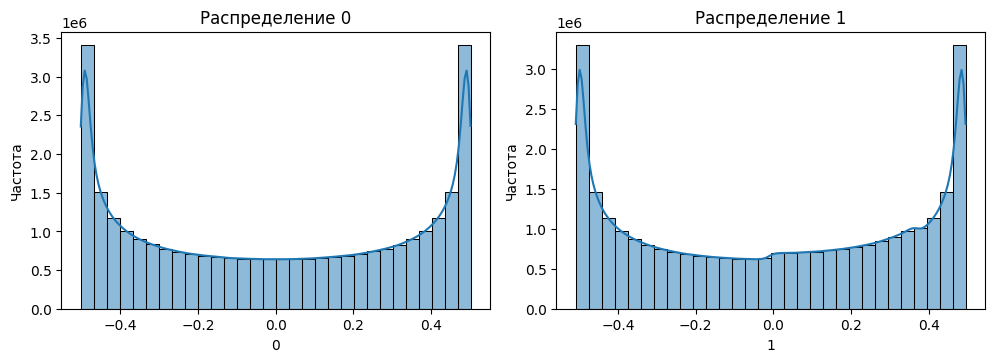

  0%|                                                                                 | 0/270 [00:00<?, ?it/s]

            0         1         2         3         4         5         6  \
0  968.494255 -0.238016  2.019547  0.491340  0.535348  4.629481 -3.483024   
1  746.666227 -0.522473  1.315388  0.551132  0.503090  3.120480  1.505452   
2  347.394721 -0.616824  1.279916  0.162176  0.015601  0.884350  8.518826   
3  516.437250 -2.676617  1.726308  0.296178  0.437327  3.401815 -1.238423   
4  866.503711 -0.446574  2.106271  0.282294  0.496367  1.630669 -3.764425   

          7         8         9  ...        20            21        22  \
0  0.250565  0.907312  0.753957  ...  1.421480  4.113250e-01 -0.201946   
1 -0.146863 -0.986628 -0.485462  ...  5.810654  6.751363e+06  0.384998   
2 -0.646460  0.069668  0.597678  ...  4.917560  3.479585e-01 -0.606219   
3 -0.376497 -0.242491  0.041539  ... -3.411043  3.717021e+06 -0.507997   
4 -0.021144  0.328130  0.950548  ...  6.503011  4.112706e+05 -0.835345   

          23        24          25         26         27        28         29  
0  -1.996009

  0%|▎                                                                        | 1/270 [00:03<14:44,  3.29s/it]

Партиция 1 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  475.356139 -0.042479  1.867236  0.288406  0.008481  3.500005 -2.761114   
1  802.826557 -0.554228  1.427897  0.447054  1.137524  2.749740  1.085066   
2  583.926502 -0.861898  1.036302  0.081099  0.558918  3.984636 -1.847700   
3  615.571893 -2.345484  1.462117  0.037751  0.890932  4.525036  4.805969   
4  853.522056 -0.017203  1.542745  0.434777  0.695726  1.486047  2.168796   

          7         8         9  ...         20            21        22  \
0 -0.270357 -0.922342 -0.144982  ...  -2.294515  1.778562e+04 -0.880576   
1  0.531801 -0.409933  0.714505  ...  12.631311  1.366570e+01 -0.741304   
2 -0.251301  0.987313  0.878116  ...  14.140459  8.147223e+05  0.455497   
3  0.121808 -0.460134 -0.562049  ...   0.045901  2.537309e+07 -0.992569   
4  0.791245  0.668847 -0.708770  ...  12.094723  2.860445e+04  0.435527   

          23        24          25     

  1%|▌                                                                        | 2/270 [00:06<13:16,  2.97s/it]

Партиция 2 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  557.055492 -0.317657  1.583182  0.791874  0.712242  2.113156  1.927140   
1  497.563493 -0.668858  1.265797  0.401395  1.187352  4.254234 -1.908525   
2  212.364653 -0.784524  1.888437  0.138611  0.319630  1.560594  2.433043   
3  155.909914 -0.914000  1.642328  0.721866  0.797330  3.951434  2.909046   
4  330.978255 -3.539118  1.759376  0.101875  0.224676  4.572257 -1.329310   

          7         8         9  ...         20            21        22  \
0  0.761116  0.170013  0.058551  ...  12.630543  6.627874e-02  0.918309   
1  0.802371 -0.298871 -0.729630  ...  21.371499  2.064913e-01  0.043782   
2 -0.758791 -0.584291  0.244964  ...  21.156731  1.978185e+08  0.038032   
3 -0.620065  0.424120 -0.470885  ...  11.093452  5.835294e-01  0.509683   
4 -0.396869  0.847895  0.413668  ...   9.799972  4.945643e+03  0.925372   

         23        24         25       

  1%|▊                                                                        | 3/270 [00:08<12:36,  2.83s/it]

Партиция 3 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  852.401058 -0.774429  1.481656  0.167351  1.062185  3.238235  1.282896   
1  821.542603 -1.086026  2.501939  0.789879  0.682186  2.604816  1.389531   
2  395.230393 -3.000486  1.667615  0.813551  0.105732  4.546046 -2.971499   
3  517.855601 -3.772966  1.651114  0.636930  0.051074  3.063391 -2.707959   
4   39.380721 -1.781123  1.726981  0.254425  1.333763  3.179719 -1.178170   

          7         8         9  ...         20            21        22  \
0  0.159027  0.365354  0.627409  ...  12.251475  2.244935e+08  0.863812   
1 -0.471905  0.586108 -0.930716  ...  -0.712021  3.869484e-02 -0.580469   
2  0.475381 -0.201330 -0.750721  ...  20.496832  2.209145e+05  0.863355   
3 -0.986444 -0.136358 -0.045084  ...  20.629587  4.812718e+06 -0.006513   
4 -0.631181 -0.090303 -0.692535  ...  -0.402769  3.848019e+08  0.929907   

          23        24          25     

  1%|█                                                                        | 4/270 [00:11<12:39,  2.86s/it]

Партиция 4 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  945.389327 -0.185149  2.001761  0.824046  0.086839  3.349342  -1.287859   
1  517.627870 -0.037277  1.415306  0.511529  0.330952  3.602687   4.070353   
2  657.263263 -0.488980  1.686406  0.622359  0.503985  0.029942 -10.628151   
3  569.615105 -2.372337  1.409994  0.787741  0.099847  0.620974   9.664721   
4   30.680556 -0.099544  1.665152  0.136412  0.725523  3.155363   1.180576   

          7         8         9  ...         20            21        22  \
0 -0.713001 -0.536481 -0.375323  ...   2.567173  1.837320e+07 -0.821282   
1  0.105453 -0.171731  0.909696  ...  19.368942  4.598578e+04 -0.994876   
2  0.797400 -0.964668 -0.771605  ...   1.347212  8.855337e+06 -0.979660   
3 -0.219167 -0.652375 -0.836687  ...  21.692625  2.066340e+06 -0.743389   
4  0.714814 -0.277890  0.103497  ...   2.886787  9.767292e+03 -0.746404   

          23        24          2

  2%|█▎                                                                       | 5/270 [00:14<11:57,  2.71s/it]

Партиция 5 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  855.853825 -0.355493  1.649558  0.207622  0.848478  2.287743  -1.350628   
1  833.219925 -1.445119  2.694575  0.470876  0.296279  3.396719  30.960380   
2  644.033285 -4.052446  1.823020  0.551662  0.048930  2.898741  -1.156241   
3   90.282222 -2.554960  2.252229  0.303709  1.477956  4.005865  -2.880591   
4  958.907427 -1.951570  1.441524  0.010269  0.402756  0.812434  -2.606523   

          7         8         9  ...         20            21        22  \
0  0.226296 -0.017815  0.318914  ...  -0.061986  1.993069e+04  0.978566   
1 -0.784220  0.893477 -0.288398  ...   5.330640  1.963670e+04  0.971655   
2 -0.199065 -0.486016 -0.162743  ...  21.706065  1.222194e+07 -0.798791   
3  0.779431 -0.136923  0.720208  ...  -1.010867  1.440957e+08  0.437236   
4 -0.600327  0.429116  0.425582  ...  17.375520  1.794302e-01 -0.665766   

          23         24         2

  2%|█▌                                                                       | 6/270 [00:16<11:06,  2.52s/it]

Партиция 6 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   17.684824 -1.432935  1.064618  0.068470  0.132263  0.092582  2.840703   
1  744.142228 -0.240146  2.064998  0.492625  0.333041  3.151005  1.291402   
2   36.173692 -0.860027  1.051337  0.058065  0.124125  3.874506 -2.899416   
3  822.550003 -6.429394  2.542076  0.302948  0.673381  3.034241  5.603107   
4  317.788151 -0.124323  1.191596  0.465202  0.006589  2.373350  2.600473   

          7         8         9  ...         20            21        22  \
0 -0.448483 -0.626885  0.545916  ...   3.768561  5.346291e+07  0.944318   
1 -0.694299  0.687556  0.278219  ...  14.309299  2.971090e+03 -0.001146   
2  0.350218  0.650246  0.531967  ...  20.920319  7.373986e+07  0.207895   
3  0.370095 -0.394913  0.472034  ...   5.566483  1.645700e+06  0.127267   
4 -0.122567 -0.224770 -0.568871  ...  20.669641  1.422885e+04  0.428438   

          23        24         25      

  3%|█▉                                                                       | 7/270 [00:18<10:01,  2.29s/it]

Партиция 7 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  149.059472 -1.088557  1.135935  0.081577  0.887787  4.982257   1.456497   
1  761.014028 -0.389906  1.507676  0.269641  0.536953  3.331925   2.366882   
2  894.964142 -0.201954  1.607236  0.338508  0.273690  4.635712  10.209542   
3  177.510190 -0.292209  1.522495  0.656357  1.199556  1.215643   1.242098   
4  224.480385 -1.036925  2.411637  0.290781  0.376802  1.221121  -3.050927   

          7         8         9  ...         20            21        22  \
0 -0.474733  0.658007 -0.073672  ...  14.479394  6.252477e+06 -0.795279   
1  0.450637  0.779328  0.590463  ...   9.788730  2.047287e+06  0.449835   
2  0.023586 -0.687909 -0.292209  ...  20.520192  6.930299e+05 -0.160715   
3 -0.677981 -0.336616 -0.232314  ...   3.228825  6.910715e+03  0.955325   
4 -0.874803  0.061507 -0.976524  ...   8.650557  2.489552e+09  0.088140   

          23        24         25

  3%|██▏                                                                      | 8/270 [00:19<09:14,  2.12s/it]

Партиция 8 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  299.200368 -0.057185  1.319904  0.528881  0.520882  3.280610  8.218748   
1  279.761797 -0.419636  1.386889  0.460546  0.947727  3.452151  1.994922   
2   93.228900 -0.770417  1.638619  0.750215  0.928033  0.068350  2.166734   
3  622.418818 -0.327293  1.572530  0.067274  0.071557  2.319345 -2.354680   
4  916.937152 -0.089151  2.492161  0.465765  0.447720  1.488811  4.253406   

          7         8         9  ...        20            21        22  \
0 -0.924160 -0.035286  0.261871  ... -2.519455  8.244617e+02  0.903948   
1 -0.595186 -0.703567  0.088453  ...  6.753086  4.034574e+05  0.668563   
2  0.290735  0.424837  0.740114  ...  6.226717  6.007852e-02 -0.283553   
3 -0.039609  0.293409  0.054280  ...  5.771606  1.081012e+00  0.837879   
4  0.567870  0.792889  0.928435  ... -3.501190  8.659225e+07 -0.982840   

          23        24         25         26 

  3%|██▍                                                                      | 9/270 [00:21<08:24,  1.93s/it]

Партиция 9 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  887.920582 -0.014164  1.793669  0.425209  0.479397  0.920713 -9.061249   
1  471.098661 -0.192770  1.287400  0.138921  0.088387  1.972499 -1.385468   
2  445.257905 -4.008786  2.302126  0.420584  0.292794  2.425875 -5.001065   
3  879.921170 -0.022676  1.192619  0.371979  0.118756  2.183930  1.049875   
4  194.990869 -1.165446  1.625085  0.400557  0.530725  0.908359  3.398170   

          7         8         9  ...         20            21        22  \
0 -0.950367 -0.361896 -0.679621  ...  17.172588  2.045589e+05  0.935008   
1  0.639875 -0.075773  0.411383  ...  21.168321  1.548433e+04 -0.109780   
2 -0.683195  0.102128  0.541927  ...  16.368769  1.494203e+02 -0.744655   
3  0.917987 -0.636985 -0.874317  ...  -1.015695  5.858857e-02 -0.637382   
4  0.342978  0.368890  0.078055  ...   5.979835  7.463694e+06 -0.709376   

          23        24         25      

  4%|██▋                                                                     | 10/270 [00:22<07:40,  1.77s/it]

Партиция 10 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0   56.111001 -0.310609  1.301144  0.833120  1.120573  3.451465  -1.522604   
1  139.251361 -2.404806  1.190223  0.547138  0.840025  2.591224  -2.390298   
2  110.028452 -0.012687  1.098291  0.216202  0.054625  2.003974  11.188766   
3  411.205838 -0.209981  2.315110  0.257797  0.490490  3.290035   1.181937   
4  197.083624 -0.318122  1.288130  0.557092  0.181634  2.474234   1.049934   

          7         8         9  ...        20            21        22  \
0 -0.288532 -0.400377 -0.835645  ...  6.208273  1.608127e+09 -0.099679   
1 -0.349626  0.663777  0.857251  ... -2.108822  1.327516e+03 -0.389583   
2 -0.267561  0.936365  0.106755  ...  7.029223  5.175249e-02  0.210093   
3  0.382572  0.436606 -0.748184  ...  5.923963  8.730635e+06  0.576790   
4  0.282189 -0.708992  0.927642  ... -2.309410  2.127967e+07  0.004301   

          23        24          25    

  4%|██▉                                                                     | 11/270 [00:24<07:35,  1.76s/it]

Партиция 11 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  621.683536 -0.597158  1.798516  0.793270  0.918598  0.177168 -2.941076   
1  589.817291 -0.473676  2.666455  0.130025  0.223941  1.022637 -1.099684   
2  340.599754 -0.831691  1.357705  0.466725  0.075352  2.527816 -4.249711   
3   15.878341 -1.018284  1.030782  0.159692  0.092915  4.462462  1.703851   
4   83.315176 -0.815309  2.157259  0.597523  0.939804  0.093662  1.594399   

          7         8         9  ...         20            21        22  \
0 -0.073905  0.458660  0.831241  ...  11.014463  1.118334e+06 -0.565798   
1  0.056895  0.208405  0.787706  ...   4.904449  3.525758e+06 -0.835335   
2  0.846317 -0.498830 -0.481875  ...  11.240592  6.513463e+00 -0.151668   
3 -0.950240  0.065728  0.431138  ...   7.957231  3.048753e+08 -0.897436   
4  0.037060  0.218170  0.451273  ...   0.163124  1.783530e+01  0.677741   

          23        24         25     

  4%|███▏                                                                    | 12/270 [00:29<11:19,  2.63s/it]

Партиция 12 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  304.392632 -0.583138  1.116284  0.432105  1.194264  0.270664  -3.099136   
1   72.888773 -0.334067  1.416175  0.111766  0.138609  0.199470  -4.238961   
2  363.033409 -0.791585  1.650245  0.536578  0.409741  1.144471  -3.405424   
3  872.154731 -0.807327  1.104058  0.233483  0.150294  4.526621 -13.699269   
4  232.103128 -1.295555  1.295202  0.170193  0.906516  1.457789   2.812789   

          7         8         9  ...         20            21        22  \
0  0.374704 -0.645780 -0.496521  ...  16.450097  8.445080e+00 -0.259591   
1  0.608117 -0.427200 -0.464441  ...   7.184365  7.277772e-02  0.994357   
2 -0.878377  0.936632  0.199403  ...   4.204570  1.001320e+07  0.810449   
3  0.491706 -0.574775 -0.659808  ...  -3.353342  2.964766e-02 -0.435488   
4 -0.228678  0.061516 -0.369639  ...   6.537591  3.887089e+08  0.570080   

          23        24          

  5%|███▍                                                                    | 13/270 [00:30<09:48,  2.29s/it]

Партиция 13 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  779.095626 -0.962766  1.630071  0.826160  1.359411  3.503934   1.761158   
1  963.314105 -0.421453  1.686646  0.548461  0.036098  4.886022  -7.684655   
2  913.253731 -1.511483  1.478654  0.437955  0.172973  4.573333   6.191029   
3  610.402969 -0.994200  2.186511  0.271240  0.414656  0.454305   1.248964   
4  875.944617 -0.350251  2.378136  0.288756  0.072398  0.104839  18.793591   

          7         8         9  ...         20            21        22  \
0  0.105531  0.799526  0.340508  ...  16.298813  2.075544e+08  0.854755   
1 -0.759089 -0.657611  0.493806  ...  11.580474  8.732978e+02  0.411823   
2  0.298782 -0.082063  0.806273  ...  -0.668120  9.505047e-01  0.878837   
3 -0.564817  0.532614  0.126798  ...   4.404907  1.300934e+07  0.913175   
4  0.617440 -0.081069  0.263310  ...  -3.381538  9.630640e+08 -0.901847   

          23        24         2

  5%|███▋                                                                    | 14/270 [00:31<08:20,  1.95s/it]

Партиция 14 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  222.079767 -0.101797  1.733314  0.381254  0.499124  3.008465 -1.343208   
1  724.516861 -1.163836  2.480511  0.670530  0.458707  2.425789 -1.493444   
2   59.493571 -1.867130  2.446261  0.729611  0.368825  3.412277 -1.798904   
3  588.290244 -0.701176  2.523287  0.318141  1.345671  4.142261  1.252663   
4  439.774139 -0.967313  1.530965  0.802865  0.593120  0.763727 -5.529027   

          7         8         9  ...         20            21        22  \
0  0.061550  0.061695 -0.427286  ...   8.147026  2.425840e+02 -0.878146   
1 -0.874151  0.771423 -0.223306  ...   6.117634  9.474596e+03 -0.954858   
2 -0.725015 -0.166682  0.267847  ...   2.697011  2.799349e+09  0.780811   
3 -0.824266  0.532147 -0.891841  ...  -3.045420  1.977981e+09 -0.883638   
4 -0.332721  0.137095  0.134142  ...  21.323811  2.047979e+04  0.573122   

          23        24         25     

  6%|████                                                                    | 15/270 [00:32<07:22,  1.74s/it]

Партиция 15 загружена, количество строк: 111108
            0         1         2         3         4         5           6  \
0  448.431762 -0.391574  1.972958  0.811377  0.207234  4.294175   -1.121237   
1  134.634025 -0.571696  1.427729  0.698488  1.251665  1.991528  123.528193   
2  102.967242 -1.088130  1.792588  0.372275  0.899085  0.262194    1.765872   
3   37.337554 -0.536956  1.203543  0.745694  0.452930  3.629906   -1.313678   
4  184.676236 -0.149391  1.900084  0.665134  0.292974  3.918056   -1.981777   

          7         8         9  ...         20            21        22  \
0  0.690896 -0.764158  0.246955  ...   4.388697  4.898761e+08  0.441861   
1 -0.365002 -0.314570  0.213261  ...  19.240360  3.602251e+01 -0.277949   
2  0.134005  0.234530  0.230805  ...  -0.559987  1.244356e+07 -0.210036   
3  0.420378  0.689801  0.797247  ...  16.912153  3.320289e+06  0.692059   
4  0.899945 -0.014474 -0.779527  ...  20.350148  2.850469e+07 -0.968306   

          23        24    

  6%|████▎                                                                   | 16/270 [00:34<07:06,  1.68s/it]

Партиция 16 загружена, количество строк: 111117
            0         1         2         3         4         5         6  \
0  336.910189 -0.154066  2.089672  0.809002  0.153903  1.479320 -2.858609   
1  228.590803 -3.542860  1.202986  0.023467  0.278718  3.338515  2.098210   
2  451.524606 -0.401773  1.913920  0.535264  0.037217  4.988803 -2.604018   
3  708.847987 -0.332953  2.019600  0.575883  0.082815  4.554738  3.737438   
4  754.797376 -0.205658  1.067543  0.245658  0.128571  0.016925  6.160098   

          7         8         9  ...         20          21        22  \
0 -0.718098  0.680187  0.412196  ...  18.645818    0.103256  0.046997   
1 -0.654972  0.143639 -0.273079  ...  14.917001  681.675446  0.880714   
2  0.561159  0.554199 -0.485170  ...   0.981401    1.065145  0.999583   
3  0.572696 -0.560911 -0.805667  ...   2.782307    0.204512  0.684326   
4 -0.061722  0.793384 -0.831216  ...   4.293139    0.103695 -0.933146   

          23        24          25         26     

  6%|████▌                                                                   | 17/270 [00:36<07:04,  1.68s/it]

Партиция 17 загружена, количество строк: 111117
            0         1         2         3         4         5         6  \
0  467.183891 -0.074786  2.374146  0.658734  0.189358  2.073643 -1.744449   
1  170.784361 -0.790414  1.071087  0.404598  1.266224  1.510421  1.284935   
2  472.487184 -1.905757  2.227629  0.817816  1.022743  0.701225 -2.063042   
3  563.656531 -1.600119  1.390571  0.762424  1.014986  4.726323 -1.231213   
4  977.695579 -1.965981  2.369056  0.292577  0.760808  3.776397 -1.030903   

          7         8         9  ...         20            21        22  \
0 -0.330712  0.525321  0.984575  ...   2.499356  8.437999e+03  0.513676   
1 -0.268019  0.251264 -0.473924  ...  17.613284  2.362068e+00  0.542984   
2 -0.257874  0.420457 -0.115407  ...  -1.068598  2.316716e+04  0.655277   
3  0.135977  0.218498 -0.697918  ...   0.216306  7.350167e+00  0.669042   
4  0.261541  0.576589  0.829642  ...  11.344209  2.193225e+06  0.745803   

          23         24         25    

  7%|████▊                                                                   | 18/270 [00:37<06:34,  1.57s/it]

Партиция 18 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  344.700280 -0.482374  2.662238  0.426919  0.150916  2.150726  3.656034   
1  491.217976 -0.597279  2.644512  0.723571  0.358685  1.986664  1.589290   
2  197.166398 -0.987201  1.446297  0.724178  0.106755  0.730260  2.832036   
3  230.151673 -0.294353  1.858035  0.767677  0.414785  3.802305 -4.715179   
4  588.889525 -0.039153  1.583477  0.693362  0.459449  4.889917  1.735504   

          7         8         9  ...         20            21        22  \
0  0.110721  0.583790  0.534282  ...   0.052608  1.557900e+01  0.968747   
1  0.005771  0.440915 -0.243308  ...  -2.437081  6.909659e+00  0.758612   
2 -0.012278 -0.978050 -0.955616  ...   3.632810  5.032286e+00  0.799373   
3 -0.696498 -0.219506  0.116844  ...   0.716997  2.966916e+09  0.439960   
4  0.743879  0.316482 -0.950680  ...  15.404053  2.260661e+09 -0.870148   

          23         24         25    

  7%|█████                                                                   | 19/270 [00:38<06:11,  1.48s/it]

Партиция 19 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  786.952433 -0.924566  1.481202  0.697082  0.518333  2.182571  1.441948   
1  850.639461 -1.904785  2.539330  0.714710  1.367870  1.173953  1.181994   
2   46.117312 -0.038518  1.215968  0.802959  1.158145  4.268043  2.221160   
3  147.059365 -1.230967  1.843118  0.824730  1.375911  1.299084 -2.104050   
4  245.593989 -0.688511  1.946786  0.760289  0.839301  0.432850  2.243278   

          7         8         9  ...         20            21        22  \
0  0.232942  0.032490 -0.392140  ...  19.572992  5.896784e-02 -0.163654   
1 -0.703971 -0.578144  0.776084  ...   7.948303  8.353735e+07  0.801511   
2 -0.481033 -0.160549  0.241286  ...  -1.593568  5.331218e+03  0.315283   
3 -0.117441  0.822353  0.479088  ...   1.009121  3.929615e+07  0.361332   
4 -0.673742  0.220804 -0.457645  ...  13.818548  3.962083e+00  0.966261   

          23         24         25    

  7%|█████▎                                                                  | 20/270 [00:39<05:39,  1.36s/it]

Партиция 20 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  526.001676 -1.084470  1.867808  0.693750  0.635425  3.266462   1.492579   
1  395.398730 -2.685917  1.387798  0.604908  1.167844  1.169387 -40.287215   
2  947.068104 -0.417285  1.039917  0.646427  0.067494  3.293811  -3.198168   
3   77.450622 -0.412969  1.122581  0.385011  0.867926  4.907912  -7.080415   
4  633.275687 -0.248739  1.437969  0.821644  0.156939  4.169288  -1.103523   

          7         8         9  ...         20             21        22  \
0  0.343607  0.441809 -0.088780  ...  13.874418  640690.180019  0.630956   
1 -0.004877  0.074279 -0.422961  ...  20.097637   27779.467923  0.512201   
2  0.492765  0.296379  0.562388  ...   3.745803       0.149460 -0.197244   
3  0.777928 -0.015983  0.901151  ...  16.781895      87.010430 -0.174017   
4 -0.772042  0.436005 -0.352079  ...  14.845427   64743.619291 -0.999706   

          23        24    

  8%|█████▌                                                                  | 21/270 [00:41<05:48,  1.40s/it]

Партиция 21 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  798.262438 -2.534003  1.570184  0.108147  1.090132  4.340953  13.154831   
1  929.337066 -0.047422  1.320075  0.780723  0.590430  0.210250   2.747702   
2  466.557362 -1.743203  2.129794  0.768669  0.651086  3.775140  -2.550623   
3  283.950236 -0.078527  2.308003  0.839320  0.045558  4.190560 -50.109102   
4  923.394616 -0.946485  1.907016  0.287816  0.903715  3.091481  -5.618353   

          7         8         9  ...         20            21        22  \
0 -0.383832  0.603093  0.453561  ...  16.217142  1.617486e+09 -0.511757   
1  0.249302 -0.716301 -0.686792  ...   2.481637  7.104589e+05 -0.679518   
2 -0.259750  0.463585  0.871729  ...  -3.410071  1.092079e+02  0.964001   
3  0.287629 -0.465225 -0.839342  ...   7.180856  1.017504e+06 -0.274061   
4  0.631070 -0.513343 -0.346568  ...  -3.689869  3.478769e+04 -0.103871   

          23        24         2

  8%|█████▊                                                                  | 22/270 [00:43<06:14,  1.51s/it]

Партиция 22 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0   39.180290 -0.913960  1.685999  0.656132  0.979923  2.556752  14.701538   
1  621.248738 -0.302866  1.734241  0.159659  0.056208  2.537079  -3.006938   
2   86.162317 -0.693967  2.252822  0.725895  1.510101  2.113044 -12.739363   
3  697.011197 -0.329972  1.616534  0.031811  0.260146  2.488976  -2.359962   
4  471.009364 -0.895855  1.872905  0.385917  1.472824  3.041728   4.884417   

          7         8         9  ...         20             21        22  \
0  0.614723  0.848333  0.099512  ...   3.562710  173954.309477  0.771384   
1 -0.986439  0.730733 -0.793261  ...  15.104521       1.141996  0.179942   
2  0.063454 -0.067946  0.804964  ...  14.362867       0.269300  0.417710   
3  0.741006  0.123775 -0.210843  ...  18.340935       0.428313  0.345126   
4  0.784411  0.259914  0.494434  ...  14.987945       0.231015  0.129957   

          23        24    

  9%|██████▏                                                                 | 23/270 [00:44<05:48,  1.41s/it]

Партиция 23 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  521.330022 -0.595180  2.113603  0.626710  0.625475  2.580612 -1.462973   
1  319.691515 -1.202207  2.309358  0.155953  1.197026  4.842559  1.599993   
2  418.838326 -0.972602  1.625001  0.769293  1.361147  3.869103 -1.081765   
3   10.119531 -0.285058  2.234774  0.048014  0.543747  2.731364 -2.051554   
4  480.338782 -3.576756  1.787481  0.565277  0.851093  4.606847  1.164543   

          7         8         9  ...         20            21        22  \
0  0.560013 -0.608120  0.233531  ...  21.164074  8.447328e-02  0.918780   
1 -0.089349  0.400822 -0.851087  ...   8.954237  1.361462e+07 -0.964056   
2 -0.197890 -0.209892  0.330003  ...  13.226249  6.352451e+08 -0.485754   
3 -0.698439  0.976939  0.881267  ...  17.752538  4.237932e+03 -0.135431   
4 -0.360044  0.458555 -0.400964  ...   0.812241  1.563821e+05  0.184920   

          23        24         25     

  9%|██████▍                                                                 | 24/270 [00:45<05:11,  1.27s/it]

Партиция 24 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  161.946103 -0.880352  1.877527  0.423694  0.125383  4.788669 -1.374404   
1  901.260635 -0.970954  2.128689  0.249017  0.052246  4.948562  2.844735   
2  781.720407 -0.087364  2.703308  0.453751  0.933743  4.038676 -2.274297   
3  803.364540 -2.977861  1.535761  0.157411  1.351746  0.843588  1.338299   
4  208.527413 -0.906102  2.135247  0.696151  0.758893  1.148268 -3.182793   

          7         8         9  ...         20            21        22  \
0 -0.503186 -0.374749 -0.324864  ...  16.622102  3.398792e+09  0.285062   
1  0.188016  0.843591 -0.640646  ...   9.469159  3.748532e+02 -0.629707   
2  0.260175 -0.027168 -0.811750  ...  20.342001  7.754704e-01  0.732963   
3 -0.350486 -0.583631  0.146477  ...   6.196346  2.072309e+03  0.985081   
4 -0.987491  0.222620  0.858444  ...  17.836174  2.450903e+09  0.800034   

          23        24         25     

  9%|██████▋                                                                 | 25/270 [00:46<04:56,  1.21s/it]

Партиция 25 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0   33.990945 -1.348730  1.324994  0.609512  0.021338  2.673756  46.029480   
1  403.511228 -1.646852  1.737100  0.067115  1.145177  3.002230  -1.425200   
2  765.826522 -0.334372  1.734421  0.349923  0.344022  2.880677   1.020635   
3  417.581424 -0.677454  1.096509  0.401606  1.092231  3.931195   1.605810   
4  568.657815 -0.166691  1.115338  0.550015  0.193308  3.787332   2.006836   

          7         8         9  ...         20            21        22  \
0  0.283941 -0.602547  0.484813  ...   4.570833  8.842956e-01  0.941114   
1 -0.290717 -0.776851 -0.476439  ...  -3.314544  4.940569e+04  0.955509   
2  0.727058 -0.949456  0.428224  ...  19.082268  2.168916e+01  0.906008   
3 -0.700858 -0.967765  0.160237  ...   6.331028  6.448534e+07  0.948062   
4  0.343116  0.854217  0.153822  ...   9.517880  1.577885e+03  0.538605   

          23        24         2

 10%|██████▉                                                                 | 26/270 [00:47<04:52,  1.20s/it]

Партиция 26 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  737.323765 -1.768310  1.235238  0.715630  0.960408  1.465685  -1.704781   
1  614.299426 -1.222963  1.036073  0.373015  0.429203  4.132155  -1.024456   
2  445.234587 -2.746964  1.271129  0.777002  0.615973  3.936643  -2.134680   
3  117.938634 -3.634421  1.656700  0.412895  0.301898  1.391084   9.309014   
4   55.446796 -1.162856  1.167456  0.531022  0.023990  0.179807 -23.770676   

          7         8         9  ...         20            21        22  \
0 -0.457602 -0.692625 -0.160642  ...   6.648736  2.014543e+05 -0.814262   
1  0.069293 -0.734076 -0.015271  ...  -0.019310  5.564698e+06  0.996301   
2  0.718643  0.590452 -0.981575  ...  11.838774  1.024254e+07  0.493709   
3  0.757787  0.989908 -0.993976  ...   1.125991  2.694862e+05 -0.178323   
4 -0.336298  0.702593 -0.252094  ...   5.109643  8.289859e+04 -0.142766   

          23        24         2

 10%|███████▏                                                                | 27/270 [00:48<04:41,  1.16s/it]

Партиция 27 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  842.171615 -0.105605  1.194257  0.292271  0.182370  2.835804 -13.451813   
1  220.274071 -1.257536  2.529418  0.292824  0.034524  3.740647  -3.449986   
2  130.528245 -0.460741  1.794236  0.446249  0.298321  2.622336  -2.185650   
3  745.358690 -3.573180  1.098508  0.376963  0.509139  3.785955  -4.208394   
4  919.018899 -1.589501  1.947256  0.449478  0.673771  2.310249  -1.899154   

          7         8         9  ...         20            21        22  \
0 -0.203249  0.568269 -0.040233  ...   8.419058  5.266968e+02 -0.916012   
1 -0.917470 -0.180714  0.984961  ...  12.906562  3.270320e+04  0.047688   
2 -0.861194 -0.773560  0.935481  ...  20.719041  3.616906e+06  0.852893   
3  0.647049 -0.270605 -0.095622  ...  13.325898  3.046608e+02  0.155161   
4 -0.472680  0.950924 -0.983747  ...  16.772635  7.653992e+04 -0.113983   

          23        24         2

 10%|███████▍                                                                | 28/270 [00:49<04:40,  1.16s/it]

Партиция 28 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  546.949029 -2.047441  2.203784  0.323607  0.004512  0.921662 -81.484305   
1   39.281998 -0.722251  1.811545  0.320917  0.554206  0.062719   1.061143   
2   18.860242 -0.368594  1.254056  0.800629  0.332944  2.640883  -2.377521   
3  163.558094 -0.223963  2.313372  0.366915  0.346101  0.671989   7.008007   
4  486.065882 -0.121229  2.053146  0.589010  0.566414  1.788755  -1.738010   

          7         8         9  ...         20            21        22  \
0 -0.018876  0.302874  0.408404  ...   7.132749  5.728907e+00  0.333680   
1 -0.223139 -0.736729  0.544720  ...   6.745926  7.451702e+06 -0.830712   
2  0.509422 -0.137156  0.714772  ...  11.124836  5.163762e+04  0.885127   
3  0.474685 -0.767234  0.936391  ...  15.840555  4.307203e+00  0.780687   
4  0.503941  0.168937  0.958435  ...  -3.854801  1.536183e+08 -0.992995   

          23        24          

 11%|███████▋                                                                | 29/270 [00:50<04:43,  1.17s/it]

Партиция 29 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  954.984167 -0.483452  1.326217  0.625536  0.726769  3.663672 -2.404921   
1  552.596345 -0.518191  2.094531  0.544254  1.165329  2.053456 -1.232264   
2  741.179803 -0.443969  1.344044  0.675279  1.425419  4.494853 -5.571380   
3  156.661618 -0.888796  1.430589  0.551964  0.016853  3.454479  1.182571   
4  817.013881 -1.201424  1.802739  0.597777  0.293956  4.377098  1.586697   

          7         8         9  ...         20            21        22  \
0  0.847373  0.869600 -0.261897  ...  12.175082  2.380323e+00  0.999259   
1  0.591010 -0.113728  0.172611  ...   7.821808  3.324855e+07 -0.928624   
2 -0.598752  0.239599  0.276051  ...   2.109919  5.915746e+06 -0.849740   
3 -0.645107  0.366144  0.756825  ...   2.478441  1.139510e+02  0.954295   
4  0.371629 -0.789039  0.989085  ...   9.153968  6.697619e+04 -0.639374   

          23         24         25    

 11%|████████                                                                | 30/270 [00:51<04:27,  1.12s/it]

Партиция 30 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  679.036307 -1.179292  2.381622  0.503516  0.818958  1.589360  1.207273   
1  184.309895 -0.066243  1.059199  0.474816  0.895165  2.298037 -1.148437   
2  980.180701 -0.488852  1.984811  0.418771  0.676097  0.243602  1.683265   
3   13.500661 -3.009667  1.168218  0.044794  0.606994  1.330588 -2.764982   
4  693.078079 -1.408719  1.791540  0.757004  1.175516  4.259993 -1.726756   

          7         8         9  ...         20             21        22  \
0  0.936539 -0.500258  0.187353  ...  16.970439       0.083721 -0.896886   
1  0.002771  0.995953  0.999808  ...   0.639702  914045.006411 -0.205558   
2 -0.598278 -0.679706 -0.431842  ...  21.714792    1266.728942 -0.505226   
3  0.611251 -0.729821 -0.734166  ...  -1.859162      12.262011 -0.776710   
4 -0.748008 -0.715993 -0.576436  ...   4.377735     188.499924  0.195234   

          23        24         2

 11%|████████▎                                                               | 31/270 [00:52<04:13,  1.06s/it]

Партиция 31 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   11.341181 -0.056030  2.593047  0.306993  0.576599  0.307656 -1.768165   
1  449.866317 -0.692158  2.273361  0.705132  0.766672  3.454271 -3.367914   
2  521.869197 -0.410799  2.006240  0.385387  0.808554  0.380923  1.074910   
3  331.899813 -3.000116  1.422216  0.024191  0.016467  0.046065  1.262501   
4  505.464587 -0.213551  1.841396  0.826651  0.408048  0.198160 -2.065550   

          7         8         9  ...         20            21        22  \
0  0.229712  0.627892 -0.571376  ...  20.363629  4.119121e+03  0.901824   
1  0.479883 -0.197319  0.858219  ...  14.347939  1.662604e+02  0.914481   
2  0.571715 -0.110275  0.872473  ...   7.430830  2.528669e+06 -0.452745   
3 -0.916214  0.789170 -0.771306  ...  -2.484589  3.312619e+05 -0.879035   
4  0.571932 -0.685430 -0.944576  ...  -1.077807  7.510086e-02 -0.530968   

          23        24         25     

 12%|████████▌                                                               | 32/270 [00:53<04:01,  1.02s/it]

Партиция 32 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  918.176334 -0.394334  2.370850  0.298755  0.448070  2.522411  -1.005990   
1   79.216600 -0.487151  1.342386  0.340604  0.995532  0.210404  66.777611   
2  234.306631 -2.578440  1.213319  0.280930  0.048371  3.545182   3.725192   
3  389.965918 -0.237888  1.240308  0.805274  0.583917  3.198514  -2.998246   
4   92.505072 -0.613568  1.115125  0.783660  0.176730  0.946932   2.336875   

          7         8         9  ...         20         21        22  \
0  0.804526  0.575968 -0.318127  ...  17.913172  10.790162 -0.917903   
1  0.643852 -0.962600  0.788878  ...  14.732633  60.715903 -0.664390   
2 -0.123200 -0.047312  0.790914  ...  -0.871225   0.521065  0.454361   
3 -0.745782  0.119915  0.989136  ...  20.411964   0.887770  0.990784   
4 -0.744530  0.311263  0.578703  ...   6.279919   2.407835 -0.563138   

          23        24          25         26     

 12%|████████▊                                                               | 33/270 [00:54<04:13,  1.07s/it]

Партиция 33 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  574.847008 -0.067693  2.710570  0.568461  0.948416  3.981017 -1.273515   
1  451.995853 -0.743193  1.670670  0.811667  0.540633  3.017360  1.507438   
2  572.452803 -0.909241  2.033278  0.827727  0.431536  2.733128 -1.068381   
3  314.526163 -1.183790  2.007048  0.095324  1.360239  1.363908 -1.270722   
4  256.322155 -1.348658  2.163436  0.341756  0.271836  1.873020 -1.320798   

          7         8         9  ...         20            21        22  \
0  0.691173 -0.552610  0.821264  ...   4.272007  2.057945e+02  0.691831   
1  0.196833 -0.369973  0.129763  ...  16.723730  1.075959e+02 -0.901954   
2  0.072548  0.601495  0.611644  ...  14.704463  3.140309e+07 -0.368864   
3 -0.966231 -0.598436 -0.805045  ...  -1.579823  6.249469e+03  0.893085   
4 -0.420581 -0.472327 -0.262749  ...  14.589647  6.661981e+01  0.325221   

          23         24         25    

 13%|█████████                                                               | 34/270 [00:56<04:36,  1.17s/it]

Партиция 34 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  141.533024 -0.070986  2.003554  0.141569  0.581497  3.367377  1.260810   
1  394.511582 -0.432396  2.605839  0.396693  0.203582  0.137270 -1.220844   
2  259.645329 -0.807187  1.582392  0.661228  0.350829  3.986766 -1.358396   
3  687.915248 -0.403081  2.658648  0.524164  0.176282  2.516908 -1.066518   
4  463.146878 -0.594618  1.717092  0.751806  0.831732  0.603773  8.265111   

          7         8         9  ...         20            21        22  \
0  0.325482 -0.231967  0.498994  ...  13.398711  6.770025e+04 -0.104463   
1  0.504842 -0.271054  0.215647  ...  19.384522  5.306892e+02 -0.757000   
2  0.578356  0.774232 -0.751472  ...   1.949886  1.124580e+04  0.468979   
3  0.685540  0.191411 -0.796973  ...   7.774124  9.410112e+08 -0.637428   
4  0.545386  0.073173 -0.716188  ...   9.496516  5.940187e-01  0.156211   

          23        24         25     

 13%|█████████▎                                                              | 35/270 [00:57<04:20,  1.11s/it]

Партиция 35 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0   72.441417 -4.665114  1.707815  0.793602  1.289430  1.207256  -3.725221   
1  237.294023 -0.528732  1.755951  0.779406  0.159949  1.372694  -2.148856   
2  109.495715 -0.234818  1.075953  0.351293  0.877977  1.143209   1.474948   
3  287.818788 -1.209982  2.278371  0.341587  0.205249  4.796163 -12.981734   
4  325.637787 -1.523008  2.041651  0.800353  0.782765  0.526911   1.904201   

          7         8         9  ...         20            21        22  \
0 -0.548791 -0.344911 -0.641755  ...  21.089858  7.995176e+08 -0.480292   
1  0.992613 -0.596190  0.009732  ...   6.873891  2.889644e+01 -0.464617   
2 -0.967446  0.361558 -0.339029  ...  11.188843  1.770111e+09 -0.528836   
3 -0.637467  0.596035  0.380775  ...   1.193093  1.930847e+01  0.961127   
4  0.238616 -0.611519 -0.465005  ...  16.099818  1.193361e+03 -0.671282   

          23        24         2

 13%|█████████▌                                                              | 36/270 [00:58<04:05,  1.05s/it]

Партиция 36 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  335.584607 -2.158160  1.538848  0.055104  0.542170  1.219592 -2.515877   
1  954.047111 -1.245396  1.555518  0.188146  0.708408  4.722927  1.328834   
2  791.542273 -1.445926  2.300094  0.383190  0.414531  0.698975  1.137096   
3  112.643504 -0.921612  1.133572  0.367603  0.218143  3.917172  1.781696   
4  213.697455 -0.756794  1.199074  0.815375  0.322788  3.225743  3.465104   

          7         8         9  ...        20            21        22  \
0 -0.001789  0.449957  0.398703  ...  6.285714  2.545368e+04 -0.412016   
1  0.641446  0.509937 -0.436390  ...  6.090669  1.747273e+00 -0.011717   
2 -0.840464  0.284907  0.911469  ...  1.316940  5.481619e-01  0.706176   
3  0.307843  0.646336 -0.882360  ...  3.046259  3.378564e+09 -0.760891   
4  0.837768 -0.538007 -0.683576  ... -1.084397  3.659775e+04  0.288009   

          23         24         25         2

 14%|█████████▊                                                              | 37/270 [00:59<04:01,  1.04s/it]

Партиция 37 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  581.098893 -6.531737  2.318741  0.806346  1.394316  1.992390  15.771134   
1   15.462103 -0.041402  1.337352  0.574555  1.144715  4.044910   1.388207   
2  976.618995 -2.201534  1.484789  0.799773  0.351406  1.493587   2.432057   
3  442.588945 -0.072762  2.331002  0.463166  0.211547  4.017123   2.767593   
4  241.742699 -0.655620  2.127248  0.253856  0.658571  1.001982   2.922642   

          7         8         9  ...         20             21        22  \
0  0.809120 -0.946917 -0.431416  ...   3.245802       1.833360  0.684745   
1  0.120255 -0.876653 -0.191627  ...  15.825485  100893.666561  0.940575   
2 -0.491695 -0.705349  0.097632  ...   0.676741   97844.849104 -0.716770   
3 -0.478407 -0.508811  0.553552  ...  -0.404541   27910.953617 -0.426740   
4  0.883989 -0.812165 -0.512556  ...  18.367861       0.808461  0.935316   

          23        24    

 14%|██████████▏                                                             | 38/270 [01:00<04:27,  1.15s/it]

Партиция 38 загружена, количество строк: 111113
            0         1         2         3         4         5           6  \
0  852.530305 -2.564570  2.003545  0.025101  0.113072  2.989635   -1.801750   
1  457.140412 -0.073959  1.135999  0.841233  1.092203  4.135868   -2.870352   
2  126.921147 -0.503079  1.484381  0.339125  0.299281  1.667770   -1.953142   
3  677.554803 -1.547192  1.328374  0.696508  1.050612  3.922616   -1.442704   
4  309.835082 -0.175396  1.259542  0.295514  1.285835  2.510524 -743.406272   

          7         8         9  ...         20            21        22  \
0 -0.805173  0.960564 -0.900463  ...   4.565064  2.305615e+08  0.130230   
1  0.127532 -0.485409 -0.790261  ...   1.679152  6.085160e+08 -0.396729   
2  0.925558  0.650591 -0.391458  ...   9.095679  1.938239e+03  0.949261   
3 -0.918446 -0.849130  0.276708  ...   8.005309  1.279923e+08 -0.596550   
4  0.788971  0.345884  0.888981  ...  18.856327  2.307727e+01  0.968220   

          23         24   

 14%|██████████▍                                                             | 39/270 [01:02<04:46,  1.24s/it]

Партиция 39 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  911.503485 -0.003114  2.577567  0.533720  0.147758  4.260124 -1.168632   
1  827.978361 -2.691599  1.591916  0.827027  0.161187  2.242545 -1.259306   
2  922.987048 -0.009653  2.405787  0.469826  0.018173  4.840237  1.240943   
3  196.284669 -0.470424  1.937174  0.472826  0.387586  4.296025  1.162301   
4  993.195545 -3.882936  2.574409  0.367702  0.668659  4.534833  5.306203   

          7         8         9  ...         20            21        22  \
0  0.032720 -0.499586  0.078617  ...  10.351780  1.679501e+00  0.558834   
1  0.941331  0.588485 -0.703724  ...  16.500285  2.578805e+01  0.581640   
2 -0.913428  0.035967  0.117142  ...  18.110886  2.370075e-02  0.973885   
3 -0.593129 -0.931343 -0.543532  ...  10.182388  7.968110e-01  0.461991   
4 -0.207043 -0.347516  0.773687  ...  13.326732  9.001348e+08 -0.024560   

          23        24         25     

 15%|██████████▋                                                             | 40/270 [01:03<04:40,  1.22s/it]

Партиция 40 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  473.594805 -0.488652  1.104845  0.602784  0.731846  3.215003  -1.227529   
1  891.203348 -0.670596  1.623124  0.349020  1.011843  1.306926  -2.234046   
2  705.734524 -1.372776  2.009510  0.382697  0.180066  4.381210 -26.472124   
3  989.666067 -0.459269  1.347559  0.825546  1.385266  1.607291  -1.339394   
4  567.376978 -0.458548  1.214180  0.646576  0.369190  4.936833   3.731507   

          7         8         9  ...         20            21        22  \
0  0.021385 -0.865472 -0.805565  ...   4.945735  3.530887e+08  0.205272   
1 -0.744207 -0.716233  0.995179  ...   9.280820  1.594553e+02 -0.907412   
2 -0.872548 -0.389512 -0.156267  ...  13.221370  5.884092e-01 -0.221505   
3 -0.571823  0.380849 -0.661226  ...   3.643904  8.815377e-02  0.569505   
4  0.598498  0.220476  0.500123  ...  -1.276115  2.259170e-01  0.166478   

          23        24         2

 15%|██████████▉                                                             | 41/270 [01:04<04:22,  1.15s/it]

Партиция 41 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  130.787037 -0.889986  1.296928  0.790057  0.649253  2.052444   3.381897   
1  149.923206 -0.853075  1.597408  0.553483  0.648805  1.617850  -1.111256   
2  789.355273 -0.680706  2.106161  0.676378  0.217904  3.353499  -1.862165   
3  239.808673 -1.872559  1.472979  0.688263  1.363337  0.243699 -30.100957   
4  842.982041 -0.401772  1.877203  0.068845  0.243032  1.728875 -28.607058   

          7         8         9  ...         20           21        22  \
0 -0.390147  0.934147  0.308546  ...  -2.141754    35.485715 -0.564303   
1  0.361811 -0.702102  0.639391  ...   5.271402     0.442159  0.676871   
2  0.127774 -0.519255 -0.914648  ...  12.629976    58.605811  0.846116   
3  0.401130 -0.298055  0.079516  ...  19.057139     0.274051  0.042194   
4 -0.760535 -0.688978 -0.910509  ...   5.504183  9372.160265 -0.031446   

          23        24          25    

 16%|███████████▏                                                            | 42/270 [01:05<04:07,  1.09s/it]

Партиция 42 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  759.952451 -1.602451  1.012847  0.223467  0.785030  4.675601   1.648155   
1  492.780268 -0.965769  2.623637  0.820616  0.527016  0.229334   1.271009   
2   49.035723 -2.175344  1.542324  0.466873  0.262801  1.244614  -1.091686   
3  909.386319 -0.389576  1.017815  0.553183  0.329573  4.642443  66.666475   
4  183.033319 -0.030983  1.285143  0.243750  0.706525  3.800442   2.818940   

          7         8         9  ...        20          21        22  \
0  0.285280  0.654060 -0.969237  ...  5.109730    0.103865  0.514170   
1 -0.295243  0.672919 -0.391895  ...  8.406249    1.264761  0.416477   
2 -0.292963 -0.666208 -0.940650  ...  2.645528    2.278163 -0.932634   
3  0.531933  0.417596  0.819050  ...  6.727378    0.020958  0.999865   
4 -0.314332  0.298339 -0.186373  ...  4.149062  253.063298 -0.375997   

          23        24         25         26      

 16%|███████████▍                                                            | 43/270 [01:06<03:59,  1.05s/it]

Партиция 43 загружена, количество строк: 111117
            0         1         2         3         4         5          6  \
0  521.914863 -1.551401  1.809431  0.728026  0.070898  4.673134  -2.774007   
1  584.894686 -2.448123  1.461708  0.600885  1.071102  4.153168   2.003469   
2  723.222277 -0.478944  2.568292  0.693476  0.868717  4.559901  33.494203   
3  647.382099 -0.288654  1.618997  0.715046  0.612970  1.507055   2.401145   
4  240.856453 -1.103345  1.815127  0.311207  0.761124  1.578110  -3.221287   

          7         8         9  ...         20           21        22  \
0  0.028598  0.602374 -0.131158  ...  -3.757954     0.138285 -0.409354   
1 -0.825874  0.669836  0.281359  ...  -2.099254    12.490651  0.616894   
2  0.736965 -0.730662  0.515147  ...   4.355789  5457.706311  0.515506   
3 -0.150625 -0.329780 -0.268786  ...   3.437718   631.787474 -0.881895   
4 -0.920252 -0.953625 -0.240349  ...  17.929203     0.585915  0.833739   

          23        24          25    

 16%|███████████▋                                                            | 44/270 [01:07<04:06,  1.09s/it]

Партиция 44 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  393.792978 -0.011818  1.535139  0.510210  0.096580  0.848679   4.304406   
1   64.012194 -1.172729  1.795188  0.016080  0.258028  3.511242  -2.867833   
2  393.994211 -0.519255  2.142116  0.321304  0.672849  2.583074  -7.890699   
3  432.330017 -1.633714  1.074158  0.807946  1.142892  2.346854 -10.007841   
4  131.306815 -5.527248  1.046203  0.788876  0.235541  0.390268   1.190308   

          7         8         9  ...         20            21        22  \
0  0.143586  0.440114 -0.924383  ...  -3.619599  1.402411e+09 -0.133266   
1  0.539725  0.914595  0.223606  ...  -2.955556  2.992388e-01  0.941910   
2 -0.868473  0.399695  0.005384  ...  12.876299  1.117592e+04 -0.919643   
3 -0.486982 -0.472355 -0.867952  ...  17.416216  4.129137e+01  0.343708   
4 -0.819584 -0.371458  0.015079  ...  14.805771  1.223330e+00 -0.859330   

          23        24          

 17%|████████████                                                            | 45/270 [01:08<04:00,  1.07s/it]

Партиция 45 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  559.300285 -0.162842  1.094831  0.334289  0.766596  2.403419 -1.043178   
1  567.807692 -0.204659  1.337668  0.385807  0.619396  1.818510 -2.142707   
2  658.750571 -1.475031  1.089658  0.814482  0.229559  0.765099  2.760270   
3  905.638707 -0.533430  1.872705  0.522032  0.601061  2.314245  2.659153   
4  875.735154 -1.290897  1.485590  0.604938  0.385697  0.062124  3.516929   

          7         8         9  ...         20            21        22  \
0  0.533907 -0.428839  0.634001  ...  14.370336  8.470587e+06 -0.264075   
1  0.017063 -0.587679 -0.804130  ...   0.736537  7.980646e+08  0.034789   
2 -0.553400 -0.559904 -0.950160  ...   2.039761  2.367549e+00  0.873191   
3 -0.569153 -0.409760  0.634666  ...  -3.988473  4.875564e+03 -0.180149   
4 -0.964748 -0.308992  0.532709  ...  18.019616  1.593371e+04 -0.820224   

          23        24         25     

 17%|████████████▎                                                           | 46/270 [01:09<04:04,  1.09s/it]

Партиция 46 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  764.494710 -0.786222  1.752579  0.826553  0.948992  1.691488 -3.420709   
1  132.624722 -0.068403  2.659425  0.541360  0.962576  3.596444 -1.137119   
2  103.480208 -1.409315  2.397277  0.438441  0.978765  4.545351 -4.360942   
3  931.993886 -1.605374  2.172368  0.126365  0.344606  4.268136  2.030814   
4  309.934665 -2.853837  1.057900  0.656687  0.049840  4.478712 -2.236380   

          7         8         9  ...         20            21        22  \
0  0.226285 -0.363815  0.473758  ...  16.684381  2.125739e+06 -0.764795   
1  0.187354  0.315771  0.859584  ...   3.353575  4.177025e+02  0.688039   
2  0.710502  0.944578  0.537883  ...  20.568483  1.599550e+04 -0.644247   
3 -0.324066  0.593443  0.691659  ...  21.546667  2.695279e+02 -0.091919   
4 -0.751458  0.881386  0.099471  ...   0.941913  1.161272e+09  0.363048   

          23        24         25     

 17%|████████████▌                                                           | 47/270 [01:10<04:00,  1.08s/it]

Партиция 47 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  965.065540 -0.140931  2.684459  0.540574  0.416862  2.734553 -24.027487   
1  186.851622 -0.714322  2.618636  0.039200  0.623477  4.441636   2.044198   
2  518.896615 -0.218239  2.467274  0.128722  0.028673  2.194395   1.113636   
3  596.718919 -0.708131  2.566112  0.485585  0.394006  1.510628  -1.158474   
4  336.615213 -0.788884  1.014506  0.748895  1.143773  0.461057 -10.219822   

          7         8         9  ...         20            21        22  \
0 -0.216567  0.849513  0.464696  ...   5.776063  2.758218e+01 -0.717335   
1  0.498763 -0.233457 -0.206162  ...  18.497834  1.837790e+09 -0.314162   
2 -0.244857 -0.040316  0.212298  ...  13.813356  8.771058e+06  0.215189   
3 -0.152264  0.822000  0.093070  ...  12.615622  1.517077e+01  0.987958   
4 -0.717049  0.235986 -0.829202  ...  19.259931  2.518399e-02  0.993929   

          23        24         2

 18%|████████████▊                                                           | 48/270 [01:11<03:57,  1.07s/it]

Партиция 48 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  583.716906 -0.691909  1.683183  0.161554  0.687802  0.211657   2.206127   
1  606.205571 -1.879882  1.520013  0.729195  1.206899  4.993812   2.418520   
2  246.078395 -4.434921  1.288540  0.830431  0.419359  2.305906  -1.184070   
3  831.266181 -1.881648  1.811777  0.486497  0.227735  4.598284  -2.323227   
4  804.520466 -1.268168  2.509105  0.834703  0.055821  1.895475 -13.700450   

          7         8         9  ...         20            21        22  \
0  0.183606  0.444689  0.652945  ...  -3.505790  2.921152e+05 -0.978083   
1  0.192372 -0.620432 -0.409981  ...  13.247361  5.586265e+03  0.569478   
2 -0.663299  0.807867  0.769623  ...  12.244745  1.160110e+09  0.369602   
3  0.808633  0.469576  0.074515  ...  11.867468  7.355083e+01  0.475095   
4  0.541627  0.659865  0.678836  ...  10.063115  6.611813e+02  0.999984   

          23         24         

 18%|█████████████                                                           | 49/270 [01:12<03:44,  1.01s/it]

Партиция 49 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  771.576193 -0.418527  1.953993  0.048511  0.113450  3.563375  2.582435   
1   56.963869 -0.064572  2.408917  0.422224  0.546947  0.522646 -1.169904   
2  262.575555 -0.551893  2.506381  0.225332  0.106096  1.840675  2.236763   
3  861.745787 -0.209762  1.656432  0.797316  0.897825  2.174443  2.110323   
4  818.740198 -1.664112  1.092728  0.058006  0.926537  0.969042  1.665936   

          7         8         9  ...         20            21        22  \
0  0.344224 -0.504266 -0.876815  ...  21.175103  8.590525e+01 -0.930547   
1  0.765786  0.707613 -0.458244  ...  -3.775848  1.479128e+06 -0.978240   
2 -0.467873  0.530666  0.389103  ...  15.767633  6.870218e+06 -0.025775   
3 -0.640039 -0.247682 -0.593803  ...   0.533436  1.172968e-01 -0.492296   
4  0.601838  0.646997 -0.763204  ...   9.562267  3.301986e-02  0.978971   

          23        24         25     

 19%|█████████████▎                                                          | 50/270 [01:13<03:42,  1.01s/it]

Партиция 50 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  205.249603 -0.281801  1.279425  0.175795  0.045750  4.672967 -18.765736   
1   53.194094 -1.251898  1.178240  0.438497  0.621678  3.445993   2.494264   
2  805.852300 -1.615016  1.649290  0.751148  0.280732  4.132639 -15.554900   
3  506.697377 -2.667738  2.341531  0.249277  1.290246  3.122883   1.355807   
4  355.039840 -0.199036  1.144979  0.752886  0.630799  1.561628   1.460917   

          7         8         9  ...         20            21        22  \
0 -0.959188 -0.406845 -0.631608  ...  19.933271  1.469683e+09  0.279522   
1 -0.544808 -0.884818 -0.009536  ...  21.246763  5.625635e+00  0.114325   
2  0.336691  0.152294 -0.284349  ...   4.033507  3.763417e+03 -0.983505   
3 -0.195152 -0.127107 -0.574358  ...  15.916828  6.543098e+07 -0.532973   
4 -0.295537  0.663961 -0.644632  ...   0.674970  2.026475e+01  0.721794   

          23        24          

 19%|█████████████▌                                                          | 51/270 [01:14<03:37,  1.01it/s]

Партиция 51 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  944.168740 -1.209043  1.321839  0.597882  0.380680  2.874207  -6.689250   
1  220.266005 -1.935151  1.770728  0.257496  0.115869  3.106818   4.391659   
2  768.231332 -0.145217  2.711260  0.687328  0.922613  1.176686  -1.574071   
3  289.617356 -2.428954  1.550878  0.716841  0.908835  3.843135 -17.247368   
4  813.685120 -1.117514  1.477948  0.794921  0.774861  4.448726  -1.719344   

          7         8         9  ...         20         21        22  \
0 -0.631572 -0.070026 -0.743651  ...  -0.070624   0.054226 -0.380580   
1  0.362005  0.639635  0.254444  ...  10.770575  83.914201 -0.988648   
2  0.091267  0.667654  0.573608  ...   3.094905   7.783443 -0.742645   
3 -0.346016 -0.092912 -0.671515  ...  -1.416402   0.901614 -0.593962   
4  0.336791  0.461450 -0.555743  ...   4.475731  30.520557  0.414398   

          23        24         25        26       

 19%|█████████████▊                                                          | 52/270 [01:15<03:45,  1.03s/it]

Партиция 52 загружена, количество строк: 111104
            0         1         2         3         4         5         6  \
0   36.818512 -1.859888  1.859042  0.435134  0.474680  2.209211  1.057562   
1  734.686295 -3.677888  1.118015  0.229474  0.117442  0.138394 -6.863900   
2  582.823535 -2.588743  1.995782  0.156392  0.528720  2.117552 -1.881051   
3   21.615873 -0.855453  2.506918  0.743195  0.264974  3.636862  4.886031   
4  204.151332 -0.233293  1.670148  0.530412  0.223731  4.407181 -5.590133   

          7         8         9  ...         20            21        22  \
0 -0.092543 -0.697534  0.229193  ...  12.350613  6.292860e+08  0.876956   
1 -0.535559  0.258375 -0.738989  ...  10.203014  2.522141e+03 -0.981088   
2  0.158983 -0.278612 -0.264379  ...  10.904487  1.537380e+09 -0.136659   
3  0.727826 -0.141497  0.673076  ...  -1.845151  1.388127e+01  0.164753   
4  0.081019  0.792908 -0.091016  ...  21.321599  8.115012e+03 -0.686976   

          23         24         25    

 20%|██████████████▏                                                         | 53/270 [01:16<03:40,  1.02s/it]

Партиция 53 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  415.238686 -0.553153  1.229653  0.518740  0.331008  2.929638  1.429185   
1  652.809320 -0.362649  1.700536  0.323672  0.016920  2.893289  1.672036   
2  318.984731 -2.114271  2.660275  0.204321  0.129107  4.589910  1.109339   
3  169.039193 -0.172426  1.457258  0.043950  0.530421  1.258551 -1.078756   
4  232.011743 -0.897255  2.233356  0.269380  0.201977  1.047303 -1.445144   

          7         8         9  ...         20            21        22  \
0  0.453373  0.735366  0.013425  ...   5.352112  2.348539e+02  0.322451   
1  0.283187 -0.996809  0.228180  ...   2.176381  5.915981e-02  0.917043   
2 -0.872446 -0.474627 -0.867965  ...   0.135618  1.821390e+06  0.706342   
3 -0.419112  0.963002  0.216556  ...  21.504449  7.326138e+03  0.174790   
4  0.051016 -0.782001 -0.075418  ...   1.352924  4.006006e-01 -0.204858   

         23        24         25      

 20%|██████████████▍                                                         | 54/270 [01:17<03:34,  1.01it/s]

Партиция 54 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  231.230010 -0.095868  1.829451  0.187388  0.502137  1.513289  -1.106048   
1  174.566238 -0.381171  2.581342  0.562114  0.409792  0.568468  -1.580023   
2  576.864392 -0.468004  1.688410  0.840620  0.648786  2.460018 -10.213985   
3  272.682553 -0.070362  1.271863  0.703283  0.368744  4.075923   2.162586   
4  794.505097 -1.459607  1.990666  0.469614  1.050282  0.222250  -1.060678   

          7         8         9  ...         20            21        22  \
0  0.937686 -0.481599  0.373355  ...  10.302591  5.031865e+02  0.295338   
1  0.126332 -0.941579 -0.619720  ...  14.102441  2.487336e+06 -0.901000   
2  0.841688 -0.205527 -0.493547  ...  16.153534  1.949766e+05 -0.700109   
3  0.791823 -0.995204  0.462776  ...  20.597029  3.347938e+05  0.929025   
4 -0.388820 -0.482518  0.388559  ...  -2.780850  5.678008e+04  0.536593   

         23         24         2

 20%|██████████████▋                                                         | 55/270 [01:18<03:31,  1.02it/s]

Партиция 55 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  736.010829 -0.516095  2.514123  0.816730  1.130152  0.590916  21.850453   
1  993.539645 -1.291947  1.260424  0.281982  1.151378  4.403534  -1.096827   
2  811.520596 -0.534159  1.662323  0.013677  0.860807  4.097408   1.102716   
3  833.106034 -1.213631  1.904581  0.747252  0.610602  4.468276  -1.520857   
4  368.815497 -2.294253  2.423068  0.704712  0.658433  1.752857   1.479655   

          7         8         9  ...         20            21        22  \
0  0.456136 -0.186647 -0.476410  ...   5.209342  7.701167e+06 -0.894252   
1 -0.189535  0.258287  0.534064  ...   9.025846  7.884633e-02 -0.982519   
2 -0.488764 -0.407756  0.208209  ...  11.099460  4.067316e+02  0.586793   
3  0.575719  0.126121 -0.601591  ...  10.790651  1.156238e+09 -0.377923   
4 -0.980912  0.341563  0.331185  ...   2.535362  3.741418e+08 -0.107532   

          23        24         2

 21%|██████████████▉                                                         | 56/270 [01:19<03:25,  1.04it/s]

Партиция 56 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  833.554925 -0.396688  1.812541  0.136941  1.355763  2.714507 -1.189564   
1  986.316595 -0.640989  1.613757  0.024898  0.233561  1.372197  1.786866   
2  821.841688 -0.502622  1.807241  0.302362  1.000281  1.569986  2.302235   
3  828.157312 -2.272160  2.319878  0.529206  1.043522  0.409044 -5.787571   
4  420.413058 -0.365194  2.327298  0.061300  0.188380  0.227064  1.255723   

          7         8         9  ...         20             21        22  \
0 -0.839118 -0.171449  0.022542  ...  21.310052      21.076458  0.612572   
1 -0.535843 -0.622835  0.446086  ...  15.563096     421.743057 -0.944241   
2 -0.690293 -0.282062  0.214246  ...   1.354309    3413.255249 -0.943937   
3 -0.670790  0.931328 -0.628122  ...  11.313035  944313.138587 -0.646738   
4  0.370239  0.455131 -0.116438  ...  -1.774792     321.664912 -0.030869   

          23        24         2

 21%|███████████████▏                                                        | 57/270 [01:20<03:35,  1.01s/it]

Партиция 57 загружена, количество строк: 111118
            0         1         2         3         4         5          6  \
0  519.001191 -0.246458  2.065927  0.758997  0.804956  4.569922  -1.208071   
1  870.134194 -0.619354  1.883079  0.223342  0.255473  4.113836   2.025540   
2  481.418544 -0.033590  1.594441  0.642297  1.441757  2.074841   1.158167   
3  410.125696 -0.470056  1.253422  0.141475  0.087854  2.768032  13.894514   
4  533.540016 -1.325078  2.153941  0.756701  1.254073  3.458113  -1.815903   

          7         8         9  ...         20            21        22  \
0 -0.855416  0.388700 -0.157212  ...  -1.762361  2.054041e+08  0.994718   
1 -0.084481 -0.274990  0.208633  ...  16.861194  8.568212e+02 -0.713998   
2 -0.340226 -0.020350 -0.000723  ...   3.424357  2.076284e+01 -0.992012   
3 -0.581986  0.193169  0.190983  ...   4.253452  9.352041e+02 -0.998730   
4  0.538937 -0.532436 -0.737158  ...  18.081100  6.870215e+01 -0.664362   

         23         24         2

 21%|███████████████▍                                                        | 58/270 [01:21<03:48,  1.08s/it]

Партиция 58 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  464.821626 -2.902578  1.473645  0.091401  1.302914  3.400452 -2.551075   
1  991.096880 -1.894497  1.568936  0.583110  0.386785  2.785512 -1.102630   
2  193.863475 -0.889958  2.163819  0.761883  0.535378  2.510955  2.113669   
3  825.621983 -1.013059  2.026074  0.284254  0.773033  1.400677 -1.082333   
4  872.419710 -2.522349  2.311401  0.770159  0.091647  4.741520 -7.634461   

          7         8         9  ...         20            21        22  \
0 -0.059076 -0.803255  0.868699  ...  11.244276  5.238707e+08  0.037625   
1 -0.223935  0.101426  0.145572  ...  -2.379503  7.814474e+02  0.748908   
2  0.634526  0.522587  0.261912  ...   9.538903  7.238879e+08  0.944257   
3 -0.714155  0.414507  0.333749  ...  17.416928  2.041559e+08  0.588239   
4 -0.004493 -0.692279  0.807683  ...   8.881356  2.629307e+04 -0.399593   

          23        24         25     

 22%|███████████████▋                                                        | 59/270 [01:22<03:45,  1.07s/it]

Партиция 59 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  731.093681 -0.445491  1.233012  0.699668  0.051141  3.102052  -1.082389   
1  347.309590 -1.795220  1.463751  0.811075  1.472865  0.817992 -11.076267   
2  978.383916 -0.032916  1.865573  0.311708  0.156806  4.948237   2.077512   
3  798.415085 -0.652125  1.779122  0.280083  0.983855  4.154194   1.848955   
4  399.895681 -0.735719  1.070900  0.446134  0.364613  0.402258  -3.163750   

          7         8         9  ...         20             21        22  \
0  0.000693 -0.044611 -0.097530  ...  18.472868       2.219802  0.598921   
1 -0.432241 -0.485235 -0.592596  ...  18.245111  241803.561422 -0.942037   
2  0.566974  0.271263  0.971692  ...  14.380091   89512.318996  0.463214   
3  0.054434  0.221501 -0.753089  ...  -2.204204  232630.137529 -0.045612   
4  0.982515 -0.432201  0.454275  ...  18.096188      90.209075 -0.226545   

          23          24  

 22%|████████████████                                                        | 60/270 [01:23<03:31,  1.01s/it]

Партиция 60 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  249.959752 -1.047889  2.342578  0.699688  0.170983  1.888921 -1.406685   
1  420.716715 -3.600073  1.706253  0.212927  0.034737  4.002843  1.527144   
2  580.214149 -0.010408  2.600463  0.656134  1.311474  3.448654 -1.167450   
3   69.498788 -2.468699  1.600733  0.528914  0.399669  3.512033  1.678686   
4  444.660371 -0.555457  1.109099  0.058127  0.015558  1.544237  2.322264   

          7         8         9  ...         20            21        22  \
0  0.389753 -0.785284  0.094063  ...  14.641203  8.593252e-02  0.923445   
1  0.814788  0.602359  0.066317  ...  17.566230  8.981958e+08 -0.871334   
2 -0.466539  0.878119  0.167352  ...  16.051353  1.060477e+01 -0.149101   
3 -0.771768  0.866972  0.275914  ...  21.812631  1.023338e+00 -0.649419   
4  0.726449  0.588128 -0.701618  ...  -2.603041  2.583841e+02  0.999105   

          23        24         25     

 23%|████████████████▎                                                       | 61/270 [01:24<03:23,  1.03it/s]

Партиция 61 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  424.363610 -0.964156  1.223525  0.838826  0.498042  0.961818  1.310849   
1  975.046172 -1.097328  1.004201  0.841245  0.447415  3.231195 -1.535705   
2  391.478143 -0.586353  1.609019  0.837898  0.789106  0.754785 -1.614164   
3  840.600739 -0.348984  1.487022  0.583013  0.880783  0.206789 -6.538526   
4  558.794753 -0.082588  1.171910  0.286573  1.347922  3.591433 -1.001557   

          7         8         9  ...         20             21        22  \
0  0.845251  0.202352  0.476202  ...  14.084461      13.441317 -0.584538   
1  0.794825 -0.501531 -0.408862  ...  12.961835   23191.648683 -0.905559   
2  0.057782  0.082664  0.448532  ...  20.171870  333280.984138 -0.335214   
3 -0.805667  0.333213 -0.461026  ...   8.399856  213019.577986  0.828944   
4  0.949927  0.781062  0.748286  ...  17.859364  152861.898695  0.718669   

          23        24         2

 23%|████████████████▌                                                       | 62/270 [01:25<03:18,  1.05it/s]

Партиция 62 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  395.810110 -0.026151  1.391178  0.458979  0.096754  1.752560 -3.247457   
1  486.135266 -2.210227  1.220668  0.376361  0.851424  0.003960  1.319203   
2  245.015129 -0.065727  2.386898  0.652720  0.606861  0.645264 -3.568751   
3  470.362313 -0.803433  1.493318  0.518132  0.543550  3.796569 -1.161007   
4  863.406778 -0.413259  2.631077  0.817111  0.312331  4.509573  5.400481   

          7         8         9  ...         20            21        22  \
0  0.506037 -0.705843  0.155805  ...  10.923523  2.373269e+05  0.986748   
1  0.292165  0.201009  0.044291  ...   4.985667  6.382538e+02  0.332162   
2  0.030326 -0.194015  0.514790  ...   4.204290  1.529172e+09  0.399335   
3  0.363699  0.441462 -0.670435  ...  21.099884  6.365846e+01  0.453231   
4  0.983750 -0.560929 -0.789054  ...   5.454478  1.159643e-01 -0.862023   

          23        24         25     

 23%|████████████████▊                                                       | 63/270 [01:26<03:46,  1.09s/it]

Партиция 63 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  942.261661 -2.329210  1.315547  0.205998  0.477519  2.323534  1.719345   
1  987.153899 -0.395771  1.583681  0.767929  0.819961  1.256554 -2.094972   
2  108.023828 -2.481836  2.395521  0.430856  0.685238  1.959103  5.613006   
3  199.909027 -1.323822  1.606736  0.066867  0.142714  3.996098 -5.421756   
4   82.318277 -1.335252  1.498059  0.506725  0.969770  1.451738  1.164823   

          7         8         9  ...         20            21        22  \
0  0.739177  0.461596  0.428914  ...   8.536070  1.750791e+04 -0.016022   
1  0.497075 -0.376825 -0.492366  ...  15.372590  6.601948e-02 -0.025144   
2 -0.636301  0.592641  0.973191  ...  16.380106  3.338817e+01  0.370526   
3  0.000263 -0.917175  0.939344  ...  -2.671715  2.019083e+07 -0.703564   
4  0.352933  0.689553  0.169443  ...   1.901313  9.610572e-01  0.781345   

          23         24         25    

 24%|█████████████████                                                       | 64/270 [01:28<03:49,  1.12s/it]

Партиция 64 загружена, количество строк: 111111
            0         1         2         3         4         5           6  \
0  133.319056 -0.015515  2.112326  0.804648  0.516296  3.329778  140.115390   
1  991.338415 -1.187386  1.552881  0.116306  0.338592  4.578551   -3.330983   
2  714.052330 -0.612419  1.059186  0.570226  0.255228  0.118401   -2.534119   
3   45.670261 -0.006675  2.288510  0.502244  0.098387  4.247788   -2.032573   
4  693.309614 -2.897882  1.493805  0.259472  0.391872  0.185647    1.553703   

          7         8         9  ...         20            21        22  \
0  0.294951  0.549183  0.067515  ...  17.025129  2.657644e+08  0.996748   
1  0.515052 -0.480498  0.234307  ...   3.497524  3.276957e+02 -0.912533   
2  0.810450  0.136477  0.613724  ...   5.574321  8.892440e+01  0.737785   
3  0.507667 -0.408981 -0.144502  ...   7.434968  3.882612e-02  0.350790   
4  0.302839 -0.483596  0.626877  ...   3.787144  9.740477e+06  0.047076   

          23        24    

 24%|█████████████████▎                                                      | 65/270 [01:29<03:48,  1.11s/it]

Партиция 65 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  159.872566 -0.188642  2.714630  0.503286  0.135574  2.715255 -7.722939   
1  182.410806 -0.306975  1.004405  0.002659  0.468531  4.030217  2.413867   
2   88.753828 -1.226962  1.074829  0.161868  0.041913  2.526574  8.855086   
3  866.636485 -0.396745  2.046469  0.148925  0.388413  2.656189 -2.126681   
4  297.862119 -0.808260  1.730028  0.618711  0.048881  3.588487  2.790319   

          7         8         9  ...         20             21        22  \
0 -0.346648  0.689677 -0.590085  ...   0.880481      17.070747 -0.074204   
1  0.486022 -0.091388  0.209699  ...   5.998501     163.480785 -0.283587   
2  0.144716  0.845817 -0.150864  ...   0.491778  142945.171465  0.881888   
3 -0.677443  0.020743  0.146119  ...   1.265292   15932.429841  0.871336   
4  0.826462 -0.400378 -0.047775  ...  14.332444    2525.921803  0.938549   

          23         24         

 24%|█████████████████▌                                                      | 66/270 [01:30<03:49,  1.13s/it]

Партиция 66 загружена, количество строк: 111114
            0         1         2         3         4         5           6  \
0  142.759951 -2.613556  1.357818  0.403847  0.132298  3.638643    1.307218   
1  274.931319 -0.669468  1.472896  0.196079  1.196894  1.008491   -1.739270   
2   73.348771 -0.606961  1.331537  0.178151  0.038349  1.987991 -104.126046   
3  658.988222 -1.130984  1.588154  0.659854  0.523602  1.024755   -2.038796   
4   24.520868 -0.384243  1.716700  0.067208  0.846437  3.288252   -8.120830   

          7         8         9  ...        20            21        22  \
0  0.272550 -0.898166  0.782394  ...  9.645368  17218.466250 -0.788672   
1 -0.200884  0.031225 -0.032218  ...  0.275149      0.375970  0.847380   
2 -0.125463 -0.488654 -0.163060  ...  5.096215      0.082485 -0.591514   
3  0.285890  0.948537 -0.772654  ... -0.773412    290.606207 -0.713718   
4  0.972147 -0.098376 -0.751287  ...  6.868856      9.707088 -0.778642   

          23        24          

 25%|█████████████████▊                                                      | 67/270 [01:31<04:02,  1.20s/it]

Партиция 67 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  958.629713 -0.916780  1.765150  0.320532  0.739849  2.682278   1.372473   
1  834.179650 -0.244569  2.078481  0.566692  1.001063  4.680634  -1.930126   
2  667.185329 -2.515659  1.630968  0.339769  0.099191  3.362769  -1.793552   
3  460.400877 -0.809789  1.694506  0.395430  0.073550  0.553866  -1.549094   
4  969.009444 -0.884507  1.925737  0.493996  1.209928  3.756700 -10.550498   

          7         8         9  ...         20            21        22  \
0 -0.570389  0.961216 -0.588892  ...  -1.485713  1.975208e+09  0.073733   
1  0.097406  0.737045 -0.218563  ...  12.505898  2.288783e+06 -0.150066   
2  0.530867 -0.026704 -0.179714  ...   8.508397  1.991756e+07  0.872457   
3  0.321745  0.898190  0.192847  ...  20.465915  5.999744e+04  0.990619   
4 -0.228076  0.662194 -0.025334  ...   3.746480  3.734294e+02 -0.750843   

          23        24         2

 25%|██████████████████▏                                                     | 68/270 [01:32<03:49,  1.14s/it]

Партиция 68 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0   98.126670 -0.851413  1.152530  0.004178  0.599876  3.857254 -1.334172   
1  949.180508 -0.242230  2.139350  0.814329  0.248289  1.751280  5.713227   
2   34.237180 -0.983473  1.500449  0.454786  0.218945  0.822860 -1.410839   
3  358.453328 -0.308428  1.203787  0.333128  0.475885  3.186733 -1.123282   
4  971.576118 -0.956310  1.832488  0.688523  0.366261  1.504545 -5.340269   

          7         8         9  ...        20            21        22  \
0 -0.268958  0.959107  0.288685  ... -3.410444  3.498439e+04 -0.533597   
1  0.384168 -0.717959 -0.151781  ... -3.174223  2.722349e+05 -0.077931   
2 -0.434148 -0.123888 -0.530539  ...  7.116201  9.406025e+00  0.571673   
3 -0.412711  0.387633 -0.473977  ...  7.948960  5.441679e+06 -0.759260   
4  0.624871 -0.807148 -0.489782  ...  3.199511  1.332476e+07  0.948961   

          23        24          25         2

 26%|██████████████████▍                                                     | 69/270 [01:33<03:34,  1.06s/it]

Партиция 69 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  970.107040 -0.924609  1.802204  0.017357  0.609478  4.609082  2.985796   
1  454.742954 -1.356830  2.509314  0.764762  0.136625  1.866047  2.348848   
2  153.755819 -0.138739  1.504071  0.097868  0.869156  0.108731  1.663912   
3  388.713687 -0.834478  1.723725  0.391839  1.388227  2.652823  1.612080   
4  549.374892 -0.786673  2.469688  0.381416  1.003063  0.361522 -5.301825   

          7         8         9  ...         20            21        22  \
0 -0.324108 -0.117097  0.296799  ...  -2.318455  1.807566e+02  0.308127   
1  0.808057 -0.786718 -0.106367  ...   7.282452  6.202969e+03 -0.086303   
2 -0.086752  0.210726  0.438141  ...  -3.649449  1.634700e+02  0.724789   
3 -0.747909 -0.052133 -0.433365  ...  21.762765  2.537882e-02 -0.687956   
4  0.868417 -0.043408 -0.370543  ...  18.474665  3.693721e+07  0.572026   

          23        24         25     

 26%|██████████████████▋                                                     | 70/270 [01:34<03:24,  1.02s/it]

Партиция 70 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  669.953234 -2.556399  1.547352  0.382279  0.575019  0.920818  1.597529   
1  615.543564 -0.075745  1.150492  0.246960  0.195511  1.667594 -1.666693   
2  323.433915 -0.116253  2.430952  0.511406  0.865136  4.867463  1.017823   
3  764.158389 -0.560844  1.381804  0.694935  0.736216  1.549681  3.894016   
4  411.800341 -0.423635  1.584157  0.721347  0.822530  4.372099  1.914200   

          7         8         9  ...         20            21        22  \
0 -0.872009 -0.609078 -0.611920  ...   2.149971      0.049765 -0.750963   
1 -0.825195 -0.167058 -0.819389  ...   4.952945  40865.254514  0.393667   
2 -0.993731 -0.957829 -0.617256  ...   6.059939   1589.664646 -0.949503   
3  0.978008  0.322837  0.589735  ...   4.960830  12025.662689  0.887289   
4  0.191329 -0.602764 -0.789168  ...  12.992922      0.314808  0.641233   

         23        24          25     

 26%|██████████████████▉                                                     | 71/270 [01:35<03:43,  1.12s/it]

Партиция 71 загружена, количество строк: 111116
            0         1         2         3         4         5           6  \
0   20.593042 -3.740425  2.185768  0.393936  0.350610  2.997204 -155.848827   
1  628.394704 -0.564737  2.041829  0.731931  1.128303  4.382391   -4.609850   
2  658.342888 -0.199434  1.218151  0.119691  0.786487  2.511095   -1.761180   
3  714.810746 -1.326699  1.502059  0.307504  0.060135  4.115785    1.039070   
4  107.319822 -1.600688  1.389827  0.779700  0.472036  1.661155   -1.328794   

          7         8         9  ...         20           21        22  \
0  0.697777 -0.123586 -0.021838  ...  21.418701  2371.653865  0.489985   
1 -0.388779  0.186301 -0.063858  ...   8.793202     4.555527  0.217082   
2  0.124783  0.554186  0.544355  ...   7.661226     0.228391  0.240988   
3  0.607241 -0.067384  0.785534  ...   3.433076     0.019100 -0.995783   
4 -0.661696 -0.200447 -0.835840  ...  11.008859     0.031871  0.669797   

          23        24         2

 27%|███████████████████▏                                                    | 72/270 [01:37<03:56,  1.19s/it]

Партиция 72 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  311.220021 -2.329526  1.034254  0.272122  0.415756  2.860046 -2.773408   
1  443.841288 -0.540077  2.250801  0.248550  1.177886  2.716217  5.928951   
2  521.872617 -0.573321  2.560668  0.411464  0.925149  2.383365  1.271340   
3  286.468711 -1.027529  1.480325  0.181058  0.436901  1.799982 -3.020161   
4  121.376589 -0.609000  2.040494  0.808016  0.945230  3.767495 -1.810488   

          7         8         9  ...         20             21        22  \
0  0.538179  0.435598 -0.924447  ...  14.076580    8760.151243  0.968846   
1  0.418204 -0.316114  0.955464  ...  12.605116       1.397192  0.898928   
2 -0.525099  0.940736  0.152383  ...  -1.358075    8739.272763 -0.989651   
3  0.338807 -0.256381 -0.516584  ...  15.944488  178717.511700 -0.491634   
4  0.838405 -0.885577 -0.517212  ...  15.024966   12832.673058  0.487333   

          23        24         2

 27%|███████████████████▍                                                    | 73/270 [01:38<03:43,  1.13s/it]

Партиция 73 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  529.859310 -0.319364  2.116521  0.307095  0.462006  1.800634  1.257930   
1  611.508093 -3.958702  1.146152  0.634541  0.740529  1.985584 -1.761186   
2   76.228723 -0.491802  1.812340  0.027858  0.275992  1.564206 -1.657923   
3  173.789229 -2.571249  2.548157  0.473065  0.336304  4.274419 -2.870080   
4  693.413761 -0.304830  2.382452  0.829493  0.677252  3.863075  6.793668   

          7         8         9  ...         20            21        22  \
0 -0.297506  0.887758  0.060884  ...  10.642099  1.573535e+07 -0.566614   
1  0.958597 -0.803566 -0.466911  ...  21.280350  2.116578e+05  0.671348   
2 -0.575616  0.859711 -0.460997  ...  15.734862  6.833040e+06  0.185122   
3 -0.896381 -0.419370  0.993746  ...  10.521851  1.389769e+09 -0.375845   
4 -0.015694  0.499054  0.342712  ...  21.507929  1.951362e+00  0.988660   

          23        24         25     

 27%|███████████████████▋                                                    | 74/270 [01:39<03:39,  1.12s/it]

Партиция 74 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  977.962693 -1.809652  1.390048  0.097738  0.315129  0.400513  -1.186344   
1  446.999679 -2.548505  1.942648  0.796307  1.064308  0.176163  -1.741212   
2  699.928409 -0.224335  2.253219  0.410584  0.840375  0.454021  -1.063248   
3  737.586840 -0.679068  1.470567  0.667146  1.316838  2.461186 -14.222132   
4  607.857628 -1.241614  1.077844  0.197867  0.123346  2.390055   1.313245   

          7         8         9  ...         20            21        22  \
0 -0.566577  0.647175 -0.067328  ...  21.954215  5.085227e+05 -0.889116   
1  0.897784  0.549805 -0.737207  ...  -0.911528  2.096495e+09 -0.640292   
2  0.897857  0.878165  0.547508  ...   5.286291  2.324306e+07  0.981699   
3 -0.957139 -0.531944 -0.648121  ...   3.953661  3.649583e+03 -0.990598   
4  0.762942  0.554169 -0.909886  ...  13.441680  9.358442e-02  0.297988   

          23        24          

 28%|████████████████████                                                    | 75/270 [01:40<04:00,  1.23s/it]

Партиция 75 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  752.925335 -0.005254  1.276241  0.609822  0.960992  2.348001 -30.649280   
1  840.393528 -1.284865  2.194296  0.370114  0.516849  0.992102  -4.544910   
2  779.335677 -0.153786  1.633301  0.093507  0.051351  4.887182   1.192939   
3  660.949274 -1.254715  1.151877  0.696524  0.352072  0.172812   1.168959   
4  183.061319 -1.435404  2.185499  0.799590  0.982108  3.144249   2.095553   

          7         8         9  ...         20            21        22  \
0  0.835080 -0.044399  0.688721  ...  -3.346295      0.122332 -0.890473   
1  0.778283  0.467509 -0.946835  ...   7.071429  24441.906202  0.922597   
2 -0.900039 -0.250129  0.197896  ...   8.810466      2.463096  0.873895   
3 -0.946566 -0.867567 -0.850274  ...   2.032334      9.764563 -0.940210   
4  0.581383  0.014737 -0.830285  ...  17.914189    687.382090 -0.980914   

          23        24          

 28%|████████████████████▎                                                   | 76/270 [01:42<04:03,  1.25s/it]

Партиция 76 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  142.515102 -0.367915  1.148195  0.832156  0.712261  0.411827  11.027156   
1  329.041051 -1.292786  1.100548  0.133719  0.148282  4.114619  24.712970   
2  938.315896 -0.122905  1.270622  0.598148  0.083628  2.728110   1.034585   
3  625.136693 -0.282954  1.618829  0.824898  0.233265  3.364232   8.146717   
4  949.935908 -0.260952  2.584502  0.132525  1.296436  1.058870   2.028074   

          7         8         9  ...         20            21        22  \
0  0.195422 -0.719680 -0.885252  ...  13.739389  1.627095e+02  0.922287   
1 -0.964860 -0.081854 -0.233654  ...  20.150116  4.238826e+04  0.771377   
2  0.685669 -0.105407 -0.080178  ...  -2.433652  5.483496e+06  0.740348   
3  0.601664  0.680781  0.534832  ...   4.936590  2.084841e+05  0.981705   
4  0.322338 -0.798076 -0.877382  ...  12.220260  2.729206e+02 -0.254709   

          23        24         2

 29%|████████████████████▌                                                   | 77/270 [01:42<03:40,  1.14s/it]

Партиция 77 загружена, количество строк: 111109
            0         1         2         3         4         5            6  \
0  197.246310 -1.840348  1.020778  0.126621  1.262436  0.856771 -3011.600602   
1  717.860758 -0.008029  1.444513  0.427680  1.287260  3.879385    -6.853802   
2  897.835786 -2.821094  1.027415  0.786947  1.305724  2.120389     3.209047   
3  574.174336 -0.950681  1.879804  0.785409  0.546367  2.624762    -2.788642   
4  150.934401 -0.432399  1.891982  0.652528  0.637375  3.627882     5.057534   

          7         8         9  ...         20            21        22  \
0 -0.183242  0.747027 -0.307087  ...   2.266216  8.661138e+02 -0.980720   
1  0.836296 -0.359396  0.654505  ...   2.736934  1.037383e+04  0.369251   
2 -0.878392 -0.365980  0.672231  ...  15.703159  3.100925e+04 -0.997983   
3 -0.963358  0.407764 -0.317560  ...  20.529160  3.173425e+08 -0.649160   
4  0.054766 -0.790628  0.231714  ...   4.654038  2.479145e+00  0.981780   

          23        

 29%|████████████████████▊                                                   | 78/270 [01:44<03:38,  1.14s/it]

Партиция 78 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  832.539678 -0.252838  2.322428  0.821694  0.316154  3.045975  24.223499   
1  856.800136 -0.000245  1.970943  0.552871  0.599366  2.173919  -7.137196   
2  891.808731 -1.232491  1.837475  0.221691  0.494660  2.535755   2.911726   
3  900.977871 -4.584338  1.140315  0.149213  0.189311  1.351710  -5.038181   
4  132.852465 -0.934427  1.466178  0.514647  0.576637  1.116931   1.137220   

          7         8         9  ...         20            21        22  \
0 -0.022356 -0.543701  0.552860  ...  13.077356  7.630809e+00 -0.829655   
1 -0.618574 -0.046027 -0.931809  ...  16.239942  1.083746e+02 -0.676596   
2 -0.006329 -0.453914  0.913971  ...  -0.487420  1.388560e+04 -0.925707   
3  0.836418 -0.101533  0.903838  ...  12.847952  8.500579e+08 -0.770668   
4  0.883752 -0.962388  0.400355  ...  12.913717  1.162056e+00  0.340509   

          23          24        

 29%|█████████████████████                                                   | 79/270 [01:45<03:47,  1.19s/it]

Партиция 79 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  940.063712 -0.474061  2.563520  0.142931  0.272154  3.796067  -1.559344   
1  251.960780 -0.966953  2.490710  0.382908  0.188960  4.537174  -1.429235   
2  994.115074 -1.019050  1.573998  0.332789  0.159209  0.023917  -5.843534   
3  979.023165 -1.164692  1.232370  0.328903  0.546649  0.928381  -2.349160   
4  726.325018 -0.610256  1.297124  0.617515  0.747845  0.373535  18.620471   

          7         8         9  ...         20            21        22  \
0 -0.078284 -0.898628 -0.541359  ...  11.205250  1.613141e+09 -0.985681   
1 -0.776963 -0.949146  0.120360  ...  13.371796  1.360727e+04 -0.857689   
2 -0.948819 -0.944315  0.640835  ...  13.329008  1.194257e+04 -0.996700   
3 -0.915122 -0.544062  0.576448  ...   8.365003  1.453059e-01 -0.849728   
4  0.427044  0.516037  0.214150  ...  20.111990  7.521727e-01 -0.567102   

          23        24         2

 30%|█████████████████████▎                                                  | 80/270 [01:47<04:12,  1.33s/it]

Партиция 80 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  600.336100 -0.184921  1.117365  0.008532  0.322757  2.872655  2.311982   
1  317.345446 -0.157887  2.005613  0.761480  0.418472  0.106276 -2.866386   
2  146.400405 -0.751703  1.838281  0.000050  1.239793  0.868429  1.440066   
3  454.642687 -1.509841  2.042914  0.840883  0.052199  2.832341 -1.088420   
4  661.946222 -0.379913  1.792809  0.124714  0.066853  4.671579 -1.019283   

          7         8         9  ...         20            21        22  \
0 -0.979687  0.117220 -0.592504  ...  -0.814985  1.652141e+07 -0.112133   
1  0.117658 -0.604827 -0.104540  ...  16.521814  2.823930e+08  0.949750   
2  0.307138 -0.153728 -0.842222  ...   0.151239  3.630795e+06 -0.724226   
3  0.512277 -0.052766 -0.540784  ...  11.344709  1.473846e+05 -0.526931   
4  0.850823  0.878986 -0.037609  ...   3.709464  2.691937e+01  0.891864   

          23        24         25     

 30%|█████████████████████▌                                                  | 81/270 [01:48<04:16,  1.36s/it]

Партиция 81 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  776.071590 -2.410545  1.560792  0.794473  0.860034  0.434262  1.204102   
1  525.035057 -0.103975  1.515983  0.495722  0.555901  3.632528 -4.762298   
2  468.179507 -0.416680  2.454367  0.429096  0.062152  4.155098  4.090465   
3  911.483173 -1.113947  1.581087  0.291471  1.142134  0.093895 -1.216488   
4  701.855677 -0.720200  1.270966  0.538713  0.046184  2.826410  1.822301   

          7         8         9  ...         20            21        22  \
0  0.768772  0.354333  0.616206  ...   7.479548  1.095793e+02 -0.883727   
1 -0.921727 -0.251634 -0.411605  ...   1.682615  5.816200e+03 -0.999854   
2  0.704725 -0.380766  0.656455  ...   4.552199  2.530091e+04 -0.719560   
3 -0.430524  0.308817  0.788068  ...  20.009336  6.075207e-02  0.988301   
4 -0.376529  0.781486  0.858228  ...  14.444869  1.604507e+07 -0.915594   

          23        24          25    

 30%|█████████████████████▊                                                  | 82/270 [01:49<04:05,  1.30s/it]

Партиция 82 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  170.564650 -2.118531  1.595943  0.814665  0.097215  4.931826  1.005737   
1  202.555687 -0.462388  1.037547  0.717863  1.248592  2.300607  1.294440   
2  488.207009 -0.419076  1.129737  0.269376  0.308988  1.024290 -1.095405   
3  136.585383 -1.362851  1.445765  0.330317  1.404051  2.777843  3.694787   
4  135.548410 -0.500409  2.480042  0.410374  1.255607  4.907995 -4.638111   

          7         8         9  ...         20            21        22  \
0  0.877199  0.380874 -0.207659  ...  12.878918  3.031031e+09 -0.639648   
1  0.458188  0.201552  0.659568  ...   7.561787  9.431994e+08 -0.997893   
2  0.788489 -0.818933  0.456733  ...  20.833667  1.394024e+08  0.590167   
3  0.075873  0.017812  0.928634  ...  15.938926  1.767995e+06  0.224429   
4  0.779355  0.146547  0.790924  ...  11.797044  3.829012e-02 -0.642789   

          23        24         25     

 31%|██████████████████████▏                                                 | 83/270 [01:50<04:00,  1.28s/it]

Партиция 83 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  366.898716 -0.050304  1.164147  0.321077  0.165124  2.794975  -4.046641   
1  715.072129 -0.878027  1.258105  0.373957  0.699525  4.343290   3.720753   
2   17.301915 -1.024716  1.537406  0.684637  0.987719  0.890463  -1.117900   
3  137.984249 -1.181495  2.052015  0.193182  1.297121  3.547851  -1.081776   
4  382.981874 -1.067081  1.275244  0.808215  0.330670  0.264014  18.636446   

          7         8         9  ...         20            21        22  \
0  0.855176 -0.072957  0.927328  ...  11.446236  4.377651e-01  0.867510   
1 -0.468498  0.097946  0.994599  ...  19.089399  6.636750e+06  0.682449   
2 -0.091103  0.138097  0.692209  ...  13.193736  1.553627e+04 -0.995870   
3 -0.247217  0.397190 -0.032942  ...  21.810344  3.719361e+03  0.654456   
4 -0.424442  0.046740 -0.092543  ...  18.740084  1.026754e+07  0.986117   

          23        24          

 31%|██████████████████████▍                                                 | 84/270 [01:51<03:45,  1.21s/it]

Партиция 84 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  373.874076 -0.008475  1.796610  0.574417  0.346191  3.189482   2.644707   
1   66.412769 -0.277144  1.254683  0.338880  1.108607  4.405514  -3.212920   
2  673.086396 -0.159684  1.447438  0.176125  1.001025  3.656846   1.237984   
3  371.851019 -0.495731  2.015400  0.519704  0.834838  3.104227   1.085555   
4  977.301976 -0.952278  2.348047  0.752236  0.461316  4.433593  16.592662   

          7         8         9  ...         20            21        22  \
0 -0.464858  0.248592  0.580040  ...  19.715245  1.143702e+06 -0.383037   
1  0.232276 -0.226530 -0.213662  ...  -3.352973  3.493487e+06 -0.570641   
2 -0.148391 -0.157026 -0.862381  ...   9.388737  5.997884e-01  0.930008   
3  0.440794 -0.559481 -0.457297  ...  18.711606  6.433797e-02 -0.979730   
4  0.004853 -0.456777 -0.119802  ...  -2.709109  7.389563e-02  0.208814   

          23        24          

 31%|██████████████████████▋                                                 | 85/270 [01:52<03:31,  1.14s/it]

Партиция 85 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  114.253977 -1.831289  1.593160  0.678182  0.008576  3.390205 -2.120038   
1  160.813401 -1.765863  1.206906  0.018517  0.385361  0.625818 -1.218925   
2  532.633551 -3.097064  2.276953  0.206234  0.310893  3.692355 -5.826697   
3  321.728015 -1.963937  1.542167  0.151419  0.494421  0.490856  1.264114   
4  817.196625 -0.136727  1.163077  0.679084  0.311698  1.505776  1.185734   

          7         8         9  ...         20            21        22  \
0 -0.129383 -0.895605  0.007975  ...  12.610825  3.248140e+00 -0.140290   
1  0.431744 -0.696551  0.659184  ...   6.494937  2.394610e+00  0.034401   
2  0.342046 -0.702063  0.593351  ...   1.952547  2.310226e-02  0.191824   
3  0.527683 -0.178258  0.627749  ...   6.473670  1.378843e+08  0.486550   
4  0.249163  0.238232  0.343322  ...  -0.428955  9.336138e-02 -0.277494   

          23        24          25    

 32%|██████████████████████▉                                                 | 86/270 [01:54<03:30,  1.14s/it]

Партиция 86 загружена, количество строк: 111114
            0         1         2         3         4         5           6  \
0  964.167702 -0.594708  1.433814  0.783435  1.281341  4.883780    1.728079   
1  224.892740 -0.003821  1.968673  0.441464  0.302676  1.972977   -2.280559   
2  464.243898 -3.279980  1.516643  0.800875  0.316298  4.986437   -5.895870   
3  235.507825 -0.080160  2.159250  0.361113  0.384867  1.690797 -876.694469   
4  115.392943 -1.396116  1.765279  0.795974  0.185116  2.934327    2.606364   

          7         8         9  ...         20            21        22  \
0  0.919609  0.307169  0.956470  ...   1.952673      0.048180  0.344257   
1  0.876052 -0.707777 -0.429278  ...  -3.517594  10721.364118 -0.592801   
2  0.898947  0.210303  0.762830  ...   3.398213  92678.913531 -0.628320   
3 -0.800393  0.746214 -0.632107  ...   8.461386     58.694235  0.980577   
4 -0.080030 -0.120241 -0.836956  ...  10.149857     22.532646  0.984708   

          23         24   

 32%|███████████████████████▏                                                | 87/270 [01:55<03:50,  1.26s/it]

Партиция 87 загружена, количество строк: 111105
            0         1         2         3         4         5         6  \
0   84.416408 -0.539570  1.940372  0.100966  1.328077  4.207353  1.142881   
1  529.888869 -0.897771  1.239907  0.409733  0.174435  3.112479  1.072249   
2  577.449740 -0.854125  1.345674  0.052764  0.094845  4.317996  5.397167   
3  921.735682 -0.728816  1.016935  0.066193  0.599264  0.335099 -1.441372   
4  368.113909 -0.431194  1.317436  0.598891  1.130965  2.247499  1.075148   

          7         8         9  ...         20            21        22  \
0  0.666878  0.957086  0.891802  ...  17.867813  2.014617e+01 -0.582698   
1 -0.802457  0.300242 -0.408184  ...  21.009247  1.984287e-01 -0.959630   
2 -0.295451 -0.576022  0.227534  ...  18.594944  4.628849e+07 -0.788128   
3 -0.072298 -0.918719 -0.103103  ...   7.825447  2.649482e+06  0.774169   
4  0.143869 -0.781247 -0.745428  ...  20.189798  9.114525e+00 -0.103058   

          23        24          25    

 33%|███████████████████████▍                                                | 88/270 [01:57<04:03,  1.34s/it]

Партиция 88 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  731.801486 -0.149534  1.408245  0.746868  0.287534  1.141048  -4.862177   
1  926.428001 -0.568464  1.194210  0.736822  0.112131  4.711427  -2.383676   
2  447.984990 -0.154119  1.828473  0.514675  0.390239  0.191126  10.587268   
3  149.688432 -1.762465  2.655153  0.712588  0.032832  3.543489   3.139307   
4  671.075682 -1.204903  1.065136  0.307959  0.491358  1.253275 -13.244685   

          7         8         9  ...         20            21        22  \
0  0.318832  0.520578 -0.351652  ...   9.123741  5.675704e+06  0.268458   
1 -0.267024  0.961171  0.137033  ...   4.603833  4.666037e+06 -0.915502   
2 -0.733506  0.667061 -0.357034  ...  -1.704088  3.075794e+04  0.025836   
3  0.013763 -0.222466 -0.765566  ...  13.310037  4.318565e+04 -0.881565   
4 -0.696047 -0.948929  0.246315  ...  -0.413388  8.013532e+00 -0.094666   

          23        24         2

 33%|███████████████████████▋                                                | 89/270 [01:58<04:06,  1.36s/it]

Партиция 89 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  852.150867 -5.305857  2.333675  0.622457  1.400128  1.772359 -4.746114   
1  958.858840 -0.627118  1.080379  0.611281  0.201952  2.213592  1.563237   
2  443.754530 -1.616123  2.621233  0.298835  0.799339  2.385364  4.510276   
3  918.739697 -0.574836  1.798889  0.791033  0.890741  4.329084  1.705493   
4  718.406843 -1.047203  2.665680  0.635798  0.075313  4.530883  1.539848   

          7         8         9  ...         20            21        22  \
0  0.703159  0.544826  0.630676  ...  15.697018  4.218438e+02 -0.127072   
1  0.030184 -0.237510 -0.903359  ...  -3.381678  2.399697e+00  0.412336   
2  0.746876 -0.953625  0.879326  ...  -1.918958  8.810786e+06  0.451032   
3  0.206112  0.260437  0.713805  ...   7.222238  3.053188e+01 -0.926910   
4 -0.870037 -0.148435 -0.135265  ...   3.263205  6.581871e+01  0.533130   

          23        24          25    

 33%|████████████████████████                                                | 90/270 [01:59<03:53,  1.30s/it]

Партиция 90 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  219.266153 -1.167639  1.567243  0.596823  0.208643  1.429613  3.103077   
1  390.534068 -1.507289  1.012894  0.434408  1.366462  0.451918  1.187411   
2  922.187591 -1.795942  1.164339  0.461704  0.770633  1.608092  1.687848   
3  599.021140 -1.520235  1.813550  0.772674  0.822289  4.902823 -2.285360   
4  326.618825 -0.149846  2.242165  0.721707  0.518465  4.033609 -3.889357   

          7         8         9  ...         20            21        22  \
0 -0.329169 -0.112775 -0.358133  ...  15.507420  6.220090e+07 -0.988181   
1  0.856311 -0.618216  0.701848  ...   5.501862  4.971400e+08 -0.484175   
2 -0.048186  0.436761 -0.618668  ...  15.209268  2.657937e+03  0.641167   
3 -0.357446  0.677502  0.955562  ...  10.433065  7.208912e-01  0.148695   
4  0.664506  0.051986  0.386018  ...   6.446447  2.525999e+02 -0.699632   

          23          24         25   

 34%|████████████████████████▎                                               | 91/270 [02:00<03:46,  1.26s/it]

Партиция 91 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  916.562363 -0.825157  2.486044  0.188721  1.077746  3.490009   3.747810   
1  245.374657 -0.731030  1.775025  0.138023  0.526047  2.557434  25.841742   
2  564.275750 -1.381141  1.696914  0.684535  0.580569  2.295297   1.406844   
3  984.389042 -0.315000  1.159836  0.422644  0.720195  2.637090 -25.502352   
4  760.363038 -0.450396  1.303746  0.217182  0.946453  0.895727  -1.736981   

          7         8         9  ...         20             21        22  \
0 -0.159409 -0.991776 -0.231074  ...  11.566996       0.190454 -0.664087   
1  0.853037 -0.360573 -0.769057  ...  11.554405  118179.076775 -0.137543   
2 -0.571736 -0.035801  0.585051  ...  14.482035   14358.430135  0.621208   
3  0.492019 -0.753392 -0.668282  ...   8.393064       0.101935 -0.161130   
4  0.743222  0.873779 -0.328986  ...  14.893201       6.895207 -0.995565   

         23        24     

 34%|████████████████████████▌                                               | 92/270 [02:01<03:36,  1.22s/it]

Партиция 92 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  421.489260 -0.354758  2.029876  0.079210  0.223401  0.981474 -11.227938   
1  329.497574 -0.000599  2.011619  0.372080  0.448560  0.188031  -1.465649   
2  812.019080 -0.040590  1.365246  0.453890  0.049157  0.621220  -1.325596   
3   44.747984 -1.111634  1.844922  0.058258  0.572827  0.339307   3.573941   
4  763.630404 -0.629921  1.546473  0.412947  1.414687  4.065416  -1.958376   

          7         8         9  ...         20            21        22  \
0 -0.818251  0.954078  0.285159  ...   9.359408  2.688020e+04  0.251783   
1 -0.056091  0.156345  0.255505  ...  -0.110744  1.193419e+03 -0.740251   
2  0.035206 -0.305826 -0.642297  ...   6.420164  8.251329e+06  0.928305   
3  0.514594  0.850158 -0.797946  ...  16.972032  7.547248e+07  0.864771   
4  0.314285 -0.720109 -0.475401  ...  19.940629  1.236127e+03 -0.936281   

          23         24         

 34%|████████████████████████▊                                               | 93/270 [02:03<03:34,  1.21s/it]

Партиция 93 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  762.432790 -1.905205  2.686340  0.839814  1.439571  3.461415 -4.098809   
1  116.986130 -0.260440  2.151706  0.368478  0.346937  1.091886  1.175806   
2  651.394420 -0.206633  1.049216  0.468443  1.049543  3.566591  2.010735   
3  627.896391 -0.124145  1.104419  0.467415  0.979475  0.604825 -1.034138   
4   55.657733 -0.014881  1.515971  0.498609  0.344476  1.498298 -1.696044   

          7         8         9  ...         20            21        22  \
0 -0.659103  0.579865  0.641317  ...  -2.965202  7.356798e+06  0.999931   
1  0.066331 -0.009712 -0.791194  ...   4.421186  3.041494e-02 -0.659971   
2  0.372683  0.177703 -0.215492  ...  20.281123  1.020956e+04  0.460538   
3 -0.175079  0.776971  0.536413  ...  19.892725  2.153969e+04 -0.001552   
4 -0.620840 -0.108358  0.678898  ...   4.516474  6.196564e+04 -0.668790   

          23        24          25    

 35%|█████████████████████████                                               | 94/270 [02:04<03:30,  1.19s/it]

Партиция 94 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  148.104534 -1.381413  1.303060  0.542583  0.507344  4.863875 -1.000639   
1  986.603414 -1.103848  2.233827  0.155911  1.045014  0.395435 -1.817867   
2  778.929333 -0.244691  1.051952  0.593454  0.993508  1.491303  5.114524   
3  722.815580 -0.047334  1.159725  0.595800  0.069059  1.628283  4.771550   
4  651.042138 -2.371249  1.515277  0.276135  1.317561  0.829196 -1.572282   

          7         8         9  ...         20            21        22  \
0 -0.446233  0.709857 -0.977003  ...   9.647388  3.048540e+09 -0.461277   
1 -0.110028  0.799315  0.269582  ...  -0.308233  3.045322e+05 -0.496378   
2  0.469923  0.400197  0.150763  ...  19.405186  6.374889e+01  0.903858   
3 -0.950226  0.113540  0.757745  ...  -1.755350  2.793870e+01 -0.958281   
4  0.396837 -0.123710 -0.707128  ...  16.282907  1.009237e+08 -0.668483   

          23        24         25     

 35%|█████████████████████████▎                                              | 95/270 [02:05<03:16,  1.12s/it]

Партиция 95 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  727.365809 -0.714829  1.677494  0.814490  1.068757  4.885911 -1.318694   
1  922.184258 -1.550906  2.237076  0.681866  1.313226  4.215819  1.142122   
2   54.472094 -0.376071  1.398205  0.188552  1.219475  0.595625 -4.647751   
3  939.010225 -3.647845  2.546148  0.378547  0.539683  3.687658 -2.162262   
4  570.991812 -3.376283  2.195533  0.603152  0.054782  0.431196  4.414791   

          7         8         9  ...         20            21        22  \
0 -0.605005  0.462296 -0.795725  ...  10.513521  2.293627e+02  0.794221   
1  0.656936 -0.443160 -0.621716  ...  11.704469  2.526263e+04 -0.441516   
2 -0.594355 -0.055136  0.493254  ...   5.101878  2.313957e+09  0.899947   
3  0.996610 -0.709545 -0.771808  ...  20.938148  2.838913e+05  0.099107   
4 -0.566525  0.956270 -0.955156  ...  20.314308  1.733763e+08  0.899214   

          23        24         25     

 36%|█████████████████████████▌                                              | 96/270 [02:06<03:03,  1.06s/it]

Партиция 96 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  946.693432 -0.252201  2.710884  0.695279  0.755978  1.694829  6.484680   
1  199.631842 -0.422631  1.356344  0.486655  0.384564  0.266629 -7.717218   
2  896.170398 -1.517089  1.334043  0.556007  0.883308  0.047180  1.064115   
3  377.978730 -2.082703  1.108302  0.454497  0.963418  2.692048  1.097957   
4  175.292970 -0.216284  1.279156  0.755435  0.739922  3.657972  2.459328   

          7         8         9  ...         20            21        22  \
0  0.263795  0.714301 -0.304694  ...   1.570213  6.230067e+04  0.578879   
1  0.145291  0.582208  0.690745  ...  19.001742  7.761673e+08 -0.655759   
2  0.328583 -0.273974  0.489252  ...  -0.110308  9.828291e+02  0.219945   
3 -0.222892 -0.418997 -0.777583  ...   3.066445  3.516190e-02 -0.965636   
4 -0.398980  0.258783 -0.900966  ...   9.125196  1.752448e+09 -0.041758   

          23        24          25    

 36%|█████████████████████████▊                                              | 97/270 [02:07<03:00,  1.05s/it]

Партиция 97 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  993.819272 -0.595147  1.779776  0.664396  0.368778  2.810173  -1.442709   
1   86.321948 -0.937891  1.247121  0.011134  0.450798  3.985161  16.203804   
2  554.675760 -0.223171  2.260300  0.468408  1.375371  2.086038  -2.381916   
3  616.672508 -0.370268  2.518686  0.573386  1.007208  1.517399   3.057090   
4   70.161948 -0.517732  1.036199  0.473085  0.503569  0.707905  -2.467008   

          7         8         9  ...         20            21        22  \
0 -0.684057 -0.923571  0.997439  ...  -2.105940  8.339058e+01  0.561258   
1 -0.973225  0.020875 -0.120087  ...   2.180925  1.132577e+03 -0.981948   
2  0.464695  0.849188  0.711786  ...   8.893555  4.800870e+05  0.464823   
3 -0.295794  0.793939  0.616957  ...  18.215595  5.713113e+07  0.826968   
4 -0.162410 -0.341923 -0.792719  ...  19.625380  5.204059e+03  0.994276   

         23        24         25

 36%|██████████████████████████▏                                             | 98/270 [02:08<03:17,  1.15s/it]

Партиция 98 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  926.368665 -0.739897  1.209896  0.371090  1.537176  2.496755  1.352716   
1  144.839875 -1.520126  1.592280  0.427825  1.165584  4.819158 -1.352974   
2  258.930627 -0.017027  2.258967  0.505361  0.886577  2.506392 -4.493260   
3  738.764056 -2.131404  1.134816  0.748157  1.200869  1.697023  1.348786   
4  466.055432 -0.664544  1.765436  0.154974  0.394052  3.732881 -1.502993   

          7         8         9  ...         20            21        22  \
0  0.585983  0.149022 -0.283479  ...  12.705233  1.030653e+06 -0.617017   
1  0.069897  0.290435 -0.091824  ...  19.247162  3.239196e+00  0.553796   
2  0.028791  0.405831  0.964914  ...  20.190071  2.499590e+00 -0.395386   
3 -0.326711  0.964292 -0.732168  ...   0.392371  8.958352e-01  0.270674   
4 -0.998586 -0.571673  0.015982  ...  19.908034  5.295327e+00 -0.710769   

          23        24         25     

 37%|██████████████████████████▍                                             | 99/270 [02:09<03:13,  1.13s/it]

Партиция 99 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  303.737312 -1.660408  2.264420  0.098319  0.197704  4.778395 -1.165644   
1  192.669633 -1.695989  1.864752  0.278504  0.086831  1.316915  1.101844   
2  899.809386 -0.197549  1.481434  0.268363  0.786456  1.000700  3.371289   
3   70.706349 -0.811108  1.743331  0.826304  0.313679  4.842379 -1.469348   
4  665.231254 -0.654843  1.208974  0.798289  1.133628  1.910140  1.161693   

          7         8         9  ...         20            21        22  \
0 -0.617142  0.474521 -0.897353  ...   1.830625  5.669268e+04 -0.846305   
1 -0.379610  0.029439 -0.066536  ...   1.350310  3.041014e+06 -0.774621   
2 -0.753224  0.528467  0.165661  ...  20.520236  2.621775e+01 -0.969286   
3 -0.712226  0.950073 -0.702534  ...  20.426286  2.094329e+04  0.893049   
4 -0.969473 -0.750679 -0.754891  ...   4.299891  1.039746e+08  0.321919   

          23         24         25    

 37%|██████████████████████████▎                                            | 100/270 [02:10<03:04,  1.08s/it]

Партиция 100 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  725.759705 -0.163413  1.869426  0.605224  1.105646  1.625075  2.465596   
1  478.813218 -1.513840  1.726994  0.833840  0.720356  4.160610 -2.638141   
2  299.532697 -0.167893  1.546083  0.098002  1.543086  0.530800  1.161828   
3  863.679338 -0.211895  1.251598  0.209489  0.855690  3.786420  2.715206   
4  793.844073 -1.363370  1.657549  0.009359  0.838597  0.848469  1.243877   

          7         8         9  ...         20            21        22  \
0  0.903172 -0.792283  0.773975  ...  20.045224  8.599101e+03  0.699443   
1  0.551798 -0.762961 -0.368538  ...   6.418413  4.780973e+06 -0.053712   
2  0.974399 -0.785053  0.456735  ...  18.899820  1.780621e+01 -0.363801   
3 -0.882857 -0.272394  0.622415  ...  14.154983  1.958016e+07  0.940503   
4 -0.685326 -0.356582 -0.457906  ...  12.954752  1.030269e+04  0.014413   

          23         24          25  

 37%|██████████████████████████▌                                            | 101/270 [02:11<02:57,  1.05s/it]

Партиция 101 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  285.811965 -0.654744  1.631875  0.275894  0.215976  2.687601  -5.568090   
1  765.418283 -1.144272  2.401534  0.491017  0.161879  4.435976   9.103547   
2  235.553250 -1.178596  2.601628  0.648896  0.386523  1.066250 -12.381582   
3  450.862216 -0.347657  1.055305  0.438106  0.507622  0.559329   4.253861   
4  686.356803 -0.229636  1.488351  0.417260  0.283351  3.021718  -1.632193   

          7         8         9  ...        20            21        22  \
0 -0.947685 -0.867809 -0.124217  ...  7.416980  1.926311e+01  0.586088   
1 -0.246695 -0.735655 -0.541367  ...  9.572552  9.275211e+03 -0.977695   
2  0.761894 -0.061763 -0.630937  ...  5.496278  6.976911e+01  0.403033   
3  0.618583 -0.306153  0.032840  ... -0.071383  1.093053e+06 -0.996529   
4  0.377874 -0.586597 -0.133449  ...  1.130590  2.772976e+04  0.979170   

          23        24          25   

 38%|██████████████████████████▊                                            | 102/270 [02:12<03:04,  1.10s/it]

Партиция 102 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  393.944261 -1.969828  2.294074  0.140847  1.245859  1.932396 -17.900526   
1  941.189746 -1.350021  1.796926  0.020658  0.133020  1.221151   2.713862   
2  381.623335 -0.264301  1.311523  0.796763  0.572163  3.694899  -3.596198   
3  263.078342 -0.190606  2.206640  0.543456  0.328511  4.525429 -11.982585   
4   93.268154 -1.652818  1.066472  0.661979  0.249043  3.532637  -1.868774   

          7         8         9  ...         20            21        22  \
0 -0.864105  0.658355 -0.880898  ...   6.446892  8.707553e+00  0.450285   
1 -0.013174 -0.304808  0.846935  ...   8.225161  2.029228e+00 -0.423164   
2  0.758253 -0.410004  0.501725  ...  -3.078782  1.917901e-02  0.989919   
3 -0.827711 -0.081540  0.396334  ...  21.031910  3.670427e+07  0.859269   
4 -0.667960  0.944388  0.853562  ...  21.303951  1.335321e+05 -0.075311   

          23        24         

 38%|███████████████████████████                                            | 103/270 [02:13<03:04,  1.10s/it]

Партиция 103 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  641.952233 -2.253838  2.098704  0.662631  0.388597  4.695294  -1.662006   
1  159.242278 -0.974417  1.466308  0.335612  0.021446  2.132309   3.429416   
2  631.787943 -0.090941  2.113414  0.394306  1.291334  3.882346  88.693844   
3   71.721803 -1.087507  1.542957  0.553031  0.577929  3.454656   4.677718   
4  195.482670 -1.296403  1.639516  0.545293  0.768951  1.298601 -23.581042   

          7         8         9  ...         20            21        22  \
0  0.034607  0.788180 -0.907378  ...   6.801900  1.382042e+04 -0.073678   
1  0.424624  0.434805  0.463329  ...  19.087164  6.824030e+07 -0.943817   
2 -0.961875  0.257769 -0.770257  ...  20.034498  1.337509e+04 -0.865397   
3  0.696483  0.233444  0.557352  ...  -0.233916  2.672363e+07 -0.977415   
4 -0.316908 -0.804769 -0.192164  ...  14.100605  3.542260e+03  0.269955   

          23         24        

 39%|███████████████████████████▎                                           | 104/270 [02:15<03:10,  1.15s/it]

Партиция 104 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  299.381206 -0.808261  1.241005  0.805636  1.029915  1.345155   1.112980   
1  207.661701 -0.273576  1.119724  0.274769  0.152459  0.906713  -2.255392   
2  465.212313 -0.349402  1.635862  0.702551  0.024886  4.485956 -11.614500   
3  962.925488 -0.329194  1.318311  0.523170  0.817564  2.371094  -2.006545   
4  558.414705 -0.130964  1.965078  0.795778  1.383574  2.432991  -2.155657   

          7         8         9  ...         20            21        22  \
0 -0.800374  0.872413  0.442280  ...   6.779032  3.063843e+02  0.438015   
1 -0.135949 -0.073260  0.136255  ...  20.079375  2.859684e+09  0.313065   
2 -0.931590  0.864721  0.117888  ...  16.783536  2.593806e+03 -0.830428   
3  0.312992  0.998880 -0.121794  ...   5.138746  3.474695e+06  0.184461   
4 -0.529864 -0.227694 -0.798586  ...   7.642269  1.934604e+02 -0.970364   

          23        24         

 39%|███████████████████████████▌                                           | 105/270 [02:16<03:18,  1.20s/it]

Партиция 105 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  802.173688 -0.895382  1.845281  0.142156  0.131503  2.910836  5.314318   
1  317.746428 -0.461474  1.468874  0.339011  0.056621  2.660352 -1.151906   
2  592.227514 -0.563942  1.329948  0.297376  0.586977  3.710251 -2.271757   
3   44.434999 -0.580137  2.191481  0.298641  0.741668  3.839558  7.211093   
4  405.847184 -0.271769  2.716609  0.840050  0.624001  4.097621 -2.139414   

          7         8         9  ...         20            21        22  \
0  0.966648  0.350028  0.693107  ...  19.443058  3.459165e+04 -0.321729   
1 -0.598092 -0.327509 -0.294915  ...   6.839642  2.894789e+02 -0.457345   
2 -0.627199  0.612836  0.234730  ...   8.701067  1.779385e+06  0.657845   
3  0.250224 -0.496561 -0.415550  ...   9.169656  2.615229e+00  0.862666   
4 -0.116123  0.000695 -0.440968  ...  10.958532  8.231567e+04 -0.670208   

          23        24         25    

 39%|███████████████████████████▊                                           | 106/270 [02:17<03:22,  1.24s/it]

Партиция 106 загружена, количество строк: 111107
            0         1         2         3         4         5           6  \
0   13.655277 -0.007912  1.744542  0.808822  1.192734  0.950828  117.477097   
1  251.590390 -0.118946  1.332397  0.629518  0.789903  2.910568  -12.543772   
2  827.563721 -0.199633  1.551689  0.223825  0.142384  0.176770   -3.836697   
3  876.400155 -3.140850  2.527904  0.217432  0.498729  0.016005   -2.785139   
4  392.041344 -2.274801  1.029735  0.610405  0.155176  4.668537    2.946375   

          7         8         9  ...         20            21        22  \
0 -0.167460 -0.856407  0.440066  ...  10.346610  7.516079e+07 -0.999575   
1 -0.671641 -0.774495 -0.416357  ...  21.833937  4.666307e+04  0.985362   
2  0.937892  0.837756 -0.603719  ...   4.932851  1.180881e-01 -0.889359   
3 -0.902212 -0.874231  0.052551  ...   7.879161  1.325508e+00 -0.937840   
4  0.433581  0.117630  0.488878  ...   3.135512  2.371170e+06  0.917723   

          23         24  

 40%|████████████████████████████▏                                          | 107/270 [02:19<03:20,  1.23s/it]

Партиция 107 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  549.535110 -3.168765  1.876105  0.495151  1.289416  2.055172   6.149425   
1   42.974583 -0.037084  2.704793  0.529781  1.165792  3.948171  33.862760   
2  531.234739 -0.677286  1.017838  0.752806  0.156532  2.153004   2.185386   
3  645.875323 -0.456293  2.303646  0.538931  0.235564  0.525596  -1.329207   
4  869.544117 -0.191061  1.011422  0.381441  0.434708  2.860164  12.563264   

          7         8         9  ...         20            21        22  \
0  0.640553  0.302880  0.099777  ...   0.921692  1.783860e-01  0.996674   
1  0.488368  0.923250 -0.027417  ...  19.918146  1.906567e+02  0.999729   
2  0.375966  0.314939  0.955228  ...   6.008197  1.340642e+08 -0.850561   
3  0.426830  0.749319  0.315648  ...  12.481093  2.823101e+03  0.093496   
4 -0.963844  0.755497  0.843567  ...  17.262823  5.773539e-02 -0.458433   

          23        24         

 40%|████████████████████████████▍                                          | 108/270 [02:20<03:14,  1.20s/it]

Партиция 108 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0   46.716952 -0.868929  1.573983  0.172931  1.263927  2.141010  2.665378   
1  334.738928 -0.090864  1.628075  0.477304  1.497238  2.158725 -1.021946   
2  140.779771 -1.860752  1.284955  0.736636  0.247056  2.005077  2.115404   
3  426.808101 -1.483817  1.003143  0.770417  0.178431  0.674750  6.924948   
4  371.281270 -0.357844  1.402599  0.779349  0.409465  0.672649  1.085036   

          7         8         9  ...         20            21        22  \
0 -0.749358 -0.778810 -0.259863  ...   5.524469  4.805939e+00 -0.065009   
1  0.139591  0.012357 -0.226455  ...  20.057452  2.618314e+00  0.972272   
2 -0.936420  0.596909  0.212442  ...  17.440968  1.264325e+06  0.332294   
3  0.632930 -0.662568  0.452528  ...  15.669895  2.332537e+00  0.445380   
4  0.589338  0.261968  0.116395  ...   1.655894  2.931316e+07 -0.997733   

          23        24          25   

 40%|████████████████████████████▋                                          | 109/270 [02:21<03:17,  1.23s/it]

Партиция 109 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  944.126584 -1.701309  1.624635  0.784522  0.407830  4.890459  -1.803457   
1  814.324529 -1.200815  1.711935  0.350675  0.333568  2.011860   7.735083   
2  571.672263 -0.072663  1.350635  0.008331  0.989530  1.209174  -2.267187   
3  943.757119 -6.882036  1.137766  0.481870  1.201367  2.378844  10.195599   
4   41.398112 -0.955766  1.185965  0.456852  1.196076  0.555541  -1.762632   

          7         8         9  ...         20            21        22  \
0 -0.483971  0.975186  0.989779  ...  20.828155  8.900254e-02 -0.395678   
1 -0.496788 -0.412752  0.030484  ...  -1.939370  5.081028e+06  0.265006   
2 -0.676510 -0.933081  0.754377  ...   4.081985  7.072628e+01 -0.977094   
3 -0.658459  0.193020 -0.893706  ...  16.163853  1.086288e-01 -0.565623   
4 -0.418855  0.842983  0.609153  ...   1.394067  5.302150e+08  0.485521   

          23        24         

 41%|████████████████████████████▉                                          | 110/270 [02:22<03:30,  1.31s/it]

Партиция 110 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0   81.469723 -0.657343  2.162757  0.821583  0.137055  4.176824  -3.384130   
1  754.341549 -0.014999  2.278912  0.695376  0.089130  0.067336   1.004392   
2  290.348844 -0.900084  1.925812  0.066175  0.170850  4.076144  -1.728643   
3  433.345876 -1.520893  1.793467  0.327059  0.397188  2.589024   1.287493   
4  527.753705 -0.298849  1.988900  0.614249  1.302231  3.052169  17.266877   

          7         8         9  ...         20            21        22  \
0  0.007002  0.265341  0.539947  ...  14.599916  2.291591e+04  0.722885   
1  0.412912 -0.119635 -0.631095  ...  17.798520  6.701459e+07  0.581172   
2 -0.119063  0.812674  0.267733  ...  16.177093  1.143392e+02  0.990511   
3 -0.076331 -0.215956 -0.680580  ...  11.208650  9.165245e+04 -0.716142   
4  0.151682  0.864369  0.917814  ...  -3.341851  2.797055e+00  0.738402   

          23        24         

 41%|█████████████████████████████▏                                         | 111/270 [02:24<03:37,  1.37s/it]

Партиция 111 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  715.743123 -0.784304  1.286955  0.812331  1.130473  3.938660  17.045942   
1  102.392879 -0.354960  2.550710  0.711773  0.829773  2.965850   1.300010   
2   63.240273 -0.831792  1.820456  0.538280  0.735360  1.994064  -1.570565   
3  185.220863 -1.907764  1.566893  0.555291  0.061320  1.144693  -1.425659   
4  312.684726 -0.901039  2.246421  0.185927  0.855307  3.347809  -1.109151   

          7         8         9  ...         20            21        22  \
0  0.101247 -0.525491  0.251102  ...  17.089085  4.608026e+01 -0.147715   
1 -0.624984 -0.146922 -0.048826  ...   5.217722  1.699766e+06 -0.373189   
2 -0.788653 -0.679545 -0.093683  ...  10.584640  4.746495e+00 -0.306859   
3 -0.161833  0.333364 -0.223706  ...   9.925523  9.922319e+00 -0.610459   
4 -0.799080  0.510031  0.031685  ...   6.990104  8.920683e+03  0.664890   

          23        24         

 41%|█████████████████████████████▍                                         | 112/270 [02:25<03:30,  1.33s/it]

Партиция 112 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  399.204424 -1.036820  1.551539  0.653858  0.366143  4.789762 -2.802394   
1  915.202753 -1.639209  1.760216  0.670261  1.074728  1.386996  1.136461   
2   63.834981 -0.114969  1.037357  0.719600  1.149216  0.431575 -2.677771   
3  626.429526 -0.521005  1.283289  0.829855  0.784246  1.755335 -1.553181   
4  941.015063 -1.454162  1.620936  0.322994  0.740078  2.050258 -1.420458   

          7         8         9  ...         20            21        22  \
0  0.437532 -0.289055  0.030084  ...  13.666328  2.170619e+09  0.932277   
1 -0.480391 -0.329792 -0.917381  ...  14.182510  5.597577e+01 -0.772779   
2 -0.686177  0.559601 -0.562861  ...   6.635904  8.071993e-01  0.263468   
3 -0.773842 -0.920476 -0.738806  ...   4.751240  2.064458e+07 -0.029022   
4  0.889509 -0.398686 -0.817227  ...   1.308022  1.901065e+03  0.482244   

          23        24         25    

 42%|█████████████████████████████▋                                         | 113/270 [02:27<03:37,  1.39s/it]

Партиция 113 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  732.239039 -0.139201  1.892386  0.565859  0.018192  3.404378 -9.148599   
1  721.070089 -0.382148  1.079737  0.391045  0.003113  0.404807  1.018175   
2  245.910785 -0.412110  1.144797  0.333465  0.211103  3.216159 -2.255825   
3  680.745944 -0.566472  1.188622  0.741720  0.216417  3.339963  1.931140   
4  909.186940 -0.575929  1.080727  0.233065  0.209841  3.384740  1.496099   

          7         8         9  ...         20            21        22  \
0  0.052618  0.493042 -0.321508  ...  12.175458  1.682290e+05 -0.807999   
1  0.927830 -0.423940 -0.238077  ...   5.651010  1.708976e+07  0.933354   
2 -0.116274  0.747894  0.734484  ...  19.079879  4.543060e+01 -0.450447   
3  0.415801  0.539150  0.087218  ...  10.953322  1.614801e+05 -0.236177   
4 -0.409290  0.632232 -0.325905  ...  11.129221  6.342092e+03 -0.302881   

          23        24         25    

 42%|█████████████████████████████▉                                         | 114/270 [02:28<03:42,  1.43s/it]

Партиция 114 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  439.150461 -0.347958  1.521879  0.514542  0.383598  3.642277  1.586542   
1  302.130343 -1.004015  1.061199  0.234153  1.265849  1.424522  3.772974   
2  124.544022 -0.799942  1.768470  0.356372  1.086018  1.647146 -2.635359   
3   13.145693 -0.694086  1.895476  0.621223  0.245905  1.237077  1.105026   
4  419.773910 -0.572063  2.038583  0.477511  1.252559  2.718555  4.058960   

          7         8         9  ...         20            21        22  \
0  0.886474 -0.849617  0.816194  ...  -2.366775  3.288438e-01 -0.832424   
1 -0.560497  0.083574  0.394875  ...  17.879162  1.488606e-01  0.876548   
2 -0.608292  0.433331  0.293244  ...   8.756969  3.167709e+00  0.861478   
3 -0.474189  0.961394 -0.007635  ...   1.575239  7.208871e+06  0.114220   
4  0.763161 -0.906675  0.592404  ...  17.822520  2.304577e+03 -0.996111   

          23        24          25   

 43%|██████████████████████████████▏                                        | 115/270 [02:30<04:03,  1.57s/it]

Партиция 115 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  624.816892 -0.720629  2.706436  0.712600  0.344010  2.955094 -1.124704   
1  361.689384 -0.807893  1.015101  0.281835  0.687752  3.100042 -6.535918   
2  463.743681 -0.297790  1.893593  0.018939  0.277964  4.470980  5.723313   
3  294.806639 -2.257658  1.144418  0.261684  1.430512  1.010761  2.213963   
4  185.396256 -4.892727  2.350155  0.625871  0.775345  3.825157  5.574001   

          7         8         9  ...         20            21        22  \
0 -0.887520  0.092797 -0.059914  ...   4.930698  5.891926e-01 -0.139523   
1  0.229163 -0.055045 -0.587117  ...  21.331925  3.386385e+00  0.991843   
2  0.154684  0.533979 -0.543076  ...  12.809059  7.146705e+00 -0.929459   
3 -0.678384 -0.320553  0.789656  ...  16.892895  3.985971e-02  0.515638   
4  0.425278  0.115297 -0.773745  ...  -0.267927  9.207578e+07 -0.703647   

          23        24         25    

 43%|██████████████████████████████▌                                        | 116/270 [02:32<04:08,  1.62s/it]

Партиция 116 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  489.393808 -2.266137  1.597140  0.505749  1.243214  4.714730  3.178081   
1  593.097912 -0.430006  1.490252  0.767910  0.178839  0.651587  1.461194   
2  468.080763 -0.072706  1.240152  0.542305  0.672953  1.389978 -9.336177   
3  579.614873 -0.842745  1.618538  0.257885  1.429960  3.704413 -1.665691   
4  235.319663 -0.969997  1.147644  0.222045  0.309796  1.966900 -1.795101   

          7         8         9  ...         20            21        22  \
0 -0.854218 -0.286308 -0.254290  ...  17.424877  7.387239e+03 -0.277979   
1 -0.876297  0.848574  0.048905  ...  13.256461  3.110684e+08 -0.530225   
2 -0.877049  0.874280 -0.758431  ...   5.252902  4.662589e+04  0.979891   
3 -0.474943 -0.815042  0.131437  ...  19.016575  1.026839e+09  0.464714   
4 -0.862005  0.164926 -0.064189  ...   3.148031  1.665221e+00 -0.697196   

          23        24          25   

 43%|██████████████████████████████▊                                        | 117/270 [02:33<03:52,  1.52s/it]

Партиция 117 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  555.917234 -0.413401  1.129111  0.487505  0.320120  2.652122  3.004345   
1  970.336369 -0.203957  1.555015  0.010391  1.416914  3.904200 -1.268494   
2  652.854081 -2.056660  1.871203  0.134919  0.006328  3.481646  4.172471   
3  173.942947 -0.291391  1.263306  0.731352  0.883032  2.665942 -3.351647   
4  498.069544 -1.349085  2.402152  0.229705  0.329648  1.545122  1.393830   

          7         8         9  ...         20            21        22  \
0  0.911342 -0.747749  0.757050  ...   0.699691  5.153626e+06 -0.952013   
1  0.436135  0.570655  0.121979  ...   6.134823  5.532126e+05  0.635470   
2 -0.482100  0.841519  0.867004  ...   9.944760  5.087498e+01 -0.504417   
3  0.328499  0.048265  0.781873  ...  18.939010  2.802256e+04 -0.169201   
4 -0.325926  0.567043  0.365192  ...   1.274020  3.461180e+04  0.303322   

          23        24         25    

 44%|███████████████████████████████                                        | 118/270 [02:35<03:43,  1.47s/it]

Партиция 118 загружена, количество строк: 111112
            0         1         2         3         4         5           6  \
0  607.869324 -0.735630  1.048516  0.798012  0.185299  4.192640   -3.755032   
1    8.720978 -1.505905  1.994172  0.007916  0.415545  0.995370    4.693141   
2  512.696571 -0.659568  1.862818  0.022606  0.945757  0.369433  120.556488   
3  677.947816 -0.828203  1.701908  0.172493  0.441718  2.683210   -3.310110   
4  358.129972 -0.436488  1.354290  0.422736  1.181002  1.921808   -1.006624   

          7         8         9  ...         20            21        22  \
0 -0.695182 -0.272011  0.814857  ...  10.970003  9.230168e+02  0.809445   
1  0.421274 -0.511370 -0.961645  ...   6.339078  4.223413e+06  0.861642   
2  0.158897  0.524029  0.597838  ...  10.071821  2.656307e+06  0.884776   
3  0.403658  0.578395  0.623116  ...  -1.802586  3.228233e+07 -0.881347   
4 -0.103506  0.826015 -0.273391  ...   3.363892  4.016840e+01  0.479365   

          23         24  

 44%|███████████████████████████████▎                                       | 119/270 [02:36<03:50,  1.52s/it]

Партиция 119 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  166.500818 -0.987257  1.423332  0.330488  0.228373  3.456770  1.204359   
1  786.057076 -0.676282  1.700416  0.740759  0.011425  4.395682 -5.204267   
2  698.452688 -2.552140  1.188880  0.119950  0.698406  0.000466 -9.051764   
3  800.080825 -0.067202  1.290013  0.547705  0.163460  2.330448 -1.262886   
4  115.867709 -2.228539  1.884602  0.049011  0.555555  1.455056  2.306003   

          7         8         9  ...         20            21        22  \
0 -0.691816  0.802143  0.190215  ...  -3.528763  7.855709e+07  0.954582   
1  0.372211  0.635056 -0.924867  ...   4.965479  8.892302e+07 -0.863530   
2  0.599452 -0.456363 -0.902239  ...  20.142743  9.457067e+03  0.877415   
3  0.737333 -0.583790  0.398643  ...  18.462677  1.536286e-01 -0.558538   
4 -0.451265 -0.334047  0.420190  ...   4.791338  1.855458e-02  0.759040   

          23        24         25    

 44%|███████████████████████████████▌                                       | 120/270 [02:37<03:28,  1.39s/it]

Партиция 120 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  686.178182 -0.379877  1.865488  0.827301  0.601721  2.986512 -1.319020   
1   61.680626 -0.985643  2.288659  0.554163  0.692331  2.192367  1.456850   
2  469.557517 -0.002624  1.777902  0.520568  0.583674  1.381282 -2.277290   
3  333.245649 -2.533277  1.154926  0.832847  1.304512  2.691141 -4.266186   
4  425.132955 -5.179258  1.156881  0.633109  0.757796  4.557793  1.022265   

          7         8         9  ...         20            21        22  \
0 -0.881781 -0.995123 -0.331783  ...  19.002572      1.799258 -0.694460   
1  0.171980  0.883876 -0.994960  ...  20.791128   2033.733077 -0.996045   
2  0.405713 -0.284499  0.873049  ...   6.877039     61.732112  0.042435   
3 -0.787940 -0.866259 -0.038224  ...   9.167086  15579.639187  0.443967   
4  0.975501  0.356937  0.037903  ...  -0.724976     61.971400  0.599036   

          23        24         25    

 45%|███████████████████████████████▊                                       | 121/270 [02:38<03:06,  1.25s/it]

Партиция 121 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  365.752856 -0.668685  1.242356  0.369291  0.169166  4.358376  1.912873   
1  226.027733 -0.177298  1.084079  0.277432  1.469063  1.990180  1.773530   
2  960.339834 -0.875232  1.910398  0.651728  0.326326  4.273164 -8.016624   
3    3.351897 -0.050977  2.356994  0.267899  1.360959  0.437548  2.263857   
4   31.460915 -0.240307  1.231332  0.687378  1.310431  4.400233 -3.997316   

          7         8         9  ...         20            21        22  \
0  0.658954 -0.002232 -0.835758  ...  19.030120  2.933771e+03 -0.011336   
1  0.832280  0.438136  0.045358  ...  19.874304  3.420104e+06  0.756766   
2  0.285695  0.680965 -0.172089  ...  12.499649  9.619566e-02  0.708405   
3  0.802995  0.908178  0.171837  ...   0.002687  3.157343e-02 -0.994234   
4  0.308528 -0.338995  0.175445  ...  -3.673320  3.654292e+07 -0.855276   

          23        24         25    

 45%|████████████████████████████████                                       | 122/270 [02:39<02:48,  1.14s/it]

Партиция 122 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  612.744756 -0.180422  2.268796  0.780777  0.363294  3.710372  3.908903   
1  947.748567 -0.713650  2.398561  0.354523  0.222410  2.165597  1.034786   
2  259.673475 -0.951591  2.497361  0.233463  1.029997  3.685569 -1.947323   
3  806.338500 -0.168792  1.141439  0.689258  0.104826  4.099114  2.862350   
4  883.911590 -0.949140  1.958254  0.645283  0.588305  1.882264  5.360523   

          7         8         9  ...         20            21        22  \
0 -0.566603 -0.798248 -0.502546  ...  19.781885  1.622726e+08 -0.492647   
1  0.005441 -0.261790 -0.070932  ...  -1.501883  1.065060e+05  0.769525   
2 -0.364576 -0.808418  0.854166  ...  19.888003  6.048022e+00  0.938708   
3  0.728831 -0.266220  0.247606  ...   2.312061  5.814051e+02  0.726770   
4  0.482753 -0.613898 -0.953888  ...  21.176672  1.490839e-01  0.404768   

          23        24          25   

 46%|████████████████████████████████▎                                      | 123/270 [02:40<02:53,  1.18s/it]

Партиция 123 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  814.595109 -1.010131  1.750666  0.005346  0.770758  0.516452  1.196787   
1   26.867834 -4.128068  2.440751  0.741472  0.460332  0.913884  1.505016   
2  911.939914 -0.395208  1.049424  0.239867  1.030225  2.070241 -1.619374   
3   59.666351 -0.686033  2.462089  0.059301  0.586552  0.301493 -4.462008   
4  726.782291 -0.703645  2.426692  0.582270  0.787315  1.900709  1.682858   

          7         8         9  ...         20             21        22  \
0 -0.772568  0.615478  0.600522  ...  20.996918   18022.019707  0.003944   
1  0.255654  0.046665  0.404616  ...   3.753606    1427.836701 -0.606420   
2  0.695435 -0.534735 -0.605085  ...   3.139787     120.232386  0.212554   
3  0.641088 -0.264802  0.623035  ...   0.285536     156.854105  0.967140   
4  0.088527  0.727513  0.871844  ...  21.868969  288656.065732 -0.814007   

          23        24         

 46%|████████████████████████████████▌                                      | 124/270 [02:41<02:42,  1.12s/it]

Партиция 124 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  723.294718 -1.456859  1.125668  0.740005  0.620252  0.230385 -1.259833   
1  684.440179 -0.400099  1.525507  0.518979  1.185376  3.693680 -3.898811   
2  158.684669 -1.238053  2.098896  0.694616  0.107978  2.125462 -3.169508   
3  298.480844 -0.637401  1.753418  0.017882  0.352494  1.689255  3.074271   
4  894.188782 -0.768557  1.776023  0.112051  0.609660  3.467961 -1.458549   

          7         8         9  ...         20            21        22  \
0 -0.558068  0.085203 -0.888499  ...  -2.604405  5.824277e-02  0.716675   
1  0.793911  0.188603 -0.296829  ...  11.580843  2.238798e+09 -0.909507   
2 -0.908523 -0.026564 -0.991184  ...   9.863356  2.464423e+05 -0.827932   
3 -0.393651 -0.970588 -0.038262  ...  11.204694  3.971850e+00  0.938101   
4  0.360226 -0.717997  0.773180  ...  17.042760  1.567412e+01  0.729711   

          23        24         25    

 46%|████████████████████████████████▊                                      | 125/270 [02:42<02:33,  1.06s/it]

Партиция 125 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  490.747794 -0.186238  1.008026  0.083678  0.270073  0.328281  -1.860017   
1  154.523563 -2.220020  1.165533  0.324681  0.402437  1.153397   1.239777   
2  730.917400 -1.562128  1.913424  0.256699  0.047401  0.975259  -1.217742   
3  998.161453 -1.337630  1.495036  0.201043  1.212913  2.051617 -16.270786   
4  621.883905 -0.527800  2.089893  0.780826  0.537091  4.854612  -1.829272   

          7         8         9  ...         20            21        22  \
0 -0.001087 -0.943574 -0.479778  ...  20.619202  2.014612e+09 -0.909951   
1  0.617914  0.211561  0.188070  ...  13.004445  1.973863e-02  0.990912   
2 -0.941599 -0.015990 -0.603185  ...  15.478716  5.438405e-02  0.734438   
3 -0.536726  0.496051 -0.940631  ...  10.186822  1.981534e-02  0.464781   
4  0.142211 -0.477466  0.395850  ...  20.134126  5.660686e-01 -0.271807   

          23        24         

 47%|█████████████████████████████████▏                                     | 126/270 [02:43<02:26,  1.02s/it]

Партиция 126 загружена, количество строк: 111111
            0         1         2         3         4         5           6  \
0  425.785651 -1.860923  1.052495  0.364780  0.838509  2.281695    4.663732   
1  245.564717 -0.434658  2.601902  0.271973  0.078787  0.512966   -1.942543   
2  288.633851 -0.918161  1.095983  0.731268  0.185076  1.045786    1.375885   
3   47.124260 -1.408253  1.438647  0.447895  0.107047  2.950452  102.201340   
4  108.589901 -0.380572  1.744321  0.761626  1.557017  1.905869   -1.799645   

          7         8         9  ...         20            21        22  \
0 -0.076962  0.536163  0.445580  ...  20.269317  1.229052e+00  0.916710   
1  0.019485  0.397667 -0.618786  ...   0.941131  6.233587e+08  0.574669   
2 -0.212104 -0.798837 -0.276007  ...  10.131529  3.145079e+09 -0.730125   
3  0.481206 -0.417237  0.941219  ...  -0.568340  7.491760e-01 -0.999636   
4 -0.440883  0.662235  0.901491  ...  12.055447  7.561351e+08 -0.855466   

          23         24  

 47%|█████████████████████████████████▍                                     | 127/270 [02:44<02:26,  1.02s/it]

Партиция 127 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  293.491676 -1.029217  1.361107  0.744570  0.145310  4.553290  10.347169   
1  893.969217 -2.564765  2.538460  0.286202  1.537611  2.105603  -4.534935   
2  605.393549 -1.812368  1.089606  0.278389  0.197323  2.486030   3.641122   
3  103.420552 -0.704178  1.063689  0.200619  0.429933  0.906382  -6.922346   
4  619.413025 -0.228227  1.337927  0.837480  0.262990  0.437647   1.084661   

          7         8         9  ...         20            21        22  \
0  0.555048  0.592621 -0.024452  ...   1.492559    548.246396 -0.428987   
1 -0.058507 -0.704033  0.831017  ...   7.796960      0.597578  0.343698   
2 -0.842159  0.460998  0.555464  ...  15.468770  10570.293678 -0.667083   
3  0.081314  0.008784  0.847666  ...  15.182389  23739.274325  0.424710   
4  0.337530 -0.595652  0.106125  ...  10.219624   1911.532294 -0.649864   

          23        24         

 47%|█████████████████████████████████▋                                     | 128/270 [02:45<02:31,  1.07s/it]

Партиция 128 загружена, количество строк: 111113
            0         1         2         3         4         5            6  \
0  690.746903 -0.321106  1.818421  0.498458  1.264031  1.380369     1.180336   
1  407.162608 -0.434360  1.700920  0.299779  0.970069  2.181841     2.259475   
2  902.149369 -0.907840  1.175578  0.817180  0.376421  2.721265    -1.324810   
3  573.664976 -0.139018  1.740953  0.564205  1.371581  1.983470    -1.168720   
4  437.688496 -0.931077  1.104361  0.805098  0.673561  1.750435 -7040.959397   

          7         8         9  ...         20            21        22  \
0 -0.673146  0.169874 -0.072520  ...   9.256560  2.237174e+08 -0.955236   
1  0.962165 -0.023367 -0.857162  ...   3.276630  2.391277e+09  0.736682   
2  0.068688  0.019750  0.354064  ...  -3.683357  5.694593e+06  0.548258   
3 -0.958360 -0.253329 -0.363894  ...  15.850037  1.812175e+08 -0.025962   
4  0.340626  0.434604  0.699051  ...  20.413650  1.213270e+00 -0.323768   

          23       

 48%|█████████████████████████████████▉                                     | 129/270 [02:46<02:24,  1.02s/it]

Партиция 129 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  928.533043 -0.264568  2.385192  0.658636  1.503471  0.542237 -2.423197   
1  811.651444 -1.482818  2.700297  0.335850  0.277138  1.951983  3.144498   
2  410.091123 -2.194957  2.592147  0.562325  0.724888  2.655307  8.670309   
3  166.061874 -0.260199  1.230372  0.369139  0.435063  4.778262 -1.480255   
4  470.426583 -0.164430  2.033196  0.556182  0.863148  0.991212  1.205716   

          7         8         9  ...         20            21        22  \
0 -0.066747 -0.029286  0.488256  ...   1.651202  4.792017e+04  0.946540   
1 -0.561645 -0.659194 -0.638678  ...  -3.477238  2.755642e-01  0.996779   
2  0.668530  0.997357 -0.866382  ...  15.036276  8.365010e+02 -0.597377   
3 -0.636068 -0.270581 -0.708171  ...   6.582085  1.338152e+08  0.854222   
4  0.774095  0.982271 -0.975176  ...   2.619584  8.172700e-02  0.462577   

          23        24         25    

 48%|██████████████████████████████████▏                                    | 130/270 [02:47<02:22,  1.02s/it]

Партиция 130 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  357.318600 -2.385821  2.288173  0.446971  0.640584  0.390383  8.817813   
1   81.315372 -0.388931  1.441574  0.448490  0.769208  2.969296 -1.294924   
2  269.124264 -0.156028  2.211319  0.795784  0.864551  1.753928 -8.543495   
3  312.602029 -0.081570  1.893687  0.596160  0.726227  0.573149  1.524286   
4  445.569485 -0.431437  1.609136  0.090826  0.940990  2.496764 -2.773288   

          7         8         9  ...         20            21        22  \
0 -0.006810 -0.061994  0.084577  ...  13.745815   4719.042981 -0.564649   
1  0.451572  0.814661 -0.990150  ...   7.685670  30377.325139 -0.707064   
2  0.268894  0.424425 -0.250782  ...  12.571691      0.062521  0.973939   
3  0.988204  0.166457  0.196863  ...   4.571868      0.081462 -0.184343   
4  0.331409  0.970936  0.156031  ...  14.951362     11.200578 -0.843090   

          23        24         25    

 49%|██████████████████████████████████▍                                    | 131/270 [02:48<02:17,  1.01it/s]

Партиция 131 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  618.396601 -0.327436  2.108161  0.767265  0.757752  4.694003 -3.075694   
1  293.207763 -0.746450  1.112644  0.567166  0.322280  0.453869  2.030191   
2  722.681873 -0.242304  1.120895  0.790084  0.442063  1.702547  1.380131   
3  213.411419 -0.165343  2.096209  0.568818  0.156079  4.080301  1.272759   
4  398.177313 -0.957387  1.164909  0.808507  1.377072  0.012160  1.685508   

          7         8         9  ...         20            21        22  \
0 -0.914288  0.728735  0.903008  ...  21.667390  7.551687e+01 -0.944283   
1  0.619470 -0.404598 -0.756559  ...  16.332479  4.621286e-02  0.750184   
2  0.703502 -0.211209 -0.663157  ...   6.614269  2.056590e+00  0.761903   
3 -0.533342  0.674409 -0.391278  ...  17.470663  2.823729e-01  0.904433   
4 -0.464710 -0.460451  0.246756  ...   2.634017  3.423693e+06  0.090936   

          23        24         25    

 49%|██████████████████████████████████▋                                    | 132/270 [02:49<02:26,  1.06s/it]

Партиция 132 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  932.033048 -0.687591  1.324686  0.685712  1.015832  2.536396  1.398071   
1  686.801493 -0.271508  2.309553  0.464149  0.970427  0.532698 -1.311624   
2  310.277527 -0.287266  2.704857  0.523214  0.529542  1.926381  5.423814   
3  603.017850 -0.819092  2.083148  0.131227  0.935057  1.055500  1.412307   
4  308.767961 -2.770487  1.357008  0.420727  0.605480  3.474240  1.041134   

          7         8         9  ...         20            21        22  \
0 -0.978380  0.016212 -0.722849  ...  19.733713  3.189849e+01 -0.098840   
1 -0.105234  0.781162  0.497002  ...  -2.106173  2.828347e+08 -0.710798   
2  0.167197 -0.063743 -0.886732  ...   8.754571  2.465812e+06 -0.731073   
3 -0.219007  0.740726  0.017008  ...  13.348301  1.156608e+02  0.473421   
4 -0.928870 -0.676810 -0.956842  ...  19.161099  8.766400e-02 -0.984912   

          23        24          25   

 49%|██████████████████████████████████▉                                    | 133/270 [02:51<02:26,  1.07s/it]

Партиция 133 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  300.991824 -1.910397  1.180294  0.118877  0.844449  3.848563  -1.212982   
1  429.044690 -1.775216  1.917953  0.675979  0.381113  0.370262  -1.544070   
2  983.069489 -2.819687  1.443656  0.078930  1.021646  1.734906  -1.896370   
3  604.040286 -3.008731  2.617533  0.194621  0.337948  1.422981 -32.199741   
4  320.215137 -1.435743  1.825598  0.475113  1.273017  2.681612  -1.804822   

          7         8         9  ...         20            21        22  \
0  0.036480  0.034182 -0.824859  ...  16.305410  1.673956e+01 -0.099506   
1  0.953156 -0.691081 -0.151263  ...  -3.776091  7.845766e+06 -0.751139   
2 -0.386453  0.766389  0.016280  ...   6.951197  1.607431e+03 -0.931598   
3  0.373881 -0.907721  0.811612  ...  21.487053  4.620926e-01  0.998200   
4  0.134744 -0.853183 -0.572470  ...  14.362837  1.936541e+05  0.073279   

          23         24        

 50%|███████████████████████████████████▏                                   | 134/270 [02:52<02:23,  1.05s/it]

Партиция 134 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  278.064769 -1.439018  2.206792  0.664931  0.919106  4.104233  4.170735   
1  319.447815 -0.210989  1.206491  0.048837  0.323446  3.809951 -1.251633   
2  493.690208 -0.502665  1.597346  0.333156  1.319380  3.321231 -1.058003   
3  921.223491 -0.373830  1.381862  0.379123  0.552566  0.598150 -6.665451   
4  570.824858 -0.056223  1.140963  0.389526  0.093647  0.443846  1.134358   

          7         8         9  ...         20            21        22  \
0 -0.172085  0.041286  0.346524  ...  21.772728  5.435500e+03  0.376486   
1  0.066039  0.677576  0.448512  ...   6.666307  8.802970e+07 -0.558356   
2  0.274007  0.277917 -0.432387  ...   3.244058  1.275587e+04 -0.594599   
3  0.112967 -0.558024 -0.650955  ...  10.389643  6.264377e+02 -0.272757   
4 -0.243070 -0.873630  0.048171  ...   0.534506  1.794110e+08 -0.882694   

          23        24         25    

 50%|███████████████████████████████████▌                                   | 135/270 [02:52<02:16,  1.01s/it]

Партиция 135 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  229.331247 -0.068195  1.658588  0.564008  0.356930  3.984356  14.312944   
1  831.939900 -0.040167  2.173381  0.031916  0.774927  2.827939   2.335939   
2  385.432585 -1.306125  1.726098  0.284964  0.909955  2.445038  -1.580102   
3  345.393706 -0.554014  1.874374  0.004967  0.537990  1.969400  -1.015047   
4  934.761058 -0.029383  2.663785  0.003839  1.119216  1.817517 -11.061737   

          7         8         9  ...         20            21        22  \
0  0.370113 -0.194095 -0.653462  ...  14.960022  1.089355e+06  0.723795   
1 -0.029826  0.492341  0.647602  ...  -1.401028  1.173863e+03 -0.959405   
2 -0.272992  0.923914  0.012689  ...  18.521482  7.117271e+07  0.399624   
3 -0.204093  0.206721  0.227578  ...  10.452382  2.406476e+02  0.937582   
4  0.867751 -0.275508 -0.503465  ...  19.797544  1.057359e+00 -0.996941   

          23        24         

 50%|███████████████████████████████████▊                                   | 136/270 [02:53<02:12,  1.01it/s]

Партиция 136 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  912.575714 -0.505559  2.300785  0.737609  1.396546  2.451030 -2.743328   
1  292.233982 -2.604804  1.830797  0.340042  1.207985  1.626129 -2.936847   
2  876.703778 -3.495730  2.071224  0.495075  0.227621  3.340556  7.890393   
3  975.770487 -0.312082  2.456770  0.153158  0.036842  4.028577 -1.288376   
4  105.322936 -1.275891  2.348598  0.810346  1.458640  4.417772 -4.388668   

          7         8         9  ...         20            21        22  \
0 -0.396165  0.581824  0.965595  ...  18.015456  3.495651e+03 -0.141229   
1 -0.747397  0.324711 -0.766133  ...   2.139290  4.519123e+05 -0.303846   
2 -0.916962 -0.048237  0.398135  ...  -2.700762  9.097033e+07 -0.879485   
3  0.615738  0.569813 -0.513225  ...   3.946966  4.539057e+05 -0.343654   
4  0.909566  0.476289 -0.070459  ...  14.423637  1.326452e+06  0.697374   

         23        24         25     

 51%|████████████████████████████████████                                   | 137/270 [02:54<02:15,  1.02s/it]

Партиция 137 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   25.490894 -0.319830  1.178735  0.739593  1.553862  0.866033 -3.520089   
1  883.375369 -1.378116  2.522253  0.815856  0.651456  0.947719 -1.123411   
2  183.653779 -0.355025  1.036053  0.118122  0.073716  2.995963 -1.412364   
3  124.068719 -1.313197  1.103513  0.369956  1.115065  0.421508  2.650444   
4  722.871401 -4.855978  1.873035  0.274523  0.331158  2.739961 -1.094069   

          7         8         9  ...         20            21        22  \
0 -0.475612 -0.618174  0.996559  ...   3.177325  2.282436e+06 -0.408857   
1  0.047627  0.375348 -0.776722  ...  -1.613325  4.329361e+05 -0.871884   
2 -0.357976  0.981194 -0.334156  ...  15.123488  8.694160e+07 -0.563708   
3  0.054339  0.712952 -0.825981  ...   8.551431  1.414296e+06  0.943030   
4  0.167728 -0.124541  0.726657  ...  -0.423279  8.652692e-01 -0.149753   

          23        24          25   

 51%|████████████████████████████████████▎                                  | 138/270 [02:56<02:29,  1.13s/it]

Партиция 138 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   17.792147 -0.444468  2.291496  0.480087  0.158639  1.389950 -1.089811   
1  981.451830 -0.026465  1.262240  0.280003  0.050874  3.681791 -2.439665   
2  411.297630 -0.933140  1.841664  0.395657  0.259186  3.832216  1.099339   
3  194.154875 -0.432409  1.277298  0.681383  1.441476  3.445824  1.529011   
4  602.086668 -2.142642  1.470314  0.175690  0.694198  3.862213 -2.438321   

          7         8         9  ...         20         21        22  \
0  0.446853 -0.622381  0.552981  ...  20.534823   3.752929  0.969768   
1  0.209013  0.211926  0.103477  ...  -0.703960   2.645624  0.719644   
2 -0.751504  0.209501 -0.696526  ...   5.501028   3.884120  0.120660   
3 -0.584659  0.963734 -0.917638  ...  13.317734  76.962520 -0.286751   
4 -0.024907 -0.234697 -0.881867  ...   0.584162   7.247700 -0.942797   

          23         24          25         26         

 51%|████████████████████████████████████▌                                  | 139/270 [02:57<02:27,  1.13s/it]

Партиция 139 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  966.438818 -0.925335  1.379522  0.609458  1.364819  1.705979  1.140038   
1  448.103267 -0.207448  1.122305  0.554865  1.353754  4.351093 -1.680120   
2   92.328708 -0.336987  2.231461  0.393228  0.549599  4.768901 -1.099562   
3  402.681070 -1.377308  2.693299  0.074211  0.484489  2.835843 -6.529140   
4  600.514067 -0.360779  1.610528  0.091950  0.673439  2.718945  1.354212   

          7         8         9  ...         20            21        22  \
0 -0.292809  0.540276  0.162445  ...   1.864185  8.674375e+04  0.420509   
1  0.996475  0.643692 -0.497084  ...  -0.639145  3.862099e+08 -0.923763   
2  0.556478 -0.550954  0.998627  ...  11.979267  2.046434e+06  0.438675   
3  0.003156 -0.323566 -0.581979  ...  21.719916  2.006545e+00 -0.996550   
4 -0.407235  0.584864  0.785533  ...   5.356603  2.859488e+01  0.818067   

          23        24         25    

 52%|████████████████████████████████████▊                                  | 140/270 [02:58<02:30,  1.16s/it]

Партиция 140 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  638.283744 -0.285881  1.256310  0.512896  0.236350  4.827163   1.957898   
1   96.290621 -0.138868  2.178919  0.408064  0.490485  1.076001 -23.906509   
2  113.316477 -0.421476  1.796303  0.167677  1.138692  3.676338   1.728240   
3  499.866881 -1.456802  1.194497  0.810291  0.536170  0.510941   4.008136   
4  952.846395 -0.033827  1.268154  0.082849  0.625329  3.496712   2.081310   

          7         8         9  ...         20            21        22  \
0  0.531855 -0.939625  0.607420  ...  -0.194924  57737.765008  0.579480   
1  0.482505  0.861713 -0.894293  ...  19.686800   1080.917469 -0.954653   
2 -0.532550  0.763237 -0.822774  ...  18.266713  30175.326691 -0.791254   
3  0.062578  0.231925 -0.429393  ...  -3.988866      3.275722  0.728523   
4  0.244135  0.740734  0.050868  ...   3.546934  18976.601970 -0.476468   

          23        24         

 52%|█████████████████████████████████████                                  | 141/270 [03:00<02:41,  1.25s/it]

Партиция 141 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  477.568377 -0.348896  1.269676  0.284133  0.290867  4.590949  1.199107   
1  887.399113 -1.126176  1.027746  0.683331  1.009035  4.853500 -1.169110   
2  396.141196 -0.050207  1.539788  0.372997  0.195773  0.118474 -2.219396   
3  731.331738 -2.681917  1.368140  0.711586  0.406404  2.965865  3.591777   
4  492.782331 -2.597972  1.283690  0.683051  0.593999  4.170601 -2.473733   

          7         8         9  ...         20            21        22  \
0 -0.371301  0.215925  0.492908  ...   6.504491  1.652812e-01 -0.604820   
1 -0.996140 -0.453865 -0.208896  ...  -3.964175  3.455081e+01  0.491487   
2  0.113620  0.100977  0.650426  ...  19.322204  1.556024e+07  0.976186   
3  0.720106  0.298354  0.191253  ...   9.135170  1.957075e+02  0.914631   
4 -0.176843  0.480927 -0.981421  ...  15.782758  4.472803e+06  0.365049   

          23         24          25  

 53%|█████████████████████████████████████▎                                 | 142/270 [03:01<02:37,  1.23s/it]

Партиция 142 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  406.718990 -0.012835  2.679561  0.667432  0.677025  2.714425 -1.043694   
1  219.941306 -1.385926  1.935405  0.747977  0.196320  2.896226 -1.747018   
2   18.057495 -1.060337  2.546356  0.257388  0.334886  2.945575  1.046293   
3  229.534194 -2.534569  2.363505  0.276764  0.459107  1.855916 -8.004901   
4  689.835102 -1.636714  1.060410  0.179594  0.385219  3.122427  2.502195   

          7         8         9  ...         20            21        22  \
0 -0.822600 -0.526589 -0.969866  ...  20.702851  1.206529e+03  0.659527   
1  0.786067  0.565869  0.219143  ...  -3.247682  3.428117e-01  0.203187   
2  0.054453  0.738123  0.758614  ...  20.829255  2.118633e-01  0.845553   
3 -0.293555  0.220785 -0.036141  ...   8.296054  6.333802e+07 -0.243115   
4 -0.955014  0.923913  0.993744  ...   2.886962  4.049836e+03 -0.618997   

          23        24         25    

 53%|█████████████████████████████████████▌                                 | 143/270 [03:02<02:30,  1.18s/it]

Партиция 143 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  963.469286 -0.597581  2.173316  0.680696  0.063770  2.037094   1.166437   
1  442.124185 -2.053438  1.518986  0.786619  0.028553  2.761413   1.592643   
2  390.045499 -0.887798  1.020836  0.439732  0.188335  2.562185 -10.226134   
3  350.846390 -2.255483  2.111759  0.157283  0.845197  0.198209  -1.315142   
4  119.760952 -0.194973  1.823420  0.026002  0.761233  4.920059  -4.327695   

          7         8         9  ...         20            21        22  \
0  0.568679 -0.849084  0.917708  ...   4.330179  7.461756e+08  0.985656   
1 -0.474143 -0.744168 -0.334319  ...  17.923527  1.700818e+08  0.508258   
2 -0.325685 -0.217998 -0.362001  ...  12.604530  9.610387e+07  0.037099   
3 -0.916758  0.115286  0.919561  ...   9.779679  1.836278e+03  0.950252   
4 -0.101263  0.346624  0.212320  ...  14.776352  1.670395e+01  0.671370   

          23        24         

 53%|█████████████████████████████████████▊                                 | 144/270 [03:03<02:18,  1.10s/it]

Партиция 144 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  158.462525 -0.260623  2.205265  0.134827  0.190976  4.350727 -1.662426   
1  326.776115 -0.930743  1.235222  0.182148  0.127456  4.689783 -4.383548   
2  652.564164 -3.857821  1.518593  0.584756  0.144923  2.241886  6.746105   
3  864.991744 -2.179787  1.667175  0.821052  1.207367  1.949175 -3.226983   
4  990.634070 -2.974238  2.043923  0.228041  0.532140  0.170796  5.560579   

          7         8         9  ...         20            21        22  \
0  0.752810 -0.091678  0.847203  ...   1.465395      0.049195  0.254479   
1  0.741868 -0.648023 -0.370048  ...  -2.845151  64371.935610 -0.883822   
2  0.668572  0.599239 -0.245871  ...   8.451166   4174.301264 -0.312599   
3 -0.950267  0.161278 -0.583344  ...   4.532498      0.459813  0.380875   
4 -0.369081  0.356771  0.700207  ...  18.975097      8.968307 -0.991317   

          23        24         25    

 54%|██████████████████████████████████████▏                                | 145/270 [03:04<02:18,  1.11s/it]

Партиция 145 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  802.605391 -4.694891  1.205197  0.710562  0.147362  3.560461  1.885902   
1  440.562414 -1.901874  1.649611  0.201509  0.474223  0.000398 -3.622418   
2  601.317257 -0.725663  2.249664  0.351574  0.200152  1.783676  6.018113   
3  688.696335 -0.090886  2.131998  0.552612  0.185545  3.259526  1.275113   
4  277.780551 -0.749685  2.236851  0.002484  0.903333  2.625444  1.022841   

          7         8         9  ...         20            21        22  \
0  0.891003  0.684034 -0.580079  ...  12.797700  5.178456e+07 -0.987517   
1  0.486897 -0.084000  0.973722  ...  -0.531681  3.484166e+09 -0.950676   
2 -0.689864  0.097054 -0.681220  ...   8.513692  8.811996e+05  0.722439   
3 -0.090244 -0.469184 -0.770240  ...  12.137555  9.792812e+04 -0.732662   
4  0.587520 -0.611703  0.970540  ...   4.013808  2.276418e+03 -0.615954   

          23        24         25    

 54%|██████████████████████████████████████▍                                | 146/270 [03:05<02:29,  1.21s/it]

Партиция 146 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  970.998554 -1.811541  1.018031  0.344335  0.650974  0.158112  -7.139557   
1  875.012653 -1.715204  1.057261  0.707618  0.628325  0.943313  -4.709995   
2  799.539852 -0.299423  1.196965  0.622050  1.180421  4.866370   1.037489   
3  342.078555 -1.049237  1.645002  0.600162  0.539889  3.609458   2.020859   
4   14.978813 -0.853689  1.511447  0.046412  0.253120  3.455674 -25.478754   

          7         8         9  ...         20            21        22  \
0 -0.542843 -0.686388  0.143634  ...   2.911688  4.126552e+01  0.987849   
1 -0.841106  0.045865 -0.812361  ...   3.811930  1.098743e+07  0.760694   
2 -0.024788 -0.178786 -0.556634  ...  -3.216423  1.065330e+07 -0.995960   
3  0.553618  0.789365 -0.631695  ...  13.853795  5.865660e-02  0.322321   
4  0.792891 -0.185477  0.487550  ...  11.216059  4.561623e+02 -0.491825   

         23        24          

 54%|██████████████████████████████████████▋                                | 147/270 [03:07<02:25,  1.19s/it]

Партиция 147 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  654.442417 -1.768379  1.781629  0.266514  1.228060  4.933424  -4.290466   
1  716.139046 -0.504264  2.221066  0.366405  1.062694  0.117516 -15.989480   
2  537.321520 -0.003493  2.056593  0.811690  0.664102  1.344946 -77.378390   
3  365.711872 -0.076725  1.552290  0.228265  0.938580  4.124104   1.976089   
4  335.229678 -0.241350  1.272176  0.021108  0.530437  0.067457   1.974706   

          7         8         9  ...         20            21        22  \
0 -0.558875 -0.981507  0.468758  ...  12.951219  5.148610e+08 -0.934652   
1 -0.516819  0.725605 -0.463969  ...  11.511686  7.029862e+02  0.952002   
2  0.799989  0.928570  0.081225  ...   7.537472  6.505326e-02  0.594849   
3  0.975401 -0.287596 -0.043568  ...   1.383109  4.485881e+08  0.039439   
4 -0.256195  0.776344  0.307544  ...   3.477541  2.065196e-02  0.082033   

          23         24        

 55%|██████████████████████████████████████▉                                | 148/270 [03:08<02:25,  1.19s/it]

Партиция 148 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0   15.022303 -1.746175  2.287869  0.807435  0.018549  4.638722 -1.691020   
1   20.543998 -0.328772  1.850494  0.019857  0.144295  2.550187  1.551594   
2  729.148586 -1.634312  1.645413  0.527364  1.041719  2.212885 -1.149202   
3  298.831425 -1.180475  1.091117  0.509815  0.564889  2.892568 -3.162170   
4  955.381510 -1.282095  2.370514  0.009349  1.281095  2.794624 -2.559172   

          7         8         9  ...         20             21        22  \
0 -0.735754  0.014742  0.822118  ...  13.388836       4.999311 -0.664824   
1 -0.038968  0.875070 -0.741922  ...  12.040520   69494.546654  0.089484   
2 -0.227105  0.878821 -0.476145  ...  19.572378      15.006934  0.974226   
3 -0.594333  0.299139 -0.265579  ...  12.953651  766027.890531  0.362477   
4  0.087870 -0.163385  0.149128  ...   5.696013   60999.722870 -0.995569   

          23        24         

 55%|███████████████████████████████████████▏                               | 149/270 [03:09<02:25,  1.20s/it]

Партиция 149 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  374.039581 -0.078004  1.213840  0.136344  0.286054  2.462810  -3.913587   
1  813.964246 -2.932392  1.170895  0.257456  0.470767  4.297243   1.104334   
2   67.035564 -0.129370  1.374791  0.615997  0.070483  4.226570 -19.086522   
3  842.649943 -0.311224  2.463022  0.380102  1.517258  3.712898   2.010441   
4  439.809072 -0.087846  1.179820  0.435090  0.168589  1.416118   1.286402   

          7         8         9  ...         20            21        22  \
0  0.826669 -0.719798  0.065820  ...  13.407516  3.480837e+07 -0.999981   
1  0.269149 -0.668112 -0.817435  ...   4.001438  3.251202e+03 -0.726268   
2 -0.765375  0.936561 -0.553361  ...   1.104355  1.216188e+08  0.977411   
3 -0.603076  0.838633 -0.249159  ...   6.623255  2.961265e+09  0.826365   
4  0.619556 -0.126133  0.845983  ...  11.274234  5.968591e-01  0.926582   

          23         24        

 56%|███████████████████████████████████████▍                               | 150/270 [03:10<02:22,  1.18s/it]

Партиция 150 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  577.966125 -0.019468  1.539000  0.505898  1.274720  2.476364  3.014265   
1  101.890390 -0.092248  2.640432  0.219361  0.070603  3.545091 -2.519978   
2  102.396737 -1.329529  2.400850  0.268757  1.263895  0.696804  3.063961   
3  334.872250 -1.386392  2.469479  0.535767  0.742539  3.465807  2.314549   
4  664.574151 -0.975252  1.245697  0.222444  0.129804  4.970207  1.718609   

          7         8         9  ...         20            21        22  \
0 -0.689191  0.106802  0.362899  ...   5.353841  9.224144e+00  0.232617   
1 -0.164060  0.767297 -0.209258  ...  15.653853  1.211482e-01  0.939593   
2 -0.394636  0.764925  0.607416  ...   0.210832  4.748036e-01  0.311101   
3 -0.402421  0.939312  0.668014  ...   5.699314  9.366833e+00  0.938344   
4  0.718027 -0.421897  0.594448  ...  11.140346  4.293278e+07  0.304639   

          23         24          25  

 56%|███████████████████████████████████████▋                               | 151/270 [03:11<02:14,  1.13s/it]

Партиция 151 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  110.699235 -0.507828  2.567987  0.508285  0.040932  2.222242   1.122164   
1  182.557753 -2.344340  1.259678  0.656273  0.070462  2.958336  -2.056758   
2   45.182238 -0.128617  1.802994  0.384803  0.068283  4.485244 -18.086938   
3  765.814479 -2.465147  2.539776  0.378044  1.528814  4.485144  -5.605901   
4  742.479751 -0.712941  1.141271  0.418084  0.834415  4.424125  20.433628   

          7         8         9  ...         20             21        22  \
0  0.494883  0.726719  0.283232  ...  16.678723  868352.519040  0.136493   
1 -0.309588 -0.704956 -0.303716  ...  16.434961  848306.065815 -0.921531   
2 -0.666934 -0.900736 -0.896104  ...  16.123605      10.532216  0.876641   
3 -0.811462 -0.941013  0.076217  ...  -1.867432   10510.331399  0.925893   
4 -0.917247  0.299543 -0.000248  ...   3.872619       1.347091  0.364975   

          23        24   

 56%|███████████████████████████████████████▉                               | 152/270 [03:12<02:05,  1.07s/it]

Партиция 152 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  181.434861 -1.591755  1.015971  0.577369  0.773722  4.396922  1.401140   
1  821.226967 -1.810146  2.324301  0.591095  1.426028  2.038199 -9.170214   
2  550.672487 -0.072934  1.565746  0.252540  1.044667  2.534151 -2.539362   
3  752.359710 -3.567401  2.049535  0.080514  0.376131  1.949446  3.748543   
4  638.096224 -0.131559  1.225714  0.819121  0.601566  2.576874  4.522134   

          7         8         9  ...         20            21        22  \
0 -0.428354 -0.790887 -0.622355  ...  15.539862  1.194245e+04 -0.824173   
1  0.889180 -0.814908 -0.145978  ...   3.936400  6.089260e-02 -0.910742   
2  0.432220 -0.468568  0.607270  ...  15.554115  8.717441e+02  0.998889   
3 -0.542883 -0.484567 -0.821870  ...   6.905337  6.219118e+05  0.696590   
4  0.783051 -0.770315 -0.183315  ...  -0.004499  1.611241e+08 -0.896155   

          23         24          25  

 57%|████████████████████████████████████████▏                              | 153/270 [03:13<01:57,  1.00s/it]

Партиция 153 загружена, количество строк: 111108
            0         1         2         3         4         5           6  \
0   60.770274 -0.110893  2.362192  0.491734  0.231655  0.099523    3.289122   
1  795.066152 -0.097337  1.977562  0.597700  0.818933  0.774164    1.563003   
2  856.076769 -0.534710  2.606531  0.596254  1.079358  0.251769   -1.030865   
3  108.012617 -0.608932  1.781686  0.037356  0.719063  0.817188 -195.895435   
4  770.912346 -0.047197  1.856665  0.775045  0.570053  2.292236    2.500391   

          7         8         9  ...        20            21        22  \
0  0.857739 -0.636088 -0.429843  ...  5.139104  1.453802e+07  0.998135   
1 -0.345689 -0.671278  0.171857  ... -2.352359  1.590495e+00 -0.571383   
2 -0.327972  0.514120 -0.000610  ...  4.628436  4.207596e+03 -0.070599   
3  0.738921  0.694530 -0.234606  ... -3.266437  2.491439e+09  0.916452   
4 -0.343868 -0.276166 -0.751654  ... -0.714773  1.531623e+03  0.750523   

          23        24         

 57%|████████████████████████████████████████▍                              | 154/270 [03:14<02:03,  1.07s/it]

Партиция 154 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  794.290827 -0.001327  1.725996  0.773702  0.294760  2.325986   3.073836   
1  294.902367 -0.318001  1.185681  0.117647  0.318081  2.515216   1.125185   
2  580.295499 -0.959585  1.880733  0.691135  0.216605  1.877888  -4.079502   
3   37.012622 -5.179756  2.017073  0.186599  0.470690  2.224483  -4.062774   
4  962.532701 -1.125203  1.962207  0.346918  1.265329  0.528864 -56.753546   

          7         8         9  ...         20         21        22  \
0 -0.235932 -0.711855  0.155275  ...  10.356405  11.552874  0.240560   
1  0.885393 -0.455156  0.645392  ...   4.164562   0.210921  0.695444   
2 -0.266810  0.562893  0.716238  ...  21.636509   0.164975  0.847962   
3  0.736308 -0.377427 -0.182803  ...   9.976652   4.259687  0.964620   
4  0.820341  0.308421  0.800764  ...   4.669421   2.830017  0.992593   

          23         24          25         26   

 57%|████████████████████████████████████████▊                              | 155/270 [03:15<02:07,  1.11s/it]

Партиция 155 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  525.649111 -0.124443  1.281744  0.806993  0.413696  2.968535  6.012974   
1  219.652043 -1.264338  2.231815  0.691649  0.084596  1.020783 -2.042657   
2  963.211689 -0.275947  2.182283  0.442256  1.308934  4.325067 -1.187182   
3  232.719067 -0.786782  1.521229  0.805569  0.716671  2.261169  8.783711   
4  932.168191 -1.257861  1.297519  0.304532  0.127110  4.606965 -2.462160   

          7         8         9  ...         20            21        22  \
0  0.566003 -0.399670  0.087704  ...  17.115323  4.029558e+07  0.979352   
1 -0.260897  0.734308  0.427992  ...   0.546028  5.174064e+01 -0.787064   
2 -0.676820 -0.959067 -0.521009  ...   9.754907  2.724325e+08  0.059195   
3  0.092700  0.277957  0.788162  ...  16.762622  1.382385e+08  0.311296   
4 -0.778382  0.011497 -0.767257  ...   1.126445  1.149097e+07  0.772217   

          23        24         25    

 58%|█████████████████████████████████████████                              | 156/270 [03:16<02:05,  1.10s/it]

Партиция 156 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  908.558133 -1.033454  1.267598  0.436449  0.723679  0.554470   1.670800   
1  792.461971 -1.023167  1.174937  0.516609  1.474008  3.568654  -2.466166   
2  287.368696 -0.146545  1.205092  0.489238  0.268623  4.593034   6.660816   
3   24.748737 -1.986577  2.050356  0.742740  0.552066  0.364907 -12.415836   
4  480.040576 -3.144024  1.872122  0.771416  1.195510  2.598175   6.776481   

          7         8         9  ...         20            21        22  \
0 -0.242381 -0.651383  0.732585  ...  21.506054  1.165105e+03 -0.751567   
1 -0.892618 -0.627243  0.837702  ...   4.278972  4.666149e+04  0.709754   
2 -0.003115  0.938828 -0.918392  ...  13.989075  6.011673e+07  0.679549   
3  0.934538  0.281898 -0.067578  ...  -3.220367  2.108920e+01  0.201302   
4 -0.459455  0.670292  0.820455  ...  21.820347  3.025525e-02  0.915125   

          23         24        

 58%|█████████████████████████████████████████▎                             | 157/270 [03:17<02:01,  1.07s/it]

Партиция 157 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  637.851237 -0.009394  2.476867  0.619304  0.801902  2.650974  1.180234   
1  327.562723 -0.004884  1.102853  0.647445  0.725674  4.494021  1.869342   
2  871.214527 -0.428000  1.411932  0.284414  0.460288  4.656213 -1.625320   
3  122.671520 -0.505500  1.969065  0.025389  0.396322  1.468253 -2.643866   
4  738.037003 -0.914003  1.728720  0.131395  0.207371  4.523614  2.809865   

          7         8         9  ...         20            21        22  \
0 -0.898670  0.707346 -0.630184  ...  19.972802  3.029808e+00 -0.958103   
1  0.989318 -0.912531 -0.686835  ...   6.205277  2.870039e+05 -0.998901   
2  0.364981 -0.704860 -0.562779  ...   9.655884  1.069870e+04  0.996566   
3  0.852868 -0.689970  0.357204  ...  -2.255155  8.031995e-02  0.941434   
4 -0.176438 -0.500245  0.744114  ...   9.707213  2.057453e+07 -0.800823   

          23        24         25    

 59%|█████████████████████████████████████████▌                             | 158/270 [03:19<02:03,  1.10s/it]

Партиция 158 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  962.868165 -0.161951  1.520089  0.707138  0.967070  4.066882  1.193283   
1  703.029221 -0.275714  1.156360  0.603268  0.296652  2.417860 -2.008680   
2  609.357927 -1.447461  2.546787  0.031769  0.359930  3.773572  4.412295   
3  171.023936 -0.949273  1.405105  0.571801  0.665293  2.053011  1.297803   
4  355.404528 -3.046063  1.692778  0.630794  1.405646  2.548320  2.859164   

          7         8         9  ...         20            21        22  \
0 -0.639099  0.879146  0.328530  ...  13.044931  8.109766e+00 -0.976254   
1 -0.360680 -0.518069  0.926700  ...   7.264674  1.737435e+06  0.342667   
2  0.152775  0.550060  0.771941  ...  11.929682  6.625113e+02 -0.014104   
3  0.982916 -0.999005 -0.470712  ...   8.946635  1.677384e+06 -0.796595   
4  0.289196 -0.760980 -0.880187  ...  13.690496  8.929903e+06 -0.018481   

          23         24         25   

 59%|█████████████████████████████████████████▊                             | 159/270 [03:20<01:59,  1.08s/it]

Партиция 159 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  528.897426 -0.081051  2.372546  0.216661  0.172821  2.155926  1.058895   
1  349.320046 -0.129988  1.831668  0.199102  0.639230  0.408390 -1.037063   
2  219.897500 -0.250447  1.511187  0.071460  0.077199  3.199230 -1.807132   
3  641.070742 -0.287961  2.596464  0.382387  1.333403  2.117148  1.376265   
4  196.910530 -2.305268  1.385630  0.765211  0.248268  1.756916  1.027812   

          7         8         9  ...         20            21        22  \
0  0.625750  0.505826  0.545274  ...  12.168203  1.065515e+08  0.748859   
1  0.024512  0.166353 -0.971218  ...  -3.129501  1.774252e+00  0.983353   
2 -0.259864 -0.025461  0.067835  ...  15.708337  2.029498e+01 -0.909035   
3  0.809054  0.603140 -0.066845  ...  -2.932640  9.375209e+03  0.059142   
4 -0.948295  0.334756  0.385430  ...   2.876682  4.268175e+08  0.506464   

          23        24          25   

 59%|██████████████████████████████████████████                             | 160/270 [03:21<01:56,  1.06s/it]

Партиция 160 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  824.907952 -0.678473  1.623384  0.540490  0.115913  2.946818 -2.258392   
1  908.973318 -0.122950  1.109998  0.469678  1.131565  2.178849  1.548985   
2  250.650228 -3.543323  1.443595  0.467372  0.877608  0.354187 -1.611847   
3  323.207258 -0.469997  1.352976  0.225436  0.573864  3.974673 -1.286399   
4  497.350784 -2.329397  1.946796  0.576204  0.898305  2.035162  1.978418   

          7         8         9  ...         20            21        22  \
0 -0.670887  0.474397 -0.406077  ...   3.931482  1.679516e+06 -0.448090   
1 -0.132308  0.453271 -0.875137  ...  -0.962659  2.462774e+00 -0.561559   
2 -0.829744  0.975516 -0.029265  ...  -0.551559  1.033519e+01  0.949911   
3 -0.316359 -0.443482  0.662844  ...  21.514227  1.593151e+08  0.995277   
4  0.710771 -0.620268  0.838378  ...   6.365673  1.682395e+05 -0.932509   

          23        24          25   

 60%|██████████████████████████████████████████▎                            | 161/270 [03:22<01:50,  1.01s/it]

Партиция 161 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  960.025970 -1.959110  2.643747  0.143273  0.349898  0.161760 -1.435413   
1  269.734525 -0.099614  1.372966  0.539888  0.964861  1.400271  1.823945   
2  558.487149 -0.988227  1.763574  0.663360  0.554184  4.927306 -1.175634   
3  430.203485 -4.870397  2.505108  0.025165  1.220003  4.940639  3.438760   
4  980.752362 -0.797992  2.596374  0.173428  1.407319  2.799865 -1.461596   

          7         8         9  ...         20            21        22  \
0 -0.769129  0.554775 -0.864246  ...  -0.768539  4.261681e-01 -0.719713   
1  0.730689 -0.276532 -0.722058  ...  11.093380  2.310962e+04  0.970684   
2  0.879202  0.698988 -0.909590  ...  20.668459  1.488427e+08  0.323290   
3  0.767940  0.725406 -0.343250  ...  21.937949  8.802400e+03 -0.850422   
4 -0.443709  0.414345 -0.550528  ...   6.131038  3.572107e+01  0.654638   

          23        24         25    

 60%|██████████████████████████████████████████▌                            | 162/270 [03:23<01:49,  1.02s/it]

Партиция 162 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  873.604293 -0.612195  2.059136  0.410816  0.010643  3.248151   6.712742   
1  216.995930 -0.849296  1.114918  0.495965  0.158596  0.684416  -4.141400   
2  175.905696 -0.090793  1.293074  0.624642  0.484683  2.166498   9.092034   
3  418.186990 -0.130455  1.729005  0.693924  1.207886  3.883302   4.072327   
4  940.582381 -4.995232  1.137551  0.730463  0.954973  3.628001  63.677715   

          7         8         9  ...         20            21        22  \
0 -0.981437 -0.936622  0.053260  ...  16.743904  1.449235e-01 -0.247407   
1 -0.299292  0.950503 -0.168197  ...  14.810183  1.587013e+07 -0.026792   
2  0.693147  0.995459 -0.573233  ...  15.223640  1.147868e+09 -0.656620   
3 -0.818629  0.948116  0.655632  ...   5.053163  3.779123e+01  0.955391   
4 -0.470652 -0.004629  0.579368  ...   8.783469  1.053546e+07  0.594596   

          23        24         

 60%|██████████████████████████████████████████▊                            | 163/270 [03:24<02:03,  1.15s/it]

Партиция 163 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  240.398473 -0.241355  1.010165  0.089378  0.201703  1.317663  -1.569880   
1  684.412996 -0.129510  1.489431  0.616470  0.717441  4.630832  -2.476590   
2  617.338160 -0.375703  1.615265  0.485955  0.970172  0.684545   2.405063   
3  301.077152 -0.795106  1.526008  0.363382  0.299312  1.779578 -16.386712   
4  718.789339 -0.388955  1.961655  0.462573  0.145360  4.096041   4.946144   

          7         8         9  ...         20            21        22  \
0  0.793679  0.946023 -0.773839  ...   7.679569  2.087661e+03 -0.080503   
1  0.366455 -0.398905  0.654221  ...  20.860553  1.016470e-01 -0.999903   
2 -0.043719  0.702584  0.413902  ...   9.404242  7.257733e+06  0.103211   
3  0.555321  0.771362 -0.806891  ...  17.562802  4.432718e+00 -0.077167   
4 -0.733471  0.300330  0.591633  ...  18.251187  1.966204e+08  0.789401   

          23        24         

 61%|███████████████████████████████████████████▏                           | 164/270 [03:25<02:06,  1.19s/it]

Партиция 164 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  672.056702 -0.278565  2.453041  0.736065  0.466548  3.724221  3.817951   
1  447.746465 -0.022203  2.060922  0.833726  1.510130  1.747937 -1.173458   
2  508.420098 -0.753141  1.280242  0.151577  0.058457  4.795118 -1.776040   
3  378.681732 -0.121687  1.499166  0.829680  0.918626  4.314608  5.459985   
4  797.296119 -0.625049  1.899158  0.604575  0.104174  4.241688  2.203195   

          7         8         9  ...         20            21        22  \
0 -0.675407 -0.496546 -0.885407  ...  14.502466  4.035896e+01  0.203928   
1 -0.044450  0.429069  0.657751  ...   8.267032  1.189465e+01  0.820624   
2  0.299871  0.899805 -0.269699  ...   5.300695  3.483657e+07  0.942181   
3  0.118542 -0.960686 -0.211508  ...   6.730098  8.444724e+04  0.971646   
4  0.609517 -0.268062  0.685980  ...   4.100928  1.081813e+06  0.794862   

          23         24         25   

 61%|███████████████████████████████████████████▍                           | 165/270 [03:26<01:56,  1.11s/it]

Партиция 165 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0   96.548264 -0.935872  1.031922  0.797986  0.424921  1.174993 -11.989399   
1  709.290068 -0.295853  2.616522  0.021105  1.457246  4.272561   1.158672   
2  665.161230 -0.121347  1.902602  0.654999  0.208322  4.993669  -3.585630   
3  214.296908 -1.114942  1.773858  0.620967  0.161452  0.255688  -3.073959   
4  180.042889 -1.229087  1.495191  0.813051  0.737939  3.039360  -2.601587   

          7         8         9  ...         20            21        22  \
0  0.152394 -0.728454  0.652361  ...   2.967911  3.960306e+08  0.986397   
1 -0.603041 -0.564510  0.763055  ...  -3.132659  1.410945e+05  0.355742   
2 -0.790769  0.323982 -0.186718  ...  17.471992  3.186908e+07 -0.986139   
3 -0.600558  0.376207 -0.823677  ...  14.382158  4.580756e+02 -0.627723   
4  0.316427 -0.786233 -0.332810  ...   0.016316  3.451858e-01 -0.749711   

          23        24         

 61%|███████████████████████████████████████████▋                           | 166/270 [03:27<01:49,  1.06s/it]

Партиция 166 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  702.516881 -0.189329  1.972549  0.188151  0.666165  2.621352  1.108294   
1  653.056332 -2.345140  2.489250  0.187108  0.960711  3.854428 -1.414347   
2  432.083147 -0.071181  1.077596  0.660467  1.191044  2.965614  3.633953   
3   46.038651 -0.329366  2.106640  0.192087  0.770073  1.577113 -8.829408   
4   13.985613 -0.271387  1.503377  0.714506  0.034648  4.490906 -4.703109   

          7         8         9  ...         20            21        22  \
0  0.715155  0.164646  0.639137  ...   9.868646  3.635348e+02 -0.057817   
1 -0.433459  0.485110 -0.472118  ...  19.257338  3.803410e+05 -0.399089   
2 -0.766904 -0.474277  0.430077  ...   0.608000  4.473810e+01 -0.981918   
3  0.767109  0.976947  0.847636  ...  12.115193  2.808243e+08  0.101826   
4  0.257680 -0.601481 -0.841015  ...  19.891083  4.060685e+02  0.421502   

          23          24         25  

 62%|███████████████████████████████████████████▉                           | 167/270 [03:28<01:47,  1.05s/it]

Партиция 167 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  163.347377 -0.667661  1.311420  0.738210  0.636160  2.568906  4.205535   
1   53.081478 -2.672511  1.470959  0.353454  0.655481  2.983238 -2.607934   
2  822.211758 -0.239209  1.053656  0.148907  0.108453  0.773076 -1.607573   
3  445.483924 -0.468237  1.796105  0.710583  0.645834  0.118511  1.363267   
4  216.700432 -0.096768  2.704439  0.418385  0.213848  0.729864 -1.388413   

          7         8         9  ...         20            21        22  \
0 -0.923861  0.044812  0.774108  ...  10.690051  4.215955e+00 -0.922284   
1 -0.379882  0.616758 -0.624366  ...   1.792912  2.662884e+07 -0.216468   
2  0.845820 -0.201389 -0.126357  ...  16.499363  7.669599e+05 -0.446562   
3 -0.848528 -0.976003  0.029983  ...  19.931835  3.717229e+01  0.295418   
4 -0.270377  0.218257 -0.948729  ...  13.499052  2.596547e+01  0.535100   

          23        24         25    

 62%|████████████████████████████████████████████▏                          | 168/270 [03:29<01:52,  1.11s/it]

Партиция 168 загружена, количество строк: 111105
            0         1         2         3         4         5          6  \
0  124.654634 -0.332396  2.294467  0.487786  0.397844  4.523085  -2.171399   
1  618.879173 -0.339272  1.822528  0.060143  0.222674  2.489970  39.592593   
2  864.923453 -0.827808  1.118967  0.668717  0.782281  3.443880   1.030271   
3  942.131516 -0.311012  1.408381  0.774748  0.882823  4.702765  -1.101219   
4  870.876066 -1.647208  1.695828  0.800925  1.078259  3.168493   2.245203   

          7         8         9  ...         20            21        22  \
0  0.992724  0.661228  0.094258  ...  13.864376  2.868501e+07  0.995086   
1  0.132346 -0.822143  0.547828  ...   7.600300  2.359763e+09  0.964546   
2 -0.740933  0.722045  0.791847  ...   7.503283  4.117189e-01 -0.445325   
3 -0.977404 -0.277114  0.025508  ...   4.374411  2.204322e+07 -0.825718   
4  0.925904 -0.472927 -0.552795  ...   9.133056  3.583098e-02  0.945750   

          23          24       

 63%|████████████████████████████████████████████▍                          | 169/270 [03:31<01:57,  1.16s/it]

Партиция 169 загружена, количество строк: 111106
            0         1         2         3         4         5          6  \
0  432.090989 -1.574286  2.302018  0.517430  1.140117  0.510885   3.405388   
1  631.554565 -0.424935  1.682376  0.426890  0.607552  3.570250  -1.918911   
2  557.254874 -0.334700  1.685786  0.746412  1.458190  1.304597  10.747638   
3   95.750471 -1.058547  1.004255  0.326473  0.476019  2.490450  -1.308107   
4   86.891873 -0.334058  2.099079  0.035711  1.224757  0.237799   1.928280   

          7         8         9  ...         20            21        22  \
0  0.389391 -0.777310 -0.763292  ...  21.399246  2.367160e+01 -0.992674   
1  0.372156 -0.188842  0.233840  ...   4.732390  1.037176e+06  0.981972   
2 -0.912834  0.330387  0.744929  ...  15.009364  5.665994e+00  0.712656   
3 -0.870637  0.680610  0.582866  ...  -1.386632  1.053688e+00  0.999195   
4 -0.981309 -0.183112 -0.061185  ...  16.350671  7.880208e+01  0.673821   

          23        24         

 63%|████████████████████████████████████████████▋                          | 170/270 [03:32<01:55,  1.16s/it]

Партиция 170 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  591.013766 -0.046401  2.325448  0.810496  0.576363  1.390314  -6.712283   
1  614.917462 -0.076746  1.949228  0.656541  0.633898  2.451679 -16.871829   
2  216.363373 -0.352737  2.165244  0.138588  1.461573  0.401366  -2.888683   
3    9.963496 -1.579942  1.116155  0.760417  0.178602  3.192628  -1.045085   
4  235.699434 -0.435264  2.659896  0.052840  0.090161  0.386745   4.749366   

          7         8         9  ...         20            21        22  \
0 -0.227474  0.215166 -0.810495  ...  -0.649046  1.207034e+06  0.408691   
1 -0.094743 -0.225493  0.778059  ...  11.861220  2.939983e+08  0.507197   
2 -0.406697  0.875462  0.304008  ...  -1.161695  2.419878e-01 -0.339403   
3 -0.808076  0.005177 -0.544552  ...  19.518650  2.401308e+03  0.472186   
4 -0.945737 -0.178182  0.511847  ...  10.446115  1.282306e-01 -0.894638   

          23          24       

 63%|████████████████████████████████████████████▉                          | 171/270 [03:33<01:52,  1.13s/it]

Партиция 171 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  229.346201 -1.604029  1.543800  0.046617  1.195879  2.146308   2.305652   
1  444.043481 -0.456821  2.157658  0.245661  1.418997  2.445541  20.500578   
2  542.477255 -0.129706  2.441976  0.033782  0.727682  4.902220   2.814687   
3  587.872269 -0.536067  1.016910  0.178068  0.778934  1.728864   1.475590   
4  175.810398 -0.835584  2.261476  0.237302  0.103917  4.119610  58.251433   

          7         8         9  ...         20            21        22  \
0 -0.782763  0.443958 -0.144452  ...  17.039886  3.939162e+08 -0.153342   
1  0.959489  0.821803  0.437732  ...  -0.453224  1.699306e+06 -0.994990   
2  0.077399 -0.505672 -0.604578  ...   3.714277  9.696946e+03  0.964642   
3 -0.612837  0.439068  0.865940  ...  15.548214  2.645527e+07  0.210715   
4 -0.912226  0.185154  0.865954  ...  17.501608  3.604329e+01  0.060108   

          23        24         

 64%|█████████████████████████████████████████████▏                         | 172/270 [03:34<01:46,  1.08s/it]

Партиция 172 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  690.249388 -1.306618  2.025023  0.307600  0.825659  2.246166 -11.439123   
1  526.577490 -1.855119  1.273926  0.240568  0.364879  0.846314  -1.068960   
2   80.137074 -1.193609  1.228134  0.247314  0.867872  1.906893  -1.158185   
3  758.779650 -0.508964  1.427228  0.424893  0.367449  4.026062   2.760033   
4   49.104282 -2.683634  1.156332  0.453257  0.912045  2.911682  -1.748440   

          7         8         9  ...         20            21        22  \
0 -0.154910 -0.178981 -0.917040  ...  -2.402727  1.367626e+05  0.986120   
1 -0.421011  0.653437 -0.464026  ...   3.496966  4.078026e+01  0.816757   
2 -0.077211 -0.718349  0.393934  ...  11.962563  2.156543e-02  0.661868   
3  0.975369 -0.141117 -0.878628  ...  18.723158  9.015974e+07 -0.409248   
4 -0.022751 -0.930186 -0.572532  ...   1.413981  6.298369e+05  0.980029   

          23         24        

 64%|█████████████████████████████████████████████▍                         | 173/270 [03:35<01:45,  1.09s/it]

Партиция 173 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  964.062566 -5.595249  2.579729  0.442107  0.983246  1.860511 -1.327259   
1  935.104433 -0.667724  2.609612  0.735688  1.074793  3.213219 -1.962199   
2  794.801559 -0.145919  1.287044  0.745775  0.806772  3.859594 -4.245996   
3  718.364820 -0.158717  1.560776  0.816349  0.600772  1.286479  1.239816   
4  266.120234 -0.455225  1.007151  0.065844  0.407270  2.702053  1.430835   

          7         8         9  ...         20            21        22  \
0  0.380650  0.933764 -0.959505  ...  -1.878723  1.742907e+05 -0.783956   
1 -0.522882  0.263587 -0.949814  ...   7.661623  2.102664e+08 -0.420903   
2  0.857944  0.812723  0.431206  ...  12.902976  1.166599e+03 -0.813740   
3 -0.324369 -0.357850 -0.739105  ...  10.769398  7.113771e+02 -0.508768   
4  0.670208 -0.221302  0.632771  ...  -1.538474  2.286944e+09  0.876926   

          23        24          25   

 64%|█████████████████████████████████████████████▊                         | 174/270 [03:36<01:53,  1.18s/it]

Партиция 174 загружена, количество строк: 111113
            0         1         2         3         4         5           6  \
0  218.689055 -0.858695  1.320127  0.064576  0.148273  3.183602 -140.824686   
1  815.649853 -2.183595  2.553810  0.440927  0.001527  1.780081   -1.841043   
2  368.955097 -0.937341  1.676746  0.553813  0.437225  4.770151    2.827748   
3   39.786300 -0.997098  1.405823  0.335474  1.090832  2.411832   -3.259994   
4  237.009154 -0.690023  2.238079  0.104383  0.091790  3.362245   16.748428   

          7         8         9  ...         20            21        22  \
0  0.336563  0.921489 -0.324886  ...  10.672460  9.483506e+04 -0.451298   
1  0.514118 -0.536569 -0.905896  ...  15.893051  1.255395e+06 -0.668075   
2  0.578071 -0.548474  0.527877  ...   4.295498  2.957604e+07 -0.958254   
3  0.107550  0.336098 -0.375011  ...   0.621172  7.349276e-01 -0.984185   
4  0.595351  0.634516  0.839744  ...  -2.996546  3.606210e-01  0.999308   

          23        24   

 65%|██████████████████████████████████████████████                         | 175/270 [03:38<02:02,  1.29s/it]

Партиция 175 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  352.808746 -1.369959  2.123228  0.674681  0.417147  3.965490  -2.781764   
1  407.639677 -1.161640  2.702022  0.215610  0.334886  1.322484  -1.075107   
2  332.955202 -0.902220  1.010412  0.092639  0.762832  4.544914  -1.308845   
3  823.712456 -1.854525  1.224605  0.536346  0.153824  3.582954 -30.344501   
4  675.140026 -0.773972  1.846097  0.429969  1.018581  3.665249   1.379556   

          7         8         9  ...         20            21        22  \
0  0.044604 -0.170005 -0.139387  ...  -3.414646  3.134834e+09 -0.989406   
1  0.516017 -0.655169  0.620384  ...   3.951188  9.544045e+00  0.930469   
2  0.068591 -0.567955 -0.247037  ...  20.383204  5.652878e-01 -0.112062   
3 -0.370895 -0.794175 -0.563742  ...   5.692230  1.678880e+05  0.542888   
4 -0.294441 -0.394229  0.168152  ...  18.080819  2.321181e+05 -0.127204   

          23         24        

 65%|██████████████████████████████████████████████▎                        | 176/270 [03:39<01:50,  1.17s/it]

Партиция 176 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  760.779232 -1.502274  1.653838  0.330533  0.001385  2.803836 -1.992524   
1   98.504109 -0.545871  1.417199  0.704963  1.023562  2.443775  1.009476   
2  880.447414 -3.345510  1.270955  0.684733  1.178470  1.424881  1.352269   
3  506.204878 -2.385038  2.401775  0.004715  1.410743  0.529666  2.040866   
4  160.704872 -0.439915  1.179134  0.461242  1.004755  0.458535 -1.780687   

          7         8         9  ...         20            21        22  \
0  0.585567 -0.126304 -0.654645  ...  12.111331  5.216384e+08 -0.960703   
1  0.699065 -0.895290 -0.795364  ...  12.429565  2.019985e+05 -0.996825   
2 -0.752618 -0.457496  0.499548  ...  12.917607  7.363869e+07  0.748629   
3 -0.216090 -0.025673 -0.883182  ...   5.255243  4.199570e-01  0.701737   
4  0.693339 -0.593612  0.193839  ...  19.446377  3.560788e-02  0.956852   

          23        24         25    

 66%|██████████████████████████████████████████████▌                        | 177/270 [03:40<01:43,  1.11s/it]

Партиция 177 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  132.264935 -0.470765  1.340971  0.429531  0.274153  3.727902 -1.916430   
1  373.614498 -0.510158  1.784816  0.144137  0.077599  3.030762  2.418281   
2   21.660541 -2.819492  2.462782  0.579322  1.175670  4.179159  1.439122   
3  328.563988 -0.578272  1.275149  0.278695  1.508109  0.937352 -1.520691   
4  446.094007 -0.332188  2.344018  0.743574  0.292335  1.679863 -5.513635   

          7         8         9  ...         20            21        22  \
0 -0.777813 -0.189801  0.448912  ...   1.598089  2.366322e+06  0.202233   
1 -0.438603  0.433445  0.377097  ...   0.298258  2.584537e-02  0.417759   
2 -0.988048  0.068140 -0.879092  ...  16.853504  1.212048e+07  0.657646   
3 -0.868594 -0.203329  0.456589  ...  13.337656  3.251922e+01  0.578091   
4  0.532848  0.758012  0.563523  ...  21.902852  7.964431e+07 -0.999875   

          23        24          25   

 66%|██████████████████████████████████████████████▊                        | 178/270 [03:41<01:44,  1.14s/it]

Партиция 178 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  797.673963 -1.695022  1.090986  0.796622  0.409804  4.776996  2.033312   
1  593.431628 -0.458069  2.445633  0.245383  0.133622  1.002873 -1.244265   
2  804.070232 -0.391116  1.100379  0.406474  0.214329  2.799043  1.948729   
3  859.108266 -3.012425  1.951379  0.310683  0.927385  2.725946  3.410633   
4  504.049131 -3.991506  1.419185  0.190999  0.138748  0.853053 -1.556388   

          7         8         9  ...         20            21        22  \
0 -0.974331  0.995978  0.286800  ...   8.048644  5.339635e+02  0.957019   
1  0.568704  0.682872  0.316665  ...  -2.427882  1.744550e+01 -0.006842   
2 -0.542169  0.106839  0.231682  ...  13.735218  5.498037e+06 -0.611513   
3  0.847040  0.211278  0.772911  ...   8.447596  5.191672e+04  0.872984   
4 -0.375528 -0.761833  0.728449  ...  14.842009  6.898082e+08 -0.950753   

          23        24         25    

 66%|███████████████████████████████████████████████                        | 179/270 [03:42<01:44,  1.14s/it]

Партиция 179 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  984.540774 -1.287324  1.422567  0.005824  0.795551  2.632470  1.188657   
1  323.909356 -0.484083  1.804786  0.728172  0.333924  1.132797  1.461993   
2   22.233600 -1.778921  1.086404  0.144033  0.598105  2.574847  1.004469   
3  440.601425 -4.041763  1.200978  0.098539  0.174921  4.268038 -2.159050   
4  677.949346 -1.941171  2.256344  0.022175  0.208409  3.425283 -1.321922   

          7         8         9  ...         20            21        22  \
0  0.585850  0.578177 -0.498841  ...  11.292584  7.091363e+00 -0.687848   
1  0.404483  0.283068  0.800783  ...  -0.989137  9.611009e+08  0.864468   
2 -0.157397 -0.111093  0.150309  ...  15.346119  1.112607e+05  0.460007   
3 -0.839767  0.806813  0.954755  ...   0.898582  1.483429e+00  0.261733   
4 -0.254619  0.947089  0.292768  ...  -1.067965  1.287648e+07 -0.989299   

          23        24         25    

 67%|███████████████████████████████████████████████▎                       | 180/270 [03:43<01:43,  1.15s/it]

Партиция 180 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  598.281002 -1.076059  1.503176  0.132120  0.317583  1.623915 -2.908445   
1  693.052919 -1.642728  2.698253  0.642240  1.492732  0.191470  2.134849   
2  709.196449 -0.512614  2.560953  0.834665  0.633355  2.975158 -1.206861   
3  897.326634 -3.275681  1.747952  0.713899  1.166089  1.139873 -1.122617   
4  512.394119 -1.981884  1.469695  0.033803  0.049495  3.833722 -2.311514   

          7         8         9  ...         20            21        22  \
0  0.062104  0.490652  0.793956  ...   4.901978  5.454807e+01 -0.535325   
1 -0.830723 -0.139831  0.930985  ...   2.796445  8.725354e+08 -0.777525   
2  0.537433 -0.918237  0.648799  ...  -3.602670  4.787204e+01 -0.810019   
3  0.621849  0.108698 -0.051723  ...  19.583084  2.908365e+08 -0.810784   
4 -0.357987  0.112364  0.786422  ...  -1.870494  6.222190e+02  0.085476   

          23        24         25    

 67%|███████████████████████████████████████████████▌                       | 181/270 [03:44<01:38,  1.11s/it]

Партиция 181 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  620.807896 -1.065238  2.422481  0.656713  0.344631  3.180950  1.031377   
1  288.598891 -0.423670  1.823469  0.370254  1.063927  2.671452  9.098598   
2  655.945884 -0.797989  2.058394  0.563156  0.548416  4.532167 -1.759912   
3  518.522139 -0.270821  1.143723  0.081089  0.285016  2.826119 -2.865089   
4  604.972324 -1.427549  1.828182  0.227184  0.032214  0.360817 -3.814013   

          7         8         9  ...         20            21        22  \
0 -0.111000  0.418073 -0.692924  ...  17.263451  4.289766e+03  0.994586   
1  0.004411 -0.950737  0.814874  ...   9.296142  1.183377e+01 -0.556819   
2 -0.018656  0.774957  0.733834  ...   7.703923  1.956306e+09 -0.999703   
3 -0.478171  0.247861  0.824199  ...  21.485264  1.553414e+08 -0.952168   
4  0.384094  0.657719 -0.699499  ...  -0.395101  1.022152e+01  0.631908   

          23        24          25   

 67%|███████████████████████████████████████████████▊                       | 182/270 [03:46<01:39,  1.13s/it]

Партиция 182 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   23.954563 -1.187499  1.195513  0.774928  0.744840  0.082695  1.572389   
1  814.979042 -2.442786  1.024818  0.091121  0.719662  1.163629 -1.774401   
2  827.332249 -0.309671  1.401436  0.574598  0.082997  1.280774 -1.220101   
3  672.714602 -1.369774  1.969414  0.208926  1.120511  3.836299  1.139135   
4  132.840501 -0.692731  1.431170  0.020568  0.758362  4.323424 -4.614503   

          7         8         9  ...         20            21        22  \
0  0.281210 -0.355341  0.887102  ...  14.930877  1.975005e+06 -0.237025   
1 -0.643664 -0.607071 -0.876896  ...   7.807721  3.695475e+03 -0.488829   
2 -0.607473  0.976819  0.436911  ...   0.740416  1.645742e+02 -0.964367   
3  0.318415  0.116286 -0.003200  ...  16.136047  2.294844e+09 -0.245965   
4 -0.541799 -0.975640  0.737212  ...  19.589645  5.691210e+03  0.364238   

          23        24          25   

 68%|████████████████████████████████████████████████                       | 183/270 [03:47<01:39,  1.14s/it]

Партиция 183 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  175.087434 -0.609961  1.115534  0.225454  1.022347  0.130418 -1.108767   
1   79.283173 -0.295613  2.282116  0.787311  1.101907  3.307427 -4.245002   
2  332.949496 -0.785609  1.094395  0.833557  0.272085  0.450977  1.457266   
3  629.434182 -1.188731  1.553593  0.275972  0.292778  0.202188 -4.807450   
4  364.590833 -0.325059  1.374792  0.315408  0.202865  4.355522 -1.687002   

          7         8         9  ...         20             21        22  \
0  0.424440  0.193033  0.244095  ...  18.243939   21834.333171  0.581000   
1  0.641353  0.883997  0.395399  ...  11.814157    3353.610809  0.626579   
2  0.161134  0.927983  0.911008  ...   6.400771     344.189349  0.845094   
3 -0.469993 -0.242474  0.378777  ...  -3.595409   30469.771519  0.467457   
4  0.845838 -0.337821  0.450476  ...   4.854091  552944.313946  0.988514   

          23        24         

 68%|████████████████████████████████████████████████▍                      | 184/270 [03:48<01:32,  1.07s/it]

Партиция 184 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0   58.642760 -0.040416  1.246889  0.428187  0.182628  4.639298   1.090381   
1  534.642429 -1.804448  1.356595  0.091401  0.481877  3.520525 -14.575421   
2  494.036587 -0.036031  2.111758  0.170554  0.515058  2.389207   1.599300   
3  111.696474 -0.596191  1.012152  0.294997  0.755271  2.015772  -1.109453   
4  362.128940 -0.851190  2.266427  0.826537  0.567668  3.448971  -2.015298   

          7         8         9  ...         20            21        22  \
0  0.383168 -0.341791 -0.701022  ...  17.455632  6.012776e+08  0.941585   
1 -0.000615  0.100813  0.989441  ...  -1.651258  2.375874e+05  0.533413   
2  0.380629 -0.392719 -0.834119  ...  19.789114  3.761719e-01  0.244845   
3  0.034421  0.022778  0.022450  ...   3.377421  1.363363e+06 -0.450790   
4  0.794778  0.957090  0.900159  ...   2.477025  1.505153e+05  0.208903   

          23        24         

 69%|████████████████████████████████████████████████▋                      | 185/270 [03:48<01:24,  1.00it/s]

Партиция 185 загружена, количество строк: 111116
            0         1         2         3         4         5          6  \
0  967.274314 -0.601084  2.642774  0.504991  0.354574  2.313600  -2.163009   
1  445.582930 -1.211669  1.356796  0.426712  0.720388  2.272454  83.168093   
2  741.443188 -0.055038  1.413922  0.716137  0.372730  2.925222  -1.417771   
3  582.847940 -0.010593  1.937522  0.241888  0.427160  4.951291  15.836354   
4  393.869423 -0.751404  1.382894  0.452903  0.339717  2.709914 -13.743197   

          7         8         9  ...         20            21        22  \
0 -0.465160  0.450100 -0.110530  ...  15.316509      0.020104 -0.356367   
1 -0.060703 -0.816636 -0.896578  ...   1.940226  59756.136447  0.605466   
2 -0.726361  0.039077  0.174657  ...  13.208566      0.027664 -0.415606   
3  0.622880 -0.976887  0.281201  ...  -1.828753      0.359246 -0.496050   
4 -0.040298 -0.903563 -0.520887  ...  10.733232      1.728246  0.989826   

          23        24         

 69%|████████████████████████████████████████████████▉                      | 186/270 [03:50<01:29,  1.06s/it]

Партиция 186 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  805.011009 -1.656138  2.237528  0.381941  1.253946  1.381666   2.296437   
1  325.588653 -0.970201  1.966579  0.278938  0.899326  2.620385  -1.110364   
2   12.062587 -0.013997  2.674371  0.108460  0.046706  1.054932  48.893883   
3  682.855656 -0.893919  1.044680  0.344135  1.348406  4.041246   1.336725   
4  766.854825 -0.100329  1.487361  0.750521  0.632689  1.526400  -2.073502   

          7         8         9  ...        20            21        22  \
0 -0.491018 -0.633308  0.229000  ...  7.704609  2.609394e+09 -0.612728   
1  0.778108 -0.624927 -0.840901  ... -3.582721  5.647784e+06  0.986177   
2 -0.142121 -0.066810 -0.670195  ...  0.808406  6.807050e+00 -0.015824   
3  0.623091 -0.525416  0.958379  ... -0.278427  1.700257e+02  0.584975   
4 -0.374646 -0.213944  0.866146  ...  6.724203  4.990457e+03 -0.760641   

          23        24         25    

 69%|█████████████████████████████████████████████████▏                     | 187/270 [03:51<01:31,  1.11s/it]

Партиция 187 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  319.243651 -0.148737  1.098887  0.809777  0.611024  0.720263 -6.156012   
1  503.494004 -0.529787  1.349995  0.154999  0.596387  0.622617 -6.168029   
2  701.831765 -0.738115  1.538108  0.329039  0.687605  0.790563  9.474718   
3  785.160161 -1.279710  1.168820  0.742080  0.047760  3.131205  1.669511   
4  465.976322 -1.173947  1.155695  0.673842  0.003393  2.296487 -1.147811   

          7         8         9  ...         20             21        22  \
0 -0.534886 -0.580619 -0.876999  ...   2.605030       1.473950  0.978126   
1 -0.646704 -0.288467 -0.831563  ...   3.920679   97624.020184 -0.116068   
2  0.085022 -0.816782 -0.704803  ...  19.287414       6.216808 -0.902293   
3  0.202764  0.065324  0.285611  ...   1.702733  143542.495981 -0.830288   
4 -0.793988 -0.775114 -0.180208  ...   6.216245      31.773220  0.839452   

          23        24         

 70%|█████████████████████████████████████████████████▍                     | 188/270 [03:52<01:30,  1.10s/it]

Партиция 188 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  399.678923 -0.362136  1.312240  0.593112  0.024425  1.838367 -1.376971   
1   17.243784 -1.319664  2.450797  0.799660  0.773673  1.830503  2.469649   
2  932.318937 -0.021913  1.458431  0.496005  0.216413  4.668839 -1.409347   
3  389.626537 -0.099282  1.143982  0.092462  0.381780  0.203631  3.333081   
4  675.626829 -1.219815  1.731915  0.485287  0.687683  4.444129  2.153602   

          7         8         9  ...         20            21        22  \
0  0.969752  0.990727 -0.751187  ...   2.084388  2.212687e-02  0.562744   
1  0.888494  0.005440 -0.251814  ...  18.303455  6.616458e+01 -0.961536   
2 -0.898048  0.523684 -0.523766  ...  12.574566  7.139213e+06  0.129706   
3 -0.345015 -0.454886  0.962814  ...  18.344524  3.923911e+04  0.900276   
4  0.985428 -0.503392  0.040348  ...  14.322057  2.109289e+01 -0.997006   

          23        24         25    

 70%|█████████████████████████████████████████████████▋                     | 189/270 [03:53<01:24,  1.05s/it]

Партиция 189 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  642.920070 -0.505664  2.284497  0.521851  0.087636  1.299220  3.240299   
1  617.141382 -0.666188  2.671636  0.390981  1.496437  1.470868 -2.422839   
2  823.566636 -0.406686  1.597408  0.623293  0.448085  4.482264  1.292999   
3   12.483134 -1.518551  2.441530  0.265441  0.363067  3.625508 -2.433279   
4  327.251996 -1.162080  2.713250  0.788838  1.160407  2.288008 -2.395484   

          7         8         9  ...         20            21        22  \
0  0.016072  0.201899 -0.152909  ...   0.151072  1.034626e-01 -0.492092   
1 -0.290961  0.047337 -0.815280  ...  15.930088  4.081264e+07  0.650963   
2  0.492010 -0.342719 -0.583809  ...  13.006285  4.565525e+08 -0.973203   
3 -0.851127  0.080523 -0.220172  ...  -3.599531  1.348417e-01  0.006850   
4  0.193293 -0.646076 -0.025824  ...   1.161278  3.952583e-02 -0.540303   

          23        24          25   

 70%|█████████████████████████████████████████████████▉                     | 190/270 [03:54<01:22,  1.03s/it]

Партиция 190 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  593.295926 -0.001330  1.108035  0.389463  0.705908  2.708579  1.191979   
1   81.842771 -0.390842  1.137673  0.252883  0.209515  2.661333  2.615001   
2  282.181817 -1.482596  1.989627  0.435972  1.316332  4.384085 -1.607125   
3  222.244283 -2.600939  1.766281  0.605996  1.030092  3.235912 -1.974517   
4  159.122303 -1.830512  1.513320  0.708864  0.872033  2.564293  1.508686   

          7         8         9  ...         20            21        22  \
0 -0.572193 -0.722156 -0.495815  ...  18.469328  4.446145e+04 -0.591784   
1 -0.471063 -0.665040  0.579524  ...  -1.858439  5.094426e+01  0.642861   
2 -0.145046 -0.067383  0.755550  ...   5.261814  3.841085e+08 -0.752246   
3  0.502133 -0.748672 -0.699682  ...  21.808155  1.113302e+05 -0.436177   
4  0.641641  0.778444 -0.250480  ...  12.149946  1.728689e+03  0.870517   

          23         24         25   

 71%|██████████████████████████████████████████████████▏                    | 191/270 [03:55<01:23,  1.05s/it]

Партиция 191 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  527.008368 -1.231838  2.111646  0.720936  0.347723  0.760992  1.128018   
1  886.455889 -0.071328  1.668902  0.004166  0.092039  1.444958 -1.189331   
2  700.980274 -0.998618  1.046425  0.566063  1.539616  3.741669  1.079406   
3  773.229298 -0.049764  1.021552  0.249519  0.282165  3.445316  1.171814   
4  400.973486 -0.921120  1.295615  0.251813  0.812745  2.965540 -1.610173   

          7         8         9  ...         20            21        22  \
0 -0.756704  0.081635 -0.823851  ...   0.740235  1.363938e+02  0.993775   
1  0.501155  0.232099  0.173519  ...   8.334329  2.022001e+06 -0.995988   
2 -0.584965 -0.853205  0.594313  ...  17.377998  8.897468e+06  0.837970   
3  0.306561  0.720165 -0.120363  ...   2.021101  3.007718e+06  0.757974   
4  0.745242 -0.579635  0.478976  ...   8.687325  5.957222e+00 -0.998496   

          23        24         25    

 71%|██████████████████████████████████████████████████▍                    | 192/270 [03:56<01:29,  1.14s/it]

Партиция 192 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  909.106691 -0.851914  2.203778  0.153660  0.928442  4.237382  1.226456   
1  280.161445 -0.895413  2.123814  0.106195  0.511552  3.431522 -1.234502   
2  218.986791 -3.650843  2.483217  0.170883  0.363160  0.548558 -3.829624   
3  395.632718 -2.433964  2.297324  0.670194  0.618105  4.847483  1.786922   
4  701.941589 -0.948988  2.421341  0.177569  1.326917  1.693675 -1.916270   

          7         8         9  ...         20             21        22  \
0  0.798616 -0.599829  0.362129  ...  -0.670633      35.648264  0.139085   
1  0.726208 -0.881224 -0.174510  ...  12.242624  774965.463847 -0.788972   
2 -0.688695  0.117303  0.770545  ...  19.669510    6790.318436 -0.893988   
3 -0.478976 -0.555309  0.186400  ...   2.894900       0.761715 -0.523237   
4  0.787696  0.822315 -0.423923  ...   7.274047      32.726436  0.337940   

          23        24         

 71%|██████████████████████████████████████████████████▊                    | 193/270 [03:58<01:31,  1.19s/it]

Партиция 193 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  404.889347 -0.771781  1.227422  0.178610  0.069165  2.752172 -1.308463   
1   52.232814 -0.257317  2.462966  0.358688  0.396942  4.832018 -4.176932   
2  614.937769 -1.784215  1.535698  0.764125  0.532212  2.153335  1.540041   
3  838.085822 -2.684272  1.866152  0.538806  0.173860  0.820636  2.843848   
4  112.581947 -1.228194  1.469374  0.410782  0.731300  1.534803  2.289339   

          7         8         9  ...         20            21        22  \
0  0.963961  0.951251  0.847990  ...   0.789640  6.790550e+02  0.817530   
1 -0.575222 -0.564429 -0.527880  ...  16.052648  6.655766e+05  0.870276   
2 -0.175185  0.146314  0.599083  ...   4.471589  4.886076e+07  0.751608   
3  0.376413 -0.832151 -0.195295  ...   7.289035  1.548864e+02 -0.685584   
4 -0.992122 -0.404377 -0.041131  ...  19.849704  5.720834e+07 -0.798998   

          23         24          25  

 72%|███████████████████████████████████████████████████                    | 194/270 [03:59<01:35,  1.26s/it]

Партиция 194 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  301.432355 -0.128688  2.193545  0.580131  0.237454  0.945973  1.290973   
1  828.869270 -3.770063  1.320198  0.054794  0.521713  3.573249 -2.802233   
2  581.881952 -0.171148  2.224562  0.590229  0.564379  2.935039  4.838227   
3  717.918630 -0.681938  1.597081  0.350416  1.413997  4.253877 -3.746490   
4  453.427339 -0.345644  1.819148  0.685278  0.375929  2.588994  1.821135   

          7         8         9  ...         20            21        22  \
0  0.367582  0.116830 -0.076778  ...   6.768067  8.295190e+02 -0.746047   
1 -0.466239  0.572573  0.258027  ...  17.430399  6.475265e+00  0.357221   
2 -0.593575  0.008665 -0.008533  ...   3.769045  4.757940e+08  0.260065   
3  0.426541 -0.003392  0.259481  ...  15.536380  1.586772e+06  0.179192   
4  0.822138  0.376275  0.836032  ...  19.799270  2.914274e+02 -0.056626   

          23        24         25    

 72%|███████████████████████████████████████████████████▎                   | 195/270 [04:00<01:30,  1.21s/it]

Партиция 195 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  747.681101 -2.155227  1.590620  0.558071  0.214306  0.760108   1.186253   
1  227.010954 -0.603900  1.816666  0.223971  0.650775  1.348018  -1.352784   
2  325.711432 -0.248848  1.576415  0.080890  0.978240  4.211583  -1.409867   
3  425.592295 -1.414805  1.680356  0.320859  0.393317  3.733720 -11.079005   
4  937.923575 -0.626541  1.903441  0.156543  0.252204  1.048966  -3.509100   

          7         8         9  ...         20            21        22  \
0 -0.581616  0.849443 -0.980869  ...   5.803061  3.133509e+09  0.987476   
1 -0.508571 -0.757276 -0.014333  ...  -3.144187  3.287494e+01  0.032127   
2  0.862119  0.482811 -0.959801  ...  -1.449064  8.611900e+04  0.047169   
3  0.947018  0.200793 -0.311029  ...   2.177525  7.162408e+06 -0.579207   
4 -0.749870 -0.138641 -0.917530  ...  12.038360  4.336669e-01 -0.032202   

          23        24         

 73%|███████████████████████████████████████████████████▌                   | 196/270 [04:01<01:24,  1.14s/it]

Партиция 196 загружена, количество строк: 111112
            0         1         2         3         4         5            6  \
0  636.543917 -1.684448  1.266157  0.480169  0.370909  2.921677    -1.219319   
1  245.951148 -1.835498  2.389416  0.821886  0.081690  0.291971    -1.713279   
2  930.767238 -0.060473  1.213575  0.673293  0.579590  2.454363     1.689807   
3  388.704147 -1.618522  2.253371  0.678320  0.011373  2.794238     1.482162   
4  341.059132 -0.748969  1.273639  0.014454  0.134025  4.522879  1056.439909   

          7         8         9  ...         20            21        22  \
0  0.184904 -0.126619 -0.550504  ...  -1.518199  6.972060e+06  0.012868   
1 -0.988465  0.129546 -0.640155  ...   5.265670  9.352369e+00 -0.893779   
2 -0.573992 -0.327059  0.295218  ...  16.868015  3.697747e+07 -0.948474   
3  0.082822 -0.714086  0.670056  ...  16.769836  1.693681e+02  0.140743   
4  0.805965 -0.927500  0.206247  ...   8.368049  3.199026e+04  0.108050   

          23       

 73%|███████████████████████████████████████████████████▊                   | 197/270 [04:02<01:21,  1.12s/it]

Партиция 197 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  827.703888 -0.702720  1.213875  0.313422  1.297730  2.409121 -1.147323   
1  332.344718 -0.539388  1.224207  0.302128  1.337096  0.691288 -1.142469   
2  369.050425 -0.300788  1.035884  0.600033  0.871746  0.101502  1.157091   
3  609.769097 -0.075583  1.010496  0.401183  0.005869  3.984706  1.105505   
4  610.405413 -0.893651  2.661760  0.387000  1.329852  4.240982  1.087721   

          7         8         9  ...         20            21        22  \
0  0.824875 -0.006078 -0.896302  ...  10.963095  1.012084e+05  0.058317   
1  0.143590  0.680776 -0.358937  ...   5.702717  1.068276e+09  0.977996   
2  0.844016  0.249176  0.628109  ...  -2.298780  3.642003e+04 -0.781697   
3  0.731612 -0.976879 -0.942239  ...  17.412765  5.714689e+00 -0.863971   
4  0.551165 -0.475877 -0.090979  ...  11.831604  2.968414e+01  0.753217   

          23        24         25    

 73%|████████████████████████████████████████████████████                   | 198/270 [04:04<01:27,  1.21s/it]

Партиция 198 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  345.030478 -1.448470  1.317776  0.798686  0.916474  4.726320   1.040090   
1  251.087836 -3.740344  1.890015  0.684352  0.357913  0.096013 -15.260501   
2  553.939165 -2.398110  1.880236  0.557437  0.680296  1.491158   4.371101   
3  539.111692 -0.796442  2.596185  0.336772  0.082166  0.931107  -2.512944   
4  988.796154 -0.976849  1.184340  0.581160  0.903284  2.615506  -1.566690   

          7         8         9  ...         20            21        22  \
0  0.934180 -0.796197  0.370113  ...   2.024333  6.955384e+06 -0.541077   
1 -0.225746 -0.828405  0.524169  ...  14.639919  3.274738e+00  0.834651   
2  0.707961 -0.253220  0.152742  ...  21.227851  2.162394e-01 -0.409761   
3 -0.899817 -0.273425 -0.521460  ...   9.526662  5.409821e+05 -0.825842   
4 -0.296142  0.598630 -0.015617  ...  11.127497  4.051262e+01 -0.431575   

          23        24         

 74%|████████████████████████████████████████████████████▎                  | 199/270 [04:05<01:22,  1.16s/it]

Партиция 199 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  853.440511 -0.137683  1.421035  0.534069  1.197641  4.581773  10.672303   
1  393.429384 -0.594430  2.362294  0.537233  0.595361  0.433784  33.383748   
2  673.619598 -1.331772  2.338291  0.390045  0.193885  2.881439  -2.117310   
3  595.865417 -0.224873  1.821218  0.166376  0.312856  1.520860   1.032665   
4  987.020823 -1.496247  1.621486  0.765361  0.207116  2.717653  -1.439768   

          7         8         9  ...         20           21        22  \
0 -0.306539  0.425919  0.405721  ...  17.317210   372.845432 -0.640655   
1  0.430058 -0.060585 -0.994238  ...  11.965170     4.107199  0.081647   
2  0.296631 -0.373008 -0.071246  ...  19.164208     0.027757 -0.551267   
3  0.835697  0.615780 -0.639205  ...  10.039829  9815.342727  0.999850   
4  0.300685 -0.771832 -0.085977  ...  18.802546   108.197846  0.546571   

          23        24          25   

 74%|████████████████████████████████████████████████████▌                  | 200/270 [04:06<01:15,  1.07s/it]

Партиция 200 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  628.923205 -0.186924  1.326733  0.310105  1.472200  0.877850 -23.394294   
1    4.851588 -0.122496  1.027310  0.470305  0.390465  2.029546  -3.423476   
2  666.496376 -1.407950  1.843884  0.113015  0.161211  4.932758   1.159545   
3  437.176841 -0.035649  1.173988  0.212026  0.226661  3.730438  53.041782   
4  600.138642 -1.770522  1.399570  0.458054  1.040518  0.000002   3.914481   

          7         8         9  ...         20            21        22  \
0 -0.088982 -0.865599 -0.828292  ...  -3.864734  3.620900e+01 -0.962675   
1 -0.805094 -0.556931  0.042839  ...   3.625934  1.799134e+09  0.113163   
2  0.190679  0.924037 -0.489902  ...  11.161729  2.250900e-01  0.870182   
3  0.766031 -0.516690 -0.824507  ...   9.616922  7.013436e+05  0.842771   
4 -0.433840  0.119352  0.391596  ...  12.058526  1.763923e+04  0.090425   

          23        24         

 74%|████████████████████████████████████████████████████▊                  | 201/270 [04:06<01:11,  1.04s/it]

Партиция 201 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  577.401715 -2.515150  1.088773  0.598433  0.678254  1.351871  2.124294   
1  730.790151 -0.309044  1.197209  0.070692  0.357705  4.358879 -1.854522   
2  121.768538 -0.248787  1.888143  0.357345  0.255876  3.991595  3.218236   
3  238.738533 -0.774112  1.368409  0.465432  0.773451  1.422906 -1.172376   
4  691.908420 -0.226482  2.266069  0.833696  0.342932  3.923795 -3.862227   

          7         8         9  ...         20            21        22  \
0 -0.594825 -0.838712  0.196761  ...   7.519873  6.012884e-02 -0.976627   
1 -0.037799  0.437801 -0.231541  ...  18.400598  8.741239e+03 -0.753705   
2  0.416948  0.661560 -0.604752  ...  21.451967  3.849739e+02 -0.773625   
3 -0.426312  0.007084 -0.616149  ...  19.927718  7.498070e+05 -0.705700   
4  0.143256 -0.499139 -0.398193  ...  -0.112290  3.909625e+06 -0.925564   

          23        24         25    

 75%|█████████████████████████████████████████████████████                  | 202/270 [04:08<01:12,  1.07s/it]

Партиция 202 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  543.184748 -0.534907  1.975184  0.087763  0.671954  0.812099 -8.860247   
1  285.357307 -3.045722  2.314989  0.112888  0.124211  1.203268 -1.108581   
2  367.821871 -2.467465  1.071075  0.542200  1.253687  0.317589  1.078273   
3  400.381670 -2.771667  1.113128  0.358382  1.042227  0.246291  1.475352   
4  757.462097 -0.915951  2.264997  0.038474  1.374384  3.275636  1.593254   

          7         8         9  ...         20            21        22  \
0  0.760545  0.073072  0.222006  ...  11.777161     22.689324 -0.992699   
1  0.808817 -0.910186 -0.099568  ...   4.577612      7.835355  0.802724   
2 -0.682405  0.734214  0.928047  ...  10.633533  12083.405888 -0.722363   
3 -0.137092 -0.638795  0.145187  ...  -2.748130      0.033781 -0.866466   
4 -0.916579  0.798268 -0.782609  ...   2.247791  32052.756269  0.264255   

          23        24         25    

 75%|█████████████████████████████████████████████████████▍                 | 203/270 [04:09<01:08,  1.03s/it]

Партиция 203 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  140.301160 -0.536635  1.915412  0.232576  0.156199  1.720258 -2.287507   
1   59.909677 -1.363665  2.656950  0.752218  1.217842  3.907555 -1.215648   
2  666.448953 -0.894689  1.213369  0.243616  0.117972  2.610968 -2.466114   
3  317.906919 -0.229222  2.668143  0.039467  0.569037  3.686157 -4.074718   
4  138.597433 -0.452687  1.076066  0.129638  1.002804  1.096421  2.619053   

          7         8         9  ...         20            21        22  \
0  0.033700 -0.125971  0.716771  ...   2.522073  2.176333e+00  0.595851   
1  0.123098 -0.274131  0.171174  ...  10.856028  5.304511e+06  0.392547   
2 -0.599896 -0.229508  0.998828  ...   5.968930  7.466063e+04 -0.533525   
3 -0.448277 -0.500521  0.909119  ...  19.498896  6.647493e+02  0.048718   
4  0.774015 -0.114141 -0.173539  ...  13.036083  2.294341e+02 -0.996735   

          23        24          25   

 76%|█████████████████████████████████████████████████████▋                 | 204/270 [04:09<01:05,  1.01it/s]

Партиция 204 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  535.929924 -0.103335  2.085561  0.067263  0.638100  3.345337 -2.283006   
1  904.266708 -0.078506  1.887826  0.163452  0.120892  4.469301  1.479442   
2  108.805883 -0.904716  2.656284  0.798862  0.328415  2.687656  1.774712   
3  289.034298 -0.393166  2.090329  0.679717  0.595100  3.501871  5.276627   
4  443.225475 -1.060039  1.381883  0.084348  0.276027  3.402782 -1.220541   

          7         8         9  ...         20            21        22  \
0  0.214225  0.205526 -0.587117  ...   5.257219  1.779256e+00 -0.836004   
1  0.268179  0.890723  0.304739  ...  14.083935  3.397988e+08  0.891025   
2 -0.042344 -0.126363  0.807858  ...   5.429501  8.960394e+01  0.780575   
3  0.808054 -0.532889  0.083941  ...  -2.322689  3.153923e+03  0.597575   
4  0.784586 -0.555566 -0.946707  ...  19.422880  1.652537e+04  0.027774   

          23        24          25   

 76%|█████████████████████████████████████████████████████▉                 | 205/270 [04:10<01:02,  1.04it/s]

Партиция 205 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0  705.574874 -1.103647  1.377038  0.230732  1.290380  0.676560  1.509141   
1  827.774889 -0.013136  1.617901  0.587310  0.143907  1.697194  1.588031   
2  877.517284 -0.084264  1.509000  0.285463  0.114107  4.048140 -1.699889   
3  337.966088 -0.748177  1.847044  0.792541  0.444853  3.471463 -2.530228   
4  317.939611 -0.024516  1.044876  0.269254  0.971858  1.611529 -1.212405   

          7         8         9  ...         20            21        22  \
0  0.089552 -0.149748  0.694060  ...  20.736854  9.524316e-02 -0.499953   
1  0.745876 -0.517671 -0.659159  ...   7.881720  2.545311e+02 -0.864465   
2  0.466316  0.306840  0.541677  ...   5.614100  4.824401e+07  0.326319   
3 -0.332118 -0.682476  0.252739  ...   1.028597  1.047876e-01 -0.995351   
4 -0.441665 -0.612820  0.350972  ...   0.021322  1.336182e+09 -0.993527   

          23        24          25   

 76%|██████████████████████████████████████████████████████▏                | 206/270 [04:11<01:04,  1.00s/it]

Партиция 206 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  653.352365 -0.722611  1.154212  0.619032  1.384713  3.872336  22.470883   
1  184.656781 -0.377799  1.907302  0.683839  1.187971  2.981689   1.426984   
2  752.852189 -1.661367  2.574404  0.806338  0.355780  3.092080  -1.051522   
3  897.404194 -1.892619  1.330579  0.319939  0.778736  3.858516  -2.246999   
4  635.186299 -1.937286  1.799687  0.409285  0.214438  2.839347  -1.600614   

          7         8         9  ...         20            21        22  \
0  0.023074 -0.787283  0.691567  ...  10.317945  3.407446e+01  0.789778   
1  0.323849 -0.413540 -0.137117  ...   0.780151  6.749318e+02 -0.433249   
2  0.984418 -0.075837 -0.785210  ...  -2.800733  5.073267e-02 -0.688809   
3 -0.073904 -0.040068 -0.549989  ...  16.297485  9.611830e+06  0.292880   
4 -0.709729  0.283097 -0.851128  ...  21.312882  9.846312e+02  0.523548   

          23        24         

 77%|██████████████████████████████████████████████████████▍                | 207/270 [04:13<01:05,  1.04s/it]

Партиция 207 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  676.376185 -0.754282  2.026123  0.001890  0.295337  3.674784   1.273270   
1  153.570658 -1.165940  1.066687  0.508615  0.561836  0.347625   1.913792   
2  986.718339 -0.070993  1.560311  0.623403  0.474796  4.511037   1.026180   
3  796.309901 -0.476495  1.237578  0.579240  0.459882  2.947916  11.277119   
4  466.728520 -4.657850  1.165889  0.662215  0.482092  1.574689 -12.662679   

          7         8         9  ...         20            21        22  \
0 -0.264848 -0.993916 -0.183197  ...   8.627502  1.642124e-01 -0.962404   
1 -0.728974  0.379623 -0.094748  ...  19.080172  5.962115e+06 -0.999548   
2  0.432326 -0.681021 -0.263249  ...   5.570768  1.324798e+08  0.366557   
3 -0.389400  0.539479 -0.647633  ...   1.537318  1.732446e+08 -0.777382   
4 -0.718365  0.601828 -0.305143  ...  -0.103860  3.524926e+04 -0.949352   

          23         24        

 77%|██████████████████████████████████████████████████████▋                | 208/270 [04:14<01:02,  1.01s/it]

Партиция 208 загружена, количество строк: 111111
            0         1         2         3         4         5          6  \
0  493.890227 -1.451037  1.527742  0.426343  0.192590  4.546100   2.366812   
1   60.901238 -0.947280  2.712201  0.465444  0.368201  4.561473  34.101117   
2   68.723880 -0.605859  2.629915  0.778789  0.455303  0.571718  -1.802723   
3   34.801036 -1.106720  1.484838  0.316322  0.104809  4.036245   2.290913   
4  108.199307 -0.869393  1.623637  0.626622  0.492450  2.372918   3.553130   

          7         8         9  ...         20            21        22  \
0  0.259527  0.475132 -0.173726  ...  19.004949      2.881942  0.886393   
1 -0.255927 -0.571474 -0.518850  ...  10.902469      1.060956 -0.657148   
2 -0.954728 -0.685683  0.744808  ...  19.602894  61650.541422  0.421434   
3  0.727286  0.313266  0.163000  ...  17.170584      0.050976 -0.952845   
4 -0.952019 -0.186919  0.712808  ...  13.654828      0.056172 -0.782522   

          23         24        

 77%|██████████████████████████████████████████████████████▉                | 209/270 [04:14<00:58,  1.04it/s]

Партиция 209 загружена, количество строк: 111112
            0         1         2         3         4         5          6  \
0  655.389693 -1.181534  2.207538  0.658877  0.574884  1.033980   1.856663   
1  774.623353 -0.347980  1.833801  0.751836  0.488329  0.119558   1.699225   
2  411.467574 -0.276158  1.888217  0.712153  0.171419  0.092417  -1.208876   
3  905.611528 -0.597856  1.591528  0.333557  0.170705  2.795814  23.775567   
4  163.712255 -0.498863  1.465306  0.246205  0.619799  2.891813  -2.511961   

          7         8         9  ...         20            21        22  \
0 -0.697464  0.504646 -0.730560  ...  21.985335  1.496082e+08  0.164608   
1  0.451702  0.177719  0.095694  ...   0.308212  8.629613e+00 -0.204669   
2 -0.123769 -0.640742 -0.874281  ...  17.956038  7.392841e+06  0.872931   
3  0.308467 -0.415109  0.102326  ...   1.160778  1.017950e+02 -0.637290   
4 -0.885766 -0.653530  0.210177  ...   2.274177  4.187148e-02  0.984983   

          23        24         

 78%|███████████████████████████████████████████████████████▏               | 210/270 [04:15<00:59,  1.01it/s]

Партиция 210 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  487.036306 -0.048202  1.904715  0.368698  0.354800  0.255756   4.969002   
1  592.916066 -0.954502  2.118846  0.667427  0.209661  0.171203  -1.584248   
2  894.339183 -0.643369  1.222343  0.269776  0.358231  3.835163  -1.036103   
3  349.616383 -0.056375  1.290286  0.449031  0.223065  1.102826  25.963333   
4  622.806094 -0.029026  1.800792  0.680266  0.451509  0.198869  -4.645488   

          7         8         9  ...         20             21        22  \
0 -0.598438 -0.825312  0.516798  ...   0.157439       0.098986 -0.939376   
1  0.111536  0.677685  0.804679  ...  16.431859    5913.933108  0.422964   
2 -0.984300  0.067889 -0.518449  ...  -2.026845   38265.636546 -0.701652   
3  0.160897 -0.286338 -0.892146  ...   6.252705  427172.920550 -0.793530   
4  0.409520 -0.035433  0.253832  ...   7.157684       1.510447  0.304335   

          23        24   

 78%|███████████████████████████████████████████████████████▍               | 211/270 [04:17<01:01,  1.04s/it]

Партиция 211 загружена, количество строк: 111118
            0         1         2         3         4         5         6  \
0  367.583632 -1.188099  2.563690  0.561275  0.801748  3.135547  1.419542   
1  721.846190 -1.640010  1.401411  0.332638  1.237532  4.174129 -3.923070   
2  452.149322 -0.026388  1.097415  0.069785  1.472356  0.105035 -7.090571   
3  803.639248 -1.483430  1.051139  0.029220  0.582095  0.244699  1.055476   
4  778.981413 -1.036236  2.430902  0.149280  0.880339  4.683909 -1.409902   

          7         8         9  ...         20            21        22  \
0  0.617147 -0.903041 -0.874451  ...  10.606697  1.055578e+03 -0.525771   
1 -0.940083 -0.684611 -0.749619  ...  18.078846  2.868160e+08  0.327480   
2 -0.464202 -0.917810 -0.295951  ...   7.177774  1.140160e+02  0.216189   
3 -0.709272 -0.165112 -0.259342  ...  20.685773  4.056652e+02  0.935442   
4  0.642939 -0.558444 -0.888694  ...   5.890305  2.724227e+03  0.896961   

          23        24         25    

 79%|███████████████████████████████████████████████████████▋               | 212/270 [04:18<01:04,  1.11s/it]

Партиция 212 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  377.420921 -3.325549  2.125865  0.669194  1.219716  3.365812  -4.326228   
1  716.810245 -0.703552  1.028275  0.394337  0.718395  1.056052  60.855312   
2  121.963204 -1.818816  1.580992  0.389542  1.019477  3.509966  -1.438288   
3  627.533348 -0.601851  1.165293  0.513225  1.216695  1.929612  -1.289185   
4  537.387147 -0.717667  2.193977  0.818991  0.914074  0.037647   3.050305   

          7         8         9  ...         20            21        22  \
0 -0.121432 -0.358044 -0.194700  ...  17.433377  7.138941e+04 -0.887836   
1  0.021840  0.060409  0.468511  ...  10.255762  3.260299e+08  0.848124   
2 -0.499540  0.200274 -0.283934  ...  13.319961  3.787897e-01 -0.390842   
3 -0.091813  0.471120 -0.469453  ...  -0.973276  8.964576e+02 -0.143557   
4 -0.643663 -0.271057  0.915838  ...   6.881825  4.254430e+07 -0.754061   

          23        24         

 79%|████████████████████████████████████████████████████████               | 213/270 [04:19<01:06,  1.17s/it]

Партиция 213 загружена, количество строк: 111117
            0         1         2         3         4         5          6  \
0   17.087563 -0.771942  1.736227  0.177781  0.043848  4.618646   3.361576   
1  946.741820 -2.692233  2.098212  0.604008  0.348060  2.893215  22.639134   
2  472.091780 -0.873485  2.491386  0.106052  0.089302  0.654249  -9.161683   
3  365.726714 -0.792298  2.298954  0.668434  1.484337  1.985393  -1.227098   
4   50.558439 -0.378540  1.601035  0.404570  1.214401  2.068601  18.998243   

          7         8         9  ...         20            21        22  \
0 -0.709338  0.682711 -0.851284  ...  -0.358117  4.873769e+03 -0.884912   
1 -0.373900  0.964266 -0.964617  ...  10.394198  1.310786e+06 -0.603904   
2  0.263285  0.297371  0.443741  ...  18.860896  1.407260e+06  0.985608   
3  0.990020 -0.878426  0.568233  ...   6.080461  2.008837e+02 -0.721470   
4  0.870000 -0.588233  0.871170  ...  20.450204  6.810979e+05  0.371394   

          23        24         

 79%|████████████████████████████████████████████████████████▎              | 214/270 [04:21<01:09,  1.25s/it]

Партиция 214 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  912.994705 -0.512059  1.360555  0.583748  0.595958  0.545959 -1.365175   
1  202.661205 -3.015229  2.352357  0.034292  0.290707  4.371565 -1.088249   
2  897.293164 -0.725196  1.587238  0.457142  0.855122  4.608794  2.766613   
3  754.330152 -0.220573  1.826428  0.739770  1.125209  2.474655 -1.211511   
4  461.452641 -0.535499  1.939985  0.801453  0.167658  0.659149  1.457201   

          7         8         9  ...         20            21        22  \
0  0.016981 -0.344968  0.487331  ...   6.765595  2.208935e+09 -0.992563   
1 -0.939100 -0.903166 -0.332007  ...  -3.511383  1.377448e+01  0.671590   
2 -0.257287  0.179619 -0.735072  ...  -0.242508  1.791250e+04  0.696934   
3  0.873092  0.014217 -0.622363  ...  10.846517  3.238215e+06  0.872101   
4  0.994997 -0.165384  0.222161  ...  16.744370  3.317956e+08  0.948907   

          23        24         25    

 80%|████████████████████████████████████████████████████████▌              | 215/270 [04:22<01:06,  1.20s/it]

Партиция 215 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  352.065972 -0.195752  1.497322  0.786768  0.735809  3.969547   1.476217   
1  398.909483 -0.782521  2.410772  0.401947  0.793551  0.145553   2.042499   
2  415.011397 -0.467124  1.956013  0.228971  1.133777  3.608688 -23.665442   
3  568.965091 -0.050048  1.810107  0.121404  0.329435  2.730531   1.482817   
4  998.507472 -0.228911  1.155801  0.543671  0.601098  3.825598  -9.723963   

          7         8         9  ...         20            21        22  \
0 -0.407847  0.619395  0.201755  ...  15.935951  2.316418e+08  0.071572   
1  0.430710 -0.178592 -0.501713  ...  -0.442930  5.121859e+00  0.577945   
2 -0.806760  0.511847 -0.574709  ...  11.318836  1.920466e+07  0.141801   
3  0.928443  0.252390 -0.314228  ...  10.590504  1.265135e-01  0.631315   
4  0.765694 -0.901158  0.525595  ...   7.652490  2.044347e+02  0.669835   

          23        24         

 80%|████████████████████████████████████████████████████████▊              | 216/270 [04:23<01:03,  1.17s/it]

Партиция 216 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  764.980961 -3.899623  1.541373  0.610088  1.427466  1.598179 -1.979375   
1  226.257522 -2.713025  1.814786  0.501991  0.382661  3.900566  1.718990   
2   86.072342 -1.777336  1.567895  0.019459  0.606086  1.419814  1.181626   
3  591.473341 -0.555323  1.790393  0.604251  0.456436  0.550097 -4.318303   
4  570.624716 -0.162822  2.262900  0.137833  1.318706  1.540428 -1.225045   

          7         8         9  ...         20             21        22  \
0 -0.492182 -0.631682 -0.511714  ...   6.741860   72055.405991  0.601930   
1  0.217230 -0.916745 -0.064834  ...   7.673795  414707.595691  0.968089   
2 -0.042649 -0.957483  0.381603  ...  11.534873      16.812516 -0.898097   
3 -0.233753 -0.973643  0.048021  ...   4.670205   13792.924376  0.373893   
4  0.700692 -0.174662  0.377541  ...  12.908372       0.134353 -0.455442   

          23        24         

 80%|█████████████████████████████████████████████████████████              | 217/270 [04:24<01:02,  1.17s/it]

Партиция 217 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   85.729201 -2.231090  1.054848  0.291604  0.469418  0.449336 -1.267899   
1  133.391058 -0.175718  1.602720  0.462874  1.258044  0.761374  6.653849   
2  803.637661 -3.188367  1.391604  0.366326  0.169791  2.672019 -1.821295   
3  451.016029 -2.059708  1.006757  0.805061  0.198362  4.584951 -2.136279   
4  162.701023 -0.368903  2.313184  0.394396  0.445036  3.549503  1.515906   

          7         8         9  ...         20            21        22  \
0  0.715658  0.818268  0.624344  ...  17.978060  1.416153e-01 -0.769759   
1 -0.694434 -0.351842 -0.122266  ...  14.985545  2.420777e+03 -0.968815   
2 -0.036779  0.557418 -0.977874  ...   1.012834  4.107888e+07 -0.961077   
3  0.346127 -0.369778 -0.989986  ...  15.235209  1.500982e+01  0.008490   
4 -0.052751  0.143114 -0.387620  ...   0.782394  2.065332e+05 -0.380005   

          23        24         25    

 81%|█████████████████████████████████████████████████████████▎             | 218/270 [04:26<01:09,  1.33s/it]

Партиция 218 загружена, количество строк: 111116
            0         1         2         3         4         5          6  \
0  349.410117 -1.073359  1.885641  0.255499  0.444084  3.700588  -4.858369   
1  850.575530 -0.316982  1.470646  0.540402  1.135679  0.988717   1.709453   
2   25.625968 -0.348369  2.080288  0.834672  0.125058  3.548959   1.179709   
3   24.424588 -0.573594  1.673708  0.475907  0.844060  3.409929 -45.870832   
4   55.205337 -2.482092  1.752081  0.486783  0.353231  2.592689  -2.338491   

          7         8         9  ...         20            21        22  \
0  0.773932  0.687860 -0.073015  ...  -3.283541  2.066798e+00  0.994464   
1 -0.781371  0.770766  0.719312  ...  -0.603840  9.995264e-01 -0.968774   
2  0.502687  0.001628  0.256257  ...  12.514829  3.550394e+00 -0.992329   
3  0.044345  0.869611 -0.672036  ...   0.165362  9.878041e+02  0.416432   
4 -0.342880 -0.061538 -0.493250  ...   0.625883  8.891101e+06  0.722574   

          23        24         

 81%|█████████████████████████████████████████████████████████▌             | 219/270 [04:27<01:07,  1.31s/it]

Партиция 219 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  315.459295 -1.703285  1.628985  0.226230  0.570414  0.319622 -3.034078   
1  863.137007 -0.045488  2.064362  0.793282  1.293062  4.510053  1.134456   
2  663.577252 -0.139794  1.233961  0.761743  0.818609  0.709125 -8.217940   
3  630.793785 -0.043835  2.502802  0.198321  0.354609  4.802433 -1.045393   
4  987.905356 -1.927662  1.148494  0.761716  0.810174  2.248024 -3.867681   

          7         8         9  ...         20             21        22  \
0  0.663040  0.441864  0.190981  ...  -0.280452   42482.065398 -0.761676   
1 -0.715629 -0.960441  0.456913  ...   3.505345       0.091121  0.472681   
2 -0.945168  0.082618  0.021187  ...  21.680749   43939.140825 -0.015963   
3  0.029182  0.141892  0.256736  ...   2.233649       0.383684 -0.499893   
4  0.760835  0.656028  0.224996  ...  21.381327  111100.572623 -0.743427   

          23        24         

 81%|█████████████████████████████████████████████████████████▊             | 220/270 [04:28<01:02,  1.25s/it]

Партиция 220 загружена, количество строк: 111115
            0         1         2         3         4         5          6  \
0  745.085136 -1.798063  1.025837  0.300785  1.509378  0.912569   1.345739   
1    3.284585 -0.441257  2.548128  0.766752  0.613967  3.131659  -5.671943   
2  370.095173 -0.278802  2.592209  0.152711  1.358590  3.176224  -1.073339   
3  489.571439 -1.838934  1.668359  0.303371  0.140955  4.741124  24.680764   
4  778.928248 -2.229028  1.396454  0.138926  0.144094  0.941256  -1.020295   

          7         8         9  ...         20            21        22  \
0 -0.997344 -0.708890  0.947127  ...   4.426157  5.410561e+08  0.906491   
1  0.056334  0.525857  0.005976  ...   6.810838  4.114786e+01  0.708255   
2 -0.882841 -0.678789 -0.588945  ...  13.658917  3.171806e-02 -0.326663   
3 -0.893908  0.211599 -0.372275  ...  19.454072  4.197662e+02 -0.794512   
4  0.077405 -0.330191 -0.545100  ...  -3.106251  6.994340e+05 -0.918330   

          23        24         

 82%|██████████████████████████████████████████████████████████             | 221/270 [04:29<00:56,  1.16s/it]

Партиция 221 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  976.149958 -1.234433  1.236216  0.187127  0.924684  1.016711  3.115096   
1  510.220248 -1.065256  1.189662  0.534078  0.195284  3.218278  1.989624   
2  440.690498 -0.467735  1.951385  0.030819  0.707110  2.941122 -1.207679   
3  538.820527 -1.144317  2.146189  0.643678  1.140838  1.025627  2.329281   
4  269.634028 -2.917041  1.808141  0.701798  0.708269  3.121114  5.600368   

          7         8         9  ...         20            21        22  \
0  0.048399 -0.136060 -0.655012  ...  17.378057  7.609996e+02  0.277003   
1  0.265965  0.655799 -0.298222  ...  11.670076  3.504074e+09 -0.812136   
2  0.179996 -0.703051 -0.582537  ...   4.006903  4.584511e+01 -0.468340   
3  0.103992 -0.188562  0.619834  ...  17.485225  8.939737e-01  0.548003   
4 -0.498325  0.822212  0.228045  ...  11.860267  1.260431e+01 -0.191646   

          23        24          25   

 82%|██████████████████████████████████████████████████████████▍            | 222/270 [04:30<00:56,  1.17s/it]

Партиция 222 загружена, количество строк: 111106
            0         1         2         3         4         5         6  \
0  154.417184 -0.152434  2.661954  0.823780  0.441439  4.416953  4.414582   
1  930.808206 -2.028353  2.389156  0.319846  0.029959  3.847180 -3.313798   
2  684.627673 -0.563459  1.762320  0.760654  0.180607  1.787435 -5.126696   
3  551.435983 -0.735705  1.177844  0.451826  0.802510  3.167882 -1.135801   
4   77.825593 -0.471981  2.294412  0.638730  0.483228  3.048714 -1.599833   

          7         8         9  ...         20            21        22  \
0 -0.696093 -0.591757  0.832758  ...  -0.712613  1.179579e+02 -0.631655   
1  0.392575 -0.266050  0.180053  ...  -3.498612  1.547170e+07 -0.625161   
2  0.540061 -0.469963 -0.488976  ...  21.624313  9.633117e+06 -0.803593   
3 -0.909076  0.048826 -0.948185  ...  21.610236  6.483318e+02 -0.849218   
4 -0.631013 -0.673834  0.156016  ...   9.988815  1.766050e+05 -0.870450   

          23        24         25    

 83%|██████████████████████████████████████████████████████████▋            | 223/270 [04:31<00:54,  1.17s/it]

Партиция 223 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   60.670670 -0.172452  1.459662  0.678530  0.763586  2.233235 -1.515130   
1  220.849338 -1.089775  1.130512  0.466408  1.520657  0.716071  1.351982   
2  449.035725 -0.182537  1.689594  0.408864  1.305908  2.011632 -1.488972   
3  116.027438 -0.180228  1.372754  0.290218  0.276690  0.597095 -1.154047   
4  675.210419 -1.353392  1.189593  0.837045  1.283387  0.967508  1.324981   

          7         8         9  ...         20            21        22  \
0 -0.236016  0.849896  0.710109  ...  16.813617  5.703352e-02  0.978295   
1  0.413050 -0.597672 -0.337693  ...   7.284107  6.654085e+06 -0.331773   
2 -0.470274 -0.834389  0.036018  ...  -0.620070  1.636393e+09 -0.993368   
3 -0.890296 -0.353059  0.041676  ...   5.779486  4.007901e+07  0.635249   
4  0.640457  0.730678 -0.155387  ...  19.511509  9.690072e+07  0.230594   

          23        24          25   

 83%|██████████████████████████████████████████████████████████▉            | 224/270 [04:32<00:53,  1.16s/it]

Партиция 224 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  723.719497 -0.069811  1.525161  0.093980  0.849314  4.287179 -1.480550   
1  972.515976 -1.246337  1.159220  0.138874  0.957379  4.420798 -1.170073   
2   76.356196 -0.894314  1.308573  0.288962  0.440522  2.661519 -1.733582   
3   58.628155 -0.019594  1.159399  0.325111  0.673034  1.550585 -1.005737   
4  487.121905 -0.023271  1.174379  0.728363  0.567980  2.285172  1.165904   

          7         8         9  ...         20            21        22  \
0 -0.080225  0.824983  0.085392  ...   7.235335  7.349328e+07 -0.982361   
1 -0.586248 -0.875256  0.054688  ...  21.363537  8.788186e+06 -0.989473   
2  0.047062  0.853615  0.498773  ...  14.861929  4.743706e+08 -0.769486   
3 -0.785791 -0.495173 -0.227303  ...   7.265967  1.226869e+08 -0.996819   
4  0.545449 -0.915928 -0.270611  ...  21.909149  1.575668e+06 -0.714604   

          23        24          25   

 83%|███████████████████████████████████████████████████████████▏           | 225/270 [04:34<00:50,  1.13s/it]

Партиция 225 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  529.967278 -2.483526  1.704151  0.750130  1.043437  4.856636 -3.690422   
1  369.859616 -5.535394  1.135021  0.327111  0.560221  4.738110  1.413650   
2  399.926503 -0.062128  1.413245  0.600441  0.047464  0.983888  1.045722   
3   42.453187 -0.545063  1.385444  0.825059  0.045555  2.572152 -3.820257   
4  697.529124 -0.346130  1.339463  0.662231  0.672326  2.196991  2.745497   

          7         8         9  ...         20            21        22  \
0 -0.277841  0.528081 -0.463635  ...  -1.033011  9.813889e+00 -0.499892   
1 -0.577697  0.936985 -0.967252  ...   3.780319  2.393558e+02 -0.734452   
2 -0.696891 -0.324459  0.675905  ...  11.855030  1.150419e+07  0.396671   
3 -0.468745  0.677074 -0.238826  ...  12.797951  1.818508e+05 -0.999737   
4  0.178003  0.851259 -0.925635  ...  11.844425  1.387499e+01 -0.078593   

         23        24         25     

 84%|███████████████████████████████████████████████████████████▍           | 226/270 [04:35<00:54,  1.23s/it]

Партиция 226 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  242.808901 -0.268863  1.846208  0.295766  0.022811  3.193957  3.040471   
1  266.342326 -0.356338  1.212770  0.010577  0.201185  0.734267  1.306915   
2  549.140770 -0.576043  1.353782  0.826139  0.068192  2.298478  9.908026   
3  182.132829 -2.007844  1.803099  0.787234  1.376428  1.658371 -8.959242   
4  611.582551 -0.739977  1.312210  0.111726  0.682910  4.816945  6.402404   

          7         8         9  ...         20            21        22  \
0 -0.597669  0.803852  0.152175  ...  21.593570  1.148345e+06 -0.995976   
1  0.159116  0.760980  0.297696  ...  21.134968  6.285464e+04 -0.385225   
2 -0.874312 -0.970801 -0.153072  ...  15.077828  2.031746e+05  0.684472   
3 -0.603179  0.853785 -0.425824  ...   6.950739  2.166721e+04 -0.810118   
4  0.788191  0.718786  0.558969  ...  -2.667764  8.972286e+05  0.980823   

          23        24          25   

 84%|███████████████████████████████████████████████████████████▋           | 227/270 [04:36<00:53,  1.25s/it]

Партиция 227 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  300.467652 -1.127842  1.228029  0.278528  0.689169  2.421371  3.052398   
1  190.530251 -1.986790  1.318594  0.741582  1.240048  4.235992 -1.414255   
2  687.034494 -0.881380  2.351849  0.401854  0.817535  3.592305 -1.004293   
3  394.610671 -0.448258  1.494361  0.307648  0.999901  4.266446  2.670825   
4   52.736627 -0.021572  2.191213  0.824256  0.006484  1.325282  2.763331   

          7         8         9  ...         20            21        22  \
0 -0.968858  0.906779 -0.708604  ...  -3.161188  1.190142e+00 -0.777327   
1 -0.625461  0.578893  0.154962  ...  17.299452  1.787943e+09 -0.191937   
2 -0.954638  0.851173  0.199192  ...  17.969769  6.118624e-02 -0.909214   
3 -0.594554  0.456316 -0.733728  ...   7.916609  4.426906e+00 -0.433170   
4  0.067415 -0.777339 -0.996460  ...  -0.003905  1.109173e+09 -0.991514   

          23        24          25   

 84%|███████████████████████████████████████████████████████████▉           | 228/270 [04:37<00:50,  1.20s/it]

Партиция 228 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  198.571731 -1.000198  2.691072  0.526676  0.293210  4.878719  1.251481   
1  665.708285 -0.386253  1.144897  0.096174  0.994363  3.218834  1.054066   
2  383.883455 -0.143467  1.866369  0.315981  0.146322  3.591183  3.287024   
3  672.012375 -1.317829  1.415711  0.130691  1.518637  1.085242 -3.650750   
4  557.942823 -1.117519  1.262702  0.381114  1.328940  4.638275 -1.386845   

          7         8         9  ...        20            21        22  \
0  0.498966 -0.325246 -0.976614  ...  6.963787  1.100960e+06 -0.896612   
1 -0.087352 -0.894970  0.682556  ... -2.240927  1.287899e-01 -0.827622   
2  0.655087  0.374373  0.156793  ...  0.585001  1.297525e+04 -0.378613   
3 -0.366567 -0.851386 -0.437787  ...  0.743415  9.421432e+01  0.952493   
4  0.926687  0.600088  0.853359  ... -1.915559  9.265371e+03 -0.292132   

          23         24         25         

 85%|████████████████████████████████████████████████████████████▏          | 229/270 [04:38<00:46,  1.14s/it]

Партиция 229 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  134.696601 -0.857099  2.162267  0.270845  0.353763  0.546760 -1.373119   
1  351.339878 -0.282373  2.154672  0.811655  0.215262  4.893905 -1.671178   
2  271.096989 -0.199430  2.154769  0.199913  0.837489  4.308817 -1.446107   
3  785.439680 -0.810896  2.007890  0.792765  0.908488  4.848226  1.591513   
4  634.945661 -0.659985  1.010078  0.176795  1.108663  0.309517 -1.247609   

          7         8         9  ...         20          21        22  \
0 -0.394647 -0.411323  0.147194  ...  -0.642402    4.487255  0.766551   
1 -0.474264 -0.363263 -0.175904  ...   7.694099    1.922054  0.482719   
2 -0.588465 -0.856594  0.165007  ...   5.159525    0.190282  0.315029   
3  0.284836  0.894760  0.312983  ...  17.303660  107.894050  0.997920   
4  0.329250 -0.290368 -0.633161  ...   4.742683    0.856117  0.313150   

          23        24          25         26    

 85%|████████████████████████████████████████████████████████████▍          | 230/270 [04:39<00:43,  1.09s/it]

Партиция 230 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  214.804408 -1.049502  1.103500  0.824956  0.838499  4.897986  11.132020   
1  569.979892 -0.081976  1.519640  0.685439  0.351059  1.088595  -5.489195   
2  122.024472 -2.996261  2.601166  0.534415  0.843148  1.859164   1.066570   
3  613.037052 -1.170390  1.896857  0.710746  0.238430  4.729431  -4.214912   
4  835.001557 -0.083771  1.665448  0.607350  0.528511  3.654209   1.043879   

          7         8         9  ...         20            21        22  \
0  0.607458 -0.187441  0.600887  ...  16.863122  1.343433e+01  0.781300   
1  0.458872 -0.417489 -0.686858  ...  -3.681738  4.804267e-01 -0.853684   
2  0.638609 -0.657957 -0.607851  ...  17.848997  1.753791e+01  0.853883   
3  0.758875  0.887762 -0.900969  ...  -2.924938  1.423536e+09 -0.526622   
4 -0.046799  0.821891  0.330615  ...  21.639365  4.264332e+04  0.759213   

          23        24         

 86%|████████████████████████████████████████████████████████████▋          | 231/270 [04:40<00:42,  1.08s/it]

Партиция 231 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  264.579430 -1.056634  1.327717  0.424699  0.411673  4.707122 -1.033262   
1  661.761336 -1.079069  2.688516  0.288692  0.363288  3.172175 -1.390333   
2  259.382148 -1.405451  1.648320  0.650205  0.956936  3.722996 -9.909057   
3   94.241498 -0.729492  1.733478  0.644628  0.115197  4.186695  1.984788   
4  873.374916 -0.533338  1.868850  0.426145  0.262003  1.518089 -1.219662   

          7         8         9  ...         20            21        22  \
0 -0.087143 -0.705760  0.447244  ...  14.675543  3.979555e-01 -0.201359   
1 -0.837854  0.298931 -0.229216  ...   5.033858  1.075162e-01  0.691567   
2  0.057467 -0.370114 -0.665217  ...   9.046710  6.420580e+00  0.631933   
3 -0.357182 -0.093490 -0.375076  ...  17.304479  9.354684e+06  0.556367   
4 -0.085052  0.495212  0.176536  ...   8.692945  8.358628e+04  0.145983   

          23        24         25    

 86%|█████████████████████████████████████████████████████████████          | 232/270 [04:41<00:39,  1.03s/it]

Партиция 232 загружена, количество строк: 111107
            0         1         2         3         4         5         6  \
0  332.828098 -0.592866  1.277182  0.703506  0.864826  0.269128  1.392866   
1  381.861416 -0.776128  1.092653  0.768404  0.862117  0.682439 -1.657016   
2  408.124324 -0.217620  2.590599  0.155249  0.404521  1.205761  1.086497   
3  830.988842 -2.096093  1.664930  0.396917  0.730028  1.572524 -4.028485   
4  669.950000 -0.278559  2.418375  0.437436  0.415181  2.774614 -1.956333   

          7         8         9  ...         20            21        22  \
0  0.232507 -0.322072  0.189445  ...  17.363308  4.008091e+08 -0.989203   
1 -0.374746 -0.402462  0.460894  ...   9.620091  1.027414e+09 -0.008556   
2 -0.479189  0.630392  0.352870  ...  16.544478  1.068422e+09  0.003552   
3  0.432968 -0.431134 -0.943966  ...   4.053707  4.568642e+05  0.894698   
4 -0.276115 -0.456686  0.475938  ...   7.877456  4.114313e+00 -0.467312   

          23        24          25   

 86%|█████████████████████████████████████████████████████████████▎         | 233/270 [04:42<00:38,  1.05s/it]

Партиция 233 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  930.557493 -1.332225  1.184616  0.368470  0.855199  3.332743  2.083128   
1  132.402811 -1.131359  1.840792  0.541623  0.705469  3.375720  2.504022   
2  937.651769 -1.469737  2.024328  0.425170  1.265268  4.765868 -1.249216   
3  339.416399 -0.454537  1.665540  0.160539  0.584720  4.864679 -1.111090   
4  962.762823 -1.065380  2.542020  0.366506  1.239315  0.278642  7.005347   

          7         8         9  ...         20            21        22  \
0  0.331042  0.424332  0.199164  ...  20.480266   7859.020301 -0.761385   
1 -0.562155 -0.115248 -0.617959  ...  12.967099    532.414793 -0.203851   
2 -0.193903  0.071108  0.208607  ...   2.363930  49861.993542  0.122830   
3 -0.370914 -0.523469 -0.322431  ...   9.168445    501.894286 -0.955778   
4  0.484187  0.506029  0.170350  ...   8.864817     28.530142 -0.363735   

          23        24          25   

 87%|█████████████████████████████████████████████████████████████▌         | 234/270 [04:44<00:39,  1.10s/it]

Партиция 234 загружена, количество строк: 111107
            0         1         2         3         4         5          6  \
0  485.199830 -0.006038  2.424262  0.475456  1.335170  1.227472 -49.681681   
1  695.537240 -0.222519  1.379007  0.359253  1.020211  0.446790  -1.640407   
2  550.446154 -0.307928  1.378930  0.292519  0.234274  4.980351  -1.460552   
3   38.717752 -1.569772  1.407799  0.275802  1.240323  2.169711   1.797119   
4  648.263872 -0.423677  1.602445  0.808657  0.338044  1.770762   2.024574   

          7         8         9  ...         20            21        22  \
0  0.308465 -0.241080  0.020277  ...  -2.492912  1.173761e-01 -0.460948   
1 -0.415944 -0.733678  0.675534  ...  17.856042  2.271037e+04  0.902093   
2  0.747693  0.287738  0.536115  ...  -1.635111  3.677867e+04 -0.999993   
3 -0.239780 -0.059094 -0.490506  ...  16.426760  3.313026e+07  0.875160   
4  0.109955 -0.897012 -0.634343  ...   1.904321  9.599815e+07  0.856434   

          23        24         

 87%|█████████████████████████████████████████████████████████████▊         | 235/270 [04:45<00:40,  1.15s/it]

Партиция 235 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  222.988435 -0.304788  1.152960  0.289319  0.706906  0.594948  9.456503   
1   66.476357 -0.390149  1.832775  0.599445  0.859093  4.028115 -1.101745   
2  282.533120 -0.926592  1.112666  0.395423  1.230745  0.541907  1.593706   
3  816.400775 -1.822112  1.096783  0.724147  0.719560  3.441093  5.920582   
4  447.140751 -1.266650  1.807439  0.216637  1.122694  1.264806 -1.240398   

          7         8         9  ...         20            21        22  \
0  0.375030  0.135852  0.789970  ...  -3.173565  1.886199e+03  0.921440   
1 -0.077716 -0.047981 -0.682438  ...   7.546958  1.180998e+07 -0.651778   
2  0.947660 -0.232866  0.607961  ...  12.320244  5.503509e-01 -0.380831   
3 -0.437553 -0.678550  0.255697  ...   9.516807  6.349268e+07  0.791145   
4 -0.509016 -0.733729  0.219754  ...  11.151048  1.835150e+02  0.639041   

          23         24         25   

 87%|██████████████████████████████████████████████████████████████         | 236/270 [04:46<00:39,  1.18s/it]

Партиция 236 загружена, количество строк: 111115
            0         1         2         3         4         5         6  \
0  210.203773 -0.196661  1.941588  0.744980  0.380121  0.197372 -1.274649   
1  765.435970 -0.500439  1.747674  0.760429  1.122293  1.314555 -1.959632   
2  994.254994 -0.030665  1.139556  0.254064  0.100299  4.325099  1.943620   
3   51.504718 -1.862490  2.458225  0.141175  0.202731  4.243416  1.541727   
4   76.486785 -0.310589  1.011490  0.673378  0.429983  0.014013  1.017863   

          7         8         9  ...         20            21        22  \
0  0.600279  0.195097  0.614847  ...   4.730589  4.041982e+01 -0.758691   
1 -0.758079 -0.298948 -0.836210  ...  18.269106  1.433498e+00 -0.999993   
2 -0.744159  0.066789  0.974693  ...  15.078993  1.568406e+08 -0.065639   
3 -0.687771  0.144155  0.052081  ...  14.667955  8.112331e+04  0.177994   
4 -0.221551 -0.056162 -0.100249  ...   3.209114  1.545209e+05  0.999447   

          23        24         25    

 88%|██████████████████████████████████████████████████████████████▎        | 237/270 [04:47<00:36,  1.11s/it]

Партиция 237 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  951.709626 -0.896498  1.567806  0.793607  0.631094  0.189321  1.789212   
1  906.070637 -0.673739  1.867358  0.020847  0.132681  3.166843 -2.245858   
2  206.998629 -0.260634  1.440051  0.225224  0.811670  2.942772 -1.168490   
3  626.310053 -0.087495  1.337638  0.726546  0.576763  1.226516  1.484972   
4  462.158648 -1.974315  1.527632  0.799216  1.080012  3.292285 -1.065431   

          7         8         9  ...         20            21        22  \
0 -0.979162 -0.899030 -0.410774  ...   0.070251  3.748446e+00  0.979705   
1 -0.220362 -0.245982 -0.745306  ...   3.368572  1.532614e+09 -0.459051   
2  0.524732 -0.821610  0.063108  ...  -3.050170  4.702111e-01 -0.583561   
3 -0.724271 -0.104509  0.009819  ...  18.109074  4.949214e+08 -0.999993   
4  0.409398  0.462347 -0.721012  ...  18.352843  1.134532e+06 -0.997742   

          23        24         25    

 88%|██████████████████████████████████████████████████████████████▌        | 238/270 [04:48<00:34,  1.06s/it]

Партиция 238 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  650.538785 -0.267899  1.036708  0.183744  1.060972  4.025346 -1.128250   
1  282.882985 -0.352219  1.302249  0.694662  0.401115  4.256053  1.672407   
2  205.168906 -0.012059  2.393387  0.645800  0.839135  1.998213 -1.075161   
3  732.042397 -0.176691  1.042387  0.522422  0.960091  2.789906 -2.482355   
4  819.021516 -0.042176  1.342851  0.626437  0.051534  3.111026  1.138581   

          7         8         9  ...         20            21        22  \
0 -0.239031  0.798377  0.964871  ...  -2.219459  6.754616e+07 -0.444527   
1 -0.942339  0.700419  0.382424  ...  -1.927632  6.902065e+07  0.767150   
2 -0.888627 -0.203480 -0.450018  ...  11.830261  2.911099e+01  0.729526   
3  0.733987 -0.383795  0.123043  ...  11.001838  5.836444e+04 -0.601427   
4  0.627678  0.631431  0.707087  ...  11.533216  7.111099e+00 -0.458537   

          23        24          25   

 89%|██████████████████████████████████████████████████████████████▊        | 239/270 [04:49<00:33,  1.07s/it]

Партиция 239 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  949.930132 -1.638002  2.122783  0.383437  1.327405  0.924981  1.287065   
1  945.517231 -1.655396  1.353081  0.036650  0.481495  3.358909 -2.461509   
2  736.723000 -1.048843  1.285157  0.364135  0.653862  1.751449 -1.798295   
3  641.715133 -0.008588  2.174560  0.179726  1.057175  0.795925  1.077469   
4  273.452843 -0.112966  2.537443  0.116084  0.771766  1.647402  1.359068   

          7         8         9  ...         20            21        22  \
0  0.777898 -0.846881  0.706745  ...   6.402164  1.730608e+02 -0.057475   
1  0.166095 -0.004909 -0.663844  ...  -3.619496  1.072701e+02  0.971991   
2  0.435847  0.907551  0.888351  ...  18.947778  4.611900e+06 -0.427033   
3 -0.617827  0.792557 -0.555253  ...  18.222955  3.036410e+01 -0.147258   
4 -0.399216 -0.108005 -0.541753  ...   4.914542  3.614093e+01 -0.996764   

          23        24          25   

 89%|███████████████████████████████████████████████████████████████        | 240/270 [04:50<00:34,  1.16s/it]

Партиция 240 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  851.573007 -0.211609  1.624597  0.443497  1.337742  4.611662  3.793663   
1  644.541844 -0.411393  1.350126  0.331516  0.775438  3.445532  1.114177   
2  628.887192 -1.271077  2.147727  0.758716  0.428261  4.185329 -1.524584   
3  382.755160 -0.524185  1.542407  0.097103  0.084753  2.809579 -1.957341   
4  904.629032 -0.330779  1.737478  0.661464  0.604697  1.156962 -1.500038   

          7         8         9  ...         20            21        22  \
0 -0.237475 -0.285976  0.291170  ...  16.832975  5.117264e+05  0.228016   
1 -0.947119  0.484016 -0.716793  ...   6.382424  7.309178e+06 -0.754764   
2 -0.146820 -0.451767 -0.001550  ...   7.953768  2.078823e-02 -0.405136   
3  0.612968  0.801821 -0.413521  ...   9.093001  6.332612e+01  0.178449   
4 -0.017155  0.236114  0.263394  ...  -2.652828  4.833644e+00  0.136539   

          23        24         25    

 89%|███████████████████████████████████████████████████████████████▎       | 241/270 [04:52<00:36,  1.26s/it]

Партиция 241 загружена, количество строк: 111108
            0         1         2         3         4         5         6  \
0   30.867552 -0.503309  1.080923  0.715137  0.299569  1.181338 -1.019914   
1  708.973693 -3.207476  1.624507  0.113271  0.194700  3.205487 -1.139610   
2   86.450430 -1.371905  1.699260  0.710886  0.014954  0.444380 -1.182660   
3  174.047530 -0.042980  2.061091  0.014832  0.965693  0.667901 -3.007694   
4  582.607001 -0.476262  2.338947  0.181452  1.275875  3.657066  1.187554   

          7         8         9  ...         20            21        22  \
0  0.982578  0.050039 -0.211378  ...  20.402229  5.266533e+06 -0.752276   
1  0.720690  0.140792 -0.127278  ...  11.165919  1.998812e+03 -0.916626   
2  0.639362 -0.980946 -0.557935  ...  -2.044579  1.404104e+01  0.245253   
3 -0.449899  0.511681  0.524934  ...  12.926236  4.693988e+05  0.867425   
4 -0.024075  0.705014  0.702057  ...  10.151879  1.347471e-01 -0.041182   

          23        24         25    

 90%|███████████████████████████████████████████████████████████████▋       | 242/270 [04:53<00:34,  1.23s/it]

Партиция 242 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0   36.311099 -1.517227  1.475988  0.822967  0.871667  3.200927  1.301443   
1  667.650508 -0.757051  1.766553  0.022221  0.167665  0.231636 -1.502379   
2  655.756272 -0.215850  2.198396  0.135667  0.090338  0.480620  1.182796   
3  458.784198 -1.213309  1.752171  0.171708  0.853797  1.018513 -1.244575   
4  271.916148 -0.981549  1.739697  0.138251  0.116518  2.664409 -1.464907   

          7         8         9  ...         20            21        22  \
0  0.213758 -0.569316  0.957573  ...   8.520034  1.137424e+08 -0.846565   
1 -0.063257 -0.555877 -0.436130  ...  11.481545  4.920440e+02  0.506425   
2 -0.107646 -0.944143 -0.418032  ...  14.293724  7.142797e+00 -0.995308   
3 -0.206407 -0.566355  0.224652  ...   8.614996  2.557478e+03  0.972017   
4 -0.074383 -0.299446 -0.485787  ...   2.368246  2.061860e+00  0.442699   

          23         24         25   

 90%|███████████████████████████████████████████████████████████████▉       | 243/270 [04:54<00:31,  1.18s/it]

Партиция 243 загружена, количество строк: 111114
            0         1         2         3         4         5          6  \
0  523.663769 -0.028602  1.915904  0.673063  1.449233  1.868925  -1.405963   
1  246.313039 -0.344573  1.153187  0.291282  0.508127  1.741940  -1.761451   
2  807.003211 -0.315704  1.877162  0.052081  0.099123  2.781566  -1.240619   
3  186.739765 -0.303453  1.697833  0.696127  0.979302  1.667226  15.429969   
4  600.119732 -0.775408  2.692084  0.116578  1.210586  4.857478   1.048541   

          7         8         9  ...         20            21        22  \
0 -0.060655 -0.869616  0.236876  ...  16.417357  2.024625e+09  0.932118   
1 -0.170878  0.990739  0.019510  ...  15.183870  4.994454e+03 -0.466270   
2 -0.072750 -0.329094  0.821642  ...  -2.708024  1.074952e+02 -0.774684   
3  0.287074  0.554106 -0.787562  ...   6.187159  6.721781e-02 -0.535233   
4 -0.593730  0.252483 -0.241089  ...   9.658186  2.893306e+08  0.878774   

          23        24         

 90%|████████████████████████████████████████████████████████████████▏      | 244/270 [04:55<00:30,  1.19s/it]

Партиция 244 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0   83.350737 -0.946894  1.485569  0.307496  1.165314  4.411437  -2.505888   
1  943.413743 -0.490037  1.084762  0.372889  0.615760  0.400352   1.475862   
2  203.668059 -0.520571  2.185470  0.287895  0.278194  2.431670  -5.971845   
3  444.857490 -0.002875  1.121763  0.415634  0.626881  2.703206   2.399658   
4  716.928001 -0.020728  1.206360  0.743993  0.267113  3.681576  94.723374   

          7         8         9  ...         20            21        22  \
0 -0.706493  0.553274  0.353404  ...   2.043023  5.103120e+08  0.344237   
1 -0.101637  0.427392  0.574564  ...  19.193209  9.267553e+08  0.726353   
2 -0.708493  0.688573 -0.300231  ...  15.188791  5.480029e-01  0.534852   
3  0.278351  0.642334 -0.179508  ...  18.565854  1.884116e+03 -0.966150   
4  0.469605 -0.878491 -0.992847  ...   5.594142  9.409560e+08 -0.690584   

          23        24         

 91%|████████████████████████████████████████████████████████████████▍      | 245/270 [04:57<00:29,  1.19s/it]

Партиция 245 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  534.627609 -0.040392  1.842011  0.542256  0.509792  1.383545 -6.091246   
1  574.797322 -0.681386  2.280915  0.644894  1.328472  0.585735 -7.874821   
2  205.525444 -1.521078  1.350993  0.721278  0.723633  4.807951 -1.314012   
3  233.668378 -0.408030  1.307927  0.481444  0.341950  2.925412  4.529654   
4   60.874643 -1.420985  1.190900  0.268865  0.896196  3.206555  2.306071   

          7         8         9  ...         20            21        22  \
0  0.108252 -0.532282 -0.388312  ...   0.936972  7.998887e-02  0.871681   
1 -0.428677 -0.382986 -0.422002  ...  17.798602  1.180764e+09 -0.998676   
2 -0.075528 -0.447043 -0.990967  ...  20.970373  9.860283e+03 -0.015137   
3 -0.090274  0.483458  0.459262  ...  -2.676253  3.667194e+05 -0.913313   
4 -0.820819 -0.636759 -0.491589  ...   1.870702  5.790168e+08  0.601962   

          23        24          25   

 91%|████████████████████████████████████████████████████████████████▋      | 246/270 [04:58<00:27,  1.13s/it]

Партиция 246 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  340.826649 -0.481157  2.102066  0.614159  0.060719  3.236719 -7.586044   
1  128.022302 -2.334395  1.965592  0.753127  0.717951  3.327597  5.259939   
2  337.078876 -0.989932  1.965243  0.661166  1.051515  0.438374 -1.773924   
3  226.085205 -0.343577  1.682423  0.161161  1.226304  0.236516 -1.473240   
4  652.507434 -0.340865  2.135004  0.256855  0.419366  2.840081  8.341316   

          7         8         9  ...         20             21        22  \
0  0.028739 -0.179829  0.740232  ...  12.348674       3.800848 -0.556922   
1 -0.755489  0.601909  0.530508  ...  16.351897       0.850389  0.720309   
2  0.050874 -0.845403  0.441465  ...  12.900855  203808.723591  0.970392   
3 -0.609190  0.350351  0.983201  ...  18.246497     123.226585 -0.993688   
4 -0.470876  0.116078 -0.502347  ...  12.199926       0.858817 -0.179198   

          23        24         

 91%|████████████████████████████████████████████████████████████████▉      | 247/270 [04:59<00:25,  1.11s/it]

Партиция 247 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  679.570956 -0.009858  1.555305  0.617436  0.099338  0.299905 -1.023977   
1  802.962400 -0.979413  2.345279  0.459592  0.470371  0.280607 -3.354577   
2  394.612312 -0.909350  1.056790  0.233018  0.977599  4.231548  1.386151   
3  909.214957 -1.301102  2.536568  0.533051  1.305736  1.961171 -1.306600   
4   91.790081 -1.150979  2.389945  0.638275  0.377531  2.301012  1.123924   

          7         8         9  ...         20            21        22  \
0 -0.305443  0.666730 -0.609040  ...   2.182614  4.231609e+04  0.914711   
1 -0.874379 -0.381297 -0.195335  ...  -3.896004  7.708439e+04  0.480880   
2 -0.674835 -0.112551 -0.270885  ...  15.905840  4.247699e+02  0.976296   
3  0.631850  0.569290 -0.188971  ...  -1.168714  4.840052e+02 -0.907157   
4  0.423659 -0.935388 -0.882823  ...  12.594344  1.530321e+09 -0.485382   

          23        24         25    

 92%|█████████████████████████████████████████████████████████████████▏     | 248/270 [05:00<00:25,  1.14s/it]

Партиция 248 загружена, количество строк: 111112
            0         1         2         3         4         5         6  \
0  343.552450 -0.004663  2.114570  0.110794  0.849543  0.554442  1.291380   
1  732.968199 -1.310271  1.304299  0.608906  0.182171  4.269185  1.750036   
2  155.442710 -0.520971  1.570701  0.312548  0.409956  0.459986  1.256546   
3    6.902198 -0.225832  1.637918  0.504348  0.096523  1.065329  1.190695   
4  889.854555 -1.155614  1.984458  0.100040  0.776391  2.463591 -1.318132   

          7         8         9  ...         20           21        22  \
0  0.243461  0.908948  0.929704  ...  -3.293129     0.817890 -0.981823   
1  0.206277 -0.415464 -0.870891  ...  18.951747     3.863482 -0.897041   
2 -0.725170  0.722322 -0.947383  ...  13.381570   478.069536  0.264197   
3 -0.943454  0.964141  0.881733  ...  13.846381  1736.629122 -0.791678   
4 -0.004444  0.325993  0.835743  ...  21.444022  6005.233425  0.983187   

          23        24         25         2

 92%|█████████████████████████████████████████████████████████████████▍     | 249/270 [05:01<00:25,  1.22s/it]

Партиция 249 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  170.549017 -0.337910  1.719029  0.569127  0.177091  2.006527 -9.520046   
1  890.369201 -1.066254  2.405992  0.712666  0.228916  3.318330 -1.035988   
2  907.482747 -0.263605  1.684277  0.779323  0.142229  2.150309 -1.414534   
3  493.319169 -1.015859  1.157457  0.250724  0.673374  4.316721  1.149166   
4  284.804816 -1.820822  2.534871  0.620650  1.221401  1.857304  1.831613   

          7         8         9  ...         20            21        22  \
0  0.554746 -0.463350 -0.005335  ...  10.685386  5.922060e+05 -0.966773   
1 -0.361141  0.679726  0.236897  ...  10.003074  3.050407e-02 -0.985213   
2  0.220736  0.448167  0.899629  ...   3.939147  8.274455e+05 -0.570326   
3  0.283784  0.916834 -0.819235  ...   4.504456  5.580997e+02 -0.843186   
4 -0.278707  0.893588 -0.219416  ...  19.268958  4.023747e+06 -0.945552   

          23        24         25    

 93%|█████████████████████████████████████████████████████████████████▋     | 250/270 [05:02<00:22,  1.14s/it]

Партиция 250 загружена, количество строк: 111108
            0         1         2         3         4         5          6  \
0  391.975655 -1.360572  1.411990  0.153190  0.140090  3.515422  10.716169   
1  395.603258 -1.379373  2.233067  0.559070  0.278672  0.754620  -3.891000   
2  154.128136 -0.518263  1.158358  0.049477  0.241213  3.682860  -1.662180   
3  543.482895 -0.150937  1.985576  0.398047  0.689430  3.304921 -13.474223   
4  776.994350 -0.022624  2.443730  0.525833  0.922913  0.905908  -5.186853   

          7         8         9  ...         20            21        22  \
0 -0.524934 -0.340326 -0.559515  ...  15.156371  3.317646e-02  0.723921   
1  0.150727  0.122004  0.695100  ...   1.404436  7.065664e+08  0.715504   
2  0.075593 -0.357697  0.788085  ...   4.244506  7.769023e-01 -0.412718   
3  0.704798 -0.164759  0.365610  ...   9.507724  1.641300e+00  0.308652   
4 -0.332479 -0.951820 -0.477699  ...   1.890314  2.803934e+07 -0.235455   

          23        24         

 93%|██████████████████████████████████████████████████████████████████     | 251/270 [05:04<00:22,  1.18s/it]

Партиция 251 загружена, количество строк: 111116
            0         1         2         3         4         5         6  \
0  457.328227 -0.079905  1.068492  0.370375  0.252152  0.881635 -2.254961   
1  365.422397 -1.811655  1.572603  0.658202  0.595862  1.966285 -1.590284   
2  529.631282 -2.548760  1.106610  0.297743  0.706753  2.308042  2.723341   
3  173.380857 -0.559392  1.239844  0.307972  0.745234  1.267206 -1.174589   
4  749.128070 -0.757657  2.176989  0.184502  0.454197  2.788013  1.368758   

          7         8         9  ...         20            21        22  \
0 -0.944579  0.427331  0.540887  ...   6.482616  9.702652e+08  0.988384   
1  0.334307 -0.872933  0.204894  ...   1.066415  4.950609e+01  0.907446   
2 -0.306118  0.987120  0.198191  ...  17.763379  5.312480e-01 -0.610705   
3  0.752541 -0.975351  0.946882  ...   4.471561  6.405963e+02 -0.857387   
4  0.408986  0.813489  0.522044  ...  -0.398548  5.727741e+06 -0.147727   

          23        24          25   

 93%|██████████████████████████████████████████████████████████████████▎    | 252/270 [05:05<00:21,  1.22s/it]

Партиция 252 загружена, количество строк: 111111
            0         1         2         3         4         5         6  \
0  644.840815 -1.744445  1.869501  0.479930  0.070412  3.663828  1.492697   
1   63.273600 -0.261037  1.119422  0.334196  0.973402  3.959896 -4.171560   
2   37.666394 -0.708533  2.049118  0.210462  0.780092  0.541090 -1.277240   
3  658.155781 -1.761181  2.379934  0.699986  0.022020  2.366843 -1.016831   
4  702.997495 -4.278985  1.976830  0.179628  0.251148  2.153047  2.719281   

          7         8         9  ...         20            21        22  \
0  0.523382 -0.787976  0.271786  ...  21.612327  5.929802e+01  0.871614   
1  0.227227 -0.654002 -0.515235  ...   1.256068  1.895695e+02  0.185843   
2  0.998061  0.133396  0.463520  ...  -2.563771  5.737909e+08  0.468949   
3  0.259228  0.547656  0.160237  ...   9.537107  1.541294e+08 -0.998738   
4 -0.696661 -0.905852 -0.032279  ...  11.973659  1.257715e+06 -0.987032   

          23        24          25   

 94%|██████████████████████████████████████████████████████████████████▌    | 253/270 [05:06<00:20,  1.20s/it]

Партиция 253 загружена, количество строк: 111117
            0         1         2         3         4         5          6  \
0  242.309057 -1.329579  1.406551  0.624866  0.412958  1.637342  -1.298940   
1  957.397628 -0.611366  1.324805  0.712595  0.491748  0.834767   1.715293   
2  961.066222 -2.578699  1.550415  0.191962  0.020922  2.743028   1.003693   
3  780.879783 -0.344418  2.086839  0.542616  0.339276  3.334485  10.791651   
4  310.586118 -0.532720  1.106461  0.605675  0.285935  4.129218   1.732985   

          7         8         9  ...         20             21        22  \
0 -0.202735  0.323826  0.136525  ...  15.071035  554667.989075  0.110454   
1  0.555789 -0.205153  0.776456  ...  12.075500  188241.342382 -0.929504   
2  0.615342 -0.099334  0.557938  ...  10.263882    1277.046144 -0.178147   
3  0.163072 -0.267152  0.186820  ...  20.548176   10366.051443 -0.674907   
4  0.054005  0.080001 -0.734162  ...   2.347727       0.217262  0.440499   

          23         24  

 94%|██████████████████████████████████████████████████████████████████▊    | 254/270 [05:07<00:17,  1.10s/it]

Партиция 254 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  649.546732 -1.687394  1.436839  0.711031  0.975459  3.011571  1.775927   
1  641.275584 -0.350628  1.415464  0.326435  1.146827  4.328107  2.050071   
2  440.008880 -2.122891  2.692787  0.684734  0.469179  2.617268 -6.247653   
3  805.568231 -0.846533  1.055977  0.119414  0.497377  3.473726  2.597728   
4  498.216061 -1.296451  1.302333  0.769671  0.121812  2.707738 -1.076642   

          7         8         9  ...         20            21        22  \
0 -0.122217  0.678173  0.942195  ...  15.021628  2.324285e+00 -0.675755   
1  0.320210  0.406307  0.097719  ...   5.986646  4.558179e+00  0.829313   
2 -0.093769  0.077727  0.999021  ...   7.668755  1.166444e+04  0.198611   
3 -0.688902 -0.528191 -0.466762  ...   7.954071  1.467064e+00 -0.003357   
4 -0.768751  0.301541 -0.365410  ...  20.090730  8.691922e+08 -0.755543   

          23        24         25    

 94%|███████████████████████████████████████████████████████████████████    | 255/270 [05:08<00:16,  1.08s/it]

Партиция 255 загружена, количество строк: 111112
            0         1         2         3         4         5           6  \
0  995.868941 -0.248846  1.082737  0.023137  1.440045  1.843590    2.188115   
1    9.235807 -0.398595  1.113824  0.218432  1.058841  0.646623  330.270298   
2  393.883248 -1.790738  2.275350  0.584100  0.732884  4.240404    4.250185   
3  372.718451 -0.373343  1.773214  0.428267  0.408788  2.957111    2.633432   
4  963.846655 -3.434412  1.393445  0.104321  0.393399  4.872839    1.094076   

          7         8         9  ...         20            21        22  \
0 -0.085306  0.059395 -0.617712  ...  15.207006  1.400672e+09  0.062816   
1  0.467194  0.250423  0.117672  ...   6.433417  2.593516e+03  0.007888   
2  0.441037  0.616908  0.343913  ...  12.897205  4.358479e+06 -0.086541   
3  0.487756  0.882491 -0.891874  ...  12.698696  3.066368e+04  0.992760   
4 -0.268529 -0.215869 -0.346034  ...  -2.401614  9.863494e+01  0.531335   

          23        24   

 95%|███████████████████████████████████████████████████████████████████▎   | 256/270 [05:09<00:14,  1.04s/it]

Партиция 256 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  662.940134 -0.081372  2.055695  0.687192  0.170055  2.213693  2.257579   
1  745.933215 -0.023185  1.481946  0.013760  1.352319  0.575712 -1.429118   
2  530.803511 -0.776717  1.889613  0.236838  0.108296  0.390372  1.216141   
3  723.792836 -0.151525  1.634171  0.802110  0.227830  1.513530  4.002430   
4  310.598349 -0.492950  1.617054  0.141379  0.562694  0.018972  1.492515   

          7         8         9  ...         20            21        22  \
0 -0.464981  0.765863 -0.474600  ...  -1.307166  5.428351e+06 -0.680567   
1  0.700049  0.396988 -0.422022  ...  -2.139143  7.692707e+05  0.010123   
2  0.055070 -0.115941  0.251597  ...   0.345224  1.274227e+08  0.995517   
3  0.559263 -0.112522 -0.353559  ...  13.768867  9.192780e-01 -0.955339   
4  0.720625  0.788754 -0.193223  ...  20.666293  6.660138e-02 -0.970006   

         23         24          25   

 95%|███████████████████████████████████████████████████████████████████▌   | 257/270 [05:10<00:14,  1.08s/it]

Партиция 257 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  544.572830 -0.832399  1.155283  0.551830  0.680022  1.372417 -40.562359   
1  572.749245 -0.173155  2.471063  0.364108  0.534590  2.944875  -2.399224   
2  812.390354 -0.526801  1.199200  0.323549  0.524403  0.259007  13.027225   
3  577.970000 -0.963669  2.231441  0.403634  0.449635  4.584442   3.229287   
4  512.591206 -1.190310  2.011934  0.443611  1.178978  1.772506  -1.165220   

          7         8         9  ...         20            21        22  \
0 -0.979093 -0.483170 -0.624752  ...  12.495803  1.592360e+07 -0.691389   
1 -0.219803  0.838734 -0.351411  ...  14.375615  1.164290e+05 -0.153393   
2 -0.863137  0.798920 -0.621419  ...   4.902414  1.186205e+01 -0.004776   
3  0.745923 -0.550805 -0.969125  ...  18.340574  2.575804e+09  0.763308   
4  0.481175 -0.170954 -0.527323  ...   8.809325  6.092132e+07  0.991473   

          23         24        

 96%|███████████████████████████████████████████████████████████████████▊   | 258/270 [05:11<00:12,  1.08s/it]

Партиция 258 загружена, количество строк: 111117
            0         1         2         3         4         5         6  \
0  808.157604 -1.771251  2.481179  0.054299  0.308209  3.811068  7.295603   
1  168.887999 -2.240232  1.744104  0.638830  0.243742  0.867460 -1.743979   
2  894.402702 -0.222238  1.774157  0.735977  1.151729  4.448525  3.535989   
3  649.741737 -0.374004  1.322339  0.808979  0.673691  0.593939  1.403739   
4  926.780385 -0.324442  1.065637  0.486420  0.483733  0.932420 -3.608263   

          7         8         9  ...         20            21        22  \
0 -0.896503 -0.471283 -0.148868  ...  -2.144746  2.123768e+00  0.706676   
1 -0.204781 -0.425861 -0.158880  ...  16.775003  2.715471e+03 -0.025528   
2 -0.149912  0.617010  0.726207  ...   8.201821  6.555349e+04  0.379351   
3  0.350195  0.782751  0.456524  ...   5.155593  9.669801e+07 -0.995041   
4  0.855230 -0.703793 -0.704233  ...   7.666546  2.766159e+00 -0.986042   

          23        24          25   

 96%|████████████████████████████████████████████████████████████████████   | 259/270 [05:12<00:11,  1.05s/it]

Партиция 259 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  718.154310 -0.756205  1.572300  0.472697  0.208771  0.249445   3.194398   
1  238.257058 -1.749348  1.050879  0.512862  0.534668  1.185577 -10.976873   
2  596.732335 -0.138178  1.151634  0.485457  0.962793  2.828083   1.035471   
3  298.454726 -1.174132  1.084514  0.331421  0.562648  3.739429  -1.348742   
4  533.326306 -0.130554  2.504318  0.096494  0.250504  3.360754   3.992184   

          7         8         9  ...        20            21        22  \
0  0.759320  0.380833 -0.086408  ... -3.011653  6.747952e+01 -0.750948   
1  0.970061 -0.707361  0.418556  ...  7.082984  7.303650e+07  0.757787   
2 -0.947445  0.780233  0.118682  ...  4.359019  1.024221e-01  0.838031   
3  0.997368 -0.001136  0.652204  ... -3.004736  3.272703e+09  0.862160   
4 -0.801930  0.631383  0.500327  ... -2.752295  5.695845e+05 -0.811990   

          23        24          25   

 96%|████████████████████████████████████████████████████████████████████▎  | 260/270 [05:13<00:10,  1.03s/it]

Партиция 260 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  429.679987 -0.426558  1.910587  0.237344  0.748329  0.127410   2.915440   
1  883.128932 -0.161732  1.641498  0.461020  1.537799  3.415302  -2.438255   
2  832.281980 -1.280151  1.165461  0.476389  0.719266  1.467011 -21.071561   
3  724.558455 -0.728059  2.558553  0.166516  0.341448  1.731712  23.028677   
4  790.498077 -0.392008  2.423589  0.379609  1.554293  0.707580  -1.031479   

          7         8         9  ...         20            21        22  \
0  0.590313  0.769375  0.001295  ...   5.414818  1.575061e+07 -0.179946   
1 -0.432907 -0.524750  0.991679  ...   6.787827  2.609209e+07 -0.389619   
2 -0.079732  0.879608 -0.532741  ...   7.691922  8.636035e-01  0.960831   
3  0.219906 -0.032551  0.770869  ...   1.221471  3.956946e+00  0.470481   
4 -0.416047 -0.428857  0.067567  ...  21.540461  1.080108e+06  0.276742   

         23        24         2

 97%|████████████████████████████████████████████████████████████████████▋  | 261/270 [05:14<00:08,  1.00it/s]

Партиция 261 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0  910.626750 -0.630034  1.635685  0.717272  0.385745  3.473070 -1.919103   
1  798.258133 -2.316849  1.004300  0.682945  1.036118  1.154977  8.303755   
2  749.485474 -0.122743  1.019219  0.111855  0.219712  1.958345  2.898533   
3  696.289998 -0.044306  1.909483  0.503684  0.649198  3.565148 -3.176648   
4  556.916255 -0.880956  1.823272  0.344461  1.105538  3.924739 -4.388486   

          7         8         9  ...         20             21        22  \
0 -0.381349 -0.968058  0.929757  ...  10.440989      51.276743  0.079326   
1 -0.819284 -0.430319 -0.741994  ...  -3.246451  259820.578781 -0.207162   
2  0.445608 -0.815366  0.964006  ...  15.509838   29335.783161  0.115257   
3 -0.350053  0.606035 -0.375430  ...   4.317840      18.753520  0.333453   
4  0.011367 -0.926898 -0.996993  ...  13.376212       0.135038  0.041200   

          23        24         

 97%|████████████████████████████████████████████████████████████████████▉  | 262/270 [05:15<00:08,  1.06s/it]

Партиция 262 загружена, количество строк: 111110
            0         1         2         3         4         5          6  \
0  886.599018 -0.111705  1.653661  0.715465  0.479916  3.761968   5.818131   
1  208.456494 -0.226640  1.734617  0.397564  0.117692  2.999447 -17.764177   
2  798.285857 -1.409109  1.439665  0.162383  0.148714  4.539308  -1.609257   
3  924.047968 -0.893824  1.004241  0.771365  1.444367  0.393374  -5.619929   
4  176.283706 -1.036918  1.095092  0.320934  0.096154  1.840587 -42.583455   

          7         8         9  ...         20            21        22  \
0  0.498857  0.219544 -0.036321  ...  -3.832968  1.624689e+03  0.953440   
1 -0.664562  0.996616 -0.884208  ...   6.058690  2.993720e-01  0.204497   
2  0.453575  0.770674  0.272375  ...   1.404592  6.774617e-02 -0.971568   
3  0.268582 -0.123143 -0.047323  ...   5.184055  4.028848e+02  0.857333   
4 -0.724615 -0.824544  0.392951  ...  18.054073  3.021842e+08 -0.998382   

          23         24        

 97%|█████████████████████████████████████████████████████████████████████▏ | 263/270 [05:16<00:07,  1.09s/it]

Партиция 263 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  744.329615 -0.320303  2.219085  0.644769  0.367409  4.991343   3.526714   
1  316.558640 -2.708029  1.141191  0.158715  0.186125  4.694659  11.294725   
2  428.140841 -0.678929  2.702256  0.739628  0.119695  1.609341  -3.036929   
3  489.861906 -0.008956  2.111027  0.704193  0.924033  1.382855  -2.800753   
4  907.166498 -0.396323  2.253306  0.751591  0.891498  2.835219   1.538006   

          7         8         9  ...         20          21        22  \
0  0.052444 -0.105461 -0.007711  ...  -0.809885  206.392503  0.194771   
1  0.173421 -0.007805 -0.264884  ...  14.256282    0.066807  0.999957   
2 -0.537444  0.859568 -0.838970  ...  13.000834    0.223151  0.755307   
3 -0.583173  0.604875 -0.340936  ...  13.887962   15.461139 -0.207111   
4 -0.889807 -0.445378  0.615647  ...  21.078333  106.141782 -0.905791   

          23        24         25         2

 98%|█████████████████████████████████████████████████████████████████████▍ | 264/270 [05:18<00:06,  1.14s/it]

Партиция 264 загружена, количество строк: 111113
            0         1         2         3         4         5          6  \
0  992.462047 -0.171355  1.258053  0.829821  0.391159  1.134852   3.657923   
1  407.821266 -2.444591  1.636133  0.071981  0.326691  0.301422   1.078415   
2  270.905338 -9.243923  2.705283  0.556239  1.475541  0.592529  16.013552   
3  996.812525 -3.608651  2.291781  0.188959  0.008189  4.530284   1.532624   
4  805.301539 -0.130471  2.091567  0.752661  0.929146  2.626030  -1.368436   

          7         8         9  ...         20            21        22  \
0 -0.716960 -0.910128 -0.057778  ...   9.737538  1.149218e+08 -0.876556   
1 -0.282277  0.123298  0.530421  ...   0.121152  6.007879e+02 -0.929325   
2  0.500458 -0.451499 -0.525603  ...  -2.356187  1.519568e+02 -0.299680   
3  0.981715  0.678480  0.303288  ...  13.680220  3.271845e+06 -0.624139   
4  0.857043  0.067710  0.728967  ...   9.539732  1.961971e+09 -0.997380   

          23        24         

 98%|█████████████████████████████████████████████████████████████████████▋ | 265/270 [05:19<00:05,  1.16s/it]

Партиция 265 загружена, количество строк: 111109
            0         1         2         3         4         5          6  \
0  109.582841 -0.384372  1.711249  0.101679  0.283162  4.128272  -3.700162   
1   24.861577 -0.307448  2.100803  0.368783  0.824236  2.171745  16.098035   
2  784.503054 -0.669979  1.712897  0.756048  0.558753  2.402640  20.995724   
3  485.000866 -0.223092  1.215349  0.417949  0.457327  4.923551   1.236847   
4  243.082071 -1.383347  1.864546  0.113819  1.045966  4.672553  -4.643705   

          7         8         9  ...         20             21        22  \
0 -0.771204 -0.621455  0.413724  ...   8.985236     168.642600 -0.996586   
1  0.093829  0.229695  0.678486  ...  10.708934       0.225163  0.614857   
2  0.060949  0.165391  0.959276  ...  19.814375  160950.186383  0.898610   
3  0.268239 -0.276220  0.752036  ...   8.107930     467.925132  0.128084   
4  0.614721 -0.288098 -0.850793  ...   5.585023   27287.720022  0.892616   

          23        24   

 99%|█████████████████████████████████████████████████████████████████████▉ | 266/270 [05:20<00:04,  1.13s/it]

Партиция 266 загружена, количество строк: 111114
            0         1         2         3         4         5         6  \
0  427.607176 -0.225165  1.980043  0.359057  0.134737  1.908067  1.778349   
1  662.238630 -0.343929  1.617947  0.651881  0.226580  3.541704 -1.100810   
2  972.587683 -0.293853  1.307494  0.444371  0.559105  0.711456 -1.327682   
3  103.358325 -0.628068  1.246726  0.123155  1.076818  0.231213  2.715615   
4   44.071264 -0.710419  1.303501  0.823848  1.162278  1.816492  3.155904   

          7         8         9  ...        20            21        22  \
0 -0.505014  0.388449  0.108251  ...  0.004096  2.611662e+02  0.859258   
1 -0.264112 -0.530977  0.001304  ... -3.146285  1.793351e+08  0.200313   
2 -0.654839  0.134288 -0.644916  ...  8.991217  4.167928e-01 -0.219185   
3 -0.627427 -0.519430  0.890638  ... -3.600254  3.406134e+09 -0.994115   
4 -0.941970 -0.327150 -0.099186  ...  0.934951  1.220080e+07 -0.378236   

          23        24          25        2

 99%|██████████████████████████████████████████████████████████████████████▏| 267/270 [05:21<00:03,  1.12s/it]

Партиция 267 загружена, количество строк: 111110
            0         1         2         3         4         5         6  \
0  874.321531 -0.100855  1.066837  0.826561  0.937174  1.527320 -2.039441   
1  908.830151 -0.781313  1.040189  0.072917  0.608027  0.005348  3.840111   
2  497.361017 -0.212152  1.775542  0.772420  0.965857  2.132401  5.649280   
3  721.722604 -0.161050  1.043371  0.475510  0.381164  4.602300 -3.915534   
4  448.055858 -0.820487  1.152848  0.556418  0.446601  1.981305  1.159469   

          7         8         9  ...         20            21        22  \
0 -0.878889  0.164092 -0.700559  ...  -0.529477  6.181383e-01  0.807031   
1 -0.153931  0.417261  0.699144  ...   6.189100  9.912885e+04  0.513267   
2 -0.694972  0.043076  0.612367  ...  17.046405  1.410373e+09 -0.989052   
3 -0.511917  0.435149 -0.875825  ...  -2.164520  9.309680e+00  0.998780   
4  0.281021  0.749769  0.194350  ...   1.661882  9.117585e-01 -0.811757   

          23        24          25   

 99%|██████████████████████████████████████████████████████████████████████▍| 268/270 [05:22<00:02,  1.10s/it]

Партиция 268 загружена, количество строк: 111109
            0         1         2         3         4         5         6  \
0  648.695557 -0.471117  2.090743  0.220678  0.492960  2.904553  1.169451   
1   60.404729 -0.183565  1.897322  0.062420  0.843276  2.824658 -5.369779   
2  122.786968 -2.042628  1.511638  0.662675  0.851733  4.850777 -3.477423   
3  651.809127 -1.310615  1.254398  0.686454  0.296242  0.734552 -4.266660   
4   62.643907 -0.327340  1.103734  0.784714  1.187261  1.763721  9.289705   

          7         8         9  ...        20            21        22  \
0  0.527399  0.936140 -0.049451  ... -3.107334  3.547344e-02  0.731827   
1  0.250683  0.824161 -0.717022  ...  7.064807  5.718645e+02  0.751258   
2  0.234199  0.129473  0.140121  ... -2.361434  1.762234e+03 -0.900186   
3 -0.414835 -0.186756  0.535178  ...  0.966115  1.058432e+06 -0.937353   
4  0.819817  0.745028  0.776131  ... -0.689921  1.208533e+00 -0.710071   

          23        24         25         2

100%|██████████████████████████████████████████████████████████████████████▋| 269/270 [05:23<00:01,  1.16s/it]

Партиция 269 загружена, количество строк: 111113
            0         1         2         3         4         5         6  \
0   98.778802 -0.526677  1.228190  0.333552  0.125212  2.508920  1.670178   
1  953.614755 -0.763888  1.299318  0.483496  0.851031  1.723586  3.817070   
2  178.279823 -1.167484  1.829913  0.210649  0.032139  0.627733 -4.801308   
3  955.206980 -0.568887  1.806195  0.385379  0.359059  3.298108  2.384365   
4  903.847718 -1.106468  2.037951  0.128358  0.012142  1.834723  1.310840   

          7         8         9  ...         20            21        22  \
0 -0.872523  0.959253  0.191355  ...  15.015041  4.489532e+02  0.379938   
1  0.979791  0.119725 -0.343395  ...   5.675089  1.484039e+04  0.925614   
2  0.483805  0.744927 -0.571652  ...  14.959177  1.294683e+07  0.312932   
3 -0.677331 -0.997422  0.430898  ...  16.771439  2.115850e+00  0.129331   
4  0.890933  0.882705 -0.494145  ...  16.731663  5.598245e+07 -0.591844   

          23         24          25  

100%|███████████████████████████████████████████████████████████████████████| 270/270 [05:25<00:00,  1.20s/it]

Партиция 270 загружена, количество строк: 111111
Данные загружены успешно.


In [22]:
import dask.dataframe as dd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

def load_large_csv(file_path):
    # Загружаем только первые несколько строк, чтобы получить названия колонок
    sample_df = pd.read_csv(file_path, nrows=5)
    
    # Выводим названия колонок
    print("Названия колонок в файле:")
    print(sample_df.columns.tolist())

    # Читаем CSV-файл с помощью Dask
    ddf = dd.read_csv(file_path)

    return ddf

def process_chunk(chunk):
    print(chunk.head())  

def normalize_data(ddf):
    scaler = MinMaxScaler()
    # Применяем нормализацию к каждому столбцу
    normalized_data = scaler.fit_transform(ddf.compute())
    return pd.DataFrame(normalized_data, columns=ddf.columns)

def reduce_dimensions(ddf, n_components=2):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(ddf)
    return pd.DataFrame(reduced_data)

def plot_distributions(df):
    # Настройка графиков
    plt.figure(figsize=(15, 10))

    # Проход по всем столбцам DataFrame
    for i, column in enumerate(df.columns):
        plt.subplot(3, 3, i + 1)  # Создание подграфиков (3x3)
        sns.histplot(df[column], kde=True, bins=30)  # Гистограмма с ядерной оценкой плотности
        plt.title(f'Распределение {column}')  # Заголовок графика
        plt.xlabel(column)  # Подпись оси X
        plt.ylabel('Частота')  # Подпись оси Y

    plt.tight_layout()  # Автоматическая настройка расположения графиков
    plt.show()  # Отображение графиков

def load_parquet_in_chunks(ddf):
    # Получаем количество партиций
    num_partitions = ddf.npartitions

    # Обрабатываем каждую партицию
    for i in tqdm(range(num_partitions)):
        # Получаем партицию
        partition = ddf.get_partition(i)
        # Обрабатываем партицию
        process_chunk(partition.compute())
        
        # Выводим информацию о загруженных данных
        num_rows = partition.shape[0].compute()  # Получаем количество строк в партиции
        print(f"Партиция {i + 1} загружена, количество строк: {num_rows}")

    print("Данные загружены успешно.")


input_file_path = "/home/c1/Рабочий стол/denisenko/BIG DATA/df_0.csv" 

# Загрузка CSV
ddf = load_large_csv(input_file_path)

# Нормализация данных
normalized_ddf = normalize_data(ddf)

# Снижение размерности
reduced_ddf = reduce_dimensions(normalized_ddf)

# Построение графиков распределений для уменьшенного набора данных
plot_distributions(reduced_ddf)

# Загрузка Parquet по чанкам
load_parquet_in_chunks(ddf)

![подпись](/home/c1/Изображения/Screenshot_20250205_113232.png)

2.5 Проведем те же действия с другими файлами аналогично и последовательно, вызывая функцию для каждого из них.

In [ ]:
for i in ['df_1.csv', 'df_2.csv', 'df_3.csv', 'df_val.csv', 'target_0.csv', 'target_1.csv', 'target_2.csv', 'target_3.csv', 'target_val.csv']:
        
    input_file_path = "/home/c1/Рабочий стол/denisenko/BIG DATA/" + i 
    
    # Загрузка CSV
    ddf = load_large_csv(input_file_path)
    
    # Нормализация данных
    normalized_ddf = normalize_data(ddf)
    
    # Снижение размерности
    reduced_ddf = reduce_dimensions(normalized_ddf)
    
    # Построение графиков распределений для уменьшенного набора данных
    plot_distributions(reduced_ddf)
    
    # Загрузка Parquet по чанкам
    load_parquet_in_chunks(ddf)

3. ОПТИМИЗАЦИЯ ГОТОВОГО ДАТАСЭТА (процентное уменьшение файла на примере df_0.csv)

In [25]:
import dask.dataframe as dd
import pandas as pd
import numpy as np

def load_large_csv(file_path):
    """Загружает большой CSV-файл с помощью Dask."""
    ddf = dd.read_csv(file_path)
    return ddf

def optimize_types(ddf):
    """Оптимизирует типы данных в Dask DataFrame."""
    for col in ddf.columns:
        if ddf[col].dtype == 'float64':
            ddf[col] = ddf[col].astype('float32')  
        elif ddf[col].dtype == 'int64':
            if ddf[col].max().compute() < 256:
                ddf[col] = ddf[col].astype('uint8')  
            elif ddf[col].max().compute() < 65536:
                ddf[col] = ddf[col].astype('uint16') 
            elif ddf[col].max().compute() < 4294967296:
                ddf[col] = ddf[col].astype('uint32') 
        elif ddf[col].dtype == 'object':
            ddf[col] = ddf[col].astype('category') 
    return ddf

# Использование

input_file_path = "/home/c1/Рабочий стол/denisenko/BIG DATA/df_0.csv"  
# Загрузка CSV
ddf = load_large_csv(input_file_path)

# 1. Сохраняем объем памяти исходного Dask DataFrame
original_memory = ddf.memory_usage(deep=True).sum().compute()

# 2. Оптимизация типов данных
optimized_ddf = optimize_types(ddf)

# 3. Сохраняем объем памяти оптимизированного Dask DataFrame
optimized_memory = optimized_ddf.memory_usage(deep=True).sum().compute()

# 4. Вычисляем процент оптимизации
memory_reduction = original_memory - optimized_memory
optimization_percentage = (memory_reduction / original_memory) * 100

print(f"Исходный объем памяти: {original_memory} байт")
print(f"Оптимизированный объем памяти: {optimized_memory} байт")
print(f"Процент оптимизации: {optimization_percentage:.2f}%")

Исходный объем памяти: 7200035640 байт
Оптимизированный объем памяти: 3600035640 байт
Процент оптимизации: 50.00%


продемонстрируем оптимизацию для других файлов

In [ ]:
for i in ['df_1.csv', 'df_2.csv', 'df_3.csv', 'df_val.csv', 'target_0.csv', 'target_1.csv', 'target_2.csv', 'target_3.csv', 'target_val.csv']:
        
    input_file_path = "/home/c1/Рабочий стол/denisenko/BIG DATA/" + i 
    # Загрузка CSV
    ddf = load_large_csv(input_file_path)
    
    # 1. Сохраняем объем памяти исходного Dask DataFrame
    original_memory = ddf.memory_usage(deep=True).sum().compute()
    
    # 2. Оптимизация типов данных
    optimized_ddf = optimize_types(ddf)
    
    # 3. Сохраняем объем памяти оптимизированного Dask DataFrame
    optimized_memory = optimized_ddf.memory_usage(deep=True).sum().compute()
    
    # 4. Вычисляем процент оптимизации
    memory_reduction = original_memory - optimized_memory
    optimization_percentage = (memory_reduction / original_memory) * 100
    
    print(f"Исходный объем памяти: {original_memory} байт")
    print(f"Оптимизированный объем памяти: {optimized_memory} байт")
    print(f"Процент оптимизации: {optimization_percentage:.2f}%")

4. ОПТИМИЗАЦИЯ ФАЙЛОВ df_{X}.csv и помещение их в файл data_X.csv (размер уменьшился в 2 раза) оптимизация на 50% сработала

In [ ]:
import dask.dataframe as dd
import pandas as pd

def load_and_optimize_csv(file_path):
    ddf = dd.read_csv(file_path)
    for col in ddf.columns:
        if ddf[col].dtype == 'float64':
            ddf[col] = ddf[col].astype('float32')  # Пример оптимизации
        elif ddf[col].dtype == 'int64':
            if ddf[col].max().compute() < 256:
                ddf[col] = ddf[col].astype('uint8')  # Пример оптимизации
            elif ddf[col].max().compute() < 65536:
                ddf[col] = ddf[col].astype('uint16')  # Пример оптимизации
            elif ddf[col].max().compute() < 4294967296:
                ddf[col] = ddf[col].astype('uint32')  # Пример оптимизации
        elif ddf[col].dtype == 'object':
            ddf[col] = ddf[col].astype('category')  # Пример оптимизации
    return ddf

# Пути к файлам
file_paths = [
    "/home/c1/Рабочий стол/denisenko/BIG DATA/df_0.csv",
    "/home/c1/Рабочий стол/denisenko/BIG DATA/df_1.csv",
    "/home/c1/Рабочий стол/denisenko/BIG DATA/df_2.csv",
    "/home/c1/Рабочий стол/denisenko/BIG DATA/df_3.csv"
]

# Загрузка и оптимизация файлов
ddfs = [load_and_optimize_csv(file_path) for file_path in file_paths]

# Объединение Dask DataFrames
combined_ddf = dd.concat(ddfs, axis=0)

# Сохранение объединенного Dask DataFrame в файл data_X.csv
output_file_path = "/home/c1/Рабочий стол/denisenko/BIG DATA/data_X.csv"
combined_ddf.to_csv(output_file_path, index=False, single_file=True)  # single_file=True для сохранения в один файл

5. ОПТИМИЗАЦИЯ ФАЙЛОВ target_{x}.csv и помещение их в файл data_Y.csv (размер уменьшился в 2 раза) оптимизация на 50% сработала

In [1]:
import dask.dataframe as dd
import pandas as pd

def load_and_optimize_csv(file_path):
    ddf = dd.read_csv(file_path)
    for col in ddf.columns:
        if ddf[col].dtype == 'float64':
            ddf[col] = ddf[col].astype('float32')  # Пример оптимизации
        elif ddf[col].dtype == 'int64':
            if ddf[col].max().compute() < 256:
                ddf[col] = ddf[col].astype('uint8')  # Пример оптимизации
            elif ddf[col].max().compute() < 65536:
                ddf[col] = ddf[col].astype('uint16')  # Пример оптимизации
            elif ddf[col].max().compute() < 4294967296:
                ddf[col] = ddf[col].astype('uint32')  # Пример оптимизации
        elif ddf[col].dtype == 'object':
            ddf[col] = ddf[col].astype('category')  # Пример оптимизации
    return ddf

# Пути к файлам
file_paths = [
    "/home/c1/Рабочий стол/denisenko/BIG DATA/target_0.csv",
    "/home/c1/Рабочий стол/denisenko/BIG DATA/target_1.csv",
    "/home/c1/Рабочий стол/denisenko/BIG DATA/target_2.csv",
    "/home/c1/Рабочий стол/denisenko/BIG DATA/target_3.csv"
]

# Загрузка и оптимизация файлов
ddfs = [load_and_optimize_csv(file_path) for file_path in file_paths]

# Объединение Dask DataFrames
combined_ddf = dd.concat(ddfs, axis=0)

# Сохранение объединенного Dask DataFrame в файл data_X.csv
output_file_path = "/home/c1/Рабочий стол/denisenko/BIG DATA/data_Y.csv"
combined_ddf.to_csv(output_file_path, index=False, single_file=True)  # single_file=True для сохранения в один файл

['/home/c1/Рабочий стол/denisenko/BIG DATA/data_Y.csv']